# Machine Learning-Enhanced Automation and Uncertainty Analysis for Modal Frequency-Based SHM Under Changing Conditions: An Offshore Wind Turbine Use Case

## 1.Introduction

Vibration-based Structural Health Monitoring (SHM) is a widely used method to ensure structural integrity and optimize the available useful life of many different structures \citep{SALAWU1997_FrequencyMonitoring, Doebling1998_VibrationDmgDetection, Yang2021_VibrationSHM, Peeters2001_VibrationDmgDetection}. Vibration-based SHM often involves the tracking and monitoring of the modal parameters \cite{}.

### 1.1 Article Outline

# 2. Instrumented Offshore Wind Turbine

The research uses real-world monitoring data gathered from monopile-supported OWTs located in the Belgian North Sea. The OWT is instrumented with an Internet of Things (IoT) high-end accelerometer in the Rotor-Nacelle Assembly (RNA) as shown in Figure \ref{fig:owt_setup}. The ACC enables an accurate calculation of the dynamic response of the OWT through a modal parameter estimation every 10 minutes. 

In [1]:
%matplotlib inline
from IPython.display import Image
display(Image('figures/OWT_setup.png'))
print('\caption{Offshore Wind Turbine monitoring setup with 1 accelerometer at the top of the tower} \label{fig:owt_setup}')

FileNotFoundError: No such file or directory: 'figures/OWT_setup.png'

FileNotFoundError: No such file or directory: 'figures/OWT_setup.png'

<IPython.core.display.Image object>

\caption{Offshore Wind Turbine monitoring setup with 1 accelerometer at the top of the tower} \label{fig:owt_setup}


### 2.1 Offshore Wind Turbine Monitoring Data

The used dataset consists of a 1-year monitoring period for a modern OWT. 

### 2.2 External Data Sources
External data sources are used to better describe the environmental and operational condition of the monitored structures. The weather data collected by weather stations is used in this research. For the Belgian North Sea, the \textit{Meetnet Vlaamse Banken (mvbc)} provides an API to collect the weather data from all measuring piles and buoys in the Belgian North Sea \footnote{\url{https://meetnetvlaamsebanken.be/}}. A python package was developped specifically to interact with the mvbc API to automatically gather long-term data from different weather stations and weather buoys \citep{VUB-MVBC package}.

## 3. Methodology
This section details the methodology used in this research to automate the Structural Health Monitoring (SHM) process. The methodology can be divided into three separate parts.

The first part is an initialization step involving an Operational Modal Analysis (OMA) to calculate the modal parameters. Following the OMA, initial physical modes are identified in different ways on a training dataset, consisting of the healthy strcuture. The identification step can be done through unsupervised clustering combined with corrections made by an interpreter and physical knowledge of the structure or through manual selection of a high quality representative dataset. 

In the second part, the identified initial physical modes are used to train a machine learning model to predict the different physical modes based on the data representing the Environmental and Operational Conditions (EOCs) of the OWT. This data consists of the data sets described in Section \ref{sec:2}. Data selection, hyperparameter optimization, and model comparison lead to the model with the lowest error and a short training and prediction time.

The optimal ML model is then used in the third and final part of the methodology for smart tracking of the modes by combining the model prediction and Uncertainty Quantification (UQ) methods. Finally, the tracked modes ares used to generate control charts and automate the modal parameter-based SHM.

### 3.1. Physical Mode Initialization
Traditionally, the tracking of the physical modes for SHM involves manually selecting the modes of interest from an analysis on an initialization dataset \citep{devriendt2014_automatedOMA, Verboven2002_MPEtracking, oliveira2018vibration, MAGALHAES2012_OMAtoDMG, Ubertini2016_SHMBellTower, MARTINS2014_SHMStadiumRoof}. 

In [2]:
%matplotlib inline
from IPython.display import Image
display(Image('figures/Flowchart_Initialisation_clustering.png'))
print('\caption{Flowchart showing the construction process of the EOV normalization models. The inputs and target data are summarized in Table}\label{fig:Flowchart_Initialisation_clustering}')

print('\033[91m' + 'ADD MANUAL DATA SELECTION' + '\033[0m')


FileNotFoundError: No such file or directory: 'figures/Flowchart_Initialisation_clustering.png'

FileNotFoundError: No such file or directory: 'figures/Flowchart_Initialisation_clustering.png'

<IPython.core.display.Image object>

\caption{Flowchart showing the construction process of the EOV normalization models. The inputs and target data are summarized in Table}\label{fig:Flowchart_Initialisation_clustering}
ADD MANUAL DATA SELECTION


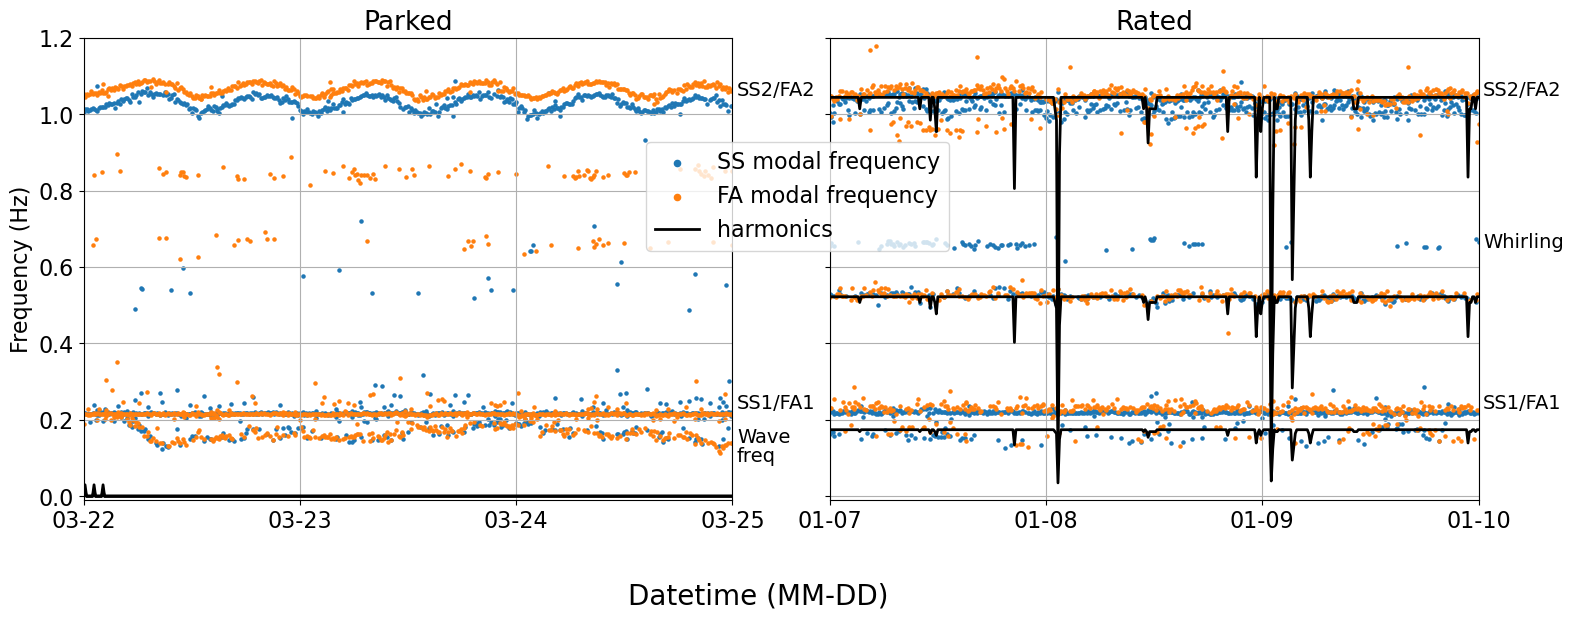

In [7]:
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

def figure_harmonics(start1, end1, start2, end2):
    package_folder = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
    data_folder = os.path.join(package_folder, 'data')

    mpe_ss_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
    mpe_fa_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
    harmonics_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
    
    plt.rcParams.update({'font.size': 16})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6), sharey=True)

    # Plot for the first time period
    ax1.scatter(mpe_ss_data.loc[start1:end1].index, mpe_ss_data.loc[start1:end1]['mean_frequency'], s=5, alpha=1.0, color='tab:blue', label='SS modal frequency')
    ax1.scatter(mpe_fa_data.loc[start1:end1].index, mpe_fa_data.loc[start1:end1]['mean_frequency'], s=5, alpha=1.0, color='tab:orange', label='FA modal frequency')

    colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    for i, harmonic in enumerate(harmonics_data.columns[:3]):
        ax1.plot(harmonics_data.loc[start1:end1].index, harmonics_data.loc[start1:end1][harmonic], label=' '.join(harmonic.split('_')), alpha=1.0, linewidth=2.0, color='k')

    ax1.set_xlim(start1, end1)
    ax1.set_ylim(-0.01,1.2)
    #ax1.set_xlabel('Datetime (YYYY-MM-DD)')
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_title('Parked')
    ax1.grid()
    ax1.text(end1+datetime.timedelta(hours=0.5), 1.05, 'SS2/FA2', fontsize=14, rotation=0)
    ax1.text(end1+datetime.timedelta(hours=0.5), 0.23, 'SS1/FA1', fontsize=14, rotation=0)
    ax1.text(end1+datetime.timedelta(hours=0.5), 0.14, 'Wave', fontsize=14, rotation=0)
    ax1.text(end1+datetime.timedelta(hours=0.5), 0.09, 'freq', fontsize=14, rotation=0)


    # Plot for the second time period
    ax2.scatter(mpe_ss_data.loc[start2:end2].index, mpe_ss_data.loc[start2:end2]['mean_frequency'], s=5, alpha=1.0, color='tab:blue', label='SS modal frequency')
    ax2.scatter(mpe_fa_data.loc[start2:end2].index, mpe_fa_data.loc[start2:end2]['mean_frequency'], s=5, alpha=1.0, color='tab:orange', label='FA modal frequency')

    for i, harmonic in enumerate(harmonics_data.columns[:3]):
        ax2.plot(harmonics_data.loc[start2:end2].index, harmonics_data.loc[start2:end2][harmonic], label=' '.join(harmonic.split('_')), alpha=1.0, linewidth=2.0, color='k')

    ax2.set_xlim(start2, end2)
    
    legend = ax2.legend(['SS modal frequency', 'FA modal frequency', 'harmonics'], loc='upper left', bbox_to_anchor=(-0.3, 0.8), fontsize=16)
    for handles in legend.legend_handles[:2]:
        handles.set_sizes([20.0])
    ax2.grid()
    ax2.set_title('Rated')
    ax2.text(end2+datetime.timedelta(hours=0.5), 1.05, 'SS2/FA2', fontsize=14, rotation=0)
    ax2.text(end2+datetime.timedelta(hours=0.5), 0.65, 'Whirling', fontsize=14, rotation=0)
    ax2.text(end2+datetime.timedelta(hours=0.5), 0.23, 'SS1/FA1', fontsize=14, rotation=0)
    
    # Format x-axis ticks
    date_formatter = mdates.DateFormatter('%m-%d')
    ax1.xaxis.set_major_formatter(date_formatter)
    ax2.xaxis.set_major_formatter(date_formatter)
    # Adjust x-axis tick frequency
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(3))

    ax2.xaxis.set_major_locator(ticker.MaxNLocator(3))
    # #rotate xtixk labels
    # for tick in ax1.get_xticklabels():
    #     tick.set_rotation(20)
    # for tick in ax2.get_xticklabels():
    #     tick.set_rotation(20)

    # Set common xlabel for the figure
    fig.text(0.5, -0.05, 'Datetime (MM-DD)', ha='center', va='center', fontsize=20)
    plt.subplots_adjust(wspace=0.15)
    plt.show()

# Example usage
figure_harmonics(
    start1 = datetime.datetime(2023, 3, 22, tzinfo=datetime.timezone.utc),
    end1 = datetime.datetime(2023, 3, 25, tzinfo=datetime.timezone.utc),
    start2 = datetime.datetime(2023, 1, 7, tzinfo=datetime.timezone.utc),
    end2 = datetime.datetime(2023, 1, 10, tzinfo=datetime.timezone.utc),
)


In [47]:
package_folder = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
data_folder = os.path.join(package_folder, 'data')

tracked_modes = pd.read_parquet(os.path.join(data_folder, 'interim','nw2', 'tracked_modes', 'dbscan_based','nw2c02_FA1_mode.parquet'))
mpe_ss_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
mpe_fa_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
harmonics_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
turbine_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'turbine_data.parquet'))

In [48]:
start1 = datetime.datetime(2023, 3, 22, tzinfo=datetime.timezone.utc)
end1 = datetime.datetime(2023, 3, 25, tzinfo=datetime.timezone.utc)
start2 = datetime.datetime(2023, 1, 7, tzinfo=datetime.timezone.utc)
end2 = datetime.datetime(2023, 1, 10, tzinfo=datetime.timezone.utc)

In [49]:
tracked_modes

size algorithm  std_damping  mean_damping  \
timestamp                                                              
2022-10-01 01:20:00+00:00    26      lscf     0.519533      1.588847   
2022-10-01 01:40:00+00:00    38      lscf     0.345088      3.515617   
2022-10-01 02:00:00+00:00    18      lscf     0.213525      4.640316   
2022-10-01 04:10:00+00:00    28      lscf     0.268910      3.470049   
2022-10-01 05:10:00+00:00    39      lscf     0.628288      2.221110   
...                         ...       ...          ...           ...   
2023-12-31 12:30:00+00:00    21      lscf     0.355521      1.133796   
2023-12-31 13:00:00+00:00    17      lscf     0.320303      3.870007   
2023-12-31 14:40:00+00:00    15      lscf     0.264621      2.431246   
2023-12-31 15:40:00+00:00    16      lscf     0.372110      1.954139   
2023-12-31 19:40:00+00:00    23      lscf     0.326915      4.564938   

                           std_frequency  mean_frequency  labels  
timestamp                                                         
2022-10-01 01:20:00+00:00       0.001445        0.227478       7  
2022-10-01 01:40:00+00:00       0.002397        0.224049       7  
2022-10-01 02:00:00+00:00       0.000633        0.210656       7  
2022-10-01 04:10:00+00:00       0.000756        0.229479       7  
2022-10-01 05:10:00+00:00       0.001786        0.214758       7  
...                                  ...             ...     ...  
2023-12-31 12:30:00+00:00       0.000445        0.218872       7  
2023-12-31 13:00:00+00:00       0.000227        0.221119       7  
2023-12-31 14:40:00+00:00       0.001612        0.226286       7  
2023-12-31 15:40:00+00:00       0.003559        0.227818       7  
2023-12-31 19:40:00+00:00       0.001987        0.230504       7  

[27036 rows x 7 columns]

In [50]:
turbine_data.columns

Index(['location', 'mean_NW2_C02_rpm', 'mean_NW2_C02_yaw', 'std_NW2_C02_pitch',
       'mean_NW2_C02_pitch', 'mean_NW2_C02_power', 'std_NW2_C02_towerxacc',
       'std_NW2_C02_toweryacc', 'std_NW2_C02_windspeed',
       'mean_NW2_C02_towerxacc', 'mean_NW2_C02_toweryacc',
       'mean_NW2_C02_windspeed', 'mean_NW2_C02_winddirection',
       'mpe_NW2_C02_FA', 'mpe_NW2_C02_SS', 'mpe_NW2_C02_FA1',
       'mpe_NW2_C02_SS1', 'max_NW2_C02_NAC_ACC_Z', 'min_NW2_C02_NAC_ACC_Z',
       'rms_NW2_C02_NAC_ACC_Z', 'std_NW2_C02_NAC_ACC_Z',
       'max_NW2_C02_NAC_ACC_FA', 'max_NW2_C02_NAC_ACC_SS',
       'mean_NW2_C02_NAC_ACC_Z', 'min_NW2_C02_NAC_ACC_FA',
       'min_NW2_C02_NAC_ACC_SS', 'rms_NW2_C02_NAC_ACC_FA',
       'rms_NW2_C02_NAC_ACC_SS', 'std_NW2_C02_NAC_ACC_FA',
       'std_NW2_C02_NAC_ACC_SS', 'mean_NW2_C02_NAC_ACC_FA',
       'mean_NW2_C02_NAC_ACC_SS', 'rms1p_NW2_C02_NAC_ACC_Z',
       'rms1p_NW2_C02_NAC_ACC_FA', 'rms1p_NW2_C02_NAC_ACC_SS'],
      dtype='object')

<Axes: xlabel='wind_speed', ylabel='mean_frequency'>

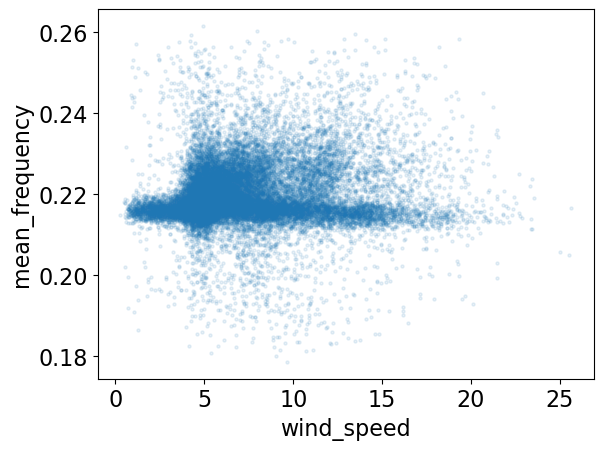

In [51]:
turbine_data
overlapping_indices = turbine_data.index.intersection(tracked_modes.index)
fa1_plot = tracked_modes.loc[overlapping_indices]
fa1_plot['wind_speed'] = turbine_data.loc[overlapping_indices]['mean_NW2_C02_windspeed']
fa1_plot.plot.scatter(x='wind_speed', y='mean_frequency', s=5, alpha=0.1, colorbar=False)

KeyError: "[Timestamp('2022-10-01 00:00:00+0000', tz='UTC'), Timestamp('2022-10-01 00:10:00+0000', tz='UTC'), Timestamp('2022-10-01 00:20:00+0000', tz='UTC'), Timestamp('2022-10-01 00:30:00+0000', tz='UTC'), Timestamp('2022-10-01 00:40:00+0000', tz='UTC'), Timestamp('2022-10-01 00:50:00+0000', tz='UTC'), Timestamp('2022-10-01 01:00:00+0000', tz='UTC'), Timestamp('2022-10-01 01:10:00+0000', tz='UTC'), Timestamp('2022-10-01 01:30:00+0000', tz='UTC'), Timestamp('2022-10-01 01:50:00+0000', tz='UTC'), Timestamp('2022-10-01 02:10:00+0000', tz='UTC'), Timestamp('2022-10-01 02:20:00+0000', tz='UTC'), Timestamp('2022-10-01 02:30:00+0000', tz='UTC'), Timestamp('2022-10-01 02:40:00+0000', tz='UTC'), Timestamp('2022-10-01 02:50:00+0000', tz='UTC'), Timestamp('2022-10-01 03:00:00+0000', tz='UTC'), Timestamp('2022-10-01 03:10:00+0000', tz='UTC'), Timestamp('2022-10-01 03:20:00+0000', tz='UTC'), Timestamp('2022-10-01 03:30:00+0000', tz='UTC'), Timestamp('2022-10-01 03:40:00+0000', tz='UTC'), Timestamp('2022-10-01 03:50:00+0000', tz='UTC'), Timestamp('2022-10-01 04:00:00+0000', tz='UTC'), Timestamp('2022-10-01 04:20:00+0000', tz='UTC'), Timestamp('2022-10-01 04:30:00+0000', tz='UTC'), Timestamp('2022-10-01 04:40:00+0000', tz='UTC'), Timestamp('2022-10-01 04:50:00+0000', tz='UTC'), Timestamp('2022-10-01 05:00:00+0000', tz='UTC'), Timestamp('2022-10-01 05:40:00+0000', tz='UTC'), Timestamp('2022-10-01 06:00:00+0000', tz='UTC'), Timestamp('2022-10-01 06:10:00+0000', tz='UTC'), Timestamp('2022-10-01 06:20:00+0000', tz='UTC'), Timestamp('2022-10-01 06:30:00+0000', tz='UTC'), Timestamp('2022-10-01 06:40:00+0000', tz='UTC'), Timestamp('2022-10-01 06:50:00+0000', tz='UTC'), Timestamp('2022-10-01 07:00:00+0000', tz='UTC'), Timestamp('2022-10-01 07:20:00+0000', tz='UTC'), Timestamp('2022-10-01 07:30:00+0000', tz='UTC'), Timestamp('2022-10-01 07:40:00+0000', tz='UTC'), Timestamp('2022-10-01 07:50:00+0000', tz='UTC'), Timestamp('2022-10-01 08:00:00+0000', tz='UTC'), Timestamp('2022-10-01 08:10:00+0000', tz='UTC'), Timestamp('2022-10-01 08:20:00+0000', tz='UTC'), Timestamp('2022-10-01 08:30:00+0000', tz='UTC'), Timestamp('2022-10-01 08:40:00+0000', tz='UTC'), Timestamp('2022-10-01 08:50:00+0000', tz='UTC'), Timestamp('2022-10-01 09:00:00+0000', tz='UTC'), Timestamp('2022-10-01 09:10:00+0000', tz='UTC'), Timestamp('2022-10-01 09:20:00+0000', tz='UTC'), Timestamp('2022-10-01 09:30:00+0000', tz='UTC'), Timestamp('2022-10-01 09:40:00+0000', tz='UTC'), Timestamp('2022-10-01 09:50:00+0000', tz='UTC'), Timestamp('2022-10-01 10:00:00+0000', tz='UTC'), Timestamp('2022-10-01 10:10:00+0000', tz='UTC'), Timestamp('2022-10-01 10:20:00+0000', tz='UTC'), Timestamp('2022-10-01 10:30:00+0000', tz='UTC'), Timestamp('2022-10-01 10:40:00+0000', tz='UTC'), Timestamp('2022-10-01 10:50:00+0000', tz='UTC'), Timestamp('2022-10-01 11:10:00+0000', tz='UTC'), Timestamp('2022-10-01 11:20:00+0000', tz='UTC'), Timestamp('2022-10-01 11:30:00+0000', tz='UTC'), Timestamp('2022-10-01 11:40:00+0000', tz='UTC'), Timestamp('2022-10-01 11:50:00+0000', tz='UTC'), Timestamp('2022-10-01 12:00:00+0000', tz='UTC'), Timestamp('2022-10-01 12:10:00+0000', tz='UTC'), Timestamp('2022-10-01 12:30:00+0000', tz='UTC'), Timestamp('2022-10-01 12:50:00+0000', tz='UTC'), Timestamp('2022-10-01 13:00:00+0000', tz='UTC'), Timestamp('2022-10-01 13:30:00+0000', tz='UTC'), Timestamp('2022-10-01 13:40:00+0000', tz='UTC'), Timestamp('2022-10-01 13:50:00+0000', tz='UTC'), Timestamp('2022-10-01 14:00:00+0000', tz='UTC'), Timestamp('2022-10-01 14:20:00+0000', tz='UTC'), Timestamp('2022-10-01 14:30:00+0000', tz='UTC'), Timestamp('2022-10-01 14:40:00+0000', tz='UTC'), Timestamp('2022-10-01 14:50:00+0000', tz='UTC'), Timestamp('2022-10-01 15:00:00+0000', tz='UTC'), Timestamp('2022-10-01 15:10:00+0000', tz='UTC'), Timestamp('2022-10-01 15:20:00+0000', tz='UTC'), Timestamp('2022-10-01 15:30:00+0000', tz='UTC'), Timestamp('2022-10-01 15:40:00+0000', tz='UTC'), Timestamp('2022-10-01 15:50:00+0000', tz='UTC'), Timestamp('2022-10-01 16:00:00+0000', tz='UTC'), Timestamp('2022-10-01 16:10:00+0000', tz='UTC'), Timestamp('2022-10-01 16:20:00+0000', tz='UTC'), Timestamp('2022-10-01 16:30:00+0000', tz='UTC'), Timestamp('2022-10-01 16:50:00+0000', tz='UTC'), Timestamp('2022-10-01 17:00:00+0000', tz='UTC'), Timestamp('2022-10-01 17:10:00+0000', tz='UTC'), Timestamp('2022-10-01 17:20:00+0000', tz='UTC'), Timestamp('2022-10-01 17:30:00+0000', tz='UTC'), Timestamp('2022-10-01 17:40:00+0000', tz='UTC'), Timestamp('2022-10-01 17:50:00+0000', tz='UTC'), Timestamp('2022-10-01 18:00:00+0000', tz='UTC'), Timestamp('2022-10-01 18:10:00+0000', tz='UTC'), Timestamp('2022-10-01 18:20:00+0000', tz='UTC'), Timestamp('2022-10-01 18:30:00+0000', tz='UTC'), Timestamp('2022-10-01 18:40:00+0000', tz='UTC'), Timestamp('2022-10-01 18:50:00+0000', tz='UTC'), Timestamp('2022-10-01 19:00:00+0000', tz='UTC'), Timestamp('2022-10-01 19:10:00+0000', tz='UTC'), Timestamp('2022-10-01 19:20:00+0000', tz='UTC'), Timestamp('2022-10-01 19:30:00+0000', tz='UTC'), Timestamp('2022-10-01 19:40:00+0000', tz='UTC'), Timestamp('2022-10-01 19:50:00+0000', tz='UTC'), Timestamp('2022-10-01 20:00:00+0000', tz='UTC'), Timestamp('2022-10-01 20:10:00+0000', tz='UTC'), Timestamp('2022-10-01 20:20:00+0000', tz='UTC'), Timestamp('2022-10-01 20:30:00+0000', tz='UTC'), Timestamp('2022-10-01 20:40:00+0000', tz='UTC'), Timestamp('2022-10-01 20:50:00+0000', tz='UTC'), Timestamp('2022-10-01 21:00:00+0000', tz='UTC'), Timestamp('2022-10-01 21:10:00+0000', tz='UTC'), Timestamp('2022-10-01 21:20:00+0000', tz='UTC'), Timestamp('2022-10-01 21:30:00+0000', tz='UTC'), Timestamp('2022-10-01 21:40:00+0000', tz='UTC'), Timestamp('2022-10-01 21:50:00+0000', tz='UTC'), Timestamp('2022-10-01 22:00:00+0000', tz='UTC'), Timestamp('2022-10-01 22:10:00+0000', tz='UTC'), Timestamp('2022-10-01 22:20:00+0000', tz='UTC'), Timestamp('2022-10-01 22:30:00+0000', tz='UTC'), Timestamp('2022-10-01 22:40:00+0000', tz='UTC'), Timestamp('2022-10-01 22:50:00+0000', tz='UTC'), Timestamp('2022-10-01 23:00:00+0000', tz='UTC'), Timestamp('2022-10-01 23:10:00+0000', tz='UTC'), Timestamp('2022-10-01 23:20:00+0000', tz='UTC'), Timestamp('2022-10-01 23:40:00+0000', tz='UTC'), Timestamp('2022-10-01 23:50:00+0000', tz='UTC'), Timestamp('2022-10-02 00:10:00+0000', tz='UTC'), Timestamp('2022-10-02 00:20:00+0000', tz='UTC'), Timestamp('2022-10-02 00:40:00+0000', tz='UTC'), Timestamp('2022-10-02 00:50:00+0000', tz='UTC'), Timestamp('2022-10-02 01:50:00+0000', tz='UTC'), Timestamp('2022-10-02 02:00:00+0000', tz='UTC'), Timestamp('2022-10-02 02:10:00+0000', tz='UTC'), Timestamp('2022-10-02 02:20:00+0000', tz='UTC'), Timestamp('2022-10-02 02:30:00+0000', tz='UTC'), Timestamp('2022-10-02 03:10:00+0000', tz='UTC'), Timestamp('2022-10-02 03:40:00+0000', tz='UTC'), Timestamp('2022-10-02 04:50:00+0000', tz='UTC'), Timestamp('2022-10-02 05:00:00+0000', tz='UTC'), Timestamp('2022-10-02 05:10:00+0000', tz='UTC'), Timestamp('2022-10-02 05:20:00+0000', tz='UTC'), Timestamp('2022-10-02 05:30:00+0000', tz='UTC'), Timestamp('2022-10-02 05:40:00+0000', tz='UTC'), Timestamp('2022-10-02 05:50:00+0000', tz='UTC'), Timestamp('2022-10-02 06:00:00+0000', tz='UTC'), Timestamp('2022-10-02 06:10:00+0000', tz='UTC'), Timestamp('2022-10-02 06:20:00+0000', tz='UTC'), Timestamp('2022-10-02 06:30:00+0000', tz='UTC'), Timestamp('2022-10-02 06:40:00+0000', tz='UTC'), Timestamp('2022-10-02 07:00:00+0000', tz='UTC'), Timestamp('2022-10-02 07:50:00+0000', tz='UTC'), Timestamp('2022-10-02 08:00:00+0000', tz='UTC'), Timestamp('2022-10-02 08:10:00+0000', tz='UTC'), Timestamp('2022-10-02 08:20:00+0000', tz='UTC'), Timestamp('2022-10-02 08:30:00+0000', tz='UTC'), Timestamp('2022-10-02 09:10:00+0000', tz='UTC'), Timestamp('2022-10-02 09:40:00+0000', tz='UTC'), Timestamp('2022-10-02 09:50:00+0000', tz='UTC'), Timestamp('2022-10-02 10:00:00+0000', tz='UTC'), Timestamp('2022-10-02 10:30:00+0000', tz='UTC'), Timestamp('2022-10-02 10:40:00+0000', tz='UTC'), Timestamp('2022-10-02 10:50:00+0000', tz='UTC'), Timestamp('2022-10-02 11:00:00+0000', tz='UTC'), Timestamp('2022-10-02 11:10:00+0000', tz='UTC'), Timestamp('2022-10-02 11:40:00+0000', tz='UTC'), Timestamp('2022-10-02 11:50:00+0000', tz='UTC'), Timestamp('2022-10-02 12:20:00+0000', tz='UTC'), Timestamp('2022-10-02 12:30:00+0000', tz='UTC'), Timestamp('2022-10-02 12:40:00+0000', tz='UTC'), Timestamp('2022-10-02 12:50:00+0000', tz='UTC'), Timestamp('2022-10-02 13:20:00+0000', tz='UTC'), Timestamp('2022-10-02 16:00:00+0000', tz='UTC'), Timestamp('2022-10-02 16:10:00+0000', tz='UTC'), Timestamp('2022-10-02 16:20:00+0000', tz='UTC'), Timestamp('2022-10-02 16:30:00+0000', tz='UTC'), Timestamp('2022-10-02 17:00:00+0000', tz='UTC'), Timestamp('2022-10-02 17:10:00+0000', tz='UTC'), Timestamp('2022-10-02 17:40:00+0000', tz='UTC'), Timestamp('2022-10-02 18:20:00+0000', tz='UTC'), Timestamp('2022-10-02 19:10:00+0000', tz='UTC'), Timestamp('2022-10-02 21:20:00+0000', tz='UTC'), Timestamp('2022-10-02 23:20:00+0000', tz='UTC'), Timestamp('2022-10-03 02:00:00+0000', tz='UTC'), Timestamp('2022-10-03 03:30:00+0000', tz='UTC'), Timestamp('2022-10-03 05:00:00+0000', tz='UTC'), Timestamp('2022-10-03 07:00:00+0000', tz='UTC'), Timestamp('2022-10-03 10:10:00+0000', tz='UTC'), Timestamp('2022-10-03 10:20:00+0000', tz='UTC'), Timestamp('2022-10-03 10:40:00+0000', tz='UTC'), Timestamp('2022-10-03 10:50:00+0000', tz='UTC'), Timestamp('2022-10-03 11:00:00+0000', tz='UTC'), Timestamp('2022-10-03 11:10:00+0000', tz='UTC'), Timestamp('2022-10-03 11:20:00+0000', tz='UTC'), Timestamp('2022-10-03 11:30:00+0000', tz='UTC'), Timestamp('2022-10-03 11:40:00+0000', tz='UTC'), Timestamp('2022-10-03 11:50:00+0000', tz='UTC'), Timestamp('2022-10-03 12:00:00+0000', tz='UTC'), Timestamp('2022-10-03 12:10:00+0000', tz='UTC'), Timestamp('2022-10-03 12:20:00+0000', tz='UTC'), Timestamp('2022-10-03 12:40:00+0000', tz='UTC'), Timestamp('2022-10-03 12:50:00+0000', tz='UTC'), Timestamp('2022-10-03 13:00:00+0000', tz='UTC'), Timestamp('2022-10-03 13:30:00+0000', tz='UTC'), Timestamp('2022-10-03 13:50:00+0000', tz='UTC'), Timestamp('2022-10-03 14:10:00+0000', tz='UTC'), Timestamp('2022-10-03 14:20:00+0000', tz='UTC'), Timestamp('2022-10-03 14:30:00+0000', tz='UTC'), Timestamp('2022-10-03 14:40:00+0000', tz='UTC'), Timestamp('2022-10-03 14:50:00+0000', tz='UTC'), Timestamp('2022-10-03 15:00:00+0000', tz='UTC'), Timestamp('2022-10-03 15:10:00+0000', tz='UTC'), Timestamp('2022-10-03 15:20:00+0000', tz='UTC'), Timestamp('2022-10-03 15:30:00+0000', tz='UTC'), Timestamp('2022-10-03 15:40:00+0000', tz='UTC'), Timestamp('2022-10-03 15:50:00+0000', tz='UTC'), Timestamp('2022-10-03 16:00:00+0000', tz='UTC'), Timestamp('2022-10-03 16:10:00+0000', tz='UTC'), Timestamp('2022-10-03 16:30:00+0000', tz='UTC'), Timestamp('2022-10-03 17:00:00+0000', tz='UTC'), Timestamp('2022-10-03 17:20:00+0000', tz='UTC'), Timestamp('2022-10-03 17:30:00+0000', tz='UTC'), Timestamp('2022-10-03 18:20:00+0000', tz='UTC'), Timestamp('2022-10-03 18:30:00+0000', tz='UTC'), Timestamp('2022-10-03 18:40:00+0000', tz='UTC'), Timestamp('2022-10-03 19:00:00+0000', tz='UTC'), Timestamp('2022-10-03 19:10:00+0000', tz='UTC'), Timestamp('2022-10-03 19:30:00+0000', tz='UTC'), Timestamp('2022-10-03 19:40:00+0000', tz='UTC'), Timestamp('2022-10-03 19:50:00+0000', tz='UTC'), Timestamp('2022-10-03 20:00:00+0000', tz='UTC'), Timestamp('2022-10-03 20:10:00+0000', tz='UTC'), Timestamp('2022-10-03 20:30:00+0000', tz='UTC'), Timestamp('2022-10-03 20:40:00+0000', tz='UTC'), Timestamp('2022-10-03 21:10:00+0000', tz='UTC'), Timestamp('2022-10-03 21:20:00+0000', tz='UTC'), Timestamp('2022-10-03 21:30:00+0000', tz='UTC'), Timestamp('2022-10-03 21:40:00+0000', tz='UTC'), Timestamp('2022-10-03 21:50:00+0000', tz='UTC'), Timestamp('2022-10-03 22:00:00+0000', tz='UTC'), Timestamp('2022-10-03 22:10:00+0000', tz='UTC'), Timestamp('2022-10-03 22:20:00+0000', tz='UTC'), Timestamp('2022-10-03 22:30:00+0000', tz='UTC'), Timestamp('2022-10-03 22:40:00+0000', tz='UTC'), Timestamp('2022-10-03 22:50:00+0000', tz='UTC'), Timestamp('2022-10-03 23:10:00+0000', tz='UTC'), Timestamp('2022-10-03 23:30:00+0000', tz='UTC'), Timestamp('2022-10-03 23:40:00+0000', tz='UTC'), Timestamp('2022-10-04 00:00:00+0000', tz='UTC'), Timestamp('2022-10-04 01:00:00+0000', tz='UTC'), Timestamp('2022-10-04 01:50:00+0000', tz='UTC'), Timestamp('2022-10-04 02:30:00+0000', tz='UTC'), Timestamp('2022-10-04 03:30:00+0000', tz='UTC'), Timestamp('2022-10-04 03:50:00+0000', tz='UTC'), Timestamp('2022-10-04 04:00:00+0000', tz='UTC'), Timestamp('2022-10-04 04:30:00+0000', tz='UTC'), Timestamp('2022-10-04 05:00:00+0000', tz='UTC'), Timestamp('2022-10-04 05:30:00+0000', tz='UTC'), Timestamp('2022-10-04 05:40:00+0000', tz='UTC'), Timestamp('2022-10-04 05:50:00+0000', tz='UTC'), Timestamp('2022-10-04 06:00:00+0000', tz='UTC'), Timestamp('2022-10-04 06:10:00+0000', tz='UTC'), Timestamp('2022-10-04 06:20:00+0000', tz='UTC'), Timestamp('2022-10-04 06:30:00+0000', tz='UTC'), Timestamp('2022-10-04 06:50:00+0000', tz='UTC'), Timestamp('2022-10-04 07:10:00+0000', tz='UTC'), Timestamp('2022-10-04 07:20:00+0000', tz='UTC'), Timestamp('2022-10-04 07:50:00+0000', tz='UTC'), Timestamp('2022-10-04 08:00:00+0000', tz='UTC'), Timestamp('2022-10-04 08:10:00+0000', tz='UTC'), Timestamp('2022-10-04 08:20:00+0000', tz='UTC'), Timestamp('2022-10-04 08:30:00+0000', tz='UTC'), Timestamp('2022-10-04 08:40:00+0000', tz='UTC'), Timestamp('2022-10-04 08:50:00+0000', tz='UTC'), Timestamp('2022-10-04 09:00:00+0000', tz='UTC'), Timestamp('2022-10-04 09:10:00+0000', tz='UTC'), Timestamp('2022-10-04 09:20:00+0000', tz='UTC'), Timestamp('2022-10-04 09:30:00+0000', tz='UTC'), Timestamp('2022-10-04 09:40:00+0000', tz='UTC'), Timestamp('2022-10-04 09:50:00+0000', tz='UTC'), Timestamp('2022-10-04 10:10:00+0000', tz='UTC'), Timestamp('2022-10-04 10:20:00+0000', tz='UTC'), Timestamp('2022-10-04 10:30:00+0000', tz='UTC'), Timestamp('2022-10-04 11:00:00+0000', tz='UTC'), Timestamp('2022-10-04 11:10:00+0000', tz='UTC'), Timestamp('2022-10-04 11:30:00+0000', tz='UTC'), Timestamp('2022-10-04 11:40:00+0000', tz='UTC'), Timestamp('2022-10-04 11:50:00+0000', tz='UTC'), Timestamp('2022-10-04 12:00:00+0000', tz='UTC'), Timestamp('2022-10-04 12:10:00+0000', tz='UTC'), Timestamp('2022-10-04 12:20:00+0000', tz='UTC'), Timestamp('2022-10-04 12:40:00+0000', tz='UTC'), Timestamp('2022-10-04 12:50:00+0000', tz='UTC'), Timestamp('2022-10-04 13:00:00+0000', tz='UTC'), Timestamp('2022-10-04 13:10:00+0000', tz='UTC'), Timestamp('2022-10-04 13:20:00+0000', tz='UTC'), Timestamp('2022-10-04 13:30:00+0000', tz='UTC'), Timestamp('2022-10-04 13:40:00+0000', tz='UTC'), Timestamp('2022-10-04 13:50:00+0000', tz='UTC'), Timestamp('2022-10-04 14:10:00+0000', tz='UTC'), Timestamp('2022-10-04 14:20:00+0000', tz='UTC'), Timestamp('2022-10-04 14:30:00+0000', tz='UTC'), Timestamp('2022-10-04 14:40:00+0000', tz='UTC'), Timestamp('2022-10-04 14:50:00+0000', tz='UTC'), Timestamp('2022-10-04 15:00:00+0000', tz='UTC'), Timestamp('2022-10-04 15:10:00+0000', tz='UTC'), Timestamp('2022-10-04 15:20:00+0000', tz='UTC'), Timestamp('2022-10-04 15:30:00+0000', tz='UTC'), Timestamp('2022-10-04 15:40:00+0000', tz='UTC'), Timestamp('2022-10-04 15:50:00+0000', tz='UTC'), Timestamp('2022-10-04 16:00:00+0000', tz='UTC'), Timestamp('2022-10-04 16:20:00+0000', tz='UTC'), Timestamp('2022-10-04 16:30:00+0000', tz='UTC'), Timestamp('2022-10-04 16:40:00+0000', tz='UTC'), Timestamp('2022-10-04 16:50:00+0000', tz='UTC'), Timestamp('2022-10-04 17:00:00+0000', tz='UTC'), Timestamp('2022-10-04 17:20:00+0000', tz='UTC'), Timestamp('2022-10-04 17:30:00+0000', tz='UTC'), Timestamp('2022-10-04 17:40:00+0000', tz='UTC'), Timestamp('2022-10-04 17:50:00+0000', tz='UTC'), Timestamp('2022-10-04 18:00:00+0000', tz='UTC'), Timestamp('2022-10-04 18:10:00+0000', tz='UTC'), Timestamp('2022-10-04 18:30:00+0000', tz='UTC'), Timestamp('2022-10-04 18:40:00+0000', tz='UTC'), Timestamp('2022-10-04 18:50:00+0000', tz='UTC'), Timestamp('2022-10-04 19:00:00+0000', tz='UTC'), Timestamp('2022-10-04 19:10:00+0000', tz='UTC'), Timestamp('2022-10-04 19:20:00+0000', tz='UTC'), Timestamp('2022-10-04 19:30:00+0000', tz='UTC'), Timestamp('2022-10-04 19:40:00+0000', tz='UTC'), Timestamp('2022-10-04 19:50:00+0000', tz='UTC'), Timestamp('2022-10-04 20:00:00+0000', tz='UTC'), Timestamp('2022-10-04 20:10:00+0000', tz='UTC'), Timestamp('2022-10-04 20:40:00+0000', tz='UTC'), Timestamp('2022-10-04 21:00:00+0000', tz='UTC'), Timestamp('2022-10-04 21:10:00+0000', tz='UTC'), Timestamp('2022-10-04 21:20:00+0000', tz='UTC'), Timestamp('2022-10-04 21:30:00+0000', tz='UTC'), Timestamp('2022-10-04 21:40:00+0000', tz='UTC'), Timestamp('2022-10-04 21:50:00+0000', tz='UTC'), Timestamp('2022-10-04 22:00:00+0000', tz='UTC'), Timestamp('2022-10-04 22:10:00+0000', tz='UTC'), Timestamp('2022-10-04 22:20:00+0000', tz='UTC'), Timestamp('2022-10-04 22:30:00+0000', tz='UTC'), Timestamp('2022-10-04 22:40:00+0000', tz='UTC'), Timestamp('2022-10-04 22:50:00+0000', tz='UTC'), Timestamp('2022-10-04 23:00:00+0000', tz='UTC'), Timestamp('2022-10-04 23:10:00+0000', tz='UTC'), Timestamp('2022-10-04 23:20:00+0000', tz='UTC'), Timestamp('2022-10-04 23:40:00+0000', tz='UTC'), Timestamp('2022-10-04 23:50:00+0000', tz='UTC'), Timestamp('2022-10-05 00:00:00+0000', tz='UTC'), Timestamp('2022-10-05 00:20:00+0000', tz='UTC'), Timestamp('2022-10-05 00:30:00+0000', tz='UTC'), Timestamp('2022-10-05 00:40:00+0000', tz='UTC'), Timestamp('2022-10-05 00:50:00+0000', tz='UTC'), Timestamp('2022-10-05 01:00:00+0000', tz='UTC'), Timestamp('2022-10-05 01:10:00+0000', tz='UTC'), Timestamp('2022-10-05 01:20:00+0000', tz='UTC'), Timestamp('2022-10-05 01:30:00+0000', tz='UTC'), Timestamp('2022-10-05 01:40:00+0000', tz='UTC'), Timestamp('2022-10-05 01:50:00+0000', tz='UTC'), Timestamp('2022-10-05 02:00:00+0000', tz='UTC'), Timestamp('2022-10-05 02:10:00+0000', tz='UTC'), Timestamp('2022-10-05 02:20:00+0000', tz='UTC'), Timestamp('2022-10-05 02:30:00+0000', tz='UTC'), Timestamp('2022-10-05 02:40:00+0000', tz='UTC'), Timestamp('2022-10-05 02:50:00+0000', tz='UTC'), Timestamp('2022-10-05 03:10:00+0000', tz='UTC'), Timestamp('2022-10-05 03:20:00+0000', tz='UTC'), Timestamp('2022-10-05 03:30:00+0000', tz='UTC'), Timestamp('2022-10-05 03:40:00+0000', tz='UTC'), Timestamp('2022-10-05 03:50:00+0000', tz='UTC'), Timestamp('2022-10-05 04:00:00+0000', tz='UTC'), Timestamp('2022-10-05 04:20:00+0000', tz='UTC'), Timestamp('2022-10-05 04:30:00+0000', tz='UTC'), Timestamp('2022-10-05 04:40:00+0000', tz='UTC'), Timestamp('2022-10-05 04:50:00+0000', tz='UTC'), Timestamp('2022-10-05 05:00:00+0000', tz='UTC'), Timestamp('2022-10-05 05:10:00+0000', tz='UTC'), Timestamp('2022-10-05 05:30:00+0000', tz='UTC'), Timestamp('2022-10-05 05:40:00+0000', tz='UTC'), Timestamp('2022-10-05 05:50:00+0000', tz='UTC'), Timestamp('2022-10-05 06:00:00+0000', tz='UTC'), Timestamp('2022-10-05 06:10:00+0000', tz='UTC'), Timestamp('2022-10-05 06:30:00+0000', tz='UTC'), Timestamp('2022-10-05 06:40:00+0000', tz='UTC'), Timestamp('2022-10-05 06:50:00+0000', tz='UTC'), Timestamp('2022-10-05 07:00:00+0000', tz='UTC'), Timestamp('2022-10-05 07:10:00+0000', tz='UTC'), Timestamp('2022-10-05 07:20:00+0000', tz='UTC'), Timestamp('2022-10-05 07:30:00+0000', tz='UTC'), Timestamp('2022-10-05 07:40:00+0000', tz='UTC'), Timestamp('2022-10-05 07:50:00+0000', tz='UTC'), Timestamp('2022-10-05 08:00:00+0000', tz='UTC'), Timestamp('2022-10-05 08:10:00+0000', tz='UTC'), Timestamp('2022-10-05 08:20:00+0000', tz='UTC'), Timestamp('2022-10-05 08:30:00+0000', tz='UTC'), Timestamp('2022-10-05 08:40:00+0000', tz='UTC'), Timestamp('2022-10-05 08:50:00+0000', tz='UTC'), Timestamp('2022-10-05 09:00:00+0000', tz='UTC'), Timestamp('2022-10-05 09:10:00+0000', tz='UTC'), Timestamp('2022-10-05 09:20:00+0000', tz='UTC'), Timestamp('2022-10-05 09:30:00+0000', tz='UTC'), Timestamp('2022-10-05 09:40:00+0000', tz='UTC'), Timestamp('2022-10-05 09:50:00+0000', tz='UTC'), Timestamp('2022-10-05 10:10:00+0000', tz='UTC'), Timestamp('2022-10-05 10:20:00+0000', tz='UTC'), Timestamp('2022-10-05 10:30:00+0000', tz='UTC'), Timestamp('2022-10-05 10:40:00+0000', tz='UTC'), Timestamp('2022-10-05 11:00:00+0000', tz='UTC'), Timestamp('2022-10-05 11:10:00+0000', tz='UTC'), Timestamp('2022-10-05 11:20:00+0000', tz='UTC'), Timestamp('2022-10-05 11:30:00+0000', tz='UTC'), Timestamp('2022-10-05 11:40:00+0000', tz='UTC'), Timestamp('2022-10-05 11:50:00+0000', tz='UTC'), Timestamp('2022-10-05 12:00:00+0000', tz='UTC'), Timestamp('2022-10-05 12:10:00+0000', tz='UTC'), Timestamp('2022-10-05 12:20:00+0000', tz='UTC'), Timestamp('2022-10-05 12:30:00+0000', tz='UTC'), Timestamp('2022-10-05 12:40:00+0000', tz='UTC'), Timestamp('2022-10-05 12:50:00+0000', tz='UTC'), Timestamp('2022-10-05 13:00:00+0000', tz='UTC'), Timestamp('2022-10-05 13:10:00+0000', tz='UTC'), Timestamp('2022-10-05 13:20:00+0000', tz='UTC'), Timestamp('2022-10-05 13:30:00+0000', tz='UTC'), Timestamp('2022-10-05 13:50:00+0000', tz='UTC'), Timestamp('2022-10-05 14:00:00+0000', tz='UTC'), Timestamp('2022-10-05 14:30:00+0000', tz='UTC'), Timestamp('2022-10-05 14:40:00+0000', tz='UTC'), Timestamp('2022-10-05 14:50:00+0000', tz='UTC'), Timestamp('2022-10-05 15:00:00+0000', tz='UTC'), Timestamp('2022-10-05 15:10:00+0000', tz='UTC'), Timestamp('2022-10-05 15:20:00+0000', tz='UTC'), Timestamp('2022-10-05 15:40:00+0000', tz='UTC'), Timestamp('2022-10-05 15:50:00+0000', tz='UTC'), Timestamp('2022-10-05 16:00:00+0000', tz='UTC'), Timestamp('2022-10-05 16:10:00+0000', tz='UTC'), Timestamp('2022-10-05 16:20:00+0000', tz='UTC'), Timestamp('2022-10-05 16:30:00+0000', tz='UTC'), Timestamp('2022-10-05 16:50:00+0000', tz='UTC'), Timestamp('2022-10-05 17:00:00+0000', tz='UTC'), Timestamp('2022-10-05 17:10:00+0000', tz='UTC'), Timestamp('2022-10-05 17:20:00+0000', tz='UTC'), Timestamp('2022-10-05 17:40:00+0000', tz='UTC'), Timestamp('2022-10-05 17:50:00+0000', tz='UTC'), Timestamp('2022-10-05 18:10:00+0000', tz='UTC'), Timestamp('2022-10-05 18:30:00+0000', tz='UTC'), Timestamp('2022-10-05 18:40:00+0000', tz='UTC'), Timestamp('2022-10-05 18:50:00+0000', tz='UTC'), Timestamp('2022-10-05 19:00:00+0000', tz='UTC'), Timestamp('2022-10-05 19:10:00+0000', tz='UTC'), Timestamp('2022-10-05 19:20:00+0000', tz='UTC'), Timestamp('2022-10-05 19:30:00+0000', tz='UTC'), Timestamp('2022-10-05 19:40:00+0000', tz='UTC'), Timestamp('2022-10-05 19:50:00+0000', tz='UTC'), Timestamp('2022-10-05 20:00:00+0000', tz='UTC'), Timestamp('2022-10-05 20:10:00+0000', tz='UTC'), Timestamp('2022-10-05 20:30:00+0000', tz='UTC'), Timestamp('2022-10-05 20:40:00+0000', tz='UTC'), Timestamp('2022-10-05 20:50:00+0000', tz='UTC'), Timestamp('2022-10-05 21:00:00+0000', tz='UTC'), Timestamp('2022-10-05 21:10:00+0000', tz='UTC'), Timestamp('2022-10-05 21:20:00+0000', tz='UTC'), Timestamp('2022-10-05 21:30:00+0000', tz='UTC'), Timestamp('2022-10-05 21:50:00+0000', tz='UTC'), Timestamp('2022-10-05 22:00:00+0000', tz='UTC'), Timestamp('2022-10-05 22:10:00+0000', tz='UTC'), Timestamp('2022-10-05 22:20:00+0000', tz='UTC'), Timestamp('2022-10-05 22:30:00+0000', tz='UTC'), Timestamp('2022-10-05 22:40:00+0000', tz='UTC'), Timestamp('2022-10-05 22:50:00+0000', tz='UTC'), Timestamp('2022-10-05 23:10:00+0000', tz='UTC'), Timestamp('2022-10-05 23:20:00+0000', tz='UTC'), Timestamp('2022-10-05 23:30:00+0000', tz='UTC'), Timestamp('2022-10-05 23:40:00+0000', tz='UTC'), Timestamp('2022-10-05 23:50:00+0000', tz='UTC'), Timestamp('2022-10-06 00:00:00+0000', tz='UTC'), Timestamp('2022-10-06 00:10:00+0000', tz='UTC'), Timestamp('2022-10-06 00:20:00+0000', tz='UTC'), Timestamp('2022-10-06 00:30:00+0000', tz='UTC'), Timestamp('2022-10-06 00:40:00+0000', tz='UTC'), Timestamp('2022-10-06 00:50:00+0000', tz='UTC'), Timestamp('2022-10-06 01:00:00+0000', tz='UTC'), Timestamp('2022-10-06 01:10:00+0000', tz='UTC'), Timestamp('2022-10-06 01:20:00+0000', tz='UTC'), Timestamp('2022-10-06 01:30:00+0000', tz='UTC'), Timestamp('2022-10-06 01:40:00+0000', tz='UTC'), Timestamp('2022-10-06 02:00:00+0000', tz='UTC'), Timestamp('2022-10-06 02:10:00+0000', tz='UTC'), Timestamp('2022-10-06 02:20:00+0000', tz='UTC'), Timestamp('2022-10-06 02:30:00+0000', tz='UTC'), Timestamp('2022-10-06 02:40:00+0000', tz='UTC'), Timestamp('2022-10-06 02:50:00+0000', tz='UTC'), Timestamp('2022-10-06 03:10:00+0000', tz='UTC'), Timestamp('2022-10-06 03:40:00+0000', tz='UTC'), Timestamp('2022-10-06 03:50:00+0000', tz='UTC'), Timestamp('2022-10-06 04:10:00+0000', tz='UTC'), Timestamp('2022-10-06 04:30:00+0000', tz='UTC'), Timestamp('2022-10-06 04:50:00+0000', tz='UTC'), Timestamp('2022-10-06 05:00:00+0000', tz='UTC'), Timestamp('2022-10-06 05:10:00+0000', tz='UTC'), Timestamp('2022-10-06 05:20:00+0000', tz='UTC'), Timestamp('2022-10-06 05:40:00+0000', tz='UTC'), Timestamp('2022-10-06 05:50:00+0000', tz='UTC'), Timestamp('2022-10-06 06:00:00+0000', tz='UTC'), Timestamp('2022-10-06 06:30:00+0000', tz='UTC'), Timestamp('2022-10-06 06:40:00+0000', tz='UTC'), Timestamp('2022-10-06 06:50:00+0000', tz='UTC'), Timestamp('2022-10-06 07:00:00+0000', tz='UTC'), Timestamp('2022-10-06 07:10:00+0000', tz='UTC'), Timestamp('2022-10-06 07:20:00+0000', tz='UTC'), Timestamp('2022-10-06 07:30:00+0000', tz='UTC'), Timestamp('2022-10-06 07:50:00+0000', tz='UTC'), Timestamp('2022-10-06 08:00:00+0000', tz='UTC'), Timestamp('2022-10-06 08:10:00+0000', tz='UTC'), Timestamp('2022-10-06 08:30:00+0000', tz='UTC'), Timestamp('2022-10-06 08:40:00+0000', tz='UTC'), Timestamp('2022-10-06 09:00:00+0000', tz='UTC'), Timestamp('2022-10-06 09:10:00+0000', tz='UTC'), Timestamp('2022-10-06 09:20:00+0000', tz='UTC'), Timestamp('2022-10-06 09:30:00+0000', tz='UTC'), Timestamp('2022-10-06 09:40:00+0000', tz='UTC'), Timestamp('2022-10-06 10:20:00+0000', tz='UTC'), Timestamp('2022-10-06 10:30:00+0000', tz='UTC'), Timestamp('2022-10-06 10:50:00+0000', tz='UTC'), Timestamp('2022-10-06 11:30:00+0000', tz='UTC'), Timestamp('2022-10-06 13:00:00+0000', tz='UTC'), Timestamp('2022-10-06 14:00:00+0000', tz='UTC'), Timestamp('2022-10-06 14:20:00+0000', tz='UTC'), Timestamp('2022-10-06 14:40:00+0000', tz='UTC'), Timestamp('2022-10-06 14:50:00+0000', tz='UTC'), Timestamp('2022-10-06 15:10:00+0000', tz='UTC'), Timestamp('2022-10-06 15:20:00+0000', tz='UTC'), Timestamp('2022-10-06 15:30:00+0000', tz='UTC'), Timestamp('2022-10-06 15:40:00+0000', tz='UTC'), Timestamp('2022-10-06 15:50:00+0000', tz='UTC'), Timestamp('2022-10-06 16:00:00+0000', tz='UTC'), Timestamp('2022-10-06 16:10:00+0000', tz='UTC'), Timestamp('2022-10-06 16:20:00+0000', tz='UTC'), Timestamp('2022-10-06 16:30:00+0000', tz='UTC'), Timestamp('2022-10-06 16:50:00+0000', tz='UTC'), Timestamp('2022-10-06 17:00:00+0000', tz='UTC'), Timestamp('2022-10-06 17:10:00+0000', tz='UTC'), Timestamp('2022-10-06 17:20:00+0000', tz='UTC'), Timestamp('2022-10-06 17:30:00+0000', tz='UTC'), Timestamp('2022-10-06 17:40:00+0000', tz='UTC'), Timestamp('2022-10-06 17:50:00+0000', tz='UTC'), Timestamp('2022-10-06 18:20:00+0000', tz='UTC'), Timestamp('2022-10-06 18:30:00+0000', tz='UTC'), Timestamp('2022-10-06 18:40:00+0000', tz='UTC'), Timestamp('2022-10-06 18:50:00+0000', tz='UTC'), Timestamp('2022-10-06 19:00:00+0000', tz='UTC'), Timestamp('2022-10-06 19:20:00+0000', tz='UTC'), Timestamp('2022-10-06 19:30:00+0000', tz='UTC'), Timestamp('2022-10-06 19:40:00+0000', tz='UTC'), Timestamp('2022-10-06 19:50:00+0000', tz='UTC'), Timestamp('2022-10-06 20:00:00+0000', tz='UTC'), Timestamp('2022-10-06 20:10:00+0000', tz='UTC'), Timestamp('2022-10-06 20:30:00+0000', tz='UTC'), Timestamp('2022-10-06 20:50:00+0000', tz='UTC'), Timestamp('2022-10-06 21:00:00+0000', tz='UTC'), Timestamp('2022-10-06 21:10:00+0000', tz='UTC'), Timestamp('2022-10-06 21:20:00+0000', tz='UTC'), Timestamp('2022-10-06 21:40:00+0000', tz='UTC'), Timestamp('2022-10-06 22:10:00+0000', tz='UTC'), Timestamp('2022-10-06 22:30:00+0000', tz='UTC'), Timestamp('2022-10-06 22:40:00+0000', tz='UTC'), Timestamp('2022-10-06 22:50:00+0000', tz='UTC'), Timestamp('2022-10-06 23:00:00+0000', tz='UTC'), Timestamp('2022-10-06 23:10:00+0000', tz='UTC'), Timestamp('2022-10-06 23:20:00+0000', tz='UTC'), Timestamp('2022-10-06 23:40:00+0000', tz='UTC'), Timestamp('2022-10-07 00:00:00+0000', tz='UTC'), Timestamp('2022-10-07 00:10:00+0000', tz='UTC'), Timestamp('2022-10-07 00:30:00+0000', tz='UTC'), Timestamp('2022-10-07 00:40:00+0000', tz='UTC'), Timestamp('2022-10-07 00:50:00+0000', tz='UTC'), Timestamp('2022-10-07 01:00:00+0000', tz='UTC'), Timestamp('2022-10-07 01:10:00+0000', tz='UTC'), Timestamp('2022-10-07 01:20:00+0000', tz='UTC'), Timestamp('2022-10-07 01:30:00+0000', tz='UTC'), Timestamp('2022-10-07 01:40:00+0000', tz='UTC'), Timestamp('2022-10-07 02:10:00+0000', tz='UTC'), Timestamp('2022-10-07 02:20:00+0000', tz='UTC'), Timestamp('2022-10-07 02:30:00+0000', tz='UTC'), Timestamp('2022-10-07 02:40:00+0000', tz='UTC'), Timestamp('2022-10-07 02:50:00+0000', tz='UTC'), Timestamp('2022-10-07 03:00:00+0000', tz='UTC'), Timestamp('2022-10-07 03:10:00+0000', tz='UTC'), Timestamp('2022-10-07 03:20:00+0000', tz='UTC'), Timestamp('2022-10-07 03:30:00+0000', tz='UTC'), Timestamp('2022-10-07 03:40:00+0000', tz='UTC'), Timestamp('2022-10-07 03:50:00+0000', tz='UTC'), Timestamp('2022-10-07 04:00:00+0000', tz='UTC'), Timestamp('2022-10-07 04:10:00+0000', tz='UTC'), Timestamp('2022-10-07 04:20:00+0000', tz='UTC'), Timestamp('2022-10-07 04:30:00+0000', tz='UTC'), Timestamp('2022-10-07 04:40:00+0000', tz='UTC'), Timestamp('2022-10-07 04:50:00+0000', tz='UTC'), Timestamp('2022-10-07 05:00:00+0000', tz='UTC'), Timestamp('2022-10-07 05:10:00+0000', tz='UTC'), Timestamp('2022-10-07 05:20:00+0000', tz='UTC'), Timestamp('2022-10-07 05:30:00+0000', tz='UTC'), Timestamp('2022-10-07 05:40:00+0000', tz='UTC'), Timestamp('2022-10-07 05:50:00+0000', tz='UTC'), Timestamp('2022-10-07 06:00:00+0000', tz='UTC'), Timestamp('2022-10-07 06:20:00+0000', tz='UTC'), Timestamp('2022-10-07 06:30:00+0000', tz='UTC'), Timestamp('2022-10-07 06:40:00+0000', tz='UTC'), Timestamp('2022-10-07 06:50:00+0000', tz='UTC'), Timestamp('2022-10-07 07:00:00+0000', tz='UTC'), Timestamp('2022-10-07 07:10:00+0000', tz='UTC'), Timestamp('2022-10-07 07:20:00+0000', tz='UTC'), Timestamp('2022-10-07 07:50:00+0000', tz='UTC'), Timestamp('2022-10-07 08:00:00+0000', tz='UTC'), Timestamp('2022-10-07 08:10:00+0000', tz='UTC'), Timestamp('2022-10-07 08:20:00+0000', tz='UTC'), Timestamp('2022-10-07 08:30:00+0000', tz='UTC'), Timestamp('2022-10-07 08:40:00+0000', tz='UTC'), Timestamp('2022-10-07 08:50:00+0000', tz='UTC'), Timestamp('2022-10-07 09:00:00+0000', tz='UTC'), Timestamp('2022-10-07 09:10:00+0000', tz='UTC'), Timestamp('2022-10-07 09:20:00+0000', tz='UTC'), Timestamp('2022-10-07 09:30:00+0000', tz='UTC'), Timestamp('2022-10-07 09:40:00+0000', tz='UTC'), Timestamp('2022-10-07 09:50:00+0000', tz='UTC'), Timestamp('2022-10-07 10:00:00+0000', tz='UTC'), Timestamp('2022-10-07 10:10:00+0000', tz='UTC'), Timestamp('2022-10-07 10:20:00+0000', tz='UTC'), Timestamp('2022-10-07 10:30:00+0000', tz='UTC'), Timestamp('2022-10-07 11:00:00+0000', tz='UTC'), Timestamp('2022-10-07 11:10:00+0000', tz='UTC'), Timestamp('2022-10-07 11:20:00+0000', tz='UTC'), Timestamp('2022-10-07 11:40:00+0000', tz='UTC'), Timestamp('2022-10-07 11:50:00+0000', tz='UTC'), Timestamp('2022-10-07 12:20:00+0000', tz='UTC'), Timestamp('2022-10-07 12:30:00+0000', tz='UTC'), Timestamp('2022-10-07 12:40:00+0000', tz='UTC'), Timestamp('2022-10-07 12:50:00+0000', tz='UTC'), Timestamp('2022-10-07 13:00:00+0000', tz='UTC'), Timestamp('2022-10-07 13:10:00+0000', tz='UTC'), Timestamp('2022-10-07 13:20:00+0000', tz='UTC'), Timestamp('2022-10-07 13:30:00+0000', tz='UTC'), Timestamp('2022-10-07 13:40:00+0000', tz='UTC'), Timestamp('2022-10-07 13:50:00+0000', tz='UTC'), Timestamp('2022-10-07 14:10:00+0000', tz='UTC'), Timestamp('2022-10-07 14:20:00+0000', tz='UTC'), Timestamp('2022-10-07 14:30:00+0000', tz='UTC'), Timestamp('2022-10-07 14:40:00+0000', tz='UTC'), Timestamp('2022-10-07 14:50:00+0000', tz='UTC'), Timestamp('2022-10-07 15:00:00+0000', tz='UTC'), Timestamp('2022-10-07 15:10:00+0000', tz='UTC'), Timestamp('2022-10-07 15:20:00+0000', tz='UTC'), Timestamp('2022-10-07 15:30:00+0000', tz='UTC'), Timestamp('2022-10-07 15:50:00+0000', tz='UTC'), Timestamp('2022-10-07 16:00:00+0000', tz='UTC'), Timestamp('2022-10-07 16:10:00+0000', tz='UTC'), Timestamp('2022-10-07 16:20:00+0000', tz='UTC'), Timestamp('2022-10-07 16:30:00+0000', tz='UTC'), Timestamp('2022-10-07 16:40:00+0000', tz='UTC'), Timestamp('2022-10-07 16:50:00+0000', tz='UTC'), Timestamp('2022-10-07 17:00:00+0000', tz='UTC'), Timestamp('2022-10-07 17:10:00+0000', tz='UTC'), Timestamp('2022-10-07 17:20:00+0000', tz='UTC'), Timestamp('2022-10-07 17:30:00+0000', tz='UTC'), Timestamp('2022-10-07 17:40:00+0000', tz='UTC'), Timestamp('2022-10-07 17:50:00+0000', tz='UTC'), Timestamp('2022-10-07 18:00:00+0000', tz='UTC'), Timestamp('2022-10-07 18:10:00+0000', tz='UTC'), Timestamp('2022-10-07 18:20:00+0000', tz='UTC'), Timestamp('2022-10-07 18:30:00+0000', tz='UTC'), Timestamp('2022-10-07 18:40:00+0000', tz='UTC'), Timestamp('2022-10-07 18:50:00+0000', tz='UTC'), Timestamp('2022-10-07 19:00:00+0000', tz='UTC'), Timestamp('2022-10-07 19:10:00+0000', tz='UTC'), Timestamp('2022-10-07 19:20:00+0000', tz='UTC'), Timestamp('2022-10-07 19:30:00+0000', tz='UTC'), Timestamp('2022-10-07 19:40:00+0000', tz='UTC'), Timestamp('2022-10-07 19:50:00+0000', tz='UTC'), Timestamp('2022-10-07 20:00:00+0000', tz='UTC'), Timestamp('2022-10-07 20:10:00+0000', tz='UTC'), Timestamp('2022-10-07 20:20:00+0000', tz='UTC'), Timestamp('2022-10-07 20:30:00+0000', tz='UTC'), Timestamp('2022-10-07 20:50:00+0000', tz='UTC'), Timestamp('2022-10-07 21:00:00+0000', tz='UTC'), Timestamp('2022-10-07 21:10:00+0000', tz='UTC'), Timestamp('2022-10-07 21:20:00+0000', tz='UTC'), Timestamp('2022-10-07 21:30:00+0000', tz='UTC'), Timestamp('2022-10-07 21:40:00+0000', tz='UTC'), Timestamp('2022-10-07 21:50:00+0000', tz='UTC'), Timestamp('2022-10-07 22:00:00+0000', tz='UTC'), Timestamp('2022-10-07 22:20:00+0000', tz='UTC'), Timestamp('2022-10-07 22:30:00+0000', tz='UTC'), Timestamp('2022-10-07 22:40:00+0000', tz='UTC'), Timestamp('2022-10-07 22:50:00+0000', tz='UTC'), Timestamp('2022-10-07 23:00:00+0000', tz='UTC'), Timestamp('2022-10-07 23:30:00+0000', tz='UTC'), Timestamp('2022-10-07 23:40:00+0000', tz='UTC'), Timestamp('2022-10-07 23:50:00+0000', tz='UTC'), Timestamp('2022-10-08 00:00:00+0000', tz='UTC'), Timestamp('2022-10-08 00:10:00+0000', tz='UTC'), Timestamp('2022-10-08 00:20:00+0000', tz='UTC'), Timestamp('2022-10-08 00:30:00+0000', tz='UTC'), Timestamp('2022-10-08 00:40:00+0000', tz='UTC'), Timestamp('2022-10-08 00:50:00+0000', tz='UTC'), Timestamp('2022-10-08 01:20:00+0000', tz='UTC'), Timestamp('2022-10-08 01:30:00+0000', tz='UTC'), Timestamp('2022-10-08 01:50:00+0000', tz='UTC'), Timestamp('2022-10-08 02:00:00+0000', tz='UTC'), Timestamp('2022-10-08 02:20:00+0000', tz='UTC'), Timestamp('2022-10-08 02:30:00+0000', tz='UTC'), Timestamp('2022-10-08 02:40:00+0000', tz='UTC'), Timestamp('2022-10-08 02:50:00+0000', tz='UTC'), Timestamp('2022-10-08 03:00:00+0000', tz='UTC'), Timestamp('2022-10-08 03:30:00+0000', tz='UTC'), Timestamp('2022-10-08 03:40:00+0000', tz='UTC'), Timestamp('2022-10-08 03:50:00+0000', tz='UTC'), Timestamp('2022-10-08 04:00:00+0000', tz='UTC'), Timestamp('2022-10-08 04:10:00+0000', tz='UTC'), Timestamp('2022-10-08 04:20:00+0000', tz='UTC'), Timestamp('2022-10-08 04:30:00+0000', tz='UTC'), Timestamp('2022-10-08 04:40:00+0000', tz='UTC'), Timestamp('2022-10-08 04:50:00+0000', tz='UTC'), Timestamp('2022-10-08 05:00:00+0000', tz='UTC'), Timestamp('2022-10-08 05:10:00+0000', tz='UTC'), Timestamp('2022-10-08 05:20:00+0000', tz='UTC'), Timestamp('2022-10-08 05:40:00+0000', tz='UTC'), Timestamp('2022-10-08 05:50:00+0000', tz='UTC'), Timestamp('2022-10-08 06:10:00+0000', tz='UTC'), Timestamp('2022-10-08 06:20:00+0000', tz='UTC'), Timestamp('2022-10-08 06:30:00+0000', tz='UTC'), Timestamp('2022-10-08 06:40:00+0000', tz='UTC'), Timestamp('2022-10-08 06:50:00+0000', tz='UTC'), Timestamp('2022-10-08 07:00:00+0000', tz='UTC'), Timestamp('2022-10-08 07:10:00+0000', tz='UTC'), Timestamp('2022-10-08 07:20:00+0000', tz='UTC'), Timestamp('2022-10-08 07:30:00+0000', tz='UTC'), Timestamp('2022-10-08 07:50:00+0000', tz='UTC'), Timestamp('2022-10-08 08:20:00+0000', tz='UTC'), Timestamp('2022-10-08 08:30:00+0000', tz='UTC'), Timestamp('2022-10-08 08:40:00+0000', tz='UTC'), Timestamp('2022-10-08 08:50:00+0000', tz='UTC'), Timestamp('2022-10-08 09:10:00+0000', tz='UTC'), Timestamp('2022-10-08 09:20:00+0000', tz='UTC'), Timestamp('2022-10-08 09:30:00+0000', tz='UTC'), Timestamp('2022-10-08 09:40:00+0000', tz='UTC'), Timestamp('2022-10-08 09:50:00+0000', tz='UTC'), Timestamp('2022-10-08 10:00:00+0000', tz='UTC'), Timestamp('2022-10-08 10:20:00+0000', tz='UTC'), Timestamp('2022-10-08 10:50:00+0000', tz='UTC'), Timestamp('2022-10-08 12:30:00+0000', tz='UTC'), Timestamp('2022-10-08 12:50:00+0000', tz='UTC'), Timestamp('2022-10-08 13:10:00+0000', tz='UTC'), Timestamp('2022-10-08 14:20:00+0000', tz='UTC'), Timestamp('2022-10-08 17:10:00+0000', tz='UTC'), Timestamp('2022-10-08 17:40:00+0000', tz='UTC'), Timestamp('2022-10-08 18:30:00+0000', tz='UTC'), Timestamp('2022-10-08 18:40:00+0000', tz='UTC'), Timestamp('2022-10-08 21:00:00+0000', tz='UTC'), Timestamp('2022-10-08 21:50:00+0000', tz='UTC'), Timestamp('2022-10-08 22:00:00+0000', tz='UTC'), Timestamp('2022-10-08 22:10:00+0000', tz='UTC'), Timestamp('2022-10-08 22:30:00+0000', tz='UTC'), Timestamp('2022-10-08 22:50:00+0000', tz='UTC'), Timestamp('2022-10-08 23:00:00+0000', tz='UTC'), Timestamp('2022-10-08 23:10:00+0000', tz='UTC'), Timestamp('2022-10-08 23:20:00+0000', tz='UTC'), Timestamp('2022-10-08 23:30:00+0000', tz='UTC'), Timestamp('2022-10-09 00:00:00+0000', tz='UTC'), Timestamp('2022-10-09 00:10:00+0000', tz='UTC'), Timestamp('2022-10-09 00:20:00+0000', tz='UTC'), Timestamp('2022-10-09 00:30:00+0000', tz='UTC'), Timestamp('2022-10-09 00:40:00+0000', tz='UTC'), Timestamp('2022-10-09 01:10:00+0000', tz='UTC'), Timestamp('2022-10-09 01:20:00+0000', tz='UTC'), Timestamp('2022-10-09 01:40:00+0000', tz='UTC'), Timestamp('2022-10-09 01:50:00+0000', tz='UTC'), Timestamp('2022-10-09 02:00:00+0000', tz='UTC'), Timestamp('2022-10-09 02:30:00+0000', tz='UTC'), Timestamp('2022-10-09 02:40:00+0000', tz='UTC'), Timestamp('2022-10-09 03:00:00+0000', tz='UTC'), Timestamp('2022-10-09 03:10:00+0000', tz='UTC'), Timestamp('2022-10-09 03:20:00+0000', tz='UTC'), Timestamp('2022-10-09 03:30:00+0000', tz='UTC'), Timestamp('2022-10-09 03:40:00+0000', tz='UTC'), Timestamp('2022-10-09 03:50:00+0000', tz='UTC'), Timestamp('2022-10-09 04:00:00+0000', tz='UTC'), Timestamp('2022-10-09 04:10:00+0000', tz='UTC'), Timestamp('2022-10-09 04:30:00+0000', tz='UTC'), Timestamp('2022-10-09 04:40:00+0000', tz='UTC'), Timestamp('2022-10-09 04:50:00+0000', tz='UTC'), Timestamp('2022-10-09 05:10:00+0000', tz='UTC'), Timestamp('2022-10-09 05:40:00+0000', tz='UTC'), Timestamp('2022-10-09 05:50:00+0000', tz='UTC'), Timestamp('2022-10-09 06:00:00+0000', tz='UTC'), Timestamp('2022-10-09 06:10:00+0000', tz='UTC'), Timestamp('2022-10-09 06:20:00+0000', tz='UTC'), Timestamp('2022-10-09 06:30:00+0000', tz='UTC'), Timestamp('2022-10-09 06:40:00+0000', tz='UTC'), Timestamp('2022-10-09 06:50:00+0000', tz='UTC'), Timestamp('2022-10-09 07:00:00+0000', tz='UTC'), Timestamp('2022-10-09 07:10:00+0000', tz='UTC'), Timestamp('2022-10-09 07:30:00+0000', tz='UTC'), Timestamp('2022-10-09 08:30:00+0000', tz='UTC'), Timestamp('2022-10-09 09:40:00+0000', tz='UTC'), Timestamp('2022-10-09 10:10:00+0000', tz='UTC'), Timestamp('2022-10-09 10:20:00+0000', tz='UTC'), Timestamp('2022-10-09 10:30:00+0000', tz='UTC'), Timestamp('2022-10-09 11:00:00+0000', tz='UTC'), Timestamp('2022-10-09 11:20:00+0000', tz='UTC'), Timestamp('2022-10-09 11:30:00+0000', tz='UTC'), Timestamp('2022-10-09 12:00:00+0000', tz='UTC'), Timestamp('2022-10-09 12:20:00+0000', tz='UTC'), Timestamp('2022-10-09 12:50:00+0000', tz='UTC'), Timestamp('2022-10-09 13:00:00+0000', tz='UTC'), Timestamp('2022-10-09 13:10:00+0000', tz='UTC'), Timestamp('2022-10-09 14:00:00+0000', tz='UTC'), Timestamp('2022-10-09 16:40:00+0000', tz='UTC'), Timestamp('2022-10-09 16:50:00+0000', tz='UTC'), Timestamp('2022-10-09 17:00:00+0000', tz='UTC'), Timestamp('2022-10-09 17:10:00+0000', tz='UTC'), Timestamp('2022-10-09 17:20:00+0000', tz='UTC'), Timestamp('2022-10-09 17:30:00+0000', tz='UTC'), Timestamp('2022-10-09 17:40:00+0000', tz='UTC'), Timestamp('2022-10-09 17:50:00+0000', tz='UTC'), Timestamp('2022-10-09 18:00:00+0000', tz='UTC'), Timestamp('2022-10-09 18:10:00+0000', tz='UTC'), Timestamp('2022-10-09 18:20:00+0000', tz='UTC'), Timestamp('2022-10-09 18:50:00+0000', tz='UTC'), Timestamp('2022-10-09 19:00:00+0000', tz='UTC'), Timestamp('2022-10-09 19:10:00+0000', tz='UTC'), Timestamp('2022-10-09 19:20:00+0000', tz='UTC'), Timestamp('2022-10-09 19:30:00+0000', tz='UTC'), Timestamp('2022-10-09 19:40:00+0000', tz='UTC'), Timestamp('2022-10-09 19:50:00+0000', tz='UTC'), Timestamp('2022-10-09 20:00:00+0000', tz='UTC'), Timestamp('2022-10-09 20:10:00+0000', tz='UTC'), Timestamp('2022-10-09 20:20:00+0000', tz='UTC'), Timestamp('2022-10-09 20:40:00+0000', tz='UTC'), Timestamp('2022-10-09 21:00:00+0000', tz='UTC'), Timestamp('2022-10-09 21:10:00+0000', tz='UTC'), Timestamp('2022-10-09 21:20:00+0000', tz='UTC'), Timestamp('2022-10-09 21:30:00+0000', tz='UTC'), Timestamp('2022-10-09 21:40:00+0000', tz='UTC'), Timestamp('2022-10-09 21:50:00+0000', tz='UTC'), Timestamp('2022-10-09 22:00:00+0000', tz='UTC'), Timestamp('2022-10-09 22:30:00+0000', tz='UTC'), Timestamp('2022-10-09 22:40:00+0000', tz='UTC'), Timestamp('2022-10-10 00:40:00+0000', tz='UTC'), Timestamp('2022-10-10 00:50:00+0000', tz='UTC'), Timestamp('2022-10-10 01:00:00+0000', tz='UTC'), Timestamp('2022-10-10 01:10:00+0000', tz='UTC'), Timestamp('2022-10-10 01:20:00+0000', tz='UTC'), Timestamp('2022-10-10 03:00:00+0000', tz='UTC'), Timestamp('2022-10-10 03:10:00+0000', tz='UTC'), Timestamp('2022-10-10 04:30:00+0000', tz='UTC'), Timestamp('2022-10-10 04:40:00+0000', tz='UTC'), Timestamp('2022-10-10 04:50:00+0000', tz='UTC'), Timestamp('2022-10-10 05:00:00+0000', tz='UTC'), Timestamp('2022-10-10 05:10:00+0000', tz='UTC'), Timestamp('2022-10-10 05:20:00+0000', tz='UTC'), Timestamp('2022-10-10 05:30:00+0000', tz='UTC'), Timestamp('2022-10-10 05:40:00+0000', tz='UTC'), Timestamp('2022-10-10 06:00:00+0000', tz='UTC'), Timestamp('2022-10-10 06:10:00+0000', tz='UTC'), Timestamp('2022-10-10 06:20:00+0000', tz='UTC'), Timestamp('2022-10-10 07:40:00+0000', tz='UTC'), Timestamp('2022-10-10 08:30:00+0000', tz='UTC'), Timestamp('2022-10-10 08:40:00+0000', tz='UTC'), Timestamp('2022-10-10 09:00:00+0000', tz='UTC'), Timestamp('2022-10-10 09:10:00+0000', tz='UTC'), Timestamp('2022-10-10 09:20:00+0000', tz='UTC'), Timestamp('2022-10-10 09:30:00+0000', tz='UTC'), Timestamp('2022-10-10 09:40:00+0000', tz='UTC'), Timestamp('2022-10-10 10:00:00+0000', tz='UTC'), Timestamp('2022-10-10 10:10:00+0000', tz='UTC'), Timestamp('2022-10-10 10:30:00+0000', tz='UTC'), Timestamp('2022-10-10 10:40:00+0000', tz='UTC'), Timestamp('2022-10-10 11:00:00+0000', tz='UTC'), Timestamp('2022-10-10 11:10:00+0000', tz='UTC'), Timestamp('2022-10-10 11:20:00+0000', tz='UTC'), Timestamp('2022-10-10 11:30:00+0000', tz='UTC'), Timestamp('2022-10-10 12:00:00+0000', tz='UTC'), Timestamp('2022-10-10 12:40:00+0000', tz='UTC'), Timestamp('2022-10-10 13:00:00+0000', tz='UTC'), Timestamp('2022-10-10 13:10:00+0000', tz='UTC'), Timestamp('2022-10-10 13:40:00+0000', tz='UTC'), Timestamp('2022-10-10 14:00:00+0000', tz='UTC'), Timestamp('2022-10-10 14:10:00+0000', tz='UTC'), Timestamp('2022-10-10 14:20:00+0000', tz='UTC'), Timestamp('2022-10-10 14:30:00+0000', tz='UTC'), Timestamp('2022-10-10 14:40:00+0000', tz='UTC'), Timestamp('2022-10-10 15:00:00+0000', tz='UTC'), Timestamp('2022-10-10 15:10:00+0000', tz='UTC'), Timestamp('2022-10-10 15:20:00+0000', tz='UTC'), Timestamp('2022-10-10 15:30:00+0000', tz='UTC'), Timestamp('2022-10-10 15:40:00+0000', tz='UTC'), Timestamp('2022-10-10 15:50:00+0000', tz='UTC'), Timestamp('2022-10-10 16:00:00+0000', tz='UTC'), Timestamp('2022-10-10 16:10:00+0000', tz='UTC'), Timestamp('2022-10-10 16:20:00+0000', tz='UTC'), Timestamp('2022-10-10 16:30:00+0000', tz='UTC'), Timestamp('2022-10-10 16:40:00+0000', tz='UTC'), Timestamp('2022-10-10 16:50:00+0000', tz='UTC'), Timestamp('2022-10-10 17:00:00+0000', tz='UTC'), Timestamp('2022-10-10 17:10:00+0000', tz='UTC'), Timestamp('2022-10-10 17:20:00+0000', tz='UTC'), Timestamp('2022-10-10 17:30:00+0000', tz='UTC'), Timestamp('2022-10-10 17:40:00+0000', tz='UTC'), Timestamp('2022-10-10 17:50:00+0000', tz='UTC'), Timestamp('2022-10-10 18:00:00+0000', tz='UTC'), Timestamp('2022-10-10 18:10:00+0000', tz='UTC'), Timestamp('2022-10-10 18:20:00+0000', tz='UTC'), Timestamp('2022-10-10 18:30:00+0000', tz='UTC'), Timestamp('2022-10-10 18:40:00+0000', tz='UTC'), Timestamp('2022-10-10 18:50:00+0000', tz='UTC'), Timestamp('2022-10-10 19:00:00+0000', tz='UTC'), Timestamp('2022-10-10 19:10:00+0000', tz='UTC'), Timestamp('2022-10-10 19:20:00+0000', tz='UTC'), Timestamp('2022-10-10 19:50:00+0000', tz='UTC'), Timestamp('2022-10-10 20:10:00+0000', tz='UTC'), Timestamp('2022-10-10 20:20:00+0000', tz='UTC'), Timestamp('2022-10-10 20:30:00+0000', tz='UTC'), Timestamp('2022-10-10 20:40:00+0000', tz='UTC'), Timestamp('2022-10-10 21:00:00+0000', tz='UTC'), Timestamp('2022-10-10 21:10:00+0000', tz='UTC'), Timestamp('2022-10-10 21:20:00+0000', tz='UTC'), Timestamp('2022-10-10 21:30:00+0000', tz='UTC'), Timestamp('2022-10-10 21:40:00+0000', tz='UTC'), Timestamp('2022-10-10 21:50:00+0000', tz='UTC'), Timestamp('2022-10-10 22:10:00+0000', tz='UTC'), Timestamp('2022-10-10 22:40:00+0000', tz='UTC'), Timestamp('2022-10-10 22:50:00+0000', tz='UTC'), Timestamp('2022-10-10 23:00:00+0000', tz='UTC'), Timestamp('2022-10-10 23:10:00+0000', tz='UTC'), Timestamp('2022-10-11 00:10:00+0000', tz='UTC'), Timestamp('2022-10-11 01:10:00+0000', tz='UTC'), Timestamp('2022-10-11 04:10:00+0000', tz='UTC'), Timestamp('2022-10-11 06:00:00+0000', tz='UTC'), Timestamp('2022-10-11 06:10:00+0000', tz='UTC'), Timestamp('2022-10-11 06:20:00+0000', tz='UTC'), Timestamp('2022-10-11 09:10:00+0000', tz='UTC'), Timestamp('2022-10-11 10:30:00+0000', tz='UTC'), Timestamp('2022-10-11 11:10:00+0000', tz='UTC'), Timestamp('2022-10-11 20:20:00+0000', tz='UTC'), Timestamp('2022-10-11 23:20:00+0000', tz='UTC'), Timestamp('2022-10-11 23:30:00+0000', tz='UTC'), Timestamp('2022-10-11 23:40:00+0000', tz='UTC'), Timestamp('2022-10-11 23:50:00+0000', tz='UTC'), Timestamp('2022-10-12 00:10:00+0000', tz='UTC'), Timestamp('2022-10-12 00:30:00+0000', tz='UTC'), Timestamp('2022-10-12 00:40:00+0000', tz='UTC'), Timestamp('2022-10-12 00:50:00+0000', tz='UTC'), Timestamp('2022-10-12 01:10:00+0000', tz='UTC'), Timestamp('2022-10-12 01:20:00+0000', tz='UTC'), Timestamp('2022-10-12 01:50:00+0000', tz='UTC'), Timestamp('2022-10-12 02:00:00+0000', tz='UTC'), Timestamp('2022-10-12 02:10:00+0000', tz='UTC'), Timestamp('2022-10-12 02:20:00+0000', tz='UTC'), Timestamp('2022-10-12 02:30:00+0000', tz='UTC'), Timestamp('2022-10-12 02:40:00+0000', tz='UTC'), Timestamp('2022-10-12 02:50:00+0000', tz='UTC'), Timestamp('2022-10-12 03:10:00+0000', tz='UTC'), Timestamp('2022-10-12 05:30:00+0000', tz='UTC'), Timestamp('2022-10-12 05:40:00+0000', tz='UTC'), Timestamp('2022-10-12 05:50:00+0000', tz='UTC'), Timestamp('2022-10-12 06:00:00+0000', tz='UTC'), Timestamp('2022-10-12 06:10:00+0000', tz='UTC'), Timestamp('2022-10-12 06:30:00+0000', tz='UTC'), Timestamp('2022-10-12 07:00:00+0000', tz='UTC'), Timestamp('2022-10-12 07:20:00+0000', tz='UTC'), Timestamp('2022-10-12 07:30:00+0000', tz='UTC'), Timestamp('2022-10-12 07:40:00+0000', tz='UTC'), Timestamp('2022-10-12 09:10:00+0000', tz='UTC'), Timestamp('2022-10-12 09:20:00+0000', tz='UTC'), Timestamp('2022-10-12 10:20:00+0000', tz='UTC'), Timestamp('2022-10-12 10:30:00+0000', tz='UTC'), Timestamp('2022-10-12 10:40:00+0000', tz='UTC'), Timestamp('2022-10-12 11:00:00+0000', tz='UTC'), Timestamp('2022-10-12 11:10:00+0000', tz='UTC'), Timestamp('2022-10-12 11:30:00+0000', tz='UTC'), Timestamp('2022-10-12 11:50:00+0000', tz='UTC'), Timestamp('2022-10-12 12:00:00+0000', tz='UTC'), Timestamp('2022-10-12 12:10:00+0000', tz='UTC'), Timestamp('2022-10-12 12:30:00+0000', tz='UTC'), Timestamp('2022-10-12 13:10:00+0000', tz='UTC'), Timestamp('2022-10-12 13:20:00+0000', tz='UTC'), Timestamp('2022-10-12 13:30:00+0000', tz='UTC'), Timestamp('2022-10-12 13:40:00+0000', tz='UTC'), Timestamp('2022-10-12 13:50:00+0000', tz='UTC'), Timestamp('2022-10-12 14:00:00+0000', tz='UTC'), Timestamp('2022-10-12 14:20:00+0000', tz='UTC'), Timestamp('2022-10-12 14:30:00+0000', tz='UTC'), Timestamp('2022-10-12 14:40:00+0000', tz='UTC'), Timestamp('2022-10-12 14:50:00+0000', tz='UTC'), Timestamp('2022-10-12 15:00:00+0000', tz='UTC'), Timestamp('2022-10-12 15:10:00+0000', tz='UTC'), Timestamp('2022-10-12 15:30:00+0000', tz='UTC'), Timestamp('2022-10-12 16:00:00+0000', tz='UTC'), Timestamp('2022-10-12 16:20:00+0000', tz='UTC'), Timestamp('2022-10-12 16:30:00+0000', tz='UTC'), Timestamp('2022-10-12 16:40:00+0000', tz='UTC'), Timestamp('2022-10-12 16:50:00+0000', tz='UTC'), Timestamp('2022-10-12 17:00:00+0000', tz='UTC'), Timestamp('2022-10-12 17:10:00+0000', tz='UTC'), Timestamp('2022-10-12 17:20:00+0000', tz='UTC'), Timestamp('2022-10-12 17:30:00+0000', tz='UTC'), Timestamp('2022-10-12 17:50:00+0000', tz='UTC'), Timestamp('2022-10-12 18:00:00+0000', tz='UTC'), Timestamp('2022-10-12 18:20:00+0000', tz='UTC'), Timestamp('2022-10-12 18:30:00+0000', tz='UTC'), Timestamp('2022-10-12 18:40:00+0000', tz='UTC'), Timestamp('2022-10-12 18:50:00+0000', tz='UTC'), Timestamp('2022-10-12 19:10:00+0000', tz='UTC'), Timestamp('2022-10-12 19:20:00+0000', tz='UTC'), Timestamp('2022-10-12 19:30:00+0000', tz='UTC'), Timestamp('2022-10-12 19:40:00+0000', tz='UTC'), Timestamp('2022-10-12 19:50:00+0000', tz='UTC'), Timestamp('2022-10-12 20:00:00+0000', tz='UTC'), Timestamp('2022-10-12 20:10:00+0000', tz='UTC'), Timestamp('2022-10-12 20:20:00+0000', tz='UTC'), Timestamp('2022-10-12 20:30:00+0000', tz='UTC'), Timestamp('2022-10-12 20:40:00+0000', tz='UTC'), Timestamp('2022-10-12 21:10:00+0000', tz='UTC'), Timestamp('2022-10-12 21:20:00+0000', tz='UTC'), Timestamp('2022-10-12 21:50:00+0000', tz='UTC'), Timestamp('2022-10-12 22:10:00+0000', tz='UTC'), Timestamp('2022-10-12 22:20:00+0000', tz='UTC'), Timestamp('2022-10-12 22:30:00+0000', tz='UTC'), Timestamp('2022-10-12 22:40:00+0000', tz='UTC'), Timestamp('2022-10-12 22:50:00+0000', tz='UTC'), Timestamp('2022-10-12 23:20:00+0000', tz='UTC'), Timestamp('2022-10-12 23:30:00+0000', tz='UTC'), Timestamp('2022-10-12 23:40:00+0000', tz='UTC'), Timestamp('2022-10-13 00:00:00+0000', tz='UTC'), Timestamp('2022-10-13 00:20:00+0000', tz='UTC'), Timestamp('2022-10-13 00:30:00+0000', tz='UTC'), Timestamp('2022-10-13 00:40:00+0000', tz='UTC'), Timestamp('2022-10-13 01:00:00+0000', tz='UTC'), Timestamp('2022-10-13 02:30:00+0000', tz='UTC'), Timestamp('2022-10-13 02:40:00+0000', tz='UTC'), Timestamp('2022-10-13 02:50:00+0000', tz='UTC'), Timestamp('2022-10-13 03:10:00+0000', tz='UTC'), Timestamp('2022-10-13 03:30:00+0000', tz='UTC'), Timestamp('2022-10-13 03:40:00+0000', tz='UTC'), Timestamp('2022-10-13 03:50:00+0000', tz='UTC'), Timestamp('2022-10-13 04:00:00+0000', tz='UTC'), Timestamp('2022-10-13 04:20:00+0000', tz='UTC'), Timestamp('2022-10-13 07:50:00+0000', tz='UTC'), Timestamp('2022-10-13 08:00:00+0000', tz='UTC'), Timestamp('2022-10-13 08:10:00+0000', tz='UTC'), Timestamp('2022-10-13 08:20:00+0000', tz='UTC'), Timestamp('2022-10-13 08:30:00+0000', tz='UTC'), Timestamp('2022-10-13 08:40:00+0000', tz='UTC'), Timestamp('2022-10-13 08:50:00+0000', tz='UTC'), Timestamp('2022-10-13 09:00:00+0000', tz='UTC'), Timestamp('2022-10-13 09:20:00+0000', tz='UTC'), Timestamp('2022-10-13 10:30:00+0000', tz='UTC'), Timestamp('2022-10-13 12:10:00+0000', tz='UTC'), Timestamp('2022-10-13 18:10:00+0000', tz='UTC'), Timestamp('2022-10-13 23:30:00+0000', tz='UTC'), Timestamp('2022-10-13 23:40:00+0000', tz='UTC'), Timestamp('2022-10-13 23:50:00+0000', tz='UTC'), Timestamp('2022-10-14 00:20:00+0000', tz='UTC'), Timestamp('2022-10-14 00:30:00+0000', tz='UTC'), Timestamp('2022-10-14 00:40:00+0000', tz='UTC'), Timestamp('2022-10-14 00:50:00+0000', tz='UTC'), Timestamp('2022-10-14 01:00:00+0000', tz='UTC'), Timestamp('2022-10-14 01:10:00+0000', tz='UTC'), Timestamp('2022-10-14 01:20:00+0000', tz='UTC'), Timestamp('2022-10-14 01:50:00+0000', tz='UTC'), Timestamp('2022-10-14 02:10:00+0000', tz='UTC'), Timestamp('2022-10-14 02:20:00+0000', tz='UTC'), Timestamp('2022-10-14 02:30:00+0000', tz='UTC'), Timestamp('2022-10-14 02:40:00+0000', tz='UTC'), Timestamp('2022-10-14 02:50:00+0000', tz='UTC'), Timestamp('2022-10-14 03:20:00+0000', tz='UTC'), Timestamp('2022-10-14 03:30:00+0000', tz='UTC'), Timestamp('2022-10-14 03:40:00+0000', tz='UTC'), Timestamp('2022-10-14 03:50:00+0000', tz='UTC'), Timestamp('2022-10-14 04:20:00+0000', tz='UTC'), Timestamp('2022-10-14 07:50:00+0000', tz='UTC'), Timestamp('2022-10-14 08:40:00+0000', tz='UTC'), Timestamp('2022-10-14 08:50:00+0000', tz='UTC'), Timestamp('2022-10-14 09:00:00+0000', tz='UTC'), Timestamp('2022-10-14 09:10:00+0000', tz='UTC'), Timestamp('2022-10-14 09:50:00+0000', tz='UTC'), Timestamp('2022-10-14 10:00:00+0000', tz='UTC'), Timestamp('2022-10-14 10:10:00+0000', tz='UTC'), Timestamp('2022-10-14 10:20:00+0000', tz='UTC'), Timestamp('2022-10-14 10:40:00+0000', tz='UTC'), Timestamp('2022-10-14 10:50:00+0000', tz='UTC'), Timestamp('2022-10-14 11:00:00+0000', tz='UTC'), Timestamp('2022-10-14 11:10:00+0000', tz='UTC'), Timestamp('2022-10-14 11:20:00+0000', tz='UTC'), Timestamp('2022-10-14 11:30:00+0000', tz='UTC'), Timestamp('2022-10-14 12:00:00+0000', tz='UTC'), Timestamp('2022-10-14 12:10:00+0000', tz='UTC'), Timestamp('2022-10-14 12:40:00+0000', tz='UTC'), Timestamp('2022-10-14 12:50:00+0000', tz='UTC'), Timestamp('2022-10-14 13:00:00+0000', tz='UTC'), Timestamp('2022-10-14 13:10:00+0000', tz='UTC'), Timestamp('2022-10-14 13:20:00+0000', tz='UTC'), Timestamp('2022-10-14 13:30:00+0000', tz='UTC'), Timestamp('2022-10-14 13:50:00+0000', tz='UTC'), Timestamp('2022-10-14 14:10:00+0000', tz='UTC'), Timestamp('2022-10-14 14:20:00+0000', tz='UTC'), Timestamp('2022-10-14 14:30:00+0000', tz='UTC'), Timestamp('2022-10-14 14:40:00+0000', tz='UTC'), Timestamp('2022-10-14 15:00:00+0000', tz='UTC'), Timestamp('2022-10-14 15:10:00+0000', tz='UTC'), Timestamp('2022-10-14 15:20:00+0000', tz='UTC'), Timestamp('2022-10-14 15:30:00+0000', tz='UTC'), Timestamp('2022-10-14 15:50:00+0000', tz='UTC'), Timestamp('2022-10-14 16:10:00+0000', tz='UTC'), Timestamp('2022-10-14 16:20:00+0000', tz='UTC'), Timestamp('2022-10-14 16:30:00+0000', tz='UTC'), Timestamp('2022-10-14 16:40:00+0000', tz='UTC'), Timestamp('2022-10-14 16:50:00+0000', tz='UTC'), Timestamp('2022-10-14 17:00:00+0000', tz='UTC'), Timestamp('2022-10-14 17:10:00+0000', tz='UTC'), Timestamp('2022-10-14 17:20:00+0000', tz='UTC'), Timestamp('2022-10-14 17:30:00+0000', tz='UTC'), Timestamp('2022-10-14 17:40:00+0000', tz='UTC'), Timestamp('2022-10-14 17:50:00+0000', tz='UTC'), Timestamp('2022-10-14 18:00:00+0000', tz='UTC'), Timestamp('2022-10-14 18:10:00+0000', tz='UTC'), Timestamp('2022-10-14 18:20:00+0000', tz='UTC'), Timestamp('2022-10-14 18:40:00+0000', tz='UTC'), Timestamp('2022-10-14 18:50:00+0000', tz='UTC'), Timestamp('2022-10-14 19:00:00+0000', tz='UTC'), Timestamp('2022-10-14 19:10:00+0000', tz='UTC'), Timestamp('2022-10-14 19:20:00+0000', tz='UTC'), Timestamp('2022-10-14 19:30:00+0000', tz='UTC'), Timestamp('2022-10-14 19:40:00+0000', tz='UTC'), Timestamp('2022-10-14 19:50:00+0000', tz='UTC'), Timestamp('2022-10-14 20:00:00+0000', tz='UTC'), Timestamp('2022-10-14 20:10:00+0000', tz='UTC'), Timestamp('2022-10-14 20:20:00+0000', tz='UTC'), Timestamp('2022-10-14 20:30:00+0000', tz='UTC'), Timestamp('2022-10-14 20:40:00+0000', tz='UTC'), Timestamp('2022-10-14 20:50:00+0000', tz='UTC'), Timestamp('2022-10-14 21:00:00+0000', tz='UTC'), Timestamp('2022-10-14 21:10:00+0000', tz='UTC'), Timestamp('2022-10-14 21:20:00+0000', tz='UTC'), Timestamp('2022-10-14 22:30:00+0000', tz='UTC'), Timestamp('2022-10-14 23:00:00+0000', tz='UTC'), Timestamp('2022-10-14 23:30:00+0000', tz='UTC'), Timestamp('2022-10-15 01:40:00+0000', tz='UTC'), Timestamp('2022-10-15 02:30:00+0000', tz='UTC'), Timestamp('2022-10-15 02:40:00+0000', tz='UTC'), Timestamp('2022-10-15 02:50:00+0000', tz='UTC'), Timestamp('2022-10-15 03:00:00+0000', tz='UTC'), Timestamp('2022-10-15 03:10:00+0000', tz='UTC'), Timestamp('2022-10-15 03:20:00+0000', tz='UTC'), Timestamp('2022-10-15 03:40:00+0000', tz='UTC'), Timestamp('2022-10-15 03:50:00+0000', tz='UTC'), Timestamp('2022-10-15 04:00:00+0000', tz='UTC'), Timestamp('2022-10-15 04:10:00+0000', tz='UTC'), Timestamp('2022-10-15 04:20:00+0000', tz='UTC'), Timestamp('2022-10-15 04:30:00+0000', tz='UTC'), Timestamp('2022-10-15 04:40:00+0000', tz='UTC'), Timestamp('2022-10-15 04:50:00+0000', tz='UTC'), Timestamp('2022-10-15 05:00:00+0000', tz='UTC'), Timestamp('2022-10-15 05:10:00+0000', tz='UTC'), Timestamp('2022-10-15 05:20:00+0000', tz='UTC'), Timestamp('2022-10-15 05:30:00+0000', tz='UTC'), Timestamp('2022-10-15 05:40:00+0000', tz='UTC'), Timestamp('2022-10-15 05:50:00+0000', tz='UTC'), Timestamp('2022-10-15 06:00:00+0000', tz='UTC'), Timestamp('2022-10-15 06:10:00+0000', tz='UTC'), Timestamp('2022-10-15 06:20:00+0000', tz='UTC'), Timestamp('2022-10-15 06:30:00+0000', tz='UTC'), Timestamp('2022-10-15 06:40:00+0000', tz='UTC'), Timestamp('2022-10-15 06:50:00+0000', tz='UTC'), Timestamp('2022-10-15 07:00:00+0000', tz='UTC'), Timestamp('2022-10-15 07:10:00+0000', tz='UTC'), Timestamp('2022-10-15 07:20:00+0000', tz='UTC'), Timestamp('2022-10-15 07:30:00+0000', tz='UTC'), Timestamp('2022-10-15 07:40:00+0000', tz='UTC'), Timestamp('2022-10-15 07:50:00+0000', tz='UTC'), Timestamp('2022-10-15 08:00:00+0000', tz='UTC'), Timestamp('2022-10-15 08:10:00+0000', tz='UTC'), Timestamp('2022-10-15 08:20:00+0000', tz='UTC'), Timestamp('2022-10-15 08:40:00+0000', tz='UTC'), Timestamp('2022-10-15 09:00:00+0000', tz='UTC'), Timestamp('2022-10-15 09:20:00+0000', tz='UTC'), Timestamp('2022-10-15 09:30:00+0000', tz='UTC'), Timestamp('2022-10-15 10:30:00+0000', tz='UTC'), Timestamp('2022-10-15 10:40:00+0000', tz='UTC'), Timestamp('2022-10-15 10:50:00+0000', tz='UTC'), Timestamp('2022-10-15 11:00:00+0000', tz='UTC'), Timestamp('2022-10-15 11:10:00+0000', tz='UTC'), Timestamp('2022-10-15 11:20:00+0000', tz='UTC'), Timestamp('2022-10-15 11:40:00+0000', tz='UTC'), Timestamp('2022-10-15 11:50:00+0000', tz='UTC'), Timestamp('2022-10-15 12:20:00+0000', tz='UTC'), Timestamp('2022-10-15 12:50:00+0000', tz='UTC'), Timestamp('2022-10-15 13:20:00+0000', tz='UTC'), Timestamp('2022-10-15 14:20:00+0000', tz='UTC'), Timestamp('2022-10-15 14:40:00+0000', tz='UTC'), Timestamp('2022-10-15 14:50:00+0000', tz='UTC'), Timestamp('2022-10-15 15:00:00+0000', tz='UTC'), Timestamp('2022-10-15 15:10:00+0000', tz='UTC'), Timestamp('2022-10-15 15:20:00+0000', tz='UTC'), Timestamp('2022-10-15 15:30:00+0000', tz='UTC'), Timestamp('2022-10-15 15:40:00+0000', tz='UTC'), Timestamp('2022-10-15 15:50:00+0000', tz='UTC'), Timestamp('2022-10-15 16:00:00+0000', tz='UTC'), Timestamp('2022-10-15 16:10:00+0000', tz='UTC'), Timestamp('2022-10-15 16:20:00+0000', tz='UTC'), Timestamp('2022-10-15 16:30:00+0000', tz='UTC'), Timestamp('2022-10-15 16:40:00+0000', tz='UTC'), Timestamp('2022-10-15 16:50:00+0000', tz='UTC'), Timestamp('2022-10-15 17:00:00+0000', tz='UTC'), Timestamp('2022-10-15 17:10:00+0000', tz='UTC'), Timestamp('2022-10-15 17:20:00+0000', tz='UTC'), Timestamp('2022-10-15 17:30:00+0000', tz='UTC'), Timestamp('2022-10-15 17:40:00+0000', tz='UTC'), Timestamp('2022-10-15 17:50:00+0000', tz='UTC'), Timestamp('2022-10-15 18:00:00+0000', tz='UTC'), Timestamp('2022-10-15 18:10:00+0000', tz='UTC'), Timestamp('2022-10-15 18:20:00+0000', tz='UTC'), Timestamp('2022-10-15 18:30:00+0000', tz='UTC'), Timestamp('2022-10-15 18:40:00+0000', tz='UTC'), Timestamp('2022-10-15 18:50:00+0000', tz='UTC'), Timestamp('2022-10-15 19:00:00+0000', tz='UTC'), Timestamp('2022-10-15 19:10:00+0000', tz='UTC'), Timestamp('2022-10-15 19:30:00+0000', tz='UTC'), Timestamp('2022-10-15 19:40:00+0000', tz='UTC'), Timestamp('2022-10-15 19:50:00+0000', tz='UTC'), Timestamp('2022-10-15 20:00:00+0000', tz='UTC'), Timestamp('2022-10-15 20:10:00+0000', tz='UTC'), Timestamp('2022-10-15 20:20:00+0000', tz='UTC'), Timestamp('2022-10-15 20:30:00+0000', tz='UTC'), Timestamp('2022-10-15 20:40:00+0000', tz='UTC'), Timestamp('2022-10-15 20:50:00+0000', tz='UTC'), Timestamp('2022-10-15 21:00:00+0000', tz='UTC'), Timestamp('2022-10-15 21:10:00+0000', tz='UTC'), Timestamp('2022-10-15 21:20:00+0000', tz='UTC'), Timestamp('2022-10-15 21:30:00+0000', tz='UTC'), Timestamp('2022-10-15 21:40:00+0000', tz='UTC'), Timestamp('2022-10-15 21:50:00+0000', tz='UTC'), Timestamp('2022-10-15 22:00:00+0000', tz='UTC'), Timestamp('2022-10-15 22:10:00+0000', tz='UTC'), Timestamp('2022-10-15 22:30:00+0000', tz='UTC'), Timestamp('2022-10-15 22:40:00+0000', tz='UTC'), Timestamp('2022-10-15 22:50:00+0000', tz='UTC'), Timestamp('2022-10-15 23:00:00+0000', tz='UTC'), Timestamp('2022-10-15 23:10:00+0000', tz='UTC'), Timestamp('2022-10-15 23:20:00+0000', tz='UTC'), Timestamp('2022-10-15 23:30:00+0000', tz='UTC'), Timestamp('2022-10-15 23:40:00+0000', tz='UTC'), Timestamp('2022-10-15 23:50:00+0000', tz='UTC'), Timestamp('2022-10-16 00:00:00+0000', tz='UTC'), Timestamp('2022-10-16 00:10:00+0000', tz='UTC'), Timestamp('2022-10-16 00:20:00+0000', tz='UTC'), Timestamp('2022-10-16 00:30:00+0000', tz='UTC'), Timestamp('2022-10-16 00:40:00+0000', tz='UTC'), Timestamp('2022-10-16 00:50:00+0000', tz='UTC'), Timestamp('2022-10-16 01:00:00+0000', tz='UTC'), Timestamp('2022-10-16 01:10:00+0000', tz='UTC'), Timestamp('2022-10-16 01:20:00+0000', tz='UTC'), Timestamp('2022-10-16 01:30:00+0000', tz='UTC'), Timestamp('2022-10-16 01:40:00+0000', tz='UTC'), Timestamp('2022-10-16 01:50:00+0000', tz='UTC'), Timestamp('2022-10-16 02:00:00+0000', tz='UTC'), Timestamp('2022-10-16 02:10:00+0000', tz='UTC'), Timestamp('2022-10-16 02:30:00+0000', tz='UTC'), Timestamp('2022-10-16 02:40:00+0000', tz='UTC'), Timestamp('2022-10-16 02:50:00+0000', tz='UTC'), Timestamp('2022-10-16 03:00:00+0000', tz='UTC'), Timestamp('2022-10-16 03:10:00+0000', tz='UTC'), Timestamp('2022-10-16 03:20:00+0000', tz='UTC'), Timestamp('2022-10-16 03:30:00+0000', tz='UTC'), Timestamp('2022-10-16 03:40:00+0000', tz='UTC'), Timestamp('2022-10-16 03:50:00+0000', tz='UTC'), Timestamp('2022-10-16 04:00:00+0000', tz='UTC'), Timestamp('2022-10-16 04:10:00+0000', tz='UTC'), Timestamp('2022-10-16 04:20:00+0000', tz='UTC'), Timestamp('2022-10-16 04:30:00+0000', tz='UTC'), Timestamp('2022-10-16 04:40:00+0000', tz='UTC'), Timestamp('2022-10-16 04:50:00+0000', tz='UTC'), Timestamp('2022-10-16 05:00:00+0000', tz='UTC'), Timestamp('2022-10-16 05:10:00+0000', tz='UTC'), Timestamp('2022-10-16 05:20:00+0000', tz='UTC'), Timestamp('2022-10-16 05:30:00+0000', tz='UTC'), Timestamp('2022-10-16 05:40:00+0000', tz='UTC'), Timestamp('2022-10-16 05:50:00+0000', tz='UTC'), Timestamp('2022-10-16 06:00:00+0000', tz='UTC'), Timestamp('2022-10-16 06:10:00+0000', tz='UTC'), Timestamp('2022-10-16 06:20:00+0000', tz='UTC'), Timestamp('2022-10-16 06:40:00+0000', tz='UTC'), Timestamp('2022-10-16 06:50:00+0000', tz='UTC'), Timestamp('2022-10-16 07:00:00+0000', tz='UTC'), Timestamp('2022-10-16 07:10:00+0000', tz='UTC'), Timestamp('2022-10-16 07:20:00+0000', tz='UTC'), Timestamp('2022-10-16 07:30:00+0000', tz='UTC'), Timestamp('2022-10-16 07:40:00+0000', tz='UTC'), Timestamp('2022-10-16 08:00:00+0000', tz='UTC'), Timestamp('2022-10-16 08:10:00+0000', tz='UTC'), Timestamp('2022-10-16 08:30:00+0000', tz='UTC'), Timestamp('2022-10-16 08:40:00+0000', tz='UTC'), Timestamp('2022-10-16 08:50:00+0000', tz='UTC'), Timestamp('2022-10-16 09:00:00+0000', tz='UTC'), Timestamp('2022-10-16 09:30:00+0000', tz='UTC'), Timestamp('2022-10-16 09:50:00+0000', tz='UTC'), Timestamp('2022-10-16 10:00:00+0000', tz='UTC'), Timestamp('2022-10-16 10:10:00+0000', tz='UTC'), Timestamp('2022-10-16 10:20:00+0000', tz='UTC'), Timestamp('2022-10-16 10:30:00+0000', tz='UTC'), Timestamp('2022-10-16 10:40:00+0000', tz='UTC'), Timestamp('2022-10-16 11:10:00+0000', tz='UTC'), Timestamp('2022-10-16 11:20:00+0000', tz='UTC'), Timestamp('2022-10-16 11:30:00+0000', tz='UTC'), Timestamp('2022-10-16 11:40:00+0000', tz='UTC'), Timestamp('2022-10-16 11:50:00+0000', tz='UTC'), Timestamp('2022-10-16 12:50:00+0000', tz='UTC'), Timestamp('2022-10-16 13:00:00+0000', tz='UTC'), Timestamp('2022-10-16 13:50:00+0000', tz='UTC'), Timestamp('2022-10-16 15:50:00+0000', tz='UTC'), Timestamp('2022-10-16 16:20:00+0000', tz='UTC'), Timestamp('2022-10-16 16:30:00+0000', tz='UTC'), Timestamp('2022-10-16 16:40:00+0000', tz='UTC'), Timestamp('2022-10-16 17:00:00+0000', tz='UTC'), Timestamp('2022-10-16 17:10:00+0000', tz='UTC'), Timestamp('2022-10-16 17:30:00+0000', tz='UTC'), Timestamp('2022-10-16 17:40:00+0000', tz='UTC'), Timestamp('2022-10-16 17:50:00+0000', tz='UTC'), Timestamp('2022-10-16 18:00:00+0000', tz='UTC'), Timestamp('2022-10-16 18:10:00+0000', tz='UTC'), Timestamp('2022-10-16 18:30:00+0000', tz='UTC'), Timestamp('2022-10-16 18:40:00+0000', tz='UTC'), Timestamp('2022-10-16 18:50:00+0000', tz='UTC'), Timestamp('2022-10-16 19:00:00+0000', tz='UTC'), Timestamp('2022-10-16 19:10:00+0000', tz='UTC'), Timestamp('2022-10-16 19:20:00+0000', tz='UTC'), Timestamp('2022-10-16 19:30:00+0000', tz='UTC'), Timestamp('2022-10-16 19:40:00+0000', tz='UTC'), Timestamp('2022-10-16 20:00:00+0000', tz='UTC'), Timestamp('2022-10-16 20:10:00+0000', tz='UTC'), Timestamp('2022-10-16 20:20:00+0000', tz='UTC'), Timestamp('2022-10-16 20:50:00+0000', tz='UTC'), Timestamp('2022-10-16 21:00:00+0000', tz='UTC'), Timestamp('2022-10-16 21:10:00+0000', tz='UTC'), Timestamp('2022-10-16 21:30:00+0000', tz='UTC'), Timestamp('2022-10-16 21:40:00+0000', tz='UTC'), Timestamp('2022-10-16 21:50:00+0000', tz='UTC'), Timestamp('2022-10-16 22:00:00+0000', tz='UTC'), Timestamp('2022-10-16 22:30:00+0000', tz='UTC'), Timestamp('2022-10-16 22:50:00+0000', tz='UTC'), Timestamp('2022-10-16 23:00:00+0000', tz='UTC'), Timestamp('2022-10-16 23:10:00+0000', tz='UTC'), Timestamp('2022-10-16 23:30:00+0000', tz='UTC'), Timestamp('2022-10-16 23:40:00+0000', tz='UTC'), Timestamp('2022-10-17 00:00:00+0000', tz='UTC'), Timestamp('2022-10-17 00:10:00+0000', tz='UTC'), Timestamp('2022-10-17 00:20:00+0000', tz='UTC'), Timestamp('2022-10-17 00:30:00+0000', tz='UTC'), Timestamp('2022-10-17 00:40:00+0000', tz='UTC'), Timestamp('2022-10-17 00:50:00+0000', tz='UTC'), Timestamp('2022-10-17 01:00:00+0000', tz='UTC'), Timestamp('2022-10-17 01:10:00+0000', tz='UTC'), Timestamp('2022-10-17 01:20:00+0000', tz='UTC'), Timestamp('2022-10-17 01:30:00+0000', tz='UTC'), Timestamp('2022-10-17 01:40:00+0000', tz='UTC'), Timestamp('2022-10-17 01:50:00+0000', tz='UTC'), Timestamp('2022-10-17 02:00:00+0000', tz='UTC'), Timestamp('2022-10-17 02:10:00+0000', tz='UTC'), Timestamp('2022-10-17 02:20:00+0000', tz='UTC'), Timestamp('2022-10-17 02:30:00+0000', tz='UTC'), Timestamp('2022-10-17 02:40:00+0000', tz='UTC'), Timestamp('2022-10-17 02:50:00+0000', tz='UTC'), Timestamp('2022-10-17 03:00:00+0000', tz='UTC'), Timestamp('2022-10-17 03:10:00+0000', tz='UTC'), Timestamp('2022-10-17 03:20:00+0000', tz='UTC'), Timestamp('2022-10-17 03:30:00+0000', tz='UTC'), Timestamp('2022-10-17 03:40:00+0000', tz='UTC'), Timestamp('2022-10-17 03:50:00+0000', tz='UTC'), Timestamp('2022-10-17 04:00:00+0000', tz='UTC'), Timestamp('2022-10-17 04:10:00+0000', tz='UTC'), Timestamp('2022-10-17 04:20:00+0000', tz='UTC'), Timestamp('2022-10-17 04:30:00+0000', tz='UTC'), Timestamp('2022-10-17 04:40:00+0000', tz='UTC'), Timestamp('2022-10-17 04:50:00+0000', tz='UTC'), Timestamp('2022-10-17 05:00:00+0000', tz='UTC'), Timestamp('2022-10-17 05:10:00+0000', tz='UTC'), Timestamp('2022-10-17 05:20:00+0000', tz='UTC'), Timestamp('2022-10-17 05:30:00+0000', tz='UTC'), Timestamp('2022-10-17 05:50:00+0000', tz='UTC'), Timestamp('2022-10-17 06:00:00+0000', tz='UTC'), Timestamp('2022-10-17 06:10:00+0000', tz='UTC'), Timestamp('2022-10-17 06:20:00+0000', tz='UTC'), Timestamp('2022-10-17 06:30:00+0000', tz='UTC'), Timestamp('2022-10-17 06:40:00+0000', tz='UTC'), Timestamp('2022-10-17 06:50:00+0000', tz='UTC'), Timestamp('2022-10-17 07:00:00+0000', tz='UTC'), Timestamp('2022-10-17 07:10:00+0000', tz='UTC'), Timestamp('2022-10-17 07:20:00+0000', tz='UTC'), Timestamp('2022-10-17 07:30:00+0000', tz='UTC'), Timestamp('2022-10-17 07:40:00+0000', tz='UTC'), Timestamp('2022-10-17 08:00:00+0000', tz='UTC'), Timestamp('2022-10-17 08:10:00+0000', tz='UTC'), Timestamp('2022-10-17 08:20:00+0000', tz='UTC'), Timestamp('2022-10-17 08:30:00+0000', tz='UTC'), Timestamp('2022-10-17 08:40:00+0000', tz='UTC'), Timestamp('2022-10-17 08:50:00+0000', tz='UTC'), Timestamp('2022-10-17 09:00:00+0000', tz='UTC'), Timestamp('2022-10-17 09:10:00+0000', tz='UTC'), Timestamp('2022-10-17 09:20:00+0000', tz='UTC'), Timestamp('2022-10-17 09:30:00+0000', tz='UTC'), Timestamp('2022-10-17 09:40:00+0000', tz='UTC'), Timestamp('2022-10-17 09:50:00+0000', tz='UTC'), Timestamp('2022-10-17 10:00:00+0000', tz='UTC'), Timestamp('2022-10-17 10:10:00+0000', tz='UTC'), Timestamp('2022-10-17 10:20:00+0000', tz='UTC'), Timestamp('2022-10-17 10:30:00+0000', tz='UTC'), Timestamp('2022-10-17 10:40:00+0000', tz='UTC'), Timestamp('2022-10-17 10:50:00+0000', tz='UTC'), Timestamp('2022-10-17 11:00:00+0000', tz='UTC'), Timestamp('2022-10-17 11:10:00+0000', tz='UTC'), Timestamp('2022-10-17 11:20:00+0000', tz='UTC'), Timestamp('2022-10-17 11:30:00+0000', tz='UTC'), Timestamp('2022-10-17 11:40:00+0000', tz='UTC'), Timestamp('2022-10-17 11:50:00+0000', tz='UTC'), Timestamp('2022-10-17 12:00:00+0000', tz='UTC'), Timestamp('2022-10-17 12:10:00+0000', tz='UTC'), Timestamp('2022-10-17 12:20:00+0000', tz='UTC'), Timestamp('2022-10-17 12:30:00+0000', tz='UTC'), Timestamp('2022-10-17 12:40:00+0000', tz='UTC'), Timestamp('2022-10-17 13:00:00+0000', tz='UTC'), Timestamp('2022-10-17 13:10:00+0000', tz='UTC'), Timestamp('2022-10-17 13:20:00+0000', tz='UTC'), Timestamp('2022-10-17 13:30:00+0000', tz='UTC'), Timestamp('2022-10-17 13:40:00+0000', tz='UTC'), Timestamp('2022-10-17 13:50:00+0000', tz='UTC'), Timestamp('2022-10-17 14:00:00+0000', tz='UTC'), Timestamp('2022-10-17 14:20:00+0000', tz='UTC'), Timestamp('2022-10-17 14:40:00+0000', tz='UTC'), Timestamp('2022-10-17 14:50:00+0000', tz='UTC'), Timestamp('2022-10-17 15:00:00+0000', tz='UTC'), Timestamp('2022-10-17 15:20:00+0000', tz='UTC'), Timestamp('2022-10-17 15:40:00+0000', tz='UTC'), Timestamp('2022-10-17 15:50:00+0000', tz='UTC'), Timestamp('2022-10-17 16:30:00+0000', tz='UTC'), Timestamp('2022-10-17 18:20:00+0000', tz='UTC'), Timestamp('2022-10-17 19:00:00+0000', tz='UTC'), Timestamp('2022-10-17 19:10:00+0000', tz='UTC'), Timestamp('2022-10-17 19:20:00+0000', tz='UTC'), Timestamp('2022-10-17 19:30:00+0000', tz='UTC'), Timestamp('2022-10-17 19:40:00+0000', tz='UTC'), Timestamp('2022-10-17 19:50:00+0000', tz='UTC'), Timestamp('2022-10-17 20:00:00+0000', tz='UTC'), Timestamp('2022-10-17 20:10:00+0000', tz='UTC'), Timestamp('2022-10-17 20:20:00+0000', tz='UTC'), Timestamp('2022-10-17 20:40:00+0000', tz='UTC'), Timestamp('2022-10-17 21:00:00+0000', tz='UTC'), Timestamp('2022-10-17 21:10:00+0000', tz='UTC'), Timestamp('2022-10-17 21:20:00+0000', tz='UTC'), Timestamp('2022-10-17 21:30:00+0000', tz='UTC'), Timestamp('2022-10-17 21:40:00+0000', tz='UTC'), Timestamp('2022-10-17 21:50:00+0000', tz='UTC'), Timestamp('2022-10-17 22:00:00+0000', tz='UTC'), Timestamp('2022-10-17 22:10:00+0000', tz='UTC'), Timestamp('2022-10-17 22:20:00+0000', tz='UTC'), Timestamp('2022-10-17 22:30:00+0000', tz='UTC'), Timestamp('2022-10-17 22:50:00+0000', tz='UTC'), Timestamp('2022-10-17 23:10:00+0000', tz='UTC'), Timestamp('2022-10-17 23:30:00+0000', tz='UTC'), Timestamp('2022-10-17 23:40:00+0000', tz='UTC'), Timestamp('2022-10-18 00:10:00+0000', tz='UTC'), Timestamp('2022-10-18 00:20:00+0000', tz='UTC'), Timestamp('2022-10-18 00:30:00+0000', tz='UTC'), Timestamp('2022-10-18 01:10:00+0000', tz='UTC'), Timestamp('2022-10-18 01:30:00+0000', tz='UTC'), Timestamp('2022-10-18 01:40:00+0000', tz='UTC'), Timestamp('2022-10-18 02:00:00+0000', tz='UTC'), Timestamp('2022-10-18 02:10:00+0000', tz='UTC'), Timestamp('2022-10-18 02:20:00+0000', tz='UTC'), Timestamp('2022-10-18 02:30:00+0000', tz='UTC'), Timestamp('2022-10-18 02:40:00+0000', tz='UTC'), Timestamp('2022-10-18 02:50:00+0000', tz='UTC'), Timestamp('2022-10-18 03:00:00+0000', tz='UTC'), Timestamp('2022-10-18 03:10:00+0000', tz='UTC'), Timestamp('2022-10-18 03:20:00+0000', tz='UTC'), Timestamp('2022-10-18 03:30:00+0000', tz='UTC'), Timestamp('2022-10-18 03:40:00+0000', tz='UTC'), Timestamp('2022-10-18 03:50:00+0000', tz='UTC'), Timestamp('2022-10-18 04:00:00+0000', tz='UTC'), Timestamp('2022-10-18 05:30:00+0000', tz='UTC'), Timestamp('2022-10-18 12:30:00+0000', tz='UTC'), Timestamp('2022-10-18 15:10:00+0000', tz='UTC'), Timestamp('2022-10-18 16:10:00+0000', tz='UTC'), Timestamp('2022-10-18 16:30:00+0000', tz='UTC'), Timestamp('2022-10-18 16:40:00+0000', tz='UTC'), Timestamp('2022-10-18 16:50:00+0000', tz='UTC'), Timestamp('2022-10-18 17:00:00+0000', tz='UTC'), Timestamp('2022-10-18 17:20:00+0000', tz='UTC'), Timestamp('2022-10-18 17:30:00+0000', tz='UTC'), Timestamp('2022-10-18 17:40:00+0000', tz='UTC'), Timestamp('2022-10-18 17:50:00+0000', tz='UTC'), Timestamp('2022-10-18 18:10:00+0000', tz='UTC'), Timestamp('2022-10-18 18:20:00+0000', tz='UTC'), Timestamp('2022-10-18 18:30:00+0000', tz='UTC'), Timestamp('2022-10-18 18:40:00+0000', tz='UTC'), Timestamp('2022-10-18 18:50:00+0000', tz='UTC'), Timestamp('2022-10-18 19:00:00+0000', tz='UTC'), Timestamp('2022-10-18 19:30:00+0000', tz='UTC'), Timestamp('2022-10-18 19:50:00+0000', tz='UTC'), Timestamp('2022-10-18 20:00:00+0000', tz='UTC'), Timestamp('2022-10-18 20:10:00+0000', tz='UTC'), Timestamp('2022-10-18 20:20:00+0000', tz='UTC'), Timestamp('2022-10-18 20:30:00+0000', tz='UTC'), Timestamp('2022-10-18 20:40:00+0000', tz='UTC'), Timestamp('2022-10-18 20:50:00+0000', tz='UTC'), Timestamp('2022-10-18 21:00:00+0000', tz='UTC'), Timestamp('2022-10-18 21:10:00+0000', tz='UTC'), Timestamp('2022-10-18 21:20:00+0000', tz='UTC'), Timestamp('2022-10-18 21:40:00+0000', tz='UTC'), Timestamp('2022-10-18 21:50:00+0000', tz='UTC'), Timestamp('2022-10-18 22:00:00+0000', tz='UTC'), Timestamp('2022-10-18 22:10:00+0000', tz='UTC'), Timestamp('2022-10-18 22:20:00+0000', tz='UTC'), Timestamp('2022-10-18 22:40:00+0000', tz='UTC'), Timestamp('2022-10-18 22:50:00+0000', tz='UTC'), Timestamp('2022-10-18 23:00:00+0000', tz='UTC'), Timestamp('2022-10-18 23:10:00+0000', tz='UTC'), Timestamp('2022-10-18 23:20:00+0000', tz='UTC'), Timestamp('2022-10-18 23:30:00+0000', tz='UTC'), Timestamp('2022-10-18 23:40:00+0000', tz='UTC'), Timestamp('2022-10-18 23:50:00+0000', tz='UTC'), Timestamp('2022-10-19 00:00:00+0000', tz='UTC'), Timestamp('2022-10-19 00:10:00+0000', tz='UTC'), Timestamp('2022-10-19 00:20:00+0000', tz='UTC'), Timestamp('2022-10-19 00:30:00+0000', tz='UTC'), Timestamp('2022-10-19 00:40:00+0000', tz='UTC'), Timestamp('2022-10-19 00:50:00+0000', tz='UTC'), Timestamp('2022-10-19 01:00:00+0000', tz='UTC'), Timestamp('2022-10-19 01:10:00+0000', tz='UTC'), Timestamp('2022-10-19 01:20:00+0000', tz='UTC'), Timestamp('2022-10-19 01:30:00+0000', tz='UTC'), Timestamp('2022-10-19 01:40:00+0000', tz='UTC'), Timestamp('2022-10-19 01:50:00+0000', tz='UTC'), Timestamp('2022-10-19 02:00:00+0000', tz='UTC'), Timestamp('2022-10-19 02:10:00+0000', tz='UTC'), Timestamp('2022-10-19 02:20:00+0000', tz='UTC'), Timestamp('2022-10-19 02:30:00+0000', tz='UTC'), Timestamp('2022-10-19 02:40:00+0000', tz='UTC'), Timestamp('2022-10-19 02:50:00+0000', tz='UTC'), Timestamp('2022-10-19 03:00:00+0000', tz='UTC'), Timestamp('2022-10-19 03:10:00+0000', tz='UTC'), Timestamp('2022-10-19 03:30:00+0000', tz='UTC'), Timestamp('2022-10-19 03:40:00+0000', tz='UTC'), Timestamp('2022-10-19 04:10:00+0000', tz='UTC'), Timestamp('2022-10-19 04:30:00+0000', tz='UTC'), Timestamp('2022-10-19 06:40:00+0000', tz='UTC'), Timestamp('2022-10-19 07:00:00+0000', tz='UTC'), Timestamp('2022-10-19 07:10:00+0000', tz='UTC'), Timestamp('2022-10-19 07:20:00+0000', tz='UTC'), Timestamp('2022-10-19 07:30:00+0000', tz='UTC'), Timestamp('2022-10-19 07:40:00+0000', tz='UTC'), Timestamp('2022-10-19 07:50:00+0000', tz='UTC'), Timestamp('2022-10-19 08:10:00+0000', tz='UTC'), Timestamp('2022-10-19 08:30:00+0000', tz='UTC'), Timestamp('2022-10-19 09:00:00+0000', tz='UTC'), Timestamp('2022-10-19 09:10:00+0000', tz='UTC'), Timestamp('2022-10-19 09:30:00+0000', tz='UTC'), Timestamp('2022-10-19 09:50:00+0000', tz='UTC'), Timestamp('2022-10-19 10:00:00+0000', tz='UTC'), Timestamp('2022-10-19 10:10:00+0000', tz='UTC'), Timestamp('2022-10-19 10:20:00+0000', tz='UTC'), Timestamp('2022-10-19 10:30:00+0000', tz='UTC'), Timestamp('2022-10-19 10:40:00+0000', tz='UTC'), Timestamp('2022-10-19 10:50:00+0000', tz='UTC'), Timestamp('2022-10-19 11:00:00+0000', tz='UTC'), Timestamp('2022-10-19 11:10:00+0000', tz='UTC'), Timestamp('2022-10-19 11:20:00+0000', tz='UTC'), Timestamp('2022-10-19 11:30:00+0000', tz='UTC'), Timestamp('2022-10-19 11:40:00+0000', tz='UTC'), Timestamp('2022-10-19 12:00:00+0000', tz='UTC'), Timestamp('2022-10-19 12:10:00+0000', tz='UTC'), Timestamp('2022-10-19 12:20:00+0000', tz='UTC'), Timestamp('2022-10-19 12:30:00+0000', tz='UTC'), Timestamp('2022-10-19 12:50:00+0000', tz='UTC'), Timestamp('2022-10-19 13:00:00+0000', tz='UTC'), Timestamp('2022-10-19 13:10:00+0000', tz='UTC'), Timestamp('2022-10-19 13:20:00+0000', tz='UTC'), Timestamp('2022-10-19 13:40:00+0000', tz='UTC'), Timestamp('2022-10-19 13:50:00+0000', tz='UTC'), Timestamp('2022-10-19 14:10:00+0000', tz='UTC'), Timestamp('2022-10-19 14:20:00+0000', tz='UTC'), Timestamp('2022-10-19 14:30:00+0000', tz='UTC'), Timestamp('2022-10-19 14:40:00+0000', tz='UTC'), Timestamp('2022-10-19 14:50:00+0000', tz='UTC'), Timestamp('2022-10-19 15:00:00+0000', tz='UTC'), Timestamp('2022-10-19 15:30:00+0000', tz='UTC'), Timestamp('2022-10-19 15:40:00+0000', tz='UTC'), Timestamp('2022-10-19 15:50:00+0000', tz='UTC'), Timestamp('2022-10-19 16:00:00+0000', tz='UTC'), Timestamp('2022-10-19 16:10:00+0000', tz='UTC'), Timestamp('2022-10-19 16:20:00+0000', tz='UTC'), Timestamp('2022-10-19 16:30:00+0000', tz='UTC'), Timestamp('2022-10-19 16:40:00+0000', tz='UTC'), Timestamp('2022-10-19 16:50:00+0000', tz='UTC'), Timestamp('2022-10-19 17:00:00+0000', tz='UTC'), Timestamp('2022-10-19 17:10:00+0000', tz='UTC'), Timestamp('2022-10-19 17:20:00+0000', tz='UTC'), Timestamp('2022-10-19 17:30:00+0000', tz='UTC'), Timestamp('2022-10-19 17:50:00+0000', tz='UTC'), Timestamp('2022-10-19 18:00:00+0000', tz='UTC'), Timestamp('2022-10-19 18:20:00+0000', tz='UTC'), Timestamp('2022-10-19 18:40:00+0000', tz='UTC'), Timestamp('2022-10-19 18:50:00+0000', tz='UTC'), Timestamp('2022-10-19 19:00:00+0000', tz='UTC'), Timestamp('2022-10-19 19:10:00+0000', tz='UTC'), Timestamp('2022-10-19 19:20:00+0000', tz='UTC'), Timestamp('2022-10-19 19:30:00+0000', tz='UTC'), Timestamp('2022-10-19 19:40:00+0000', tz='UTC'), Timestamp('2022-10-19 19:50:00+0000', tz='UTC'), Timestamp('2022-10-19 20:00:00+0000', tz='UTC'), Timestamp('2022-10-19 20:10:00+0000', tz='UTC'), Timestamp('2022-10-19 20:20:00+0000', tz='UTC'), Timestamp('2022-10-19 20:30:00+0000', tz='UTC'), Timestamp('2022-10-19 20:40:00+0000', tz='UTC'), Timestamp('2022-10-19 20:50:00+0000', tz='UTC'), Timestamp('2022-10-19 21:00:00+0000', tz='UTC'), Timestamp('2022-10-19 21:20:00+0000', tz='UTC'), Timestamp('2022-10-19 21:30:00+0000', tz='UTC'), Timestamp('2022-10-19 21:40:00+0000', tz='UTC'), Timestamp('2022-10-19 21:50:00+0000', tz='UTC'), Timestamp('2022-10-19 22:00:00+0000', tz='UTC'), Timestamp('2022-10-19 22:10:00+0000', tz='UTC'), Timestamp('2022-10-19 22:20:00+0000', tz='UTC'), Timestamp('2022-10-19 22:30:00+0000', tz='UTC'), Timestamp('2022-10-19 22:40:00+0000', tz='UTC'), Timestamp('2022-10-19 22:50:00+0000', tz='UTC'), Timestamp('2022-10-19 23:10:00+0000', tz='UTC'), Timestamp('2022-10-19 23:20:00+0000', tz='UTC'), Timestamp('2022-10-19 23:30:00+0000', tz='UTC'), Timestamp('2022-10-19 23:50:00+0000', tz='UTC'), Timestamp('2022-10-20 00:00:00+0000', tz='UTC'), Timestamp('2022-10-20 00:10:00+0000', tz='UTC'), Timestamp('2022-10-20 00:20:00+0000', tz='UTC'), Timestamp('2022-10-20 00:40:00+0000', tz='UTC'), Timestamp('2022-10-20 00:50:00+0000', tz='UTC'), Timestamp('2022-10-20 01:00:00+0000', tz='UTC'), Timestamp('2022-10-20 01:10:00+0000', tz='UTC'), Timestamp('2022-10-20 01:20:00+0000', tz='UTC'), Timestamp('2022-10-20 01:30:00+0000', tz='UTC'), Timestamp('2022-10-20 01:40:00+0000', tz='UTC'), Timestamp('2022-10-20 01:50:00+0000', tz='UTC'), Timestamp('2022-10-20 02:00:00+0000', tz='UTC'), Timestamp('2022-10-20 02:10:00+0000', tz='UTC'), Timestamp('2022-10-20 02:50:00+0000', tz='UTC'), Timestamp('2022-10-20 03:10:00+0000', tz='UTC'), Timestamp('2022-10-20 03:20:00+0000', tz='UTC'), Timestamp('2022-10-20 03:50:00+0000', tz='UTC'), Timestamp('2022-10-20 04:00:00+0000', tz='UTC'), Timestamp('2022-10-20 04:10:00+0000', tz='UTC'), Timestamp('2022-10-20 04:20:00+0000', tz='UTC'), Timestamp('2022-10-20 04:30:00+0000', tz='UTC'), Timestamp('2022-10-20 04:50:00+0000', tz='UTC'), Timestamp('2022-10-20 05:10:00+0000', tz='UTC'), Timestamp('2022-10-20 05:30:00+0000', tz='UTC'), Timestamp('2022-10-20 06:00:00+0000', tz='UTC'), Timestamp('2022-10-20 06:20:00+0000', tz='UTC'), Timestamp('2022-10-20 06:50:00+0000', tz='UTC'), Timestamp('2022-10-20 07:00:00+0000', tz='UTC'), Timestamp('2022-10-20 07:10:00+0000', tz='UTC'), Timestamp('2022-10-20 07:20:00+0000', tz='UTC'), Timestamp('2022-10-20 07:30:00+0000', tz='UTC'), Timestamp('2022-10-20 07:40:00+0000', tz='UTC'), Timestamp('2022-10-20 07:50:00+0000', tz='UTC'), Timestamp('2022-10-20 08:00:00+0000', tz='UTC'), Timestamp('2022-10-20 08:10:00+0000', tz='UTC'), Timestamp('2022-10-20 08:50:00+0000', tz='UTC'), Timestamp('2022-10-20 09:00:00+0000', tz='UTC'), Timestamp('2022-10-20 09:10:00+0000', tz='UTC'), Timestamp('2022-10-20 09:20:00+0000', tz='UTC'), Timestamp('2022-10-20 09:30:00+0000', tz='UTC'), Timestamp('2022-10-20 09:40:00+0000', tz='UTC'), Timestamp('2022-10-20 09:50:00+0000', tz='UTC'), Timestamp('2022-10-20 10:00:00+0000', tz='UTC'), Timestamp('2022-10-20 10:10:00+0000', tz='UTC'), Timestamp('2022-10-20 10:20:00+0000', tz='UTC'), Timestamp('2022-10-20 10:30:00+0000', tz='UTC'), Timestamp('2022-10-20 10:40:00+0000', tz='UTC'), Timestamp('2022-10-20 10:50:00+0000', tz='UTC'), Timestamp('2022-10-20 11:00:00+0000', tz='UTC'), Timestamp('2022-10-20 11:10:00+0000', tz='UTC'), Timestamp('2022-10-20 11:20:00+0000', tz='UTC'), Timestamp('2022-10-20 11:30:00+0000', tz='UTC'), Timestamp('2022-10-20 11:40:00+0000', tz='UTC'), Timestamp('2022-10-20 11:50:00+0000', tz='UTC'), Timestamp('2022-10-20 12:20:00+0000', tz='UTC'), Timestamp('2022-10-20 13:00:00+0000', tz='UTC'), Timestamp('2022-10-20 13:20:00+0000', tz='UTC'), Timestamp('2022-10-20 13:30:00+0000', tz='UTC'), Timestamp('2022-10-20 13:50:00+0000', tz='UTC'), Timestamp('2022-10-20 14:00:00+0000', tz='UTC'), Timestamp('2022-10-20 14:10:00+0000', tz='UTC'), Timestamp('2022-10-20 14:20:00+0000', tz='UTC'), Timestamp('2022-10-20 14:30:00+0000', tz='UTC'), Timestamp('2022-10-20 14:40:00+0000', tz='UTC'), Timestamp('2022-10-20 14:50:00+0000', tz='UTC'), Timestamp('2022-10-20 15:00:00+0000', tz='UTC'), Timestamp('2022-10-20 15:10:00+0000', tz='UTC'), Timestamp('2022-10-20 15:20:00+0000', tz='UTC'), Timestamp('2022-10-20 15:40:00+0000', tz='UTC'), Timestamp('2022-10-20 16:00:00+0000', tz='UTC'), Timestamp('2022-10-20 16:40:00+0000', tz='UTC'), Timestamp('2022-10-20 16:50:00+0000', tz='UTC'), Timestamp('2022-10-20 17:20:00+0000', tz='UTC'), Timestamp('2022-10-20 18:00:00+0000', tz='UTC'), Timestamp('2022-10-20 18:10:00+0000', tz='UTC'), Timestamp('2022-10-20 18:20:00+0000', tz='UTC'), Timestamp('2022-10-20 18:50:00+0000', tz='UTC'), Timestamp('2022-10-20 19:00:00+0000', tz='UTC'), Timestamp('2022-10-20 19:20:00+0000', tz='UTC'), Timestamp('2022-10-20 19:30:00+0000', tz='UTC'), Timestamp('2022-10-20 19:40:00+0000', tz='UTC'), Timestamp('2022-10-20 21:20:00+0000', tz='UTC'), Timestamp('2022-10-20 21:30:00+0000', tz='UTC'), Timestamp('2022-10-20 21:50:00+0000', tz='UTC'), Timestamp('2022-10-20 22:50:00+0000', tz='UTC'), Timestamp('2022-10-20 23:00:00+0000', tz='UTC'), Timestamp('2022-10-20 23:20:00+0000', tz='UTC'), Timestamp('2022-10-20 23:30:00+0000', tz='UTC'), Timestamp('2022-10-20 23:40:00+0000', tz='UTC'), Timestamp('2022-10-21 00:30:00+0000', tz='UTC'), Timestamp('2022-10-21 00:40:00+0000', tz='UTC'), Timestamp('2022-10-21 00:50:00+0000', tz='UTC'), Timestamp('2022-10-21 01:20:00+0000', tz='UTC'), Timestamp('2022-10-21 01:30:00+0000', tz='UTC'), Timestamp('2022-10-21 02:10:00+0000', tz='UTC'), Timestamp('2022-10-21 02:20:00+0000', tz='UTC'), Timestamp('2022-10-21 02:30:00+0000', tz='UTC'), Timestamp('2022-10-21 02:40:00+0000', tz='UTC'), Timestamp('2022-10-21 02:50:00+0000', tz='UTC'), Timestamp('2022-10-21 03:10:00+0000', tz='UTC'), Timestamp('2022-10-21 03:20:00+0000', tz='UTC'), Timestamp('2022-10-21 03:30:00+0000', tz='UTC'), Timestamp('2022-10-21 04:10:00+0000', tz='UTC'), Timestamp('2022-10-21 04:30:00+0000', tz='UTC'), Timestamp('2022-10-21 04:40:00+0000', tz='UTC'), Timestamp('2022-10-21 04:50:00+0000', tz='UTC'), Timestamp('2022-10-21 05:00:00+0000', tz='UTC'), Timestamp('2022-10-21 05:10:00+0000', tz='UTC'), Timestamp('2022-10-21 05:20:00+0000', tz='UTC'), Timestamp('2022-10-21 05:30:00+0000', tz='UTC'), Timestamp('2022-10-21 06:00:00+0000', tz='UTC'), Timestamp('2022-10-21 06:10:00+0000', tz='UTC'), Timestamp('2022-10-21 06:20:00+0000', tz='UTC'), Timestamp('2022-10-21 06:30:00+0000', tz='UTC'), Timestamp('2022-10-21 06:40:00+0000', tz='UTC'), Timestamp('2022-10-21 06:50:00+0000', tz='UTC'), Timestamp('2022-10-21 07:00:00+0000', tz='UTC'), Timestamp('2022-10-21 07:20:00+0000', tz='UTC'), Timestamp('2022-10-21 07:30:00+0000', tz='UTC'), Timestamp('2022-10-21 07:40:00+0000', tz='UTC'), Timestamp('2022-10-21 07:50:00+0000', tz='UTC'), Timestamp('2022-10-21 08:00:00+0000', tz='UTC'), Timestamp('2022-10-21 08:10:00+0000', tz='UTC'), Timestamp('2022-10-21 08:20:00+0000', tz='UTC'), Timestamp('2022-10-21 08:30:00+0000', tz='UTC'), Timestamp('2022-10-21 08:40:00+0000', tz='UTC'), Timestamp('2022-10-21 08:50:00+0000', tz='UTC'), Timestamp('2022-10-21 09:00:00+0000', tz='UTC'), Timestamp('2022-10-21 09:10:00+0000', tz='UTC'), Timestamp('2022-10-21 09:20:00+0000', tz='UTC'), Timestamp('2022-10-21 09:30:00+0000', tz='UTC'), Timestamp('2022-10-21 09:40:00+0000', tz='UTC'), Timestamp('2022-10-21 09:50:00+0000', tz='UTC'), Timestamp('2022-10-21 10:00:00+0000', tz='UTC'), Timestamp('2022-10-21 10:10:00+0000', tz='UTC'), Timestamp('2022-10-21 10:20:00+0000', tz='UTC'), Timestamp('2022-10-21 10:30:00+0000', tz='UTC'), Timestamp('2022-10-21 10:40:00+0000', tz='UTC'), Timestamp('2022-10-21 10:50:00+0000', tz='UTC'), Timestamp('2022-10-21 11:00:00+0000', tz='UTC'), Timestamp('2022-10-21 11:10:00+0000', tz='UTC'), Timestamp('2022-10-21 11:20:00+0000', tz='UTC'), Timestamp('2022-10-21 11:30:00+0000', tz='UTC'), Timestamp('2022-10-21 11:40:00+0000', tz='UTC'), Timestamp('2022-10-21 11:50:00+0000', tz='UTC'), Timestamp('2022-10-21 12:00:00+0000', tz='UTC'), Timestamp('2022-10-21 12:10:00+0000', tz='UTC'), Timestamp('2022-10-21 12:20:00+0000', tz='UTC'), Timestamp('2022-10-21 12:30:00+0000', tz='UTC'), Timestamp('2022-10-21 12:40:00+0000', tz='UTC'), Timestamp('2022-10-21 12:50:00+0000', tz='UTC'), Timestamp('2022-10-21 13:00:00+0000', tz='UTC'), Timestamp('2022-10-21 13:20:00+0000', tz='UTC'), Timestamp('2022-10-21 13:30:00+0000', tz='UTC'), Timestamp('2022-10-21 13:50:00+0000', tz='UTC'), Timestamp('2022-10-21 14:00:00+0000', tz='UTC'), Timestamp('2022-10-21 14:40:00+0000', tz='UTC'), Timestamp('2022-10-21 14:50:00+0000', tz='UTC'), Timestamp('2022-10-21 15:00:00+0000', tz='UTC'), Timestamp('2022-10-21 15:10:00+0000', tz='UTC'), Timestamp('2022-10-21 15:30:00+0000', tz='UTC'), Timestamp('2022-10-21 15:40:00+0000', tz='UTC'), Timestamp('2022-10-21 15:50:00+0000', tz='UTC'), Timestamp('2022-10-21 16:00:00+0000', tz='UTC'), Timestamp('2022-10-21 16:10:00+0000', tz='UTC'), Timestamp('2022-10-21 16:20:00+0000', tz='UTC'), Timestamp('2022-10-21 16:30:00+0000', tz='UTC'), Timestamp('2022-10-21 16:40:00+0000', tz='UTC'), Timestamp('2022-10-21 16:50:00+0000', tz='UTC'), Timestamp('2022-10-21 17:00:00+0000', tz='UTC'), Timestamp('2022-10-21 17:10:00+0000', tz='UTC'), Timestamp('2022-10-21 17:20:00+0000', tz='UTC'), Timestamp('2022-10-21 17:30:00+0000', tz='UTC'), Timestamp('2022-10-21 17:40:00+0000', tz='UTC'), Timestamp('2022-10-21 17:50:00+0000', tz='UTC'), Timestamp('2022-10-21 18:00:00+0000', tz='UTC'), Timestamp('2022-10-21 18:10:00+0000', tz='UTC'), Timestamp('2022-10-21 18:20:00+0000', tz='UTC'), Timestamp('2022-10-21 18:30:00+0000', tz='UTC'), Timestamp('2022-10-21 18:40:00+0000', tz='UTC'), Timestamp('2022-10-21 18:50:00+0000', tz='UTC'), Timestamp('2022-10-21 19:10:00+0000', tz='UTC'), Timestamp('2022-10-21 19:20:00+0000', tz='UTC'), Timestamp('2022-10-21 19:30:00+0000', tz='UTC'), Timestamp('2022-10-21 19:40:00+0000', tz='UTC'), Timestamp('2022-10-21 19:50:00+0000', tz='UTC'), Timestamp('2022-10-21 20:00:00+0000', tz='UTC'), Timestamp('2022-10-21 20:10:00+0000', tz='UTC'), Timestamp('2022-10-21 20:20:00+0000', tz='UTC'), Timestamp('2022-10-21 20:30:00+0000', tz='UTC'), Timestamp('2022-10-21 20:40:00+0000', tz='UTC'), Timestamp('2022-10-21 21:00:00+0000', tz='UTC'), Timestamp('2022-10-21 21:10:00+0000', tz='UTC'), Timestamp('2022-10-21 21:20:00+0000', tz='UTC'), Timestamp('2022-10-21 21:40:00+0000', tz='UTC'), Timestamp('2022-10-21 21:50:00+0000', tz='UTC'), Timestamp('2022-10-21 22:00:00+0000', tz='UTC'), Timestamp('2022-10-21 22:10:00+0000', tz='UTC'), Timestamp('2022-10-21 22:20:00+0000', tz='UTC'), Timestamp('2022-10-21 22:30:00+0000', tz='UTC'), Timestamp('2022-10-21 22:40:00+0000', tz='UTC'), Timestamp('2022-10-21 23:10:00+0000', tz='UTC'), Timestamp('2022-10-21 23:20:00+0000', tz='UTC'), Timestamp('2022-10-21 23:30:00+0000', tz='UTC'), Timestamp('2022-10-21 23:50:00+0000', tz='UTC'), Timestamp('2022-10-22 00:00:00+0000', tz='UTC'), Timestamp('2022-10-22 00:10:00+0000', tz='UTC'), Timestamp('2022-10-22 00:20:00+0000', tz='UTC'), Timestamp('2022-10-22 00:30:00+0000', tz='UTC'), Timestamp('2022-10-22 00:40:00+0000', tz='UTC'), Timestamp('2022-10-22 00:50:00+0000', tz='UTC'), Timestamp('2022-10-22 01:00:00+0000', tz='UTC'), Timestamp('2022-10-22 01:10:00+0000', tz='UTC'), Timestamp('2022-10-22 01:40:00+0000', tz='UTC'), Timestamp('2022-10-22 01:50:00+0000', tz='UTC'), Timestamp('2022-10-22 02:00:00+0000', tz='UTC'), Timestamp('2022-10-22 02:10:00+0000', tz='UTC'), Timestamp('2022-10-22 02:20:00+0000', tz='UTC'), Timestamp('2022-10-22 02:30:00+0000', tz='UTC'), Timestamp('2022-10-22 02:40:00+0000', tz='UTC'), Timestamp('2022-10-22 02:50:00+0000', tz='UTC'), Timestamp('2022-10-22 03:00:00+0000', tz='UTC'), Timestamp('2022-10-22 03:10:00+0000', tz='UTC'), Timestamp('2022-10-22 03:20:00+0000', tz='UTC'), Timestamp('2022-10-22 03:40:00+0000', tz='UTC'), Timestamp('2022-10-22 03:50:00+0000', tz='UTC'), Timestamp('2022-10-22 04:00:00+0000', tz='UTC'), Timestamp('2022-10-22 04:10:00+0000', tz='UTC'), Timestamp('2022-10-22 04:20:00+0000', tz='UTC'), Timestamp('2022-10-22 04:30:00+0000', tz='UTC'), Timestamp('2022-10-22 04:40:00+0000', tz='UTC'), Timestamp('2022-10-22 04:50:00+0000', tz='UTC'), Timestamp('2022-10-22 05:00:00+0000', tz='UTC'), Timestamp('2022-10-22 05:10:00+0000', tz='UTC'), Timestamp('2022-10-22 05:20:00+0000', tz='UTC'), Timestamp('2022-10-22 05:30:00+0000', tz='UTC'), Timestamp('2022-10-22 05:40:00+0000', tz='UTC'), Timestamp('2022-10-22 05:50:00+0000', tz='UTC'), Timestamp('2022-10-22 06:10:00+0000', tz='UTC'), Timestamp('2022-10-22 06:20:00+0000', tz='UTC'), Timestamp('2022-10-22 06:30:00+0000', tz='UTC'), Timestamp('2022-10-22 06:40:00+0000', tz='UTC'), Timestamp('2022-10-22 06:50:00+0000', tz='UTC'), Timestamp('2022-10-22 07:00:00+0000', tz='UTC'), Timestamp('2022-10-22 07:10:00+0000', tz='UTC'), Timestamp('2022-10-22 07:20:00+0000', tz='UTC'), Timestamp('2022-10-22 07:30:00+0000', tz='UTC'), Timestamp('2022-10-22 07:40:00+0000', tz='UTC'), Timestamp('2022-10-22 07:50:00+0000', tz='UTC'), Timestamp('2022-10-22 08:00:00+0000', tz='UTC'), Timestamp('2022-10-22 08:10:00+0000', tz='UTC'), Timestamp('2022-10-22 08:20:00+0000', tz='UTC'), Timestamp('2022-10-22 08:40:00+0000', tz='UTC'), Timestamp('2022-10-22 08:50:00+0000', tz='UTC'), Timestamp('2022-10-22 09:10:00+0000', tz='UTC'), Timestamp('2022-10-22 09:20:00+0000', tz='UTC'), Timestamp('2022-10-22 09:30:00+0000', tz='UTC'), Timestamp('2022-10-22 09:40:00+0000', tz='UTC'), Timestamp('2022-10-22 09:50:00+0000', tz='UTC'), Timestamp('2022-10-22 10:00:00+0000', tz='UTC'), Timestamp('2022-10-22 10:10:00+0000', tz='UTC'), Timestamp('2022-10-22 10:20:00+0000', tz='UTC'), Timestamp('2022-10-22 10:30:00+0000', tz='UTC'), Timestamp('2022-10-22 10:40:00+0000', tz='UTC'), Timestamp('2022-10-22 10:50:00+0000', tz='UTC'), Timestamp('2022-10-22 11:00:00+0000', tz='UTC'), Timestamp('2022-10-22 11:10:00+0000', tz='UTC'), Timestamp('2022-10-22 11:40:00+0000', tz='UTC'), Timestamp('2022-10-22 12:00:00+0000', tz='UTC'), Timestamp('2022-10-22 12:10:00+0000', tz='UTC'), Timestamp('2022-10-22 12:20:00+0000', tz='UTC'), Timestamp('2022-10-22 12:30:00+0000', tz='UTC'), Timestamp('2022-10-22 12:40:00+0000', tz='UTC'), Timestamp('2022-10-22 12:50:00+0000', tz='UTC'), Timestamp('2022-10-22 13:00:00+0000', tz='UTC'), Timestamp('2022-10-22 13:10:00+0000', tz='UTC'), Timestamp('2022-10-22 13:20:00+0000', tz='UTC'), Timestamp('2022-10-22 13:30:00+0000', tz='UTC'), Timestamp('2022-10-22 13:50:00+0000', tz='UTC'), Timestamp('2022-10-22 14:00:00+0000', tz='UTC'), Timestamp('2022-10-22 14:10:00+0000', tz='UTC'), Timestamp('2022-10-22 14:20:00+0000', tz='UTC'), Timestamp('2022-10-22 14:30:00+0000', tz='UTC'), Timestamp('2022-10-22 14:40:00+0000', tz='UTC'), Timestamp('2022-10-22 14:50:00+0000', tz='UTC'), Timestamp('2022-10-22 15:10:00+0000', tz='UTC'), Timestamp('2022-10-22 15:20:00+0000', tz='UTC'), Timestamp('2022-10-22 15:30:00+0000', tz='UTC'), Timestamp('2022-10-22 15:40:00+0000', tz='UTC'), Timestamp('2022-10-22 15:50:00+0000', tz='UTC'), Timestamp('2022-10-22 16:00:00+0000', tz='UTC'), Timestamp('2022-10-22 16:10:00+0000', tz='UTC'), Timestamp('2022-10-22 16:20:00+0000', tz='UTC'), Timestamp('2022-10-22 16:30:00+0000', tz='UTC'), Timestamp('2022-10-22 16:40:00+0000', tz='UTC'), Timestamp('2022-10-22 16:50:00+0000', tz='UTC'), Timestamp('2022-10-22 17:00:00+0000', tz='UTC'), Timestamp('2022-10-22 17:40:00+0000', tz='UTC'), Timestamp('2022-10-22 17:50:00+0000', tz='UTC'), Timestamp('2022-10-22 18:00:00+0000', tz='UTC'), Timestamp('2022-10-22 18:20:00+0000', tz='UTC'), Timestamp('2022-10-22 18:30:00+0000', tz='UTC'), Timestamp('2022-10-22 18:40:00+0000', tz='UTC'), Timestamp('2022-10-22 19:50:00+0000', tz='UTC'), Timestamp('2022-10-22 20:00:00+0000', tz='UTC'), Timestamp('2022-10-22 20:40:00+0000', tz='UTC'), Timestamp('2022-10-22 21:10:00+0000', tz='UTC'), Timestamp('2022-10-22 21:20:00+0000', tz='UTC'), Timestamp('2022-10-22 21:50:00+0000', tz='UTC'), Timestamp('2022-10-22 22:10:00+0000', tz='UTC'), Timestamp('2022-10-22 22:30:00+0000', tz='UTC'), Timestamp('2022-10-22 22:40:00+0000', tz='UTC'), Timestamp('2022-10-22 22:50:00+0000', tz='UTC'), Timestamp('2022-10-22 23:00:00+0000', tz='UTC'), Timestamp('2022-10-22 23:10:00+0000', tz='UTC'), Timestamp('2022-10-22 23:20:00+0000', tz='UTC'), Timestamp('2022-10-22 23:30:00+0000', tz='UTC'), Timestamp('2022-10-22 23:40:00+0000', tz='UTC'), Timestamp('2022-10-22 23:50:00+0000', tz='UTC'), Timestamp('2022-10-23 00:00:00+0000', tz='UTC'), Timestamp('2022-10-23 00:20:00+0000', tz='UTC'), Timestamp('2022-10-23 00:30:00+0000', tz='UTC'), Timestamp('2022-10-23 00:40:00+0000', tz='UTC'), Timestamp('2022-10-23 00:50:00+0000', tz='UTC'), Timestamp('2022-10-23 01:00:00+0000', tz='UTC'), Timestamp('2022-10-23 01:10:00+0000', tz='UTC'), Timestamp('2022-10-23 01:20:00+0000', tz='UTC'), Timestamp('2022-10-23 01:30:00+0000', tz='UTC'), Timestamp('2022-10-23 01:50:00+0000', tz='UTC'), Timestamp('2022-10-23 02:00:00+0000', tz='UTC'), Timestamp('2022-10-23 02:10:00+0000', tz='UTC'), Timestamp('2022-10-23 02:20:00+0000', tz='UTC'), Timestamp('2022-10-23 02:30:00+0000', tz='UTC'), Timestamp('2022-10-23 02:50:00+0000', tz='UTC'), Timestamp('2022-10-23 03:50:00+0000', tz='UTC'), Timestamp('2022-10-23 04:00:00+0000', tz='UTC'), Timestamp('2022-10-23 04:10:00+0000', tz='UTC'), Timestamp('2022-10-23 04:30:00+0000', tz='UTC'), Timestamp('2022-10-23 05:00:00+0000', tz='UTC'), Timestamp('2022-10-23 05:10:00+0000', tz='UTC'), Timestamp('2022-10-23 05:30:00+0000', tz='UTC'), Timestamp('2022-10-23 05:50:00+0000', tz='UTC'), Timestamp('2022-10-23 06:20:00+0000', tz='UTC'), Timestamp('2022-10-23 06:40:00+0000', tz='UTC'), Timestamp('2022-10-23 07:00:00+0000', tz='UTC'), Timestamp('2022-10-23 07:10:00+0000', tz='UTC'), Timestamp('2022-10-23 07:20:00+0000', tz='UTC'), Timestamp('2022-10-23 07:40:00+0000', tz='UTC'), Timestamp('2022-10-23 07:50:00+0000', tz='UTC'), Timestamp('2022-10-23 08:10:00+0000', tz='UTC'), Timestamp('2022-10-23 08:30:00+0000', tz='UTC'), Timestamp('2022-10-23 08:40:00+0000', tz='UTC'), Timestamp('2022-10-23 08:50:00+0000', tz='UTC'), Timestamp('2022-10-23 09:00:00+0000', tz='UTC'), Timestamp('2022-10-23 09:10:00+0000', tz='UTC'), Timestamp('2022-10-23 09:20:00+0000', tz='UTC'), Timestamp('2022-10-23 09:30:00+0000', tz='UTC'), Timestamp('2022-10-23 09:40:00+0000', tz='UTC'), Timestamp('2022-10-23 10:00:00+0000', tz='UTC'), Timestamp('2022-10-23 10:10:00+0000', tz='UTC'), Timestamp('2022-10-23 10:20:00+0000', tz='UTC'), Timestamp('2022-10-23 10:30:00+0000', tz='UTC'), Timestamp('2022-10-23 10:40:00+0000', tz='UTC'), Timestamp('2022-10-23 10:50:00+0000', tz='UTC'), Timestamp('2022-10-23 11:00:00+0000', tz='UTC'), Timestamp('2022-10-23 11:10:00+0000', tz='UTC'), Timestamp('2022-10-23 11:20:00+0000', tz='UTC'), Timestamp('2022-10-23 11:30:00+0000', tz='UTC'), Timestamp('2022-10-23 11:40:00+0000', tz='UTC'), Timestamp('2022-10-23 11:50:00+0000', tz='UTC'), Timestamp('2022-10-23 12:00:00+0000', tz='UTC'), Timestamp('2022-10-23 12:10:00+0000', tz='UTC'), Timestamp('2022-10-23 12:50:00+0000', tz='UTC'), Timestamp('2022-10-23 13:00:00+0000', tz='UTC'), Timestamp('2022-10-23 13:10:00+0000', tz='UTC'), Timestamp('2022-10-23 13:20:00+0000', tz='UTC'), Timestamp('2022-10-23 13:30:00+0000', tz='UTC'), Timestamp('2022-10-23 13:40:00+0000', tz='UTC'), Timestamp('2022-10-23 13:50:00+0000', tz='UTC'), Timestamp('2022-10-23 14:00:00+0000', tz='UTC'), Timestamp('2022-10-23 14:10:00+0000', tz='UTC'), Timestamp('2022-10-23 14:20:00+0000', tz='UTC'), Timestamp('2022-10-23 14:40:00+0000', tz='UTC'), Timestamp('2022-10-23 15:10:00+0000', tz='UTC'), Timestamp('2022-10-23 15:20:00+0000', tz='UTC'), Timestamp('2022-10-23 15:30:00+0000', tz='UTC'), Timestamp('2022-10-23 15:40:00+0000', tz='UTC'), Timestamp('2022-10-23 16:00:00+0000', tz='UTC'), Timestamp('2022-10-23 16:10:00+0000', tz='UTC'), Timestamp('2022-10-23 16:20:00+0000', tz='UTC'), Timestamp('2022-10-23 16:30:00+0000', tz='UTC'), Timestamp('2022-10-23 16:40:00+0000', tz='UTC'), Timestamp('2022-10-23 17:00:00+0000', tz='UTC'), Timestamp('2022-10-23 17:10:00+0000', tz='UTC'), Timestamp('2022-10-23 17:30:00+0000', tz='UTC'), Timestamp('2022-10-23 17:40:00+0000', tz='UTC'), Timestamp('2022-10-23 17:50:00+0000', tz='UTC'), Timestamp('2022-10-23 18:00:00+0000', tz='UTC'), Timestamp('2022-10-23 18:10:00+0000', tz='UTC'), Timestamp('2022-10-23 18:20:00+0000', tz='UTC'), Timestamp('2022-10-23 18:50:00+0000', tz='UTC'), Timestamp('2022-10-23 19:40:00+0000', tz='UTC'), Timestamp('2022-10-23 20:10:00+0000', tz='UTC'), Timestamp('2022-10-23 20:30:00+0000', tz='UTC'), Timestamp('2022-10-23 20:40:00+0000', tz='UTC'), Timestamp('2022-10-23 20:50:00+0000', tz='UTC'), Timestamp('2022-10-23 21:00:00+0000', tz='UTC'), Timestamp('2022-10-23 21:10:00+0000', tz='UTC'), Timestamp('2022-10-23 21:20:00+0000', tz='UTC'), Timestamp('2022-10-23 21:30:00+0000', tz='UTC'), Timestamp('2022-10-23 21:40:00+0000', tz='UTC'), Timestamp('2022-10-23 21:50:00+0000', tz='UTC'), Timestamp('2022-10-23 22:00:00+0000', tz='UTC'), Timestamp('2022-10-23 22:20:00+0000', tz='UTC'), Timestamp('2022-10-23 22:30:00+0000', tz='UTC'), Timestamp('2022-10-23 22:40:00+0000', tz='UTC'), Timestamp('2022-10-23 22:50:00+0000', tz='UTC'), Timestamp('2022-10-23 23:00:00+0000', tz='UTC'), Timestamp('2022-10-23 23:40:00+0000', tz='UTC'), Timestamp('2022-10-23 23:50:00+0000', tz='UTC'), Timestamp('2022-10-24 00:00:00+0000', tz='UTC'), Timestamp('2022-10-24 00:10:00+0000', tz='UTC'), Timestamp('2022-10-24 00:20:00+0000', tz='UTC'), Timestamp('2022-10-24 00:30:00+0000', tz='UTC'), Timestamp('2022-10-24 00:40:00+0000', tz='UTC'), Timestamp('2022-10-24 00:50:00+0000', tz='UTC'), Timestamp('2022-10-24 01:00:00+0000', tz='UTC'), Timestamp('2022-10-24 01:10:00+0000', tz='UTC'), Timestamp('2022-10-24 01:20:00+0000', tz='UTC'), Timestamp('2022-10-24 01:30:00+0000', tz='UTC'), Timestamp('2022-10-24 01:40:00+0000', tz='UTC'), Timestamp('2022-10-24 01:50:00+0000', tz='UTC'), Timestamp('2022-10-24 02:00:00+0000', tz='UTC'), Timestamp('2022-10-24 02:10:00+0000', tz='UTC'), Timestamp('2022-10-24 02:20:00+0000', tz='UTC'), Timestamp('2022-10-24 02:30:00+0000', tz='UTC'), Timestamp('2022-10-24 02:40:00+0000', tz='UTC'), Timestamp('2022-10-24 02:50:00+0000', tz='UTC'), Timestamp('2022-10-24 03:00:00+0000', tz='UTC'), Timestamp('2022-10-24 03:10:00+0000', tz='UTC'), Timestamp('2022-10-24 03:20:00+0000', tz='UTC'), Timestamp('2022-10-24 03:30:00+0000', tz='UTC'), Timestamp('2022-10-24 03:50:00+0000', tz='UTC'), Timestamp('2022-10-24 04:00:00+0000', tz='UTC'), Timestamp('2022-10-24 04:10:00+0000', tz='UTC'), Timestamp('2022-10-24 04:20:00+0000', tz='UTC'), Timestamp('2022-10-24 04:30:00+0000', tz='UTC'), Timestamp('2022-10-24 04:40:00+0000', tz='UTC'), Timestamp('2022-10-24 04:50:00+0000', tz='UTC'), Timestamp('2022-10-24 05:10:00+0000', tz='UTC'), Timestamp('2022-10-24 05:20:00+0000', tz='UTC'), Timestamp('2022-10-24 05:30:00+0000', tz='UTC'), Timestamp('2022-10-24 05:40:00+0000', tz='UTC'), Timestamp('2022-10-24 05:50:00+0000', tz='UTC'), Timestamp('2022-10-24 06:00:00+0000', tz='UTC'), Timestamp('2022-10-24 06:10:00+0000', tz='UTC'), Timestamp('2022-10-24 06:20:00+0000', tz='UTC'), Timestamp('2022-10-24 06:30:00+0000', tz='UTC'), Timestamp('2022-10-24 06:40:00+0000', tz='UTC'), Timestamp('2022-10-24 06:50:00+0000', tz='UTC'), Timestamp('2022-10-24 07:00:00+0000', tz='UTC'), Timestamp('2022-10-24 07:10:00+0000', tz='UTC'), Timestamp('2022-10-24 07:20:00+0000', tz='UTC'), Timestamp('2022-10-24 07:30:00+0000', tz='UTC'), Timestamp('2022-10-24 07:40:00+0000', tz='UTC'), Timestamp('2022-10-24 07:50:00+0000', tz='UTC'), Timestamp('2022-10-24 08:00:00+0000', tz='UTC'), Timestamp('2022-10-24 08:10:00+0000', tz='UTC'), Timestamp('2022-10-24 08:20:00+0000', tz='UTC'), Timestamp('2022-10-24 08:30:00+0000', tz='UTC'), Timestamp('2022-10-24 08:40:00+0000', tz='UTC'), Timestamp('2022-10-24 08:50:00+0000', tz='UTC'), Timestamp('2022-10-24 09:00:00+0000', tz='UTC'), Timestamp('2022-10-24 09:20:00+0000', tz='UTC'), Timestamp('2022-10-24 09:40:00+0000', tz='UTC'), Timestamp('2022-10-24 09:50:00+0000', tz='UTC'), Timestamp('2022-10-24 10:00:00+0000', tz='UTC'), Timestamp('2022-10-24 10:10:00+0000', tz='UTC'), Timestamp('2022-10-24 10:20:00+0000', tz='UTC'), Timestamp('2022-10-24 10:30:00+0000', tz='UTC'), Timestamp('2022-10-24 10:40:00+0000', tz='UTC'), Timestamp('2022-10-24 11:00:00+0000', tz='UTC'), Timestamp('2022-10-24 11:10:00+0000', tz='UTC'), Timestamp('2022-10-24 11:20:00+0000', tz='UTC'), Timestamp('2022-10-24 11:30:00+0000', tz='UTC'), Timestamp('2022-10-24 11:40:00+0000', tz='UTC'), Timestamp('2022-10-24 11:50:00+0000', tz='UTC'), Timestamp('2022-10-24 12:00:00+0000', tz='UTC'), Timestamp('2022-10-24 12:10:00+0000', tz='UTC'), Timestamp('2022-10-24 12:20:00+0000', tz='UTC'), Timestamp('2022-10-24 12:30:00+0000', tz='UTC'), Timestamp('2022-10-24 12:40:00+0000', tz='UTC'), Timestamp('2022-10-24 12:50:00+0000', tz='UTC'), Timestamp('2022-10-24 13:00:00+0000', tz='UTC'), Timestamp('2022-10-24 13:30:00+0000', tz='UTC'), Timestamp('2022-10-24 13:40:00+0000', tz='UTC'), Timestamp('2022-10-24 13:50:00+0000', tz='UTC'), Timestamp('2022-10-24 14:00:00+0000', tz='UTC'), Timestamp('2022-10-24 14:10:00+0000', tz='UTC'), Timestamp('2022-10-24 14:20:00+0000', tz='UTC'), Timestamp('2022-10-24 14:30:00+0000', tz='UTC'), Timestamp('2022-10-24 14:40:00+0000', tz='UTC'), Timestamp('2022-10-24 14:50:00+0000', tz='UTC'), Timestamp('2022-10-24 15:00:00+0000', tz='UTC'), Timestamp('2022-10-24 15:10:00+0000', tz='UTC'), Timestamp('2022-10-24 15:20:00+0000', tz='UTC'), Timestamp('2022-10-24 15:30:00+0000', tz='UTC'), Timestamp('2022-10-24 15:40:00+0000', tz='UTC'), Timestamp('2022-10-24 15:50:00+0000', tz='UTC'), Timestamp('2022-10-24 16:00:00+0000', tz='UTC'), Timestamp('2022-10-24 16:10:00+0000', tz='UTC'), Timestamp('2022-10-24 16:20:00+0000', tz='UTC'), Timestamp('2022-10-24 16:30:00+0000', tz='UTC'), Timestamp('2022-10-24 16:40:00+0000', tz='UTC'), Timestamp('2022-10-24 16:50:00+0000', tz='UTC'), Timestamp('2022-10-24 17:00:00+0000', tz='UTC'), Timestamp('2022-10-24 17:10:00+0000', tz='UTC'), Timestamp('2022-10-24 17:20:00+0000', tz='UTC'), Timestamp('2022-10-24 17:30:00+0000', tz='UTC'), Timestamp('2022-10-24 17:40:00+0000', tz='UTC'), Timestamp('2022-10-24 17:50:00+0000', tz='UTC'), Timestamp('2022-10-24 18:00:00+0000', tz='UTC'), Timestamp('2022-10-24 18:10:00+0000', tz='UTC'), Timestamp('2022-10-24 18:30:00+0000', tz='UTC'), Timestamp('2022-10-24 18:40:00+0000', tz='UTC'), Timestamp('2022-10-24 18:50:00+0000', tz='UTC'), Timestamp('2022-10-24 19:00:00+0000', tz='UTC'), Timestamp('2022-10-24 19:10:00+0000', tz='UTC'), Timestamp('2022-10-24 19:20:00+0000', tz='UTC'), Timestamp('2022-10-24 19:30:00+0000', tz='UTC'), Timestamp('2022-10-24 19:40:00+0000', tz='UTC'), Timestamp('2022-10-24 19:50:00+0000', tz='UTC'), Timestamp('2022-10-24 20:00:00+0000', tz='UTC'), Timestamp('2022-10-24 20:10:00+0000', tz='UTC'), Timestamp('2022-10-24 20:20:00+0000', tz='UTC'), Timestamp('2022-10-24 20:30:00+0000', tz='UTC'), Timestamp('2022-10-24 20:40:00+0000', tz='UTC'), Timestamp('2022-10-24 20:50:00+0000', tz='UTC'), Timestamp('2022-10-24 21:00:00+0000', tz='UTC'), Timestamp('2022-10-24 21:10:00+0000', tz='UTC'), Timestamp('2022-10-24 21:20:00+0000', tz='UTC'), Timestamp('2022-10-24 21:30:00+0000', tz='UTC'), Timestamp('2022-10-24 21:50:00+0000', tz='UTC'), Timestamp('2022-10-24 22:00:00+0000', tz='UTC'), Timestamp('2022-10-24 22:10:00+0000', tz='UTC'), Timestamp('2022-10-24 22:20:00+0000', tz='UTC'), Timestamp('2022-10-24 22:30:00+0000', tz='UTC'), Timestamp('2022-10-24 23:20:00+0000', tz='UTC'), Timestamp('2022-10-24 23:30:00+0000', tz='UTC'), Timestamp('2022-10-24 23:40:00+0000', tz='UTC'), Timestamp('2022-10-24 23:50:00+0000', tz='UTC'), Timestamp('2022-10-25 00:10:00+0000', tz='UTC'), Timestamp('2022-10-25 00:20:00+0000', tz='UTC'), Timestamp('2022-10-25 00:30:00+0000', tz='UTC'), Timestamp('2022-10-25 00:40:00+0000', tz='UTC'), Timestamp('2022-10-25 00:50:00+0000', tz='UTC'), Timestamp('2022-10-25 01:10:00+0000', tz='UTC'), Timestamp('2022-10-25 01:20:00+0000', tz='UTC'), Timestamp('2022-10-25 01:30:00+0000', tz='UTC'), Timestamp('2022-10-25 01:40:00+0000', tz='UTC'), Timestamp('2022-10-25 02:10:00+0000', tz='UTC'), Timestamp('2022-10-25 02:20:00+0000', tz='UTC'), Timestamp('2022-10-25 02:30:00+0000', tz='UTC'), Timestamp('2022-10-25 02:40:00+0000', tz='UTC'), Timestamp('2022-10-25 02:50:00+0000', tz='UTC'), Timestamp('2022-10-25 03:00:00+0000', tz='UTC'), Timestamp('2022-10-25 03:10:00+0000', tz='UTC'), Timestamp('2022-10-25 03:20:00+0000', tz='UTC'), Timestamp('2022-10-25 03:30:00+0000', tz='UTC'), Timestamp('2022-10-25 03:40:00+0000', tz='UTC'), Timestamp('2022-10-25 03:50:00+0000', tz='UTC'), Timestamp('2022-10-25 04:00:00+0000', tz='UTC'), Timestamp('2022-10-25 04:10:00+0000', tz='UTC'), Timestamp('2022-10-25 04:20:00+0000', tz='UTC'), Timestamp('2022-10-25 04:30:00+0000', tz='UTC'), Timestamp('2022-10-25 04:40:00+0000', tz='UTC'), Timestamp('2022-10-25 05:00:00+0000', tz='UTC'), Timestamp('2022-10-25 05:10:00+0000', tz='UTC'), Timestamp('2022-10-25 05:30:00+0000', tz='UTC'), Timestamp('2022-10-25 05:40:00+0000', tz='UTC'), Timestamp('2022-10-25 06:00:00+0000', tz='UTC'), Timestamp('2022-10-25 06:10:00+0000', tz='UTC'), Timestamp('2022-10-25 06:20:00+0000', tz='UTC'), Timestamp('2022-10-25 06:30:00+0000', tz='UTC'), Timestamp('2022-10-25 06:40:00+0000', tz='UTC'), Timestamp('2022-10-25 06:50:00+0000', tz='UTC'), Timestamp('2022-10-25 07:00:00+0000', tz='UTC'), Timestamp('2022-10-25 07:10:00+0000', tz='UTC'), Timestamp('2022-10-25 07:20:00+0000', tz='UTC'), Timestamp('2022-10-25 07:30:00+0000', tz='UTC'), Timestamp('2022-10-25 07:40:00+0000', tz='UTC'), Timestamp('2022-10-25 07:50:00+0000', tz='UTC'), Timestamp('2022-10-25 08:00:00+0000', tz='UTC'), Timestamp('2022-10-25 08:10:00+0000', tz='UTC'), Timestamp('2022-10-25 08:30:00+0000', tz='UTC'), Timestamp('2022-10-25 08:40:00+0000', tz='UTC'), Timestamp('2022-10-25 09:00:00+0000', tz='UTC'), Timestamp('2022-10-25 09:10:00+0000', tz='UTC'), Timestamp('2022-10-25 09:30:00+0000', tz='UTC'), Timestamp('2022-10-25 09:40:00+0000', tz='UTC'), Timestamp('2022-10-25 09:50:00+0000', tz='UTC'), Timestamp('2022-10-25 10:00:00+0000', tz='UTC'), Timestamp('2022-10-25 10:10:00+0000', tz='UTC'), Timestamp('2022-10-25 10:20:00+0000', tz='UTC'), Timestamp('2022-10-25 10:40:00+0000', tz='UTC'), Timestamp('2022-10-25 12:20:00+0000', tz='UTC'), Timestamp('2022-10-25 12:30:00+0000', tz='UTC'), Timestamp('2022-10-25 12:40:00+0000', tz='UTC'), Timestamp('2022-10-25 13:00:00+0000', tz='UTC'), Timestamp('2022-10-25 13:30:00+0000', tz='UTC'), Timestamp('2022-10-25 13:40:00+0000', tz='UTC'), Timestamp('2022-10-25 14:00:00+0000', tz='UTC'), Timestamp('2022-10-25 14:20:00+0000', tz='UTC'), Timestamp('2022-10-25 14:30:00+0000', tz='UTC'), Timestamp('2022-10-25 14:40:00+0000', tz='UTC'), Timestamp('2022-10-25 14:50:00+0000', tz='UTC'), Timestamp('2022-10-25 15:00:00+0000', tz='UTC'), Timestamp('2022-10-25 15:10:00+0000', tz='UTC'), Timestamp('2022-10-25 15:40:00+0000', tz='UTC'), Timestamp('2022-10-25 15:50:00+0000', tz='UTC'), Timestamp('2022-10-25 16:00:00+0000', tz='UTC'), Timestamp('2022-10-25 16:10:00+0000', tz='UTC'), Timestamp('2022-10-25 16:20:00+0000', tz='UTC'), Timestamp('2022-10-25 16:30:00+0000', tz='UTC'), Timestamp('2022-10-25 16:40:00+0000', tz='UTC'), Timestamp('2022-10-25 16:50:00+0000', tz='UTC'), Timestamp('2022-10-25 17:00:00+0000', tz='UTC'), Timestamp('2022-10-25 17:10:00+0000', tz='UTC'), Timestamp('2022-10-25 17:30:00+0000', tz='UTC'), Timestamp('2022-10-25 17:40:00+0000', tz='UTC'), Timestamp('2022-10-25 17:50:00+0000', tz='UTC'), Timestamp('2022-10-25 18:10:00+0000', tz='UTC'), Timestamp('2022-10-25 18:30:00+0000', tz='UTC'), Timestamp('2022-10-25 18:40:00+0000', tz='UTC'), Timestamp('2022-10-25 18:50:00+0000', tz='UTC'), Timestamp('2022-10-25 19:20:00+0000', tz='UTC'), Timestamp('2022-10-25 19:40:00+0000', tz='UTC'), Timestamp('2022-10-25 19:50:00+0000', tz='UTC'), Timestamp('2022-10-25 20:00:00+0000', tz='UTC'), Timestamp('2022-10-25 20:30:00+0000', tz='UTC'), Timestamp('2022-10-25 20:40:00+0000', tz='UTC'), Timestamp('2022-10-25 20:50:00+0000', tz='UTC'), Timestamp('2022-10-25 21:00:00+0000', tz='UTC'), Timestamp('2022-10-25 21:10:00+0000', tz='UTC'), Timestamp('2022-10-25 21:20:00+0000', tz='UTC'), Timestamp('2022-10-25 21:30:00+0000', tz='UTC'), Timestamp('2022-10-25 21:40:00+0000', tz='UTC'), Timestamp('2022-10-25 21:50:00+0000', tz='UTC'), Timestamp('2022-10-25 22:00:00+0000', tz='UTC'), Timestamp('2022-10-25 22:10:00+0000', tz='UTC'), Timestamp('2022-10-25 22:20:00+0000', tz='UTC'), Timestamp('2022-10-25 22:30:00+0000', tz='UTC'), Timestamp('2022-10-25 22:40:00+0000', tz='UTC'), Timestamp('2022-10-25 22:50:00+0000', tz='UTC'), Timestamp('2022-10-25 23:00:00+0000', tz='UTC'), Timestamp('2022-10-25 23:10:00+0000', tz='UTC'), Timestamp('2022-10-25 23:20:00+0000', tz='UTC'), Timestamp('2022-10-25 23:30:00+0000', tz='UTC'), Timestamp('2022-10-25 23:50:00+0000', tz='UTC'), Timestamp('2022-10-26 00:00:00+0000', tz='UTC'), Timestamp('2022-10-26 00:10:00+0000', tz='UTC'), Timestamp('2022-10-26 00:20:00+0000', tz='UTC'), Timestamp('2022-10-26 00:30:00+0000', tz='UTC'), Timestamp('2022-10-26 00:40:00+0000', tz='UTC'), Timestamp('2022-10-26 00:50:00+0000', tz='UTC'), Timestamp('2022-10-26 01:00:00+0000', tz='UTC'), Timestamp('2022-10-26 01:10:00+0000', tz='UTC'), Timestamp('2022-10-26 01:20:00+0000', tz='UTC'), Timestamp('2022-10-26 01:30:00+0000', tz='UTC'), Timestamp('2022-10-26 01:40:00+0000', tz='UTC'), Timestamp('2022-10-26 01:50:00+0000', tz='UTC'), Timestamp('2022-10-26 02:00:00+0000', tz='UTC'), Timestamp('2022-10-26 02:10:00+0000', tz='UTC'), Timestamp('2022-10-26 02:20:00+0000', tz='UTC'), Timestamp('2022-10-26 02:30:00+0000', tz='UTC'), Timestamp('2022-10-26 02:40:00+0000', tz='UTC'), Timestamp('2022-10-26 02:50:00+0000', tz='UTC'), Timestamp('2022-10-26 03:00:00+0000', tz='UTC'), Timestamp('2022-10-26 03:10:00+0000', tz='UTC'), Timestamp('2022-10-26 03:20:00+0000', tz='UTC'), Timestamp('2022-10-26 03:30:00+0000', tz='UTC'), Timestamp('2022-10-26 03:40:00+0000', tz='UTC'), Timestamp('2022-10-26 03:50:00+0000', tz='UTC'), Timestamp('2022-10-26 04:00:00+0000', tz='UTC'), Timestamp('2022-10-26 04:10:00+0000', tz='UTC'), Timestamp('2022-10-26 04:20:00+0000', tz='UTC'), Timestamp('2022-10-26 04:30:00+0000', tz='UTC'), Timestamp('2022-10-26 04:40:00+0000', tz='UTC'), Timestamp('2022-10-26 04:50:00+0000', tz='UTC'), Timestamp('2022-10-26 05:00:00+0000', tz='UTC'), Timestamp('2022-10-26 05:10:00+0000', tz='UTC'), Timestamp('2022-10-26 05:20:00+0000', tz='UTC'), Timestamp('2022-10-26 05:30:00+0000', tz='UTC'), Timestamp('2022-10-26 05:40:00+0000', tz='UTC'), Timestamp('2022-10-26 05:50:00+0000', tz='UTC'), Timestamp('2022-10-26 06:00:00+0000', tz='UTC'), Timestamp('2022-10-26 06:10:00+0000', tz='UTC'), Timestamp('2022-10-26 06:50:00+0000', tz='UTC'), Timestamp('2022-10-26 07:00:00+0000', tz='UTC'), Timestamp('2022-10-26 07:20:00+0000', tz='UTC'), Timestamp('2022-10-26 07:40:00+0000', tz='UTC'), Timestamp('2022-10-26 07:50:00+0000', tz='UTC'), Timestamp('2022-10-26 08:00:00+0000', tz='UTC'), Timestamp('2022-10-26 08:10:00+0000', tz='UTC'), Timestamp('2022-10-26 08:20:00+0000', tz='UTC'), Timestamp('2022-10-26 08:30:00+0000', tz='UTC'), Timestamp('2022-10-26 08:40:00+0000', tz='UTC'), Timestamp('2022-10-26 09:10:00+0000', tz='UTC'), Timestamp('2022-10-26 09:20:00+0000', tz='UTC'), Timestamp('2022-10-26 09:40:00+0000', tz='UTC'), Timestamp('2022-10-26 09:50:00+0000', tz='UTC'), Timestamp('2022-10-26 10:00:00+0000', tz='UTC'), Timestamp('2022-10-26 10:10:00+0000', tz='UTC'), Timestamp('2022-10-26 10:20:00+0000', tz='UTC'), Timestamp('2022-10-26 10:30:00+0000', tz='UTC'), Timestamp('2022-10-26 10:40:00+0000', tz='UTC'), Timestamp('2022-10-26 11:00:00+0000', tz='UTC'), Timestamp('2022-10-26 11:10:00+0000', tz='UTC'), Timestamp('2022-10-26 11:40:00+0000', tz='UTC'), Timestamp('2022-10-26 12:00:00+0000', tz='UTC'), Timestamp('2022-10-26 12:10:00+0000', tz='UTC'), Timestamp('2022-10-26 12:20:00+0000', tz='UTC'), Timestamp('2022-10-26 12:30:00+0000', tz='UTC'), Timestamp('2022-10-26 12:40:00+0000', tz='UTC'), Timestamp('2022-10-26 12:50:00+0000', tz='UTC'), Timestamp('2022-10-26 13:10:00+0000', tz='UTC'), Timestamp('2022-10-26 13:20:00+0000', tz='UTC'), Timestamp('2022-10-26 13:30:00+0000', tz='UTC'), Timestamp('2022-10-26 13:40:00+0000', tz='UTC'), Timestamp('2022-10-26 13:50:00+0000', tz='UTC'), Timestamp('2022-10-26 14:00:00+0000', tz='UTC'), Timestamp('2022-10-26 14:10:00+0000', tz='UTC'), Timestamp('2022-10-26 14:20:00+0000', tz='UTC'), Timestamp('2022-10-26 14:30:00+0000', tz='UTC'), Timestamp('2022-10-26 14:40:00+0000', tz='UTC'), Timestamp('2022-10-26 14:50:00+0000', tz='UTC'), Timestamp('2022-10-26 15:00:00+0000', tz='UTC'), Timestamp('2022-10-26 15:10:00+0000', tz='UTC'), Timestamp('2022-10-26 15:20:00+0000', tz='UTC'), Timestamp('2022-10-26 15:30:00+0000', tz='UTC'), Timestamp('2022-10-26 15:40:00+0000', tz='UTC'), Timestamp('2022-10-26 15:50:00+0000', tz='UTC'), Timestamp('2022-10-26 16:00:00+0000', tz='UTC'), Timestamp('2022-10-26 16:10:00+0000', tz='UTC'), Timestamp('2022-10-26 16:20:00+0000', tz='UTC'), Timestamp('2022-10-26 16:30:00+0000', tz='UTC'), Timestamp('2022-10-26 16:40:00+0000', tz='UTC'), Timestamp('2022-10-26 16:50:00+0000', tz='UTC'), Timestamp('2022-10-26 17:00:00+0000', tz='UTC'), Timestamp('2022-10-26 17:10:00+0000', tz='UTC'), Timestamp('2022-10-26 17:20:00+0000', tz='UTC'), Timestamp('2022-10-26 17:30:00+0000', tz='UTC'), Timestamp('2022-10-26 17:40:00+0000', tz='UTC'), Timestamp('2022-10-26 17:50:00+0000', tz='UTC'), Timestamp('2022-10-26 18:00:00+0000', tz='UTC'), Timestamp('2022-10-26 18:10:00+0000', tz='UTC'), Timestamp('2022-10-26 18:20:00+0000', tz='UTC'), Timestamp('2022-10-26 18:30:00+0000', tz='UTC'), Timestamp('2022-10-26 18:50:00+0000', tz='UTC'), Timestamp('2022-10-26 19:00:00+0000', tz='UTC'), Timestamp('2022-10-26 19:10:00+0000', tz='UTC'), Timestamp('2022-10-26 19:20:00+0000', tz='UTC'), Timestamp('2022-10-26 19:40:00+0000', tz='UTC'), Timestamp('2022-10-26 19:50:00+0000', tz='UTC'), Timestamp('2022-10-26 20:00:00+0000', tz='UTC'), Timestamp('2022-10-26 20:10:00+0000', tz='UTC'), Timestamp('2022-10-26 20:20:00+0000', tz='UTC'), Timestamp('2022-10-26 20:30:00+0000', tz='UTC'), Timestamp('2022-10-26 20:40:00+0000', tz='UTC'), Timestamp('2022-10-26 20:50:00+0000', tz='UTC'), Timestamp('2022-10-26 21:00:00+0000', tz='UTC'), Timestamp('2022-10-26 21:10:00+0000', tz='UTC'), Timestamp('2022-10-26 21:20:00+0000', tz='UTC'), Timestamp('2022-10-26 21:30:00+0000', tz='UTC'), Timestamp('2022-10-26 21:50:00+0000', tz='UTC'), Timestamp('2022-10-26 22:00:00+0000', tz='UTC'), Timestamp('2022-10-26 22:50:00+0000', tz='UTC'), Timestamp('2022-10-26 23:00:00+0000', tz='UTC'), Timestamp('2022-10-27 00:00:00+0000', tz='UTC'), Timestamp('2022-10-27 00:20:00+0000', tz='UTC'), Timestamp('2022-10-27 00:40:00+0000', tz='UTC'), Timestamp('2022-10-27 00:50:00+0000', tz='UTC'), Timestamp('2022-10-27 01:00:00+0000', tz='UTC'), Timestamp('2022-10-27 01:10:00+0000', tz='UTC'), Timestamp('2022-10-27 01:20:00+0000', tz='UTC'), Timestamp('2022-10-27 01:30:00+0000', tz='UTC'), Timestamp('2022-10-27 01:40:00+0000', tz='UTC'), Timestamp('2022-10-27 04:20:00+0000', tz='UTC'), Timestamp('2022-10-27 04:30:00+0000', tz='UTC'), Timestamp('2022-10-27 04:40:00+0000', tz='UTC'), Timestamp('2022-10-27 04:50:00+0000', tz='UTC'), Timestamp('2022-10-27 05:00:00+0000', tz='UTC'), Timestamp('2022-10-27 05:10:00+0000', tz='UTC'), Timestamp('2022-10-27 05:30:00+0000', tz='UTC'), Timestamp('2022-10-27 05:40:00+0000', tz='UTC'), Timestamp('2022-10-27 05:50:00+0000', tz='UTC'), Timestamp('2022-10-27 06:00:00+0000', tz='UTC'), Timestamp('2022-10-27 06:10:00+0000', tz='UTC'), Timestamp('2022-10-27 06:20:00+0000', tz='UTC'), Timestamp('2022-10-27 06:30:00+0000', tz='UTC'), Timestamp('2022-10-27 06:40:00+0000', tz='UTC'), Timestamp('2022-10-27 06:50:00+0000', tz='UTC'), Timestamp('2022-10-27 07:00:00+0000', tz='UTC'), Timestamp('2022-10-27 07:10:00+0000', tz='UTC'), Timestamp('2022-10-27 07:20:00+0000', tz='UTC'), Timestamp('2022-10-27 07:30:00+0000', tz='UTC'), Timestamp('2022-10-27 07:40:00+0000', tz='UTC'), Timestamp('2022-10-27 07:50:00+0000', tz='UTC'), Timestamp('2022-10-27 08:10:00+0000', tz='UTC'), Timestamp('2022-10-27 08:30:00+0000', tz='UTC'), Timestamp('2022-10-27 09:00:00+0000', tz='UTC'), Timestamp('2022-10-27 09:10:00+0000', tz='UTC'), Timestamp('2022-10-27 09:20:00+0000', tz='UTC'), Timestamp('2022-10-27 09:30:00+0000', tz='UTC'), Timestamp('2022-10-27 09:50:00+0000', tz='UTC'), Timestamp('2022-10-27 10:00:00+0000', tz='UTC'), Timestamp('2022-10-27 10:10:00+0000', tz='UTC'), Timestamp('2022-10-27 10:20:00+0000', tz='UTC'), Timestamp('2022-10-27 10:30:00+0000', tz='UTC'), Timestamp('2022-10-27 10:40:00+0000', tz='UTC'), Timestamp('2022-10-27 11:00:00+0000', tz='UTC'), Timestamp('2022-10-27 11:10:00+0000', tz='UTC'), Timestamp('2022-10-27 11:20:00+0000', tz='UTC'), Timestamp('2022-10-27 11:50:00+0000', tz='UTC'), Timestamp('2022-10-27 12:00:00+0000', tz='UTC'), Timestamp('2022-10-27 12:30:00+0000', tz='UTC'), Timestamp('2022-10-27 13:00:00+0000', tz='UTC'), Timestamp('2022-10-27 13:10:00+0000', tz='UTC'), Timestamp('2022-10-27 13:30:00+0000', tz='UTC'), Timestamp('2022-10-27 13:50:00+0000', tz='UTC'), Timestamp('2022-10-27 14:00:00+0000', tz='UTC'), Timestamp('2022-10-27 14:20:00+0000', tz='UTC'), Timestamp('2022-10-27 14:30:00+0000', tz='UTC'), Timestamp('2022-10-27 14:40:00+0000', tz='UTC'), Timestamp('2022-10-27 14:50:00+0000', tz='UTC'), Timestamp('2022-10-27 15:00:00+0000', tz='UTC'), Timestamp('2022-10-27 15:10:00+0000', tz='UTC'), Timestamp('2022-10-27 15:20:00+0000', tz='UTC'), Timestamp('2022-10-27 15:40:00+0000', tz='UTC'), Timestamp('2022-10-27 15:50:00+0000', tz='UTC'), Timestamp('2022-10-27 16:00:00+0000', tz='UTC'), Timestamp('2022-10-27 16:10:00+0000', tz='UTC'), Timestamp('2022-10-27 16:20:00+0000', tz='UTC'), Timestamp('2022-10-27 16:30:00+0000', tz='UTC'), Timestamp('2022-10-27 16:50:00+0000', tz='UTC'), Timestamp('2022-10-27 17:00:00+0000', tz='UTC'), Timestamp('2022-10-27 17:10:00+0000', tz='UTC'), Timestamp('2022-10-27 17:30:00+0000', tz='UTC'), Timestamp('2022-10-27 17:50:00+0000', tz='UTC'), Timestamp('2022-10-27 18:00:00+0000', tz='UTC'), Timestamp('2022-10-27 18:20:00+0000', tz='UTC'), Timestamp('2022-10-27 18:30:00+0000', tz='UTC'), Timestamp('2022-10-27 18:40:00+0000', tz='UTC'), Timestamp('2022-10-27 18:50:00+0000', tz='UTC'), Timestamp('2022-10-27 19:00:00+0000', tz='UTC'), Timestamp('2022-10-27 19:10:00+0000', tz='UTC'), Timestamp('2022-10-27 19:20:00+0000', tz='UTC'), Timestamp('2022-10-27 19:30:00+0000', tz='UTC'), Timestamp('2022-10-27 19:40:00+0000', tz='UTC'), Timestamp('2022-10-27 19:50:00+0000', tz='UTC'), Timestamp('2022-10-27 20:00:00+0000', tz='UTC'), Timestamp('2022-10-27 20:10:00+0000', tz='UTC'), Timestamp('2022-10-27 20:20:00+0000', tz='UTC'), Timestamp('2022-10-27 20:30:00+0000', tz='UTC'), Timestamp('2022-10-27 20:40:00+0000', tz='UTC'), Timestamp('2022-10-27 20:50:00+0000', tz='UTC'), Timestamp('2022-10-27 21:10:00+0000', tz='UTC'), Timestamp('2022-10-27 21:20:00+0000', tz='UTC'), Timestamp('2022-10-27 21:30:00+0000', tz='UTC'), Timestamp('2022-10-27 22:10:00+0000', tz='UTC'), Timestamp('2022-10-27 22:30:00+0000', tz='UTC'), Timestamp('2022-10-27 22:40:00+0000', tz='UTC'), Timestamp('2022-10-27 22:50:00+0000', tz='UTC'), Timestamp('2022-10-27 23:00:00+0000', tz='UTC'), Timestamp('2022-10-27 23:10:00+0000', tz='UTC'), Timestamp('2022-10-27 23:30:00+0000', tz='UTC'), Timestamp('2022-10-27 23:40:00+0000', tz='UTC'), Timestamp('2022-10-27 23:50:00+0000', tz='UTC'), Timestamp('2022-10-28 00:00:00+0000', tz='UTC'), Timestamp('2022-10-28 00:10:00+0000', tz='UTC'), Timestamp('2022-10-28 00:20:00+0000', tz='UTC'), Timestamp('2022-10-28 00:30:00+0000', tz='UTC'), Timestamp('2022-10-28 00:40:00+0000', tz='UTC'), Timestamp('2022-10-28 00:50:00+0000', tz='UTC'), Timestamp('2022-10-28 01:00:00+0000', tz='UTC'), Timestamp('2022-10-28 01:10:00+0000', tz='UTC'), Timestamp('2022-10-28 01:20:00+0000', tz='UTC'), Timestamp('2022-10-28 01:30:00+0000', tz='UTC'), Timestamp('2022-10-28 01:40:00+0000', tz='UTC'), Timestamp('2022-10-28 01:50:00+0000', tz='UTC'), Timestamp('2022-10-28 02:10:00+0000', tz='UTC'), Timestamp('2022-10-28 02:20:00+0000', tz='UTC'), Timestamp('2022-10-28 02:30:00+0000', tz='UTC'), Timestamp('2022-10-28 02:40:00+0000', tz='UTC'), Timestamp('2022-10-28 02:50:00+0000', tz='UTC'), Timestamp('2022-10-28 03:00:00+0000', tz='UTC'), Timestamp('2022-10-28 03:10:00+0000', tz='UTC'), Timestamp('2022-10-28 03:20:00+0000', tz='UTC'), Timestamp('2022-10-28 03:40:00+0000', tz='UTC'), Timestamp('2022-10-28 03:50:00+0000', tz='UTC'), Timestamp('2022-10-28 04:00:00+0000', tz='UTC'), Timestamp('2022-10-28 04:10:00+0000', tz='UTC'), Timestamp('2022-10-28 04:20:00+0000', tz='UTC'), Timestamp('2022-10-28 04:30:00+0000', tz='UTC'), Timestamp('2022-10-28 04:40:00+0000', tz='UTC'), Timestamp('2022-10-28 04:50:00+0000', tz='UTC'), Timestamp('2022-10-28 05:00:00+0000', tz='UTC'), Timestamp('2022-10-28 05:10:00+0000', tz='UTC'), Timestamp('2022-10-28 05:20:00+0000', tz='UTC'), Timestamp('2022-10-28 05:30:00+0000', tz='UTC'), Timestamp('2022-10-28 06:00:00+0000', tz='UTC'), Timestamp('2022-10-28 06:10:00+0000', tz='UTC'), Timestamp('2022-10-28 06:20:00+0000', tz='UTC'), Timestamp('2022-10-28 06:30:00+0000', tz='UTC'), Timestamp('2022-10-28 06:40:00+0000', tz='UTC'), Timestamp('2022-10-28 06:50:00+0000', tz='UTC'), Timestamp('2022-10-28 07:00:00+0000', tz='UTC'), Timestamp('2022-10-28 07:10:00+0000', tz='UTC'), Timestamp('2022-10-28 07:20:00+0000', tz='UTC'), Timestamp('2022-10-28 07:30:00+0000', tz='UTC'), Timestamp('2022-10-28 07:40:00+0000', tz='UTC'), Timestamp('2022-10-28 07:50:00+0000', tz='UTC'), Timestamp('2022-10-28 08:00:00+0000', tz='UTC'), Timestamp('2022-10-28 08:10:00+0000', tz='UTC'), Timestamp('2022-10-28 08:20:00+0000', tz='UTC'), Timestamp('2022-10-28 08:30:00+0000', tz='UTC'), Timestamp('2022-10-28 08:40:00+0000', tz='UTC'), Timestamp('2022-10-28 08:50:00+0000', tz='UTC'), Timestamp('2022-10-28 09:00:00+0000', tz='UTC'), Timestamp('2022-10-28 09:10:00+0000', tz='UTC'), Timestamp('2022-10-28 09:30:00+0000', tz='UTC'), Timestamp('2022-10-28 09:40:00+0000', tz='UTC'), Timestamp('2022-10-28 09:50:00+0000', tz='UTC'), Timestamp('2022-10-28 10:00:00+0000', tz='UTC'), Timestamp('2022-10-28 10:20:00+0000', tz='UTC'), Timestamp('2022-10-28 10:40:00+0000', tz='UTC'), Timestamp('2022-10-28 10:50:00+0000', tz='UTC'), Timestamp('2022-10-28 11:00:00+0000', tz='UTC'), Timestamp('2022-10-28 11:30:00+0000', tz='UTC'), Timestamp('2022-10-28 13:20:00+0000', tz='UTC'), Timestamp('2022-10-28 13:30:00+0000', tz='UTC'), Timestamp('2022-10-28 14:20:00+0000', tz='UTC'), Timestamp('2022-10-28 14:40:00+0000', tz='UTC'), Timestamp('2022-10-28 14:50:00+0000', tz='UTC'), Timestamp('2022-10-28 15:00:00+0000', tz='UTC'), Timestamp('2022-10-28 15:10:00+0000', tz='UTC'), Timestamp('2022-10-28 15:20:00+0000', tz='UTC'), Timestamp('2022-10-28 15:30:00+0000', tz='UTC'), Timestamp('2022-10-28 15:40:00+0000', tz='UTC'), Timestamp('2022-10-28 15:50:00+0000', tz='UTC'), Timestamp('2022-10-28 16:00:00+0000', tz='UTC'), Timestamp('2022-10-28 16:30:00+0000', tz='UTC'), Timestamp('2022-10-28 16:40:00+0000', tz='UTC'), Timestamp('2022-10-28 17:00:00+0000', tz='UTC'), Timestamp('2022-10-28 17:30:00+0000', tz='UTC'), Timestamp('2022-10-28 17:50:00+0000', tz='UTC'), Timestamp('2022-10-28 18:20:00+0000', tz='UTC'), Timestamp('2022-10-28 18:30:00+0000', tz='UTC'), Timestamp('2022-10-28 18:40:00+0000', tz='UTC'), Timestamp('2022-10-28 18:50:00+0000', tz='UTC'), Timestamp('2022-10-28 19:00:00+0000', tz='UTC'), Timestamp('2022-10-28 19:10:00+0000', tz='UTC'), Timestamp('2022-10-28 19:20:00+0000', tz='UTC'), Timestamp('2022-10-28 19:30:00+0000', tz='UTC'), Timestamp('2022-10-28 19:40:00+0000', tz='UTC'), Timestamp('2022-10-28 19:50:00+0000', tz='UTC'), Timestamp('2022-10-28 20:00:00+0000', tz='UTC'), Timestamp('2022-10-28 20:10:00+0000', tz='UTC'), Timestamp('2022-10-28 20:20:00+0000', tz='UTC'), Timestamp('2022-10-28 20:30:00+0000', tz='UTC'), Timestamp('2022-10-28 20:40:00+0000', tz='UTC'), Timestamp('2022-10-28 20:50:00+0000', tz='UTC'), Timestamp('2022-10-28 21:00:00+0000', tz='UTC'), Timestamp('2022-10-28 21:20:00+0000', tz='UTC'), Timestamp('2022-10-28 21:40:00+0000', tz='UTC'), Timestamp('2022-10-28 22:00:00+0000', tz='UTC'), Timestamp('2022-10-28 22:10:00+0000', tz='UTC'), Timestamp('2022-10-28 22:20:00+0000', tz='UTC'), Timestamp('2022-10-28 22:30:00+0000', tz='UTC'), Timestamp('2022-10-28 23:00:00+0000', tz='UTC'), Timestamp('2022-10-28 23:20:00+0000', tz='UTC'), Timestamp('2022-10-28 23:30:00+0000', tz='UTC'), Timestamp('2022-10-28 23:40:00+0000', tz='UTC'), Timestamp('2022-10-29 02:50:00+0000', tz='UTC'), Timestamp('2022-10-29 03:00:00+0000', tz='UTC'), Timestamp('2022-10-29 03:20:00+0000', tz='UTC'), Timestamp('2022-10-29 03:40:00+0000', tz='UTC'), Timestamp('2022-10-29 03:50:00+0000', tz='UTC'), Timestamp('2022-10-29 04:00:00+0000', tz='UTC'), Timestamp('2022-10-29 04:10:00+0000', tz='UTC'), Timestamp('2022-10-29 04:50:00+0000', tz='UTC'), Timestamp('2022-10-29 05:10:00+0000', tz='UTC'), Timestamp('2022-10-29 05:50:00+0000', tz='UTC'), Timestamp('2022-10-29 06:00:00+0000', tz='UTC'), Timestamp('2022-10-29 06:20:00+0000', tz='UTC'), Timestamp('2022-10-29 06:30:00+0000', tz='UTC'), Timestamp('2022-10-29 06:40:00+0000', tz='UTC'), Timestamp('2022-10-29 06:50:00+0000', tz='UTC'), Timestamp('2022-10-29 07:00:00+0000', tz='UTC'), Timestamp('2022-10-29 07:10:00+0000', tz='UTC'), Timestamp('2022-10-29 07:20:00+0000', tz='UTC'), Timestamp('2022-10-29 07:30:00+0000', tz='UTC'), Timestamp('2022-10-29 07:40:00+0000', tz='UTC'), Timestamp('2022-10-29 07:50:00+0000', tz='UTC'), Timestamp('2022-10-29 08:00:00+0000', tz='UTC'), Timestamp('2022-10-29 08:20:00+0000', tz='UTC'), Timestamp('2022-10-29 08:30:00+0000', tz='UTC'), Timestamp('2022-10-29 08:40:00+0000', tz='UTC'), Timestamp('2022-10-29 08:50:00+0000', tz='UTC'), Timestamp('2022-10-29 09:00:00+0000', tz='UTC'), Timestamp('2022-10-29 09:10:00+0000', tz='UTC'), Timestamp('2022-10-29 09:20:00+0000', tz='UTC'), Timestamp('2022-10-29 09:30:00+0000', tz='UTC'), Timestamp('2022-10-29 09:50:00+0000', tz='UTC'), Timestamp('2022-10-29 10:00:00+0000', tz='UTC'), Timestamp('2022-10-29 10:10:00+0000', tz='UTC'), Timestamp('2022-10-29 10:30:00+0000', tz='UTC'), Timestamp('2022-10-29 10:40:00+0000', tz='UTC'), Timestamp('2022-10-29 10:50:00+0000', tz='UTC'), Timestamp('2022-10-29 11:00:00+0000', tz='UTC'), Timestamp('2022-10-29 11:10:00+0000', tz='UTC'), Timestamp('2022-10-29 11:30:00+0000', tz='UTC'), Timestamp('2022-10-29 11:40:00+0000', tz='UTC'), Timestamp('2022-10-29 11:50:00+0000', tz='UTC'), Timestamp('2022-10-29 12:00:00+0000', tz='UTC'), Timestamp('2022-10-29 12:20:00+0000', tz='UTC'), Timestamp('2022-10-29 12:30:00+0000', tz='UTC'), Timestamp('2022-10-29 12:40:00+0000', tz='UTC'), Timestamp('2022-10-29 12:50:00+0000', tz='UTC'), Timestamp('2022-10-29 13:10:00+0000', tz='UTC'), Timestamp('2022-10-29 13:20:00+0000', tz='UTC'), Timestamp('2022-10-29 13:30:00+0000', tz='UTC'), Timestamp('2022-10-29 13:40:00+0000', tz='UTC'), Timestamp('2022-10-29 13:50:00+0000', tz='UTC'), Timestamp('2022-10-29 14:00:00+0000', tz='UTC'), Timestamp('2022-10-29 14:10:00+0000', tz='UTC'), Timestamp('2022-10-29 14:20:00+0000', tz='UTC'), Timestamp('2022-10-29 14:30:00+0000', tz='UTC'), Timestamp('2022-10-29 14:40:00+0000', tz='UTC'), Timestamp('2022-10-29 14:50:00+0000', tz='UTC'), Timestamp('2022-10-29 15:00:00+0000', tz='UTC'), Timestamp('2022-10-29 15:10:00+0000', tz='UTC'), Timestamp('2022-10-29 15:30:00+0000', tz='UTC'), Timestamp('2022-10-29 15:40:00+0000', tz='UTC'), Timestamp('2022-10-29 15:50:00+0000', tz='UTC'), Timestamp('2022-10-29 16:00:00+0000', tz='UTC'), Timestamp('2022-10-29 16:10:00+0000', tz='UTC'), Timestamp('2022-10-29 16:20:00+0000', tz='UTC'), Timestamp('2022-10-29 16:30:00+0000', tz='UTC'), Timestamp('2022-10-29 16:40:00+0000', tz='UTC'), Timestamp('2022-10-29 16:50:00+0000', tz='UTC'), Timestamp('2022-10-29 17:00:00+0000', tz='UTC'), Timestamp('2022-10-29 17:10:00+0000', tz='UTC'), Timestamp('2022-10-29 17:30:00+0000', tz='UTC'), Timestamp('2022-10-29 17:40:00+0000', tz='UTC'), Timestamp('2022-10-29 17:50:00+0000', tz='UTC'), Timestamp('2022-10-29 18:00:00+0000', tz='UTC'), Timestamp('2022-10-29 18:10:00+0000', tz='UTC'), Timestamp('2022-10-29 18:20:00+0000', tz='UTC'), Timestamp('2022-10-29 18:30:00+0000', tz='UTC'), Timestamp('2022-10-29 18:40:00+0000', tz='UTC'), Timestamp('2022-10-29 18:50:00+0000', tz='UTC'), Timestamp('2022-10-29 19:00:00+0000', tz='UTC'), Timestamp('2022-10-29 19:10:00+0000', tz='UTC'), Timestamp('2022-10-29 19:20:00+0000', tz='UTC'), Timestamp('2022-10-29 19:30:00+0000', tz='UTC'), Timestamp('2022-10-29 19:40:00+0000', tz='UTC'), Timestamp('2022-10-29 19:50:00+0000', tz='UTC'), Timestamp('2022-10-29 20:00:00+0000', tz='UTC'), Timestamp('2022-10-29 20:10:00+0000', tz='UTC'), Timestamp('2022-10-29 20:20:00+0000', tz='UTC'), Timestamp('2022-10-29 20:30:00+0000', tz='UTC'), Timestamp('2022-10-29 20:40:00+0000', tz='UTC'), Timestamp('2022-10-29 20:50:00+0000', tz='UTC'), Timestamp('2022-10-29 21:00:00+0000', tz='UTC'), Timestamp('2022-10-29 21:10:00+0000', tz='UTC'), Timestamp('2022-10-29 21:30:00+0000', tz='UTC'), Timestamp('2022-10-29 21:40:00+0000', tz='UTC'), Timestamp('2022-10-29 21:50:00+0000', tz='UTC'), Timestamp('2022-10-29 22:00:00+0000', tz='UTC'), Timestamp('2022-10-29 22:10:00+0000', tz='UTC'), Timestamp('2022-10-29 22:20:00+0000', tz='UTC'), Timestamp('2022-10-29 22:30:00+0000', tz='UTC'), Timestamp('2022-10-29 22:40:00+0000', tz='UTC'), Timestamp('2022-10-29 22:50:00+0000', tz='UTC'), Timestamp('2022-10-29 23:00:00+0000', tz='UTC'), Timestamp('2022-10-29 23:20:00+0000', tz='UTC'), Timestamp('2022-10-29 23:30:00+0000', tz='UTC'), Timestamp('2022-10-30 00:00:00+0000', tz='UTC'), Timestamp('2022-10-30 00:10:00+0000', tz='UTC'), Timestamp('2022-10-30 00:30:00+0000', tz='UTC'), Timestamp('2022-10-30 00:40:00+0000', tz='UTC'), Timestamp('2022-10-30 00:50:00+0000', tz='UTC'), Timestamp('2022-10-30 01:20:00+0000', tz='UTC'), Timestamp('2022-10-30 01:30:00+0000', tz='UTC'), Timestamp('2022-10-30 01:50:00+0000', tz='UTC'), Timestamp('2022-10-30 02:00:00+0000', tz='UTC'), Timestamp('2022-10-30 02:10:00+0000', tz='UTC'), Timestamp('2022-10-30 02:20:00+0000', tz='UTC'), Timestamp('2022-10-30 02:30:00+0000', tz='UTC'), Timestamp('2022-10-30 02:40:00+0000', tz='UTC'), Timestamp('2022-10-30 02:50:00+0000', tz='UTC'), Timestamp('2022-10-30 03:00:00+0000', tz='UTC'), Timestamp('2022-10-30 03:10:00+0000', tz='UTC'), Timestamp('2022-10-30 03:20:00+0000', tz='UTC'), Timestamp('2022-10-30 03:30:00+0000', tz='UTC'), Timestamp('2022-10-30 03:40:00+0000', tz='UTC'), Timestamp('2022-10-30 03:50:00+0000', tz='UTC'), Timestamp('2022-10-30 04:00:00+0000', tz='UTC'), Timestamp('2022-10-30 04:10:00+0000', tz='UTC'), Timestamp('2022-10-30 04:20:00+0000', tz='UTC'), Timestamp('2022-10-30 04:30:00+0000', tz='UTC'), Timestamp('2022-10-30 04:40:00+0000', tz='UTC'), Timestamp('2022-10-30 05:00:00+0000', tz='UTC'), Timestamp('2022-10-30 05:20:00+0000', tz='UTC'), Timestamp('2022-10-30 05:30:00+0000', tz='UTC'), Timestamp('2022-10-30 05:40:00+0000', tz='UTC'), Timestamp('2022-10-30 06:10:00+0000', tz='UTC'), Timestamp('2022-10-30 06:20:00+0000', tz='UTC'), Timestamp('2022-10-30 06:40:00+0000', tz='UTC'), Timestamp('2022-10-30 06:50:00+0000', tz='UTC'), Timestamp('2022-10-30 07:40:00+0000', tz='UTC'), Timestamp('2022-10-30 07:50:00+0000', tz='UTC'), Timestamp('2022-10-30 08:00:00+0000', tz='UTC'), Timestamp('2022-10-30 08:10:00+0000', tz='UTC'), Timestamp('2022-10-30 08:30:00+0000', tz='UTC'), Timestamp('2022-10-30 08:40:00+0000', tz='UTC'), Timestamp('2022-10-30 08:50:00+0000', tz='UTC'), Timestamp('2022-10-30 09:00:00+0000', tz='UTC'), Timestamp('2022-10-30 09:40:00+0000', tz='UTC'), Timestamp('2022-10-30 09:50:00+0000', tz='UTC'), Timestamp('2022-10-30 10:00:00+0000', tz='UTC'), Timestamp('2022-10-30 10:10:00+0000', tz='UTC'), Timestamp('2022-10-30 10:20:00+0000', tz='UTC'), Timestamp('2022-10-30 10:30:00+0000', tz='UTC'), Timestamp('2022-10-30 10:40:00+0000', tz='UTC'), Timestamp('2022-10-30 10:50:00+0000', tz='UTC'), Timestamp('2022-10-30 11:00:00+0000', tz='UTC'), Timestamp('2022-10-30 11:10:00+0000', tz='UTC'), Timestamp('2022-10-30 11:20:00+0000', tz='UTC'), Timestamp('2022-10-30 11:30:00+0000', tz='UTC'), Timestamp('2022-10-30 11:40:00+0000', tz='UTC'), Timestamp('2022-10-30 11:50:00+0000', tz='UTC'), Timestamp('2022-10-30 12:10:00+0000', tz='UTC'), Timestamp('2022-10-30 12:20:00+0000', tz='UTC'), Timestamp('2022-10-30 12:30:00+0000', tz='UTC'), Timestamp('2022-10-30 12:40:00+0000', tz='UTC'), Timestamp('2022-10-30 13:00:00+0000', tz='UTC'), Timestamp('2022-10-30 13:10:00+0000', tz='UTC'), Timestamp('2022-10-30 13:30:00+0000', tz='UTC'), Timestamp('2022-10-30 13:40:00+0000', tz='UTC'), Timestamp('2022-10-30 14:10:00+0000', tz='UTC'), Timestamp('2022-10-30 14:20:00+0000', tz='UTC'), Timestamp('2022-10-30 14:30:00+0000', tz='UTC'), Timestamp('2022-10-30 14:40:00+0000', tz='UTC'), Timestamp('2022-10-30 14:50:00+0000', tz='UTC'), Timestamp('2022-10-30 15:00:00+0000', tz='UTC'), Timestamp('2022-10-30 15:10:00+0000', tz='UTC'), Timestamp('2022-10-30 15:20:00+0000', tz='UTC'), Timestamp('2022-10-30 15:30:00+0000', tz='UTC'), Timestamp('2022-10-30 15:40:00+0000', tz='UTC'), Timestamp('2022-10-30 15:50:00+0000', tz='UTC'), Timestamp('2022-10-30 16:00:00+0000', tz='UTC'), Timestamp('2022-10-30 16:10:00+0000', tz='UTC'), Timestamp('2022-10-30 16:20:00+0000', tz='UTC'), Timestamp('2022-10-30 16:30:00+0000', tz='UTC'), Timestamp('2022-10-30 16:40:00+0000', tz='UTC'), Timestamp('2022-10-30 16:50:00+0000', tz='UTC'), Timestamp('2022-10-30 17:00:00+0000', tz='UTC'), Timestamp('2022-10-30 17:10:00+0000', tz='UTC'), Timestamp('2022-10-30 17:20:00+0000', tz='UTC'), Timestamp('2022-10-30 17:30:00+0000', tz='UTC'), Timestamp('2022-10-30 17:40:00+0000', tz='UTC'), Timestamp('2022-10-30 17:50:00+0000', tz='UTC'), Timestamp('2022-10-30 18:00:00+0000', tz='UTC'), Timestamp('2022-10-30 18:20:00+0000', tz='UTC'), Timestamp('2022-10-30 18:30:00+0000', tz='UTC'), Timestamp('2022-10-30 18:40:00+0000', tz='UTC'), Timestamp('2022-10-30 18:50:00+0000', tz='UTC'), Timestamp('2022-10-30 19:10:00+0000', tz='UTC'), Timestamp('2022-10-30 19:20:00+0000', tz='UTC'), Timestamp('2022-10-30 19:30:00+0000', tz='UTC'), Timestamp('2022-10-30 19:40:00+0000', tz='UTC'), Timestamp('2022-10-30 19:50:00+0000', tz='UTC'), Timestamp('2022-10-30 20:00:00+0000', tz='UTC'), Timestamp('2022-10-30 20:10:00+0000', tz='UTC'), Timestamp('2022-10-30 20:20:00+0000', tz='UTC'), Timestamp('2022-10-30 20:30:00+0000', tz='UTC'), Timestamp('2022-10-30 20:40:00+0000', tz='UTC'), Timestamp('2022-10-30 21:00:00+0000', tz='UTC'), Timestamp('2022-10-30 21:20:00+0000', tz='UTC'), Timestamp('2022-10-30 21:30:00+0000', tz='UTC'), Timestamp('2022-10-30 21:40:00+0000', tz='UTC'), Timestamp('2022-10-30 21:50:00+0000', tz='UTC'), Timestamp('2022-10-30 22:00:00+0000', tz='UTC'), Timestamp('2022-10-30 22:10:00+0000', tz='UTC'), Timestamp('2022-10-30 22:20:00+0000', tz='UTC'), Timestamp('2022-10-30 22:30:00+0000', tz='UTC'), Timestamp('2022-10-30 22:50:00+0000', tz='UTC'), Timestamp('2022-10-30 23:00:00+0000', tz='UTC'), Timestamp('2022-10-30 23:20:00+0000', tz='UTC'), Timestamp('2022-10-30 23:30:00+0000', tz='UTC'), Timestamp('2022-10-30 23:50:00+0000', tz='UTC'), Timestamp('2022-10-31 00:00:00+0000', tz='UTC'), Timestamp('2022-10-31 00:10:00+0000', tz='UTC'), Timestamp('2022-10-31 00:30:00+0000', tz='UTC'), Timestamp('2022-10-31 01:00:00+0000', tz='UTC'), Timestamp('2022-10-31 01:10:00+0000', tz='UTC'), Timestamp('2022-10-31 01:20:00+0000', tz='UTC'), Timestamp('2022-10-31 01:30:00+0000', tz='UTC'), Timestamp('2022-10-31 01:40:00+0000', tz='UTC'), Timestamp('2022-10-31 02:30:00+0000', tz='UTC'), Timestamp('2022-10-31 03:00:00+0000', tz='UTC'), Timestamp('2022-10-31 03:40:00+0000', tz='UTC'), Timestamp('2022-10-31 04:00:00+0000', tz='UTC'), Timestamp('2022-10-31 04:50:00+0000', tz='UTC'), Timestamp('2022-10-31 05:00:00+0000', tz='UTC'), Timestamp('2022-10-31 05:40:00+0000', tz='UTC'), Timestamp('2022-10-31 05:50:00+0000', tz='UTC'), Timestamp('2022-10-31 06:00:00+0000', tz='UTC'), Timestamp('2022-10-31 06:10:00+0000', tz='UTC'), Timestamp('2022-10-31 06:20:00+0000', tz='UTC'), Timestamp('2022-10-31 06:30:00+0000', tz='UTC'), Timestamp('2022-10-31 06:40:00+0000', tz='UTC'), Timestamp('2022-10-31 06:50:00+0000', tz='UTC'), Timestamp('2022-10-31 07:00:00+0000', tz='UTC'), Timestamp('2022-10-31 07:10:00+0000', tz='UTC'), Timestamp('2022-10-31 07:20:00+0000', tz='UTC'), Timestamp('2022-10-31 07:30:00+0000', tz='UTC'), Timestamp('2022-10-31 07:40:00+0000', tz='UTC'), Timestamp('2022-10-31 07:50:00+0000', tz='UTC'), Timestamp('2022-10-31 08:00:00+0000', tz='UTC'), Timestamp('2022-10-31 08:10:00+0000', tz='UTC'), Timestamp('2022-10-31 08:30:00+0000', tz='UTC'), Timestamp('2022-10-31 08:40:00+0000', tz='UTC'), Timestamp('2022-10-31 08:50:00+0000', tz='UTC'), Timestamp('2022-10-31 09:00:00+0000', tz='UTC'), Timestamp('2022-10-31 09:10:00+0000', tz='UTC'), Timestamp('2022-10-31 09:30:00+0000', tz='UTC'), Timestamp('2022-10-31 09:50:00+0000', tz='UTC'), Timestamp('2022-10-31 10:00:00+0000', tz='UTC'), Timestamp('2022-10-31 10:10:00+0000', tz='UTC'), Timestamp('2022-10-31 10:20:00+0000', tz='UTC'), Timestamp('2022-10-31 11:00:00+0000', tz='UTC'), Timestamp('2022-10-31 11:10:00+0000', tz='UTC'), Timestamp('2022-10-31 11:20:00+0000', tz='UTC'), Timestamp('2022-10-31 11:30:00+0000', tz='UTC'), Timestamp('2022-10-31 11:40:00+0000', tz='UTC'), Timestamp('2022-10-31 11:50:00+0000', tz='UTC'), Timestamp('2022-10-31 12:30:00+0000', tz='UTC'), Timestamp('2022-10-31 12:50:00+0000', tz='UTC'), Timestamp('2022-10-31 13:30:00+0000', tz='UTC'), Timestamp('2022-10-31 13:40:00+0000', tz='UTC'), Timestamp('2022-10-31 14:10:00+0000', tz='UTC'), Timestamp('2022-10-31 14:40:00+0000', tz='UTC'), Timestamp('2022-10-31 14:50:00+0000', tz='UTC'), Timestamp('2022-10-31 15:00:00+0000', tz='UTC'), Timestamp('2022-10-31 15:10:00+0000', tz='UTC'), Timestamp('2022-10-31 15:30:00+0000', tz='UTC'), Timestamp('2022-10-31 15:40:00+0000', tz='UTC'), Timestamp('2022-10-31 15:50:00+0000', tz='UTC'), Timestamp('2022-10-31 16:50:00+0000', tz='UTC'), Timestamp('2022-10-31 17:00:00+0000', tz='UTC'), Timestamp('2022-10-31 17:10:00+0000', tz='UTC'), Timestamp('2022-10-31 17:20:00+0000', tz='UTC'), Timestamp('2022-10-31 17:30:00+0000', tz='UTC'), Timestamp('2022-10-31 17:40:00+0000', tz='UTC'), Timestamp('2022-10-31 17:50:00+0000', tz='UTC'), Timestamp('2022-10-31 18:00:00+0000', tz='UTC'), Timestamp('2022-10-31 18:20:00+0000', tz='UTC'), Timestamp('2022-10-31 18:30:00+0000', tz='UTC'), Timestamp('2022-10-31 18:40:00+0000', tz='UTC'), Timestamp('2022-10-31 18:50:00+0000', tz='UTC'), Timestamp('2022-10-31 19:00:00+0000', tz='UTC'), Timestamp('2022-10-31 19:10:00+0000', tz='UTC'), Timestamp('2022-10-31 19:20:00+0000', tz='UTC'), Timestamp('2022-10-31 19:30:00+0000', tz='UTC'), Timestamp('2022-10-31 19:40:00+0000', tz='UTC'), Timestamp('2022-10-31 19:50:00+0000', tz='UTC'), Timestamp('2022-10-31 20:10:00+0000', tz='UTC'), Timestamp('2022-10-31 20:20:00+0000', tz='UTC'), Timestamp('2022-10-31 20:30:00+0000', tz='UTC'), Timestamp('2022-10-31 20:40:00+0000', tz='UTC'), Timestamp('2022-10-31 20:50:00+0000', tz='UTC'), Timestamp('2022-10-31 21:00:00+0000', tz='UTC'), Timestamp('2022-10-31 21:10:00+0000', tz='UTC'), Timestamp('2022-10-31 21:20:00+0000', tz='UTC'), Timestamp('2022-10-31 21:30:00+0000', tz='UTC'), Timestamp('2022-10-31 21:40:00+0000', tz='UTC'), Timestamp('2022-10-31 21:50:00+0000', tz='UTC'), Timestamp('2022-10-31 22:10:00+0000', tz='UTC'), Timestamp('2022-10-31 22:30:00+0000', tz='UTC'), Timestamp('2022-10-31 22:40:00+0000', tz='UTC'), Timestamp('2022-10-31 22:50:00+0000', tz='UTC'), Timestamp('2022-10-31 23:00:00+0000', tz='UTC'), Timestamp('2022-10-31 23:10:00+0000', tz='UTC'), Timestamp('2022-10-31 23:20:00+0000', tz='UTC'), Timestamp('2022-10-31 23:30:00+0000', tz='UTC'), Timestamp('2022-10-31 23:40:00+0000', tz='UTC'), Timestamp('2022-10-31 23:50:00+0000', tz='UTC'), Timestamp('2022-11-01 00:00:00+0000', tz='UTC'), Timestamp('2022-11-01 00:10:00+0000', tz='UTC'), Timestamp('2022-11-01 00:20:00+0000', tz='UTC'), Timestamp('2022-11-01 00:30:00+0000', tz='UTC'), Timestamp('2022-11-01 00:40:00+0000', tz='UTC'), Timestamp('2022-11-01 00:50:00+0000', tz='UTC'), Timestamp('2022-11-01 01:00:00+0000', tz='UTC'), Timestamp('2022-11-01 01:10:00+0000', tz='UTC'), Timestamp('2022-11-01 01:30:00+0000', tz='UTC'), Timestamp('2022-11-01 01:40:00+0000', tz='UTC'), Timestamp('2022-11-01 01:50:00+0000', tz='UTC'), Timestamp('2022-11-01 02:00:00+0000', tz='UTC'), Timestamp('2022-11-01 02:10:00+0000', tz='UTC'), Timestamp('2022-11-01 02:20:00+0000', tz='UTC'), Timestamp('2022-11-01 02:30:00+0000', tz='UTC'), Timestamp('2022-11-01 02:40:00+0000', tz='UTC'), Timestamp('2022-11-01 02:50:00+0000', tz='UTC'), Timestamp('2022-11-01 03:00:00+0000', tz='UTC'), Timestamp('2022-11-01 03:10:00+0000', tz='UTC'), Timestamp('2022-11-01 03:20:00+0000', tz='UTC'), Timestamp('2022-11-01 03:30:00+0000', tz='UTC'), Timestamp('2022-11-01 03:40:00+0000', tz='UTC'), Timestamp('2022-11-01 03:50:00+0000', tz='UTC'), Timestamp('2022-11-01 04:00:00+0000', tz='UTC'), Timestamp('2022-11-01 04:10:00+0000', tz='UTC'), Timestamp('2022-11-01 04:20:00+0000', tz='UTC'), Timestamp('2022-11-01 04:30:00+0000', tz='UTC'), Timestamp('2022-11-01 04:40:00+0000', tz='UTC'), Timestamp('2022-11-01 04:50:00+0000', tz='UTC'), Timestamp('2022-11-01 05:00:00+0000', tz='UTC'), Timestamp('2022-11-01 05:10:00+0000', tz='UTC'), Timestamp('2022-11-01 05:20:00+0000', tz='UTC'), Timestamp('2022-11-01 05:40:00+0000', tz='UTC'), Timestamp('2022-11-01 05:50:00+0000', tz='UTC'), Timestamp('2022-11-01 06:00:00+0000', tz='UTC'), Timestamp('2022-11-01 06:10:00+0000', tz='UTC'), Timestamp('2022-11-01 06:20:00+0000', tz='UTC'), Timestamp('2022-11-01 06:30:00+0000', tz='UTC'), Timestamp('2022-11-01 06:40:00+0000', tz='UTC'), Timestamp('2022-11-01 06:50:00+0000', tz='UTC'), Timestamp('2022-11-01 07:00:00+0000', tz='UTC'), Timestamp('2022-11-01 07:10:00+0000', tz='UTC'), Timestamp('2022-11-01 07:20:00+0000', tz='UTC'), Timestamp('2022-11-01 07:30:00+0000', tz='UTC'), Timestamp('2022-11-01 07:40:00+0000', tz='UTC'), Timestamp('2022-11-01 07:50:00+0000', tz='UTC'), Timestamp('2022-11-01 08:00:00+0000', tz='UTC'), Timestamp('2022-11-01 08:10:00+0000', tz='UTC'), Timestamp('2022-11-01 08:20:00+0000', tz='UTC'), Timestamp('2022-11-01 08:30:00+0000', tz='UTC'), Timestamp('2022-11-01 08:40:00+0000', tz='UTC'), Timestamp('2022-11-01 08:50:00+0000', tz='UTC'), Timestamp('2022-11-01 09:00:00+0000', tz='UTC'), Timestamp('2022-11-01 09:20:00+0000', tz='UTC'), Timestamp('2022-11-01 09:30:00+0000', tz='UTC'), Timestamp('2022-11-01 09:40:00+0000', tz='UTC'), Timestamp('2022-11-01 09:50:00+0000', tz='UTC'), Timestamp('2022-11-01 10:00:00+0000', tz='UTC'), Timestamp('2022-11-01 10:10:00+0000', tz='UTC'), Timestamp('2022-11-01 10:30:00+0000', tz='UTC'), Timestamp('2022-11-01 10:40:00+0000', tz='UTC'), Timestamp('2022-11-01 10:50:00+0000', tz='UTC'), Timestamp('2022-11-01 11:00:00+0000', tz='UTC'), Timestamp('2022-11-01 11:10:00+0000', tz='UTC'), Timestamp('2022-11-01 11:20:00+0000', tz='UTC'), Timestamp('2022-11-01 11:30:00+0000', tz='UTC'), Timestamp('2022-11-01 11:40:00+0000', tz='UTC'), Timestamp('2022-11-01 11:50:00+0000', tz='UTC'), Timestamp('2022-11-01 12:00:00+0000', tz='UTC'), Timestamp('2022-11-01 12:10:00+0000', tz='UTC'), Timestamp('2022-11-01 12:20:00+0000', tz='UTC'), Timestamp('2022-11-01 12:30:00+0000', tz='UTC'), Timestamp('2022-11-01 12:40:00+0000', tz='UTC'), Timestamp('2022-11-01 12:50:00+0000', tz='UTC'), Timestamp('2022-11-01 13:00:00+0000', tz='UTC'), Timestamp('2022-11-01 13:10:00+0000', tz='UTC'), Timestamp('2022-11-01 13:20:00+0000', tz='UTC'), Timestamp('2022-11-01 13:30:00+0000', tz='UTC'), Timestamp('2022-11-01 13:40:00+0000', tz='UTC'), Timestamp('2022-11-01 13:50:00+0000', tz='UTC'), Timestamp('2022-11-01 14:00:00+0000', tz='UTC'), Timestamp('2022-11-01 14:10:00+0000', tz='UTC'), Timestamp('2022-11-01 14:30:00+0000', tz='UTC'), Timestamp('2022-11-01 14:40:00+0000', tz='UTC'), Timestamp('2022-11-01 14:50:00+0000', tz='UTC'), Timestamp('2022-11-01 15:00:00+0000', tz='UTC'), Timestamp('2022-11-01 15:10:00+0000', tz='UTC'), Timestamp('2022-11-01 15:20:00+0000', tz='UTC'), Timestamp('2022-11-01 15:30:00+0000', tz='UTC'), Timestamp('2022-11-01 15:40:00+0000', tz='UTC'), Timestamp('2022-11-01 15:50:00+0000', tz='UTC'), Timestamp('2022-11-01 16:00:00+0000', tz='UTC'), Timestamp('2022-11-01 16:10:00+0000', tz='UTC'), Timestamp('2022-11-01 16:30:00+0000', tz='UTC'), Timestamp('2022-11-01 16:40:00+0000', tz='UTC'), Timestamp('2022-11-01 16:50:00+0000', tz='UTC'), Timestamp('2022-11-01 17:00:00+0000', tz='UTC'), Timestamp('2022-11-01 17:10:00+0000', tz='UTC'), Timestamp('2022-11-01 17:20:00+0000', tz='UTC'), Timestamp('2022-11-01 17:30:00+0000', tz='UTC'), Timestamp('2022-11-01 17:40:00+0000', tz='UTC'), Timestamp('2022-11-01 17:50:00+0000', tz='UTC'), Timestamp('2022-11-01 18:00:00+0000', tz='UTC'), Timestamp('2022-11-01 18:10:00+0000', tz='UTC'), Timestamp('2022-11-01 18:20:00+0000', tz='UTC'), Timestamp('2022-11-01 18:30:00+0000', tz='UTC'), Timestamp('2022-11-01 18:40:00+0000', tz='UTC'), Timestamp('2022-11-01 18:50:00+0000', tz='UTC'), Timestamp('2022-11-01 19:00:00+0000', tz='UTC'), Timestamp('2022-11-01 19:10:00+0000', tz='UTC'), Timestamp('2022-11-01 19:20:00+0000', tz='UTC'), Timestamp('2022-11-01 19:30:00+0000', tz='UTC'), Timestamp('2022-11-01 19:40:00+0000', tz='UTC'), Timestamp('2022-11-01 19:50:00+0000', tz='UTC'), Timestamp('2022-11-01 20:00:00+0000', tz='UTC'), Timestamp('2022-11-01 20:20:00+0000', tz='UTC'), Timestamp('2022-11-01 20:30:00+0000', tz='UTC'), Timestamp('2022-11-01 20:40:00+0000', tz='UTC'), Timestamp('2022-11-01 20:50:00+0000', tz='UTC'), Timestamp('2022-11-01 21:10:00+0000', tz='UTC'), Timestamp('2022-11-01 21:20:00+0000', tz='UTC'), Timestamp('2022-11-01 21:30:00+0000', tz='UTC'), Timestamp('2022-11-01 21:40:00+0000', tz='UTC'), Timestamp('2022-11-01 21:50:00+0000', tz='UTC'), Timestamp('2022-11-01 22:00:00+0000', tz='UTC'), Timestamp('2022-11-01 22:10:00+0000', tz='UTC'), Timestamp('2022-11-01 22:20:00+0000', tz='UTC'), Timestamp('2022-11-01 22:30:00+0000', tz='UTC'), Timestamp('2022-11-01 22:40:00+0000', tz='UTC'), Timestamp('2022-11-01 22:50:00+0000', tz='UTC'), Timestamp('2022-11-01 23:00:00+0000', tz='UTC'), Timestamp('2022-11-01 23:10:00+0000', tz='UTC'), Timestamp('2022-11-01 23:20:00+0000', tz='UTC'), Timestamp('2022-11-01 23:30:00+0000', tz='UTC'), Timestamp('2022-11-01 23:40:00+0000', tz='UTC'), Timestamp('2022-11-01 23:50:00+0000', tz='UTC'), Timestamp('2022-11-02 00:00:00+0000', tz='UTC'), Timestamp('2022-11-02 00:10:00+0000', tz='UTC'), Timestamp('2022-11-02 00:20:00+0000', tz='UTC'), Timestamp('2022-11-02 00:30:00+0000', tz='UTC'), Timestamp('2022-11-02 00:50:00+0000', tz='UTC'), Timestamp('2022-11-02 01:00:00+0000', tz='UTC'), Timestamp('2022-11-02 01:10:00+0000', tz='UTC'), Timestamp('2022-11-02 01:20:00+0000', tz='UTC'), Timestamp('2022-11-02 01:30:00+0000', tz='UTC'), Timestamp('2022-11-02 01:40:00+0000', tz='UTC'), Timestamp('2022-11-02 01:50:00+0000', tz='UTC'), Timestamp('2022-11-02 02:00:00+0000', tz='UTC'), Timestamp('2022-11-02 02:10:00+0000', tz='UTC'), Timestamp('2022-11-02 02:20:00+0000', tz='UTC'), Timestamp('2022-11-02 02:50:00+0000', tz='UTC'), Timestamp('2022-11-02 03:00:00+0000', tz='UTC'), Timestamp('2022-11-02 03:10:00+0000', tz='UTC'), Timestamp('2022-11-02 03:30:00+0000', tz='UTC'), Timestamp('2022-11-02 03:40:00+0000', tz='UTC'), Timestamp('2022-11-02 03:50:00+0000', tz='UTC'), Timestamp('2022-11-02 04:00:00+0000', tz='UTC'), Timestamp('2022-11-02 04:10:00+0000', tz='UTC'), Timestamp('2022-11-02 04:20:00+0000', tz='UTC'), Timestamp('2022-11-02 04:40:00+0000', tz='UTC'), Timestamp('2022-11-02 04:50:00+0000', tz='UTC'), Timestamp('2022-11-02 05:00:00+0000', tz='UTC'), Timestamp('2022-11-02 05:10:00+0000', tz='UTC'), Timestamp('2022-11-02 05:20:00+0000', tz='UTC'), Timestamp('2022-11-02 05:30:00+0000', tz='UTC'), Timestamp('2022-11-02 05:40:00+0000', tz='UTC'), Timestamp('2022-11-02 05:50:00+0000', tz='UTC'), Timestamp('2022-11-02 06:00:00+0000', tz='UTC'), Timestamp('2022-11-02 06:10:00+0000', tz='UTC'), Timestamp('2022-11-02 06:20:00+0000', tz='UTC'), Timestamp('2022-11-02 06:30:00+0000', tz='UTC'), Timestamp('2022-11-02 06:40:00+0000', tz='UTC'), Timestamp('2022-11-02 06:50:00+0000', tz='UTC'), Timestamp('2022-11-02 07:00:00+0000', tz='UTC'), Timestamp('2022-11-02 07:10:00+0000', tz='UTC'), Timestamp('2022-11-02 07:20:00+0000', tz='UTC'), Timestamp('2022-11-02 07:30:00+0000', tz='UTC'), Timestamp('2022-11-02 07:40:00+0000', tz='UTC'), Timestamp('2022-11-02 07:50:00+0000', tz='UTC'), Timestamp('2022-11-02 08:00:00+0000', tz='UTC'), Timestamp('2022-11-02 08:10:00+0000', tz='UTC'), Timestamp('2022-11-02 08:20:00+0000', tz='UTC'), Timestamp('2022-11-02 08:30:00+0000', tz='UTC'), Timestamp('2022-11-02 08:40:00+0000', tz='UTC'), Timestamp('2022-11-02 09:00:00+0000', tz='UTC'), Timestamp('2022-11-02 09:10:00+0000', tz='UTC'), Timestamp('2022-11-02 09:40:00+0000', tz='UTC'), Timestamp('2022-11-02 09:50:00+0000', tz='UTC'), Timestamp('2022-11-02 10:00:00+0000', tz='UTC'), Timestamp('2022-11-02 10:10:00+0000', tz='UTC'), Timestamp('2022-11-02 10:20:00+0000', tz='UTC'), Timestamp('2022-11-02 10:30:00+0000', tz='UTC'), Timestamp('2022-11-02 10:40:00+0000', tz='UTC'), Timestamp('2022-11-02 10:50:00+0000', tz='UTC'), Timestamp('2022-11-02 11:00:00+0000', tz='UTC'), Timestamp('2022-11-02 11:20:00+0000', tz='UTC'), Timestamp('2022-11-02 11:30:00+0000', tz='UTC'), Timestamp('2022-11-02 11:40:00+0000', tz='UTC'), Timestamp('2022-11-02 11:50:00+0000', tz='UTC'), Timestamp('2022-11-02 12:00:00+0000', tz='UTC'), Timestamp('2022-11-02 12:10:00+0000', tz='UTC'), Timestamp('2022-11-02 12:20:00+0000', tz='UTC'), Timestamp('2022-11-02 12:30:00+0000', tz='UTC'), Timestamp('2022-11-02 12:40:00+0000', tz='UTC'), Timestamp('2022-11-02 12:50:00+0000', tz='UTC'), Timestamp('2022-11-02 13:00:00+0000', tz='UTC'), Timestamp('2022-11-02 13:10:00+0000', tz='UTC'), Timestamp('2022-11-02 13:20:00+0000', tz='UTC'), Timestamp('2022-11-02 13:30:00+0000', tz='UTC'), Timestamp('2022-11-02 13:40:00+0000', tz='UTC'), Timestamp('2022-11-02 13:50:00+0000', tz='UTC'), Timestamp('2022-11-02 14:00:00+0000', tz='UTC'), Timestamp('2022-11-02 14:10:00+0000', tz='UTC'), Timestamp('2022-11-02 14:20:00+0000', tz='UTC'), Timestamp('2022-11-02 14:30:00+0000', tz='UTC'), Timestamp('2022-11-02 14:40:00+0000', tz='UTC'), Timestamp('2022-11-02 14:50:00+0000', tz='UTC'), Timestamp('2022-11-02 15:00:00+0000', tz='UTC'), Timestamp('2022-11-02 15:20:00+0000', tz='UTC'), Timestamp('2022-11-02 15:30:00+0000', tz='UTC'), Timestamp('2022-11-02 15:50:00+0000', tz='UTC'), Timestamp('2022-11-02 16:00:00+0000', tz='UTC'), Timestamp('2022-11-02 16:10:00+0000', tz='UTC'), Timestamp('2022-11-02 16:20:00+0000', tz='UTC'), Timestamp('2022-11-02 16:30:00+0000', tz='UTC'), Timestamp('2022-11-02 16:40:00+0000', tz='UTC'), Timestamp('2022-11-02 16:50:00+0000', tz='UTC'), Timestamp('2022-11-02 17:00:00+0000', tz='UTC'), Timestamp('2022-11-02 17:10:00+0000', tz='UTC'), Timestamp('2022-11-02 17:20:00+0000', tz='UTC'), Timestamp('2022-11-02 17:40:00+0000', tz='UTC'), Timestamp('2022-11-02 17:50:00+0000', tz='UTC'), Timestamp('2022-11-02 18:00:00+0000', tz='UTC'), Timestamp('2022-11-02 18:10:00+0000', tz='UTC'), Timestamp('2022-11-02 18:20:00+0000', tz='UTC'), Timestamp('2022-11-02 18:30:00+0000', tz='UTC'), Timestamp('2022-11-02 18:40:00+0000', tz='UTC'), Timestamp('2022-11-02 18:50:00+0000', tz='UTC'), Timestamp('2022-11-02 19:00:00+0000', tz='UTC'), Timestamp('2022-11-02 19:10:00+0000', tz='UTC'), Timestamp('2022-11-02 19:20:00+0000', tz='UTC'), Timestamp('2022-11-02 19:30:00+0000', tz='UTC'), Timestamp('2022-11-02 19:40:00+0000', tz='UTC'), Timestamp('2022-11-02 19:50:00+0000', tz='UTC'), Timestamp('2022-11-02 20:10:00+0000', tz='UTC'), Timestamp('2022-11-02 20:20:00+0000', tz='UTC'), Timestamp('2022-11-02 20:30:00+0000', tz='UTC'), Timestamp('2022-11-02 20:40:00+0000', tz='UTC'), Timestamp('2022-11-02 20:50:00+0000', tz='UTC'), Timestamp('2022-11-02 21:00:00+0000', tz='UTC'), Timestamp('2022-11-02 21:10:00+0000', tz='UTC'), Timestamp('2022-11-02 21:20:00+0000', tz='UTC'), Timestamp('2022-11-02 21:40:00+0000', tz='UTC'), Timestamp('2022-11-02 21:50:00+0000', tz='UTC'), Timestamp('2022-11-02 22:00:00+0000', tz='UTC'), Timestamp('2022-11-02 22:10:00+0000', tz='UTC'), Timestamp('2022-11-02 22:20:00+0000', tz='UTC'), Timestamp('2022-11-02 22:30:00+0000', tz='UTC'), Timestamp('2022-11-02 22:40:00+0000', tz='UTC'), Timestamp('2022-11-02 22:50:00+0000', tz='UTC'), Timestamp('2022-11-02 23:00:00+0000', tz='UTC'), Timestamp('2022-11-02 23:20:00+0000', tz='UTC'), Timestamp('2022-11-02 23:30:00+0000', tz='UTC'), Timestamp('2022-11-02 23:40:00+0000', tz='UTC'), Timestamp('2022-11-02 23:50:00+0000', tz='UTC'), Timestamp('2022-11-03 00:00:00+0000', tz='UTC'), Timestamp('2022-11-03 00:10:00+0000', tz='UTC'), Timestamp('2022-11-03 00:20:00+0000', tz='UTC'), Timestamp('2022-11-03 00:30:00+0000', tz='UTC'), Timestamp('2022-11-03 00:40:00+0000', tz='UTC'), Timestamp('2022-11-03 00:50:00+0000', tz='UTC'), Timestamp('2022-11-03 01:00:00+0000', tz='UTC'), Timestamp('2022-11-03 01:10:00+0000', tz='UTC'), Timestamp('2022-11-03 01:20:00+0000', tz='UTC'), Timestamp('2022-11-03 01:30:00+0000', tz='UTC'), Timestamp('2022-11-03 01:40:00+0000', tz='UTC'), Timestamp('2022-11-03 01:50:00+0000', tz='UTC'), Timestamp('2022-11-03 02:00:00+0000', tz='UTC'), Timestamp('2022-11-03 02:10:00+0000', tz='UTC'), Timestamp('2022-11-03 02:20:00+0000', tz='UTC'), Timestamp('2022-11-03 02:30:00+0000', tz='UTC'), Timestamp('2022-11-03 02:40:00+0000', tz='UTC'), Timestamp('2022-11-03 02:50:00+0000', tz='UTC'), Timestamp('2022-11-03 03:00:00+0000', tz='UTC'), Timestamp('2022-11-03 03:10:00+0000', tz='UTC'), Timestamp('2022-11-03 03:20:00+0000', tz='UTC'), Timestamp('2022-11-03 03:30:00+0000', tz='UTC'), Timestamp('2022-11-03 03:40:00+0000', tz='UTC'), Timestamp('2022-11-03 03:50:00+0000', tz='UTC'), Timestamp('2022-11-03 04:10:00+0000', tz='UTC'), Timestamp('2022-11-03 04:20:00+0000', tz='UTC'), Timestamp('2022-11-03 04:30:00+0000', tz='UTC'), Timestamp('2022-11-03 04:50:00+0000', tz='UTC'), Timestamp('2022-11-03 05:00:00+0000', tz='UTC'), Timestamp('2022-11-03 05:10:00+0000', tz='UTC'), Timestamp('2022-11-03 05:20:00+0000', tz='UTC'), Timestamp('2022-11-03 05:30:00+0000', tz='UTC'), Timestamp('2022-11-03 05:40:00+0000', tz='UTC'), Timestamp('2022-11-03 05:50:00+0000', tz='UTC'), Timestamp('2022-11-03 06:00:00+0000', tz='UTC'), Timestamp('2022-11-03 06:10:00+0000', tz='UTC'), Timestamp('2022-11-03 06:20:00+0000', tz='UTC'), Timestamp('2022-11-03 06:30:00+0000', tz='UTC'), Timestamp('2022-11-03 06:40:00+0000', tz='UTC'), Timestamp('2022-11-03 06:50:00+0000', tz='UTC'), Timestamp('2022-11-03 07:00:00+0000', tz='UTC'), Timestamp('2022-11-03 07:10:00+0000', tz='UTC'), Timestamp('2022-11-03 07:20:00+0000', tz='UTC'), Timestamp('2022-11-03 07:30:00+0000', tz='UTC'), Timestamp('2022-11-03 07:40:00+0000', tz='UTC'), Timestamp('2022-11-03 08:00:00+0000', tz='UTC'), Timestamp('2022-11-03 08:10:00+0000', tz='UTC'), Timestamp('2022-11-03 08:20:00+0000', tz='UTC'), Timestamp('2022-11-03 08:30:00+0000', tz='UTC'), Timestamp('2022-11-03 08:40:00+0000', tz='UTC'), Timestamp('2022-11-03 08:50:00+0000', tz='UTC'), Timestamp('2022-11-03 09:00:00+0000', tz='UTC'), Timestamp('2022-11-03 09:10:00+0000', tz='UTC'), Timestamp('2022-11-03 09:20:00+0000', tz='UTC'), Timestamp('2022-11-03 09:30:00+0000', tz='UTC'), Timestamp('2022-11-03 09:40:00+0000', tz='UTC'), Timestamp('2022-11-03 09:50:00+0000', tz='UTC'), Timestamp('2022-11-03 10:00:00+0000', tz='UTC'), Timestamp('2022-11-03 10:10:00+0000', tz='UTC'), Timestamp('2022-11-03 10:20:00+0000', tz='UTC'), Timestamp('2022-11-03 10:30:00+0000', tz='UTC'), Timestamp('2022-11-03 10:40:00+0000', tz='UTC'), Timestamp('2022-11-03 10:50:00+0000', tz='UTC'), Timestamp('2022-11-03 11:00:00+0000', tz='UTC'), Timestamp('2022-11-03 11:10:00+0000', tz='UTC'), Timestamp('2022-11-03 11:20:00+0000', tz='UTC'), Timestamp('2022-11-03 11:30:00+0000', tz='UTC'), Timestamp('2022-11-03 11:40:00+0000', tz='UTC'), Timestamp('2022-11-03 12:00:00+0000', tz='UTC'), Timestamp('2022-11-03 12:20:00+0000', tz='UTC'), Timestamp('2022-11-03 12:30:00+0000', tz='UTC'), Timestamp('2022-11-03 12:40:00+0000', tz='UTC'), Timestamp('2022-11-03 12:50:00+0000', tz='UTC'), Timestamp('2022-11-03 13:00:00+0000', tz='UTC'), Timestamp('2022-11-03 13:10:00+0000', tz='UTC'), Timestamp('2022-11-03 13:20:00+0000', tz='UTC'), Timestamp('2022-11-03 13:30:00+0000', tz='UTC'), Timestamp('2022-11-03 13:40:00+0000', tz='UTC'), Timestamp('2022-11-03 13:50:00+0000', tz='UTC'), Timestamp('2022-11-03 14:10:00+0000', tz='UTC'), Timestamp('2022-11-03 14:30:00+0000', tz='UTC'), Timestamp('2022-11-03 14:50:00+0000', tz='UTC'), Timestamp('2022-11-03 15:00:00+0000', tz='UTC'), Timestamp('2022-11-03 15:10:00+0000', tz='UTC'), Timestamp('2022-11-03 15:30:00+0000', tz='UTC'), Timestamp('2022-11-03 15:50:00+0000', tz='UTC'), Timestamp('2022-11-03 16:20:00+0000', tz='UTC'), Timestamp('2022-11-03 17:10:00+0000', tz='UTC'), Timestamp('2022-11-03 17:20:00+0000', tz='UTC'), Timestamp('2022-11-03 17:30:00+0000', tz='UTC'), Timestamp('2022-11-03 17:40:00+0000', tz='UTC'), Timestamp('2022-11-03 17:50:00+0000', tz='UTC'), Timestamp('2022-11-03 18:00:00+0000', tz='UTC'), Timestamp('2022-11-03 18:20:00+0000', tz='UTC'), Timestamp('2022-11-03 18:30:00+0000', tz='UTC'), Timestamp('2022-11-03 19:00:00+0000', tz='UTC'), Timestamp('2022-11-03 19:10:00+0000', tz='UTC'), Timestamp('2022-11-03 19:20:00+0000', tz='UTC'), Timestamp('2022-11-03 19:30:00+0000', tz='UTC'), Timestamp('2022-11-03 19:50:00+0000', tz='UTC'), Timestamp('2022-11-03 20:00:00+0000', tz='UTC'), Timestamp('2022-11-03 20:10:00+0000', tz='UTC'), Timestamp('2022-11-03 20:20:00+0000', tz='UTC'), Timestamp('2022-11-03 20:30:00+0000', tz='UTC'), Timestamp('2022-11-03 21:00:00+0000', tz='UTC'), Timestamp('2022-11-03 21:10:00+0000', tz='UTC'), Timestamp('2022-11-03 22:00:00+0000', tz='UTC'), Timestamp('2022-11-03 22:10:00+0000', tz='UTC'), Timestamp('2022-11-03 22:40:00+0000', tz='UTC'), Timestamp('2022-11-03 23:30:00+0000', tz='UTC'), Timestamp('2022-11-04 02:10:00+0000', tz='UTC'), Timestamp('2022-11-04 02:50:00+0000', tz='UTC'), Timestamp('2022-11-04 07:00:00+0000', tz='UTC'), Timestamp('2022-11-04 09:00:00+0000', tz='UTC'), Timestamp('2022-11-04 09:50:00+0000', tz='UTC'), Timestamp('2022-11-04 10:00:00+0000', tz='UTC'), Timestamp('2022-11-04 10:10:00+0000', tz='UTC'), Timestamp('2022-11-04 10:40:00+0000', tz='UTC'), Timestamp('2022-11-04 11:00:00+0000', tz='UTC'), Timestamp('2022-11-04 11:10:00+0000', tz='UTC'), Timestamp('2022-11-04 11:20:00+0000', tz='UTC'), Timestamp('2022-11-04 11:30:00+0000', tz='UTC'), Timestamp('2022-11-04 11:40:00+0000', tz='UTC'), Timestamp('2022-11-04 11:50:00+0000', tz='UTC'), Timestamp('2022-11-04 12:00:00+0000', tz='UTC'), Timestamp('2022-11-04 12:20:00+0000', tz='UTC'), Timestamp('2022-11-04 12:30:00+0000', tz='UTC'), Timestamp('2022-11-04 12:40:00+0000', tz='UTC'), Timestamp('2022-11-04 12:50:00+0000', tz='UTC'), Timestamp('2022-11-04 13:00:00+0000', tz='UTC'), Timestamp('2022-11-04 13:10:00+0000', tz='UTC'), Timestamp('2022-11-04 13:20:00+0000', tz='UTC'), Timestamp('2022-11-04 13:50:00+0000', tz='UTC'), Timestamp('2022-11-04 14:00:00+0000', tz='UTC'), Timestamp('2022-11-04 14:10:00+0000', tz='UTC'), Timestamp('2022-11-04 14:20:00+0000', tz='UTC'), Timestamp('2022-11-04 14:30:00+0000', tz='UTC'), Timestamp('2022-11-04 14:40:00+0000', tz='UTC'), Timestamp('2022-11-04 14:50:00+0000', tz='UTC'), Timestamp('2022-11-04 15:00:00+0000', tz='UTC'), Timestamp('2022-11-04 15:10:00+0000', tz='UTC'), Timestamp('2022-11-04 15:20:00+0000', tz='UTC'), Timestamp('2022-11-04 15:40:00+0000', tz='UTC'), Timestamp('2022-11-04 16:00:00+0000', tz='UTC'), Timestamp('2022-11-04 16:10:00+0000', tz='UTC'), Timestamp('2022-11-04 16:20:00+0000', tz='UTC'), Timestamp('2022-11-04 16:30:00+0000', tz='UTC'), Timestamp('2022-11-04 16:40:00+0000', tz='UTC'), Timestamp('2022-11-04 16:50:00+0000', tz='UTC'), Timestamp('2022-11-04 17:00:00+0000', tz='UTC'), Timestamp('2022-11-04 17:10:00+0000', tz='UTC'), Timestamp('2022-11-04 17:20:00+0000', tz='UTC'), Timestamp('2022-11-04 17:30:00+0000', tz='UTC'), Timestamp('2022-11-04 17:40:00+0000', tz='UTC'), Timestamp('2022-11-04 18:00:00+0000', tz='UTC'), Timestamp('2022-11-04 18:10:00+0000', tz='UTC'), Timestamp('2022-11-04 18:20:00+0000', tz='UTC'), Timestamp('2022-11-04 18:30:00+0000', tz='UTC'), Timestamp('2022-11-04 18:40:00+0000', tz='UTC'), Timestamp('2022-11-04 19:00:00+0000', tz='UTC'), Timestamp('2022-11-04 19:10:00+0000', tz='UTC'), Timestamp('2022-11-04 19:20:00+0000', tz='UTC'), Timestamp('2022-11-04 19:30:00+0000', tz='UTC'), Timestamp('2022-11-04 19:40:00+0000', tz='UTC'), Timestamp('2022-11-04 19:50:00+0000', tz='UTC'), Timestamp('2022-11-04 20:00:00+0000', tz='UTC'), Timestamp('2022-11-04 20:10:00+0000', tz='UTC'), Timestamp('2022-11-04 20:20:00+0000', tz='UTC'), Timestamp('2022-11-04 20:30:00+0000', tz='UTC'), Timestamp('2022-11-04 20:40:00+0000', tz='UTC'), Timestamp('2022-11-04 20:50:00+0000', tz='UTC'), Timestamp('2022-11-04 21:00:00+0000', tz='UTC'), Timestamp('2022-11-04 21:10:00+0000', tz='UTC'), Timestamp('2022-11-04 21:20:00+0000', tz='UTC'), Timestamp('2022-11-04 21:50:00+0000', tz='UTC'), Timestamp('2022-11-04 22:00:00+0000', tz='UTC'), Timestamp('2022-11-04 22:10:00+0000', tz='UTC'), Timestamp('2022-11-04 22:20:00+0000', tz='UTC'), Timestamp('2022-11-04 22:30:00+0000', tz='UTC'), Timestamp('2022-11-04 22:40:00+0000', tz='UTC'), Timestamp('2022-11-04 22:50:00+0000', tz='UTC'), Timestamp('2022-11-04 23:00:00+0000', tz='UTC'), Timestamp('2022-11-04 23:10:00+0000', tz='UTC'), Timestamp('2022-11-04 23:30:00+0000', tz='UTC'), Timestamp('2022-11-04 23:50:00+0000', tz='UTC'), Timestamp('2022-11-05 00:10:00+0000', tz='UTC'), Timestamp('2022-11-05 00:20:00+0000', tz='UTC'), Timestamp('2022-11-05 00:40:00+0000', tz='UTC'), Timestamp('2022-11-05 00:50:00+0000', tz='UTC'), Timestamp('2022-11-05 01:20:00+0000', tz='UTC'), Timestamp('2022-11-05 01:40:00+0000', tz='UTC'), Timestamp('2022-11-05 02:00:00+0000', tz='UTC'), Timestamp('2022-11-05 02:10:00+0000', tz='UTC'), Timestamp('2022-11-05 03:00:00+0000', tz='UTC'), Timestamp('2022-11-05 03:30:00+0000', tz='UTC'), Timestamp('2022-11-05 03:40:00+0000', tz='UTC'), Timestamp('2022-11-05 05:00:00+0000', tz='UTC'), Timestamp('2022-11-05 05:10:00+0000', tz='UTC'), Timestamp('2022-11-05 05:20:00+0000', tz='UTC'), Timestamp('2022-11-05 05:40:00+0000', tz='UTC'), Timestamp('2022-11-05 06:10:00+0000', tz='UTC'), Timestamp('2022-11-05 06:20:00+0000', tz='UTC'), Timestamp('2022-11-05 06:30:00+0000', tz='UTC'), Timestamp('2022-11-05 07:10:00+0000', tz='UTC'), Timestamp('2022-11-05 07:20:00+0000', tz='UTC'), Timestamp('2022-11-05 07:30:00+0000', tz='UTC'), Timestamp('2022-11-05 07:40:00+0000', tz='UTC'), Timestamp('2022-11-05 07:50:00+0000', tz='UTC'), Timestamp('2022-11-05 08:00:00+0000', tz='UTC'), Timestamp('2022-11-05 08:30:00+0000', tz='UTC'), Timestamp('2022-11-05 08:40:00+0000', tz='UTC'), Timestamp('2022-11-05 08:50:00+0000', tz='UTC'), Timestamp('2022-11-05 09:10:00+0000', tz='UTC'), Timestamp('2022-11-05 09:20:00+0000', tz='UTC'), Timestamp('2022-11-05 09:30:00+0000', tz='UTC'), Timestamp('2022-11-05 09:40:00+0000', tz='UTC'), Timestamp('2022-11-05 09:50:00+0000', tz='UTC'), Timestamp('2022-11-05 10:00:00+0000', tz='UTC'), Timestamp('2022-11-05 10:20:00+0000', tz='UTC'), Timestamp('2022-11-05 10:30:00+0000', tz='UTC'), Timestamp('2022-11-05 10:40:00+0000', tz='UTC'), Timestamp('2022-11-05 11:10:00+0000', tz='UTC'), Timestamp('2022-11-05 11:20:00+0000', tz='UTC'), Timestamp('2022-11-05 11:30:00+0000', tz='UTC'), Timestamp('2022-11-05 11:40:00+0000', tz='UTC'), Timestamp('2022-11-05 12:00:00+0000', tz='UTC'), Timestamp('2022-11-05 12:10:00+0000', tz='UTC'), Timestamp('2022-11-05 12:30:00+0000', tz='UTC'), Timestamp('2022-11-05 12:40:00+0000', tz='UTC'), Timestamp('2022-11-05 12:50:00+0000', tz='UTC'), Timestamp('2022-11-05 13:00:00+0000', tz='UTC'), Timestamp('2022-11-05 13:10:00+0000', tz='UTC'), Timestamp('2022-11-05 13:20:00+0000', tz='UTC'), Timestamp('2022-11-05 13:30:00+0000', tz='UTC'), Timestamp('2022-11-05 13:40:00+0000', tz='UTC'), Timestamp('2022-11-05 14:10:00+0000', tz='UTC'), Timestamp('2022-11-05 14:20:00+0000', tz='UTC'), Timestamp('2022-11-05 14:30:00+0000', tz='UTC'), Timestamp('2022-11-05 14:50:00+0000', tz='UTC'), Timestamp('2022-11-05 15:20:00+0000', tz='UTC'), Timestamp('2022-11-05 15:30:00+0000', tz='UTC'), Timestamp('2022-11-05 15:40:00+0000', tz='UTC'), Timestamp('2022-11-05 16:00:00+0000', tz='UTC'), Timestamp('2022-11-05 16:10:00+0000', tz='UTC'), Timestamp('2022-11-05 16:20:00+0000', tz='UTC'), Timestamp('2022-11-05 16:30:00+0000', tz='UTC'), Timestamp('2022-11-05 16:40:00+0000', tz='UTC'), Timestamp('2022-11-05 16:50:00+0000', tz='UTC'), Timestamp('2022-11-05 17:00:00+0000', tz='UTC'), Timestamp('2022-11-05 17:20:00+0000', tz='UTC'), Timestamp('2022-11-05 17:30:00+0000', tz='UTC'), Timestamp('2022-11-05 17:40:00+0000', tz='UTC'), Timestamp('2022-11-05 17:50:00+0000', tz='UTC'), Timestamp('2022-11-05 18:00:00+0000', tz='UTC'), Timestamp('2022-11-05 18:10:00+0000', tz='UTC'), Timestamp('2022-11-05 18:20:00+0000', tz='UTC'), Timestamp('2022-11-05 18:30:00+0000', tz='UTC'), Timestamp('2022-11-05 18:40:00+0000', tz='UTC'), Timestamp('2022-11-05 19:10:00+0000', tz='UTC'), Timestamp('2022-11-05 19:20:00+0000', tz='UTC'), Timestamp('2022-11-05 19:30:00+0000', tz='UTC'), Timestamp('2022-11-05 19:40:00+0000', tz='UTC'), Timestamp('2022-11-05 19:50:00+0000', tz='UTC'), Timestamp('2022-11-05 20:00:00+0000', tz='UTC'), Timestamp('2022-11-05 20:10:00+0000', tz='UTC'), Timestamp('2022-11-05 20:20:00+0000', tz='UTC'), Timestamp('2022-11-05 20:40:00+0000', tz='UTC'), Timestamp('2022-11-05 20:50:00+0000', tz='UTC'), Timestamp('2022-11-05 21:00:00+0000', tz='UTC'), Timestamp('2022-11-05 21:10:00+0000', tz='UTC'), Timestamp('2022-11-05 21:20:00+0000', tz='UTC'), Timestamp('2022-11-05 21:30:00+0000', tz='UTC'), Timestamp('2022-11-05 21:40:00+0000', tz='UTC'), Timestamp('2022-11-05 21:50:00+0000', tz='UTC'), Timestamp('2022-11-05 22:00:00+0000', tz='UTC'), Timestamp('2022-11-05 22:10:00+0000', tz='UTC'), Timestamp('2022-11-05 22:20:00+0000', tz='UTC'), Timestamp('2022-11-05 22:30:00+0000', tz='UTC'), Timestamp('2022-11-05 22:40:00+0000', tz='UTC'), Timestamp('2022-11-05 22:50:00+0000', tz='UTC'), Timestamp('2022-11-05 23:00:00+0000', tz='UTC'), Timestamp('2022-11-05 23:10:00+0000', tz='UTC'), Timestamp('2022-11-05 23:20:00+0000', tz='UTC'), Timestamp('2022-11-05 23:30:00+0000', tz='UTC'), Timestamp('2022-11-05 23:40:00+0000', tz='UTC'), Timestamp('2022-11-05 23:50:00+0000', tz='UTC'), Timestamp('2022-11-06 00:00:00+0000', tz='UTC'), Timestamp('2022-11-06 00:10:00+0000', tz='UTC'), Timestamp('2022-11-06 00:20:00+0000', tz='UTC'), Timestamp('2022-11-06 00:30:00+0000', tz='UTC'), Timestamp('2022-11-06 00:40:00+0000', tz='UTC'), Timestamp('2022-11-06 00:50:00+0000', tz='UTC'), Timestamp('2022-11-06 01:00:00+0000', tz='UTC'), Timestamp('2022-11-06 01:10:00+0000', tz='UTC'), Timestamp('2022-11-06 01:20:00+0000', tz='UTC'), Timestamp('2022-11-06 01:30:00+0000', tz='UTC'), Timestamp('2022-11-06 01:40:00+0000', tz='UTC'), Timestamp('2022-11-06 01:50:00+0000', tz='UTC'), Timestamp('2022-11-06 02:00:00+0000', tz='UTC'), Timestamp('2022-11-06 02:10:00+0000', tz='UTC'), Timestamp('2022-11-06 02:20:00+0000', tz='UTC'), Timestamp('2022-11-06 02:30:00+0000', tz='UTC'), Timestamp('2022-11-06 02:40:00+0000', tz='UTC'), Timestamp('2022-11-06 02:50:00+0000', tz='UTC'), Timestamp('2022-11-06 03:00:00+0000', tz='UTC'), Timestamp('2022-11-06 03:10:00+0000', tz='UTC'), Timestamp('2022-11-06 03:20:00+0000', tz='UTC'), Timestamp('2022-11-06 03:30:00+0000', tz='UTC'), Timestamp('2022-11-06 03:40:00+0000', tz='UTC'), Timestamp('2022-11-06 03:50:00+0000', tz='UTC'), Timestamp('2022-11-06 04:00:00+0000', tz='UTC'), Timestamp('2022-11-06 04:10:00+0000', tz='UTC'), Timestamp('2022-11-06 04:20:00+0000', tz='UTC'), Timestamp('2022-11-06 04:30:00+0000', tz='UTC'), Timestamp('2022-11-06 04:40:00+0000', tz='UTC'), Timestamp('2022-11-06 04:50:00+0000', tz='UTC'), Timestamp('2022-11-06 05:00:00+0000', tz='UTC'), Timestamp('2022-11-06 05:10:00+0000', tz='UTC'), Timestamp('2022-11-06 05:20:00+0000', tz='UTC'), Timestamp('2022-11-06 05:30:00+0000', tz='UTC'), Timestamp('2022-11-06 05:50:00+0000', tz='UTC'), Timestamp('2022-11-06 06:00:00+0000', tz='UTC'), Timestamp('2022-11-06 06:10:00+0000', tz='UTC'), Timestamp('2022-11-06 06:30:00+0000', tz='UTC'), Timestamp('2022-11-06 06:40:00+0000', tz='UTC'), Timestamp('2022-11-06 06:50:00+0000', tz='UTC'), Timestamp('2022-11-06 07:00:00+0000', tz='UTC'), Timestamp('2022-11-06 07:10:00+0000', tz='UTC'), Timestamp('2022-11-06 07:20:00+0000', tz='UTC'), Timestamp('2022-11-06 07:30:00+0000', tz='UTC'), Timestamp('2022-11-06 08:00:00+0000', tz='UTC'), Timestamp('2022-11-06 08:10:00+0000', tz='UTC'), Timestamp('2022-11-06 08:20:00+0000', tz='UTC'), Timestamp('2022-11-06 08:30:00+0000', tz='UTC'), Timestamp('2022-11-06 08:40:00+0000', tz='UTC'), Timestamp('2022-11-06 08:50:00+0000', tz='UTC'), Timestamp('2022-11-06 09:00:00+0000', tz='UTC'), Timestamp('2022-11-06 09:20:00+0000', tz='UTC'), Timestamp('2022-11-06 09:30:00+0000', tz='UTC'), Timestamp('2022-11-06 09:40:00+0000', tz='UTC'), Timestamp('2022-11-06 09:50:00+0000', tz='UTC'), Timestamp('2022-11-06 10:00:00+0000', tz='UTC'), Timestamp('2022-11-06 10:10:00+0000', tz='UTC'), Timestamp('2022-11-06 10:20:00+0000', tz='UTC'), Timestamp('2022-11-06 10:30:00+0000', tz='UTC'), Timestamp('2022-11-06 10:40:00+0000', tz='UTC'), Timestamp('2022-11-06 10:50:00+0000', tz='UTC'), Timestamp('2022-11-06 11:00:00+0000', tz='UTC'), Timestamp('2022-11-06 11:20:00+0000', tz='UTC'), Timestamp('2022-11-06 11:30:00+0000', tz='UTC'), Timestamp('2022-11-06 11:40:00+0000', tz='UTC'), Timestamp('2022-11-06 11:50:00+0000', tz='UTC'), Timestamp('2022-11-06 12:00:00+0000', tz='UTC'), Timestamp('2022-11-06 12:10:00+0000', tz='UTC'), Timestamp('2022-11-06 12:20:00+0000', tz='UTC'), Timestamp('2022-11-06 12:30:00+0000', tz='UTC'), Timestamp('2022-11-06 12:40:00+0000', tz='UTC'), Timestamp('2022-11-06 12:50:00+0000', tz='UTC'), Timestamp('2022-11-06 13:00:00+0000', tz='UTC'), Timestamp('2022-11-06 13:20:00+0000', tz='UTC'), Timestamp('2022-11-06 13:30:00+0000', tz='UTC'), Timestamp('2022-11-06 13:40:00+0000', tz='UTC'), Timestamp('2022-11-06 13:50:00+0000', tz='UTC'), Timestamp('2022-11-06 14:00:00+0000', tz='UTC'), Timestamp('2022-11-06 14:20:00+0000', tz='UTC'), Timestamp('2022-11-06 14:30:00+0000', tz='UTC'), Timestamp('2022-11-06 14:40:00+0000', tz='UTC'), Timestamp('2022-11-06 14:50:00+0000', tz='UTC'), Timestamp('2022-11-06 15:00:00+0000', tz='UTC'), Timestamp('2022-11-06 15:10:00+0000', tz='UTC'), Timestamp('2022-11-06 15:20:00+0000', tz='UTC'), Timestamp('2022-11-06 15:30:00+0000', tz='UTC'), Timestamp('2022-11-06 15:40:00+0000', tz='UTC'), Timestamp('2022-11-06 15:50:00+0000', tz='UTC'), Timestamp('2022-11-06 16:00:00+0000', tz='UTC'), Timestamp('2022-11-06 16:10:00+0000', tz='UTC'), Timestamp('2022-11-06 16:20:00+0000', tz='UTC'), Timestamp('2022-11-06 16:30:00+0000', tz='UTC'), Timestamp('2022-11-06 16:40:00+0000', tz='UTC'), Timestamp('2022-11-06 16:50:00+0000', tz='UTC'), Timestamp('2022-11-06 17:00:00+0000', tz='UTC'), Timestamp('2022-11-06 17:10:00+0000', tz='UTC'), Timestamp('2022-11-06 17:20:00+0000', tz='UTC'), Timestamp('2022-11-06 17:30:00+0000', tz='UTC'), Timestamp('2022-11-06 17:50:00+0000', tz='UTC'), Timestamp('2022-11-06 18:00:00+0000', tz='UTC'), Timestamp('2022-11-06 18:10:00+0000', tz='UTC'), Timestamp('2022-11-06 18:20:00+0000', tz='UTC'), Timestamp('2022-11-06 18:30:00+0000', tz='UTC'), Timestamp('2022-11-06 18:40:00+0000', tz='UTC'), Timestamp('2022-11-06 18:50:00+0000', tz='UTC'), Timestamp('2022-11-06 19:10:00+0000', tz='UTC'), Timestamp('2022-11-06 19:20:00+0000', tz='UTC'), Timestamp('2022-11-06 19:30:00+0000', tz='UTC'), Timestamp('2022-11-06 19:40:00+0000', tz='UTC'), Timestamp('2022-11-06 19:50:00+0000', tz='UTC'), Timestamp('2022-11-06 20:00:00+0000', tz='UTC'), Timestamp('2022-11-06 20:10:00+0000', tz='UTC'), Timestamp('2022-11-06 20:20:00+0000', tz='UTC'), Timestamp('2022-11-06 20:40:00+0000', tz='UTC'), Timestamp('2022-11-06 20:50:00+0000', tz='UTC'), Timestamp('2022-11-06 21:00:00+0000', tz='UTC'), Timestamp('2022-11-06 21:20:00+0000', tz='UTC'), Timestamp('2022-11-06 21:50:00+0000', tz='UTC'), Timestamp('2022-11-06 22:00:00+0000', tz='UTC'), Timestamp('2022-11-06 22:10:00+0000', tz='UTC'), Timestamp('2022-11-06 22:20:00+0000', tz='UTC'), Timestamp('2022-11-06 22:30:00+0000', tz='UTC'), Timestamp('2022-11-06 22:40:00+0000', tz='UTC'), Timestamp('2022-11-06 22:50:00+0000', tz='UTC'), Timestamp('2022-11-06 23:10:00+0000', tz='UTC'), Timestamp('2022-11-06 23:20:00+0000', tz='UTC'), Timestamp('2022-11-06 23:30:00+0000', tz='UTC'), Timestamp('2022-11-06 23:40:00+0000', tz='UTC'), Timestamp('2022-11-06 23:50:00+0000', tz='UTC'), Timestamp('2022-11-07 00:00:00+0000', tz='UTC'), Timestamp('2022-11-07 00:10:00+0000', tz='UTC'), Timestamp('2022-11-07 00:20:00+0000', tz='UTC'), Timestamp('2022-11-07 00:30:00+0000', tz='UTC'), Timestamp('2022-11-07 00:50:00+0000', tz='UTC'), Timestamp('2022-11-07 01:00:00+0000', tz='UTC'), Timestamp('2022-11-07 01:10:00+0000', tz='UTC'), Timestamp('2022-11-07 01:20:00+0000', tz='UTC'), Timestamp('2022-11-07 01:30:00+0000', tz='UTC'), Timestamp('2022-11-07 01:40:00+0000', tz='UTC'), Timestamp('2022-11-07 01:50:00+0000', tz='UTC'), Timestamp('2022-11-07 02:00:00+0000', tz='UTC'), Timestamp('2022-11-07 02:10:00+0000', tz='UTC'), Timestamp('2022-11-07 02:20:00+0000', tz='UTC'), Timestamp('2022-11-07 02:30:00+0000', tz='UTC'), Timestamp('2022-11-07 02:40:00+0000', tz='UTC'), Timestamp('2022-11-07 03:00:00+0000', tz='UTC'), Timestamp('2022-11-07 03:10:00+0000', tz='UTC'), Timestamp('2022-11-07 03:20:00+0000', tz='UTC'), Timestamp('2022-11-07 03:30:00+0000', tz='UTC'), Timestamp('2022-11-07 03:40:00+0000', tz='UTC'), Timestamp('2022-11-07 03:50:00+0000', tz='UTC'), Timestamp('2022-11-07 04:00:00+0000', tz='UTC'), Timestamp('2022-11-07 04:10:00+0000', tz='UTC'), Timestamp('2022-11-07 04:20:00+0000', tz='UTC'), Timestamp('2022-11-07 04:30:00+0000', tz='UTC'), Timestamp('2022-11-07 04:40:00+0000', tz='UTC'), Timestamp('2022-11-07 04:50:00+0000', tz='UTC'), Timestamp('2022-11-07 05:00:00+0000', tz='UTC'), Timestamp('2022-11-07 05:10:00+0000', tz='UTC'), Timestamp('2022-11-07 05:20:00+0000', tz='UTC'), Timestamp('2022-11-07 05:40:00+0000', tz='UTC'), Timestamp('2022-11-07 05:50:00+0000', tz='UTC'), Timestamp('2022-11-07 06:10:00+0000', tz='UTC'), Timestamp('2022-11-07 06:30:00+0000', tz='UTC'), Timestamp('2022-11-07 06:40:00+0000', tz='UTC'), Timestamp('2022-11-07 07:00:00+0000', tz='UTC'), Timestamp('2022-11-07 07:10:00+0000', tz='UTC'), Timestamp('2022-11-07 07:20:00+0000', tz='UTC'), Timestamp('2022-11-07 07:30:00+0000', tz='UTC'), Timestamp('2022-11-07 07:40:00+0000', tz='UTC'), Timestamp('2022-11-07 07:50:00+0000', tz='UTC'), Timestamp('2022-11-07 08:00:00+0000', tz='UTC'), Timestamp('2022-11-07 08:10:00+0000', tz='UTC'), Timestamp('2022-11-07 08:20:00+0000', tz='UTC'), Timestamp('2022-11-07 08:30:00+0000', tz='UTC'), Timestamp('2022-11-07 08:40:00+0000', tz='UTC'), Timestamp('2022-11-07 08:50:00+0000', tz='UTC'), Timestamp('2022-11-07 09:00:00+0000', tz='UTC'), Timestamp('2022-11-07 09:10:00+0000', tz='UTC'), Timestamp('2022-11-07 09:20:00+0000', tz='UTC'), Timestamp('2022-11-07 09:30:00+0000', tz='UTC'), Timestamp('2022-11-07 09:40:00+0000', tz='UTC'), Timestamp('2022-11-07 09:50:00+0000', tz='UTC'), Timestamp('2022-11-07 10:00:00+0000', tz='UTC'), Timestamp('2022-11-07 10:10:00+0000', tz='UTC'), Timestamp('2022-11-07 10:20:00+0000', tz='UTC'), Timestamp('2022-11-07 10:30:00+0000', tz='UTC'), Timestamp('2022-11-07 10:50:00+0000', tz='UTC'), Timestamp('2022-11-07 11:00:00+0000', tz='UTC'), Timestamp('2022-11-07 11:10:00+0000', tz='UTC'), Timestamp('2022-11-07 11:20:00+0000', tz='UTC'), Timestamp('2022-11-07 11:30:00+0000', tz='UTC'), Timestamp('2022-11-07 11:40:00+0000', tz='UTC'), Timestamp('2022-11-07 12:00:00+0000', tz='UTC'), Timestamp('2022-11-07 12:10:00+0000', tz='UTC'), Timestamp('2022-11-07 12:20:00+0000', tz='UTC'), Timestamp('2022-11-07 12:30:00+0000', tz='UTC'), Timestamp('2022-11-07 12:40:00+0000', tz='UTC'), Timestamp('2022-11-07 12:50:00+0000', tz='UTC'), Timestamp('2022-11-07 13:00:00+0000', tz='UTC'), Timestamp('2022-11-07 13:10:00+0000', tz='UTC'), Timestamp('2022-11-07 13:20:00+0000', tz='UTC'), Timestamp('2022-11-07 13:40:00+0000', tz='UTC'), Timestamp('2022-11-07 13:50:00+0000', tz='UTC'), Timestamp('2022-11-07 14:00:00+0000', tz='UTC'), Timestamp('2022-11-07 14:10:00+0000', tz='UTC'), Timestamp('2022-11-07 14:30:00+0000', tz='UTC'), Timestamp('2022-11-07 14:40:00+0000', tz='UTC'), Timestamp('2022-11-07 14:50:00+0000', tz='UTC'), Timestamp('2022-11-07 15:00:00+0000', tz='UTC'), Timestamp('2022-11-07 15:30:00+0000', tz='UTC'), Timestamp('2022-11-07 15:40:00+0000', tz='UTC'), Timestamp('2022-11-07 15:50:00+0000', tz='UTC'), Timestamp('2022-11-07 16:00:00+0000', tz='UTC'), Timestamp('2022-11-07 16:10:00+0000', tz='UTC'), Timestamp('2022-11-07 16:20:00+0000', tz='UTC'), Timestamp('2022-11-07 16:30:00+0000', tz='UTC'), Timestamp('2022-11-07 16:40:00+0000', tz='UTC'), Timestamp('2022-11-07 16:50:00+0000', tz='UTC'), Timestamp('2022-11-07 17:00:00+0000', tz='UTC'), Timestamp('2022-11-07 17:10:00+0000', tz='UTC'), Timestamp('2022-11-07 17:20:00+0000', tz='UTC'), Timestamp('2022-11-07 17:40:00+0000', tz='UTC'), Timestamp('2022-11-07 17:50:00+0000', tz='UTC'), Timestamp('2022-11-07 18:00:00+0000', tz='UTC'), Timestamp('2022-11-07 18:10:00+0000', tz='UTC'), Timestamp('2022-11-07 18:20:00+0000', tz='UTC'), Timestamp('2022-11-07 18:30:00+0000', tz='UTC'), Timestamp('2022-11-07 18:40:00+0000', tz='UTC'), Timestamp('2022-11-07 18:50:00+0000', tz='UTC'), Timestamp('2022-11-07 19:10:00+0000', tz='UTC'), Timestamp('2022-11-07 19:20:00+0000', tz='UTC'), Timestamp('2022-11-07 19:30:00+0000', tz='UTC'), Timestamp('2022-11-07 19:40:00+0000', tz='UTC'), Timestamp('2022-11-07 19:50:00+0000', tz='UTC'), Timestamp('2022-11-07 20:00:00+0000', tz='UTC'), Timestamp('2022-11-07 20:10:00+0000', tz='UTC'), Timestamp('2022-11-07 20:20:00+0000', tz='UTC'), Timestamp('2022-11-07 20:40:00+0000', tz='UTC'), Timestamp('2022-11-07 20:50:00+0000', tz='UTC'), Timestamp('2022-11-07 21:00:00+0000', tz='UTC'), Timestamp('2022-11-07 21:10:00+0000', tz='UTC'), Timestamp('2022-11-07 21:20:00+0000', tz='UTC'), Timestamp('2022-11-07 21:30:00+0000', tz='UTC'), Timestamp('2022-11-07 21:40:00+0000', tz='UTC'), Timestamp('2022-11-07 22:00:00+0000', tz='UTC'), Timestamp('2022-11-07 22:10:00+0000', tz='UTC'), Timestamp('2022-11-07 22:20:00+0000', tz='UTC'), Timestamp('2022-11-07 22:30:00+0000', tz='UTC'), Timestamp('2022-11-07 22:50:00+0000', tz='UTC'), Timestamp('2022-11-07 23:00:00+0000', tz='UTC'), Timestamp('2022-11-07 23:10:00+0000', tz='UTC'), Timestamp('2022-11-07 23:20:00+0000', tz='UTC'), Timestamp('2022-11-07 23:30:00+0000', tz='UTC'), Timestamp('2022-11-07 23:40:00+0000', tz='UTC'), Timestamp('2022-11-07 23:50:00+0000', tz='UTC'), Timestamp('2022-11-08 00:00:00+0000', tz='UTC'), Timestamp('2022-11-08 00:10:00+0000', tz='UTC'), Timestamp('2022-11-08 00:20:00+0000', tz='UTC'), Timestamp('2022-11-08 00:30:00+0000', tz='UTC'), Timestamp('2022-11-08 00:40:00+0000', tz='UTC'), Timestamp('2022-11-08 00:50:00+0000', tz='UTC'), Timestamp('2022-11-08 01:10:00+0000', tz='UTC'), Timestamp('2022-11-08 01:20:00+0000', tz='UTC'), Timestamp('2022-11-08 01:30:00+0000', tz='UTC'), Timestamp('2022-11-08 01:40:00+0000', tz='UTC'), Timestamp('2022-11-08 01:50:00+0000', tz='UTC'), Timestamp('2022-11-08 02:00:00+0000', tz='UTC'), Timestamp('2022-11-08 02:10:00+0000', tz='UTC'), Timestamp('2022-11-08 02:20:00+0000', tz='UTC'), Timestamp('2022-11-08 02:30:00+0000', tz='UTC'), Timestamp('2022-11-08 02:40:00+0000', tz='UTC'), Timestamp('2022-11-08 02:50:00+0000', tz='UTC'), Timestamp('2022-11-08 03:00:00+0000', tz='UTC'), Timestamp('2022-11-08 03:20:00+0000', tz='UTC'), Timestamp('2022-11-08 03:30:00+0000', tz='UTC'), Timestamp('2022-11-08 03:40:00+0000', tz='UTC'), Timestamp('2022-11-08 03:50:00+0000', tz='UTC'), Timestamp('2022-11-08 04:00:00+0000', tz='UTC'), Timestamp('2022-11-08 04:10:00+0000', tz='UTC'), Timestamp('2022-11-08 04:20:00+0000', tz='UTC'), Timestamp('2022-11-08 04:30:00+0000', tz='UTC'), Timestamp('2022-11-08 04:40:00+0000', tz='UTC'), Timestamp('2022-11-08 05:00:00+0000', tz='UTC'), Timestamp('2022-11-08 05:10:00+0000', tz='UTC'), Timestamp('2022-11-08 05:20:00+0000', tz='UTC'), Timestamp('2022-11-08 05:30:00+0000', tz='UTC'), Timestamp('2022-11-08 05:40:00+0000', tz='UTC'), Timestamp('2022-11-08 05:50:00+0000', tz='UTC'), Timestamp('2022-11-08 06:00:00+0000', tz='UTC'), Timestamp('2022-11-08 06:10:00+0000', tz='UTC'), Timestamp('2022-11-08 06:20:00+0000', tz='UTC'), Timestamp('2022-11-08 06:30:00+0000', tz='UTC'), Timestamp('2022-11-08 06:40:00+0000', tz='UTC'), Timestamp('2022-11-08 06:50:00+0000', tz='UTC'), Timestamp('2022-11-08 07:00:00+0000', tz='UTC'), Timestamp('2022-11-08 07:10:00+0000', tz='UTC'), Timestamp('2022-11-08 07:20:00+0000', tz='UTC'), Timestamp('2022-11-08 07:30:00+0000', tz='UTC'), Timestamp('2022-11-08 07:40:00+0000', tz='UTC'), Timestamp('2022-11-08 08:00:00+0000', tz='UTC'), Timestamp('2022-11-08 08:10:00+0000', tz='UTC'), Timestamp('2022-11-08 08:20:00+0000', tz='UTC'), Timestamp('2022-11-08 08:40:00+0000', tz='UTC'), Timestamp('2022-11-08 08:50:00+0000', tz='UTC'), Timestamp('2022-11-08 09:00:00+0000', tz='UTC'), Timestamp('2022-11-08 09:10:00+0000', tz='UTC'), Timestamp('2022-11-08 09:20:00+0000', tz='UTC'), Timestamp('2022-11-08 09:30:00+0000', tz='UTC'), Timestamp('2022-11-08 09:40:00+0000', tz='UTC'), Timestamp('2022-11-08 09:50:00+0000', tz='UTC'), Timestamp('2022-11-08 10:00:00+0000', tz='UTC'), Timestamp('2022-11-08 10:10:00+0000', tz='UTC'), Timestamp('2022-11-08 10:20:00+0000', tz='UTC'), Timestamp('2022-11-08 10:30:00+0000', tz='UTC'), Timestamp('2022-11-08 10:40:00+0000', tz='UTC'), Timestamp('2022-11-08 10:50:00+0000', tz='UTC'), Timestamp('2022-11-08 11:00:00+0000', tz='UTC'), Timestamp('2022-11-08 11:10:00+0000', tz='UTC'), Timestamp('2022-11-08 11:20:00+0000', tz='UTC'), Timestamp('2022-11-08 11:30:00+0000', tz='UTC'), Timestamp('2022-11-08 11:40:00+0000', tz='UTC'), Timestamp('2022-11-08 11:50:00+0000', tz='UTC'), Timestamp('2022-11-08 12:00:00+0000', tz='UTC'), Timestamp('2022-11-08 12:10:00+0000', tz='UTC'), Timestamp('2022-11-08 12:20:00+0000', tz='UTC'), Timestamp('2022-11-08 12:30:00+0000', tz='UTC'), Timestamp('2022-11-08 12:40:00+0000', tz='UTC'), Timestamp('2022-11-08 12:50:00+0000', tz='UTC'), Timestamp('2022-11-08 13:00:00+0000', tz='UTC'), Timestamp('2022-11-08 13:10:00+0000', tz='UTC'), Timestamp('2022-11-08 13:20:00+0000', tz='UTC'), Timestamp('2022-11-08 13:30:00+0000', tz='UTC'), Timestamp('2022-11-08 13:40:00+0000', tz='UTC'), Timestamp('2022-11-08 13:50:00+0000', tz='UTC'), Timestamp('2022-11-08 14:00:00+0000', tz='UTC'), Timestamp('2022-11-08 14:10:00+0000', tz='UTC'), Timestamp('2022-11-08 14:20:00+0000', tz='UTC'), Timestamp('2022-11-08 14:30:00+0000', tz='UTC'), Timestamp('2022-11-08 14:40:00+0000', tz='UTC'), Timestamp('2022-11-08 14:50:00+0000', tz='UTC'), Timestamp('2022-11-08 15:00:00+0000', tz='UTC'), Timestamp('2022-11-08 15:10:00+0000', tz='UTC'), Timestamp('2022-11-08 15:20:00+0000', tz='UTC'), Timestamp('2022-11-08 15:30:00+0000', tz='UTC'), Timestamp('2022-11-08 15:40:00+0000', tz='UTC'), Timestamp('2022-11-08 15:50:00+0000', tz='UTC'), Timestamp('2022-11-08 16:00:00+0000', tz='UTC'), Timestamp('2022-11-08 16:10:00+0000', tz='UTC'), Timestamp('2022-11-08 16:20:00+0000', tz='UTC'), Timestamp('2022-11-08 16:30:00+0000', tz='UTC'), Timestamp('2022-11-08 16:40:00+0000', tz='UTC'), Timestamp('2022-11-08 16:50:00+0000', tz='UTC'), Timestamp('2022-11-08 17:00:00+0000', tz='UTC'), Timestamp('2022-11-08 17:10:00+0000', tz='UTC'), Timestamp('2022-11-08 17:20:00+0000', tz='UTC'), Timestamp('2022-11-08 17:40:00+0000', tz='UTC'), Timestamp('2022-11-08 17:50:00+0000', tz='UTC'), Timestamp('2022-11-08 18:10:00+0000', tz='UTC'), Timestamp('2022-11-08 18:30:00+0000', tz='UTC'), Timestamp('2022-11-08 18:40:00+0000', tz='UTC'), Timestamp('2022-11-08 18:50:00+0000', tz='UTC'), Timestamp('2022-11-08 19:00:00+0000', tz='UTC'), Timestamp('2022-11-08 19:10:00+0000', tz='UTC'), Timestamp('2022-11-08 19:20:00+0000', tz='UTC'), Timestamp('2022-11-08 19:30:00+0000', tz='UTC'), Timestamp('2022-11-08 19:40:00+0000', tz='UTC'), Timestamp('2022-11-08 19:50:00+0000', tz='UTC'), Timestamp('2022-11-08 20:00:00+0000', tz='UTC'), Timestamp('2022-11-08 20:20:00+0000', tz='UTC'), Timestamp('2022-11-08 20:30:00+0000', tz='UTC'), Timestamp('2022-11-08 20:40:00+0000', tz='UTC'), Timestamp('2022-11-08 20:50:00+0000', tz='UTC'), Timestamp('2022-11-08 21:00:00+0000', tz='UTC'), Timestamp('2022-11-08 21:10:00+0000', tz='UTC'), Timestamp('2022-11-08 21:20:00+0000', tz='UTC'), Timestamp('2022-11-08 21:30:00+0000', tz='UTC'), Timestamp('2022-11-08 21:40:00+0000', tz='UTC'), Timestamp('2022-11-08 21:50:00+0000', tz='UTC'), Timestamp('2022-11-08 22:00:00+0000', tz='UTC'), Timestamp('2022-11-08 22:10:00+0000', tz='UTC'), Timestamp('2022-11-08 22:20:00+0000', tz='UTC'), Timestamp('2022-11-08 22:30:00+0000', tz='UTC'), Timestamp('2022-11-08 22:40:00+0000', tz='UTC'), Timestamp('2022-11-08 22:50:00+0000', tz='UTC'), Timestamp('2022-11-08 23:10:00+0000', tz='UTC'), Timestamp('2022-11-08 23:20:00+0000', tz='UTC'), Timestamp('2022-11-08 23:30:00+0000', tz='UTC'), Timestamp('2022-11-08 23:40:00+0000', tz='UTC'), Timestamp('2022-11-08 23:50:00+0000', tz='UTC'), Timestamp('2022-11-09 00:00:00+0000', tz='UTC'), Timestamp('2022-11-09 00:10:00+0000', tz='UTC'), Timestamp('2022-11-09 00:20:00+0000', tz='UTC'), Timestamp('2022-11-09 00:40:00+0000', tz='UTC'), Timestamp('2022-11-09 00:50:00+0000', tz='UTC'), Timestamp('2022-11-09 01:00:00+0000', tz='UTC'), Timestamp('2022-11-09 01:10:00+0000', tz='UTC'), Timestamp('2022-11-09 01:20:00+0000', tz='UTC'), Timestamp('2022-11-09 01:30:00+0000', tz='UTC'), Timestamp('2022-11-09 01:40:00+0000', tz='UTC'), Timestamp('2022-11-09 01:50:00+0000', tz='UTC'), Timestamp('2022-11-09 02:00:00+0000', tz='UTC'), Timestamp('2022-11-09 02:10:00+0000', tz='UTC'), Timestamp('2022-11-09 02:20:00+0000', tz='UTC'), Timestamp('2022-11-09 02:30:00+0000', tz='UTC'), Timestamp('2022-11-09 02:40:00+0000', tz='UTC'), Timestamp('2022-11-09 02:50:00+0000', tz='UTC'), Timestamp('2022-11-09 03:00:00+0000', tz='UTC'), Timestamp('2022-11-09 03:10:00+0000', tz='UTC'), Timestamp('2022-11-09 03:20:00+0000', tz='UTC'), Timestamp('2022-11-09 03:40:00+0000', tz='UTC'), Timestamp('2022-11-09 04:00:00+0000', tz='UTC'), Timestamp('2022-11-09 04:10:00+0000', tz='UTC'), Timestamp('2022-11-09 04:20:00+0000', tz='UTC'), Timestamp('2022-11-09 04:30:00+0000', tz='UTC'), Timestamp('2022-11-09 04:40:00+0000', tz='UTC'), Timestamp('2022-11-09 04:50:00+0000', tz='UTC'), Timestamp('2022-11-09 05:00:00+0000', tz='UTC'), Timestamp('2022-11-09 05:10:00+0000', tz='UTC'), Timestamp('2022-11-09 05:20:00+0000', tz='UTC'), Timestamp('2022-11-09 05:30:00+0000', tz='UTC'), Timestamp('2022-11-09 05:40:00+0000', tz='UTC'), Timestamp('2022-11-09 05:50:00+0000', tz='UTC'), Timestamp('2022-11-09 06:00:00+0000', tz='UTC'), Timestamp('2022-11-09 06:10:00+0000', tz='UTC'), Timestamp('2022-11-09 06:20:00+0000', tz='UTC'), Timestamp('2022-11-09 06:30:00+0000', tz='UTC'), Timestamp('2022-11-09 06:40:00+0000', tz='UTC'), Timestamp('2022-11-09 06:50:00+0000', tz='UTC'), Timestamp('2022-11-09 07:00:00+0000', tz='UTC'), Timestamp('2022-11-09 07:10:00+0000', tz='UTC'), Timestamp('2022-11-09 07:30:00+0000', tz='UTC'), Timestamp('2022-11-09 07:40:00+0000', tz='UTC'), Timestamp('2022-11-09 07:50:00+0000', tz='UTC'), Timestamp('2022-11-09 08:00:00+0000', tz='UTC'), Timestamp('2022-11-09 08:10:00+0000', tz='UTC'), Timestamp('2022-11-09 08:20:00+0000', tz='UTC'), Timestamp('2022-11-09 08:30:00+0000', tz='UTC'), Timestamp('2022-11-09 08:40:00+0000', tz='UTC'), Timestamp('2022-11-09 08:50:00+0000', tz='UTC'), Timestamp('2022-11-09 09:00:00+0000', tz='UTC'), Timestamp('2022-11-09 09:10:00+0000', tz='UTC'), Timestamp('2022-11-09 09:20:00+0000', tz='UTC'), Timestamp('2022-11-09 09:30:00+0000', tz='UTC'), Timestamp('2022-11-09 09:40:00+0000', tz='UTC'), Timestamp('2022-11-09 09:50:00+0000', tz='UTC'), Timestamp('2022-11-09 10:00:00+0000', tz='UTC'), Timestamp('2022-11-09 10:10:00+0000', tz='UTC'), Timestamp('2022-11-09 10:20:00+0000', tz='UTC'), Timestamp('2022-11-09 10:30:00+0000', tz='UTC'), Timestamp('2022-11-09 10:40:00+0000', tz='UTC'), Timestamp('2022-11-09 10:50:00+0000', tz='UTC'), Timestamp('2022-11-09 11:00:00+0000', tz='UTC'), Timestamp('2022-11-09 11:10:00+0000', tz='UTC'), Timestamp('2022-11-09 11:20:00+0000', tz='UTC'), Timestamp('2022-11-09 11:30:00+0000', tz='UTC'), Timestamp('2022-11-09 11:50:00+0000', tz='UTC'), Timestamp('2022-11-09 12:00:00+0000', tz='UTC'), Timestamp('2022-11-09 12:10:00+0000', tz='UTC'), Timestamp('2022-11-09 12:20:00+0000', tz='UTC'), Timestamp('2022-11-09 12:30:00+0000', tz='UTC'), Timestamp('2022-11-09 12:40:00+0000', tz='UTC'), Timestamp('2022-11-09 12:50:00+0000', tz='UTC'), Timestamp('2022-11-09 13:10:00+0000', tz='UTC'), Timestamp('2022-11-09 13:20:00+0000', tz='UTC'), Timestamp('2022-11-09 13:40:00+0000', tz='UTC'), Timestamp('2022-11-09 13:50:00+0000', tz='UTC'), Timestamp('2022-11-09 14:00:00+0000', tz='UTC'), Timestamp('2022-11-09 14:10:00+0000', tz='UTC'), Timestamp('2022-11-09 14:20:00+0000', tz='UTC'), Timestamp('2022-11-09 14:30:00+0000', tz='UTC'), Timestamp('2022-11-09 14:40:00+0000', tz='UTC'), Timestamp('2022-11-09 14:50:00+0000', tz='UTC'), Timestamp('2022-11-09 15:00:00+0000', tz='UTC'), Timestamp('2022-11-09 15:10:00+0000', tz='UTC'), Timestamp('2022-11-09 15:20:00+0000', tz='UTC'), Timestamp('2022-11-09 15:30:00+0000', tz='UTC'), Timestamp('2022-11-09 15:40:00+0000', tz='UTC'), Timestamp('2022-11-09 15:50:00+0000', tz='UTC'), Timestamp('2022-11-09 16:00:00+0000', tz='UTC'), Timestamp('2022-11-09 16:10:00+0000', tz='UTC'), Timestamp('2022-11-09 16:20:00+0000', tz='UTC'), Timestamp('2022-11-09 16:30:00+0000', tz='UTC'), Timestamp('2022-11-09 16:40:00+0000', tz='UTC'), Timestamp('2022-11-09 17:00:00+0000', tz='UTC'), Timestamp('2022-11-09 17:10:00+0000', tz='UTC'), Timestamp('2022-11-09 17:20:00+0000', tz='UTC'), Timestamp('2022-11-09 17:30:00+0000', tz='UTC'), Timestamp('2022-11-09 17:40:00+0000', tz='UTC'), Timestamp('2022-11-09 17:50:00+0000', tz='UTC'), Timestamp('2022-11-09 18:00:00+0000', tz='UTC'), Timestamp('2022-11-09 18:10:00+0000', tz='UTC'), Timestamp('2022-11-09 18:20:00+0000', tz='UTC'), Timestamp('2022-11-09 18:30:00+0000', tz='UTC'), Timestamp('2022-11-09 18:40:00+0000', tz='UTC'), Timestamp('2022-11-09 18:50:00+0000', tz='UTC'), Timestamp('2022-11-09 19:00:00+0000', tz='UTC'), Timestamp('2022-11-09 19:10:00+0000', tz='UTC'), Timestamp('2022-11-09 19:20:00+0000', tz='UTC'), Timestamp('2022-11-09 19:30:00+0000', tz='UTC'), Timestamp('2022-11-09 19:40:00+0000', tz='UTC'), Timestamp('2022-11-09 19:50:00+0000', tz='UTC'), Timestamp('2022-11-09 20:00:00+0000', tz='UTC'), Timestamp('2022-11-09 20:10:00+0000', tz='UTC'), Timestamp('2022-11-09 20:20:00+0000', tz='UTC'), Timestamp('2022-11-09 20:30:00+0000', tz='UTC'), Timestamp('2022-11-09 20:40:00+0000', tz='UTC'), Timestamp('2022-11-09 20:50:00+0000', tz='UTC'), Timestamp('2022-11-09 21:00:00+0000', tz='UTC'), Timestamp('2022-11-09 21:10:00+0000', tz='UTC'), Timestamp('2022-11-09 21:20:00+0000', tz='UTC'), Timestamp('2022-11-09 21:30:00+0000', tz='UTC'), Timestamp('2022-11-09 21:40:00+0000', tz='UTC'), Timestamp('2022-11-09 21:50:00+0000', tz='UTC'), Timestamp('2022-11-09 22:10:00+0000', tz='UTC'), Timestamp('2022-11-09 23:00:00+0000', tz='UTC'), Timestamp('2022-11-09 23:20:00+0000', tz='UTC'), Timestamp('2022-11-09 23:30:00+0000', tz='UTC'), Timestamp('2022-11-09 23:40:00+0000', tz='UTC'), Timestamp('2022-11-10 00:00:00+0000', tz='UTC'), Timestamp('2022-11-10 00:40:00+0000', tz='UTC'), Timestamp('2022-11-10 00:50:00+0000', tz='UTC'), Timestamp('2022-11-10 01:00:00+0000', tz='UTC'), Timestamp('2022-11-10 01:10:00+0000', tz='UTC'), Timestamp('2022-11-10 01:20:00+0000', tz='UTC'), Timestamp('2022-11-10 01:50:00+0000', tz='UTC'), Timestamp('2022-11-10 02:00:00+0000', tz='UTC'), Timestamp('2022-11-10 02:10:00+0000', tz='UTC'), Timestamp('2022-11-10 02:20:00+0000', tz='UTC'), Timestamp('2022-11-10 02:30:00+0000', tz='UTC'), Timestamp('2022-11-10 02:40:00+0000', tz='UTC'), Timestamp('2022-11-10 02:50:00+0000', tz='UTC'), Timestamp('2022-11-10 03:00:00+0000', tz='UTC'), Timestamp('2022-11-10 03:10:00+0000', tz='UTC'), Timestamp('2022-11-10 03:20:00+0000', tz='UTC'), Timestamp('2022-11-10 03:30:00+0000', tz='UTC'), Timestamp('2022-11-10 03:40:00+0000', tz='UTC'), Timestamp('2022-11-10 03:50:00+0000', tz='UTC'), Timestamp('2022-11-10 04:10:00+0000', tz='UTC'), Timestamp('2022-11-10 04:20:00+0000', tz='UTC'), Timestamp('2022-11-10 04:30:00+0000', tz='UTC'), Timestamp('2022-11-10 04:50:00+0000', tz='UTC'), Timestamp('2022-11-10 05:00:00+0000', tz='UTC'), Timestamp('2022-11-10 05:20:00+0000', tz='UTC'), Timestamp('2022-11-10 05:30:00+0000', tz='UTC'), Timestamp('2022-11-10 05:40:00+0000', tz='UTC'), Timestamp('2022-11-10 05:50:00+0000', tz='UTC'), Timestamp('2022-11-10 06:00:00+0000', tz='UTC'), Timestamp('2022-11-10 06:10:00+0000', tz='UTC'), Timestamp('2022-11-10 06:20:00+0000', tz='UTC'), Timestamp('2022-11-10 06:30:00+0000', tz='UTC'), Timestamp('2022-11-10 06:40:00+0000', tz='UTC'), Timestamp('2022-11-10 06:50:00+0000', tz='UTC'), Timestamp('2022-11-10 07:00:00+0000', tz='UTC'), Timestamp('2022-11-10 07:10:00+0000', tz='UTC'), Timestamp('2022-11-10 07:20:00+0000', tz='UTC'), Timestamp('2022-11-10 07:30:00+0000', tz='UTC'), Timestamp('2022-11-10 07:40:00+0000', tz='UTC'), Timestamp('2022-11-10 07:50:00+0000', tz='UTC'), Timestamp('2022-11-10 08:00:00+0000', tz='UTC'), Timestamp('2022-11-10 08:10:00+0000', tz='UTC'), Timestamp('2022-11-10 08:20:00+0000', tz='UTC'), Timestamp('2022-11-10 08:30:00+0000', tz='UTC'), Timestamp('2022-11-10 08:40:00+0000', tz='UTC'), Timestamp('2022-11-10 08:50:00+0000', tz='UTC'), Timestamp('2022-11-10 09:00:00+0000', tz='UTC'), Timestamp('2022-11-10 09:10:00+0000', tz='UTC'), Timestamp('2022-11-10 09:30:00+0000', tz='UTC'), Timestamp('2022-11-10 09:40:00+0000', tz='UTC'), Timestamp('2022-11-10 09:50:00+0000', tz='UTC'), Timestamp('2022-11-10 10:00:00+0000', tz='UTC'), Timestamp('2022-11-10 10:10:00+0000', tz='UTC'), Timestamp('2022-11-10 10:20:00+0000', tz='UTC'), Timestamp('2022-11-10 10:30:00+0000', tz='UTC'), Timestamp('2022-11-10 10:50:00+0000', tz='UTC'), Timestamp('2022-11-10 11:00:00+0000', tz='UTC'), Timestamp('2022-11-10 11:10:00+0000', tz='UTC'), Timestamp('2022-11-10 11:30:00+0000', tz='UTC'), Timestamp('2022-11-10 11:40:00+0000', tz='UTC'), Timestamp('2022-11-10 11:50:00+0000', tz='UTC'), Timestamp('2022-11-10 12:00:00+0000', tz='UTC'), Timestamp('2022-11-10 12:10:00+0000', tz='UTC'), Timestamp('2022-11-10 12:20:00+0000', tz='UTC'), Timestamp('2022-11-10 12:30:00+0000', tz='UTC'), Timestamp('2022-11-10 12:40:00+0000', tz='UTC'), Timestamp('2022-11-10 12:50:00+0000', tz='UTC'), Timestamp('2022-11-10 13:00:00+0000', tz='UTC'), Timestamp('2022-11-10 13:20:00+0000', tz='UTC'), Timestamp('2022-11-10 13:30:00+0000', tz='UTC'), Timestamp('2022-11-10 13:40:00+0000', tz='UTC'), Timestamp('2022-11-10 13:50:00+0000', tz='UTC'), Timestamp('2022-11-10 14:00:00+0000', tz='UTC'), Timestamp('2022-11-10 14:10:00+0000', tz='UTC'), Timestamp('2022-11-10 14:20:00+0000', tz='UTC'), Timestamp('2022-11-10 14:30:00+0000', tz='UTC'), Timestamp('2022-11-10 14:40:00+0000', tz='UTC'), Timestamp('2022-11-10 14:50:00+0000', tz='UTC'), Timestamp('2022-11-10 15:00:00+0000', tz='UTC'), Timestamp('2022-11-10 15:10:00+0000', tz='UTC'), Timestamp('2022-11-10 15:20:00+0000', tz='UTC'), Timestamp('2022-11-10 15:30:00+0000', tz='UTC'), Timestamp('2022-11-10 15:40:00+0000', tz='UTC'), Timestamp('2022-11-10 15:50:00+0000', tz='UTC'), Timestamp('2022-11-10 16:00:00+0000', tz='UTC'), Timestamp('2022-11-10 16:10:00+0000', tz='UTC'), Timestamp('2022-11-10 16:30:00+0000', tz='UTC'), Timestamp('2022-11-10 16:50:00+0000', tz='UTC'), Timestamp('2022-11-10 17:10:00+0000', tz='UTC'), Timestamp('2022-11-10 17:30:00+0000', tz='UTC'), Timestamp('2022-11-10 17:40:00+0000', tz='UTC'), Timestamp('2022-11-10 17:50:00+0000', tz='UTC'), Timestamp('2022-11-10 18:00:00+0000', tz='UTC'), Timestamp('2022-11-10 18:10:00+0000', tz='UTC'), Timestamp('2022-11-10 18:20:00+0000', tz='UTC'), Timestamp('2022-11-10 18:30:00+0000', tz='UTC'), Timestamp('2022-11-10 18:50:00+0000', tz='UTC'), Timestamp('2022-11-10 19:00:00+0000', tz='UTC'), Timestamp('2022-11-10 19:10:00+0000', tz='UTC'), Timestamp('2022-11-10 19:20:00+0000', tz='UTC'), Timestamp('2022-11-10 19:30:00+0000', tz='UTC'), Timestamp('2022-11-10 19:40:00+0000', tz='UTC'), Timestamp('2022-11-10 19:50:00+0000', tz='UTC'), Timestamp('2022-11-10 20:00:00+0000', tz='UTC'), Timestamp('2022-11-10 20:10:00+0000', tz='UTC'), Timestamp('2022-11-10 20:20:00+0000', tz='UTC'), Timestamp('2022-11-10 20:30:00+0000', tz='UTC'), Timestamp('2022-11-10 20:40:00+0000', tz='UTC'), Timestamp('2022-11-10 20:50:00+0000', tz='UTC'), Timestamp('2022-11-10 21:00:00+0000', tz='UTC'), Timestamp('2022-11-10 21:10:00+0000', tz='UTC'), Timestamp('2022-11-10 21:20:00+0000', tz='UTC'), Timestamp('2022-11-10 21:40:00+0000', tz='UTC'), Timestamp('2022-11-10 21:50:00+0000', tz='UTC'), Timestamp('2022-11-10 22:00:00+0000', tz='UTC'), Timestamp('2022-11-10 22:10:00+0000', tz='UTC'), Timestamp('2022-11-10 22:20:00+0000', tz='UTC'), Timestamp('2022-11-10 22:30:00+0000', tz='UTC'), Timestamp('2022-11-10 22:40:00+0000', tz='UTC'), Timestamp('2022-11-10 22:50:00+0000', tz='UTC'), Timestamp('2022-11-10 23:00:00+0000', tz='UTC'), Timestamp('2022-11-10 23:10:00+0000', tz='UTC'), Timestamp('2022-11-10 23:20:00+0000', tz='UTC'), Timestamp('2022-11-10 23:30:00+0000', tz='UTC'), Timestamp('2022-11-10 23:50:00+0000', tz='UTC'), Timestamp('2022-11-11 00:00:00+0000', tz='UTC'), Timestamp('2022-11-11 00:20:00+0000', tz='UTC'), Timestamp('2022-11-11 00:30:00+0000', tz='UTC'), Timestamp('2022-11-11 00:50:00+0000', tz='UTC'), Timestamp('2022-11-11 01:00:00+0000', tz='UTC'), Timestamp('2022-11-11 01:10:00+0000', tz='UTC'), Timestamp('2022-11-11 01:20:00+0000', tz='UTC'), Timestamp('2022-11-11 01:30:00+0000', tz='UTC'), Timestamp('2022-11-11 01:40:00+0000', tz='UTC'), Timestamp('2022-11-11 01:50:00+0000', tz='UTC'), Timestamp('2022-11-11 02:00:00+0000', tz='UTC'), Timestamp('2022-11-11 02:10:00+0000', tz='UTC'), Timestamp('2022-11-11 02:20:00+0000', tz='UTC'), Timestamp('2022-11-11 02:30:00+0000', tz='UTC'), Timestamp('2022-11-11 02:40:00+0000', tz='UTC'), Timestamp('2022-11-11 02:50:00+0000', tz='UTC'), Timestamp('2022-11-11 03:00:00+0000', tz='UTC'), Timestamp('2022-11-11 03:30:00+0000', tz='UTC'), Timestamp('2022-11-11 03:40:00+0000', tz='UTC'), Timestamp('2022-11-11 03:50:00+0000', tz='UTC'), Timestamp('2022-11-11 04:00:00+0000', tz='UTC'), Timestamp('2022-11-11 04:10:00+0000', tz='UTC'), Timestamp('2022-11-11 04:30:00+0000', tz='UTC'), Timestamp('2022-11-11 04:40:00+0000', tz='UTC'), Timestamp('2022-11-11 04:50:00+0000', tz='UTC'), Timestamp('2022-11-11 05:00:00+0000', tz='UTC'), Timestamp('2022-11-11 05:10:00+0000', tz='UTC'), Timestamp('2022-11-11 05:20:00+0000', tz='UTC'), Timestamp('2022-11-11 05:30:00+0000', tz='UTC'), Timestamp('2022-11-11 05:40:00+0000', tz='UTC'), Timestamp('2022-11-11 05:50:00+0000', tz='UTC'), Timestamp('2022-11-11 06:00:00+0000', tz='UTC'), Timestamp('2022-11-11 06:10:00+0000', tz='UTC'), Timestamp('2022-11-11 06:30:00+0000', tz='UTC'), Timestamp('2022-11-11 06:40:00+0000', tz='UTC'), Timestamp('2022-11-11 06:50:00+0000', tz='UTC'), Timestamp('2022-11-11 07:00:00+0000', tz='UTC'), Timestamp('2022-11-11 07:10:00+0000', tz='UTC'), Timestamp('2022-11-11 07:20:00+0000', tz='UTC'), Timestamp('2022-11-11 07:30:00+0000', tz='UTC'), Timestamp('2022-11-11 07:40:00+0000', tz='UTC'), Timestamp('2022-11-11 07:50:00+0000', tz='UTC'), Timestamp('2022-11-11 08:00:00+0000', tz='UTC'), Timestamp('2022-11-11 08:10:00+0000', tz='UTC'), Timestamp('2022-11-11 08:20:00+0000', tz='UTC'), Timestamp('2022-11-11 08:30:00+0000', tz='UTC'), Timestamp('2022-11-11 08:40:00+0000', tz='UTC'), Timestamp('2022-11-11 08:50:00+0000', tz='UTC'), Timestamp('2022-11-11 09:00:00+0000', tz='UTC'), Timestamp('2022-11-11 09:10:00+0000', tz='UTC'), Timestamp('2022-11-11 09:20:00+0000', tz='UTC'), Timestamp('2022-11-11 09:30:00+0000', tz='UTC'), Timestamp('2022-11-11 09:50:00+0000', tz='UTC'), Timestamp('2022-11-11 10:00:00+0000', tz='UTC'), Timestamp('2022-11-11 10:10:00+0000', tz='UTC'), Timestamp('2022-11-11 10:20:00+0000', tz='UTC'), Timestamp('2022-11-11 10:30:00+0000', tz='UTC'), Timestamp('2022-11-11 10:40:00+0000', tz='UTC'), Timestamp('2022-11-11 10:50:00+0000', tz='UTC'), Timestamp('2022-11-11 11:00:00+0000', tz='UTC'), Timestamp('2022-11-11 11:10:00+0000', tz='UTC'), Timestamp('2022-11-11 11:20:00+0000', tz='UTC'), Timestamp('2022-11-11 11:30:00+0000', tz='UTC'), Timestamp('2022-11-11 11:40:00+0000', tz='UTC'), Timestamp('2022-11-11 11:50:00+0000', tz='UTC'), Timestamp('2022-11-11 12:00:00+0000', tz='UTC'), Timestamp('2022-11-11 12:10:00+0000', tz='UTC'), Timestamp('2022-11-11 12:20:00+0000', tz='UTC'), Timestamp('2022-11-11 12:30:00+0000', tz='UTC'), Timestamp('2022-11-11 12:40:00+0000', tz='UTC'), Timestamp('2022-11-11 12:50:00+0000', tz='UTC'), Timestamp('2022-11-11 13:10:00+0000', tz='UTC'), Timestamp('2022-11-11 13:20:00+0000', tz='UTC'), Timestamp('2022-11-11 13:30:00+0000', tz='UTC'), Timestamp('2022-11-11 13:50:00+0000', tz='UTC'), Timestamp('2022-11-11 14:00:00+0000', tz='UTC'), Timestamp('2022-11-11 14:10:00+0000', tz='UTC'), Timestamp('2022-11-11 14:40:00+0000', tz='UTC'), Timestamp('2022-11-11 14:50:00+0000', tz='UTC'), Timestamp('2022-11-11 15:00:00+0000', tz='UTC'), Timestamp('2022-11-11 15:10:00+0000', tz='UTC'), Timestamp('2022-11-11 15:20:00+0000', tz='UTC'), Timestamp('2022-11-11 15:40:00+0000', tz='UTC'), Timestamp('2022-11-11 15:50:00+0000', tz='UTC'), Timestamp('2022-11-11 16:00:00+0000', tz='UTC'), Timestamp('2022-11-11 16:10:00+0000', tz='UTC'), Timestamp('2022-11-11 16:20:00+0000', tz='UTC'), Timestamp('2022-11-11 16:30:00+0000', tz='UTC'), Timestamp('2022-11-11 16:40:00+0000', tz='UTC'), Timestamp('2022-11-11 16:50:00+0000', tz='UTC'), Timestamp('2022-11-11 17:00:00+0000', tz='UTC'), Timestamp('2022-11-11 17:10:00+0000', tz='UTC'), Timestamp('2022-11-11 17:20:00+0000', tz='UTC'), Timestamp('2022-11-11 17:50:00+0000', tz='UTC'), Timestamp('2022-11-11 18:10:00+0000', tz='UTC'), Timestamp('2022-11-11 18:20:00+0000', tz='UTC'), Timestamp('2022-11-11 18:30:00+0000', tz='UTC'), Timestamp('2022-11-11 18:40:00+0000', tz='UTC'), Timestamp('2022-11-11 18:50:00+0000', tz='UTC'), Timestamp('2022-11-11 19:00:00+0000', tz='UTC'), Timestamp('2022-11-11 19:10:00+0000', tz='UTC'), Timestamp('2022-11-11 19:20:00+0000', tz='UTC'), Timestamp('2022-11-11 19:30:00+0000', tz='UTC'), Timestamp('2022-11-11 19:40:00+0000', tz='UTC'), Timestamp('2022-11-11 19:50:00+0000', tz='UTC'), Timestamp('2022-11-11 20:00:00+0000', tz='UTC'), Timestamp('2022-11-11 20:10:00+0000', tz='UTC'), Timestamp('2022-11-11 20:20:00+0000', tz='UTC'), Timestamp('2022-11-11 22:00:00+0000', tz='UTC'), Timestamp('2022-11-12 00:00:00+0000', tz='UTC'), Timestamp('2022-11-12 00:50:00+0000', tz='UTC'), Timestamp('2022-11-12 01:50:00+0000', tz='UTC'), Timestamp('2022-11-12 02:00:00+0000', tz='UTC'), Timestamp('2022-11-12 02:10:00+0000', tz='UTC'), Timestamp('2022-11-12 02:20:00+0000', tz='UTC'), Timestamp('2022-11-12 02:30:00+0000', tz='UTC'), Timestamp('2022-11-12 03:00:00+0000', tz='UTC'), Timestamp('2022-11-12 03:20:00+0000', tz='UTC'), Timestamp('2022-11-12 03:30:00+0000', tz='UTC'), Timestamp('2022-11-12 03:50:00+0000', tz='UTC'), Timestamp('2022-11-12 04:10:00+0000', tz='UTC'), Timestamp('2022-11-12 04:20:00+0000', tz='UTC'), Timestamp('2022-11-12 04:30:00+0000', tz='UTC'), Timestamp('2022-11-12 04:40:00+0000', tz='UTC'), Timestamp('2022-11-12 05:00:00+0000', tz='UTC'), Timestamp('2022-11-12 05:30:00+0000', tz='UTC'), Timestamp('2022-11-12 05:50:00+0000', tz='UTC'), Timestamp('2022-11-12 06:00:00+0000', tz='UTC'), Timestamp('2022-11-12 06:20:00+0000', tz='UTC'), Timestamp('2022-11-12 06:50:00+0000', tz='UTC'), Timestamp('2022-11-12 07:00:00+0000', tz='UTC'), Timestamp('2022-11-12 07:10:00+0000', tz='UTC'), Timestamp('2022-11-12 07:30:00+0000', tz='UTC'), Timestamp('2022-11-12 08:20:00+0000', tz='UTC'), Timestamp('2022-11-12 08:50:00+0000', tz='UTC'), Timestamp('2022-11-12 09:00:00+0000', tz='UTC'), Timestamp('2022-11-12 09:20:00+0000', tz='UTC'), Timestamp('2022-11-12 09:30:00+0000', tz='UTC'), Timestamp('2022-11-12 09:40:00+0000', tz='UTC'), Timestamp('2022-11-12 09:50:00+0000', tz='UTC'), Timestamp('2022-11-12 10:10:00+0000', tz='UTC'), Timestamp('2022-11-12 10:20:00+0000', tz='UTC'), Timestamp('2022-11-12 10:40:00+0000', tz='UTC'), Timestamp('2022-11-12 11:00:00+0000', tz='UTC'), Timestamp('2022-11-12 11:10:00+0000', tz='UTC'), Timestamp('2022-11-12 11:20:00+0000', tz='UTC'), Timestamp('2022-11-12 11:30:00+0000', tz='UTC'), Timestamp('2022-11-12 11:40:00+0000', tz='UTC'), Timestamp('2022-11-12 12:00:00+0000', tz='UTC'), Timestamp('2022-11-12 12:30:00+0000', tz='UTC'), Timestamp('2022-11-12 12:40:00+0000', tz='UTC'), Timestamp('2022-11-12 12:50:00+0000', tz='UTC'), Timestamp('2022-11-12 13:30:00+0000', tz='UTC'), Timestamp('2022-11-12 13:40:00+0000', tz='UTC'), Timestamp('2022-11-12 13:50:00+0000', tz='UTC'), Timestamp('2022-11-12 14:00:00+0000', tz='UTC'), Timestamp('2022-11-12 15:10:00+0000', tz='UTC'), Timestamp('2022-11-12 15:20:00+0000', tz='UTC'), Timestamp('2022-11-12 15:40:00+0000', tz='UTC'), Timestamp('2022-11-12 15:50:00+0000', tz='UTC'), Timestamp('2022-11-12 16:00:00+0000', tz='UTC'), Timestamp('2022-11-12 16:10:00+0000', tz='UTC'), Timestamp('2022-11-12 16:20:00+0000', tz='UTC'), Timestamp('2022-11-12 16:40:00+0000', tz='UTC'), Timestamp('2022-11-12 16:50:00+0000', tz='UTC'), Timestamp('2022-11-12 17:00:00+0000', tz='UTC'), Timestamp('2022-11-12 17:10:00+0000', tz='UTC'), Timestamp('2022-11-12 18:20:00+0000', tz='UTC'), Timestamp('2022-11-12 18:30:00+0000', tz='UTC'), Timestamp('2022-11-12 18:50:00+0000', tz='UTC'), Timestamp('2022-11-12 19:20:00+0000', tz='UTC'), Timestamp('2022-11-12 19:30:00+0000', tz='UTC'), Timestamp('2022-11-12 19:40:00+0000', tz='UTC'), Timestamp('2022-11-12 19:50:00+0000', tz='UTC'), Timestamp('2022-11-12 20:00:00+0000', tz='UTC'), Timestamp('2022-11-12 20:50:00+0000', tz='UTC'), Timestamp('2022-11-12 21:00:00+0000', tz='UTC'), Timestamp('2022-11-12 21:20:00+0000', tz='UTC'), Timestamp('2022-11-12 21:30:00+0000', tz='UTC'), Timestamp('2022-11-12 22:00:00+0000', tz='UTC'), Timestamp('2022-11-12 22:10:00+0000', tz='UTC'), Timestamp('2022-11-12 22:40:00+0000', tz='UTC'), Timestamp('2022-11-12 22:50:00+0000', tz='UTC'), Timestamp('2022-11-12 23:10:00+0000', tz='UTC'), Timestamp('2022-11-12 23:20:00+0000', tz='UTC'), Timestamp('2022-11-12 23:50:00+0000', tz='UTC'), Timestamp('2022-11-13 00:10:00+0000', tz='UTC'), Timestamp('2022-11-13 00:20:00+0000', tz='UTC'), Timestamp('2022-11-13 00:30:00+0000', tz='UTC'), Timestamp('2022-11-13 00:40:00+0000', tz='UTC'), Timestamp('2022-11-13 00:50:00+0000', tz='UTC'), Timestamp('2022-11-13 01:00:00+0000', tz='UTC'), Timestamp('2022-11-13 01:10:00+0000', tz='UTC'), Timestamp('2022-11-13 01:30:00+0000', tz='UTC'), Timestamp('2022-11-13 01:40:00+0000', tz='UTC'), Timestamp('2022-11-13 02:00:00+0000', tz='UTC'), Timestamp('2022-11-13 09:10:00+0000', tz='UTC'), Timestamp('2022-11-13 09:40:00+0000', tz='UTC'), Timestamp('2022-11-13 09:50:00+0000', tz='UTC'), Timestamp('2022-11-13 13:40:00+0000', tz='UTC'), Timestamp('2022-11-13 14:30:00+0000', tz='UTC'), Timestamp('2022-11-13 15:00:00+0000', tz='UTC'), Timestamp('2022-11-13 15:10:00+0000', tz='UTC'), Timestamp('2022-11-13 16:10:00+0000', tz='UTC'), Timestamp('2022-11-13 17:10:00+0000', tz='UTC'), Timestamp('2022-11-13 17:20:00+0000', tz='UTC'), Timestamp('2022-11-13 17:30:00+0000', tz='UTC'), Timestamp('2022-11-13 17:40:00+0000', tz='UTC'), Timestamp('2022-11-13 18:30:00+0000', tz='UTC'), Timestamp('2022-11-13 18:50:00+0000', tz='UTC'), Timestamp('2022-11-13 19:40:00+0000', tz='UTC'), Timestamp('2022-11-13 19:50:00+0000', tz='UTC'), Timestamp('2022-11-13 22:20:00+0000', tz='UTC'), Timestamp('2022-11-13 22:40:00+0000', tz='UTC'), Timestamp('2022-11-13 22:50:00+0000', tz='UTC'), Timestamp('2022-11-13 23:20:00+0000', tz='UTC'), Timestamp('2022-11-13 23:40:00+0000', tz='UTC'), Timestamp('2022-11-14 06:10:00+0000', tz='UTC'), Timestamp('2022-11-14 06:20:00+0000', tz='UTC'), Timestamp('2022-11-14 06:40:00+0000', tz='UTC'), Timestamp('2022-11-14 07:40:00+0000', tz='UTC'), Timestamp('2022-11-14 08:00:00+0000', tz='UTC'), Timestamp('2022-11-14 08:30:00+0000', tz='UTC'), Timestamp('2022-11-14 08:40:00+0000', tz='UTC'), Timestamp('2022-11-14 08:50:00+0000', tz='UTC'), Timestamp('2022-11-14 09:10:00+0000', tz='UTC'), Timestamp('2022-11-14 09:40:00+0000', tz='UTC'), Timestamp('2022-11-14 10:20:00+0000', tz='UTC'), Timestamp('2022-11-14 10:30:00+0000', tz='UTC'), Timestamp('2022-11-14 10:50:00+0000', tz='UTC'), Timestamp('2022-11-14 11:10:00+0000', tz='UTC'), Timestamp('2022-11-14 11:20:00+0000', tz='UTC'), Timestamp('2022-11-14 11:40:00+0000', tz='UTC'), Timestamp('2022-11-14 11:50:00+0000', tz='UTC'), Timestamp('2022-11-14 12:20:00+0000', tz='UTC'), Timestamp('2022-11-14 12:30:00+0000', tz='UTC'), Timestamp('2022-11-14 12:40:00+0000', tz='UTC'), Timestamp('2022-11-14 13:00:00+0000', tz='UTC'), Timestamp('2022-11-14 13:20:00+0000', tz='UTC'), Timestamp('2022-11-14 13:50:00+0000', tz='UTC'), Timestamp('2022-11-14 14:00:00+0000', tz='UTC'), Timestamp('2022-11-14 14:20:00+0000', tz='UTC'), Timestamp('2022-11-14 14:40:00+0000', tz='UTC'), Timestamp('2022-11-14 14:50:00+0000', tz='UTC'), Timestamp('2022-11-14 15:40:00+0000', tz='UTC'), Timestamp('2022-11-14 16:00:00+0000', tz='UTC'), Timestamp('2022-11-14 16:10:00+0000', tz='UTC'), Timestamp('2022-11-14 16:20:00+0000', tz='UTC'), Timestamp('2022-11-14 16:30:00+0000', tz='UTC'), Timestamp('2022-11-14 16:40:00+0000', tz='UTC'), Timestamp('2022-11-14 16:50:00+0000', tz='UTC'), Timestamp('2022-11-14 17:00:00+0000', tz='UTC'), Timestamp('2022-11-14 17:10:00+0000', tz='UTC'), Timestamp('2022-11-14 17:20:00+0000', tz='UTC'), Timestamp('2022-11-14 17:30:00+0000', tz='UTC'), Timestamp('2022-11-14 17:40:00+0000', tz='UTC'), Timestamp('2022-11-14 18:00:00+0000', tz='UTC'), Timestamp('2022-11-14 18:10:00+0000', tz='UTC'), Timestamp('2022-11-14 18:20:00+0000', tz='UTC'), Timestamp('2022-11-14 18:30:00+0000', tz='UTC'), Timestamp('2022-11-14 18:40:00+0000', tz='UTC'), Timestamp('2022-11-14 18:50:00+0000', tz='UTC'), Timestamp('2022-11-14 19:00:00+0000', tz='UTC'), Timestamp('2022-11-14 19:10:00+0000', tz='UTC'), Timestamp('2022-11-14 19:20:00+0000', tz='UTC'), Timestamp('2022-11-14 19:30:00+0000', tz='UTC'), Timestamp('2022-11-14 19:40:00+0000', tz='UTC'), Timestamp('2022-11-14 19:50:00+0000', tz='UTC'), Timestamp('2022-11-14 20:00:00+0000', tz='UTC'), Timestamp('2022-11-14 20:30:00+0000', tz='UTC'), Timestamp('2022-11-14 20:40:00+0000', tz='UTC'), Timestamp('2022-11-14 20:50:00+0000', tz='UTC'), Timestamp('2022-11-14 21:00:00+0000', tz='UTC'), Timestamp('2022-11-14 21:30:00+0000', tz='UTC'), Timestamp('2022-11-14 21:40:00+0000', tz='UTC'), Timestamp('2022-11-14 23:10:00+0000', tz='UTC'), Timestamp('2022-11-14 23:50:00+0000', tz='UTC'), Timestamp('2022-11-15 00:30:00+0000', tz='UTC'), Timestamp('2022-11-15 00:40:00+0000', tz='UTC'), Timestamp('2022-11-15 01:00:00+0000', tz='UTC'), Timestamp('2022-11-15 01:10:00+0000', tz='UTC'), Timestamp('2022-11-15 01:50:00+0000', tz='UTC'), Timestamp('2022-11-15 02:00:00+0000', tz='UTC'), Timestamp('2022-11-15 02:10:00+0000', tz='UTC'), Timestamp('2022-11-15 02:30:00+0000', tz='UTC'), Timestamp('2022-11-15 02:40:00+0000', tz='UTC'), Timestamp('2022-11-15 02:50:00+0000', tz='UTC'), Timestamp('2022-11-15 03:00:00+0000', tz='UTC'), Timestamp('2022-11-15 03:10:00+0000', tz='UTC'), Timestamp('2022-11-15 03:20:00+0000', tz='UTC'), Timestamp('2022-11-15 03:30:00+0000', tz='UTC'), Timestamp('2022-11-15 03:40:00+0000', tz='UTC'), Timestamp('2022-11-15 03:50:00+0000', tz='UTC'), Timestamp('2022-11-15 04:00:00+0000', tz='UTC'), Timestamp('2022-11-15 04:30:00+0000', tz='UTC'), Timestamp('2022-11-15 04:40:00+0000', tz='UTC'), Timestamp('2022-11-15 04:50:00+0000', tz='UTC'), Timestamp('2022-11-15 05:00:00+0000', tz='UTC'), Timestamp('2022-11-15 05:10:00+0000', tz='UTC'), Timestamp('2022-11-15 05:20:00+0000', tz='UTC'), Timestamp('2022-11-15 05:30:00+0000', tz='UTC'), Timestamp('2022-11-15 05:40:00+0000', tz='UTC'), Timestamp('2022-11-15 05:50:00+0000', tz='UTC'), Timestamp('2022-11-15 06:00:00+0000', tz='UTC'), Timestamp('2022-11-15 06:10:00+0000', tz='UTC'), Timestamp('2022-11-15 06:20:00+0000', tz='UTC'), Timestamp('2022-11-15 06:30:00+0000', tz='UTC'), Timestamp('2022-11-15 06:40:00+0000', tz='UTC'), Timestamp('2022-11-15 06:50:00+0000', tz='UTC'), Timestamp('2022-11-15 07:00:00+0000', tz='UTC'), Timestamp('2022-11-15 07:10:00+0000', tz='UTC'), Timestamp('2022-11-15 07:20:00+0000', tz='UTC'), Timestamp('2022-11-15 07:30:00+0000', tz='UTC'), Timestamp('2022-11-15 07:40:00+0000', tz='UTC'), Timestamp('2022-11-15 07:50:00+0000', tz='UTC'), Timestamp('2022-11-15 08:00:00+0000', tz='UTC'), Timestamp('2022-11-15 08:10:00+0000', tz='UTC'), Timestamp('2022-11-15 08:20:00+0000', tz='UTC'), Timestamp('2022-11-15 08:30:00+0000', tz='UTC'), Timestamp('2022-11-15 08:40:00+0000', tz='UTC'), Timestamp('2022-11-15 08:50:00+0000', tz='UTC'), Timestamp('2022-11-15 09:00:00+0000', tz='UTC'), Timestamp('2022-11-15 09:10:00+0000', tz='UTC'), Timestamp('2022-11-15 09:20:00+0000', tz='UTC'), Timestamp('2022-11-15 09:30:00+0000', tz='UTC'), Timestamp('2022-11-15 09:40:00+0000', tz='UTC'), Timestamp('2022-11-15 09:50:00+0000', tz='UTC'), Timestamp('2022-11-15 10:00:00+0000', tz='UTC'), Timestamp('2022-11-15 10:10:00+0000', tz='UTC'), Timestamp('2022-11-15 10:20:00+0000', tz='UTC'), Timestamp('2022-11-15 10:30:00+0000', tz='UTC'), Timestamp('2022-11-15 10:50:00+0000', tz='UTC'), Timestamp('2022-11-15 11:00:00+0000', tz='UTC'), Timestamp('2022-11-15 11:10:00+0000', tz='UTC'), Timestamp('2022-11-15 11:20:00+0000', tz='UTC'), Timestamp('2022-11-15 11:30:00+0000', tz='UTC'), Timestamp('2022-11-15 11:40:00+0000', tz='UTC'), Timestamp('2022-11-15 11:50:00+0000', tz='UTC'), Timestamp('2022-11-15 12:00:00+0000', tz='UTC'), Timestamp('2022-11-15 12:20:00+0000', tz='UTC'), Timestamp('2022-11-15 12:30:00+0000', tz='UTC'), Timestamp('2022-11-15 12:40:00+0000', tz='UTC'), Timestamp('2022-11-15 12:50:00+0000', tz='UTC'), Timestamp('2022-11-15 13:00:00+0000', tz='UTC'), Timestamp('2022-11-15 13:10:00+0000', tz='UTC'), Timestamp('2022-11-15 13:20:00+0000', tz='UTC'), Timestamp('2022-11-15 13:30:00+0000', tz='UTC'), Timestamp('2022-11-15 13:40:00+0000', tz='UTC'), Timestamp('2022-11-15 13:50:00+0000', tz='UTC'), Timestamp('2022-11-15 14:00:00+0000', tz='UTC'), Timestamp('2022-11-15 14:10:00+0000', tz='UTC'), Timestamp('2022-11-15 14:20:00+0000', tz='UTC'), Timestamp('2022-11-15 14:30:00+0000', tz='UTC'), Timestamp('2022-11-15 14:40:00+0000', tz='UTC'), Timestamp('2022-11-15 14:50:00+0000', tz='UTC'), Timestamp('2022-11-15 15:00:00+0000', tz='UTC'), Timestamp('2022-11-15 15:10:00+0000', tz='UTC'), Timestamp('2022-11-15 15:20:00+0000', tz='UTC'), Timestamp('2022-11-15 15:30:00+0000', tz='UTC'), Timestamp('2022-11-15 15:40:00+0000', tz='UTC'), Timestamp('2022-11-15 15:50:00+0000', tz='UTC'), Timestamp('2022-11-15 16:00:00+0000', tz='UTC'), Timestamp('2022-11-15 16:10:00+0000', tz='UTC'), Timestamp('2022-11-15 16:20:00+0000', tz='UTC'), Timestamp('2022-11-15 16:30:00+0000', tz='UTC'), Timestamp('2022-11-15 16:40:00+0000', tz='UTC'), Timestamp('2022-11-15 16:50:00+0000', tz='UTC'), Timestamp('2022-11-15 17:00:00+0000', tz='UTC'), Timestamp('2022-11-15 17:10:00+0000', tz='UTC'), Timestamp('2022-11-15 17:20:00+0000', tz='UTC'), Timestamp('2022-11-15 17:30:00+0000', tz='UTC'), Timestamp('2022-11-15 17:40:00+0000', tz='UTC'), Timestamp('2022-11-15 17:50:00+0000', tz='UTC'), Timestamp('2022-11-15 18:00:00+0000', tz='UTC'), Timestamp('2022-11-15 18:10:00+0000', tz='UTC'), Timestamp('2022-11-15 18:20:00+0000', tz='UTC'), Timestamp('2022-11-15 18:30:00+0000', tz='UTC'), Timestamp('2022-11-15 18:40:00+0000', tz='UTC'), Timestamp('2022-11-15 18:50:00+0000', tz='UTC'), Timestamp('2022-11-15 19:00:00+0000', tz='UTC'), Timestamp('2022-11-15 19:10:00+0000', tz='UTC'), Timestamp('2022-11-15 19:20:00+0000', tz='UTC'), Timestamp('2022-11-15 19:30:00+0000', tz='UTC'), Timestamp('2022-11-15 19:40:00+0000', tz='UTC'), Timestamp('2022-11-15 19:50:00+0000', tz='UTC'), Timestamp('2022-11-15 20:00:00+0000', tz='UTC'), Timestamp('2022-11-15 20:10:00+0000', tz='UTC'), Timestamp('2022-11-15 20:20:00+0000', tz='UTC'), Timestamp('2022-11-15 20:30:00+0000', tz='UTC'), Timestamp('2022-11-15 20:40:00+0000', tz='UTC'), Timestamp('2022-11-15 20:50:00+0000', tz='UTC'), Timestamp('2022-11-15 21:00:00+0000', tz='UTC'), Timestamp('2022-11-15 21:10:00+0000', tz='UTC'), Timestamp('2022-11-15 21:30:00+0000', tz='UTC'), Timestamp('2022-11-15 21:40:00+0000', tz='UTC'), Timestamp('2022-11-15 21:50:00+0000', tz='UTC'), Timestamp('2022-11-15 23:00:00+0000', tz='UTC'), Timestamp('2022-11-15 23:10:00+0000', tz='UTC'), Timestamp('2022-11-15 23:30:00+0000', tz='UTC'), Timestamp('2022-11-15 23:40:00+0000', tz='UTC'), Timestamp('2022-11-15 23:50:00+0000', tz='UTC'), Timestamp('2022-11-16 00:10:00+0000', tz='UTC'), Timestamp('2022-11-16 00:20:00+0000', tz='UTC'), Timestamp('2022-11-16 00:30:00+0000', tz='UTC'), Timestamp('2022-11-16 00:40:00+0000', tz='UTC'), Timestamp('2022-11-16 01:10:00+0000', tz='UTC'), Timestamp('2022-11-16 01:20:00+0000', tz='UTC'), Timestamp('2022-11-16 01:30:00+0000', tz='UTC'), Timestamp('2022-11-16 01:40:00+0000', tz='UTC'), Timestamp('2022-11-16 01:50:00+0000', tz='UTC'), Timestamp('2022-11-16 02:00:00+0000', tz='UTC'), Timestamp('2022-11-16 02:10:00+0000', tz='UTC'), Timestamp('2022-11-16 02:20:00+0000', tz='UTC'), Timestamp('2022-11-16 02:40:00+0000', tz='UTC'), Timestamp('2022-11-16 03:00:00+0000', tz='UTC'), Timestamp('2022-11-16 03:10:00+0000', tz='UTC'), Timestamp('2022-11-16 03:20:00+0000', tz='UTC'), Timestamp('2022-11-16 03:30:00+0000', tz='UTC'), Timestamp('2022-11-16 03:40:00+0000', tz='UTC'), Timestamp('2022-11-16 03:50:00+0000', tz='UTC'), Timestamp('2022-11-16 04:00:00+0000', tz='UTC'), Timestamp('2022-11-16 04:10:00+0000', tz='UTC'), Timestamp('2022-11-16 04:20:00+0000', tz='UTC'), Timestamp('2022-11-16 04:30:00+0000', tz='UTC'), Timestamp('2022-11-16 04:40:00+0000', tz='UTC'), Timestamp('2022-11-16 04:50:00+0000', tz='UTC'), Timestamp('2022-11-16 05:00:00+0000', tz='UTC'), Timestamp('2022-11-16 05:20:00+0000', tz='UTC'), Timestamp('2022-11-16 05:30:00+0000', tz='UTC'), Timestamp('2022-11-16 05:40:00+0000', tz='UTC'), Timestamp('2022-11-16 05:50:00+0000', tz='UTC'), Timestamp('2022-11-16 06:00:00+0000', tz='UTC'), Timestamp('2022-11-16 06:10:00+0000', tz='UTC'), Timestamp('2022-11-16 06:20:00+0000', tz='UTC'), Timestamp('2022-11-16 06:30:00+0000', tz='UTC'), Timestamp('2022-11-16 06:40:00+0000', tz='UTC'), Timestamp('2022-11-16 07:00:00+0000', tz='UTC'), Timestamp('2022-11-16 07:10:00+0000', tz='UTC'), Timestamp('2022-11-16 07:20:00+0000', tz='UTC'), Timestamp('2022-11-16 07:30:00+0000', tz='UTC'), Timestamp('2022-11-16 07:40:00+0000', tz='UTC'), Timestamp('2022-11-16 07:50:00+0000', tz='UTC'), Timestamp('2022-11-16 08:00:00+0000', tz='UTC'), Timestamp('2022-11-16 08:10:00+0000', tz='UTC'), Timestamp('2022-11-16 08:20:00+0000', tz='UTC'), Timestamp('2022-11-16 08:30:00+0000', tz='UTC'), Timestamp('2022-11-16 08:40:00+0000', tz='UTC'), Timestamp('2022-11-16 08:50:00+0000', tz='UTC'), Timestamp('2022-11-16 09:00:00+0000', tz='UTC'), Timestamp('2022-11-16 09:20:00+0000', tz='UTC'), Timestamp('2022-11-16 09:30:00+0000', tz='UTC'), Timestamp('2022-11-16 09:40:00+0000', tz='UTC'), Timestamp('2022-11-16 09:50:00+0000', tz='UTC'), Timestamp('2022-11-16 10:00:00+0000', tz='UTC'), Timestamp('2022-11-16 10:10:00+0000', tz='UTC'), Timestamp('2022-11-16 10:20:00+0000', tz='UTC'), Timestamp('2022-11-16 10:30:00+0000', tz='UTC'), Timestamp('2022-11-16 10:40:00+0000', tz='UTC'), Timestamp('2022-11-16 10:50:00+0000', tz='UTC'), Timestamp('2022-11-16 11:00:00+0000', tz='UTC'), Timestamp('2022-11-16 11:10:00+0000', tz='UTC'), Timestamp('2022-11-16 11:20:00+0000', tz='UTC'), Timestamp('2022-11-16 11:30:00+0000', tz='UTC'), Timestamp('2022-11-16 11:40:00+0000', tz='UTC'), Timestamp('2022-11-16 11:50:00+0000', tz='UTC'), Timestamp('2022-11-16 12:00:00+0000', tz='UTC'), Timestamp('2022-11-16 12:10:00+0000', tz='UTC'), Timestamp('2022-11-16 12:20:00+0000', tz='UTC'), Timestamp('2022-11-16 12:30:00+0000', tz='UTC'), Timestamp('2022-11-16 12:40:00+0000', tz='UTC'), Timestamp('2022-11-16 12:50:00+0000', tz='UTC'), Timestamp('2022-11-16 13:00:00+0000', tz='UTC'), Timestamp('2022-11-16 13:10:00+0000', tz='UTC'), Timestamp('2022-11-16 13:20:00+0000', tz='UTC'), Timestamp('2022-11-16 13:30:00+0000', tz='UTC'), Timestamp('2022-11-16 13:40:00+0000', tz='UTC'), Timestamp('2022-11-16 13:50:00+0000', tz='UTC'), Timestamp('2022-11-16 14:00:00+0000', tz='UTC'), Timestamp('2022-11-16 14:10:00+0000', tz='UTC'), Timestamp('2022-11-16 14:20:00+0000', tz='UTC'), Timestamp('2022-11-16 14:30:00+0000', tz='UTC'), Timestamp('2022-11-16 14:40:00+0000', tz='UTC'), Timestamp('2022-11-16 14:50:00+0000', tz='UTC'), Timestamp('2022-11-16 15:00:00+0000', tz='UTC'), Timestamp('2022-11-16 15:10:00+0000', tz='UTC'), Timestamp('2022-11-16 15:20:00+0000', tz='UTC'), Timestamp('2022-11-16 15:40:00+0000', tz='UTC'), Timestamp('2022-11-16 15:50:00+0000', tz='UTC'), Timestamp('2022-11-16 16:00:00+0000', tz='UTC'), Timestamp('2022-11-16 16:10:00+0000', tz='UTC'), Timestamp('2022-11-16 16:20:00+0000', tz='UTC'), Timestamp('2022-11-16 16:30:00+0000', tz='UTC'), Timestamp('2022-11-16 16:40:00+0000', tz='UTC'), Timestamp('2022-11-16 16:50:00+0000', tz='UTC'), Timestamp('2022-11-16 17:00:00+0000', tz='UTC'), Timestamp('2022-11-16 17:10:00+0000', tz='UTC'), Timestamp('2022-11-16 17:20:00+0000', tz='UTC'), Timestamp('2022-11-16 17:40:00+0000', tz='UTC'), Timestamp('2022-11-16 17:50:00+0000', tz='UTC'), Timestamp('2022-11-16 18:00:00+0000', tz='UTC'), Timestamp('2022-11-16 18:10:00+0000', tz='UTC'), Timestamp('2022-11-16 18:20:00+0000', tz='UTC'), Timestamp('2022-11-16 18:30:00+0000', tz='UTC'), Timestamp('2022-11-16 18:40:00+0000', tz='UTC'), Timestamp('2022-11-16 18:50:00+0000', tz='UTC'), Timestamp('2022-11-16 19:00:00+0000', tz='UTC'), Timestamp('2022-11-16 19:20:00+0000', tz='UTC'), Timestamp('2022-11-16 19:30:00+0000', tz='UTC'), Timestamp('2022-11-16 19:50:00+0000', tz='UTC'), Timestamp('2022-11-16 20:00:00+0000', tz='UTC'), Timestamp('2022-11-16 20:20:00+0000', tz='UTC'), Timestamp('2022-11-16 20:30:00+0000', tz='UTC'), Timestamp('2022-11-16 20:50:00+0000', tz='UTC'), Timestamp('2022-11-16 21:00:00+0000', tz='UTC'), Timestamp('2022-11-16 21:10:00+0000', tz='UTC'), Timestamp('2022-11-16 21:20:00+0000', tz='UTC'), Timestamp('2022-11-16 21:30:00+0000', tz='UTC'), Timestamp('2022-11-16 21:40:00+0000', tz='UTC'), Timestamp('2022-11-16 21:50:00+0000', tz='UTC'), Timestamp('2022-11-16 22:00:00+0000', tz='UTC'), Timestamp('2022-11-16 22:10:00+0000', tz='UTC'), Timestamp('2022-11-16 22:20:00+0000', tz='UTC'), Timestamp('2022-11-16 22:30:00+0000', tz='UTC'), Timestamp('2022-11-16 22:40:00+0000', tz='UTC'), Timestamp('2022-11-16 22:50:00+0000', tz='UTC'), Timestamp('2022-11-16 23:00:00+0000', tz='UTC'), Timestamp('2022-11-16 23:10:00+0000', tz='UTC'), Timestamp('2022-11-16 23:20:00+0000', tz='UTC'), Timestamp('2022-11-16 23:40:00+0000', tz='UTC'), Timestamp('2022-11-17 00:00:00+0000', tz='UTC'), Timestamp('2022-11-17 00:10:00+0000', tz='UTC'), Timestamp('2022-11-17 00:20:00+0000', tz='UTC'), Timestamp('2022-11-17 00:30:00+0000', tz='UTC'), Timestamp('2022-11-17 00:50:00+0000', tz='UTC'), Timestamp('2022-11-17 01:00:00+0000', tz='UTC'), Timestamp('2022-11-17 01:10:00+0000', tz='UTC'), Timestamp('2022-11-17 01:20:00+0000', tz='UTC'), Timestamp('2022-11-17 01:30:00+0000', tz='UTC'), Timestamp('2022-11-17 01:40:00+0000', tz='UTC'), Timestamp('2022-11-17 01:50:00+0000', tz='UTC'), Timestamp('2022-11-17 02:00:00+0000', tz='UTC'), Timestamp('2022-11-17 02:10:00+0000', tz='UTC'), Timestamp('2022-11-17 02:20:00+0000', tz='UTC'), Timestamp('2022-11-17 02:30:00+0000', tz='UTC'), Timestamp('2022-11-17 02:40:00+0000', tz='UTC'), Timestamp('2022-11-17 02:50:00+0000', tz='UTC'), Timestamp('2022-11-17 03:00:00+0000', tz='UTC'), Timestamp('2022-11-17 03:10:00+0000', tz='UTC'), Timestamp('2022-11-17 03:20:00+0000', tz='UTC'), Timestamp('2022-11-17 03:30:00+0000', tz='UTC'), Timestamp('2022-11-17 03:40:00+0000', tz='UTC'), Timestamp('2022-11-17 03:50:00+0000', tz='UTC'), Timestamp('2022-11-17 04:00:00+0000', tz='UTC'), Timestamp('2022-11-17 04:10:00+0000', tz='UTC'), Timestamp('2022-11-17 04:20:00+0000', tz='UTC'), Timestamp('2022-11-17 04:30:00+0000', tz='UTC'), Timestamp('2022-11-17 04:40:00+0000', tz='UTC'), Timestamp('2022-11-17 04:50:00+0000', tz='UTC'), Timestamp('2022-11-17 05:00:00+0000', tz='UTC'), Timestamp('2022-11-17 05:10:00+0000', tz='UTC'), Timestamp('2022-11-17 05:20:00+0000', tz='UTC'), Timestamp('2022-11-17 05:30:00+0000', tz='UTC'), Timestamp('2022-11-17 05:40:00+0000', tz='UTC'), Timestamp('2022-11-17 06:00:00+0000', tz='UTC'), Timestamp('2022-11-17 06:10:00+0000', tz='UTC'), Timestamp('2022-11-17 06:20:00+0000', tz='UTC'), Timestamp('2022-11-17 06:30:00+0000', tz='UTC'), Timestamp('2022-11-17 06:40:00+0000', tz='UTC'), Timestamp('2022-11-17 06:50:00+0000', tz='UTC'), Timestamp('2022-11-17 07:00:00+0000', tz='UTC'), Timestamp('2022-11-17 07:10:00+0000', tz='UTC'), Timestamp('2022-11-17 07:20:00+0000', tz='UTC'), Timestamp('2022-11-17 07:40:00+0000', tz='UTC'), Timestamp('2022-11-17 07:50:00+0000', tz='UTC'), Timestamp('2022-11-17 08:10:00+0000', tz='UTC'), Timestamp('2022-11-17 08:20:00+0000', tz='UTC'), Timestamp('2022-11-17 08:30:00+0000', tz='UTC'), Timestamp('2022-11-17 08:40:00+0000', tz='UTC'), Timestamp('2022-11-17 08:50:00+0000', tz='UTC'), Timestamp('2022-11-17 09:00:00+0000', tz='UTC'), Timestamp('2022-11-17 09:10:00+0000', tz='UTC'), Timestamp('2022-11-17 09:20:00+0000', tz='UTC'), Timestamp('2022-11-17 09:30:00+0000', tz='UTC'), Timestamp('2022-11-17 09:40:00+0000', tz='UTC'), Timestamp('2022-11-17 09:50:00+0000', tz='UTC'), Timestamp('2022-11-17 10:00:00+0000', tz='UTC'), Timestamp('2022-11-17 10:10:00+0000', tz='UTC'), Timestamp('2022-11-17 10:20:00+0000', tz='UTC'), Timestamp('2022-11-17 10:30:00+0000', tz='UTC'), Timestamp('2022-11-17 10:40:00+0000', tz='UTC'), Timestamp('2022-11-17 10:50:00+0000', tz='UTC'), Timestamp('2022-11-17 11:00:00+0000', tz='UTC'), Timestamp('2022-11-17 11:10:00+0000', tz='UTC'), Timestamp('2022-11-17 11:20:00+0000', tz='UTC'), Timestamp('2022-11-17 11:30:00+0000', tz='UTC'), Timestamp('2022-11-17 11:40:00+0000', tz='UTC'), Timestamp('2022-11-17 12:10:00+0000', tz='UTC'), Timestamp('2022-11-17 12:30:00+0000', tz='UTC'), Timestamp('2022-11-17 12:40:00+0000', tz='UTC'), Timestamp('2022-11-17 13:10:00+0000', tz='UTC'), Timestamp('2022-11-17 13:20:00+0000', tz='UTC'), Timestamp('2022-11-17 13:30:00+0000', tz='UTC'), Timestamp('2022-11-17 13:40:00+0000', tz='UTC'), Timestamp('2022-11-17 13:50:00+0000', tz='UTC'), Timestamp('2022-11-17 14:00:00+0000', tz='UTC'), Timestamp('2022-11-17 14:10:00+0000', tz='UTC'), Timestamp('2022-11-17 14:20:00+0000', tz='UTC'), Timestamp('2022-11-17 14:30:00+0000', tz='UTC'), Timestamp('2022-11-17 14:40:00+0000', tz='UTC'), Timestamp('2022-11-17 14:50:00+0000', tz='UTC'), Timestamp('2022-11-17 15:00:00+0000', tz='UTC'), Timestamp('2022-11-17 15:10:00+0000', tz='UTC'), Timestamp('2022-11-17 15:20:00+0000', tz='UTC'), Timestamp('2022-11-17 15:30:00+0000', tz='UTC'), Timestamp('2022-11-17 15:50:00+0000', tz='UTC'), Timestamp('2022-11-17 16:00:00+0000', tz='UTC'), Timestamp('2022-11-17 16:20:00+0000', tz='UTC'), Timestamp('2022-11-17 16:30:00+0000', tz='UTC'), Timestamp('2022-11-17 17:00:00+0000', tz='UTC'), Timestamp('2022-11-17 17:10:00+0000', tz='UTC'), Timestamp('2022-11-17 17:20:00+0000', tz='UTC'), Timestamp('2022-11-17 17:30:00+0000', tz='UTC'), Timestamp('2022-11-17 17:40:00+0000', tz='UTC'), Timestamp('2022-11-17 17:50:00+0000', tz='UTC'), Timestamp('2022-11-17 18:00:00+0000', tz='UTC'), Timestamp('2022-11-17 18:10:00+0000', tz='UTC'), Timestamp('2022-11-17 18:20:00+0000', tz='UTC'), Timestamp('2022-11-17 18:30:00+0000', tz='UTC'), Timestamp('2022-11-17 18:40:00+0000', tz='UTC'), Timestamp('2022-11-17 18:50:00+0000', tz='UTC'), Timestamp('2022-11-17 19:00:00+0000', tz='UTC'), Timestamp('2022-11-17 19:10:00+0000', tz='UTC'), Timestamp('2022-11-17 19:20:00+0000', tz='UTC'), Timestamp('2022-11-17 19:30:00+0000', tz='UTC'), Timestamp('2022-11-17 19:40:00+0000', tz='UTC'), Timestamp('2022-11-17 20:10:00+0000', tz='UTC'), Timestamp('2022-11-17 20:20:00+0000', tz='UTC'), Timestamp('2022-11-17 20:30:00+0000', tz='UTC'), Timestamp('2022-11-17 20:40:00+0000', tz='UTC'), Timestamp('2022-11-17 20:50:00+0000', tz='UTC'), Timestamp('2022-11-17 21:00:00+0000', tz='UTC'), Timestamp('2022-11-17 21:10:00+0000', tz='UTC'), Timestamp('2022-11-17 21:20:00+0000', tz='UTC'), Timestamp('2022-11-17 21:40:00+0000', tz='UTC'), Timestamp('2022-11-17 21:50:00+0000', tz='UTC'), Timestamp('2022-11-17 22:00:00+0000', tz='UTC'), Timestamp('2022-11-17 22:10:00+0000', tz='UTC'), Timestamp('2022-11-17 22:20:00+0000', tz='UTC'), Timestamp('2022-11-17 22:30:00+0000', tz='UTC'), Timestamp('2022-11-17 22:40:00+0000', tz='UTC'), Timestamp('2022-11-17 22:50:00+0000', tz='UTC'), Timestamp('2022-11-17 23:00:00+0000', tz='UTC'), Timestamp('2022-11-17 23:10:00+0000', tz='UTC'), Timestamp('2022-11-17 23:20:00+0000', tz='UTC'), Timestamp('2022-11-17 23:30:00+0000', tz='UTC'), Timestamp('2022-11-17 23:40:00+0000', tz='UTC'), Timestamp('2022-11-17 23:50:00+0000', tz='UTC'), Timestamp('2022-11-18 00:00:00+0000', tz='UTC'), Timestamp('2022-11-18 00:10:00+0000', tz='UTC'), Timestamp('2022-11-18 00:20:00+0000', tz='UTC'), Timestamp('2022-11-18 00:30:00+0000', tz='UTC'), Timestamp('2022-11-18 00:40:00+0000', tz='UTC'), Timestamp('2022-11-18 00:50:00+0000', tz='UTC'), Timestamp('2022-11-18 01:00:00+0000', tz='UTC'), Timestamp('2022-11-18 01:10:00+0000', tz='UTC'), Timestamp('2022-11-18 01:20:00+0000', tz='UTC'), Timestamp('2022-11-18 01:30:00+0000', tz='UTC'), Timestamp('2022-11-18 01:40:00+0000', tz='UTC'), Timestamp('2022-11-18 02:00:00+0000', tz='UTC'), Timestamp('2022-11-18 02:10:00+0000', tz='UTC'), Timestamp('2022-11-18 02:20:00+0000', tz='UTC'), Timestamp('2022-11-18 02:30:00+0000', tz='UTC'), Timestamp('2022-11-18 02:40:00+0000', tz='UTC'), Timestamp('2022-11-18 02:50:00+0000', tz='UTC'), Timestamp('2022-11-18 03:10:00+0000', tz='UTC'), Timestamp('2022-11-18 03:20:00+0000', tz='UTC'), Timestamp('2022-11-18 03:30:00+0000', tz='UTC'), Timestamp('2022-11-18 03:40:00+0000', tz='UTC'), Timestamp('2022-11-18 03:50:00+0000', tz='UTC'), Timestamp('2022-11-18 04:00:00+0000', tz='UTC'), Timestamp('2022-11-18 04:10:00+0000', tz='UTC'), Timestamp('2022-11-18 04:20:00+0000', tz='UTC'), Timestamp('2022-11-18 04:30:00+0000', tz='UTC'), Timestamp('2022-11-18 04:40:00+0000', tz='UTC'), Timestamp('2022-11-18 04:50:00+0000', tz='UTC'), Timestamp('2022-11-18 05:10:00+0000', tz='UTC'), Timestamp('2022-11-18 05:20:00+0000', tz='UTC'), Timestamp('2022-11-18 05:30:00+0000', tz='UTC'), Timestamp('2022-11-18 05:40:00+0000', tz='UTC'), Timestamp('2022-11-18 05:50:00+0000', tz='UTC'), Timestamp('2022-11-18 06:00:00+0000', tz='UTC'), Timestamp('2022-11-18 06:10:00+0000', tz='UTC'), Timestamp('2022-11-18 06:20:00+0000', tz='UTC'), Timestamp('2022-11-18 06:30:00+0000', tz='UTC'), Timestamp('2022-11-18 06:40:00+0000', tz='UTC'), Timestamp('2022-11-18 06:50:00+0000', tz='UTC'), Timestamp('2022-11-18 07:00:00+0000', tz='UTC'), Timestamp('2022-11-18 07:10:00+0000', tz='UTC'), Timestamp('2022-11-18 07:20:00+0000', tz='UTC'), Timestamp('2022-11-18 07:30:00+0000', tz='UTC'), Timestamp('2022-11-18 07:40:00+0000', tz='UTC'), Timestamp('2022-11-18 07:50:00+0000', tz='UTC'), Timestamp('2022-11-18 08:00:00+0000', tz='UTC'), Timestamp('2022-11-18 08:10:00+0000', tz='UTC'), Timestamp('2022-11-18 08:20:00+0000', tz='UTC'), Timestamp('2022-11-18 08:30:00+0000', tz='UTC'), Timestamp('2022-11-18 08:40:00+0000', tz='UTC'), Timestamp('2022-11-18 08:50:00+0000', tz='UTC'), Timestamp('2022-11-18 09:00:00+0000', tz='UTC'), Timestamp('2022-11-18 09:10:00+0000', tz='UTC'), Timestamp('2022-11-18 09:20:00+0000', tz='UTC'), Timestamp('2022-11-18 09:30:00+0000', tz='UTC'), Timestamp('2022-11-18 09:40:00+0000', tz='UTC'), Timestamp('2022-11-18 09:50:00+0000', tz='UTC'), Timestamp('2022-11-18 10:00:00+0000', tz='UTC'), Timestamp('2022-11-18 10:20:00+0000', tz='UTC'), Timestamp('2022-11-18 10:40:00+0000', tz='UTC'), Timestamp('2022-11-18 10:50:00+0000', tz='UTC'), Timestamp('2022-11-18 11:00:00+0000', tz='UTC'), Timestamp('2022-11-18 11:10:00+0000', tz='UTC'), Timestamp('2022-11-18 11:20:00+0000', tz='UTC'), Timestamp('2022-11-18 11:30:00+0000', tz='UTC'), Timestamp('2022-11-18 11:40:00+0000', tz='UTC'), Timestamp('2022-11-18 12:00:00+0000', tz='UTC'), Timestamp('2022-11-18 12:10:00+0000', tz='UTC'), Timestamp('2022-11-18 12:20:00+0000', tz='UTC'), Timestamp('2022-11-18 12:30:00+0000', tz='UTC'), Timestamp('2022-11-18 12:40:00+0000', tz='UTC'), Timestamp('2022-11-18 12:50:00+0000', tz='UTC'), Timestamp('2022-11-18 13:00:00+0000', tz='UTC'), Timestamp('2022-11-18 13:10:00+0000', tz='UTC'), Timestamp('2022-11-18 13:30:00+0000', tz='UTC'), Timestamp('2022-11-18 13:40:00+0000', tz='UTC'), Timestamp('2022-11-18 13:50:00+0000', tz='UTC'), Timestamp('2022-11-18 14:00:00+0000', tz='UTC'), Timestamp('2022-11-18 14:10:00+0000', tz='UTC'), Timestamp('2022-11-18 14:40:00+0000', tz='UTC'), Timestamp('2022-11-18 15:10:00+0000', tz='UTC'), Timestamp('2022-11-18 15:20:00+0000', tz='UTC'), Timestamp('2022-11-18 15:30:00+0000', tz='UTC'), Timestamp('2022-11-18 15:40:00+0000', tz='UTC'), Timestamp('2022-11-18 16:10:00+0000', tz='UTC'), Timestamp('2022-11-18 16:20:00+0000', tz='UTC'), Timestamp('2022-11-18 16:40:00+0000', tz='UTC'), Timestamp('2022-11-18 16:50:00+0000', tz='UTC'), Timestamp('2022-11-18 17:10:00+0000', tz='UTC'), Timestamp('2022-11-18 17:20:00+0000', tz='UTC'), Timestamp('2022-11-18 17:40:00+0000', tz='UTC'), Timestamp('2022-11-18 17:50:00+0000', tz='UTC'), Timestamp('2022-11-18 18:10:00+0000', tz='UTC'), Timestamp('2022-11-18 18:40:00+0000', tz='UTC'), Timestamp('2022-11-18 19:40:00+0000', tz='UTC'), Timestamp('2022-11-18 20:00:00+0000', tz='UTC'), Timestamp('2022-11-18 20:20:00+0000', tz='UTC'), Timestamp('2022-11-18 20:30:00+0000', tz='UTC'), Timestamp('2022-11-18 20:40:00+0000', tz='UTC'), Timestamp('2022-11-18 21:00:00+0000', tz='UTC'), Timestamp('2022-11-18 21:10:00+0000', tz='UTC'), Timestamp('2022-11-18 21:20:00+0000', tz='UTC'), Timestamp('2022-11-18 22:00:00+0000', tz='UTC'), Timestamp('2022-11-18 22:10:00+0000', tz='UTC'), Timestamp('2022-11-18 22:20:00+0000', tz='UTC'), Timestamp('2022-11-18 22:30:00+0000', tz='UTC'), Timestamp('2022-11-18 22:40:00+0000', tz='UTC'), Timestamp('2022-11-18 23:00:00+0000', tz='UTC'), Timestamp('2022-11-18 23:30:00+0000', tz='UTC'), Timestamp('2022-11-18 23:50:00+0000', tz='UTC'), Timestamp('2022-11-19 00:10:00+0000', tz='UTC'), Timestamp('2022-11-19 00:20:00+0000', tz='UTC'), Timestamp('2022-11-19 00:30:00+0000', tz='UTC'), Timestamp('2022-11-19 00:50:00+0000', tz='UTC'), Timestamp('2022-11-19 01:10:00+0000', tz='UTC'), Timestamp('2022-11-19 01:30:00+0000', tz='UTC'), Timestamp('2022-11-19 01:50:00+0000', tz='UTC'), Timestamp('2022-11-19 03:00:00+0000', tz='UTC'), Timestamp('2022-11-19 03:10:00+0000', tz='UTC'), Timestamp('2022-11-19 03:30:00+0000', tz='UTC'), Timestamp('2022-11-19 03:40:00+0000', tz='UTC'), Timestamp('2022-11-19 03:50:00+0000', tz='UTC'), Timestamp('2022-11-19 04:10:00+0000', tz='UTC'), Timestamp('2022-11-19 04:20:00+0000', tz='UTC'), Timestamp('2022-11-19 05:10:00+0000', tz='UTC'), Timestamp('2022-11-19 06:10:00+0000', tz='UTC'), Timestamp('2022-11-19 06:30:00+0000', tz='UTC'), Timestamp('2022-11-19 06:40:00+0000', tz='UTC'), Timestamp('2022-11-19 06:50:00+0000', tz='UTC'), Timestamp('2022-11-19 07:00:00+0000', tz='UTC'), Timestamp('2022-11-19 07:30:00+0000', tz='UTC'), Timestamp('2022-11-19 07:50:00+0000', tz='UTC'), Timestamp('2022-11-19 08:00:00+0000', tz='UTC'), Timestamp('2022-11-19 08:10:00+0000', tz='UTC'), Timestamp('2022-11-19 08:20:00+0000', tz='UTC'), Timestamp('2022-11-19 08:30:00+0000', tz='UTC'), Timestamp('2022-11-19 08:40:00+0000', tz='UTC'), Timestamp('2022-11-19 08:50:00+0000', tz='UTC'), Timestamp('2022-11-19 09:00:00+0000', tz='UTC'), Timestamp('2022-11-19 09:10:00+0000', tz='UTC'), Timestamp('2022-11-19 09:30:00+0000', tz='UTC'), Timestamp('2022-11-19 09:40:00+0000', tz='UTC'), Timestamp('2022-11-19 09:50:00+0000', tz='UTC'), Timestamp('2022-11-19 10:00:00+0000', tz='UTC'), Timestamp('2022-11-19 10:10:00+0000', tz='UTC'), Timestamp('2022-11-19 10:40:00+0000', tz='UTC'), Timestamp('2022-11-19 10:50:00+0000', tz='UTC'), Timestamp('2022-11-19 11:10:00+0000', tz='UTC'), Timestamp('2022-11-19 11:20:00+0000', tz='UTC'), Timestamp('2022-11-19 11:30:00+0000', tz='UTC'), Timestamp('2022-11-19 11:40:00+0000', tz='UTC'), Timestamp('2022-11-19 12:00:00+0000', tz='UTC'), Timestamp('2022-11-19 12:20:00+0000', tz='UTC'), Timestamp('2022-11-19 13:10:00+0000', tz='UTC'), Timestamp('2022-11-19 13:20:00+0000', tz='UTC'), Timestamp('2022-11-19 13:30:00+0000', tz='UTC'), Timestamp('2022-11-19 13:40:00+0000', tz='UTC'), Timestamp('2022-11-19 13:50:00+0000', tz='UTC'), Timestamp('2022-11-19 14:10:00+0000', tz='UTC'), Timestamp('2022-11-19 14:20:00+0000', tz='UTC'), Timestamp('2022-11-19 14:30:00+0000', tz='UTC'), Timestamp('2022-11-19 14:50:00+0000', tz='UTC'), Timestamp('2022-11-19 15:20:00+0000', tz='UTC'), Timestamp('2022-11-19 15:50:00+0000', tz='UTC'), Timestamp('2022-11-19 17:00:00+0000', tz='UTC'), Timestamp('2022-11-19 17:20:00+0000', tz='UTC'), Timestamp('2022-11-19 17:40:00+0000', tz='UTC'), Timestamp('2022-11-19 18:20:00+0000', tz='UTC'), Timestamp('2022-11-19 18:30:00+0000', tz='UTC'), Timestamp('2022-11-19 18:40:00+0000', tz='UTC'), Timestamp('2022-11-19 19:00:00+0000', tz='UTC'), Timestamp('2022-11-19 19:20:00+0000', tz='UTC'), Timestamp('2022-11-19 19:30:00+0000', tz='UTC'), Timestamp('2022-11-19 19:40:00+0000', tz='UTC'), Timestamp('2022-11-19 21:00:00+0000', tz='UTC'), Timestamp('2022-11-19 21:20:00+0000', tz='UTC'), Timestamp('2022-11-19 21:30:00+0000', tz='UTC'), Timestamp('2022-11-19 21:40:00+0000', tz='UTC'), Timestamp('2022-11-19 21:50:00+0000', tz='UTC'), Timestamp('2022-11-19 22:10:00+0000', tz='UTC'), Timestamp('2022-11-19 22:20:00+0000', tz='UTC'), Timestamp('2022-11-19 22:50:00+0000', tz='UTC'), Timestamp('2022-11-19 23:50:00+0000', tz='UTC'), Timestamp('2022-11-20 00:00:00+0000', tz='UTC'), Timestamp('2022-11-20 02:30:00+0000', tz='UTC'), Timestamp('2022-11-20 03:20:00+0000', tz='UTC'), Timestamp('2022-11-20 03:30:00+0000', tz='UTC'), Timestamp('2022-11-20 03:40:00+0000', tz='UTC'), Timestamp('2022-11-20 03:50:00+0000', tz='UTC'), Timestamp('2022-11-20 04:00:00+0000', tz='UTC'), Timestamp('2022-11-20 04:20:00+0000', tz='UTC'), Timestamp('2022-11-20 05:20:00+0000', tz='UTC'), Timestamp('2022-11-20 05:40:00+0000', tz='UTC'), Timestamp('2022-11-20 05:50:00+0000', tz='UTC'), Timestamp('2022-11-20 06:00:00+0000', tz='UTC'), Timestamp('2022-11-20 06:10:00+0000', tz='UTC'), Timestamp('2022-11-20 06:20:00+0000', tz='UTC'), Timestamp('2022-11-20 06:30:00+0000', tz='UTC'), Timestamp('2022-11-20 06:40:00+0000', tz='UTC'), Timestamp('2022-11-20 06:50:00+0000', tz='UTC'), Timestamp('2022-11-20 07:00:00+0000', tz='UTC'), Timestamp('2022-11-20 07:10:00+0000', tz='UTC'), Timestamp('2022-11-20 07:20:00+0000', tz='UTC'), Timestamp('2022-11-20 07:30:00+0000', tz='UTC'), Timestamp('2022-11-20 07:40:00+0000', tz='UTC'), Timestamp('2022-11-20 07:50:00+0000', tz='UTC'), Timestamp('2022-11-20 08:10:00+0000', tz='UTC'), Timestamp('2022-11-20 08:20:00+0000', tz='UTC'), Timestamp('2022-11-20 08:30:00+0000', tz='UTC'), Timestamp('2022-11-20 08:40:00+0000', tz='UTC'), Timestamp('2022-11-20 08:50:00+0000', tz='UTC'), Timestamp('2022-11-20 09:00:00+0000', tz='UTC'), Timestamp('2022-11-20 09:10:00+0000', tz='UTC'), Timestamp('2022-11-20 09:20:00+0000', tz='UTC'), Timestamp('2022-11-20 09:50:00+0000', tz='UTC'), Timestamp('2022-11-20 10:00:00+0000', tz='UTC'), Timestamp('2022-11-20 10:10:00+0000', tz='UTC'), Timestamp('2022-11-20 10:30:00+0000', tz='UTC'), Timestamp('2022-11-20 10:40:00+0000', tz='UTC'), Timestamp('2022-11-20 11:20:00+0000', tz='UTC'), Timestamp('2022-11-20 11:30:00+0000', tz='UTC'), Timestamp('2022-11-20 12:30:00+0000', tz='UTC'), Timestamp('2022-11-20 13:30:00+0000', tz='UTC'), Timestamp('2022-11-20 13:40:00+0000', tz='UTC'), Timestamp('2022-11-20 14:00:00+0000', tz='UTC'), Timestamp('2022-11-20 14:10:00+0000', tz='UTC'), Timestamp('2022-11-20 14:50:00+0000', tz='UTC'), Timestamp('2022-11-20 15:00:00+0000', tz='UTC'), Timestamp('2022-11-20 15:10:00+0000', tz='UTC'), Timestamp('2022-11-20 15:20:00+0000', tz='UTC'), Timestamp('2022-11-20 15:30:00+0000', tz='UTC'), Timestamp('2022-11-20 15:40:00+0000', tz='UTC'), Timestamp('2022-11-20 15:50:00+0000', tz='UTC'), Timestamp('2022-11-20 16:00:00+0000', tz='UTC'), Timestamp('2022-11-20 16:10:00+0000', tz='UTC'), Timestamp('2022-11-20 16:20:00+0000', tz='UTC'), Timestamp('2022-11-20 16:30:00+0000', tz='UTC'), Timestamp('2022-11-20 16:40:00+0000', tz='UTC'), Timestamp('2022-11-20 17:00:00+0000', tz='UTC'), Timestamp('2022-11-20 17:20:00+0000', tz='UTC'), Timestamp('2022-11-20 17:30:00+0000', tz='UTC'), Timestamp('2022-11-20 17:40:00+0000', tz='UTC'), Timestamp('2022-11-20 17:50:00+0000', tz='UTC'), Timestamp('2022-11-20 18:00:00+0000', tz='UTC'), Timestamp('2022-11-20 18:10:00+0000', tz='UTC'), Timestamp('2022-11-20 18:20:00+0000', tz='UTC'), Timestamp('2022-11-20 18:30:00+0000', tz='UTC'), Timestamp('2022-11-20 18:40:00+0000', tz='UTC'), Timestamp('2022-11-20 18:50:00+0000', tz='UTC'), Timestamp('2022-11-20 19:00:00+0000', tz='UTC'), Timestamp('2022-11-20 19:10:00+0000', tz='UTC'), Timestamp('2022-11-20 19:20:00+0000', tz='UTC'), Timestamp('2022-11-20 19:30:00+0000', tz='UTC'), Timestamp('2022-11-20 19:40:00+0000', tz='UTC'), Timestamp('2022-11-20 19:50:00+0000', tz='UTC'), Timestamp('2022-11-20 20:00:00+0000', tz='UTC'), Timestamp('2022-11-20 20:10:00+0000', tz='UTC'), Timestamp('2022-11-20 20:20:00+0000', tz='UTC'), Timestamp('2022-11-20 20:30:00+0000', tz='UTC'), Timestamp('2022-11-20 20:40:00+0000', tz='UTC'), Timestamp('2022-11-20 20:50:00+0000', tz='UTC'), Timestamp('2022-11-20 21:00:00+0000', tz='UTC'), Timestamp('2022-11-20 21:10:00+0000', tz='UTC'), Timestamp('2022-11-20 21:50:00+0000', tz='UTC'), Timestamp('2022-11-20 22:00:00+0000', tz='UTC'), Timestamp('2022-11-20 22:10:00+0000', tz='UTC'), Timestamp('2022-11-20 22:20:00+0000', tz='UTC'), Timestamp('2022-11-20 22:40:00+0000', tz='UTC'), Timestamp('2022-11-20 22:50:00+0000', tz='UTC'), Timestamp('2022-11-21 00:00:00+0000', tz='UTC'), Timestamp('2022-11-21 00:10:00+0000', tz='UTC'), Timestamp('2022-11-21 00:20:00+0000', tz='UTC'), Timestamp('2022-11-21 00:30:00+0000', tz='UTC'), Timestamp('2022-11-21 00:40:00+0000', tz='UTC'), Timestamp('2022-11-21 01:00:00+0000', tz='UTC'), Timestamp('2022-11-21 01:20:00+0000', tz='UTC'), Timestamp('2022-11-21 01:30:00+0000', tz='UTC'), Timestamp('2022-11-21 01:40:00+0000', tz='UTC'), Timestamp('2022-11-21 02:00:00+0000', tz='UTC'), Timestamp('2022-11-21 02:10:00+0000', tz='UTC'), Timestamp('2022-11-21 02:20:00+0000', tz='UTC'), Timestamp('2022-11-21 02:50:00+0000', tz='UTC'), Timestamp('2022-11-21 03:00:00+0000', tz='UTC'), Timestamp('2022-11-21 03:10:00+0000', tz='UTC'), Timestamp('2022-11-21 03:20:00+0000', tz='UTC'), Timestamp('2022-11-21 03:30:00+0000', tz='UTC'), Timestamp('2022-11-21 04:20:00+0000', tz='UTC'), Timestamp('2022-11-21 04:30:00+0000', tz='UTC'), Timestamp('2022-11-21 04:50:00+0000', tz='UTC'), Timestamp('2022-11-21 05:00:00+0000', tz='UTC'), Timestamp('2022-11-21 05:10:00+0000', tz='UTC'), Timestamp('2022-11-21 05:50:00+0000', tz='UTC'), Timestamp('2022-11-21 06:00:00+0000', tz='UTC'), Timestamp('2022-11-21 06:10:00+0000', tz='UTC'), Timestamp('2022-11-21 06:30:00+0000', tz='UTC'), Timestamp('2022-11-21 06:50:00+0000', tz='UTC'), Timestamp('2022-11-21 07:20:00+0000', tz='UTC'), Timestamp('2022-11-21 07:30:00+0000', tz='UTC'), Timestamp('2022-11-21 07:50:00+0000', tz='UTC'), Timestamp('2022-11-21 08:00:00+0000', tz='UTC'), Timestamp('2022-11-21 08:10:00+0000', tz='UTC'), Timestamp('2022-11-21 08:50:00+0000', tz='UTC'), Timestamp('2022-11-21 09:00:00+0000', tz='UTC'), Timestamp('2022-11-21 09:10:00+0000', tz='UTC'), Timestamp('2022-11-21 09:30:00+0000', tz='UTC'), Timestamp('2022-11-21 09:40:00+0000', tz='UTC'), Timestamp('2022-11-21 09:50:00+0000', tz='UTC'), Timestamp('2022-11-21 10:00:00+0000', tz='UTC'), Timestamp('2022-11-21 10:10:00+0000', tz='UTC'), Timestamp('2022-11-21 10:20:00+0000', tz='UTC'), Timestamp('2022-11-21 10:30:00+0000', tz='UTC'), Timestamp('2022-11-21 10:40:00+0000', tz='UTC'), Timestamp('2022-11-21 10:50:00+0000', tz='UTC'), Timestamp('2022-11-21 11:00:00+0000', tz='UTC'), Timestamp('2022-11-21 11:10:00+0000', tz='UTC'), Timestamp('2022-11-21 11:20:00+0000', tz='UTC'), Timestamp('2022-11-21 11:30:00+0000', tz='UTC'), Timestamp('2022-11-21 11:40:00+0000', tz='UTC'), Timestamp('2022-11-21 11:50:00+0000', tz='UTC'), Timestamp('2022-11-21 12:00:00+0000', tz='UTC'), Timestamp('2022-11-21 12:10:00+0000', tz='UTC'), Timestamp('2022-11-21 12:20:00+0000', tz='UTC'), Timestamp('2022-11-21 12:30:00+0000', tz='UTC'), Timestamp('2022-11-21 12:40:00+0000', tz='UTC'), Timestamp('2022-11-21 12:50:00+0000', tz='UTC'), Timestamp('2022-11-21 13:00:00+0000', tz='UTC'), Timestamp('2022-11-21 13:10:00+0000', tz='UTC'), Timestamp('2022-11-21 13:20:00+0000', tz='UTC'), Timestamp('2022-11-21 13:30:00+0000', tz='UTC'), Timestamp('2022-11-21 13:40:00+0000', tz='UTC'), Timestamp('2022-11-21 13:50:00+0000', tz='UTC'), Timestamp('2022-11-21 14:00:00+0000', tz='UTC'), Timestamp('2022-11-21 14:20:00+0000', tz='UTC'), Timestamp('2022-11-21 14:30:00+0000', tz='UTC'), Timestamp('2022-11-21 14:50:00+0000', tz='UTC'), Timestamp('2022-11-21 15:20:00+0000', tz='UTC'), Timestamp('2022-11-21 15:30:00+0000', tz='UTC'), Timestamp('2022-11-21 15:40:00+0000', tz='UTC'), Timestamp('2022-11-21 15:50:00+0000', tz='UTC'), Timestamp('2022-11-21 16:00:00+0000', tz='UTC'), Timestamp('2022-11-21 16:10:00+0000', tz='UTC'), Timestamp('2022-11-21 16:20:00+0000', tz='UTC'), Timestamp('2022-11-21 16:30:00+0000', tz='UTC'), Timestamp('2022-11-21 16:40:00+0000', tz='UTC'), Timestamp('2022-11-21 16:50:00+0000', tz='UTC'), Timestamp('2022-11-21 17:00:00+0000', tz='UTC'), Timestamp('2022-11-21 17:10:00+0000', tz='UTC'), Timestamp('2022-11-21 17:20:00+0000', tz='UTC'), Timestamp('2022-11-21 17:30:00+0000', tz='UTC'), Timestamp('2022-11-21 17:40:00+0000', tz='UTC'), Timestamp('2022-11-21 17:50:00+0000', tz='UTC'), Timestamp('2022-11-21 18:00:00+0000', tz='UTC'), Timestamp('2022-11-21 18:10:00+0000', tz='UTC'), Timestamp('2022-11-21 18:20:00+0000', tz='UTC'), Timestamp('2022-11-21 18:30:00+0000', tz='UTC'), Timestamp('2022-11-21 18:40:00+0000', tz='UTC'), Timestamp('2022-11-21 18:50:00+0000', tz='UTC'), Timestamp('2022-11-21 19:00:00+0000', tz='UTC'), Timestamp('2022-11-21 19:10:00+0000', tz='UTC'), Timestamp('2022-11-21 19:20:00+0000', tz='UTC'), Timestamp('2022-11-21 19:30:00+0000', tz='UTC'), Timestamp('2022-11-21 19:40:00+0000', tz='UTC'), Timestamp('2022-11-21 19:50:00+0000', tz='UTC'), Timestamp('2022-11-21 20:00:00+0000', tz='UTC'), Timestamp('2022-11-21 20:10:00+0000', tz='UTC'), Timestamp('2022-11-21 20:30:00+0000', tz='UTC'), Timestamp('2022-11-21 20:40:00+0000', tz='UTC'), Timestamp('2022-11-21 20:50:00+0000', tz='UTC'), Timestamp('2022-11-21 21:00:00+0000', tz='UTC'), Timestamp('2022-11-21 21:10:00+0000', tz='UTC'), Timestamp('2022-11-21 21:20:00+0000', tz='UTC'), Timestamp('2022-11-21 21:30:00+0000', tz='UTC'), Timestamp('2022-11-21 21:40:00+0000', tz='UTC'), Timestamp('2022-11-21 21:50:00+0000', tz='UTC'), Timestamp('2022-11-21 22:00:00+0000', tz='UTC'), Timestamp('2022-11-21 22:10:00+0000', tz='UTC'), Timestamp('2022-11-21 22:20:00+0000', tz='UTC'), Timestamp('2022-11-21 22:30:00+0000', tz='UTC'), Timestamp('2022-11-21 22:40:00+0000', tz='UTC'), Timestamp('2022-11-21 22:50:00+0000', tz='UTC'), Timestamp('2022-11-21 23:00:00+0000', tz='UTC'), Timestamp('2022-11-21 23:10:00+0000', tz='UTC'), Timestamp('2022-11-21 23:20:00+0000', tz='UTC'), Timestamp('2022-11-21 23:30:00+0000', tz='UTC'), Timestamp('2022-11-21 23:40:00+0000', tz='UTC'), Timestamp('2022-11-22 00:00:00+0000', tz='UTC'), Timestamp('2022-11-22 00:10:00+0000', tz='UTC'), Timestamp('2022-11-22 00:40:00+0000', tz='UTC'), Timestamp('2022-11-22 00:50:00+0000', tz='UTC'), Timestamp('2022-11-22 01:00:00+0000', tz='UTC'), Timestamp('2022-11-22 01:10:00+0000', tz='UTC'), Timestamp('2022-11-22 01:20:00+0000', tz='UTC'), Timestamp('2022-11-22 01:30:00+0000', tz='UTC'), Timestamp('2022-11-22 01:40:00+0000', tz='UTC'), Timestamp('2022-11-22 01:50:00+0000', tz='UTC'), Timestamp('2022-11-22 02:00:00+0000', tz='UTC'), Timestamp('2022-11-22 02:10:00+0000', tz='UTC'), Timestamp('2022-11-22 02:20:00+0000', tz='UTC'), Timestamp('2022-11-22 02:30:00+0000', tz='UTC'), Timestamp('2022-11-22 02:40:00+0000', tz='UTC'), Timestamp('2022-11-22 02:50:00+0000', tz='UTC'), Timestamp('2022-11-22 03:00:00+0000', tz='UTC'), Timestamp('2022-11-22 03:10:00+0000', tz='UTC'), Timestamp('2022-11-22 03:20:00+0000', tz='UTC'), Timestamp('2022-11-22 03:30:00+0000', tz='UTC'), Timestamp('2022-11-22 03:40:00+0000', tz='UTC'), Timestamp('2022-11-22 03:50:00+0000', tz='UTC'), Timestamp('2022-11-22 04:00:00+0000', tz='UTC'), Timestamp('2022-11-22 04:10:00+0000', tz='UTC'), Timestamp('2022-11-22 04:20:00+0000', tz='UTC'), Timestamp('2022-11-22 04:30:00+0000', tz='UTC'), Timestamp('2022-11-22 04:50:00+0000', tz='UTC'), Timestamp('2022-11-22 05:00:00+0000', tz='UTC'), Timestamp('2022-11-22 05:10:00+0000', tz='UTC'), Timestamp('2022-11-22 05:20:00+0000', tz='UTC'), Timestamp('2022-11-22 05:30:00+0000', tz='UTC'), Timestamp('2022-11-22 05:40:00+0000', tz='UTC'), Timestamp('2022-11-22 05:50:00+0000', tz='UTC'), Timestamp('2022-11-22 06:00:00+0000', tz='UTC'), Timestamp('2022-11-22 06:10:00+0000', tz='UTC'), Timestamp('2022-11-22 06:20:00+0000', tz='UTC'), Timestamp('2022-11-22 06:30:00+0000', tz='UTC'), Timestamp('2022-11-22 06:40:00+0000', tz='UTC'), Timestamp('2022-11-22 06:50:00+0000', tz='UTC'), Timestamp('2022-11-22 07:00:00+0000', tz='UTC'), Timestamp('2022-11-22 07:20:00+0000', tz='UTC'), Timestamp('2022-11-22 07:40:00+0000', tz='UTC'), Timestamp('2022-11-22 07:50:00+0000', tz='UTC'), Timestamp('2022-11-22 08:00:00+0000', tz='UTC'), Timestamp('2022-11-22 08:10:00+0000', tz='UTC'), Timestamp('2022-11-22 08:20:00+0000', tz='UTC'), Timestamp('2022-11-22 08:30:00+0000', tz='UTC'), Timestamp('2022-11-22 08:40:00+0000', tz='UTC'), Timestamp('2022-11-22 08:50:00+0000', tz='UTC'), Timestamp('2022-11-22 09:00:00+0000', tz='UTC'), Timestamp('2022-11-22 09:10:00+0000', tz='UTC'), Timestamp('2022-11-22 09:20:00+0000', tz='UTC'), Timestamp('2022-11-22 09:30:00+0000', tz='UTC'), Timestamp('2022-11-22 09:40:00+0000', tz='UTC'), Timestamp('2022-11-22 09:50:00+0000', tz='UTC'), Timestamp('2022-11-22 10:00:00+0000', tz='UTC'), Timestamp('2022-11-22 10:10:00+0000', tz='UTC'), Timestamp('2022-11-22 10:20:00+0000', tz='UTC'), Timestamp('2022-11-22 10:30:00+0000', tz='UTC'), Timestamp('2022-11-22 10:40:00+0000', tz='UTC'), Timestamp('2022-11-22 10:50:00+0000', tz='UTC'), Timestamp('2022-11-22 11:00:00+0000', tz='UTC'), Timestamp('2022-11-22 11:10:00+0000', tz='UTC'), Timestamp('2022-11-22 11:20:00+0000', tz='UTC'), Timestamp('2022-11-22 11:30:00+0000', tz='UTC'), Timestamp('2022-11-22 11:40:00+0000', tz='UTC'), Timestamp('2022-11-22 11:50:00+0000', tz='UTC'), Timestamp('2022-11-22 12:00:00+0000', tz='UTC'), Timestamp('2022-11-22 12:10:00+0000', tz='UTC'), Timestamp('2022-11-22 12:20:00+0000', tz='UTC'), Timestamp('2022-11-22 12:30:00+0000', tz='UTC'), Timestamp('2022-11-22 12:40:00+0000', tz='UTC'), Timestamp('2022-11-22 12:50:00+0000', tz='UTC'), Timestamp('2022-11-22 13:10:00+0000', tz='UTC'), Timestamp('2022-11-22 13:20:00+0000', tz='UTC'), Timestamp('2022-11-22 13:30:00+0000', tz='UTC'), Timestamp('2022-11-22 14:00:00+0000', tz='UTC'), Timestamp('2022-11-22 14:10:00+0000', tz='UTC'), Timestamp('2022-11-22 14:20:00+0000', tz='UTC'), Timestamp('2022-11-22 14:30:00+0000', tz='UTC'), Timestamp('2022-11-22 14:40:00+0000', tz='UTC'), Timestamp('2022-11-22 14:50:00+0000', tz='UTC'), Timestamp('2022-11-22 15:00:00+0000', tz='UTC'), Timestamp('2022-11-22 15:20:00+0000', tz='UTC'), Timestamp('2022-11-22 15:30:00+0000', tz='UTC'), Timestamp('2022-11-22 16:20:00+0000', tz='UTC'), Timestamp('2022-11-22 16:30:00+0000', tz='UTC'), Timestamp('2022-11-22 16:40:00+0000', tz='UTC'), Timestamp('2022-11-22 16:50:00+0000', tz='UTC'), Timestamp('2022-11-22 17:10:00+0000', tz='UTC'), Timestamp('2022-11-22 17:30:00+0000', tz='UTC'), Timestamp('2022-11-22 17:50:00+0000', tz='UTC'), Timestamp('2022-11-22 18:10:00+0000', tz='UTC'), Timestamp('2022-11-22 18:30:00+0000', tz='UTC'), Timestamp('2022-11-22 18:40:00+0000', tz='UTC'), Timestamp('2022-11-22 18:50:00+0000', tz='UTC'), Timestamp('2022-11-22 19:30:00+0000', tz='UTC'), Timestamp('2022-11-22 19:40:00+0000', tz='UTC'), Timestamp('2022-11-22 19:50:00+0000', tz='UTC'), Timestamp('2022-11-22 20:00:00+0000', tz='UTC'), Timestamp('2022-11-22 20:10:00+0000', tz='UTC'), Timestamp('2022-11-22 20:20:00+0000', tz='UTC'), Timestamp('2022-11-22 20:30:00+0000', tz='UTC'), Timestamp('2022-11-22 20:40:00+0000', tz='UTC'), Timestamp('2022-11-22 21:00:00+0000', tz='UTC'), Timestamp('2022-11-22 21:40:00+0000', tz='UTC'), Timestamp('2022-11-22 23:30:00+0000', tz='UTC'), Timestamp('2022-11-22 23:40:00+0000', tz='UTC'), Timestamp('2022-11-23 00:20:00+0000', tz='UTC'), Timestamp('2022-11-23 00:30:00+0000', tz='UTC'), Timestamp('2022-11-23 00:40:00+0000', tz='UTC'), Timestamp('2022-11-23 02:10:00+0000', tz='UTC'), Timestamp('2022-11-23 02:20:00+0000', tz='UTC'), Timestamp('2022-11-23 02:30:00+0000', tz='UTC'), Timestamp('2022-11-23 02:40:00+0000', tz='UTC'), Timestamp('2022-11-23 02:50:00+0000', tz='UTC'), Timestamp('2022-11-23 03:00:00+0000', tz='UTC'), Timestamp('2022-11-23 03:10:00+0000', tz='UTC'), Timestamp('2022-11-23 03:20:00+0000', tz='UTC'), Timestamp('2022-11-23 03:30:00+0000', tz='UTC'), Timestamp('2022-11-23 03:40:00+0000', tz='UTC'), Timestamp('2022-11-23 04:00:00+0000', tz='UTC'), Timestamp('2022-11-23 04:10:00+0000', tz='UTC'), Timestamp('2022-11-23 04:20:00+0000', tz='UTC'), Timestamp('2022-11-23 04:30:00+0000', tz='UTC'), Timestamp('2022-11-23 04:40:00+0000', tz='UTC'), Timestamp('2022-11-23 05:00:00+0000', tz='UTC'), Timestamp('2022-11-23 05:10:00+0000', tz='UTC'), Timestamp('2022-11-23 05:20:00+0000', tz='UTC'), Timestamp('2022-11-23 05:30:00+0000', tz='UTC'), Timestamp('2022-11-23 05:40:00+0000', tz='UTC'), Timestamp('2022-11-23 05:50:00+0000', tz='UTC'), Timestamp('2022-11-23 06:00:00+0000', tz='UTC'), Timestamp('2022-11-23 06:10:00+0000', tz='UTC'), Timestamp('2022-11-23 06:20:00+0000', tz='UTC'), Timestamp('2022-11-23 06:30:00+0000', tz='UTC'), Timestamp('2022-11-23 06:40:00+0000', tz='UTC'), Timestamp('2022-11-23 06:50:00+0000', tz='UTC'), Timestamp('2022-11-23 07:00:00+0000', tz='UTC'), Timestamp('2022-11-23 07:10:00+0000', tz='UTC'), Timestamp('2022-11-23 07:20:00+0000', tz='UTC'), Timestamp('2022-11-23 07:40:00+0000', tz='UTC'), Timestamp('2022-11-23 07:50:00+0000', tz='UTC'), Timestamp('2022-11-23 08:00:00+0000', tz='UTC'), Timestamp('2022-11-23 08:10:00+0000', tz='UTC'), Timestamp('2022-11-23 08:20:00+0000', tz='UTC'), Timestamp('2022-11-23 08:30:00+0000', tz='UTC'), Timestamp('2022-11-23 08:40:00+0000', tz='UTC'), Timestamp('2022-11-23 08:50:00+0000', tz='UTC'), Timestamp('2022-11-23 09:00:00+0000', tz='UTC'), Timestamp('2022-11-23 09:10:00+0000', tz='UTC'), Timestamp('2022-11-23 09:20:00+0000', tz='UTC'), Timestamp('2022-11-23 09:30:00+0000', tz='UTC'), Timestamp('2022-11-23 09:40:00+0000', tz='UTC'), Timestamp('2022-11-23 09:50:00+0000', tz='UTC'), Timestamp('2022-11-23 10:00:00+0000', tz='UTC'), Timestamp('2022-11-23 10:10:00+0000', tz='UTC'), Timestamp('2022-11-23 10:20:00+0000', tz='UTC'), Timestamp('2022-11-23 10:30:00+0000', tz='UTC'), Timestamp('2022-11-23 10:40:00+0000', tz='UTC'), Timestamp('2022-11-23 10:50:00+0000', tz='UTC'), Timestamp('2022-11-23 11:00:00+0000', tz='UTC'), Timestamp('2022-11-23 11:20:00+0000', tz='UTC'), Timestamp('2022-11-23 11:30:00+0000', tz='UTC'), Timestamp('2022-11-23 11:40:00+0000', tz='UTC'), Timestamp('2022-11-23 11:50:00+0000', tz='UTC'), Timestamp('2022-11-23 12:00:00+0000', tz='UTC'), Timestamp('2022-11-23 12:20:00+0000', tz='UTC'), Timestamp('2022-11-23 12:30:00+0000', tz='UTC'), Timestamp('2022-11-23 12:40:00+0000', tz='UTC'), Timestamp('2022-11-23 12:50:00+0000', tz='UTC'), Timestamp('2022-11-23 13:00:00+0000', tz='UTC'), Timestamp('2022-11-23 13:10:00+0000', tz='UTC'), Timestamp('2022-11-23 13:30:00+0000', tz='UTC'), Timestamp('2022-11-23 14:00:00+0000', tz='UTC'), Timestamp('2022-11-23 14:10:00+0000', tz='UTC'), Timestamp('2022-11-23 14:30:00+0000', tz='UTC'), Timestamp('2022-11-23 14:40:00+0000', tz='UTC'), Timestamp('2022-11-23 14:50:00+0000', tz='UTC'), Timestamp('2022-11-23 15:00:00+0000', tz='UTC'), Timestamp('2022-11-23 15:10:00+0000', tz='UTC'), Timestamp('2022-11-23 15:20:00+0000', tz='UTC'), Timestamp('2022-11-23 15:30:00+0000', tz='UTC'), Timestamp('2022-11-23 15:40:00+0000', tz='UTC'), Timestamp('2022-11-23 15:50:00+0000', tz='UTC'), Timestamp('2022-11-23 16:00:00+0000', tz='UTC'), Timestamp('2022-11-23 16:10:00+0000', tz='UTC'), Timestamp('2022-11-23 16:20:00+0000', tz='UTC'), Timestamp('2022-11-23 16:30:00+0000', tz='UTC'), Timestamp('2022-11-23 16:40:00+0000', tz='UTC'), Timestamp('2022-11-23 16:50:00+0000', tz='UTC'), Timestamp('2022-11-23 17:00:00+0000', tz='UTC'), Timestamp('2022-11-23 17:10:00+0000', tz='UTC'), Timestamp('2022-11-23 17:40:00+0000', tz='UTC'), Timestamp('2022-11-23 17:50:00+0000', tz='UTC'), Timestamp('2022-11-23 18:00:00+0000', tz='UTC'), Timestamp('2022-11-23 18:10:00+0000', tz='UTC'), Timestamp('2022-11-23 18:20:00+0000', tz='UTC'), Timestamp('2022-11-23 18:30:00+0000', tz='UTC'), Timestamp('2022-11-23 18:40:00+0000', tz='UTC'), Timestamp('2022-11-23 18:50:00+0000', tz='UTC'), Timestamp('2022-11-23 19:00:00+0000', tz='UTC'), Timestamp('2022-11-23 19:10:00+0000', tz='UTC'), Timestamp('2022-11-23 19:20:00+0000', tz='UTC'), Timestamp('2022-11-23 19:30:00+0000', tz='UTC'), Timestamp('2022-11-23 19:40:00+0000', tz='UTC'), Timestamp('2022-11-23 19:50:00+0000', tz='UTC'), Timestamp('2022-11-23 20:00:00+0000', tz='UTC'), Timestamp('2022-11-23 20:10:00+0000', tz='UTC'), Timestamp('2022-11-23 20:20:00+0000', tz='UTC'), Timestamp('2022-11-23 20:30:00+0000', tz='UTC'), Timestamp('2022-11-23 20:40:00+0000', tz='UTC'), Timestamp('2022-11-23 20:50:00+0000', tz='UTC'), Timestamp('2022-11-23 21:00:00+0000', tz='UTC'), Timestamp('2022-11-23 21:10:00+0000', tz='UTC'), Timestamp('2022-11-23 21:20:00+0000', tz='UTC'), Timestamp('2022-11-23 21:30:00+0000', tz='UTC'), Timestamp('2022-11-23 21:40:00+0000', tz='UTC'), Timestamp('2022-11-23 21:50:00+0000', tz='UTC'), Timestamp('2022-11-23 22:00:00+0000', tz='UTC'), Timestamp('2022-11-23 22:10:00+0000', tz='UTC'), Timestamp('2022-11-23 22:20:00+0000', tz='UTC'), Timestamp('2022-11-23 22:30:00+0000', tz='UTC'), Timestamp('2022-11-23 22:40:00+0000', tz='UTC'), Timestamp('2022-11-23 23:00:00+0000', tz='UTC'), Timestamp('2022-11-23 23:10:00+0000', tz='UTC'), Timestamp('2022-11-23 23:20:00+0000', tz='UTC'), Timestamp('2022-11-23 23:30:00+0000', tz='UTC'), Timestamp('2022-11-23 23:50:00+0000', tz='UTC'), Timestamp('2022-11-24 00:00:00+0000', tz='UTC'), Timestamp('2022-11-24 00:10:00+0000', tz='UTC'), Timestamp('2022-11-24 00:20:00+0000', tz='UTC'), Timestamp('2022-11-24 00:30:00+0000', tz='UTC'), Timestamp('2022-11-24 00:40:00+0000', tz='UTC'), Timestamp('2022-11-24 00:50:00+0000', tz='UTC'), Timestamp('2022-11-24 01:00:00+0000', tz='UTC'), Timestamp('2022-11-24 01:10:00+0000', tz='UTC'), Timestamp('2022-11-24 01:20:00+0000', tz='UTC'), Timestamp('2022-11-24 01:30:00+0000', tz='UTC'), Timestamp('2022-11-24 01:40:00+0000', tz='UTC'), Timestamp('2022-11-24 01:50:00+0000', tz='UTC'), Timestamp('2022-11-24 02:00:00+0000', tz='UTC'), Timestamp('2022-11-24 02:10:00+0000', tz='UTC'), Timestamp('2022-11-24 02:20:00+0000', tz='UTC'), Timestamp('2022-11-24 02:30:00+0000', tz='UTC'), Timestamp('2022-11-24 02:40:00+0000', tz='UTC'), Timestamp('2022-11-24 02:50:00+0000', tz='UTC'), Timestamp('2022-11-24 03:00:00+0000', tz='UTC'), Timestamp('2022-11-24 03:10:00+0000', tz='UTC'), Timestamp('2022-11-24 03:30:00+0000', tz='UTC'), Timestamp('2022-11-24 03:40:00+0000', tz='UTC'), Timestamp('2022-11-24 03:50:00+0000', tz='UTC'), Timestamp('2022-11-24 04:00:00+0000', tz='UTC'), Timestamp('2022-11-24 04:10:00+0000', tz='UTC'), Timestamp('2022-11-24 04:40:00+0000', tz='UTC'), Timestamp('2022-11-24 04:50:00+0000', tz='UTC'), Timestamp('2022-11-24 05:30:00+0000', tz='UTC'), Timestamp('2022-11-24 05:40:00+0000', tz='UTC'), Timestamp('2022-11-24 05:50:00+0000', tz='UTC'), Timestamp('2022-11-24 06:00:00+0000', tz='UTC'), Timestamp('2022-11-24 06:10:00+0000', tz='UTC'), Timestamp('2022-11-24 06:20:00+0000', tz='UTC'), Timestamp('2022-11-24 06:30:00+0000', tz='UTC'), Timestamp('2022-11-24 06:40:00+0000', tz='UTC'), Timestamp('2022-11-24 06:50:00+0000', tz='UTC'), Timestamp('2022-11-24 07:00:00+0000', tz='UTC'), Timestamp('2022-11-24 07:10:00+0000', tz='UTC'), Timestamp('2022-11-24 07:20:00+0000', tz='UTC'), Timestamp('2022-11-24 07:40:00+0000', tz='UTC'), Timestamp('2022-11-24 07:50:00+0000', tz='UTC'), Timestamp('2022-11-24 08:00:00+0000', tz='UTC'), Timestamp('2022-11-24 08:20:00+0000', tz='UTC'), Timestamp('2022-11-24 08:30:00+0000', tz='UTC'), Timestamp('2022-11-24 08:40:00+0000', tz='UTC'), Timestamp('2022-11-24 08:50:00+0000', tz='UTC'), Timestamp('2022-11-24 09:00:00+0000', tz='UTC'), Timestamp('2022-11-24 09:10:00+0000', tz='UTC'), Timestamp('2022-11-24 09:20:00+0000', tz='UTC'), Timestamp('2022-11-24 09:30:00+0000', tz='UTC'), Timestamp('2022-11-24 09:40:00+0000', tz='UTC'), Timestamp('2022-11-24 09:50:00+0000', tz='UTC'), Timestamp('2022-11-24 10:00:00+0000', tz='UTC'), Timestamp('2022-11-24 10:10:00+0000', tz='UTC'), Timestamp('2022-11-24 10:20:00+0000', tz='UTC'), Timestamp('2022-11-24 10:30:00+0000', tz='UTC'), Timestamp('2022-11-24 10:40:00+0000', tz='UTC'), Timestamp('2022-11-24 10:50:00+0000', tz='UTC'), Timestamp('2022-11-24 11:00:00+0000', tz='UTC'), Timestamp('2022-11-24 11:10:00+0000', tz='UTC'), Timestamp('2022-11-24 11:20:00+0000', tz='UTC'), Timestamp('2022-11-24 11:30:00+0000', tz='UTC'), Timestamp('2022-11-24 11:40:00+0000', tz='UTC'), Timestamp('2022-11-24 11:50:00+0000', tz='UTC'), Timestamp('2022-11-24 12:00:00+0000', tz='UTC'), Timestamp('2022-11-24 12:10:00+0000', tz='UTC'), Timestamp('2022-11-24 12:20:00+0000', tz='UTC'), Timestamp('2022-11-24 12:30:00+0000', tz='UTC'), Timestamp('2022-11-24 12:40:00+0000', tz='UTC'), Timestamp('2022-11-24 13:00:00+0000', tz='UTC'), Timestamp('2022-11-24 13:10:00+0000', tz='UTC'), Timestamp('2022-11-24 13:20:00+0000', tz='UTC'), Timestamp('2022-11-24 13:30:00+0000', tz='UTC'), Timestamp('2022-11-24 13:50:00+0000', tz='UTC'), Timestamp('2022-11-24 14:00:00+0000', tz='UTC'), Timestamp('2022-11-24 14:10:00+0000', tz='UTC'), Timestamp('2022-11-24 14:30:00+0000', tz='UTC'), Timestamp('2022-11-24 14:40:00+0000', tz='UTC'), Timestamp('2022-11-24 14:50:00+0000', tz='UTC'), Timestamp('2022-11-24 15:00:00+0000', tz='UTC'), Timestamp('2022-11-24 15:10:00+0000', tz='UTC'), Timestamp('2022-11-24 15:20:00+0000', tz='UTC'), Timestamp('2022-11-24 15:30:00+0000', tz='UTC'), Timestamp('2022-11-24 16:00:00+0000', tz='UTC'), Timestamp('2022-11-24 16:10:00+0000', tz='UTC'), Timestamp('2022-11-24 16:20:00+0000', tz='UTC'), Timestamp('2022-11-24 16:30:00+0000', tz='UTC'), Timestamp('2022-11-24 16:40:00+0000', tz='UTC'), Timestamp('2022-11-24 16:50:00+0000', tz='UTC'), Timestamp('2022-11-24 17:00:00+0000', tz='UTC'), Timestamp('2022-11-24 17:10:00+0000', tz='UTC'), Timestamp('2022-11-24 17:20:00+0000', tz='UTC'), Timestamp('2022-11-24 17:30:00+0000', tz='UTC'), Timestamp('2022-11-24 17:40:00+0000', tz='UTC'), Timestamp('2022-11-24 17:50:00+0000', tz='UTC'), Timestamp('2022-11-24 18:00:00+0000', tz='UTC'), Timestamp('2022-11-24 18:10:00+0000', tz='UTC'), Timestamp('2022-11-24 18:20:00+0000', tz='UTC'), Timestamp('2022-11-24 18:30:00+0000', tz='UTC'), Timestamp('2022-11-24 18:40:00+0000', tz='UTC'), Timestamp('2022-11-24 18:50:00+0000', tz='UTC'), Timestamp('2022-11-24 19:00:00+0000', tz='UTC'), Timestamp('2022-11-24 19:10:00+0000', tz='UTC'), Timestamp('2022-11-24 19:20:00+0000', tz='UTC'), Timestamp('2022-11-24 19:30:00+0000', tz='UTC'), Timestamp('2022-11-24 19:40:00+0000', tz='UTC'), Timestamp('2022-11-24 20:00:00+0000', tz='UTC'), Timestamp('2022-11-24 20:10:00+0000', tz='UTC'), Timestamp('2022-11-24 20:20:00+0000', tz='UTC'), Timestamp('2022-11-24 20:30:00+0000', tz='UTC'), Timestamp('2022-11-24 20:40:00+0000', tz='UTC'), Timestamp('2022-11-24 20:50:00+0000', tz='UTC'), Timestamp('2022-11-24 21:00:00+0000', tz='UTC'), Timestamp('2022-11-24 21:30:00+0000', tz='UTC'), Timestamp('2022-11-24 22:00:00+0000', tz='UTC'), Timestamp('2022-11-24 22:20:00+0000', tz='UTC'), Timestamp('2022-11-24 22:30:00+0000', tz='UTC'), Timestamp('2022-11-24 22:40:00+0000', tz='UTC'), Timestamp('2022-11-24 22:50:00+0000', tz='UTC'), Timestamp('2022-11-24 23:00:00+0000', tz='UTC'), Timestamp('2022-11-24 23:10:00+0000', tz='UTC'), Timestamp('2022-11-24 23:20:00+0000', tz='UTC'), Timestamp('2022-11-24 23:50:00+0000', tz='UTC'), Timestamp('2022-11-25 00:00:00+0000', tz='UTC'), Timestamp('2022-11-25 00:10:00+0000', tz='UTC'), Timestamp('2022-11-25 00:20:00+0000', tz='UTC'), Timestamp('2022-11-25 00:30:00+0000', tz='UTC'), Timestamp('2022-11-25 00:40:00+0000', tz='UTC'), Timestamp('2022-11-25 00:50:00+0000', tz='UTC'), Timestamp('2022-11-25 01:00:00+0000', tz='UTC'), Timestamp('2022-11-25 01:10:00+0000', tz='UTC'), Timestamp('2022-11-25 01:20:00+0000', tz='UTC'), Timestamp('2022-11-25 01:40:00+0000', tz='UTC'), Timestamp('2022-11-25 01:50:00+0000', tz='UTC'), Timestamp('2022-11-25 02:00:00+0000', tz='UTC'), Timestamp('2022-11-25 02:20:00+0000', tz='UTC'), Timestamp('2022-11-25 02:30:00+0000', tz='UTC'), Timestamp('2022-11-25 02:40:00+0000', tz='UTC'), Timestamp('2022-11-25 02:50:00+0000', tz='UTC'), Timestamp('2022-11-25 03:00:00+0000', tz='UTC'), Timestamp('2022-11-25 03:10:00+0000', tz='UTC'), Timestamp('2022-11-25 03:20:00+0000', tz='UTC'), Timestamp('2022-11-25 03:30:00+0000', tz='UTC'), Timestamp('2022-11-25 03:40:00+0000', tz='UTC'), Timestamp('2022-11-25 03:50:00+0000', tz='UTC'), Timestamp('2022-11-25 04:00:00+0000', tz='UTC'), Timestamp('2022-11-25 04:10:00+0000', tz='UTC'), Timestamp('2022-11-25 04:20:00+0000', tz='UTC'), Timestamp('2022-11-25 04:30:00+0000', tz='UTC'), Timestamp('2022-11-25 04:50:00+0000', tz='UTC'), Timestamp('2022-11-25 05:00:00+0000', tz='UTC'), Timestamp('2022-11-25 05:10:00+0000', tz='UTC'), Timestamp('2022-11-25 05:20:00+0000', tz='UTC'), Timestamp('2022-11-25 05:40:00+0000', tz='UTC'), Timestamp('2022-11-25 05:50:00+0000', tz='UTC'), Timestamp('2022-11-25 06:10:00+0000', tz='UTC'), Timestamp('2022-11-25 06:20:00+0000', tz='UTC'), Timestamp('2022-11-25 06:30:00+0000', tz='UTC'), Timestamp('2022-11-25 06:40:00+0000', tz='UTC'), Timestamp('2022-11-25 07:00:00+0000', tz='UTC'), Timestamp('2022-11-25 07:20:00+0000', tz='UTC'), Timestamp('2022-11-25 07:30:00+0000', tz='UTC'), Timestamp('2022-11-25 07:40:00+0000', tz='UTC'), Timestamp('2022-11-25 07:50:00+0000', tz='UTC'), Timestamp('2022-11-25 08:00:00+0000', tz='UTC'), Timestamp('2022-11-25 08:30:00+0000', tz='UTC'), Timestamp('2022-11-25 08:40:00+0000', tz='UTC'), Timestamp('2022-11-25 08:50:00+0000', tz='UTC'), Timestamp('2022-11-25 09:00:00+0000', tz='UTC'), Timestamp('2022-11-25 09:10:00+0000', tz='UTC'), Timestamp('2022-11-25 09:20:00+0000', tz='UTC'), Timestamp('2022-11-25 09:40:00+0000', tz='UTC'), Timestamp('2022-11-25 10:00:00+0000', tz='UTC'), Timestamp('2022-11-25 10:10:00+0000', tz='UTC'), Timestamp('2022-11-25 10:20:00+0000', tz='UTC'), Timestamp('2022-11-25 10:30:00+0000', tz='UTC'), Timestamp('2022-11-25 10:40:00+0000', tz='UTC'), Timestamp('2022-11-25 10:50:00+0000', tz='UTC'), Timestamp('2022-11-25 11:00:00+0000', tz='UTC'), Timestamp('2022-11-25 11:10:00+0000', tz='UTC'), Timestamp('2022-11-25 11:20:00+0000', tz='UTC'), Timestamp('2022-11-25 11:30:00+0000', tz='UTC'), Timestamp('2022-11-25 11:40:00+0000', tz='UTC'), Timestamp('2022-11-25 12:00:00+0000', tz='UTC'), Timestamp('2022-11-25 12:50:00+0000', tz='UTC'), Timestamp('2022-11-25 15:10:00+0000', tz='UTC'), Timestamp('2022-11-25 15:40:00+0000', tz='UTC'), Timestamp('2022-11-25 15:50:00+0000', tz='UTC'), Timestamp('2022-11-25 16:00:00+0000', tz='UTC'), Timestamp('2022-11-25 16:20:00+0000', tz='UTC'), Timestamp('2022-11-25 16:30:00+0000', tz='UTC'), Timestamp('2022-11-25 16:40:00+0000', tz='UTC'), Timestamp('2022-11-25 16:50:00+0000', tz='UTC'), Timestamp('2022-11-25 17:00:00+0000', tz='UTC'), Timestamp('2022-11-25 17:10:00+0000', tz='UTC'), Timestamp('2022-11-25 17:20:00+0000', tz='UTC'), Timestamp('2022-11-25 17:30:00+0000', tz='UTC'), Timestamp('2022-11-25 17:50:00+0000', tz='UTC'), Timestamp('2022-11-25 18:00:00+0000', tz='UTC'), Timestamp('2022-11-25 18:10:00+0000', tz='UTC'), Timestamp('2022-11-25 18:30:00+0000', tz='UTC'), Timestamp('2022-11-25 18:50:00+0000', tz='UTC'), Timestamp('2022-11-25 19:00:00+0000', tz='UTC'), Timestamp('2022-11-25 19:40:00+0000', tz='UTC'), Timestamp('2022-11-25 19:50:00+0000', tz='UTC'), Timestamp('2022-11-25 20:00:00+0000', tz='UTC'), Timestamp('2022-11-25 20:10:00+0000', tz='UTC'), Timestamp('2022-11-25 20:40:00+0000', tz='UTC'), Timestamp('2022-11-25 21:10:00+0000', tz='UTC'), Timestamp('2022-11-25 21:50:00+0000', tz='UTC'), Timestamp('2022-11-25 22:00:00+0000', tz='UTC'), Timestamp('2022-11-25 22:10:00+0000', tz='UTC'), Timestamp('2022-11-25 22:30:00+0000', tz='UTC'), Timestamp('2022-11-25 22:50:00+0000', tz='UTC'), Timestamp('2022-11-25 23:50:00+0000', tz='UTC'), Timestamp('2022-11-26 01:30:00+0000', tz='UTC'), Timestamp('2022-11-26 02:10:00+0000', tz='UTC'), Timestamp('2022-11-26 03:20:00+0000', tz='UTC'), Timestamp('2022-11-26 03:30:00+0000', tz='UTC'), Timestamp('2022-11-26 03:40:00+0000', tz='UTC'), Timestamp('2022-11-26 03:50:00+0000', tz='UTC'), Timestamp('2022-11-26 04:30:00+0000', tz='UTC'), Timestamp('2022-11-26 04:50:00+0000', tz='UTC'), Timestamp('2022-11-26 05:20:00+0000', tz='UTC'), Timestamp('2022-11-26 05:30:00+0000', tz='UTC'), Timestamp('2022-11-26 05:40:00+0000', tz='UTC'), Timestamp('2022-11-26 06:00:00+0000', tz='UTC'), Timestamp('2022-11-26 06:10:00+0000', tz='UTC'), Timestamp('2022-11-26 06:40:00+0000', tz='UTC'), Timestamp('2022-11-26 06:50:00+0000', tz='UTC'), Timestamp('2022-11-26 07:00:00+0000', tz='UTC'), Timestamp('2022-11-26 07:10:00+0000', tz='UTC'), Timestamp('2022-11-26 07:20:00+0000', tz='UTC'), Timestamp('2022-11-26 07:30:00+0000', tz='UTC'), Timestamp('2022-11-26 07:40:00+0000', tz='UTC'), Timestamp('2022-11-26 07:50:00+0000', tz='UTC'), Timestamp('2022-11-26 08:00:00+0000', tz='UTC'), Timestamp('2022-11-26 08:30:00+0000', tz='UTC'), Timestamp('2022-11-26 08:40:00+0000', tz='UTC'), Timestamp('2022-11-26 08:50:00+0000', tz='UTC'), Timestamp('2022-11-26 09:00:00+0000', tz='UTC'), Timestamp('2022-11-26 09:10:00+0000', tz='UTC'), Timestamp('2022-11-26 09:30:00+0000', tz='UTC'), Timestamp('2022-11-26 09:40:00+0000', tz='UTC'), Timestamp('2022-11-26 10:00:00+0000', tz='UTC'), Timestamp('2022-11-26 10:10:00+0000', tz='UTC'), Timestamp('2022-11-26 10:20:00+0000', tz='UTC'), Timestamp('2022-11-26 10:40:00+0000', tz='UTC'), Timestamp('2022-11-26 10:50:00+0000', tz='UTC'), Timestamp('2022-11-26 11:10:00+0000', tz='UTC'), Timestamp('2022-11-26 11:30:00+0000', tz='UTC'), Timestamp('2022-11-26 11:40:00+0000', tz='UTC'), Timestamp('2022-11-26 12:50:00+0000', tz='UTC'), Timestamp('2022-11-26 13:00:00+0000', tz='UTC'), Timestamp('2022-11-26 14:20:00+0000', tz='UTC'), Timestamp('2022-11-26 14:50:00+0000', tz='UTC'), Timestamp('2022-11-26 15:00:00+0000', tz='UTC'), Timestamp('2022-11-26 15:10:00+0000', tz='UTC'), Timestamp('2022-11-26 15:20:00+0000', tz='UTC'), Timestamp('2022-11-26 15:40:00+0000', tz='UTC'), Timestamp('2022-11-26 15:50:00+0000', tz='UTC'), Timestamp('2022-11-26 16:00:00+0000', tz='UTC'), Timestamp('2022-11-26 16:10:00+0000', tz='UTC'), Timestamp('2022-11-26 16:30:00+0000', tz='UTC'), Timestamp('2022-11-26 16:40:00+0000', tz='UTC'), Timestamp('2022-11-26 16:50:00+0000', tz='UTC'), Timestamp('2022-11-26 17:00:00+0000', tz='UTC'), Timestamp('2022-11-26 17:10:00+0000', tz='UTC'), Timestamp('2022-11-26 17:20:00+0000', tz='UTC'), Timestamp('2022-11-26 17:30:00+0000', tz='UTC'), Timestamp('2022-11-26 17:40:00+0000', tz='UTC'), Timestamp('2022-11-26 17:50:00+0000', tz='UTC'), Timestamp('2022-11-26 18:00:00+0000', tz='UTC'), Timestamp('2022-11-26 18:10:00+0000', tz='UTC'), Timestamp('2022-11-26 18:20:00+0000', tz='UTC'), Timestamp('2022-11-26 18:30:00+0000', tz='UTC'), Timestamp('2022-11-26 18:40:00+0000', tz='UTC'), Timestamp('2022-11-26 18:50:00+0000', tz='UTC'), Timestamp('2022-11-26 19:00:00+0000', tz='UTC'), Timestamp('2022-11-26 19:10:00+0000', tz='UTC'), Timestamp('2022-11-26 19:20:00+0000', tz='UTC'), Timestamp('2022-11-26 19:30:00+0000', tz='UTC'), Timestamp('2022-11-26 19:50:00+0000', tz='UTC'), Timestamp('2022-11-26 20:00:00+0000', tz='UTC'), Timestamp('2022-11-26 20:10:00+0000', tz='UTC'), Timestamp('2022-11-26 20:20:00+0000', tz='UTC'), Timestamp('2022-11-26 20:30:00+0000', tz='UTC'), Timestamp('2022-11-26 20:50:00+0000', tz='UTC'), Timestamp('2022-11-26 21:00:00+0000', tz='UTC'), Timestamp('2022-11-26 21:10:00+0000', tz='UTC'), Timestamp('2022-11-26 21:20:00+0000', tz='UTC'), Timestamp('2022-11-26 21:30:00+0000', tz='UTC'), Timestamp('2022-11-26 21:40:00+0000', tz='UTC'), Timestamp('2022-11-26 21:50:00+0000', tz='UTC'), Timestamp('2022-11-26 22:00:00+0000', tz='UTC'), Timestamp('2022-11-26 22:10:00+0000', tz='UTC'), Timestamp('2022-11-26 22:20:00+0000', tz='UTC'), Timestamp('2022-11-26 22:30:00+0000', tz='UTC'), Timestamp('2022-11-26 22:40:00+0000', tz='UTC'), Timestamp('2022-11-26 22:50:00+0000', tz='UTC'), Timestamp('2022-11-26 23:00:00+0000', tz='UTC'), Timestamp('2022-11-26 23:10:00+0000', tz='UTC'), Timestamp('2022-11-26 23:30:00+0000', tz='UTC'), Timestamp('2022-11-26 23:40:00+0000', tz='UTC'), Timestamp('2022-11-26 23:50:00+0000', tz='UTC'), Timestamp('2022-11-27 00:00:00+0000', tz='UTC'), Timestamp('2022-11-27 00:10:00+0000', tz='UTC'), Timestamp('2022-11-27 00:20:00+0000', tz='UTC'), Timestamp('2022-11-27 00:30:00+0000', tz='UTC'), Timestamp('2022-11-27 00:40:00+0000', tz='UTC'), Timestamp('2022-11-27 00:50:00+0000', tz='UTC'), Timestamp('2022-11-27 01:10:00+0000', tz='UTC'), Timestamp('2022-11-27 01:20:00+0000', tz='UTC'), Timestamp('2022-11-27 01:30:00+0000', tz='UTC'), Timestamp('2022-11-27 01:40:00+0000', tz='UTC'), Timestamp('2022-11-27 01:50:00+0000', tz='UTC'), Timestamp('2022-11-27 02:00:00+0000', tz='UTC'), Timestamp('2022-11-27 02:10:00+0000', tz='UTC'), Timestamp('2022-11-27 02:20:00+0000', tz='UTC'), Timestamp('2022-11-27 02:30:00+0000', tz='UTC'), Timestamp('2022-11-27 02:40:00+0000', tz='UTC'), Timestamp('2022-11-27 02:50:00+0000', tz='UTC'), Timestamp('2022-11-27 03:00:00+0000', tz='UTC'), Timestamp('2022-11-27 03:10:00+0000', tz='UTC'), Timestamp('2022-11-27 03:20:00+0000', tz='UTC'), Timestamp('2022-11-27 03:30:00+0000', tz='UTC'), Timestamp('2022-11-27 03:40:00+0000', tz='UTC'), Timestamp('2022-11-27 04:00:00+0000', tz='UTC'), Timestamp('2022-11-27 04:10:00+0000', tz='UTC'), Timestamp('2022-11-27 04:20:00+0000', tz='UTC'), Timestamp('2022-11-27 04:30:00+0000', tz='UTC'), Timestamp('2022-11-27 04:40:00+0000', tz='UTC'), Timestamp('2022-11-27 04:50:00+0000', tz='UTC'), Timestamp('2022-11-27 05:00:00+0000', tz='UTC'), Timestamp('2022-11-27 05:10:00+0000', tz='UTC'), Timestamp('2022-11-27 05:20:00+0000', tz='UTC'), Timestamp('2022-11-27 05:30:00+0000', tz='UTC'), Timestamp('2022-11-27 05:40:00+0000', tz='UTC'), Timestamp('2022-11-27 05:50:00+0000', tz='UTC'), Timestamp('2022-11-27 06:00:00+0000', tz='UTC'), Timestamp('2022-11-27 06:10:00+0000', tz='UTC'), Timestamp('2022-11-27 06:20:00+0000', tz='UTC'), Timestamp('2022-11-27 06:30:00+0000', tz='UTC'), Timestamp('2022-11-27 06:40:00+0000', tz='UTC'), Timestamp('2022-11-27 06:50:00+0000', tz='UTC'), Timestamp('2022-11-27 07:10:00+0000', tz='UTC'), Timestamp('2022-11-27 07:20:00+0000', tz='UTC'), Timestamp('2022-11-27 07:30:00+0000', tz='UTC'), Timestamp('2022-11-27 07:40:00+0000', tz='UTC'), Timestamp('2022-11-27 07:50:00+0000', tz='UTC'), Timestamp('2022-11-27 08:10:00+0000', tz='UTC'), Timestamp('2022-11-27 08:20:00+0000', tz='UTC'), Timestamp('2022-11-27 08:30:00+0000', tz='UTC'), Timestamp('2022-11-27 08:40:00+0000', tz='UTC'), Timestamp('2022-11-27 08:50:00+0000', tz='UTC'), Timestamp('2022-11-27 09:00:00+0000', tz='UTC'), Timestamp('2022-11-27 09:10:00+0000', tz='UTC'), Timestamp('2022-11-27 09:20:00+0000', tz='UTC'), Timestamp('2022-11-27 09:30:00+0000', tz='UTC'), Timestamp('2022-11-27 09:50:00+0000', tz='UTC'), Timestamp('2022-11-27 10:10:00+0000', tz='UTC'), Timestamp('2022-11-27 10:20:00+0000', tz='UTC'), Timestamp('2022-11-27 10:30:00+0000', tz='UTC'), Timestamp('2022-11-27 10:40:00+0000', tz='UTC'), Timestamp('2022-11-27 10:50:00+0000', tz='UTC'), Timestamp('2022-11-27 11:00:00+0000', tz='UTC'), Timestamp('2022-11-27 11:10:00+0000', tz='UTC'), Timestamp('2022-11-27 11:20:00+0000', tz='UTC'), Timestamp('2022-11-27 11:30:00+0000', tz='UTC'), Timestamp('2022-11-27 11:40:00+0000', tz='UTC'), Timestamp('2022-11-27 11:50:00+0000', tz='UTC'), Timestamp('2022-11-27 12:00:00+0000', tz='UTC'), Timestamp('2022-11-27 12:20:00+0000', tz='UTC'), Timestamp('2022-11-27 12:30:00+0000', tz='UTC'), Timestamp('2022-11-27 12:40:00+0000', tz='UTC'), Timestamp('2022-11-27 12:50:00+0000', tz='UTC'), Timestamp('2022-11-27 13:00:00+0000', tz='UTC'), Timestamp('2022-11-27 13:30:00+0000', tz='UTC'), Timestamp('2022-11-27 13:40:00+0000', tz='UTC'), Timestamp('2022-11-27 13:50:00+0000', tz='UTC'), Timestamp('2022-11-27 14:00:00+0000', tz='UTC'), Timestamp('2022-11-27 14:20:00+0000', tz='UTC'), Timestamp('2022-11-27 14:30:00+0000', tz='UTC'), Timestamp('2022-11-27 14:40:00+0000', tz='UTC'), Timestamp('2022-11-27 15:00:00+0000', tz='UTC'), Timestamp('2022-11-27 15:10:00+0000', tz='UTC'), Timestamp('2022-11-27 15:30:00+0000', tz='UTC'), Timestamp('2022-11-27 15:50:00+0000', tz='UTC'), Timestamp('2022-11-27 16:00:00+0000', tz='UTC'), Timestamp('2022-11-27 16:10:00+0000', tz='UTC'), Timestamp('2022-11-27 16:40:00+0000', tz='UTC'), Timestamp('2022-11-27 16:50:00+0000', tz='UTC'), Timestamp('2022-11-27 17:00:00+0000', tz='UTC'), Timestamp('2022-11-27 17:10:00+0000', tz='UTC'), Timestamp('2022-11-27 17:20:00+0000', tz='UTC'), Timestamp('2022-11-27 17:30:00+0000', tz='UTC'), Timestamp('2022-11-27 17:40:00+0000', tz='UTC'), Timestamp('2022-11-27 17:50:00+0000', tz='UTC'), Timestamp('2022-11-27 18:00:00+0000', tz='UTC'), Timestamp('2022-11-27 18:10:00+0000', tz='UTC'), Timestamp('2022-11-27 18:20:00+0000', tz='UTC'), Timestamp('2022-11-27 18:30:00+0000', tz='UTC'), Timestamp('2022-11-27 18:40:00+0000', tz='UTC'), Timestamp('2022-11-27 19:00:00+0000', tz='UTC'), Timestamp('2022-11-27 19:10:00+0000', tz='UTC'), Timestamp('2022-11-27 19:20:00+0000', tz='UTC'), Timestamp('2022-11-27 19:30:00+0000', tz='UTC'), Timestamp('2022-11-27 19:50:00+0000', tz='UTC'), Timestamp('2022-11-27 20:50:00+0000', tz='UTC'), Timestamp('2022-11-27 21:00:00+0000', tz='UTC'), Timestamp('2022-11-27 21:40:00+0000', tz='UTC'), Timestamp('2022-11-27 22:00:00+0000', tz='UTC'), Timestamp('2022-11-27 22:10:00+0000', tz='UTC'), Timestamp('2022-11-27 22:20:00+0000', tz='UTC'), Timestamp('2022-11-27 23:40:00+0000', tz='UTC'), Timestamp('2022-11-28 01:50:00+0000', tz='UTC'), Timestamp('2022-11-28 02:00:00+0000', tz='UTC'), Timestamp('2022-11-28 02:20:00+0000', tz='UTC'), Timestamp('2022-11-28 02:30:00+0000', tz='UTC'), Timestamp('2022-11-28 03:00:00+0000', tz='UTC'), Timestamp('2022-11-28 03:10:00+0000', tz='UTC'), Timestamp('2022-11-28 04:30:00+0000', tz='UTC'), Timestamp('2022-11-28 04:40:00+0000', tz='UTC'), Timestamp('2022-11-28 04:50:00+0000', tz='UTC'), Timestamp('2022-11-28 05:00:00+0000', tz='UTC'), Timestamp('2022-11-28 05:10:00+0000', tz='UTC'), Timestamp('2022-11-28 05:30:00+0000', tz='UTC'), Timestamp('2022-11-28 05:40:00+0000', tz='UTC'), Timestamp('2022-11-28 05:50:00+0000', tz='UTC'), Timestamp('2022-11-28 06:10:00+0000', tz='UTC'), Timestamp('2022-11-28 06:20:00+0000', tz='UTC'), Timestamp('2022-11-28 06:30:00+0000', tz='UTC'), Timestamp('2022-11-28 06:50:00+0000', tz='UTC'), Timestamp('2022-11-28 07:00:00+0000', tz='UTC'), Timestamp('2022-11-28 07:20:00+0000', tz='UTC'), Timestamp('2022-11-28 07:40:00+0000', tz='UTC'), Timestamp('2022-11-28 07:50:00+0000', tz='UTC'), Timestamp('2022-11-28 08:00:00+0000', tz='UTC'), Timestamp('2022-11-28 08:10:00+0000', tz='UTC'), Timestamp('2022-11-28 08:20:00+0000', tz='UTC'), Timestamp('2022-11-28 08:30:00+0000', tz='UTC'), Timestamp('2022-11-28 09:00:00+0000', tz='UTC'), Timestamp('2022-11-28 09:10:00+0000', tz='UTC'), Timestamp('2022-11-28 09:30:00+0000', tz='UTC'), Timestamp('2022-11-28 09:40:00+0000', tz='UTC'), Timestamp('2022-11-28 09:50:00+0000', tz='UTC'), Timestamp('2022-11-28 10:00:00+0000', tz='UTC'), Timestamp('2022-11-28 10:40:00+0000', tz='UTC'), Timestamp('2022-11-28 11:00:00+0000', tz='UTC'), Timestamp('2022-11-28 11:10:00+0000', tz='UTC'), Timestamp('2022-11-28 12:10:00+0000', tz='UTC'), Timestamp('2022-11-28 12:20:00+0000', tz='UTC'), Timestamp('2022-11-28 13:20:00+0000', tz='UTC'), Timestamp('2022-11-28 13:30:00+0000', tz='UTC'), Timestamp('2022-11-28 13:40:00+0000', tz='UTC'), Timestamp('2022-11-28 13:50:00+0000', tz='UTC'), Timestamp('2022-11-28 14:10:00+0000', tz='UTC'), Timestamp('2022-11-28 14:30:00+0000', tz='UTC'), Timestamp('2022-11-28 14:40:00+0000', tz='UTC'), Timestamp('2022-11-28 15:20:00+0000', tz='UTC'), Timestamp('2022-11-28 15:30:00+0000', tz='UTC'), Timestamp('2022-11-28 15:50:00+0000', tz='UTC'), Timestamp('2022-11-28 16:10:00+0000', tz='UTC'), Timestamp('2022-11-28 17:20:00+0000', tz='UTC'), Timestamp('2022-11-28 17:50:00+0000', tz='UTC'), Timestamp('2022-11-28 18:10:00+0000', tz='UTC'), Timestamp('2022-11-28 18:20:00+0000', tz='UTC'), Timestamp('2022-11-28 18:40:00+0000', tz='UTC'), Timestamp('2022-11-28 18:50:00+0000', tz='UTC'), Timestamp('2022-11-28 19:00:00+0000', tz='UTC'), Timestamp('2022-11-28 19:10:00+0000', tz='UTC'), Timestamp('2022-11-28 19:20:00+0000', tz='UTC'), Timestamp('2022-11-28 19:30:00+0000', tz='UTC'), Timestamp('2022-11-28 19:40:00+0000', tz='UTC'), Timestamp('2022-11-28 19:50:00+0000', tz='UTC'), Timestamp('2022-11-28 20:00:00+0000', tz='UTC'), Timestamp('2022-11-28 20:10:00+0000', tz='UTC'), Timestamp('2022-11-28 20:20:00+0000', tz='UTC'), Timestamp('2022-11-28 20:30:00+0000', tz='UTC'), Timestamp('2022-11-28 20:40:00+0000', tz='UTC'), Timestamp('2022-11-28 20:50:00+0000', tz='UTC'), Timestamp('2022-11-28 21:00:00+0000', tz='UTC'), Timestamp('2022-11-28 21:10:00+0000', tz='UTC'), Timestamp('2022-11-28 21:20:00+0000', tz='UTC'), Timestamp('2022-11-28 21:30:00+0000', tz='UTC'), Timestamp('2022-11-28 21:40:00+0000', tz='UTC'), Timestamp('2022-11-28 21:50:00+0000', tz='UTC'), Timestamp('2022-11-29 02:00:00+0000', tz='UTC'), Timestamp('2022-11-29 02:10:00+0000', tz='UTC'), Timestamp('2022-11-29 03:30:00+0000', tz='UTC'), Timestamp('2022-11-29 06:20:00+0000', tz='UTC'), Timestamp('2022-11-29 07:40:00+0000', tz='UTC'), Timestamp('2022-11-29 07:50:00+0000', tz='UTC'), Timestamp('2022-11-29 08:10:00+0000', tz='UTC'), Timestamp('2022-11-29 08:20:00+0000', tz='UTC'), Timestamp('2022-11-29 08:30:00+0000', tz='UTC'), Timestamp('2022-11-29 08:40:00+0000', tz='UTC'), Timestamp('2022-11-29 10:40:00+0000', tz='UTC'), Timestamp('2022-11-29 11:00:00+0000', tz='UTC'), Timestamp('2022-11-29 11:30:00+0000', tz='UTC'), Timestamp('2022-11-29 12:00:00+0000', tz='UTC'), Timestamp('2022-11-29 12:10:00+0000', tz='UTC'), Timestamp('2022-11-29 12:20:00+0000', tz='UTC'), Timestamp('2022-11-29 12:30:00+0000', tz='UTC'), Timestamp('2022-11-29 12:40:00+0000', tz='UTC'), Timestamp('2022-11-29 12:50:00+0000', tz='UTC'), Timestamp('2022-11-29 13:00:00+0000', tz='UTC'), Timestamp('2022-11-29 13:10:00+0000', tz='UTC'), Timestamp('2022-11-29 13:40:00+0000', tz='UTC'), Timestamp('2022-11-29 13:50:00+0000', tz='UTC'), Timestamp('2022-11-29 14:00:00+0000', tz='UTC'), Timestamp('2022-11-29 14:10:00+0000', tz='UTC'), Timestamp('2022-11-29 14:20:00+0000', tz='UTC'), Timestamp('2022-11-29 14:30:00+0000', tz='UTC'), Timestamp('2022-11-29 14:50:00+0000', tz='UTC'), Timestamp('2022-11-29 15:00:00+0000', tz='UTC'), Timestamp('2022-11-29 15:10:00+0000', tz='UTC'), Timestamp('2022-11-29 15:20:00+0000', tz='UTC'), Timestamp('2022-11-29 15:50:00+0000', tz='UTC'), Timestamp('2022-11-29 16:00:00+0000', tz='UTC'), Timestamp('2022-11-29 16:30:00+0000', tz='UTC'), Timestamp('2022-11-29 16:40:00+0000', tz='UTC'), Timestamp('2022-11-29 16:50:00+0000', tz='UTC'), Timestamp('2022-11-29 17:40:00+0000', tz='UTC'), Timestamp('2022-11-29 17:50:00+0000', tz='UTC'), Timestamp('2022-11-29 22:10:00+0000', tz='UTC'), Timestamp('2022-11-29 22:20:00+0000', tz='UTC'), Timestamp('2022-11-30 01:40:00+0000', tz='UTC'), Timestamp('2022-11-30 02:00:00+0000', tz='UTC'), Timestamp('2022-11-30 04:50:00+0000', tz='UTC'), Timestamp('2022-11-30 08:20:00+0000', tz='UTC'), Timestamp('2022-11-30 10:20:00+0000', tz='UTC'), Timestamp('2022-11-30 11:30:00+0000', tz='UTC'), Timestamp('2022-11-30 13:30:00+0000', tz='UTC'), Timestamp('2022-11-30 15:50:00+0000', tz='UTC'), Timestamp('2022-11-30 18:00:00+0000', tz='UTC'), Timestamp('2022-11-30 18:20:00+0000', tz='UTC'), Timestamp('2022-11-30 18:30:00+0000', tz='UTC'), Timestamp('2022-11-30 18:50:00+0000', tz='UTC'), Timestamp('2022-11-30 19:10:00+0000', tz='UTC'), Timestamp('2022-11-30 19:30:00+0000', tz='UTC'), Timestamp('2022-11-30 19:40:00+0000', tz='UTC'), Timestamp('2022-11-30 19:50:00+0000', tz='UTC'), Timestamp('2022-11-30 21:40:00+0000', tz='UTC'), Timestamp('2022-11-30 22:10:00+0000', tz='UTC'), Timestamp('2022-11-30 23:10:00+0000', tz='UTC'), Timestamp('2022-11-30 23:40:00+0000', tz='UTC'), Timestamp('2022-11-30 23:50:00+0000', tz='UTC'), Timestamp('2022-12-01 00:00:00+0000', tz='UTC'), Timestamp('2022-12-01 00:10:00+0000', tz='UTC'), Timestamp('2022-12-01 00:20:00+0000', tz='UTC'), Timestamp('2022-12-01 00:30:00+0000', tz='UTC'), Timestamp('2022-12-01 00:50:00+0000', tz='UTC'), Timestamp('2022-12-01 01:00:00+0000', tz='UTC'), Timestamp('2022-12-01 01:10:00+0000', tz='UTC'), Timestamp('2022-12-01 02:10:00+0000', tz='UTC'), Timestamp('2022-12-01 02:30:00+0000', tz='UTC'), Timestamp('2022-12-01 02:50:00+0000', tz='UTC'), Timestamp('2022-12-01 03:00:00+0000', tz='UTC'), Timestamp('2022-12-01 03:10:00+0000', tz='UTC'), Timestamp('2022-12-01 03:20:00+0000', tz='UTC'), Timestamp('2022-12-01 03:30:00+0000', tz='UTC'), Timestamp('2022-12-01 03:50:00+0000', tz='UTC'), Timestamp('2022-12-01 04:00:00+0000', tz='UTC'), Timestamp('2022-12-01 04:10:00+0000', tz='UTC'), Timestamp('2022-12-01 04:30:00+0000', tz='UTC'), Timestamp('2022-12-01 04:40:00+0000', tz='UTC'), Timestamp('2022-12-01 04:50:00+0000', tz='UTC'), Timestamp('2022-12-01 05:00:00+0000', tz='UTC'), Timestamp('2022-12-01 05:10:00+0000', tz='UTC'), Timestamp('2022-12-01 05:20:00+0000', tz='UTC'), Timestamp('2022-12-01 05:40:00+0000', tz='UTC'), Timestamp('2022-12-01 05:50:00+0000', tz='UTC'), Timestamp('2022-12-01 06:00:00+0000', tz='UTC'), Timestamp('2022-12-01 06:10:00+0000', tz='UTC'), Timestamp('2022-12-01 06:20:00+0000', tz='UTC'), Timestamp('2022-12-01 06:30:00+0000', tz='UTC'), Timestamp('2022-12-01 06:40:00+0000', tz='UTC'), Timestamp('2022-12-01 06:50:00+0000', tz='UTC'), Timestamp('2022-12-01 07:10:00+0000', tz='UTC'), Timestamp('2022-12-01 07:20:00+0000', tz='UTC'), Timestamp('2022-12-01 07:30:00+0000', tz='UTC'), Timestamp('2022-12-01 07:40:00+0000', tz='UTC'), Timestamp('2022-12-01 07:50:00+0000', tz='UTC'), Timestamp('2022-12-01 08:30:00+0000', tz='UTC'), Timestamp('2022-12-01 08:40:00+0000', tz='UTC'), Timestamp('2022-12-01 08:50:00+0000', tz='UTC'), Timestamp('2022-12-01 09:10:00+0000', tz='UTC'), Timestamp('2022-12-01 09:20:00+0000', tz='UTC'), Timestamp('2022-12-01 09:30:00+0000', tz='UTC'), Timestamp('2022-12-01 09:50:00+0000', tz='UTC'), Timestamp('2022-12-01 10:00:00+0000', tz='UTC'), Timestamp('2022-12-01 10:10:00+0000', tz='UTC'), Timestamp('2022-12-01 10:30:00+0000', tz='UTC'), Timestamp('2022-12-01 10:40:00+0000', tz='UTC'), Timestamp('2022-12-01 10:50:00+0000', tz='UTC'), Timestamp('2022-12-01 11:00:00+0000', tz='UTC'), Timestamp('2022-12-01 11:20:00+0000', tz='UTC'), Timestamp('2022-12-01 11:40:00+0000', tz='UTC'), Timestamp('2022-12-01 11:50:00+0000', tz='UTC'), Timestamp('2022-12-01 12:20:00+0000', tz='UTC'), Timestamp('2022-12-01 12:30:00+0000', tz='UTC'), Timestamp('2022-12-01 12:50:00+0000', tz='UTC'), Timestamp('2022-12-01 13:10:00+0000', tz='UTC'), Timestamp('2022-12-01 13:20:00+0000', tz='UTC'), Timestamp('2022-12-01 13:40:00+0000', tz='UTC'), Timestamp('2022-12-01 14:00:00+0000', tz='UTC'), Timestamp('2022-12-01 15:20:00+0000', tz='UTC'), Timestamp('2022-12-01 15:30:00+0000', tz='UTC'), Timestamp('2022-12-01 15:40:00+0000', tz='UTC'), Timestamp('2022-12-01 15:50:00+0000', tz='UTC'), Timestamp('2022-12-01 16:00:00+0000', tz='UTC'), Timestamp('2022-12-01 16:10:00+0000', tz='UTC'), Timestamp('2022-12-01 16:20:00+0000', tz='UTC'), Timestamp('2022-12-01 16:30:00+0000', tz='UTC'), Timestamp('2022-12-01 16:50:00+0000', tz='UTC'), Timestamp('2022-12-01 17:00:00+0000', tz='UTC'), Timestamp('2022-12-01 17:10:00+0000', tz='UTC'), Timestamp('2022-12-01 17:20:00+0000', tz='UTC'), Timestamp('2022-12-01 17:30:00+0000', tz='UTC'), Timestamp('2022-12-01 17:40:00+0000', tz='UTC'), Timestamp('2022-12-01 17:50:00+0000', tz='UTC'), Timestamp('2022-12-01 18:00:00+0000', tz='UTC'), Timestamp('2022-12-01 18:10:00+0000', tz='UTC'), Timestamp('2022-12-01 18:20:00+0000', tz='UTC'), Timestamp('2022-12-01 18:40:00+0000', tz='UTC'), Timestamp('2022-12-01 18:50:00+0000', tz='UTC'), Timestamp('2022-12-01 19:00:00+0000', tz='UTC'), Timestamp('2022-12-01 19:10:00+0000', tz='UTC'), Timestamp('2022-12-01 19:20:00+0000', tz='UTC'), Timestamp('2022-12-01 19:30:00+0000', tz='UTC'), Timestamp('2022-12-01 19:40:00+0000', tz='UTC'), Timestamp('2022-12-01 20:10:00+0000', tz='UTC'), Timestamp('2022-12-01 20:20:00+0000', tz='UTC'), Timestamp('2022-12-01 20:50:00+0000', tz='UTC'), Timestamp('2022-12-01 21:00:00+0000', tz='UTC'), Timestamp('2022-12-01 21:40:00+0000', tz='UTC'), Timestamp('2022-12-01 21:50:00+0000', tz='UTC'), Timestamp('2022-12-01 22:30:00+0000', tz='UTC'), Timestamp('2022-12-01 22:40:00+0000', tz='UTC'), Timestamp('2022-12-01 22:50:00+0000', tz='UTC'), Timestamp('2022-12-01 23:00:00+0000', tz='UTC'), Timestamp('2022-12-01 23:10:00+0000', tz='UTC'), Timestamp('2022-12-01 23:20:00+0000', tz='UTC'), Timestamp('2022-12-01 23:30:00+0000', tz='UTC'), Timestamp('2022-12-01 23:40:00+0000', tz='UTC'), Timestamp('2022-12-02 01:40:00+0000', tz='UTC'), Timestamp('2022-12-02 02:40:00+0000', tz='UTC'), Timestamp('2022-12-02 02:50:00+0000', tz='UTC'), Timestamp('2022-12-02 03:20:00+0000', tz='UTC'), Timestamp('2022-12-02 03:40:00+0000', tz='UTC'), Timestamp('2022-12-02 03:50:00+0000', tz='UTC'), Timestamp('2022-12-02 04:00:00+0000', tz='UTC'), Timestamp('2022-12-02 04:20:00+0000', tz='UTC'), Timestamp('2022-12-02 04:30:00+0000', tz='UTC'), Timestamp('2022-12-02 04:40:00+0000', tz='UTC'), Timestamp('2022-12-02 04:50:00+0000', tz='UTC'), Timestamp('2022-12-02 05:30:00+0000', tz='UTC'), Timestamp('2022-12-02 05:40:00+0000', tz='UTC'), Timestamp('2022-12-02 06:00:00+0000', tz='UTC'), Timestamp('2022-12-02 06:10:00+0000', tz='UTC'), Timestamp('2022-12-02 06:20:00+0000', tz='UTC'), Timestamp('2022-12-02 06:30:00+0000', tz='UTC'), Timestamp('2022-12-02 06:40:00+0000', tz='UTC'), Timestamp('2022-12-02 07:00:00+0000', tz='UTC'), Timestamp('2022-12-02 07:10:00+0000', tz='UTC'), Timestamp('2022-12-02 07:20:00+0000', tz='UTC'), Timestamp('2022-12-02 07:40:00+0000', tz='UTC'), Timestamp('2022-12-02 07:50:00+0000', tz='UTC'), Timestamp('2022-12-02 08:00:00+0000', tz='UTC'), Timestamp('2022-12-02 08:20:00+0000', tz='UTC'), Timestamp('2022-12-02 08:30:00+0000', tz='UTC'), Timestamp('2022-12-02 08:40:00+0000', tz='UTC'), Timestamp('2022-12-02 09:00:00+0000', tz='UTC'), Timestamp('2022-12-02 09:30:00+0000', tz='UTC'), Timestamp('2022-12-02 09:40:00+0000', tz='UTC'), Timestamp('2022-12-02 09:50:00+0000', tz='UTC'), Timestamp('2022-12-02 10:00:00+0000', tz='UTC'), Timestamp('2022-12-02 10:10:00+0000', tz='UTC'), Timestamp('2022-12-02 10:20:00+0000', tz='UTC'), Timestamp('2022-12-02 10:30:00+0000', tz='UTC'), Timestamp('2022-12-02 10:40:00+0000', tz='UTC'), Timestamp('2022-12-02 10:50:00+0000', tz='UTC'), Timestamp('2022-12-02 11:00:00+0000', tz='UTC'), Timestamp('2022-12-02 11:10:00+0000', tz='UTC'), Timestamp('2022-12-02 11:20:00+0000', tz='UTC'), Timestamp('2022-12-02 11:30:00+0000', tz='UTC'), Timestamp('2022-12-02 12:00:00+0000', tz='UTC'), Timestamp('2022-12-02 12:10:00+0000', tz='UTC'), Timestamp('2022-12-02 12:20:00+0000', tz='UTC'), Timestamp('2022-12-02 12:30:00+0000', tz='UTC'), Timestamp('2022-12-02 12:40:00+0000', tz='UTC'), Timestamp('2022-12-02 13:00:00+0000', tz='UTC'), Timestamp('2022-12-02 13:10:00+0000', tz='UTC'), Timestamp('2022-12-02 13:20:00+0000', tz='UTC'), Timestamp('2022-12-02 13:30:00+0000', tz='UTC'), Timestamp('2022-12-02 13:40:00+0000', tz='UTC'), Timestamp('2022-12-02 13:50:00+0000', tz='UTC'), Timestamp('2022-12-02 14:00:00+0000', tz='UTC'), Timestamp('2022-12-02 14:10:00+0000', tz='UTC'), Timestamp('2022-12-02 14:20:00+0000', tz='UTC'), Timestamp('2022-12-02 14:30:00+0000', tz='UTC'), Timestamp('2022-12-02 14:40:00+0000', tz='UTC'), Timestamp('2022-12-02 14:50:00+0000', tz='UTC'), Timestamp('2022-12-02 15:00:00+0000', tz='UTC'), Timestamp('2022-12-02 15:10:00+0000', tz='UTC'), Timestamp('2022-12-02 15:20:00+0000', tz='UTC'), Timestamp('2022-12-02 15:30:00+0000', tz='UTC'), Timestamp('2022-12-02 15:50:00+0000', tz='UTC'), Timestamp('2022-12-02 16:00:00+0000', tz='UTC'), Timestamp('2022-12-02 16:10:00+0000', tz='UTC'), Timestamp('2022-12-02 16:20:00+0000', tz='UTC'), Timestamp('2022-12-02 16:30:00+0000', tz='UTC'), Timestamp('2022-12-02 16:40:00+0000', tz='UTC'), Timestamp('2022-12-02 16:50:00+0000', tz='UTC'), Timestamp('2022-12-02 17:00:00+0000', tz='UTC'), Timestamp('2022-12-02 17:10:00+0000', tz='UTC'), Timestamp('2022-12-02 17:20:00+0000', tz='UTC'), Timestamp('2022-12-02 17:30:00+0000', tz='UTC'), Timestamp('2022-12-02 17:40:00+0000', tz='UTC'), Timestamp('2022-12-02 17:50:00+0000', tz='UTC'), Timestamp('2022-12-02 18:10:00+0000', tz='UTC'), Timestamp('2022-12-02 18:30:00+0000', tz='UTC'), Timestamp('2022-12-02 18:50:00+0000', tz='UTC'), Timestamp('2022-12-02 19:30:00+0000', tz='UTC'), Timestamp('2022-12-02 19:40:00+0000', tz='UTC'), Timestamp('2022-12-02 19:50:00+0000', tz='UTC'), Timestamp('2022-12-02 20:10:00+0000', tz='UTC'), Timestamp('2022-12-02 20:20:00+0000', tz='UTC'), Timestamp('2022-12-02 20:40:00+0000', tz='UTC'), Timestamp('2022-12-02 20:50:00+0000', tz='UTC'), Timestamp('2022-12-02 21:00:00+0000', tz='UTC'), Timestamp('2022-12-02 21:50:00+0000', tz='UTC'), Timestamp('2022-12-02 22:00:00+0000', tz='UTC'), Timestamp('2022-12-02 22:10:00+0000', tz='UTC'), Timestamp('2022-12-02 22:20:00+0000', tz='UTC'), Timestamp('2022-12-02 22:30:00+0000', tz='UTC'), Timestamp('2022-12-02 22:40:00+0000', tz='UTC'), Timestamp('2022-12-02 22:50:00+0000', tz='UTC'), Timestamp('2022-12-02 23:10:00+0000', tz='UTC'), Timestamp('2022-12-02 23:20:00+0000', tz='UTC'), Timestamp('2022-12-02 23:30:00+0000', tz='UTC'), Timestamp('2022-12-02 23:40:00+0000', tz='UTC'), Timestamp('2022-12-02 23:50:00+0000', tz='UTC'), Timestamp('2022-12-03 00:00:00+0000', tz='UTC'), Timestamp('2022-12-03 00:10:00+0000', tz='UTC'), Timestamp('2022-12-03 00:20:00+0000', tz='UTC'), Timestamp('2022-12-03 00:30:00+0000', tz='UTC'), Timestamp('2022-12-03 00:40:00+0000', tz='UTC'), Timestamp('2022-12-03 00:50:00+0000', tz='UTC'), Timestamp('2022-12-03 01:10:00+0000', tz='UTC'), Timestamp('2022-12-03 01:20:00+0000', tz='UTC'), Timestamp('2022-12-03 01:40:00+0000', tz='UTC'), Timestamp('2022-12-03 01:50:00+0000', tz='UTC'), Timestamp('2022-12-03 02:00:00+0000', tz='UTC'), Timestamp('2022-12-03 02:10:00+0000', tz='UTC'), Timestamp('2022-12-03 02:20:00+0000', tz='UTC'), Timestamp('2022-12-03 02:30:00+0000', tz='UTC'), Timestamp('2022-12-03 02:40:00+0000', tz='UTC'), Timestamp('2022-12-03 02:50:00+0000', tz='UTC'), Timestamp('2022-12-03 03:00:00+0000', tz='UTC'), Timestamp('2022-12-03 03:10:00+0000', tz='UTC'), Timestamp('2022-12-03 03:20:00+0000', tz='UTC'), Timestamp('2022-12-03 03:30:00+0000', tz='UTC'), Timestamp('2022-12-03 03:40:00+0000', tz='UTC'), Timestamp('2022-12-03 03:50:00+0000', tz='UTC'), Timestamp('2022-12-03 04:00:00+0000', tz='UTC'), Timestamp('2022-12-03 04:10:00+0000', tz='UTC'), Timestamp('2022-12-03 04:40:00+0000', tz='UTC'), Timestamp('2022-12-03 04:50:00+0000', tz='UTC'), Timestamp('2022-12-03 05:00:00+0000', tz='UTC'), Timestamp('2022-12-03 05:10:00+0000', tz='UTC'), Timestamp('2022-12-03 05:20:00+0000', tz='UTC'), Timestamp('2022-12-03 05:30:00+0000', tz='UTC'), Timestamp('2022-12-03 05:40:00+0000', tz='UTC'), Timestamp('2022-12-03 05:50:00+0000', tz='UTC'), Timestamp('2022-12-03 06:00:00+0000', tz='UTC'), Timestamp('2022-12-03 06:10:00+0000', tz='UTC'), Timestamp('2022-12-03 06:20:00+0000', tz='UTC'), Timestamp('2022-12-03 06:30:00+0000', tz='UTC'), Timestamp('2022-12-03 06:40:00+0000', tz='UTC'), Timestamp('2022-12-03 06:50:00+0000', tz='UTC'), Timestamp('2022-12-03 07:10:00+0000', tz='UTC'), Timestamp('2022-12-03 07:20:00+0000', tz='UTC'), Timestamp('2022-12-03 07:30:00+0000', tz='UTC'), Timestamp('2022-12-03 07:40:00+0000', tz='UTC'), Timestamp('2022-12-03 08:10:00+0000', tz='UTC'), Timestamp('2022-12-03 08:20:00+0000', tz='UTC'), Timestamp('2022-12-03 08:30:00+0000', tz='UTC'), Timestamp('2022-12-03 08:40:00+0000', tz='UTC'), Timestamp('2022-12-03 08:50:00+0000', tz='UTC'), Timestamp('2022-12-03 09:00:00+0000', tz='UTC'), Timestamp('2022-12-03 09:10:00+0000', tz='UTC'), Timestamp('2022-12-03 09:20:00+0000', tz='UTC'), Timestamp('2022-12-03 09:30:00+0000', tz='UTC'), Timestamp('2022-12-03 09:40:00+0000', tz='UTC'), Timestamp('2022-12-03 09:50:00+0000', tz='UTC'), Timestamp('2022-12-03 10:00:00+0000', tz='UTC'), Timestamp('2022-12-03 10:10:00+0000', tz='UTC'), Timestamp('2022-12-03 10:20:00+0000', tz='UTC'), Timestamp('2022-12-03 10:30:00+0000', tz='UTC'), Timestamp('2022-12-03 10:50:00+0000', tz='UTC'), Timestamp('2022-12-03 11:00:00+0000', tz='UTC'), Timestamp('2022-12-03 11:30:00+0000', tz='UTC'), Timestamp('2022-12-03 11:40:00+0000', tz='UTC'), Timestamp('2022-12-03 12:00:00+0000', tz='UTC'), Timestamp('2022-12-03 12:10:00+0000', tz='UTC'), Timestamp('2022-12-03 12:20:00+0000', tz='UTC'), Timestamp('2022-12-03 12:30:00+0000', tz='UTC'), Timestamp('2022-12-03 12:40:00+0000', tz='UTC'), Timestamp('2022-12-03 12:50:00+0000', tz='UTC'), Timestamp('2022-12-03 13:20:00+0000', tz='UTC'), Timestamp('2022-12-03 13:30:00+0000', tz='UTC'), Timestamp('2022-12-03 13:40:00+0000', tz='UTC'), Timestamp('2022-12-03 13:50:00+0000', tz='UTC'), Timestamp('2022-12-03 14:30:00+0000', tz='UTC'), Timestamp('2022-12-03 14:40:00+0000', tz='UTC'), Timestamp('2022-12-03 15:00:00+0000', tz='UTC'), Timestamp('2022-12-03 15:10:00+0000', tz='UTC'), Timestamp('2022-12-03 15:20:00+0000', tz='UTC'), Timestamp('2022-12-03 15:30:00+0000', tz='UTC'), Timestamp('2022-12-03 15:40:00+0000', tz='UTC'), Timestamp('2022-12-03 16:00:00+0000', tz='UTC'), Timestamp('2022-12-03 16:10:00+0000', tz='UTC'), Timestamp('2022-12-03 16:20:00+0000', tz='UTC'), Timestamp('2022-12-03 16:30:00+0000', tz='UTC'), Timestamp('2022-12-03 16:50:00+0000', tz='UTC'), Timestamp('2022-12-03 17:00:00+0000', tz='UTC'), Timestamp('2022-12-03 17:20:00+0000', tz='UTC'), Timestamp('2022-12-03 17:30:00+0000', tz='UTC'), Timestamp('2022-12-03 17:40:00+0000', tz='UTC'), Timestamp('2022-12-03 17:50:00+0000', tz='UTC'), Timestamp('2022-12-03 18:00:00+0000', tz='UTC'), Timestamp('2022-12-03 18:10:00+0000', tz='UTC'), Timestamp('2022-12-03 18:30:00+0000', tz='UTC'), Timestamp('2022-12-03 18:40:00+0000', tz='UTC'), Timestamp('2022-12-03 18:50:00+0000', tz='UTC'), Timestamp('2022-12-03 19:00:00+0000', tz='UTC'), Timestamp('2022-12-03 19:10:00+0000', tz='UTC'), Timestamp('2022-12-03 19:20:00+0000', tz='UTC'), Timestamp('2022-12-03 19:30:00+0000', tz='UTC'), Timestamp('2022-12-03 19:40:00+0000', tz='UTC'), Timestamp('2022-12-03 19:50:00+0000', tz='UTC'), Timestamp('2022-12-03 20:00:00+0000', tz='UTC'), Timestamp('2022-12-03 20:10:00+0000', tz='UTC'), Timestamp('2022-12-03 20:20:00+0000', tz='UTC'), Timestamp('2022-12-03 20:40:00+0000', tz='UTC'), Timestamp('2022-12-03 20:50:00+0000', tz='UTC'), Timestamp('2022-12-03 21:00:00+0000', tz='UTC'), Timestamp('2022-12-03 21:20:00+0000', tz='UTC'), Timestamp('2022-12-03 21:30:00+0000', tz='UTC'), Timestamp('2022-12-03 21:40:00+0000', tz='UTC'), Timestamp('2022-12-03 21:50:00+0000', tz='UTC'), Timestamp('2022-12-03 22:10:00+0000', tz='UTC'), Timestamp('2022-12-03 22:20:00+0000', tz='UTC'), Timestamp('2022-12-03 22:30:00+0000', tz='UTC'), Timestamp('2022-12-03 22:40:00+0000', tz='UTC'), Timestamp('2022-12-03 23:00:00+0000', tz='UTC'), Timestamp('2022-12-03 23:10:00+0000', tz='UTC'), Timestamp('2022-12-03 23:20:00+0000', tz='UTC'), Timestamp('2022-12-03 23:30:00+0000', tz='UTC'), Timestamp('2022-12-03 23:40:00+0000', tz='UTC'), Timestamp('2022-12-03 23:50:00+0000', tz='UTC'), Timestamp('2022-12-04 00:10:00+0000', tz='UTC'), Timestamp('2022-12-04 00:20:00+0000', tz='UTC'), Timestamp('2022-12-04 00:50:00+0000', tz='UTC'), Timestamp('2022-12-04 01:10:00+0000', tz='UTC'), Timestamp('2022-12-04 01:20:00+0000', tz='UTC'), Timestamp('2022-12-04 01:40:00+0000', tz='UTC'), Timestamp('2022-12-04 01:50:00+0000', tz='UTC'), Timestamp('2022-12-04 02:00:00+0000', tz='UTC'), Timestamp('2022-12-04 02:10:00+0000', tz='UTC'), Timestamp('2022-12-04 02:20:00+0000', tz='UTC'), Timestamp('2022-12-04 02:30:00+0000', tz='UTC'), Timestamp('2022-12-04 02:40:00+0000', tz='UTC'), Timestamp('2022-12-04 03:10:00+0000', tz='UTC'), Timestamp('2022-12-04 03:20:00+0000', tz='UTC'), Timestamp('2022-12-04 04:10:00+0000', tz='UTC'), Timestamp('2022-12-04 04:20:00+0000', tz='UTC'), Timestamp('2022-12-04 04:50:00+0000', tz='UTC'), Timestamp('2022-12-04 05:10:00+0000', tz='UTC'), Timestamp('2022-12-04 05:20:00+0000', tz='UTC'), Timestamp('2022-12-04 05:40:00+0000', tz='UTC'), Timestamp('2022-12-04 05:50:00+0000', tz='UTC'), Timestamp('2022-12-04 06:00:00+0000', tz='UTC'), Timestamp('2022-12-04 06:10:00+0000', tz='UTC'), Timestamp('2022-12-04 06:20:00+0000', tz='UTC'), Timestamp('2022-12-04 06:30:00+0000', tz='UTC'), Timestamp('2022-12-04 06:40:00+0000', tz='UTC'), Timestamp('2022-12-04 06:50:00+0000', tz='UTC'), Timestamp('2022-12-04 07:10:00+0000', tz='UTC'), Timestamp('2022-12-04 07:20:00+0000', tz='UTC'), Timestamp('2022-12-04 07:30:00+0000', tz='UTC'), Timestamp('2022-12-04 07:40:00+0000', tz='UTC'), Timestamp('2022-12-04 07:50:00+0000', tz='UTC'), Timestamp('2022-12-04 08:00:00+0000', tz='UTC'), Timestamp('2022-12-04 08:10:00+0000', tz='UTC'), Timestamp('2022-12-04 08:20:00+0000', tz='UTC'), Timestamp('2022-12-04 08:30:00+0000', tz='UTC'), Timestamp('2022-12-04 08:40:00+0000', tz='UTC'), Timestamp('2022-12-04 09:10:00+0000', tz='UTC'), Timestamp('2022-12-04 09:20:00+0000', tz='UTC'), Timestamp('2022-12-04 09:30:00+0000', tz='UTC'), Timestamp('2022-12-04 09:40:00+0000', tz='UTC'), Timestamp('2022-12-04 09:50:00+0000', tz='UTC'), Timestamp('2022-12-04 10:00:00+0000', tz='UTC'), Timestamp('2022-12-04 10:20:00+0000', tz='UTC'), Timestamp('2022-12-04 10:30:00+0000', tz='UTC'), Timestamp('2022-12-04 10:40:00+0000', tz='UTC'), Timestamp('2022-12-04 10:50:00+0000', tz='UTC'), Timestamp('2022-12-04 11:00:00+0000', tz='UTC'), Timestamp('2022-12-04 11:10:00+0000', tz='UTC'), Timestamp('2022-12-04 11:20:00+0000', tz='UTC'), Timestamp('2022-12-04 11:30:00+0000', tz='UTC'), Timestamp('2022-12-04 11:50:00+0000', tz='UTC'), Timestamp('2022-12-04 12:00:00+0000', tz='UTC'), Timestamp('2022-12-04 12:10:00+0000', tz='UTC'), Timestamp('2022-12-04 12:20:00+0000', tz='UTC'), Timestamp('2022-12-04 12:50:00+0000', tz='UTC'), Timestamp('2022-12-04 13:20:00+0000', tz='UTC'), Timestamp('2022-12-04 13:40:00+0000', tz='UTC'), Timestamp('2022-12-04 13:50:00+0000', tz='UTC'), Timestamp('2022-12-04 14:00:00+0000', tz='UTC'), Timestamp('2022-12-04 14:10:00+0000', tz='UTC'), Timestamp('2022-12-04 14:20:00+0000', tz='UTC'), Timestamp('2022-12-04 14:30:00+0000', tz='UTC'), Timestamp('2022-12-04 14:40:00+0000', tz='UTC'), Timestamp('2022-12-04 14:50:00+0000', tz='UTC'), Timestamp('2022-12-04 15:00:00+0000', tz='UTC'), Timestamp('2022-12-04 15:10:00+0000', tz='UTC'), Timestamp('2022-12-04 15:20:00+0000', tz='UTC'), Timestamp('2022-12-04 15:30:00+0000', tz='UTC'), Timestamp('2022-12-04 15:40:00+0000', tz='UTC'), Timestamp('2022-12-04 15:50:00+0000', tz='UTC'), Timestamp('2022-12-04 16:10:00+0000', tz='UTC'), Timestamp('2022-12-04 16:20:00+0000', tz='UTC'), Timestamp('2022-12-04 16:30:00+0000', tz='UTC'), Timestamp('2022-12-04 16:50:00+0000', tz='UTC'), Timestamp('2022-12-04 17:40:00+0000', tz='UTC'), Timestamp('2022-12-04 17:50:00+0000', tz='UTC'), Timestamp('2022-12-04 18:00:00+0000', tz='UTC'), Timestamp('2022-12-04 18:10:00+0000', tz='UTC'), Timestamp('2022-12-04 18:30:00+0000', tz='UTC'), Timestamp('2022-12-04 18:40:00+0000', tz='UTC'), Timestamp('2022-12-04 18:50:00+0000', tz='UTC'), Timestamp('2022-12-04 19:00:00+0000', tz='UTC'), Timestamp('2022-12-04 19:10:00+0000', tz='UTC'), Timestamp('2022-12-04 19:20:00+0000', tz='UTC'), Timestamp('2022-12-04 19:30:00+0000', tz='UTC'), Timestamp('2022-12-04 19:40:00+0000', tz='UTC'), Timestamp('2022-12-04 19:50:00+0000', tz='UTC'), Timestamp('2022-12-04 20:10:00+0000', tz='UTC'), Timestamp('2022-12-04 20:20:00+0000', tz='UTC'), Timestamp('2022-12-04 20:30:00+0000', tz='UTC'), Timestamp('2022-12-04 21:10:00+0000', tz='UTC'), Timestamp('2022-12-04 21:20:00+0000', tz='UTC'), Timestamp('2022-12-04 21:50:00+0000', tz='UTC'), Timestamp('2022-12-04 22:00:00+0000', tz='UTC'), Timestamp('2022-12-04 22:10:00+0000', tz='UTC'), Timestamp('2022-12-04 22:30:00+0000', tz='UTC'), Timestamp('2022-12-04 22:40:00+0000', tz='UTC'), Timestamp('2022-12-04 23:00:00+0000', tz='UTC'), Timestamp('2022-12-04 23:10:00+0000', tz='UTC'), Timestamp('2022-12-04 23:20:00+0000', tz='UTC'), Timestamp('2022-12-04 23:30:00+0000', tz='UTC'), Timestamp('2022-12-04 23:40:00+0000', tz='UTC'), Timestamp('2022-12-04 23:50:00+0000', tz='UTC'), Timestamp('2022-12-05 00:00:00+0000', tz='UTC'), Timestamp('2022-12-05 00:10:00+0000', tz='UTC'), Timestamp('2022-12-05 00:20:00+0000', tz='UTC'), Timestamp('2022-12-05 00:40:00+0000', tz='UTC'), Timestamp('2022-12-05 00:50:00+0000', tz='UTC'), Timestamp('2022-12-05 01:10:00+0000', tz='UTC'), Timestamp('2022-12-05 01:20:00+0000', tz='UTC'), Timestamp('2022-12-05 01:30:00+0000', tz='UTC'), Timestamp('2022-12-05 01:40:00+0000', tz='UTC'), Timestamp('2022-12-05 02:00:00+0000', tz='UTC'), Timestamp('2022-12-05 02:10:00+0000', tz='UTC'), Timestamp('2022-12-05 02:20:00+0000', tz='UTC'), Timestamp('2022-12-05 02:30:00+0000', tz='UTC'), Timestamp('2022-12-05 02:50:00+0000', tz='UTC'), Timestamp('2022-12-05 03:10:00+0000', tz='UTC'), Timestamp('2022-12-05 03:30:00+0000', tz='UTC'), Timestamp('2022-12-05 03:50:00+0000', tz='UTC'), Timestamp('2022-12-05 04:00:00+0000', tz='UTC'), Timestamp('2022-12-05 04:30:00+0000', tz='UTC'), Timestamp('2022-12-05 04:40:00+0000', tz='UTC'), Timestamp('2022-12-05 04:50:00+0000', tz='UTC'), Timestamp('2022-12-05 05:00:00+0000', tz='UTC'), Timestamp('2022-12-05 05:10:00+0000', tz='UTC'), Timestamp('2022-12-05 05:20:00+0000', tz='UTC'), Timestamp('2022-12-05 05:30:00+0000', tz='UTC'), Timestamp('2022-12-05 05:40:00+0000', tz='UTC'), Timestamp('2022-12-05 05:50:00+0000', tz='UTC'), Timestamp('2022-12-05 06:00:00+0000', tz='UTC'), Timestamp('2022-12-05 06:10:00+0000', tz='UTC'), Timestamp('2022-12-05 06:20:00+0000', tz='UTC'), Timestamp('2022-12-05 06:30:00+0000', tz='UTC'), Timestamp('2022-12-05 06:40:00+0000', tz='UTC'), Timestamp('2022-12-05 07:10:00+0000', tz='UTC'), Timestamp('2022-12-05 07:20:00+0000', tz='UTC'), Timestamp('2022-12-05 07:30:00+0000', tz='UTC'), Timestamp('2022-12-05 07:40:00+0000', tz='UTC'), Timestamp('2022-12-05 07:50:00+0000', tz='UTC'), Timestamp('2022-12-05 08:10:00+0000', tz='UTC'), Timestamp('2022-12-05 08:30:00+0000', tz='UTC'), Timestamp('2022-12-05 08:50:00+0000', tz='UTC'), Timestamp('2022-12-05 09:00:00+0000', tz='UTC'), Timestamp('2022-12-05 09:10:00+0000', tz='UTC'), Timestamp('2022-12-05 09:20:00+0000', tz='UTC'), Timestamp('2022-12-05 09:30:00+0000', tz='UTC'), Timestamp('2022-12-05 09:50:00+0000', tz='UTC'), Timestamp('2022-12-05 10:00:00+0000', tz='UTC'), Timestamp('2022-12-05 10:10:00+0000', tz='UTC'), Timestamp('2022-12-05 10:20:00+0000', tz='UTC'), Timestamp('2022-12-05 10:30:00+0000', tz='UTC'), Timestamp('2022-12-05 10:40:00+0000', tz='UTC'), Timestamp('2022-12-05 10:50:00+0000', tz='UTC'), Timestamp('2022-12-05 11:00:00+0000', tz='UTC'), Timestamp('2022-12-05 11:10:00+0000', tz='UTC'), Timestamp('2022-12-05 11:20:00+0000', tz='UTC'), Timestamp('2022-12-05 11:30:00+0000', tz='UTC'), Timestamp('2022-12-05 11:40:00+0000', tz='UTC'), Timestamp('2022-12-05 11:50:00+0000', tz='UTC'), Timestamp('2022-12-05 12:00:00+0000', tz='UTC'), Timestamp('2022-12-05 12:10:00+0000', tz='UTC'), Timestamp('2022-12-05 12:20:00+0000', tz='UTC'), Timestamp('2022-12-05 12:30:00+0000', tz='UTC'), Timestamp('2022-12-05 12:40:00+0000', tz='UTC'), Timestamp('2022-12-05 12:50:00+0000', tz='UTC'), Timestamp('2022-12-05 13:00:00+0000', tz='UTC'), Timestamp('2022-12-05 13:10:00+0000', tz='UTC'), Timestamp('2022-12-05 13:20:00+0000', tz='UTC'), Timestamp('2022-12-05 13:30:00+0000', tz='UTC'), Timestamp('2022-12-05 13:40:00+0000', tz='UTC'), Timestamp('2022-12-05 14:00:00+0000', tz='UTC'), Timestamp('2022-12-05 14:10:00+0000', tz='UTC'), Timestamp('2022-12-05 14:20:00+0000', tz='UTC'), Timestamp('2022-12-05 14:30:00+0000', tz='UTC'), Timestamp('2022-12-05 14:40:00+0000', tz='UTC'), Timestamp('2022-12-05 14:50:00+0000', tz='UTC'), Timestamp('2022-12-05 15:00:00+0000', tz='UTC'), Timestamp('2022-12-05 15:10:00+0000', tz='UTC'), Timestamp('2022-12-05 15:30:00+0000', tz='UTC'), Timestamp('2022-12-05 15:40:00+0000', tz='UTC'), Timestamp('2022-12-05 15:50:00+0000', tz='UTC'), Timestamp('2022-12-05 16:10:00+0000', tz='UTC'), Timestamp('2022-12-05 16:20:00+0000', tz='UTC'), Timestamp('2022-12-05 16:30:00+0000', tz='UTC'), Timestamp('2022-12-05 16:40:00+0000', tz='UTC'), Timestamp('2022-12-05 16:50:00+0000', tz='UTC'), Timestamp('2022-12-05 17:00:00+0000', tz='UTC'), Timestamp('2022-12-05 17:10:00+0000', tz='UTC'), Timestamp('2022-12-05 17:20:00+0000', tz='UTC'), Timestamp('2022-12-05 17:30:00+0000', tz='UTC'), Timestamp('2022-12-05 17:40:00+0000', tz='UTC'), Timestamp('2022-12-05 17:50:00+0000', tz='UTC'), Timestamp('2022-12-05 18:10:00+0000', tz='UTC'), Timestamp('2022-12-05 18:20:00+0000', tz='UTC'), Timestamp('2022-12-05 18:40:00+0000', tz='UTC'), Timestamp('2022-12-05 18:50:00+0000', tz='UTC'), Timestamp('2022-12-05 19:00:00+0000', tz='UTC'), Timestamp('2022-12-05 19:10:00+0000', tz='UTC'), Timestamp('2022-12-05 19:20:00+0000', tz='UTC'), Timestamp('2022-12-05 19:30:00+0000', tz='UTC'), Timestamp('2022-12-05 19:40:00+0000', tz='UTC'), Timestamp('2022-12-05 19:50:00+0000', tz='UTC'), Timestamp('2022-12-05 20:00:00+0000', tz='UTC'), Timestamp('2022-12-05 20:10:00+0000', tz='UTC'), Timestamp('2022-12-05 20:20:00+0000', tz='UTC'), Timestamp('2022-12-05 20:30:00+0000', tz='UTC'), Timestamp('2022-12-05 20:40:00+0000', tz='UTC'), Timestamp('2022-12-05 20:50:00+0000', tz='UTC'), Timestamp('2022-12-05 21:00:00+0000', tz='UTC'), Timestamp('2022-12-05 21:10:00+0000', tz='UTC'), Timestamp('2022-12-05 21:20:00+0000', tz='UTC'), Timestamp('2022-12-05 21:40:00+0000', tz='UTC'), Timestamp('2022-12-05 21:50:00+0000', tz='UTC'), Timestamp('2022-12-05 22:00:00+0000', tz='UTC'), Timestamp('2022-12-05 22:10:00+0000', tz='UTC'), Timestamp('2022-12-05 22:20:00+0000', tz='UTC'), Timestamp('2022-12-05 22:40:00+0000', tz='UTC'), Timestamp('2022-12-05 22:50:00+0000', tz='UTC'), Timestamp('2022-12-05 23:00:00+0000', tz='UTC'), Timestamp('2022-12-05 23:10:00+0000', tz='UTC'), Timestamp('2022-12-05 23:20:00+0000', tz='UTC'), Timestamp('2022-12-05 23:40:00+0000', tz='UTC'), Timestamp('2022-12-05 23:50:00+0000', tz='UTC'), Timestamp('2022-12-06 00:00:00+0000', tz='UTC'), Timestamp('2022-12-06 00:10:00+0000', tz='UTC'), Timestamp('2022-12-06 00:20:00+0000', tz='UTC'), Timestamp('2022-12-06 00:30:00+0000', tz='UTC'), Timestamp('2022-12-06 00:40:00+0000', tz='UTC'), Timestamp('2022-12-06 00:50:00+0000', tz='UTC'), Timestamp('2022-12-06 01:00:00+0000', tz='UTC'), Timestamp('2022-12-06 01:10:00+0000', tz='UTC'), Timestamp('2022-12-06 01:20:00+0000', tz='UTC'), Timestamp('2022-12-06 01:50:00+0000', tz='UTC'), Timestamp('2022-12-06 02:00:00+0000', tz='UTC'), Timestamp('2022-12-06 02:10:00+0000', tz='UTC'), Timestamp('2022-12-06 02:20:00+0000', tz='UTC'), Timestamp('2022-12-06 02:30:00+0000', tz='UTC'), Timestamp('2022-12-06 02:40:00+0000', tz='UTC'), Timestamp('2022-12-06 02:50:00+0000', tz='UTC'), Timestamp('2022-12-06 03:00:00+0000', tz='UTC'), Timestamp('2022-12-06 03:10:00+0000', tz='UTC'), Timestamp('2022-12-06 03:20:00+0000', tz='UTC'), Timestamp('2022-12-06 03:30:00+0000', tz='UTC'), Timestamp('2022-12-06 03:40:00+0000', tz='UTC'), Timestamp('2022-12-06 03:50:00+0000', tz='UTC'), Timestamp('2022-12-06 04:00:00+0000', tz='UTC'), Timestamp('2022-12-06 04:20:00+0000', tz='UTC'), Timestamp('2022-12-06 04:50:00+0000', tz='UTC'), Timestamp('2022-12-06 05:00:00+0000', tz='UTC'), Timestamp('2022-12-06 05:10:00+0000', tz='UTC'), Timestamp('2022-12-06 05:20:00+0000', tz='UTC'), Timestamp('2022-12-06 05:30:00+0000', tz='UTC'), Timestamp('2022-12-06 05:40:00+0000', tz='UTC'), Timestamp('2022-12-06 05:50:00+0000', tz='UTC'), Timestamp('2022-12-06 06:00:00+0000', tz='UTC'), Timestamp('2022-12-06 06:10:00+0000', tz='UTC'), Timestamp('2022-12-06 06:20:00+0000', tz='UTC'), Timestamp('2022-12-06 06:50:00+0000', tz='UTC'), Timestamp('2022-12-06 07:00:00+0000', tz='UTC'), Timestamp('2022-12-06 07:10:00+0000', tz='UTC'), Timestamp('2022-12-06 07:20:00+0000', tz='UTC'), Timestamp('2022-12-06 07:30:00+0000', tz='UTC'), Timestamp('2022-12-06 07:40:00+0000', tz='UTC'), Timestamp('2022-12-06 07:50:00+0000', tz='UTC'), Timestamp('2022-12-06 08:20:00+0000', tz='UTC'), Timestamp('2022-12-06 08:30:00+0000', tz='UTC'), Timestamp('2022-12-06 08:40:00+0000', tz='UTC'), Timestamp('2022-12-06 09:00:00+0000', tz='UTC'), Timestamp('2022-12-06 09:10:00+0000', tz='UTC'), Timestamp('2022-12-06 09:20:00+0000', tz='UTC'), Timestamp('2022-12-06 09:40:00+0000', tz='UTC'), Timestamp('2022-12-06 09:50:00+0000', tz='UTC'), Timestamp('2022-12-06 10:00:00+0000', tz='UTC'), Timestamp('2022-12-06 10:20:00+0000', tz='UTC'), Timestamp('2022-12-06 10:40:00+0000', tz='UTC'), Timestamp('2022-12-06 10:50:00+0000', tz='UTC'), Timestamp('2022-12-06 11:00:00+0000', tz='UTC'), Timestamp('2022-12-06 11:10:00+0000', tz='UTC'), Timestamp('2022-12-06 11:20:00+0000', tz='UTC'), Timestamp('2022-12-06 12:00:00+0000', tz='UTC'), Timestamp('2022-12-06 12:20:00+0000', tz='UTC'), Timestamp('2022-12-06 12:30:00+0000', tz='UTC'), Timestamp('2022-12-06 12:40:00+0000', tz='UTC'), Timestamp('2022-12-06 12:50:00+0000', tz='UTC'), Timestamp('2022-12-06 13:00:00+0000', tz='UTC'), Timestamp('2022-12-06 13:10:00+0000', tz='UTC'), Timestamp('2022-12-06 13:30:00+0000', tz='UTC'), Timestamp('2022-12-06 13:40:00+0000', tz='UTC'), Timestamp('2022-12-06 13:50:00+0000', tz='UTC'), Timestamp('2022-12-06 14:00:00+0000', tz='UTC'), Timestamp('2022-12-06 14:10:00+0000', tz='UTC'), Timestamp('2022-12-06 14:30:00+0000', tz='UTC'), Timestamp('2022-12-06 14:40:00+0000', tz='UTC'), Timestamp('2022-12-06 15:00:00+0000', tz='UTC'), Timestamp('2022-12-06 15:10:00+0000', tz='UTC'), Timestamp('2022-12-06 15:20:00+0000', tz='UTC'), Timestamp('2022-12-06 15:30:00+0000', tz='UTC'), Timestamp('2022-12-06 16:10:00+0000', tz='UTC'), Timestamp('2022-12-06 16:20:00+0000', tz='UTC'), Timestamp('2022-12-06 16:40:00+0000', tz='UTC'), Timestamp('2022-12-06 17:00:00+0000', tz='UTC'), Timestamp('2022-12-06 17:10:00+0000', tz='UTC'), Timestamp('2022-12-06 17:20:00+0000', tz='UTC'), Timestamp('2022-12-06 17:30:00+0000', tz='UTC'), Timestamp('2022-12-06 17:40:00+0000', tz='UTC'), Timestamp('2022-12-06 18:00:00+0000', tz='UTC'), Timestamp('2022-12-06 18:20:00+0000', tz='UTC'), Timestamp('2022-12-06 18:30:00+0000', tz='UTC'), Timestamp('2022-12-06 18:50:00+0000', tz='UTC'), Timestamp('2022-12-06 19:00:00+0000', tz='UTC'), Timestamp('2022-12-06 19:10:00+0000', tz='UTC'), Timestamp('2022-12-06 19:40:00+0000', tz='UTC'), Timestamp('2022-12-06 19:50:00+0000', tz='UTC'), Timestamp('2022-12-06 20:00:00+0000', tz='UTC'), Timestamp('2022-12-06 20:10:00+0000', tz='UTC'), Timestamp('2022-12-06 20:20:00+0000', tz='UTC'), Timestamp('2022-12-06 20:30:00+0000', tz='UTC'), Timestamp('2022-12-06 20:40:00+0000', tz='UTC'), Timestamp('2022-12-06 21:00:00+0000', tz='UTC'), Timestamp('2022-12-06 21:10:00+0000', tz='UTC'), Timestamp('2022-12-06 21:20:00+0000', tz='UTC'), Timestamp('2022-12-06 21:30:00+0000', tz='UTC'), Timestamp('2022-12-06 21:40:00+0000', tz='UTC'), Timestamp('2022-12-06 22:10:00+0000', tz='UTC'), Timestamp('2022-12-06 22:20:00+0000', tz='UTC'), Timestamp('2022-12-06 22:30:00+0000', tz='UTC'), Timestamp('2022-12-06 22:40:00+0000', tz='UTC'), Timestamp('2022-12-06 22:50:00+0000', tz='UTC'), Timestamp('2022-12-06 23:00:00+0000', tz='UTC'), Timestamp('2022-12-06 23:30:00+0000', tz='UTC'), Timestamp('2022-12-06 23:40:00+0000', tz='UTC'), Timestamp('2022-12-06 23:50:00+0000', tz='UTC'), Timestamp('2022-12-07 00:00:00+0000', tz='UTC'), Timestamp('2022-12-07 00:10:00+0000', tz='UTC'), Timestamp('2022-12-07 00:40:00+0000', tz='UTC'), Timestamp('2022-12-07 00:50:00+0000', tz='UTC'), Timestamp('2022-12-07 01:10:00+0000', tz='UTC'), Timestamp('2022-12-07 01:20:00+0000', tz='UTC'), Timestamp('2022-12-07 01:30:00+0000', tz='UTC'), Timestamp('2022-12-07 01:40:00+0000', tz='UTC'), Timestamp('2022-12-07 01:50:00+0000', tz='UTC'), Timestamp('2022-12-07 02:00:00+0000', tz='UTC'), Timestamp('2022-12-07 02:10:00+0000', tz='UTC'), Timestamp('2022-12-07 02:20:00+0000', tz='UTC'), Timestamp('2022-12-07 02:40:00+0000', tz='UTC'), Timestamp('2022-12-07 02:50:00+0000', tz='UTC'), Timestamp('2022-12-07 03:10:00+0000', tz='UTC'), Timestamp('2022-12-07 03:20:00+0000', tz='UTC'), Timestamp('2022-12-07 03:30:00+0000', tz='UTC'), Timestamp('2022-12-07 03:40:00+0000', tz='UTC'), Timestamp('2022-12-07 03:50:00+0000', tz='UTC'), Timestamp('2022-12-07 04:00:00+0000', tz='UTC'), Timestamp('2022-12-07 04:10:00+0000', tz='UTC'), Timestamp('2022-12-07 04:20:00+0000', tz='UTC'), Timestamp('2022-12-07 04:30:00+0000', tz='UTC'), Timestamp('2022-12-07 04:40:00+0000', tz='UTC'), Timestamp('2022-12-07 04:50:00+0000', tz='UTC'), Timestamp('2022-12-07 05:00:00+0000', tz='UTC'), Timestamp('2022-12-07 05:10:00+0000', tz='UTC'), Timestamp('2022-12-07 05:20:00+0000', tz='UTC'), Timestamp('2022-12-07 05:30:00+0000', tz='UTC'), Timestamp('2022-12-07 05:40:00+0000', tz='UTC'), Timestamp('2022-12-07 05:50:00+0000', tz='UTC'), Timestamp('2022-12-07 06:10:00+0000', tz='UTC'), Timestamp('2022-12-07 06:20:00+0000', tz='UTC'), Timestamp('2022-12-07 06:30:00+0000', tz='UTC'), Timestamp('2022-12-07 06:40:00+0000', tz='UTC'), Timestamp('2022-12-07 06:50:00+0000', tz='UTC'), Timestamp('2022-12-07 07:00:00+0000', tz='UTC'), Timestamp('2022-12-07 07:10:00+0000', tz='UTC'), Timestamp('2022-12-07 07:20:00+0000', tz='UTC'), Timestamp('2022-12-07 07:40:00+0000', tz='UTC'), Timestamp('2022-12-07 07:50:00+0000', tz='UTC'), Timestamp('2022-12-07 08:10:00+0000', tz='UTC'), Timestamp('2022-12-07 08:30:00+0000', tz='UTC'), Timestamp('2022-12-07 08:40:00+0000', tz='UTC'), Timestamp('2022-12-07 08:50:00+0000', tz='UTC'), Timestamp('2022-12-07 09:00:00+0000', tz='UTC'), Timestamp('2022-12-07 09:20:00+0000', tz='UTC'), Timestamp('2022-12-07 09:40:00+0000', tz='UTC'), Timestamp('2022-12-07 09:50:00+0000', tz='UTC'), Timestamp('2022-12-07 10:00:00+0000', tz='UTC'), Timestamp('2022-12-07 10:20:00+0000', tz='UTC'), Timestamp('2022-12-07 10:30:00+0000', tz='UTC'), Timestamp('2022-12-07 10:40:00+0000', tz='UTC'), Timestamp('2022-12-07 10:50:00+0000', tz='UTC'), Timestamp('2022-12-07 11:00:00+0000', tz='UTC'), Timestamp('2022-12-07 11:10:00+0000', tz='UTC'), Timestamp('2022-12-07 11:20:00+0000', tz='UTC'), Timestamp('2022-12-07 11:30:00+0000', tz='UTC'), Timestamp('2022-12-07 11:40:00+0000', tz='UTC'), Timestamp('2022-12-07 11:50:00+0000', tz='UTC'), Timestamp('2022-12-07 12:00:00+0000', tz='UTC'), Timestamp('2022-12-07 12:10:00+0000', tz='UTC'), Timestamp('2022-12-07 12:20:00+0000', tz='UTC'), Timestamp('2022-12-07 12:30:00+0000', tz='UTC'), Timestamp('2022-12-07 12:40:00+0000', tz='UTC'), Timestamp('2022-12-07 12:50:00+0000', tz='UTC'), Timestamp('2022-12-07 13:00:00+0000', tz='UTC'), Timestamp('2022-12-07 13:10:00+0000', tz='UTC'), Timestamp('2022-12-07 13:20:00+0000', tz='UTC'), Timestamp('2022-12-07 13:30:00+0000', tz='UTC'), Timestamp('2022-12-07 13:40:00+0000', tz='UTC'), Timestamp('2022-12-07 13:50:00+0000', tz='UTC'), Timestamp('2022-12-07 14:00:00+0000', tz='UTC'), Timestamp('2022-12-07 14:10:00+0000', tz='UTC'), Timestamp('2022-12-07 14:20:00+0000', tz='UTC'), Timestamp('2022-12-07 15:40:00+0000', tz='UTC'), Timestamp('2022-12-07 16:00:00+0000', tz='UTC'), Timestamp('2022-12-07 16:20:00+0000', tz='UTC'), Timestamp('2022-12-07 17:00:00+0000', tz='UTC'), Timestamp('2022-12-07 17:10:00+0000', tz='UTC'), Timestamp('2022-12-07 17:20:00+0000', tz='UTC'), Timestamp('2022-12-07 17:30:00+0000', tz='UTC'), Timestamp('2022-12-07 17:40:00+0000', tz='UTC'), Timestamp('2022-12-07 17:50:00+0000', tz='UTC'), Timestamp('2022-12-07 18:00:00+0000', tz='UTC'), Timestamp('2022-12-07 18:10:00+0000', tz='UTC'), Timestamp('2022-12-07 18:20:00+0000', tz='UTC'), Timestamp('2022-12-07 18:30:00+0000', tz='UTC'), Timestamp('2022-12-07 18:40:00+0000', tz='UTC'), Timestamp('2022-12-07 19:00:00+0000', tz='UTC'), Timestamp('2022-12-07 19:10:00+0000', tz='UTC'), Timestamp('2022-12-07 19:20:00+0000', tz='UTC'), Timestamp('2022-12-07 19:30:00+0000', tz='UTC'), Timestamp('2022-12-07 19:40:00+0000', tz='UTC'), Timestamp('2022-12-07 19:50:00+0000', tz='UTC'), Timestamp('2022-12-07 20:00:00+0000', tz='UTC'), Timestamp('2022-12-07 20:10:00+0000', tz='UTC'), Timestamp('2022-12-07 20:30:00+0000', tz='UTC'), Timestamp('2022-12-07 20:40:00+0000', tz='UTC'), Timestamp('2022-12-07 20:50:00+0000', tz='UTC'), Timestamp('2022-12-07 21:00:00+0000', tz='UTC'), Timestamp('2022-12-07 21:10:00+0000', tz='UTC'), Timestamp('2022-12-07 21:20:00+0000', tz='UTC'), Timestamp('2022-12-07 21:30:00+0000', tz='UTC'), Timestamp('2022-12-07 21:40:00+0000', tz='UTC'), Timestamp('2022-12-07 21:50:00+0000', tz='UTC'), Timestamp('2022-12-07 22:00:00+0000', tz='UTC'), Timestamp('2022-12-07 22:10:00+0000', tz='UTC'), Timestamp('2022-12-07 22:20:00+0000', tz='UTC'), Timestamp('2022-12-07 22:40:00+0000', tz='UTC'), Timestamp('2022-12-07 22:50:00+0000', tz='UTC'), Timestamp('2022-12-07 23:00:00+0000', tz='UTC'), Timestamp('2022-12-07 23:20:00+0000', tz='UTC'), Timestamp('2022-12-07 23:30:00+0000', tz='UTC'), Timestamp('2022-12-07 23:40:00+0000', tz='UTC'), Timestamp('2022-12-07 23:50:00+0000', tz='UTC'), Timestamp('2022-12-08 00:00:00+0000', tz='UTC'), Timestamp('2022-12-08 00:10:00+0000', tz='UTC'), Timestamp('2022-12-08 00:20:00+0000', tz='UTC'), Timestamp('2022-12-08 00:30:00+0000', tz='UTC'), Timestamp('2022-12-08 00:40:00+0000', tz='UTC'), Timestamp('2022-12-08 00:50:00+0000', tz='UTC'), Timestamp('2022-12-08 01:00:00+0000', tz='UTC'), Timestamp('2022-12-08 01:10:00+0000', tz='UTC'), Timestamp('2022-12-08 01:20:00+0000', tz='UTC'), Timestamp('2022-12-08 01:30:00+0000', tz='UTC'), Timestamp('2022-12-08 01:40:00+0000', tz='UTC'), Timestamp('2022-12-08 01:50:00+0000', tz='UTC'), Timestamp('2022-12-08 02:00:00+0000', tz='UTC'), Timestamp('2022-12-08 02:10:00+0000', tz='UTC'), Timestamp('2022-12-08 02:20:00+0000', tz='UTC'), Timestamp('2022-12-08 02:30:00+0000', tz='UTC'), Timestamp('2022-12-08 02:40:00+0000', tz='UTC'), Timestamp('2022-12-08 02:50:00+0000', tz='UTC'), Timestamp('2022-12-08 03:00:00+0000', tz='UTC'), Timestamp('2022-12-08 03:20:00+0000', tz='UTC'), Timestamp('2022-12-08 03:30:00+0000', tz='UTC'), Timestamp('2022-12-08 03:40:00+0000', tz='UTC'), Timestamp('2022-12-08 04:00:00+0000', tz='UTC'), Timestamp('2022-12-08 04:10:00+0000', tz='UTC'), Timestamp('2022-12-08 04:20:00+0000', tz='UTC'), Timestamp('2022-12-08 04:30:00+0000', tz='UTC'), Timestamp('2022-12-08 04:40:00+0000', tz='UTC'), Timestamp('2022-12-08 04:50:00+0000', tz='UTC'), Timestamp('2022-12-08 05:00:00+0000', tz='UTC'), Timestamp('2022-12-08 05:10:00+0000', tz='UTC'), Timestamp('2022-12-08 05:20:00+0000', tz='UTC'), Timestamp('2022-12-08 05:40:00+0000', tz='UTC'), Timestamp('2022-12-08 06:00:00+0000', tz='UTC'), Timestamp('2022-12-08 06:10:00+0000', tz='UTC'), Timestamp('2022-12-08 06:20:00+0000', tz='UTC'), Timestamp('2022-12-08 06:30:00+0000', tz='UTC'), Timestamp('2022-12-08 07:00:00+0000', tz='UTC'), Timestamp('2022-12-08 07:20:00+0000', tz='UTC'), Timestamp('2022-12-08 07:30:00+0000', tz='UTC'), Timestamp('2022-12-08 07:40:00+0000', tz='UTC'), Timestamp('2022-12-08 07:50:00+0000', tz='UTC'), Timestamp('2022-12-08 08:10:00+0000', tz='UTC'), Timestamp('2022-12-08 08:20:00+0000', tz='UTC'), Timestamp('2022-12-08 08:30:00+0000', tz='UTC'), Timestamp('2022-12-08 08:40:00+0000', tz='UTC'), Timestamp('2022-12-08 08:50:00+0000', tz='UTC'), Timestamp('2022-12-08 09:00:00+0000', tz='UTC'), Timestamp('2022-12-08 09:10:00+0000', tz='UTC'), Timestamp('2022-12-08 09:20:00+0000', tz='UTC'), Timestamp('2022-12-08 09:30:00+0000', tz='UTC'), Timestamp('2022-12-08 09:50:00+0000', tz='UTC'), Timestamp('2022-12-08 10:10:00+0000', tz='UTC'), Timestamp('2022-12-08 10:20:00+0000', tz='UTC'), Timestamp('2022-12-08 10:40:00+0000', tz='UTC'), Timestamp('2022-12-08 10:50:00+0000', tz='UTC'), Timestamp('2022-12-08 11:00:00+0000', tz='UTC'), Timestamp('2022-12-08 11:10:00+0000', tz='UTC'), Timestamp('2022-12-08 11:30:00+0000', tz='UTC'), Timestamp('2022-12-08 11:50:00+0000', tz='UTC'), Timestamp('2022-12-08 12:00:00+0000', tz='UTC'), Timestamp('2022-12-08 12:10:00+0000', tz='UTC'), Timestamp('2022-12-08 12:20:00+0000', tz='UTC'), Timestamp('2022-12-08 12:30:00+0000', tz='UTC'), Timestamp('2022-12-08 12:40:00+0000', tz='UTC'), Timestamp('2022-12-08 12:50:00+0000', tz='UTC'), Timestamp('2022-12-08 13:00:00+0000', tz='UTC'), Timestamp('2022-12-08 13:20:00+0000', tz='UTC'), Timestamp('2022-12-08 13:30:00+0000', tz='UTC'), Timestamp('2022-12-08 13:40:00+0000', tz='UTC'), Timestamp('2022-12-08 13:50:00+0000', tz='UTC'), Timestamp('2022-12-08 14:00:00+0000', tz='UTC'), Timestamp('2022-12-08 14:10:00+0000', tz='UTC'), Timestamp('2022-12-08 14:20:00+0000', tz='UTC'), Timestamp('2022-12-08 14:30:00+0000', tz='UTC'), Timestamp('2022-12-08 14:40:00+0000', tz='UTC'), Timestamp('2022-12-08 14:50:00+0000', tz='UTC'), Timestamp('2022-12-08 15:00:00+0000', tz='UTC'), Timestamp('2022-12-08 15:10:00+0000', tz='UTC'), Timestamp('2022-12-08 15:20:00+0000', tz='UTC'), Timestamp('2022-12-08 15:30:00+0000', tz='UTC'), Timestamp('2022-12-08 15:40:00+0000', tz='UTC'), Timestamp('2022-12-08 16:00:00+0000', tz='UTC'), Timestamp('2022-12-08 16:10:00+0000', tz='UTC'), Timestamp('2022-12-08 16:20:00+0000', tz='UTC'), Timestamp('2022-12-08 16:30:00+0000', tz='UTC'), Timestamp('2022-12-08 16:40:00+0000', tz='UTC'), Timestamp('2022-12-08 16:50:00+0000', tz='UTC'), Timestamp('2022-12-08 17:10:00+0000', tz='UTC'), Timestamp('2022-12-08 17:30:00+0000', tz='UTC'), Timestamp('2022-12-08 17:50:00+0000', tz='UTC'), Timestamp('2022-12-08 18:10:00+0000', tz='UTC'), Timestamp('2022-12-08 18:20:00+0000', tz='UTC'), Timestamp('2022-12-08 18:30:00+0000', tz='UTC'), Timestamp('2022-12-08 18:50:00+0000', tz='UTC'), Timestamp('2022-12-08 19:00:00+0000', tz='UTC'), Timestamp('2022-12-08 19:10:00+0000', tz='UTC'), Timestamp('2022-12-08 19:20:00+0000', tz='UTC'), Timestamp('2022-12-08 19:40:00+0000', tz='UTC'), Timestamp('2022-12-08 20:10:00+0000', tz='UTC'), Timestamp('2022-12-08 20:20:00+0000', tz='UTC'), Timestamp('2022-12-08 20:40:00+0000', tz='UTC'), Timestamp('2022-12-08 21:20:00+0000', tz='UTC'), Timestamp('2022-12-08 21:30:00+0000', tz='UTC'), Timestamp('2022-12-08 21:50:00+0000', tz='UTC'), Timestamp('2022-12-08 22:00:00+0000', tz='UTC'), Timestamp('2022-12-08 22:10:00+0000', tz='UTC'), Timestamp('2022-12-08 22:20:00+0000', tz='UTC'), Timestamp('2022-12-08 22:30:00+0000', tz='UTC'), Timestamp('2022-12-08 22:40:00+0000', tz='UTC'), Timestamp('2022-12-08 22:50:00+0000', tz='UTC'), Timestamp('2022-12-08 23:00:00+0000', tz='UTC'), Timestamp('2022-12-08 23:10:00+0000', tz='UTC'), Timestamp('2022-12-08 23:20:00+0000', tz='UTC'), Timestamp('2022-12-08 23:30:00+0000', tz='UTC'), Timestamp('2022-12-08 23:40:00+0000', tz='UTC'), Timestamp('2022-12-08 23:50:00+0000', tz='UTC'), Timestamp('2022-12-09 00:00:00+0000', tz='UTC'), Timestamp('2022-12-09 00:30:00+0000', tz='UTC'), Timestamp('2022-12-09 00:40:00+0000', tz='UTC'), Timestamp('2022-12-09 00:50:00+0000', tz='UTC'), Timestamp('2022-12-09 01:00:00+0000', tz='UTC'), Timestamp('2022-12-09 01:10:00+0000', tz='UTC'), Timestamp('2022-12-09 01:20:00+0000', tz='UTC'), Timestamp('2022-12-09 01:30:00+0000', tz='UTC'), Timestamp('2022-12-09 01:50:00+0000', tz='UTC'), Timestamp('2022-12-09 02:00:00+0000', tz='UTC'), Timestamp('2022-12-09 02:10:00+0000', tz='UTC'), Timestamp('2022-12-09 03:10:00+0000', tz='UTC'), Timestamp('2022-12-09 03:30:00+0000', tz='UTC'), Timestamp('2022-12-09 03:50:00+0000', tz='UTC'), Timestamp('2022-12-09 04:00:00+0000', tz='UTC'), Timestamp('2022-12-09 04:10:00+0000', tz='UTC'), Timestamp('2022-12-09 04:20:00+0000', tz='UTC'), Timestamp('2022-12-09 04:30:00+0000', tz='UTC'), Timestamp('2022-12-09 04:40:00+0000', tz='UTC'), Timestamp('2022-12-09 04:50:00+0000', tz='UTC'), Timestamp('2022-12-09 05:10:00+0000', tz='UTC'), Timestamp('2022-12-09 05:20:00+0000', tz='UTC'), Timestamp('2022-12-09 05:50:00+0000', tz='UTC'), Timestamp('2022-12-09 06:30:00+0000', tz='UTC'), Timestamp('2022-12-09 06:40:00+0000', tz='UTC'), Timestamp('2022-12-09 06:50:00+0000', tz='UTC'), Timestamp('2022-12-09 07:00:00+0000', tz='UTC'), Timestamp('2022-12-09 07:10:00+0000', tz='UTC'), Timestamp('2022-12-09 07:30:00+0000', tz='UTC'), Timestamp('2022-12-09 10:10:00+0000', tz='UTC'), Timestamp('2022-12-09 11:00:00+0000', tz='UTC'), Timestamp('2022-12-09 11:50:00+0000', tz='UTC'), Timestamp('2022-12-09 12:00:00+0000', tz='UTC'), Timestamp('2022-12-09 12:20:00+0000', tz='UTC'), Timestamp('2022-12-09 12:30:00+0000', tz='UTC'), Timestamp('2022-12-09 12:40:00+0000', tz='UTC'), Timestamp('2022-12-09 12:50:00+0000', tz='UTC'), Timestamp('2022-12-09 13:20:00+0000', tz='UTC'), Timestamp('2022-12-09 13:40:00+0000', tz='UTC'), Timestamp('2022-12-09 15:50:00+0000', tz='UTC'), Timestamp('2022-12-09 16:00:00+0000', tz='UTC'), Timestamp('2022-12-09 16:20:00+0000', tz='UTC'), Timestamp('2022-12-09 16:40:00+0000', tz='UTC'), Timestamp('2022-12-09 16:50:00+0000', tz='UTC'), Timestamp('2022-12-09 17:00:00+0000', tz='UTC'), Timestamp('2022-12-09 17:10:00+0000', tz='UTC'), Timestamp('2022-12-09 17:20:00+0000', tz='UTC'), Timestamp('2022-12-09 17:30:00+0000', tz='UTC'), Timestamp('2022-12-09 17:50:00+0000', tz='UTC'), Timestamp('2022-12-09 18:00:00+0000', tz='UTC'), Timestamp('2022-12-09 18:10:00+0000', tz='UTC'), Timestamp('2022-12-09 18:20:00+0000', tz='UTC'), Timestamp('2022-12-09 18:50:00+0000', tz='UTC'), Timestamp('2022-12-09 19:20:00+0000', tz='UTC'), Timestamp('2022-12-09 20:00:00+0000', tz='UTC'), Timestamp('2022-12-09 20:20:00+0000', tz='UTC'), Timestamp('2022-12-09 20:30:00+0000', tz='UTC'), Timestamp('2022-12-09 20:50:00+0000', tz='UTC'), Timestamp('2022-12-09 21:10:00+0000', tz='UTC'), Timestamp('2022-12-09 21:20:00+0000', tz='UTC'), Timestamp('2022-12-09 21:50:00+0000', tz='UTC'), Timestamp('2022-12-09 22:00:00+0000', tz='UTC'), Timestamp('2022-12-09 22:10:00+0000', tz='UTC'), Timestamp('2022-12-09 22:20:00+0000', tz='UTC'), Timestamp('2022-12-09 22:30:00+0000', tz='UTC'), Timestamp('2022-12-09 22:40:00+0000', tz='UTC'), Timestamp('2022-12-09 22:50:00+0000', tz='UTC'), Timestamp('2022-12-09 23:00:00+0000', tz='UTC'), Timestamp('2022-12-09 23:20:00+0000', tz='UTC'), Timestamp('2022-12-09 23:30:00+0000', tz='UTC'), Timestamp('2022-12-09 23:50:00+0000', tz='UTC'), Timestamp('2022-12-10 00:00:00+0000', tz='UTC'), Timestamp('2022-12-10 00:30:00+0000', tz='UTC'), Timestamp('2022-12-10 00:40:00+0000', tz='UTC'), Timestamp('2022-12-10 00:50:00+0000', tz='UTC'), Timestamp('2022-12-10 01:00:00+0000', tz='UTC'), Timestamp('2022-12-10 01:10:00+0000', tz='UTC'), Timestamp('2022-12-10 01:40:00+0000', tz='UTC'), Timestamp('2022-12-10 01:50:00+0000', tz='UTC'), Timestamp('2022-12-10 02:00:00+0000', tz='UTC'), Timestamp('2022-12-10 02:10:00+0000', tz='UTC'), Timestamp('2022-12-10 02:20:00+0000', tz='UTC'), Timestamp('2022-12-10 02:30:00+0000', tz='UTC'), Timestamp('2022-12-10 03:00:00+0000', tz='UTC'), Timestamp('2022-12-10 03:10:00+0000', tz='UTC'), Timestamp('2022-12-10 03:40:00+0000', tz='UTC'), Timestamp('2022-12-10 03:50:00+0000', tz='UTC'), Timestamp('2022-12-10 04:00:00+0000', tz='UTC'), Timestamp('2022-12-10 04:20:00+0000', tz='UTC'), Timestamp('2022-12-10 04:30:00+0000', tz='UTC'), Timestamp('2022-12-10 04:50:00+0000', tz='UTC'), Timestamp('2022-12-10 05:00:00+0000', tz='UTC'), Timestamp('2022-12-10 05:10:00+0000', tz='UTC'), Timestamp('2022-12-10 05:50:00+0000', tz='UTC'), Timestamp('2022-12-10 06:00:00+0000', tz='UTC'), Timestamp('2022-12-10 06:10:00+0000', tz='UTC'), Timestamp('2022-12-10 06:20:00+0000', tz='UTC'), Timestamp('2022-12-10 06:30:00+0000', tz='UTC'), Timestamp('2022-12-10 06:40:00+0000', tz='UTC'), Timestamp('2022-12-10 07:00:00+0000', tz='UTC'), Timestamp('2022-12-10 07:10:00+0000', tz='UTC'), Timestamp('2022-12-10 07:20:00+0000', tz='UTC'), Timestamp('2022-12-10 07:40:00+0000', tz='UTC'), Timestamp('2022-12-10 07:50:00+0000', tz='UTC'), Timestamp('2022-12-10 08:00:00+0000', tz='UTC'), Timestamp('2022-12-10 08:10:00+0000', tz='UTC'), Timestamp('2022-12-10 08:40:00+0000', tz='UTC'), Timestamp('2022-12-10 08:50:00+0000', tz='UTC'), Timestamp('2022-12-10 09:10:00+0000', tz='UTC'), Timestamp('2022-12-10 09:30:00+0000', tz='UTC'), Timestamp('2022-12-10 09:40:00+0000', tz='UTC'), Timestamp('2022-12-10 09:50:00+0000', tz='UTC'), Timestamp('2022-12-10 10:00:00+0000', tz='UTC'), Timestamp('2022-12-10 10:20:00+0000', tz='UTC'), Timestamp('2022-12-10 10:30:00+0000', tz='UTC'), Timestamp('2022-12-10 10:40:00+0000', tz='UTC'), Timestamp('2022-12-10 11:00:00+0000', tz='UTC'), Timestamp('2022-12-10 11:10:00+0000', tz='UTC'), Timestamp('2022-12-10 11:20:00+0000', tz='UTC'), Timestamp('2022-12-10 11:30:00+0000', tz='UTC'), Timestamp('2022-12-10 12:00:00+0000', tz='UTC'), Timestamp('2022-12-10 12:10:00+0000', tz='UTC'), Timestamp('2022-12-10 12:20:00+0000', tz='UTC'), Timestamp('2022-12-10 12:40:00+0000', tz='UTC'), Timestamp('2022-12-10 12:50:00+0000', tz='UTC'), Timestamp('2022-12-10 13:00:00+0000', tz='UTC'), Timestamp('2022-12-10 13:10:00+0000', tz='UTC'), Timestamp('2022-12-10 13:20:00+0000', tz='UTC'), Timestamp('2022-12-10 13:30:00+0000', tz='UTC'), Timestamp('2022-12-10 13:40:00+0000', tz='UTC'), Timestamp('2022-12-10 13:50:00+0000', tz='UTC'), Timestamp('2022-12-10 14:00:00+0000', tz='UTC'), Timestamp('2022-12-10 14:20:00+0000', tz='UTC'), Timestamp('2022-12-10 14:30:00+0000', tz='UTC'), Timestamp('2022-12-10 14:50:00+0000', tz='UTC'), Timestamp('2022-12-10 15:00:00+0000', tz='UTC'), Timestamp('2022-12-10 15:10:00+0000', tz='UTC'), Timestamp('2022-12-10 15:30:00+0000', tz='UTC'), Timestamp('2022-12-10 15:40:00+0000', tz='UTC'), Timestamp('2022-12-10 15:50:00+0000', tz='UTC'), Timestamp('2022-12-10 16:00:00+0000', tz='UTC'), Timestamp('2022-12-10 16:10:00+0000', tz='UTC'), Timestamp('2022-12-10 16:30:00+0000', tz='UTC'), Timestamp('2022-12-10 16:40:00+0000', tz='UTC'), Timestamp('2022-12-10 16:50:00+0000', tz='UTC'), Timestamp('2022-12-10 17:00:00+0000', tz='UTC'), Timestamp('2022-12-10 17:10:00+0000', tz='UTC'), Timestamp('2022-12-10 17:20:00+0000', tz='UTC'), Timestamp('2022-12-10 17:30:00+0000', tz='UTC'), Timestamp('2022-12-10 17:40:00+0000', tz='UTC'), Timestamp('2022-12-10 18:00:00+0000', tz='UTC'), Timestamp('2022-12-10 18:10:00+0000', tz='UTC'), Timestamp('2022-12-10 18:40:00+0000', tz='UTC'), Timestamp('2022-12-10 19:00:00+0000', tz='UTC'), Timestamp('2022-12-10 19:30:00+0000', tz='UTC'), Timestamp('2022-12-10 19:40:00+0000', tz='UTC'), Timestamp('2022-12-10 20:00:00+0000', tz='UTC'), Timestamp('2022-12-10 20:30:00+0000', tz='UTC'), Timestamp('2022-12-10 21:30:00+0000', tz='UTC'), Timestamp('2022-12-10 22:10:00+0000', tz='UTC'), Timestamp('2022-12-10 22:20:00+0000', tz='UTC'), Timestamp('2022-12-10 22:30:00+0000', tz='UTC'), Timestamp('2022-12-10 22:50:00+0000', tz='UTC'), Timestamp('2022-12-10 23:00:00+0000', tz='UTC'), Timestamp('2022-12-10 23:10:00+0000', tz='UTC'), Timestamp('2022-12-10 23:50:00+0000', tz='UTC'), Timestamp('2022-12-11 00:00:00+0000', tz='UTC'), Timestamp('2022-12-11 01:10:00+0000', tz='UTC'), Timestamp('2022-12-11 01:50:00+0000', tz='UTC'), Timestamp('2022-12-11 02:00:00+0000', tz='UTC'), Timestamp('2022-12-11 02:20:00+0000', tz='UTC'), Timestamp('2022-12-11 02:40:00+0000', tz='UTC'), Timestamp('2022-12-11 03:30:00+0000', tz='UTC'), Timestamp('2022-12-11 03:50:00+0000', tz='UTC'), Timestamp('2022-12-11 04:00:00+0000', tz='UTC'), Timestamp('2022-12-11 04:10:00+0000', tz='UTC'), Timestamp('2022-12-11 04:30:00+0000', tz='UTC'), Timestamp('2022-12-11 04:40:00+0000', tz='UTC'), Timestamp('2022-12-11 04:50:00+0000', tz='UTC'), Timestamp('2022-12-11 05:40:00+0000', tz='UTC'), Timestamp('2022-12-11 06:00:00+0000', tz='UTC'), Timestamp('2022-12-11 06:30:00+0000', tz='UTC'), Timestamp('2022-12-11 06:40:00+0000', tz='UTC'), Timestamp('2022-12-11 06:50:00+0000', tz='UTC'), Timestamp('2022-12-11 07:00:00+0000', tz='UTC'), Timestamp('2022-12-11 07:10:00+0000', tz='UTC'), Timestamp('2022-12-11 07:20:00+0000', tz='UTC'), Timestamp('2022-12-11 07:30:00+0000', tz='UTC'), Timestamp('2022-12-11 07:40:00+0000', tz='UTC'), Timestamp('2022-12-11 07:50:00+0000', tz='UTC'), Timestamp('2022-12-11 08:00:00+0000', tz='UTC'), Timestamp('2022-12-11 08:10:00+0000', tz='UTC'), Timestamp('2022-12-11 08:20:00+0000', tz='UTC'), Timestamp('2022-12-11 08:30:00+0000', tz='UTC'), Timestamp('2022-12-11 08:40:00+0000', tz='UTC'), Timestamp('2022-12-11 09:00:00+0000', tz='UTC'), Timestamp('2022-12-11 09:10:00+0000', tz='UTC'), Timestamp('2022-12-11 09:20:00+0000', tz='UTC'), Timestamp('2022-12-11 09:40:00+0000', tz='UTC'), Timestamp('2022-12-11 09:50:00+0000', tz='UTC'), Timestamp('2022-12-11 10:00:00+0000', tz='UTC'), Timestamp('2022-12-11 10:10:00+0000', tz='UTC'), Timestamp('2022-12-11 10:20:00+0000', tz='UTC'), Timestamp('2022-12-11 10:30:00+0000', tz='UTC'), Timestamp('2022-12-11 10:50:00+0000', tz='UTC'), Timestamp('2022-12-11 11:00:00+0000', tz='UTC'), Timestamp('2022-12-11 11:10:00+0000', tz='UTC'), Timestamp('2022-12-11 11:40:00+0000', tz='UTC'), Timestamp('2022-12-11 11:50:00+0000', tz='UTC'), Timestamp('2022-12-11 12:00:00+0000', tz='UTC'), Timestamp('2022-12-11 12:10:00+0000', tz='UTC'), Timestamp('2022-12-11 12:20:00+0000', tz='UTC'), Timestamp('2022-12-11 12:30:00+0000', tz='UTC'), Timestamp('2022-12-11 12:40:00+0000', tz='UTC'), Timestamp('2022-12-11 12:50:00+0000', tz='UTC'), Timestamp('2022-12-11 13:00:00+0000', tz='UTC'), Timestamp('2022-12-11 13:10:00+0000', tz='UTC'), Timestamp('2022-12-11 13:40:00+0000', tz='UTC'), Timestamp('2022-12-11 14:00:00+0000', tz='UTC'), Timestamp('2022-12-11 14:20:00+0000', tz='UTC'), Timestamp('2022-12-11 14:40:00+0000', tz='UTC'), Timestamp('2022-12-11 15:00:00+0000', tz='UTC'), Timestamp('2022-12-11 15:10:00+0000', tz='UTC'), Timestamp('2022-12-11 15:20:00+0000', tz='UTC'), Timestamp('2022-12-11 15:30:00+0000', tz='UTC'), Timestamp('2022-12-11 15:50:00+0000', tz='UTC'), Timestamp('2022-12-11 17:10:00+0000', tz='UTC'), Timestamp('2022-12-11 18:00:00+0000', tz='UTC'), Timestamp('2022-12-11 18:30:00+0000', tz='UTC'), Timestamp('2022-12-11 18:50:00+0000', tz='UTC'), Timestamp('2022-12-11 19:00:00+0000', tz='UTC'), Timestamp('2022-12-11 19:40:00+0000', tz='UTC'), Timestamp('2022-12-11 19:50:00+0000', tz='UTC'), Timestamp('2022-12-11 20:10:00+0000', tz='UTC'), Timestamp('2022-12-11 20:20:00+0000', tz='UTC'), Timestamp('2022-12-11 20:40:00+0000', tz='UTC'), Timestamp('2022-12-11 20:50:00+0000', tz='UTC'), Timestamp('2022-12-11 21:00:00+0000', tz='UTC'), Timestamp('2022-12-11 21:10:00+0000', tz='UTC'), Timestamp('2022-12-11 21:20:00+0000', tz='UTC'), Timestamp('2022-12-11 21:30:00+0000', tz='UTC'), Timestamp('2022-12-11 21:50:00+0000', tz='UTC'), Timestamp('2022-12-11 22:00:00+0000', tz='UTC'), Timestamp('2022-12-11 22:10:00+0000', tz='UTC'), Timestamp('2022-12-11 22:20:00+0000', tz='UTC'), Timestamp('2022-12-11 22:40:00+0000', tz='UTC'), Timestamp('2022-12-11 23:00:00+0000', tz='UTC'), Timestamp('2022-12-11 23:20:00+0000', tz='UTC'), Timestamp('2022-12-11 23:40:00+0000', tz='UTC'), Timestamp('2022-12-11 23:50:00+0000', tz='UTC'), Timestamp('2022-12-12 00:00:00+0000', tz='UTC'), Timestamp('2022-12-12 00:10:00+0000', tz='UTC'), Timestamp('2022-12-12 00:30:00+0000', tz='UTC'), Timestamp('2022-12-12 00:50:00+0000', tz='UTC'), Timestamp('2022-12-12 01:10:00+0000', tz='UTC'), Timestamp('2022-12-12 01:30:00+0000', tz='UTC'), Timestamp('2022-12-12 01:40:00+0000', tz='UTC'), Timestamp('2022-12-12 02:10:00+0000', tz='UTC'), Timestamp('2022-12-12 02:20:00+0000', tz='UTC'), Timestamp('2022-12-12 02:30:00+0000', tz='UTC'), Timestamp('2022-12-12 02:40:00+0000', tz='UTC'), Timestamp('2022-12-12 02:50:00+0000', tz='UTC'), Timestamp('2022-12-12 03:00:00+0000', tz='UTC'), Timestamp('2022-12-12 03:10:00+0000', tz='UTC'), Timestamp('2022-12-12 03:20:00+0000', tz='UTC'), Timestamp('2022-12-12 03:30:00+0000', tz='UTC'), Timestamp('2022-12-12 03:50:00+0000', tz='UTC'), Timestamp('2022-12-12 04:00:00+0000', tz='UTC'), Timestamp('2022-12-12 04:20:00+0000', tz='UTC'), Timestamp('2022-12-12 04:30:00+0000', tz='UTC'), Timestamp('2022-12-12 04:40:00+0000', tz='UTC'), Timestamp('2022-12-12 04:50:00+0000', tz='UTC'), Timestamp('2022-12-12 05:00:00+0000', tz='UTC'), Timestamp('2022-12-12 05:20:00+0000', tz='UTC'), Timestamp('2022-12-12 05:30:00+0000', tz='UTC'), Timestamp('2022-12-12 05:40:00+0000', tz='UTC'), Timestamp('2022-12-12 06:00:00+0000', tz='UTC'), Timestamp('2022-12-12 06:20:00+0000', tz='UTC'), Timestamp('2022-12-12 06:30:00+0000', tz='UTC'), Timestamp('2022-12-12 06:40:00+0000', tz='UTC'), Timestamp('2022-12-12 06:50:00+0000', tz='UTC'), Timestamp('2022-12-12 07:00:00+0000', tz='UTC'), Timestamp('2022-12-12 07:10:00+0000', tz='UTC'), Timestamp('2022-12-12 07:20:00+0000', tz='UTC'), Timestamp('2022-12-12 07:30:00+0000', tz='UTC'), Timestamp('2022-12-12 07:40:00+0000', tz='UTC'), Timestamp('2022-12-12 07:50:00+0000', tz='UTC'), Timestamp('2022-12-12 08:00:00+0000', tz='UTC'), Timestamp('2022-12-12 08:30:00+0000', tz='UTC'), Timestamp('2022-12-12 08:50:00+0000', tz='UTC'), Timestamp('2022-12-12 09:00:00+0000', tz='UTC'), Timestamp('2022-12-12 09:40:00+0000', tz='UTC'), Timestamp('2022-12-12 09:50:00+0000', tz='UTC'), Timestamp('2022-12-12 10:00:00+0000', tz='UTC'), Timestamp('2022-12-12 10:20:00+0000', tz='UTC'), Timestamp('2022-12-12 10:30:00+0000', tz='UTC'), Timestamp('2022-12-12 10:40:00+0000', tz='UTC'), Timestamp('2022-12-12 10:50:00+0000', tz='UTC'), Timestamp('2022-12-12 11:00:00+0000', tz='UTC'), Timestamp('2022-12-12 11:10:00+0000', tz='UTC'), Timestamp('2022-12-12 11:20:00+0000', tz='UTC'), Timestamp('2022-12-12 11:30:00+0000', tz='UTC'), Timestamp('2022-12-12 12:00:00+0000', tz='UTC'), Timestamp('2022-12-12 12:10:00+0000', tz='UTC'), Timestamp('2022-12-12 12:30:00+0000', tz='UTC'), Timestamp('2022-12-12 12:40:00+0000', tz='UTC'), Timestamp('2022-12-12 12:50:00+0000', tz='UTC'), Timestamp('2022-12-12 13:00:00+0000', tz='UTC'), Timestamp('2022-12-12 13:10:00+0000', tz='UTC'), Timestamp('2022-12-12 13:20:00+0000', tz='UTC'), Timestamp('2022-12-12 13:40:00+0000', tz='UTC'), Timestamp('2022-12-12 13:50:00+0000', tz='UTC'), Timestamp('2022-12-12 14:00:00+0000', tz='UTC'), Timestamp('2022-12-12 14:10:00+0000', tz='UTC'), Timestamp('2022-12-12 14:20:00+0000', tz='UTC'), Timestamp('2022-12-12 14:40:00+0000', tz='UTC'), Timestamp('2022-12-12 14:50:00+0000', tz='UTC'), Timestamp('2022-12-12 15:00:00+0000', tz='UTC'), Timestamp('2022-12-12 15:10:00+0000', tz='UTC'), Timestamp('2022-12-12 15:20:00+0000', tz='UTC'), Timestamp('2022-12-12 15:30:00+0000', tz='UTC'), Timestamp('2022-12-12 15:40:00+0000', tz='UTC'), Timestamp('2022-12-12 16:00:00+0000', tz='UTC'), Timestamp('2022-12-12 16:10:00+0000', tz='UTC'), Timestamp('2022-12-12 16:20:00+0000', tz='UTC'), Timestamp('2022-12-12 16:30:00+0000', tz='UTC'), Timestamp('2022-12-12 17:00:00+0000', tz='UTC'), Timestamp('2022-12-12 17:20:00+0000', tz='UTC'), Timestamp('2022-12-12 17:30:00+0000', tz='UTC'), Timestamp('2022-12-12 17:50:00+0000', tz='UTC'), Timestamp('2022-12-12 18:00:00+0000', tz='UTC'), Timestamp('2022-12-12 18:20:00+0000', tz='UTC'), Timestamp('2022-12-12 18:40:00+0000', tz='UTC'), Timestamp('2022-12-12 19:00:00+0000', tz='UTC'), Timestamp('2022-12-12 19:10:00+0000', tz='UTC'), Timestamp('2022-12-12 19:20:00+0000', tz='UTC'), Timestamp('2022-12-12 19:30:00+0000', tz='UTC'), Timestamp('2022-12-12 19:40:00+0000', tz='UTC'), Timestamp('2022-12-12 19:50:00+0000', tz='UTC'), Timestamp('2022-12-12 20:00:00+0000', tz='UTC'), Timestamp('2022-12-12 20:10:00+0000', tz='UTC'), Timestamp('2022-12-12 20:20:00+0000', tz='UTC'), Timestamp('2022-12-12 20:30:00+0000', tz='UTC'), Timestamp('2022-12-12 20:50:00+0000', tz='UTC'), Timestamp('2022-12-12 21:00:00+0000', tz='UTC'), Timestamp('2022-12-12 21:10:00+0000', tz='UTC'), Timestamp('2022-12-12 21:20:00+0000', tz='UTC'), Timestamp('2022-12-12 21:40:00+0000', tz='UTC'), Timestamp('2022-12-12 21:50:00+0000', tz='UTC'), Timestamp('2022-12-12 22:00:00+0000', tz='UTC'), Timestamp('2022-12-12 22:10:00+0000', tz='UTC'), Timestamp('2022-12-12 22:20:00+0000', tz='UTC'), Timestamp('2022-12-12 22:50:00+0000', tz='UTC'), Timestamp('2022-12-12 23:00:00+0000', tz='UTC'), Timestamp('2022-12-12 23:10:00+0000', tz='UTC'), Timestamp('2022-12-12 23:20:00+0000', tz='UTC'), Timestamp('2022-12-13 00:00:00+0000', tz='UTC'), Timestamp('2022-12-13 00:10:00+0000', tz='UTC'), Timestamp('2022-12-13 00:20:00+0000', tz='UTC'), Timestamp('2022-12-13 00:30:00+0000', tz='UTC'), Timestamp('2022-12-13 00:50:00+0000', tz='UTC'), Timestamp('2022-12-13 01:00:00+0000', tz='UTC'), Timestamp('2022-12-13 01:10:00+0000', tz='UTC'), Timestamp('2022-12-13 01:20:00+0000', tz='UTC'), Timestamp('2022-12-13 01:40:00+0000', tz='UTC'), Timestamp('2022-12-13 02:00:00+0000', tz='UTC'), Timestamp('2022-12-13 02:30:00+0000', tz='UTC'), Timestamp('2022-12-13 03:10:00+0000', tz='UTC'), Timestamp('2022-12-13 03:20:00+0000', tz='UTC'), Timestamp('2022-12-13 03:30:00+0000', tz='UTC'), Timestamp('2022-12-13 03:40:00+0000', tz='UTC'), Timestamp('2022-12-13 03:50:00+0000', tz='UTC'), Timestamp('2022-12-13 04:00:00+0000', tz='UTC'), Timestamp('2022-12-13 04:10:00+0000', tz='UTC'), Timestamp('2022-12-13 04:30:00+0000', tz='UTC'), Timestamp('2022-12-13 04:40:00+0000', tz='UTC'), Timestamp('2022-12-13 04:50:00+0000', tz='UTC'), Timestamp('2022-12-13 05:10:00+0000', tz='UTC'), Timestamp('2022-12-13 05:20:00+0000', tz='UTC'), Timestamp('2022-12-13 05:40:00+0000', tz='UTC'), Timestamp('2022-12-13 05:50:00+0000', tz='UTC'), Timestamp('2022-12-13 06:00:00+0000', tz='UTC'), Timestamp('2022-12-13 06:30:00+0000', tz='UTC'), Timestamp('2022-12-13 06:40:00+0000', tz='UTC'), Timestamp('2022-12-13 06:50:00+0000', tz='UTC'), Timestamp('2022-12-13 07:00:00+0000', tz='UTC'), Timestamp('2022-12-13 07:10:00+0000', tz='UTC'), Timestamp('2022-12-13 07:20:00+0000', tz='UTC'), Timestamp('2022-12-13 07:40:00+0000', tz='UTC'), Timestamp('2022-12-13 07:50:00+0000', tz='UTC'), Timestamp('2022-12-13 08:00:00+0000', tz='UTC'), Timestamp('2022-12-13 08:10:00+0000', tz='UTC'), Timestamp('2022-12-13 08:30:00+0000', tz='UTC'), Timestamp('2022-12-13 08:40:00+0000', tz='UTC'), Timestamp('2022-12-13 09:00:00+0000', tz='UTC'), Timestamp('2022-12-13 09:10:00+0000', tz='UTC'), Timestamp('2022-12-13 09:20:00+0000', tz='UTC'), Timestamp('2022-12-13 09:30:00+0000', tz='UTC'), Timestamp('2022-12-13 09:40:00+0000', tz='UTC'), Timestamp('2022-12-13 09:50:00+0000', tz='UTC'), Timestamp('2022-12-13 10:00:00+0000', tz='UTC'), Timestamp('2022-12-13 10:10:00+0000', tz='UTC'), Timestamp('2022-12-13 10:20:00+0000', tz='UTC'), Timestamp('2022-12-13 10:30:00+0000', tz='UTC'), Timestamp('2022-12-13 10:40:00+0000', tz='UTC'), Timestamp('2022-12-13 10:50:00+0000', tz='UTC'), Timestamp('2022-12-13 11:00:00+0000', tz='UTC'), Timestamp('2022-12-13 11:20:00+0000', tz='UTC'), Timestamp('2022-12-13 11:30:00+0000', tz='UTC'), Timestamp('2022-12-13 11:40:00+0000', tz='UTC'), Timestamp('2022-12-13 12:10:00+0000', tz='UTC'), Timestamp('2022-12-13 12:30:00+0000', tz='UTC'), Timestamp('2022-12-13 12:50:00+0000', tz='UTC'), Timestamp('2022-12-13 13:00:00+0000', tz='UTC'), Timestamp('2022-12-13 13:10:00+0000', tz='UTC'), Timestamp('2022-12-13 13:20:00+0000', tz='UTC'), Timestamp('2022-12-13 13:30:00+0000', tz='UTC'), Timestamp('2022-12-13 13:40:00+0000', tz='UTC'), Timestamp('2022-12-13 13:50:00+0000', tz='UTC'), Timestamp('2022-12-13 14:10:00+0000', tz='UTC'), Timestamp('2022-12-13 14:20:00+0000', tz='UTC'), Timestamp('2022-12-13 15:00:00+0000', tz='UTC'), Timestamp('2022-12-13 15:10:00+0000', tz='UTC'), Timestamp('2022-12-13 15:30:00+0000', tz='UTC'), Timestamp('2022-12-13 15:50:00+0000', tz='UTC'), Timestamp('2022-12-13 16:00:00+0000', tz='UTC'), Timestamp('2022-12-13 16:20:00+0000', tz='UTC'), Timestamp('2022-12-13 17:00:00+0000', tz='UTC'), Timestamp('2022-12-13 17:20:00+0000', tz='UTC'), Timestamp('2022-12-13 17:30:00+0000', tz='UTC'), Timestamp('2022-12-13 17:40:00+0000', tz='UTC'), Timestamp('2022-12-13 18:00:00+0000', tz='UTC'), Timestamp('2022-12-13 18:40:00+0000', tz='UTC'), Timestamp('2022-12-13 18:50:00+0000', tz='UTC'), Timestamp('2022-12-13 19:00:00+0000', tz='UTC'), Timestamp('2022-12-13 19:10:00+0000', tz='UTC'), Timestamp('2022-12-13 19:20:00+0000', tz='UTC'), Timestamp('2022-12-13 19:30:00+0000', tz='UTC'), Timestamp('2022-12-13 19:40:00+0000', tz='UTC'), Timestamp('2022-12-13 19:50:00+0000', tz='UTC'), Timestamp('2022-12-13 20:00:00+0000', tz='UTC'), Timestamp('2022-12-13 20:10:00+0000', tz='UTC'), Timestamp('2022-12-13 20:20:00+0000', tz='UTC'), Timestamp('2022-12-13 20:30:00+0000', tz='UTC'), Timestamp('2022-12-13 20:40:00+0000', tz='UTC'), Timestamp('2022-12-13 20:50:00+0000', tz='UTC'), Timestamp('2022-12-13 21:00:00+0000', tz='UTC'), Timestamp('2022-12-13 21:10:00+0000', tz='UTC'), Timestamp('2022-12-13 21:20:00+0000', tz='UTC'), Timestamp('2022-12-13 21:30:00+0000', tz='UTC'), Timestamp('2022-12-13 21:40:00+0000', tz='UTC'), Timestamp('2022-12-13 21:50:00+0000', tz='UTC'), Timestamp('2022-12-13 22:00:00+0000', tz='UTC'), Timestamp('2022-12-13 22:10:00+0000', tz='UTC'), Timestamp('2022-12-13 22:20:00+0000', tz='UTC'), Timestamp('2022-12-13 22:30:00+0000', tz='UTC'), Timestamp('2022-12-13 22:40:00+0000', tz='UTC'), Timestamp('2022-12-13 22:50:00+0000', tz='UTC'), Timestamp('2022-12-13 23:00:00+0000', tz='UTC'), Timestamp('2022-12-13 23:10:00+0000', tz='UTC'), Timestamp('2022-12-13 23:20:00+0000', tz='UTC'), Timestamp('2022-12-13 23:40:00+0000', tz='UTC'), Timestamp('2022-12-13 23:50:00+0000', tz='UTC'), Timestamp('2022-12-14 00:00:00+0000', tz='UTC'), Timestamp('2022-12-14 00:10:00+0000', tz='UTC'), Timestamp('2022-12-14 00:20:00+0000', tz='UTC'), Timestamp('2022-12-14 00:30:00+0000', tz='UTC'), Timestamp('2022-12-14 00:50:00+0000', tz='UTC'), Timestamp('2022-12-14 01:00:00+0000', tz='UTC'), Timestamp('2022-12-14 05:50:00+0000', tz='UTC'), Timestamp('2022-12-14 06:00:00+0000', tz='UTC'), Timestamp('2022-12-14 06:10:00+0000', tz='UTC'), Timestamp('2022-12-14 06:40:00+0000', tz='UTC'), Timestamp('2022-12-14 06:50:00+0000', tz='UTC'), Timestamp('2022-12-14 07:10:00+0000', tz='UTC'), Timestamp('2022-12-14 07:20:00+0000', tz='UTC'), Timestamp('2022-12-14 07:30:00+0000', tz='UTC'), Timestamp('2022-12-14 07:40:00+0000', tz='UTC'), Timestamp('2022-12-14 07:50:00+0000', tz='UTC'), Timestamp('2022-12-14 08:10:00+0000', tz='UTC'), Timestamp('2022-12-14 08:20:00+0000', tz='UTC'), Timestamp('2022-12-14 09:00:00+0000', tz='UTC'), Timestamp('2022-12-14 09:20:00+0000', tz='UTC'), Timestamp('2022-12-14 09:30:00+0000', tz='UTC'), Timestamp('2022-12-14 09:40:00+0000', tz='UTC'), Timestamp('2022-12-14 09:50:00+0000', tz='UTC'), Timestamp('2022-12-14 10:00:00+0000', tz='UTC'), Timestamp('2022-12-14 10:10:00+0000', tz='UTC'), Timestamp('2022-12-14 10:20:00+0000', tz='UTC'), Timestamp('2022-12-14 10:30:00+0000', tz='UTC'), Timestamp('2022-12-14 10:40:00+0000', tz='UTC'), Timestamp('2022-12-14 10:50:00+0000', tz='UTC'), Timestamp('2022-12-14 11:00:00+0000', tz='UTC'), Timestamp('2022-12-14 11:10:00+0000', tz='UTC'), Timestamp('2022-12-14 11:20:00+0000', tz='UTC'), Timestamp('2022-12-14 11:30:00+0000', tz='UTC'), Timestamp('2022-12-14 11:40:00+0000', tz='UTC'), Timestamp('2022-12-14 12:00:00+0000', tz='UTC'), Timestamp('2022-12-14 12:20:00+0000', tz='UTC'), Timestamp('2022-12-14 12:30:00+0000', tz='UTC'), Timestamp('2022-12-14 12:40:00+0000', tz='UTC'), Timestamp('2022-12-14 12:50:00+0000', tz='UTC'), Timestamp('2022-12-14 13:00:00+0000', tz='UTC'), Timestamp('2022-12-14 13:10:00+0000', tz='UTC'), Timestamp('2022-12-14 13:20:00+0000', tz='UTC'), Timestamp('2022-12-14 13:30:00+0000', tz='UTC'), Timestamp('2022-12-14 13:40:00+0000', tz='UTC'), Timestamp('2022-12-14 13:50:00+0000', tz='UTC'), Timestamp('2022-12-14 14:00:00+0000', tz='UTC'), Timestamp('2022-12-14 14:50:00+0000', tz='UTC'), Timestamp('2022-12-14 17:20:00+0000', tz='UTC'), Timestamp('2022-12-14 18:20:00+0000', tz='UTC'), Timestamp('2022-12-14 18:40:00+0000', tz='UTC'), Timestamp('2022-12-14 19:00:00+0000', tz='UTC'), Timestamp('2022-12-14 20:10:00+0000', tz='UTC'), Timestamp('2022-12-14 20:40:00+0000', tz='UTC'), Timestamp('2022-12-14 21:00:00+0000', tz='UTC'), Timestamp('2022-12-14 21:10:00+0000', tz='UTC'), Timestamp('2022-12-14 21:50:00+0000', tz='UTC'), Timestamp('2022-12-14 22:00:00+0000', tz='UTC'), Timestamp('2022-12-14 22:20:00+0000', tz='UTC'), Timestamp('2022-12-14 22:30:00+0000', tz='UTC'), Timestamp('2022-12-14 22:40:00+0000', tz='UTC'), Timestamp('2022-12-14 22:50:00+0000', tz='UTC'), Timestamp('2022-12-14 23:00:00+0000', tz='UTC'), Timestamp('2022-12-14 23:10:00+0000', tz='UTC'), Timestamp('2022-12-14 23:20:00+0000', tz='UTC'), Timestamp('2022-12-14 23:30:00+0000', tz='UTC'), Timestamp('2022-12-15 00:00:00+0000', tz='UTC'), Timestamp('2022-12-15 01:50:00+0000', tz='UTC'), Timestamp('2022-12-15 02:20:00+0000', tz='UTC'), Timestamp('2022-12-15 02:30:00+0000', tz='UTC'), Timestamp('2022-12-15 02:40:00+0000', tz='UTC'), Timestamp('2022-12-15 02:50:00+0000', tz='UTC'), Timestamp('2022-12-15 03:10:00+0000', tz='UTC'), Timestamp('2022-12-15 03:30:00+0000', tz='UTC'), Timestamp('2022-12-15 03:50:00+0000', tz='UTC'), Timestamp('2022-12-15 04:00:00+0000', tz='UTC'), Timestamp('2022-12-15 04:30:00+0000', tz='UTC'), Timestamp('2022-12-15 04:40:00+0000', tz='UTC'), Timestamp('2022-12-15 04:50:00+0000', tz='UTC'), Timestamp('2022-12-15 05:10:00+0000', tz='UTC'), Timestamp('2022-12-15 05:20:00+0000', tz='UTC'), Timestamp('2022-12-15 05:40:00+0000', tz='UTC'), Timestamp('2022-12-15 05:50:00+0000', tz='UTC'), Timestamp('2022-12-15 06:00:00+0000', tz='UTC'), Timestamp('2022-12-15 06:10:00+0000', tz='UTC'), Timestamp('2022-12-15 06:40:00+0000', tz='UTC'), Timestamp('2022-12-15 06:50:00+0000', tz='UTC'), Timestamp('2022-12-15 07:00:00+0000', tz='UTC'), Timestamp('2022-12-15 07:30:00+0000', tz='UTC'), Timestamp('2022-12-15 07:40:00+0000', tz='UTC'), Timestamp('2022-12-15 08:00:00+0000', tz='UTC'), Timestamp('2022-12-15 08:10:00+0000', tz='UTC'), Timestamp('2022-12-15 08:20:00+0000', tz='UTC'), Timestamp('2022-12-15 08:40:00+0000', tz='UTC'), Timestamp('2022-12-15 08:50:00+0000', tz='UTC'), Timestamp('2022-12-15 09:00:00+0000', tz='UTC'), Timestamp('2022-12-15 09:40:00+0000', tz='UTC'), Timestamp('2022-12-15 10:40:00+0000', tz='UTC'), Timestamp('2022-12-15 11:10:00+0000', tz='UTC'), Timestamp('2022-12-15 11:40:00+0000', tz='UTC'), Timestamp('2022-12-15 11:50:00+0000', tz='UTC'), Timestamp('2022-12-15 12:10:00+0000', tz='UTC'), Timestamp('2022-12-15 12:20:00+0000', tz='UTC'), Timestamp('2022-12-15 12:30:00+0000', tz='UTC'), Timestamp('2022-12-15 13:20:00+0000', tz='UTC'), Timestamp('2022-12-15 13:30:00+0000', tz='UTC'), Timestamp('2022-12-15 13:40:00+0000', tz='UTC'), Timestamp('2022-12-15 13:50:00+0000', tz='UTC'), Timestamp('2022-12-15 14:20:00+0000', tz='UTC'), Timestamp('2022-12-15 14:30:00+0000', tz='UTC'), Timestamp('2022-12-15 14:40:00+0000', tz='UTC'), Timestamp('2022-12-15 15:00:00+0000', tz='UTC'), Timestamp('2022-12-15 15:10:00+0000', tz='UTC'), Timestamp('2022-12-15 15:20:00+0000', tz='UTC'), Timestamp('2022-12-15 15:50:00+0000', tz='UTC'), Timestamp('2022-12-15 16:00:00+0000', tz='UTC'), Timestamp('2022-12-15 16:10:00+0000', tz='UTC'), Timestamp('2022-12-15 16:20:00+0000', tz='UTC'), Timestamp('2022-12-15 16:30:00+0000', tz='UTC'), Timestamp('2022-12-15 16:40:00+0000', tz='UTC'), Timestamp('2022-12-15 17:00:00+0000', tz='UTC'), Timestamp('2022-12-15 17:10:00+0000', tz='UTC'), Timestamp('2022-12-15 17:40:00+0000', tz='UTC'), Timestamp('2022-12-15 18:00:00+0000', tz='UTC'), Timestamp('2022-12-15 18:10:00+0000', tz='UTC'), Timestamp('2022-12-15 18:30:00+0000', tz='UTC'), Timestamp('2022-12-15 18:40:00+0000', tz='UTC'), Timestamp('2022-12-15 19:00:00+0000', tz='UTC'), Timestamp('2022-12-15 19:10:00+0000', tz='UTC'), Timestamp('2022-12-15 19:20:00+0000', tz='UTC'), Timestamp('2022-12-15 19:30:00+0000', tz='UTC'), Timestamp('2022-12-15 19:40:00+0000', tz='UTC'), Timestamp('2022-12-15 19:50:00+0000', tz='UTC'), Timestamp('2022-12-15 20:00:00+0000', tz='UTC'), Timestamp('2022-12-15 20:10:00+0000', tz='UTC'), Timestamp('2022-12-15 20:20:00+0000', tz='UTC'), Timestamp('2022-12-15 20:30:00+0000', tz='UTC'), Timestamp('2022-12-15 20:40:00+0000', tz='UTC'), Timestamp('2022-12-15 20:50:00+0000', tz='UTC'), Timestamp('2022-12-15 21:10:00+0000', tz='UTC'), Timestamp('2022-12-15 21:20:00+0000', tz='UTC'), Timestamp('2022-12-15 21:30:00+0000', tz='UTC'), Timestamp('2022-12-15 21:40:00+0000', tz='UTC'), Timestamp('2022-12-15 21:50:00+0000', tz='UTC'), Timestamp('2022-12-15 22:00:00+0000', tz='UTC'), Timestamp('2022-12-15 22:30:00+0000', tz='UTC'), Timestamp('2022-12-15 22:40:00+0000', tz='UTC'), Timestamp('2022-12-15 22:50:00+0000', tz='UTC'), Timestamp('2022-12-15 23:10:00+0000', tz='UTC'), Timestamp('2022-12-15 23:20:00+0000', tz='UTC'), Timestamp('2022-12-15 23:30:00+0000', tz='UTC'), Timestamp('2022-12-15 23:50:00+0000', tz='UTC'), Timestamp('2022-12-16 00:00:00+0000', tz='UTC'), Timestamp('2022-12-16 00:10:00+0000', tz='UTC'), Timestamp('2022-12-16 00:20:00+0000', tz='UTC'), Timestamp('2022-12-16 00:30:00+0000', tz='UTC'), Timestamp('2022-12-16 00:40:00+0000', tz='UTC'), Timestamp('2022-12-16 01:10:00+0000', tz='UTC'), Timestamp('2022-12-16 01:20:00+0000', tz='UTC'), Timestamp('2022-12-16 01:30:00+0000', tz='UTC'), Timestamp('2022-12-16 01:40:00+0000', tz='UTC'), Timestamp('2022-12-16 01:50:00+0000', tz='UTC'), Timestamp('2022-12-16 02:00:00+0000', tz='UTC'), Timestamp('2022-12-16 02:10:00+0000', tz='UTC'), Timestamp('2022-12-16 02:20:00+0000', tz='UTC'), Timestamp('2022-12-16 02:50:00+0000', tz='UTC'), Timestamp('2022-12-16 03:00:00+0000', tz='UTC'), Timestamp('2022-12-16 03:10:00+0000', tz='UTC'), Timestamp('2022-12-16 03:20:00+0000', tz='UTC'), Timestamp('2022-12-16 03:30:00+0000', tz='UTC'), Timestamp('2022-12-16 03:50:00+0000', tz='UTC'), Timestamp('2022-12-16 04:00:00+0000', tz='UTC'), Timestamp('2022-12-16 04:10:00+0000', tz='UTC'), Timestamp('2022-12-16 04:20:00+0000', tz='UTC'), Timestamp('2022-12-16 04:30:00+0000', tz='UTC'), Timestamp('2022-12-16 04:50:00+0000', tz='UTC'), Timestamp('2022-12-16 05:00:00+0000', tz='UTC'), Timestamp('2022-12-16 05:20:00+0000', tz='UTC'), Timestamp('2022-12-16 05:30:00+0000', tz='UTC'), Timestamp('2022-12-16 05:40:00+0000', tz='UTC'), Timestamp('2022-12-16 06:00:00+0000', tz='UTC'), Timestamp('2022-12-16 06:10:00+0000', tz='UTC'), Timestamp('2022-12-16 06:30:00+0000', tz='UTC'), Timestamp('2022-12-16 06:40:00+0000', tz='UTC'), Timestamp('2022-12-16 06:50:00+0000', tz='UTC'), Timestamp('2022-12-16 07:00:00+0000', tz='UTC'), Timestamp('2022-12-16 07:10:00+0000', tz='UTC'), Timestamp('2022-12-16 07:20:00+0000', tz='UTC'), Timestamp('2022-12-16 07:40:00+0000', tz='UTC'), Timestamp('2022-12-16 07:50:00+0000', tz='UTC'), Timestamp('2022-12-16 08:00:00+0000', tz='UTC'), Timestamp('2022-12-16 08:10:00+0000', tz='UTC'), Timestamp('2022-12-16 08:20:00+0000', tz='UTC'), Timestamp('2022-12-16 08:40:00+0000', tz='UTC'), Timestamp('2022-12-16 08:50:00+0000', tz='UTC'), Timestamp('2022-12-16 09:40:00+0000', tz='UTC'), Timestamp('2022-12-16 09:50:00+0000', tz='UTC'), Timestamp('2022-12-16 10:00:00+0000', tz='UTC'), Timestamp('2022-12-16 10:10:00+0000', tz='UTC'), Timestamp('2022-12-16 10:30:00+0000', tz='UTC'), Timestamp('2022-12-16 10:50:00+0000', tz='UTC'), Timestamp('2022-12-16 11:50:00+0000', tz='UTC'), Timestamp('2022-12-16 12:00:00+0000', tz='UTC'), Timestamp('2022-12-16 12:20:00+0000', tz='UTC'), Timestamp('2022-12-16 12:30:00+0000', tz='UTC'), Timestamp('2022-12-16 13:00:00+0000', tz='UTC'), Timestamp('2022-12-16 13:10:00+0000', tz='UTC'), Timestamp('2022-12-16 13:20:00+0000', tz='UTC'), Timestamp('2022-12-16 13:30:00+0000', tz='UTC'), Timestamp('2022-12-16 13:50:00+0000', tz='UTC'), Timestamp('2022-12-16 20:20:00+0000', tz='UTC'), Timestamp('2022-12-16 20:50:00+0000', tz='UTC'), Timestamp('2022-12-16 21:00:00+0000', tz='UTC'), Timestamp('2022-12-16 21:20:00+0000', tz='UTC'), Timestamp('2022-12-16 21:30:00+0000', tz='UTC'), Timestamp('2022-12-16 21:40:00+0000', tz='UTC'), Timestamp('2022-12-16 21:50:00+0000', tz='UTC'), Timestamp('2022-12-16 22:00:00+0000', tz='UTC'), Timestamp('2022-12-16 22:30:00+0000', tz='UTC'), Timestamp('2022-12-16 22:40:00+0000', tz='UTC'), Timestamp('2022-12-16 22:50:00+0000', tz='UTC'), Timestamp('2022-12-16 23:10:00+0000', tz='UTC'), Timestamp('2022-12-16 23:20:00+0000', tz='UTC'), Timestamp('2022-12-16 23:30:00+0000', tz='UTC'), Timestamp('2022-12-16 23:40:00+0000', tz='UTC'), Timestamp('2022-12-16 23:50:00+0000', tz='UTC'), Timestamp('2022-12-17 00:00:00+0000', tz='UTC'), Timestamp('2022-12-17 00:10:00+0000', tz='UTC'), Timestamp('2022-12-17 00:20:00+0000', tz='UTC'), Timestamp('2022-12-17 00:30:00+0000', tz='UTC'), Timestamp('2022-12-17 00:40:00+0000', tz='UTC'), Timestamp('2022-12-17 00:50:00+0000', tz='UTC'), Timestamp('2022-12-17 01:00:00+0000', tz='UTC'), Timestamp('2022-12-17 01:10:00+0000', tz='UTC'), Timestamp('2022-12-17 01:20:00+0000', tz='UTC'), Timestamp('2022-12-17 01:50:00+0000', tz='UTC'), Timestamp('2022-12-17 02:00:00+0000', tz='UTC'), Timestamp('2022-12-17 02:10:00+0000', tz='UTC'), Timestamp('2022-12-17 02:20:00+0000', tz='UTC'), Timestamp('2022-12-17 02:30:00+0000', tz='UTC'), Timestamp('2022-12-17 02:40:00+0000', tz='UTC'), Timestamp('2022-12-17 03:00:00+0000', tz='UTC'), Timestamp('2022-12-17 03:20:00+0000', tz='UTC'), Timestamp('2022-12-17 04:10:00+0000', tz='UTC'), Timestamp('2022-12-17 04:30:00+0000', tz='UTC'), Timestamp('2022-12-17 04:40:00+0000', tz='UTC'), Timestamp('2022-12-17 05:00:00+0000', tz='UTC'), Timestamp('2022-12-17 05:10:00+0000', tz='UTC'), Timestamp('2022-12-17 05:20:00+0000', tz='UTC'), Timestamp('2022-12-17 05:40:00+0000', tz='UTC'), Timestamp('2022-12-17 06:10:00+0000', tz='UTC'), Timestamp('2022-12-17 06:20:00+0000', tz='UTC'), Timestamp('2022-12-17 06:30:00+0000', tz='UTC'), Timestamp('2022-12-17 06:40:00+0000', tz='UTC'), Timestamp('2022-12-17 06:50:00+0000', tz='UTC'), Timestamp('2022-12-17 07:00:00+0000', tz='UTC'), Timestamp('2022-12-17 07:10:00+0000', tz='UTC'), Timestamp('2022-12-17 07:20:00+0000', tz='UTC'), Timestamp('2022-12-17 07:30:00+0000', tz='UTC'), Timestamp('2022-12-17 07:40:00+0000', tz='UTC'), Timestamp('2022-12-17 08:00:00+0000', tz='UTC'), Timestamp('2022-12-17 08:10:00+0000', tz='UTC'), Timestamp('2022-12-17 08:30:00+0000', tz='UTC'), Timestamp('2022-12-17 08:40:00+0000', tz='UTC'), Timestamp('2022-12-17 09:00:00+0000', tz='UTC'), Timestamp('2022-12-17 09:10:00+0000', tz='UTC'), Timestamp('2022-12-17 09:40:00+0000', tz='UTC'), Timestamp('2022-12-17 10:00:00+0000', tz='UTC'), Timestamp('2022-12-17 10:10:00+0000', tz='UTC'), Timestamp('2022-12-17 10:20:00+0000', tz='UTC'), Timestamp('2022-12-17 10:50:00+0000', tz='UTC'), Timestamp('2022-12-17 11:00:00+0000', tz='UTC'), Timestamp('2022-12-17 11:30:00+0000', tz='UTC'), Timestamp('2022-12-17 11:40:00+0000', tz='UTC'), Timestamp('2022-12-17 11:50:00+0000', tz='UTC'), Timestamp('2022-12-17 12:00:00+0000', tz='UTC'), Timestamp('2022-12-17 12:10:00+0000', tz='UTC'), Timestamp('2022-12-17 12:20:00+0000', tz='UTC'), Timestamp('2022-12-17 12:30:00+0000', tz='UTC'), Timestamp('2022-12-17 12:40:00+0000', tz='UTC'), Timestamp('2022-12-17 12:50:00+0000', tz='UTC'), Timestamp('2022-12-17 13:00:00+0000', tz='UTC'), Timestamp('2022-12-17 13:10:00+0000', tz='UTC'), Timestamp('2022-12-17 13:20:00+0000', tz='UTC'), Timestamp('2022-12-17 13:30:00+0000', tz='UTC'), Timestamp('2022-12-17 13:50:00+0000', tz='UTC'), Timestamp('2022-12-17 14:00:00+0000', tz='UTC'), Timestamp('2022-12-17 14:10:00+0000', tz='UTC'), Timestamp('2022-12-17 14:40:00+0000', tz='UTC'), Timestamp('2022-12-17 14:50:00+0000', tz='UTC'), Timestamp('2022-12-17 15:00:00+0000', tz='UTC'), Timestamp('2022-12-17 15:10:00+0000', tz='UTC'), Timestamp('2022-12-17 15:20:00+0000', tz='UTC'), Timestamp('2022-12-17 15:30:00+0000', tz='UTC'), Timestamp('2022-12-17 15:40:00+0000', tz='UTC'), Timestamp('2022-12-17 16:00:00+0000', tz='UTC'), Timestamp('2022-12-17 16:10:00+0000', tz='UTC'), Timestamp('2022-12-17 16:20:00+0000', tz='UTC'), Timestamp('2022-12-17 16:40:00+0000', tz='UTC'), Timestamp('2022-12-17 16:50:00+0000', tz='UTC'), Timestamp('2022-12-17 17:20:00+0000', tz='UTC'), Timestamp('2022-12-17 18:00:00+0000', tz='UTC'), Timestamp('2022-12-17 18:10:00+0000', tz='UTC'), Timestamp('2022-12-17 18:20:00+0000', tz='UTC'), Timestamp('2022-12-17 18:50:00+0000', tz='UTC'), Timestamp('2022-12-17 19:10:00+0000', tz='UTC'), Timestamp('2022-12-17 19:20:00+0000', tz='UTC'), Timestamp('2022-12-17 19:30:00+0000', tz='UTC'), Timestamp('2022-12-17 19:40:00+0000', tz='UTC'), Timestamp('2022-12-17 19:50:00+0000', tz='UTC'), Timestamp('2022-12-17 20:00:00+0000', tz='UTC'), Timestamp('2022-12-17 20:20:00+0000', tz='UTC'), Timestamp('2022-12-17 20:30:00+0000', tz='UTC'), Timestamp('2022-12-17 20:40:00+0000', tz='UTC'), Timestamp('2022-12-17 20:50:00+0000', tz='UTC'), Timestamp('2022-12-17 21:00:00+0000', tz='UTC'), Timestamp('2022-12-17 21:10:00+0000', tz='UTC'), Timestamp('2022-12-17 21:20:00+0000', tz='UTC'), Timestamp('2022-12-17 21:40:00+0000', tz='UTC'), Timestamp('2022-12-17 22:00:00+0000', tz='UTC'), Timestamp('2022-12-17 22:10:00+0000', tz='UTC'), Timestamp('2022-12-17 22:20:00+0000', tz='UTC'), Timestamp('2022-12-17 22:30:00+0000', tz='UTC'), Timestamp('2022-12-17 22:40:00+0000', tz='UTC'), Timestamp('2022-12-17 23:00:00+0000', tz='UTC'), Timestamp('2022-12-17 23:20:00+0000', tz='UTC'), Timestamp('2022-12-17 23:30:00+0000', tz='UTC'), Timestamp('2022-12-17 23:40:00+0000', tz='UTC'), Timestamp('2022-12-17 23:50:00+0000', tz='UTC'), Timestamp('2022-12-18 00:00:00+0000', tz='UTC'), Timestamp('2022-12-18 00:10:00+0000', tz='UTC'), Timestamp('2022-12-18 00:20:00+0000', tz='UTC'), Timestamp('2022-12-18 00:30:00+0000', tz='UTC'), Timestamp('2022-12-18 00:40:00+0000', tz='UTC'), Timestamp('2022-12-18 00:50:00+0000', tz='UTC'), Timestamp('2022-12-18 01:00:00+0000', tz='UTC'), Timestamp('2022-12-18 01:10:00+0000', tz='UTC'), Timestamp('2022-12-18 01:20:00+0000', tz='UTC'), Timestamp('2022-12-18 01:50:00+0000', tz='UTC'), Timestamp('2022-12-18 02:10:00+0000', tz='UTC'), Timestamp('2022-12-18 02:20:00+0000', tz='UTC'), Timestamp('2022-12-18 02:40:00+0000', tz='UTC'), Timestamp('2022-12-18 03:30:00+0000', tz='UTC'), Timestamp('2022-12-18 04:00:00+0000', tz='UTC'), Timestamp('2022-12-18 04:30:00+0000', tz='UTC'), Timestamp('2022-12-18 05:10:00+0000', tz='UTC'), Timestamp('2022-12-18 05:20:00+0000', tz='UTC'), Timestamp('2022-12-18 05:30:00+0000', tz='UTC'), Timestamp('2022-12-18 06:00:00+0000', tz='UTC'), Timestamp('2022-12-18 06:20:00+0000', tz='UTC'), Timestamp('2022-12-18 06:30:00+0000', tz='UTC'), Timestamp('2022-12-18 06:40:00+0000', tz='UTC'), Timestamp('2022-12-18 07:00:00+0000', tz='UTC'), Timestamp('2022-12-18 07:20:00+0000', tz='UTC'), Timestamp('2022-12-18 07:30:00+0000', tz='UTC'), Timestamp('2022-12-18 07:50:00+0000', tz='UTC'), Timestamp('2022-12-18 08:00:00+0000', tz='UTC'), Timestamp('2022-12-18 08:10:00+0000', tz='UTC'), Timestamp('2022-12-18 08:20:00+0000', tz='UTC'), Timestamp('2022-12-18 08:30:00+0000', tz='UTC'), Timestamp('2022-12-18 08:40:00+0000', tz='UTC'), Timestamp('2022-12-18 09:20:00+0000', tz='UTC'), Timestamp('2022-12-18 09:50:00+0000', tz='UTC'), Timestamp('2022-12-18 10:00:00+0000', tz='UTC'), Timestamp('2022-12-18 10:20:00+0000', tz='UTC'), Timestamp('2022-12-18 10:30:00+0000', tz='UTC'), Timestamp('2022-12-18 10:40:00+0000', tz='UTC'), Timestamp('2022-12-18 10:50:00+0000', tz='UTC'), Timestamp('2022-12-18 11:00:00+0000', tz='UTC'), Timestamp('2022-12-18 11:10:00+0000', tz='UTC'), Timestamp('2022-12-18 11:30:00+0000', tz='UTC'), Timestamp('2022-12-18 11:50:00+0000', tz='UTC'), Timestamp('2022-12-18 12:30:00+0000', tz='UTC'), Timestamp('2022-12-18 12:40:00+0000', tz='UTC'), Timestamp('2022-12-18 13:20:00+0000', tz='UTC'), Timestamp('2022-12-18 13:30:00+0000', tz='UTC'), Timestamp('2022-12-18 13:50:00+0000', tz='UTC'), Timestamp('2022-12-18 14:00:00+0000', tz='UTC'), Timestamp('2022-12-18 14:10:00+0000', tz='UTC'), Timestamp('2022-12-18 14:20:00+0000', tz='UTC'), Timestamp('2022-12-18 14:30:00+0000', tz='UTC'), Timestamp('2022-12-18 14:50:00+0000', tz='UTC'), Timestamp('2022-12-18 15:00:00+0000', tz='UTC'), Timestamp('2022-12-18 15:10:00+0000', tz='UTC'), Timestamp('2022-12-18 15:20:00+0000', tz='UTC'), Timestamp('2022-12-18 15:30:00+0000', tz='UTC'), Timestamp('2022-12-18 15:40:00+0000', tz='UTC'), Timestamp('2022-12-18 15:50:00+0000', tz='UTC'), Timestamp('2022-12-18 16:00:00+0000', tz='UTC'), Timestamp('2022-12-18 16:10:00+0000', tz='UTC'), Timestamp('2022-12-18 16:20:00+0000', tz='UTC'), Timestamp('2022-12-18 16:30:00+0000', tz='UTC'), Timestamp('2022-12-18 16:40:00+0000', tz='UTC'), Timestamp('2022-12-18 16:50:00+0000', tz='UTC'), Timestamp('2022-12-18 17:00:00+0000', tz='UTC'), Timestamp('2022-12-18 17:10:00+0000', tz='UTC'), Timestamp('2022-12-18 17:20:00+0000', tz='UTC'), Timestamp('2022-12-18 17:30:00+0000', tz='UTC'), Timestamp('2022-12-18 17:40:00+0000', tz='UTC'), Timestamp('2022-12-18 17:50:00+0000', tz='UTC'), Timestamp('2022-12-18 18:00:00+0000', tz='UTC'), Timestamp('2022-12-18 18:10:00+0000', tz='UTC'), Timestamp('2022-12-18 18:20:00+0000', tz='UTC'), Timestamp('2022-12-18 18:30:00+0000', tz='UTC'), Timestamp('2022-12-18 18:40:00+0000', tz='UTC'), Timestamp('2022-12-18 18:50:00+0000', tz='UTC'), Timestamp('2022-12-18 19:00:00+0000', tz='UTC'), Timestamp('2022-12-18 19:10:00+0000', tz='UTC'), Timestamp('2022-12-18 19:20:00+0000', tz='UTC'), Timestamp('2022-12-18 19:30:00+0000', tz='UTC'), Timestamp('2022-12-18 19:40:00+0000', tz='UTC'), Timestamp('2022-12-18 19:50:00+0000', tz='UTC'), Timestamp('2022-12-18 20:00:00+0000', tz='UTC'), Timestamp('2022-12-18 20:10:00+0000', tz='UTC'), Timestamp('2022-12-18 20:20:00+0000', tz='UTC'), Timestamp('2022-12-18 20:30:00+0000', tz='UTC'), Timestamp('2022-12-18 20:40:00+0000', tz='UTC'), Timestamp('2022-12-18 20:50:00+0000', tz='UTC'), Timestamp('2022-12-18 21:00:00+0000', tz='UTC'), Timestamp('2022-12-18 21:10:00+0000', tz='UTC'), Timestamp('2022-12-18 21:20:00+0000', tz='UTC'), Timestamp('2022-12-18 21:30:00+0000', tz='UTC'), Timestamp('2022-12-18 21:40:00+0000', tz='UTC'), Timestamp('2022-12-18 21:50:00+0000', tz='UTC'), Timestamp('2022-12-18 22:00:00+0000', tz='UTC'), Timestamp('2022-12-18 22:10:00+0000', tz='UTC'), Timestamp('2022-12-18 22:20:00+0000', tz='UTC'), Timestamp('2022-12-18 22:30:00+0000', tz='UTC'), Timestamp('2022-12-18 22:40:00+0000', tz='UTC'), Timestamp('2022-12-18 22:50:00+0000', tz='UTC'), Timestamp('2022-12-18 23:00:00+0000', tz='UTC'), Timestamp('2022-12-18 23:10:00+0000', tz='UTC'), Timestamp('2022-12-18 23:20:00+0000', tz='UTC'), Timestamp('2022-12-18 23:30:00+0000', tz='UTC'), Timestamp('2022-12-18 23:40:00+0000', tz='UTC'), Timestamp('2022-12-19 00:00:00+0000', tz='UTC'), Timestamp('2022-12-19 00:10:00+0000', tz='UTC'), Timestamp('2022-12-19 00:20:00+0000', tz='UTC'), Timestamp('2022-12-19 00:30:00+0000', tz='UTC'), Timestamp('2022-12-19 00:40:00+0000', tz='UTC'), Timestamp('2022-12-19 00:50:00+0000', tz='UTC'), Timestamp('2022-12-19 01:00:00+0000', tz='UTC'), Timestamp('2022-12-19 01:10:00+0000', tz='UTC'), Timestamp('2022-12-19 01:20:00+0000', tz='UTC'), Timestamp('2022-12-19 01:30:00+0000', tz='UTC'), Timestamp('2022-12-19 01:40:00+0000', tz='UTC'), Timestamp('2022-12-19 01:50:00+0000', tz='UTC'), Timestamp('2022-12-19 02:00:00+0000', tz='UTC'), Timestamp('2022-12-19 02:10:00+0000', tz='UTC'), Timestamp('2022-12-19 02:20:00+0000', tz='UTC'), Timestamp('2022-12-19 02:30:00+0000', tz='UTC'), Timestamp('2022-12-19 02:40:00+0000', tz='UTC'), Timestamp('2022-12-19 02:50:00+0000', tz='UTC'), Timestamp('2022-12-19 03:00:00+0000', tz='UTC'), Timestamp('2022-12-19 03:10:00+0000', tz='UTC'), Timestamp('2022-12-19 03:20:00+0000', tz='UTC'), Timestamp('2022-12-19 03:30:00+0000', tz='UTC'), Timestamp('2022-12-19 03:40:00+0000', tz='UTC'), Timestamp('2022-12-19 03:50:00+0000', tz='UTC'), Timestamp('2022-12-19 04:10:00+0000', tz='UTC'), Timestamp('2022-12-19 04:30:00+0000', tz='UTC'), Timestamp('2022-12-19 04:40:00+0000', tz='UTC'), Timestamp('2022-12-19 05:00:00+0000', tz='UTC'), Timestamp('2022-12-19 05:10:00+0000', tz='UTC'), Timestamp('2022-12-19 05:20:00+0000', tz='UTC'), Timestamp('2022-12-19 05:30:00+0000', tz='UTC'), Timestamp('2022-12-19 05:40:00+0000', tz='UTC'), Timestamp('2022-12-19 05:50:00+0000', tz='UTC'), Timestamp('2022-12-19 06:00:00+0000', tz='UTC'), Timestamp('2022-12-19 06:20:00+0000', tz='UTC'), Timestamp('2022-12-19 06:30:00+0000', tz='UTC'), Timestamp('2022-12-19 06:40:00+0000', tz='UTC'), Timestamp('2022-12-19 06:50:00+0000', tz='UTC'), Timestamp('2022-12-19 07:00:00+0000', tz='UTC'), Timestamp('2022-12-19 07:10:00+0000', tz='UTC'), Timestamp('2022-12-19 07:20:00+0000', tz='UTC'), Timestamp('2022-12-19 07:30:00+0000', tz='UTC'), Timestamp('2022-12-19 07:40:00+0000', tz='UTC'), Timestamp('2022-12-19 07:50:00+0000', tz='UTC'), Timestamp('2022-12-19 08:00:00+0000', tz='UTC'), Timestamp('2022-12-19 08:10:00+0000', tz='UTC'), Timestamp('2022-12-19 08:20:00+0000', tz='UTC'), Timestamp('2022-12-19 08:30:00+0000', tz='UTC'), Timestamp('2022-12-19 08:40:00+0000', tz='UTC'), Timestamp('2022-12-19 08:50:00+0000', tz='UTC'), Timestamp('2022-12-19 09:00:00+0000', tz='UTC'), Timestamp('2022-12-19 09:10:00+0000', tz='UTC'), Timestamp('2022-12-19 09:20:00+0000', tz='UTC'), Timestamp('2022-12-19 09:30:00+0000', tz='UTC'), Timestamp('2022-12-19 09:40:00+0000', tz='UTC'), Timestamp('2022-12-19 09:50:00+0000', tz='UTC'), Timestamp('2022-12-19 10:00:00+0000', tz='UTC'), Timestamp('2022-12-19 10:10:00+0000', tz='UTC'), Timestamp('2022-12-19 10:30:00+0000', tz='UTC'), Timestamp('2022-12-19 10:40:00+0000', tz='UTC'), Timestamp('2022-12-19 10:50:00+0000', tz='UTC'), Timestamp('2022-12-19 11:00:00+0000', tz='UTC'), Timestamp('2022-12-19 11:10:00+0000', tz='UTC'), Timestamp('2022-12-19 11:20:00+0000', tz='UTC'), Timestamp('2022-12-19 11:30:00+0000', tz='UTC'), Timestamp('2022-12-19 11:40:00+0000', tz='UTC'), Timestamp('2022-12-19 11:50:00+0000', tz='UTC'), Timestamp('2022-12-19 12:00:00+0000', tz='UTC'), Timestamp('2022-12-19 12:20:00+0000', tz='UTC'), Timestamp('2022-12-19 12:30:00+0000', tz='UTC'), Timestamp('2022-12-19 12:40:00+0000', tz='UTC'), Timestamp('2022-12-19 12:50:00+0000', tz='UTC'), Timestamp('2022-12-19 13:00:00+0000', tz='UTC'), Timestamp('2022-12-19 13:10:00+0000', tz='UTC'), Timestamp('2022-12-19 13:20:00+0000', tz='UTC'), Timestamp('2022-12-19 13:30:00+0000', tz='UTC'), Timestamp('2022-12-19 13:40:00+0000', tz='UTC'), Timestamp('2022-12-19 13:50:00+0000', tz='UTC'), Timestamp('2022-12-19 14:10:00+0000', tz='UTC'), Timestamp('2022-12-19 14:20:00+0000', tz='UTC'), Timestamp('2022-12-19 14:30:00+0000', tz='UTC'), Timestamp('2022-12-19 14:40:00+0000', tz='UTC'), Timestamp('2022-12-19 15:00:00+0000', tz='UTC'), Timestamp('2022-12-19 15:10:00+0000', tz='UTC'), Timestamp('2022-12-19 15:20:00+0000', tz='UTC'), Timestamp('2022-12-19 15:30:00+0000', tz='UTC'), Timestamp('2022-12-19 15:40:00+0000', tz='UTC'), Timestamp('2022-12-19 15:50:00+0000', tz='UTC'), Timestamp('2022-12-19 16:00:00+0000', tz='UTC'), Timestamp('2022-12-19 16:10:00+0000', tz='UTC'), Timestamp('2022-12-19 16:20:00+0000', tz='UTC'), Timestamp('2022-12-19 16:30:00+0000', tz='UTC'), Timestamp('2022-12-19 16:50:00+0000', tz='UTC'), Timestamp('2022-12-19 17:00:00+0000', tz='UTC'), Timestamp('2022-12-19 17:10:00+0000', tz='UTC'), Timestamp('2022-12-19 17:20:00+0000', tz='UTC'), Timestamp('2022-12-19 17:30:00+0000', tz='UTC'), Timestamp('2022-12-19 17:40:00+0000', tz='UTC'), Timestamp('2022-12-19 17:50:00+0000', tz='UTC'), Timestamp('2022-12-19 18:00:00+0000', tz='UTC'), Timestamp('2022-12-19 18:10:00+0000', tz='UTC'), Timestamp('2022-12-19 18:20:00+0000', tz='UTC'), Timestamp('2022-12-19 18:30:00+0000', tz='UTC'), Timestamp('2022-12-19 18:40:00+0000', tz='UTC'), Timestamp('2022-12-19 18:50:00+0000', tz='UTC'), Timestamp('2022-12-19 19:00:00+0000', tz='UTC'), Timestamp('2022-12-19 19:10:00+0000', tz='UTC'), Timestamp('2022-12-19 19:20:00+0000', tz='UTC'), Timestamp('2022-12-19 19:30:00+0000', tz='UTC'), Timestamp('2022-12-19 19:40:00+0000', tz='UTC'), Timestamp('2022-12-19 19:50:00+0000', tz='UTC'), Timestamp('2022-12-19 20:00:00+0000', tz='UTC'), Timestamp('2022-12-19 20:10:00+0000', tz='UTC'), Timestamp('2022-12-19 20:20:00+0000', tz='UTC'), Timestamp('2022-12-19 20:30:00+0000', tz='UTC'), Timestamp('2022-12-19 20:40:00+0000', tz='UTC'), Timestamp('2022-12-19 20:50:00+0000', tz='UTC'), Timestamp('2022-12-19 21:00:00+0000', tz='UTC'), Timestamp('2022-12-19 21:10:00+0000', tz='UTC'), Timestamp('2022-12-19 21:20:00+0000', tz='UTC'), Timestamp('2022-12-19 21:30:00+0000', tz='UTC'), Timestamp('2022-12-19 21:40:00+0000', tz='UTC'), Timestamp('2022-12-19 21:50:00+0000', tz='UTC'), Timestamp('2022-12-19 22:00:00+0000', tz='UTC'), Timestamp('2022-12-19 22:10:00+0000', tz='UTC'), Timestamp('2022-12-19 22:20:00+0000', tz='UTC'), Timestamp('2022-12-19 22:30:00+0000', tz='UTC'), Timestamp('2022-12-19 22:40:00+0000', tz='UTC'), Timestamp('2022-12-19 22:50:00+0000', tz='UTC'), Timestamp('2022-12-19 23:00:00+0000', tz='UTC'), Timestamp('2022-12-19 23:10:00+0000', tz='UTC'), Timestamp('2022-12-19 23:20:00+0000', tz='UTC'), Timestamp('2022-12-19 23:30:00+0000', tz='UTC'), Timestamp('2022-12-19 23:40:00+0000', tz='UTC'), Timestamp('2022-12-20 00:00:00+0000', tz='UTC'), Timestamp('2022-12-20 00:10:00+0000', tz='UTC'), Timestamp('2022-12-20 00:20:00+0000', tz='UTC'), Timestamp('2022-12-20 00:30:00+0000', tz='UTC'), Timestamp('2022-12-20 00:40:00+0000', tz='UTC'), Timestamp('2022-12-20 00:50:00+0000', tz='UTC'), Timestamp('2022-12-20 01:00:00+0000', tz='UTC'), Timestamp('2022-12-20 01:10:00+0000', tz='UTC'), Timestamp('2022-12-20 01:20:00+0000', tz='UTC'), Timestamp('2022-12-20 01:30:00+0000', tz='UTC'), Timestamp('2022-12-20 01:50:00+0000', tz='UTC'), Timestamp('2022-12-20 02:00:00+0000', tz='UTC'), Timestamp('2022-12-20 02:20:00+0000', tz='UTC'), Timestamp('2022-12-20 02:30:00+0000', tz='UTC'), Timestamp('2022-12-20 02:40:00+0000', tz='UTC'), Timestamp('2022-12-20 02:50:00+0000', tz='UTC'), Timestamp('2022-12-20 03:10:00+0000', tz='UTC'), Timestamp('2022-12-20 03:20:00+0000', tz='UTC'), Timestamp('2022-12-20 03:30:00+0000', tz='UTC'), Timestamp('2022-12-20 03:40:00+0000', tz='UTC'), Timestamp('2022-12-20 03:50:00+0000', tz='UTC'), Timestamp('2022-12-20 04:00:00+0000', tz='UTC'), Timestamp('2022-12-20 04:10:00+0000', tz='UTC'), Timestamp('2022-12-20 04:20:00+0000', tz='UTC'), Timestamp('2022-12-20 04:30:00+0000', tz='UTC'), Timestamp('2022-12-20 04:40:00+0000', tz='UTC'), Timestamp('2022-12-20 04:50:00+0000', tz='UTC'), Timestamp('2022-12-20 05:00:00+0000', tz='UTC'), Timestamp('2022-12-20 05:10:00+0000', tz='UTC'), Timestamp('2022-12-20 05:20:00+0000', tz='UTC'), Timestamp('2022-12-20 05:30:00+0000', tz='UTC'), Timestamp('2022-12-20 05:40:00+0000', tz='UTC'), Timestamp('2022-12-20 06:00:00+0000', tz='UTC'), Timestamp('2022-12-20 06:10:00+0000', tz='UTC'), Timestamp('2022-12-20 06:20:00+0000', tz='UTC'), Timestamp('2022-12-20 06:30:00+0000', tz='UTC'), Timestamp('2022-12-20 06:40:00+0000', tz='UTC'), Timestamp('2022-12-20 06:50:00+0000', tz='UTC'), Timestamp('2022-12-20 07:00:00+0000', tz='UTC'), Timestamp('2022-12-20 07:10:00+0000', tz='UTC'), Timestamp('2022-12-20 07:20:00+0000', tz='UTC'), Timestamp('2022-12-20 07:40:00+0000', tz='UTC'), Timestamp('2022-12-20 07:50:00+0000', tz='UTC'), Timestamp('2022-12-20 08:00:00+0000', tz='UTC'), Timestamp('2022-12-20 08:10:00+0000', tz='UTC'), Timestamp('2022-12-20 08:20:00+0000', tz='UTC'), Timestamp('2022-12-20 08:30:00+0000', tz='UTC'), Timestamp('2022-12-20 09:00:00+0000', tz='UTC'), Timestamp('2022-12-20 09:10:00+0000', tz='UTC'), Timestamp('2022-12-20 09:20:00+0000', tz='UTC'), Timestamp('2022-12-20 09:30:00+0000', tz='UTC'), Timestamp('2022-12-20 09:40:00+0000', tz='UTC'), Timestamp('2022-12-20 09:50:00+0000', tz='UTC'), Timestamp('2022-12-20 10:00:00+0000', tz='UTC'), Timestamp('2022-12-20 10:10:00+0000', tz='UTC'), Timestamp('2022-12-20 10:30:00+0000', tz='UTC'), Timestamp('2022-12-20 10:40:00+0000', tz='UTC'), Timestamp('2022-12-20 10:50:00+0000', tz='UTC'), Timestamp('2022-12-20 11:00:00+0000', tz='UTC'), Timestamp('2022-12-20 11:20:00+0000', tz='UTC'), Timestamp('2022-12-20 11:30:00+0000', tz='UTC'), Timestamp('2022-12-20 11:50:00+0000', tz='UTC'), Timestamp('2022-12-20 12:00:00+0000', tz='UTC'), Timestamp('2022-12-20 12:10:00+0000', tz='UTC'), Timestamp('2022-12-20 12:20:00+0000', tz='UTC'), Timestamp('2022-12-20 12:30:00+0000', tz='UTC'), Timestamp('2022-12-20 12:40:00+0000', tz='UTC'), Timestamp('2022-12-20 13:00:00+0000', tz='UTC'), Timestamp('2022-12-20 13:10:00+0000', tz='UTC'), Timestamp('2022-12-20 13:20:00+0000', tz='UTC'), Timestamp('2022-12-20 13:50:00+0000', tz='UTC'), Timestamp('2022-12-20 14:10:00+0000', tz='UTC'), Timestamp('2022-12-20 14:30:00+0000', tz='UTC'), Timestamp('2022-12-20 14:40:00+0000', tz='UTC'), Timestamp('2022-12-20 14:50:00+0000', tz='UTC'), Timestamp('2022-12-20 15:00:00+0000', tz='UTC'), Timestamp('2022-12-20 15:10:00+0000', tz='UTC'), Timestamp('2022-12-20 16:10:00+0000', tz='UTC'), Timestamp('2022-12-20 16:30:00+0000', tz='UTC'), Timestamp('2022-12-20 16:40:00+0000', tz='UTC'), Timestamp('2022-12-20 16:50:00+0000', tz='UTC'), Timestamp('2022-12-20 17:00:00+0000', tz='UTC'), Timestamp('2022-12-20 17:10:00+0000', tz='UTC'), Timestamp('2022-12-20 17:20:00+0000', tz='UTC'), Timestamp('2022-12-20 17:30:00+0000', tz='UTC'), Timestamp('2022-12-20 17:50:00+0000', tz='UTC'), Timestamp('2022-12-20 18:00:00+0000', tz='UTC'), Timestamp('2022-12-20 18:10:00+0000', tz='UTC'), Timestamp('2022-12-20 18:40:00+0000', tz='UTC'), Timestamp('2022-12-20 19:40:00+0000', tz='UTC'), Timestamp('2022-12-20 19:50:00+0000', tz='UTC'), Timestamp('2022-12-20 20:00:00+0000', tz='UTC'), Timestamp('2022-12-20 20:10:00+0000', tz='UTC'), Timestamp('2022-12-20 20:30:00+0000', tz='UTC'), Timestamp('2022-12-20 20:40:00+0000', tz='UTC'), Timestamp('2022-12-20 20:50:00+0000', tz='UTC'), Timestamp('2022-12-20 21:00:00+0000', tz='UTC'), Timestamp('2022-12-20 21:10:00+0000', tz='UTC'), Timestamp('2022-12-20 21:20:00+0000', tz='UTC'), Timestamp('2022-12-20 21:30:00+0000', tz='UTC'), Timestamp('2022-12-20 21:40:00+0000', tz='UTC'), Timestamp('2022-12-20 22:40:00+0000', tz='UTC'), Timestamp('2022-12-20 22:50:00+0000', tz='UTC'), Timestamp('2022-12-20 23:00:00+0000', tz='UTC'), Timestamp('2022-12-20 23:20:00+0000', tz='UTC'), Timestamp('2022-12-20 23:30:00+0000', tz='UTC'), Timestamp('2022-12-20 23:50:00+0000', tz='UTC'), Timestamp('2022-12-21 00:10:00+0000', tz='UTC'), Timestamp('2022-12-21 00:30:00+0000', tz='UTC'), Timestamp('2022-12-21 01:00:00+0000', tz='UTC'), Timestamp('2022-12-21 01:20:00+0000', tz='UTC'), Timestamp('2022-12-21 02:00:00+0000', tz='UTC'), Timestamp('2022-12-21 02:10:00+0000', tz='UTC'), Timestamp('2022-12-21 02:20:00+0000', tz='UTC'), Timestamp('2022-12-21 02:30:00+0000', tz='UTC'), Timestamp('2022-12-21 02:40:00+0000', tz='UTC'), Timestamp('2022-12-21 03:00:00+0000', tz='UTC'), Timestamp('2022-12-21 03:10:00+0000', tz='UTC'), Timestamp('2022-12-21 03:20:00+0000', tz='UTC'), Timestamp('2022-12-21 04:10:00+0000', tz='UTC'), Timestamp('2022-12-21 04:20:00+0000', tz='UTC'), Timestamp('2022-12-21 04:30:00+0000', tz='UTC'), Timestamp('2022-12-21 04:40:00+0000', tz='UTC'), Timestamp('2022-12-21 04:50:00+0000', tz='UTC'), Timestamp('2022-12-21 05:00:00+0000', tz='UTC'), Timestamp('2022-12-21 05:10:00+0000', tz='UTC'), Timestamp('2022-12-21 05:20:00+0000', tz='UTC'), Timestamp('2022-12-21 05:30:00+0000', tz='UTC'), Timestamp('2022-12-21 05:40:00+0000', tz='UTC'), Timestamp('2022-12-21 05:50:00+0000', tz='UTC'), Timestamp('2022-12-21 06:00:00+0000', tz='UTC'), Timestamp('2022-12-21 06:10:00+0000', tz='UTC'), Timestamp('2022-12-21 06:20:00+0000', tz='UTC'), Timestamp('2022-12-21 06:30:00+0000', tz='UTC'), Timestamp('2022-12-21 06:50:00+0000', tz='UTC'), Timestamp('2022-12-21 07:00:00+0000', tz='UTC'), Timestamp('2022-12-21 07:10:00+0000', tz='UTC'), Timestamp('2022-12-21 07:20:00+0000', tz='UTC'), Timestamp('2022-12-21 07:30:00+0000', tz='UTC'), Timestamp('2022-12-21 08:00:00+0000', tz='UTC'), Timestamp('2022-12-21 08:20:00+0000', tz='UTC'), Timestamp('2022-12-21 08:40:00+0000', tz='UTC'), Timestamp('2022-12-21 08:50:00+0000', tz='UTC'), Timestamp('2022-12-21 09:10:00+0000', tz='UTC'), Timestamp('2022-12-21 09:30:00+0000', tz='UTC'), Timestamp('2022-12-21 09:40:00+0000', tz='UTC'), Timestamp('2022-12-21 10:00:00+0000', tz='UTC'), Timestamp('2022-12-21 10:10:00+0000', tz='UTC'), Timestamp('2022-12-21 10:20:00+0000', tz='UTC'), Timestamp('2022-12-21 10:30:00+0000', tz='UTC'), Timestamp('2022-12-21 10:40:00+0000', tz='UTC'), Timestamp('2022-12-21 10:50:00+0000', tz='UTC'), Timestamp('2022-12-21 11:10:00+0000', tz='UTC'), Timestamp('2022-12-21 11:40:00+0000', tz='UTC'), Timestamp('2022-12-21 11:50:00+0000', tz='UTC'), Timestamp('2022-12-21 12:30:00+0000', tz='UTC'), Timestamp('2022-12-21 12:40:00+0000', tz='UTC'), Timestamp('2022-12-21 12:50:00+0000', tz='UTC'), Timestamp('2022-12-21 13:00:00+0000', tz='UTC'), Timestamp('2022-12-21 13:10:00+0000', tz='UTC'), Timestamp('2022-12-21 13:20:00+0000', tz='UTC'), Timestamp('2022-12-21 13:30:00+0000', tz='UTC'), Timestamp('2022-12-21 13:50:00+0000', tz='UTC'), Timestamp('2022-12-21 14:00:00+0000', tz='UTC'), Timestamp('2022-12-21 14:10:00+0000', tz='UTC'), Timestamp('2022-12-21 14:30:00+0000', tz='UTC'), Timestamp('2022-12-21 14:40:00+0000', tz='UTC'), Timestamp('2022-12-21 14:50:00+0000', tz='UTC'), Timestamp('2022-12-21 15:00:00+0000', tz='UTC'), Timestamp('2022-12-21 15:10:00+0000', tz='UTC'), Timestamp('2022-12-21 15:20:00+0000', tz='UTC'), Timestamp('2022-12-21 15:30:00+0000', tz='UTC'), Timestamp('2022-12-21 15:40:00+0000', tz='UTC'), Timestamp('2022-12-21 15:50:00+0000', tz='UTC'), Timestamp('2022-12-21 16:00:00+0000', tz='UTC'), Timestamp('2022-12-21 16:10:00+0000', tz='UTC'), Timestamp('2022-12-21 16:30:00+0000', tz='UTC'), Timestamp('2022-12-21 16:40:00+0000', tz='UTC'), Timestamp('2022-12-21 17:10:00+0000', tz='UTC'), Timestamp('2022-12-21 18:00:00+0000', tz='UTC'), Timestamp('2022-12-21 18:10:00+0000', tz='UTC'), Timestamp('2022-12-21 18:20:00+0000', tz='UTC'), Timestamp('2022-12-21 18:30:00+0000', tz='UTC'), Timestamp('2022-12-21 18:40:00+0000', tz='UTC'), Timestamp('2022-12-21 18:50:00+0000', tz='UTC'), Timestamp('2022-12-21 19:00:00+0000', tz='UTC'), Timestamp('2022-12-21 19:20:00+0000', tz='UTC'), Timestamp('2022-12-21 19:30:00+0000', tz='UTC'), Timestamp('2022-12-21 19:40:00+0000', tz='UTC'), Timestamp('2022-12-21 20:00:00+0000', tz='UTC'), Timestamp('2022-12-21 20:10:00+0000', tz='UTC'), Timestamp('2022-12-21 20:40:00+0000', tz='UTC'), Timestamp('2022-12-21 21:00:00+0000', tz='UTC'), Timestamp('2022-12-21 21:10:00+0000', tz='UTC'), Timestamp('2022-12-21 21:20:00+0000', tz='UTC'), Timestamp('2022-12-21 21:30:00+0000', tz='UTC'), Timestamp('2022-12-21 21:40:00+0000', tz='UTC'), Timestamp('2022-12-21 21:50:00+0000', tz='UTC'), Timestamp('2022-12-21 22:00:00+0000', tz='UTC'), Timestamp('2022-12-21 22:10:00+0000', tz='UTC'), Timestamp('2022-12-21 22:20:00+0000', tz='UTC'), Timestamp('2022-12-21 22:30:00+0000', tz='UTC'), Timestamp('2022-12-21 22:40:00+0000', tz='UTC'), Timestamp('2022-12-21 22:50:00+0000', tz='UTC'), Timestamp('2022-12-21 23:00:00+0000', tz='UTC'), Timestamp('2022-12-21 23:30:00+0000', tz='UTC'), Timestamp('2022-12-21 23:40:00+0000', tz='UTC'), Timestamp('2022-12-22 00:20:00+0000', tz='UTC'), Timestamp('2022-12-22 00:30:00+0000', tz='UTC'), Timestamp('2022-12-22 00:40:00+0000', tz='UTC'), Timestamp('2022-12-22 00:50:00+0000', tz='UTC'), Timestamp('2022-12-22 03:00:00+0000', tz='UTC'), Timestamp('2022-12-22 04:00:00+0000', tz='UTC'), Timestamp('2022-12-22 04:10:00+0000', tz='UTC'), Timestamp('2022-12-22 04:20:00+0000', tz='UTC'), Timestamp('2022-12-22 06:10:00+0000', tz='UTC'), Timestamp('2022-12-22 06:50:00+0000', tz='UTC'), Timestamp('2022-12-22 07:30:00+0000', tz='UTC'), Timestamp('2022-12-22 07:50:00+0000', tz='UTC'), Timestamp('2022-12-22 08:00:00+0000', tz='UTC'), Timestamp('2022-12-22 08:20:00+0000', tz='UTC'), Timestamp('2022-12-22 08:30:00+0000', tz='UTC'), Timestamp('2022-12-22 08:40:00+0000', tz='UTC'), Timestamp('2022-12-22 09:00:00+0000', tz='UTC'), Timestamp('2022-12-22 09:10:00+0000', tz='UTC'), Timestamp('2022-12-22 09:30:00+0000', tz='UTC'), Timestamp('2022-12-22 09:40:00+0000', tz='UTC'), Timestamp('2022-12-22 09:50:00+0000', tz='UTC'), Timestamp('2022-12-22 10:30:00+0000', tz='UTC'), Timestamp('2022-12-22 11:10:00+0000', tz='UTC'), Timestamp('2022-12-22 11:20:00+0000', tz='UTC'), Timestamp('2022-12-22 11:30:00+0000', tz='UTC'), Timestamp('2022-12-22 11:40:00+0000', tz='UTC'), Timestamp('2022-12-22 11:50:00+0000', tz='UTC'), Timestamp('2022-12-22 12:00:00+0000', tz='UTC'), Timestamp('2022-12-22 12:10:00+0000', tz='UTC'), Timestamp('2022-12-22 12:20:00+0000', tz='UTC'), Timestamp('2022-12-22 12:30:00+0000', tz='UTC'), Timestamp('2022-12-22 12:40:00+0000', tz='UTC'), Timestamp('2022-12-22 12:50:00+0000', tz='UTC'), Timestamp('2022-12-22 13:00:00+0000', tz='UTC'), Timestamp('2022-12-22 13:10:00+0000', tz='UTC'), Timestamp('2022-12-22 13:20:00+0000', tz='UTC'), Timestamp('2022-12-22 13:30:00+0000', tz='UTC'), Timestamp('2022-12-22 13:40:00+0000', tz='UTC'), Timestamp('2022-12-22 13:50:00+0000', tz='UTC'), Timestamp('2022-12-22 14:00:00+0000', tz='UTC'), Timestamp('2022-12-22 14:10:00+0000', tz='UTC'), Timestamp('2022-12-22 14:20:00+0000', tz='UTC'), Timestamp('2022-12-22 14:30:00+0000', tz='UTC'), Timestamp('2022-12-22 14:40:00+0000', tz='UTC'), Timestamp('2022-12-22 14:50:00+0000', tz='UTC'), Timestamp('2022-12-22 15:00:00+0000', tz='UTC'), Timestamp('2022-12-22 15:10:00+0000', tz='UTC'), Timestamp('2022-12-22 15:20:00+0000', tz='UTC'), Timestamp('2022-12-22 15:30:00+0000', tz='UTC'), Timestamp('2022-12-22 15:40:00+0000', tz='UTC'), Timestamp('2022-12-22 16:00:00+0000', tz='UTC'), Timestamp('2022-12-22 16:30:00+0000', tz='UTC'), Timestamp('2022-12-22 16:50:00+0000', tz='UTC'), Timestamp('2022-12-22 17:00:00+0000', tz='UTC'), Timestamp('2022-12-22 17:20:00+0000', tz='UTC'), Timestamp('2022-12-22 17:30:00+0000', tz='UTC'), Timestamp('2022-12-22 17:50:00+0000', tz='UTC'), Timestamp('2022-12-22 18:00:00+0000', tz='UTC'), Timestamp('2022-12-22 18:10:00+0000', tz='UTC'), Timestamp('2022-12-22 18:20:00+0000', tz='UTC'), Timestamp('2022-12-22 19:20:00+0000', tz='UTC'), Timestamp('2022-12-22 19:30:00+0000', tz='UTC'), Timestamp('2022-12-22 19:40:00+0000', tz='UTC'), Timestamp('2022-12-22 19:50:00+0000', tz='UTC'), Timestamp('2022-12-22 20:00:00+0000', tz='UTC'), Timestamp('2022-12-22 20:10:00+0000', tz='UTC'), Timestamp('2022-12-22 20:20:00+0000', tz='UTC'), Timestamp('2022-12-22 20:40:00+0000', tz='UTC'), Timestamp('2022-12-22 20:50:00+0000', tz='UTC'), Timestamp('2022-12-22 21:00:00+0000', tz='UTC'), Timestamp('2022-12-22 21:20:00+0000', tz='UTC'), Timestamp('2022-12-22 21:30:00+0000', tz='UTC'), Timestamp('2022-12-22 21:40:00+0000', tz='UTC'), Timestamp('2022-12-22 21:50:00+0000', tz='UTC'), Timestamp('2022-12-22 22:00:00+0000', tz='UTC'), Timestamp('2022-12-22 22:10:00+0000', tz='UTC'), Timestamp('2022-12-22 22:20:00+0000', tz='UTC'), Timestamp('2022-12-22 22:30:00+0000', tz='UTC'), Timestamp('2022-12-22 22:40:00+0000', tz='UTC'), Timestamp('2022-12-22 22:50:00+0000', tz='UTC'), Timestamp('2022-12-22 23:00:00+0000', tz='UTC'), Timestamp('2022-12-22 23:10:00+0000', tz='UTC'), Timestamp('2022-12-22 23:30:00+0000', tz='UTC'), Timestamp('2022-12-23 00:50:00+0000', tz='UTC'), Timestamp('2022-12-23 01:30:00+0000', tz='UTC'), Timestamp('2022-12-23 01:40:00+0000', tz='UTC'), Timestamp('2022-12-23 01:50:00+0000', tz='UTC'), Timestamp('2022-12-23 02:10:00+0000', tz='UTC'), Timestamp('2022-12-23 02:20:00+0000', tz='UTC'), Timestamp('2022-12-23 02:30:00+0000', tz='UTC'), Timestamp('2022-12-23 02:40:00+0000', tz='UTC'), Timestamp('2022-12-23 03:00:00+0000', tz='UTC'), Timestamp('2022-12-23 03:20:00+0000', tz='UTC'), Timestamp('2022-12-23 03:40:00+0000', tz='UTC'), Timestamp('2022-12-23 04:20:00+0000', tz='UTC'), Timestamp('2022-12-23 07:40:00+0000', tz='UTC'), Timestamp('2022-12-23 09:50:00+0000', tz='UTC'), Timestamp('2022-12-23 10:00:00+0000', tz='UTC'), Timestamp('2022-12-23 10:10:00+0000', tz='UTC'), Timestamp('2022-12-23 10:20:00+0000', tz='UTC'), Timestamp('2022-12-23 10:30:00+0000', tz='UTC'), Timestamp('2022-12-23 10:40:00+0000', tz='UTC'), Timestamp('2022-12-23 10:50:00+0000', tz='UTC'), Timestamp('2022-12-23 11:10:00+0000', tz='UTC'), Timestamp('2022-12-23 11:30:00+0000', tz='UTC'), Timestamp('2022-12-23 12:00:00+0000', tz='UTC'), Timestamp('2022-12-23 12:10:00+0000', tz='UTC'), Timestamp('2022-12-23 12:20:00+0000', tz='UTC'), Timestamp('2022-12-23 12:30:00+0000', tz='UTC'), Timestamp('2022-12-23 12:40:00+0000', tz='UTC'), Timestamp('2022-12-23 12:50:00+0000', tz='UTC'), Timestamp('2022-12-23 13:10:00+0000', tz='UTC'), Timestamp('2022-12-23 13:20:00+0000', tz='UTC'), Timestamp('2022-12-23 13:40:00+0000', tz='UTC'), Timestamp('2022-12-23 13:50:00+0000', tz='UTC'), Timestamp('2022-12-23 14:40:00+0000', tz='UTC'), Timestamp('2022-12-23 14:50:00+0000', tz='UTC'), Timestamp('2022-12-23 15:00:00+0000', tz='UTC'), Timestamp('2022-12-23 15:20:00+0000', tz='UTC'), Timestamp('2022-12-23 15:40:00+0000', tz='UTC'), Timestamp('2022-12-23 16:00:00+0000', tz='UTC'), Timestamp('2022-12-23 16:10:00+0000', tz='UTC'), Timestamp('2022-12-23 16:20:00+0000', tz='UTC'), Timestamp('2022-12-23 16:30:00+0000', tz='UTC'), Timestamp('2022-12-23 16:40:00+0000', tz='UTC'), Timestamp('2022-12-23 17:00:00+0000', tz='UTC'), Timestamp('2022-12-23 17:20:00+0000', tz='UTC'), Timestamp('2022-12-23 17:30:00+0000', tz='UTC'), Timestamp('2022-12-23 17:40:00+0000', tz='UTC'), Timestamp('2022-12-23 17:50:00+0000', tz='UTC'), Timestamp('2022-12-23 18:00:00+0000', tz='UTC'), Timestamp('2022-12-23 18:10:00+0000', tz='UTC'), Timestamp('2022-12-23 18:20:00+0000', tz='UTC'), Timestamp('2022-12-23 18:30:00+0000', tz='UTC'), Timestamp('2022-12-23 18:40:00+0000', tz='UTC'), Timestamp('2022-12-23 18:50:00+0000', tz='UTC'), Timestamp('2022-12-23 19:00:00+0000', tz='UTC'), Timestamp('2022-12-23 19:10:00+0000', tz='UTC'), Timestamp('2022-12-23 19:30:00+0000', tz='UTC'), Timestamp('2022-12-23 19:40:00+0000', tz='UTC'), Timestamp('2022-12-23 19:50:00+0000', tz='UTC'), Timestamp('2022-12-23 20:00:00+0000', tz='UTC'), Timestamp('2022-12-23 20:10:00+0000', tz='UTC'), Timestamp('2022-12-23 20:20:00+0000', tz='UTC'), Timestamp('2022-12-23 20:30:00+0000', tz='UTC'), Timestamp('2022-12-23 20:40:00+0000', tz='UTC'), Timestamp('2022-12-23 20:50:00+0000', tz='UTC'), Timestamp('2022-12-23 21:00:00+0000', tz='UTC'), Timestamp('2022-12-23 21:10:00+0000', tz='UTC'), Timestamp('2022-12-23 21:30:00+0000', tz='UTC'), Timestamp('2022-12-23 21:50:00+0000', tz='UTC'), Timestamp('2022-12-23 22:00:00+0000', tz='UTC'), Timestamp('2022-12-23 22:10:00+0000', tz='UTC'), Timestamp('2022-12-23 22:20:00+0000', tz='UTC'), Timestamp('2022-12-23 22:30:00+0000', tz='UTC'), Timestamp('2022-12-23 22:40:00+0000', tz='UTC'), Timestamp('2022-12-23 22:50:00+0000', tz='UTC'), Timestamp('2022-12-23 23:00:00+0000', tz='UTC'), Timestamp('2022-12-23 23:10:00+0000', tz='UTC'), Timestamp('2022-12-23 23:20:00+0000', tz='UTC'), Timestamp('2022-12-23 23:30:00+0000', tz='UTC'), Timestamp('2022-12-23 23:40:00+0000', tz='UTC'), Timestamp('2022-12-23 23:50:00+0000', tz='UTC'), Timestamp('2022-12-24 00:00:00+0000', tz='UTC'), Timestamp('2022-12-24 00:10:00+0000', tz='UTC'), Timestamp('2022-12-24 00:20:00+0000', tz='UTC'), Timestamp('2022-12-24 00:40:00+0000', tz='UTC'), Timestamp('2022-12-24 01:00:00+0000', tz='UTC'), Timestamp('2022-12-24 01:10:00+0000', tz='UTC'), Timestamp('2022-12-24 01:20:00+0000', tz='UTC'), Timestamp('2022-12-24 01:30:00+0000', tz='UTC'), Timestamp('2022-12-24 01:40:00+0000', tz='UTC'), Timestamp('2022-12-24 01:50:00+0000', tz='UTC'), Timestamp('2022-12-24 02:00:00+0000', tz='UTC'), Timestamp('2022-12-24 02:10:00+0000', tz='UTC'), Timestamp('2022-12-24 02:20:00+0000', tz='UTC'), Timestamp('2022-12-24 02:30:00+0000', tz='UTC'), Timestamp('2022-12-24 02:40:00+0000', tz='UTC'), Timestamp('2022-12-24 02:50:00+0000', tz='UTC'), Timestamp('2022-12-24 03:10:00+0000', tz='UTC'), Timestamp('2022-12-24 03:20:00+0000', tz='UTC'), Timestamp('2022-12-24 03:30:00+0000', tz='UTC'), Timestamp('2022-12-24 03:40:00+0000', tz='UTC'), Timestamp('2022-12-24 03:50:00+0000', tz='UTC'), Timestamp('2022-12-24 04:00:00+0000', tz='UTC'), Timestamp('2022-12-24 04:10:00+0000', tz='UTC'), Timestamp('2022-12-24 04:20:00+0000', tz='UTC'), Timestamp('2022-12-24 04:30:00+0000', tz='UTC'), Timestamp('2022-12-24 04:50:00+0000', tz='UTC'), Timestamp('2022-12-24 05:00:00+0000', tz='UTC'), Timestamp('2022-12-24 05:10:00+0000', tz='UTC'), Timestamp('2022-12-24 05:20:00+0000', tz='UTC'), Timestamp('2022-12-24 05:30:00+0000', tz='UTC'), Timestamp('2022-12-24 05:40:00+0000', tz='UTC'), Timestamp('2022-12-24 05:50:00+0000', tz='UTC'), Timestamp('2022-12-24 06:00:00+0000', tz='UTC'), Timestamp('2022-12-24 06:10:00+0000', tz='UTC'), Timestamp('2022-12-24 06:30:00+0000', tz='UTC'), Timestamp('2022-12-24 06:40:00+0000', tz='UTC'), Timestamp('2022-12-24 06:50:00+0000', tz='UTC'), Timestamp('2022-12-24 07:00:00+0000', tz='UTC'), Timestamp('2022-12-24 07:10:00+0000', tz='UTC'), Timestamp('2022-12-24 07:20:00+0000', tz='UTC'), Timestamp('2022-12-24 07:30:00+0000', tz='UTC'), Timestamp('2022-12-24 07:40:00+0000', tz='UTC'), Timestamp('2022-12-24 07:50:00+0000', tz='UTC'), Timestamp('2022-12-24 08:00:00+0000', tz='UTC'), Timestamp('2022-12-24 08:10:00+0000', tz='UTC'), Timestamp('2022-12-24 08:20:00+0000', tz='UTC'), Timestamp('2022-12-24 08:30:00+0000', tz='UTC'), Timestamp('2022-12-24 08:40:00+0000', tz='UTC'), Timestamp('2022-12-24 08:50:00+0000', tz='UTC'), Timestamp('2022-12-24 09:00:00+0000', tz='UTC'), Timestamp('2022-12-24 09:10:00+0000', tz='UTC'), Timestamp('2022-12-24 09:30:00+0000', tz='UTC'), Timestamp('2022-12-24 09:40:00+0000', tz='UTC'), Timestamp('2022-12-24 09:50:00+0000', tz='UTC'), Timestamp('2022-12-24 10:10:00+0000', tz='UTC'), Timestamp('2022-12-24 10:20:00+0000', tz='UTC'), Timestamp('2022-12-24 10:30:00+0000', tz='UTC'), Timestamp('2022-12-24 10:40:00+0000', tz='UTC'), Timestamp('2022-12-24 11:00:00+0000', tz='UTC'), Timestamp('2022-12-24 11:10:00+0000', tz='UTC'), Timestamp('2022-12-24 11:30:00+0000', tz='UTC'), Timestamp('2022-12-24 12:10:00+0000', tz='UTC'), Timestamp('2022-12-24 12:40:00+0000', tz='UTC'), Timestamp('2022-12-24 13:50:00+0000', tz='UTC'), Timestamp('2022-12-24 14:00:00+0000', tz='UTC'), Timestamp('2022-12-24 14:10:00+0000', tz='UTC'), Timestamp('2022-12-24 14:20:00+0000', tz='UTC'), Timestamp('2022-12-24 14:30:00+0000', tz='UTC'), Timestamp('2022-12-24 14:40:00+0000', tz='UTC'), Timestamp('2022-12-24 14:50:00+0000', tz='UTC'), Timestamp('2022-12-24 15:00:00+0000', tz='UTC'), Timestamp('2022-12-24 15:10:00+0000', tz='UTC'), Timestamp('2022-12-24 15:30:00+0000', tz='UTC'), Timestamp('2022-12-24 15:40:00+0000', tz='UTC'), Timestamp('2022-12-24 15:50:00+0000', tz='UTC'), Timestamp('2022-12-24 16:00:00+0000', tz='UTC'), Timestamp('2022-12-24 16:10:00+0000', tz='UTC'), Timestamp('2022-12-24 16:20:00+0000', tz='UTC'), Timestamp('2022-12-24 16:30:00+0000', tz='UTC'), Timestamp('2022-12-24 16:40:00+0000', tz='UTC'), Timestamp('2022-12-24 16:50:00+0000', tz='UTC'), Timestamp('2022-12-24 17:00:00+0000', tz='UTC'), Timestamp('2022-12-24 17:10:00+0000', tz='UTC'), Timestamp('2022-12-24 17:30:00+0000', tz='UTC'), Timestamp('2022-12-24 17:40:00+0000', tz='UTC'), Timestamp('2022-12-24 17:50:00+0000', tz='UTC'), Timestamp('2022-12-24 18:10:00+0000', tz='UTC'), Timestamp('2022-12-24 18:20:00+0000', tz='UTC'), Timestamp('2022-12-24 18:30:00+0000', tz='UTC'), Timestamp('2022-12-24 18:40:00+0000', tz='UTC'), Timestamp('2022-12-24 18:50:00+0000', tz='UTC'), Timestamp('2022-12-24 19:00:00+0000', tz='UTC'), Timestamp('2022-12-24 19:10:00+0000', tz='UTC'), Timestamp('2022-12-24 19:20:00+0000', tz='UTC'), Timestamp('2022-12-24 19:30:00+0000', tz='UTC'), Timestamp('2022-12-24 19:40:00+0000', tz='UTC'), Timestamp('2022-12-24 19:50:00+0000', tz='UTC'), Timestamp('2022-12-24 20:00:00+0000', tz='UTC'), Timestamp('2022-12-24 20:10:00+0000', tz='UTC'), Timestamp('2022-12-24 20:20:00+0000', tz='UTC'), Timestamp('2022-12-24 20:30:00+0000', tz='UTC'), Timestamp('2022-12-24 20:40:00+0000', tz='UTC'), Timestamp('2022-12-24 21:30:00+0000', tz='UTC'), Timestamp('2022-12-24 21:40:00+0000', tz='UTC'), Timestamp('2022-12-24 21:50:00+0000', tz='UTC'), Timestamp('2022-12-24 22:00:00+0000', tz='UTC'), Timestamp('2022-12-24 22:10:00+0000', tz='UTC'), Timestamp('2022-12-24 22:20:00+0000', tz='UTC'), Timestamp('2022-12-24 22:30:00+0000', tz='UTC'), Timestamp('2022-12-24 22:50:00+0000', tz='UTC'), Timestamp('2022-12-24 23:00:00+0000', tz='UTC'), Timestamp('2022-12-24 23:30:00+0000', tz='UTC'), Timestamp('2022-12-24 23:40:00+0000', tz='UTC'), Timestamp('2022-12-24 23:50:00+0000', tz='UTC'), Timestamp('2022-12-25 00:00:00+0000', tz='UTC'), Timestamp('2022-12-25 00:10:00+0000', tz='UTC'), Timestamp('2022-12-25 00:20:00+0000', tz='UTC'), Timestamp('2022-12-25 00:30:00+0000', tz='UTC'), Timestamp('2022-12-25 00:40:00+0000', tz='UTC'), Timestamp('2022-12-25 00:50:00+0000', tz='UTC'), Timestamp('2022-12-25 01:00:00+0000', tz='UTC'), Timestamp('2022-12-25 01:10:00+0000', tz='UTC'), Timestamp('2022-12-25 01:20:00+0000', tz='UTC'), Timestamp('2022-12-25 01:30:00+0000', tz='UTC'), Timestamp('2022-12-25 01:40:00+0000', tz='UTC'), Timestamp('2022-12-25 01:50:00+0000', tz='UTC'), Timestamp('2022-12-25 02:10:00+0000', tz='UTC'), Timestamp('2022-12-25 02:20:00+0000', tz='UTC'), Timestamp('2022-12-25 02:30:00+0000', tz='UTC'), Timestamp('2022-12-25 02:40:00+0000', tz='UTC'), Timestamp('2022-12-25 02:50:00+0000', tz='UTC'), Timestamp('2022-12-25 03:00:00+0000', tz='UTC'), Timestamp('2022-12-25 03:10:00+0000', tz='UTC'), Timestamp('2022-12-25 03:40:00+0000', tz='UTC'), Timestamp('2022-12-25 03:50:00+0000', tz='UTC'), Timestamp('2022-12-25 04:00:00+0000', tz='UTC'), Timestamp('2022-12-25 04:10:00+0000', tz='UTC'), Timestamp('2022-12-25 04:20:00+0000', tz='UTC'), Timestamp('2022-12-25 04:30:00+0000', tz='UTC'), Timestamp('2022-12-25 04:40:00+0000', tz='UTC'), Timestamp('2022-12-25 05:00:00+0000', tz='UTC'), Timestamp('2022-12-25 05:10:00+0000', tz='UTC'), Timestamp('2022-12-25 05:30:00+0000', tz='UTC'), Timestamp('2022-12-25 05:50:00+0000', tz='UTC'), Timestamp('2022-12-25 06:20:00+0000', tz='UTC'), Timestamp('2022-12-25 06:30:00+0000', tz='UTC'), Timestamp('2022-12-25 06:40:00+0000', tz='UTC'), Timestamp('2022-12-25 06:50:00+0000', tz='UTC'), Timestamp('2022-12-25 07:00:00+0000', tz='UTC'), Timestamp('2022-12-25 07:10:00+0000', tz='UTC'), Timestamp('2022-12-25 07:50:00+0000', tz='UTC'), Timestamp('2022-12-25 08:00:00+0000', tz='UTC'), Timestamp('2022-12-25 09:20:00+0000', tz='UTC'), Timestamp('2022-12-25 09:30:00+0000', tz='UTC'), Timestamp('2022-12-25 09:40:00+0000', tz='UTC'), Timestamp('2022-12-25 09:50:00+0000', tz='UTC'), Timestamp('2022-12-25 10:10:00+0000', tz='UTC'), Timestamp('2022-12-25 10:40:00+0000', tz='UTC'), Timestamp('2022-12-25 11:00:00+0000', tz='UTC'), Timestamp('2022-12-25 12:00:00+0000', tz='UTC'), Timestamp('2022-12-25 12:10:00+0000', tz='UTC'), Timestamp('2022-12-25 12:20:00+0000', tz='UTC'), Timestamp('2022-12-25 12:40:00+0000', tz='UTC'), Timestamp('2022-12-25 12:50:00+0000', tz='UTC'), Timestamp('2022-12-25 13:10:00+0000', tz='UTC'), Timestamp('2022-12-25 13:20:00+0000', tz='UTC'), Timestamp('2022-12-25 13:30:00+0000', tz='UTC'), Timestamp('2022-12-25 13:40:00+0000', tz='UTC'), Timestamp('2022-12-25 13:50:00+0000', tz='UTC'), Timestamp('2022-12-25 14:00:00+0000', tz='UTC'), Timestamp('2022-12-25 14:20:00+0000', tz='UTC'), Timestamp('2022-12-25 14:30:00+0000', tz='UTC'), Timestamp('2022-12-25 14:40:00+0000', tz='UTC'), Timestamp('2022-12-25 14:50:00+0000', tz='UTC'), Timestamp('2022-12-25 15:10:00+0000', tz='UTC'), Timestamp('2022-12-25 15:50:00+0000', tz='UTC'), Timestamp('2022-12-25 16:00:00+0000', tz='UTC'), Timestamp('2022-12-25 16:10:00+0000', tz='UTC'), Timestamp('2022-12-25 16:30:00+0000', tz='UTC'), Timestamp('2022-12-25 16:40:00+0000', tz='UTC'), Timestamp('2022-12-25 17:00:00+0000', tz='UTC'), Timestamp('2022-12-25 17:10:00+0000', tz='UTC'), Timestamp('2022-12-25 17:30:00+0000', tz='UTC'), Timestamp('2022-12-25 17:40:00+0000', tz='UTC'), Timestamp('2022-12-25 17:50:00+0000', tz='UTC'), Timestamp('2022-12-25 18:00:00+0000', tz='UTC'), Timestamp('2022-12-25 18:10:00+0000', tz='UTC'), Timestamp('2022-12-25 18:20:00+0000', tz='UTC'), Timestamp('2022-12-25 18:40:00+0000', tz='UTC'), Timestamp('2022-12-25 18:50:00+0000', tz='UTC'), Timestamp('2022-12-25 19:20:00+0000', tz='UTC'), Timestamp('2022-12-25 20:10:00+0000', tz='UTC'), Timestamp('2022-12-25 20:20:00+0000', tz='UTC'), Timestamp('2022-12-25 20:30:00+0000', tz='UTC'), Timestamp('2022-12-25 20:40:00+0000', tz='UTC'), Timestamp('2022-12-25 21:00:00+0000', tz='UTC'), Timestamp('2022-12-25 21:20:00+0000', tz='UTC'), Timestamp('2022-12-25 21:40:00+0000', tz='UTC'), Timestamp('2022-12-25 21:50:00+0000', tz='UTC'), Timestamp('2022-12-25 22:10:00+0000', tz='UTC'), Timestamp('2022-12-25 22:20:00+0000', tz='UTC'), Timestamp('2022-12-25 22:30:00+0000', tz='UTC'), Timestamp('2022-12-25 22:50:00+0000', tz='UTC'), Timestamp('2022-12-25 23:10:00+0000', tz='UTC'), Timestamp('2022-12-25 23:20:00+0000', tz='UTC'), Timestamp('2022-12-25 23:40:00+0000', tz='UTC'), Timestamp('2022-12-26 00:10:00+0000', tz='UTC'), Timestamp('2022-12-26 00:20:00+0000', tz='UTC'), Timestamp('2022-12-26 00:30:00+0000', tz='UTC'), Timestamp('2022-12-26 00:40:00+0000', tz='UTC'), Timestamp('2022-12-26 00:50:00+0000', tz='UTC'), Timestamp('2022-12-26 01:20:00+0000', tz='UTC'), Timestamp('2022-12-26 01:30:00+0000', tz='UTC'), Timestamp('2022-12-26 01:40:00+0000', tz='UTC'), Timestamp('2022-12-26 01:50:00+0000', tz='UTC'), Timestamp('2022-12-26 02:00:00+0000', tz='UTC'), Timestamp('2022-12-26 02:20:00+0000', tz='UTC'), Timestamp('2022-12-26 02:40:00+0000', tz='UTC'), Timestamp('2022-12-26 03:00:00+0000', tz='UTC'), Timestamp('2022-12-26 03:10:00+0000', tz='UTC'), Timestamp('2022-12-26 03:20:00+0000', tz='UTC'), Timestamp('2022-12-26 03:30:00+0000', tz='UTC'), Timestamp('2022-12-26 04:00:00+0000', tz='UTC'), Timestamp('2022-12-26 04:20:00+0000', tz='UTC'), Timestamp('2022-12-26 04:30:00+0000', tz='UTC'), Timestamp('2022-12-26 04:50:00+0000', tz='UTC'), Timestamp('2022-12-26 05:00:00+0000', tz='UTC'), Timestamp('2022-12-26 05:10:00+0000', tz='UTC'), Timestamp('2022-12-26 05:30:00+0000', tz='UTC'), Timestamp('2022-12-26 05:40:00+0000', tz='UTC'), Timestamp('2022-12-26 05:50:00+0000', tz='UTC'), Timestamp('2022-12-26 06:00:00+0000', tz='UTC'), Timestamp('2022-12-26 06:10:00+0000', tz='UTC'), Timestamp('2022-12-26 06:20:00+0000', tz='UTC'), Timestamp('2022-12-26 06:30:00+0000', tz='UTC'), Timestamp('2022-12-26 06:40:00+0000', tz='UTC'), Timestamp('2022-12-26 07:00:00+0000', tz='UTC'), Timestamp('2022-12-26 07:10:00+0000', tz='UTC'), Timestamp('2022-12-26 07:20:00+0000', tz='UTC'), Timestamp('2022-12-26 07:30:00+0000', tz='UTC'), Timestamp('2022-12-26 07:40:00+0000', tz='UTC'), Timestamp('2022-12-26 08:00:00+0000', tz='UTC'), Timestamp('2022-12-26 08:10:00+0000', tz='UTC'), Timestamp('2022-12-26 08:20:00+0000', tz='UTC'), Timestamp('2022-12-26 08:40:00+0000', tz='UTC'), Timestamp('2022-12-26 08:50:00+0000', tz='UTC'), Timestamp('2022-12-26 09:00:00+0000', tz='UTC'), Timestamp('2022-12-26 09:10:00+0000', tz='UTC'), Timestamp('2022-12-26 09:20:00+0000', tz='UTC'), Timestamp('2022-12-26 09:30:00+0000', tz='UTC'), Timestamp('2022-12-26 09:40:00+0000', tz='UTC'), Timestamp('2022-12-26 09:50:00+0000', tz='UTC'), Timestamp('2022-12-26 10:00:00+0000', tz='UTC'), Timestamp('2022-12-26 10:10:00+0000', tz='UTC'), Timestamp('2022-12-26 10:20:00+0000', tz='UTC'), Timestamp('2022-12-26 10:30:00+0000', tz='UTC'), Timestamp('2022-12-26 10:50:00+0000', tz='UTC'), Timestamp('2022-12-26 11:00:00+0000', tz='UTC'), Timestamp('2022-12-26 11:10:00+0000', tz='UTC'), Timestamp('2022-12-26 11:20:00+0000', tz='UTC'), Timestamp('2022-12-26 11:30:00+0000', tz='UTC'), Timestamp('2022-12-26 11:40:00+0000', tz='UTC'), Timestamp('2022-12-26 11:50:00+0000', tz='UTC'), Timestamp('2022-12-26 12:10:00+0000', tz='UTC'), Timestamp('2022-12-26 12:20:00+0000', tz='UTC'), Timestamp('2022-12-26 12:30:00+0000', tz='UTC'), Timestamp('2022-12-26 12:40:00+0000', tz='UTC'), Timestamp('2022-12-26 12:50:00+0000', tz='UTC'), Timestamp('2022-12-26 13:00:00+0000', tz='UTC'), Timestamp('2022-12-26 13:10:00+0000', tz='UTC'), Timestamp('2022-12-26 13:40:00+0000', tz='UTC'), Timestamp('2022-12-26 13:50:00+0000', tz='UTC'), Timestamp('2022-12-26 14:10:00+0000', tz='UTC'), Timestamp('2022-12-26 14:50:00+0000', tz='UTC'), Timestamp('2022-12-26 15:00:00+0000', tz='UTC'), Timestamp('2022-12-26 15:10:00+0000', tz='UTC'), Timestamp('2022-12-26 15:20:00+0000', tz='UTC'), Timestamp('2022-12-26 15:30:00+0000', tz='UTC'), Timestamp('2022-12-26 15:40:00+0000', tz='UTC'), Timestamp('2022-12-26 16:00:00+0000', tz='UTC'), Timestamp('2022-12-26 16:20:00+0000', tz='UTC'), Timestamp('2022-12-26 16:30:00+0000', tz='UTC'), Timestamp('2022-12-26 17:00:00+0000', tz='UTC'), Timestamp('2022-12-26 17:10:00+0000', tz='UTC'), Timestamp('2022-12-26 17:20:00+0000', tz='UTC'), Timestamp('2022-12-26 17:40:00+0000', tz='UTC'), Timestamp('2022-12-26 18:00:00+0000', tz='UTC'), Timestamp('2022-12-26 18:10:00+0000', tz='UTC'), Timestamp('2022-12-26 18:20:00+0000', tz='UTC'), Timestamp('2022-12-26 18:30:00+0000', tz='UTC'), Timestamp('2022-12-26 18:40:00+0000', tz='UTC'), Timestamp('2022-12-26 18:50:00+0000', tz='UTC'), Timestamp('2022-12-26 19:00:00+0000', tz='UTC'), Timestamp('2022-12-26 19:10:00+0000', tz='UTC'), Timestamp('2022-12-26 19:20:00+0000', tz='UTC'), Timestamp('2022-12-26 19:30:00+0000', tz='UTC'), Timestamp('2022-12-26 19:40:00+0000', tz='UTC'), Timestamp('2022-12-26 20:10:00+0000', tz='UTC'), Timestamp('2022-12-26 20:20:00+0000', tz='UTC'), Timestamp('2022-12-26 20:30:00+0000', tz='UTC'), Timestamp('2022-12-26 20:40:00+0000', tz='UTC'), Timestamp('2022-12-26 20:50:00+0000', tz='UTC'), Timestamp('2022-12-26 21:10:00+0000', tz='UTC'), Timestamp('2022-12-26 21:20:00+0000', tz='UTC'), Timestamp('2022-12-26 21:30:00+0000', tz='UTC'), Timestamp('2022-12-26 21:40:00+0000', tz='UTC'), Timestamp('2022-12-26 21:50:00+0000', tz='UTC'), Timestamp('2022-12-26 22:00:00+0000', tz='UTC'), Timestamp('2022-12-26 22:10:00+0000', tz='UTC'), Timestamp('2022-12-26 22:30:00+0000', tz='UTC'), Timestamp('2022-12-26 22:40:00+0000', tz='UTC'), Timestamp('2022-12-26 22:50:00+0000', tz='UTC'), Timestamp('2022-12-26 23:10:00+0000', tz='UTC'), Timestamp('2022-12-26 23:20:00+0000', tz='UTC'), Timestamp('2022-12-26 23:30:00+0000', tz='UTC'), Timestamp('2022-12-26 23:40:00+0000', tz='UTC'), Timestamp('2022-12-26 23:50:00+0000', tz='UTC'), Timestamp('2022-12-27 00:00:00+0000', tz='UTC'), Timestamp('2022-12-27 00:10:00+0000', tz='UTC'), Timestamp('2022-12-27 00:20:00+0000', tz='UTC'), Timestamp('2022-12-27 00:30:00+0000', tz='UTC'), Timestamp('2022-12-27 00:50:00+0000', tz='UTC'), Timestamp('2022-12-27 01:10:00+0000', tz='UTC'), Timestamp('2022-12-27 01:30:00+0000', tz='UTC'), Timestamp('2022-12-27 01:40:00+0000', tz='UTC'), Timestamp('2022-12-27 01:50:00+0000', tz='UTC'), Timestamp('2022-12-27 02:00:00+0000', tz='UTC'), Timestamp('2022-12-27 02:10:00+0000', tz='UTC'), Timestamp('2022-12-27 02:20:00+0000', tz='UTC'), Timestamp('2022-12-27 02:50:00+0000', tz='UTC'), Timestamp('2022-12-27 03:00:00+0000', tz='UTC'), Timestamp('2022-12-27 03:10:00+0000', tz='UTC'), Timestamp('2022-12-27 03:40:00+0000', tz='UTC'), Timestamp('2022-12-27 04:00:00+0000', tz='UTC'), Timestamp('2022-12-27 04:50:00+0000', tz='UTC'), Timestamp('2022-12-27 05:40:00+0000', tz='UTC'), Timestamp('2022-12-27 05:50:00+0000', tz='UTC'), Timestamp('2022-12-27 06:00:00+0000', tz='UTC'), Timestamp('2022-12-27 06:50:00+0000', tz='UTC'), Timestamp('2022-12-27 07:00:00+0000', tz='UTC'), Timestamp('2022-12-27 07:40:00+0000', tz='UTC'), Timestamp('2022-12-27 08:10:00+0000', tz='UTC'), Timestamp('2022-12-27 08:20:00+0000', tz='UTC'), Timestamp('2022-12-27 08:30:00+0000', tz='UTC'), Timestamp('2022-12-27 08:50:00+0000', tz='UTC'), Timestamp('2022-12-27 09:00:00+0000', tz='UTC'), Timestamp('2022-12-27 09:10:00+0000', tz='UTC'), Timestamp('2022-12-27 09:20:00+0000', tz='UTC'), Timestamp('2022-12-27 09:30:00+0000', tz='UTC'), Timestamp('2022-12-27 09:40:00+0000', tz='UTC'), Timestamp('2022-12-27 09:50:00+0000', tz='UTC'), Timestamp('2022-12-27 10:00:00+0000', tz='UTC'), Timestamp('2022-12-27 10:10:00+0000', tz='UTC'), Timestamp('2022-12-27 10:20:00+0000', tz='UTC'), Timestamp('2022-12-27 10:30:00+0000', tz='UTC'), Timestamp('2022-12-27 10:40:00+0000', tz='UTC'), Timestamp('2022-12-27 10:50:00+0000', tz='UTC'), Timestamp('2022-12-27 11:00:00+0000', tz='UTC'), Timestamp('2022-12-27 11:10:00+0000', tz='UTC'), Timestamp('2022-12-27 11:20:00+0000', tz='UTC'), Timestamp('2022-12-27 11:30:00+0000', tz='UTC'), Timestamp('2022-12-27 11:40:00+0000', tz='UTC'), Timestamp('2022-12-27 11:50:00+0000', tz='UTC'), Timestamp('2022-12-27 12:00:00+0000', tz='UTC'), Timestamp('2022-12-27 12:10:00+0000', tz='UTC'), Timestamp('2022-12-27 12:20:00+0000', tz='UTC'), Timestamp('2022-12-27 12:30:00+0000', tz='UTC'), Timestamp('2022-12-27 12:40:00+0000', tz='UTC'), Timestamp('2022-12-27 12:50:00+0000', tz='UTC'), Timestamp('2022-12-27 13:00:00+0000', tz='UTC'), Timestamp('2022-12-27 13:10:00+0000', tz='UTC'), Timestamp('2022-12-27 13:30:00+0000', tz='UTC'), Timestamp('2022-12-27 13:40:00+0000', tz='UTC'), Timestamp('2022-12-27 13:50:00+0000', tz='UTC'), Timestamp('2022-12-27 14:00:00+0000', tz='UTC'), Timestamp('2022-12-27 14:10:00+0000', tz='UTC'), Timestamp('2022-12-27 14:30:00+0000', tz='UTC'), Timestamp('2022-12-27 14:40:00+0000', tz='UTC'), Timestamp('2022-12-27 15:00:00+0000', tz='UTC'), Timestamp('2022-12-27 15:10:00+0000', tz='UTC'), Timestamp('2022-12-27 15:30:00+0000', tz='UTC'), Timestamp('2022-12-27 15:40:00+0000', tz='UTC'), Timestamp('2022-12-27 15:50:00+0000', tz='UTC'), Timestamp('2022-12-27 16:00:00+0000', tz='UTC'), Timestamp('2022-12-27 16:10:00+0000', tz='UTC'), Timestamp('2022-12-27 16:30:00+0000', tz='UTC'), Timestamp('2022-12-27 16:40:00+0000', tz='UTC'), Timestamp('2022-12-27 16:50:00+0000', tz='UTC'), Timestamp('2022-12-27 17:00:00+0000', tz='UTC'), Timestamp('2022-12-27 17:10:00+0000', tz='UTC'), Timestamp('2022-12-27 17:20:00+0000', tz='UTC'), Timestamp('2022-12-27 17:30:00+0000', tz='UTC'), Timestamp('2022-12-27 17:40:00+0000', tz='UTC'), Timestamp('2022-12-27 17:50:00+0000', tz='UTC'), Timestamp('2022-12-27 18:10:00+0000', tz='UTC'), Timestamp('2022-12-27 18:20:00+0000', tz='UTC'), Timestamp('2022-12-27 18:30:00+0000', tz='UTC'), Timestamp('2022-12-27 18:40:00+0000', tz='UTC'), Timestamp('2022-12-27 18:50:00+0000', tz='UTC'), Timestamp('2022-12-27 19:10:00+0000', tz='UTC'), Timestamp('2022-12-27 19:20:00+0000', tz='UTC'), Timestamp('2022-12-27 19:30:00+0000', tz='UTC'), Timestamp('2022-12-27 19:40:00+0000', tz='UTC'), Timestamp('2022-12-27 19:50:00+0000', tz='UTC'), Timestamp('2022-12-27 20:00:00+0000', tz='UTC'), Timestamp('2022-12-27 20:10:00+0000', tz='UTC'), Timestamp('2022-12-27 20:20:00+0000', tz='UTC'), Timestamp('2022-12-27 20:30:00+0000', tz='UTC'), Timestamp('2022-12-27 20:40:00+0000', tz='UTC'), Timestamp('2022-12-27 20:50:00+0000', tz='UTC'), Timestamp('2022-12-27 21:00:00+0000', tz='UTC'), Timestamp('2022-12-27 21:10:00+0000', tz='UTC'), Timestamp('2022-12-27 21:20:00+0000', tz='UTC'), Timestamp('2022-12-27 21:30:00+0000', tz='UTC'), Timestamp('2022-12-27 21:40:00+0000', tz='UTC'), Timestamp('2022-12-27 21:50:00+0000', tz='UTC'), Timestamp('2022-12-27 22:00:00+0000', tz='UTC'), Timestamp('2022-12-27 22:10:00+0000', tz='UTC'), Timestamp('2022-12-27 22:30:00+0000', tz='UTC'), Timestamp('2022-12-27 22:40:00+0000', tz='UTC'), Timestamp('2022-12-27 22:50:00+0000', tz='UTC'), Timestamp('2022-12-27 23:00:00+0000', tz='UTC'), Timestamp('2022-12-27 23:10:00+0000', tz='UTC'), Timestamp('2022-12-27 23:20:00+0000', tz='UTC'), Timestamp('2022-12-27 23:30:00+0000', tz='UTC'), Timestamp('2022-12-27 23:40:00+0000', tz='UTC'), Timestamp('2022-12-28 00:00:00+0000', tz='UTC'), Timestamp('2022-12-28 00:10:00+0000', tz='UTC'), Timestamp('2022-12-28 00:20:00+0000', tz='UTC'), Timestamp('2022-12-28 00:30:00+0000', tz='UTC'), Timestamp('2022-12-28 00:40:00+0000', tz='UTC'), Timestamp('2022-12-28 01:00:00+0000', tz='UTC'), Timestamp('2022-12-28 01:10:00+0000', tz='UTC'), Timestamp('2022-12-28 01:20:00+0000', tz='UTC'), Timestamp('2022-12-28 01:30:00+0000', tz='UTC'), Timestamp('2022-12-28 01:40:00+0000', tz='UTC'), Timestamp('2022-12-28 01:50:00+0000', tz='UTC'), Timestamp('2022-12-28 02:00:00+0000', tz='UTC'), Timestamp('2022-12-28 02:10:00+0000', tz='UTC'), Timestamp('2022-12-28 02:20:00+0000', tz='UTC'), Timestamp('2022-12-28 02:30:00+0000', tz='UTC'), Timestamp('2022-12-28 02:40:00+0000', tz='UTC'), Timestamp('2022-12-28 02:50:00+0000', tz='UTC'), Timestamp('2022-12-28 03:00:00+0000', tz='UTC'), Timestamp('2022-12-28 03:10:00+0000', tz='UTC'), Timestamp('2022-12-28 03:20:00+0000', tz='UTC'), Timestamp('2022-12-28 03:30:00+0000', tz='UTC'), Timestamp('2022-12-28 03:40:00+0000', tz='UTC'), Timestamp('2022-12-28 04:00:00+0000', tz='UTC'), Timestamp('2022-12-28 04:10:00+0000', tz='UTC'), Timestamp('2022-12-28 04:20:00+0000', tz='UTC'), Timestamp('2022-12-28 04:30:00+0000', tz='UTC'), Timestamp('2022-12-28 04:40:00+0000', tz='UTC'), Timestamp('2022-12-28 04:50:00+0000', tz='UTC'), Timestamp('2022-12-28 05:00:00+0000', tz='UTC'), Timestamp('2022-12-28 05:10:00+0000', tz='UTC'), Timestamp('2022-12-28 05:20:00+0000', tz='UTC'), Timestamp('2022-12-28 05:30:00+0000', tz='UTC'), Timestamp('2022-12-28 05:40:00+0000', tz='UTC'), Timestamp('2022-12-28 05:50:00+0000', tz='UTC'), Timestamp('2022-12-28 06:10:00+0000', tz='UTC'), Timestamp('2022-12-28 06:20:00+0000', tz='UTC'), Timestamp('2022-12-28 06:30:00+0000', tz='UTC'), Timestamp('2022-12-28 06:40:00+0000', tz='UTC'), Timestamp('2022-12-28 06:50:00+0000', tz='UTC'), Timestamp('2022-12-28 07:00:00+0000', tz='UTC'), Timestamp('2022-12-28 07:10:00+0000', tz='UTC'), Timestamp('2022-12-28 07:30:00+0000', tz='UTC'), Timestamp('2022-12-28 07:40:00+0000', tz='UTC'), Timestamp('2022-12-28 07:50:00+0000', tz='UTC'), Timestamp('2022-12-28 08:00:00+0000', tz='UTC'), Timestamp('2022-12-28 08:10:00+0000', tz='UTC'), Timestamp('2022-12-28 08:20:00+0000', tz='UTC'), Timestamp('2022-12-28 08:30:00+0000', tz='UTC'), Timestamp('2022-12-28 08:40:00+0000', tz='UTC'), Timestamp('2022-12-28 08:50:00+0000', tz='UTC'), Timestamp('2022-12-28 09:00:00+0000', tz='UTC'), Timestamp('2022-12-28 09:10:00+0000', tz='UTC'), Timestamp('2022-12-28 09:20:00+0000', tz='UTC'), Timestamp('2022-12-28 09:30:00+0000', tz='UTC'), Timestamp('2022-12-28 09:40:00+0000', tz='UTC'), Timestamp('2022-12-28 09:50:00+0000', tz='UTC'), Timestamp('2022-12-28 10:00:00+0000', tz='UTC'), Timestamp('2022-12-28 10:10:00+0000', tz='UTC'), Timestamp('2022-12-28 10:20:00+0000', tz='UTC'), Timestamp('2022-12-28 10:30:00+0000', tz='UTC'), Timestamp('2022-12-28 10:40:00+0000', tz='UTC'), Timestamp('2022-12-28 10:50:00+0000', tz='UTC'), Timestamp('2022-12-28 11:00:00+0000', tz='UTC'), Timestamp('2022-12-28 11:10:00+0000', tz='UTC'), Timestamp('2022-12-28 11:20:00+0000', tz='UTC'), Timestamp('2022-12-28 11:30:00+0000', tz='UTC'), Timestamp('2022-12-28 11:40:00+0000', tz='UTC'), Timestamp('2022-12-28 11:50:00+0000', tz='UTC'), Timestamp('2022-12-28 12:00:00+0000', tz='UTC'), Timestamp('2022-12-28 12:10:00+0000', tz='UTC'), Timestamp('2022-12-28 12:20:00+0000', tz='UTC'), Timestamp('2022-12-28 12:30:00+0000', tz='UTC'), Timestamp('2022-12-28 12:40:00+0000', tz='UTC'), Timestamp('2022-12-28 12:50:00+0000', tz='UTC'), Timestamp('2022-12-28 13:00:00+0000', tz='UTC'), Timestamp('2022-12-28 13:10:00+0000', tz='UTC'), Timestamp('2022-12-28 13:30:00+0000', tz='UTC'), Timestamp('2022-12-28 13:40:00+0000', tz='UTC'), Timestamp('2022-12-28 13:50:00+0000', tz='UTC'), Timestamp('2022-12-28 14:00:00+0000', tz='UTC'), Timestamp('2022-12-28 14:10:00+0000', tz='UTC'), Timestamp('2022-12-28 14:20:00+0000', tz='UTC'), Timestamp('2022-12-28 14:30:00+0000', tz='UTC'), Timestamp('2022-12-28 14:40:00+0000', tz='UTC'), Timestamp('2022-12-28 14:50:00+0000', tz='UTC'), Timestamp('2022-12-28 15:00:00+0000', tz='UTC'), Timestamp('2022-12-28 15:10:00+0000', tz='UTC'), Timestamp('2022-12-28 15:20:00+0000', tz='UTC'), Timestamp('2022-12-28 15:30:00+0000', tz='UTC'), Timestamp('2022-12-28 15:40:00+0000', tz='UTC'), Timestamp('2022-12-28 15:50:00+0000', tz='UTC'), Timestamp('2022-12-28 16:00:00+0000', tz='UTC'), Timestamp('2022-12-28 16:10:00+0000', tz='UTC'), Timestamp('2022-12-28 16:20:00+0000', tz='UTC'), Timestamp('2022-12-28 16:30:00+0000', tz='UTC'), Timestamp('2022-12-28 16:40:00+0000', tz='UTC'), Timestamp('2022-12-28 16:50:00+0000', tz='UTC'), Timestamp('2022-12-28 17:00:00+0000', tz='UTC'), Timestamp('2022-12-28 17:10:00+0000', tz='UTC'), Timestamp('2022-12-28 17:20:00+0000', tz='UTC'), Timestamp('2022-12-28 17:30:00+0000', tz='UTC'), Timestamp('2022-12-28 17:40:00+0000', tz='UTC'), Timestamp('2022-12-28 17:50:00+0000', tz='UTC'), Timestamp('2022-12-28 18:00:00+0000', tz='UTC'), Timestamp('2022-12-28 18:10:00+0000', tz='UTC'), Timestamp('2022-12-28 18:20:00+0000', tz='UTC'), Timestamp('2022-12-28 18:30:00+0000', tz='UTC'), Timestamp('2022-12-28 18:40:00+0000', tz='UTC'), Timestamp('2022-12-28 18:50:00+0000', tz='UTC'), Timestamp('2022-12-28 19:00:00+0000', tz='UTC'), Timestamp('2022-12-28 19:20:00+0000', tz='UTC'), Timestamp('2022-12-28 19:30:00+0000', tz='UTC'), Timestamp('2022-12-28 19:40:00+0000', tz='UTC'), Timestamp('2022-12-28 19:50:00+0000', tz='UTC'), Timestamp('2022-12-28 20:00:00+0000', tz='UTC'), Timestamp('2022-12-28 20:10:00+0000', tz='UTC'), Timestamp('2022-12-28 20:20:00+0000', tz='UTC'), Timestamp('2022-12-28 20:30:00+0000', tz='UTC'), Timestamp('2022-12-28 20:40:00+0000', tz='UTC'), Timestamp('2022-12-28 20:50:00+0000', tz='UTC'), Timestamp('2022-12-28 21:00:00+0000', tz='UTC'), Timestamp('2022-12-28 21:10:00+0000', tz='UTC'), Timestamp('2022-12-28 21:20:00+0000', tz='UTC'), Timestamp('2022-12-28 21:30:00+0000', tz='UTC'), Timestamp('2022-12-28 21:40:00+0000', tz='UTC'), Timestamp('2022-12-28 21:50:00+0000', tz='UTC'), Timestamp('2022-12-28 22:00:00+0000', tz='UTC'), Timestamp('2022-12-28 22:10:00+0000', tz='UTC'), Timestamp('2022-12-28 22:20:00+0000', tz='UTC'), Timestamp('2022-12-28 22:30:00+0000', tz='UTC'), Timestamp('2022-12-28 22:40:00+0000', tz='UTC'), Timestamp('2022-12-28 22:50:00+0000', tz='UTC'), Timestamp('2022-12-28 23:00:00+0000', tz='UTC'), Timestamp('2022-12-28 23:20:00+0000', tz='UTC'), Timestamp('2022-12-28 23:30:00+0000', tz='UTC'), Timestamp('2022-12-28 23:40:00+0000', tz='UTC'), Timestamp('2022-12-28 23:50:00+0000', tz='UTC'), Timestamp('2022-12-29 00:00:00+0000', tz='UTC'), Timestamp('2022-12-29 00:10:00+0000', tz='UTC'), Timestamp('2022-12-29 00:20:00+0000', tz='UTC'), Timestamp('2022-12-29 00:30:00+0000', tz='UTC'), Timestamp('2022-12-29 00:40:00+0000', tz='UTC'), Timestamp('2022-12-29 00:50:00+0000', tz='UTC'), Timestamp('2022-12-29 01:00:00+0000', tz='UTC'), Timestamp('2022-12-29 01:10:00+0000', tz='UTC'), Timestamp('2022-12-29 01:20:00+0000', tz='UTC'), Timestamp('2022-12-29 01:30:00+0000', tz='UTC'), Timestamp('2022-12-29 01:40:00+0000', tz='UTC'), Timestamp('2022-12-29 01:50:00+0000', tz='UTC'), Timestamp('2022-12-29 02:00:00+0000', tz='UTC'), Timestamp('2022-12-29 02:10:00+0000', tz='UTC'), Timestamp('2022-12-29 02:20:00+0000', tz='UTC'), Timestamp('2022-12-29 02:30:00+0000', tz='UTC'), Timestamp('2022-12-29 02:40:00+0000', tz='UTC'), Timestamp('2022-12-29 02:50:00+0000', tz='UTC'), Timestamp('2022-12-29 03:00:00+0000', tz='UTC'), Timestamp('2022-12-29 03:10:00+0000', tz='UTC'), Timestamp('2022-12-29 03:40:00+0000', tz='UTC'), Timestamp('2022-12-29 03:50:00+0000', tz='UTC'), Timestamp('2022-12-29 04:00:00+0000', tz='UTC'), Timestamp('2022-12-29 04:10:00+0000', tz='UTC'), Timestamp('2022-12-29 04:20:00+0000', tz='UTC'), Timestamp('2022-12-29 04:30:00+0000', tz='UTC'), Timestamp('2022-12-29 04:40:00+0000', tz='UTC'), Timestamp('2022-12-29 04:50:00+0000', tz='UTC'), Timestamp('2022-12-29 05:00:00+0000', tz='UTC'), Timestamp('2022-12-29 05:10:00+0000', tz='UTC'), Timestamp('2022-12-29 05:20:00+0000', tz='UTC'), Timestamp('2022-12-29 05:30:00+0000', tz='UTC'), Timestamp('2022-12-29 05:40:00+0000', tz='UTC'), Timestamp('2022-12-29 05:50:00+0000', tz='UTC'), Timestamp('2022-12-29 06:00:00+0000', tz='UTC'), Timestamp('2022-12-29 06:10:00+0000', tz='UTC'), Timestamp('2022-12-29 06:20:00+0000', tz='UTC'), Timestamp('2022-12-29 06:30:00+0000', tz='UTC'), Timestamp('2022-12-29 06:40:00+0000', tz='UTC'), Timestamp('2022-12-29 06:50:00+0000', tz='UTC'), Timestamp('2022-12-29 07:10:00+0000', tz='UTC'), Timestamp('2022-12-29 07:20:00+0000', tz='UTC'), Timestamp('2022-12-29 07:30:00+0000', tz='UTC'), Timestamp('2022-12-29 07:40:00+0000', tz='UTC'), Timestamp('2022-12-29 07:50:00+0000', tz='UTC'), Timestamp('2022-12-29 08:00:00+0000', tz='UTC'), Timestamp('2022-12-29 08:10:00+0000', tz='UTC'), Timestamp('2022-12-29 08:20:00+0000', tz='UTC'), Timestamp('2022-12-29 08:30:00+0000', tz='UTC'), Timestamp('2022-12-29 08:40:00+0000', tz='UTC'), Timestamp('2022-12-29 08:50:00+0000', tz='UTC'), Timestamp('2022-12-29 09:00:00+0000', tz='UTC'), Timestamp('2022-12-29 09:10:00+0000', tz='UTC'), Timestamp('2022-12-29 09:30:00+0000', tz='UTC'), Timestamp('2022-12-29 09:40:00+0000', tz='UTC'), Timestamp('2022-12-29 09:50:00+0000', tz='UTC'), Timestamp('2022-12-29 10:00:00+0000', tz='UTC'), Timestamp('2022-12-29 10:10:00+0000', tz='UTC'), Timestamp('2022-12-29 10:20:00+0000', tz='UTC'), Timestamp('2022-12-29 10:30:00+0000', tz='UTC'), Timestamp('2022-12-29 10:40:00+0000', tz='UTC'), Timestamp('2022-12-29 10:50:00+0000', tz='UTC'), Timestamp('2022-12-29 11:00:00+0000', tz='UTC'), Timestamp('2022-12-29 11:10:00+0000', tz='UTC'), Timestamp('2022-12-29 11:30:00+0000', tz='UTC'), Timestamp('2022-12-29 11:40:00+0000', tz='UTC'), Timestamp('2022-12-29 11:50:00+0000', tz='UTC'), Timestamp('2022-12-29 12:00:00+0000', tz='UTC'), Timestamp('2022-12-29 12:10:00+0000', tz='UTC'), Timestamp('2022-12-29 12:20:00+0000', tz='UTC'), Timestamp('2022-12-29 12:30:00+0000', tz='UTC'), Timestamp('2022-12-29 12:40:00+0000', tz='UTC'), Timestamp('2022-12-29 12:50:00+0000', tz='UTC'), Timestamp('2022-12-29 13:00:00+0000', tz='UTC'), Timestamp('2022-12-29 13:20:00+0000', tz='UTC'), Timestamp('2022-12-29 13:30:00+0000', tz='UTC'), Timestamp('2022-12-29 13:40:00+0000', tz='UTC'), Timestamp('2022-12-29 13:50:00+0000', tz='UTC'), Timestamp('2022-12-29 14:00:00+0000', tz='UTC'), Timestamp('2022-12-29 14:10:00+0000', tz='UTC'), Timestamp('2022-12-29 14:20:00+0000', tz='UTC'), Timestamp('2022-12-29 14:50:00+0000', tz='UTC'), Timestamp('2022-12-29 15:00:00+0000', tz='UTC'), Timestamp('2022-12-29 15:10:00+0000', tz='UTC'), Timestamp('2022-12-29 15:30:00+0000', tz='UTC'), Timestamp('2022-12-29 15:40:00+0000', tz='UTC'), Timestamp('2022-12-29 15:50:00+0000', tz='UTC'), Timestamp('2022-12-29 16:00:00+0000', tz='UTC'), Timestamp('2022-12-29 16:20:00+0000', tz='UTC'), Timestamp('2022-12-29 16:30:00+0000', tz='UTC'), Timestamp('2022-12-29 16:40:00+0000', tz='UTC'), Timestamp('2022-12-29 16:50:00+0000', tz='UTC'), Timestamp('2022-12-29 17:00:00+0000', tz='UTC'), Timestamp('2022-12-29 17:10:00+0000', tz='UTC'), Timestamp('2022-12-29 17:20:00+0000', tz='UTC'), Timestamp('2022-12-29 17:30:00+0000', tz='UTC'), Timestamp('2022-12-29 17:40:00+0000', tz='UTC'), Timestamp('2022-12-29 17:50:00+0000', tz='UTC'), Timestamp('2022-12-29 18:00:00+0000', tz='UTC'), Timestamp('2022-12-29 18:10:00+0000', tz='UTC'), Timestamp('2022-12-29 18:20:00+0000', tz='UTC'), Timestamp('2022-12-29 18:30:00+0000', tz='UTC'), Timestamp('2022-12-29 18:40:00+0000', tz='UTC'), Timestamp('2022-12-29 18:50:00+0000', tz='UTC'), Timestamp('2022-12-29 19:00:00+0000', tz='UTC'), Timestamp('2022-12-29 19:10:00+0000', tz='UTC'), Timestamp('2022-12-29 19:20:00+0000', tz='UTC'), Timestamp('2022-12-29 19:30:00+0000', tz='UTC'), Timestamp('2022-12-29 19:50:00+0000', tz='UTC'), Timestamp('2022-12-29 20:10:00+0000', tz='UTC'), Timestamp('2022-12-29 20:20:00+0000', tz='UTC'), Timestamp('2022-12-29 20:30:00+0000', tz='UTC'), Timestamp('2022-12-29 21:20:00+0000', tz='UTC'), Timestamp('2022-12-29 21:30:00+0000', tz='UTC'), Timestamp('2022-12-29 21:40:00+0000', tz='UTC'), Timestamp('2022-12-29 21:50:00+0000', tz='UTC'), Timestamp('2022-12-29 22:00:00+0000', tz='UTC'), Timestamp('2022-12-29 22:30:00+0000', tz='UTC'), Timestamp('2022-12-29 22:40:00+0000', tz='UTC'), Timestamp('2022-12-29 22:50:00+0000', tz='UTC'), Timestamp('2022-12-29 23:00:00+0000', tz='UTC'), Timestamp('2022-12-29 23:10:00+0000', tz='UTC'), Timestamp('2022-12-29 23:20:00+0000', tz='UTC'), Timestamp('2022-12-29 23:30:00+0000', tz='UTC'), Timestamp('2022-12-29 23:50:00+0000', tz='UTC'), Timestamp('2022-12-30 00:00:00+0000', tz='UTC'), Timestamp('2022-12-30 00:30:00+0000', tz='UTC'), Timestamp('2022-12-30 00:40:00+0000', tz='UTC'), Timestamp('2022-12-30 00:50:00+0000', tz='UTC'), Timestamp('2022-12-30 01:00:00+0000', tz='UTC'), Timestamp('2022-12-30 01:10:00+0000', tz='UTC'), Timestamp('2022-12-30 01:20:00+0000', tz='UTC'), Timestamp('2022-12-30 01:30:00+0000', tz='UTC'), Timestamp('2022-12-30 01:40:00+0000', tz='UTC'), Timestamp('2022-12-30 01:50:00+0000', tz='UTC'), Timestamp('2022-12-30 02:00:00+0000', tz='UTC'), Timestamp('2022-12-30 02:10:00+0000', tz='UTC'), Timestamp('2022-12-30 02:20:00+0000', tz='UTC'), Timestamp('2022-12-30 02:40:00+0000', tz='UTC'), Timestamp('2022-12-30 02:50:00+0000', tz='UTC'), Timestamp('2022-12-30 03:00:00+0000', tz='UTC'), Timestamp('2022-12-30 03:10:00+0000', tz='UTC'), Timestamp('2022-12-30 03:20:00+0000', tz='UTC'), Timestamp('2022-12-30 03:30:00+0000', tz='UTC'), Timestamp('2022-12-30 03:40:00+0000', tz='UTC'), Timestamp('2022-12-30 03:50:00+0000', tz='UTC'), Timestamp('2022-12-30 04:00:00+0000', tz='UTC'), Timestamp('2022-12-30 04:10:00+0000', tz='UTC'), Timestamp('2022-12-30 04:20:00+0000', tz='UTC'), Timestamp('2022-12-30 04:30:00+0000', tz='UTC'), Timestamp('2022-12-30 04:50:00+0000', tz='UTC'), Timestamp('2022-12-30 05:10:00+0000', tz='UTC'), Timestamp('2022-12-30 05:20:00+0000', tz='UTC'), Timestamp('2022-12-30 05:30:00+0000', tz='UTC'), Timestamp('2022-12-30 05:40:00+0000', tz='UTC'), Timestamp('2022-12-30 05:50:00+0000', tz='UTC'), Timestamp('2022-12-30 06:00:00+0000', tz='UTC'), Timestamp('2022-12-30 06:10:00+0000', tz='UTC'), Timestamp('2022-12-30 06:20:00+0000', tz='UTC'), Timestamp('2022-12-30 06:30:00+0000', tz='UTC'), Timestamp('2022-12-30 06:40:00+0000', tz='UTC'), Timestamp('2022-12-30 06:50:00+0000', tz='UTC'), Timestamp('2022-12-30 07:00:00+0000', tz='UTC'), Timestamp('2022-12-30 07:10:00+0000', tz='UTC'), Timestamp('2022-12-30 07:20:00+0000', tz='UTC'), Timestamp('2022-12-30 07:30:00+0000', tz='UTC'), Timestamp('2022-12-30 07:40:00+0000', tz='UTC'), Timestamp('2022-12-30 08:00:00+0000', tz='UTC'), Timestamp('2022-12-30 08:20:00+0000', tz='UTC'), Timestamp('2022-12-30 08:30:00+0000', tz='UTC'), Timestamp('2022-12-30 08:50:00+0000', tz='UTC'), Timestamp('2022-12-30 09:00:00+0000', tz='UTC'), Timestamp('2022-12-30 09:10:00+0000', tz='UTC'), Timestamp('2022-12-30 09:20:00+0000', tz='UTC'), Timestamp('2022-12-30 09:30:00+0000', tz='UTC'), Timestamp('2022-12-30 09:40:00+0000', tz='UTC'), Timestamp('2022-12-30 09:50:00+0000', tz='UTC'), Timestamp('2022-12-30 10:00:00+0000', tz='UTC'), Timestamp('2022-12-30 10:10:00+0000', tz='UTC'), Timestamp('2022-12-30 10:20:00+0000', tz='UTC'), Timestamp('2022-12-30 10:30:00+0000', tz='UTC'), Timestamp('2022-12-30 10:40:00+0000', tz='UTC'), Timestamp('2022-12-30 10:50:00+0000', tz='UTC'), Timestamp('2022-12-30 11:00:00+0000', tz='UTC'), Timestamp('2022-12-30 11:10:00+0000', tz='UTC'), Timestamp('2022-12-30 11:20:00+0000', tz='UTC'), Timestamp('2022-12-30 11:30:00+0000', tz='UTC'), Timestamp('2022-12-30 11:40:00+0000', tz='UTC'), Timestamp('2022-12-30 12:00:00+0000', tz='UTC'), Timestamp('2022-12-30 12:10:00+0000', tz='UTC'), Timestamp('2022-12-30 12:20:00+0000', tz='UTC'), Timestamp('2022-12-30 12:40:00+0000', tz='UTC'), Timestamp('2022-12-30 12:50:00+0000', tz='UTC'), Timestamp('2022-12-30 13:10:00+0000', tz='UTC'), Timestamp('2022-12-30 13:20:00+0000', tz='UTC'), Timestamp('2022-12-30 13:30:00+0000', tz='UTC'), Timestamp('2022-12-30 13:40:00+0000', tz='UTC'), Timestamp('2022-12-30 13:50:00+0000', tz='UTC'), Timestamp('2022-12-30 14:00:00+0000', tz='UTC'), Timestamp('2022-12-30 14:10:00+0000', tz='UTC'), Timestamp('2022-12-30 14:40:00+0000', tz='UTC'), Timestamp('2022-12-30 14:50:00+0000', tz='UTC'), Timestamp('2022-12-30 15:00:00+0000', tz='UTC'), Timestamp('2022-12-30 15:10:00+0000', tz='UTC'), Timestamp('2022-12-30 15:20:00+0000', tz='UTC'), Timestamp('2022-12-30 15:30:00+0000', tz='UTC'), Timestamp('2022-12-30 15:50:00+0000', tz='UTC'), Timestamp('2022-12-30 16:00:00+0000', tz='UTC'), Timestamp('2022-12-30 16:10:00+0000', tz='UTC'), Timestamp('2022-12-30 16:20:00+0000', tz='UTC'), Timestamp('2022-12-30 16:30:00+0000', tz='UTC'), Timestamp('2022-12-30 16:40:00+0000', tz='UTC'), Timestamp('2022-12-30 16:50:00+0000', tz='UTC'), Timestamp('2022-12-30 17:00:00+0000', tz='UTC'), Timestamp('2022-12-30 17:10:00+0000', tz='UTC'), Timestamp('2022-12-30 17:20:00+0000', tz='UTC'), Timestamp('2022-12-30 17:30:00+0000', tz='UTC'), Timestamp('2022-12-30 17:40:00+0000', tz='UTC'), Timestamp('2022-12-30 17:50:00+0000', tz='UTC'), Timestamp('2022-12-30 18:00:00+0000', tz='UTC'), Timestamp('2022-12-30 18:10:00+0000', tz='UTC'), Timestamp('2022-12-30 18:50:00+0000', tz='UTC'), Timestamp('2022-12-30 19:00:00+0000', tz='UTC'), Timestamp('2022-12-30 19:20:00+0000', tz='UTC'), Timestamp('2022-12-30 19:30:00+0000', tz='UTC'), Timestamp('2022-12-30 19:40:00+0000', tz='UTC'), Timestamp('2022-12-30 20:00:00+0000', tz='UTC'), Timestamp('2022-12-30 20:10:00+0000', tz='UTC'), Timestamp('2022-12-30 20:20:00+0000', tz='UTC'), Timestamp('2022-12-30 20:30:00+0000', tz='UTC'), Timestamp('2022-12-30 20:40:00+0000', tz='UTC'), Timestamp('2022-12-30 21:10:00+0000', tz='UTC'), Timestamp('2022-12-30 21:20:00+0000', tz='UTC'), Timestamp('2022-12-30 21:30:00+0000', tz='UTC'), Timestamp('2022-12-30 21:40:00+0000', tz='UTC'), Timestamp('2022-12-30 21:50:00+0000', tz='UTC'), Timestamp('2022-12-30 22:00:00+0000', tz='UTC'), Timestamp('2022-12-30 22:10:00+0000', tz='UTC'), Timestamp('2022-12-30 22:20:00+0000', tz='UTC'), Timestamp('2022-12-30 22:30:00+0000', tz='UTC'), Timestamp('2022-12-30 22:50:00+0000', tz='UTC'), Timestamp('2022-12-30 23:00:00+0000', tz='UTC'), Timestamp('2022-12-30 23:20:00+0000', tz='UTC'), Timestamp('2022-12-30 23:30:00+0000', tz='UTC'), Timestamp('2022-12-31 00:10:00+0000', tz='UTC'), Timestamp('2022-12-31 00:40:00+0000', tz='UTC'), Timestamp('2022-12-31 02:00:00+0000', tz='UTC'), Timestamp('2022-12-31 02:10:00+0000', tz='UTC'), Timestamp('2022-12-31 02:30:00+0000', tz='UTC'), Timestamp('2022-12-31 02:40:00+0000', tz='UTC'), Timestamp('2022-12-31 02:50:00+0000', tz='UTC'), Timestamp('2022-12-31 03:00:00+0000', tz='UTC'), Timestamp('2022-12-31 03:10:00+0000', tz='UTC'), Timestamp('2022-12-31 03:20:00+0000', tz='UTC'), Timestamp('2022-12-31 03:30:00+0000', tz='UTC'), Timestamp('2022-12-31 06:10:00+0000', tz='UTC'), Timestamp('2022-12-31 06:20:00+0000', tz='UTC'), Timestamp('2022-12-31 07:30:00+0000', tz='UTC'), Timestamp('2022-12-31 09:40:00+0000', tz='UTC'), Timestamp('2022-12-31 12:40:00+0000', tz='UTC'), Timestamp('2022-12-31 16:30:00+0000', tz='UTC'), Timestamp('2022-12-31 19:20:00+0000', tz='UTC'), Timestamp('2022-12-31 23:10:00+0000', tz='UTC'), Timestamp('2023-01-01 00:10:00+0000', tz='UTC'), Timestamp('2023-01-01 00:50:00+0000', tz='UTC'), Timestamp('2023-01-01 02:50:00+0000', tz='UTC'), Timestamp('2023-01-01 03:10:00+0000', tz='UTC'), Timestamp('2023-01-01 03:40:00+0000', tz='UTC'), Timestamp('2023-01-01 03:50:00+0000', tz='UTC'), Timestamp('2023-01-01 09:00:00+0000', tz='UTC'), Timestamp('2023-01-01 09:10:00+0000', tz='UTC'), Timestamp('2023-01-01 13:20:00+0000', tz='UTC'), Timestamp('2023-01-01 22:50:00+0000', tz='UTC'), Timestamp('2023-01-01 23:40:00+0000', tz='UTC'), Timestamp('2023-01-02 02:10:00+0000', tz='UTC'), Timestamp('2023-01-02 05:50:00+0000', tz='UTC'), Timestamp('2023-01-02 11:00:00+0000', tz='UTC'), Timestamp('2023-01-02 15:10:00+0000', tz='UTC'), Timestamp('2023-01-02 15:40:00+0000', tz='UTC'), Timestamp('2023-01-02 17:30:00+0000', tz='UTC'), Timestamp('2023-01-02 17:40:00+0000', tz='UTC'), Timestamp('2023-01-02 18:30:00+0000', tz='UTC'), Timestamp('2023-01-02 18:50:00+0000', tz='UTC'), Timestamp('2023-01-02 19:00:00+0000', tz='UTC'), Timestamp('2023-01-02 19:10:00+0000', tz='UTC'), Timestamp('2023-01-02 19:30:00+0000', tz='UTC'), Timestamp('2023-01-02 19:40:00+0000', tz='UTC'), Timestamp('2023-01-02 20:00:00+0000', tz='UTC'), Timestamp('2023-01-02 20:10:00+0000', tz='UTC'), Timestamp('2023-01-02 20:20:00+0000', tz='UTC'), Timestamp('2023-01-02 20:30:00+0000', tz='UTC'), Timestamp('2023-01-02 20:40:00+0000', tz='UTC'), Timestamp('2023-01-02 20:50:00+0000', tz='UTC'), Timestamp('2023-01-02 21:00:00+0000', tz='UTC'), Timestamp('2023-01-02 21:10:00+0000', tz='UTC'), Timestamp('2023-01-02 21:20:00+0000', tz='UTC'), Timestamp('2023-01-02 21:30:00+0000', tz='UTC'), Timestamp('2023-01-02 21:40:00+0000', tz='UTC'), Timestamp('2023-01-02 21:50:00+0000', tz='UTC'), Timestamp('2023-01-02 22:00:00+0000', tz='UTC'), Timestamp('2023-01-02 22:10:00+0000', tz='UTC'), Timestamp('2023-01-02 22:20:00+0000', tz='UTC'), Timestamp('2023-01-02 22:30:00+0000', tz='UTC'), Timestamp('2023-01-02 23:40:00+0000', tz='UTC'), Timestamp('2023-01-02 23:50:00+0000', tz='UTC'), Timestamp('2023-01-03 00:20:00+0000', tz='UTC'), Timestamp('2023-01-03 00:40:00+0000', tz='UTC'), Timestamp('2023-01-03 01:40:00+0000', tz='UTC'), Timestamp('2023-01-03 02:00:00+0000', tz='UTC'), Timestamp('2023-01-03 02:20:00+0000', tz='UTC'), Timestamp('2023-01-03 02:30:00+0000', tz='UTC'), Timestamp('2023-01-03 03:40:00+0000', tz='UTC'), Timestamp('2023-01-03 03:50:00+0000', tz='UTC'), Timestamp('2023-01-03 04:00:00+0000', tz='UTC'), Timestamp('2023-01-03 04:10:00+0000', tz='UTC'), Timestamp('2023-01-03 04:30:00+0000', tz='UTC'), Timestamp('2023-01-03 05:00:00+0000', tz='UTC'), Timestamp('2023-01-03 05:10:00+0000', tz='UTC'), Timestamp('2023-01-03 05:20:00+0000', tz='UTC'), Timestamp('2023-01-03 05:30:00+0000', tz='UTC'), Timestamp('2023-01-03 05:40:00+0000', tz='UTC'), Timestamp('2023-01-03 05:50:00+0000', tz='UTC'), Timestamp('2023-01-03 06:00:00+0000', tz='UTC'), Timestamp('2023-01-03 06:10:00+0000', tz='UTC'), Timestamp('2023-01-03 06:20:00+0000', tz='UTC'), Timestamp('2023-01-03 06:30:00+0000', tz='UTC'), Timestamp('2023-01-03 06:40:00+0000', tz='UTC'), Timestamp('2023-01-03 07:30:00+0000', tz='UTC'), Timestamp('2023-01-03 09:00:00+0000', tz='UTC'), Timestamp('2023-01-03 10:30:00+0000', tz='UTC'), Timestamp('2023-01-03 11:10:00+0000', tz='UTC'), Timestamp('2023-01-03 12:10:00+0000', tz='UTC'), Timestamp('2023-01-03 14:50:00+0000', tz='UTC'), Timestamp('2023-01-03 15:50:00+0000', tz='UTC'), Timestamp('2023-01-03 16:20:00+0000', tz='UTC'), Timestamp('2023-01-03 17:40:00+0000', tz='UTC'), Timestamp('2023-01-03 18:40:00+0000', tz='UTC'), Timestamp('2023-01-03 19:40:00+0000', tz='UTC'), Timestamp('2023-01-03 21:00:00+0000', tz='UTC'), Timestamp('2023-01-03 23:20:00+0000', tz='UTC'), Timestamp('2023-01-04 02:20:00+0000', tz='UTC'), Timestamp('2023-01-04 05:30:00+0000', tz='UTC'), Timestamp('2023-01-04 09:00:00+0000', tz='UTC'), Timestamp('2023-01-04 20:10:00+0000', tz='UTC'), Timestamp('2023-01-04 22:50:00+0000', tz='UTC'), Timestamp('2023-01-04 23:00:00+0000', tz='UTC'), Timestamp('2023-01-04 23:10:00+0000', tz='UTC'), Timestamp('2023-01-05 00:50:00+0000', tz='UTC'), Timestamp('2023-01-05 01:00:00+0000', tz='UTC'), Timestamp('2023-01-05 11:30:00+0000', tz='UTC'), Timestamp('2023-01-05 11:40:00+0000', tz='UTC'), Timestamp('2023-01-05 11:50:00+0000', tz='UTC'), Timestamp('2023-01-05 12:10:00+0000', tz='UTC'), Timestamp('2023-01-05 12:20:00+0000', tz='UTC'), Timestamp('2023-01-05 16:50:00+0000', tz='UTC'), Timestamp('2023-01-05 17:00:00+0000', tz='UTC'), Timestamp('2023-01-05 17:10:00+0000', tz='UTC'), Timestamp('2023-01-05 17:20:00+0000', tz='UTC'), Timestamp('2023-01-05 17:30:00+0000', tz='UTC'), Timestamp('2023-01-05 17:40:00+0000', tz='UTC'), Timestamp('2023-01-05 18:00:00+0000', tz='UTC'), Timestamp('2023-01-05 18:10:00+0000', tz='UTC'), Timestamp('2023-01-05 18:20:00+0000', tz='UTC'), Timestamp('2023-01-05 18:40:00+0000', tz='UTC'), Timestamp('2023-01-05 18:50:00+0000', tz='UTC'), Timestamp('2023-01-05 19:00:00+0000', tz='UTC'), Timestamp('2023-01-05 19:10:00+0000', tz='UTC'), Timestamp('2023-01-05 19:20:00+0000', tz='UTC'), Timestamp('2023-01-05 19:30:00+0000', tz='UTC'), Timestamp('2023-01-05 19:40:00+0000', tz='UTC'), Timestamp('2023-01-05 19:50:00+0000', tz='UTC'), Timestamp('2023-01-05 20:00:00+0000', tz='UTC'), Timestamp('2023-01-05 20:10:00+0000', tz='UTC'), Timestamp('2023-01-05 20:30:00+0000', tz='UTC'), Timestamp('2023-01-05 20:40:00+0000', tz='UTC'), Timestamp('2023-01-05 20:50:00+0000', tz='UTC'), Timestamp('2023-01-05 21:00:00+0000', tz='UTC'), Timestamp('2023-01-05 21:10:00+0000', tz='UTC'), Timestamp('2023-01-05 21:20:00+0000', tz='UTC'), Timestamp('2023-01-05 21:30:00+0000', tz='UTC'), Timestamp('2023-01-05 21:40:00+0000', tz='UTC'), Timestamp('2023-01-05 21:50:00+0000', tz='UTC'), Timestamp('2023-01-05 22:10:00+0000', tz='UTC'), Timestamp('2023-01-05 22:20:00+0000', tz='UTC'), Timestamp('2023-01-05 22:30:00+0000', tz='UTC'), Timestamp('2023-01-05 22:40:00+0000', tz='UTC'), Timestamp('2023-01-05 22:50:00+0000', tz='UTC'), Timestamp('2023-01-05 23:00:00+0000', tz='UTC'), Timestamp('2023-01-05 23:10:00+0000', tz='UTC'), Timestamp('2023-01-05 23:20:00+0000', tz='UTC'), Timestamp('2023-01-05 23:30:00+0000', tz='UTC'), Timestamp('2023-01-05 23:40:00+0000', tz='UTC'), Timestamp('2023-01-05 23:50:00+0000', tz='UTC'), Timestamp('2023-01-06 00:00:00+0000', tz='UTC'), Timestamp('2023-01-06 00:10:00+0000', tz='UTC'), Timestamp('2023-01-06 00:20:00+0000', tz='UTC'), Timestamp('2023-01-06 00:30:00+0000', tz='UTC'), Timestamp('2023-01-06 00:40:00+0000', tz='UTC'), Timestamp('2023-01-06 00:50:00+0000', tz='UTC'), Timestamp('2023-01-06 01:00:00+0000', tz='UTC'), Timestamp('2023-01-06 01:10:00+0000', tz='UTC'), Timestamp('2023-01-06 01:20:00+0000', tz='UTC'), Timestamp('2023-01-06 01:30:00+0000', tz='UTC'), Timestamp('2023-01-06 01:40:00+0000', tz='UTC'), Timestamp('2023-01-06 02:10:00+0000', tz='UTC'), Timestamp('2023-01-06 02:20:00+0000', tz='UTC'), Timestamp('2023-01-06 02:30:00+0000', tz='UTC'), Timestamp('2023-01-06 02:40:00+0000', tz='UTC'), Timestamp('2023-01-06 02:50:00+0000', tz='UTC'), Timestamp('2023-01-06 03:00:00+0000', tz='UTC'), Timestamp('2023-01-06 03:10:00+0000', tz='UTC'), Timestamp('2023-01-06 03:20:00+0000', tz='UTC'), Timestamp('2023-01-06 03:30:00+0000', tz='UTC'), Timestamp('2023-01-06 03:40:00+0000', tz='UTC'), Timestamp('2023-01-06 04:00:00+0000', tz='UTC'), Timestamp('2023-01-06 04:10:00+0000', tz='UTC'), Timestamp('2023-01-06 04:20:00+0000', tz='UTC'), Timestamp('2023-01-06 04:30:00+0000', tz='UTC'), Timestamp('2023-01-06 04:40:00+0000', tz='UTC'), Timestamp('2023-01-06 04:50:00+0000', tz='UTC'), Timestamp('2023-01-06 05:00:00+0000', tz='UTC'), Timestamp('2023-01-06 05:10:00+0000', tz='UTC'), Timestamp('2023-01-06 05:20:00+0000', tz='UTC'), Timestamp('2023-01-06 05:30:00+0000', tz='UTC'), Timestamp('2023-01-06 05:40:00+0000', tz='UTC'), Timestamp('2023-01-06 05:50:00+0000', tz='UTC'), Timestamp('2023-01-06 06:30:00+0000', tz='UTC'), Timestamp('2023-01-06 06:40:00+0000', tz='UTC'), Timestamp('2023-01-06 06:50:00+0000', tz='UTC'), Timestamp('2023-01-06 07:00:00+0000', tz='UTC'), Timestamp('2023-01-06 07:10:00+0000', tz='UTC'), Timestamp('2023-01-06 07:20:00+0000', tz='UTC'), Timestamp('2023-01-06 07:30:00+0000', tz='UTC'), Timestamp('2023-01-06 07:40:00+0000', tz='UTC'), Timestamp('2023-01-06 07:50:00+0000', tz='UTC'), Timestamp('2023-01-06 08:00:00+0000', tz='UTC'), Timestamp('2023-01-06 08:10:00+0000', tz='UTC'), Timestamp('2023-01-06 08:20:00+0000', tz='UTC'), Timestamp('2023-01-06 08:30:00+0000', tz='UTC'), Timestamp('2023-01-06 08:40:00+0000', tz='UTC'), Timestamp('2023-01-06 08:50:00+0000', tz='UTC'), Timestamp('2023-01-06 09:00:00+0000', tz='UTC'), Timestamp('2023-01-06 09:10:00+0000', tz='UTC'), Timestamp('2023-01-06 09:20:00+0000', tz='UTC'), Timestamp('2023-01-06 09:30:00+0000', tz='UTC'), Timestamp('2023-01-06 09:40:00+0000', tz='UTC'), Timestamp('2023-01-06 09:50:00+0000', tz='UTC'), Timestamp('2023-01-06 10:00:00+0000', tz='UTC'), Timestamp('2023-01-06 10:10:00+0000', tz='UTC'), Timestamp('2023-01-06 10:20:00+0000', tz='UTC'), Timestamp('2023-01-06 10:30:00+0000', tz='UTC'), Timestamp('2023-01-06 10:50:00+0000', tz='UTC'), Timestamp('2023-01-06 11:00:00+0000', tz='UTC'), Timestamp('2023-01-06 11:10:00+0000', tz='UTC'), Timestamp('2023-01-06 11:40:00+0000', tz='UTC'), Timestamp('2023-01-06 11:50:00+0000', tz='UTC'), Timestamp('2023-01-06 12:00:00+0000', tz='UTC'), Timestamp('2023-01-06 12:10:00+0000', tz='UTC'), Timestamp('2023-01-06 12:20:00+0000', tz='UTC'), Timestamp('2023-01-06 12:50:00+0000', tz='UTC'), Timestamp('2023-01-06 13:00:00+0000', tz='UTC'), Timestamp('2023-01-06 13:10:00+0000', tz='UTC'), Timestamp('2023-01-06 13:20:00+0000', tz='UTC'), Timestamp('2023-01-06 13:30:00+0000', tz='UTC'), Timestamp('2023-01-06 13:40:00+0000', tz='UTC'), Timestamp('2023-01-06 13:50:00+0000', tz='UTC'), Timestamp('2023-01-06 14:00:00+0000', tz='UTC'), Timestamp('2023-01-06 14:30:00+0000', tz='UTC'), Timestamp('2023-01-06 14:40:00+0000', tz='UTC'), Timestamp('2023-01-06 15:00:00+0000', tz='UTC'), Timestamp('2023-01-06 15:10:00+0000', tz='UTC'), Timestamp('2023-01-06 15:20:00+0000', tz='UTC'), Timestamp('2023-01-06 15:40:00+0000', tz='UTC'), Timestamp('2023-01-06 15:50:00+0000', tz='UTC'), Timestamp('2023-01-06 16:00:00+0000', tz='UTC'), Timestamp('2023-01-06 16:20:00+0000', tz='UTC'), Timestamp('2023-01-06 16:30:00+0000', tz='UTC'), Timestamp('2023-01-06 16:40:00+0000', tz='UTC'), Timestamp('2023-01-06 16:50:00+0000', tz='UTC'), Timestamp('2023-01-06 17:00:00+0000', tz='UTC'), Timestamp('2023-01-06 17:10:00+0000', tz='UTC'), Timestamp('2023-01-06 17:20:00+0000', tz='UTC'), Timestamp('2023-01-06 17:40:00+0000', tz='UTC'), Timestamp('2023-01-06 17:50:00+0000', tz='UTC'), Timestamp('2023-01-06 18:00:00+0000', tz='UTC'), Timestamp('2023-01-06 18:20:00+0000', tz='UTC'), Timestamp('2023-01-06 18:40:00+0000', tz='UTC'), Timestamp('2023-01-06 19:00:00+0000', tz='UTC'), Timestamp('2023-01-06 19:10:00+0000', tz='UTC'), Timestamp('2023-01-06 19:20:00+0000', tz='UTC'), Timestamp('2023-01-06 19:30:00+0000', tz='UTC'), Timestamp('2023-01-06 19:40:00+0000', tz='UTC'), Timestamp('2023-01-06 19:50:00+0000', tz='UTC'), Timestamp('2023-01-06 20:00:00+0000', tz='UTC'), Timestamp('2023-01-06 20:10:00+0000', tz='UTC'), Timestamp('2023-01-06 20:20:00+0000', tz='UTC'), Timestamp('2023-01-06 20:30:00+0000', tz='UTC'), Timestamp('2023-01-06 20:40:00+0000', tz='UTC'), Timestamp('2023-01-06 20:50:00+0000', tz='UTC'), Timestamp('2023-01-06 21:00:00+0000', tz='UTC'), Timestamp('2023-01-06 21:10:00+0000', tz='UTC'), Timestamp('2023-01-06 21:20:00+0000', tz='UTC'), Timestamp('2023-01-06 21:30:00+0000', tz='UTC'), Timestamp('2023-01-06 21:40:00+0000', tz='UTC'), Timestamp('2023-01-06 21:50:00+0000', tz='UTC'), Timestamp('2023-01-06 22:00:00+0000', tz='UTC'), Timestamp('2023-01-06 22:10:00+0000', tz='UTC'), Timestamp('2023-01-06 22:20:00+0000', tz='UTC'), Timestamp('2023-01-06 22:30:00+0000', tz='UTC'), Timestamp('2023-01-06 22:40:00+0000', tz='UTC'), Timestamp('2023-01-06 22:50:00+0000', tz='UTC'), Timestamp('2023-01-06 23:00:00+0000', tz='UTC'), Timestamp('2023-01-06 23:20:00+0000', tz='UTC'), Timestamp('2023-01-06 23:30:00+0000', tz='UTC'), Timestamp('2023-01-06 23:40:00+0000', tz='UTC'), Timestamp('2023-01-06 23:50:00+0000', tz='UTC'), Timestamp('2023-01-07 00:00:00+0000', tz='UTC'), Timestamp('2023-01-07 00:20:00+0000', tz='UTC'), Timestamp('2023-01-07 00:30:00+0000', tz='UTC'), Timestamp('2023-01-07 00:40:00+0000', tz='UTC'), Timestamp('2023-01-07 00:50:00+0000', tz='UTC'), Timestamp('2023-01-07 01:00:00+0000', tz='UTC'), Timestamp('2023-01-07 01:10:00+0000', tz='UTC'), Timestamp('2023-01-07 01:20:00+0000', tz='UTC'), Timestamp('2023-01-07 01:30:00+0000', tz='UTC'), Timestamp('2023-01-07 01:40:00+0000', tz='UTC'), Timestamp('2023-01-07 01:50:00+0000', tz='UTC'), Timestamp('2023-01-07 02:00:00+0000', tz='UTC'), Timestamp('2023-01-07 02:10:00+0000', tz='UTC'), Timestamp('2023-01-07 02:30:00+0000', tz='UTC'), Timestamp('2023-01-07 02:40:00+0000', tz='UTC'), Timestamp('2023-01-07 02:50:00+0000', tz='UTC'), Timestamp('2023-01-07 03:00:00+0000', tz='UTC'), Timestamp('2023-01-07 03:10:00+0000', tz='UTC'), Timestamp('2023-01-07 03:20:00+0000', tz='UTC'), Timestamp('2023-01-07 03:30:00+0000', tz='UTC'), Timestamp('2023-01-07 03:40:00+0000', tz='UTC'), Timestamp('2023-01-07 03:50:00+0000', tz='UTC'), Timestamp('2023-01-07 04:00:00+0000', tz='UTC'), Timestamp('2023-01-07 04:10:00+0000', tz='UTC'), Timestamp('2023-01-07 04:20:00+0000', tz='UTC'), Timestamp('2023-01-07 04:30:00+0000', tz='UTC'), Timestamp('2023-01-07 04:40:00+0000', tz='UTC'), Timestamp('2023-01-07 04:50:00+0000', tz='UTC'), Timestamp('2023-01-07 05:00:00+0000', tz='UTC'), Timestamp('2023-01-07 05:10:00+0000', tz='UTC'), Timestamp('2023-01-07 05:20:00+0000', tz='UTC'), Timestamp('2023-01-07 05:30:00+0000', tz='UTC'), Timestamp('2023-01-07 05:40:00+0000', tz='UTC'), Timestamp('2023-01-07 05:50:00+0000', tz='UTC'), Timestamp('2023-01-07 06:00:00+0000', tz='UTC'), Timestamp('2023-01-07 06:10:00+0000', tz='UTC'), Timestamp('2023-01-07 06:20:00+0000', tz='UTC'), Timestamp('2023-01-07 06:40:00+0000', tz='UTC'), Timestamp('2023-01-07 06:50:00+0000', tz='UTC'), Timestamp('2023-01-07 07:00:00+0000', tz='UTC'), Timestamp('2023-01-07 07:10:00+0000', tz='UTC'), Timestamp('2023-01-07 07:20:00+0000', tz='UTC'), Timestamp('2023-01-07 07:30:00+0000', tz='UTC'), Timestamp('2023-01-07 07:40:00+0000', tz='UTC'), Timestamp('2023-01-07 07:50:00+0000', tz='UTC'), Timestamp('2023-01-07 08:00:00+0000', tz='UTC'), Timestamp('2023-01-07 08:10:00+0000', tz='UTC'), Timestamp('2023-01-07 08:20:00+0000', tz='UTC'), Timestamp('2023-01-07 08:30:00+0000', tz='UTC'), Timestamp('2023-01-07 08:40:00+0000', tz='UTC'), Timestamp('2023-01-07 09:10:00+0000', tz='UTC'), Timestamp('2023-01-07 09:20:00+0000', tz='UTC'), Timestamp('2023-01-07 09:30:00+0000', tz='UTC'), Timestamp('2023-01-07 09:40:00+0000', tz='UTC'), Timestamp('2023-01-07 09:50:00+0000', tz='UTC'), Timestamp('2023-01-07 10:00:00+0000', tz='UTC'), Timestamp('2023-01-07 10:10:00+0000', tz='UTC'), Timestamp('2023-01-07 10:20:00+0000', tz='UTC'), Timestamp('2023-01-07 10:40:00+0000', tz='UTC'), Timestamp('2023-01-07 10:50:00+0000', tz='UTC'), Timestamp('2023-01-07 11:10:00+0000', tz='UTC'), Timestamp('2023-01-07 11:20:00+0000', tz='UTC'), Timestamp('2023-01-07 11:30:00+0000', tz='UTC'), Timestamp('2023-01-07 11:40:00+0000', tz='UTC'), Timestamp('2023-01-07 11:50:00+0000', tz='UTC'), Timestamp('2023-01-07 12:00:00+0000', tz='UTC'), Timestamp('2023-01-07 12:10:00+0000', tz='UTC'), Timestamp('2023-01-07 12:20:00+0000', tz='UTC'), Timestamp('2023-01-07 12:30:00+0000', tz='UTC'), Timestamp('2023-01-07 12:40:00+0000', tz='UTC'), Timestamp('2023-01-07 12:50:00+0000', tz='UTC'), Timestamp('2023-01-07 13:00:00+0000', tz='UTC'), Timestamp('2023-01-07 13:10:00+0000', tz='UTC'), Timestamp('2023-01-07 13:20:00+0000', tz='UTC'), Timestamp('2023-01-07 13:30:00+0000', tz='UTC'), Timestamp('2023-01-07 13:40:00+0000', tz='UTC'), Timestamp('2023-01-07 13:50:00+0000', tz='UTC'), Timestamp('2023-01-07 14:00:00+0000', tz='UTC'), Timestamp('2023-01-07 14:10:00+0000', tz='UTC'), Timestamp('2023-01-07 14:20:00+0000', tz='UTC'), Timestamp('2023-01-07 14:30:00+0000', tz='UTC'), Timestamp('2023-01-07 14:40:00+0000', tz='UTC'), Timestamp('2023-01-07 14:50:00+0000', tz='UTC'), Timestamp('2023-01-07 15:00:00+0000', tz='UTC'), Timestamp('2023-01-07 15:10:00+0000', tz='UTC'), Timestamp('2023-01-07 15:20:00+0000', tz='UTC'), Timestamp('2023-01-07 15:30:00+0000', tz='UTC'), Timestamp('2023-01-07 15:40:00+0000', tz='UTC'), Timestamp('2023-01-07 16:00:00+0000', tz='UTC'), Timestamp('2023-01-07 16:10:00+0000', tz='UTC'), Timestamp('2023-01-07 16:20:00+0000', tz='UTC'), Timestamp('2023-01-07 16:30:00+0000', tz='UTC'), Timestamp('2023-01-07 16:40:00+0000', tz='UTC'), Timestamp('2023-01-07 16:50:00+0000', tz='UTC'), Timestamp('2023-01-07 17:00:00+0000', tz='UTC'), Timestamp('2023-01-07 17:10:00+0000', tz='UTC'), Timestamp('2023-01-07 17:20:00+0000', tz='UTC'), Timestamp('2023-01-07 17:30:00+0000', tz='UTC'), Timestamp('2023-01-07 17:40:00+0000', tz='UTC'), Timestamp('2023-01-07 17:50:00+0000', tz='UTC'), Timestamp('2023-01-07 18:00:00+0000', tz='UTC'), Timestamp('2023-01-07 18:10:00+0000', tz='UTC'), Timestamp('2023-01-07 18:20:00+0000', tz='UTC'), Timestamp('2023-01-07 18:30:00+0000', tz='UTC'), Timestamp('2023-01-07 18:40:00+0000', tz='UTC'), Timestamp('2023-01-07 18:50:00+0000', tz='UTC'), Timestamp('2023-01-07 19:10:00+0000', tz='UTC'), Timestamp('2023-01-07 19:20:00+0000', tz='UTC'), Timestamp('2023-01-07 19:30:00+0000', tz='UTC'), Timestamp('2023-01-07 19:40:00+0000', tz='UTC'), Timestamp('2023-01-07 19:50:00+0000', tz='UTC'), Timestamp('2023-01-07 20:20:00+0000', tz='UTC'), Timestamp('2023-01-07 20:30:00+0000', tz='UTC'), Timestamp('2023-01-07 20:40:00+0000', tz='UTC'), Timestamp('2023-01-07 20:50:00+0000', tz='UTC'), Timestamp('2023-01-07 21:00:00+0000', tz='UTC'), Timestamp('2023-01-07 21:10:00+0000', tz='UTC'), Timestamp('2023-01-07 21:20:00+0000', tz='UTC'), Timestamp('2023-01-07 21:40:00+0000', tz='UTC'), Timestamp('2023-01-07 22:00:00+0000', tz='UTC'), Timestamp('2023-01-07 22:10:00+0000', tz='UTC'), Timestamp('2023-01-07 22:20:00+0000', tz='UTC'), Timestamp('2023-01-07 22:30:00+0000', tz='UTC'), Timestamp('2023-01-07 22:40:00+0000', tz='UTC'), Timestamp('2023-01-07 22:50:00+0000', tz='UTC'), Timestamp('2023-01-07 23:00:00+0000', tz='UTC'), Timestamp('2023-01-07 23:10:00+0000', tz='UTC'), Timestamp('2023-01-07 23:20:00+0000', tz='UTC'), Timestamp('2023-01-07 23:30:00+0000', tz='UTC'), Timestamp('2023-01-07 23:50:00+0000', tz='UTC'), Timestamp('2023-01-08 00:00:00+0000', tz='UTC'), Timestamp('2023-01-08 00:10:00+0000', tz='UTC'), Timestamp('2023-01-08 00:20:00+0000', tz='UTC'), Timestamp('2023-01-08 00:30:00+0000', tz='UTC'), Timestamp('2023-01-08 00:50:00+0000', tz='UTC'), Timestamp('2023-01-08 01:00:00+0000', tz='UTC'), Timestamp('2023-01-08 01:10:00+0000', tz='UTC'), Timestamp('2023-01-08 01:30:00+0000', tz='UTC'), Timestamp('2023-01-08 01:40:00+0000', tz='UTC'), Timestamp('2023-01-08 01:50:00+0000', tz='UTC'), Timestamp('2023-01-08 02:00:00+0000', tz='UTC'), Timestamp('2023-01-08 02:10:00+0000', tz='UTC'), Timestamp('2023-01-08 02:20:00+0000', tz='UTC'), Timestamp('2023-01-08 02:30:00+0000', tz='UTC'), Timestamp('2023-01-08 02:40:00+0000', tz='UTC'), Timestamp('2023-01-08 03:00:00+0000', tz='UTC'), Timestamp('2023-01-08 03:10:00+0000', tz='UTC'), Timestamp('2023-01-08 03:20:00+0000', tz='UTC'), Timestamp('2023-01-08 03:30:00+0000', tz='UTC'), Timestamp('2023-01-08 03:40:00+0000', tz='UTC'), Timestamp('2023-01-08 03:50:00+0000', tz='UTC'), Timestamp('2023-01-08 04:00:00+0000', tz='UTC'), Timestamp('2023-01-08 04:10:00+0000', tz='UTC'), Timestamp('2023-01-08 04:20:00+0000', tz='UTC'), Timestamp('2023-01-08 04:30:00+0000', tz='UTC'), Timestamp('2023-01-08 04:40:00+0000', tz='UTC'), Timestamp('2023-01-08 05:00:00+0000', tz='UTC'), Timestamp('2023-01-08 05:10:00+0000', tz='UTC'), Timestamp('2023-01-08 05:30:00+0000', tz='UTC'), Timestamp('2023-01-08 05:40:00+0000', tz='UTC'), Timestamp('2023-01-08 05:50:00+0000', tz='UTC'), Timestamp('2023-01-08 06:00:00+0000', tz='UTC'), Timestamp('2023-01-08 06:10:00+0000', tz='UTC'), Timestamp('2023-01-08 06:20:00+0000', tz='UTC'), Timestamp('2023-01-08 06:40:00+0000', tz='UTC'), Timestamp('2023-01-08 07:00:00+0000', tz='UTC'), Timestamp('2023-01-08 07:10:00+0000', tz='UTC'), Timestamp('2023-01-08 07:20:00+0000', tz='UTC'), Timestamp('2023-01-08 07:30:00+0000', tz='UTC'), Timestamp('2023-01-08 07:40:00+0000', tz='UTC'), Timestamp('2023-01-08 07:50:00+0000', tz='UTC'), Timestamp('2023-01-08 08:00:00+0000', tz='UTC'), Timestamp('2023-01-08 08:10:00+0000', tz='UTC'), Timestamp('2023-01-08 08:20:00+0000', tz='UTC'), Timestamp('2023-01-08 08:30:00+0000', tz='UTC'), Timestamp('2023-01-08 08:40:00+0000', tz='UTC'), Timestamp('2023-01-08 08:50:00+0000', tz='UTC'), Timestamp('2023-01-08 09:00:00+0000', tz='UTC'), Timestamp('2023-01-08 09:10:00+0000', tz='UTC'), Timestamp('2023-01-08 09:20:00+0000', tz='UTC'), Timestamp('2023-01-08 09:30:00+0000', tz='UTC'), Timestamp('2023-01-08 09:40:00+0000', tz='UTC'), Timestamp('2023-01-08 09:50:00+0000', tz='UTC'), Timestamp('2023-01-08 10:20:00+0000', tz='UTC'), Timestamp('2023-01-08 10:30:00+0000', tz='UTC'), Timestamp('2023-01-08 10:40:00+0000', tz='UTC'), Timestamp('2023-01-08 10:50:00+0000', tz='UTC'), Timestamp('2023-01-08 11:00:00+0000', tz='UTC'), Timestamp('2023-01-08 11:10:00+0000', tz='UTC'), Timestamp('2023-01-08 11:20:00+0000', tz='UTC'), Timestamp('2023-01-08 11:30:00+0000', tz='UTC'), Timestamp('2023-01-08 11:40:00+0000', tz='UTC'), Timestamp('2023-01-08 11:50:00+0000', tz='UTC'), Timestamp('2023-01-08 12:00:00+0000', tz='UTC'), Timestamp('2023-01-08 12:10:00+0000', tz='UTC'), Timestamp('2023-01-08 12:20:00+0000', tz='UTC'), Timestamp('2023-01-08 12:30:00+0000', tz='UTC'), Timestamp('2023-01-08 12:40:00+0000', tz='UTC'), Timestamp('2023-01-08 12:50:00+0000', tz='UTC'), Timestamp('2023-01-08 13:00:00+0000', tz='UTC'), Timestamp('2023-01-08 13:10:00+0000', tz='UTC'), Timestamp('2023-01-08 13:20:00+0000', tz='UTC'), Timestamp('2023-01-08 13:40:00+0000', tz='UTC'), Timestamp('2023-01-08 13:50:00+0000', tz='UTC'), Timestamp('2023-01-08 14:00:00+0000', tz='UTC'), Timestamp('2023-01-08 14:10:00+0000', tz='UTC'), Timestamp('2023-01-08 14:20:00+0000', tz='UTC'), Timestamp('2023-01-08 14:30:00+0000', tz='UTC'), Timestamp('2023-01-08 14:40:00+0000', tz='UTC'), Timestamp('2023-01-08 14:50:00+0000', tz='UTC'), Timestamp('2023-01-08 15:20:00+0000', tz='UTC'), Timestamp('2023-01-08 15:30:00+0000', tz='UTC'), Timestamp('2023-01-08 15:40:00+0000', tz='UTC'), Timestamp('2023-01-08 15:50:00+0000', tz='UTC'), Timestamp('2023-01-08 16:00:00+0000', tz='UTC'), Timestamp('2023-01-08 16:10:00+0000', tz='UTC'), Timestamp('2023-01-08 16:20:00+0000', tz='UTC'), Timestamp('2023-01-08 16:40:00+0000', tz='UTC'), Timestamp('2023-01-08 16:50:00+0000', tz='UTC'), Timestamp('2023-01-08 17:00:00+0000', tz='UTC'), Timestamp('2023-01-08 17:10:00+0000', tz='UTC'), Timestamp('2023-01-08 17:20:00+0000', tz='UTC'), Timestamp('2023-01-08 17:30:00+0000', tz='UTC'), Timestamp('2023-01-08 17:40:00+0000', tz='UTC'), Timestamp('2023-01-08 17:50:00+0000', tz='UTC'), Timestamp('2023-01-08 18:00:00+0000', tz='UTC'), Timestamp('2023-01-08 18:10:00+0000', tz='UTC'), Timestamp('2023-01-08 18:20:00+0000', tz='UTC'), Timestamp('2023-01-08 18:30:00+0000', tz='UTC'), Timestamp('2023-01-08 18:40:00+0000', tz='UTC'), Timestamp('2023-01-08 18:50:00+0000', tz='UTC'), Timestamp('2023-01-08 19:00:00+0000', tz='UTC'), Timestamp('2023-01-08 19:10:00+0000', tz='UTC'), Timestamp('2023-01-08 19:20:00+0000', tz='UTC'), Timestamp('2023-01-08 19:30:00+0000', tz='UTC'), Timestamp('2023-01-08 19:40:00+0000', tz='UTC'), Timestamp('2023-01-08 19:50:00+0000', tz='UTC'), Timestamp('2023-01-08 20:00:00+0000', tz='UTC'), Timestamp('2023-01-08 20:10:00+0000', tz='UTC'), Timestamp('2023-01-08 20:20:00+0000', tz='UTC'), Timestamp('2023-01-08 20:30:00+0000', tz='UTC'), Timestamp('2023-01-08 20:40:00+0000', tz='UTC'), Timestamp('2023-01-08 20:50:00+0000', tz='UTC'), Timestamp('2023-01-08 21:00:00+0000', tz='UTC'), Timestamp('2023-01-08 21:10:00+0000', tz='UTC'), Timestamp('2023-01-08 21:50:00+0000', tz='UTC'), Timestamp('2023-01-08 22:00:00+0000', tz='UTC'), Timestamp('2023-01-08 22:10:00+0000', tz='UTC'), Timestamp('2023-01-08 22:20:00+0000', tz='UTC'), Timestamp('2023-01-08 22:30:00+0000', tz='UTC'), Timestamp('2023-01-08 22:40:00+0000', tz='UTC'), Timestamp('2023-01-08 22:50:00+0000', tz='UTC'), Timestamp('2023-01-08 23:00:00+0000', tz='UTC'), Timestamp('2023-01-08 23:10:00+0000', tz='UTC'), Timestamp('2023-01-08 23:20:00+0000', tz='UTC'), Timestamp('2023-01-08 23:30:00+0000', tz='UTC'), Timestamp('2023-01-08 23:50:00+0000', tz='UTC'), Timestamp('2023-01-09 00:00:00+0000', tz='UTC'), Timestamp('2023-01-09 00:10:00+0000', tz='UTC'), Timestamp('2023-01-09 00:20:00+0000', tz='UTC'), Timestamp('2023-01-09 00:30:00+0000', tz='UTC'), Timestamp('2023-01-09 00:40:00+0000', tz='UTC'), Timestamp('2023-01-09 00:50:00+0000', tz='UTC'), Timestamp('2023-01-09 01:20:00+0000', tz='UTC'), Timestamp('2023-01-09 01:30:00+0000', tz='UTC'), Timestamp('2023-01-09 01:50:00+0000', tz='UTC'), Timestamp('2023-01-09 02:00:00+0000', tz='UTC'), Timestamp('2023-01-09 02:20:00+0000', tz='UTC'), Timestamp('2023-01-09 02:30:00+0000', tz='UTC'), Timestamp('2023-01-09 02:40:00+0000', tz='UTC'), Timestamp('2023-01-09 02:50:00+0000', tz='UTC'), Timestamp('2023-01-09 03:00:00+0000', tz='UTC'), Timestamp('2023-01-09 03:30:00+0000', tz='UTC'), Timestamp('2023-01-09 03:40:00+0000', tz='UTC'), Timestamp('2023-01-09 03:50:00+0000', tz='UTC'), Timestamp('2023-01-09 04:00:00+0000', tz='UTC'), Timestamp('2023-01-09 04:10:00+0000', tz='UTC'), Timestamp('2023-01-09 04:20:00+0000', tz='UTC'), Timestamp('2023-01-09 04:30:00+0000', tz='UTC'), Timestamp('2023-01-09 04:50:00+0000', tz='UTC'), Timestamp('2023-01-09 05:00:00+0000', tz='UTC'), Timestamp('2023-01-09 05:10:00+0000', tz='UTC'), Timestamp('2023-01-09 05:20:00+0000', tz='UTC'), Timestamp('2023-01-09 05:40:00+0000', tz='UTC'), Timestamp('2023-01-09 05:50:00+0000', tz='UTC'), Timestamp('2023-01-09 06:00:00+0000', tz='UTC'), Timestamp('2023-01-09 06:10:00+0000', tz='UTC'), Timestamp('2023-01-09 06:20:00+0000', tz='UTC'), Timestamp('2023-01-09 06:30:00+0000', tz='UTC'), Timestamp('2023-01-09 06:40:00+0000', tz='UTC'), Timestamp('2023-01-09 06:50:00+0000', tz='UTC'), Timestamp('2023-01-09 07:00:00+0000', tz='UTC'), Timestamp('2023-01-09 07:10:00+0000', tz='UTC'), Timestamp('2023-01-09 07:20:00+0000', tz='UTC'), Timestamp('2023-01-09 07:30:00+0000', tz='UTC'), Timestamp('2023-01-09 07:40:00+0000', tz='UTC'), Timestamp('2023-01-09 07:50:00+0000', tz='UTC'), Timestamp('2023-01-09 08:00:00+0000', tz='UTC'), Timestamp('2023-01-09 08:10:00+0000', tz='UTC'), Timestamp('2023-01-09 08:20:00+0000', tz='UTC'), Timestamp('2023-01-09 08:30:00+0000', tz='UTC'), Timestamp('2023-01-09 08:40:00+0000', tz='UTC'), Timestamp('2023-01-09 08:50:00+0000', tz='UTC'), Timestamp('2023-01-09 09:00:00+0000', tz='UTC'), Timestamp('2023-01-09 09:10:00+0000', tz='UTC'), Timestamp('2023-01-09 09:20:00+0000', tz='UTC'), Timestamp('2023-01-09 09:30:00+0000', tz='UTC'), Timestamp('2023-01-09 09:40:00+0000', tz='UTC'), Timestamp('2023-01-09 09:50:00+0000', tz='UTC'), Timestamp('2023-01-09 10:10:00+0000', tz='UTC'), Timestamp('2023-01-09 10:20:00+0000', tz='UTC'), Timestamp('2023-01-09 10:30:00+0000', tz='UTC'), Timestamp('2023-01-09 10:40:00+0000', tz='UTC'), Timestamp('2023-01-09 10:50:00+0000', tz='UTC'), Timestamp('2023-01-09 11:10:00+0000', tz='UTC'), Timestamp('2023-01-09 11:20:00+0000', tz='UTC'), Timestamp('2023-01-09 11:30:00+0000', tz='UTC'), Timestamp('2023-01-09 11:50:00+0000', tz='UTC'), Timestamp('2023-01-09 12:00:00+0000', tz='UTC'), Timestamp('2023-01-09 12:10:00+0000', tz='UTC'), Timestamp('2023-01-09 12:20:00+0000', tz='UTC'), Timestamp('2023-01-09 12:30:00+0000', tz='UTC'), Timestamp('2023-01-09 12:50:00+0000', tz='UTC'), Timestamp('2023-01-09 13:00:00+0000', tz='UTC'), Timestamp('2023-01-09 13:10:00+0000', tz='UTC'), Timestamp('2023-01-09 13:20:00+0000', tz='UTC'), Timestamp('2023-01-09 13:30:00+0000', tz='UTC'), Timestamp('2023-01-09 13:50:00+0000', tz='UTC'), Timestamp('2023-01-09 14:00:00+0000', tz='UTC'), Timestamp('2023-01-09 14:10:00+0000', tz='UTC'), Timestamp('2023-01-09 14:20:00+0000', tz='UTC'), Timestamp('2023-01-09 14:30:00+0000', tz='UTC'), Timestamp('2023-01-09 14:40:00+0000', tz='UTC'), Timestamp('2023-01-09 14:50:00+0000', tz='UTC'), Timestamp('2023-01-09 15:00:00+0000', tz='UTC'), Timestamp('2023-01-09 15:10:00+0000', tz='UTC'), Timestamp('2023-01-09 15:20:00+0000', tz='UTC'), Timestamp('2023-01-09 15:30:00+0000', tz='UTC'), Timestamp('2023-01-09 15:40:00+0000', tz='UTC'), Timestamp('2023-01-09 15:50:00+0000', tz='UTC'), Timestamp('2023-01-09 16:00:00+0000', tz='UTC'), Timestamp('2023-01-09 16:10:00+0000', tz='UTC'), Timestamp('2023-01-09 16:20:00+0000', tz='UTC'), Timestamp('2023-01-09 16:30:00+0000', tz='UTC'), Timestamp('2023-01-09 16:40:00+0000', tz='UTC'), Timestamp('2023-01-09 16:50:00+0000', tz='UTC'), Timestamp('2023-01-09 17:00:00+0000', tz='UTC'), Timestamp('2023-01-09 17:10:00+0000', tz='UTC'), Timestamp('2023-01-09 17:20:00+0000', tz='UTC'), Timestamp('2023-01-09 17:30:00+0000', tz='UTC'), Timestamp('2023-01-09 17:40:00+0000', tz='UTC'), Timestamp('2023-01-09 17:50:00+0000', tz='UTC'), Timestamp('2023-01-09 18:00:00+0000', tz='UTC'), Timestamp('2023-01-09 18:20:00+0000', tz='UTC'), Timestamp('2023-01-09 18:30:00+0000', tz='UTC'), Timestamp('2023-01-09 18:40:00+0000', tz='UTC'), Timestamp('2023-01-09 18:50:00+0000', tz='UTC'), Timestamp('2023-01-09 19:00:00+0000', tz='UTC'), Timestamp('2023-01-09 19:10:00+0000', tz='UTC'), Timestamp('2023-01-09 19:20:00+0000', tz='UTC'), Timestamp('2023-01-09 19:30:00+0000', tz='UTC'), Timestamp('2023-01-09 19:40:00+0000', tz='UTC'), Timestamp('2023-01-09 19:50:00+0000', tz='UTC'), Timestamp('2023-01-09 20:00:00+0000', tz='UTC'), Timestamp('2023-01-09 20:10:00+0000', tz='UTC'), Timestamp('2023-01-09 20:20:00+0000', tz='UTC'), Timestamp('2023-01-09 20:30:00+0000', tz='UTC'), Timestamp('2023-01-09 20:40:00+0000', tz='UTC'), Timestamp('2023-01-09 20:50:00+0000', tz='UTC'), Timestamp('2023-01-09 21:00:00+0000', tz='UTC'), Timestamp('2023-01-09 21:10:00+0000', tz='UTC'), Timestamp('2023-01-09 21:20:00+0000', tz='UTC'), Timestamp('2023-01-09 21:30:00+0000', tz='UTC'), Timestamp('2023-01-09 21:40:00+0000', tz='UTC'), Timestamp('2023-01-09 21:50:00+0000', tz='UTC'), Timestamp('2023-01-09 22:00:00+0000', tz='UTC'), Timestamp('2023-01-09 22:10:00+0000', tz='UTC'), Timestamp('2023-01-09 22:20:00+0000', tz='UTC'), Timestamp('2023-01-09 22:30:00+0000', tz='UTC'), Timestamp('2023-01-09 22:40:00+0000', tz='UTC'), Timestamp('2023-01-09 22:50:00+0000', tz='UTC'), Timestamp('2023-01-09 23:00:00+0000', tz='UTC'), Timestamp('2023-01-09 23:10:00+0000', tz='UTC'), Timestamp('2023-01-09 23:20:00+0000', tz='UTC'), Timestamp('2023-01-09 23:30:00+0000', tz='UTC'), Timestamp('2023-01-09 23:40:00+0000', tz='UTC'), Timestamp('2023-01-09 23:50:00+0000', tz='UTC'), Timestamp('2023-01-10 00:00:00+0000', tz='UTC'), Timestamp('2023-01-10 00:10:00+0000', tz='UTC'), Timestamp('2023-01-10 00:20:00+0000', tz='UTC'), Timestamp('2023-01-10 00:30:00+0000', tz='UTC'), Timestamp('2023-01-10 00:40:00+0000', tz='UTC'), Timestamp('2023-01-10 00:50:00+0000', tz='UTC'), Timestamp('2023-01-10 01:00:00+0000', tz='UTC'), Timestamp('2023-01-10 01:10:00+0000', tz='UTC'), Timestamp('2023-01-10 01:30:00+0000', tz='UTC'), Timestamp('2023-01-10 01:40:00+0000', tz='UTC'), Timestamp('2023-01-10 01:50:00+0000', tz='UTC'), Timestamp('2023-01-10 02:00:00+0000', tz='UTC'), Timestamp('2023-01-10 02:20:00+0000', tz='UTC'), Timestamp('2023-01-10 02:30:00+0000', tz='UTC'), Timestamp('2023-01-10 02:40:00+0000', tz='UTC'), Timestamp('2023-01-10 03:10:00+0000', tz='UTC'), Timestamp('2023-01-10 03:30:00+0000', tz='UTC'), Timestamp('2023-01-10 03:40:00+0000', tz='UTC'), Timestamp('2023-01-10 04:00:00+0000', tz='UTC'), Timestamp('2023-01-10 04:10:00+0000', tz='UTC'), Timestamp('2023-01-10 04:30:00+0000', tz='UTC'), Timestamp('2023-01-10 04:40:00+0000', tz='UTC'), Timestamp('2023-01-10 04:50:00+0000', tz='UTC'), Timestamp('2023-01-10 05:00:00+0000', tz='UTC'), Timestamp('2023-01-10 05:20:00+0000', tz='UTC'), Timestamp('2023-01-10 05:40:00+0000', tz='UTC'), Timestamp('2023-01-10 05:50:00+0000', tz='UTC'), Timestamp('2023-01-10 06:00:00+0000', tz='UTC'), Timestamp('2023-01-10 06:40:00+0000', tz='UTC'), Timestamp('2023-01-10 06:50:00+0000', tz='UTC'), Timestamp('2023-01-10 07:00:00+0000', tz='UTC'), Timestamp('2023-01-10 07:10:00+0000', tz='UTC'), Timestamp('2023-01-10 07:20:00+0000', tz='UTC'), Timestamp('2023-01-10 07:30:00+0000', tz='UTC'), Timestamp('2023-01-10 07:50:00+0000', tz='UTC'), Timestamp('2023-01-10 08:00:00+0000', tz='UTC'), Timestamp('2023-01-10 08:10:00+0000', tz='UTC'), Timestamp('2023-01-10 08:20:00+0000', tz='UTC'), Timestamp('2023-01-10 08:30:00+0000', tz='UTC'), Timestamp('2023-01-10 08:50:00+0000', tz='UTC'), Timestamp('2023-01-10 09:00:00+0000', tz='UTC'), Timestamp('2023-01-10 09:10:00+0000', tz='UTC'), Timestamp('2023-01-10 09:20:00+0000', tz='UTC'), Timestamp('2023-01-10 09:40:00+0000', tz='UTC'), Timestamp('2023-01-10 09:50:00+0000', tz='UTC'), Timestamp('2023-01-10 10:00:00+0000', tz='UTC'), Timestamp('2023-01-10 10:20:00+0000', tz='UTC'), Timestamp('2023-01-10 10:30:00+0000', tz='UTC'), Timestamp('2023-01-10 10:40:00+0000', tz='UTC'), Timestamp('2023-01-10 10:50:00+0000', tz='UTC'), Timestamp('2023-01-10 11:00:00+0000', tz='UTC'), Timestamp('2023-01-10 11:10:00+0000', tz='UTC'), Timestamp('2023-01-10 11:30:00+0000', tz='UTC'), Timestamp('2023-01-10 11:40:00+0000', tz='UTC'), Timestamp('2023-01-10 11:50:00+0000', tz='UTC'), Timestamp('2023-01-10 12:00:00+0000', tz='UTC'), Timestamp('2023-01-10 12:10:00+0000', tz='UTC'), Timestamp('2023-01-10 12:20:00+0000', tz='UTC'), Timestamp('2023-01-10 12:50:00+0000', tz='UTC'), Timestamp('2023-01-10 13:00:00+0000', tz='UTC'), Timestamp('2023-01-10 13:10:00+0000', tz='UTC'), Timestamp('2023-01-10 13:20:00+0000', tz='UTC'), Timestamp('2023-01-10 13:30:00+0000', tz='UTC'), Timestamp('2023-01-10 13:40:00+0000', tz='UTC'), Timestamp('2023-01-10 13:50:00+0000', tz='UTC'), Timestamp('2023-01-10 14:10:00+0000', tz='UTC'), Timestamp('2023-01-10 14:20:00+0000', tz='UTC'), Timestamp('2023-01-10 14:30:00+0000', tz='UTC'), Timestamp('2023-01-10 14:40:00+0000', tz='UTC'), Timestamp('2023-01-10 14:50:00+0000', tz='UTC'), Timestamp('2023-01-10 15:00:00+0000', tz='UTC'), Timestamp('2023-01-10 15:20:00+0000', tz='UTC'), Timestamp('2023-01-10 15:30:00+0000', tz='UTC'), Timestamp('2023-01-10 15:40:00+0000', tz='UTC'), Timestamp('2023-01-10 15:50:00+0000', tz='UTC'), Timestamp('2023-01-10 16:00:00+0000', tz='UTC'), Timestamp('2023-01-10 16:10:00+0000', tz='UTC'), Timestamp('2023-01-10 16:20:00+0000', tz='UTC'), Timestamp('2023-01-10 16:30:00+0000', tz='UTC'), Timestamp('2023-01-10 16:40:00+0000', tz='UTC'), Timestamp('2023-01-10 16:50:00+0000', tz='UTC'), Timestamp('2023-01-10 17:00:00+0000', tz='UTC'), Timestamp('2023-01-10 17:10:00+0000', tz='UTC'), Timestamp('2023-01-10 17:20:00+0000', tz='UTC'), Timestamp('2023-01-10 17:30:00+0000', tz='UTC'), Timestamp('2023-01-10 17:40:00+0000', tz='UTC'), Timestamp('2023-01-10 17:50:00+0000', tz='UTC'), Timestamp('2023-01-10 18:00:00+0000', tz='UTC'), Timestamp('2023-01-10 18:10:00+0000', tz='UTC'), Timestamp('2023-01-10 18:20:00+0000', tz='UTC'), Timestamp('2023-01-10 18:30:00+0000', tz='UTC'), Timestamp('2023-01-10 18:40:00+0000', tz='UTC'), Timestamp('2023-01-10 18:50:00+0000', tz='UTC'), Timestamp('2023-01-10 19:00:00+0000', tz='UTC'), Timestamp('2023-01-10 19:10:00+0000', tz='UTC'), Timestamp('2023-01-10 19:20:00+0000', tz='UTC'), Timestamp('2023-01-10 19:30:00+0000', tz='UTC'), Timestamp('2023-01-10 19:40:00+0000', tz='UTC'), Timestamp('2023-01-10 19:50:00+0000', tz='UTC'), Timestamp('2023-01-10 20:00:00+0000', tz='UTC'), Timestamp('2023-01-10 20:10:00+0000', tz='UTC'), Timestamp('2023-01-10 20:20:00+0000', tz='UTC'), Timestamp('2023-01-10 20:30:00+0000', tz='UTC'), Timestamp('2023-01-10 20:40:00+0000', tz='UTC'), Timestamp('2023-01-10 20:50:00+0000', tz='UTC'), Timestamp('2023-01-10 21:00:00+0000', tz='UTC'), Timestamp('2023-01-10 21:10:00+0000', tz='UTC'), Timestamp('2023-01-10 21:20:00+0000', tz='UTC'), Timestamp('2023-01-10 21:30:00+0000', tz='UTC'), Timestamp('2023-01-10 21:40:00+0000', tz='UTC'), Timestamp('2023-01-10 21:50:00+0000', tz='UTC'), Timestamp('2023-01-10 22:00:00+0000', tz='UTC'), Timestamp('2023-01-10 22:10:00+0000', tz='UTC'), Timestamp('2023-01-10 22:20:00+0000', tz='UTC'), Timestamp('2023-01-10 22:30:00+0000', tz='UTC'), Timestamp('2023-01-10 22:40:00+0000', tz='UTC'), Timestamp('2023-01-10 22:50:00+0000', tz='UTC'), Timestamp('2023-01-10 23:00:00+0000', tz='UTC'), Timestamp('2023-01-10 23:10:00+0000', tz='UTC'), Timestamp('2023-01-10 23:20:00+0000', tz='UTC'), Timestamp('2023-01-10 23:30:00+0000', tz='UTC'), Timestamp('2023-01-10 23:40:00+0000', tz='UTC'), Timestamp('2023-01-10 23:50:00+0000', tz='UTC'), Timestamp('2023-01-11 00:10:00+0000', tz='UTC'), Timestamp('2023-01-11 00:20:00+0000', tz='UTC'), Timestamp('2023-01-11 00:30:00+0000', tz='UTC'), Timestamp('2023-01-11 00:40:00+0000', tz='UTC'), Timestamp('2023-01-11 00:50:00+0000', tz='UTC'), Timestamp('2023-01-11 01:00:00+0000', tz='UTC'), Timestamp('2023-01-11 01:10:00+0000', tz='UTC'), Timestamp('2023-01-11 01:20:00+0000', tz='UTC'), Timestamp('2023-01-11 01:30:00+0000', tz='UTC'), Timestamp('2023-01-11 01:40:00+0000', tz='UTC'), Timestamp('2023-01-11 01:50:00+0000', tz='UTC'), Timestamp('2023-01-11 02:00:00+0000', tz='UTC'), Timestamp('2023-01-11 02:10:00+0000', tz='UTC'), Timestamp('2023-01-11 02:20:00+0000', tz='UTC'), Timestamp('2023-01-11 02:30:00+0000', tz='UTC'), Timestamp('2023-01-11 02:40:00+0000', tz='UTC'), Timestamp('2023-01-11 02:50:00+0000', tz='UTC'), Timestamp('2023-01-11 03:00:00+0000', tz='UTC'), Timestamp('2023-01-11 03:10:00+0000', tz='UTC'), Timestamp('2023-01-11 03:20:00+0000', tz='UTC'), Timestamp('2023-01-11 03:30:00+0000', tz='UTC'), Timestamp('2023-01-11 03:40:00+0000', tz='UTC'), Timestamp('2023-01-11 04:00:00+0000', tz='UTC'), Timestamp('2023-01-11 04:10:00+0000', tz='UTC'), Timestamp('2023-01-11 04:20:00+0000', tz='UTC'), Timestamp('2023-01-11 04:40:00+0000', tz='UTC'), Timestamp('2023-01-11 04:50:00+0000', tz='UTC'), Timestamp('2023-01-11 05:00:00+0000', tz='UTC'), Timestamp('2023-01-11 05:10:00+0000', tz='UTC'), Timestamp('2023-01-11 05:20:00+0000', tz='UTC'), Timestamp('2023-01-11 05:30:00+0000', tz='UTC'), Timestamp('2023-01-11 05:50:00+0000', tz='UTC'), Timestamp('2023-01-11 06:00:00+0000', tz='UTC'), Timestamp('2023-01-11 06:20:00+0000', tz='UTC'), Timestamp('2023-01-11 06:30:00+0000', tz='UTC'), Timestamp('2023-01-11 06:40:00+0000', tz='UTC'), Timestamp('2023-01-11 06:50:00+0000', tz='UTC'), Timestamp('2023-01-11 07:00:00+0000', tz='UTC'), Timestamp('2023-01-11 07:10:00+0000', tz='UTC'), Timestamp('2023-01-11 07:30:00+0000', tz='UTC'), Timestamp('2023-01-11 07:40:00+0000', tz='UTC'), Timestamp('2023-01-11 07:50:00+0000', tz='UTC'), Timestamp('2023-01-11 08:00:00+0000', tz='UTC'), Timestamp('2023-01-11 08:10:00+0000', tz='UTC'), Timestamp('2023-01-11 08:20:00+0000', tz='UTC'), Timestamp('2023-01-11 08:30:00+0000', tz='UTC'), Timestamp('2023-01-11 08:40:00+0000', tz='UTC'), Timestamp('2023-01-11 08:50:00+0000', tz='UTC'), Timestamp('2023-01-11 09:00:00+0000', tz='UTC'), Timestamp('2023-01-11 09:10:00+0000', tz='UTC'), Timestamp('2023-01-11 09:20:00+0000', tz='UTC'), Timestamp('2023-01-11 09:30:00+0000', tz='UTC'), Timestamp('2023-01-11 09:40:00+0000', tz='UTC'), Timestamp('2023-01-11 09:50:00+0000', tz='UTC'), Timestamp('2023-01-11 10:00:00+0000', tz='UTC'), Timestamp('2023-01-11 10:10:00+0000', tz='UTC'), Timestamp('2023-01-11 10:20:00+0000', tz='UTC'), Timestamp('2023-01-11 10:30:00+0000', tz='UTC'), Timestamp('2023-01-11 10:40:00+0000', tz='UTC'), Timestamp('2023-01-11 10:50:00+0000', tz='UTC'), Timestamp('2023-01-11 11:00:00+0000', tz='UTC'), Timestamp('2023-01-11 11:10:00+0000', tz='UTC'), Timestamp('2023-01-11 11:30:00+0000', tz='UTC'), Timestamp('2023-01-11 11:40:00+0000', tz='UTC'), Timestamp('2023-01-11 11:50:00+0000', tz='UTC'), Timestamp('2023-01-11 12:10:00+0000', tz='UTC'), Timestamp('2023-01-11 12:20:00+0000', tz='UTC'), Timestamp('2023-01-11 12:30:00+0000', tz='UTC'), Timestamp('2023-01-11 12:50:00+0000', tz='UTC'), Timestamp('2023-01-11 13:00:00+0000', tz='UTC'), Timestamp('2023-01-11 13:10:00+0000', tz='UTC'), Timestamp('2023-01-11 13:20:00+0000', tz='UTC'), Timestamp('2023-01-11 13:30:00+0000', tz='UTC'), Timestamp('2023-01-11 13:50:00+0000', tz='UTC'), Timestamp('2023-01-11 14:00:00+0000', tz='UTC'), Timestamp('2023-01-11 14:10:00+0000', tz='UTC'), Timestamp('2023-01-11 14:20:00+0000', tz='UTC'), Timestamp('2023-01-11 14:40:00+0000', tz='UTC'), Timestamp('2023-01-11 14:50:00+0000', tz='UTC'), Timestamp('2023-01-11 15:00:00+0000', tz='UTC'), Timestamp('2023-01-11 15:10:00+0000', tz='UTC'), Timestamp('2023-01-11 15:20:00+0000', tz='UTC'), Timestamp('2023-01-11 15:30:00+0000', tz='UTC'), Timestamp('2023-01-11 15:40:00+0000', tz='UTC'), Timestamp('2023-01-11 15:50:00+0000', tz='UTC'), Timestamp('2023-01-11 16:00:00+0000', tz='UTC'), Timestamp('2023-01-11 16:10:00+0000', tz='UTC'), Timestamp('2023-01-11 16:20:00+0000', tz='UTC'), Timestamp('2023-01-11 16:30:00+0000', tz='UTC'), Timestamp('2023-01-11 16:40:00+0000', tz='UTC'), Timestamp('2023-01-11 16:50:00+0000', tz='UTC'), Timestamp('2023-01-11 17:00:00+0000', tz='UTC'), Timestamp('2023-01-11 17:10:00+0000', tz='UTC'), Timestamp('2023-01-11 17:20:00+0000', tz='UTC'), Timestamp('2023-01-11 17:30:00+0000', tz='UTC'), Timestamp('2023-01-11 17:40:00+0000', tz='UTC'), Timestamp('2023-01-11 17:50:00+0000', tz='UTC'), Timestamp('2023-01-11 18:00:00+0000', tz='UTC'), Timestamp('2023-01-11 18:10:00+0000', tz='UTC'), Timestamp('2023-01-11 18:20:00+0000', tz='UTC'), Timestamp('2023-01-11 18:30:00+0000', tz='UTC'), Timestamp('2023-01-11 18:40:00+0000', tz='UTC'), Timestamp('2023-01-11 18:50:00+0000', tz='UTC'), Timestamp('2023-01-11 19:00:00+0000', tz='UTC'), Timestamp('2023-01-11 19:20:00+0000', tz='UTC'), Timestamp('2023-01-11 19:30:00+0000', tz='UTC'), Timestamp('2023-01-11 19:40:00+0000', tz='UTC'), Timestamp('2023-01-11 19:50:00+0000', tz='UTC'), Timestamp('2023-01-11 20:10:00+0000', tz='UTC'), Timestamp('2023-01-11 20:20:00+0000', tz='UTC'), Timestamp('2023-01-11 20:30:00+0000', tz='UTC'), Timestamp('2023-01-11 20:40:00+0000', tz='UTC'), Timestamp('2023-01-11 20:50:00+0000', tz='UTC'), Timestamp('2023-01-11 21:00:00+0000', tz='UTC'), Timestamp('2023-01-11 21:10:00+0000', tz='UTC'), Timestamp('2023-01-11 21:30:00+0000', tz='UTC'), Timestamp('2023-01-11 21:40:00+0000', tz='UTC'), Timestamp('2023-01-11 22:00:00+0000', tz='UTC'), Timestamp('2023-01-11 22:10:00+0000', tz='UTC'), Timestamp('2023-01-11 22:30:00+0000', tz='UTC'), Timestamp('2023-01-11 22:40:00+0000', tz='UTC'), Timestamp('2023-01-11 22:50:00+0000', tz='UTC'), Timestamp('2023-01-11 23:00:00+0000', tz='UTC'), Timestamp('2023-01-11 23:10:00+0000', tz='UTC'), Timestamp('2023-01-11 23:20:00+0000', tz='UTC'), Timestamp('2023-01-11 23:30:00+0000', tz='UTC'), Timestamp('2023-01-11 23:40:00+0000', tz='UTC'), Timestamp('2023-01-11 23:50:00+0000', tz='UTC'), Timestamp('2023-01-12 00:00:00+0000', tz='UTC'), Timestamp('2023-01-12 00:10:00+0000', tz='UTC'), Timestamp('2023-01-12 00:20:00+0000', tz='UTC'), Timestamp('2023-01-12 00:30:00+0000', tz='UTC'), Timestamp('2023-01-12 00:40:00+0000', tz='UTC'), Timestamp('2023-01-12 00:50:00+0000', tz='UTC'), Timestamp('2023-01-12 01:00:00+0000', tz='UTC'), Timestamp('2023-01-12 01:10:00+0000', tz='UTC'), Timestamp('2023-01-12 01:20:00+0000', tz='UTC'), Timestamp('2023-01-12 01:30:00+0000', tz='UTC'), Timestamp('2023-01-12 01:40:00+0000', tz='UTC'), Timestamp('2023-01-12 01:50:00+0000', tz='UTC'), Timestamp('2023-01-12 02:00:00+0000', tz='UTC'), Timestamp('2023-01-12 02:10:00+0000', tz='UTC'), Timestamp('2023-01-12 02:20:00+0000', tz='UTC'), Timestamp('2023-01-12 02:30:00+0000', tz='UTC'), Timestamp('2023-01-12 02:40:00+0000', tz='UTC'), Timestamp('2023-01-12 02:50:00+0000', tz='UTC'), Timestamp('2023-01-12 03:00:00+0000', tz='UTC'), Timestamp('2023-01-12 03:10:00+0000', tz='UTC'), Timestamp('2023-01-12 03:20:00+0000', tz='UTC'), Timestamp('2023-01-12 03:30:00+0000', tz='UTC'), Timestamp('2023-01-12 03:40:00+0000', tz='UTC'), Timestamp('2023-01-12 03:50:00+0000', tz='UTC'), Timestamp('2023-01-12 04:00:00+0000', tz='UTC'), Timestamp('2023-01-12 04:10:00+0000', tz='UTC'), Timestamp('2023-01-12 04:20:00+0000', tz='UTC'), Timestamp('2023-01-12 04:30:00+0000', tz='UTC'), Timestamp('2023-01-12 04:40:00+0000', tz='UTC'), Timestamp('2023-01-12 04:50:00+0000', tz='UTC'), Timestamp('2023-01-12 05:00:00+0000', tz='UTC'), Timestamp('2023-01-12 05:10:00+0000', tz='UTC'), Timestamp('2023-01-12 05:20:00+0000', tz='UTC'), Timestamp('2023-01-12 05:30:00+0000', tz='UTC'), Timestamp('2023-01-12 05:40:00+0000', tz='UTC'), Timestamp('2023-01-12 06:00:00+0000', tz='UTC'), Timestamp('2023-01-12 06:10:00+0000', tz='UTC'), Timestamp('2023-01-12 06:20:00+0000', tz='UTC'), Timestamp('2023-01-12 06:30:00+0000', tz='UTC'), Timestamp('2023-01-12 06:40:00+0000', tz='UTC'), Timestamp('2023-01-12 06:50:00+0000', tz='UTC'), Timestamp('2023-01-12 07:00:00+0000', tz='UTC'), Timestamp('2023-01-12 07:10:00+0000', tz='UTC'), Timestamp('2023-01-12 07:20:00+0000', tz='UTC'), Timestamp('2023-01-12 07:30:00+0000', tz='UTC'), Timestamp('2023-01-12 07:40:00+0000', tz='UTC'), Timestamp('2023-01-12 07:50:00+0000', tz='UTC'), Timestamp('2023-01-12 08:00:00+0000', tz='UTC'), Timestamp('2023-01-12 08:10:00+0000', tz='UTC'), Timestamp('2023-01-12 08:20:00+0000', tz='UTC'), Timestamp('2023-01-12 08:30:00+0000', tz='UTC'), Timestamp('2023-01-12 08:40:00+0000', tz='UTC'), Timestamp('2023-01-12 08:50:00+0000', tz='UTC'), Timestamp('2023-01-12 09:10:00+0000', tz='UTC'), Timestamp('2023-01-12 09:20:00+0000', tz='UTC'), Timestamp('2023-01-12 11:00:00+0000', tz='UTC'), Timestamp('2023-01-12 11:10:00+0000', tz='UTC'), Timestamp('2023-01-12 11:20:00+0000', tz='UTC'), Timestamp('2023-01-12 11:40:00+0000', tz='UTC'), Timestamp('2023-01-12 11:50:00+0000', tz='UTC'), Timestamp('2023-01-12 12:00:00+0000', tz='UTC'), Timestamp('2023-01-12 12:10:00+0000', tz='UTC'), Timestamp('2023-01-12 12:20:00+0000', tz='UTC'), Timestamp('2023-01-12 12:30:00+0000', tz='UTC'), Timestamp('2023-01-12 12:40:00+0000', tz='UTC'), Timestamp('2023-01-12 12:50:00+0000', tz='UTC'), Timestamp('2023-01-12 13:00:00+0000', tz='UTC'), Timestamp('2023-01-12 13:10:00+0000', tz='UTC'), Timestamp('2023-01-12 13:20:00+0000', tz='UTC'), Timestamp('2023-01-12 13:30:00+0000', tz='UTC'), Timestamp('2023-01-12 13:40:00+0000', tz='UTC'), Timestamp('2023-01-12 13:50:00+0000', tz='UTC'), Timestamp('2023-01-12 14:00:00+0000', tz='UTC'), Timestamp('2023-01-12 14:20:00+0000', tz='UTC'), Timestamp('2023-01-12 14:30:00+0000', tz='UTC'), Timestamp('2023-01-12 15:10:00+0000', tz='UTC'), Timestamp('2023-01-12 15:20:00+0000', tz='UTC'), Timestamp('2023-01-12 15:30:00+0000', tz='UTC'), Timestamp('2023-01-12 15:40:00+0000', tz='UTC'), Timestamp('2023-01-12 15:50:00+0000', tz='UTC'), Timestamp('2023-01-12 16:00:00+0000', tz='UTC'), Timestamp('2023-01-12 16:10:00+0000', tz='UTC'), Timestamp('2023-01-12 16:20:00+0000', tz='UTC'), Timestamp('2023-01-12 16:30:00+0000', tz='UTC'), Timestamp('2023-01-12 16:40:00+0000', tz='UTC'), Timestamp('2023-01-12 16:50:00+0000', tz='UTC'), Timestamp('2023-01-12 17:00:00+0000', tz='UTC'), Timestamp('2023-01-12 17:10:00+0000', tz='UTC'), Timestamp('2023-01-12 17:20:00+0000', tz='UTC'), Timestamp('2023-01-12 17:30:00+0000', tz='UTC'), Timestamp('2023-01-12 17:40:00+0000', tz='UTC'), Timestamp('2023-01-12 17:50:00+0000', tz='UTC'), Timestamp('2023-01-12 18:00:00+0000', tz='UTC'), Timestamp('2023-01-12 18:10:00+0000', tz='UTC'), Timestamp('2023-01-12 18:20:00+0000', tz='UTC'), Timestamp('2023-01-12 18:30:00+0000', tz='UTC'), Timestamp('2023-01-12 18:40:00+0000', tz='UTC'), Timestamp('2023-01-12 19:00:00+0000', tz='UTC'), Timestamp('2023-01-12 19:10:00+0000', tz='UTC'), Timestamp('2023-01-12 19:20:00+0000', tz='UTC'), Timestamp('2023-01-12 19:30:00+0000', tz='UTC'), Timestamp('2023-01-12 19:40:00+0000', tz='UTC'), Timestamp('2023-01-12 19:50:00+0000', tz='UTC'), Timestamp('2023-01-12 20:00:00+0000', tz='UTC'), Timestamp('2023-01-12 20:10:00+0000', tz='UTC'), Timestamp('2023-01-12 20:40:00+0000', tz='UTC'), Timestamp('2023-01-12 20:50:00+0000', tz='UTC'), Timestamp('2023-01-12 21:00:00+0000', tz='UTC'), Timestamp('2023-01-12 21:20:00+0000', tz='UTC'), Timestamp('2023-01-12 21:30:00+0000', tz='UTC'), Timestamp('2023-01-12 22:00:00+0000', tz='UTC'), Timestamp('2023-01-12 22:10:00+0000', tz='UTC'), Timestamp('2023-01-12 22:20:00+0000', tz='UTC'), Timestamp('2023-01-12 22:30:00+0000', tz='UTC'), Timestamp('2023-01-12 22:40:00+0000', tz='UTC'), Timestamp('2023-01-12 22:50:00+0000', tz='UTC'), Timestamp('2023-01-12 23:00:00+0000', tz='UTC'), Timestamp('2023-01-12 23:20:00+0000', tz='UTC'), Timestamp('2023-01-12 23:30:00+0000', tz='UTC'), Timestamp('2023-01-12 23:40:00+0000', tz='UTC'), Timestamp('2023-01-12 23:50:00+0000', tz='UTC'), Timestamp('2023-01-13 00:00:00+0000', tz='UTC'), Timestamp('2023-01-13 00:10:00+0000', tz='UTC'), Timestamp('2023-01-13 00:20:00+0000', tz='UTC'), Timestamp('2023-01-13 00:30:00+0000', tz='UTC'), Timestamp('2023-01-13 00:40:00+0000', tz='UTC'), Timestamp('2023-01-13 00:50:00+0000', tz='UTC'), Timestamp('2023-01-13 01:10:00+0000', tz='UTC'), Timestamp('2023-01-13 01:20:00+0000', tz='UTC'), Timestamp('2023-01-13 01:30:00+0000', tz='UTC'), Timestamp('2023-01-13 01:40:00+0000', tz='UTC'), Timestamp('2023-01-13 01:50:00+0000', tz='UTC'), Timestamp('2023-01-13 02:00:00+0000', tz='UTC'), Timestamp('2023-01-13 02:10:00+0000', tz='UTC'), Timestamp('2023-01-13 02:20:00+0000', tz='UTC'), Timestamp('2023-01-13 02:30:00+0000', tz='UTC'), Timestamp('2023-01-13 02:50:00+0000', tz='UTC'), Timestamp('2023-01-13 03:10:00+0000', tz='UTC'), Timestamp('2023-01-13 03:20:00+0000', tz='UTC'), Timestamp('2023-01-13 03:40:00+0000', tz='UTC'), Timestamp('2023-01-13 03:50:00+0000', tz='UTC'), Timestamp('2023-01-13 04:00:00+0000', tz='UTC'), Timestamp('2023-01-13 04:20:00+0000', tz='UTC'), Timestamp('2023-01-13 04:30:00+0000', tz='UTC'), Timestamp('2023-01-13 04:40:00+0000', tz='UTC'), Timestamp('2023-01-13 04:50:00+0000', tz='UTC'), Timestamp('2023-01-13 05:00:00+0000', tz='UTC'), Timestamp('2023-01-13 05:10:00+0000', tz='UTC'), Timestamp('2023-01-13 05:20:00+0000', tz='UTC'), Timestamp('2023-01-13 05:30:00+0000', tz='UTC'), Timestamp('2023-01-13 05:40:00+0000', tz='UTC'), Timestamp('2023-01-13 05:50:00+0000', tz='UTC'), Timestamp('2023-01-13 06:10:00+0000', tz='UTC'), Timestamp('2023-01-13 06:20:00+0000', tz='UTC'), Timestamp('2023-01-13 06:30:00+0000', tz='UTC'), Timestamp('2023-01-13 06:40:00+0000', tz='UTC'), Timestamp('2023-01-13 07:00:00+0000', tz='UTC'), Timestamp('2023-01-13 07:10:00+0000', tz='UTC'), Timestamp('2023-01-13 07:20:00+0000', tz='UTC'), Timestamp('2023-01-13 07:30:00+0000', tz='UTC'), Timestamp('2023-01-13 07:40:00+0000', tz='UTC'), Timestamp('2023-01-13 07:50:00+0000', tz='UTC'), Timestamp('2023-01-13 08:00:00+0000', tz='UTC'), Timestamp('2023-01-13 08:10:00+0000', tz='UTC'), Timestamp('2023-01-13 08:20:00+0000', tz='UTC'), Timestamp('2023-01-13 08:30:00+0000', tz='UTC'), Timestamp('2023-01-13 08:40:00+0000', tz='UTC'), Timestamp('2023-01-13 08:50:00+0000', tz='UTC'), Timestamp('2023-01-13 09:00:00+0000', tz='UTC'), Timestamp('2023-01-13 09:10:00+0000', tz='UTC'), Timestamp('2023-01-13 09:20:00+0000', tz='UTC'), Timestamp('2023-01-13 09:30:00+0000', tz='UTC'), Timestamp('2023-01-13 09:40:00+0000', tz='UTC'), Timestamp('2023-01-13 09:50:00+0000', tz='UTC'), Timestamp('2023-01-13 10:00:00+0000', tz='UTC'), Timestamp('2023-01-13 10:10:00+0000', tz='UTC'), Timestamp('2023-01-13 10:20:00+0000', tz='UTC'), Timestamp('2023-01-13 10:30:00+0000', tz='UTC'), Timestamp('2023-01-13 10:40:00+0000', tz='UTC'), Timestamp('2023-01-13 10:50:00+0000', tz='UTC'), Timestamp('2023-01-13 11:00:00+0000', tz='UTC'), Timestamp('2023-01-13 11:10:00+0000', tz='UTC'), Timestamp('2023-01-13 11:30:00+0000', tz='UTC'), Timestamp('2023-01-13 11:40:00+0000', tz='UTC'), Timestamp('2023-01-13 11:50:00+0000', tz='UTC'), Timestamp('2023-01-13 12:00:00+0000', tz='UTC'), Timestamp('2023-01-13 12:10:00+0000', tz='UTC'), Timestamp('2023-01-13 12:20:00+0000', tz='UTC'), Timestamp('2023-01-13 12:30:00+0000', tz='UTC'), Timestamp('2023-01-13 12:40:00+0000', tz='UTC'), Timestamp('2023-01-13 12:50:00+0000', tz='UTC'), Timestamp('2023-01-13 13:00:00+0000', tz='UTC'), Timestamp('2023-01-13 13:10:00+0000', tz='UTC'), Timestamp('2023-01-13 13:20:00+0000', tz='UTC'), Timestamp('2023-01-13 13:30:00+0000', tz='UTC'), Timestamp('2023-01-13 13:50:00+0000', tz='UTC'), Timestamp('2023-01-13 14:00:00+0000', tz='UTC'), Timestamp('2023-01-13 14:20:00+0000', tz='UTC'), Timestamp('2023-01-13 14:30:00+0000', tz='UTC'), Timestamp('2023-01-13 14:50:00+0000', tz='UTC'), Timestamp('2023-01-13 15:10:00+0000', tz='UTC'), Timestamp('2023-01-13 15:20:00+0000', tz='UTC'), Timestamp('2023-01-13 15:30:00+0000', tz='UTC'), Timestamp('2023-01-13 15:40:00+0000', tz='UTC'), Timestamp('2023-01-13 15:50:00+0000', tz='UTC'), Timestamp('2023-01-13 16:00:00+0000', tz='UTC'), Timestamp('2023-01-13 16:10:00+0000', tz='UTC'), Timestamp('2023-01-13 16:20:00+0000', tz='UTC'), Timestamp('2023-01-13 16:30:00+0000', tz='UTC'), Timestamp('2023-01-13 16:40:00+0000', tz='UTC'), Timestamp('2023-01-13 16:50:00+0000', tz='UTC'), Timestamp('2023-01-13 17:00:00+0000', tz='UTC'), Timestamp('2023-01-13 17:20:00+0000', tz='UTC'), Timestamp('2023-01-13 17:40:00+0000', tz='UTC'), Timestamp('2023-01-13 17:50:00+0000', tz='UTC'), Timestamp('2023-01-13 18:00:00+0000', tz='UTC'), Timestamp('2023-01-13 18:10:00+0000', tz='UTC'), Timestamp('2023-01-13 18:20:00+0000', tz='UTC'), Timestamp('2023-01-13 18:30:00+0000', tz='UTC'), Timestamp('2023-01-13 18:40:00+0000', tz='UTC'), Timestamp('2023-01-13 18:50:00+0000', tz='UTC'), Timestamp('2023-01-13 19:00:00+0000', tz='UTC'), Timestamp('2023-01-13 19:10:00+0000', tz='UTC'), Timestamp('2023-01-13 19:20:00+0000', tz='UTC'), Timestamp('2023-01-13 19:30:00+0000', tz='UTC'), Timestamp('2023-01-13 19:40:00+0000', tz='UTC'), Timestamp('2023-01-13 19:50:00+0000', tz='UTC'), Timestamp('2023-01-13 20:00:00+0000', tz='UTC'), Timestamp('2023-01-13 20:10:00+0000', tz='UTC'), Timestamp('2023-01-13 20:20:00+0000', tz='UTC'), Timestamp('2023-01-13 20:30:00+0000', tz='UTC'), Timestamp('2023-01-13 20:40:00+0000', tz='UTC'), Timestamp('2023-01-13 20:50:00+0000', tz='UTC'), Timestamp('2023-01-13 21:00:00+0000', tz='UTC'), Timestamp('2023-01-13 21:10:00+0000', tz='UTC'), Timestamp('2023-01-13 21:20:00+0000', tz='UTC'), Timestamp('2023-01-13 21:30:00+0000', tz='UTC'), Timestamp('2023-01-13 22:10:00+0000', tz='UTC'), Timestamp('2023-01-13 22:20:00+0000', tz='UTC'), Timestamp('2023-01-13 22:40:00+0000', tz='UTC'), Timestamp('2023-01-13 22:50:00+0000', tz='UTC'), Timestamp('2023-01-13 23:00:00+0000', tz='UTC'), Timestamp('2023-01-13 23:10:00+0000', tz='UTC'), Timestamp('2023-01-13 23:20:00+0000', tz='UTC'), Timestamp('2023-01-13 23:30:00+0000', tz='UTC'), Timestamp('2023-01-13 23:40:00+0000', tz='UTC'), Timestamp('2023-01-13 23:50:00+0000', tz='UTC'), Timestamp('2023-01-14 00:00:00+0000', tz='UTC'), Timestamp('2023-01-14 00:10:00+0000', tz='UTC'), Timestamp('2023-01-14 00:20:00+0000', tz='UTC'), Timestamp('2023-01-14 00:30:00+0000', tz='UTC'), Timestamp('2023-01-14 00:50:00+0000', tz='UTC'), Timestamp('2023-01-14 01:00:00+0000', tz='UTC'), Timestamp('2023-01-14 01:10:00+0000', tz='UTC'), Timestamp('2023-01-14 01:20:00+0000', tz='UTC'), Timestamp('2023-01-14 01:30:00+0000', tz='UTC'), Timestamp('2023-01-14 01:40:00+0000', tz='UTC'), Timestamp('2023-01-14 01:50:00+0000', tz='UTC'), Timestamp('2023-01-14 02:00:00+0000', tz='UTC'), Timestamp('2023-01-14 02:10:00+0000', tz='UTC'), Timestamp('2023-01-14 02:20:00+0000', tz='UTC'), Timestamp('2023-01-14 02:30:00+0000', tz='UTC'), Timestamp('2023-01-14 02:40:00+0000', tz='UTC'), Timestamp('2023-01-14 02:50:00+0000', tz='UTC'), Timestamp('2023-01-14 03:00:00+0000', tz='UTC'), Timestamp('2023-01-14 03:20:00+0000', tz='UTC'), Timestamp('2023-01-14 03:30:00+0000', tz='UTC'), Timestamp('2023-01-14 03:40:00+0000', tz='UTC'), Timestamp('2023-01-14 03:50:00+0000', tz='UTC'), Timestamp('2023-01-14 04:00:00+0000', tz='UTC'), Timestamp('2023-01-14 04:20:00+0000', tz='UTC'), Timestamp('2023-01-14 04:30:00+0000', tz='UTC'), Timestamp('2023-01-14 04:40:00+0000', tz='UTC'), Timestamp('2023-01-14 04:50:00+0000', tz='UTC'), Timestamp('2023-01-14 05:00:00+0000', tz='UTC'), Timestamp('2023-01-14 05:10:00+0000', tz='UTC'), Timestamp('2023-01-14 05:20:00+0000', tz='UTC'), Timestamp('2023-01-14 05:30:00+0000', tz='UTC'), Timestamp('2023-01-14 05:40:00+0000', tz='UTC'), Timestamp('2023-01-14 05:50:00+0000', tz='UTC'), Timestamp('2023-01-14 06:00:00+0000', tz='UTC'), Timestamp('2023-01-14 06:10:00+0000', tz='UTC'), Timestamp('2023-01-14 06:20:00+0000', tz='UTC'), Timestamp('2023-01-14 06:30:00+0000', tz='UTC'), Timestamp('2023-01-14 06:40:00+0000', tz='UTC'), Timestamp('2023-01-14 06:50:00+0000', tz='UTC'), Timestamp('2023-01-14 07:00:00+0000', tz='UTC'), Timestamp('2023-01-14 07:10:00+0000', tz='UTC'), Timestamp('2023-01-14 07:20:00+0000', tz='UTC'), Timestamp('2023-01-14 07:30:00+0000', tz='UTC'), Timestamp('2023-01-14 07:40:00+0000', tz='UTC'), Timestamp('2023-01-14 07:50:00+0000', tz='UTC'), Timestamp('2023-01-14 08:00:00+0000', tz='UTC'), Timestamp('2023-01-14 08:10:00+0000', tz='UTC'), Timestamp('2023-01-14 08:20:00+0000', tz='UTC'), Timestamp('2023-01-14 08:30:00+0000', tz='UTC'), Timestamp('2023-01-14 08:40:00+0000', tz='UTC'), Timestamp('2023-01-14 08:50:00+0000', tz='UTC'), Timestamp('2023-01-14 09:00:00+0000', tz='UTC'), Timestamp('2023-01-14 09:10:00+0000', tz='UTC'), Timestamp('2023-01-14 09:20:00+0000', tz='UTC'), Timestamp('2023-01-14 09:30:00+0000', tz='UTC'), Timestamp('2023-01-14 09:40:00+0000', tz='UTC'), Timestamp('2023-01-14 09:50:00+0000', tz='UTC'), Timestamp('2023-01-14 10:00:00+0000', tz='UTC'), Timestamp('2023-01-14 10:10:00+0000', tz='UTC'), Timestamp('2023-01-14 10:20:00+0000', tz='UTC'), Timestamp('2023-01-14 10:30:00+0000', tz='UTC'), Timestamp('2023-01-14 10:40:00+0000', tz='UTC'), Timestamp('2023-01-14 10:50:00+0000', tz='UTC'), Timestamp('2023-01-14 11:00:00+0000', tz='UTC'), Timestamp('2023-01-14 11:10:00+0000', tz='UTC'), Timestamp('2023-01-14 11:20:00+0000', tz='UTC'), Timestamp('2023-01-14 11:30:00+0000', tz='UTC'), Timestamp('2023-01-14 11:40:00+0000', tz='UTC'), Timestamp('2023-01-14 11:50:00+0000', tz='UTC'), Timestamp('2023-01-14 12:00:00+0000', tz='UTC'), Timestamp('2023-01-14 12:10:00+0000', tz='UTC'), Timestamp('2023-01-14 12:20:00+0000', tz='UTC'), Timestamp('2023-01-14 12:30:00+0000', tz='UTC'), Timestamp('2023-01-14 12:40:00+0000', tz='UTC'), Timestamp('2023-01-14 12:50:00+0000', tz='UTC'), Timestamp('2023-01-14 13:00:00+0000', tz='UTC'), Timestamp('2023-01-14 13:10:00+0000', tz='UTC'), Timestamp('2023-01-14 13:20:00+0000', tz='UTC'), Timestamp('2023-01-14 13:30:00+0000', tz='UTC'), Timestamp('2023-01-14 13:40:00+0000', tz='UTC'), Timestamp('2023-01-14 13:50:00+0000', tz='UTC'), Timestamp('2023-01-14 14:00:00+0000', tz='UTC'), Timestamp('2023-01-14 14:10:00+0000', tz='UTC'), Timestamp('2023-01-14 14:20:00+0000', tz='UTC'), Timestamp('2023-01-14 14:40:00+0000', tz='UTC'), Timestamp('2023-01-14 14:50:00+0000', tz='UTC'), Timestamp('2023-01-14 15:00:00+0000', tz='UTC'), Timestamp('2023-01-14 15:30:00+0000', tz='UTC'), Timestamp('2023-01-14 15:40:00+0000', tz='UTC'), Timestamp('2023-01-14 15:50:00+0000', tz='UTC'), Timestamp('2023-01-14 16:00:00+0000', tz='UTC'), Timestamp('2023-01-14 16:10:00+0000', tz='UTC'), Timestamp('2023-01-14 16:20:00+0000', tz='UTC'), Timestamp('2023-01-14 16:30:00+0000', tz='UTC'), Timestamp('2023-01-14 16:40:00+0000', tz='UTC'), Timestamp('2023-01-14 16:50:00+0000', tz='UTC'), Timestamp('2023-01-14 17:00:00+0000', tz='UTC'), Timestamp('2023-01-14 17:10:00+0000', tz='UTC'), Timestamp('2023-01-14 17:20:00+0000', tz='UTC'), Timestamp('2023-01-14 17:40:00+0000', tz='UTC'), Timestamp('2023-01-14 17:50:00+0000', tz='UTC'), Timestamp('2023-01-14 18:10:00+0000', tz='UTC'), Timestamp('2023-01-14 18:20:00+0000', tz='UTC'), Timestamp('2023-01-14 18:30:00+0000', tz='UTC'), Timestamp('2023-01-14 18:40:00+0000', tz='UTC'), Timestamp('2023-01-14 18:50:00+0000', tz='UTC'), Timestamp('2023-01-14 19:00:00+0000', tz='UTC'), Timestamp('2023-01-14 19:20:00+0000', tz='UTC'), Timestamp('2023-01-14 19:30:00+0000', tz='UTC'), Timestamp('2023-01-14 19:40:00+0000', tz='UTC'), Timestamp('2023-01-14 19:50:00+0000', tz='UTC'), Timestamp('2023-01-14 20:00:00+0000', tz='UTC'), Timestamp('2023-01-14 20:10:00+0000', tz='UTC'), Timestamp('2023-01-14 20:20:00+0000', tz='UTC'), Timestamp('2023-01-14 20:30:00+0000', tz='UTC'), Timestamp('2023-01-14 20:40:00+0000', tz='UTC'), Timestamp('2023-01-14 21:00:00+0000', tz='UTC'), Timestamp('2023-01-14 21:10:00+0000', tz='UTC'), Timestamp('2023-01-14 21:20:00+0000', tz='UTC'), Timestamp('2023-01-14 21:30:00+0000', tz='UTC'), Timestamp('2023-01-14 21:40:00+0000', tz='UTC'), Timestamp('2023-01-14 21:50:00+0000', tz='UTC'), Timestamp('2023-01-14 22:00:00+0000', tz='UTC'), Timestamp('2023-01-14 22:10:00+0000', tz='UTC'), Timestamp('2023-01-14 22:20:00+0000', tz='UTC'), Timestamp('2023-01-14 22:30:00+0000', tz='UTC'), Timestamp('2023-01-14 22:40:00+0000', tz='UTC'), Timestamp('2023-01-14 22:50:00+0000', tz='UTC'), Timestamp('2023-01-14 23:00:00+0000', tz='UTC'), Timestamp('2023-01-14 23:10:00+0000', tz='UTC'), Timestamp('2023-01-14 23:20:00+0000', tz='UTC'), Timestamp('2023-01-14 23:30:00+0000', tz='UTC'), Timestamp('2023-01-14 23:40:00+0000', tz='UTC'), Timestamp('2023-01-14 23:50:00+0000', tz='UTC'), Timestamp('2023-01-15 00:00:00+0000', tz='UTC'), Timestamp('2023-01-15 00:10:00+0000', tz='UTC'), Timestamp('2023-01-15 00:20:00+0000', tz='UTC'), Timestamp('2023-01-15 00:40:00+0000', tz='UTC'), Timestamp('2023-01-15 00:50:00+0000', tz='UTC'), Timestamp('2023-01-15 01:00:00+0000', tz='UTC'), Timestamp('2023-01-15 01:10:00+0000', tz='UTC'), Timestamp('2023-01-15 01:20:00+0000', tz='UTC'), Timestamp('2023-01-15 01:30:00+0000', tz='UTC'), Timestamp('2023-01-15 01:40:00+0000', tz='UTC'), Timestamp('2023-01-15 01:50:00+0000', tz='UTC'), Timestamp('2023-01-15 02:10:00+0000', tz='UTC'), Timestamp('2023-01-15 02:20:00+0000', tz='UTC'), Timestamp('2023-01-15 02:30:00+0000', tz='UTC'), Timestamp('2023-01-15 02:40:00+0000', tz='UTC'), Timestamp('2023-01-15 02:50:00+0000', tz='UTC'), Timestamp('2023-01-15 03:10:00+0000', tz='UTC'), Timestamp('2023-01-15 03:20:00+0000', tz='UTC'), Timestamp('2023-01-15 03:30:00+0000', tz='UTC'), Timestamp('2023-01-15 03:40:00+0000', tz='UTC'), Timestamp('2023-01-15 03:50:00+0000', tz='UTC'), Timestamp('2023-01-15 04:00:00+0000', tz='UTC'), Timestamp('2023-01-15 04:10:00+0000', tz='UTC'), Timestamp('2023-01-15 04:20:00+0000', tz='UTC'), Timestamp('2023-01-15 04:30:00+0000', tz='UTC'), Timestamp('2023-01-15 04:40:00+0000', tz='UTC'), Timestamp('2023-01-15 04:50:00+0000', tz='UTC'), Timestamp('2023-01-15 05:00:00+0000', tz='UTC'), Timestamp('2023-01-15 05:10:00+0000', tz='UTC'), Timestamp('2023-01-15 05:20:00+0000', tz='UTC'), Timestamp('2023-01-15 05:30:00+0000', tz='UTC'), Timestamp('2023-01-15 05:40:00+0000', tz='UTC'), Timestamp('2023-01-15 05:50:00+0000', tz='UTC'), Timestamp('2023-01-15 06:00:00+0000', tz='UTC'), Timestamp('2023-01-15 06:20:00+0000', tz='UTC'), Timestamp('2023-01-15 06:30:00+0000', tz='UTC'), Timestamp('2023-01-15 06:40:00+0000', tz='UTC'), Timestamp('2023-01-15 06:50:00+0000', tz='UTC'), Timestamp('2023-01-15 07:00:00+0000', tz='UTC'), Timestamp('2023-01-15 07:10:00+0000', tz='UTC'), Timestamp('2023-01-15 07:20:00+0000', tz='UTC'), Timestamp('2023-01-15 07:30:00+0000', tz='UTC'), Timestamp('2023-01-15 07:40:00+0000', tz='UTC'), Timestamp('2023-01-15 07:50:00+0000', tz='UTC'), Timestamp('2023-01-15 08:00:00+0000', tz='UTC'), Timestamp('2023-01-15 08:10:00+0000', tz='UTC'), Timestamp('2023-01-15 08:20:00+0000', tz='UTC'), Timestamp('2023-01-15 08:30:00+0000', tz='UTC'), Timestamp('2023-01-15 08:40:00+0000', tz='UTC'), Timestamp('2023-01-15 08:50:00+0000', tz='UTC'), Timestamp('2023-01-15 09:00:00+0000', tz='UTC'), Timestamp('2023-01-15 09:10:00+0000', tz='UTC'), Timestamp('2023-01-15 09:20:00+0000', tz='UTC'), Timestamp('2023-01-15 09:30:00+0000', tz='UTC'), Timestamp('2023-01-15 09:40:00+0000', tz='UTC'), Timestamp('2023-01-15 09:50:00+0000', tz='UTC'), Timestamp('2023-01-15 10:00:00+0000', tz='UTC'), Timestamp('2023-01-15 10:10:00+0000', tz='UTC'), Timestamp('2023-01-15 10:20:00+0000', tz='UTC'), Timestamp('2023-01-15 10:30:00+0000', tz='UTC'), Timestamp('2023-01-15 10:40:00+0000', tz='UTC'), Timestamp('2023-01-15 10:50:00+0000', tz='UTC'), Timestamp('2023-01-15 11:00:00+0000', tz='UTC'), Timestamp('2023-01-15 11:10:00+0000', tz='UTC'), Timestamp('2023-01-15 11:20:00+0000', tz='UTC'), Timestamp('2023-01-15 11:30:00+0000', tz='UTC'), Timestamp('2023-01-15 11:40:00+0000', tz='UTC'), Timestamp('2023-01-15 11:50:00+0000', tz='UTC'), Timestamp('2023-01-15 12:00:00+0000', tz='UTC'), Timestamp('2023-01-15 12:10:00+0000', tz='UTC'), Timestamp('2023-01-15 12:20:00+0000', tz='UTC'), Timestamp('2023-01-15 12:30:00+0000', tz='UTC'), Timestamp('2023-01-15 12:40:00+0000', tz='UTC'), Timestamp('2023-01-15 12:50:00+0000', tz='UTC'), Timestamp('2023-01-15 13:00:00+0000', tz='UTC'), Timestamp('2023-01-15 13:10:00+0000', tz='UTC'), Timestamp('2023-01-15 13:20:00+0000', tz='UTC'), Timestamp('2023-01-15 13:30:00+0000', tz='UTC'), Timestamp('2023-01-15 13:40:00+0000', tz='UTC'), Timestamp('2023-01-15 13:50:00+0000', tz='UTC'), Timestamp('2023-01-15 14:00:00+0000', tz='UTC'), Timestamp('2023-01-15 14:10:00+0000', tz='UTC'), Timestamp('2023-01-15 14:20:00+0000', tz='UTC'), Timestamp('2023-01-15 14:30:00+0000', tz='UTC'), Timestamp('2023-01-15 14:40:00+0000', tz='UTC'), Timestamp('2023-01-15 15:00:00+0000', tz='UTC'), Timestamp('2023-01-15 15:10:00+0000', tz='UTC'), Timestamp('2023-01-15 15:20:00+0000', tz='UTC'), Timestamp('2023-01-15 15:30:00+0000', tz='UTC'), Timestamp('2023-01-15 15:40:00+0000', tz='UTC'), Timestamp('2023-01-15 15:50:00+0000', tz='UTC'), Timestamp('2023-01-15 16:10:00+0000', tz='UTC'), Timestamp('2023-01-15 16:20:00+0000', tz='UTC'), Timestamp('2023-01-15 16:30:00+0000', tz='UTC'), Timestamp('2023-01-15 16:40:00+0000', tz='UTC'), Timestamp('2023-01-15 16:50:00+0000', tz='UTC'), Timestamp('2023-01-15 17:00:00+0000', tz='UTC'), Timestamp('2023-01-15 17:40:00+0000', tz='UTC'), Timestamp('2023-01-15 17:50:00+0000', tz='UTC'), Timestamp('2023-01-15 18:00:00+0000', tz='UTC'), Timestamp('2023-01-15 18:20:00+0000', tz='UTC'), Timestamp('2023-01-15 18:30:00+0000', tz='UTC'), Timestamp('2023-01-15 18:40:00+0000', tz='UTC'), Timestamp('2023-01-15 18:50:00+0000', tz='UTC'), Timestamp('2023-01-15 19:00:00+0000', tz='UTC'), Timestamp('2023-01-15 19:10:00+0000', tz='UTC'), Timestamp('2023-01-15 19:20:00+0000', tz='UTC'), Timestamp('2023-01-15 19:50:00+0000', tz='UTC'), Timestamp('2023-01-15 20:10:00+0000', tz='UTC'), Timestamp('2023-01-15 20:20:00+0000', tz='UTC'), Timestamp('2023-01-15 20:30:00+0000', tz='UTC'), Timestamp('2023-01-15 22:00:00+0000', tz='UTC'), Timestamp('2023-01-15 22:10:00+0000', tz='UTC'), Timestamp('2023-01-15 22:20:00+0000', tz='UTC'), Timestamp('2023-01-15 22:40:00+0000', tz='UTC'), Timestamp('2023-01-15 23:00:00+0000', tz='UTC'), Timestamp('2023-01-15 23:10:00+0000', tz='UTC'), Timestamp('2023-01-15 23:20:00+0000', tz='UTC'), Timestamp('2023-01-15 23:30:00+0000', tz='UTC'), Timestamp('2023-01-15 23:40:00+0000', tz='UTC'), Timestamp('2023-01-15 23:50:00+0000', tz='UTC'), Timestamp('2023-01-16 00:00:00+0000', tz='UTC'), Timestamp('2023-01-16 00:10:00+0000', tz='UTC'), Timestamp('2023-01-16 00:20:00+0000', tz='UTC'), Timestamp('2023-01-16 01:30:00+0000', tz='UTC'), Timestamp('2023-01-16 02:10:00+0000', tz='UTC'), Timestamp('2023-01-16 02:20:00+0000', tz='UTC'), Timestamp('2023-01-16 02:40:00+0000', tz='UTC'), Timestamp('2023-01-16 02:50:00+0000', tz='UTC'), Timestamp('2023-01-16 03:00:00+0000', tz='UTC'), Timestamp('2023-01-16 03:10:00+0000', tz='UTC'), Timestamp('2023-01-16 03:20:00+0000', tz='UTC'), Timestamp('2023-01-16 03:30:00+0000', tz='UTC'), Timestamp('2023-01-16 03:40:00+0000', tz='UTC'), Timestamp('2023-01-16 04:00:00+0000', tz='UTC'), Timestamp('2023-01-16 04:20:00+0000', tz='UTC'), Timestamp('2023-01-16 04:30:00+0000', tz='UTC'), Timestamp('2023-01-16 04:40:00+0000', tz='UTC'), Timestamp('2023-01-16 04:50:00+0000', tz='UTC'), Timestamp('2023-01-16 05:00:00+0000', tz='UTC'), Timestamp('2023-01-16 05:40:00+0000', tz='UTC'), Timestamp('2023-01-16 05:50:00+0000', tz='UTC'), Timestamp('2023-01-16 06:10:00+0000', tz='UTC'), Timestamp('2023-01-16 06:30:00+0000', tz='UTC'), Timestamp('2023-01-16 06:40:00+0000', tz='UTC'), Timestamp('2023-01-16 06:50:00+0000', tz='UTC'), Timestamp('2023-01-16 07:00:00+0000', tz='UTC'), Timestamp('2023-01-16 07:50:00+0000', tz='UTC'), Timestamp('2023-01-16 08:10:00+0000', tz='UTC'), Timestamp('2023-01-16 08:20:00+0000', tz='UTC'), Timestamp('2023-01-16 11:30:00+0000', tz='UTC'), Timestamp('2023-01-16 12:30:00+0000', tz='UTC'), Timestamp('2023-01-16 12:40:00+0000', tz='UTC'), Timestamp('2023-01-16 12:50:00+0000', tz='UTC'), Timestamp('2023-01-16 13:20:00+0000', tz='UTC'), Timestamp('2023-01-16 13:30:00+0000', tz='UTC'), Timestamp('2023-01-16 13:40:00+0000', tz='UTC'), Timestamp('2023-01-16 13:50:00+0000', tz='UTC'), Timestamp('2023-01-16 14:10:00+0000', tz='UTC'), Timestamp('2023-01-16 14:20:00+0000', tz='UTC'), Timestamp('2023-01-16 14:30:00+0000', tz='UTC'), Timestamp('2023-01-16 14:40:00+0000', tz='UTC'), Timestamp('2023-01-16 14:50:00+0000', tz='UTC'), Timestamp('2023-01-16 15:00:00+0000', tz='UTC'), Timestamp('2023-01-16 15:10:00+0000', tz='UTC'), Timestamp('2023-01-16 15:20:00+0000', tz='UTC'), Timestamp('2023-01-16 15:30:00+0000', tz='UTC'), Timestamp('2023-01-16 15:40:00+0000', tz='UTC'), Timestamp('2023-01-16 15:50:00+0000', tz='UTC'), Timestamp('2023-01-16 16:00:00+0000', tz='UTC'), Timestamp('2023-01-16 16:10:00+0000', tz='UTC'), Timestamp('2023-01-16 16:20:00+0000', tz='UTC'), Timestamp('2023-01-16 16:30:00+0000', tz='UTC'), Timestamp('2023-01-16 16:50:00+0000', tz='UTC'), Timestamp('2023-01-16 17:00:00+0000', tz='UTC'), Timestamp('2023-01-16 17:20:00+0000', tz='UTC'), Timestamp('2023-01-16 17:30:00+0000', tz='UTC'), Timestamp('2023-01-16 17:40:00+0000', tz='UTC'), Timestamp('2023-01-16 17:50:00+0000', tz='UTC'), Timestamp('2023-01-16 18:00:00+0000', tz='UTC'), Timestamp('2023-01-16 18:10:00+0000', tz='UTC'), Timestamp('2023-01-16 18:20:00+0000', tz='UTC'), Timestamp('2023-01-16 18:50:00+0000', tz='UTC'), Timestamp('2023-01-16 19:00:00+0000', tz='UTC'), Timestamp('2023-01-16 19:10:00+0000', tz='UTC'), Timestamp('2023-01-16 19:20:00+0000', tz='UTC'), Timestamp('2023-01-16 19:30:00+0000', tz='UTC'), Timestamp('2023-01-16 19:40:00+0000', tz='UTC'), Timestamp('2023-01-16 19:50:00+0000', tz='UTC'), Timestamp('2023-01-16 20:00:00+0000', tz='UTC'), Timestamp('2023-01-16 20:40:00+0000', tz='UTC'), Timestamp('2023-01-16 20:50:00+0000', tz='UTC'), Timestamp('2023-01-16 21:00:00+0000', tz='UTC'), Timestamp('2023-01-16 21:30:00+0000', tz='UTC'), Timestamp('2023-01-16 21:40:00+0000', tz='UTC'), Timestamp('2023-01-16 22:10:00+0000', tz='UTC'), Timestamp('2023-01-16 22:20:00+0000', tz='UTC'), Timestamp('2023-01-16 22:30:00+0000', tz='UTC'), Timestamp('2023-01-16 22:40:00+0000', tz='UTC'), Timestamp('2023-01-16 23:00:00+0000', tz='UTC'), Timestamp('2023-01-16 23:20:00+0000', tz='UTC'), Timestamp('2023-01-16 23:30:00+0000', tz='UTC'), Timestamp('2023-01-16 23:40:00+0000', tz='UTC'), Timestamp('2023-01-16 23:50:00+0000', tz='UTC'), Timestamp('2023-01-17 00:10:00+0000', tz='UTC'), Timestamp('2023-01-17 00:20:00+0000', tz='UTC'), Timestamp('2023-01-17 00:30:00+0000', tz='UTC'), Timestamp('2023-01-17 00:40:00+0000', tz='UTC'), Timestamp('2023-01-17 00:50:00+0000', tz='UTC'), Timestamp('2023-01-17 01:00:00+0000', tz='UTC'), Timestamp('2023-01-17 01:20:00+0000', tz='UTC'), Timestamp('2023-01-17 01:30:00+0000', tz='UTC'), Timestamp('2023-01-17 01:40:00+0000', tz='UTC'), Timestamp('2023-01-17 01:50:00+0000', tz='UTC'), Timestamp('2023-01-17 02:00:00+0000', tz='UTC'), Timestamp('2023-01-17 02:10:00+0000', tz='UTC'), Timestamp('2023-01-17 02:20:00+0000', tz='UTC'), Timestamp('2023-01-17 02:30:00+0000', tz='UTC'), Timestamp('2023-01-17 03:00:00+0000', tz='UTC'), Timestamp('2023-01-17 03:10:00+0000', tz='UTC'), Timestamp('2023-01-17 03:20:00+0000', tz='UTC'), Timestamp('2023-01-17 03:30:00+0000', tz='UTC'), Timestamp('2023-01-17 03:50:00+0000', tz='UTC'), Timestamp('2023-01-17 04:00:00+0000', tz='UTC'), Timestamp('2023-01-17 04:50:00+0000', tz='UTC'), Timestamp('2023-01-17 05:10:00+0000', tz='UTC'), Timestamp('2023-01-17 05:30:00+0000', tz='UTC'), Timestamp('2023-01-17 05:40:00+0000', tz='UTC'), Timestamp('2023-01-17 06:00:00+0000', tz='UTC'), Timestamp('2023-01-17 06:10:00+0000', tz='UTC'), Timestamp('2023-01-17 06:30:00+0000', tz='UTC'), Timestamp('2023-01-17 06:50:00+0000', tz='UTC'), Timestamp('2023-01-17 07:00:00+0000', tz='UTC'), Timestamp('2023-01-17 07:20:00+0000', tz='UTC'), Timestamp('2023-01-17 07:30:00+0000', tz='UTC'), Timestamp('2023-01-17 07:50:00+0000', tz='UTC'), Timestamp('2023-01-17 08:10:00+0000', tz='UTC'), Timestamp('2023-01-17 08:20:00+0000', tz='UTC'), Timestamp('2023-01-17 08:30:00+0000', tz='UTC'), Timestamp('2023-01-17 08:50:00+0000', tz='UTC'), Timestamp('2023-01-17 09:50:00+0000', tz='UTC'), Timestamp('2023-01-17 10:30:00+0000', tz='UTC'), Timestamp('2023-01-17 11:30:00+0000', tz='UTC'), Timestamp('2023-01-17 13:10:00+0000', tz='UTC'), Timestamp('2023-01-17 15:20:00+0000', tz='UTC'), Timestamp('2023-01-17 15:30:00+0000', tz='UTC'), Timestamp('2023-01-17 15:40:00+0000', tz='UTC'), Timestamp('2023-01-17 16:00:00+0000', tz='UTC'), Timestamp('2023-01-17 16:10:00+0000', tz='UTC'), Timestamp('2023-01-17 16:20:00+0000', tz='UTC'), Timestamp('2023-01-17 16:30:00+0000', tz='UTC'), Timestamp('2023-01-17 16:40:00+0000', tz='UTC'), Timestamp('2023-01-17 16:50:00+0000', tz='UTC'), Timestamp('2023-01-17 17:20:00+0000', tz='UTC'), Timestamp('2023-01-17 17:30:00+0000', tz='UTC'), Timestamp('2023-01-17 17:40:00+0000', tz='UTC'), Timestamp('2023-01-17 17:50:00+0000', tz='UTC'), Timestamp('2023-01-17 18:00:00+0000', tz='UTC'), Timestamp('2023-01-17 18:20:00+0000', tz='UTC'), Timestamp('2023-01-17 18:30:00+0000', tz='UTC'), Timestamp('2023-01-17 18:40:00+0000', tz='UTC'), Timestamp('2023-01-17 18:50:00+0000', tz='UTC'), Timestamp('2023-01-17 19:00:00+0000', tz='UTC'), Timestamp('2023-01-17 19:10:00+0000', tz='UTC'), Timestamp('2023-01-17 19:20:00+0000', tz='UTC'), Timestamp('2023-01-17 19:40:00+0000', tz='UTC'), Timestamp('2023-01-17 19:50:00+0000', tz='UTC'), Timestamp('2023-01-17 20:00:00+0000', tz='UTC'), Timestamp('2023-01-17 20:10:00+0000', tz='UTC'), Timestamp('2023-01-17 20:20:00+0000', tz='UTC'), Timestamp('2023-01-17 20:30:00+0000', tz='UTC'), Timestamp('2023-01-17 20:40:00+0000', tz='UTC'), Timestamp('2023-01-17 21:10:00+0000', tz='UTC'), Timestamp('2023-01-17 21:30:00+0000', tz='UTC'), Timestamp('2023-01-17 21:40:00+0000', tz='UTC'), Timestamp('2023-01-17 22:00:00+0000', tz='UTC'), Timestamp('2023-01-17 22:10:00+0000', tz='UTC'), Timestamp('2023-01-17 23:20:00+0000', tz='UTC'), Timestamp('2023-01-17 23:30:00+0000', tz='UTC'), Timestamp('2023-01-17 23:40:00+0000', tz='UTC'), Timestamp('2023-01-17 23:50:00+0000', tz='UTC'), Timestamp('2023-01-18 00:00:00+0000', tz='UTC'), Timestamp('2023-01-18 00:20:00+0000', tz='UTC'), Timestamp('2023-01-18 00:40:00+0000', tz='UTC'), Timestamp('2023-01-18 00:50:00+0000', tz='UTC'), Timestamp('2023-01-18 01:00:00+0000', tz='UTC'), Timestamp('2023-01-18 01:10:00+0000', tz='UTC'), Timestamp('2023-01-18 01:20:00+0000', tz='UTC'), Timestamp('2023-01-18 01:30:00+0000', tz='UTC'), Timestamp('2023-01-18 02:00:00+0000', tz='UTC'), Timestamp('2023-01-18 02:10:00+0000', tz='UTC'), Timestamp('2023-01-18 02:20:00+0000', tz='UTC'), Timestamp('2023-01-18 02:30:00+0000', tz='UTC'), Timestamp('2023-01-18 03:30:00+0000', tz='UTC'), Timestamp('2023-01-18 04:00:00+0000', tz='UTC'), Timestamp('2023-01-18 04:40:00+0000', tz='UTC'), Timestamp('2023-01-18 05:00:00+0000', tz='UTC'), Timestamp('2023-01-18 05:30:00+0000', tz='UTC'), Timestamp('2023-01-18 05:50:00+0000', tz='UTC'), Timestamp('2023-01-18 06:00:00+0000', tz='UTC'), Timestamp('2023-01-18 06:10:00+0000', tz='UTC'), Timestamp('2023-01-18 06:20:00+0000', tz='UTC'), Timestamp('2023-01-18 06:40:00+0000', tz='UTC'), Timestamp('2023-01-18 07:20:00+0000', tz='UTC'), Timestamp('2023-01-18 07:40:00+0000', tz='UTC'), Timestamp('2023-01-18 08:00:00+0000', tz='UTC'), Timestamp('2023-01-18 09:00:00+0000', tz='UTC'), Timestamp('2023-01-18 09:10:00+0000', tz='UTC'), Timestamp('2023-01-18 09:40:00+0000', tz='UTC'), Timestamp('2023-01-18 10:00:00+0000', tz='UTC'), Timestamp('2023-01-18 10:10:00+0000', tz='UTC'), Timestamp('2023-01-18 10:20:00+0000', tz='UTC'), Timestamp('2023-01-18 10:50:00+0000', tz='UTC'), Timestamp('2023-01-18 11:00:00+0000', tz='UTC'), Timestamp('2023-01-18 11:20:00+0000', tz='UTC'), Timestamp('2023-01-18 11:40:00+0000', tz='UTC'), Timestamp('2023-01-18 12:10:00+0000', tz='UTC'), Timestamp('2023-01-18 12:40:00+0000', tz='UTC'), Timestamp('2023-01-18 12:50:00+0000', tz='UTC'), Timestamp('2023-01-18 13:10:00+0000', tz='UTC'), Timestamp('2023-01-18 13:40:00+0000', tz='UTC'), Timestamp('2023-01-18 13:50:00+0000', tz='UTC'), Timestamp('2023-01-18 14:10:00+0000', tz='UTC'), Timestamp('2023-01-18 14:20:00+0000', tz='UTC'), Timestamp('2023-01-18 14:30:00+0000', tz='UTC'), Timestamp('2023-01-18 14:40:00+0000', tz='UTC'), Timestamp('2023-01-18 14:50:00+0000', tz='UTC'), Timestamp('2023-01-18 15:00:00+0000', tz='UTC'), Timestamp('2023-01-18 15:10:00+0000', tz='UTC'), Timestamp('2023-01-18 15:20:00+0000', tz='UTC'), Timestamp('2023-01-18 15:30:00+0000', tz='UTC'), Timestamp('2023-01-18 15:40:00+0000', tz='UTC'), Timestamp('2023-01-18 15:50:00+0000', tz='UTC'), Timestamp('2023-01-18 16:00:00+0000', tz='UTC'), Timestamp('2023-01-18 16:20:00+0000', tz='UTC'), Timestamp('2023-01-18 16:30:00+0000', tz='UTC'), Timestamp('2023-01-18 16:40:00+0000', tz='UTC'), Timestamp('2023-01-18 16:50:00+0000', tz='UTC'), Timestamp('2023-01-18 17:00:00+0000', tz='UTC'), Timestamp('2023-01-18 17:10:00+0000', tz='UTC'), Timestamp('2023-01-18 17:40:00+0000', tz='UTC'), Timestamp('2023-01-18 17:50:00+0000', tz='UTC'), Timestamp('2023-01-18 18:20:00+0000', tz='UTC'), Timestamp('2023-01-18 18:30:00+0000', tz='UTC'), Timestamp('2023-01-18 18:50:00+0000', tz='UTC'), Timestamp('2023-01-18 19:10:00+0000', tz='UTC'), Timestamp('2023-01-18 19:30:00+0000', tz='UTC'), Timestamp('2023-01-18 19:40:00+0000', tz='UTC'), Timestamp('2023-01-18 19:50:00+0000', tz='UTC'), Timestamp('2023-01-18 20:00:00+0000', tz='UTC'), Timestamp('2023-01-18 20:10:00+0000', tz='UTC'), Timestamp('2023-01-18 20:20:00+0000', tz='UTC'), Timestamp('2023-01-18 20:30:00+0000', tz='UTC'), Timestamp('2023-01-18 20:50:00+0000', tz='UTC'), Timestamp('2023-01-18 21:00:00+0000', tz='UTC'), Timestamp('2023-01-18 21:10:00+0000', tz='UTC'), Timestamp('2023-01-18 21:20:00+0000', tz='UTC'), Timestamp('2023-01-18 21:30:00+0000', tz='UTC'), Timestamp('2023-01-18 21:40:00+0000', tz='UTC'), Timestamp('2023-01-18 21:50:00+0000', tz='UTC'), Timestamp('2023-01-18 22:00:00+0000', tz='UTC'), Timestamp('2023-01-18 22:10:00+0000', tz='UTC'), Timestamp('2023-01-18 22:20:00+0000', tz='UTC'), Timestamp('2023-01-18 22:30:00+0000', tz='UTC'), Timestamp('2023-01-18 22:40:00+0000', tz='UTC'), Timestamp('2023-01-18 22:50:00+0000', tz='UTC'), Timestamp('2023-01-18 23:00:00+0000', tz='UTC'), Timestamp('2023-01-18 23:10:00+0000', tz='UTC'), Timestamp('2023-01-18 23:20:00+0000', tz='UTC'), Timestamp('2023-01-18 23:30:00+0000', tz='UTC'), Timestamp('2023-01-18 23:40:00+0000', tz='UTC'), Timestamp('2023-01-18 23:50:00+0000', tz='UTC'), Timestamp('2023-01-19 00:00:00+0000', tz='UTC'), Timestamp('2023-01-19 00:10:00+0000', tz='UTC'), Timestamp('2023-01-19 00:20:00+0000', tz='UTC'), Timestamp('2023-01-19 00:30:00+0000', tz='UTC'), Timestamp('2023-01-19 00:40:00+0000', tz='UTC'), Timestamp('2023-01-19 00:50:00+0000', tz='UTC'), Timestamp('2023-01-19 01:00:00+0000', tz='UTC'), Timestamp('2023-01-19 01:10:00+0000', tz='UTC'), Timestamp('2023-01-19 01:40:00+0000', tz='UTC'), Timestamp('2023-01-19 01:50:00+0000', tz='UTC'), Timestamp('2023-01-19 02:00:00+0000', tz='UTC'), Timestamp('2023-01-19 02:10:00+0000', tz='UTC'), Timestamp('2023-01-19 02:30:00+0000', tz='UTC'), Timestamp('2023-01-19 02:40:00+0000', tz='UTC'), Timestamp('2023-01-19 02:50:00+0000', tz='UTC'), Timestamp('2023-01-19 03:00:00+0000', tz='UTC'), Timestamp('2023-01-19 03:10:00+0000', tz='UTC'), Timestamp('2023-01-19 03:20:00+0000', tz='UTC'), Timestamp('2023-01-19 03:50:00+0000', tz='UTC'), Timestamp('2023-01-19 04:10:00+0000', tz='UTC'), Timestamp('2023-01-19 04:20:00+0000', tz='UTC'), Timestamp('2023-01-19 04:30:00+0000', tz='UTC'), Timestamp('2023-01-19 04:50:00+0000', tz='UTC'), Timestamp('2023-01-19 05:00:00+0000', tz='UTC'), Timestamp('2023-01-19 05:10:00+0000', tz='UTC'), Timestamp('2023-01-19 05:20:00+0000', tz='UTC'), Timestamp('2023-01-19 05:30:00+0000', tz='UTC'), Timestamp('2023-01-19 05:40:00+0000', tz='UTC'), Timestamp('2023-01-19 05:50:00+0000', tz='UTC'), Timestamp('2023-01-19 06:10:00+0000', tz='UTC'), Timestamp('2023-01-19 06:20:00+0000', tz='UTC'), Timestamp('2023-01-19 06:30:00+0000', tz='UTC'), Timestamp('2023-01-19 06:40:00+0000', tz='UTC'), Timestamp('2023-01-19 06:50:00+0000', tz='UTC'), Timestamp('2023-01-19 07:20:00+0000', tz='UTC'), Timestamp('2023-01-19 07:30:00+0000', tz='UTC'), Timestamp('2023-01-19 07:40:00+0000', tz='UTC'), Timestamp('2023-01-19 07:50:00+0000', tz='UTC'), Timestamp('2023-01-19 08:10:00+0000', tz='UTC'), Timestamp('2023-01-19 08:40:00+0000', tz='UTC'), Timestamp('2023-01-19 08:50:00+0000', tz='UTC'), Timestamp('2023-01-19 09:00:00+0000', tz='UTC'), Timestamp('2023-01-19 09:10:00+0000', tz='UTC'), Timestamp('2023-01-19 09:50:00+0000', tz='UTC'), Timestamp('2023-01-19 10:00:00+0000', tz='UTC'), Timestamp('2023-01-19 10:20:00+0000', tz='UTC'), Timestamp('2023-01-19 10:30:00+0000', tz='UTC'), Timestamp('2023-01-19 10:40:00+0000', tz='UTC'), Timestamp('2023-01-19 11:00:00+0000', tz='UTC'), Timestamp('2023-01-19 11:10:00+0000', tz='UTC'), Timestamp('2023-01-19 11:20:00+0000', tz='UTC'), Timestamp('2023-01-19 11:30:00+0000', tz='UTC'), Timestamp('2023-01-19 12:00:00+0000', tz='UTC'), Timestamp('2023-01-19 12:20:00+0000', tz='UTC'), Timestamp('2023-01-19 12:30:00+0000', tz='UTC'), Timestamp('2023-01-19 12:40:00+0000', tz='UTC'), Timestamp('2023-01-19 12:50:00+0000', tz='UTC'), Timestamp('2023-01-19 13:10:00+0000', tz='UTC'), Timestamp('2023-01-19 13:20:00+0000', tz='UTC'), Timestamp('2023-01-19 13:40:00+0000', tz='UTC'), Timestamp('2023-01-19 13:50:00+0000', tz='UTC'), Timestamp('2023-01-19 14:00:00+0000', tz='UTC'), Timestamp('2023-01-19 14:10:00+0000', tz='UTC'), Timestamp('2023-01-19 14:20:00+0000', tz='UTC'), Timestamp('2023-01-19 14:30:00+0000', tz='UTC'), Timestamp('2023-01-19 14:40:00+0000', tz='UTC'), Timestamp('2023-01-19 14:50:00+0000', tz='UTC'), Timestamp('2023-01-19 15:00:00+0000', tz='UTC'), Timestamp('2023-01-19 15:10:00+0000', tz='UTC'), Timestamp('2023-01-19 15:20:00+0000', tz='UTC'), Timestamp('2023-01-19 15:30:00+0000', tz='UTC'), Timestamp('2023-01-19 15:40:00+0000', tz='UTC'), Timestamp('2023-01-19 15:50:00+0000', tz='UTC'), Timestamp('2023-01-19 16:00:00+0000', tz='UTC'), Timestamp('2023-01-19 16:10:00+0000', tz='UTC'), Timestamp('2023-01-19 16:20:00+0000', tz='UTC'), Timestamp('2023-01-19 16:30:00+0000', tz='UTC'), Timestamp('2023-01-19 16:50:00+0000', tz='UTC'), Timestamp('2023-01-19 17:00:00+0000', tz='UTC'), Timestamp('2023-01-19 17:10:00+0000', tz='UTC'), Timestamp('2023-01-19 17:20:00+0000', tz='UTC'), Timestamp('2023-01-19 17:30:00+0000', tz='UTC'), Timestamp('2023-01-19 17:40:00+0000', tz='UTC'), Timestamp('2023-01-19 18:00:00+0000', tz='UTC'), Timestamp('2023-01-19 18:10:00+0000', tz='UTC'), Timestamp('2023-01-19 18:20:00+0000', tz='UTC'), Timestamp('2023-01-19 18:30:00+0000', tz='UTC'), Timestamp('2023-01-19 18:40:00+0000', tz='UTC'), Timestamp('2023-01-19 19:00:00+0000', tz='UTC'), Timestamp('2023-01-19 19:10:00+0000', tz='UTC'), Timestamp('2023-01-19 19:20:00+0000', tz='UTC'), Timestamp('2023-01-19 19:30:00+0000', tz='UTC'), Timestamp('2023-01-19 19:40:00+0000', tz='UTC'), Timestamp('2023-01-19 19:50:00+0000', tz='UTC'), Timestamp('2023-01-19 20:00:00+0000', tz='UTC'), Timestamp('2023-01-19 20:10:00+0000', tz='UTC'), Timestamp('2023-01-19 20:20:00+0000', tz='UTC'), Timestamp('2023-01-19 20:30:00+0000', tz='UTC'), Timestamp('2023-01-19 20:40:00+0000', tz='UTC'), Timestamp('2023-01-19 20:50:00+0000', tz='UTC'), Timestamp('2023-01-19 21:00:00+0000', tz='UTC'), Timestamp('2023-01-19 21:10:00+0000', tz='UTC'), Timestamp('2023-01-19 21:20:00+0000', tz='UTC'), Timestamp('2023-01-19 21:40:00+0000', tz='UTC'), Timestamp('2023-01-19 21:50:00+0000', tz='UTC'), Timestamp('2023-01-19 22:00:00+0000', tz='UTC'), Timestamp('2023-01-19 22:20:00+0000', tz='UTC'), Timestamp('2023-01-19 22:30:00+0000', tz='UTC'), Timestamp('2023-01-19 22:40:00+0000', tz='UTC'), Timestamp('2023-01-19 22:50:00+0000', tz='UTC'), Timestamp('2023-01-19 23:40:00+0000', tz='UTC'), Timestamp('2023-01-19 23:50:00+0000', tz='UTC'), Timestamp('2023-01-20 00:10:00+0000', tz='UTC'), Timestamp('2023-01-20 00:20:00+0000', tz='UTC'), Timestamp('2023-01-20 00:40:00+0000', tz='UTC'), Timestamp('2023-01-20 00:50:00+0000', tz='UTC'), Timestamp('2023-01-20 01:10:00+0000', tz='UTC'), Timestamp('2023-01-20 01:20:00+0000', tz='UTC'), Timestamp('2023-01-20 01:30:00+0000', tz='UTC'), Timestamp('2023-01-20 01:50:00+0000', tz='UTC'), Timestamp('2023-01-20 02:10:00+0000', tz='UTC'), Timestamp('2023-01-20 02:20:00+0000', tz='UTC'), Timestamp('2023-01-20 02:30:00+0000', tz='UTC'), Timestamp('2023-01-20 02:40:00+0000', tz='UTC'), Timestamp('2023-01-20 03:30:00+0000', tz='UTC'), Timestamp('2023-01-20 03:40:00+0000', tz='UTC'), Timestamp('2023-01-20 03:50:00+0000', tz='UTC'), Timestamp('2023-01-20 04:00:00+0000', tz='UTC'), Timestamp('2023-01-20 04:20:00+0000', tz='UTC'), Timestamp('2023-01-20 04:30:00+0000', tz='UTC'), Timestamp('2023-01-20 04:50:00+0000', tz='UTC'), Timestamp('2023-01-20 05:00:00+0000', tz='UTC'), Timestamp('2023-01-20 05:10:00+0000', tz='UTC'), Timestamp('2023-01-20 05:20:00+0000', tz='UTC'), Timestamp('2023-01-20 05:40:00+0000', tz='UTC'), Timestamp('2023-01-20 05:50:00+0000', tz='UTC'), Timestamp('2023-01-20 06:00:00+0000', tz='UTC'), Timestamp('2023-01-20 06:10:00+0000', tz='UTC'), Timestamp('2023-01-20 06:20:00+0000', tz='UTC'), Timestamp('2023-01-20 06:30:00+0000', tz='UTC'), Timestamp('2023-01-20 06:40:00+0000', tz='UTC'), Timestamp('2023-01-20 06:50:00+0000', tz='UTC'), Timestamp('2023-01-20 07:00:00+0000', tz='UTC'), Timestamp('2023-01-20 07:10:00+0000', tz='UTC'), Timestamp('2023-01-20 07:20:00+0000', tz='UTC'), Timestamp('2023-01-20 07:30:00+0000', tz='UTC'), Timestamp('2023-01-20 07:40:00+0000', tz='UTC'), Timestamp('2023-01-20 07:50:00+0000', tz='UTC'), Timestamp('2023-01-20 08:00:00+0000', tz='UTC'), Timestamp('2023-01-20 08:30:00+0000', tz='UTC'), Timestamp('2023-01-20 08:40:00+0000', tz='UTC'), Timestamp('2023-01-20 08:50:00+0000', tz='UTC'), Timestamp('2023-01-20 09:00:00+0000', tz='UTC'), Timestamp('2023-01-20 09:10:00+0000', tz='UTC'), Timestamp('2023-01-20 09:20:00+0000', tz='UTC'), Timestamp('2023-01-20 09:30:00+0000', tz='UTC'), Timestamp('2023-01-20 09:40:00+0000', tz='UTC'), Timestamp('2023-01-20 09:50:00+0000', tz='UTC'), Timestamp('2023-01-20 10:10:00+0000', tz='UTC'), Timestamp('2023-01-20 10:30:00+0000', tz='UTC'), Timestamp('2023-01-20 10:40:00+0000', tz='UTC'), Timestamp('2023-01-20 10:50:00+0000', tz='UTC'), Timestamp('2023-01-20 11:00:00+0000', tz='UTC'), Timestamp('2023-01-20 11:10:00+0000', tz='UTC'), Timestamp('2023-01-20 11:20:00+0000', tz='UTC'), Timestamp('2023-01-20 11:30:00+0000', tz='UTC'), Timestamp('2023-01-20 11:40:00+0000', tz='UTC'), Timestamp('2023-01-20 11:50:00+0000', tz='UTC'), Timestamp('2023-01-20 12:00:00+0000', tz='UTC'), Timestamp('2023-01-20 12:10:00+0000', tz='UTC'), Timestamp('2023-01-20 12:20:00+0000', tz='UTC'), Timestamp('2023-01-20 12:30:00+0000', tz='UTC'), Timestamp('2023-01-20 12:40:00+0000', tz='UTC'), Timestamp('2023-01-20 12:50:00+0000', tz='UTC'), Timestamp('2023-01-20 13:00:00+0000', tz='UTC'), Timestamp('2023-01-20 13:10:00+0000', tz='UTC'), Timestamp('2023-01-20 13:20:00+0000', tz='UTC'), Timestamp('2023-01-20 13:30:00+0000', tz='UTC'), Timestamp('2023-01-20 13:40:00+0000', tz='UTC'), Timestamp('2023-01-20 13:50:00+0000', tz='UTC'), Timestamp('2023-01-20 14:00:00+0000', tz='UTC'), Timestamp('2023-01-20 14:10:00+0000', tz='UTC'), Timestamp('2023-01-20 14:40:00+0000', tz='UTC'), Timestamp('2023-01-20 14:50:00+0000', tz='UTC'), Timestamp('2023-01-20 15:10:00+0000', tz='UTC'), Timestamp('2023-01-20 15:20:00+0000', tz='UTC'), Timestamp('2023-01-20 15:40:00+0000', tz='UTC'), Timestamp('2023-01-20 15:50:00+0000', tz='UTC'), Timestamp('2023-01-20 16:00:00+0000', tz='UTC'), Timestamp('2023-01-20 16:10:00+0000', tz='UTC'), Timestamp('2023-01-20 16:20:00+0000', tz='UTC'), Timestamp('2023-01-20 16:30:00+0000', tz='UTC'), Timestamp('2023-01-20 16:40:00+0000', tz='UTC'), Timestamp('2023-01-20 16:50:00+0000', tz='UTC'), Timestamp('2023-01-20 17:00:00+0000', tz='UTC'), Timestamp('2023-01-20 17:10:00+0000', tz='UTC'), Timestamp('2023-01-20 17:20:00+0000', tz='UTC'), Timestamp('2023-01-20 17:50:00+0000', tz='UTC'), Timestamp('2023-01-20 18:00:00+0000', tz='UTC'), Timestamp('2023-01-20 18:30:00+0000', tz='UTC'), Timestamp('2023-01-20 18:40:00+0000', tz='UTC'), Timestamp('2023-01-20 19:00:00+0000', tz='UTC'), Timestamp('2023-01-20 19:10:00+0000', tz='UTC'), Timestamp('2023-01-20 19:20:00+0000', tz='UTC'), Timestamp('2023-01-20 19:30:00+0000', tz='UTC'), Timestamp('2023-01-20 19:40:00+0000', tz='UTC'), Timestamp('2023-01-20 20:00:00+0000', tz='UTC'), Timestamp('2023-01-20 20:10:00+0000', tz='UTC'), Timestamp('2023-01-20 20:20:00+0000', tz='UTC'), Timestamp('2023-01-20 20:30:00+0000', tz='UTC'), Timestamp('2023-01-20 20:40:00+0000', tz='UTC'), Timestamp('2023-01-20 20:50:00+0000', tz='UTC'), Timestamp('2023-01-20 21:00:00+0000', tz='UTC'), Timestamp('2023-01-20 21:10:00+0000', tz='UTC'), Timestamp('2023-01-20 21:20:00+0000', tz='UTC'), Timestamp('2023-01-20 21:40:00+0000', tz='UTC'), Timestamp('2023-01-20 21:50:00+0000', tz='UTC'), Timestamp('2023-01-20 22:00:00+0000', tz='UTC'), Timestamp('2023-01-20 22:10:00+0000', tz='UTC'), Timestamp('2023-01-20 22:20:00+0000', tz='UTC'), Timestamp('2023-01-20 22:30:00+0000', tz='UTC'), Timestamp('2023-01-20 22:40:00+0000', tz='UTC'), Timestamp('2023-01-20 22:50:00+0000', tz='UTC'), Timestamp('2023-01-20 23:00:00+0000', tz='UTC'), Timestamp('2023-01-20 23:10:00+0000', tz='UTC'), Timestamp('2023-01-20 23:20:00+0000', tz='UTC'), Timestamp('2023-01-20 23:30:00+0000', tz='UTC'), Timestamp('2023-01-20 23:40:00+0000', tz='UTC'), Timestamp('2023-01-20 23:50:00+0000', tz='UTC'), Timestamp('2023-01-21 00:00:00+0000', tz='UTC'), Timestamp('2023-01-21 00:10:00+0000', tz='UTC'), Timestamp('2023-01-21 00:20:00+0000', tz='UTC'), Timestamp('2023-01-21 00:30:00+0000', tz='UTC'), Timestamp('2023-01-21 00:40:00+0000', tz='UTC'), Timestamp('2023-01-21 00:50:00+0000', tz='UTC'), Timestamp('2023-01-21 01:10:00+0000', tz='UTC'), Timestamp('2023-01-21 01:20:00+0000', tz='UTC'), Timestamp('2023-01-21 01:30:00+0000', tz='UTC'), Timestamp('2023-01-21 01:40:00+0000', tz='UTC'), Timestamp('2023-01-21 02:00:00+0000', tz='UTC'), Timestamp('2023-01-21 02:10:00+0000', tz='UTC'), Timestamp('2023-01-21 02:20:00+0000', tz='UTC'), Timestamp('2023-01-21 02:30:00+0000', tz='UTC'), Timestamp('2023-01-21 02:40:00+0000', tz='UTC'), Timestamp('2023-01-21 02:50:00+0000', tz='UTC'), Timestamp('2023-01-21 03:00:00+0000', tz='UTC'), Timestamp('2023-01-21 03:20:00+0000', tz='UTC'), Timestamp('2023-01-21 03:30:00+0000', tz='UTC'), Timestamp('2023-01-21 03:40:00+0000', tz='UTC'), Timestamp('2023-01-21 03:50:00+0000', tz='UTC'), Timestamp('2023-01-21 04:00:00+0000', tz='UTC'), Timestamp('2023-01-21 04:10:00+0000', tz='UTC'), Timestamp('2023-01-21 04:30:00+0000', tz='UTC'), Timestamp('2023-01-21 04:40:00+0000', tz='UTC'), Timestamp('2023-01-21 05:10:00+0000', tz='UTC'), Timestamp('2023-01-21 06:00:00+0000', tz='UTC'), Timestamp('2023-01-21 06:30:00+0000', tz='UTC'), Timestamp('2023-01-21 06:40:00+0000', tz='UTC'), Timestamp('2023-01-21 07:30:00+0000', tz='UTC'), Timestamp('2023-01-21 07:40:00+0000', tz='UTC'), Timestamp('2023-01-21 08:10:00+0000', tz='UTC'), Timestamp('2023-01-21 09:00:00+0000', tz='UTC'), Timestamp('2023-01-21 09:30:00+0000', tz='UTC'), Timestamp('2023-01-21 10:00:00+0000', tz='UTC'), Timestamp('2023-01-21 10:10:00+0000', tz='UTC'), Timestamp('2023-01-21 10:20:00+0000', tz='UTC'), Timestamp('2023-01-21 10:40:00+0000', tz='UTC'), Timestamp('2023-01-21 12:50:00+0000', tz='UTC'), Timestamp('2023-01-21 13:10:00+0000', tz='UTC'), Timestamp('2023-01-21 13:30:00+0000', tz='UTC'), Timestamp('2023-01-21 14:40:00+0000', tz='UTC'), Timestamp('2023-01-21 15:10:00+0000', tz='UTC'), Timestamp('2023-01-21 15:40:00+0000', tz='UTC'), Timestamp('2023-01-21 16:00:00+0000', tz='UTC'), Timestamp('2023-01-21 17:00:00+0000', tz='UTC'), Timestamp('2023-01-21 17:20:00+0000', tz='UTC'), Timestamp('2023-01-21 17:30:00+0000', tz='UTC'), Timestamp('2023-01-21 17:40:00+0000', tz='UTC'), Timestamp('2023-01-21 17:50:00+0000', tz='UTC'), Timestamp('2023-01-21 18:00:00+0000', tz='UTC'), Timestamp('2023-01-21 18:10:00+0000', tz='UTC'), Timestamp('2023-01-21 18:20:00+0000', tz='UTC'), Timestamp('2023-01-21 18:30:00+0000', tz='UTC'), Timestamp('2023-01-21 19:10:00+0000', tz='UTC'), Timestamp('2023-01-21 19:40:00+0000', tz='UTC'), Timestamp('2023-01-21 20:20:00+0000', tz='UTC'), Timestamp('2023-01-21 20:30:00+0000', tz='UTC'), Timestamp('2023-01-21 21:00:00+0000', tz='UTC'), Timestamp('2023-01-21 21:10:00+0000', tz='UTC'), Timestamp('2023-01-21 21:20:00+0000', tz='UTC'), Timestamp('2023-01-21 21:30:00+0000', tz='UTC'), Timestamp('2023-01-21 21:40:00+0000', tz='UTC'), Timestamp('2023-01-21 21:50:00+0000', tz='UTC'), Timestamp('2023-01-21 22:00:00+0000', tz='UTC'), Timestamp('2023-01-21 22:20:00+0000', tz='UTC'), Timestamp('2023-01-21 22:30:00+0000', tz='UTC'), Timestamp('2023-01-21 22:50:00+0000', tz='UTC'), Timestamp('2023-01-21 23:20:00+0000', tz='UTC'), Timestamp('2023-01-21 23:30:00+0000', tz='UTC'), Timestamp('2023-01-21 23:40:00+0000', tz='UTC'), Timestamp('2023-01-21 23:50:00+0000', tz='UTC'), Timestamp('2023-01-22 00:20:00+0000', tz='UTC'), Timestamp('2023-01-22 00:40:00+0000', tz='UTC'), Timestamp('2023-01-22 01:00:00+0000', tz='UTC'), Timestamp('2023-01-22 01:10:00+0000', tz='UTC'), Timestamp('2023-01-22 01:20:00+0000', tz='UTC'), Timestamp('2023-01-22 01:40:00+0000', tz='UTC'), Timestamp('2023-01-22 01:50:00+0000', tz='UTC'), Timestamp('2023-01-22 02:00:00+0000', tz='UTC'), Timestamp('2023-01-22 02:10:00+0000', tz='UTC'), Timestamp('2023-01-22 02:20:00+0000', tz='UTC'), Timestamp('2023-01-22 02:30:00+0000', tz='UTC'), Timestamp('2023-01-22 02:50:00+0000', tz='UTC'), Timestamp('2023-01-22 03:00:00+0000', tz='UTC'), Timestamp('2023-01-22 03:10:00+0000', tz='UTC'), Timestamp('2023-01-22 03:20:00+0000', tz='UTC'), Timestamp('2023-01-22 03:30:00+0000', tz='UTC'), Timestamp('2023-01-22 03:50:00+0000', tz='UTC'), Timestamp('2023-01-22 04:00:00+0000', tz='UTC'), Timestamp('2023-01-22 04:10:00+0000', tz='UTC'), Timestamp('2023-01-22 04:30:00+0000', tz='UTC'), Timestamp('2023-01-22 04:40:00+0000', tz='UTC'), Timestamp('2023-01-22 04:50:00+0000', tz='UTC'), Timestamp('2023-01-22 05:00:00+0000', tz='UTC'), Timestamp('2023-01-22 05:10:00+0000', tz='UTC'), Timestamp('2023-01-22 05:30:00+0000', tz='UTC'), Timestamp('2023-01-22 05:40:00+0000', tz='UTC'), Timestamp('2023-01-22 05:50:00+0000', tz='UTC'), Timestamp('2023-01-22 06:00:00+0000', tz='UTC'), Timestamp('2023-01-22 06:10:00+0000', tz='UTC'), Timestamp('2023-01-22 06:40:00+0000', tz='UTC'), Timestamp('2023-01-22 06:50:00+0000', tz='UTC'), Timestamp('2023-01-22 07:00:00+0000', tz='UTC'), Timestamp('2023-01-22 07:30:00+0000', tz='UTC'), Timestamp('2023-01-22 07:40:00+0000', tz='UTC'), Timestamp('2023-01-22 07:50:00+0000', tz='UTC'), Timestamp('2023-01-22 08:00:00+0000', tz='UTC'), Timestamp('2023-01-22 08:10:00+0000', tz='UTC'), Timestamp('2023-01-22 08:20:00+0000', tz='UTC'), Timestamp('2023-01-22 08:40:00+0000', tz='UTC'), Timestamp('2023-01-22 08:50:00+0000', tz='UTC'), Timestamp('2023-01-22 09:00:00+0000', tz='UTC'), Timestamp('2023-01-22 09:10:00+0000', tz='UTC'), Timestamp('2023-01-22 09:20:00+0000', tz='UTC'), Timestamp('2023-01-22 09:40:00+0000', tz='UTC'), Timestamp('2023-01-22 10:00:00+0000', tz='UTC'), Timestamp('2023-01-22 10:10:00+0000', tz='UTC'), Timestamp('2023-01-22 10:30:00+0000', tz='UTC'), Timestamp('2023-01-22 10:40:00+0000', tz='UTC'), Timestamp('2023-01-22 10:50:00+0000', tz='UTC'), Timestamp('2023-01-22 11:10:00+0000', tz='UTC'), Timestamp('2023-01-22 11:40:00+0000', tz='UTC'), Timestamp('2023-01-22 11:50:00+0000', tz='UTC'), Timestamp('2023-01-22 12:20:00+0000', tz='UTC'), Timestamp('2023-01-22 12:30:00+0000', tz='UTC'), Timestamp('2023-01-22 12:40:00+0000', tz='UTC'), Timestamp('2023-01-22 12:50:00+0000', tz='UTC'), Timestamp('2023-01-22 13:00:00+0000', tz='UTC'), Timestamp('2023-01-22 13:10:00+0000', tz='UTC'), Timestamp('2023-01-22 13:20:00+0000', tz='UTC'), Timestamp('2023-01-22 13:40:00+0000', tz='UTC'), Timestamp('2023-01-22 13:50:00+0000', tz='UTC'), Timestamp('2023-01-22 14:00:00+0000', tz='UTC'), Timestamp('2023-01-22 14:10:00+0000', tz='UTC'), Timestamp('2023-01-22 14:20:00+0000', tz='UTC'), Timestamp('2023-01-22 14:30:00+0000', tz='UTC'), Timestamp('2023-01-22 14:40:00+0000', tz='UTC'), Timestamp('2023-01-22 14:50:00+0000', tz='UTC'), Timestamp('2023-01-22 15:00:00+0000', tz='UTC'), Timestamp('2023-01-22 15:10:00+0000', tz='UTC'), Timestamp('2023-01-22 15:20:00+0000', tz='UTC'), Timestamp('2023-01-22 15:30:00+0000', tz='UTC'), Timestamp('2023-01-22 15:40:00+0000', tz='UTC'), Timestamp('2023-01-22 15:50:00+0000', tz='UTC'), Timestamp('2023-01-22 16:00:00+0000', tz='UTC'), Timestamp('2023-01-22 16:30:00+0000', tz='UTC'), Timestamp('2023-01-22 16:40:00+0000', tz='UTC'), Timestamp('2023-01-22 17:00:00+0000', tz='UTC'), Timestamp('2023-01-22 17:10:00+0000', tz='UTC'), Timestamp('2023-01-22 17:20:00+0000', tz='UTC'), Timestamp('2023-01-22 17:40:00+0000', tz='UTC'), Timestamp('2023-01-22 17:50:00+0000', tz='UTC'), Timestamp('2023-01-22 19:10:00+0000', tz='UTC'), Timestamp('2023-01-22 20:00:00+0000', tz='UTC'), Timestamp('2023-01-22 20:20:00+0000', tz='UTC'), Timestamp('2023-01-22 21:10:00+0000', tz='UTC'), Timestamp('2023-01-22 22:10:00+0000', tz='UTC'), Timestamp('2023-01-22 22:40:00+0000', tz='UTC'), Timestamp('2023-01-22 23:00:00+0000', tz='UTC'), Timestamp('2023-01-23 00:10:00+0000', tz='UTC'), Timestamp('2023-01-23 00:30:00+0000', tz='UTC'), Timestamp('2023-01-23 01:20:00+0000', tz='UTC'), Timestamp('2023-01-23 01:50:00+0000', tz='UTC'), Timestamp('2023-01-23 02:10:00+0000', tz='UTC'), Timestamp('2023-01-23 02:20:00+0000', tz='UTC'), Timestamp('2023-01-23 02:30:00+0000', tz='UTC'), Timestamp('2023-01-23 02:40:00+0000', tz='UTC'), Timestamp('2023-01-23 03:00:00+0000', tz='UTC'), Timestamp('2023-01-23 03:10:00+0000', tz='UTC'), Timestamp('2023-01-23 03:20:00+0000', tz='UTC'), Timestamp('2023-01-23 03:40:00+0000', tz='UTC'), Timestamp('2023-01-23 03:50:00+0000', tz='UTC'), Timestamp('2023-01-23 04:00:00+0000', tz='UTC'), Timestamp('2023-01-23 04:10:00+0000', tz='UTC'), Timestamp('2023-01-23 04:30:00+0000', tz='UTC'), Timestamp('2023-01-23 04:40:00+0000', tz='UTC'), Timestamp('2023-01-23 04:50:00+0000', tz='UTC'), Timestamp('2023-01-23 05:00:00+0000', tz='UTC'), Timestamp('2023-01-23 05:20:00+0000', tz='UTC'), Timestamp('2023-01-23 05:30:00+0000', tz='UTC'), Timestamp('2023-01-23 05:50:00+0000', tz='UTC'), Timestamp('2023-01-23 06:00:00+0000', tz='UTC'), Timestamp('2023-01-23 06:10:00+0000', tz='UTC'), Timestamp('2023-01-23 06:40:00+0000', tz='UTC'), Timestamp('2023-01-23 07:10:00+0000', tz='UTC'), Timestamp('2023-01-23 07:20:00+0000', tz='UTC'), Timestamp('2023-01-23 07:30:00+0000', tz='UTC'), Timestamp('2023-01-23 08:00:00+0000', tz='UTC'), Timestamp('2023-01-23 08:10:00+0000', tz='UTC'), Timestamp('2023-01-23 08:20:00+0000', tz='UTC'), Timestamp('2023-01-23 08:30:00+0000', tz='UTC'), Timestamp('2023-01-23 08:40:00+0000', tz='UTC'), Timestamp('2023-01-23 08:50:00+0000', tz='UTC'), Timestamp('2023-01-23 09:00:00+0000', tz='UTC'), Timestamp('2023-01-23 09:10:00+0000', tz='UTC'), Timestamp('2023-01-23 09:20:00+0000', tz='UTC'), Timestamp('2023-01-23 09:40:00+0000', tz='UTC'), Timestamp('2023-01-23 09:50:00+0000', tz='UTC'), Timestamp('2023-01-23 10:00:00+0000', tz='UTC'), Timestamp('2023-01-23 10:10:00+0000', tz='UTC'), Timestamp('2023-01-23 10:30:00+0000', tz='UTC'), Timestamp('2023-01-23 10:40:00+0000', tz='UTC'), Timestamp('2023-01-23 10:50:00+0000', tz='UTC'), Timestamp('2023-01-23 11:00:00+0000', tz='UTC'), Timestamp('2023-01-23 11:10:00+0000', tz='UTC'), Timestamp('2023-01-23 11:30:00+0000', tz='UTC'), Timestamp('2023-01-23 11:40:00+0000', tz='UTC'), Timestamp('2023-01-23 12:00:00+0000', tz='UTC'), Timestamp('2023-01-23 12:10:00+0000', tz='UTC'), Timestamp('2023-01-23 12:20:00+0000', tz='UTC'), Timestamp('2023-01-23 12:40:00+0000', tz='UTC'), Timestamp('2023-01-23 12:50:00+0000', tz='UTC'), Timestamp('2023-01-23 13:00:00+0000', tz='UTC'), Timestamp('2023-01-23 13:30:00+0000', tz='UTC'), Timestamp('2023-01-23 13:40:00+0000', tz='UTC'), Timestamp('2023-01-23 14:00:00+0000', tz='UTC'), Timestamp('2023-01-23 14:10:00+0000', tz='UTC'), Timestamp('2023-01-23 14:40:00+0000', tz='UTC'), Timestamp('2023-01-23 15:10:00+0000', tz='UTC'), Timestamp('2023-01-23 15:20:00+0000', tz='UTC'), Timestamp('2023-01-23 15:30:00+0000', tz='UTC'), Timestamp('2023-01-23 16:00:00+0000', tz='UTC'), Timestamp('2023-01-23 16:20:00+0000', tz='UTC'), Timestamp('2023-01-23 16:30:00+0000', tz='UTC'), Timestamp('2023-01-23 16:40:00+0000', tz='UTC'), Timestamp('2023-01-23 16:50:00+0000', tz='UTC'), Timestamp('2023-01-23 17:00:00+0000', tz='UTC'), Timestamp('2023-01-23 17:20:00+0000', tz='UTC'), Timestamp('2023-01-23 17:40:00+0000', tz='UTC'), Timestamp('2023-01-23 17:50:00+0000', tz='UTC'), Timestamp('2023-01-23 18:20:00+0000', tz='UTC'), Timestamp('2023-01-23 18:30:00+0000', tz='UTC'), Timestamp('2023-01-23 18:40:00+0000', tz='UTC'), Timestamp('2023-01-23 19:20:00+0000', tz='UTC'), Timestamp('2023-01-23 19:30:00+0000', tz='UTC'), Timestamp('2023-01-23 19:40:00+0000', tz='UTC'), Timestamp('2023-01-23 19:50:00+0000', tz='UTC'), Timestamp('2023-01-23 20:00:00+0000', tz='UTC'), Timestamp('2023-01-23 20:30:00+0000', tz='UTC'), Timestamp('2023-01-23 20:40:00+0000', tz='UTC'), Timestamp('2023-01-23 21:00:00+0000', tz='UTC'), Timestamp('2023-01-23 21:20:00+0000', tz='UTC'), Timestamp('2023-01-23 21:40:00+0000', tz='UTC'), Timestamp('2023-01-23 21:50:00+0000', tz='UTC'), Timestamp('2023-01-23 22:00:00+0000', tz='UTC'), Timestamp('2023-01-23 22:10:00+0000', tz='UTC'), Timestamp('2023-01-23 22:30:00+0000', tz='UTC'), Timestamp('2023-01-23 22:40:00+0000', tz='UTC'), Timestamp('2023-01-23 22:50:00+0000', tz='UTC'), Timestamp('2023-01-23 23:10:00+0000', tz='UTC'), Timestamp('2023-01-23 23:20:00+0000', tz='UTC'), Timestamp('2023-01-23 23:30:00+0000', tz='UTC'), Timestamp('2023-01-24 00:00:00+0000', tz='UTC'), Timestamp('2023-01-24 00:10:00+0000', tz='UTC'), Timestamp('2023-01-24 00:20:00+0000', tz='UTC'), Timestamp('2023-01-24 00:30:00+0000', tz='UTC'), Timestamp('2023-01-24 00:40:00+0000', tz='UTC'), Timestamp('2023-01-24 00:50:00+0000', tz='UTC'), Timestamp('2023-01-24 01:00:00+0000', tz='UTC'), Timestamp('2023-01-24 01:20:00+0000', tz='UTC'), Timestamp('2023-01-24 01:30:00+0000', tz='UTC'), Timestamp('2023-01-24 01:40:00+0000', tz='UTC'), Timestamp('2023-01-24 01:50:00+0000', tz='UTC'), Timestamp('2023-01-24 02:00:00+0000', tz='UTC'), Timestamp('2023-01-24 02:10:00+0000', tz='UTC'), Timestamp('2023-01-24 02:20:00+0000', tz='UTC'), Timestamp('2023-01-24 02:30:00+0000', tz='UTC'), Timestamp('2023-01-24 02:40:00+0000', tz='UTC'), Timestamp('2023-01-24 02:50:00+0000', tz='UTC'), Timestamp('2023-01-24 03:00:00+0000', tz='UTC'), Timestamp('2023-01-24 03:10:00+0000', tz='UTC'), Timestamp('2023-01-24 03:20:00+0000', tz='UTC'), Timestamp('2023-01-24 03:30:00+0000', tz='UTC'), Timestamp('2023-01-24 03:50:00+0000', tz='UTC'), Timestamp('2023-01-24 04:00:00+0000', tz='UTC'), Timestamp('2023-01-24 04:10:00+0000', tz='UTC'), Timestamp('2023-01-24 04:20:00+0000', tz='UTC'), Timestamp('2023-01-24 04:30:00+0000', tz='UTC'), Timestamp('2023-01-24 04:40:00+0000', tz='UTC'), Timestamp('2023-01-24 04:50:00+0000', tz='UTC'), Timestamp('2023-01-24 05:00:00+0000', tz='UTC'), Timestamp('2023-01-24 05:20:00+0000', tz='UTC'), Timestamp('2023-01-24 05:30:00+0000', tz='UTC'), Timestamp('2023-01-24 05:40:00+0000', tz='UTC'), Timestamp('2023-01-24 05:50:00+0000', tz='UTC'), Timestamp('2023-01-24 06:00:00+0000', tz='UTC'), Timestamp('2023-01-24 06:10:00+0000', tz='UTC'), Timestamp('2023-01-24 06:20:00+0000', tz='UTC'), Timestamp('2023-01-24 06:40:00+0000', tz='UTC'), Timestamp('2023-01-24 06:50:00+0000', tz='UTC'), Timestamp('2023-01-24 07:00:00+0000', tz='UTC'), Timestamp('2023-01-24 07:10:00+0000', tz='UTC'), Timestamp('2023-01-24 07:20:00+0000', tz='UTC'), Timestamp('2023-01-24 07:30:00+0000', tz='UTC'), Timestamp('2023-01-24 07:40:00+0000', tz='UTC'), Timestamp('2023-01-24 07:50:00+0000', tz='UTC'), Timestamp('2023-01-24 08:20:00+0000', tz='UTC'), Timestamp('2023-01-24 08:30:00+0000', tz='UTC'), Timestamp('2023-01-24 08:40:00+0000', tz='UTC'), Timestamp('2023-01-24 09:00:00+0000', tz='UTC'), Timestamp('2023-01-24 09:10:00+0000', tz='UTC'), Timestamp('2023-01-24 09:20:00+0000', tz='UTC'), Timestamp('2023-01-24 09:30:00+0000', tz='UTC'), Timestamp('2023-01-24 09:40:00+0000', tz='UTC'), Timestamp('2023-01-24 09:50:00+0000', tz='UTC'), Timestamp('2023-01-24 10:00:00+0000', tz='UTC'), Timestamp('2023-01-24 10:10:00+0000', tz='UTC'), Timestamp('2023-01-24 10:20:00+0000', tz='UTC'), Timestamp('2023-01-24 10:30:00+0000', tz='UTC'), Timestamp('2023-01-24 10:40:00+0000', tz='UTC'), Timestamp('2023-01-24 10:50:00+0000', tz='UTC'), Timestamp('2023-01-24 11:00:00+0000', tz='UTC'), Timestamp('2023-01-24 11:10:00+0000', tz='UTC'), Timestamp('2023-01-24 11:20:00+0000', tz='UTC'), Timestamp('2023-01-24 11:30:00+0000', tz='UTC'), Timestamp('2023-01-24 11:40:00+0000', tz='UTC'), Timestamp('2023-01-24 12:00:00+0000', tz='UTC'), Timestamp('2023-01-24 12:10:00+0000', tz='UTC'), Timestamp('2023-01-24 12:20:00+0000', tz='UTC'), Timestamp('2023-01-24 12:40:00+0000', tz='UTC'), Timestamp('2023-01-24 12:50:00+0000', tz='UTC'), Timestamp('2023-01-24 13:10:00+0000', tz='UTC'), Timestamp('2023-01-24 13:20:00+0000', tz='UTC'), Timestamp('2023-01-24 13:30:00+0000', tz='UTC'), Timestamp('2023-01-24 13:40:00+0000', tz='UTC'), Timestamp('2023-01-24 13:50:00+0000', tz='UTC'), Timestamp('2023-01-24 14:00:00+0000', tz='UTC'), Timestamp('2023-01-24 14:10:00+0000', tz='UTC'), Timestamp('2023-01-24 14:40:00+0000', tz='UTC'), Timestamp('2023-01-24 16:40:00+0000', tz='UTC'), Timestamp('2023-01-24 16:50:00+0000', tz='UTC'), Timestamp('2023-01-24 17:00:00+0000', tz='UTC'), Timestamp('2023-01-24 17:10:00+0000', tz='UTC'), Timestamp('2023-01-24 18:00:00+0000', tz='UTC'), Timestamp('2023-01-24 19:30:00+0000', tz='UTC'), Timestamp('2023-01-24 19:50:00+0000', tz='UTC'), Timestamp('2023-01-24 20:00:00+0000', tz='UTC'), Timestamp('2023-01-24 21:00:00+0000', tz='UTC'), Timestamp('2023-01-24 21:30:00+0000', tz='UTC'), Timestamp('2023-01-24 21:40:00+0000', tz='UTC'), Timestamp('2023-01-25 07:40:00+0000', tz='UTC'), Timestamp('2023-01-25 08:00:00+0000', tz='UTC'), Timestamp('2023-01-25 08:30:00+0000', tz='UTC'), Timestamp('2023-01-25 09:10:00+0000', tz='UTC'), Timestamp('2023-01-25 09:20:00+0000', tz='UTC'), Timestamp('2023-01-25 11:10:00+0000', tz='UTC'), Timestamp('2023-01-25 11:20:00+0000', tz='UTC'), Timestamp('2023-01-25 11:30:00+0000', tz='UTC'), Timestamp('2023-01-25 11:40:00+0000', tz='UTC'), Timestamp('2023-01-25 11:50:00+0000', tz='UTC'), Timestamp('2023-01-25 12:00:00+0000', tz='UTC'), Timestamp('2023-01-25 12:10:00+0000', tz='UTC'), Timestamp('2023-01-25 12:20:00+0000', tz='UTC'), Timestamp('2023-01-25 12:30:00+0000', tz='UTC'), Timestamp('2023-01-25 12:40:00+0000', tz='UTC'), Timestamp('2023-01-25 13:00:00+0000', tz='UTC'), Timestamp('2023-01-25 13:10:00+0000', tz='UTC'), Timestamp('2023-01-25 13:40:00+0000', tz='UTC'), Timestamp('2023-01-25 13:50:00+0000', tz='UTC'), Timestamp('2023-01-25 14:00:00+0000', tz='UTC'), Timestamp('2023-01-25 14:10:00+0000', tz='UTC'), Timestamp('2023-01-25 14:20:00+0000', tz='UTC'), Timestamp('2023-01-25 14:30:00+0000', tz='UTC'), Timestamp('2023-01-25 14:40:00+0000', tz='UTC'), Timestamp('2023-01-25 14:50:00+0000', tz='UTC'), Timestamp('2023-01-25 15:00:00+0000', tz='UTC'), Timestamp('2023-01-25 15:10:00+0000', tz='UTC'), Timestamp('2023-01-25 15:30:00+0000', tz='UTC'), Timestamp('2023-01-25 15:40:00+0000', tz='UTC'), Timestamp('2023-01-25 15:50:00+0000', tz='UTC'), Timestamp('2023-01-25 16:00:00+0000', tz='UTC'), Timestamp('2023-01-25 16:10:00+0000', tz='UTC'), Timestamp('2023-01-25 16:20:00+0000', tz='UTC'), Timestamp('2023-01-25 16:30:00+0000', tz='UTC'), Timestamp('2023-01-25 16:40:00+0000', tz='UTC'), Timestamp('2023-01-25 16:50:00+0000', tz='UTC'), Timestamp('2023-01-25 17:00:00+0000', tz='UTC'), Timestamp('2023-01-25 17:10:00+0000', tz='UTC'), Timestamp('2023-01-25 17:20:00+0000', tz='UTC'), Timestamp('2023-01-25 17:30:00+0000', tz='UTC'), Timestamp('2023-01-25 17:40:00+0000', tz='UTC'), Timestamp('2023-01-25 17:50:00+0000', tz='UTC'), Timestamp('2023-01-25 18:10:00+0000', tz='UTC'), Timestamp('2023-01-25 18:20:00+0000', tz='UTC'), Timestamp('2023-01-25 18:30:00+0000', tz='UTC'), Timestamp('2023-01-25 18:40:00+0000', tz='UTC'), Timestamp('2023-01-25 18:50:00+0000', tz='UTC'), Timestamp('2023-01-25 19:10:00+0000', tz='UTC'), Timestamp('2023-01-25 19:20:00+0000', tz='UTC'), Timestamp('2023-01-25 19:30:00+0000', tz='UTC'), Timestamp('2023-01-25 19:40:00+0000', tz='UTC'), Timestamp('2023-01-25 19:50:00+0000', tz='UTC'), Timestamp('2023-01-25 20:00:00+0000', tz='UTC'), Timestamp('2023-01-25 20:10:00+0000', tz='UTC'), Timestamp('2023-01-25 20:20:00+0000', tz='UTC'), Timestamp('2023-01-25 20:30:00+0000', tz='UTC'), Timestamp('2023-01-25 20:40:00+0000', tz='UTC'), Timestamp('2023-01-25 20:50:00+0000', tz='UTC'), Timestamp('2023-01-25 21:00:00+0000', tz='UTC'), Timestamp('2023-01-25 21:20:00+0000', tz='UTC'), Timestamp('2023-01-25 21:40:00+0000', tz='UTC'), Timestamp('2023-01-25 22:10:00+0000', tz='UTC'), Timestamp('2023-01-25 22:30:00+0000', tz='UTC'), Timestamp('2023-01-25 22:50:00+0000', tz='UTC'), Timestamp('2023-01-25 23:00:00+0000', tz='UTC'), Timestamp('2023-01-25 23:20:00+0000', tz='UTC'), Timestamp('2023-01-25 23:30:00+0000', tz='UTC'), Timestamp('2023-01-25 23:40:00+0000', tz='UTC'), Timestamp('2023-01-25 23:50:00+0000', tz='UTC'), Timestamp('2023-01-26 00:00:00+0000', tz='UTC'), Timestamp('2023-01-26 00:10:00+0000', tz='UTC'), Timestamp('2023-01-26 00:20:00+0000', tz='UTC'), Timestamp('2023-01-26 00:30:00+0000', tz='UTC'), Timestamp('2023-01-26 00:40:00+0000', tz='UTC'), Timestamp('2023-01-26 00:50:00+0000', tz='UTC'), Timestamp('2023-01-26 01:10:00+0000', tz='UTC'), Timestamp('2023-01-26 02:10:00+0000', tz='UTC'), Timestamp('2023-01-26 02:40:00+0000', tz='UTC'), Timestamp('2023-01-26 02:50:00+0000', tz='UTC'), Timestamp('2023-01-26 03:00:00+0000', tz='UTC'), Timestamp('2023-01-26 03:10:00+0000', tz='UTC'), Timestamp('2023-01-26 03:20:00+0000', tz='UTC'), Timestamp('2023-01-26 03:30:00+0000', tz='UTC'), Timestamp('2023-01-26 03:40:00+0000', tz='UTC'), Timestamp('2023-01-26 03:50:00+0000', tz='UTC'), Timestamp('2023-01-26 04:00:00+0000', tz='UTC'), Timestamp('2023-01-26 04:10:00+0000', tz='UTC'), Timestamp('2023-01-26 04:20:00+0000', tz='UTC'), Timestamp('2023-01-26 04:40:00+0000', tz='UTC'), Timestamp('2023-01-26 04:50:00+0000', tz='UTC'), Timestamp('2023-01-26 05:00:00+0000', tz='UTC'), Timestamp('2023-01-26 05:10:00+0000', tz='UTC'), Timestamp('2023-01-26 05:20:00+0000', tz='UTC'), Timestamp('2023-01-26 05:40:00+0000', tz='UTC'), Timestamp('2023-01-26 05:50:00+0000', tz='UTC'), Timestamp('2023-01-26 06:00:00+0000', tz='UTC'), Timestamp('2023-01-26 06:10:00+0000', tz='UTC'), Timestamp('2023-01-26 06:30:00+0000', tz='UTC'), Timestamp('2023-01-26 06:40:00+0000', tz='UTC'), Timestamp('2023-01-26 06:50:00+0000', tz='UTC'), Timestamp('2023-01-26 07:00:00+0000', tz='UTC'), Timestamp('2023-01-26 07:10:00+0000', tz='UTC'), Timestamp('2023-01-26 07:20:00+0000', tz='UTC'), Timestamp('2023-01-26 07:30:00+0000', tz='UTC'), Timestamp('2023-01-26 07:50:00+0000', tz='UTC'), Timestamp('2023-01-26 08:10:00+0000', tz='UTC'), Timestamp('2023-01-26 08:20:00+0000', tz='UTC'), Timestamp('2023-01-26 08:30:00+0000', tz='UTC'), Timestamp('2023-01-26 08:40:00+0000', tz='UTC'), Timestamp('2023-01-26 08:50:00+0000', tz='UTC'), Timestamp('2023-01-26 09:00:00+0000', tz='UTC'), Timestamp('2023-01-26 09:10:00+0000', tz='UTC'), Timestamp('2023-01-26 09:20:00+0000', tz='UTC'), Timestamp('2023-01-26 09:30:00+0000', tz='UTC'), Timestamp('2023-01-26 09:50:00+0000', tz='UTC'), Timestamp('2023-01-26 10:10:00+0000', tz='UTC'), Timestamp('2023-01-26 10:20:00+0000', tz='UTC'), Timestamp('2023-01-26 10:30:00+0000', tz='UTC'), Timestamp('2023-01-26 10:50:00+0000', tz='UTC'), Timestamp('2023-01-26 11:00:00+0000', tz='UTC'), Timestamp('2023-01-26 11:10:00+0000', tz='UTC'), Timestamp('2023-01-26 11:20:00+0000', tz='UTC'), Timestamp('2023-01-26 11:30:00+0000', tz='UTC'), Timestamp('2023-01-26 11:50:00+0000', tz='UTC'), Timestamp('2023-01-26 12:10:00+0000', tz='UTC'), Timestamp('2023-01-26 12:20:00+0000', tz='UTC'), Timestamp('2023-01-26 12:30:00+0000', tz='UTC'), Timestamp('2023-01-26 12:40:00+0000', tz='UTC'), Timestamp('2023-01-26 12:50:00+0000', tz='UTC'), Timestamp('2023-01-26 13:00:00+0000', tz='UTC'), Timestamp('2023-01-26 13:10:00+0000', tz='UTC'), Timestamp('2023-01-26 13:20:00+0000', tz='UTC'), Timestamp('2023-01-26 13:30:00+0000', tz='UTC'), Timestamp('2023-01-26 13:50:00+0000', tz='UTC'), Timestamp('2023-01-26 14:00:00+0000', tz='UTC'), Timestamp('2023-01-26 14:30:00+0000', tz='UTC'), Timestamp('2023-01-26 14:40:00+0000', tz='UTC'), Timestamp('2023-01-26 14:50:00+0000', tz='UTC'), Timestamp('2023-01-26 15:00:00+0000', tz='UTC'), Timestamp('2023-01-26 15:30:00+0000', tz='UTC'), Timestamp('2023-01-26 15:40:00+0000', tz='UTC'), Timestamp('2023-01-26 15:50:00+0000', tz='UTC'), Timestamp('2023-01-26 16:00:00+0000', tz='UTC'), Timestamp('2023-01-26 16:10:00+0000', tz='UTC'), Timestamp('2023-01-26 16:20:00+0000', tz='UTC'), Timestamp('2023-01-26 16:30:00+0000', tz='UTC'), Timestamp('2023-01-26 16:50:00+0000', tz='UTC'), Timestamp('2023-01-26 17:00:00+0000', tz='UTC'), Timestamp('2023-01-26 17:10:00+0000', tz='UTC'), Timestamp('2023-01-26 17:20:00+0000', tz='UTC'), Timestamp('2023-01-26 17:30:00+0000', tz='UTC'), Timestamp('2023-01-26 17:40:00+0000', tz='UTC'), Timestamp('2023-01-26 17:50:00+0000', tz='UTC'), Timestamp('2023-01-26 18:10:00+0000', tz='UTC'), Timestamp('2023-01-26 18:20:00+0000', tz='UTC'), Timestamp('2023-01-26 18:40:00+0000', tz='UTC'), Timestamp('2023-01-26 18:50:00+0000', tz='UTC'), Timestamp('2023-01-26 19:00:00+0000', tz='UTC'), Timestamp('2023-01-26 19:10:00+0000', tz='UTC'), Timestamp('2023-01-26 19:20:00+0000', tz='UTC'), Timestamp('2023-01-26 19:30:00+0000', tz='UTC'), Timestamp('2023-01-26 19:40:00+0000', tz='UTC'), Timestamp('2023-01-26 19:50:00+0000', tz='UTC'), Timestamp('2023-01-26 20:00:00+0000', tz='UTC'), Timestamp('2023-01-26 20:10:00+0000', tz='UTC'), Timestamp('2023-01-26 20:20:00+0000', tz='UTC'), Timestamp('2023-01-26 20:30:00+0000', tz='UTC'), Timestamp('2023-01-26 20:40:00+0000', tz='UTC'), Timestamp('2023-01-26 20:50:00+0000', tz='UTC'), Timestamp('2023-01-26 21:10:00+0000', tz='UTC'), Timestamp('2023-01-26 21:20:00+0000', tz='UTC'), Timestamp('2023-01-26 21:30:00+0000', tz='UTC'), Timestamp('2023-01-26 21:40:00+0000', tz='UTC'), Timestamp('2023-01-26 21:50:00+0000', tz='UTC'), Timestamp('2023-01-26 22:00:00+0000', tz='UTC'), Timestamp('2023-01-26 22:20:00+0000', tz='UTC'), Timestamp('2023-01-26 22:30:00+0000', tz='UTC'), Timestamp('2023-01-26 22:40:00+0000', tz='UTC'), Timestamp('2023-01-26 22:50:00+0000', tz='UTC'), Timestamp('2023-01-26 23:00:00+0000', tz='UTC'), Timestamp('2023-01-26 23:10:00+0000', tz='UTC'), Timestamp('2023-01-26 23:20:00+0000', tz='UTC'), Timestamp('2023-01-26 23:30:00+0000', tz='UTC'), Timestamp('2023-01-26 23:40:00+0000', tz='UTC'), Timestamp('2023-01-26 23:50:00+0000', tz='UTC'), Timestamp('2023-01-27 00:00:00+0000', tz='UTC'), Timestamp('2023-01-27 00:10:00+0000', tz='UTC'), Timestamp('2023-01-27 00:20:00+0000', tz='UTC'), Timestamp('2023-01-27 00:30:00+0000', tz='UTC'), Timestamp('2023-01-27 00:40:00+0000', tz='UTC'), Timestamp('2023-01-27 00:50:00+0000', tz='UTC'), Timestamp('2023-01-27 01:00:00+0000', tz='UTC'), Timestamp('2023-01-27 01:10:00+0000', tz='UTC'), Timestamp('2023-01-27 01:30:00+0000', tz='UTC'), Timestamp('2023-01-27 01:50:00+0000', tz='UTC'), Timestamp('2023-01-27 02:00:00+0000', tz='UTC'), Timestamp('2023-01-27 02:20:00+0000', tz='UTC'), Timestamp('2023-01-27 02:30:00+0000', tz='UTC'), Timestamp('2023-01-27 02:40:00+0000', tz='UTC'), Timestamp('2023-01-27 02:50:00+0000', tz='UTC'), Timestamp('2023-01-27 03:00:00+0000', tz='UTC'), Timestamp('2023-01-27 03:10:00+0000', tz='UTC'), Timestamp('2023-01-27 03:20:00+0000', tz='UTC'), Timestamp('2023-01-27 03:40:00+0000', tz='UTC'), Timestamp('2023-01-27 03:50:00+0000', tz='UTC'), Timestamp('2023-01-27 04:00:00+0000', tz='UTC'), Timestamp('2023-01-27 04:20:00+0000', tz='UTC'), Timestamp('2023-01-27 04:30:00+0000', tz='UTC'), Timestamp('2023-01-27 04:40:00+0000', tz='UTC'), Timestamp('2023-01-27 04:50:00+0000', tz='UTC'), Timestamp('2023-01-27 05:20:00+0000', tz='UTC'), Timestamp('2023-01-27 05:30:00+0000', tz='UTC'), Timestamp('2023-01-27 05:40:00+0000', tz='UTC'), Timestamp('2023-01-27 06:00:00+0000', tz='UTC'), Timestamp('2023-01-27 06:20:00+0000', tz='UTC'), Timestamp('2023-01-27 06:30:00+0000', tz='UTC'), Timestamp('2023-01-27 06:40:00+0000', tz='UTC'), Timestamp('2023-01-27 06:50:00+0000', tz='UTC'), Timestamp('2023-01-27 07:00:00+0000', tz='UTC'), Timestamp('2023-01-27 07:10:00+0000', tz='UTC'), Timestamp('2023-01-27 07:20:00+0000', tz='UTC'), Timestamp('2023-01-27 07:30:00+0000', tz='UTC'), Timestamp('2023-01-27 07:40:00+0000', tz='UTC'), Timestamp('2023-01-27 07:50:00+0000', tz='UTC'), Timestamp('2023-01-27 08:00:00+0000', tz='UTC'), Timestamp('2023-01-27 08:10:00+0000', tz='UTC'), Timestamp('2023-01-27 08:20:00+0000', tz='UTC'), Timestamp('2023-01-27 08:30:00+0000', tz='UTC'), Timestamp('2023-01-27 08:40:00+0000', tz='UTC'), Timestamp('2023-01-27 08:50:00+0000', tz='UTC'), Timestamp('2023-01-27 09:00:00+0000', tz='UTC'), Timestamp('2023-01-27 09:10:00+0000', tz='UTC'), Timestamp('2023-01-27 09:20:00+0000', tz='UTC'), Timestamp('2023-01-27 09:30:00+0000', tz='UTC'), Timestamp('2023-01-27 09:40:00+0000', tz='UTC'), Timestamp('2023-01-27 09:50:00+0000', tz='UTC'), Timestamp('2023-01-27 10:00:00+0000', tz='UTC'), Timestamp('2023-01-27 10:20:00+0000', tz='UTC'), Timestamp('2023-01-27 10:30:00+0000', tz='UTC'), Timestamp('2023-01-27 10:40:00+0000', tz='UTC'), Timestamp('2023-01-27 10:50:00+0000', tz='UTC'), Timestamp('2023-01-27 11:10:00+0000', tz='UTC'), Timestamp('2023-01-27 11:40:00+0000', tz='UTC'), Timestamp('2023-01-27 11:50:00+0000', tz='UTC'), Timestamp('2023-01-27 12:00:00+0000', tz='UTC'), Timestamp('2023-01-27 12:10:00+0000', tz='UTC'), Timestamp('2023-01-27 12:30:00+0000', tz='UTC'), Timestamp('2023-01-27 12:50:00+0000', tz='UTC'), Timestamp('2023-01-27 13:00:00+0000', tz='UTC'), Timestamp('2023-01-27 13:10:00+0000', tz='UTC'), Timestamp('2023-01-27 13:20:00+0000', tz='UTC'), Timestamp('2023-01-27 13:30:00+0000', tz='UTC'), Timestamp('2023-01-27 13:40:00+0000', tz='UTC'), Timestamp('2023-01-27 13:50:00+0000', tz='UTC'), Timestamp('2023-01-27 14:00:00+0000', tz='UTC'), Timestamp('2023-01-27 14:10:00+0000', tz='UTC'), Timestamp('2023-01-27 14:20:00+0000', tz='UTC'), Timestamp('2023-01-27 14:30:00+0000', tz='UTC'), Timestamp('2023-01-27 14:40:00+0000', tz='UTC'), Timestamp('2023-01-27 14:50:00+0000', tz='UTC'), Timestamp('2023-01-27 15:00:00+0000', tz='UTC'), Timestamp('2023-01-27 15:10:00+0000', tz='UTC'), Timestamp('2023-01-27 15:20:00+0000', tz='UTC'), Timestamp('2023-01-27 15:30:00+0000', tz='UTC'), Timestamp('2023-01-27 15:40:00+0000', tz='UTC'), Timestamp('2023-01-27 15:50:00+0000', tz='UTC'), Timestamp('2023-01-27 16:00:00+0000', tz='UTC'), Timestamp('2023-01-27 16:10:00+0000', tz='UTC'), Timestamp('2023-01-27 17:00:00+0000', tz='UTC'), Timestamp('2023-01-27 17:10:00+0000', tz='UTC'), Timestamp('2023-01-27 17:20:00+0000', tz='UTC'), Timestamp('2023-01-27 17:30:00+0000', tz='UTC'), Timestamp('2023-01-27 17:40:00+0000', tz='UTC'), Timestamp('2023-01-27 17:50:00+0000', tz='UTC'), Timestamp('2023-01-27 18:00:00+0000', tz='UTC'), Timestamp('2023-01-27 18:10:00+0000', tz='UTC'), Timestamp('2023-01-27 18:20:00+0000', tz='UTC'), Timestamp('2023-01-27 18:30:00+0000', tz='UTC'), Timestamp('2023-01-27 18:40:00+0000', tz='UTC'), Timestamp('2023-01-27 19:10:00+0000', tz='UTC'), Timestamp('2023-01-27 19:30:00+0000', tz='UTC'), Timestamp('2023-01-27 19:40:00+0000', tz='UTC'), Timestamp('2023-01-27 20:00:00+0000', tz='UTC'), Timestamp('2023-01-27 20:20:00+0000', tz='UTC'), Timestamp('2023-01-27 20:30:00+0000', tz='UTC'), Timestamp('2023-01-27 20:40:00+0000', tz='UTC'), Timestamp('2023-01-27 20:50:00+0000', tz='UTC'), Timestamp('2023-01-27 21:30:00+0000', tz='UTC'), Timestamp('2023-01-27 21:40:00+0000', tz='UTC'), Timestamp('2023-01-27 21:50:00+0000', tz='UTC'), Timestamp('2023-01-27 22:10:00+0000', tz='UTC'), Timestamp('2023-01-27 22:20:00+0000', tz='UTC'), Timestamp('2023-01-27 22:30:00+0000', tz='UTC'), Timestamp('2023-01-27 22:50:00+0000', tz='UTC'), Timestamp('2023-01-27 23:00:00+0000', tz='UTC'), Timestamp('2023-01-27 23:10:00+0000', tz='UTC'), Timestamp('2023-01-27 23:20:00+0000', tz='UTC'), Timestamp('2023-01-27 23:30:00+0000', tz='UTC'), Timestamp('2023-01-27 23:40:00+0000', tz='UTC'), Timestamp('2023-01-27 23:50:00+0000', tz='UTC'), Timestamp('2023-01-28 00:00:00+0000', tz='UTC'), Timestamp('2023-01-28 00:20:00+0000', tz='UTC'), Timestamp('2023-01-28 00:30:00+0000', tz='UTC'), Timestamp('2023-01-28 00:40:00+0000', tz='UTC'), Timestamp('2023-01-28 00:50:00+0000', tz='UTC'), Timestamp('2023-01-28 01:00:00+0000', tz='UTC'), Timestamp('2023-01-28 01:30:00+0000', tz='UTC'), Timestamp('2023-01-28 01:40:00+0000', tz='UTC'), Timestamp('2023-01-28 01:50:00+0000', tz='UTC'), Timestamp('2023-01-28 02:10:00+0000', tz='UTC'), Timestamp('2023-01-28 02:20:00+0000', tz='UTC'), Timestamp('2023-01-28 02:50:00+0000', tz='UTC'), Timestamp('2023-01-28 03:00:00+0000', tz='UTC'), Timestamp('2023-01-28 04:30:00+0000', tz='UTC'), Timestamp('2023-01-28 04:40:00+0000', tz='UTC'), Timestamp('2023-01-28 05:00:00+0000', tz='UTC'), Timestamp('2023-01-28 05:10:00+0000', tz='UTC'), Timestamp('2023-01-28 05:30:00+0000', tz='UTC'), Timestamp('2023-01-28 06:10:00+0000', tz='UTC'), Timestamp('2023-01-28 07:20:00+0000', tz='UTC'), Timestamp('2023-01-28 07:50:00+0000', tz='UTC'), Timestamp('2023-01-28 08:20:00+0000', tz='UTC'), Timestamp('2023-01-28 08:40:00+0000', tz='UTC'), Timestamp('2023-01-28 08:50:00+0000', tz='UTC'), Timestamp('2023-01-28 09:00:00+0000', tz='UTC'), Timestamp('2023-01-28 09:10:00+0000', tz='UTC'), Timestamp('2023-01-28 09:20:00+0000', tz='UTC'), Timestamp('2023-01-28 09:30:00+0000', tz='UTC'), Timestamp('2023-01-28 09:40:00+0000', tz='UTC'), Timestamp('2023-01-28 10:00:00+0000', tz='UTC'), Timestamp('2023-01-28 10:10:00+0000', tz='UTC'), Timestamp('2023-01-28 10:20:00+0000', tz='UTC'), Timestamp('2023-01-28 10:30:00+0000', tz='UTC'), Timestamp('2023-01-28 10:40:00+0000', tz='UTC'), Timestamp('2023-01-28 10:50:00+0000', tz='UTC'), Timestamp('2023-01-28 11:10:00+0000', tz='UTC'), Timestamp('2023-01-28 18:00:00+0000', tz='UTC'), Timestamp('2023-01-28 23:00:00+0000', tz='UTC'), Timestamp('2023-01-28 23:10:00+0000', tz='UTC'), Timestamp('2023-01-28 23:20:00+0000', tz='UTC'), Timestamp('2023-01-28 23:30:00+0000', tz='UTC'), Timestamp('2023-01-28 23:40:00+0000', tz='UTC'), Timestamp('2023-01-28 23:50:00+0000', tz='UTC'), Timestamp('2023-01-29 00:00:00+0000', tz='UTC'), Timestamp('2023-01-29 01:20:00+0000', tz='UTC'), Timestamp('2023-01-29 01:30:00+0000', tz='UTC'), Timestamp('2023-01-29 01:40:00+0000', tz='UTC'), Timestamp('2023-01-29 02:00:00+0000', tz='UTC'), Timestamp('2023-01-29 02:30:00+0000', tz='UTC'), Timestamp('2023-01-29 02:40:00+0000', tz='UTC'), Timestamp('2023-01-29 02:50:00+0000', tz='UTC'), Timestamp('2023-01-29 04:20:00+0000', tz='UTC'), Timestamp('2023-01-29 04:30:00+0000', tz='UTC'), Timestamp('2023-01-29 05:10:00+0000', tz='UTC'), Timestamp('2023-01-29 05:20:00+0000', tz='UTC'), Timestamp('2023-01-29 05:30:00+0000', tz='UTC'), Timestamp('2023-01-29 05:40:00+0000', tz='UTC'), Timestamp('2023-01-29 05:50:00+0000', tz='UTC'), Timestamp('2023-01-29 06:00:00+0000', tz='UTC'), Timestamp('2023-01-29 06:10:00+0000', tz='UTC'), Timestamp('2023-01-29 06:20:00+0000', tz='UTC'), Timestamp('2023-01-29 06:30:00+0000', tz='UTC'), Timestamp('2023-01-29 06:40:00+0000', tz='UTC'), Timestamp('2023-01-29 06:50:00+0000', tz='UTC'), Timestamp('2023-01-29 07:10:00+0000', tz='UTC'), Timestamp('2023-01-29 07:30:00+0000', tz='UTC'), Timestamp('2023-01-29 07:40:00+0000', tz='UTC'), Timestamp('2023-01-29 07:50:00+0000', tz='UTC'), Timestamp('2023-01-29 08:00:00+0000', tz='UTC'), Timestamp('2023-01-29 08:10:00+0000', tz='UTC'), Timestamp('2023-01-29 08:20:00+0000', tz='UTC'), Timestamp('2023-01-29 09:00:00+0000', tz='UTC'), Timestamp('2023-01-29 09:10:00+0000', tz='UTC'), Timestamp('2023-01-29 09:20:00+0000', tz='UTC'), Timestamp('2023-01-29 09:30:00+0000', tz='UTC'), Timestamp('2023-01-29 09:40:00+0000', tz='UTC'), Timestamp('2023-01-29 09:50:00+0000', tz='UTC'), Timestamp('2023-01-29 10:10:00+0000', tz='UTC'), Timestamp('2023-01-29 10:20:00+0000', tz='UTC'), Timestamp('2023-01-29 10:30:00+0000', tz='UTC'), Timestamp('2023-01-29 10:40:00+0000', tz='UTC'), Timestamp('2023-01-29 10:50:00+0000', tz='UTC'), Timestamp('2023-01-29 11:00:00+0000', tz='UTC'), Timestamp('2023-01-29 11:10:00+0000', tz='UTC'), Timestamp('2023-01-29 11:20:00+0000', tz='UTC'), Timestamp('2023-01-29 11:30:00+0000', tz='UTC'), Timestamp('2023-01-29 11:40:00+0000', tz='UTC'), Timestamp('2023-01-29 11:50:00+0000', tz='UTC'), Timestamp('2023-01-29 12:00:00+0000', tz='UTC'), Timestamp('2023-01-29 12:20:00+0000', tz='UTC'), Timestamp('2023-01-29 12:30:00+0000', tz='UTC'), Timestamp('2023-01-29 13:30:00+0000', tz='UTC'), Timestamp('2023-01-29 13:40:00+0000', tz='UTC'), Timestamp('2023-01-29 13:50:00+0000', tz='UTC'), Timestamp('2023-01-29 14:00:00+0000', tz='UTC'), Timestamp('2023-01-29 14:10:00+0000', tz='UTC'), Timestamp('2023-01-29 14:20:00+0000', tz='UTC'), Timestamp('2023-01-29 14:30:00+0000', tz='UTC'), Timestamp('2023-01-29 14:40:00+0000', tz='UTC'), Timestamp('2023-01-29 14:50:00+0000', tz='UTC'), Timestamp('2023-01-29 15:00:00+0000', tz='UTC'), Timestamp('2023-01-29 15:20:00+0000', tz='UTC'), Timestamp('2023-01-29 15:30:00+0000', tz='UTC'), Timestamp('2023-01-29 15:40:00+0000', tz='UTC'), Timestamp('2023-01-29 15:50:00+0000', tz='UTC'), Timestamp('2023-01-29 16:00:00+0000', tz='UTC'), Timestamp('2023-01-29 16:20:00+0000', tz='UTC'), Timestamp('2023-01-29 16:30:00+0000', tz='UTC'), Timestamp('2023-01-29 16:40:00+0000', tz='UTC'), Timestamp('2023-01-29 16:50:00+0000', tz='UTC'), Timestamp('2023-01-29 17:10:00+0000', tz='UTC'), Timestamp('2023-01-29 17:20:00+0000', tz='UTC'), Timestamp('2023-01-29 17:30:00+0000', tz='UTC'), Timestamp('2023-01-29 17:50:00+0000', tz='UTC'), Timestamp('2023-01-29 18:00:00+0000', tz='UTC'), Timestamp('2023-01-29 18:10:00+0000', tz='UTC'), Timestamp('2023-01-29 18:20:00+0000', tz='UTC'), Timestamp('2023-01-29 18:30:00+0000', tz='UTC'), Timestamp('2023-01-29 18:40:00+0000', tz='UTC'), Timestamp('2023-01-29 18:50:00+0000', tz='UTC'), Timestamp('2023-01-29 19:00:00+0000', tz='UTC'), Timestamp('2023-01-29 19:10:00+0000', tz='UTC'), Timestamp('2023-01-29 19:40:00+0000', tz='UTC'), Timestamp('2023-01-29 19:50:00+0000', tz='UTC'), Timestamp('2023-01-29 20:10:00+0000', tz='UTC'), Timestamp('2023-01-29 20:20:00+0000', tz='UTC'), Timestamp('2023-01-29 20:30:00+0000', tz='UTC'), Timestamp('2023-01-29 20:50:00+0000', tz='UTC'), Timestamp('2023-01-29 21:00:00+0000', tz='UTC'), Timestamp('2023-01-29 21:10:00+0000', tz='UTC'), Timestamp('2023-01-29 21:20:00+0000', tz='UTC'), Timestamp('2023-01-29 21:30:00+0000', tz='UTC'), Timestamp('2023-01-29 21:40:00+0000', tz='UTC'), Timestamp('2023-01-29 21:50:00+0000', tz='UTC'), Timestamp('2023-01-29 22:00:00+0000', tz='UTC'), Timestamp('2023-01-29 22:10:00+0000', tz='UTC'), Timestamp('2023-01-29 22:20:00+0000', tz='UTC'), Timestamp('2023-01-29 22:30:00+0000', tz='UTC'), Timestamp('2023-01-29 22:40:00+0000', tz='UTC'), Timestamp('2023-01-29 22:50:00+0000', tz='UTC'), Timestamp('2023-01-29 23:00:00+0000', tz='UTC'), Timestamp('2023-01-29 23:10:00+0000', tz='UTC'), Timestamp('2023-01-29 23:20:00+0000', tz='UTC'), Timestamp('2023-01-29 23:30:00+0000', tz='UTC'), Timestamp('2023-01-29 23:40:00+0000', tz='UTC'), Timestamp('2023-01-29 23:50:00+0000', tz='UTC'), Timestamp('2023-01-30 00:00:00+0000', tz='UTC'), Timestamp('2023-01-30 00:10:00+0000', tz='UTC'), Timestamp('2023-01-30 00:20:00+0000', tz='UTC'), Timestamp('2023-01-30 00:30:00+0000', tz='UTC'), Timestamp('2023-01-30 00:40:00+0000', tz='UTC'), Timestamp('2023-01-30 00:50:00+0000', tz='UTC'), Timestamp('2023-01-30 01:10:00+0000', tz='UTC'), Timestamp('2023-01-30 01:30:00+0000', tz='UTC'), Timestamp('2023-01-30 01:40:00+0000', tz='UTC'), Timestamp('2023-01-30 01:50:00+0000', tz='UTC'), Timestamp('2023-01-30 02:00:00+0000', tz='UTC'), Timestamp('2023-01-30 02:10:00+0000', tz='UTC'), Timestamp('2023-01-30 02:40:00+0000', tz='UTC'), Timestamp('2023-01-30 02:50:00+0000', tz='UTC'), Timestamp('2023-01-30 03:00:00+0000', tz='UTC'), Timestamp('2023-01-30 03:10:00+0000', tz='UTC'), Timestamp('2023-01-30 03:20:00+0000', tz='UTC'), Timestamp('2023-01-30 03:30:00+0000', tz='UTC'), Timestamp('2023-01-30 03:40:00+0000', tz='UTC'), Timestamp('2023-01-30 03:50:00+0000', tz='UTC'), Timestamp('2023-01-30 04:10:00+0000', tz='UTC'), Timestamp('2023-01-30 04:20:00+0000', tz='UTC'), Timestamp('2023-01-30 04:30:00+0000', tz='UTC'), Timestamp('2023-01-30 04:40:00+0000', tz='UTC'), Timestamp('2023-01-30 04:50:00+0000', tz='UTC'), Timestamp('2023-01-30 05:00:00+0000', tz='UTC'), Timestamp('2023-01-30 05:10:00+0000', tz='UTC'), Timestamp('2023-01-30 05:20:00+0000', tz='UTC'), Timestamp('2023-01-30 05:30:00+0000', tz='UTC'), Timestamp('2023-01-30 05:40:00+0000', tz='UTC'), Timestamp('2023-01-30 05:50:00+0000', tz='UTC'), Timestamp('2023-01-30 06:00:00+0000', tz='UTC'), Timestamp('2023-01-30 06:20:00+0000', tz='UTC'), Timestamp('2023-01-30 06:30:00+0000', tz='UTC'), Timestamp('2023-01-30 06:40:00+0000', tz='UTC'), Timestamp('2023-01-30 06:50:00+0000', tz='UTC'), Timestamp('2023-01-30 07:00:00+0000', tz='UTC'), Timestamp('2023-01-30 07:10:00+0000', tz='UTC'), Timestamp('2023-01-30 07:20:00+0000', tz='UTC'), Timestamp('2023-01-30 07:30:00+0000', tz='UTC'), Timestamp('2023-01-30 07:40:00+0000', tz='UTC'), Timestamp('2023-01-30 07:50:00+0000', tz='UTC'), Timestamp('2023-01-30 08:00:00+0000', tz='UTC'), Timestamp('2023-01-30 08:10:00+0000', tz='UTC'), Timestamp('2023-01-30 08:30:00+0000', tz='UTC'), Timestamp('2023-01-30 08:40:00+0000', tz='UTC'), Timestamp('2023-01-30 08:50:00+0000', tz='UTC'), Timestamp('2023-01-30 09:10:00+0000', tz='UTC'), Timestamp('2023-01-30 09:20:00+0000', tz='UTC'), Timestamp('2023-01-30 09:30:00+0000', tz='UTC'), Timestamp('2023-01-30 09:40:00+0000', tz='UTC'), Timestamp('2023-01-30 09:50:00+0000', tz='UTC'), Timestamp('2023-01-30 10:00:00+0000', tz='UTC'), Timestamp('2023-01-30 10:10:00+0000', tz='UTC'), Timestamp('2023-01-30 10:20:00+0000', tz='UTC'), Timestamp('2023-01-30 10:30:00+0000', tz='UTC'), Timestamp('2023-01-30 10:40:00+0000', tz='UTC'), Timestamp('2023-01-30 10:50:00+0000', tz='UTC'), Timestamp('2023-01-30 11:00:00+0000', tz='UTC'), Timestamp('2023-01-30 11:10:00+0000', tz='UTC'), Timestamp('2023-01-30 11:20:00+0000', tz='UTC'), Timestamp('2023-01-30 11:30:00+0000', tz='UTC'), Timestamp('2023-01-30 11:40:00+0000', tz='UTC'), Timestamp('2023-01-30 11:50:00+0000', tz='UTC'), Timestamp('2023-01-30 12:00:00+0000', tz='UTC'), Timestamp('2023-01-30 12:10:00+0000', tz='UTC'), Timestamp('2023-01-30 12:20:00+0000', tz='UTC'), Timestamp('2023-01-30 12:30:00+0000', tz='UTC'), Timestamp('2023-01-30 12:40:00+0000', tz='UTC'), Timestamp('2023-01-30 12:50:00+0000', tz='UTC'), Timestamp('2023-01-30 13:10:00+0000', tz='UTC'), Timestamp('2023-01-30 13:40:00+0000', tz='UTC'), Timestamp('2023-01-30 13:50:00+0000', tz='UTC'), Timestamp('2023-01-30 14:00:00+0000', tz='UTC'), Timestamp('2023-01-30 14:10:00+0000', tz='UTC'), Timestamp('2023-01-30 14:20:00+0000', tz='UTC'), Timestamp('2023-01-30 14:30:00+0000', tz='UTC'), Timestamp('2023-01-30 14:40:00+0000', tz='UTC'), Timestamp('2023-01-30 14:50:00+0000', tz='UTC'), Timestamp('2023-01-30 15:00:00+0000', tz='UTC'), Timestamp('2023-01-30 15:10:00+0000', tz='UTC'), Timestamp('2023-01-30 15:30:00+0000', tz='UTC'), Timestamp('2023-01-30 15:40:00+0000', tz='UTC'), Timestamp('2023-01-30 15:50:00+0000', tz='UTC'), Timestamp('2023-01-30 16:00:00+0000', tz='UTC'), Timestamp('2023-01-30 16:10:00+0000', tz='UTC'), Timestamp('2023-01-30 16:20:00+0000', tz='UTC'), Timestamp('2023-01-30 16:30:00+0000', tz='UTC'), Timestamp('2023-01-30 16:40:00+0000', tz='UTC'), Timestamp('2023-01-30 16:50:00+0000', tz='UTC'), Timestamp('2023-01-30 17:00:00+0000', tz='UTC'), Timestamp('2023-01-30 17:10:00+0000', tz='UTC'), Timestamp('2023-01-30 17:20:00+0000', tz='UTC'), Timestamp('2023-01-30 17:30:00+0000', tz='UTC'), Timestamp('2023-01-30 17:40:00+0000', tz='UTC'), Timestamp('2023-01-30 17:50:00+0000', tz='UTC'), Timestamp('2023-01-30 18:00:00+0000', tz='UTC'), Timestamp('2023-01-30 18:10:00+0000', tz='UTC'), Timestamp('2023-01-30 18:30:00+0000', tz='UTC'), Timestamp('2023-01-30 18:50:00+0000', tz='UTC'), Timestamp('2023-01-30 19:00:00+0000', tz='UTC'), Timestamp('2023-01-30 19:20:00+0000', tz='UTC'), Timestamp('2023-01-30 19:30:00+0000', tz='UTC'), Timestamp('2023-01-30 19:40:00+0000', tz='UTC'), Timestamp('2023-01-30 19:50:00+0000', tz='UTC'), Timestamp('2023-01-30 20:00:00+0000', tz='UTC'), Timestamp('2023-01-30 20:10:00+0000', tz='UTC'), Timestamp('2023-01-30 20:30:00+0000', tz='UTC'), Timestamp('2023-01-30 21:00:00+0000', tz='UTC'), Timestamp('2023-01-30 21:20:00+0000', tz='UTC'), Timestamp('2023-01-30 21:30:00+0000', tz='UTC'), Timestamp('2023-01-30 21:40:00+0000', tz='UTC'), Timestamp('2023-01-30 21:50:00+0000', tz='UTC'), Timestamp('2023-01-30 22:00:00+0000', tz='UTC'), Timestamp('2023-01-30 22:10:00+0000', tz='UTC'), Timestamp('2023-01-30 22:40:00+0000', tz='UTC'), Timestamp('2023-01-30 23:30:00+0000', tz='UTC'), Timestamp('2023-01-30 23:40:00+0000', tz='UTC'), Timestamp('2023-01-30 23:50:00+0000', tz='UTC'), Timestamp('2023-01-31 00:00:00+0000', tz='UTC'), Timestamp('2023-01-31 00:10:00+0000', tz='UTC'), Timestamp('2023-01-31 00:30:00+0000', tz='UTC'), Timestamp('2023-01-31 00:50:00+0000', tz='UTC'), Timestamp('2023-01-31 01:00:00+0000', tz='UTC'), Timestamp('2023-01-31 02:50:00+0000', tz='UTC'), Timestamp('2023-01-31 03:30:00+0000', tz='UTC'), Timestamp('2023-01-31 03:40:00+0000', tz='UTC'), Timestamp('2023-01-31 04:00:00+0000', tz='UTC'), Timestamp('2023-01-31 04:10:00+0000', tz='UTC'), Timestamp('2023-01-31 04:20:00+0000', tz='UTC'), Timestamp('2023-01-31 04:30:00+0000', tz='UTC'), Timestamp('2023-01-31 04:40:00+0000', tz='UTC'), Timestamp('2023-01-31 04:50:00+0000', tz='UTC'), Timestamp('2023-01-31 05:00:00+0000', tz='UTC'), Timestamp('2023-01-31 05:10:00+0000', tz='UTC'), Timestamp('2023-01-31 05:30:00+0000', tz='UTC'), Timestamp('2023-01-31 05:40:00+0000', tz='UTC'), Timestamp('2023-01-31 05:50:00+0000', tz='UTC'), Timestamp('2023-01-31 06:00:00+0000', tz='UTC'), Timestamp('2023-01-31 06:20:00+0000', tz='UTC'), Timestamp('2023-01-31 06:30:00+0000', tz='UTC'), Timestamp('2023-01-31 06:50:00+0000', tz='UTC'), Timestamp('2023-01-31 07:10:00+0000', tz='UTC'), Timestamp('2023-01-31 07:20:00+0000', tz='UTC'), Timestamp('2023-01-31 07:30:00+0000', tz='UTC'), Timestamp('2023-01-31 07:40:00+0000', tz='UTC'), Timestamp('2023-01-31 07:50:00+0000', tz='UTC'), Timestamp('2023-01-31 08:00:00+0000', tz='UTC'), Timestamp('2023-01-31 08:10:00+0000', tz='UTC'), Timestamp('2023-01-31 08:20:00+0000', tz='UTC'), Timestamp('2023-01-31 08:30:00+0000', tz='UTC'), Timestamp('2023-01-31 08:40:00+0000', tz='UTC'), Timestamp('2023-01-31 08:50:00+0000', tz='UTC'), Timestamp('2023-01-31 09:00:00+0000', tz='UTC'), Timestamp('2023-01-31 09:10:00+0000', tz='UTC'), Timestamp('2023-01-31 09:20:00+0000', tz='UTC'), Timestamp('2023-01-31 09:30:00+0000', tz='UTC'), Timestamp('2023-01-31 09:40:00+0000', tz='UTC'), Timestamp('2023-01-31 09:50:00+0000', tz='UTC'), Timestamp('2023-01-31 10:00:00+0000', tz='UTC'), Timestamp('2023-01-31 10:10:00+0000', tz='UTC'), Timestamp('2023-01-31 10:20:00+0000', tz='UTC'), Timestamp('2023-01-31 10:30:00+0000', tz='UTC'), Timestamp('2023-01-31 10:40:00+0000', tz='UTC'), Timestamp('2023-01-31 10:50:00+0000', tz='UTC'), Timestamp('2023-01-31 11:00:00+0000', tz='UTC'), Timestamp('2023-01-31 11:20:00+0000', tz='UTC'), Timestamp('2023-01-31 11:30:00+0000', tz='UTC'), Timestamp('2023-01-31 11:40:00+0000', tz='UTC'), Timestamp('2023-01-31 11:50:00+0000', tz='UTC'), Timestamp('2023-01-31 12:10:00+0000', tz='UTC'), Timestamp('2023-01-31 12:30:00+0000', tz='UTC'), Timestamp('2023-01-31 12:40:00+0000', tz='UTC'), Timestamp('2023-01-31 12:50:00+0000', tz='UTC'), Timestamp('2023-01-31 13:00:00+0000', tz='UTC'), Timestamp('2023-01-31 13:10:00+0000', tz='UTC'), Timestamp('2023-01-31 13:20:00+0000', tz='UTC'), Timestamp('2023-01-31 13:30:00+0000', tz='UTC'), Timestamp('2023-01-31 13:40:00+0000', tz='UTC'), Timestamp('2023-01-31 13:50:00+0000', tz='UTC'), Timestamp('2023-01-31 14:00:00+0000', tz='UTC'), Timestamp('2023-01-31 14:20:00+0000', tz='UTC'), Timestamp('2023-01-31 14:30:00+0000', tz='UTC'), Timestamp('2023-01-31 14:40:00+0000', tz='UTC'), Timestamp('2023-01-31 14:50:00+0000', tz='UTC'), Timestamp('2023-01-31 15:00:00+0000', tz='UTC'), Timestamp('2023-01-31 15:10:00+0000', tz='UTC'), Timestamp('2023-01-31 15:30:00+0000', tz='UTC'), Timestamp('2023-01-31 15:40:00+0000', tz='UTC'), Timestamp('2023-01-31 15:50:00+0000', tz='UTC'), Timestamp('2023-01-31 16:00:00+0000', tz='UTC'), Timestamp('2023-01-31 16:10:00+0000', tz='UTC'), Timestamp('2023-01-31 16:30:00+0000', tz='UTC'), Timestamp('2023-01-31 16:40:00+0000', tz='UTC'), Timestamp('2023-01-31 16:50:00+0000', tz='UTC'), Timestamp('2023-01-31 17:00:00+0000', tz='UTC'), Timestamp('2023-01-31 17:10:00+0000', tz='UTC'), Timestamp('2023-01-31 17:20:00+0000', tz='UTC'), Timestamp('2023-01-31 17:30:00+0000', tz='UTC'), Timestamp('2023-01-31 17:50:00+0000', tz='UTC'), Timestamp('2023-01-31 18:00:00+0000', tz='UTC'), Timestamp('2023-01-31 18:10:00+0000', tz='UTC'), Timestamp('2023-01-31 18:20:00+0000', tz='UTC'), Timestamp('2023-01-31 18:30:00+0000', tz='UTC'), Timestamp('2023-01-31 18:40:00+0000', tz='UTC'), Timestamp('2023-01-31 18:50:00+0000', tz='UTC'), Timestamp('2023-01-31 19:00:00+0000', tz='UTC'), Timestamp('2023-01-31 19:10:00+0000', tz='UTC'), Timestamp('2023-01-31 19:20:00+0000', tz='UTC'), Timestamp('2023-01-31 19:40:00+0000', tz='UTC'), Timestamp('2023-01-31 20:00:00+0000', tz='UTC'), Timestamp('2023-01-31 20:20:00+0000', tz='UTC'), Timestamp('2023-01-31 20:40:00+0000', tz='UTC'), Timestamp('2023-01-31 20:50:00+0000', tz='UTC'), Timestamp('2023-01-31 21:00:00+0000', tz='UTC'), Timestamp('2023-01-31 21:10:00+0000', tz='UTC'), Timestamp('2023-01-31 21:30:00+0000', tz='UTC'), Timestamp('2023-01-31 21:40:00+0000', tz='UTC'), Timestamp('2023-01-31 22:10:00+0000', tz='UTC'), Timestamp('2023-01-31 22:20:00+0000', tz='UTC'), Timestamp('2023-01-31 22:30:00+0000', tz='UTC'), Timestamp('2023-01-31 22:50:00+0000', tz='UTC'), Timestamp('2023-01-31 23:20:00+0000', tz='UTC'), Timestamp('2023-01-31 23:30:00+0000', tz='UTC'), Timestamp('2023-01-31 23:40:00+0000', tz='UTC'), Timestamp('2023-01-31 23:50:00+0000', tz='UTC'), Timestamp('2023-02-01 00:00:00+0000', tz='UTC'), Timestamp('2023-02-01 00:10:00+0000', tz='UTC'), Timestamp('2023-02-01 00:40:00+0000', tz='UTC'), Timestamp('2023-02-01 00:50:00+0000', tz='UTC'), Timestamp('2023-02-01 01:00:00+0000', tz='UTC'), Timestamp('2023-02-01 01:10:00+0000', tz='UTC'), Timestamp('2023-02-01 01:20:00+0000', tz='UTC'), Timestamp('2023-02-01 01:30:00+0000', tz='UTC'), Timestamp('2023-02-01 01:40:00+0000', tz='UTC'), Timestamp('2023-02-01 01:50:00+0000', tz='UTC'), Timestamp('2023-02-01 02:00:00+0000', tz='UTC'), Timestamp('2023-02-01 02:10:00+0000', tz='UTC'), Timestamp('2023-02-01 02:20:00+0000', tz='UTC'), Timestamp('2023-02-01 02:30:00+0000', tz='UTC'), Timestamp('2023-02-01 02:40:00+0000', tz='UTC'), Timestamp('2023-02-01 02:50:00+0000', tz='UTC'), Timestamp('2023-02-01 03:00:00+0000', tz='UTC'), Timestamp('2023-02-01 03:10:00+0000', tz='UTC'), Timestamp('2023-02-01 03:20:00+0000', tz='UTC'), Timestamp('2023-02-01 03:30:00+0000', tz='UTC'), Timestamp('2023-02-01 03:40:00+0000', tz='UTC'), Timestamp('2023-02-01 03:50:00+0000', tz='UTC'), Timestamp('2023-02-01 04:00:00+0000', tz='UTC'), Timestamp('2023-02-01 04:10:00+0000', tz='UTC'), Timestamp('2023-02-01 04:20:00+0000', tz='UTC'), Timestamp('2023-02-01 04:40:00+0000', tz='UTC'), Timestamp('2023-02-01 04:50:00+0000', tz='UTC'), Timestamp('2023-02-01 05:10:00+0000', tz='UTC'), Timestamp('2023-02-01 05:30:00+0000', tz='UTC'), Timestamp('2023-02-01 05:40:00+0000', tz='UTC'), Timestamp('2023-02-01 05:50:00+0000', tz='UTC'), Timestamp('2023-02-01 06:00:00+0000', tz='UTC'), Timestamp('2023-02-01 06:10:00+0000', tz='UTC'), Timestamp('2023-02-01 06:20:00+0000', tz='UTC'), Timestamp('2023-02-01 06:30:00+0000', tz='UTC'), Timestamp('2023-02-01 06:40:00+0000', tz='UTC'), Timestamp('2023-02-01 06:50:00+0000', tz='UTC'), Timestamp('2023-02-01 07:00:00+0000', tz='UTC'), Timestamp('2023-02-01 07:10:00+0000', tz='UTC'), Timestamp('2023-02-01 07:20:00+0000', tz='UTC'), Timestamp('2023-02-01 07:30:00+0000', tz='UTC'), Timestamp('2023-02-01 07:40:00+0000', tz='UTC'), Timestamp('2023-02-01 07:50:00+0000', tz='UTC'), Timestamp('2023-02-01 08:00:00+0000', tz='UTC'), Timestamp('2023-02-01 08:10:00+0000', tz='UTC'), Timestamp('2023-02-01 08:40:00+0000', tz='UTC'), Timestamp('2023-02-01 08:50:00+0000', tz='UTC'), Timestamp('2023-02-01 09:00:00+0000', tz='UTC'), Timestamp('2023-02-01 09:20:00+0000', tz='UTC'), Timestamp('2023-02-01 09:30:00+0000', tz='UTC'), Timestamp('2023-02-01 09:40:00+0000', tz='UTC'), Timestamp('2023-02-01 09:50:00+0000', tz='UTC'), Timestamp('2023-02-01 10:10:00+0000', tz='UTC'), Timestamp('2023-02-01 10:20:00+0000', tz='UTC'), Timestamp('2023-02-01 10:40:00+0000', tz='UTC'), Timestamp('2023-02-01 10:50:00+0000', tz='UTC'), Timestamp('2023-02-01 11:00:00+0000', tz='UTC'), Timestamp('2023-02-01 11:10:00+0000', tz='UTC'), Timestamp('2023-02-01 11:20:00+0000', tz='UTC'), Timestamp('2023-02-01 11:30:00+0000', tz='UTC'), Timestamp('2023-02-01 11:40:00+0000', tz='UTC'), Timestamp('2023-02-01 11:50:00+0000', tz='UTC'), Timestamp('2023-02-01 12:00:00+0000', tz='UTC'), Timestamp('2023-02-01 12:10:00+0000', tz='UTC'), Timestamp('2023-02-01 12:20:00+0000', tz='UTC'), Timestamp('2023-02-01 12:40:00+0000', tz='UTC'), Timestamp('2023-02-01 12:50:00+0000', tz='UTC'), Timestamp('2023-02-01 13:00:00+0000', tz='UTC'), Timestamp('2023-02-01 13:10:00+0000', tz='UTC'), Timestamp('2023-02-01 13:20:00+0000', tz='UTC'), Timestamp('2023-02-01 13:30:00+0000', tz='UTC'), Timestamp('2023-02-01 13:40:00+0000', tz='UTC'), Timestamp('2023-02-01 13:50:00+0000', tz='UTC'), Timestamp('2023-02-01 14:00:00+0000', tz='UTC'), Timestamp('2023-02-01 14:10:00+0000', tz='UTC'), Timestamp('2023-02-01 14:30:00+0000', tz='UTC'), Timestamp('2023-02-01 14:40:00+0000', tz='UTC'), Timestamp('2023-02-01 14:50:00+0000', tz='UTC'), Timestamp('2023-02-01 15:00:00+0000', tz='UTC'), Timestamp('2023-02-01 15:10:00+0000', tz='UTC'), Timestamp('2023-02-01 15:30:00+0000', tz='UTC'), Timestamp('2023-02-01 15:50:00+0000', tz='UTC'), Timestamp('2023-02-01 16:00:00+0000', tz='UTC'), Timestamp('2023-02-01 16:10:00+0000', tz='UTC'), Timestamp('2023-02-01 16:20:00+0000', tz='UTC'), Timestamp('2023-02-01 16:30:00+0000', tz='UTC'), Timestamp('2023-02-01 16:40:00+0000', tz='UTC'), Timestamp('2023-02-01 16:50:00+0000', tz='UTC'), Timestamp('2023-02-01 17:00:00+0000', tz='UTC'), Timestamp('2023-02-01 17:10:00+0000', tz='UTC'), Timestamp('2023-02-01 17:20:00+0000', tz='UTC'), Timestamp('2023-02-01 17:30:00+0000', tz='UTC'), Timestamp('2023-02-01 17:40:00+0000', tz='UTC'), Timestamp('2023-02-01 17:50:00+0000', tz='UTC'), Timestamp('2023-02-01 18:00:00+0000', tz='UTC'), Timestamp('2023-02-01 18:10:00+0000', tz='UTC'), Timestamp('2023-02-01 18:20:00+0000', tz='UTC'), Timestamp('2023-02-01 18:30:00+0000', tz='UTC'), Timestamp('2023-02-01 18:40:00+0000', tz='UTC'), Timestamp('2023-02-01 18:50:00+0000', tz='UTC'), Timestamp('2023-02-01 19:10:00+0000', tz='UTC'), Timestamp('2023-02-01 19:20:00+0000', tz='UTC'), Timestamp('2023-02-01 19:30:00+0000', tz='UTC'), Timestamp('2023-02-01 19:40:00+0000', tz='UTC'), Timestamp('2023-02-01 19:50:00+0000', tz='UTC'), Timestamp('2023-02-01 20:00:00+0000', tz='UTC'), Timestamp('2023-02-01 20:10:00+0000', tz='UTC'), Timestamp('2023-02-01 20:20:00+0000', tz='UTC'), Timestamp('2023-02-01 20:40:00+0000', tz='UTC'), Timestamp('2023-02-01 20:50:00+0000', tz='UTC'), Timestamp('2023-02-01 21:00:00+0000', tz='UTC'), Timestamp('2023-02-01 21:10:00+0000', tz='UTC'), Timestamp('2023-02-01 21:20:00+0000', tz='UTC'), Timestamp('2023-02-01 21:30:00+0000', tz='UTC'), Timestamp('2023-02-01 21:40:00+0000', tz='UTC'), Timestamp('2023-02-01 21:50:00+0000', tz='UTC'), Timestamp('2023-02-01 22:00:00+0000', tz='UTC'), Timestamp('2023-02-01 22:10:00+0000', tz='UTC'), Timestamp('2023-02-01 22:20:00+0000', tz='UTC'), Timestamp('2023-02-01 22:30:00+0000', tz='UTC'), Timestamp('2023-02-01 22:40:00+0000', tz='UTC'), Timestamp('2023-02-01 22:50:00+0000', tz='UTC'), Timestamp('2023-02-01 23:00:00+0000', tz='UTC'), Timestamp('2023-02-01 23:10:00+0000', tz='UTC'), Timestamp('2023-02-01 23:20:00+0000', tz='UTC'), Timestamp('2023-02-01 23:30:00+0000', tz='UTC'), Timestamp('2023-02-01 23:40:00+0000', tz='UTC'), Timestamp('2023-02-01 23:50:00+0000', tz='UTC'), Timestamp('2023-02-02 00:00:00+0000', tz='UTC'), Timestamp('2023-02-02 00:10:00+0000', tz='UTC'), Timestamp('2023-02-02 00:20:00+0000', tz='UTC'), Timestamp('2023-02-02 00:30:00+0000', tz='UTC'), Timestamp('2023-02-02 00:40:00+0000', tz='UTC'), Timestamp('2023-02-02 00:50:00+0000', tz='UTC'), Timestamp('2023-02-02 01:00:00+0000', tz='UTC'), Timestamp('2023-02-02 01:20:00+0000', tz='UTC'), Timestamp('2023-02-02 01:30:00+0000', tz='UTC'), Timestamp('2023-02-02 01:40:00+0000', tz='UTC'), Timestamp('2023-02-02 01:50:00+0000', tz='UTC'), Timestamp('2023-02-02 02:00:00+0000', tz='UTC'), Timestamp('2023-02-02 02:10:00+0000', tz='UTC'), Timestamp('2023-02-02 02:20:00+0000', tz='UTC'), Timestamp('2023-02-02 02:30:00+0000', tz='UTC'), Timestamp('2023-02-02 02:40:00+0000', tz='UTC'), Timestamp('2023-02-02 02:50:00+0000', tz='UTC'), Timestamp('2023-02-02 03:00:00+0000', tz='UTC'), Timestamp('2023-02-02 03:10:00+0000', tz='UTC'), Timestamp('2023-02-02 03:20:00+0000', tz='UTC'), Timestamp('2023-02-02 03:30:00+0000', tz='UTC'), Timestamp('2023-02-02 03:40:00+0000', tz='UTC'), Timestamp('2023-02-02 03:50:00+0000', tz='UTC'), Timestamp('2023-02-02 04:00:00+0000', tz='UTC'), Timestamp('2023-02-02 04:10:00+0000', tz='UTC'), Timestamp('2023-02-02 04:20:00+0000', tz='UTC'), Timestamp('2023-02-02 04:50:00+0000', tz='UTC'), Timestamp('2023-02-02 05:00:00+0000', tz='UTC'), Timestamp('2023-02-02 05:10:00+0000', tz='UTC'), Timestamp('2023-02-02 05:20:00+0000', tz='UTC'), Timestamp('2023-02-02 05:30:00+0000', tz='UTC'), Timestamp('2023-02-02 05:40:00+0000', tz='UTC'), Timestamp('2023-02-02 05:50:00+0000', tz='UTC'), Timestamp('2023-02-02 06:00:00+0000', tz='UTC'), Timestamp('2023-02-02 06:10:00+0000', tz='UTC'), Timestamp('2023-02-02 06:20:00+0000', tz='UTC'), Timestamp('2023-02-02 06:30:00+0000', tz='UTC'), Timestamp('2023-02-02 06:40:00+0000', tz='UTC'), Timestamp('2023-02-02 06:50:00+0000', tz='UTC'), Timestamp('2023-02-02 07:00:00+0000', tz='UTC'), Timestamp('2023-02-02 07:10:00+0000', tz='UTC'), Timestamp('2023-02-02 07:20:00+0000', tz='UTC'), Timestamp('2023-02-02 07:30:00+0000', tz='UTC'), Timestamp('2023-02-02 07:40:00+0000', tz='UTC'), Timestamp('2023-02-02 07:50:00+0000', tz='UTC'), Timestamp('2023-02-02 08:00:00+0000', tz='UTC'), Timestamp('2023-02-02 08:20:00+0000', tz='UTC'), Timestamp('2023-02-02 08:30:00+0000', tz='UTC'), Timestamp('2023-02-02 08:40:00+0000', tz='UTC'), Timestamp('2023-02-02 08:50:00+0000', tz='UTC'), Timestamp('2023-02-02 09:00:00+0000', tz='UTC'), Timestamp('2023-02-02 09:20:00+0000', tz='UTC'), Timestamp('2023-02-02 09:30:00+0000', tz='UTC'), Timestamp('2023-02-02 09:40:00+0000', tz='UTC'), Timestamp('2023-02-02 09:50:00+0000', tz='UTC'), Timestamp('2023-02-02 10:00:00+0000', tz='UTC'), Timestamp('2023-02-02 10:20:00+0000', tz='UTC'), Timestamp('2023-02-02 10:40:00+0000', tz='UTC'), Timestamp('2023-02-02 11:00:00+0000', tz='UTC'), Timestamp('2023-02-02 11:40:00+0000', tz='UTC'), Timestamp('2023-02-02 11:50:00+0000', tz='UTC'), Timestamp('2023-02-02 12:00:00+0000', tz='UTC'), Timestamp('2023-02-02 12:10:00+0000', tz='UTC'), Timestamp('2023-02-02 12:20:00+0000', tz='UTC'), Timestamp('2023-02-02 12:30:00+0000', tz='UTC'), Timestamp('2023-02-02 12:40:00+0000', tz='UTC'), Timestamp('2023-02-02 12:50:00+0000', tz='UTC'), Timestamp('2023-02-02 13:00:00+0000', tz='UTC'), Timestamp('2023-02-02 13:10:00+0000', tz='UTC'), Timestamp('2023-02-02 13:20:00+0000', tz='UTC'), Timestamp('2023-02-02 13:30:00+0000', tz='UTC'), Timestamp('2023-02-02 13:40:00+0000', tz='UTC'), Timestamp('2023-02-02 13:50:00+0000', tz='UTC'), Timestamp('2023-02-02 14:00:00+0000', tz='UTC'), Timestamp('2023-02-02 14:10:00+0000', tz='UTC'), Timestamp('2023-02-02 14:20:00+0000', tz='UTC'), Timestamp('2023-02-02 14:30:00+0000', tz='UTC'), Timestamp('2023-02-02 14:40:00+0000', tz='UTC'), Timestamp('2023-02-02 14:50:00+0000', tz='UTC'), Timestamp('2023-02-02 15:00:00+0000', tz='UTC'), Timestamp('2023-02-02 15:10:00+0000', tz='UTC'), Timestamp('2023-02-02 15:20:00+0000', tz='UTC'), Timestamp('2023-02-02 15:30:00+0000', tz='UTC'), Timestamp('2023-02-02 15:40:00+0000', tz='UTC'), Timestamp('2023-02-02 15:50:00+0000', tz='UTC'), Timestamp('2023-02-02 16:00:00+0000', tz='UTC'), Timestamp('2023-02-02 16:10:00+0000', tz='UTC'), Timestamp('2023-02-02 16:20:00+0000', tz='UTC'), Timestamp('2023-02-02 16:40:00+0000', tz='UTC'), Timestamp('2023-02-02 16:50:00+0000', tz='UTC'), Timestamp('2023-02-02 17:00:00+0000', tz='UTC'), Timestamp('2023-02-02 17:10:00+0000', tz='UTC'), Timestamp('2023-02-02 17:20:00+0000', tz='UTC'), Timestamp('2023-02-02 17:30:00+0000', tz='UTC'), Timestamp('2023-02-02 17:40:00+0000', tz='UTC'), Timestamp('2023-02-02 18:00:00+0000', tz='UTC'), Timestamp('2023-02-02 18:10:00+0000', tz='UTC'), Timestamp('2023-02-02 18:20:00+0000', tz='UTC'), Timestamp('2023-02-02 18:30:00+0000', tz='UTC'), Timestamp('2023-02-02 18:40:00+0000', tz='UTC'), Timestamp('2023-02-02 18:50:00+0000', tz='UTC'), Timestamp('2023-02-02 19:00:00+0000', tz='UTC'), Timestamp('2023-02-02 19:20:00+0000', tz='UTC'), Timestamp('2023-02-02 19:30:00+0000', tz='UTC'), Timestamp('2023-02-02 19:40:00+0000', tz='UTC'), Timestamp('2023-02-02 20:10:00+0000', tz='UTC'), Timestamp('2023-02-02 20:20:00+0000', tz='UTC'), Timestamp('2023-02-02 20:30:00+0000', tz='UTC'), Timestamp('2023-02-02 20:40:00+0000', tz='UTC'), Timestamp('2023-02-02 20:50:00+0000', tz='UTC'), Timestamp('2023-02-02 21:00:00+0000', tz='UTC'), Timestamp('2023-02-02 21:10:00+0000', tz='UTC'), Timestamp('2023-02-02 21:20:00+0000', tz='UTC'), Timestamp('2023-02-02 21:30:00+0000', tz='UTC'), Timestamp('2023-02-02 21:40:00+0000', tz='UTC'), Timestamp('2023-02-02 21:50:00+0000', tz='UTC'), Timestamp('2023-02-02 22:00:00+0000', tz='UTC'), Timestamp('2023-02-02 22:10:00+0000', tz='UTC'), Timestamp('2023-02-02 22:20:00+0000', tz='UTC'), Timestamp('2023-02-02 22:40:00+0000', tz='UTC'), Timestamp('2023-02-02 22:50:00+0000', tz='UTC'), Timestamp('2023-02-02 23:00:00+0000', tz='UTC'), Timestamp('2023-02-02 23:10:00+0000', tz='UTC'), Timestamp('2023-02-02 23:20:00+0000', tz='UTC'), Timestamp('2023-02-02 23:40:00+0000', tz='UTC'), Timestamp('2023-02-03 00:00:00+0000', tz='UTC'), Timestamp('2023-02-03 00:10:00+0000', tz='UTC'), Timestamp('2023-02-03 00:20:00+0000', tz='UTC'), Timestamp('2023-02-03 00:30:00+0000', tz='UTC'), Timestamp('2023-02-03 00:40:00+0000', tz='UTC'), Timestamp('2023-02-03 00:50:00+0000', tz='UTC'), Timestamp('2023-02-03 01:00:00+0000', tz='UTC'), Timestamp('2023-02-03 01:10:00+0000', tz='UTC'), Timestamp('2023-02-03 01:40:00+0000', tz='UTC'), Timestamp('2023-02-03 02:10:00+0000', tz='UTC'), Timestamp('2023-02-03 02:20:00+0000', tz='UTC'), Timestamp('2023-02-03 02:30:00+0000', tz='UTC'), Timestamp('2023-02-03 02:40:00+0000', tz='UTC'), Timestamp('2023-02-03 02:50:00+0000', tz='UTC'), Timestamp('2023-02-03 03:00:00+0000', tz='UTC'), Timestamp('2023-02-03 03:10:00+0000', tz='UTC'), Timestamp('2023-02-03 03:20:00+0000', tz='UTC'), Timestamp('2023-02-03 03:30:00+0000', tz='UTC'), Timestamp('2023-02-03 03:40:00+0000', tz='UTC'), Timestamp('2023-02-03 03:50:00+0000', tz='UTC'), Timestamp('2023-02-03 04:00:00+0000', tz='UTC'), Timestamp('2023-02-03 04:10:00+0000', tz='UTC'), Timestamp('2023-02-03 04:20:00+0000', tz='UTC'), Timestamp('2023-02-03 04:30:00+0000', tz='UTC'), Timestamp('2023-02-03 04:40:00+0000', tz='UTC'), Timestamp('2023-02-03 04:50:00+0000', tz='UTC'), Timestamp('2023-02-03 05:00:00+0000', tz='UTC'), Timestamp('2023-02-03 05:10:00+0000', tz='UTC'), Timestamp('2023-02-03 05:20:00+0000', tz='UTC'), Timestamp('2023-02-03 05:30:00+0000', tz='UTC'), Timestamp('2023-02-03 05:40:00+0000', tz='UTC'), Timestamp('2023-02-03 05:50:00+0000', tz='UTC'), Timestamp('2023-02-03 06:00:00+0000', tz='UTC'), Timestamp('2023-02-03 06:10:00+0000', tz='UTC'), Timestamp('2023-02-03 06:20:00+0000', tz='UTC'), Timestamp('2023-02-03 06:30:00+0000', tz='UTC'), Timestamp('2023-02-03 06:40:00+0000', tz='UTC'), Timestamp('2023-02-03 06:50:00+0000', tz='UTC'), Timestamp('2023-02-03 07:10:00+0000', tz='UTC'), Timestamp('2023-02-03 07:20:00+0000', tz='UTC'), Timestamp('2023-02-03 07:30:00+0000', tz='UTC'), Timestamp('2023-02-03 07:40:00+0000', tz='UTC'), Timestamp('2023-02-03 07:50:00+0000', tz='UTC'), Timestamp('2023-02-03 08:00:00+0000', tz='UTC'), Timestamp('2023-02-03 08:10:00+0000', tz='UTC'), Timestamp('2023-02-03 08:20:00+0000', tz='UTC'), Timestamp('2023-02-03 08:30:00+0000', tz='UTC'), Timestamp('2023-02-03 08:40:00+0000', tz='UTC'), Timestamp('2023-02-03 08:50:00+0000', tz='UTC'), Timestamp('2023-02-03 09:00:00+0000', tz='UTC'), Timestamp('2023-02-03 09:10:00+0000', tz='UTC'), Timestamp('2023-02-03 09:20:00+0000', tz='UTC'), Timestamp('2023-02-03 09:40:00+0000', tz='UTC'), Timestamp('2023-02-03 09:50:00+0000', tz='UTC'), Timestamp('2023-02-03 10:00:00+0000', tz='UTC'), Timestamp('2023-02-03 10:10:00+0000', tz='UTC'), Timestamp('2023-02-03 10:30:00+0000', tz='UTC'), Timestamp('2023-02-03 10:50:00+0000', tz='UTC'), Timestamp('2023-02-03 11:00:00+0000', tz='UTC'), Timestamp('2023-02-03 11:20:00+0000', tz='UTC'), Timestamp('2023-02-03 11:30:00+0000', tz='UTC'), Timestamp('2023-02-03 11:40:00+0000', tz='UTC'), Timestamp('2023-02-03 11:50:00+0000', tz='UTC'), Timestamp('2023-02-03 12:00:00+0000', tz='UTC'), Timestamp('2023-02-03 12:10:00+0000', tz='UTC'), Timestamp('2023-02-03 12:20:00+0000', tz='UTC'), Timestamp('2023-02-03 12:30:00+0000', tz='UTC'), Timestamp('2023-02-03 12:40:00+0000', tz='UTC'), Timestamp('2023-02-03 12:50:00+0000', tz='UTC'), Timestamp('2023-02-03 13:00:00+0000', tz='UTC'), Timestamp('2023-02-03 13:10:00+0000', tz='UTC'), Timestamp('2023-02-03 13:20:00+0000', tz='UTC'), Timestamp('2023-02-03 13:30:00+0000', tz='UTC'), Timestamp('2023-02-03 13:40:00+0000', tz='UTC'), Timestamp('2023-02-03 13:50:00+0000', tz='UTC'), Timestamp('2023-02-03 14:00:00+0000', tz='UTC'), Timestamp('2023-02-03 14:10:00+0000', tz='UTC'), Timestamp('2023-02-03 14:20:00+0000', tz='UTC'), Timestamp('2023-02-03 14:30:00+0000', tz='UTC'), Timestamp('2023-02-03 14:40:00+0000', tz='UTC'), Timestamp('2023-02-03 14:50:00+0000', tz='UTC'), Timestamp('2023-02-03 15:00:00+0000', tz='UTC'), Timestamp('2023-02-03 15:10:00+0000', tz='UTC'), Timestamp('2023-02-03 15:20:00+0000', tz='UTC'), Timestamp('2023-02-03 15:30:00+0000', tz='UTC'), Timestamp('2023-02-03 16:00:00+0000', tz='UTC'), Timestamp('2023-02-03 16:30:00+0000', tz='UTC'), Timestamp('2023-02-03 16:40:00+0000', tz='UTC'), Timestamp('2023-02-03 16:50:00+0000', tz='UTC'), Timestamp('2023-02-03 17:00:00+0000', tz='UTC'), Timestamp('2023-02-03 17:10:00+0000', tz='UTC'), Timestamp('2023-02-03 17:20:00+0000', tz='UTC'), Timestamp('2023-02-03 17:30:00+0000', tz='UTC'), Timestamp('2023-02-03 17:40:00+0000', tz='UTC'), Timestamp('2023-02-03 17:50:00+0000', tz='UTC'), Timestamp('2023-02-03 18:00:00+0000', tz='UTC'), Timestamp('2023-02-03 18:10:00+0000', tz='UTC'), Timestamp('2023-02-03 18:30:00+0000', tz='UTC'), Timestamp('2023-02-03 18:40:00+0000', tz='UTC'), Timestamp('2023-02-03 18:50:00+0000', tz='UTC'), Timestamp('2023-02-03 19:00:00+0000', tz='UTC'), Timestamp('2023-02-03 19:10:00+0000', tz='UTC'), Timestamp('2023-02-03 19:20:00+0000', tz='UTC'), Timestamp('2023-02-03 19:30:00+0000', tz='UTC'), Timestamp('2023-02-03 19:40:00+0000', tz='UTC'), Timestamp('2023-02-03 20:10:00+0000', tz='UTC'), Timestamp('2023-02-03 20:20:00+0000', tz='UTC'), Timestamp('2023-02-03 20:30:00+0000', tz='UTC'), Timestamp('2023-02-03 20:40:00+0000', tz='UTC'), Timestamp('2023-02-03 21:00:00+0000', tz='UTC'), Timestamp('2023-02-03 21:10:00+0000', tz='UTC'), Timestamp('2023-02-03 21:30:00+0000', tz='UTC'), Timestamp('2023-02-03 21:40:00+0000', tz='UTC'), Timestamp('2023-02-03 21:50:00+0000', tz='UTC'), Timestamp('2023-02-03 22:00:00+0000', tz='UTC'), Timestamp('2023-02-03 22:20:00+0000', tz='UTC'), Timestamp('2023-02-03 22:40:00+0000', tz='UTC'), Timestamp('2023-02-03 22:50:00+0000', tz='UTC'), Timestamp('2023-02-03 23:00:00+0000', tz='UTC'), Timestamp('2023-02-03 23:10:00+0000', tz='UTC'), Timestamp('2023-02-03 23:20:00+0000', tz='UTC'), Timestamp('2023-02-03 23:30:00+0000', tz='UTC'), Timestamp('2023-02-03 23:40:00+0000', tz='UTC'), Timestamp('2023-02-03 23:50:00+0000', tz='UTC'), Timestamp('2023-02-04 00:00:00+0000', tz='UTC'), Timestamp('2023-02-04 00:10:00+0000', tz='UTC'), Timestamp('2023-02-04 00:20:00+0000', tz='UTC'), Timestamp('2023-02-04 00:30:00+0000', tz='UTC'), Timestamp('2023-02-04 00:50:00+0000', tz='UTC'), Timestamp('2023-02-04 01:00:00+0000', tz='UTC'), Timestamp('2023-02-04 01:20:00+0000', tz='UTC'), Timestamp('2023-02-04 01:30:00+0000', tz='UTC'), Timestamp('2023-02-04 01:40:00+0000', tz='UTC'), Timestamp('2023-02-04 01:50:00+0000', tz='UTC'), Timestamp('2023-02-04 02:00:00+0000', tz='UTC'), Timestamp('2023-02-04 02:10:00+0000', tz='UTC'), Timestamp('2023-02-04 02:20:00+0000', tz='UTC'), Timestamp('2023-02-04 02:30:00+0000', tz='UTC'), Timestamp('2023-02-04 02:40:00+0000', tz='UTC'), Timestamp('2023-02-04 02:50:00+0000', tz='UTC'), Timestamp('2023-02-04 03:00:00+0000', tz='UTC'), Timestamp('2023-02-04 03:10:00+0000', tz='UTC'), Timestamp('2023-02-04 03:20:00+0000', tz='UTC'), Timestamp('2023-02-04 03:30:00+0000', tz='UTC'), Timestamp('2023-02-04 03:40:00+0000', tz='UTC'), Timestamp('2023-02-04 03:50:00+0000', tz='UTC'), Timestamp('2023-02-04 04:00:00+0000', tz='UTC'), Timestamp('2023-02-04 04:30:00+0000', tz='UTC'), Timestamp('2023-02-04 04:40:00+0000', tz='UTC'), Timestamp('2023-02-04 04:50:00+0000', tz='UTC'), Timestamp('2023-02-04 05:00:00+0000', tz='UTC'), Timestamp('2023-02-04 05:10:00+0000', tz='UTC'), Timestamp('2023-02-04 06:10:00+0000', tz='UTC'), Timestamp('2023-02-04 06:20:00+0000', tz='UTC'), Timestamp('2023-02-04 07:00:00+0000', tz='UTC'), Timestamp('2023-02-04 07:20:00+0000', tz='UTC'), Timestamp('2023-02-04 07:30:00+0000', tz='UTC'), Timestamp('2023-02-04 07:40:00+0000', tz='UTC'), Timestamp('2023-02-04 07:50:00+0000', tz='UTC'), Timestamp('2023-02-04 08:10:00+0000', tz='UTC'), Timestamp('2023-02-04 08:20:00+0000', tz='UTC'), Timestamp('2023-02-04 08:30:00+0000', tz='UTC'), Timestamp('2023-02-04 09:00:00+0000', tz='UTC'), Timestamp('2023-02-04 09:30:00+0000', tz='UTC'), Timestamp('2023-02-04 10:00:00+0000', tz='UTC'), Timestamp('2023-02-04 11:40:00+0000', tz='UTC'), Timestamp('2023-02-04 12:10:00+0000', tz='UTC'), Timestamp('2023-02-04 12:20:00+0000', tz='UTC'), Timestamp('2023-02-04 13:10:00+0000', tz='UTC'), Timestamp('2023-02-04 13:20:00+0000', tz='UTC'), Timestamp('2023-02-04 13:30:00+0000', tz='UTC'), Timestamp('2023-02-04 13:40:00+0000', tz='UTC'), Timestamp('2023-02-04 13:50:00+0000', tz='UTC'), Timestamp('2023-02-04 14:00:00+0000', tz='UTC'), Timestamp('2023-02-04 14:10:00+0000', tz='UTC'), Timestamp('2023-02-04 14:20:00+0000', tz='UTC'), Timestamp('2023-02-04 16:00:00+0000', tz='UTC'), Timestamp('2023-02-04 16:30:00+0000', tz='UTC'), Timestamp('2023-02-04 16:40:00+0000', tz='UTC'), Timestamp('2023-02-04 17:10:00+0000', tz='UTC'), Timestamp('2023-02-04 18:20:00+0000', tz='UTC'), Timestamp('2023-02-04 18:30:00+0000', tz='UTC'), Timestamp('2023-02-04 18:50:00+0000', tz='UTC'), Timestamp('2023-02-04 19:20:00+0000', tz='UTC'), Timestamp('2023-02-04 19:30:00+0000', tz='UTC'), Timestamp('2023-02-04 19:40:00+0000', tz='UTC'), Timestamp('2023-02-04 20:10:00+0000', tz='UTC'), Timestamp('2023-02-04 20:20:00+0000', tz='UTC'), Timestamp('2023-02-04 20:30:00+0000', tz='UTC'), Timestamp('2023-02-04 21:10:00+0000', tz='UTC'), Timestamp('2023-02-04 21:20:00+0000', tz='UTC'), Timestamp('2023-02-04 22:00:00+0000', tz='UTC'), Timestamp('2023-02-04 22:20:00+0000', tz='UTC'), Timestamp('2023-02-04 22:40:00+0000', tz='UTC'), Timestamp('2023-02-04 22:50:00+0000', tz='UTC'), Timestamp('2023-02-04 23:00:00+0000', tz='UTC'), Timestamp('2023-02-04 23:50:00+0000', tz='UTC'), Timestamp('2023-02-05 00:00:00+0000', tz='UTC'), Timestamp('2023-02-05 00:30:00+0000', tz='UTC'), Timestamp('2023-02-05 00:40:00+0000', tz='UTC'), Timestamp('2023-02-05 00:50:00+0000', tz='UTC'), Timestamp('2023-02-05 01:00:00+0000', tz='UTC'), Timestamp('2023-02-05 01:10:00+0000', tz='UTC'), Timestamp('2023-02-05 01:20:00+0000', tz='UTC'), Timestamp('2023-02-05 01:40:00+0000', tz='UTC'), Timestamp('2023-02-05 02:10:00+0000', tz='UTC'), Timestamp('2023-02-05 02:20:00+0000', tz='UTC'), Timestamp('2023-02-05 02:30:00+0000', tz='UTC'), Timestamp('2023-02-05 02:40:00+0000', tz='UTC'), Timestamp('2023-02-05 03:10:00+0000', tz='UTC'), Timestamp('2023-02-05 03:20:00+0000', tz='UTC'), Timestamp('2023-02-05 03:30:00+0000', tz='UTC'), Timestamp('2023-02-05 03:40:00+0000', tz='UTC'), Timestamp('2023-02-05 03:50:00+0000', tz='UTC'), Timestamp('2023-02-05 04:00:00+0000', tz='UTC'), Timestamp('2023-02-05 04:10:00+0000', tz='UTC'), Timestamp('2023-02-05 04:20:00+0000', tz='UTC'), Timestamp('2023-02-05 04:40:00+0000', tz='UTC'), Timestamp('2023-02-05 05:00:00+0000', tz='UTC'), Timestamp('2023-02-05 05:10:00+0000', tz='UTC'), Timestamp('2023-02-05 05:20:00+0000', tz='UTC'), Timestamp('2023-02-05 05:30:00+0000', tz='UTC'), Timestamp('2023-02-05 05:40:00+0000', tz='UTC'), Timestamp('2023-02-05 05:50:00+0000', tz='UTC'), Timestamp('2023-02-05 06:00:00+0000', tz='UTC'), Timestamp('2023-02-05 06:10:00+0000', tz='UTC'), Timestamp('2023-02-05 06:40:00+0000', tz='UTC'), Timestamp('2023-02-05 06:50:00+0000', tz='UTC'), Timestamp('2023-02-05 07:00:00+0000', tz='UTC'), Timestamp('2023-02-05 07:10:00+0000', tz='UTC'), Timestamp('2023-02-05 07:20:00+0000', tz='UTC'), Timestamp('2023-02-05 07:30:00+0000', tz='UTC'), Timestamp('2023-02-05 07:50:00+0000', tz='UTC'), Timestamp('2023-02-05 08:00:00+0000', tz='UTC'), Timestamp('2023-02-05 08:10:00+0000', tz='UTC'), Timestamp('2023-02-05 08:20:00+0000', tz='UTC'), Timestamp('2023-02-05 08:30:00+0000', tz='UTC'), Timestamp('2023-02-05 08:40:00+0000', tz='UTC'), Timestamp('2023-02-05 08:50:00+0000', tz='UTC'), Timestamp('2023-02-05 09:00:00+0000', tz='UTC'), Timestamp('2023-02-05 09:10:00+0000', tz='UTC'), Timestamp('2023-02-05 09:20:00+0000', tz='UTC'), Timestamp('2023-02-05 09:30:00+0000', tz='UTC'), Timestamp('2023-02-05 09:40:00+0000', tz='UTC'), Timestamp('2023-02-05 10:00:00+0000', tz='UTC'), Timestamp('2023-02-05 10:10:00+0000', tz='UTC'), Timestamp('2023-02-05 10:20:00+0000', tz='UTC'), Timestamp('2023-02-05 10:30:00+0000', tz='UTC'), Timestamp('2023-02-05 10:40:00+0000', tz='UTC'), Timestamp('2023-02-05 10:50:00+0000', tz='UTC'), Timestamp('2023-02-05 11:00:00+0000', tz='UTC'), Timestamp('2023-02-05 11:10:00+0000', tz='UTC'), Timestamp('2023-02-05 11:20:00+0000', tz='UTC'), Timestamp('2023-02-05 11:30:00+0000', tz='UTC'), Timestamp('2023-02-05 11:50:00+0000', tz='UTC'), Timestamp('2023-02-05 12:00:00+0000', tz='UTC'), Timestamp('2023-02-05 12:10:00+0000', tz='UTC'), Timestamp('2023-02-05 12:20:00+0000', tz='UTC'), Timestamp('2023-02-05 12:40:00+0000', tz='UTC'), Timestamp('2023-02-05 12:50:00+0000', tz='UTC'), Timestamp('2023-02-05 13:00:00+0000', tz='UTC'), Timestamp('2023-02-05 13:10:00+0000', tz='UTC'), Timestamp('2023-02-05 13:40:00+0000', tz='UTC'), Timestamp('2023-02-05 14:00:00+0000', tz='UTC'), Timestamp('2023-02-05 14:10:00+0000', tz='UTC'), Timestamp('2023-02-05 14:40:00+0000', tz='UTC'), Timestamp('2023-02-05 14:50:00+0000', tz='UTC'), Timestamp('2023-02-05 15:10:00+0000', tz='UTC'), Timestamp('2023-02-05 15:20:00+0000', tz='UTC'), Timestamp('2023-02-05 15:30:00+0000', tz='UTC'), Timestamp('2023-02-05 15:40:00+0000', tz='UTC'), Timestamp('2023-02-05 15:50:00+0000', tz='UTC'), Timestamp('2023-02-05 16:00:00+0000', tz='UTC'), Timestamp('2023-02-05 16:10:00+0000', tz='UTC'), Timestamp('2023-02-05 16:20:00+0000', tz='UTC'), Timestamp('2023-02-05 16:30:00+0000', tz='UTC'), Timestamp('2023-02-05 16:40:00+0000', tz='UTC'), Timestamp('2023-02-05 16:50:00+0000', tz='UTC'), Timestamp('2023-02-05 17:00:00+0000', tz='UTC'), Timestamp('2023-02-05 17:10:00+0000', tz='UTC'), Timestamp('2023-02-05 17:40:00+0000', tz='UTC'), Timestamp('2023-02-05 17:50:00+0000', tz='UTC'), Timestamp('2023-02-05 18:00:00+0000', tz='UTC'), Timestamp('2023-02-05 18:10:00+0000', tz='UTC'), Timestamp('2023-02-05 18:20:00+0000', tz='UTC'), Timestamp('2023-02-05 18:30:00+0000', tz='UTC'), Timestamp('2023-02-05 18:40:00+0000', tz='UTC'), Timestamp('2023-02-05 18:50:00+0000', tz='UTC'), Timestamp('2023-02-05 19:10:00+0000', tz='UTC'), Timestamp('2023-02-05 19:20:00+0000', tz='UTC'), Timestamp('2023-02-05 19:30:00+0000', tz='UTC'), Timestamp('2023-02-05 19:40:00+0000', tz='UTC'), Timestamp('2023-02-05 19:50:00+0000', tz='UTC'), Timestamp('2023-02-05 20:00:00+0000', tz='UTC'), Timestamp('2023-02-05 20:40:00+0000', tz='UTC'), Timestamp('2023-02-05 20:50:00+0000', tz='UTC'), Timestamp('2023-02-05 21:00:00+0000', tz='UTC'), Timestamp('2023-02-05 21:40:00+0000', tz='UTC'), Timestamp('2023-02-05 22:00:00+0000', tz='UTC'), Timestamp('2023-02-05 22:10:00+0000', tz='UTC'), Timestamp('2023-02-05 22:20:00+0000', tz='UTC'), Timestamp('2023-02-05 22:30:00+0000', tz='UTC'), Timestamp('2023-02-05 23:40:00+0000', tz='UTC'), Timestamp('2023-02-05 23:50:00+0000', tz='UTC'), Timestamp('2023-02-06 00:00:00+0000', tz='UTC'), Timestamp('2023-02-06 00:20:00+0000', tz='UTC'), Timestamp('2023-02-06 01:00:00+0000', tz='UTC'), Timestamp('2023-02-06 01:20:00+0000', tz='UTC'), Timestamp('2023-02-06 01:30:00+0000', tz='UTC'), Timestamp('2023-02-06 04:30:00+0000', tz='UTC'), Timestamp('2023-02-06 06:50:00+0000', tz='UTC'), Timestamp('2023-02-06 07:50:00+0000', tz='UTC'), Timestamp('2023-02-06 14:00:00+0000', tz='UTC'), Timestamp('2023-02-06 17:20:00+0000', tz='UTC'), Timestamp('2023-02-06 17:30:00+0000', tz='UTC'), Timestamp('2023-02-06 18:00:00+0000', tz='UTC'), Timestamp('2023-02-06 18:40:00+0000', tz='UTC'), Timestamp('2023-02-06 19:00:00+0000', tz='UTC'), Timestamp('2023-02-06 19:40:00+0000', tz='UTC'), Timestamp('2023-02-06 23:10:00+0000', tz='UTC'), Timestamp('2023-02-07 00:00:00+0000', tz='UTC'), Timestamp('2023-02-07 07:30:00+0000', tz='UTC'), Timestamp('2023-02-07 08:00:00+0000', tz='UTC'), Timestamp('2023-02-07 09:10:00+0000', tz='UTC'), Timestamp('2023-02-07 10:20:00+0000', tz='UTC'), Timestamp('2023-02-07 11:00:00+0000', tz='UTC'), Timestamp('2023-02-07 13:30:00+0000', tz='UTC'), Timestamp('2023-02-07 13:40:00+0000', tz='UTC'), Timestamp('2023-02-07 13:50:00+0000', tz='UTC'), Timestamp('2023-02-07 17:40:00+0000', tz='UTC'), Timestamp('2023-02-07 18:30:00+0000', tz='UTC'), Timestamp('2023-02-07 18:40:00+0000', tz='UTC'), Timestamp('2023-02-08 02:00:00+0000', tz='UTC'), Timestamp('2023-02-08 08:00:00+0000', tz='UTC'), Timestamp('2023-02-08 08:50:00+0000', tz='UTC'), Timestamp('2023-02-08 11:00:00+0000', tz='UTC'), Timestamp('2023-02-08 11:30:00+0000', tz='UTC'), Timestamp('2023-02-08 12:20:00+0000', tz='UTC'), Timestamp('2023-02-08 12:40:00+0000', tz='UTC'), Timestamp('2023-02-08 12:50:00+0000', tz='UTC'), Timestamp('2023-02-08 13:00:00+0000', tz='UTC'), Timestamp('2023-02-08 13:40:00+0000', tz='UTC'), Timestamp('2023-02-08 14:00:00+0000', tz='UTC'), Timestamp('2023-02-08 14:10:00+0000', tz='UTC'), Timestamp('2023-02-08 14:30:00+0000', tz='UTC'), Timestamp('2023-02-08 15:40:00+0000', tz='UTC'), Timestamp('2023-02-08 15:50:00+0000', tz='UTC'), Timestamp('2023-02-08 16:10:00+0000', tz='UTC'), Timestamp('2023-02-08 16:30:00+0000', tz='UTC'), Timestamp('2023-02-08 16:40:00+0000', tz='UTC'), Timestamp('2023-02-08 17:10:00+0000', tz='UTC'), Timestamp('2023-02-08 17:40:00+0000', tz='UTC'), Timestamp('2023-02-08 18:00:00+0000', tz='UTC'), Timestamp('2023-02-08 18:30:00+0000', tz='UTC'), Timestamp('2023-02-08 18:50:00+0000', tz='UTC'), Timestamp('2023-02-08 19:00:00+0000', tz='UTC'), Timestamp('2023-02-08 19:20:00+0000', tz='UTC'), Timestamp('2023-02-08 20:00:00+0000', tz='UTC'), Timestamp('2023-02-08 20:10:00+0000', tz='UTC'), Timestamp('2023-02-08 20:20:00+0000', tz='UTC'), Timestamp('2023-02-08 20:30:00+0000', tz='UTC'), Timestamp('2023-02-08 20:40:00+0000', tz='UTC'), Timestamp('2023-02-08 21:10:00+0000', tz='UTC'), Timestamp('2023-02-08 21:20:00+0000', tz='UTC'), Timestamp('2023-02-08 21:30:00+0000', tz='UTC'), Timestamp('2023-02-08 21:40:00+0000', tz='UTC'), Timestamp('2023-02-08 21:50:00+0000', tz='UTC'), Timestamp('2023-02-08 22:00:00+0000', tz='UTC'), Timestamp('2023-02-08 22:10:00+0000', tz='UTC'), Timestamp('2023-02-08 22:30:00+0000', tz='UTC'), Timestamp('2023-02-08 22:50:00+0000', tz='UTC'), Timestamp('2023-02-08 23:00:00+0000', tz='UTC'), Timestamp('2023-02-08 23:10:00+0000', tz='UTC'), Timestamp('2023-02-08 23:40:00+0000', tz='UTC'), Timestamp('2023-02-08 23:50:00+0000', tz='UTC'), Timestamp('2023-02-09 00:00:00+0000', tz='UTC'), Timestamp('2023-02-09 00:10:00+0000', tz='UTC'), Timestamp('2023-02-09 00:40:00+0000', tz='UTC'), Timestamp('2023-02-09 00:50:00+0000', tz='UTC'), Timestamp('2023-02-09 01:00:00+0000', tz='UTC'), Timestamp('2023-02-09 01:10:00+0000', tz='UTC'), Timestamp('2023-02-09 01:20:00+0000', tz='UTC'), Timestamp('2023-02-09 01:40:00+0000', tz='UTC'), Timestamp('2023-02-09 01:50:00+0000', tz='UTC'), Timestamp('2023-02-09 02:00:00+0000', tz='UTC'), Timestamp('2023-02-09 02:10:00+0000', tz='UTC'), Timestamp('2023-02-09 02:20:00+0000', tz='UTC'), Timestamp('2023-02-09 02:30:00+0000', tz='UTC'), Timestamp('2023-02-09 02:40:00+0000', tz='UTC'), Timestamp('2023-02-09 02:50:00+0000', tz='UTC'), Timestamp('2023-02-09 03:00:00+0000', tz='UTC'), Timestamp('2023-02-09 03:10:00+0000', tz='UTC'), Timestamp('2023-02-09 03:20:00+0000', tz='UTC'), Timestamp('2023-02-09 03:30:00+0000', tz='UTC'), Timestamp('2023-02-09 03:40:00+0000', tz='UTC'), Timestamp('2023-02-09 03:50:00+0000', tz='UTC'), Timestamp('2023-02-09 04:00:00+0000', tz='UTC'), Timestamp('2023-02-09 04:10:00+0000', tz='UTC'), Timestamp('2023-02-09 04:20:00+0000', tz='UTC'), Timestamp('2023-02-09 04:40:00+0000', tz='UTC'), Timestamp('2023-02-09 04:50:00+0000', tz='UTC'), Timestamp('2023-02-09 05:00:00+0000', tz='UTC'), Timestamp('2023-02-09 05:20:00+0000', tz='UTC'), Timestamp('2023-02-09 05:30:00+0000', tz='UTC'), Timestamp('2023-02-09 05:40:00+0000', tz='UTC'), Timestamp('2023-02-09 05:50:00+0000', tz='UTC'), Timestamp('2023-02-09 06:00:00+0000', tz='UTC'), Timestamp('2023-02-09 06:10:00+0000', tz='UTC'), Timestamp('2023-02-09 06:20:00+0000', tz='UTC'), Timestamp('2023-02-09 06:30:00+0000', tz='UTC'), Timestamp('2023-02-09 06:40:00+0000', tz='UTC'), Timestamp('2023-02-09 06:50:00+0000', tz='UTC'), Timestamp('2023-02-09 07:00:00+0000', tz='UTC'), Timestamp('2023-02-09 07:10:00+0000', tz='UTC'), Timestamp('2023-02-09 07:20:00+0000', tz='UTC'), Timestamp('2023-02-09 07:30:00+0000', tz='UTC'), Timestamp('2023-02-09 07:40:00+0000', tz='UTC'), Timestamp('2023-02-09 07:50:00+0000', tz='UTC'), Timestamp('2023-02-09 08:00:00+0000', tz='UTC'), Timestamp('2023-02-09 08:20:00+0000', tz='UTC'), Timestamp('2023-02-09 08:30:00+0000', tz='UTC'), Timestamp('2023-02-09 08:40:00+0000', tz='UTC'), Timestamp('2023-02-09 08:50:00+0000', tz='UTC'), Timestamp('2023-02-09 09:20:00+0000', tz='UTC'), Timestamp('2023-02-09 10:00:00+0000', tz='UTC'), Timestamp('2023-02-09 10:20:00+0000', tz='UTC'), Timestamp('2023-02-09 10:30:00+0000', tz='UTC'), Timestamp('2023-02-09 10:50:00+0000', tz='UTC'), Timestamp('2023-02-09 11:30:00+0000', tz='UTC'), Timestamp('2023-02-09 12:20:00+0000', tz='UTC'), Timestamp('2023-02-09 12:40:00+0000', tz='UTC'), Timestamp('2023-02-09 13:00:00+0000', tz='UTC'), Timestamp('2023-02-09 14:20:00+0000', tz='UTC'), Timestamp('2023-02-09 14:30:00+0000', tz='UTC'), Timestamp('2023-02-09 14:40:00+0000', tz='UTC'), Timestamp('2023-02-09 14:50:00+0000', tz='UTC'), Timestamp('2023-02-09 15:00:00+0000', tz='UTC'), Timestamp('2023-02-09 15:10:00+0000', tz='UTC'), Timestamp('2023-02-09 15:20:00+0000', tz='UTC'), Timestamp('2023-02-09 20:40:00+0000', tz='UTC'), Timestamp('2023-02-09 20:50:00+0000', tz='UTC'), Timestamp('2023-02-09 21:10:00+0000', tz='UTC'), Timestamp('2023-02-09 21:20:00+0000', tz='UTC'), Timestamp('2023-02-09 21:30:00+0000', tz='UTC'), Timestamp('2023-02-09 21:50:00+0000', tz='UTC'), Timestamp('2023-02-09 22:20:00+0000', tz='UTC'), Timestamp('2023-02-09 22:30:00+0000', tz='UTC'), Timestamp('2023-02-09 22:40:00+0000', tz='UTC'), Timestamp('2023-02-09 22:50:00+0000', tz='UTC'), Timestamp('2023-02-09 23:00:00+0000', tz='UTC'), Timestamp('2023-02-09 23:10:00+0000', tz='UTC'), Timestamp('2023-02-09 23:30:00+0000', tz='UTC'), Timestamp('2023-02-09 23:50:00+0000', tz='UTC'), Timestamp('2023-02-10 00:00:00+0000', tz='UTC'), Timestamp('2023-02-10 00:30:00+0000', tz='UTC'), Timestamp('2023-02-10 00:50:00+0000', tz='UTC'), Timestamp('2023-02-10 01:00:00+0000', tz='UTC'), Timestamp('2023-02-10 01:10:00+0000', tz='UTC'), Timestamp('2023-02-10 01:50:00+0000', tz='UTC'), Timestamp('2023-02-10 02:00:00+0000', tz='UTC'), Timestamp('2023-02-10 02:20:00+0000', tz='UTC'), Timestamp('2023-02-10 02:30:00+0000', tz='UTC'), Timestamp('2023-02-10 02:40:00+0000', tz='UTC'), Timestamp('2023-02-10 02:50:00+0000', tz='UTC'), Timestamp('2023-02-10 03:00:00+0000', tz='UTC'), Timestamp('2023-02-10 03:10:00+0000', tz='UTC'), Timestamp('2023-02-10 03:20:00+0000', tz='UTC'), Timestamp('2023-02-10 03:30:00+0000', tz='UTC'), Timestamp('2023-02-10 03:40:00+0000', tz='UTC'), Timestamp('2023-02-10 03:50:00+0000', tz='UTC'), Timestamp('2023-02-10 04:00:00+0000', tz='UTC'), Timestamp('2023-02-10 04:10:00+0000', tz='UTC'), Timestamp('2023-02-10 04:20:00+0000', tz='UTC'), Timestamp('2023-02-10 04:30:00+0000', tz='UTC'), Timestamp('2023-02-10 04:40:00+0000', tz='UTC'), Timestamp('2023-02-10 04:50:00+0000', tz='UTC'), Timestamp('2023-02-10 05:20:00+0000', tz='UTC'), Timestamp('2023-02-10 05:30:00+0000', tz='UTC'), Timestamp('2023-02-10 05:40:00+0000', tz='UTC'), Timestamp('2023-02-10 06:10:00+0000', tz='UTC'), Timestamp('2023-02-10 06:40:00+0000', tz='UTC'), Timestamp('2023-02-10 06:50:00+0000', tz='UTC'), Timestamp('2023-02-10 07:00:00+0000', tz='UTC'), Timestamp('2023-02-10 07:10:00+0000', tz='UTC'), Timestamp('2023-02-10 07:30:00+0000', tz='UTC'), Timestamp('2023-02-10 07:40:00+0000', tz='UTC'), Timestamp('2023-02-10 07:50:00+0000', tz='UTC'), Timestamp('2023-02-10 08:00:00+0000', tz='UTC'), Timestamp('2023-02-10 08:10:00+0000', tz='UTC'), Timestamp('2023-02-10 08:20:00+0000', tz='UTC'), Timestamp('2023-02-10 08:40:00+0000', tz='UTC'), Timestamp('2023-02-10 08:50:00+0000', tz='UTC'), Timestamp('2023-02-10 09:20:00+0000', tz='UTC'), Timestamp('2023-02-10 09:30:00+0000', tz='UTC'), Timestamp('2023-02-10 09:40:00+0000', tz='UTC'), Timestamp('2023-02-10 10:00:00+0000', tz='UTC'), Timestamp('2023-02-10 10:10:00+0000', tz='UTC'), Timestamp('2023-02-10 10:20:00+0000', tz='UTC'), Timestamp('2023-02-10 10:30:00+0000', tz='UTC'), Timestamp('2023-02-10 10:40:00+0000', tz='UTC'), Timestamp('2023-02-10 10:50:00+0000', tz='UTC'), Timestamp('2023-02-10 11:00:00+0000', tz='UTC'), Timestamp('2023-02-10 11:10:00+0000', tz='UTC'), Timestamp('2023-02-10 11:20:00+0000', tz='UTC'), Timestamp('2023-02-10 11:30:00+0000', tz='UTC'), Timestamp('2023-02-10 11:50:00+0000', tz='UTC'), Timestamp('2023-02-10 12:00:00+0000', tz='UTC'), Timestamp('2023-02-10 12:10:00+0000', tz='UTC'), Timestamp('2023-02-10 12:20:00+0000', tz='UTC'), Timestamp('2023-02-10 12:30:00+0000', tz='UTC'), Timestamp('2023-02-10 12:50:00+0000', tz='UTC'), Timestamp('2023-02-10 13:00:00+0000', tz='UTC'), Timestamp('2023-02-10 13:10:00+0000', tz='UTC'), Timestamp('2023-02-10 13:50:00+0000', tz='UTC'), Timestamp('2023-02-10 14:00:00+0000', tz='UTC'), Timestamp('2023-02-10 14:10:00+0000', tz='UTC'), Timestamp('2023-02-10 14:30:00+0000', tz='UTC'), Timestamp('2023-02-10 15:00:00+0000', tz='UTC'), Timestamp('2023-02-10 15:10:00+0000', tz='UTC'), Timestamp('2023-02-10 15:40:00+0000', tz='UTC'), Timestamp('2023-02-10 15:50:00+0000', tz='UTC'), Timestamp('2023-02-10 16:10:00+0000', tz='UTC'), Timestamp('2023-02-10 16:20:00+0000', tz='UTC'), Timestamp('2023-02-10 16:50:00+0000', tz='UTC'), Timestamp('2023-02-10 17:00:00+0000', tz='UTC'), Timestamp('2023-02-10 17:20:00+0000', tz='UTC'), Timestamp('2023-02-10 17:30:00+0000', tz='UTC'), Timestamp('2023-02-10 17:40:00+0000', tz='UTC'), Timestamp('2023-02-10 19:10:00+0000', tz='UTC'), Timestamp('2023-02-10 19:20:00+0000', tz='UTC'), Timestamp('2023-02-10 19:40:00+0000', tz='UTC'), Timestamp('2023-02-10 20:10:00+0000', tz='UTC'), Timestamp('2023-02-10 20:20:00+0000', tz='UTC'), Timestamp('2023-02-10 20:30:00+0000', tz='UTC'), Timestamp('2023-02-10 20:40:00+0000', tz='UTC'), Timestamp('2023-02-10 20:50:00+0000', tz='UTC'), Timestamp('2023-02-10 21:10:00+0000', tz='UTC'), Timestamp('2023-02-10 21:40:00+0000', tz='UTC'), Timestamp('2023-02-10 21:50:00+0000', tz='UTC'), Timestamp('2023-02-10 22:00:00+0000', tz='UTC'), Timestamp('2023-02-10 22:20:00+0000', tz='UTC'), Timestamp('2023-02-10 22:40:00+0000', tz='UTC'), Timestamp('2023-02-10 22:50:00+0000', tz='UTC'), Timestamp('2023-02-10 23:00:00+0000', tz='UTC'), Timestamp('2023-02-10 23:40:00+0000', tz='UTC'), Timestamp('2023-02-10 23:50:00+0000', tz='UTC'), Timestamp('2023-02-11 00:00:00+0000', tz='UTC'), Timestamp('2023-02-11 00:10:00+0000', tz='UTC'), Timestamp('2023-02-11 00:20:00+0000', tz='UTC'), Timestamp('2023-02-11 00:30:00+0000', tz='UTC'), Timestamp('2023-02-11 00:40:00+0000', tz='UTC'), Timestamp('2023-02-11 00:50:00+0000', tz='UTC'), Timestamp('2023-02-11 01:10:00+0000', tz='UTC'), Timestamp('2023-02-11 01:20:00+0000', tz='UTC'), Timestamp('2023-02-11 01:50:00+0000', tz='UTC'), Timestamp('2023-02-11 02:00:00+0000', tz='UTC'), Timestamp('2023-02-11 02:10:00+0000', tz='UTC'), Timestamp('2023-02-11 02:30:00+0000', tz='UTC'), Timestamp('2023-02-11 02:50:00+0000', tz='UTC'), Timestamp('2023-02-11 03:00:00+0000', tz='UTC'), Timestamp('2023-02-11 03:10:00+0000', tz='UTC'), Timestamp('2023-02-11 03:20:00+0000', tz='UTC'), Timestamp('2023-02-11 03:30:00+0000', tz='UTC'), Timestamp('2023-02-11 04:00:00+0000', tz='UTC'), Timestamp('2023-02-11 04:40:00+0000', tz='UTC'), Timestamp('2023-02-11 04:50:00+0000', tz='UTC'), Timestamp('2023-02-11 05:00:00+0000', tz='UTC'), Timestamp('2023-02-11 05:10:00+0000', tz='UTC'), Timestamp('2023-02-11 05:20:00+0000', tz='UTC'), Timestamp('2023-02-11 05:30:00+0000', tz='UTC'), Timestamp('2023-02-11 05:40:00+0000', tz='UTC'), Timestamp('2023-02-11 05:50:00+0000', tz='UTC'), Timestamp('2023-02-11 06:10:00+0000', tz='UTC'), Timestamp('2023-02-11 06:20:00+0000', tz='UTC'), Timestamp('2023-02-11 06:40:00+0000', tz='UTC'), Timestamp('2023-02-11 06:50:00+0000', tz='UTC'), Timestamp('2023-02-11 07:00:00+0000', tz='UTC'), Timestamp('2023-02-11 07:10:00+0000', tz='UTC'), Timestamp('2023-02-11 07:20:00+0000', tz='UTC'), Timestamp('2023-02-11 08:00:00+0000', tz='UTC'), Timestamp('2023-02-11 08:10:00+0000', tz='UTC'), Timestamp('2023-02-11 08:20:00+0000', tz='UTC'), Timestamp('2023-02-11 08:30:00+0000', tz='UTC'), Timestamp('2023-02-11 08:40:00+0000', tz='UTC'), Timestamp('2023-02-11 08:50:00+0000', tz='UTC'), Timestamp('2023-02-11 09:00:00+0000', tz='UTC'), Timestamp('2023-02-11 09:10:00+0000', tz='UTC'), Timestamp('2023-02-11 09:20:00+0000', tz='UTC'), Timestamp('2023-02-11 09:30:00+0000', tz='UTC'), Timestamp('2023-02-11 09:40:00+0000', tz='UTC'), Timestamp('2023-02-11 09:50:00+0000', tz='UTC'), Timestamp('2023-02-11 10:00:00+0000', tz='UTC'), Timestamp('2023-02-11 10:20:00+0000', tz='UTC'), Timestamp('2023-02-11 10:30:00+0000', tz='UTC'), Timestamp('2023-02-11 10:40:00+0000', tz='UTC'), Timestamp('2023-02-11 10:50:00+0000', tz='UTC'), Timestamp('2023-02-11 11:00:00+0000', tz='UTC'), Timestamp('2023-02-11 11:20:00+0000', tz='UTC'), Timestamp('2023-02-11 11:50:00+0000', tz='UTC'), Timestamp('2023-02-11 12:00:00+0000', tz='UTC'), Timestamp('2023-02-11 12:20:00+0000', tz='UTC'), Timestamp('2023-02-11 13:00:00+0000', tz='UTC'), Timestamp('2023-02-11 13:10:00+0000', tz='UTC'), Timestamp('2023-02-11 13:20:00+0000', tz='UTC'), Timestamp('2023-02-11 13:30:00+0000', tz='UTC'), Timestamp('2023-02-11 13:40:00+0000', tz='UTC'), Timestamp('2023-02-11 13:50:00+0000', tz='UTC'), Timestamp('2023-02-11 14:00:00+0000', tz='UTC'), Timestamp('2023-02-11 14:10:00+0000', tz='UTC'), Timestamp('2023-02-11 14:20:00+0000', tz='UTC'), Timestamp('2023-02-11 14:40:00+0000', tz='UTC'), Timestamp('2023-02-11 14:50:00+0000', tz='UTC'), Timestamp('2023-02-11 15:20:00+0000', tz='UTC'), Timestamp('2023-02-11 17:20:00+0000', tz='UTC'), Timestamp('2023-02-12 07:50:00+0000', tz='UTC'), Timestamp('2023-02-12 08:40:00+0000', tz='UTC'), Timestamp('2023-02-12 09:20:00+0000', tz='UTC'), Timestamp('2023-02-12 10:40:00+0000', tz='UTC'), Timestamp('2023-02-12 11:10:00+0000', tz='UTC'), Timestamp('2023-02-12 11:20:00+0000', tz='UTC'), Timestamp('2023-02-12 12:00:00+0000', tz='UTC'), Timestamp('2023-02-12 12:30:00+0000', tz='UTC'), Timestamp('2023-02-12 13:00:00+0000', tz='UTC'), Timestamp('2023-02-12 13:10:00+0000', tz='UTC'), Timestamp('2023-02-12 13:20:00+0000', tz='UTC'), Timestamp('2023-02-12 14:50:00+0000', tz='UTC'), Timestamp('2023-02-12 15:00:00+0000', tz='UTC'), Timestamp('2023-02-12 15:10:00+0000', tz='UTC'), Timestamp('2023-02-12 15:30:00+0000', tz='UTC'), Timestamp('2023-02-12 15:40:00+0000', tz='UTC'), Timestamp('2023-02-12 19:00:00+0000', tz='UTC'), Timestamp('2023-02-12 19:10:00+0000', tz='UTC'), Timestamp('2023-02-12 19:40:00+0000', tz='UTC'), Timestamp('2023-02-12 20:20:00+0000', tz='UTC'), Timestamp('2023-02-12 20:50:00+0000', tz='UTC'), Timestamp('2023-02-12 21:10:00+0000', tz='UTC'), Timestamp('2023-02-12 21:40:00+0000', tz='UTC'), Timestamp('2023-02-12 22:10:00+0000', tz='UTC'), Timestamp('2023-02-12 22:50:00+0000', tz='UTC'), Timestamp('2023-02-13 00:00:00+0000', tz='UTC'), Timestamp('2023-02-13 01:30:00+0000', tz='UTC'), Timestamp('2023-02-13 01:40:00+0000', tz='UTC'), Timestamp('2023-02-13 03:00:00+0000', tz='UTC'), Timestamp('2023-02-13 04:30:00+0000', tz='UTC'), Timestamp('2023-02-13 08:10:00+0000', tz='UTC'), Timestamp('2023-02-13 14:20:00+0000', tz='UTC'), Timestamp('2023-02-13 15:00:00+0000', tz='UTC'), Timestamp('2023-02-13 16:50:00+0000', tz='UTC'), Timestamp('2023-02-13 17:20:00+0000', tz='UTC'), Timestamp('2023-02-13 17:30:00+0000', tz='UTC'), Timestamp('2023-02-13 18:10:00+0000', tz='UTC'), Timestamp('2023-02-13 18:20:00+0000', tz='UTC'), Timestamp('2023-02-13 18:30:00+0000', tz='UTC'), Timestamp('2023-02-13 18:40:00+0000', tz='UTC'), Timestamp('2023-02-13 18:50:00+0000', tz='UTC'), Timestamp('2023-02-13 19:00:00+0000', tz='UTC'), Timestamp('2023-02-13 19:20:00+0000', tz='UTC'), Timestamp('2023-02-13 19:30:00+0000', tz='UTC'), Timestamp('2023-02-13 20:20:00+0000', tz='UTC'), Timestamp('2023-02-13 20:40:00+0000', tz='UTC'), Timestamp('2023-02-13 20:50:00+0000', tz='UTC'), Timestamp('2023-02-13 21:00:00+0000', tz='UTC'), Timestamp('2023-02-13 21:10:00+0000', tz='UTC'), Timestamp('2023-02-13 21:50:00+0000', tz='UTC'), Timestamp('2023-02-13 22:00:00+0000', tz='UTC'), Timestamp('2023-02-13 22:20:00+0000', tz='UTC'), Timestamp('2023-02-13 22:30:00+0000', tz='UTC'), Timestamp('2023-02-13 22:40:00+0000', tz='UTC'), Timestamp('2023-02-13 22:50:00+0000', tz='UTC'), Timestamp('2023-02-13 23:00:00+0000', tz='UTC'), Timestamp('2023-02-13 23:10:00+0000', tz='UTC'), Timestamp('2023-02-13 23:20:00+0000', tz='UTC'), Timestamp('2023-02-13 23:30:00+0000', tz='UTC'), Timestamp('2023-02-13 23:50:00+0000', tz='UTC'), Timestamp('2023-02-14 00:10:00+0000', tz='UTC'), Timestamp('2023-02-14 00:20:00+0000', tz='UTC'), Timestamp('2023-02-14 00:50:00+0000', tz='UTC'), Timestamp('2023-02-14 01:00:00+0000', tz='UTC'), Timestamp('2023-02-14 01:10:00+0000', tz='UTC'), Timestamp('2023-02-14 01:20:00+0000', tz='UTC'), Timestamp('2023-02-14 01:30:00+0000', tz='UTC'), Timestamp('2023-02-14 01:40:00+0000', tz='UTC'), Timestamp('2023-02-14 01:50:00+0000', tz='UTC'), Timestamp('2023-02-14 02:00:00+0000', tz='UTC'), Timestamp('2023-02-14 02:10:00+0000', tz='UTC'), Timestamp('2023-02-14 02:30:00+0000', tz='UTC'), Timestamp('2023-02-14 02:40:00+0000', tz='UTC'), Timestamp('2023-02-14 03:00:00+0000', tz='UTC'), Timestamp('2023-02-14 03:10:00+0000', tz='UTC'), Timestamp('2023-02-14 03:30:00+0000', tz='UTC'), Timestamp('2023-02-14 04:10:00+0000', tz='UTC'), Timestamp('2023-02-14 05:10:00+0000', tz='UTC'), Timestamp('2023-02-14 05:20:00+0000', tz='UTC'), Timestamp('2023-02-14 05:30:00+0000', tz='UTC'), Timestamp('2023-02-14 05:40:00+0000', tz='UTC'), Timestamp('2023-02-14 05:50:00+0000', tz='UTC'), Timestamp('2023-02-14 06:10:00+0000', tz='UTC'), Timestamp('2023-02-14 06:30:00+0000', tz='UTC'), Timestamp('2023-02-14 06:40:00+0000', tz='UTC'), Timestamp('2023-02-14 07:30:00+0000', tz='UTC'), Timestamp('2023-02-14 07:50:00+0000', tz='UTC'), Timestamp('2023-02-14 09:30:00+0000', tz='UTC'), Timestamp('2023-02-14 09:50:00+0000', tz='UTC'), Timestamp('2023-02-14 10:40:00+0000', tz='UTC'), Timestamp('2023-02-14 11:00:00+0000', tz='UTC'), Timestamp('2023-02-14 13:30:00+0000', tz='UTC'), Timestamp('2023-02-14 16:50:00+0000', tz='UTC'), Timestamp('2023-02-14 17:20:00+0000', tz='UTC'), Timestamp('2023-02-14 19:30:00+0000', tz='UTC'), Timestamp('2023-02-14 21:00:00+0000', tz='UTC'), Timestamp('2023-02-14 23:00:00+0000', tz='UTC'), Timestamp('2023-02-14 23:30:00+0000', tz='UTC'), Timestamp('2023-02-15 00:00:00+0000', tz='UTC'), Timestamp('2023-02-15 01:10:00+0000', tz='UTC'), Timestamp('2023-02-15 01:20:00+0000', tz='UTC'), Timestamp('2023-02-15 01:40:00+0000', tz='UTC'), Timestamp('2023-02-15 02:00:00+0000', tz='UTC'), Timestamp('2023-02-15 02:20:00+0000', tz='UTC'), Timestamp('2023-02-15 02:30:00+0000', tz='UTC'), Timestamp('2023-02-15 02:40:00+0000', tz='UTC'), Timestamp('2023-02-15 02:50:00+0000', tz='UTC'), Timestamp('2023-02-15 03:10:00+0000', tz='UTC'), Timestamp('2023-02-15 03:30:00+0000', tz='UTC'), Timestamp('2023-02-15 04:10:00+0000', tz='UTC'), Timestamp('2023-02-15 04:30:00+0000', tz='UTC'), Timestamp('2023-02-15 04:50:00+0000', tz='UTC'), Timestamp('2023-02-15 05:10:00+0000', tz='UTC'), Timestamp('2023-02-15 05:20:00+0000', tz='UTC'), Timestamp('2023-02-15 05:30:00+0000', tz='UTC'), Timestamp('2023-02-15 05:40:00+0000', tz='UTC'), Timestamp('2023-02-15 06:00:00+0000', tz='UTC'), Timestamp('2023-02-15 06:20:00+0000', tz='UTC'), Timestamp('2023-02-15 06:50:00+0000', tz='UTC'), Timestamp('2023-02-15 07:00:00+0000', tz='UTC'), Timestamp('2023-02-15 07:20:00+0000', tz='UTC'), Timestamp('2023-02-15 07:30:00+0000', tz='UTC'), Timestamp('2023-02-15 07:40:00+0000', tz='UTC'), Timestamp('2023-02-15 07:50:00+0000', tz='UTC'), Timestamp('2023-02-15 08:00:00+0000', tz='UTC'), Timestamp('2023-02-15 08:20:00+0000', tz='UTC'), Timestamp('2023-02-15 08:30:00+0000', tz='UTC'), Timestamp('2023-02-15 08:40:00+0000', tz='UTC'), Timestamp('2023-02-15 08:50:00+0000', tz='UTC'), Timestamp('2023-02-15 09:10:00+0000', tz='UTC'), Timestamp('2023-02-15 09:20:00+0000', tz='UTC'), Timestamp('2023-02-15 09:40:00+0000', tz='UTC'), Timestamp('2023-02-15 09:50:00+0000', tz='UTC'), Timestamp('2023-02-15 10:10:00+0000', tz='UTC'), Timestamp('2023-02-15 10:20:00+0000', tz='UTC'), Timestamp('2023-02-15 10:40:00+0000', tz='UTC'), Timestamp('2023-02-15 10:50:00+0000', tz='UTC'), Timestamp('2023-02-15 11:00:00+0000', tz='UTC'), Timestamp('2023-02-15 11:10:00+0000', tz='UTC'), Timestamp('2023-02-15 11:20:00+0000', tz='UTC'), Timestamp('2023-02-15 11:30:00+0000', tz='UTC'), Timestamp('2023-02-15 11:40:00+0000', tz='UTC'), Timestamp('2023-02-15 11:50:00+0000', tz='UTC'), Timestamp('2023-02-15 12:00:00+0000', tz='UTC'), Timestamp('2023-02-15 12:10:00+0000', tz='UTC'), Timestamp('2023-02-15 12:30:00+0000', tz='UTC'), Timestamp('2023-02-15 12:40:00+0000', tz='UTC'), Timestamp('2023-02-15 12:50:00+0000', tz='UTC'), Timestamp('2023-02-15 13:00:00+0000', tz='UTC'), Timestamp('2023-02-15 13:10:00+0000', tz='UTC'), Timestamp('2023-02-15 13:20:00+0000', tz='UTC'), Timestamp('2023-02-15 13:30:00+0000', tz='UTC'), Timestamp('2023-02-15 13:40:00+0000', tz='UTC'), Timestamp('2023-02-15 13:50:00+0000', tz='UTC'), Timestamp('2023-02-15 14:00:00+0000', tz='UTC'), Timestamp('2023-02-15 14:10:00+0000', tz='UTC'), Timestamp('2023-02-15 14:20:00+0000', tz='UTC'), Timestamp('2023-02-15 14:30:00+0000', tz='UTC'), Timestamp('2023-02-15 14:40:00+0000', tz='UTC'), Timestamp('2023-02-15 14:50:00+0000', tz='UTC'), Timestamp('2023-02-15 15:00:00+0000', tz='UTC'), Timestamp('2023-02-15 15:10:00+0000', tz='UTC'), Timestamp('2023-02-15 15:20:00+0000', tz='UTC'), Timestamp('2023-02-15 15:30:00+0000', tz='UTC'), Timestamp('2023-02-15 15:40:00+0000', tz='UTC'), Timestamp('2023-02-15 15:50:00+0000', tz='UTC'), Timestamp('2023-02-15 16:00:00+0000', tz='UTC'), Timestamp('2023-02-15 16:10:00+0000', tz='UTC'), Timestamp('2023-02-15 16:20:00+0000', tz='UTC'), Timestamp('2023-02-15 16:30:00+0000', tz='UTC'), Timestamp('2023-02-15 16:40:00+0000', tz='UTC'), Timestamp('2023-02-15 16:50:00+0000', tz='UTC'), Timestamp('2023-02-15 17:00:00+0000', tz='UTC'), Timestamp('2023-02-15 17:20:00+0000', tz='UTC'), Timestamp('2023-02-15 17:30:00+0000', tz='UTC'), Timestamp('2023-02-15 17:40:00+0000', tz='UTC'), Timestamp('2023-02-15 17:50:00+0000', tz='UTC'), Timestamp('2023-02-15 18:00:00+0000', tz='UTC'), Timestamp('2023-02-15 18:10:00+0000', tz='UTC'), Timestamp('2023-02-15 18:20:00+0000', tz='UTC'), Timestamp('2023-02-15 18:30:00+0000', tz='UTC'), Timestamp('2023-02-15 18:40:00+0000', tz='UTC'), Timestamp('2023-02-15 18:50:00+0000', tz='UTC'), Timestamp('2023-02-15 19:10:00+0000', tz='UTC'), Timestamp('2023-02-15 19:20:00+0000', tz='UTC'), Timestamp('2023-02-15 19:30:00+0000', tz='UTC'), Timestamp('2023-02-15 20:10:00+0000', tz='UTC'), Timestamp('2023-02-15 21:00:00+0000', tz='UTC'), Timestamp('2023-02-15 21:10:00+0000', tz='UTC'), Timestamp('2023-02-15 21:20:00+0000', tz='UTC'), Timestamp('2023-02-15 21:40:00+0000', tz='UTC'), Timestamp('2023-02-15 22:00:00+0000', tz='UTC'), Timestamp('2023-02-15 23:00:00+0000', tz='UTC'), Timestamp('2023-02-16 00:00:00+0000', tz='UTC'), Timestamp('2023-02-16 00:20:00+0000', tz='UTC'), Timestamp('2023-02-16 00:40:00+0000', tz='UTC'), Timestamp('2023-02-16 01:50:00+0000', tz='UTC'), Timestamp('2023-02-16 02:20:00+0000', tz='UTC'), Timestamp('2023-02-16 03:40:00+0000', tz='UTC'), Timestamp('2023-02-16 03:50:00+0000', tz='UTC'), Timestamp('2023-02-16 04:50:00+0000', tz='UTC'), Timestamp('2023-02-16 05:30:00+0000', tz='UTC'), Timestamp('2023-02-16 05:40:00+0000', tz='UTC'), Timestamp('2023-02-16 05:50:00+0000', tz='UTC'), Timestamp('2023-02-16 06:30:00+0000', tz='UTC'), Timestamp('2023-02-16 06:50:00+0000', tz='UTC'), Timestamp('2023-02-16 07:00:00+0000', tz='UTC'), Timestamp('2023-02-16 07:10:00+0000', tz='UTC'), Timestamp('2023-02-16 07:20:00+0000', tz='UTC'), Timestamp('2023-02-16 07:40:00+0000', tz='UTC'), Timestamp('2023-02-16 08:00:00+0000', tz='UTC'), Timestamp('2023-02-16 08:10:00+0000', tz='UTC'), Timestamp('2023-02-16 08:30:00+0000', tz='UTC'), Timestamp('2023-02-16 08:50:00+0000', tz='UTC'), Timestamp('2023-02-16 09:00:00+0000', tz='UTC'), Timestamp('2023-02-16 09:10:00+0000', tz='UTC'), Timestamp('2023-02-16 09:20:00+0000', tz='UTC'), Timestamp('2023-02-16 09:30:00+0000', tz='UTC'), Timestamp('2023-02-16 09:40:00+0000', tz='UTC'), Timestamp('2023-02-16 09:50:00+0000', tz='UTC'), Timestamp('2023-02-16 10:00:00+0000', tz='UTC'), Timestamp('2023-02-16 10:10:00+0000', tz='UTC'), Timestamp('2023-02-16 10:20:00+0000', tz='UTC'), Timestamp('2023-02-16 10:30:00+0000', tz='UTC'), Timestamp('2023-02-16 10:40:00+0000', tz='UTC'), Timestamp('2023-02-16 11:00:00+0000', tz='UTC'), Timestamp('2023-02-16 11:10:00+0000', tz='UTC'), Timestamp('2023-02-16 11:20:00+0000', tz='UTC'), Timestamp('2023-02-16 11:30:00+0000', tz='UTC'), Timestamp('2023-02-16 11:40:00+0000', tz='UTC'), Timestamp('2023-02-16 11:50:00+0000', tz='UTC'), Timestamp('2023-02-16 12:00:00+0000', tz='UTC'), Timestamp('2023-02-16 12:10:00+0000', tz='UTC'), Timestamp('2023-02-16 12:20:00+0000', tz='UTC'), Timestamp('2023-02-16 12:30:00+0000', tz='UTC'), Timestamp('2023-02-16 12:40:00+0000', tz='UTC'), Timestamp('2023-02-16 12:50:00+0000', tz='UTC'), Timestamp('2023-02-16 13:00:00+0000', tz='UTC'), Timestamp('2023-02-16 13:10:00+0000', tz='UTC'), Timestamp('2023-02-16 13:20:00+0000', tz='UTC'), Timestamp('2023-02-16 13:40:00+0000', tz='UTC'), Timestamp('2023-02-16 13:50:00+0000', tz='UTC'), Timestamp('2023-02-16 14:00:00+0000', tz='UTC'), Timestamp('2023-02-16 14:10:00+0000', tz='UTC'), Timestamp('2023-02-16 14:20:00+0000', tz='UTC'), Timestamp('2023-02-16 14:30:00+0000', tz='UTC'), Timestamp('2023-02-16 14:40:00+0000', tz='UTC'), Timestamp('2023-02-16 14:50:00+0000', tz='UTC'), Timestamp('2023-02-16 15:00:00+0000', tz='UTC'), Timestamp('2023-02-16 15:10:00+0000', tz='UTC'), Timestamp('2023-02-16 15:20:00+0000', tz='UTC'), Timestamp('2023-02-16 15:30:00+0000', tz='UTC'), Timestamp('2023-02-16 15:40:00+0000', tz='UTC'), Timestamp('2023-02-16 15:50:00+0000', tz='UTC'), Timestamp('2023-02-16 16:00:00+0000', tz='UTC'), Timestamp('2023-02-16 16:10:00+0000', tz='UTC'), Timestamp('2023-02-16 16:20:00+0000', tz='UTC'), Timestamp('2023-02-16 16:30:00+0000', tz='UTC'), Timestamp('2023-02-16 16:40:00+0000', tz='UTC'), Timestamp('2023-02-16 16:50:00+0000', tz='UTC'), Timestamp('2023-02-16 17:00:00+0000', tz='UTC'), Timestamp('2023-02-16 17:10:00+0000', tz='UTC'), Timestamp('2023-02-16 17:20:00+0000', tz='UTC'), Timestamp('2023-02-16 17:30:00+0000', tz='UTC'), Timestamp('2023-02-16 17:40:00+0000', tz='UTC'), Timestamp('2023-02-16 17:50:00+0000', tz='UTC'), Timestamp('2023-02-16 18:00:00+0000', tz='UTC'), Timestamp('2023-02-16 18:10:00+0000', tz='UTC'), Timestamp('2023-02-16 18:20:00+0000', tz='UTC'), Timestamp('2023-02-16 18:30:00+0000', tz='UTC'), Timestamp('2023-02-16 18:40:00+0000', tz='UTC'), Timestamp('2023-02-16 18:50:00+0000', tz='UTC'), Timestamp('2023-02-16 19:00:00+0000', tz='UTC'), Timestamp('2023-02-16 19:10:00+0000', tz='UTC'), Timestamp('2023-02-16 19:20:00+0000', tz='UTC'), Timestamp('2023-02-16 19:30:00+0000', tz='UTC'), Timestamp('2023-02-16 19:40:00+0000', tz='UTC'), Timestamp('2023-02-16 20:00:00+0000', tz='UTC'), Timestamp('2023-02-16 20:10:00+0000', tz='UTC'), Timestamp('2023-02-16 20:20:00+0000', tz='UTC'), Timestamp('2023-02-16 20:30:00+0000', tz='UTC'), Timestamp('2023-02-16 20:40:00+0000', tz='UTC'), Timestamp('2023-02-16 20:50:00+0000', tz='UTC'), Timestamp('2023-02-16 21:00:00+0000', tz='UTC'), Timestamp('2023-02-16 21:10:00+0000', tz='UTC'), Timestamp('2023-02-16 21:20:00+0000', tz='UTC'), Timestamp('2023-02-16 21:30:00+0000', tz='UTC'), Timestamp('2023-02-16 21:50:00+0000', tz='UTC'), Timestamp('2023-02-16 22:00:00+0000', tz='UTC'), Timestamp('2023-02-16 22:10:00+0000', tz='UTC'), Timestamp('2023-02-16 22:20:00+0000', tz='UTC'), Timestamp('2023-02-16 22:30:00+0000', tz='UTC'), Timestamp('2023-02-16 22:40:00+0000', tz='UTC'), Timestamp('2023-02-16 22:50:00+0000', tz='UTC'), Timestamp('2023-02-16 23:10:00+0000', tz='UTC'), Timestamp('2023-02-16 23:20:00+0000', tz='UTC'), Timestamp('2023-02-16 23:30:00+0000', tz='UTC'), Timestamp('2023-02-16 23:40:00+0000', tz='UTC'), Timestamp('2023-02-16 23:50:00+0000', tz='UTC'), Timestamp('2023-02-17 00:00:00+0000', tz='UTC'), Timestamp('2023-02-17 00:10:00+0000', tz='UTC'), Timestamp('2023-02-17 00:20:00+0000', tz='UTC'), Timestamp('2023-02-17 00:30:00+0000', tz='UTC'), Timestamp('2023-02-17 00:40:00+0000', tz='UTC'), Timestamp('2023-02-17 00:50:00+0000', tz='UTC'), Timestamp('2023-02-17 01:00:00+0000', tz='UTC'), Timestamp('2023-02-17 01:10:00+0000', tz='UTC'), Timestamp('2023-02-17 01:20:00+0000', tz='UTC'), Timestamp('2023-02-17 01:30:00+0000', tz='UTC'), Timestamp('2023-02-17 01:40:00+0000', tz='UTC'), Timestamp('2023-02-17 01:50:00+0000', tz='UTC'), Timestamp('2023-02-17 02:00:00+0000', tz='UTC'), Timestamp('2023-02-17 02:10:00+0000', tz='UTC'), Timestamp('2023-02-17 02:20:00+0000', tz='UTC'), Timestamp('2023-02-17 02:40:00+0000', tz='UTC'), Timestamp('2023-02-17 02:50:00+0000', tz='UTC'), Timestamp('2023-02-17 03:00:00+0000', tz='UTC'), Timestamp('2023-02-17 03:20:00+0000', tz='UTC'), Timestamp('2023-02-17 03:40:00+0000', tz='UTC'), Timestamp('2023-02-17 03:50:00+0000', tz='UTC'), Timestamp('2023-02-17 04:00:00+0000', tz='UTC'), Timestamp('2023-02-17 04:10:00+0000', tz='UTC'), Timestamp('2023-02-17 04:20:00+0000', tz='UTC'), Timestamp('2023-02-17 04:30:00+0000', tz='UTC'), Timestamp('2023-02-17 04:40:00+0000', tz='UTC'), Timestamp('2023-02-17 04:50:00+0000', tz='UTC'), Timestamp('2023-02-17 05:00:00+0000', tz='UTC'), Timestamp('2023-02-17 05:10:00+0000', tz='UTC'), Timestamp('2023-02-17 05:20:00+0000', tz='UTC'), Timestamp('2023-02-17 05:30:00+0000', tz='UTC'), Timestamp('2023-02-17 05:40:00+0000', tz='UTC'), Timestamp('2023-02-17 05:50:00+0000', tz='UTC'), Timestamp('2023-02-17 06:10:00+0000', tz='UTC'), Timestamp('2023-02-17 06:20:00+0000', tz='UTC'), Timestamp('2023-02-17 06:30:00+0000', tz='UTC'), Timestamp('2023-02-17 06:40:00+0000', tz='UTC'), Timestamp('2023-02-17 06:50:00+0000', tz='UTC'), Timestamp('2023-02-17 07:00:00+0000', tz='UTC'), Timestamp('2023-02-17 07:10:00+0000', tz='UTC'), Timestamp('2023-02-17 07:20:00+0000', tz='UTC'), Timestamp('2023-02-17 07:30:00+0000', tz='UTC'), Timestamp('2023-02-17 07:40:00+0000', tz='UTC'), Timestamp('2023-02-17 07:50:00+0000', tz='UTC'), Timestamp('2023-02-17 08:10:00+0000', tz='UTC'), Timestamp('2023-02-17 08:20:00+0000', tz='UTC'), Timestamp('2023-02-17 08:30:00+0000', tz='UTC'), Timestamp('2023-02-17 08:40:00+0000', tz='UTC'), Timestamp('2023-02-17 08:50:00+0000', tz='UTC'), Timestamp('2023-02-17 09:00:00+0000', tz='UTC'), Timestamp('2023-02-17 09:20:00+0000', tz='UTC'), Timestamp('2023-02-17 09:30:00+0000', tz='UTC'), Timestamp('2023-02-17 09:40:00+0000', tz='UTC'), Timestamp('2023-02-17 09:50:00+0000', tz='UTC'), Timestamp('2023-02-17 10:00:00+0000', tz='UTC'), Timestamp('2023-02-17 10:10:00+0000', tz='UTC'), Timestamp('2023-02-17 10:30:00+0000', tz='UTC'), Timestamp('2023-02-17 10:40:00+0000', tz='UTC'), Timestamp('2023-02-17 11:00:00+0000', tz='UTC'), Timestamp('2023-02-17 11:10:00+0000', tz='UTC'), Timestamp('2023-02-17 11:20:00+0000', tz='UTC'), Timestamp('2023-02-17 11:40:00+0000', tz='UTC'), Timestamp('2023-02-17 11:50:00+0000', tz='UTC'), Timestamp('2023-02-17 12:00:00+0000', tz='UTC'), Timestamp('2023-02-17 12:10:00+0000', tz='UTC'), Timestamp('2023-02-17 12:30:00+0000', tz='UTC'), Timestamp('2023-02-17 12:40:00+0000', tz='UTC'), Timestamp('2023-02-17 12:50:00+0000', tz='UTC'), Timestamp('2023-02-17 13:00:00+0000', tz='UTC'), Timestamp('2023-02-17 13:10:00+0000', tz='UTC'), Timestamp('2023-02-17 13:20:00+0000', tz='UTC'), Timestamp('2023-02-17 13:30:00+0000', tz='UTC'), Timestamp('2023-02-17 13:50:00+0000', tz='UTC'), Timestamp('2023-02-17 14:00:00+0000', tz='UTC'), Timestamp('2023-02-17 14:10:00+0000', tz='UTC'), Timestamp('2023-02-17 14:20:00+0000', tz='UTC'), Timestamp('2023-02-17 14:30:00+0000', tz='UTC'), Timestamp('2023-02-17 14:40:00+0000', tz='UTC'), Timestamp('2023-02-17 14:50:00+0000', tz='UTC'), Timestamp('2023-02-17 15:00:00+0000', tz='UTC'), Timestamp('2023-02-17 17:00:00+0000', tz='UTC'), Timestamp('2023-02-17 17:10:00+0000', tz='UTC'), Timestamp('2023-02-17 17:20:00+0000', tz='UTC'), Timestamp('2023-02-17 17:30:00+0000', tz='UTC'), Timestamp('2023-02-17 17:50:00+0000', tz='UTC'), Timestamp('2023-02-17 18:00:00+0000', tz='UTC'), Timestamp('2023-02-17 18:10:00+0000', tz='UTC'), Timestamp('2023-02-17 18:20:00+0000', tz='UTC'), Timestamp('2023-02-17 18:30:00+0000', tz='UTC'), Timestamp('2023-02-17 18:40:00+0000', tz='UTC'), Timestamp('2023-02-17 18:50:00+0000', tz='UTC'), Timestamp('2023-02-17 19:00:00+0000', tz='UTC'), Timestamp('2023-02-17 19:10:00+0000', tz='UTC'), Timestamp('2023-02-17 19:30:00+0000', tz='UTC'), Timestamp('2023-02-17 19:40:00+0000', tz='UTC'), Timestamp('2023-02-17 19:50:00+0000', tz='UTC'), Timestamp('2023-02-17 20:00:00+0000', tz='UTC'), Timestamp('2023-02-17 20:10:00+0000', tz='UTC'), Timestamp('2023-02-17 20:30:00+0000', tz='UTC'), Timestamp('2023-02-17 20:40:00+0000', tz='UTC'), Timestamp('2023-02-17 20:50:00+0000', tz='UTC'), Timestamp('2023-02-17 21:00:00+0000', tz='UTC'), Timestamp('2023-02-17 21:10:00+0000', tz='UTC'), Timestamp('2023-02-17 21:20:00+0000', tz='UTC'), Timestamp('2023-02-17 21:40:00+0000', tz='UTC'), Timestamp('2023-02-17 21:50:00+0000', tz='UTC'), Timestamp('2023-02-17 22:10:00+0000', tz='UTC'), Timestamp('2023-02-17 22:20:00+0000', tz='UTC'), Timestamp('2023-02-17 22:30:00+0000', tz='UTC'), Timestamp('2023-02-17 22:40:00+0000', tz='UTC'), Timestamp('2023-02-17 22:50:00+0000', tz='UTC'), Timestamp('2023-02-17 23:00:00+0000', tz='UTC'), Timestamp('2023-02-17 23:10:00+0000', tz='UTC'), Timestamp('2023-02-17 23:20:00+0000', tz='UTC'), Timestamp('2023-02-17 23:30:00+0000', tz='UTC'), Timestamp('2023-02-17 23:40:00+0000', tz='UTC'), Timestamp('2023-02-17 23:50:00+0000', tz='UTC'), Timestamp('2023-02-18 00:00:00+0000', tz='UTC'), Timestamp('2023-02-18 00:10:00+0000', tz='UTC'), Timestamp('2023-02-18 00:30:00+0000', tz='UTC'), Timestamp('2023-02-18 00:40:00+0000', tz='UTC'), Timestamp('2023-02-18 00:50:00+0000', tz='UTC'), Timestamp('2023-02-18 01:00:00+0000', tz='UTC'), Timestamp('2023-02-18 01:10:00+0000', tz='UTC'), Timestamp('2023-02-18 01:20:00+0000', tz='UTC'), Timestamp('2023-02-18 01:30:00+0000', tz='UTC'), Timestamp('2023-02-18 01:40:00+0000', tz='UTC'), Timestamp('2023-02-18 01:50:00+0000', tz='UTC'), Timestamp('2023-02-18 02:00:00+0000', tz='UTC'), Timestamp('2023-02-18 02:10:00+0000', tz='UTC'), Timestamp('2023-02-18 02:20:00+0000', tz='UTC'), Timestamp('2023-02-18 02:30:00+0000', tz='UTC'), Timestamp('2023-02-18 02:40:00+0000', tz='UTC'), Timestamp('2023-02-18 02:50:00+0000', tz='UTC'), Timestamp('2023-02-18 03:00:00+0000', tz='UTC'), Timestamp('2023-02-18 03:20:00+0000', tz='UTC'), Timestamp('2023-02-18 03:30:00+0000', tz='UTC'), Timestamp('2023-02-18 03:40:00+0000', tz='UTC'), Timestamp('2023-02-18 03:50:00+0000', tz='UTC'), Timestamp('2023-02-18 04:00:00+0000', tz='UTC'), Timestamp('2023-02-18 04:10:00+0000', tz='UTC'), Timestamp('2023-02-18 04:40:00+0000', tz='UTC'), Timestamp('2023-02-18 04:50:00+0000', tz='UTC'), Timestamp('2023-02-18 05:00:00+0000', tz='UTC'), Timestamp('2023-02-18 05:10:00+0000', tz='UTC'), Timestamp('2023-02-18 05:20:00+0000', tz='UTC'), Timestamp('2023-02-18 05:30:00+0000', tz='UTC'), Timestamp('2023-02-18 05:40:00+0000', tz='UTC'), Timestamp('2023-02-18 05:50:00+0000', tz='UTC'), Timestamp('2023-02-18 06:10:00+0000', tz='UTC'), Timestamp('2023-02-18 06:20:00+0000', tz='UTC'), Timestamp('2023-02-18 06:40:00+0000', tz='UTC'), Timestamp('2023-02-18 06:50:00+0000', tz='UTC'), Timestamp('2023-02-18 07:00:00+0000', tz='UTC'), Timestamp('2023-02-18 07:20:00+0000', tz='UTC'), Timestamp('2023-02-18 07:40:00+0000', tz='UTC'), Timestamp('2023-02-18 07:50:00+0000', tz='UTC'), Timestamp('2023-02-18 08:00:00+0000', tz='UTC'), Timestamp('2023-02-18 08:20:00+0000', tz='UTC'), Timestamp('2023-02-18 08:30:00+0000', tz='UTC'), Timestamp('2023-02-18 08:40:00+0000', tz='UTC'), Timestamp('2023-02-18 08:50:00+0000', tz='UTC'), Timestamp('2023-02-18 09:10:00+0000', tz='UTC'), Timestamp('2023-02-18 09:30:00+0000', tz='UTC'), Timestamp('2023-02-18 09:40:00+0000', tz='UTC'), Timestamp('2023-02-18 10:00:00+0000', tz='UTC'), Timestamp('2023-02-18 10:10:00+0000', tz='UTC'), Timestamp('2023-02-18 10:20:00+0000', tz='UTC'), Timestamp('2023-02-18 10:30:00+0000', tz='UTC'), Timestamp('2023-02-18 10:40:00+0000', tz='UTC'), Timestamp('2023-02-18 10:50:00+0000', tz='UTC'), Timestamp('2023-02-18 11:00:00+0000', tz='UTC'), Timestamp('2023-02-18 11:10:00+0000', tz='UTC'), Timestamp('2023-02-18 11:20:00+0000', tz='UTC'), Timestamp('2023-02-18 11:30:00+0000', tz='UTC'), Timestamp('2023-02-18 11:40:00+0000', tz='UTC'), Timestamp('2023-02-18 11:50:00+0000', tz='UTC'), Timestamp('2023-02-18 12:00:00+0000', tz='UTC'), Timestamp('2023-02-18 12:10:00+0000', tz='UTC'), Timestamp('2023-02-18 12:20:00+0000', tz='UTC'), Timestamp('2023-02-18 12:30:00+0000', tz='UTC'), Timestamp('2023-02-18 12:40:00+0000', tz='UTC'), Timestamp('2023-02-18 13:00:00+0000', tz='UTC'), Timestamp('2023-02-18 13:10:00+0000', tz='UTC'), Timestamp('2023-02-18 13:20:00+0000', tz='UTC'), Timestamp('2023-02-18 13:30:00+0000', tz='UTC'), Timestamp('2023-02-18 13:40:00+0000', tz='UTC'), Timestamp('2023-02-18 14:00:00+0000', tz='UTC'), Timestamp('2023-02-18 14:10:00+0000', tz='UTC'), Timestamp('2023-02-18 14:20:00+0000', tz='UTC'), Timestamp('2023-02-18 14:30:00+0000', tz='UTC'), Timestamp('2023-02-18 14:40:00+0000', tz='UTC'), Timestamp('2023-02-18 14:50:00+0000', tz='UTC'), Timestamp('2023-02-18 15:00:00+0000', tz='UTC'), Timestamp('2023-02-18 15:10:00+0000', tz='UTC'), Timestamp('2023-02-18 15:30:00+0000', tz='UTC'), Timestamp('2023-02-18 15:40:00+0000', tz='UTC'), Timestamp('2023-02-18 16:00:00+0000', tz='UTC'), Timestamp('2023-02-18 16:10:00+0000', tz='UTC'), Timestamp('2023-02-18 16:20:00+0000', tz='UTC'), Timestamp('2023-02-18 16:30:00+0000', tz='UTC'), Timestamp('2023-02-18 16:40:00+0000', tz='UTC'), Timestamp('2023-02-18 16:50:00+0000', tz='UTC'), Timestamp('2023-02-18 17:00:00+0000', tz='UTC'), Timestamp('2023-02-18 17:10:00+0000', tz='UTC'), Timestamp('2023-02-18 17:30:00+0000', tz='UTC'), Timestamp('2023-02-18 18:00:00+0000', tz='UTC'), Timestamp('2023-02-18 18:10:00+0000', tz='UTC'), Timestamp('2023-02-18 18:20:00+0000', tz='UTC'), Timestamp('2023-02-18 18:30:00+0000', tz='UTC'), Timestamp('2023-02-18 19:00:00+0000', tz='UTC'), Timestamp('2023-02-18 19:20:00+0000', tz='UTC'), Timestamp('2023-02-18 19:40:00+0000', tz='UTC'), Timestamp('2023-02-18 19:50:00+0000', tz='UTC'), Timestamp('2023-02-18 20:10:00+0000', tz='UTC'), Timestamp('2023-02-18 20:20:00+0000', tz='UTC'), Timestamp('2023-02-18 20:30:00+0000', tz='UTC'), Timestamp('2023-02-18 20:50:00+0000', tz='UTC'), Timestamp('2023-02-18 21:00:00+0000', tz='UTC'), Timestamp('2023-02-18 21:40:00+0000', tz='UTC'), Timestamp('2023-02-18 21:50:00+0000', tz='UTC'), Timestamp('2023-02-18 22:00:00+0000', tz='UTC'), Timestamp('2023-02-18 22:10:00+0000', tz='UTC'), Timestamp('2023-02-18 22:20:00+0000', tz='UTC'), Timestamp('2023-02-18 22:30:00+0000', tz='UTC'), Timestamp('2023-02-18 22:40:00+0000', tz='UTC'), Timestamp('2023-02-18 22:50:00+0000', tz='UTC'), Timestamp('2023-02-18 23:00:00+0000', tz='UTC'), Timestamp('2023-02-18 23:10:00+0000', tz='UTC'), Timestamp('2023-02-18 23:30:00+0000', tz='UTC'), Timestamp('2023-02-18 23:40:00+0000', tz='UTC'), Timestamp('2023-02-19 01:20:00+0000', tz='UTC'), Timestamp('2023-02-19 01:40:00+0000', tz='UTC'), Timestamp('2023-02-19 01:50:00+0000', tz='UTC'), Timestamp('2023-02-19 02:00:00+0000', tz='UTC'), Timestamp('2023-02-19 02:10:00+0000', tz='UTC'), Timestamp('2023-02-19 02:20:00+0000', tz='UTC'), Timestamp('2023-02-19 02:30:00+0000', tz='UTC'), Timestamp('2023-02-19 02:40:00+0000', tz='UTC'), Timestamp('2023-02-19 03:00:00+0000', tz='UTC'), Timestamp('2023-02-19 03:10:00+0000', tz='UTC'), Timestamp('2023-02-19 03:20:00+0000', tz='UTC'), Timestamp('2023-02-19 03:30:00+0000', tz='UTC'), Timestamp('2023-02-19 03:40:00+0000', tz='UTC'), Timestamp('2023-02-19 03:50:00+0000', tz='UTC'), Timestamp('2023-02-19 04:00:00+0000', tz='UTC'), Timestamp('2023-02-19 04:10:00+0000', tz='UTC'), Timestamp('2023-02-19 04:20:00+0000', tz='UTC'), Timestamp('2023-02-19 04:30:00+0000', tz='UTC'), Timestamp('2023-02-19 04:40:00+0000', tz='UTC'), Timestamp('2023-02-19 04:50:00+0000', tz='UTC'), Timestamp('2023-02-19 05:00:00+0000', tz='UTC'), Timestamp('2023-02-19 05:10:00+0000', tz='UTC'), Timestamp('2023-02-19 05:20:00+0000', tz='UTC'), Timestamp('2023-02-19 05:40:00+0000', tz='UTC'), Timestamp('2023-02-19 05:50:00+0000', tz='UTC'), Timestamp('2023-02-19 06:00:00+0000', tz='UTC'), Timestamp('2023-02-19 06:20:00+0000', tz='UTC'), Timestamp('2023-02-19 06:30:00+0000', tz='UTC'), Timestamp('2023-02-19 06:40:00+0000', tz='UTC'), Timestamp('2023-02-19 06:50:00+0000', tz='UTC'), Timestamp('2023-02-19 07:00:00+0000', tz='UTC'), Timestamp('2023-02-19 07:10:00+0000', tz='UTC'), Timestamp('2023-02-19 07:30:00+0000', tz='UTC'), Timestamp('2023-02-19 07:40:00+0000', tz='UTC'), Timestamp('2023-02-19 08:00:00+0000', tz='UTC'), Timestamp('2023-02-19 08:10:00+0000', tz='UTC'), Timestamp('2023-02-19 09:00:00+0000', tz='UTC'), Timestamp('2023-02-19 09:10:00+0000', tz='UTC'), Timestamp('2023-02-19 09:20:00+0000', tz='UTC'), Timestamp('2023-02-19 09:30:00+0000', tz='UTC'), Timestamp('2023-02-19 09:40:00+0000', tz='UTC'), Timestamp('2023-02-19 09:50:00+0000', tz='UTC'), Timestamp('2023-02-19 10:00:00+0000', tz='UTC'), Timestamp('2023-02-19 11:30:00+0000', tz='UTC'), Timestamp('2023-02-19 12:30:00+0000', tz='UTC'), Timestamp('2023-02-19 12:40:00+0000', tz='UTC'), Timestamp('2023-02-19 13:10:00+0000', tz='UTC'), Timestamp('2023-02-19 13:40:00+0000', tz='UTC'), Timestamp('2023-02-19 15:40:00+0000', tz='UTC'), Timestamp('2023-02-19 16:00:00+0000', tz='UTC'), Timestamp('2023-02-19 17:40:00+0000', tz='UTC'), Timestamp('2023-02-19 17:50:00+0000', tz='UTC'), Timestamp('2023-02-19 18:00:00+0000', tz='UTC'), Timestamp('2023-02-19 18:10:00+0000', tz='UTC'), Timestamp('2023-02-19 18:20:00+0000', tz='UTC'), Timestamp('2023-02-19 18:30:00+0000', tz='UTC'), Timestamp('2023-02-19 18:40:00+0000', tz='UTC'), Timestamp('2023-02-19 18:50:00+0000', tz='UTC'), Timestamp('2023-02-19 19:00:00+0000', tz='UTC'), Timestamp('2023-02-19 19:10:00+0000', tz='UTC'), Timestamp('2023-02-19 19:20:00+0000', tz='UTC'), Timestamp('2023-02-19 19:40:00+0000', tz='UTC'), Timestamp('2023-02-19 20:20:00+0000', tz='UTC'), Timestamp('2023-02-19 20:30:00+0000', tz='UTC'), Timestamp('2023-02-19 20:40:00+0000', tz='UTC'), Timestamp('2023-02-19 20:50:00+0000', tz='UTC'), Timestamp('2023-02-19 21:00:00+0000', tz='UTC'), Timestamp('2023-02-19 21:10:00+0000', tz='UTC'), Timestamp('2023-02-19 21:20:00+0000', tz='UTC'), Timestamp('2023-02-19 21:30:00+0000', tz='UTC'), Timestamp('2023-02-19 21:40:00+0000', tz='UTC'), Timestamp('2023-02-19 22:10:00+0000', tz='UTC'), Timestamp('2023-02-19 22:20:00+0000', tz='UTC'), Timestamp('2023-02-19 22:30:00+0000', tz='UTC'), Timestamp('2023-02-19 22:40:00+0000', tz='UTC'), Timestamp('2023-02-19 22:50:00+0000', tz='UTC'), Timestamp('2023-02-19 23:10:00+0000', tz='UTC'), Timestamp('2023-02-19 23:20:00+0000', tz='UTC'), Timestamp('2023-02-19 23:40:00+0000', tz='UTC'), Timestamp('2023-02-20 00:00:00+0000', tz='UTC'), Timestamp('2023-02-20 00:10:00+0000', tz='UTC'), Timestamp('2023-02-20 00:30:00+0000', tz='UTC'), Timestamp('2023-02-20 00:40:00+0000', tz='UTC'), Timestamp('2023-02-20 01:10:00+0000', tz='UTC'), Timestamp('2023-02-20 01:40:00+0000', tz='UTC'), Timestamp('2023-02-20 02:00:00+0000', tz='UTC'), Timestamp('2023-02-20 02:10:00+0000', tz='UTC'), Timestamp('2023-02-20 02:30:00+0000', tz='UTC'), Timestamp('2023-02-20 04:30:00+0000', tz='UTC'), Timestamp('2023-02-20 04:40:00+0000', tz='UTC'), Timestamp('2023-02-20 04:50:00+0000', tz='UTC'), Timestamp('2023-02-20 05:00:00+0000', tz='UTC'), Timestamp('2023-02-20 05:20:00+0000', tz='UTC'), Timestamp('2023-02-20 05:30:00+0000', tz='UTC'), Timestamp('2023-02-20 05:40:00+0000', tz='UTC'), Timestamp('2023-02-20 05:50:00+0000', tz='UTC'), Timestamp('2023-02-20 06:00:00+0000', tz='UTC'), Timestamp('2023-02-20 06:10:00+0000', tz='UTC'), Timestamp('2023-02-20 06:20:00+0000', tz='UTC'), Timestamp('2023-02-20 06:30:00+0000', tz='UTC'), Timestamp('2023-02-20 06:40:00+0000', tz='UTC'), Timestamp('2023-02-20 06:50:00+0000', tz='UTC'), Timestamp('2023-02-20 07:00:00+0000', tz='UTC'), Timestamp('2023-02-20 07:10:00+0000', tz='UTC'), Timestamp('2023-02-20 07:20:00+0000', tz='UTC'), Timestamp('2023-02-20 07:30:00+0000', tz='UTC'), Timestamp('2023-02-20 07:50:00+0000', tz='UTC'), Timestamp('2023-02-20 08:00:00+0000', tz='UTC'), Timestamp('2023-02-20 08:10:00+0000', tz='UTC'), Timestamp('2023-02-20 08:20:00+0000', tz='UTC'), Timestamp('2023-02-20 08:30:00+0000', tz='UTC'), Timestamp('2023-02-20 08:40:00+0000', tz='UTC'), Timestamp('2023-02-20 08:50:00+0000', tz='UTC'), Timestamp('2023-02-20 09:00:00+0000', tz='UTC'), Timestamp('2023-02-20 09:10:00+0000', tz='UTC'), Timestamp('2023-02-20 09:20:00+0000', tz='UTC'), Timestamp('2023-02-20 09:30:00+0000', tz='UTC'), Timestamp('2023-02-20 09:40:00+0000', tz='UTC'), Timestamp('2023-02-20 09:50:00+0000', tz='UTC'), Timestamp('2023-02-20 10:00:00+0000', tz='UTC'), Timestamp('2023-02-20 10:20:00+0000', tz='UTC'), Timestamp('2023-02-20 10:30:00+0000', tz='UTC'), Timestamp('2023-02-20 10:40:00+0000', tz='UTC'), Timestamp('2023-02-20 10:50:00+0000', tz='UTC'), Timestamp('2023-02-20 11:00:00+0000', tz='UTC'), Timestamp('2023-02-20 11:10:00+0000', tz='UTC'), Timestamp('2023-02-20 11:20:00+0000', tz='UTC'), Timestamp('2023-02-20 11:30:00+0000', tz='UTC'), Timestamp('2023-02-20 11:40:00+0000', tz='UTC'), Timestamp('2023-02-20 11:50:00+0000', tz='UTC'), Timestamp('2023-02-20 12:00:00+0000', tz='UTC'), Timestamp('2023-02-20 12:10:00+0000', tz='UTC'), Timestamp('2023-02-20 12:20:00+0000', tz='UTC'), Timestamp('2023-02-20 12:30:00+0000', tz='UTC'), Timestamp('2023-02-20 12:40:00+0000', tz='UTC'), Timestamp('2023-02-20 12:50:00+0000', tz='UTC'), Timestamp('2023-02-20 13:00:00+0000', tz='UTC'), Timestamp('2023-02-20 13:10:00+0000', tz='UTC'), Timestamp('2023-02-20 13:20:00+0000', tz='UTC'), Timestamp('2023-02-20 13:30:00+0000', tz='UTC'), Timestamp('2023-02-20 13:50:00+0000', tz='UTC'), Timestamp('2023-02-20 14:00:00+0000', tz='UTC'), Timestamp('2023-02-20 14:10:00+0000', tz='UTC'), Timestamp('2023-02-20 14:20:00+0000', tz='UTC'), Timestamp('2023-02-20 14:30:00+0000', tz='UTC'), Timestamp('2023-02-20 14:40:00+0000', tz='UTC'), Timestamp('2023-02-20 14:50:00+0000', tz='UTC'), Timestamp('2023-02-20 15:00:00+0000', tz='UTC'), Timestamp('2023-02-20 15:10:00+0000', tz='UTC'), Timestamp('2023-02-20 15:20:00+0000', tz='UTC'), Timestamp('2023-02-20 15:40:00+0000', tz='UTC'), Timestamp('2023-02-20 15:50:00+0000', tz='UTC'), Timestamp('2023-02-20 16:00:00+0000', tz='UTC'), Timestamp('2023-02-20 16:10:00+0000', tz='UTC'), Timestamp('2023-02-20 16:20:00+0000', tz='UTC'), Timestamp('2023-02-20 16:30:00+0000', tz='UTC'), Timestamp('2023-02-20 16:40:00+0000', tz='UTC'), Timestamp('2023-02-20 16:50:00+0000', tz='UTC'), Timestamp('2023-02-20 17:00:00+0000', tz='UTC'), Timestamp('2023-02-20 17:10:00+0000', tz='UTC'), Timestamp('2023-02-20 17:20:00+0000', tz='UTC'), Timestamp('2023-02-20 17:30:00+0000', tz='UTC'), Timestamp('2023-02-20 17:40:00+0000', tz='UTC'), Timestamp('2023-02-20 17:50:00+0000', tz='UTC'), Timestamp('2023-02-20 18:00:00+0000', tz='UTC'), Timestamp('2023-02-20 18:10:00+0000', tz='UTC'), Timestamp('2023-02-20 18:20:00+0000', tz='UTC'), Timestamp('2023-02-20 18:30:00+0000', tz='UTC'), Timestamp('2023-02-20 18:40:00+0000', tz='UTC'), Timestamp('2023-02-20 18:50:00+0000', tz='UTC'), Timestamp('2023-02-20 19:10:00+0000', tz='UTC'), Timestamp('2023-02-20 19:20:00+0000', tz='UTC'), Timestamp('2023-02-20 19:50:00+0000', tz='UTC'), Timestamp('2023-02-20 20:00:00+0000', tz='UTC'), Timestamp('2023-02-20 20:20:00+0000', tz='UTC'), Timestamp('2023-02-20 20:30:00+0000', tz='UTC'), Timestamp('2023-02-20 20:40:00+0000', tz='UTC'), Timestamp('2023-02-20 20:50:00+0000', tz='UTC'), Timestamp('2023-02-20 21:00:00+0000', tz='UTC'), Timestamp('2023-02-20 21:10:00+0000', tz='UTC'), Timestamp('2023-02-20 21:20:00+0000', tz='UTC'), Timestamp('2023-02-20 21:30:00+0000', tz='UTC'), Timestamp('2023-02-20 21:40:00+0000', tz='UTC'), Timestamp('2023-02-20 22:00:00+0000', tz='UTC'), Timestamp('2023-02-20 22:10:00+0000', tz='UTC'), Timestamp('2023-02-20 22:20:00+0000', tz='UTC'), Timestamp('2023-02-20 22:40:00+0000', tz='UTC'), Timestamp('2023-02-20 22:50:00+0000', tz='UTC'), Timestamp('2023-02-20 23:30:00+0000', tz='UTC'), Timestamp('2023-02-20 23:40:00+0000', tz='UTC'), Timestamp('2023-02-21 00:00:00+0000', tz='UTC'), Timestamp('2023-02-21 00:30:00+0000', tz='UTC'), Timestamp('2023-02-21 00:40:00+0000', tz='UTC'), Timestamp('2023-02-21 00:50:00+0000', tz='UTC'), Timestamp('2023-02-21 01:10:00+0000', tz='UTC'), Timestamp('2023-02-21 01:20:00+0000', tz='UTC'), Timestamp('2023-02-21 01:30:00+0000', tz='UTC'), Timestamp('2023-02-21 01:40:00+0000', tz='UTC'), Timestamp('2023-02-21 01:50:00+0000', tz='UTC'), Timestamp('2023-02-21 02:00:00+0000', tz='UTC'), Timestamp('2023-02-21 02:30:00+0000', tz='UTC'), Timestamp('2023-02-21 02:40:00+0000', tz='UTC'), Timestamp('2023-02-21 02:50:00+0000', tz='UTC'), Timestamp('2023-02-21 03:00:00+0000', tz='UTC'), Timestamp('2023-02-21 03:10:00+0000', tz='UTC'), Timestamp('2023-02-21 03:20:00+0000', tz='UTC'), Timestamp('2023-02-21 03:30:00+0000', tz='UTC'), Timestamp('2023-02-21 03:40:00+0000', tz='UTC'), Timestamp('2023-02-21 03:50:00+0000', tz='UTC'), Timestamp('2023-02-21 04:00:00+0000', tz='UTC'), Timestamp('2023-02-21 04:20:00+0000', tz='UTC'), Timestamp('2023-02-21 04:30:00+0000', tz='UTC'), Timestamp('2023-02-21 04:40:00+0000', tz='UTC'), Timestamp('2023-02-21 04:50:00+0000', tz='UTC'), Timestamp('2023-02-21 05:00:00+0000', tz='UTC'), Timestamp('2023-02-21 05:10:00+0000', tz='UTC'), Timestamp('2023-02-21 05:20:00+0000', tz='UTC'), Timestamp('2023-02-21 05:40:00+0000', tz='UTC'), Timestamp('2023-02-21 06:10:00+0000', tz='UTC'), Timestamp('2023-02-21 06:40:00+0000', tz='UTC'), Timestamp('2023-02-21 07:30:00+0000', tz='UTC'), Timestamp('2023-02-21 09:40:00+0000', tz='UTC'), Timestamp('2023-02-21 10:30:00+0000', tz='UTC'), Timestamp('2023-02-21 10:40:00+0000', tz='UTC'), Timestamp('2023-02-21 11:20:00+0000', tz='UTC'), Timestamp('2023-02-21 11:30:00+0000', tz='UTC'), Timestamp('2023-02-21 12:00:00+0000', tz='UTC'), Timestamp('2023-02-21 12:10:00+0000', tz='UTC'), Timestamp('2023-02-21 12:30:00+0000', tz='UTC'), Timestamp('2023-02-21 12:40:00+0000', tz='UTC'), Timestamp('2023-02-21 12:50:00+0000', tz='UTC'), Timestamp('2023-02-21 13:00:00+0000', tz='UTC'), Timestamp('2023-02-21 13:20:00+0000', tz='UTC'), Timestamp('2023-02-21 13:30:00+0000', tz='UTC'), Timestamp('2023-02-21 13:40:00+0000', tz='UTC'), Timestamp('2023-02-21 13:50:00+0000', tz='UTC'), Timestamp('2023-02-21 14:10:00+0000', tz='UTC'), Timestamp('2023-02-21 15:00:00+0000', tz='UTC'), Timestamp('2023-02-21 15:10:00+0000', tz='UTC'), Timestamp('2023-02-21 15:40:00+0000', tz='UTC'), Timestamp('2023-02-21 15:50:00+0000', tz='UTC'), Timestamp('2023-02-21 16:30:00+0000', tz='UTC'), Timestamp('2023-02-21 16:50:00+0000', tz='UTC'), Timestamp('2023-02-21 17:10:00+0000', tz='UTC'), Timestamp('2023-02-21 17:20:00+0000', tz='UTC'), Timestamp('2023-02-21 17:30:00+0000', tz='UTC'), Timestamp('2023-02-21 17:40:00+0000', tz='UTC'), Timestamp('2023-02-21 17:50:00+0000', tz='UTC'), Timestamp('2023-02-21 18:00:00+0000', tz='UTC'), Timestamp('2023-02-21 18:10:00+0000', tz='UTC'), Timestamp('2023-02-21 18:40:00+0000', tz='UTC'), Timestamp('2023-02-21 18:50:00+0000', tz='UTC'), Timestamp('2023-02-21 19:00:00+0000', tz='UTC'), Timestamp('2023-02-21 19:30:00+0000', tz='UTC'), Timestamp('2023-02-21 19:40:00+0000', tz='UTC'), Timestamp('2023-02-21 20:20:00+0000', tz='UTC'), Timestamp('2023-02-21 20:40:00+0000', tz='UTC'), Timestamp('2023-02-21 20:50:00+0000', tz='UTC'), Timestamp('2023-02-21 21:20:00+0000', tz='UTC'), Timestamp('2023-02-21 21:40:00+0000', tz='UTC'), Timestamp('2023-02-21 21:50:00+0000', tz='UTC'), Timestamp('2023-02-21 22:20:00+0000', tz='UTC'), Timestamp('2023-02-21 22:50:00+0000', tz='UTC'), Timestamp('2023-02-21 23:10:00+0000', tz='UTC'), Timestamp('2023-02-21 23:20:00+0000', tz='UTC'), Timestamp('2023-02-21 23:30:00+0000', tz='UTC'), Timestamp('2023-02-21 23:40:00+0000', tz='UTC'), Timestamp('2023-02-21 23:50:00+0000', tz='UTC'), Timestamp('2023-02-22 00:10:00+0000', tz='UTC'), Timestamp('2023-02-22 00:20:00+0000', tz='UTC'), Timestamp('2023-02-22 00:50:00+0000', tz='UTC'), Timestamp('2023-02-22 01:10:00+0000', tz='UTC'), Timestamp('2023-02-22 01:20:00+0000', tz='UTC'), Timestamp('2023-02-22 01:30:00+0000', tz='UTC'), Timestamp('2023-02-22 01:40:00+0000', tz='UTC'), Timestamp('2023-02-22 01:50:00+0000', tz='UTC'), Timestamp('2023-02-22 02:00:00+0000', tz='UTC'), Timestamp('2023-02-22 02:20:00+0000', tz='UTC'), Timestamp('2023-02-22 02:30:00+0000', tz='UTC'), Timestamp('2023-02-22 02:50:00+0000', tz='UTC'), Timestamp('2023-02-22 03:00:00+0000', tz='UTC'), Timestamp('2023-02-22 03:30:00+0000', tz='UTC'), Timestamp('2023-02-22 03:40:00+0000', tz='UTC'), Timestamp('2023-02-22 03:50:00+0000', tz='UTC'), Timestamp('2023-02-22 04:30:00+0000', tz='UTC'), Timestamp('2023-02-22 04:40:00+0000', tz='UTC'), Timestamp('2023-02-22 04:50:00+0000', tz='UTC'), Timestamp('2023-02-22 05:00:00+0000', tz='UTC'), Timestamp('2023-02-22 05:20:00+0000', tz='UTC'), Timestamp('2023-02-22 05:30:00+0000', tz='UTC'), Timestamp('2023-02-22 05:40:00+0000', tz='UTC'), Timestamp('2023-02-22 05:50:00+0000', tz='UTC'), Timestamp('2023-02-22 06:00:00+0000', tz='UTC'), Timestamp('2023-02-22 06:10:00+0000', tz='UTC'), Timestamp('2023-02-22 07:00:00+0000', tz='UTC'), Timestamp('2023-02-22 07:10:00+0000', tz='UTC'), Timestamp('2023-02-22 07:20:00+0000', tz='UTC'), Timestamp('2023-02-22 07:30:00+0000', tz='UTC'), Timestamp('2023-02-22 07:50:00+0000', tz='UTC'), Timestamp('2023-02-22 08:10:00+0000', tz='UTC'), Timestamp('2023-02-22 08:20:00+0000', tz='UTC'), Timestamp('2023-02-22 09:00:00+0000', tz='UTC'), Timestamp('2023-02-22 09:30:00+0000', tz='UTC'), Timestamp('2023-02-22 09:40:00+0000', tz='UTC'), Timestamp('2023-02-22 10:00:00+0000', tz='UTC'), Timestamp('2023-02-22 10:10:00+0000', tz='UTC'), Timestamp('2023-02-22 10:20:00+0000', tz='UTC'), Timestamp('2023-02-22 10:30:00+0000', tz='UTC'), Timestamp('2023-02-22 10:50:00+0000', tz='UTC'), Timestamp('2023-02-22 11:00:00+0000', tz='UTC'), Timestamp('2023-02-22 12:00:00+0000', tz='UTC'), Timestamp('2023-02-22 12:30:00+0000', tz='UTC'), Timestamp('2023-02-22 12:40:00+0000', tz='UTC'), Timestamp('2023-02-22 12:50:00+0000', tz='UTC'), Timestamp('2023-02-22 13:20:00+0000', tz='UTC'), Timestamp('2023-02-22 13:30:00+0000', tz='UTC'), Timestamp('2023-02-22 13:40:00+0000', tz='UTC'), Timestamp('2023-02-22 13:50:00+0000', tz='UTC'), Timestamp('2023-02-22 14:00:00+0000', tz='UTC'), Timestamp('2023-02-22 14:10:00+0000', tz='UTC'), Timestamp('2023-02-22 14:20:00+0000', tz='UTC'), Timestamp('2023-02-22 14:50:00+0000', tz='UTC'), Timestamp('2023-02-22 15:00:00+0000', tz='UTC'), Timestamp('2023-02-22 15:10:00+0000', tz='UTC'), Timestamp('2023-02-22 15:20:00+0000', tz='UTC'), Timestamp('2023-02-22 15:30:00+0000', tz='UTC'), Timestamp('2023-02-22 16:00:00+0000', tz='UTC'), Timestamp('2023-02-22 16:10:00+0000', tz='UTC'), Timestamp('2023-02-22 16:20:00+0000', tz='UTC'), Timestamp('2023-02-22 16:30:00+0000', tz='UTC'), Timestamp('2023-02-22 16:40:00+0000', tz='UTC'), Timestamp('2023-02-22 17:00:00+0000', tz='UTC'), Timestamp('2023-02-22 23:00:00+0000', tz='UTC'), Timestamp('2023-02-22 23:20:00+0000', tz='UTC'), Timestamp('2023-02-22 23:30:00+0000', tz='UTC'), Timestamp('2023-02-23 00:40:00+0000', tz='UTC'), Timestamp('2023-02-23 01:30:00+0000', tz='UTC'), Timestamp('2023-02-23 03:10:00+0000', tz='UTC'), Timestamp('2023-02-23 03:20:00+0000', tz='UTC'), Timestamp('2023-02-23 03:30:00+0000', tz='UTC'), Timestamp('2023-02-23 04:10:00+0000', tz='UTC'), Timestamp('2023-02-23 04:20:00+0000', tz='UTC'), Timestamp('2023-02-23 05:10:00+0000', tz='UTC'), Timestamp('2023-02-23 05:40:00+0000', tz='UTC'), Timestamp('2023-02-23 05:50:00+0000', tz='UTC'), Timestamp('2023-02-23 06:00:00+0000', tz='UTC'), Timestamp('2023-02-23 06:20:00+0000', tz='UTC'), Timestamp('2023-02-23 07:00:00+0000', tz='UTC'), Timestamp('2023-02-23 07:30:00+0000', tz='UTC'), Timestamp('2023-02-23 07:40:00+0000', tz='UTC'), Timestamp('2023-02-23 08:20:00+0000', tz='UTC'), Timestamp('2023-02-23 08:30:00+0000', tz='UTC'), Timestamp('2023-02-23 08:50:00+0000', tz='UTC'), Timestamp('2023-02-23 09:20:00+0000', tz='UTC'), Timestamp('2023-02-23 09:30:00+0000', tz='UTC'), Timestamp('2023-02-23 09:40:00+0000', tz='UTC'), Timestamp('2023-02-23 09:50:00+0000', tz='UTC'), Timestamp('2023-02-23 10:20:00+0000', tz='UTC'), Timestamp('2023-02-23 10:30:00+0000', tz='UTC'), Timestamp('2023-02-23 10:50:00+0000', tz='UTC'), Timestamp('2023-02-23 11:50:00+0000', tz='UTC'), Timestamp('2023-02-23 12:00:00+0000', tz='UTC'), Timestamp('2023-02-23 12:10:00+0000', tz='UTC'), Timestamp('2023-02-23 12:30:00+0000', tz='UTC'), Timestamp('2023-02-23 12:50:00+0000', tz='UTC'), Timestamp('2023-02-23 13:10:00+0000', tz='UTC'), Timestamp('2023-02-23 13:30:00+0000', tz='UTC'), Timestamp('2023-02-23 13:40:00+0000', tz='UTC'), Timestamp('2023-02-23 13:50:00+0000', tz='UTC'), Timestamp('2023-02-23 14:10:00+0000', tz='UTC'), Timestamp('2023-02-23 14:20:00+0000', tz='UTC'), Timestamp('2023-02-23 14:30:00+0000', tz='UTC'), Timestamp('2023-02-23 14:40:00+0000', tz='UTC'), Timestamp('2023-02-23 15:10:00+0000', tz='UTC'), Timestamp('2023-02-23 15:40:00+0000', tz='UTC'), Timestamp('2023-02-23 16:00:00+0000', tz='UTC'), Timestamp('2023-02-23 16:10:00+0000', tz='UTC'), Timestamp('2023-02-23 16:20:00+0000', tz='UTC'), Timestamp('2023-02-23 16:30:00+0000', tz='UTC'), Timestamp('2023-02-23 16:40:00+0000', tz='UTC'), Timestamp('2023-02-23 16:50:00+0000', tz='UTC'), Timestamp('2023-02-23 17:00:00+0000', tz='UTC'), Timestamp('2023-02-23 17:10:00+0000', tz='UTC'), Timestamp('2023-02-23 17:20:00+0000', tz='UTC'), Timestamp('2023-02-23 17:30:00+0000', tz='UTC'), Timestamp('2023-02-23 17:40:00+0000', tz='UTC'), Timestamp('2023-02-23 17:50:00+0000', tz='UTC'), Timestamp('2023-02-23 18:00:00+0000', tz='UTC'), Timestamp('2023-02-23 18:30:00+0000', tz='UTC'), Timestamp('2023-02-23 18:40:00+0000', tz='UTC'), Timestamp('2023-02-23 18:50:00+0000', tz='UTC'), Timestamp('2023-02-23 19:00:00+0000', tz='UTC'), Timestamp('2023-02-23 19:10:00+0000', tz='UTC'), Timestamp('2023-02-23 19:30:00+0000', tz='UTC'), Timestamp('2023-02-23 19:40:00+0000', tz='UTC'), Timestamp('2023-02-23 19:50:00+0000', tz='UTC'), Timestamp('2023-02-23 20:00:00+0000', tz='UTC'), Timestamp('2023-02-23 20:10:00+0000', tz='UTC'), Timestamp('2023-02-23 20:40:00+0000', tz='UTC'), Timestamp('2023-02-23 20:50:00+0000', tz='UTC'), Timestamp('2023-02-23 21:00:00+0000', tz='UTC'), Timestamp('2023-02-23 21:20:00+0000', tz='UTC'), Timestamp('2023-02-23 22:00:00+0000', tz='UTC'), Timestamp('2023-02-23 22:10:00+0000', tz='UTC'), Timestamp('2023-02-23 23:20:00+0000', tz='UTC'), Timestamp('2023-02-23 23:40:00+0000', tz='UTC'), Timestamp('2023-02-23 23:50:00+0000', tz='UTC'), Timestamp('2023-02-24 00:00:00+0000', tz='UTC'), Timestamp('2023-02-24 00:30:00+0000', tz='UTC'), Timestamp('2023-02-24 01:20:00+0000', tz='UTC'), Timestamp('2023-02-24 02:20:00+0000', tz='UTC'), Timestamp('2023-02-24 02:40:00+0000', tz='UTC'), Timestamp('2023-02-24 03:00:00+0000', tz='UTC'), Timestamp('2023-02-24 03:40:00+0000', tz='UTC'), Timestamp('2023-02-24 04:00:00+0000', tz='UTC'), Timestamp('2023-02-24 04:20:00+0000', tz='UTC'), Timestamp('2023-02-24 05:00:00+0000', tz='UTC'), Timestamp('2023-02-24 05:10:00+0000', tz='UTC'), Timestamp('2023-02-24 05:20:00+0000', tz='UTC'), Timestamp('2023-02-24 05:30:00+0000', tz='UTC'), Timestamp('2023-02-24 06:10:00+0000', tz='UTC'), Timestamp('2023-02-24 06:40:00+0000', tz='UTC'), Timestamp('2023-02-24 07:00:00+0000', tz='UTC'), Timestamp('2023-02-24 07:10:00+0000', tz='UTC'), Timestamp('2023-02-24 07:30:00+0000', tz='UTC'), Timestamp('2023-02-24 07:40:00+0000', tz='UTC'), Timestamp('2023-02-24 07:50:00+0000', tz='UTC'), Timestamp('2023-02-24 08:00:00+0000', tz='UTC'), Timestamp('2023-02-24 08:10:00+0000', tz='UTC'), Timestamp('2023-02-24 08:20:00+0000', tz='UTC'), Timestamp('2023-02-24 09:40:00+0000', tz='UTC'), Timestamp('2023-02-24 09:50:00+0000', tz='UTC'), Timestamp('2023-02-24 10:00:00+0000', tz='UTC'), Timestamp('2023-02-24 10:20:00+0000', tz='UTC'), Timestamp('2023-02-24 10:50:00+0000', tz='UTC'), Timestamp('2023-02-24 11:00:00+0000', tz='UTC'), Timestamp('2023-02-24 11:10:00+0000', tz='UTC'), Timestamp('2023-02-24 11:20:00+0000', tz='UTC'), Timestamp('2023-02-24 12:20:00+0000', tz='UTC'), Timestamp('2023-02-24 12:30:00+0000', tz='UTC'), Timestamp('2023-02-24 12:40:00+0000', tz='UTC'), Timestamp('2023-02-24 12:50:00+0000', tz='UTC'), Timestamp('2023-02-24 13:30:00+0000', tz='UTC'), Timestamp('2023-02-24 13:40:00+0000', tz='UTC'), Timestamp('2023-02-24 13:50:00+0000', tz='UTC'), Timestamp('2023-02-24 14:00:00+0000', tz='UTC'), Timestamp('2023-02-24 14:20:00+0000', tz='UTC'), Timestamp('2023-02-24 14:40:00+0000', tz='UTC'), Timestamp('2023-02-24 14:50:00+0000', tz='UTC'), Timestamp('2023-02-24 15:00:00+0000', tz='UTC'), Timestamp('2023-02-24 15:10:00+0000', tz='UTC'), Timestamp('2023-02-24 15:20:00+0000', tz='UTC'), Timestamp('2023-02-24 15:30:00+0000', tz='UTC'), Timestamp('2023-02-24 15:40:00+0000', tz='UTC'), Timestamp('2023-02-24 16:00:00+0000', tz='UTC'), Timestamp('2023-02-24 16:10:00+0000', tz='UTC'), Timestamp('2023-02-24 16:20:00+0000', tz='UTC'), Timestamp('2023-02-24 16:30:00+0000', tz='UTC'), Timestamp('2023-02-24 16:40:00+0000', tz='UTC'), Timestamp('2023-02-24 16:50:00+0000', tz='UTC'), Timestamp('2023-02-24 17:00:00+0000', tz='UTC'), Timestamp('2023-02-24 17:10:00+0000', tz='UTC'), Timestamp('2023-02-24 17:20:00+0000', tz='UTC'), Timestamp('2023-02-24 18:00:00+0000', tz='UTC'), Timestamp('2023-02-24 18:10:00+0000', tz='UTC'), Timestamp('2023-02-24 18:20:00+0000', tz='UTC'), Timestamp('2023-02-24 18:30:00+0000', tz='UTC'), Timestamp('2023-02-24 18:50:00+0000', tz='UTC'), Timestamp('2023-02-24 19:00:00+0000', tz='UTC'), Timestamp('2023-02-24 19:10:00+0000', tz='UTC'), Timestamp('2023-02-24 19:20:00+0000', tz='UTC'), Timestamp('2023-02-24 19:30:00+0000', tz='UTC'), Timestamp('2023-02-24 19:40:00+0000', tz='UTC'), Timestamp('2023-02-24 19:50:00+0000', tz='UTC'), Timestamp('2023-02-24 20:00:00+0000', tz='UTC'), Timestamp('2023-02-24 20:10:00+0000', tz='UTC'), Timestamp('2023-02-24 20:20:00+0000', tz='UTC'), Timestamp('2023-02-24 20:30:00+0000', tz='UTC'), Timestamp('2023-02-24 20:40:00+0000', tz='UTC'), Timestamp('2023-02-24 20:50:00+0000', tz='UTC'), Timestamp('2023-02-24 21:00:00+0000', tz='UTC'), Timestamp('2023-02-24 21:10:00+0000', tz='UTC'), Timestamp('2023-02-24 21:20:00+0000', tz='UTC'), Timestamp('2023-02-24 21:30:00+0000', tz='UTC'), Timestamp('2023-02-24 21:50:00+0000', tz='UTC'), Timestamp('2023-02-24 22:10:00+0000', tz='UTC'), Timestamp('2023-02-24 22:20:00+0000', tz='UTC'), Timestamp('2023-02-24 22:30:00+0000', tz='UTC'), Timestamp('2023-02-24 22:50:00+0000', tz='UTC'), Timestamp('2023-02-24 23:00:00+0000', tz='UTC'), Timestamp('2023-02-24 23:10:00+0000', tz='UTC'), Timestamp('2023-02-24 23:20:00+0000', tz='UTC'), Timestamp('2023-02-24 23:30:00+0000', tz='UTC'), Timestamp('2023-02-24 23:40:00+0000', tz='UTC'), Timestamp('2023-02-24 23:50:00+0000', tz='UTC'), Timestamp('2023-02-25 00:00:00+0000', tz='UTC'), Timestamp('2023-02-25 00:10:00+0000', tz='UTC'), Timestamp('2023-02-25 00:20:00+0000', tz='UTC'), Timestamp('2023-02-25 00:30:00+0000', tz='UTC'), Timestamp('2023-02-25 00:40:00+0000', tz='UTC'), Timestamp('2023-02-25 00:50:00+0000', tz='UTC'), Timestamp('2023-02-25 01:10:00+0000', tz='UTC'), Timestamp('2023-02-25 01:20:00+0000', tz='UTC'), Timestamp('2023-02-25 01:30:00+0000', tz='UTC'), Timestamp('2023-02-25 01:40:00+0000', tz='UTC'), Timestamp('2023-02-25 01:50:00+0000', tz='UTC'), Timestamp('2023-02-25 02:00:00+0000', tz='UTC'), Timestamp('2023-02-25 02:10:00+0000', tz='UTC'), Timestamp('2023-02-25 02:20:00+0000', tz='UTC'), Timestamp('2023-02-25 02:40:00+0000', tz='UTC'), Timestamp('2023-02-25 02:50:00+0000', tz='UTC'), Timestamp('2023-02-25 03:00:00+0000', tz='UTC'), Timestamp('2023-02-25 03:10:00+0000', tz='UTC'), Timestamp('2023-02-25 03:20:00+0000', tz='UTC'), Timestamp('2023-02-25 03:30:00+0000', tz='UTC'), Timestamp('2023-02-25 03:40:00+0000', tz='UTC'), Timestamp('2023-02-25 03:50:00+0000', tz='UTC'), Timestamp('2023-02-25 04:00:00+0000', tz='UTC'), Timestamp('2023-02-25 04:10:00+0000', tz='UTC'), Timestamp('2023-02-25 04:20:00+0000', tz='UTC'), Timestamp('2023-02-25 04:30:00+0000', tz='UTC'), Timestamp('2023-02-25 04:40:00+0000', tz='UTC'), Timestamp('2023-02-25 04:50:00+0000', tz='UTC'), Timestamp('2023-02-25 05:10:00+0000', tz='UTC'), Timestamp('2023-02-25 05:20:00+0000', tz='UTC'), Timestamp('2023-02-25 05:30:00+0000', tz='UTC'), Timestamp('2023-02-25 05:40:00+0000', tz='UTC'), Timestamp('2023-02-25 05:50:00+0000', tz='UTC'), Timestamp('2023-02-25 06:00:00+0000', tz='UTC'), Timestamp('2023-02-25 06:10:00+0000', tz='UTC'), Timestamp('2023-02-25 06:20:00+0000', tz='UTC'), Timestamp('2023-02-25 06:30:00+0000', tz='UTC'), Timestamp('2023-02-25 07:00:00+0000', tz='UTC'), Timestamp('2023-02-25 07:10:00+0000', tz='UTC'), Timestamp('2023-02-25 07:20:00+0000', tz='UTC'), Timestamp('2023-02-25 07:30:00+0000', tz='UTC'), Timestamp('2023-02-25 07:40:00+0000', tz='UTC'), Timestamp('2023-02-25 07:50:00+0000', tz='UTC'), Timestamp('2023-02-25 08:00:00+0000', tz='UTC'), Timestamp('2023-02-25 08:10:00+0000', tz='UTC'), Timestamp('2023-02-25 08:20:00+0000', tz='UTC'), Timestamp('2023-02-25 08:30:00+0000', tz='UTC'), Timestamp('2023-02-25 08:40:00+0000', tz='UTC'), Timestamp('2023-02-25 08:50:00+0000', tz='UTC'), Timestamp('2023-02-25 09:00:00+0000', tz='UTC'), Timestamp('2023-02-25 09:10:00+0000', tz='UTC'), Timestamp('2023-02-25 09:20:00+0000', tz='UTC'), Timestamp('2023-02-25 09:30:00+0000', tz='UTC'), Timestamp('2023-02-25 09:50:00+0000', tz='UTC'), Timestamp('2023-02-25 10:00:00+0000', tz='UTC'), Timestamp('2023-02-25 10:10:00+0000', tz='UTC'), Timestamp('2023-02-25 10:30:00+0000', tz='UTC'), Timestamp('2023-02-25 10:40:00+0000', tz='UTC'), Timestamp('2023-02-25 10:50:00+0000', tz='UTC'), Timestamp('2023-02-25 11:00:00+0000', tz='UTC'), Timestamp('2023-02-25 11:10:00+0000', tz='UTC'), Timestamp('2023-02-25 11:20:00+0000', tz='UTC'), Timestamp('2023-02-25 11:40:00+0000', tz='UTC'), Timestamp('2023-02-25 11:50:00+0000', tz='UTC'), Timestamp('2023-02-25 12:00:00+0000', tz='UTC'), Timestamp('2023-02-25 12:10:00+0000', tz='UTC'), Timestamp('2023-02-25 12:30:00+0000', tz='UTC'), Timestamp('2023-02-25 12:40:00+0000', tz='UTC'), Timestamp('2023-02-25 12:50:00+0000', tz='UTC'), Timestamp('2023-02-25 13:20:00+0000', tz='UTC'), Timestamp('2023-02-25 13:30:00+0000', tz='UTC'), Timestamp('2023-02-25 13:50:00+0000', tz='UTC'), Timestamp('2023-02-25 14:00:00+0000', tz='UTC'), Timestamp('2023-02-25 14:10:00+0000', tz='UTC'), Timestamp('2023-02-25 14:30:00+0000', tz='UTC'), Timestamp('2023-02-25 14:40:00+0000', tz='UTC'), Timestamp('2023-02-25 14:50:00+0000', tz='UTC'), Timestamp('2023-02-25 15:00:00+0000', tz='UTC'), Timestamp('2023-02-25 15:10:00+0000', tz='UTC'), Timestamp('2023-02-25 15:40:00+0000', tz='UTC'), Timestamp('2023-02-25 15:50:00+0000', tz='UTC'), Timestamp('2023-02-25 16:00:00+0000', tz='UTC'), Timestamp('2023-02-25 16:50:00+0000', tz='UTC'), Timestamp('2023-02-25 17:00:00+0000', tz='UTC'), Timestamp('2023-02-25 17:10:00+0000', tz='UTC'), Timestamp('2023-02-25 17:30:00+0000', tz='UTC'), Timestamp('2023-02-25 17:40:00+0000', tz='UTC'), Timestamp('2023-02-25 17:50:00+0000', tz='UTC'), Timestamp('2023-02-25 18:00:00+0000', tz='UTC'), Timestamp('2023-02-25 18:10:00+0000', tz='UTC'), Timestamp('2023-02-25 18:30:00+0000', tz='UTC'), Timestamp('2023-02-25 18:50:00+0000', tz='UTC'), Timestamp('2023-02-25 19:00:00+0000', tz='UTC'), Timestamp('2023-02-25 19:10:00+0000', tz='UTC'), Timestamp('2023-02-25 19:20:00+0000', tz='UTC'), Timestamp('2023-02-25 19:40:00+0000', tz='UTC'), Timestamp('2023-02-25 19:50:00+0000', tz='UTC'), Timestamp('2023-02-25 20:00:00+0000', tz='UTC'), Timestamp('2023-02-25 20:10:00+0000', tz='UTC'), Timestamp('2023-02-25 20:20:00+0000', tz='UTC'), Timestamp('2023-02-25 20:30:00+0000', tz='UTC'), Timestamp('2023-02-25 20:40:00+0000', tz='UTC'), Timestamp('2023-02-25 20:50:00+0000', tz='UTC'), Timestamp('2023-02-25 21:00:00+0000', tz='UTC'), Timestamp('2023-02-25 21:10:00+0000', tz='UTC'), Timestamp('2023-02-25 21:20:00+0000', tz='UTC'), Timestamp('2023-02-25 21:30:00+0000', tz='UTC'), Timestamp('2023-02-25 21:40:00+0000', tz='UTC'), Timestamp('2023-02-25 21:50:00+0000', tz='UTC'), Timestamp('2023-02-25 22:10:00+0000', tz='UTC'), Timestamp('2023-02-25 22:20:00+0000', tz='UTC'), Timestamp('2023-02-25 22:30:00+0000', tz='UTC'), Timestamp('2023-02-25 23:00:00+0000', tz='UTC'), Timestamp('2023-02-25 23:10:00+0000', tz='UTC'), Timestamp('2023-02-25 23:20:00+0000', tz='UTC'), Timestamp('2023-02-25 23:50:00+0000', tz='UTC'), Timestamp('2023-02-26 00:10:00+0000', tz='UTC'), Timestamp('2023-02-26 00:20:00+0000', tz='UTC'), Timestamp('2023-02-26 00:30:00+0000', tz='UTC'), Timestamp('2023-02-26 01:00:00+0000', tz='UTC'), Timestamp('2023-02-26 01:50:00+0000', tz='UTC'), Timestamp('2023-02-26 02:20:00+0000', tz='UTC'), Timestamp('2023-02-26 02:30:00+0000', tz='UTC'), Timestamp('2023-02-26 03:00:00+0000', tz='UTC'), Timestamp('2023-02-26 03:20:00+0000', tz='UTC'), Timestamp('2023-02-26 04:30:00+0000', tz='UTC'), Timestamp('2023-02-26 04:40:00+0000', tz='UTC'), Timestamp('2023-02-26 04:50:00+0000', tz='UTC'), Timestamp('2023-02-26 05:10:00+0000', tz='UTC'), Timestamp('2023-02-26 05:20:00+0000', tz='UTC'), Timestamp('2023-02-26 05:30:00+0000', tz='UTC'), Timestamp('2023-02-26 05:40:00+0000', tz='UTC'), Timestamp('2023-02-26 05:50:00+0000', tz='UTC'), Timestamp('2023-02-26 06:00:00+0000', tz='UTC'), Timestamp('2023-02-26 06:10:00+0000', tz='UTC'), Timestamp('2023-02-26 06:20:00+0000', tz='UTC'), Timestamp('2023-02-26 06:30:00+0000', tz='UTC'), Timestamp('2023-02-26 06:40:00+0000', tz='UTC'), Timestamp('2023-02-26 07:10:00+0000', tz='UTC'), Timestamp('2023-02-26 07:20:00+0000', tz='UTC'), Timestamp('2023-02-26 07:30:00+0000', tz='UTC'), Timestamp('2023-02-26 07:40:00+0000', tz='UTC'), Timestamp('2023-02-26 07:50:00+0000', tz='UTC'), Timestamp('2023-02-26 08:10:00+0000', tz='UTC'), Timestamp('2023-02-26 08:20:00+0000', tz='UTC'), Timestamp('2023-02-26 08:30:00+0000', tz='UTC'), Timestamp('2023-02-26 08:40:00+0000', tz='UTC'), Timestamp('2023-02-26 08:50:00+0000', tz='UTC'), Timestamp('2023-02-26 09:20:00+0000', tz='UTC'), Timestamp('2023-02-26 09:30:00+0000', tz='UTC'), Timestamp('2023-02-26 09:40:00+0000', tz='UTC'), Timestamp('2023-02-26 09:50:00+0000', tz='UTC'), Timestamp('2023-02-26 10:10:00+0000', tz='UTC'), Timestamp('2023-02-26 10:20:00+0000', tz='UTC'), Timestamp('2023-02-26 10:30:00+0000', tz='UTC'), Timestamp('2023-02-26 10:50:00+0000', tz='UTC'), Timestamp('2023-02-26 11:00:00+0000', tz='UTC'), Timestamp('2023-02-26 11:10:00+0000', tz='UTC'), Timestamp('2023-02-26 11:30:00+0000', tz='UTC'), Timestamp('2023-02-26 11:50:00+0000', tz='UTC'), Timestamp('2023-02-26 12:10:00+0000', tz='UTC'), Timestamp('2023-02-26 12:20:00+0000', tz='UTC'), Timestamp('2023-02-26 12:30:00+0000', tz='UTC'), Timestamp('2023-02-26 12:40:00+0000', tz='UTC'), Timestamp('2023-02-26 12:50:00+0000', tz='UTC'), Timestamp('2023-02-26 13:00:00+0000', tz='UTC'), Timestamp('2023-02-26 13:10:00+0000', tz='UTC'), Timestamp('2023-02-26 13:20:00+0000', tz='UTC'), Timestamp('2023-02-26 13:30:00+0000', tz='UTC'), Timestamp('2023-02-26 13:40:00+0000', tz='UTC'), Timestamp('2023-02-26 13:50:00+0000', tz='UTC'), Timestamp('2023-02-26 14:00:00+0000', tz='UTC'), Timestamp('2023-02-26 14:10:00+0000', tz='UTC'), Timestamp('2023-02-26 14:20:00+0000', tz='UTC'), Timestamp('2023-02-26 14:30:00+0000', tz='UTC'), Timestamp('2023-02-26 14:50:00+0000', tz='UTC'), Timestamp('2023-02-26 15:00:00+0000', tz='UTC'), Timestamp('2023-02-26 15:10:00+0000', tz='UTC'), Timestamp('2023-02-26 15:20:00+0000', tz='UTC'), Timestamp('2023-02-26 15:30:00+0000', tz='UTC'), Timestamp('2023-02-26 15:40:00+0000', tz='UTC'), Timestamp('2023-02-26 15:50:00+0000', tz='UTC'), Timestamp('2023-02-26 16:00:00+0000', tz='UTC'), Timestamp('2023-02-26 16:10:00+0000', tz='UTC'), Timestamp('2023-02-26 16:20:00+0000', tz='UTC'), Timestamp('2023-02-26 16:30:00+0000', tz='UTC'), Timestamp('2023-02-26 16:50:00+0000', tz='UTC'), Timestamp('2023-02-26 17:00:00+0000', tz='UTC'), Timestamp('2023-02-26 17:10:00+0000', tz='UTC'), Timestamp('2023-02-26 17:20:00+0000', tz='UTC'), Timestamp('2023-02-26 17:30:00+0000', tz='UTC'), Timestamp('2023-02-26 17:40:00+0000', tz='UTC'), Timestamp('2023-02-26 17:50:00+0000', tz='UTC'), Timestamp('2023-02-26 18:00:00+0000', tz='UTC'), Timestamp('2023-02-26 18:10:00+0000', tz='UTC'), Timestamp('2023-02-26 18:20:00+0000', tz='UTC'), Timestamp('2023-02-26 18:30:00+0000', tz='UTC'), Timestamp('2023-02-26 18:50:00+0000', tz='UTC'), Timestamp('2023-02-26 19:00:00+0000', tz='UTC'), Timestamp('2023-02-26 19:10:00+0000', tz='UTC'), Timestamp('2023-02-26 19:20:00+0000', tz='UTC'), Timestamp('2023-02-26 19:30:00+0000', tz='UTC'), Timestamp('2023-02-26 19:40:00+0000', tz='UTC'), Timestamp('2023-02-26 19:50:00+0000', tz='UTC'), Timestamp('2023-02-26 20:10:00+0000', tz='UTC'), Timestamp('2023-02-26 20:20:00+0000', tz='UTC'), Timestamp('2023-02-26 20:30:00+0000', tz='UTC'), Timestamp('2023-02-26 20:50:00+0000', tz='UTC'), Timestamp('2023-02-26 21:10:00+0000', tz='UTC'), Timestamp('2023-02-26 21:20:00+0000', tz='UTC'), Timestamp('2023-02-26 21:30:00+0000', tz='UTC'), Timestamp('2023-02-26 21:40:00+0000', tz='UTC'), Timestamp('2023-02-26 21:50:00+0000', tz='UTC'), Timestamp('2023-02-26 22:00:00+0000', tz='UTC'), Timestamp('2023-02-26 22:10:00+0000', tz='UTC'), Timestamp('2023-02-26 22:40:00+0000', tz='UTC'), Timestamp('2023-02-26 23:00:00+0000', tz='UTC'), Timestamp('2023-02-26 23:10:00+0000', tz='UTC'), Timestamp('2023-02-26 23:20:00+0000', tz='UTC'), Timestamp('2023-02-26 23:30:00+0000', tz='UTC'), Timestamp('2023-02-26 23:40:00+0000', tz='UTC'), Timestamp('2023-02-26 23:50:00+0000', tz='UTC'), Timestamp('2023-02-27 00:00:00+0000', tz='UTC'), Timestamp('2023-02-27 00:20:00+0000', tz='UTC'), Timestamp('2023-02-27 00:40:00+0000', tz='UTC'), Timestamp('2023-02-27 00:50:00+0000', tz='UTC'), Timestamp('2023-02-27 01:00:00+0000', tz='UTC'), Timestamp('2023-02-27 01:30:00+0000', tz='UTC'), Timestamp('2023-02-27 02:00:00+0000', tz='UTC'), Timestamp('2023-02-27 02:10:00+0000', tz='UTC'), Timestamp('2023-02-27 02:20:00+0000', tz='UTC'), Timestamp('2023-02-27 02:30:00+0000', tz='UTC'), Timestamp('2023-02-27 02:40:00+0000', tz='UTC'), Timestamp('2023-02-27 03:00:00+0000', tz='UTC'), Timestamp('2023-02-27 03:30:00+0000', tz='UTC'), Timestamp('2023-02-27 03:40:00+0000', tz='UTC'), Timestamp('2023-02-27 03:50:00+0000', tz='UTC'), Timestamp('2023-02-27 04:00:00+0000', tz='UTC'), Timestamp('2023-02-27 04:10:00+0000', tz='UTC'), Timestamp('2023-02-27 04:20:00+0000', tz='UTC'), Timestamp('2023-02-27 04:30:00+0000', tz='UTC'), Timestamp('2023-02-27 04:50:00+0000', tz='UTC'), Timestamp('2023-02-27 05:00:00+0000', tz='UTC'), Timestamp('2023-02-27 05:10:00+0000', tz='UTC'), Timestamp('2023-02-27 05:30:00+0000', tz='UTC'), Timestamp('2023-02-27 05:40:00+0000', tz='UTC'), Timestamp('2023-02-27 05:50:00+0000', tz='UTC'), Timestamp('2023-02-27 06:10:00+0000', tz='UTC'), Timestamp('2023-02-27 06:20:00+0000', tz='UTC'), Timestamp('2023-02-27 06:30:00+0000', tz='UTC'), Timestamp('2023-02-27 06:50:00+0000', tz='UTC'), Timestamp('2023-02-27 07:10:00+0000', tz='UTC'), Timestamp('2023-02-27 07:30:00+0000', tz='UTC'), Timestamp('2023-02-27 07:40:00+0000', tz='UTC'), Timestamp('2023-02-27 07:50:00+0000', tz='UTC'), Timestamp('2023-02-27 08:00:00+0000', tz='UTC'), Timestamp('2023-02-27 08:20:00+0000', tz='UTC'), Timestamp('2023-02-27 08:40:00+0000', tz='UTC'), Timestamp('2023-02-27 09:10:00+0000', tz='UTC'), Timestamp('2023-02-27 09:20:00+0000', tz='UTC'), Timestamp('2023-02-27 09:30:00+0000', tz='UTC'), Timestamp('2023-02-27 10:00:00+0000', tz='UTC'), Timestamp('2023-02-27 10:20:00+0000', tz='UTC'), Timestamp('2023-02-27 10:30:00+0000', tz='UTC'), Timestamp('2023-02-27 10:50:00+0000', tz='UTC'), Timestamp('2023-02-27 11:00:00+0000', tz='UTC'), Timestamp('2023-02-27 11:40:00+0000', tz='UTC'), Timestamp('2023-02-27 11:50:00+0000', tz='UTC'), Timestamp('2023-02-27 12:00:00+0000', tz='UTC'), Timestamp('2023-02-27 12:20:00+0000', tz='UTC'), Timestamp('2023-02-27 12:40:00+0000', tz='UTC'), Timestamp('2023-02-27 12:50:00+0000', tz='UTC'), Timestamp('2023-02-27 13:00:00+0000', tz='UTC'), Timestamp('2023-02-27 13:10:00+0000', tz='UTC'), Timestamp('2023-02-27 13:20:00+0000', tz='UTC'), Timestamp('2023-02-27 13:30:00+0000', tz='UTC'), Timestamp('2023-02-27 13:40:00+0000', tz='UTC'), Timestamp('2023-02-27 13:50:00+0000', tz='UTC'), Timestamp('2023-02-27 14:20:00+0000', tz='UTC'), Timestamp('2023-02-27 14:40:00+0000', tz='UTC'), Timestamp('2023-02-27 14:50:00+0000', tz='UTC'), Timestamp('2023-02-27 15:10:00+0000', tz='UTC'), Timestamp('2023-02-27 15:20:00+0000', tz='UTC'), Timestamp('2023-02-27 15:30:00+0000', tz='UTC'), Timestamp('2023-02-27 15:40:00+0000', tz='UTC'), Timestamp('2023-02-27 15:50:00+0000', tz='UTC'), Timestamp('2023-02-27 16:00:00+0000', tz='UTC'), Timestamp('2023-02-27 16:20:00+0000', tz='UTC'), Timestamp('2023-02-27 16:30:00+0000', tz='UTC'), Timestamp('2023-02-27 16:40:00+0000', tz='UTC'), Timestamp('2023-02-27 16:50:00+0000', tz='UTC'), Timestamp('2023-02-27 17:00:00+0000', tz='UTC'), Timestamp('2023-02-27 17:20:00+0000', tz='UTC'), Timestamp('2023-02-27 17:30:00+0000', tz='UTC'), Timestamp('2023-02-27 17:40:00+0000', tz='UTC'), Timestamp('2023-02-27 17:50:00+0000', tz='UTC'), Timestamp('2023-02-27 18:00:00+0000', tz='UTC'), Timestamp('2023-02-27 18:10:00+0000', tz='UTC'), Timestamp('2023-02-27 18:30:00+0000', tz='UTC'), Timestamp('2023-02-27 18:40:00+0000', tz='UTC'), Timestamp('2023-02-27 18:50:00+0000', tz='UTC'), Timestamp('2023-02-27 19:00:00+0000', tz='UTC'), Timestamp('2023-02-27 19:10:00+0000', tz='UTC'), Timestamp('2023-02-27 19:30:00+0000', tz='UTC'), Timestamp('2023-02-27 19:40:00+0000', tz='UTC'), Timestamp('2023-02-27 19:50:00+0000', tz='UTC'), Timestamp('2023-02-27 20:00:00+0000', tz='UTC'), Timestamp('2023-02-27 20:10:00+0000', tz='UTC'), Timestamp('2023-02-27 20:20:00+0000', tz='UTC'), Timestamp('2023-02-27 20:30:00+0000', tz='UTC'), Timestamp('2023-02-27 20:50:00+0000', tz='UTC'), Timestamp('2023-02-27 21:00:00+0000', tz='UTC'), Timestamp('2023-02-27 21:10:00+0000', tz='UTC'), Timestamp('2023-02-27 21:30:00+0000', tz='UTC'), Timestamp('2023-02-27 21:40:00+0000', tz='UTC'), Timestamp('2023-02-27 21:50:00+0000', tz='UTC'), Timestamp('2023-02-27 22:00:00+0000', tz='UTC'), Timestamp('2023-02-27 22:10:00+0000', tz='UTC'), Timestamp('2023-02-27 22:20:00+0000', tz='UTC'), Timestamp('2023-02-27 22:30:00+0000', tz='UTC'), Timestamp('2023-02-27 22:50:00+0000', tz='UTC'), Timestamp('2023-02-27 23:00:00+0000', tz='UTC'), Timestamp('2023-02-27 23:20:00+0000', tz='UTC'), Timestamp('2023-02-27 23:30:00+0000', tz='UTC'), Timestamp('2023-02-27 23:40:00+0000', tz='UTC'), Timestamp('2023-02-28 00:00:00+0000', tz='UTC'), Timestamp('2023-02-28 00:10:00+0000', tz='UTC'), Timestamp('2023-02-28 00:20:00+0000', tz='UTC'), Timestamp('2023-02-28 00:30:00+0000', tz='UTC'), Timestamp('2023-02-28 00:40:00+0000', tz='UTC'), Timestamp('2023-02-28 01:00:00+0000', tz='UTC'), Timestamp('2023-02-28 01:30:00+0000', tz='UTC'), Timestamp('2023-02-28 01:50:00+0000', tz='UTC'), Timestamp('2023-02-28 02:10:00+0000', tz='UTC'), Timestamp('2023-02-28 02:30:00+0000', tz='UTC'), Timestamp('2023-02-28 02:40:00+0000', tz='UTC'), Timestamp('2023-02-28 03:00:00+0000', tz='UTC'), Timestamp('2023-02-28 03:30:00+0000', tz='UTC'), Timestamp('2023-02-28 03:40:00+0000', tz='UTC'), Timestamp('2023-02-28 04:10:00+0000', tz='UTC'), Timestamp('2023-02-28 04:20:00+0000', tz='UTC'), Timestamp('2023-02-28 04:40:00+0000', tz='UTC'), Timestamp('2023-02-28 04:50:00+0000', tz='UTC'), Timestamp('2023-02-28 05:00:00+0000', tz='UTC'), Timestamp('2023-02-28 05:10:00+0000', tz='UTC'), Timestamp('2023-02-28 05:20:00+0000', tz='UTC'), Timestamp('2023-02-28 05:30:00+0000', tz='UTC'), Timestamp('2023-02-28 05:40:00+0000', tz='UTC'), Timestamp('2023-02-28 05:50:00+0000', tz='UTC'), Timestamp('2023-02-28 06:00:00+0000', tz='UTC'), Timestamp('2023-02-28 06:10:00+0000', tz='UTC'), Timestamp('2023-02-28 06:20:00+0000', tz='UTC'), Timestamp('2023-02-28 06:30:00+0000', tz='UTC'), Timestamp('2023-02-28 07:10:00+0000', tz='UTC'), Timestamp('2023-02-28 07:20:00+0000', tz='UTC'), Timestamp('2023-02-28 07:30:00+0000', tz='UTC'), Timestamp('2023-02-28 07:50:00+0000', tz='UTC'), Timestamp('2023-02-28 08:30:00+0000', tz='UTC'), Timestamp('2023-02-28 08:40:00+0000', tz='UTC'), Timestamp('2023-02-28 09:20:00+0000', tz='UTC'), Timestamp('2023-02-28 09:50:00+0000', tz='UTC'), Timestamp('2023-02-28 10:20:00+0000', tz='UTC'), Timestamp('2023-02-28 10:40:00+0000', tz='UTC'), Timestamp('2023-02-28 11:30:00+0000', tz='UTC'), Timestamp('2023-02-28 11:50:00+0000', tz='UTC'), Timestamp('2023-02-28 12:10:00+0000', tz='UTC'), Timestamp('2023-02-28 12:20:00+0000', tz='UTC'), Timestamp('2023-02-28 12:30:00+0000', tz='UTC'), Timestamp('2023-02-28 12:40:00+0000', tz='UTC'), Timestamp('2023-02-28 12:50:00+0000', tz='UTC'), Timestamp('2023-02-28 13:00:00+0000', tz='UTC'), Timestamp('2023-02-28 14:10:00+0000', tz='UTC'), Timestamp('2023-02-28 14:20:00+0000', tz='UTC'), Timestamp('2023-02-28 14:40:00+0000', tz='UTC'), Timestamp('2023-02-28 15:40:00+0000', tz='UTC'), Timestamp('2023-02-28 15:50:00+0000', tz='UTC'), Timestamp('2023-02-28 16:00:00+0000', tz='UTC'), Timestamp('2023-02-28 16:10:00+0000', tz='UTC'), Timestamp('2023-02-28 16:20:00+0000', tz='UTC'), Timestamp('2023-02-28 17:10:00+0000', tz='UTC'), Timestamp('2023-02-28 17:30:00+0000', tz='UTC'), Timestamp('2023-02-28 17:40:00+0000', tz='UTC'), Timestamp('2023-02-28 17:50:00+0000', tz='UTC'), Timestamp('2023-02-28 18:00:00+0000', tz='UTC'), Timestamp('2023-02-28 18:10:00+0000', tz='UTC'), Timestamp('2023-02-28 18:20:00+0000', tz='UTC'), Timestamp('2023-02-28 18:30:00+0000', tz='UTC'), Timestamp('2023-02-28 18:50:00+0000', tz='UTC'), Timestamp('2023-02-28 19:00:00+0000', tz='UTC'), Timestamp('2023-02-28 19:10:00+0000', tz='UTC'), Timestamp('2023-02-28 19:20:00+0000', tz='UTC'), Timestamp('2023-02-28 19:40:00+0000', tz='UTC'), Timestamp('2023-02-28 20:00:00+0000', tz='UTC'), Timestamp('2023-02-28 20:10:00+0000', tz='UTC'), Timestamp('2023-02-28 20:30:00+0000', tz='UTC'), Timestamp('2023-02-28 20:40:00+0000', tz='UTC'), Timestamp('2023-02-28 20:50:00+0000', tz='UTC'), Timestamp('2023-02-28 21:10:00+0000', tz='UTC'), Timestamp('2023-02-28 21:20:00+0000', tz='UTC'), Timestamp('2023-02-28 21:40:00+0000', tz='UTC'), Timestamp('2023-02-28 21:50:00+0000', tz='UTC'), Timestamp('2023-02-28 22:10:00+0000', tz='UTC'), Timestamp('2023-02-28 22:20:00+0000', tz='UTC'), Timestamp('2023-02-28 22:30:00+0000', tz='UTC'), Timestamp('2023-02-28 22:40:00+0000', tz='UTC'), Timestamp('2023-02-28 22:50:00+0000', tz='UTC'), Timestamp('2023-02-28 23:00:00+0000', tz='UTC'), Timestamp('2023-02-28 23:10:00+0000', tz='UTC'), Timestamp('2023-02-28 23:20:00+0000', tz='UTC'), Timestamp('2023-02-28 23:30:00+0000', tz='UTC'), Timestamp('2023-03-01 00:00:00+0000', tz='UTC'), Timestamp('2023-03-01 00:30:00+0000', tz='UTC'), Timestamp('2023-03-01 00:40:00+0000', tz='UTC'), Timestamp('2023-03-01 00:50:00+0000', tz='UTC'), Timestamp('2023-03-01 01:00:00+0000', tz='UTC'), Timestamp('2023-03-01 01:40:00+0000', tz='UTC'), Timestamp('2023-03-01 01:50:00+0000', tz='UTC'), Timestamp('2023-03-01 02:00:00+0000', tz='UTC'), Timestamp('2023-03-01 02:10:00+0000', tz='UTC'), Timestamp('2023-03-01 02:20:00+0000', tz='UTC'), Timestamp('2023-03-01 02:30:00+0000', tz='UTC'), Timestamp('2023-03-01 03:00:00+0000', tz='UTC'), Timestamp('2023-03-01 03:10:00+0000', tz='UTC'), Timestamp('2023-03-01 03:20:00+0000', tz='UTC'), Timestamp('2023-03-01 03:30:00+0000', tz='UTC'), Timestamp('2023-03-01 03:50:00+0000', tz='UTC'), Timestamp('2023-03-01 04:00:00+0000', tz='UTC'), Timestamp('2023-03-01 04:30:00+0000', tz='UTC'), Timestamp('2023-03-01 04:40:00+0000', tz='UTC'), Timestamp('2023-03-01 04:50:00+0000', tz='UTC'), Timestamp('2023-03-01 05:10:00+0000', tz='UTC'), Timestamp('2023-03-01 05:20:00+0000', tz='UTC'), Timestamp('2023-03-01 06:10:00+0000', tz='UTC'), Timestamp('2023-03-01 06:20:00+0000', tz='UTC'), Timestamp('2023-03-01 06:40:00+0000', tz='UTC'), Timestamp('2023-03-01 06:50:00+0000', tz='UTC'), Timestamp('2023-03-01 07:00:00+0000', tz='UTC'), Timestamp('2023-03-01 07:20:00+0000', tz='UTC'), Timestamp('2023-03-01 07:30:00+0000', tz='UTC'), Timestamp('2023-03-01 07:40:00+0000', tz='UTC'), Timestamp('2023-03-01 08:00:00+0000', tz='UTC'), Timestamp('2023-03-01 08:50:00+0000', tz='UTC'), Timestamp('2023-03-01 09:10:00+0000', tz='UTC'), Timestamp('2023-03-01 09:40:00+0000', tz='UTC'), Timestamp('2023-03-01 09:50:00+0000', tz='UTC'), Timestamp('2023-03-01 10:10:00+0000', tz='UTC'), Timestamp('2023-03-01 10:20:00+0000', tz='UTC'), Timestamp('2023-03-01 10:30:00+0000', tz='UTC'), Timestamp('2023-03-01 10:40:00+0000', tz='UTC'), Timestamp('2023-03-01 11:00:00+0000', tz='UTC'), Timestamp('2023-03-01 11:10:00+0000', tz='UTC'), Timestamp('2023-03-01 12:40:00+0000', tz='UTC'), Timestamp('2023-03-01 13:00:00+0000', tz='UTC'), Timestamp('2023-03-01 13:40:00+0000', tz='UTC'), Timestamp('2023-03-01 14:00:00+0000', tz='UTC'), Timestamp('2023-03-01 15:10:00+0000', tz='UTC'), Timestamp('2023-03-01 15:20:00+0000', tz='UTC'), Timestamp('2023-03-01 15:50:00+0000', tz='UTC'), Timestamp('2023-03-01 16:00:00+0000', tz='UTC'), Timestamp('2023-03-01 16:10:00+0000', tz='UTC'), Timestamp('2023-03-01 16:20:00+0000', tz='UTC'), Timestamp('2023-03-01 16:30:00+0000', tz='UTC'), Timestamp('2023-03-01 16:50:00+0000', tz='UTC'), Timestamp('2023-03-01 17:00:00+0000', tz='UTC'), Timestamp('2023-03-01 17:10:00+0000', tz='UTC'), Timestamp('2023-03-01 17:20:00+0000', tz='UTC'), Timestamp('2023-03-01 17:50:00+0000', tz='UTC'), Timestamp('2023-03-01 18:00:00+0000', tz='UTC'), Timestamp('2023-03-01 18:10:00+0000', tz='UTC'), Timestamp('2023-03-01 18:20:00+0000', tz='UTC'), Timestamp('2023-03-01 18:30:00+0000', tz='UTC'), Timestamp('2023-03-01 18:40:00+0000', tz='UTC'), Timestamp('2023-03-01 18:50:00+0000', tz='UTC'), Timestamp('2023-03-01 20:00:00+0000', tz='UTC'), Timestamp('2023-03-01 20:10:00+0000', tz='UTC'), Timestamp('2023-03-01 20:40:00+0000', tz='UTC'), Timestamp('2023-03-01 21:00:00+0000', tz='UTC'), Timestamp('2023-03-01 21:40:00+0000', tz='UTC'), Timestamp('2023-03-01 21:50:00+0000', tz='UTC'), Timestamp('2023-03-01 22:00:00+0000', tz='UTC'), Timestamp('2023-03-01 22:10:00+0000', tz='UTC'), Timestamp('2023-03-01 22:20:00+0000', tz='UTC'), Timestamp('2023-03-01 22:40:00+0000', tz='UTC'), Timestamp('2023-03-01 22:50:00+0000', tz='UTC'), Timestamp('2023-03-01 23:00:00+0000', tz='UTC'), Timestamp('2023-03-01 23:20:00+0000', tz='UTC'), Timestamp('2023-03-01 23:50:00+0000', tz='UTC'), Timestamp('2023-03-02 00:10:00+0000', tz='UTC'), Timestamp('2023-03-02 00:20:00+0000', tz='UTC'), Timestamp('2023-03-02 00:30:00+0000', tz='UTC'), Timestamp('2023-03-02 00:40:00+0000', tz='UTC'), Timestamp('2023-03-02 01:00:00+0000', tz='UTC'), Timestamp('2023-03-02 01:20:00+0000', tz='UTC'), Timestamp('2023-03-02 02:10:00+0000', tz='UTC'), Timestamp('2023-03-02 02:20:00+0000', tz='UTC'), Timestamp('2023-03-02 02:40:00+0000', tz='UTC'), Timestamp('2023-03-02 02:50:00+0000', tz='UTC'), Timestamp('2023-03-02 03:00:00+0000', tz='UTC'), Timestamp('2023-03-02 03:10:00+0000', tz='UTC'), Timestamp('2023-03-02 03:30:00+0000', tz='UTC'), Timestamp('2023-03-02 03:40:00+0000', tz='UTC'), Timestamp('2023-03-02 04:30:00+0000', tz='UTC'), Timestamp('2023-03-02 04:40:00+0000', tz='UTC'), Timestamp('2023-03-02 04:50:00+0000', tz='UTC'), Timestamp('2023-03-02 05:00:00+0000', tz='UTC'), Timestamp('2023-03-02 05:10:00+0000', tz='UTC'), Timestamp('2023-03-02 05:40:00+0000', tz='UTC'), Timestamp('2023-03-02 06:00:00+0000', tz='UTC'), Timestamp('2023-03-02 06:10:00+0000', tz='UTC'), Timestamp('2023-03-02 06:20:00+0000', tz='UTC'), Timestamp('2023-03-02 06:30:00+0000', tz='UTC'), Timestamp('2023-03-02 06:40:00+0000', tz='UTC'), Timestamp('2023-03-02 06:50:00+0000', tz='UTC'), Timestamp('2023-03-02 07:00:00+0000', tz='UTC'), Timestamp('2023-03-02 07:10:00+0000', tz='UTC'), Timestamp('2023-03-02 07:20:00+0000', tz='UTC'), Timestamp('2023-03-02 07:30:00+0000', tz='UTC'), Timestamp('2023-03-02 07:50:00+0000', tz='UTC'), Timestamp('2023-03-02 08:00:00+0000', tz='UTC'), Timestamp('2023-03-02 08:10:00+0000', tz='UTC'), Timestamp('2023-03-02 08:20:00+0000', tz='UTC'), Timestamp('2023-03-02 08:30:00+0000', tz='UTC'), Timestamp('2023-03-02 08:40:00+0000', tz='UTC'), Timestamp('2023-03-02 08:50:00+0000', tz='UTC'), Timestamp('2023-03-02 09:00:00+0000', tz='UTC'), Timestamp('2023-03-02 09:10:00+0000', tz='UTC'), Timestamp('2023-03-02 09:20:00+0000', tz='UTC'), Timestamp('2023-03-02 09:30:00+0000', tz='UTC'), Timestamp('2023-03-02 09:40:00+0000', tz='UTC'), Timestamp('2023-03-02 09:50:00+0000', tz='UTC'), Timestamp('2023-03-02 10:10:00+0000', tz='UTC'), Timestamp('2023-03-02 10:20:00+0000', tz='UTC'), Timestamp('2023-03-02 10:30:00+0000', tz='UTC'), Timestamp('2023-03-02 10:40:00+0000', tz='UTC'), Timestamp('2023-03-02 10:50:00+0000', tz='UTC'), Timestamp('2023-03-02 11:00:00+0000', tz='UTC'), Timestamp('2023-03-02 11:10:00+0000', tz='UTC'), Timestamp('2023-03-02 11:20:00+0000', tz='UTC'), Timestamp('2023-03-02 11:40:00+0000', tz='UTC'), Timestamp('2023-03-02 11:50:00+0000', tz='UTC'), Timestamp('2023-03-02 12:00:00+0000', tz='UTC'), Timestamp('2023-03-02 12:20:00+0000', tz='UTC'), Timestamp('2023-03-02 12:30:00+0000', tz='UTC'), Timestamp('2023-03-02 12:40:00+0000', tz='UTC'), Timestamp('2023-03-02 12:50:00+0000', tz='UTC'), Timestamp('2023-03-02 13:00:00+0000', tz='UTC'), Timestamp('2023-03-02 13:10:00+0000', tz='UTC'), Timestamp('2023-03-02 13:50:00+0000', tz='UTC'), Timestamp('2023-03-02 14:00:00+0000', tz='UTC'), Timestamp('2023-03-02 14:10:00+0000', tz='UTC'), Timestamp('2023-03-02 14:30:00+0000', tz='UTC'), Timestamp('2023-03-02 14:40:00+0000', tz='UTC'), Timestamp('2023-03-02 14:50:00+0000', tz='UTC'), Timestamp('2023-03-02 15:00:00+0000', tz='UTC'), Timestamp('2023-03-02 15:10:00+0000', tz='UTC'), Timestamp('2023-03-02 15:20:00+0000', tz='UTC'), Timestamp('2023-03-02 15:30:00+0000', tz='UTC'), Timestamp('2023-03-02 15:50:00+0000', tz='UTC'), Timestamp('2023-03-02 16:00:00+0000', tz='UTC'), Timestamp('2023-03-02 16:10:00+0000', tz='UTC'), Timestamp('2023-03-02 16:20:00+0000', tz='UTC'), Timestamp('2023-03-02 16:30:00+0000', tz='UTC'), Timestamp('2023-03-02 16:40:00+0000', tz='UTC'), Timestamp('2023-03-02 16:50:00+0000', tz='UTC'), Timestamp('2023-03-02 17:00:00+0000', tz='UTC'), Timestamp('2023-03-02 17:10:00+0000', tz='UTC'), Timestamp('2023-03-02 17:20:00+0000', tz='UTC'), Timestamp('2023-03-02 17:30:00+0000', tz='UTC'), Timestamp('2023-03-02 17:40:00+0000', tz='UTC'), Timestamp('2023-03-02 17:50:00+0000', tz='UTC'), Timestamp('2023-03-02 18:00:00+0000', tz='UTC'), Timestamp('2023-03-02 18:10:00+0000', tz='UTC'), Timestamp('2023-03-02 18:20:00+0000', tz='UTC'), Timestamp('2023-03-02 18:30:00+0000', tz='UTC'), Timestamp('2023-03-02 18:40:00+0000', tz='UTC'), Timestamp('2023-03-02 18:50:00+0000', tz='UTC'), Timestamp('2023-03-02 19:00:00+0000', tz='UTC'), Timestamp('2023-03-02 19:10:00+0000', tz='UTC'), Timestamp('2023-03-02 19:20:00+0000', tz='UTC'), Timestamp('2023-03-02 19:30:00+0000', tz='UTC'), Timestamp('2023-03-02 19:40:00+0000', tz='UTC'), Timestamp('2023-03-02 19:50:00+0000', tz='UTC'), Timestamp('2023-03-02 20:00:00+0000', tz='UTC'), Timestamp('2023-03-02 20:10:00+0000', tz='UTC'), Timestamp('2023-03-02 20:20:00+0000', tz='UTC'), Timestamp('2023-03-02 20:40:00+0000', tz='UTC'), Timestamp('2023-03-02 20:50:00+0000', tz='UTC'), Timestamp('2023-03-02 21:00:00+0000', tz='UTC'), Timestamp('2023-03-02 21:10:00+0000', tz='UTC'), Timestamp('2023-03-02 21:20:00+0000', tz='UTC'), Timestamp('2023-03-02 21:40:00+0000', tz='UTC'), Timestamp('2023-03-02 21:50:00+0000', tz='UTC'), Timestamp('2023-03-02 22:00:00+0000', tz='UTC'), Timestamp('2023-03-02 22:10:00+0000', tz='UTC'), Timestamp('2023-03-02 22:20:00+0000', tz='UTC'), Timestamp('2023-03-02 22:50:00+0000', tz='UTC'), Timestamp('2023-03-02 23:00:00+0000', tz='UTC'), Timestamp('2023-03-02 23:10:00+0000', tz='UTC'), Timestamp('2023-03-02 23:20:00+0000', tz='UTC'), Timestamp('2023-03-02 23:30:00+0000', tz='UTC'), Timestamp('2023-03-02 23:50:00+0000', tz='UTC'), Timestamp('2023-03-03 00:10:00+0000', tz='UTC'), Timestamp('2023-03-03 00:30:00+0000', tz='UTC'), Timestamp('2023-03-03 00:40:00+0000', tz='UTC'), Timestamp('2023-03-03 00:50:00+0000', tz='UTC'), Timestamp('2023-03-03 01:00:00+0000', tz='UTC'), Timestamp('2023-03-03 01:10:00+0000', tz='UTC'), Timestamp('2023-03-03 01:20:00+0000', tz='UTC'), Timestamp('2023-03-03 01:30:00+0000', tz='UTC'), Timestamp('2023-03-03 01:40:00+0000', tz='UTC'), Timestamp('2023-03-03 01:50:00+0000', tz='UTC'), Timestamp('2023-03-03 02:00:00+0000', tz='UTC'), Timestamp('2023-03-03 02:10:00+0000', tz='UTC'), Timestamp('2023-03-03 02:40:00+0000', tz='UTC'), Timestamp('2023-03-03 02:50:00+0000', tz='UTC'), Timestamp('2023-03-03 03:00:00+0000', tz='UTC'), Timestamp('2023-03-03 03:10:00+0000', tz='UTC'), Timestamp('2023-03-03 03:20:00+0000', tz='UTC'), Timestamp('2023-03-03 03:40:00+0000', tz='UTC'), Timestamp('2023-03-03 04:00:00+0000', tz='UTC'), Timestamp('2023-03-03 04:10:00+0000', tz='UTC'), Timestamp('2023-03-03 04:20:00+0000', tz='UTC'), Timestamp('2023-03-03 04:30:00+0000', tz='UTC'), Timestamp('2023-03-03 04:40:00+0000', tz='UTC'), Timestamp('2023-03-03 05:00:00+0000', tz='UTC'), Timestamp('2023-03-03 05:10:00+0000', tz='UTC'), Timestamp('2023-03-03 05:20:00+0000', tz='UTC'), Timestamp('2023-03-03 05:30:00+0000', tz='UTC'), Timestamp('2023-03-03 05:40:00+0000', tz='UTC'), Timestamp('2023-03-03 05:50:00+0000', tz='UTC'), Timestamp('2023-03-03 06:00:00+0000', tz='UTC'), Timestamp('2023-03-03 06:20:00+0000', tz='UTC'), Timestamp('2023-03-03 06:30:00+0000', tz='UTC'), Timestamp('2023-03-03 06:40:00+0000', tz='UTC'), Timestamp('2023-03-03 06:50:00+0000', tz='UTC'), Timestamp('2023-03-03 07:00:00+0000', tz='UTC'), Timestamp('2023-03-03 07:10:00+0000', tz='UTC'), Timestamp('2023-03-03 07:20:00+0000', tz='UTC'), Timestamp('2023-03-03 07:30:00+0000', tz='UTC'), Timestamp('2023-03-03 07:50:00+0000', tz='UTC'), Timestamp('2023-03-03 08:00:00+0000', tz='UTC'), Timestamp('2023-03-03 08:20:00+0000', tz='UTC'), Timestamp('2023-03-03 08:30:00+0000', tz='UTC'), Timestamp('2023-03-03 08:40:00+0000', tz='UTC'), Timestamp('2023-03-03 08:50:00+0000', tz='UTC'), Timestamp('2023-03-03 09:00:00+0000', tz='UTC'), Timestamp('2023-03-03 09:10:00+0000', tz='UTC'), Timestamp('2023-03-03 09:20:00+0000', tz='UTC'), Timestamp('2023-03-03 09:30:00+0000', tz='UTC'), Timestamp('2023-03-03 09:40:00+0000', tz='UTC'), Timestamp('2023-03-03 09:50:00+0000', tz='UTC'), Timestamp('2023-03-03 10:00:00+0000', tz='UTC'), Timestamp('2023-03-03 10:10:00+0000', tz='UTC'), Timestamp('2023-03-03 10:20:00+0000', tz='UTC'), Timestamp('2023-03-03 10:30:00+0000', tz='UTC'), Timestamp('2023-03-03 10:40:00+0000', tz='UTC'), Timestamp('2023-03-03 11:00:00+0000', tz='UTC'), Timestamp('2023-03-03 11:20:00+0000', tz='UTC'), Timestamp('2023-03-03 11:40:00+0000', tz='UTC'), Timestamp('2023-03-03 12:10:00+0000', tz='UTC'), Timestamp('2023-03-03 12:20:00+0000', tz='UTC'), Timestamp('2023-03-03 12:30:00+0000', tz='UTC'), Timestamp('2023-03-03 12:50:00+0000', tz='UTC'), Timestamp('2023-03-03 13:00:00+0000', tz='UTC'), Timestamp('2023-03-03 13:10:00+0000', tz='UTC'), Timestamp('2023-03-03 13:20:00+0000', tz='UTC'), Timestamp('2023-03-03 13:30:00+0000', tz='UTC'), Timestamp('2023-03-03 13:50:00+0000', tz='UTC'), Timestamp('2023-03-03 14:10:00+0000', tz='UTC'), Timestamp('2023-03-03 14:20:00+0000', tz='UTC'), Timestamp('2023-03-03 14:30:00+0000', tz='UTC'), Timestamp('2023-03-03 14:40:00+0000', tz='UTC'), Timestamp('2023-03-03 14:50:00+0000', tz='UTC'), Timestamp('2023-03-03 15:00:00+0000', tz='UTC'), Timestamp('2023-03-03 15:20:00+0000', tz='UTC'), Timestamp('2023-03-03 15:30:00+0000', tz='UTC'), Timestamp('2023-03-03 16:20:00+0000', tz='UTC'), Timestamp('2023-03-03 16:30:00+0000', tz='UTC'), Timestamp('2023-03-03 16:40:00+0000', tz='UTC'), Timestamp('2023-03-03 16:50:00+0000', tz='UTC'), Timestamp('2023-03-03 17:00:00+0000', tz='UTC'), Timestamp('2023-03-03 17:10:00+0000', tz='UTC'), Timestamp('2023-03-03 17:20:00+0000', tz='UTC'), Timestamp('2023-03-03 17:30:00+0000', tz='UTC'), Timestamp('2023-03-03 17:50:00+0000', tz='UTC'), Timestamp('2023-03-03 18:00:00+0000', tz='UTC'), Timestamp('2023-03-03 18:30:00+0000', tz='UTC'), Timestamp('2023-03-03 18:40:00+0000', tz='UTC'), Timestamp('2023-03-03 18:50:00+0000', tz='UTC'), Timestamp('2023-03-03 19:10:00+0000', tz='UTC'), Timestamp('2023-03-03 19:20:00+0000', tz='UTC'), Timestamp('2023-03-03 19:30:00+0000', tz='UTC'), Timestamp('2023-03-03 19:50:00+0000', tz='UTC'), Timestamp('2023-03-03 20:10:00+0000', tz='UTC'), Timestamp('2023-03-03 20:30:00+0000', tz='UTC'), Timestamp('2023-03-03 20:40:00+0000', tz='UTC'), Timestamp('2023-03-03 20:50:00+0000', tz='UTC'), Timestamp('2023-03-03 21:00:00+0000', tz='UTC'), Timestamp('2023-03-03 21:30:00+0000', tz='UTC'), Timestamp('2023-03-03 21:50:00+0000', tz='UTC'), Timestamp('2023-03-03 22:00:00+0000', tz='UTC'), Timestamp('2023-03-03 22:10:00+0000', tz='UTC'), Timestamp('2023-03-03 22:20:00+0000', tz='UTC'), Timestamp('2023-03-03 22:30:00+0000', tz='UTC'), Timestamp('2023-03-03 22:50:00+0000', tz='UTC'), Timestamp('2023-03-03 23:10:00+0000', tz='UTC'), Timestamp('2023-03-03 23:30:00+0000', tz='UTC'), Timestamp('2023-03-03 23:40:00+0000', tz='UTC'), Timestamp('2023-03-03 23:50:00+0000', tz='UTC'), Timestamp('2023-03-04 00:00:00+0000', tz='UTC'), Timestamp('2023-03-04 00:10:00+0000', tz='UTC'), Timestamp('2023-03-04 00:20:00+0000', tz='UTC'), Timestamp('2023-03-04 00:30:00+0000', tz='UTC'), Timestamp('2023-03-04 01:10:00+0000', tz='UTC'), Timestamp('2023-03-04 01:20:00+0000', tz='UTC'), Timestamp('2023-03-04 01:30:00+0000', tz='UTC'), Timestamp('2023-03-04 01:40:00+0000', tz='UTC'), Timestamp('2023-03-04 01:50:00+0000', tz='UTC'), Timestamp('2023-03-04 02:00:00+0000', tz='UTC'), Timestamp('2023-03-04 02:10:00+0000', tz='UTC'), Timestamp('2023-03-04 02:20:00+0000', tz='UTC'), Timestamp('2023-03-04 02:40:00+0000', tz='UTC'), Timestamp('2023-03-04 03:00:00+0000', tz='UTC'), Timestamp('2023-03-04 03:10:00+0000', tz='UTC'), Timestamp('2023-03-04 03:20:00+0000', tz='UTC'), Timestamp('2023-03-04 03:40:00+0000', tz='UTC'), Timestamp('2023-03-04 03:50:00+0000', tz='UTC'), Timestamp('2023-03-04 04:00:00+0000', tz='UTC'), Timestamp('2023-03-04 04:10:00+0000', tz='UTC'), Timestamp('2023-03-04 04:20:00+0000', tz='UTC'), Timestamp('2023-03-04 04:30:00+0000', tz='UTC'), Timestamp('2023-03-04 04:40:00+0000', tz='UTC'), Timestamp('2023-03-04 04:50:00+0000', tz='UTC'), Timestamp('2023-03-04 05:00:00+0000', tz='UTC'), Timestamp('2023-03-04 05:10:00+0000', tz='UTC'), Timestamp('2023-03-04 05:20:00+0000', tz='UTC'), Timestamp('2023-03-04 05:30:00+0000', tz='UTC'), Timestamp('2023-03-04 05:40:00+0000', tz='UTC'), Timestamp('2023-03-04 05:50:00+0000', tz='UTC'), Timestamp('2023-03-04 06:00:00+0000', tz='UTC'), Timestamp('2023-03-04 06:30:00+0000', tz='UTC'), Timestamp('2023-03-04 06:40:00+0000', tz='UTC'), Timestamp('2023-03-04 06:50:00+0000', tz='UTC'), Timestamp('2023-03-04 07:00:00+0000', tz='UTC'), Timestamp('2023-03-04 07:40:00+0000', tz='UTC'), Timestamp('2023-03-04 07:50:00+0000', tz='UTC'), Timestamp('2023-03-04 08:00:00+0000', tz='UTC'), Timestamp('2023-03-04 08:10:00+0000', tz='UTC'), Timestamp('2023-03-04 08:30:00+0000', tz='UTC'), Timestamp('2023-03-04 08:50:00+0000', tz='UTC'), Timestamp('2023-03-04 09:00:00+0000', tz='UTC'), Timestamp('2023-03-04 09:30:00+0000', tz='UTC'), Timestamp('2023-03-04 09:40:00+0000', tz='UTC'), Timestamp('2023-03-04 09:50:00+0000', tz='UTC'), Timestamp('2023-03-04 10:00:00+0000', tz='UTC'), Timestamp('2023-03-04 10:10:00+0000', tz='UTC'), Timestamp('2023-03-04 10:20:00+0000', tz='UTC'), Timestamp('2023-03-04 10:30:00+0000', tz='UTC'), Timestamp('2023-03-04 10:40:00+0000', tz='UTC'), Timestamp('2023-03-04 10:50:00+0000', tz='UTC'), Timestamp('2023-03-04 11:00:00+0000', tz='UTC'), Timestamp('2023-03-04 11:20:00+0000', tz='UTC'), Timestamp('2023-03-04 11:30:00+0000', tz='UTC'), Timestamp('2023-03-04 11:40:00+0000', tz='UTC'), Timestamp('2023-03-04 11:50:00+0000', tz='UTC'), Timestamp('2023-03-04 12:00:00+0000', tz='UTC'), Timestamp('2023-03-04 12:10:00+0000', tz='UTC'), Timestamp('2023-03-04 12:20:00+0000', tz='UTC'), Timestamp('2023-03-04 12:30:00+0000', tz='UTC'), Timestamp('2023-03-04 12:40:00+0000', tz='UTC'), Timestamp('2023-03-04 12:50:00+0000', tz='UTC'), Timestamp('2023-03-04 13:00:00+0000', tz='UTC'), Timestamp('2023-03-04 13:10:00+0000', tz='UTC'), Timestamp('2023-03-04 13:20:00+0000', tz='UTC'), Timestamp('2023-03-04 13:40:00+0000', tz='UTC'), Timestamp('2023-03-04 13:50:00+0000', tz='UTC'), Timestamp('2023-03-04 14:00:00+0000', tz='UTC'), Timestamp('2023-03-04 14:10:00+0000', tz='UTC'), Timestamp('2023-03-04 14:20:00+0000', tz='UTC'), Timestamp('2023-03-04 14:30:00+0000', tz='UTC'), Timestamp('2023-03-04 14:40:00+0000', tz='UTC'), Timestamp('2023-03-04 14:50:00+0000', tz='UTC'), Timestamp('2023-03-04 15:00:00+0000', tz='UTC'), Timestamp('2023-03-04 15:10:00+0000', tz='UTC'), Timestamp('2023-03-04 15:20:00+0000', tz='UTC'), Timestamp('2023-03-04 15:30:00+0000', tz='UTC'), Timestamp('2023-03-04 15:40:00+0000', tz='UTC'), Timestamp('2023-03-04 15:50:00+0000', tz='UTC'), Timestamp('2023-03-04 16:00:00+0000', tz='UTC'), Timestamp('2023-03-04 16:10:00+0000', tz='UTC'), Timestamp('2023-03-04 16:20:00+0000', tz='UTC'), Timestamp('2023-03-04 16:40:00+0000', tz='UTC'), Timestamp('2023-03-04 16:50:00+0000', tz='UTC'), Timestamp('2023-03-04 17:00:00+0000', tz='UTC'), Timestamp('2023-03-04 17:10:00+0000', tz='UTC'), Timestamp('2023-03-04 17:20:00+0000', tz='UTC'), Timestamp('2023-03-04 17:30:00+0000', tz='UTC'), Timestamp('2023-03-04 17:40:00+0000', tz='UTC'), Timestamp('2023-03-04 17:50:00+0000', tz='UTC'), Timestamp('2023-03-04 18:00:00+0000', tz='UTC'), Timestamp('2023-03-04 18:20:00+0000', tz='UTC'), Timestamp('2023-03-04 18:30:00+0000', tz='UTC'), Timestamp('2023-03-04 18:50:00+0000', tz='UTC'), Timestamp('2023-03-04 19:00:00+0000', tz='UTC'), Timestamp('2023-03-04 19:10:00+0000', tz='UTC'), Timestamp('2023-03-04 19:20:00+0000', tz='UTC'), Timestamp('2023-03-04 19:40:00+0000', tz='UTC'), Timestamp('2023-03-04 19:50:00+0000', tz='UTC'), Timestamp('2023-03-04 20:10:00+0000', tz='UTC'), Timestamp('2023-03-04 20:20:00+0000', tz='UTC'), Timestamp('2023-03-04 20:30:00+0000', tz='UTC'), Timestamp('2023-03-04 20:50:00+0000', tz='UTC'), Timestamp('2023-03-04 21:00:00+0000', tz='UTC'), Timestamp('2023-03-04 21:30:00+0000', tz='UTC'), Timestamp('2023-03-04 21:50:00+0000', tz='UTC'), Timestamp('2023-03-04 22:00:00+0000', tz='UTC'), Timestamp('2023-03-04 22:10:00+0000', tz='UTC'), Timestamp('2023-03-04 22:20:00+0000', tz='UTC'), Timestamp('2023-03-04 22:30:00+0000', tz='UTC'), Timestamp('2023-03-04 22:40:00+0000', tz='UTC'), Timestamp('2023-03-04 22:50:00+0000', tz='UTC'), Timestamp('2023-03-04 23:00:00+0000', tz='UTC'), Timestamp('2023-03-04 23:30:00+0000', tz='UTC'), Timestamp('2023-03-04 23:50:00+0000', tz='UTC'), Timestamp('2023-03-05 00:00:00+0000', tz='UTC'), Timestamp('2023-03-05 00:10:00+0000', tz='UTC'), Timestamp('2023-03-05 00:30:00+0000', tz='UTC'), Timestamp('2023-03-05 00:40:00+0000', tz='UTC'), Timestamp('2023-03-05 00:50:00+0000', tz='UTC'), Timestamp('2023-03-05 01:40:00+0000', tz='UTC'), Timestamp('2023-03-05 01:50:00+0000', tz='UTC'), Timestamp('2023-03-05 02:40:00+0000', tz='UTC'), Timestamp('2023-03-05 02:50:00+0000', tz='UTC'), Timestamp('2023-03-05 03:20:00+0000', tz='UTC'), Timestamp('2023-03-05 04:00:00+0000', tz='UTC'), Timestamp('2023-03-05 04:10:00+0000', tz='UTC'), Timestamp('2023-03-05 04:20:00+0000', tz='UTC'), Timestamp('2023-03-05 04:30:00+0000', tz='UTC'), Timestamp('2023-03-05 04:50:00+0000', tz='UTC'), Timestamp('2023-03-05 05:00:00+0000', tz='UTC'), Timestamp('2023-03-05 05:20:00+0000', tz='UTC'), Timestamp('2023-03-05 05:40:00+0000', tz='UTC'), Timestamp('2023-03-05 06:00:00+0000', tz='UTC'), Timestamp('2023-03-05 06:30:00+0000', tz='UTC'), Timestamp('2023-03-05 06:40:00+0000', tz='UTC'), Timestamp('2023-03-05 06:50:00+0000', tz='UTC'), Timestamp('2023-03-05 07:10:00+0000', tz='UTC'), Timestamp('2023-03-05 07:20:00+0000', tz='UTC'), Timestamp('2023-03-05 07:50:00+0000', tz='UTC'), Timestamp('2023-03-05 08:00:00+0000', tz='UTC'), Timestamp('2023-03-05 08:10:00+0000', tz='UTC'), Timestamp('2023-03-05 08:20:00+0000', tz='UTC'), Timestamp('2023-03-05 08:30:00+0000', tz='UTC'), Timestamp('2023-03-05 08:40:00+0000', tz='UTC'), Timestamp('2023-03-05 09:10:00+0000', tz='UTC'), Timestamp('2023-03-05 09:30:00+0000', tz='UTC'), Timestamp('2023-03-05 09:40:00+0000', tz='UTC'), Timestamp('2023-03-05 10:00:00+0000', tz='UTC'), Timestamp('2023-03-05 10:20:00+0000', tz='UTC'), Timestamp('2023-03-05 10:30:00+0000', tz='UTC'), Timestamp('2023-03-05 10:40:00+0000', tz='UTC'), Timestamp('2023-03-05 10:50:00+0000', tz='UTC'), Timestamp('2023-03-05 11:00:00+0000', tz='UTC'), Timestamp('2023-03-05 11:10:00+0000', tz='UTC'), Timestamp('2023-03-05 11:30:00+0000', tz='UTC'), Timestamp('2023-03-05 11:40:00+0000', tz='UTC'), Timestamp('2023-03-05 11:50:00+0000', tz='UTC'), Timestamp('2023-03-05 12:00:00+0000', tz='UTC'), Timestamp('2023-03-05 12:10:00+0000', tz='UTC'), Timestamp('2023-03-05 12:30:00+0000', tz='UTC'), Timestamp('2023-03-05 12:40:00+0000', tz='UTC'), Timestamp('2023-03-05 12:50:00+0000', tz='UTC'), Timestamp('2023-03-05 13:30:00+0000', tz='UTC'), Timestamp('2023-03-05 13:40:00+0000', tz='UTC'), Timestamp('2023-03-05 13:50:00+0000', tz='UTC'), Timestamp('2023-03-05 14:00:00+0000', tz='UTC'), Timestamp('2023-03-05 14:10:00+0000', tz='UTC'), Timestamp('2023-03-05 14:20:00+0000', tz='UTC'), Timestamp('2023-03-05 14:40:00+0000', tz='UTC'), Timestamp('2023-03-05 15:30:00+0000', tz='UTC'), Timestamp('2023-03-05 15:40:00+0000', tz='UTC'), Timestamp('2023-03-05 15:50:00+0000', tz='UTC'), Timestamp('2023-03-05 16:00:00+0000', tz='UTC'), Timestamp('2023-03-05 16:10:00+0000', tz='UTC'), Timestamp('2023-03-05 16:20:00+0000', tz='UTC'), Timestamp('2023-03-05 16:30:00+0000', tz='UTC'), Timestamp('2023-03-05 16:40:00+0000', tz='UTC'), Timestamp('2023-03-05 16:50:00+0000', tz='UTC'), Timestamp('2023-03-05 17:10:00+0000', tz='UTC'), Timestamp('2023-03-05 17:40:00+0000', tz='UTC'), Timestamp('2023-03-05 17:50:00+0000', tz='UTC'), Timestamp('2023-03-05 18:00:00+0000', tz='UTC'), Timestamp('2023-03-05 18:10:00+0000', tz='UTC'), Timestamp('2023-03-05 18:20:00+0000', tz='UTC'), Timestamp('2023-03-05 18:30:00+0000', tz='UTC'), Timestamp('2023-03-05 18:50:00+0000', tz='UTC'), Timestamp('2023-03-05 19:00:00+0000', tz='UTC'), Timestamp('2023-03-05 19:10:00+0000', tz='UTC'), Timestamp('2023-03-05 19:20:00+0000', tz='UTC'), Timestamp('2023-03-05 19:30:00+0000', tz='UTC'), Timestamp('2023-03-05 19:50:00+0000', tz='UTC'), Timestamp('2023-03-05 20:00:00+0000', tz='UTC'), Timestamp('2023-03-05 20:10:00+0000', tz='UTC'), Timestamp('2023-03-05 20:20:00+0000', tz='UTC'), Timestamp('2023-03-05 20:30:00+0000', tz='UTC'), Timestamp('2023-03-05 20:40:00+0000', tz='UTC'), Timestamp('2023-03-05 20:50:00+0000', tz='UTC'), Timestamp('2023-03-05 21:00:00+0000', tz='UTC'), Timestamp('2023-03-05 21:10:00+0000', tz='UTC'), Timestamp('2023-03-05 21:20:00+0000', tz='UTC'), Timestamp('2023-03-05 21:30:00+0000', tz='UTC'), Timestamp('2023-03-05 21:40:00+0000', tz='UTC'), Timestamp('2023-03-05 21:50:00+0000', tz='UTC'), Timestamp('2023-03-05 22:10:00+0000', tz='UTC'), Timestamp('2023-03-05 22:30:00+0000', tz='UTC'), Timestamp('2023-03-05 22:40:00+0000', tz='UTC'), Timestamp('2023-03-05 22:50:00+0000', tz='UTC'), Timestamp('2023-03-05 23:00:00+0000', tz='UTC'), Timestamp('2023-03-05 23:10:00+0000', tz='UTC'), Timestamp('2023-03-05 23:20:00+0000', tz='UTC'), Timestamp('2023-03-06 00:10:00+0000', tz='UTC'), Timestamp('2023-03-06 00:20:00+0000', tz='UTC'), Timestamp('2023-03-06 00:30:00+0000', tz='UTC'), Timestamp('2023-03-06 01:00:00+0000', tz='UTC'), Timestamp('2023-03-06 01:20:00+0000', tz='UTC'), Timestamp('2023-03-06 02:00:00+0000', tz='UTC'), Timestamp('2023-03-06 02:30:00+0000', tz='UTC'), Timestamp('2023-03-06 02:40:00+0000', tz='UTC'), Timestamp('2023-03-06 02:50:00+0000', tz='UTC'), Timestamp('2023-03-06 03:10:00+0000', tz='UTC'), Timestamp('2023-03-06 03:20:00+0000', tz='UTC'), Timestamp('2023-03-06 04:10:00+0000', tz='UTC'), Timestamp('2023-03-06 04:30:00+0000', tz='UTC'), Timestamp('2023-03-06 04:40:00+0000', tz='UTC'), Timestamp('2023-03-06 05:00:00+0000', tz='UTC'), Timestamp('2023-03-06 05:10:00+0000', tz='UTC'), Timestamp('2023-03-06 05:30:00+0000', tz='UTC'), Timestamp('2023-03-06 06:00:00+0000', tz='UTC'), Timestamp('2023-03-06 06:10:00+0000', tz='UTC'), Timestamp('2023-03-06 06:20:00+0000', tz='UTC'), Timestamp('2023-03-06 07:00:00+0000', tz='UTC'), Timestamp('2023-03-06 07:10:00+0000', tz='UTC'), Timestamp('2023-03-06 07:20:00+0000', tz='UTC'), Timestamp('2023-03-06 07:30:00+0000', tz='UTC'), Timestamp('2023-03-06 07:40:00+0000', tz='UTC'), Timestamp('2023-03-06 07:50:00+0000', tz='UTC'), Timestamp('2023-03-06 08:00:00+0000', tz='UTC'), Timestamp('2023-03-06 08:10:00+0000', tz='UTC'), Timestamp('2023-03-06 08:20:00+0000', tz='UTC'), Timestamp('2023-03-06 08:30:00+0000', tz='UTC'), Timestamp('2023-03-06 08:50:00+0000', tz='UTC'), Timestamp('2023-03-06 09:20:00+0000', tz='UTC'), Timestamp('2023-03-06 09:30:00+0000', tz='UTC'), Timestamp('2023-03-06 09:40:00+0000', tz='UTC'), Timestamp('2023-03-06 09:50:00+0000', tz='UTC'), Timestamp('2023-03-06 10:10:00+0000', tz='UTC'), Timestamp('2023-03-06 10:20:00+0000', tz='UTC'), Timestamp('2023-03-06 10:30:00+0000', tz='UTC'), Timestamp('2023-03-06 10:40:00+0000', tz='UTC'), Timestamp('2023-03-06 10:50:00+0000', tz='UTC'), Timestamp('2023-03-06 11:10:00+0000', tz='UTC'), Timestamp('2023-03-06 11:20:00+0000', tz='UTC'), Timestamp('2023-03-06 12:00:00+0000', tz='UTC'), Timestamp('2023-03-06 12:30:00+0000', tz='UTC'), Timestamp('2023-03-06 12:40:00+0000', tz='UTC'), Timestamp('2023-03-06 12:50:00+0000', tz='UTC'), Timestamp('2023-03-06 13:20:00+0000', tz='UTC'), Timestamp('2023-03-06 13:30:00+0000', tz='UTC'), Timestamp('2023-03-06 13:40:00+0000', tz='UTC'), Timestamp('2023-03-06 13:50:00+0000', tz='UTC'), Timestamp('2023-03-06 14:10:00+0000', tz='UTC'), Timestamp('2023-03-06 14:20:00+0000', tz='UTC'), Timestamp('2023-03-06 14:40:00+0000', tz='UTC'), Timestamp('2023-03-06 15:00:00+0000', tz='UTC'), Timestamp('2023-03-06 16:10:00+0000', tz='UTC'), Timestamp('2023-03-06 16:20:00+0000', tz='UTC'), Timestamp('2023-03-06 16:30:00+0000', tz='UTC'), Timestamp('2023-03-06 16:50:00+0000', tz='UTC'), Timestamp('2023-03-06 17:00:00+0000', tz='UTC'), Timestamp('2023-03-06 17:10:00+0000', tz='UTC'), Timestamp('2023-03-06 17:30:00+0000', tz='UTC'), Timestamp('2023-03-06 17:50:00+0000', tz='UTC'), Timestamp('2023-03-06 18:00:00+0000', tz='UTC'), Timestamp('2023-03-06 18:10:00+0000', tz='UTC'), Timestamp('2023-03-06 18:20:00+0000', tz='UTC'), Timestamp('2023-03-06 18:30:00+0000', tz='UTC'), Timestamp('2023-03-06 18:50:00+0000', tz='UTC'), Timestamp('2023-03-06 19:00:00+0000', tz='UTC'), Timestamp('2023-03-06 19:10:00+0000', tz='UTC'), Timestamp('2023-03-06 19:20:00+0000', tz='UTC'), Timestamp('2023-03-06 19:30:00+0000', tz='UTC'), Timestamp('2023-03-06 19:40:00+0000', tz='UTC'), Timestamp('2023-03-06 19:50:00+0000', tz='UTC'), Timestamp('2023-03-06 20:00:00+0000', tz='UTC'), Timestamp('2023-03-06 20:20:00+0000', tz='UTC'), Timestamp('2023-03-06 20:30:00+0000', tz='UTC'), Timestamp('2023-03-06 20:40:00+0000', tz='UTC'), Timestamp('2023-03-06 21:00:00+0000', tz='UTC'), Timestamp('2023-03-06 21:10:00+0000', tz='UTC'), Timestamp('2023-03-06 21:20:00+0000', tz='UTC'), Timestamp('2023-03-06 21:30:00+0000', tz='UTC'), Timestamp('2023-03-06 21:40:00+0000', tz='UTC'), Timestamp('2023-03-06 21:50:00+0000', tz='UTC'), Timestamp('2023-03-06 22:10:00+0000', tz='UTC'), Timestamp('2023-03-06 22:20:00+0000', tz='UTC'), Timestamp('2023-03-06 22:30:00+0000', tz='UTC'), Timestamp('2023-03-06 22:40:00+0000', tz='UTC'), Timestamp('2023-03-06 22:50:00+0000', tz='UTC'), Timestamp('2023-03-06 23:00:00+0000', tz='UTC'), Timestamp('2023-03-06 23:10:00+0000', tz='UTC'), Timestamp('2023-03-06 23:20:00+0000', tz='UTC'), Timestamp('2023-03-06 23:30:00+0000', tz='UTC'), Timestamp('2023-03-06 23:50:00+0000', tz='UTC'), Timestamp('2023-03-07 00:30:00+0000', tz='UTC'), Timestamp('2023-03-07 00:50:00+0000', tz='UTC'), Timestamp('2023-03-07 01:10:00+0000', tz='UTC'), Timestamp('2023-03-07 01:40:00+0000', tz='UTC'), Timestamp('2023-03-07 01:50:00+0000', tz='UTC'), Timestamp('2023-03-07 02:10:00+0000', tz='UTC'), Timestamp('2023-03-07 02:20:00+0000', tz='UTC'), Timestamp('2023-03-07 02:40:00+0000', tz='UTC'), Timestamp('2023-03-07 02:50:00+0000', tz='UTC'), Timestamp('2023-03-07 03:00:00+0000', tz='UTC'), Timestamp('2023-03-07 03:10:00+0000', tz='UTC'), Timestamp('2023-03-07 03:20:00+0000', tz='UTC'), Timestamp('2023-03-07 03:30:00+0000', tz='UTC'), Timestamp('2023-03-07 03:40:00+0000', tz='UTC'), Timestamp('2023-03-07 03:50:00+0000', tz='UTC'), Timestamp('2023-03-07 04:00:00+0000', tz='UTC'), Timestamp('2023-03-07 04:30:00+0000', tz='UTC'), Timestamp('2023-03-07 04:40:00+0000', tz='UTC'), Timestamp('2023-03-07 04:50:00+0000', tz='UTC'), Timestamp('2023-03-07 05:00:00+0000', tz='UTC'), Timestamp('2023-03-07 05:30:00+0000', tz='UTC'), Timestamp('2023-03-07 05:50:00+0000', tz='UTC'), Timestamp('2023-03-07 06:00:00+0000', tz='UTC'), Timestamp('2023-03-07 06:10:00+0000', tz='UTC'), Timestamp('2023-03-07 06:20:00+0000', tz='UTC'), Timestamp('2023-03-07 06:50:00+0000', tz='UTC'), Timestamp('2023-03-07 07:10:00+0000', tz='UTC'), Timestamp('2023-03-07 07:30:00+0000', tz='UTC'), Timestamp('2023-03-07 07:40:00+0000', tz='UTC'), Timestamp('2023-03-07 07:50:00+0000', tz='UTC'), Timestamp('2023-03-07 08:10:00+0000', tz='UTC'), Timestamp('2023-03-07 08:20:00+0000', tz='UTC'), Timestamp('2023-03-07 08:30:00+0000', tz='UTC'), Timestamp('2023-03-07 09:30:00+0000', tz='UTC'), Timestamp('2023-03-07 09:50:00+0000', tz='UTC'), Timestamp('2023-03-07 10:00:00+0000', tz='UTC'), Timestamp('2023-03-07 10:20:00+0000', tz='UTC'), Timestamp('2023-03-07 10:30:00+0000', tz='UTC'), Timestamp('2023-03-07 10:40:00+0000', tz='UTC'), Timestamp('2023-03-07 10:50:00+0000', tz='UTC'), Timestamp('2023-03-07 11:00:00+0000', tz='UTC'), Timestamp('2023-03-07 11:10:00+0000', tz='UTC'), Timestamp('2023-03-07 11:20:00+0000', tz='UTC'), Timestamp('2023-03-07 11:50:00+0000', tz='UTC'), Timestamp('2023-03-07 12:20:00+0000', tz='UTC'), Timestamp('2023-03-07 12:30:00+0000', tz='UTC'), Timestamp('2023-03-07 12:40:00+0000', tz='UTC'), Timestamp('2023-03-07 12:50:00+0000', tz='UTC'), Timestamp('2023-03-07 13:00:00+0000', tz='UTC'), Timestamp('2023-03-07 13:10:00+0000', tz='UTC'), Timestamp('2023-03-07 13:30:00+0000', tz='UTC'), Timestamp('2023-03-07 13:40:00+0000', tz='UTC'), Timestamp('2023-03-07 13:50:00+0000', tz='UTC'), Timestamp('2023-03-07 14:00:00+0000', tz='UTC'), Timestamp('2023-03-07 14:10:00+0000', tz='UTC'), Timestamp('2023-03-07 14:30:00+0000', tz='UTC'), Timestamp('2023-03-07 14:40:00+0000', tz='UTC'), Timestamp('2023-03-07 14:50:00+0000', tz='UTC'), Timestamp('2023-03-07 15:00:00+0000', tz='UTC'), Timestamp('2023-03-07 15:10:00+0000', tz='UTC'), Timestamp('2023-03-07 15:20:00+0000', tz='UTC'), Timestamp('2023-03-07 15:40:00+0000', tz='UTC'), Timestamp('2023-03-07 15:50:00+0000', tz='UTC'), Timestamp('2023-03-07 16:00:00+0000', tz='UTC'), Timestamp('2023-03-07 17:20:00+0000', tz='UTC'), Timestamp('2023-03-07 17:30:00+0000', tz='UTC'), Timestamp('2023-03-07 17:40:00+0000', tz='UTC'), Timestamp('2023-03-07 18:00:00+0000', tz='UTC'), Timestamp('2023-03-07 18:10:00+0000', tz='UTC'), Timestamp('2023-03-07 18:20:00+0000', tz='UTC'), Timestamp('2023-03-07 18:30:00+0000', tz='UTC'), Timestamp('2023-03-07 18:40:00+0000', tz='UTC'), Timestamp('2023-03-07 18:50:00+0000', tz='UTC'), Timestamp('2023-03-07 19:10:00+0000', tz='UTC'), Timestamp('2023-03-07 19:20:00+0000', tz='UTC'), Timestamp('2023-03-07 19:30:00+0000', tz='UTC'), Timestamp('2023-03-07 19:40:00+0000', tz='UTC'), Timestamp('2023-03-07 19:50:00+0000', tz='UTC'), Timestamp('2023-03-07 20:00:00+0000', tz='UTC'), Timestamp('2023-03-07 20:10:00+0000', tz='UTC'), Timestamp('2023-03-07 20:20:00+0000', tz='UTC'), Timestamp('2023-03-07 20:30:00+0000', tz='UTC'), Timestamp('2023-03-07 23:00:00+0000', tz='UTC'), Timestamp('2023-03-07 23:20:00+0000', tz='UTC'), Timestamp('2023-03-08 00:50:00+0000', tz='UTC'), Timestamp('2023-03-08 01:00:00+0000', tz='UTC'), Timestamp('2023-03-08 01:30:00+0000', tz='UTC'), Timestamp('2023-03-08 01:40:00+0000', tz='UTC'), Timestamp('2023-03-08 01:50:00+0000', tz='UTC'), Timestamp('2023-03-08 02:00:00+0000', tz='UTC'), Timestamp('2023-03-08 02:10:00+0000', tz='UTC'), Timestamp('2023-03-08 02:20:00+0000', tz='UTC'), Timestamp('2023-03-08 02:30:00+0000', tz='UTC'), Timestamp('2023-03-08 02:40:00+0000', tz='UTC'), Timestamp('2023-03-08 02:50:00+0000', tz='UTC'), Timestamp('2023-03-08 03:30:00+0000', tz='UTC'), Timestamp('2023-03-08 03:40:00+0000', tz='UTC'), Timestamp('2023-03-08 03:50:00+0000', tz='UTC'), Timestamp('2023-03-08 04:00:00+0000', tz='UTC'), Timestamp('2023-03-08 04:20:00+0000', tz='UTC'), Timestamp('2023-03-08 04:30:00+0000', tz='UTC'), Timestamp('2023-03-08 04:40:00+0000', tz='UTC'), Timestamp('2023-03-08 04:50:00+0000', tz='UTC'), Timestamp('2023-03-08 05:00:00+0000', tz='UTC'), Timestamp('2023-03-08 05:10:00+0000', tz='UTC'), Timestamp('2023-03-08 05:20:00+0000', tz='UTC'), Timestamp('2023-03-08 05:30:00+0000', tz='UTC'), Timestamp('2023-03-08 05:40:00+0000', tz='UTC'), Timestamp('2023-03-08 05:50:00+0000', tz='UTC'), Timestamp('2023-03-08 06:00:00+0000', tz='UTC'), Timestamp('2023-03-08 06:10:00+0000', tz='UTC'), Timestamp('2023-03-08 06:20:00+0000', tz='UTC'), Timestamp('2023-03-08 06:30:00+0000', tz='UTC'), Timestamp('2023-03-08 06:40:00+0000', tz='UTC'), Timestamp('2023-03-08 07:00:00+0000', tz='UTC'), Timestamp('2023-03-08 07:10:00+0000', tz='UTC'), Timestamp('2023-03-08 07:20:00+0000', tz='UTC'), Timestamp('2023-03-08 07:30:00+0000', tz='UTC'), Timestamp('2023-03-08 07:40:00+0000', tz='UTC'), Timestamp('2023-03-08 07:50:00+0000', tz='UTC'), Timestamp('2023-03-08 08:00:00+0000', tz='UTC'), Timestamp('2023-03-08 08:20:00+0000', tz='UTC'), Timestamp('2023-03-08 08:30:00+0000', tz='UTC'), Timestamp('2023-03-08 08:50:00+0000', tz='UTC'), Timestamp('2023-03-08 09:00:00+0000', tz='UTC'), Timestamp('2023-03-08 09:10:00+0000', tz='UTC'), Timestamp('2023-03-08 09:30:00+0000', tz='UTC'), Timestamp('2023-03-08 09:50:00+0000', tz='UTC'), Timestamp('2023-03-08 10:10:00+0000', tz='UTC'), Timestamp('2023-03-08 10:30:00+0000', tz='UTC'), Timestamp('2023-03-08 10:40:00+0000', tz='UTC'), Timestamp('2023-03-08 10:50:00+0000', tz='UTC'), Timestamp('2023-03-08 11:50:00+0000', tz='UTC'), Timestamp('2023-03-08 12:00:00+0000', tz='UTC'), Timestamp('2023-03-08 12:10:00+0000', tz='UTC'), Timestamp('2023-03-08 12:30:00+0000', tz='UTC'), Timestamp('2023-03-08 12:40:00+0000', tz='UTC'), Timestamp('2023-03-08 12:50:00+0000', tz='UTC'), Timestamp('2023-03-08 13:00:00+0000', tz='UTC'), Timestamp('2023-03-08 13:10:00+0000', tz='UTC'), Timestamp('2023-03-08 13:20:00+0000', tz='UTC'), Timestamp('2023-03-08 13:30:00+0000', tz='UTC'), Timestamp('2023-03-08 13:40:00+0000', tz='UTC'), Timestamp('2023-03-08 13:50:00+0000', tz='UTC'), Timestamp('2023-03-08 14:00:00+0000', tz='UTC'), Timestamp('2023-03-08 14:10:00+0000', tz='UTC'), Timestamp('2023-03-08 14:20:00+0000', tz='UTC'), Timestamp('2023-03-08 14:30:00+0000', tz='UTC'), Timestamp('2023-03-08 14:40:00+0000', tz='UTC'), Timestamp('2023-03-08 14:50:00+0000', tz='UTC'), Timestamp('2023-03-08 15:00:00+0000', tz='UTC'), Timestamp('2023-03-08 15:10:00+0000', tz='UTC'), Timestamp('2023-03-08 15:20:00+0000', tz='UTC'), Timestamp('2023-03-08 15:30:00+0000', tz='UTC'), Timestamp('2023-03-08 15:50:00+0000', tz='UTC'), Timestamp('2023-03-08 16:00:00+0000', tz='UTC'), Timestamp('2023-03-08 16:10:00+0000', tz='UTC'), Timestamp('2023-03-08 16:30:00+0000', tz='UTC'), Timestamp('2023-03-08 16:40:00+0000', tz='UTC'), Timestamp('2023-03-08 16:50:00+0000', tz='UTC'), Timestamp('2023-03-08 17:00:00+0000', tz='UTC'), Timestamp('2023-03-08 17:40:00+0000', tz='UTC'), Timestamp('2023-03-08 18:00:00+0000', tz='UTC'), Timestamp('2023-03-08 18:10:00+0000', tz='UTC'), Timestamp('2023-03-08 18:20:00+0000', tz='UTC'), Timestamp('2023-03-08 18:40:00+0000', tz='UTC'), Timestamp('2023-03-08 18:50:00+0000', tz='UTC'), Timestamp('2023-03-08 19:10:00+0000', tz='UTC'), Timestamp('2023-03-08 19:30:00+0000', tz='UTC'), Timestamp('2023-03-08 20:00:00+0000', tz='UTC'), Timestamp('2023-03-08 20:10:00+0000', tz='UTC'), Timestamp('2023-03-08 20:20:00+0000', tz='UTC'), Timestamp('2023-03-08 20:40:00+0000', tz='UTC'), Timestamp('2023-03-08 21:30:00+0000', tz='UTC'), Timestamp('2023-03-08 21:50:00+0000', tz='UTC'), Timestamp('2023-03-08 22:00:00+0000', tz='UTC'), Timestamp('2023-03-08 22:10:00+0000', tz='UTC'), Timestamp('2023-03-08 22:20:00+0000', tz='UTC'), Timestamp('2023-03-08 22:30:00+0000', tz='UTC'), Timestamp('2023-03-08 22:40:00+0000', tz='UTC'), Timestamp('2023-03-08 23:10:00+0000', tz='UTC'), Timestamp('2023-03-08 23:20:00+0000', tz='UTC'), Timestamp('2023-03-08 23:30:00+0000', tz='UTC'), Timestamp('2023-03-08 23:40:00+0000', tz='UTC'), Timestamp('2023-03-09 00:00:00+0000', tz='UTC'), Timestamp('2023-03-09 00:10:00+0000', tz='UTC'), Timestamp('2023-03-09 00:30:00+0000', tz='UTC'), Timestamp('2023-03-09 01:00:00+0000', tz='UTC'), Timestamp('2023-03-09 01:10:00+0000', tz='UTC'), Timestamp('2023-03-09 01:20:00+0000', tz='UTC'), Timestamp('2023-03-09 01:30:00+0000', tz='UTC'), Timestamp('2023-03-09 01:40:00+0000', tz='UTC'), Timestamp('2023-03-09 01:50:00+0000', tz='UTC'), Timestamp('2023-03-09 02:00:00+0000', tz='UTC'), Timestamp('2023-03-09 02:10:00+0000', tz='UTC'), Timestamp('2023-03-09 02:20:00+0000', tz='UTC'), Timestamp('2023-03-09 02:30:00+0000', tz='UTC'), Timestamp('2023-03-09 02:40:00+0000', tz='UTC'), Timestamp('2023-03-09 02:50:00+0000', tz='UTC'), Timestamp('2023-03-09 03:00:00+0000', tz='UTC'), Timestamp('2023-03-09 03:10:00+0000', tz='UTC'), Timestamp('2023-03-09 03:20:00+0000', tz='UTC'), Timestamp('2023-03-09 03:40:00+0000', tz='UTC'), Timestamp('2023-03-09 03:50:00+0000', tz='UTC'), Timestamp('2023-03-09 04:00:00+0000', tz='UTC'), Timestamp('2023-03-09 04:10:00+0000', tz='UTC'), Timestamp('2023-03-09 04:20:00+0000', tz='UTC'), Timestamp('2023-03-09 04:40:00+0000', tz='UTC'), Timestamp('2023-03-09 04:50:00+0000', tz='UTC'), Timestamp('2023-03-09 05:20:00+0000', tz='UTC'), Timestamp('2023-03-09 06:00:00+0000', tz='UTC'), Timestamp('2023-03-09 06:10:00+0000', tz='UTC'), Timestamp('2023-03-09 06:30:00+0000', tz='UTC'), Timestamp('2023-03-09 06:40:00+0000', tz='UTC'), Timestamp('2023-03-09 06:50:00+0000', tz='UTC'), Timestamp('2023-03-09 07:30:00+0000', tz='UTC'), Timestamp('2023-03-09 08:40:00+0000', tz='UTC'), Timestamp('2023-03-09 08:50:00+0000', tz='UTC'), Timestamp('2023-03-09 09:10:00+0000', tz='UTC'), Timestamp('2023-03-09 11:00:00+0000', tz='UTC'), Timestamp('2023-03-09 12:20:00+0000', tz='UTC'), Timestamp('2023-03-09 12:30:00+0000', tz='UTC'), Timestamp('2023-03-09 12:40:00+0000', tz='UTC'), Timestamp('2023-03-09 12:50:00+0000', tz='UTC'), Timestamp('2023-03-09 13:00:00+0000', tz='UTC'), Timestamp('2023-03-09 13:10:00+0000', tz='UTC'), Timestamp('2023-03-09 13:20:00+0000', tz='UTC'), Timestamp('2023-03-09 13:40:00+0000', tz='UTC'), Timestamp('2023-03-09 13:50:00+0000', tz='UTC'), Timestamp('2023-03-09 14:10:00+0000', tz='UTC'), Timestamp('2023-03-09 14:20:00+0000', tz='UTC'), Timestamp('2023-03-09 14:50:00+0000', tz='UTC'), Timestamp('2023-03-09 15:10:00+0000', tz='UTC'), Timestamp('2023-03-09 15:40:00+0000', tz='UTC'), Timestamp('2023-03-09 15:50:00+0000', tz='UTC'), Timestamp('2023-03-09 16:00:00+0000', tz='UTC'), Timestamp('2023-03-09 16:10:00+0000', tz='UTC'), Timestamp('2023-03-09 16:20:00+0000', tz='UTC'), Timestamp('2023-03-09 16:30:00+0000', tz='UTC'), Timestamp('2023-03-09 16:40:00+0000', tz='UTC'), Timestamp('2023-03-09 17:10:00+0000', tz='UTC'), Timestamp('2023-03-09 17:20:00+0000', tz='UTC'), Timestamp('2023-03-09 18:20:00+0000', tz='UTC'), Timestamp('2023-03-09 18:30:00+0000', tz='UTC'), Timestamp('2023-03-09 22:20:00+0000', tz='UTC'), Timestamp('2023-03-09 22:30:00+0000', tz='UTC'), Timestamp('2023-03-09 23:10:00+0000', tz='UTC'), Timestamp('2023-03-09 23:30:00+0000', tz='UTC'), Timestamp('2023-03-09 23:40:00+0000', tz='UTC'), Timestamp('2023-03-09 23:50:00+0000', tz='UTC'), Timestamp('2023-03-10 00:10:00+0000', tz='UTC'), Timestamp('2023-03-10 00:20:00+0000', tz='UTC'), Timestamp('2023-03-10 00:40:00+0000', tz='UTC'), Timestamp('2023-03-10 00:50:00+0000', tz='UTC'), Timestamp('2023-03-10 01:00:00+0000', tz='UTC'), Timestamp('2023-03-10 01:10:00+0000', tz='UTC'), Timestamp('2023-03-10 01:20:00+0000', tz='UTC'), Timestamp('2023-03-10 02:50:00+0000', tz='UTC'), Timestamp('2023-03-10 03:20:00+0000', tz='UTC'), Timestamp('2023-03-10 04:00:00+0000', tz='UTC'), Timestamp('2023-03-10 04:10:00+0000', tz='UTC'), Timestamp('2023-03-10 04:20:00+0000', tz='UTC'), Timestamp('2023-03-10 04:30:00+0000', tz='UTC'), Timestamp('2023-03-10 04:40:00+0000', tz='UTC'), Timestamp('2023-03-10 04:50:00+0000', tz='UTC'), Timestamp('2023-03-10 05:00:00+0000', tz='UTC'), Timestamp('2023-03-10 05:40:00+0000', tz='UTC'), Timestamp('2023-03-10 05:50:00+0000', tz='UTC'), Timestamp('2023-03-10 06:00:00+0000', tz='UTC'), Timestamp('2023-03-10 06:10:00+0000', tz='UTC'), Timestamp('2023-03-10 06:40:00+0000', tz='UTC'), Timestamp('2023-03-10 06:50:00+0000', tz='UTC'), Timestamp('2023-03-10 07:00:00+0000', tz='UTC'), Timestamp('2023-03-10 09:50:00+0000', tz='UTC'), Timestamp('2023-03-10 10:10:00+0000', tz='UTC'), Timestamp('2023-03-10 10:20:00+0000', tz='UTC'), Timestamp('2023-03-10 10:30:00+0000', tz='UTC'), Timestamp('2023-03-10 10:40:00+0000', tz='UTC'), Timestamp('2023-03-10 10:50:00+0000', tz='UTC'), Timestamp('2023-03-10 11:00:00+0000', tz='UTC'), Timestamp('2023-03-10 11:10:00+0000', tz='UTC'), Timestamp('2023-03-10 11:20:00+0000', tz='UTC'), Timestamp('2023-03-10 11:30:00+0000', tz='UTC'), Timestamp('2023-03-10 11:40:00+0000', tz='UTC'), Timestamp('2023-03-10 12:10:00+0000', tz='UTC'), Timestamp('2023-03-10 12:40:00+0000', tz='UTC'), Timestamp('2023-03-10 12:50:00+0000', tz='UTC'), Timestamp('2023-03-10 13:00:00+0000', tz='UTC'), Timestamp('2023-03-10 13:10:00+0000', tz='UTC'), Timestamp('2023-03-10 13:20:00+0000', tz='UTC'), Timestamp('2023-03-10 13:30:00+0000', tz='UTC'), Timestamp('2023-03-10 13:40:00+0000', tz='UTC'), Timestamp('2023-03-10 13:50:00+0000', tz='UTC'), Timestamp('2023-03-10 14:00:00+0000', tz='UTC'), Timestamp('2023-03-10 14:10:00+0000', tz='UTC'), Timestamp('2023-03-10 14:30:00+0000', tz='UTC'), Timestamp('2023-03-10 14:40:00+0000', tz='UTC'), Timestamp('2023-03-10 14:50:00+0000', tz='UTC'), Timestamp('2023-03-10 15:10:00+0000', tz='UTC'), Timestamp('2023-03-10 15:40:00+0000', tz='UTC'), Timestamp('2023-03-10 15:50:00+0000', tz='UTC'), Timestamp('2023-03-10 16:00:00+0000', tz='UTC'), Timestamp('2023-03-10 16:10:00+0000', tz='UTC'), Timestamp('2023-03-10 16:20:00+0000', tz='UTC'), Timestamp('2023-03-10 16:30:00+0000', tz='UTC'), Timestamp('2023-03-10 16:40:00+0000', tz='UTC'), Timestamp('2023-03-10 16:50:00+0000', tz='UTC'), Timestamp('2023-03-10 17:10:00+0000', tz='UTC'), Timestamp('2023-03-10 17:20:00+0000', tz='UTC'), Timestamp('2023-03-10 17:30:00+0000', tz='UTC'), Timestamp('2023-03-10 17:40:00+0000', tz='UTC'), Timestamp('2023-03-10 17:50:00+0000', tz='UTC'), Timestamp('2023-03-10 18:00:00+0000', tz='UTC'), Timestamp('2023-03-10 18:10:00+0000', tz='UTC'), Timestamp('2023-03-10 18:20:00+0000', tz='UTC'), Timestamp('2023-03-10 18:30:00+0000', tz='UTC'), Timestamp('2023-03-10 18:40:00+0000', tz='UTC'), Timestamp('2023-03-10 18:50:00+0000', tz='UTC'), Timestamp('2023-03-10 19:00:00+0000', tz='UTC'), Timestamp('2023-03-10 19:10:00+0000', tz='UTC'), Timestamp('2023-03-10 19:20:00+0000', tz='UTC'), Timestamp('2023-03-10 19:30:00+0000', tz='UTC'), Timestamp('2023-03-10 19:50:00+0000', tz='UTC'), Timestamp('2023-03-10 20:00:00+0000', tz='UTC'), Timestamp('2023-03-10 20:10:00+0000', tz='UTC'), Timestamp('2023-03-10 20:30:00+0000', tz='UTC'), Timestamp('2023-03-10 20:40:00+0000', tz='UTC'), Timestamp('2023-03-10 20:50:00+0000', tz='UTC'), Timestamp('2023-03-10 21:00:00+0000', tz='UTC'), Timestamp('2023-03-10 21:10:00+0000', tz='UTC'), Timestamp('2023-03-10 21:20:00+0000', tz='UTC'), Timestamp('2023-03-10 21:30:00+0000', tz='UTC'), Timestamp('2023-03-10 21:40:00+0000', tz='UTC'), Timestamp('2023-03-10 21:50:00+0000', tz='UTC'), Timestamp('2023-03-10 22:00:00+0000', tz='UTC'), Timestamp('2023-03-10 22:20:00+0000', tz='UTC'), Timestamp('2023-03-10 22:30:00+0000', tz='UTC'), Timestamp('2023-03-10 23:00:00+0000', tz='UTC'), Timestamp('2023-03-10 23:10:00+0000', tz='UTC'), Timestamp('2023-03-10 23:20:00+0000', tz='UTC'), Timestamp('2023-03-10 23:50:00+0000', tz='UTC'), Timestamp('2023-03-11 00:10:00+0000', tz='UTC'), Timestamp('2023-03-11 00:20:00+0000', tz='UTC'), Timestamp('2023-03-11 00:30:00+0000', tz='UTC'), Timestamp('2023-03-11 00:40:00+0000', tz='UTC'), Timestamp('2023-03-11 00:50:00+0000', tz='UTC'), Timestamp('2023-03-11 01:10:00+0000', tz='UTC'), Timestamp('2023-03-11 01:30:00+0000', tz='UTC'), Timestamp('2023-03-11 01:40:00+0000', tz='UTC'), Timestamp('2023-03-11 01:50:00+0000', tz='UTC'), Timestamp('2023-03-11 02:00:00+0000', tz='UTC'), Timestamp('2023-03-11 02:10:00+0000', tz='UTC'), Timestamp('2023-03-11 02:20:00+0000', tz='UTC'), Timestamp('2023-03-11 02:30:00+0000', tz='UTC'), Timestamp('2023-03-11 02:40:00+0000', tz='UTC'), Timestamp('2023-03-11 02:50:00+0000', tz='UTC'), Timestamp('2023-03-11 03:00:00+0000', tz='UTC'), Timestamp('2023-03-11 03:10:00+0000', tz='UTC'), Timestamp('2023-03-11 03:30:00+0000', tz='UTC'), Timestamp('2023-03-11 03:40:00+0000', tz='UTC'), Timestamp('2023-03-11 03:50:00+0000', tz='UTC'), Timestamp('2023-03-11 04:00:00+0000', tz='UTC'), Timestamp('2023-03-11 07:30:00+0000', tz='UTC'), Timestamp('2023-03-11 08:40:00+0000', tz='UTC'), Timestamp('2023-03-11 13:50:00+0000', tz='UTC'), Timestamp('2023-03-11 14:40:00+0000', tz='UTC'), Timestamp('2023-03-11 17:20:00+0000', tz='UTC'), Timestamp('2023-03-11 19:40:00+0000', tz='UTC'), Timestamp('2023-03-11 20:50:00+0000', tz='UTC'), Timestamp('2023-03-11 21:00:00+0000', tz='UTC'), Timestamp('2023-03-11 21:30:00+0000', tz='UTC'), Timestamp('2023-03-11 21:40:00+0000', tz='UTC'), Timestamp('2023-03-11 22:10:00+0000', tz='UTC'), Timestamp('2023-03-11 22:20:00+0000', tz='UTC'), Timestamp('2023-03-11 22:30:00+0000', tz='UTC'), Timestamp('2023-03-11 22:40:00+0000', tz='UTC'), Timestamp('2023-03-11 22:50:00+0000', tz='UTC'), Timestamp('2023-03-11 23:00:00+0000', tz='UTC'), Timestamp('2023-03-11 23:10:00+0000', tz='UTC'), Timestamp('2023-03-11 23:20:00+0000', tz='UTC'), Timestamp('2023-03-11 23:30:00+0000', tz='UTC'), Timestamp('2023-03-11 23:40:00+0000', tz='UTC'), Timestamp('2023-03-11 23:50:00+0000', tz='UTC'), Timestamp('2023-03-12 00:00:00+0000', tz='UTC'), Timestamp('2023-03-12 00:10:00+0000', tz='UTC'), Timestamp('2023-03-12 00:20:00+0000', tz='UTC'), Timestamp('2023-03-12 00:30:00+0000', tz='UTC'), Timestamp('2023-03-12 00:40:00+0000', tz='UTC'), Timestamp('2023-03-12 00:50:00+0000', tz='UTC'), Timestamp('2023-03-12 01:00:00+0000', tz='UTC'), Timestamp('2023-03-12 01:10:00+0000', tz='UTC'), Timestamp('2023-03-12 01:20:00+0000', tz='UTC'), Timestamp('2023-03-12 01:30:00+0000', tz='UTC'), Timestamp('2023-03-12 01:40:00+0000', tz='UTC'), Timestamp('2023-03-12 01:50:00+0000', tz='UTC'), Timestamp('2023-03-12 02:00:00+0000', tz='UTC'), Timestamp('2023-03-12 02:10:00+0000', tz='UTC'), Timestamp('2023-03-12 02:20:00+0000', tz='UTC'), Timestamp('2023-03-12 02:40:00+0000', tz='UTC'), Timestamp('2023-03-12 02:50:00+0000', tz='UTC'), Timestamp('2023-03-12 03:20:00+0000', tz='UTC'), Timestamp('2023-03-12 03:50:00+0000', tz='UTC'), Timestamp('2023-03-12 04:20:00+0000', tz='UTC'), Timestamp('2023-03-12 04:30:00+0000', tz='UTC'), Timestamp('2023-03-12 04:40:00+0000', tz='UTC'), Timestamp('2023-03-12 04:50:00+0000', tz='UTC'), Timestamp('2023-03-12 05:00:00+0000', tz='UTC'), Timestamp('2023-03-12 05:10:00+0000', tz='UTC'), Timestamp('2023-03-12 05:20:00+0000', tz='UTC'), Timestamp('2023-03-12 05:30:00+0000', tz='UTC'), Timestamp('2023-03-12 05:50:00+0000', tz='UTC'), Timestamp('2023-03-12 06:00:00+0000', tz='UTC'), Timestamp('2023-03-12 06:10:00+0000', tz='UTC'), Timestamp('2023-03-12 06:20:00+0000', tz='UTC'), Timestamp('2023-03-12 06:30:00+0000', tz='UTC'), Timestamp('2023-03-12 06:40:00+0000', tz='UTC'), Timestamp('2023-03-12 06:50:00+0000', tz='UTC'), Timestamp('2023-03-12 07:00:00+0000', tz='UTC'), Timestamp('2023-03-12 07:20:00+0000', tz='UTC'), Timestamp('2023-03-12 07:30:00+0000', tz='UTC'), Timestamp('2023-03-12 07:40:00+0000', tz='UTC'), Timestamp('2023-03-12 07:50:00+0000', tz='UTC'), Timestamp('2023-03-12 08:00:00+0000', tz='UTC'), Timestamp('2023-03-12 08:10:00+0000', tz='UTC'), Timestamp('2023-03-12 08:20:00+0000', tz='UTC'), Timestamp('2023-03-12 08:30:00+0000', tz='UTC'), Timestamp('2023-03-12 08:40:00+0000', tz='UTC'), Timestamp('2023-03-12 08:50:00+0000', tz='UTC'), Timestamp('2023-03-12 09:00:00+0000', tz='UTC'), Timestamp('2023-03-12 09:10:00+0000', tz='UTC'), Timestamp('2023-03-12 09:40:00+0000', tz='UTC'), Timestamp('2023-03-12 09:50:00+0000', tz='UTC'), Timestamp('2023-03-12 10:00:00+0000', tz='UTC'), Timestamp('2023-03-12 10:10:00+0000', tz='UTC'), Timestamp('2023-03-12 10:30:00+0000', tz='UTC'), Timestamp('2023-03-12 10:50:00+0000', tz='UTC'), Timestamp('2023-03-12 11:00:00+0000', tz='UTC'), Timestamp('2023-03-12 11:10:00+0000', tz='UTC'), Timestamp('2023-03-12 11:20:00+0000', tz='UTC'), Timestamp('2023-03-12 11:30:00+0000', tz='UTC'), Timestamp('2023-03-12 11:50:00+0000', tz='UTC'), Timestamp('2023-03-12 12:00:00+0000', tz='UTC'), Timestamp('2023-03-12 12:20:00+0000', tz='UTC'), Timestamp('2023-03-12 12:30:00+0000', tz='UTC'), Timestamp('2023-03-12 12:40:00+0000', tz='UTC'), Timestamp('2023-03-12 12:50:00+0000', tz='UTC'), Timestamp('2023-03-12 13:00:00+0000', tz='UTC'), Timestamp('2023-03-12 13:10:00+0000', tz='UTC'), Timestamp('2023-03-12 13:20:00+0000', tz='UTC'), Timestamp('2023-03-12 13:30:00+0000', tz='UTC'), Timestamp('2023-03-12 13:40:00+0000', tz='UTC'), Timestamp('2023-03-12 14:00:00+0000', tz='UTC'), Timestamp('2023-03-12 15:00:00+0000', tz='UTC'), Timestamp('2023-03-12 15:10:00+0000', tz='UTC'), Timestamp('2023-03-12 15:20:00+0000', tz='UTC'), Timestamp('2023-03-12 15:30:00+0000', tz='UTC'), Timestamp('2023-03-12 15:40:00+0000', tz='UTC'), Timestamp('2023-03-12 15:50:00+0000', tz='UTC'), Timestamp('2023-03-12 16:00:00+0000', tz='UTC'), Timestamp('2023-03-12 16:10:00+0000', tz='UTC'), Timestamp('2023-03-12 16:20:00+0000', tz='UTC'), Timestamp('2023-03-12 16:30:00+0000', tz='UTC'), Timestamp('2023-03-12 16:40:00+0000', tz='UTC'), Timestamp('2023-03-12 16:50:00+0000', tz='UTC'), Timestamp('2023-03-12 17:00:00+0000', tz='UTC'), Timestamp('2023-03-12 17:10:00+0000', tz='UTC'), Timestamp('2023-03-12 17:20:00+0000', tz='UTC'), Timestamp('2023-03-12 17:30:00+0000', tz='UTC'), Timestamp('2023-03-12 17:40:00+0000', tz='UTC'), Timestamp('2023-03-12 17:50:00+0000', tz='UTC'), Timestamp('2023-03-12 18:10:00+0000', tz='UTC'), Timestamp('2023-03-12 18:20:00+0000', tz='UTC'), Timestamp('2023-03-12 18:30:00+0000', tz='UTC'), Timestamp('2023-03-12 18:40:00+0000', tz='UTC'), Timestamp('2023-03-12 18:50:00+0000', tz='UTC'), Timestamp('2023-03-12 19:00:00+0000', tz='UTC'), Timestamp('2023-03-12 19:10:00+0000', tz='UTC'), Timestamp('2023-03-12 19:30:00+0000', tz='UTC'), Timestamp('2023-03-12 19:40:00+0000', tz='UTC'), Timestamp('2023-03-12 19:50:00+0000', tz='UTC'), Timestamp('2023-03-12 20:00:00+0000', tz='UTC'), Timestamp('2023-03-12 20:10:00+0000', tz='UTC'), Timestamp('2023-03-12 20:20:00+0000', tz='UTC'), Timestamp('2023-03-12 20:30:00+0000', tz='UTC'), Timestamp('2023-03-12 20:40:00+0000', tz='UTC'), Timestamp('2023-03-12 21:00:00+0000', tz='UTC'), Timestamp('2023-03-12 21:20:00+0000', tz='UTC'), Timestamp('2023-03-12 21:30:00+0000', tz='UTC'), Timestamp('2023-03-12 21:40:00+0000', tz='UTC'), Timestamp('2023-03-12 21:50:00+0000', tz='UTC'), Timestamp('2023-03-12 22:00:00+0000', tz='UTC'), Timestamp('2023-03-12 22:10:00+0000', tz='UTC'), Timestamp('2023-03-12 22:20:00+0000', tz='UTC'), Timestamp('2023-03-12 22:30:00+0000', tz='UTC'), Timestamp('2023-03-12 22:40:00+0000', tz='UTC'), Timestamp('2023-03-12 22:50:00+0000', tz='UTC'), Timestamp('2023-03-12 23:00:00+0000', tz='UTC'), Timestamp('2023-03-12 23:20:00+0000', tz='UTC'), Timestamp('2023-03-12 23:40:00+0000', tz='UTC'), Timestamp('2023-03-12 23:50:00+0000', tz='UTC'), Timestamp('2023-03-13 00:00:00+0000', tz='UTC'), Timestamp('2023-03-13 00:10:00+0000', tz='UTC'), Timestamp('2023-03-13 00:20:00+0000', tz='UTC'), Timestamp('2023-03-13 00:30:00+0000', tz='UTC'), Timestamp('2023-03-13 00:40:00+0000', tz='UTC'), Timestamp('2023-03-13 00:50:00+0000', tz='UTC'), Timestamp('2023-03-13 01:00:00+0000', tz='UTC'), Timestamp('2023-03-13 01:10:00+0000', tz='UTC'), Timestamp('2023-03-13 01:20:00+0000', tz='UTC'), Timestamp('2023-03-13 01:30:00+0000', tz='UTC'), Timestamp('2023-03-13 01:40:00+0000', tz='UTC'), Timestamp('2023-03-13 01:50:00+0000', tz='UTC'), Timestamp('2023-03-13 02:00:00+0000', tz='UTC'), Timestamp('2023-03-13 02:10:00+0000', tz='UTC'), Timestamp('2023-03-13 02:20:00+0000', tz='UTC'), Timestamp('2023-03-13 02:30:00+0000', tz='UTC'), Timestamp('2023-03-13 02:40:00+0000', tz='UTC'), Timestamp('2023-03-13 02:50:00+0000', tz='UTC'), Timestamp('2023-03-13 03:00:00+0000', tz='UTC'), Timestamp('2023-03-13 03:10:00+0000', tz='UTC'), Timestamp('2023-03-13 03:20:00+0000', tz='UTC'), Timestamp('2023-03-13 03:30:00+0000', tz='UTC'), Timestamp('2023-03-13 03:40:00+0000', tz='UTC'), Timestamp('2023-03-13 03:50:00+0000', tz='UTC'), Timestamp('2023-03-13 04:00:00+0000', tz='UTC'), Timestamp('2023-03-13 04:10:00+0000', tz='UTC'), Timestamp('2023-03-13 04:30:00+0000', tz='UTC'), Timestamp('2023-03-13 04:40:00+0000', tz='UTC'), Timestamp('2023-03-13 04:50:00+0000', tz='UTC'), Timestamp('2023-03-13 05:00:00+0000', tz='UTC'), Timestamp('2023-03-13 05:10:00+0000', tz='UTC'), Timestamp('2023-03-13 05:20:00+0000', tz='UTC'), Timestamp('2023-03-13 05:30:00+0000', tz='UTC'), Timestamp('2023-03-13 05:40:00+0000', tz='UTC'), Timestamp('2023-03-13 05:50:00+0000', tz='UTC'), Timestamp('2023-03-13 06:00:00+0000', tz='UTC'), Timestamp('2023-03-13 06:10:00+0000', tz='UTC'), Timestamp('2023-03-13 06:20:00+0000', tz='UTC'), Timestamp('2023-03-13 06:30:00+0000', tz='UTC'), Timestamp('2023-03-13 06:40:00+0000', tz='UTC'), Timestamp('2023-03-13 06:50:00+0000', tz='UTC'), Timestamp('2023-03-13 07:00:00+0000', tz='UTC'), Timestamp('2023-03-13 07:10:00+0000', tz='UTC'), Timestamp('2023-03-13 07:20:00+0000', tz='UTC'), Timestamp('2023-03-13 07:30:00+0000', tz='UTC'), Timestamp('2023-03-13 07:40:00+0000', tz='UTC'), Timestamp('2023-03-13 07:50:00+0000', tz='UTC'), Timestamp('2023-03-13 08:00:00+0000', tz='UTC'), Timestamp('2023-03-13 08:10:00+0000', tz='UTC'), Timestamp('2023-03-13 08:20:00+0000', tz='UTC'), Timestamp('2023-03-13 08:30:00+0000', tz='UTC'), Timestamp('2023-03-13 08:40:00+0000', tz='UTC'), Timestamp('2023-03-13 08:50:00+0000', tz='UTC'), Timestamp('2023-03-13 09:00:00+0000', tz='UTC'), Timestamp('2023-03-13 09:10:00+0000', tz='UTC'), Timestamp('2023-03-13 09:20:00+0000', tz='UTC'), Timestamp('2023-03-13 09:30:00+0000', tz='UTC'), Timestamp('2023-03-13 09:40:00+0000', tz='UTC'), Timestamp('2023-03-13 09:50:00+0000', tz='UTC'), Timestamp('2023-03-13 10:00:00+0000', tz='UTC'), Timestamp('2023-03-13 10:10:00+0000', tz='UTC'), Timestamp('2023-03-13 10:20:00+0000', tz='UTC'), Timestamp('2023-03-13 10:30:00+0000', tz='UTC'), Timestamp('2023-03-13 10:40:00+0000', tz='UTC'), Timestamp('2023-03-13 10:50:00+0000', tz='UTC'), Timestamp('2023-03-13 11:00:00+0000', tz='UTC'), Timestamp('2023-03-13 11:10:00+0000', tz='UTC'), Timestamp('2023-03-13 11:20:00+0000', tz='UTC'), Timestamp('2023-03-13 11:30:00+0000', tz='UTC'), Timestamp('2023-03-13 11:40:00+0000', tz='UTC'), Timestamp('2023-03-13 11:50:00+0000', tz='UTC'), Timestamp('2023-03-13 12:00:00+0000', tz='UTC'), Timestamp('2023-03-13 12:10:00+0000', tz='UTC'), Timestamp('2023-03-13 12:20:00+0000', tz='UTC'), Timestamp('2023-03-13 12:30:00+0000', tz='UTC'), Timestamp('2023-03-13 12:40:00+0000', tz='UTC'), Timestamp('2023-03-13 12:50:00+0000', tz='UTC'), Timestamp('2023-03-13 13:00:00+0000', tz='UTC'), Timestamp('2023-03-13 13:10:00+0000', tz='UTC'), Timestamp('2023-03-13 13:20:00+0000', tz='UTC'), Timestamp('2023-03-13 13:30:00+0000', tz='UTC'), Timestamp('2023-03-13 13:40:00+0000', tz='UTC'), Timestamp('2023-03-13 13:50:00+0000', tz='UTC'), Timestamp('2023-03-13 14:00:00+0000', tz='UTC'), Timestamp('2023-03-13 14:10:00+0000', tz='UTC'), Timestamp('2023-03-13 14:20:00+0000', tz='UTC'), Timestamp('2023-03-13 14:30:00+0000', tz='UTC'), Timestamp('2023-03-13 14:40:00+0000', tz='UTC'), Timestamp('2023-03-13 14:50:00+0000', tz='UTC'), Timestamp('2023-03-13 15:00:00+0000', tz='UTC'), Timestamp('2023-03-13 15:10:00+0000', tz='UTC'), Timestamp('2023-03-13 15:20:00+0000', tz='UTC'), Timestamp('2023-03-13 15:30:00+0000', tz='UTC'), Timestamp('2023-03-13 15:40:00+0000', tz='UTC'), Timestamp('2023-03-13 15:50:00+0000', tz='UTC'), Timestamp('2023-03-13 16:00:00+0000', tz='UTC'), Timestamp('2023-03-13 16:10:00+0000', tz='UTC'), Timestamp('2023-03-13 16:30:00+0000', tz='UTC'), Timestamp('2023-03-13 16:40:00+0000', tz='UTC'), Timestamp('2023-03-13 16:50:00+0000', tz='UTC'), Timestamp('2023-03-13 17:00:00+0000', tz='UTC'), Timestamp('2023-03-13 17:10:00+0000', tz='UTC'), Timestamp('2023-03-13 17:20:00+0000', tz='UTC'), Timestamp('2023-03-13 17:30:00+0000', tz='UTC'), Timestamp('2023-03-13 17:40:00+0000', tz='UTC'), Timestamp('2023-03-13 17:50:00+0000', tz='UTC'), Timestamp('2023-03-13 18:00:00+0000', tz='UTC'), Timestamp('2023-03-13 18:10:00+0000', tz='UTC'), Timestamp('2023-03-13 18:20:00+0000', tz='UTC'), Timestamp('2023-03-13 18:30:00+0000', tz='UTC'), Timestamp('2023-03-13 18:40:00+0000', tz='UTC'), Timestamp('2023-03-13 18:50:00+0000', tz='UTC'), Timestamp('2023-03-13 19:00:00+0000', tz='UTC'), Timestamp('2023-03-13 19:10:00+0000', tz='UTC'), Timestamp('2023-03-13 19:20:00+0000', tz='UTC'), Timestamp('2023-03-13 19:30:00+0000', tz='UTC'), Timestamp('2023-03-13 19:40:00+0000', tz='UTC'), Timestamp('2023-03-13 19:50:00+0000', tz='UTC'), Timestamp('2023-03-13 20:00:00+0000', tz='UTC'), Timestamp('2023-03-13 20:10:00+0000', tz='UTC'), Timestamp('2023-03-13 20:30:00+0000', tz='UTC'), Timestamp('2023-03-13 20:40:00+0000', tz='UTC'), Timestamp('2023-03-13 20:50:00+0000', tz='UTC'), Timestamp('2023-03-13 21:00:00+0000', tz='UTC'), Timestamp('2023-03-13 21:10:00+0000', tz='UTC'), Timestamp('2023-03-13 21:20:00+0000', tz='UTC'), Timestamp('2023-03-13 21:30:00+0000', tz='UTC'), Timestamp('2023-03-13 21:40:00+0000', tz='UTC'), Timestamp('2023-03-13 21:50:00+0000', tz='UTC'), Timestamp('2023-03-13 22:00:00+0000', tz='UTC'), Timestamp('2023-03-13 22:20:00+0000', tz='UTC'), Timestamp('2023-03-13 22:30:00+0000', tz='UTC'), Timestamp('2023-03-13 22:40:00+0000', tz='UTC'), Timestamp('2023-03-13 22:50:00+0000', tz='UTC'), Timestamp('2023-03-13 23:00:00+0000', tz='UTC'), Timestamp('2023-03-13 23:10:00+0000', tz='UTC'), Timestamp('2023-03-13 23:20:00+0000', tz='UTC'), Timestamp('2023-03-13 23:30:00+0000', tz='UTC'), Timestamp('2023-03-13 23:40:00+0000', tz='UTC'), Timestamp('2023-03-13 23:50:00+0000', tz='UTC'), Timestamp('2023-03-14 00:00:00+0000', tz='UTC'), Timestamp('2023-03-14 00:10:00+0000', tz='UTC'), Timestamp('2023-03-14 00:20:00+0000', tz='UTC'), Timestamp('2023-03-14 00:30:00+0000', tz='UTC'), Timestamp('2023-03-14 00:40:00+0000', tz='UTC'), Timestamp('2023-03-14 00:50:00+0000', tz='UTC'), Timestamp('2023-03-14 01:00:00+0000', tz='UTC'), Timestamp('2023-03-14 01:10:00+0000', tz='UTC'), Timestamp('2023-03-14 01:20:00+0000', tz='UTC'), Timestamp('2023-03-14 01:30:00+0000', tz='UTC'), Timestamp('2023-03-14 01:40:00+0000', tz='UTC'), Timestamp('2023-03-14 01:50:00+0000', tz='UTC'), Timestamp('2023-03-14 02:00:00+0000', tz='UTC'), Timestamp('2023-03-14 02:10:00+0000', tz='UTC'), Timestamp('2023-03-14 02:20:00+0000', tz='UTC'), Timestamp('2023-03-14 02:40:00+0000', tz='UTC'), Timestamp('2023-03-14 02:50:00+0000', tz='UTC'), Timestamp('2023-03-14 03:10:00+0000', tz='UTC'), Timestamp('2023-03-14 03:20:00+0000', tz='UTC'), Timestamp('2023-03-14 03:30:00+0000', tz='UTC'), Timestamp('2023-03-14 03:40:00+0000', tz='UTC'), Timestamp('2023-03-14 04:00:00+0000', tz='UTC'), Timestamp('2023-03-14 04:20:00+0000', tz='UTC'), Timestamp('2023-03-14 04:30:00+0000', tz='UTC'), Timestamp('2023-03-14 04:50:00+0000', tz='UTC'), Timestamp('2023-03-14 05:00:00+0000', tz='UTC'), Timestamp('2023-03-14 05:20:00+0000', tz='UTC'), Timestamp('2023-03-14 05:30:00+0000', tz='UTC'), Timestamp('2023-03-14 05:40:00+0000', tz='UTC'), Timestamp('2023-03-14 05:50:00+0000', tz='UTC'), Timestamp('2023-03-14 06:00:00+0000', tz='UTC'), Timestamp('2023-03-14 06:20:00+0000', tz='UTC'), Timestamp('2023-03-14 06:30:00+0000', tz='UTC'), Timestamp('2023-03-14 06:40:00+0000', tz='UTC'), Timestamp('2023-03-14 06:50:00+0000', tz='UTC'), Timestamp('2023-03-14 07:00:00+0000', tz='UTC'), Timestamp('2023-03-14 07:10:00+0000', tz='UTC'), Timestamp('2023-03-14 07:20:00+0000', tz='UTC'), Timestamp('2023-03-14 07:30:00+0000', tz='UTC'), Timestamp('2023-03-14 07:40:00+0000', tz='UTC'), Timestamp('2023-03-14 07:50:00+0000', tz='UTC'), Timestamp('2023-03-14 08:00:00+0000', tz='UTC'), Timestamp('2023-03-14 08:30:00+0000', tz='UTC'), Timestamp('2023-03-14 08:40:00+0000', tz='UTC'), Timestamp('2023-03-14 08:50:00+0000', tz='UTC'), Timestamp('2023-03-14 09:10:00+0000', tz='UTC'), Timestamp('2023-03-14 09:20:00+0000', tz='UTC'), Timestamp('2023-03-14 09:30:00+0000', tz='UTC'), Timestamp('2023-03-14 09:50:00+0000', tz='UTC'), Timestamp('2023-03-14 10:00:00+0000', tz='UTC'), Timestamp('2023-03-14 10:40:00+0000', tz='UTC'), Timestamp('2023-03-14 10:50:00+0000', tz='UTC'), Timestamp('2023-03-14 11:00:00+0000', tz='UTC'), Timestamp('2023-03-14 11:10:00+0000', tz='UTC'), Timestamp('2023-03-14 11:20:00+0000', tz='UTC'), Timestamp('2023-03-14 11:30:00+0000', tz='UTC'), Timestamp('2023-03-14 12:00:00+0000', tz='UTC'), Timestamp('2023-03-14 12:20:00+0000', tz='UTC'), Timestamp('2023-03-14 13:00:00+0000', tz='UTC'), Timestamp('2023-03-14 13:10:00+0000', tz='UTC'), Timestamp('2023-03-14 13:30:00+0000', tz='UTC'), Timestamp('2023-03-14 13:40:00+0000', tz='UTC'), Timestamp('2023-03-14 14:00:00+0000', tz='UTC'), Timestamp('2023-03-14 14:30:00+0000', tz='UTC'), Timestamp('2023-03-14 14:40:00+0000', tz='UTC'), Timestamp('2023-03-14 14:50:00+0000', tz='UTC'), Timestamp('2023-03-14 15:10:00+0000', tz='UTC'), Timestamp('2023-03-14 15:20:00+0000', tz='UTC'), Timestamp('2023-03-14 15:40:00+0000', tz='UTC'), Timestamp('2023-03-14 15:50:00+0000', tz='UTC'), Timestamp('2023-03-14 16:00:00+0000', tz='UTC'), Timestamp('2023-03-14 16:50:00+0000', tz='UTC'), Timestamp('2023-03-14 17:00:00+0000', tz='UTC'), Timestamp('2023-03-14 17:10:00+0000', tz='UTC'), Timestamp('2023-03-14 17:30:00+0000', tz='UTC'), Timestamp('2023-03-14 17:40:00+0000', tz='UTC'), Timestamp('2023-03-14 17:50:00+0000', tz='UTC'), Timestamp('2023-03-14 18:00:00+0000', tz='UTC'), Timestamp('2023-03-14 18:10:00+0000', tz='UTC'), Timestamp('2023-03-14 18:20:00+0000', tz='UTC'), Timestamp('2023-03-14 18:30:00+0000', tz='UTC'), Timestamp('2023-03-14 18:40:00+0000', tz='UTC'), Timestamp('2023-03-14 18:50:00+0000', tz='UTC'), Timestamp('2023-03-14 19:00:00+0000', tz='UTC'), Timestamp('2023-03-14 19:10:00+0000', tz='UTC'), Timestamp('2023-03-14 19:20:00+0000', tz='UTC'), Timestamp('2023-03-14 19:40:00+0000', tz='UTC'), Timestamp('2023-03-14 19:50:00+0000', tz='UTC'), Timestamp('2023-03-14 20:00:00+0000', tz='UTC'), Timestamp('2023-03-14 20:10:00+0000', tz='UTC'), Timestamp('2023-03-14 20:20:00+0000', tz='UTC'), Timestamp('2023-03-14 20:30:00+0000', tz='UTC'), Timestamp('2023-03-14 20:40:00+0000', tz='UTC'), Timestamp('2023-03-14 20:50:00+0000', tz='UTC'), Timestamp('2023-03-14 21:30:00+0000', tz='UTC'), Timestamp('2023-03-14 21:40:00+0000', tz='UTC'), Timestamp('2023-03-14 21:50:00+0000', tz='UTC'), Timestamp('2023-03-14 22:10:00+0000', tz='UTC'), Timestamp('2023-03-14 22:20:00+0000', tz='UTC'), Timestamp('2023-03-14 22:50:00+0000', tz='UTC'), Timestamp('2023-03-14 23:00:00+0000', tz='UTC'), Timestamp('2023-03-14 23:20:00+0000', tz='UTC'), Timestamp('2023-03-14 23:30:00+0000', tz='UTC'), Timestamp('2023-03-14 23:40:00+0000', tz='UTC'), Timestamp('2023-03-14 23:50:00+0000', tz='UTC'), Timestamp('2023-03-15 00:10:00+0000', tz='UTC'), Timestamp('2023-03-15 00:30:00+0000', tz='UTC'), Timestamp('2023-03-15 00:40:00+0000', tz='UTC'), Timestamp('2023-03-15 00:50:00+0000', tz='UTC'), Timestamp('2023-03-15 01:00:00+0000', tz='UTC'), Timestamp('2023-03-15 01:10:00+0000', tz='UTC'), Timestamp('2023-03-15 01:20:00+0000', tz='UTC'), Timestamp('2023-03-15 01:30:00+0000', tz='UTC'), Timestamp('2023-03-15 01:50:00+0000', tz='UTC'), Timestamp('2023-03-15 02:00:00+0000', tz='UTC'), Timestamp('2023-03-15 02:10:00+0000', tz='UTC'), Timestamp('2023-03-15 02:30:00+0000', tz='UTC'), Timestamp('2023-03-15 02:40:00+0000', tz='UTC'), Timestamp('2023-03-15 02:50:00+0000', tz='UTC'), Timestamp('2023-03-15 03:00:00+0000', tz='UTC'), Timestamp('2023-03-15 03:10:00+0000', tz='UTC'), Timestamp('2023-03-15 03:20:00+0000', tz='UTC'), Timestamp('2023-03-15 03:30:00+0000', tz='UTC'), Timestamp('2023-03-15 03:40:00+0000', tz='UTC'), Timestamp('2023-03-15 03:50:00+0000', tz='UTC'), Timestamp('2023-03-15 04:00:00+0000', tz='UTC'), Timestamp('2023-03-15 04:10:00+0000', tz='UTC'), Timestamp('2023-03-15 04:30:00+0000', tz='UTC'), Timestamp('2023-03-15 04:40:00+0000', tz='UTC'), Timestamp('2023-03-15 04:50:00+0000', tz='UTC'), Timestamp('2023-03-15 05:00:00+0000', tz='UTC'), Timestamp('2023-03-15 05:10:00+0000', tz='UTC'), Timestamp('2023-03-15 05:20:00+0000', tz='UTC'), Timestamp('2023-03-15 05:30:00+0000', tz='UTC'), Timestamp('2023-03-15 05:40:00+0000', tz='UTC'), Timestamp('2023-03-15 05:50:00+0000', tz='UTC'), Timestamp('2023-03-15 06:10:00+0000', tz='UTC'), Timestamp('2023-03-15 06:30:00+0000', tz='UTC'), Timestamp('2023-03-15 07:20:00+0000', tz='UTC'), Timestamp('2023-03-15 09:50:00+0000', tz='UTC'), Timestamp('2023-03-15 10:20:00+0000', tz='UTC'), Timestamp('2023-03-15 10:30:00+0000', tz='UTC'), Timestamp('2023-03-15 11:00:00+0000', tz='UTC'), Timestamp('2023-03-15 11:20:00+0000', tz='UTC'), Timestamp('2023-03-15 11:50:00+0000', tz='UTC'), Timestamp('2023-03-15 12:00:00+0000', tz='UTC'), Timestamp('2023-03-15 12:10:00+0000', tz='UTC'), Timestamp('2023-03-15 12:20:00+0000', tz='UTC'), Timestamp('2023-03-15 12:30:00+0000', tz='UTC'), Timestamp('2023-03-15 12:40:00+0000', tz='UTC'), Timestamp('2023-03-15 12:50:00+0000', tz='UTC'), Timestamp('2023-03-15 13:00:00+0000', tz='UTC'), Timestamp('2023-03-15 13:30:00+0000', tz='UTC'), Timestamp('2023-03-15 13:50:00+0000', tz='UTC'), Timestamp('2023-03-15 14:00:00+0000', tz='UTC'), Timestamp('2023-03-15 14:10:00+0000', tz='UTC'), Timestamp('2023-03-15 14:20:00+0000', tz='UTC'), Timestamp('2023-03-15 14:30:00+0000', tz='UTC'), Timestamp('2023-03-15 14:50:00+0000', tz='UTC'), Timestamp('2023-03-15 15:10:00+0000', tz='UTC'), Timestamp('2023-03-15 15:30:00+0000', tz='UTC'), Timestamp('2023-03-15 15:50:00+0000', tz='UTC'), Timestamp('2023-03-15 16:00:00+0000', tz='UTC'), Timestamp('2023-03-15 16:10:00+0000', tz='UTC'), Timestamp('2023-03-15 16:30:00+0000', tz='UTC'), Timestamp('2023-03-15 16:40:00+0000', tz='UTC'), Timestamp('2023-03-15 17:00:00+0000', tz='UTC'), Timestamp('2023-03-15 17:10:00+0000', tz='UTC'), Timestamp('2023-03-15 17:40:00+0000', tz='UTC'), Timestamp('2023-03-15 17:50:00+0000', tz='UTC'), Timestamp('2023-03-15 18:10:00+0000', tz='UTC'), Timestamp('2023-03-15 18:20:00+0000', tz='UTC'), Timestamp('2023-03-15 18:30:00+0000', tz='UTC'), Timestamp('2023-03-15 18:40:00+0000', tz='UTC'), Timestamp('2023-03-15 19:00:00+0000', tz='UTC'), Timestamp('2023-03-15 19:10:00+0000', tz='UTC'), Timestamp('2023-03-15 19:30:00+0000', tz='UTC'), Timestamp('2023-03-15 20:00:00+0000', tz='UTC'), Timestamp('2023-03-15 20:20:00+0000', tz='UTC'), Timestamp('2023-03-15 20:40:00+0000', tz='UTC'), Timestamp('2023-03-15 20:50:00+0000', tz='UTC'), Timestamp('2023-03-15 21:00:00+0000', tz='UTC'), Timestamp('2023-03-15 21:10:00+0000', tz='UTC'), Timestamp('2023-03-15 21:20:00+0000', tz='UTC'), Timestamp('2023-03-15 21:30:00+0000', tz='UTC'), Timestamp('2023-03-15 21:40:00+0000', tz='UTC'), Timestamp('2023-03-15 21:50:00+0000', tz='UTC'), Timestamp('2023-03-15 22:00:00+0000', tz='UTC'), Timestamp('2023-03-15 22:10:00+0000', tz='UTC'), Timestamp('2023-03-15 22:20:00+0000', tz='UTC'), Timestamp('2023-03-15 23:00:00+0000', tz='UTC'), Timestamp('2023-03-15 23:10:00+0000', tz='UTC'), Timestamp('2023-03-15 23:20:00+0000', tz='UTC'), Timestamp('2023-03-15 23:30:00+0000', tz='UTC'), Timestamp('2023-03-15 23:40:00+0000', tz='UTC'), Timestamp('2023-03-16 00:00:00+0000', tz='UTC'), Timestamp('2023-03-16 00:10:00+0000', tz='UTC'), Timestamp('2023-03-16 00:20:00+0000', tz='UTC'), Timestamp('2023-03-16 00:30:00+0000', tz='UTC'), Timestamp('2023-03-16 00:40:00+0000', tz='UTC'), Timestamp('2023-03-16 00:50:00+0000', tz='UTC'), Timestamp('2023-03-16 01:00:00+0000', tz='UTC'), Timestamp('2023-03-16 01:10:00+0000', tz='UTC'), Timestamp('2023-03-16 01:30:00+0000', tz='UTC'), Timestamp('2023-03-16 01:40:00+0000', tz='UTC'), Timestamp('2023-03-16 01:50:00+0000', tz='UTC'), Timestamp('2023-03-16 02:00:00+0000', tz='UTC'), Timestamp('2023-03-16 02:10:00+0000', tz='UTC'), Timestamp('2023-03-16 02:30:00+0000', tz='UTC'), Timestamp('2023-03-16 02:50:00+0000', tz='UTC'), Timestamp('2023-03-16 03:10:00+0000', tz='UTC'), Timestamp('2023-03-16 03:20:00+0000', tz='UTC'), Timestamp('2023-03-16 03:30:00+0000', tz='UTC'), Timestamp('2023-03-16 03:40:00+0000', tz='UTC'), Timestamp('2023-03-16 03:50:00+0000', tz='UTC'), Timestamp('2023-03-16 04:10:00+0000', tz='UTC'), Timestamp('2023-03-16 04:20:00+0000', tz='UTC'), Timestamp('2023-03-16 04:30:00+0000', tz='UTC'), Timestamp('2023-03-16 04:40:00+0000', tz='UTC'), Timestamp('2023-03-16 04:50:00+0000', tz='UTC'), Timestamp('2023-03-16 05:00:00+0000', tz='UTC'), Timestamp('2023-03-16 05:10:00+0000', tz='UTC'), Timestamp('2023-03-16 05:20:00+0000', tz='UTC'), Timestamp('2023-03-16 05:30:00+0000', tz='UTC'), Timestamp('2023-03-16 05:40:00+0000', tz='UTC'), Timestamp('2023-03-16 05:50:00+0000', tz='UTC'), Timestamp('2023-03-16 06:00:00+0000', tz='UTC'), Timestamp('2023-03-16 06:10:00+0000', tz='UTC'), Timestamp('2023-03-16 06:20:00+0000', tz='UTC'), Timestamp('2023-03-16 06:40:00+0000', tz='UTC'), Timestamp('2023-03-16 06:50:00+0000', tz='UTC'), Timestamp('2023-03-16 07:00:00+0000', tz='UTC'), Timestamp('2023-03-16 07:10:00+0000', tz='UTC'), Timestamp('2023-03-16 07:30:00+0000', tz='UTC'), Timestamp('2023-03-16 07:40:00+0000', tz='UTC'), Timestamp('2023-03-16 08:00:00+0000', tz='UTC'), Timestamp('2023-03-16 08:10:00+0000', tz='UTC'), Timestamp('2023-03-16 08:20:00+0000', tz='UTC'), Timestamp('2023-03-16 08:50:00+0000', tz='UTC'), Timestamp('2023-03-16 09:00:00+0000', tz='UTC'), Timestamp('2023-03-16 09:20:00+0000', tz='UTC'), Timestamp('2023-03-16 09:30:00+0000', tz='UTC'), Timestamp('2023-03-16 09:40:00+0000', tz='UTC'), Timestamp('2023-03-16 09:50:00+0000', tz='UTC'), Timestamp('2023-03-16 10:20:00+0000', tz='UTC'), Timestamp('2023-03-16 10:50:00+0000', tz='UTC'), Timestamp('2023-03-16 11:00:00+0000', tz='UTC'), Timestamp('2023-03-16 11:10:00+0000', tz='UTC'), Timestamp('2023-03-16 11:20:00+0000', tz='UTC'), Timestamp('2023-03-16 11:30:00+0000', tz='UTC'), Timestamp('2023-03-16 12:00:00+0000', tz='UTC'), Timestamp('2023-03-16 12:20:00+0000', tz='UTC'), Timestamp('2023-03-16 13:30:00+0000', tz='UTC'), Timestamp('2023-03-16 14:10:00+0000', tz='UTC'), Timestamp('2023-03-16 14:30:00+0000', tz='UTC'), Timestamp('2023-03-16 14:50:00+0000', tz='UTC'), Timestamp('2023-03-16 15:10:00+0000', tz='UTC'), Timestamp('2023-03-16 15:20:00+0000', tz='UTC'), Timestamp('2023-03-16 15:30:00+0000', tz='UTC'), Timestamp('2023-03-16 15:40:00+0000', tz='UTC'), Timestamp('2023-03-16 15:50:00+0000', tz='UTC'), Timestamp('2023-03-16 16:00:00+0000', tz='UTC'), Timestamp('2023-03-16 16:40:00+0000', tz='UTC'), Timestamp('2023-03-16 17:00:00+0000', tz='UTC'), Timestamp('2023-03-16 17:10:00+0000', tz='UTC'), Timestamp('2023-03-16 17:20:00+0000', tz='UTC'), Timestamp('2023-03-16 17:30:00+0000', tz='UTC'), Timestamp('2023-03-16 17:40:00+0000', tz='UTC'), Timestamp('2023-03-16 17:50:00+0000', tz='UTC'), Timestamp('2023-03-16 18:00:00+0000', tz='UTC'), Timestamp('2023-03-16 18:10:00+0000', tz='UTC'), Timestamp('2023-03-16 18:20:00+0000', tz='UTC'), Timestamp('2023-03-16 18:30:00+0000', tz='UTC'), Timestamp('2023-03-16 18:40:00+0000', tz='UTC'), Timestamp('2023-03-16 18:50:00+0000', tz='UTC'), Timestamp('2023-03-16 19:00:00+0000', tz='UTC'), Timestamp('2023-03-16 19:20:00+0000', tz='UTC'), Timestamp('2023-03-16 19:30:00+0000', tz='UTC'), Timestamp('2023-03-16 19:40:00+0000', tz='UTC'), Timestamp('2023-03-16 19:50:00+0000', tz='UTC'), Timestamp('2023-03-16 20:00:00+0000', tz='UTC'), Timestamp('2023-03-16 20:20:00+0000', tz='UTC'), Timestamp('2023-03-16 20:30:00+0000', tz='UTC'), Timestamp('2023-03-16 20:40:00+0000', tz='UTC'), Timestamp('2023-03-16 20:50:00+0000', tz='UTC'), Timestamp('2023-03-16 21:00:00+0000', tz='UTC'), Timestamp('2023-03-16 21:20:00+0000', tz='UTC'), Timestamp('2023-03-16 21:30:00+0000', tz='UTC'), Timestamp('2023-03-16 21:40:00+0000', tz='UTC'), Timestamp('2023-03-16 21:50:00+0000', tz='UTC'), Timestamp('2023-03-16 22:10:00+0000', tz='UTC'), Timestamp('2023-03-16 22:20:00+0000', tz='UTC'), Timestamp('2023-03-16 22:30:00+0000', tz='UTC'), Timestamp('2023-03-16 22:40:00+0000', tz='UTC'), Timestamp('2023-03-16 22:50:00+0000', tz='UTC'), Timestamp('2023-03-16 23:00:00+0000', tz='UTC'), Timestamp('2023-03-16 23:10:00+0000', tz='UTC'), Timestamp('2023-03-16 23:20:00+0000', tz='UTC'), Timestamp('2023-03-16 23:30:00+0000', tz='UTC'), Timestamp('2023-03-16 23:40:00+0000', tz='UTC'), Timestamp('2023-03-16 23:50:00+0000', tz='UTC'), Timestamp('2023-03-17 00:00:00+0000', tz='UTC'), Timestamp('2023-03-17 00:10:00+0000', tz='UTC'), Timestamp('2023-03-17 00:20:00+0000', tz='UTC'), Timestamp('2023-03-17 00:30:00+0000', tz='UTC'), Timestamp('2023-03-17 00:40:00+0000', tz='UTC'), Timestamp('2023-03-17 00:50:00+0000', tz='UTC'), Timestamp('2023-03-17 01:00:00+0000', tz='UTC'), Timestamp('2023-03-17 01:10:00+0000', tz='UTC'), Timestamp('2023-03-17 01:20:00+0000', tz='UTC'), Timestamp('2023-03-17 01:30:00+0000', tz='UTC'), Timestamp('2023-03-17 01:40:00+0000', tz='UTC'), Timestamp('2023-03-17 01:50:00+0000', tz='UTC'), Timestamp('2023-03-17 02:00:00+0000', tz='UTC'), Timestamp('2023-03-17 02:20:00+0000', tz='UTC'), Timestamp('2023-03-17 02:30:00+0000', tz='UTC'), Timestamp('2023-03-17 02:40:00+0000', tz='UTC'), Timestamp('2023-03-17 03:20:00+0000', tz='UTC'), Timestamp('2023-03-17 03:30:00+0000', tz='UTC'), Timestamp('2023-03-17 03:50:00+0000', tz='UTC'), Timestamp('2023-03-17 04:20:00+0000', tz='UTC'), Timestamp('2023-03-17 04:30:00+0000', tz='UTC'), Timestamp('2023-03-17 04:40:00+0000', tz='UTC'), Timestamp('2023-03-17 04:50:00+0000', tz='UTC'), Timestamp('2023-03-17 05:00:00+0000', tz='UTC'), Timestamp('2023-03-17 05:10:00+0000', tz='UTC'), Timestamp('2023-03-17 05:20:00+0000', tz='UTC'), Timestamp('2023-03-17 05:30:00+0000', tz='UTC'), Timestamp('2023-03-17 05:40:00+0000', tz='UTC'), Timestamp('2023-03-17 06:00:00+0000', tz='UTC'), Timestamp('2023-03-17 06:30:00+0000', tz='UTC'), Timestamp('2023-03-17 06:40:00+0000', tz='UTC'), Timestamp('2023-03-17 06:50:00+0000', tz='UTC'), Timestamp('2023-03-17 07:10:00+0000', tz='UTC'), Timestamp('2023-03-17 07:20:00+0000', tz='UTC'), Timestamp('2023-03-17 08:00:00+0000', tz='UTC'), Timestamp('2023-03-17 08:20:00+0000', tz='UTC'), Timestamp('2023-03-17 08:30:00+0000', tz='UTC'), Timestamp('2023-03-17 08:40:00+0000', tz='UTC'), Timestamp('2023-03-17 08:50:00+0000', tz='UTC'), Timestamp('2023-03-17 09:00:00+0000', tz='UTC'), Timestamp('2023-03-17 09:20:00+0000', tz='UTC'), Timestamp('2023-03-17 09:30:00+0000', tz='UTC'), Timestamp('2023-03-17 09:40:00+0000', tz='UTC'), Timestamp('2023-03-17 09:50:00+0000', tz='UTC'), Timestamp('2023-03-17 10:50:00+0000', tz='UTC'), Timestamp('2023-03-17 11:20:00+0000', tz='UTC'), Timestamp('2023-03-17 12:20:00+0000', tz='UTC'), Timestamp('2023-03-17 12:30:00+0000', tz='UTC'), Timestamp('2023-03-17 12:40:00+0000', tz='UTC'), Timestamp('2023-03-17 14:20:00+0000', tz='UTC'), Timestamp('2023-03-17 14:40:00+0000', tz='UTC'), Timestamp('2023-03-17 15:00:00+0000', tz='UTC'), Timestamp('2023-03-17 15:10:00+0000', tz='UTC'), Timestamp('2023-03-17 15:20:00+0000', tz='UTC'), Timestamp('2023-03-17 15:40:00+0000', tz='UTC'), Timestamp('2023-03-17 15:50:00+0000', tz='UTC'), Timestamp('2023-03-17 16:00:00+0000', tz='UTC'), Timestamp('2023-03-17 16:20:00+0000', tz='UTC'), Timestamp('2023-03-17 16:50:00+0000', tz='UTC'), Timestamp('2023-03-17 17:10:00+0000', tz='UTC'), Timestamp('2023-03-17 17:30:00+0000', tz='UTC'), Timestamp('2023-03-17 17:40:00+0000', tz='UTC'), Timestamp('2023-03-17 18:10:00+0000', tz='UTC'), Timestamp('2023-03-17 18:30:00+0000', tz='UTC'), Timestamp('2023-03-17 18:40:00+0000', tz='UTC'), Timestamp('2023-03-17 18:50:00+0000', tz='UTC'), Timestamp('2023-03-17 19:00:00+0000', tz='UTC'), Timestamp('2023-03-17 19:10:00+0000', tz='UTC'), Timestamp('2023-03-17 19:20:00+0000', tz='UTC'), Timestamp('2023-03-17 19:30:00+0000', tz='UTC'), Timestamp('2023-03-17 20:00:00+0000', tz='UTC'), Timestamp('2023-03-17 20:30:00+0000', tz='UTC'), Timestamp('2023-03-17 20:40:00+0000', tz='UTC'), Timestamp('2023-03-17 20:50:00+0000', tz='UTC'), Timestamp('2023-03-17 21:20:00+0000', tz='UTC'), Timestamp('2023-03-17 21:30:00+0000', tz='UTC'), Timestamp('2023-03-17 22:00:00+0000', tz='UTC'), Timestamp('2023-03-17 22:10:00+0000', tz='UTC'), Timestamp('2023-03-17 22:20:00+0000', tz='UTC'), Timestamp('2023-03-17 22:40:00+0000', tz='UTC'), Timestamp('2023-03-17 22:50:00+0000', tz='UTC'), Timestamp('2023-03-17 23:00:00+0000', tz='UTC'), Timestamp('2023-03-17 23:10:00+0000', tz='UTC'), Timestamp('2023-03-17 23:20:00+0000', tz='UTC'), Timestamp('2023-03-17 23:30:00+0000', tz='UTC'), Timestamp('2023-03-17 23:40:00+0000', tz='UTC'), Timestamp('2023-03-18 00:00:00+0000', tz='UTC'), Timestamp('2023-03-18 00:10:00+0000', tz='UTC'), Timestamp('2023-03-18 00:20:00+0000', tz='UTC'), Timestamp('2023-03-18 00:40:00+0000', tz='UTC'), Timestamp('2023-03-18 01:00:00+0000', tz='UTC'), Timestamp('2023-03-18 01:20:00+0000', tz='UTC'), Timestamp('2023-03-18 01:30:00+0000', tz='UTC'), Timestamp('2023-03-18 01:40:00+0000', tz='UTC'), Timestamp('2023-03-18 01:50:00+0000', tz='UTC'), Timestamp('2023-03-18 02:00:00+0000', tz='UTC'), Timestamp('2023-03-18 02:10:00+0000', tz='UTC'), Timestamp('2023-03-18 02:20:00+0000', tz='UTC'), Timestamp('2023-03-18 02:30:00+0000', tz='UTC'), Timestamp('2023-03-18 02:40:00+0000', tz='UTC'), Timestamp('2023-03-18 02:50:00+0000', tz='UTC'), Timestamp('2023-03-18 03:00:00+0000', tz='UTC'), Timestamp('2023-03-18 03:20:00+0000', tz='UTC'), Timestamp('2023-03-18 03:30:00+0000', tz='UTC'), Timestamp('2023-03-18 03:40:00+0000', tz='UTC'), Timestamp('2023-03-18 03:50:00+0000', tz='UTC'), Timestamp('2023-03-18 04:00:00+0000', tz='UTC'), Timestamp('2023-03-18 04:10:00+0000', tz='UTC'), Timestamp('2023-03-18 04:20:00+0000', tz='UTC'), Timestamp('2023-03-18 04:30:00+0000', tz='UTC'), Timestamp('2023-03-18 04:40:00+0000', tz='UTC'), Timestamp('2023-03-18 04:50:00+0000', tz='UTC'), Timestamp('2023-03-18 05:00:00+0000', tz='UTC'), Timestamp('2023-03-18 05:10:00+0000', tz='UTC'), Timestamp('2023-03-18 05:20:00+0000', tz='UTC'), Timestamp('2023-03-18 05:30:00+0000', tz='UTC'), Timestamp('2023-03-18 05:50:00+0000', tz='UTC'), Timestamp('2023-03-18 06:10:00+0000', tz='UTC'), Timestamp('2023-03-18 06:20:00+0000', tz='UTC'), Timestamp('2023-03-18 06:30:00+0000', tz='UTC'), Timestamp('2023-03-18 07:10:00+0000', tz='UTC'), Timestamp('2023-03-18 07:20:00+0000', tz='UTC'), Timestamp('2023-03-18 07:40:00+0000', tz='UTC'), Timestamp('2023-03-18 07:50:00+0000', tz='UTC'), Timestamp('2023-03-18 08:10:00+0000', tz='UTC'), Timestamp('2023-03-18 08:30:00+0000', tz='UTC'), Timestamp('2023-03-18 08:40:00+0000', tz='UTC'), Timestamp('2023-03-18 08:50:00+0000', tz='UTC'), Timestamp('2023-03-18 09:00:00+0000', tz='UTC'), Timestamp('2023-03-18 09:10:00+0000', tz='UTC'), Timestamp('2023-03-18 09:20:00+0000', tz='UTC'), Timestamp('2023-03-18 09:30:00+0000', tz='UTC'), Timestamp('2023-03-18 09:40:00+0000', tz='UTC'), Timestamp('2023-03-18 09:50:00+0000', tz='UTC'), Timestamp('2023-03-18 10:00:00+0000', tz='UTC'), Timestamp('2023-03-18 10:10:00+0000', tz='UTC'), Timestamp('2023-03-18 10:30:00+0000', tz='UTC'), Timestamp('2023-03-18 10:40:00+0000', tz='UTC'), Timestamp('2023-03-18 13:50:00+0000', tz='UTC'), Timestamp('2023-03-18 18:00:00+0000', tz='UTC'), Timestamp('2023-03-18 19:30:00+0000', tz='UTC'), Timestamp('2023-03-18 19:50:00+0000', tz='UTC'), Timestamp('2023-03-18 20:20:00+0000', tz='UTC'), Timestamp('2023-03-19 03:00:00+0000', tz='UTC'), Timestamp('2023-03-19 23:20:00+0000', tz='UTC'), Timestamp('2023-03-20 01:20:00+0000', tz='UTC'), Timestamp('2023-03-20 11:20:00+0000', tz='UTC'), Timestamp('2023-03-20 11:40:00+0000', tz='UTC'), Timestamp('2023-03-21 02:40:00+0000', tz='UTC'), Timestamp('2023-03-21 03:50:00+0000', tz='UTC'), Timestamp('2023-03-21 04:00:00+0000', tz='UTC'), Timestamp('2023-03-21 05:00:00+0000', tz='UTC'), Timestamp('2023-03-21 10:00:00+0000', tz='UTC'), Timestamp('2023-03-21 14:30:00+0000', tz='UTC'), Timestamp('2023-03-22 01:00:00+0000', tz='UTC'), Timestamp('2023-03-22 03:10:00+0000', tz='UTC'), Timestamp('2023-03-22 07:30:00+0000', tz='UTC'), Timestamp('2023-03-22 08:30:00+0000', tz='UTC'), Timestamp('2023-03-22 09:20:00+0000', tz='UTC'), Timestamp('2023-03-22 09:40:00+0000', tz='UTC'), Timestamp('2023-03-22 10:30:00+0000', tz='UTC'), Timestamp('2023-03-22 13:20:00+0000', tz='UTC'), Timestamp('2023-03-22 19:40:00+0000', tz='UTC'), Timestamp('2023-03-22 20:40:00+0000', tz='UTC'), Timestamp('2023-03-22 22:40:00+0000', tz='UTC'), Timestamp('2023-03-23 02:50:00+0000', tz='UTC'), Timestamp('2023-03-23 03:40:00+0000', tz='UTC'), Timestamp('2023-03-23 05:00:00+0000', tz='UTC'), Timestamp('2023-03-23 05:50:00+0000', tz='UTC'), Timestamp('2023-03-23 08:40:00+0000', tz='UTC'), Timestamp('2023-03-23 11:30:00+0000', tz='UTC'), Timestamp('2023-03-23 12:40:00+0000', tz='UTC'), Timestamp('2023-03-23 15:30:00+0000', tz='UTC'), Timestamp('2023-03-23 16:30:00+0000', tz='UTC'), Timestamp('2023-03-23 23:10:00+0000', tz='UTC'), Timestamp('2023-03-24 01:10:00+0000', tz='UTC'), Timestamp('2023-03-24 02:40:00+0000', tz='UTC'), Timestamp('2023-03-24 04:50:00+0000', tz='UTC'), Timestamp('2023-03-24 06:40:00+0000', tz='UTC'), Timestamp('2023-03-24 10:00:00+0000', tz='UTC'), Timestamp('2023-03-24 13:20:00+0000', tz='UTC'), Timestamp('2023-03-24 14:50:00+0000', tz='UTC'), Timestamp('2023-03-24 18:00:00+0000', tz='UTC'), Timestamp('2023-03-24 19:20:00+0000', tz='UTC'), Timestamp('2023-03-25 06:20:00+0000', tz='UTC'), Timestamp('2023-03-25 07:20:00+0000', tz='UTC'), Timestamp('2023-03-25 12:30:00+0000', tz='UTC'), Timestamp('2023-03-25 12:50:00+0000', tz='UTC'), Timestamp('2023-03-25 15:00:00+0000', tz='UTC'), Timestamp('2023-03-25 17:30:00+0000', tz='UTC'), Timestamp('2023-03-25 21:00:00+0000', tz='UTC'), Timestamp('2023-03-25 21:30:00+0000', tz='UTC'), Timestamp('2023-03-26 05:50:00+0000', tz='UTC'), Timestamp('2023-03-26 07:20:00+0000', tz='UTC'), Timestamp('2023-03-26 11:00:00+0000', tz='UTC'), Timestamp('2023-03-26 11:30:00+0000', tz='UTC'), Timestamp('2023-03-26 11:40:00+0000', tz='UTC'), Timestamp('2023-03-26 11:50:00+0000', tz='UTC'), Timestamp('2023-03-26 12:40:00+0000', tz='UTC'), Timestamp('2023-03-26 13:00:00+0000', tz='UTC'), Timestamp('2023-03-26 13:10:00+0000', tz='UTC'), Timestamp('2023-03-26 13:30:00+0000', tz='UTC'), Timestamp('2023-03-26 13:40:00+0000', tz='UTC'), Timestamp('2023-03-26 13:50:00+0000', tz='UTC'), Timestamp('2023-03-26 14:00:00+0000', tz='UTC'), Timestamp('2023-03-26 14:10:00+0000', tz='UTC'), Timestamp('2023-03-26 14:20:00+0000', tz='UTC'), Timestamp('2023-03-26 14:30:00+0000', tz='UTC'), Timestamp('2023-03-26 14:40:00+0000', tz='UTC'), Timestamp('2023-03-26 15:00:00+0000', tz='UTC'), Timestamp('2023-03-26 15:10:00+0000', tz='UTC'), Timestamp('2023-03-26 15:20:00+0000', tz='UTC'), Timestamp('2023-03-26 15:30:00+0000', tz='UTC'), Timestamp('2023-03-26 15:40:00+0000', tz='UTC'), Timestamp('2023-03-26 15:50:00+0000', tz='UTC'), Timestamp('2023-03-26 16:00:00+0000', tz='UTC'), Timestamp('2023-03-26 16:20:00+0000', tz='UTC'), Timestamp('2023-03-26 16:30:00+0000', tz='UTC'), Timestamp('2023-03-26 16:40:00+0000', tz='UTC'), Timestamp('2023-03-26 16:50:00+0000', tz='UTC'), Timestamp('2023-03-26 17:00:00+0000', tz='UTC'), Timestamp('2023-03-26 17:10:00+0000', tz='UTC'), Timestamp('2023-03-26 17:20:00+0000', tz='UTC'), Timestamp('2023-03-26 17:30:00+0000', tz='UTC'), Timestamp('2023-03-26 17:40:00+0000', tz='UTC'), Timestamp('2023-03-26 17:50:00+0000', tz='UTC'), Timestamp('2023-03-26 18:00:00+0000', tz='UTC'), Timestamp('2023-03-26 18:10:00+0000', tz='UTC'), Timestamp('2023-03-26 18:20:00+0000', tz='UTC'), Timestamp('2023-03-26 18:30:00+0000', tz='UTC'), Timestamp('2023-03-26 18:40:00+0000', tz='UTC'), Timestamp('2023-03-26 18:50:00+0000', tz='UTC'), Timestamp('2023-03-26 19:10:00+0000', tz='UTC'), Timestamp('2023-03-26 19:30:00+0000', tz='UTC'), Timestamp('2023-03-26 19:40:00+0000', tz='UTC'), Timestamp('2023-03-26 19:50:00+0000', tz='UTC'), Timestamp('2023-03-26 20:00:00+0000', tz='UTC'), Timestamp('2023-03-26 20:10:00+0000', tz='UTC'), Timestamp('2023-03-26 20:20:00+0000', tz='UTC'), Timestamp('2023-03-26 20:30:00+0000', tz='UTC'), Timestamp('2023-03-26 20:50:00+0000', tz='UTC'), Timestamp('2023-03-26 21:10:00+0000', tz='UTC'), Timestamp('2023-03-26 21:20:00+0000', tz='UTC'), Timestamp('2023-03-26 21:30:00+0000', tz='UTC'), Timestamp('2023-03-26 21:40:00+0000', tz='UTC'), Timestamp('2023-03-26 21:50:00+0000', tz='UTC'), Timestamp('2023-03-26 22:00:00+0000', tz='UTC'), Timestamp('2023-03-26 22:10:00+0000', tz='UTC'), Timestamp('2023-03-26 22:20:00+0000', tz='UTC'), Timestamp('2023-03-26 22:50:00+0000', tz='UTC'), Timestamp('2023-03-26 23:00:00+0000', tz='UTC'), Timestamp('2023-03-26 23:10:00+0000', tz='UTC'), Timestamp('2023-03-26 23:20:00+0000', tz='UTC'), Timestamp('2023-03-26 23:30:00+0000', tz='UTC'), Timestamp('2023-03-26 23:40:00+0000', tz='UTC'), Timestamp('2023-03-27 00:00:00+0000', tz='UTC'), Timestamp('2023-03-27 00:10:00+0000', tz='UTC'), Timestamp('2023-03-27 00:20:00+0000', tz='UTC'), Timestamp('2023-03-27 00:30:00+0000', tz='UTC'), Timestamp('2023-03-27 00:40:00+0000', tz='UTC'), Timestamp('2023-03-27 00:50:00+0000', tz='UTC'), Timestamp('2023-03-27 01:00:00+0000', tz='UTC'), Timestamp('2023-03-27 01:10:00+0000', tz='UTC'), Timestamp('2023-03-27 01:20:00+0000', tz='UTC'), Timestamp('2023-03-27 01:30:00+0000', tz='UTC'), Timestamp('2023-03-27 01:40:00+0000', tz='UTC'), Timestamp('2023-03-27 01:50:00+0000', tz='UTC'), Timestamp('2023-03-27 02:10:00+0000', tz='UTC'), Timestamp('2023-03-27 02:20:00+0000', tz='UTC'), Timestamp('2023-03-27 02:30:00+0000', tz='UTC'), Timestamp('2023-03-27 02:40:00+0000', tz='UTC'), Timestamp('2023-03-27 02:50:00+0000', tz='UTC'), Timestamp('2023-03-27 03:00:00+0000', tz='UTC'), Timestamp('2023-03-27 03:10:00+0000', tz='UTC'), Timestamp('2023-03-27 03:20:00+0000', tz='UTC'), Timestamp('2023-03-27 03:30:00+0000', tz='UTC'), Timestamp('2023-03-27 03:40:00+0000', tz='UTC'), Timestamp('2023-03-27 03:50:00+0000', tz='UTC'), Timestamp('2023-03-27 04:00:00+0000', tz='UTC'), Timestamp('2023-03-27 04:10:00+0000', tz='UTC'), Timestamp('2023-03-27 04:30:00+0000', tz='UTC'), Timestamp('2023-03-27 04:40:00+0000', tz='UTC'), Timestamp('2023-03-27 05:10:00+0000', tz='UTC'), Timestamp('2023-03-27 05:30:00+0000', tz='UTC'), Timestamp('2023-03-27 05:50:00+0000', tz='UTC'), Timestamp('2023-03-27 06:00:00+0000', tz='UTC'), Timestamp('2023-03-27 06:10:00+0000', tz='UTC'), Timestamp('2023-03-27 06:30:00+0000', tz='UTC'), Timestamp('2023-03-27 06:40:00+0000', tz='UTC'), Timestamp('2023-03-27 07:00:00+0000', tz='UTC'), Timestamp('2023-03-27 07:10:00+0000', tz='UTC'), Timestamp('2023-03-27 07:20:00+0000', tz='UTC'), Timestamp('2023-03-27 07:30:00+0000', tz='UTC'), Timestamp('2023-03-27 07:40:00+0000', tz='UTC'), Timestamp('2023-03-27 07:50:00+0000', tz='UTC'), Timestamp('2023-03-27 08:00:00+0000', tz='UTC'), Timestamp('2023-03-27 08:10:00+0000', tz='UTC'), Timestamp('2023-03-27 08:20:00+0000', tz='UTC'), Timestamp('2023-03-27 08:30:00+0000', tz='UTC'), Timestamp('2023-03-27 08:40:00+0000', tz='UTC'), Timestamp('2023-03-27 08:50:00+0000', tz='UTC'), Timestamp('2023-03-27 09:00:00+0000', tz='UTC'), Timestamp('2023-03-27 09:10:00+0000', tz='UTC'), Timestamp('2023-03-27 09:20:00+0000', tz='UTC'), Timestamp('2023-03-27 10:50:00+0000', tz='UTC'), Timestamp('2023-03-27 11:20:00+0000', tz='UTC'), Timestamp('2023-03-27 11:30:00+0000', tz='UTC'), Timestamp('2023-03-27 11:40:00+0000', tz='UTC'), Timestamp('2023-03-27 11:50:00+0000', tz='UTC'), Timestamp('2023-03-27 12:00:00+0000', tz='UTC'), Timestamp('2023-03-27 12:10:00+0000', tz='UTC'), Timestamp('2023-03-27 12:20:00+0000', tz='UTC'), Timestamp('2023-03-27 12:30:00+0000', tz='UTC'), Timestamp('2023-03-27 12:40:00+0000', tz='UTC'), Timestamp('2023-03-27 12:50:00+0000', tz='UTC'), Timestamp('2023-03-27 13:00:00+0000', tz='UTC'), Timestamp('2023-03-27 13:10:00+0000', tz='UTC'), Timestamp('2023-03-27 13:20:00+0000', tz='UTC'), Timestamp('2023-03-27 13:30:00+0000', tz='UTC'), Timestamp('2023-03-27 13:40:00+0000', tz='UTC'), Timestamp('2023-03-27 14:00:00+0000', tz='UTC'), Timestamp('2023-03-27 14:10:00+0000', tz='UTC'), Timestamp('2023-03-27 14:40:00+0000', tz='UTC'), Timestamp('2023-03-27 15:00:00+0000', tz='UTC'), Timestamp('2023-03-27 15:10:00+0000', tz='UTC'), Timestamp('2023-03-27 15:50:00+0000', tz='UTC'), Timestamp('2023-03-27 16:00:00+0000', tz='UTC'), Timestamp('2023-03-27 16:30:00+0000', tz='UTC'), Timestamp('2023-03-27 16:40:00+0000', tz='UTC'), Timestamp('2023-03-27 16:50:00+0000', tz='UTC'), Timestamp('2023-03-27 17:00:00+0000', tz='UTC'), Timestamp('2023-03-27 17:50:00+0000', tz='UTC'), Timestamp('2023-03-27 18:10:00+0000', tz='UTC'), Timestamp('2023-03-27 19:00:00+0000', tz='UTC'), Timestamp('2023-03-27 21:20:00+0000', tz='UTC'), Timestamp('2023-03-27 23:40:00+0000', tz='UTC'), Timestamp('2023-03-27 23:50:00+0000', tz='UTC'), Timestamp('2023-03-28 00:00:00+0000', tz='UTC'), Timestamp('2023-03-28 00:20:00+0000', tz='UTC'), Timestamp('2023-03-28 00:30:00+0000', tz='UTC'), Timestamp('2023-03-28 00:40:00+0000', tz='UTC'), Timestamp('2023-03-28 01:10:00+0000', tz='UTC'), Timestamp('2023-03-28 01:30:00+0000', tz='UTC'), Timestamp('2023-03-28 01:40:00+0000', tz='UTC'), Timestamp('2023-03-28 01:50:00+0000', tz='UTC'), Timestamp('2023-03-28 02:00:00+0000', tz='UTC'), Timestamp('2023-03-28 02:20:00+0000', tz='UTC'), Timestamp('2023-03-28 02:30:00+0000', tz='UTC'), Timestamp('2023-03-28 02:50:00+0000', tz='UTC'), Timestamp('2023-03-28 03:00:00+0000', tz='UTC'), Timestamp('2023-03-28 03:10:00+0000', tz='UTC'), Timestamp('2023-03-28 03:30:00+0000', tz='UTC'), Timestamp('2023-03-28 03:50:00+0000', tz='UTC'), Timestamp('2023-03-28 04:00:00+0000', tz='UTC'), Timestamp('2023-03-28 04:10:00+0000', tz='UTC'), Timestamp('2023-03-28 04:20:00+0000', tz='UTC'), Timestamp('2023-03-28 04:30:00+0000', tz='UTC'), Timestamp('2023-03-28 04:40:00+0000', tz='UTC'), Timestamp('2023-03-28 04:50:00+0000', tz='UTC'), Timestamp('2023-03-28 05:00:00+0000', tz='UTC'), Timestamp('2023-03-28 05:10:00+0000', tz='UTC'), Timestamp('2023-03-28 05:20:00+0000', tz='UTC'), Timestamp('2023-03-28 05:40:00+0000', tz='UTC'), Timestamp('2023-03-28 05:50:00+0000', tz='UTC'), Timestamp('2023-03-28 06:00:00+0000', tz='UTC'), Timestamp('2023-03-28 06:10:00+0000', tz='UTC'), Timestamp('2023-03-28 06:20:00+0000', tz='UTC'), Timestamp('2023-03-28 06:30:00+0000', tz='UTC'), Timestamp('2023-03-28 06:40:00+0000', tz='UTC'), Timestamp('2023-03-28 06:50:00+0000', tz='UTC'), Timestamp('2023-03-28 07:00:00+0000', tz='UTC'), Timestamp('2023-03-28 07:10:00+0000', tz='UTC'), Timestamp('2023-03-28 07:20:00+0000', tz='UTC'), Timestamp('2023-03-28 07:40:00+0000', tz='UTC'), Timestamp('2023-03-28 07:50:00+0000', tz='UTC'), Timestamp('2023-03-28 08:00:00+0000', tz='UTC'), Timestamp('2023-03-28 08:10:00+0000', tz='UTC'), Timestamp('2023-03-28 08:20:00+0000', tz='UTC'), Timestamp('2023-03-28 08:30:00+0000', tz='UTC'), Timestamp('2023-03-28 08:40:00+0000', tz='UTC'), Timestamp('2023-03-28 08:50:00+0000', tz='UTC'), Timestamp('2023-03-28 09:50:00+0000', tz='UTC'), Timestamp('2023-03-28 10:20:00+0000', tz='UTC'), Timestamp('2023-03-28 10:40:00+0000', tz='UTC'), Timestamp('2023-03-28 10:50:00+0000', tz='UTC'), Timestamp('2023-03-28 11:00:00+0000', tz='UTC'), Timestamp('2023-03-28 11:50:00+0000', tz='UTC'), Timestamp('2023-03-28 12:10:00+0000', tz='UTC'), Timestamp('2023-03-28 12:20:00+0000', tz='UTC'), Timestamp('2023-03-28 12:30:00+0000', tz='UTC'), Timestamp('2023-03-28 12:50:00+0000', tz='UTC'), Timestamp('2023-03-28 13:00:00+0000', tz='UTC'), Timestamp('2023-03-28 13:10:00+0000', tz='UTC'), Timestamp('2023-03-28 13:20:00+0000', tz='UTC'), Timestamp('2023-03-28 14:00:00+0000', tz='UTC'), Timestamp('2023-03-28 14:10:00+0000', tz='UTC'), Timestamp('2023-03-28 14:20:00+0000', tz='UTC'), Timestamp('2023-03-28 14:30:00+0000', tz='UTC'), Timestamp('2023-03-28 14:40:00+0000', tz='UTC'), Timestamp('2023-03-28 14:50:00+0000', tz='UTC'), Timestamp('2023-03-28 15:00:00+0000', tz='UTC'), Timestamp('2023-03-28 15:10:00+0000', tz='UTC'), Timestamp('2023-03-28 15:20:00+0000', tz='UTC'), Timestamp('2023-03-28 15:30:00+0000', tz='UTC'), Timestamp('2023-03-28 15:40:00+0000', tz='UTC'), Timestamp('2023-03-28 15:50:00+0000', tz='UTC'), Timestamp('2023-03-28 16:00:00+0000', tz='UTC'), Timestamp('2023-03-28 16:10:00+0000', tz='UTC'), Timestamp('2023-03-28 16:30:00+0000', tz='UTC'), Timestamp('2023-03-28 16:40:00+0000', tz='UTC'), Timestamp('2023-03-28 16:50:00+0000', tz='UTC'), Timestamp('2023-03-28 17:00:00+0000', tz='UTC'), Timestamp('2023-03-28 17:10:00+0000', tz='UTC'), Timestamp('2023-03-28 17:20:00+0000', tz='UTC'), Timestamp('2023-03-28 17:30:00+0000', tz='UTC'), Timestamp('2023-03-28 17:40:00+0000', tz='UTC'), Timestamp('2023-03-28 17:50:00+0000', tz='UTC'), Timestamp('2023-03-28 18:00:00+0000', tz='UTC'), Timestamp('2023-03-28 18:10:00+0000', tz='UTC'), Timestamp('2023-03-28 18:20:00+0000', tz='UTC'), Timestamp('2023-03-28 18:30:00+0000', tz='UTC'), Timestamp('2023-03-28 18:40:00+0000', tz='UTC'), Timestamp('2023-03-28 18:50:00+0000', tz='UTC'), Timestamp('2023-03-28 19:00:00+0000', tz='UTC'), Timestamp('2023-03-28 19:10:00+0000', tz='UTC'), Timestamp('2023-03-28 19:20:00+0000', tz='UTC'), Timestamp('2023-03-28 19:30:00+0000', tz='UTC'), Timestamp('2023-03-28 19:40:00+0000', tz='UTC'), Timestamp('2023-03-28 20:00:00+0000', tz='UTC'), Timestamp('2023-03-28 20:10:00+0000', tz='UTC'), Timestamp('2023-03-28 20:20:00+0000', tz='UTC'), Timestamp('2023-03-28 20:30:00+0000', tz='UTC'), Timestamp('2023-03-28 20:40:00+0000', tz='UTC'), Timestamp('2023-03-28 20:50:00+0000', tz='UTC'), Timestamp('2023-03-28 21:00:00+0000', tz='UTC'), Timestamp('2023-03-28 21:10:00+0000', tz='UTC'), Timestamp('2023-03-28 21:20:00+0000', tz='UTC'), Timestamp('2023-03-28 21:30:00+0000', tz='UTC'), Timestamp('2023-03-28 21:40:00+0000', tz='UTC'), Timestamp('2023-03-28 21:50:00+0000', tz='UTC'), Timestamp('2023-03-28 22:00:00+0000', tz='UTC'), Timestamp('2023-03-28 22:10:00+0000', tz='UTC'), Timestamp('2023-03-28 22:20:00+0000', tz='UTC'), Timestamp('2023-03-28 22:30:00+0000', tz='UTC'), Timestamp('2023-03-28 22:40:00+0000', tz='UTC'), Timestamp('2023-03-28 22:50:00+0000', tz='UTC'), Timestamp('2023-03-28 23:00:00+0000', tz='UTC'), Timestamp('2023-03-28 23:10:00+0000', tz='UTC'), Timestamp('2023-03-29 00:10:00+0000', tz='UTC'), Timestamp('2023-03-29 00:20:00+0000', tz='UTC'), Timestamp('2023-03-29 00:30:00+0000', tz='UTC'), Timestamp('2023-03-29 00:40:00+0000', tz='UTC'), Timestamp('2023-03-29 00:50:00+0000', tz='UTC'), Timestamp('2023-03-29 01:00:00+0000', tz='UTC'), Timestamp('2023-03-29 01:10:00+0000', tz='UTC'), Timestamp('2023-03-29 01:20:00+0000', tz='UTC'), Timestamp('2023-03-29 01:30:00+0000', tz='UTC'), Timestamp('2023-03-29 01:40:00+0000', tz='UTC'), Timestamp('2023-03-29 01:50:00+0000', tz='UTC'), Timestamp('2023-03-29 02:00:00+0000', tz='UTC'), Timestamp('2023-03-29 02:10:00+0000', tz='UTC'), Timestamp('2023-03-29 02:20:00+0000', tz='UTC'), Timestamp('2023-03-29 02:30:00+0000', tz='UTC'), Timestamp('2023-03-29 02:40:00+0000', tz='UTC'), Timestamp('2023-03-29 02:50:00+0000', tz='UTC'), Timestamp('2023-03-29 03:00:00+0000', tz='UTC'), Timestamp('2023-03-29 03:10:00+0000', tz='UTC'), Timestamp('2023-03-29 03:20:00+0000', tz='UTC'), Timestamp('2023-03-29 03:50:00+0000', tz='UTC'), Timestamp('2023-03-29 04:00:00+0000', tz='UTC'), Timestamp('2023-03-29 04:20:00+0000', tz='UTC'), Timestamp('2023-03-29 04:30:00+0000', tz='UTC'), Timestamp('2023-03-29 04:40:00+0000', tz='UTC'), Timestamp('2023-03-29 04:50:00+0000', tz='UTC'), Timestamp('2023-03-29 05:00:00+0000', tz='UTC'), Timestamp('2023-03-29 05:10:00+0000', tz='UTC'), Timestamp('2023-03-29 05:20:00+0000', tz='UTC'), Timestamp('2023-03-29 05:30:00+0000', tz='UTC'), Timestamp('2023-03-29 05:40:00+0000', tz='UTC'), Timestamp('2023-03-29 05:50:00+0000', tz='UTC'), Timestamp('2023-03-29 07:00:00+0000', tz='UTC'), Timestamp('2023-03-29 07:20:00+0000', tz='UTC'), Timestamp('2023-03-29 07:40:00+0000', tz='UTC'), Timestamp('2023-03-29 07:50:00+0000', tz='UTC'), Timestamp('2023-03-29 08:00:00+0000', tz='UTC'), Timestamp('2023-03-29 08:10:00+0000', tz='UTC'), Timestamp('2023-03-29 08:30:00+0000', tz='UTC'), Timestamp('2023-03-29 08:40:00+0000', tz='UTC'), Timestamp('2023-03-29 08:50:00+0000', tz='UTC'), Timestamp('2023-03-29 09:00:00+0000', tz='UTC'), Timestamp('2023-03-29 09:10:00+0000', tz='UTC'), Timestamp('2023-03-29 09:20:00+0000', tz='UTC'), Timestamp('2023-03-29 09:30:00+0000', tz='UTC'), Timestamp('2023-03-29 09:50:00+0000', tz='UTC'), Timestamp('2023-03-29 10:00:00+0000', tz='UTC'), Timestamp('2023-03-29 10:10:00+0000', tz='UTC'), Timestamp('2023-03-29 10:20:00+0000', tz='UTC'), Timestamp('2023-03-29 13:20:00+0000', tz='UTC'), Timestamp('2023-03-29 13:30:00+0000', tz='UTC'), Timestamp('2023-03-29 13:40:00+0000', tz='UTC'), Timestamp('2023-03-29 14:00:00+0000', tz='UTC'), Timestamp('2023-03-29 14:10:00+0000', tz='UTC'), Timestamp('2023-03-29 14:20:00+0000', tz='UTC'), Timestamp('2023-03-29 14:30:00+0000', tz='UTC'), Timestamp('2023-03-29 14:40:00+0000', tz='UTC'), Timestamp('2023-03-29 15:00:00+0000', tz='UTC'), Timestamp('2023-03-29 15:10:00+0000', tz='UTC'), Timestamp('2023-03-29 15:20:00+0000', tz='UTC'), Timestamp('2023-03-29 15:30:00+0000', tz='UTC'), Timestamp('2023-03-29 15:40:00+0000', tz='UTC'), Timestamp('2023-03-29 15:50:00+0000', tz='UTC'), Timestamp('2023-03-29 16:00:00+0000', tz='UTC'), Timestamp('2023-03-29 16:10:00+0000', tz='UTC'), Timestamp('2023-03-29 16:20:00+0000', tz='UTC'), Timestamp('2023-03-29 16:30:00+0000', tz='UTC'), Timestamp('2023-03-29 16:40:00+0000', tz='UTC'), Timestamp('2023-03-29 16:50:00+0000', tz='UTC'), Timestamp('2023-03-29 17:00:00+0000', tz='UTC'), Timestamp('2023-03-29 17:10:00+0000', tz='UTC'), Timestamp('2023-03-29 17:30:00+0000', tz='UTC'), Timestamp('2023-03-29 17:40:00+0000', tz='UTC'), Timestamp('2023-03-29 17:50:00+0000', tz='UTC'), Timestamp('2023-03-29 18:00:00+0000', tz='UTC'), Timestamp('2023-03-29 18:10:00+0000', tz='UTC'), Timestamp('2023-03-29 18:20:00+0000', tz='UTC'), Timestamp('2023-03-29 18:30:00+0000', tz='UTC'), Timestamp('2023-03-29 18:40:00+0000', tz='UTC'), Timestamp('2023-03-29 18:50:00+0000', tz='UTC'), Timestamp('2023-03-29 19:00:00+0000', tz='UTC'), Timestamp('2023-03-29 19:30:00+0000', tz='UTC'), Timestamp('2023-03-29 19:40:00+0000', tz='UTC'), Timestamp('2023-03-29 19:50:00+0000', tz='UTC'), Timestamp('2023-03-29 20:00:00+0000', tz='UTC'), Timestamp('2023-03-29 20:10:00+0000', tz='UTC'), Timestamp('2023-03-29 20:20:00+0000', tz='UTC'), Timestamp('2023-03-29 20:30:00+0000', tz='UTC'), Timestamp('2023-03-29 20:40:00+0000', tz='UTC'), Timestamp('2023-03-29 20:50:00+0000', tz='UTC'), Timestamp('2023-03-29 21:00:00+0000', tz='UTC'), Timestamp('2023-03-29 21:10:00+0000', tz='UTC'), Timestamp('2023-03-29 21:20:00+0000', tz='UTC'), Timestamp('2023-03-29 21:30:00+0000', tz='UTC'), Timestamp('2023-03-29 21:40:00+0000', tz='UTC'), Timestamp('2023-03-29 21:50:00+0000', tz='UTC'), Timestamp('2023-03-29 22:00:00+0000', tz='UTC'), Timestamp('2023-03-29 22:10:00+0000', tz='UTC'), Timestamp('2023-03-29 22:30:00+0000', tz='UTC'), Timestamp('2023-03-29 22:40:00+0000', tz='UTC'), Timestamp('2023-03-29 22:50:00+0000', tz='UTC'), Timestamp('2023-03-29 23:00:00+0000', tz='UTC'), Timestamp('2023-03-29 23:10:00+0000', tz='UTC'), Timestamp('2023-03-29 23:20:00+0000', tz='UTC'), Timestamp('2023-03-29 23:50:00+0000', tz='UTC'), Timestamp('2023-03-30 00:10:00+0000', tz='UTC'), Timestamp('2023-03-30 00:20:00+0000', tz='UTC'), Timestamp('2023-03-30 00:30:00+0000', tz='UTC'), Timestamp('2023-03-30 00:50:00+0000', tz='UTC'), Timestamp('2023-03-30 01:00:00+0000', tz='UTC'), Timestamp('2023-03-30 01:10:00+0000', tz='UTC'), Timestamp('2023-03-30 01:20:00+0000', tz='UTC'), Timestamp('2023-03-30 01:30:00+0000', tz='UTC'), Timestamp('2023-03-30 01:40:00+0000', tz='UTC'), Timestamp('2023-03-30 01:50:00+0000', tz='UTC'), Timestamp('2023-03-30 02:00:00+0000', tz='UTC'), Timestamp('2023-03-30 02:10:00+0000', tz='UTC'), Timestamp('2023-03-30 02:20:00+0000', tz='UTC'), Timestamp('2023-03-30 02:30:00+0000', tz='UTC'), Timestamp('2023-03-30 02:40:00+0000', tz='UTC'), Timestamp('2023-03-30 02:50:00+0000', tz='UTC'), Timestamp('2023-03-30 03:10:00+0000', tz='UTC'), Timestamp('2023-03-30 03:30:00+0000', tz='UTC'), Timestamp('2023-03-30 03:40:00+0000', tz='UTC'), Timestamp('2023-03-30 04:00:00+0000', tz='UTC'), Timestamp('2023-03-30 04:10:00+0000', tz='UTC'), Timestamp('2023-03-30 04:20:00+0000', tz='UTC'), Timestamp('2023-03-30 04:30:00+0000', tz='UTC'), Timestamp('2023-03-30 04:40:00+0000', tz='UTC'), Timestamp('2023-03-30 05:20:00+0000', tz='UTC'), Timestamp('2023-03-30 05:30:00+0000', tz='UTC'), Timestamp('2023-03-30 05:40:00+0000', tz='UTC'), Timestamp('2023-03-30 05:50:00+0000', tz='UTC'), Timestamp('2023-03-30 06:00:00+0000', tz='UTC'), Timestamp('2023-03-30 06:10:00+0000', tz='UTC'), Timestamp('2023-03-30 06:20:00+0000', tz='UTC'), Timestamp('2023-03-30 06:30:00+0000', tz='UTC'), Timestamp('2023-03-30 06:40:00+0000', tz='UTC'), Timestamp('2023-03-30 06:50:00+0000', tz='UTC'), Timestamp('2023-03-30 07:00:00+0000', tz='UTC'), Timestamp('2023-03-30 07:10:00+0000', tz='UTC'), Timestamp('2023-03-30 07:20:00+0000', tz='UTC'), Timestamp('2023-03-30 07:30:00+0000', tz='UTC'), Timestamp('2023-03-30 07:40:00+0000', tz='UTC'), Timestamp('2023-03-30 07:50:00+0000', tz='UTC'), Timestamp('2023-03-30 08:00:00+0000', tz='UTC'), Timestamp('2023-03-30 08:10:00+0000', tz='UTC'), Timestamp('2023-03-30 08:20:00+0000', tz='UTC'), Timestamp('2023-03-30 08:30:00+0000', tz='UTC'), Timestamp('2023-03-30 08:40:00+0000', tz='UTC'), Timestamp('2023-03-30 08:50:00+0000', tz='UTC'), Timestamp('2023-03-30 09:00:00+0000', tz='UTC'), Timestamp('2023-03-30 09:10:00+0000', tz='UTC'), Timestamp('2023-03-30 09:20:00+0000', tz='UTC'), Timestamp('2023-03-30 09:30:00+0000', tz='UTC'), Timestamp('2023-03-30 09:40:00+0000', tz='UTC'), Timestamp('2023-03-30 09:50:00+0000', tz='UTC'), Timestamp('2023-03-30 10:00:00+0000', tz='UTC'), Timestamp('2023-03-30 10:10:00+0000', tz='UTC'), Timestamp('2023-03-30 10:20:00+0000', tz='UTC'), Timestamp('2023-03-30 10:40:00+0000', tz='UTC'), Timestamp('2023-03-30 10:50:00+0000', tz='UTC'), Timestamp('2023-03-30 11:00:00+0000', tz='UTC'), Timestamp('2023-03-30 11:10:00+0000', tz='UTC'), Timestamp('2023-03-30 11:20:00+0000', tz='UTC'), Timestamp('2023-03-30 11:30:00+0000', tz='UTC'), Timestamp('2023-03-30 11:50:00+0000', tz='UTC'), Timestamp('2023-03-30 12:00:00+0000', tz='UTC'), Timestamp('2023-03-30 12:10:00+0000', tz='UTC'), Timestamp('2023-03-30 12:20:00+0000', tz='UTC'), Timestamp('2023-03-30 12:30:00+0000', tz='UTC'), Timestamp('2023-03-30 12:50:00+0000', tz='UTC'), Timestamp('2023-03-30 13:00:00+0000', tz='UTC'), Timestamp('2023-03-30 13:10:00+0000', tz='UTC'), Timestamp('2023-03-30 13:20:00+0000', tz='UTC'), Timestamp('2023-03-30 13:30:00+0000', tz='UTC'), Timestamp('2023-03-30 13:40:00+0000', tz='UTC'), Timestamp('2023-03-30 13:50:00+0000', tz='UTC'), Timestamp('2023-03-30 14:00:00+0000', tz='UTC'), Timestamp('2023-03-30 14:20:00+0000', tz='UTC'), Timestamp('2023-03-30 14:30:00+0000', tz='UTC'), Timestamp('2023-03-30 14:40:00+0000', tz='UTC'), Timestamp('2023-03-30 15:20:00+0000', tz='UTC'), Timestamp('2023-03-30 15:30:00+0000', tz='UTC'), Timestamp('2023-03-30 15:40:00+0000', tz='UTC'), Timestamp('2023-03-30 15:50:00+0000', tz='UTC'), Timestamp('2023-03-30 16:00:00+0000', tz='UTC'), Timestamp('2023-03-30 16:10:00+0000', tz='UTC'), Timestamp('2023-03-30 16:20:00+0000', tz='UTC'), Timestamp('2023-03-30 16:30:00+0000', tz='UTC'), Timestamp('2023-03-30 16:50:00+0000', tz='UTC'), Timestamp('2023-03-30 17:00:00+0000', tz='UTC'), Timestamp('2023-03-30 17:10:00+0000', tz='UTC'), Timestamp('2023-03-30 17:20:00+0000', tz='UTC'), Timestamp('2023-03-30 17:30:00+0000', tz='UTC'), Timestamp('2023-03-30 17:40:00+0000', tz='UTC'), Timestamp('2023-03-30 17:50:00+0000', tz='UTC'), Timestamp('2023-03-30 18:00:00+0000', tz='UTC'), Timestamp('2023-03-30 18:10:00+0000', tz='UTC'), Timestamp('2023-03-30 18:20:00+0000', tz='UTC'), Timestamp('2023-03-30 18:30:00+0000', tz='UTC'), Timestamp('2023-03-30 18:40:00+0000', tz='UTC'), Timestamp('2023-03-30 18:50:00+0000', tz='UTC'), Timestamp('2023-03-30 19:00:00+0000', tz='UTC'), Timestamp('2023-03-30 19:10:00+0000', tz='UTC'), Timestamp('2023-03-30 19:20:00+0000', tz='UTC'), Timestamp('2023-03-30 19:30:00+0000', tz='UTC'), Timestamp('2023-03-30 19:40:00+0000', tz='UTC'), Timestamp('2023-03-30 19:50:00+0000', tz='UTC'), Timestamp('2023-03-30 20:00:00+0000', tz='UTC'), Timestamp('2023-03-30 20:10:00+0000', tz='UTC'), Timestamp('2023-03-30 20:20:00+0000', tz='UTC'), Timestamp('2023-03-30 20:30:00+0000', tz='UTC'), Timestamp('2023-03-30 20:40:00+0000', tz='UTC'), Timestamp('2023-03-30 20:50:00+0000', tz='UTC'), Timestamp('2023-03-30 21:00:00+0000', tz='UTC'), Timestamp('2023-03-30 21:20:00+0000', tz='UTC'), Timestamp('2023-03-30 21:30:00+0000', tz='UTC'), Timestamp('2023-03-30 21:40:00+0000', tz='UTC'), Timestamp('2023-03-30 21:50:00+0000', tz='UTC'), Timestamp('2023-03-30 22:00:00+0000', tz='UTC'), Timestamp('2023-03-30 22:10:00+0000', tz='UTC'), Timestamp('2023-03-30 22:20:00+0000', tz='UTC'), Timestamp('2023-03-30 22:30:00+0000', tz='UTC'), Timestamp('2023-03-30 22:40:00+0000', tz='UTC'), Timestamp('2023-03-30 22:50:00+0000', tz='UTC'), Timestamp('2023-03-30 23:00:00+0000', tz='UTC'), Timestamp('2023-03-30 23:30:00+0000', tz='UTC'), Timestamp('2023-03-31 00:10:00+0000', tz='UTC'), Timestamp('2023-03-31 00:20:00+0000', tz='UTC'), Timestamp('2023-03-31 00:30:00+0000', tz='UTC'), Timestamp('2023-03-31 00:40:00+0000', tz='UTC'), Timestamp('2023-03-31 01:00:00+0000', tz='UTC'), Timestamp('2023-03-31 01:10:00+0000', tz='UTC'), Timestamp('2023-03-31 01:30:00+0000', tz='UTC'), Timestamp('2023-03-31 02:00:00+0000', tz='UTC'), Timestamp('2023-03-31 02:20:00+0000', tz='UTC'), Timestamp('2023-03-31 02:30:00+0000', tz='UTC'), Timestamp('2023-03-31 02:40:00+0000', tz='UTC'), Timestamp('2023-03-31 02:50:00+0000', tz='UTC'), Timestamp('2023-03-31 03:00:00+0000', tz='UTC'), Timestamp('2023-03-31 03:10:00+0000', tz='UTC'), Timestamp('2023-03-31 03:20:00+0000', tz='UTC'), Timestamp('2023-03-31 03:30:00+0000', tz='UTC'), Timestamp('2023-03-31 03:40:00+0000', tz='UTC'), Timestamp('2023-03-31 03:50:00+0000', tz='UTC'), Timestamp('2023-03-31 04:00:00+0000', tz='UTC'), Timestamp('2023-03-31 04:10:00+0000', tz='UTC'), Timestamp('2023-03-31 04:20:00+0000', tz='UTC'), Timestamp('2023-03-31 04:30:00+0000', tz='UTC'), Timestamp('2023-03-31 04:40:00+0000', tz='UTC'), Timestamp('2023-03-31 04:50:00+0000', tz='UTC'), Timestamp('2023-03-31 05:00:00+0000', tz='UTC'), Timestamp('2023-03-31 05:10:00+0000', tz='UTC'), Timestamp('2023-03-31 05:20:00+0000', tz='UTC'), Timestamp('2023-03-31 05:30:00+0000', tz='UTC'), Timestamp('2023-03-31 05:40:00+0000', tz='UTC'), Timestamp('2023-03-31 05:50:00+0000', tz='UTC'), Timestamp('2023-03-31 06:00:00+0000', tz='UTC'), Timestamp('2023-03-31 06:10:00+0000', tz='UTC'), Timestamp('2023-03-31 06:20:00+0000', tz='UTC'), Timestamp('2023-03-31 06:30:00+0000', tz='UTC'), Timestamp('2023-03-31 06:40:00+0000', tz='UTC'), Timestamp('2023-03-31 06:50:00+0000', tz='UTC'), Timestamp('2023-03-31 07:00:00+0000', tz='UTC'), Timestamp('2023-03-31 07:10:00+0000', tz='UTC'), Timestamp('2023-03-31 07:20:00+0000', tz='UTC'), Timestamp('2023-03-31 07:30:00+0000', tz='UTC'), Timestamp('2023-03-31 07:40:00+0000', tz='UTC'), Timestamp('2023-03-31 07:50:00+0000', tz='UTC'), Timestamp('2023-03-31 08:00:00+0000', tz='UTC'), Timestamp('2023-03-31 08:10:00+0000', tz='UTC'), Timestamp('2023-03-31 08:20:00+0000', tz='UTC'), Timestamp('2023-03-31 08:30:00+0000', tz='UTC'), Timestamp('2023-03-31 08:40:00+0000', tz='UTC'), Timestamp('2023-03-31 08:50:00+0000', tz='UTC'), Timestamp('2023-03-31 09:00:00+0000', tz='UTC'), Timestamp('2023-03-31 09:20:00+0000', tz='UTC'), Timestamp('2023-03-31 09:30:00+0000', tz='UTC'), Timestamp('2023-03-31 09:40:00+0000', tz='UTC'), Timestamp('2023-03-31 09:50:00+0000', tz='UTC'), Timestamp('2023-03-31 10:00:00+0000', tz='UTC'), Timestamp('2023-03-31 10:20:00+0000', tz='UTC'), Timestamp('2023-03-31 10:30:00+0000', tz='UTC'), Timestamp('2023-03-31 10:40:00+0000', tz='UTC'), Timestamp('2023-03-31 10:50:00+0000', tz='UTC'), Timestamp('2023-03-31 11:00:00+0000', tz='UTC'), Timestamp('2023-03-31 11:10:00+0000', tz='UTC'), Timestamp('2023-03-31 11:20:00+0000', tz='UTC'), Timestamp('2023-03-31 11:30:00+0000', tz='UTC'), Timestamp('2023-03-31 11:40:00+0000', tz='UTC'), Timestamp('2023-03-31 11:50:00+0000', tz='UTC'), Timestamp('2023-03-31 12:00:00+0000', tz='UTC'), Timestamp('2023-03-31 12:10:00+0000', tz='UTC'), Timestamp('2023-03-31 12:20:00+0000', tz='UTC'), Timestamp('2023-03-31 12:30:00+0000', tz='UTC'), Timestamp('2023-03-31 12:40:00+0000', tz='UTC'), Timestamp('2023-03-31 12:50:00+0000', tz='UTC'), Timestamp('2023-03-31 13:00:00+0000', tz='UTC'), Timestamp('2023-03-31 13:10:00+0000', tz='UTC'), Timestamp('2023-03-31 13:20:00+0000', tz='UTC'), Timestamp('2023-03-31 13:30:00+0000', tz='UTC'), Timestamp('2023-03-31 13:40:00+0000', tz='UTC'), Timestamp('2023-03-31 13:50:00+0000', tz='UTC'), Timestamp('2023-03-31 14:00:00+0000', tz='UTC'), Timestamp('2023-03-31 14:10:00+0000', tz='UTC'), Timestamp('2023-03-31 14:30:00+0000', tz='UTC'), Timestamp('2023-03-31 14:40:00+0000', tz='UTC'), Timestamp('2023-03-31 14:50:00+0000', tz='UTC'), Timestamp('2023-03-31 15:00:00+0000', tz='UTC'), Timestamp('2023-03-31 15:20:00+0000', tz='UTC'), Timestamp('2023-03-31 15:30:00+0000', tz='UTC'), Timestamp('2023-03-31 15:40:00+0000', tz='UTC'), Timestamp('2023-03-31 15:50:00+0000', tz='UTC'), Timestamp('2023-03-31 16:00:00+0000', tz='UTC'), Timestamp('2023-03-31 16:10:00+0000', tz='UTC'), Timestamp('2023-03-31 16:20:00+0000', tz='UTC'), Timestamp('2023-03-31 16:40:00+0000', tz='UTC'), Timestamp('2023-03-31 16:50:00+0000', tz='UTC'), Timestamp('2023-03-31 17:00:00+0000', tz='UTC'), Timestamp('2023-03-31 17:10:00+0000', tz='UTC'), Timestamp('2023-03-31 17:20:00+0000', tz='UTC'), Timestamp('2023-03-31 17:40:00+0000', tz='UTC'), Timestamp('2023-03-31 17:50:00+0000', tz='UTC'), Timestamp('2023-03-31 18:00:00+0000', tz='UTC'), Timestamp('2023-03-31 18:10:00+0000', tz='UTC'), Timestamp('2023-03-31 18:20:00+0000', tz='UTC'), Timestamp('2023-03-31 18:30:00+0000', tz='UTC'), Timestamp('2023-03-31 18:40:00+0000', tz='UTC'), Timestamp('2023-03-31 18:50:00+0000', tz='UTC'), Timestamp('2023-03-31 19:00:00+0000', tz='UTC'), Timestamp('2023-03-31 19:20:00+0000', tz='UTC'), Timestamp('2023-03-31 19:30:00+0000', tz='UTC'), Timestamp('2023-03-31 20:00:00+0000', tz='UTC'), Timestamp('2023-03-31 20:20:00+0000', tz='UTC'), Timestamp('2023-03-31 20:30:00+0000', tz='UTC'), Timestamp('2023-03-31 20:40:00+0000', tz='UTC'), Timestamp('2023-03-31 20:50:00+0000', tz='UTC'), Timestamp('2023-03-31 21:00:00+0000', tz='UTC'), Timestamp('2023-03-31 21:10:00+0000', tz='UTC'), Timestamp('2023-03-31 21:20:00+0000', tz='UTC'), Timestamp('2023-03-31 21:30:00+0000', tz='UTC'), Timestamp('2023-03-31 21:40:00+0000', tz='UTC'), Timestamp('2023-03-31 21:50:00+0000', tz='UTC'), Timestamp('2023-03-31 22:00:00+0000', tz='UTC'), Timestamp('2023-03-31 22:10:00+0000', tz='UTC'), Timestamp('2023-03-31 22:20:00+0000', tz='UTC'), Timestamp('2023-03-31 22:30:00+0000', tz='UTC'), Timestamp('2023-03-31 22:40:00+0000', tz='UTC'), Timestamp('2023-03-31 22:50:00+0000', tz='UTC'), Timestamp('2023-03-31 23:20:00+0000', tz='UTC'), Timestamp('2023-03-31 23:30:00+0000', tz='UTC'), Timestamp('2023-04-01 00:00:00+0000', tz='UTC'), Timestamp('2023-04-01 00:10:00+0000', tz='UTC'), Timestamp('2023-04-01 00:20:00+0000', tz='UTC'), Timestamp('2023-04-01 00:30:00+0000', tz='UTC'), Timestamp('2023-04-01 00:40:00+0000', tz='UTC'), Timestamp('2023-04-01 00:50:00+0000', tz='UTC'), Timestamp('2023-04-01 01:00:00+0000', tz='UTC'), Timestamp('2023-04-01 01:10:00+0000', tz='UTC'), Timestamp('2023-04-01 01:30:00+0000', tz='UTC'), Timestamp('2023-04-01 01:50:00+0000', tz='UTC'), Timestamp('2023-04-01 02:00:00+0000', tz='UTC'), Timestamp('2023-04-01 02:10:00+0000', tz='UTC'), Timestamp('2023-04-01 02:20:00+0000', tz='UTC'), Timestamp('2023-04-01 02:40:00+0000', tz='UTC'), Timestamp('2023-04-01 02:50:00+0000', tz='UTC'), Timestamp('2023-04-01 03:00:00+0000', tz='UTC'), Timestamp('2023-04-01 03:10:00+0000', tz='UTC'), Timestamp('2023-04-01 03:20:00+0000', tz='UTC'), Timestamp('2023-04-01 03:30:00+0000', tz='UTC'), Timestamp('2023-04-01 03:40:00+0000', tz='UTC'), Timestamp('2023-04-01 03:50:00+0000', tz='UTC'), Timestamp('2023-04-01 04:00:00+0000', tz='UTC'), Timestamp('2023-04-01 04:10:00+0000', tz='UTC'), Timestamp('2023-04-01 04:20:00+0000', tz='UTC'), Timestamp('2023-04-01 04:30:00+0000', tz='UTC'), Timestamp('2023-04-01 04:40:00+0000', tz='UTC'), Timestamp('2023-04-01 04:50:00+0000', tz='UTC'), Timestamp('2023-04-01 05:00:00+0000', tz='UTC'), Timestamp('2023-04-01 05:10:00+0000', tz='UTC'), Timestamp('2023-04-01 06:00:00+0000', tz='UTC'), Timestamp('2023-04-01 06:10:00+0000', tz='UTC'), Timestamp('2023-04-01 06:30:00+0000', tz='UTC'), Timestamp('2023-04-01 06:40:00+0000', tz='UTC'), Timestamp('2023-04-01 06:50:00+0000', tz='UTC'), Timestamp('2023-04-01 07:00:00+0000', tz='UTC'), Timestamp('2023-04-01 07:10:00+0000', tz='UTC'), Timestamp('2023-04-01 07:20:00+0000', tz='UTC'), Timestamp('2023-04-01 07:30:00+0000', tz='UTC'), Timestamp('2023-04-01 07:40:00+0000', tz='UTC'), Timestamp('2023-04-01 08:10:00+0000', tz='UTC'), Timestamp('2023-04-01 08:20:00+0000', tz='UTC'), Timestamp('2023-04-01 08:30:00+0000', tz='UTC'), Timestamp('2023-04-01 08:50:00+0000', tz='UTC'), Timestamp('2023-04-01 09:00:00+0000', tz='UTC'), Timestamp('2023-04-01 09:10:00+0000', tz='UTC'), Timestamp('2023-04-01 09:20:00+0000', tz='UTC'), Timestamp('2023-04-01 09:30:00+0000', tz='UTC'), Timestamp('2023-04-01 09:40:00+0000', tz='UTC'), Timestamp('2023-04-01 09:50:00+0000', tz='UTC'), Timestamp('2023-04-01 10:00:00+0000', tz='UTC'), Timestamp('2023-04-01 10:10:00+0000', tz='UTC'), Timestamp('2023-04-01 10:20:00+0000', tz='UTC'), Timestamp('2023-04-01 10:30:00+0000', tz='UTC'), Timestamp('2023-04-01 10:40:00+0000', tz='UTC'), Timestamp('2023-04-01 10:50:00+0000', tz='UTC'), Timestamp('2023-04-01 11:00:00+0000', tz='UTC'), Timestamp('2023-04-01 11:10:00+0000', tz='UTC'), Timestamp('2023-04-01 11:20:00+0000', tz='UTC'), Timestamp('2023-04-01 11:30:00+0000', tz='UTC'), Timestamp('2023-04-01 11:40:00+0000', tz='UTC'), Timestamp('2023-04-01 11:50:00+0000', tz='UTC'), Timestamp('2023-04-01 12:00:00+0000', tz='UTC'), Timestamp('2023-04-01 12:30:00+0000', tz='UTC'), Timestamp('2023-04-01 12:40:00+0000', tz='UTC'), Timestamp('2023-04-01 12:50:00+0000', tz='UTC'), Timestamp('2023-04-01 13:00:00+0000', tz='UTC'), Timestamp('2023-04-01 13:10:00+0000', tz='UTC'), Timestamp('2023-04-01 13:20:00+0000', tz='UTC'), Timestamp('2023-04-01 13:30:00+0000', tz='UTC'), Timestamp('2023-04-01 13:40:00+0000', tz='UTC'), Timestamp('2023-04-01 13:50:00+0000', tz='UTC'), Timestamp('2023-04-01 14:00:00+0000', tz='UTC'), Timestamp('2023-04-01 14:10:00+0000', tz='UTC'), Timestamp('2023-04-01 14:20:00+0000', tz='UTC'), Timestamp('2023-04-01 14:30:00+0000', tz='UTC'), Timestamp('2023-04-01 14:40:00+0000', tz='UTC'), Timestamp('2023-04-01 14:50:00+0000', tz='UTC'), Timestamp('2023-04-01 15:00:00+0000', tz='UTC'), Timestamp('2023-04-01 15:20:00+0000', tz='UTC'), Timestamp('2023-04-01 15:30:00+0000', tz='UTC'), Timestamp('2023-04-01 15:40:00+0000', tz='UTC'), Timestamp('2023-04-01 16:00:00+0000', tz='UTC'), Timestamp('2023-04-01 16:10:00+0000', tz='UTC'), Timestamp('2023-04-01 16:20:00+0000', tz='UTC'), Timestamp('2023-04-01 16:30:00+0000', tz='UTC'), Timestamp('2023-04-01 16:50:00+0000', tz='UTC'), Timestamp('2023-04-01 17:00:00+0000', tz='UTC'), Timestamp('2023-04-01 17:10:00+0000', tz='UTC'), Timestamp('2023-04-01 17:20:00+0000', tz='UTC'), Timestamp('2023-04-01 17:30:00+0000', tz='UTC'), Timestamp('2023-04-01 17:40:00+0000', tz='UTC'), Timestamp('2023-04-01 17:50:00+0000', tz='UTC'), Timestamp('2023-04-01 18:00:00+0000', tz='UTC'), Timestamp('2023-04-01 18:10:00+0000', tz='UTC'), Timestamp('2023-04-01 18:20:00+0000', tz='UTC'), Timestamp('2023-04-01 18:30:00+0000', tz='UTC'), Timestamp('2023-04-01 18:50:00+0000', tz='UTC'), Timestamp('2023-04-01 19:20:00+0000', tz='UTC'), Timestamp('2023-04-01 19:30:00+0000', tz='UTC'), Timestamp('2023-04-01 19:40:00+0000', tz='UTC'), Timestamp('2023-04-01 19:50:00+0000', tz='UTC'), Timestamp('2023-04-01 20:00:00+0000', tz='UTC'), Timestamp('2023-04-01 20:10:00+0000', tz='UTC'), Timestamp('2023-04-01 20:20:00+0000', tz='UTC'), Timestamp('2023-04-01 20:30:00+0000', tz='UTC'), Timestamp('2023-04-01 20:40:00+0000', tz='UTC'), Timestamp('2023-04-01 20:50:00+0000', tz='UTC'), Timestamp('2023-04-01 21:00:00+0000', tz='UTC'), Timestamp('2023-04-01 21:10:00+0000', tz='UTC'), Timestamp('2023-04-01 21:20:00+0000', tz='UTC'), Timestamp('2023-04-01 21:30:00+0000', tz='UTC'), Timestamp('2023-04-01 21:40:00+0000', tz='UTC'), Timestamp('2023-04-01 21:50:00+0000', tz='UTC'), Timestamp('2023-04-01 22:10:00+0000', tz='UTC'), Timestamp('2023-04-01 22:20:00+0000', tz='UTC'), Timestamp('2023-04-01 22:30:00+0000', tz='UTC'), Timestamp('2023-04-01 22:40:00+0000', tz='UTC'), Timestamp('2023-04-01 23:10:00+0000', tz='UTC'), Timestamp('2023-04-01 23:40:00+0000', tz='UTC'), Timestamp('2023-04-01 23:50:00+0000', tz='UTC'), Timestamp('2023-04-02 00:10:00+0000', tz='UTC'), Timestamp('2023-04-02 00:20:00+0000', tz='UTC'), Timestamp('2023-04-02 00:30:00+0000', tz='UTC'), Timestamp('2023-04-02 00:40:00+0000', tz='UTC'), Timestamp('2023-04-02 00:50:00+0000', tz='UTC'), Timestamp('2023-04-02 01:10:00+0000', tz='UTC'), Timestamp('2023-04-02 01:20:00+0000', tz='UTC'), Timestamp('2023-04-02 01:40:00+0000', tz='UTC'), Timestamp('2023-04-02 01:50:00+0000', tz='UTC'), Timestamp('2023-04-02 02:00:00+0000', tz='UTC'), Timestamp('2023-04-02 02:10:00+0000', tz='UTC'), Timestamp('2023-04-02 02:20:00+0000', tz='UTC'), Timestamp('2023-04-02 02:30:00+0000', tz='UTC'), Timestamp('2023-04-02 02:40:00+0000', tz='UTC'), Timestamp('2023-04-02 02:50:00+0000', tz='UTC'), Timestamp('2023-04-02 03:00:00+0000', tz='UTC'), Timestamp('2023-04-02 03:10:00+0000', tz='UTC'), Timestamp('2023-04-02 03:40:00+0000', tz='UTC'), Timestamp('2023-04-02 03:50:00+0000', tz='UTC'), Timestamp('2023-04-02 04:00:00+0000', tz='UTC'), Timestamp('2023-04-02 04:10:00+0000', tz='UTC'), Timestamp('2023-04-02 04:20:00+0000', tz='UTC'), Timestamp('2023-04-02 04:30:00+0000', tz='UTC'), Timestamp('2023-04-02 04:50:00+0000', tz='UTC'), Timestamp('2023-04-02 05:00:00+0000', tz='UTC'), Timestamp('2023-04-02 05:10:00+0000', tz='UTC'), Timestamp('2023-04-02 05:20:00+0000', tz='UTC'), Timestamp('2023-04-02 05:30:00+0000', tz='UTC'), Timestamp('2023-04-02 05:40:00+0000', tz='UTC'), Timestamp('2023-04-02 05:50:00+0000', tz='UTC'), Timestamp('2023-04-02 06:00:00+0000', tz='UTC'), Timestamp('2023-04-02 06:10:00+0000', tz='UTC'), Timestamp('2023-04-02 06:20:00+0000', tz='UTC'), Timestamp('2023-04-02 06:30:00+0000', tz='UTC'), Timestamp('2023-04-02 06:40:00+0000', tz='UTC'), Timestamp('2023-04-02 06:50:00+0000', tz='UTC'), Timestamp('2023-04-02 07:10:00+0000', tz='UTC'), Timestamp('2023-04-02 07:20:00+0000', tz='UTC'), Timestamp('2023-04-02 07:30:00+0000', tz='UTC'), Timestamp('2023-04-02 07:40:00+0000', tz='UTC'), Timestamp('2023-04-02 08:00:00+0000', tz='UTC'), Timestamp('2023-04-02 08:10:00+0000', tz='UTC'), Timestamp('2023-04-02 08:20:00+0000', tz='UTC'), Timestamp('2023-04-02 08:30:00+0000', tz='UTC'), Timestamp('2023-04-02 08:40:00+0000', tz='UTC'), Timestamp('2023-04-02 08:50:00+0000', tz='UTC'), Timestamp('2023-04-02 09:00:00+0000', tz='UTC'), Timestamp('2023-04-02 09:10:00+0000', tz='UTC'), Timestamp('2023-04-02 09:20:00+0000', tz='UTC'), Timestamp('2023-04-02 09:30:00+0000', tz='UTC'), Timestamp('2023-04-02 09:40:00+0000', tz='UTC'), Timestamp('2023-04-02 10:00:00+0000', tz='UTC'), Timestamp('2023-04-02 10:10:00+0000', tz='UTC'), Timestamp('2023-04-02 10:20:00+0000', tz='UTC'), Timestamp('2023-04-02 10:30:00+0000', tz='UTC'), Timestamp('2023-04-02 10:40:00+0000', tz='UTC'), Timestamp('2023-04-02 10:50:00+0000', tz='UTC'), Timestamp('2023-04-02 11:00:00+0000', tz='UTC'), Timestamp('2023-04-02 11:10:00+0000', tz='UTC'), Timestamp('2023-04-02 11:20:00+0000', tz='UTC'), Timestamp('2023-04-02 11:30:00+0000', tz='UTC'), Timestamp('2023-04-02 11:40:00+0000', tz='UTC'), Timestamp('2023-04-02 11:50:00+0000', tz='UTC'), Timestamp('2023-04-02 12:10:00+0000', tz='UTC'), Timestamp('2023-04-02 12:20:00+0000', tz='UTC'), Timestamp('2023-04-02 12:30:00+0000', tz='UTC'), Timestamp('2023-04-02 12:40:00+0000', tz='UTC'), Timestamp('2023-04-02 12:50:00+0000', tz='UTC'), Timestamp('2023-04-02 13:00:00+0000', tz='UTC'), Timestamp('2023-04-02 13:10:00+0000', tz='UTC'), Timestamp('2023-04-02 13:20:00+0000', tz='UTC'), Timestamp('2023-04-02 13:30:00+0000', tz='UTC'), Timestamp('2023-04-02 13:40:00+0000', tz='UTC'), Timestamp('2023-04-02 13:50:00+0000', tz='UTC'), Timestamp('2023-04-02 14:00:00+0000', tz='UTC'), Timestamp('2023-04-02 14:10:00+0000', tz='UTC'), Timestamp('2023-04-02 14:20:00+0000', tz='UTC'), Timestamp('2023-04-02 14:40:00+0000', tz='UTC'), Timestamp('2023-04-02 14:50:00+0000', tz='UTC'), Timestamp('2023-04-02 15:00:00+0000', tz='UTC'), Timestamp('2023-04-02 15:10:00+0000', tz='UTC'), Timestamp('2023-04-02 15:30:00+0000', tz='UTC'), Timestamp('2023-04-02 15:40:00+0000', tz='UTC'), Timestamp('2023-04-02 15:50:00+0000', tz='UTC'), Timestamp('2023-04-02 16:00:00+0000', tz='UTC'), Timestamp('2023-04-02 16:10:00+0000', tz='UTC'), Timestamp('2023-04-02 16:30:00+0000', tz='UTC'), Timestamp('2023-04-02 16:40:00+0000', tz='UTC'), Timestamp('2023-04-02 17:00:00+0000', tz='UTC'), Timestamp('2023-04-02 17:10:00+0000', tz='UTC'), Timestamp('2023-04-02 17:30:00+0000', tz='UTC'), Timestamp('2023-04-02 17:40:00+0000', tz='UTC'), Timestamp('2023-04-02 17:50:00+0000', tz='UTC'), Timestamp('2023-04-02 18:00:00+0000', tz='UTC'), Timestamp('2023-04-02 18:10:00+0000', tz='UTC'), Timestamp('2023-04-02 18:20:00+0000', tz='UTC'), Timestamp('2023-04-02 18:40:00+0000', tz='UTC'), Timestamp('2023-04-02 18:50:00+0000', tz='UTC'), Timestamp('2023-04-02 19:00:00+0000', tz='UTC'), Timestamp('2023-04-02 19:10:00+0000', tz='UTC'), Timestamp('2023-04-02 19:20:00+0000', tz='UTC'), Timestamp('2023-04-02 19:30:00+0000', tz='UTC'), Timestamp('2023-04-02 19:40:00+0000', tz='UTC'), Timestamp('2023-04-02 19:50:00+0000', tz='UTC'), Timestamp('2023-04-02 20:00:00+0000', tz='UTC'), Timestamp('2023-04-02 20:10:00+0000', tz='UTC'), Timestamp('2023-04-02 20:20:00+0000', tz='UTC'), Timestamp('2023-04-02 20:30:00+0000', tz='UTC'), Timestamp('2023-04-02 21:00:00+0000', tz='UTC'), Timestamp('2023-04-02 21:20:00+0000', tz='UTC'), Timestamp('2023-04-02 21:30:00+0000', tz='UTC'), Timestamp('2023-04-02 21:40:00+0000', tz='UTC'), Timestamp('2023-04-02 21:50:00+0000', tz='UTC'), Timestamp('2023-04-02 22:00:00+0000', tz='UTC'), Timestamp('2023-04-02 22:10:00+0000', tz='UTC'), Timestamp('2023-04-02 22:20:00+0000', tz='UTC'), Timestamp('2023-04-02 22:40:00+0000', tz='UTC'), Timestamp('2023-04-02 22:50:00+0000', tz='UTC'), Timestamp('2023-04-02 23:00:00+0000', tz='UTC'), Timestamp('2023-04-02 23:20:00+0000', tz='UTC'), Timestamp('2023-04-02 23:30:00+0000', tz='UTC'), Timestamp('2023-04-02 23:40:00+0000', tz='UTC'), Timestamp('2023-04-03 00:00:00+0000', tz='UTC'), Timestamp('2023-04-03 00:10:00+0000', tz='UTC'), Timestamp('2023-04-03 00:20:00+0000', tz='UTC'), Timestamp('2023-04-03 00:30:00+0000', tz='UTC'), Timestamp('2023-04-03 01:00:00+0000', tz='UTC'), Timestamp('2023-04-03 01:50:00+0000', tz='UTC'), Timestamp('2023-04-03 02:00:00+0000', tz='UTC'), Timestamp('2023-04-03 02:10:00+0000', tz='UTC'), Timestamp('2023-04-03 02:40:00+0000', tz='UTC'), Timestamp('2023-04-03 02:50:00+0000', tz='UTC'), Timestamp('2023-04-03 03:10:00+0000', tz='UTC'), Timestamp('2023-04-03 03:30:00+0000', tz='UTC'), Timestamp('2023-04-03 03:40:00+0000', tz='UTC'), Timestamp('2023-04-03 04:00:00+0000', tz='UTC'), Timestamp('2023-04-03 04:10:00+0000', tz='UTC'), Timestamp('2023-04-03 05:00:00+0000', tz='UTC'), Timestamp('2023-04-03 05:10:00+0000', tz='UTC'), Timestamp('2023-04-03 05:30:00+0000', tz='UTC'), Timestamp('2023-04-03 05:40:00+0000', tz='UTC'), Timestamp('2023-04-03 05:50:00+0000', tz='UTC'), Timestamp('2023-04-03 06:10:00+0000', tz='UTC'), Timestamp('2023-04-03 06:20:00+0000', tz='UTC'), Timestamp('2023-04-03 07:10:00+0000', tz='UTC'), Timestamp('2023-04-03 07:30:00+0000', tz='UTC'), Timestamp('2023-04-03 08:40:00+0000', tz='UTC'), Timestamp('2023-04-03 09:20:00+0000', tz='UTC'), Timestamp('2023-04-03 09:50:00+0000', tz='UTC'), Timestamp('2023-04-03 10:00:00+0000', tz='UTC'), Timestamp('2023-04-03 10:20:00+0000', tz='UTC'), Timestamp('2023-04-03 11:30:00+0000', tz='UTC'), Timestamp('2023-04-03 11:40:00+0000', tz='UTC'), Timestamp('2023-04-03 12:50:00+0000', tz='UTC'), Timestamp('2023-04-03 13:00:00+0000', tz='UTC'), Timestamp('2023-04-03 13:30:00+0000', tz='UTC'), Timestamp('2023-04-03 14:40:00+0000', tz='UTC'), Timestamp('2023-04-03 14:50:00+0000', tz='UTC'), Timestamp('2023-04-03 15:00:00+0000', tz='UTC'), Timestamp('2023-04-03 16:00:00+0000', tz='UTC'), Timestamp('2023-04-03 16:40:00+0000', tz='UTC'), Timestamp('2023-04-03 17:40:00+0000', tz='UTC'), Timestamp('2023-04-03 17:50:00+0000', tz='UTC'), Timestamp('2023-04-03 18:00:00+0000', tz='UTC'), Timestamp('2023-04-03 18:10:00+0000', tz='UTC'), Timestamp('2023-04-03 18:20:00+0000', tz='UTC'), Timestamp('2023-04-03 18:30:00+0000', tz='UTC'), Timestamp('2023-04-03 19:00:00+0000', tz='UTC'), Timestamp('2023-04-03 19:30:00+0000', tz='UTC'), Timestamp('2023-04-03 19:40:00+0000', tz='UTC'), Timestamp('2023-04-03 20:00:00+0000', tz='UTC'), Timestamp('2023-04-03 20:40:00+0000', tz='UTC'), Timestamp('2023-04-03 20:50:00+0000', tz='UTC'), Timestamp('2023-04-03 21:00:00+0000', tz='UTC'), Timestamp('2023-04-03 21:10:00+0000', tz='UTC'), Timestamp('2023-04-03 21:20:00+0000', tz='UTC'), Timestamp('2023-04-03 21:30:00+0000', tz='UTC'), Timestamp('2023-04-03 22:00:00+0000', tz='UTC'), Timestamp('2023-04-03 22:40:00+0000', tz='UTC'), Timestamp('2023-04-03 23:40:00+0000', tz='UTC'), Timestamp('2023-04-03 23:50:00+0000', tz='UTC'), Timestamp('2023-04-04 00:10:00+0000', tz='UTC'), Timestamp('2023-04-04 00:30:00+0000', tz='UTC'), Timestamp('2023-04-04 00:40:00+0000', tz='UTC'), Timestamp('2023-04-04 00:50:00+0000', tz='UTC'), Timestamp('2023-04-04 01:00:00+0000', tz='UTC'), Timestamp('2023-04-04 01:10:00+0000', tz='UTC'), Timestamp('2023-04-04 01:20:00+0000', tz='UTC'), Timestamp('2023-04-04 01:30:00+0000', tz='UTC'), Timestamp('2023-04-04 01:40:00+0000', tz='UTC'), Timestamp('2023-04-04 01:50:00+0000', tz='UTC'), Timestamp('2023-04-04 02:00:00+0000', tz='UTC'), Timestamp('2023-04-04 02:20:00+0000', tz='UTC'), Timestamp('2023-04-04 02:40:00+0000', tz='UTC'), Timestamp('2023-04-04 02:50:00+0000', tz='UTC'), Timestamp('2023-04-04 03:00:00+0000', tz='UTC'), Timestamp('2023-04-04 04:00:00+0000', tz='UTC'), Timestamp('2023-04-04 05:00:00+0000', tz='UTC'), Timestamp('2023-04-04 05:10:00+0000', tz='UTC'), Timestamp('2023-04-04 05:20:00+0000', tz='UTC'), Timestamp('2023-04-04 05:30:00+0000', tz='UTC'), Timestamp('2023-04-04 05:40:00+0000', tz='UTC'), Timestamp('2023-04-04 05:50:00+0000', tz='UTC'), Timestamp('2023-04-04 06:00:00+0000', tz='UTC'), Timestamp('2023-04-04 06:10:00+0000', tz='UTC'), Timestamp('2023-04-04 06:40:00+0000', tz='UTC'), Timestamp('2023-04-04 07:00:00+0000', tz='UTC'), Timestamp('2023-04-04 07:10:00+0000', tz='UTC'), Timestamp('2023-04-04 07:20:00+0000', tz='UTC'), Timestamp('2023-04-04 07:30:00+0000', tz='UTC'), Timestamp('2023-04-04 07:50:00+0000', tz='UTC'), Timestamp('2023-04-04 08:30:00+0000', tz='UTC'), Timestamp('2023-04-04 08:40:00+0000', tz='UTC'), Timestamp('2023-04-04 08:50:00+0000', tz='UTC'), Timestamp('2023-04-04 10:20:00+0000', tz='UTC'), Timestamp('2023-04-04 10:30:00+0000', tz='UTC'), Timestamp('2023-04-04 10:40:00+0000', tz='UTC'), Timestamp('2023-04-04 10:50:00+0000', tz='UTC'), Timestamp('2023-04-04 11:20:00+0000', tz='UTC'), Timestamp('2023-04-04 11:30:00+0000', tz='UTC'), Timestamp('2023-04-04 12:10:00+0000', tz='UTC'), Timestamp('2023-04-04 12:20:00+0000', tz='UTC'), Timestamp('2023-04-04 12:30:00+0000', tz='UTC'), Timestamp('2023-04-04 12:40:00+0000', tz='UTC'), Timestamp('2023-04-04 12:50:00+0000', tz='UTC'), Timestamp('2023-04-04 17:10:00+0000', tz='UTC'), Timestamp('2023-04-04 19:10:00+0000', tz='UTC'), Timestamp('2023-04-04 19:30:00+0000', tz='UTC'), Timestamp('2023-04-04 19:50:00+0000', tz='UTC'), Timestamp('2023-04-04 20:40:00+0000', tz='UTC'), Timestamp('2023-04-04 21:20:00+0000', tz='UTC'), Timestamp('2023-04-04 22:00:00+0000', tz='UTC'), Timestamp('2023-04-04 22:50:00+0000', tz='UTC'), Timestamp('2023-04-04 23:40:00+0000', tz='UTC'), Timestamp('2023-04-05 00:50:00+0000', tz='UTC'), Timestamp('2023-04-05 03:40:00+0000', tz='UTC'), Timestamp('2023-04-05 18:20:00+0000', tz='UTC'), Timestamp('2023-04-05 20:00:00+0000', tz='UTC'), Timestamp('2023-04-05 20:10:00+0000', tz='UTC'), Timestamp('2023-04-05 20:40:00+0000', tz='UTC'), Timestamp('2023-04-05 20:50:00+0000', tz='UTC'), Timestamp('2023-04-05 21:10:00+0000', tz='UTC'), Timestamp('2023-04-05 21:20:00+0000', tz='UTC'), Timestamp('2023-04-05 21:30:00+0000', tz='UTC'), Timestamp('2023-04-05 22:20:00+0000', tz='UTC'), Timestamp('2023-04-05 22:50:00+0000', tz='UTC'), Timestamp('2023-04-05 23:00:00+0000', tz='UTC'), Timestamp('2023-04-05 23:30:00+0000', tz='UTC'), Timestamp('2023-04-05 23:40:00+0000', tz='UTC'), Timestamp('2023-04-05 23:50:00+0000', tz='UTC'), Timestamp('2023-04-06 00:10:00+0000', tz='UTC'), Timestamp('2023-04-06 00:20:00+0000', tz='UTC'), Timestamp('2023-04-06 00:40:00+0000', tz='UTC'), Timestamp('2023-04-06 01:10:00+0000', tz='UTC'), Timestamp('2023-04-06 01:40:00+0000', tz='UTC'), Timestamp('2023-04-06 01:50:00+0000', tz='UTC'), Timestamp('2023-04-06 02:00:00+0000', tz='UTC'), Timestamp('2023-04-06 02:10:00+0000', tz='UTC'), Timestamp('2023-04-06 02:20:00+0000', tz='UTC'), Timestamp('2023-04-06 02:30:00+0000', tz='UTC'), Timestamp('2023-04-06 02:40:00+0000', tz='UTC'), Timestamp('2023-04-06 02:50:00+0000', tz='UTC'), Timestamp('2023-04-06 03:00:00+0000', tz='UTC'), Timestamp('2023-04-06 03:10:00+0000', tz='UTC'), Timestamp('2023-04-06 03:20:00+0000', tz='UTC'), Timestamp('2023-04-06 03:30:00+0000', tz='UTC'), Timestamp('2023-04-06 03:40:00+0000', tz='UTC'), Timestamp('2023-04-06 03:50:00+0000', tz='UTC'), Timestamp('2023-04-06 04:00:00+0000', tz='UTC'), Timestamp('2023-04-06 04:40:00+0000', tz='UTC'), Timestamp('2023-04-06 04:50:00+0000', tz='UTC'), Timestamp('2023-04-06 05:00:00+0000', tz='UTC'), Timestamp('2023-04-06 05:10:00+0000', tz='UTC'), Timestamp('2023-04-06 05:20:00+0000', tz='UTC'), Timestamp('2023-04-06 05:30:00+0000', tz='UTC'), Timestamp('2023-04-06 05:40:00+0000', tz='UTC'), Timestamp('2023-04-06 05:50:00+0000', tz='UTC'), Timestamp('2023-04-06 06:00:00+0000', tz='UTC'), Timestamp('2023-04-06 06:10:00+0000', tz='UTC'), Timestamp('2023-04-06 06:20:00+0000', tz='UTC'), Timestamp('2023-04-06 06:30:00+0000', tz='UTC'), Timestamp('2023-04-06 06:40:00+0000', tz='UTC'), Timestamp('2023-04-06 07:00:00+0000', tz='UTC'), Timestamp('2023-04-06 07:20:00+0000', tz='UTC'), Timestamp('2023-04-06 07:50:00+0000', tz='UTC'), Timestamp('2023-04-06 08:10:00+0000', tz='UTC'), Timestamp('2023-04-06 08:20:00+0000', tz='UTC'), Timestamp('2023-04-06 08:40:00+0000', tz='UTC'), Timestamp('2023-04-06 08:50:00+0000', tz='UTC'), Timestamp('2023-04-06 09:00:00+0000', tz='UTC'), Timestamp('2023-04-06 09:10:00+0000', tz='UTC'), Timestamp('2023-04-06 09:40:00+0000', tz='UTC'), Timestamp('2023-04-06 09:50:00+0000', tz='UTC'), Timestamp('2023-04-06 10:00:00+0000', tz='UTC'), Timestamp('2023-04-06 10:10:00+0000', tz='UTC'), Timestamp('2023-04-06 10:20:00+0000', tz='UTC'), Timestamp('2023-04-06 10:30:00+0000', tz='UTC'), Timestamp('2023-04-06 10:40:00+0000', tz='UTC'), Timestamp('2023-04-06 10:50:00+0000', tz='UTC'), Timestamp('2023-04-06 11:00:00+0000', tz='UTC'), Timestamp('2023-04-06 11:10:00+0000', tz='UTC'), Timestamp('2023-04-06 11:30:00+0000', tz='UTC'), Timestamp('2023-04-06 11:40:00+0000', tz='UTC'), Timestamp('2023-04-06 11:50:00+0000', tz='UTC'), Timestamp('2023-04-06 12:00:00+0000', tz='UTC'), Timestamp('2023-04-06 12:10:00+0000', tz='UTC'), Timestamp('2023-04-06 12:30:00+0000', tz='UTC'), Timestamp('2023-04-06 12:40:00+0000', tz='UTC'), Timestamp('2023-04-06 12:50:00+0000', tz='UTC'), Timestamp('2023-04-06 13:00:00+0000', tz='UTC'), Timestamp('2023-04-06 13:30:00+0000', tz='UTC'), Timestamp('2023-04-06 14:00:00+0000', tz='UTC'), Timestamp('2023-04-06 14:50:00+0000', tz='UTC'), Timestamp('2023-04-06 15:10:00+0000', tz='UTC'), Timestamp('2023-04-06 15:20:00+0000', tz='UTC'), Timestamp('2023-04-06 16:00:00+0000', tz='UTC'), Timestamp('2023-04-06 16:20:00+0000', tz='UTC'), Timestamp('2023-04-06 16:30:00+0000', tz='UTC'), Timestamp('2023-04-06 16:40:00+0000', tz='UTC'), Timestamp('2023-04-06 16:50:00+0000', tz='UTC'), Timestamp('2023-04-06 17:00:00+0000', tz='UTC'), Timestamp('2023-04-06 17:10:00+0000', tz='UTC'), Timestamp('2023-04-06 17:20:00+0000', tz='UTC'), Timestamp('2023-04-06 17:30:00+0000', tz='UTC'), Timestamp('2023-04-06 17:40:00+0000', tz='UTC'), Timestamp('2023-04-06 18:00:00+0000', tz='UTC'), Timestamp('2023-04-06 18:10:00+0000', tz='UTC'), Timestamp('2023-04-06 18:20:00+0000', tz='UTC'), Timestamp('2023-04-06 18:30:00+0000', tz='UTC'), Timestamp('2023-04-06 18:40:00+0000', tz='UTC'), Timestamp('2023-04-06 18:50:00+0000', tz='UTC'), Timestamp('2023-04-06 19:00:00+0000', tz='UTC'), Timestamp('2023-04-06 19:10:00+0000', tz='UTC'), Timestamp('2023-04-06 19:40:00+0000', tz='UTC'), Timestamp('2023-04-06 23:00:00+0000', tz='UTC'), Timestamp('2023-04-06 23:20:00+0000', tz='UTC'), Timestamp('2023-04-06 23:30:00+0000', tz='UTC'), Timestamp('2023-04-06 23:40:00+0000', tz='UTC'), Timestamp('2023-04-06 23:50:00+0000', tz='UTC'), Timestamp('2023-04-07 00:00:00+0000', tz='UTC'), Timestamp('2023-04-07 00:10:00+0000', tz='UTC'), Timestamp('2023-04-07 00:20:00+0000', tz='UTC'), Timestamp('2023-04-07 00:30:00+0000', tz='UTC'), Timestamp('2023-04-07 00:40:00+0000', tz='UTC'), Timestamp('2023-04-07 00:50:00+0000', tz='UTC'), Timestamp('2023-04-07 01:00:00+0000', tz='UTC'), Timestamp('2023-04-07 01:10:00+0000', tz='UTC'), Timestamp('2023-04-07 01:30:00+0000', tz='UTC'), Timestamp('2023-04-07 02:00:00+0000', tz='UTC'), Timestamp('2023-04-07 02:10:00+0000', tz='UTC'), Timestamp('2023-04-07 02:20:00+0000', tz='UTC'), Timestamp('2023-04-07 02:30:00+0000', tz='UTC'), Timestamp('2023-04-07 02:40:00+0000', tz='UTC'), Timestamp('2023-04-07 03:00:00+0000', tz='UTC'), Timestamp('2023-04-07 03:10:00+0000', tz='UTC'), Timestamp('2023-04-07 03:20:00+0000', tz='UTC'), Timestamp('2023-04-07 03:30:00+0000', tz='UTC'), Timestamp('2023-04-07 03:40:00+0000', tz='UTC'), Timestamp('2023-04-07 03:50:00+0000', tz='UTC'), Timestamp('2023-04-07 04:00:00+0000', tz='UTC'), Timestamp('2023-04-07 04:10:00+0000', tz='UTC'), Timestamp('2023-04-07 04:20:00+0000', tz='UTC'), Timestamp('2023-04-07 04:40:00+0000', tz='UTC'), Timestamp('2023-04-07 04:50:00+0000', tz='UTC'), Timestamp('2023-04-07 05:00:00+0000', tz='UTC'), Timestamp('2023-04-07 05:10:00+0000', tz='UTC'), Timestamp('2023-04-07 05:40:00+0000', tz='UTC'), Timestamp('2023-04-07 05:50:00+0000', tz='UTC'), Timestamp('2023-04-07 06:00:00+0000', tz='UTC'), Timestamp('2023-04-07 06:20:00+0000', tz='UTC'), Timestamp('2023-04-07 06:30:00+0000', tz='UTC'), Timestamp('2023-04-07 06:40:00+0000', tz='UTC'), Timestamp('2023-04-07 06:50:00+0000', tz='UTC'), Timestamp('2023-04-07 07:00:00+0000', tz='UTC'), Timestamp('2023-04-07 07:10:00+0000', tz='UTC'), Timestamp('2023-04-07 07:20:00+0000', tz='UTC'), Timestamp('2023-04-07 07:30:00+0000', tz='UTC'), Timestamp('2023-04-07 07:50:00+0000', tz='UTC'), Timestamp('2023-04-07 08:00:00+0000', tz='UTC'), Timestamp('2023-04-07 08:10:00+0000', tz='UTC'), Timestamp('2023-04-07 08:30:00+0000', tz='UTC'), Timestamp('2023-04-07 09:30:00+0000', tz='UTC'), Timestamp('2023-04-07 09:40:00+0000', tz='UTC'), Timestamp('2023-04-07 10:30:00+0000', tz='UTC'), Timestamp('2023-04-07 10:40:00+0000', tz='UTC'), Timestamp('2023-04-07 11:00:00+0000', tz='UTC'), Timestamp('2023-04-07 11:40:00+0000', tz='UTC'), Timestamp('2023-04-07 11:50:00+0000', tz='UTC'), Timestamp('2023-04-07 12:00:00+0000', tz='UTC'), Timestamp('2023-04-07 12:10:00+0000', tz='UTC'), Timestamp('2023-04-07 12:20:00+0000', tz='UTC'), Timestamp('2023-04-07 12:30:00+0000', tz='UTC'), Timestamp('2023-04-07 12:40:00+0000', tz='UTC'), Timestamp('2023-04-07 12:50:00+0000', tz='UTC'), Timestamp('2023-04-07 13:00:00+0000', tz='UTC'), Timestamp('2023-04-07 13:10:00+0000', tz='UTC'), Timestamp('2023-04-07 13:20:00+0000', tz='UTC'), Timestamp('2023-04-07 13:30:00+0000', tz='UTC'), Timestamp('2023-04-07 13:50:00+0000', tz='UTC'), Timestamp('2023-04-07 14:00:00+0000', tz='UTC'), Timestamp('2023-04-07 14:10:00+0000', tz='UTC'), Timestamp('2023-04-07 14:20:00+0000', tz='UTC'), Timestamp('2023-04-07 14:30:00+0000', tz='UTC'), Timestamp('2023-04-07 14:40:00+0000', tz='UTC'), Timestamp('2023-04-07 14:50:00+0000', tz='UTC'), Timestamp('2023-04-07 15:00:00+0000', tz='UTC'), Timestamp('2023-04-07 15:10:00+0000', tz='UTC'), Timestamp('2023-04-07 15:40:00+0000', tz='UTC'), Timestamp('2023-04-07 16:00:00+0000', tz='UTC'), Timestamp('2023-04-07 16:10:00+0000', tz='UTC'), Timestamp('2023-04-07 16:20:00+0000', tz='UTC'), Timestamp('2023-04-07 16:30:00+0000', tz='UTC'), Timestamp('2023-04-07 16:40:00+0000', tz='UTC'), Timestamp('2023-04-07 16:50:00+0000', tz='UTC'), Timestamp('2023-04-07 18:00:00+0000', tz='UTC'), Timestamp('2023-04-07 18:10:00+0000', tz='UTC'), Timestamp('2023-04-07 18:20:00+0000', tz='UTC'), Timestamp('2023-04-07 18:30:00+0000', tz='UTC'), Timestamp('2023-04-07 18:40:00+0000', tz='UTC'), Timestamp('2023-04-07 18:50:00+0000', tz='UTC'), Timestamp('2023-04-07 19:00:00+0000', tz='UTC'), Timestamp('2023-04-07 19:10:00+0000', tz='UTC'), Timestamp('2023-04-07 19:20:00+0000', tz='UTC'), Timestamp('2023-04-07 20:20:00+0000', tz='UTC'), Timestamp('2023-04-07 21:10:00+0000', tz='UTC'), Timestamp('2023-04-07 22:00:00+0000', tz='UTC'), Timestamp('2023-04-07 22:40:00+0000', tz='UTC'), Timestamp('2023-04-07 22:50:00+0000', tz='UTC'), Timestamp('2023-04-07 23:10:00+0000', tz='UTC'), Timestamp('2023-04-07 23:30:00+0000', tz='UTC'), Timestamp('2023-04-08 00:10:00+0000', tz='UTC'), Timestamp('2023-04-08 00:20:00+0000', tz='UTC'), Timestamp('2023-04-08 00:40:00+0000', tz='UTC'), Timestamp('2023-04-08 01:00:00+0000', tz='UTC'), Timestamp('2023-04-08 03:10:00+0000', tz='UTC'), Timestamp('2023-04-08 04:00:00+0000', tz='UTC'), Timestamp('2023-04-08 05:00:00+0000', tz='UTC'), Timestamp('2023-04-08 05:10:00+0000', tz='UTC'), Timestamp('2023-04-08 05:40:00+0000', tz='UTC'), Timestamp('2023-04-08 05:50:00+0000', tz='UTC'), Timestamp('2023-04-08 06:30:00+0000', tz='UTC'), Timestamp('2023-04-08 06:40:00+0000', tz='UTC'), Timestamp('2023-04-08 07:00:00+0000', tz='UTC'), Timestamp('2023-04-08 08:00:00+0000', tz='UTC'), Timestamp('2023-04-08 08:10:00+0000', tz='UTC'), Timestamp('2023-04-08 09:00:00+0000', tz='UTC'), Timestamp('2023-04-08 09:40:00+0000', tz='UTC'), Timestamp('2023-04-08 12:50:00+0000', tz='UTC'), Timestamp('2023-04-08 16:50:00+0000', tz='UTC'), Timestamp('2023-04-08 17:00:00+0000', tz='UTC'), Timestamp('2023-04-08 17:30:00+0000', tz='UTC'), Timestamp('2023-04-08 17:40:00+0000', tz='UTC'), Timestamp('2023-04-08 17:50:00+0000', tz='UTC'), Timestamp('2023-04-08 18:00:00+0000', tz='UTC'), Timestamp('2023-04-08 18:10:00+0000', tz='UTC'), Timestamp('2023-04-08 18:20:00+0000', tz='UTC'), Timestamp('2023-04-08 18:30:00+0000', tz='UTC'), Timestamp('2023-04-08 18:40:00+0000', tz='UTC'), Timestamp('2023-04-08 18:50:00+0000', tz='UTC'), Timestamp('2023-04-08 19:00:00+0000', tz='UTC'), Timestamp('2023-04-08 19:10:00+0000', tz='UTC'), Timestamp('2023-04-08 19:20:00+0000', tz='UTC'), Timestamp('2023-04-08 19:30:00+0000', tz='UTC'), Timestamp('2023-04-08 19:40:00+0000', tz='UTC'), Timestamp('2023-04-08 19:50:00+0000', tz='UTC'), Timestamp('2023-04-08 20:10:00+0000', tz='UTC'), Timestamp('2023-04-08 20:20:00+0000', tz='UTC'), Timestamp('2023-04-08 20:40:00+0000', tz='UTC'), Timestamp('2023-04-08 21:00:00+0000', tz='UTC'), Timestamp('2023-04-08 21:30:00+0000', tz='UTC'), Timestamp('2023-04-08 22:00:00+0000', tz='UTC'), Timestamp('2023-04-08 22:30:00+0000', tz='UTC'), Timestamp('2023-04-08 22:40:00+0000', tz='UTC'), Timestamp('2023-04-08 22:50:00+0000', tz='UTC'), Timestamp('2023-04-08 23:00:00+0000', tz='UTC'), Timestamp('2023-04-08 23:10:00+0000', tz='UTC'), Timestamp('2023-04-08 23:40:00+0000', tz='UTC'), Timestamp('2023-04-09 00:00:00+0000', tz='UTC'), Timestamp('2023-04-09 00:40:00+0000', tz='UTC'), Timestamp('2023-04-09 01:00:00+0000', tz='UTC'), Timestamp('2023-04-09 01:50:00+0000', tz='UTC'), Timestamp('2023-04-09 02:20:00+0000', tz='UTC'), Timestamp('2023-04-09 02:40:00+0000', tz='UTC'), Timestamp('2023-04-09 03:40:00+0000', tz='UTC'), Timestamp('2023-04-09 06:00:00+0000', tz='UTC'), Timestamp('2023-04-09 10:50:00+0000', tz='UTC'), Timestamp('2023-04-09 15:50:00+0000', tz='UTC'), Timestamp('2023-04-09 16:00:00+0000', tz='UTC'), Timestamp('2023-04-09 16:40:00+0000', tz='UTC'), Timestamp('2023-04-09 16:50:00+0000', tz='UTC'), Timestamp('2023-04-09 17:00:00+0000', tz='UTC'), Timestamp('2023-04-09 17:30:00+0000', tz='UTC'), Timestamp('2023-04-09 17:40:00+0000', tz='UTC'), Timestamp('2023-04-09 17:50:00+0000', tz='UTC'), Timestamp('2023-04-09 18:00:00+0000', tz='UTC'), Timestamp('2023-04-09 18:10:00+0000', tz='UTC'), Timestamp('2023-04-09 18:30:00+0000', tz='UTC'), Timestamp('2023-04-09 18:40:00+0000', tz='UTC'), Timestamp('2023-04-09 18:50:00+0000', tz='UTC'), Timestamp('2023-04-09 19:00:00+0000', tz='UTC'), Timestamp('2023-04-09 19:20:00+0000', tz='UTC'), Timestamp('2023-04-09 19:30:00+0000', tz='UTC'), Timestamp('2023-04-09 20:40:00+0000', tz='UTC'), Timestamp('2023-04-09 20:50:00+0000', tz='UTC'), Timestamp('2023-04-09 21:00:00+0000', tz='UTC'), Timestamp('2023-04-09 21:20:00+0000', tz='UTC'), Timestamp('2023-04-09 21:30:00+0000', tz='UTC'), Timestamp('2023-04-09 21:50:00+0000', tz='UTC'), Timestamp('2023-04-09 22:10:00+0000', tz='UTC'), Timestamp('2023-04-09 22:30:00+0000', tz='UTC'), Timestamp('2023-04-09 22:40:00+0000', tz='UTC'), Timestamp('2023-04-09 22:50:00+0000', tz='UTC'), Timestamp('2023-04-09 23:20:00+0000', tz='UTC'), Timestamp('2023-04-09 23:40:00+0000', tz='UTC'), Timestamp('2023-04-09 23:50:00+0000', tz='UTC'), Timestamp('2023-04-10 00:20:00+0000', tz='UTC'), Timestamp('2023-04-10 00:30:00+0000', tz='UTC'), Timestamp('2023-04-10 00:40:00+0000', tz='UTC'), Timestamp('2023-04-10 00:50:00+0000', tz='UTC'), Timestamp('2023-04-10 01:00:00+0000', tz='UTC'), Timestamp('2023-04-10 01:10:00+0000', tz='UTC'), Timestamp('2023-04-10 01:20:00+0000', tz='UTC'), Timestamp('2023-04-10 01:30:00+0000', tz='UTC'), Timestamp('2023-04-10 01:40:00+0000', tz='UTC'), Timestamp('2023-04-10 01:50:00+0000', tz='UTC'), Timestamp('2023-04-10 02:00:00+0000', tz='UTC'), Timestamp('2023-04-10 02:10:00+0000', tz='UTC'), Timestamp('2023-04-10 02:20:00+0000', tz='UTC'), Timestamp('2023-04-10 02:30:00+0000', tz='UTC'), Timestamp('2023-04-10 02:50:00+0000', tz='UTC'), Timestamp('2023-04-10 03:00:00+0000', tz='UTC'), Timestamp('2023-04-10 03:10:00+0000', tz='UTC'), Timestamp('2023-04-10 03:20:00+0000', tz='UTC'), Timestamp('2023-04-10 03:30:00+0000', tz='UTC'), Timestamp('2023-04-10 03:40:00+0000', tz='UTC'), Timestamp('2023-04-10 03:50:00+0000', tz='UTC'), Timestamp('2023-04-10 04:00:00+0000', tz='UTC'), Timestamp('2023-04-10 04:10:00+0000', tz='UTC'), Timestamp('2023-04-10 04:20:00+0000', tz='UTC'), Timestamp('2023-04-10 04:30:00+0000', tz='UTC'), Timestamp('2023-04-10 04:40:00+0000', tz='UTC'), Timestamp('2023-04-10 04:50:00+0000', tz='UTC'), Timestamp('2023-04-10 05:00:00+0000', tz='UTC'), Timestamp('2023-04-10 05:10:00+0000', tz='UTC'), Timestamp('2023-04-10 05:20:00+0000', tz='UTC'), Timestamp('2023-04-10 05:30:00+0000', tz='UTC'), Timestamp('2023-04-10 05:40:00+0000', tz='UTC'), Timestamp('2023-04-10 05:50:00+0000', tz='UTC'), Timestamp('2023-04-10 06:00:00+0000', tz='UTC'), Timestamp('2023-04-10 06:10:00+0000', tz='UTC'), Timestamp('2023-04-10 06:20:00+0000', tz='UTC'), Timestamp('2023-04-10 06:40:00+0000', tz='UTC'), Timestamp('2023-04-10 06:50:00+0000', tz='UTC'), Timestamp('2023-04-10 07:00:00+0000', tz='UTC'), Timestamp('2023-04-10 07:10:00+0000', tz='UTC'), Timestamp('2023-04-10 07:20:00+0000', tz='UTC'), Timestamp('2023-04-10 07:30:00+0000', tz='UTC'), Timestamp('2023-04-10 07:40:00+0000', tz='UTC'), Timestamp('2023-04-10 07:50:00+0000', tz='UTC'), Timestamp('2023-04-10 08:10:00+0000', tz='UTC'), Timestamp('2023-04-10 08:30:00+0000', tz='UTC'), Timestamp('2023-04-10 08:40:00+0000', tz='UTC'), Timestamp('2023-04-10 08:50:00+0000', tz='UTC'), Timestamp('2023-04-10 09:10:00+0000', tz='UTC'), Timestamp('2023-04-10 09:20:00+0000', tz='UTC'), Timestamp('2023-04-10 09:30:00+0000', tz='UTC'), Timestamp('2023-04-10 09:40:00+0000', tz='UTC'), Timestamp('2023-04-10 09:50:00+0000', tz='UTC'), Timestamp('2023-04-10 10:00:00+0000', tz='UTC'), Timestamp('2023-04-10 10:10:00+0000', tz='UTC'), Timestamp('2023-04-10 10:30:00+0000', tz='UTC'), Timestamp('2023-04-10 10:40:00+0000', tz='UTC'), Timestamp('2023-04-10 10:50:00+0000', tz='UTC'), Timestamp('2023-04-10 11:10:00+0000', tz='UTC'), Timestamp('2023-04-10 11:30:00+0000', tz='UTC'), Timestamp('2023-04-10 12:20:00+0000', tz='UTC'), Timestamp('2023-04-10 12:30:00+0000', tz='UTC'), Timestamp('2023-04-10 12:50:00+0000', tz='UTC'), Timestamp('2023-04-10 13:20:00+0000', tz='UTC'), Timestamp('2023-04-10 14:10:00+0000', tz='UTC'), Timestamp('2023-04-10 14:20:00+0000', tz='UTC'), Timestamp('2023-04-10 14:50:00+0000', tz='UTC'), Timestamp('2023-04-10 15:00:00+0000', tz='UTC'), Timestamp('2023-04-10 15:10:00+0000', tz='UTC'), Timestamp('2023-04-10 15:20:00+0000', tz='UTC'), Timestamp('2023-04-10 15:30:00+0000', tz='UTC'), Timestamp('2023-04-10 15:40:00+0000', tz='UTC'), Timestamp('2023-04-10 15:50:00+0000', tz='UTC'), Timestamp('2023-04-10 16:00:00+0000', tz='UTC'), Timestamp('2023-04-10 16:10:00+0000', tz='UTC'), Timestamp('2023-04-10 16:30:00+0000', tz='UTC'), Timestamp('2023-04-10 16:40:00+0000', tz='UTC'), Timestamp('2023-04-10 16:50:00+0000', tz='UTC'), Timestamp('2023-04-10 17:00:00+0000', tz='UTC'), Timestamp('2023-04-10 17:10:00+0000', tz='UTC'), Timestamp('2023-04-10 17:20:00+0000', tz='UTC'), Timestamp('2023-04-10 17:40:00+0000', tz='UTC'), Timestamp('2023-04-10 17:50:00+0000', tz='UTC'), Timestamp('2023-04-10 18:00:00+0000', tz='UTC'), Timestamp('2023-04-10 18:10:00+0000', tz='UTC'), Timestamp('2023-04-10 18:20:00+0000', tz='UTC'), Timestamp('2023-04-10 18:30:00+0000', tz='UTC'), Timestamp('2023-04-10 18:40:00+0000', tz='UTC'), Timestamp('2023-04-10 18:50:00+0000', tz='UTC'), Timestamp('2023-04-10 19:10:00+0000', tz='UTC'), Timestamp('2023-04-10 19:30:00+0000', tz='UTC'), Timestamp('2023-04-10 19:40:00+0000', tz='UTC'), Timestamp('2023-04-10 19:50:00+0000', tz='UTC'), Timestamp('2023-04-10 20:00:00+0000', tz='UTC'), Timestamp('2023-04-10 20:10:00+0000', tz='UTC'), Timestamp('2023-04-10 20:20:00+0000', tz='UTC'), Timestamp('2023-04-10 20:40:00+0000', tz='UTC'), Timestamp('2023-04-10 21:10:00+0000', tz='UTC'), Timestamp('2023-04-10 21:20:00+0000', tz='UTC'), Timestamp('2023-04-10 22:00:00+0000', tz='UTC'), Timestamp('2023-04-10 22:10:00+0000', tz='UTC'), Timestamp('2023-04-10 22:20:00+0000', tz='UTC'), Timestamp('2023-04-10 22:30:00+0000', tz='UTC'), Timestamp('2023-04-10 22:40:00+0000', tz='UTC'), Timestamp('2023-04-10 22:50:00+0000', tz='UTC'), Timestamp('2023-04-10 23:00:00+0000', tz='UTC'), Timestamp('2023-04-10 23:10:00+0000', tz='UTC'), Timestamp('2023-04-10 23:20:00+0000', tz='UTC'), Timestamp('2023-04-10 23:30:00+0000', tz='UTC'), Timestamp('2023-04-10 23:40:00+0000', tz='UTC'), Timestamp('2023-04-10 23:50:00+0000', tz='UTC'), Timestamp('2023-04-11 00:00:00+0000', tz='UTC'), Timestamp('2023-04-11 00:10:00+0000', tz='UTC'), Timestamp('2023-04-11 00:20:00+0000', tz='UTC'), Timestamp('2023-04-11 00:30:00+0000', tz='UTC'), Timestamp('2023-04-11 00:40:00+0000', tz='UTC'), Timestamp('2023-04-11 00:50:00+0000', tz='UTC'), Timestamp('2023-04-11 01:00:00+0000', tz='UTC'), Timestamp('2023-04-11 01:10:00+0000', tz='UTC'), Timestamp('2023-04-11 01:20:00+0000', tz='UTC'), Timestamp('2023-04-11 01:30:00+0000', tz='UTC'), Timestamp('2023-04-11 01:40:00+0000', tz='UTC'), Timestamp('2023-04-11 01:50:00+0000', tz='UTC'), Timestamp('2023-04-11 02:00:00+0000', tz='UTC'), Timestamp('2023-04-11 02:10:00+0000', tz='UTC'), Timestamp('2023-04-11 02:20:00+0000', tz='UTC'), Timestamp('2023-04-11 02:30:00+0000', tz='UTC'), Timestamp('2023-04-11 02:40:00+0000', tz='UTC'), Timestamp('2023-04-11 02:50:00+0000', tz='UTC'), Timestamp('2023-04-11 03:00:00+0000', tz='UTC'), Timestamp('2023-04-11 03:10:00+0000', tz='UTC'), Timestamp('2023-04-11 03:20:00+0000', tz='UTC'), Timestamp('2023-04-11 03:30:00+0000', tz='UTC'), Timestamp('2023-04-11 03:40:00+0000', tz='UTC'), Timestamp('2023-04-11 04:00:00+0000', tz='UTC'), Timestamp('2023-04-11 04:10:00+0000', tz='UTC'), Timestamp('2023-04-11 04:30:00+0000', tz='UTC'), Timestamp('2023-04-11 04:40:00+0000', tz='UTC'), Timestamp('2023-04-11 04:50:00+0000', tz='UTC'), Timestamp('2023-04-11 05:00:00+0000', tz='UTC'), Timestamp('2023-04-11 05:10:00+0000', tz='UTC'), Timestamp('2023-04-11 05:20:00+0000', tz='UTC'), Timestamp('2023-04-11 05:30:00+0000', tz='UTC'), Timestamp('2023-04-11 05:40:00+0000', tz='UTC'), Timestamp('2023-04-11 05:50:00+0000', tz='UTC'), Timestamp('2023-04-11 06:10:00+0000', tz='UTC'), Timestamp('2023-04-11 06:20:00+0000', tz='UTC'), Timestamp('2023-04-11 06:30:00+0000', tz='UTC'), Timestamp('2023-04-11 06:40:00+0000', tz='UTC'), Timestamp('2023-04-11 06:50:00+0000', tz='UTC'), Timestamp('2023-04-11 07:00:00+0000', tz='UTC'), Timestamp('2023-04-11 07:10:00+0000', tz='UTC'), Timestamp('2023-04-11 07:20:00+0000', tz='UTC'), Timestamp('2023-04-11 07:30:00+0000', tz='UTC'), Timestamp('2023-04-11 07:40:00+0000', tz='UTC'), Timestamp('2023-04-11 07:50:00+0000', tz='UTC'), Timestamp('2023-04-11 08:00:00+0000', tz='UTC'), Timestamp('2023-04-11 08:20:00+0000', tz='UTC'), Timestamp('2023-04-11 08:30:00+0000', tz='UTC'), Timestamp('2023-04-11 08:40:00+0000', tz='UTC'), Timestamp('2023-04-11 08:50:00+0000', tz='UTC'), Timestamp('2023-04-11 09:00:00+0000', tz='UTC'), Timestamp('2023-04-11 09:10:00+0000', tz='UTC'), Timestamp('2023-04-11 09:20:00+0000', tz='UTC'), Timestamp('2023-04-11 09:30:00+0000', tz='UTC'), Timestamp('2023-04-11 09:50:00+0000', tz='UTC'), Timestamp('2023-04-11 10:10:00+0000', tz='UTC'), Timestamp('2023-04-11 10:20:00+0000', tz='UTC'), Timestamp('2023-04-11 10:40:00+0000', tz='UTC'), Timestamp('2023-04-11 10:50:00+0000', tz='UTC'), Timestamp('2023-04-11 11:00:00+0000', tz='UTC'), Timestamp('2023-04-11 11:10:00+0000', tz='UTC'), Timestamp('2023-04-11 11:30:00+0000', tz='UTC'), Timestamp('2023-04-11 11:50:00+0000', tz='UTC'), Timestamp('2023-04-11 12:00:00+0000', tz='UTC'), Timestamp('2023-04-11 12:10:00+0000', tz='UTC'), Timestamp('2023-04-11 12:20:00+0000', tz='UTC'), Timestamp('2023-04-11 12:30:00+0000', tz='UTC'), Timestamp('2023-04-11 12:40:00+0000', tz='UTC'), Timestamp('2023-04-11 12:50:00+0000', tz='UTC'), Timestamp('2023-04-11 13:00:00+0000', tz='UTC'), Timestamp('2023-04-11 13:20:00+0000', tz='UTC'), Timestamp('2023-04-11 13:50:00+0000', tz='UTC'), Timestamp('2023-04-11 14:00:00+0000', tz='UTC'), Timestamp('2023-04-11 14:10:00+0000', tz='UTC'), Timestamp('2023-04-11 14:20:00+0000', tz='UTC'), Timestamp('2023-04-11 14:40:00+0000', tz='UTC'), Timestamp('2023-04-11 14:50:00+0000', tz='UTC'), Timestamp('2023-04-11 15:10:00+0000', tz='UTC'), Timestamp('2023-04-11 15:30:00+0000', tz='UTC'), Timestamp('2023-04-11 15:50:00+0000', tz='UTC'), Timestamp('2023-04-11 16:00:00+0000', tz='UTC'), Timestamp('2023-04-11 16:10:00+0000', tz='UTC'), Timestamp('2023-04-11 16:20:00+0000', tz='UTC'), Timestamp('2023-04-11 16:30:00+0000', tz='UTC'), Timestamp('2023-04-11 16:40:00+0000', tz='UTC'), Timestamp('2023-04-11 16:50:00+0000', tz='UTC'), Timestamp('2023-04-11 17:00:00+0000', tz='UTC'), Timestamp('2023-04-11 17:10:00+0000', tz='UTC'), Timestamp('2023-04-11 17:20:00+0000', tz='UTC'), Timestamp('2023-04-11 17:30:00+0000', tz='UTC'), Timestamp('2023-04-11 17:40:00+0000', tz='UTC'), Timestamp('2023-04-11 17:50:00+0000', tz='UTC'), Timestamp('2023-04-11 18:00:00+0000', tz='UTC'), Timestamp('2023-04-11 18:10:00+0000', tz='UTC'), Timestamp('2023-04-11 18:20:00+0000', tz='UTC'), Timestamp('2023-04-11 18:30:00+0000', tz='UTC'), Timestamp('2023-04-11 18:40:00+0000', tz='UTC'), Timestamp('2023-04-11 18:50:00+0000', tz='UTC'), Timestamp('2023-04-11 19:10:00+0000', tz='UTC'), Timestamp('2023-04-11 19:20:00+0000', tz='UTC'), Timestamp('2023-04-11 19:30:00+0000', tz='UTC'), Timestamp('2023-04-11 19:40:00+0000', tz='UTC'), Timestamp('2023-04-11 19:50:00+0000', tz='UTC'), Timestamp('2023-04-11 20:00:00+0000', tz='UTC'), Timestamp('2023-04-11 20:10:00+0000', tz='UTC'), Timestamp('2023-04-11 20:20:00+0000', tz='UTC'), Timestamp('2023-04-11 20:30:00+0000', tz='UTC'), Timestamp('2023-04-11 20:40:00+0000', tz='UTC'), Timestamp('2023-04-11 20:50:00+0000', tz='UTC'), Timestamp('2023-04-11 21:00:00+0000', tz='UTC'), Timestamp('2023-04-11 21:10:00+0000', tz='UTC'), Timestamp('2023-04-11 21:30:00+0000', tz='UTC'), Timestamp('2023-04-11 21:40:00+0000', tz='UTC'), Timestamp('2023-04-11 21:50:00+0000', tz='UTC'), Timestamp('2023-04-11 22:00:00+0000', tz='UTC'), Timestamp('2023-04-11 22:10:00+0000', tz='UTC'), Timestamp('2023-04-11 22:20:00+0000', tz='UTC'), Timestamp('2023-04-11 22:30:00+0000', tz='UTC'), Timestamp('2023-04-11 22:40:00+0000', tz='UTC'), Timestamp('2023-04-11 22:50:00+0000', tz='UTC'), Timestamp('2023-04-11 23:00:00+0000', tz='UTC'), Timestamp('2023-04-11 23:10:00+0000', tz='UTC'), Timestamp('2023-04-11 23:20:00+0000', tz='UTC'), Timestamp('2023-04-11 23:30:00+0000', tz='UTC'), Timestamp('2023-04-11 23:40:00+0000', tz='UTC'), Timestamp('2023-04-11 23:50:00+0000', tz='UTC'), Timestamp('2023-04-12 00:00:00+0000', tz='UTC'), Timestamp('2023-04-12 00:10:00+0000', tz='UTC'), Timestamp('2023-04-12 00:20:00+0000', tz='UTC'), Timestamp('2023-04-12 00:30:00+0000', tz='UTC'), Timestamp('2023-04-12 00:40:00+0000', tz='UTC'), Timestamp('2023-04-12 00:50:00+0000', tz='UTC'), Timestamp('2023-04-12 01:00:00+0000', tz='UTC'), Timestamp('2023-04-12 01:10:00+0000', tz='UTC'), Timestamp('2023-04-12 01:20:00+0000', tz='UTC'), Timestamp('2023-04-12 01:30:00+0000', tz='UTC'), Timestamp('2023-04-12 01:40:00+0000', tz='UTC'), Timestamp('2023-04-12 01:50:00+0000', tz='UTC'), Timestamp('2023-04-12 02:00:00+0000', tz='UTC'), Timestamp('2023-04-12 02:10:00+0000', tz='UTC'), Timestamp('2023-04-12 02:30:00+0000', tz='UTC'), Timestamp('2023-04-12 02:40:00+0000', tz='UTC'), Timestamp('2023-04-12 02:50:00+0000', tz='UTC'), Timestamp('2023-04-12 03:00:00+0000', tz='UTC'), Timestamp('2023-04-12 03:20:00+0000', tz='UTC'), Timestamp('2023-04-12 03:30:00+0000', tz='UTC'), Timestamp('2023-04-12 03:50:00+0000', tz='UTC'), Timestamp('2023-04-12 04:30:00+0000', tz='UTC'), Timestamp('2023-04-12 04:40:00+0000', tz='UTC'), Timestamp('2023-04-12 04:50:00+0000', tz='UTC'), Timestamp('2023-04-12 05:00:00+0000', tz='UTC'), Timestamp('2023-04-12 05:20:00+0000', tz='UTC'), Timestamp('2023-04-12 05:40:00+0000', tz='UTC'), Timestamp('2023-04-12 05:50:00+0000', tz='UTC'), Timestamp('2023-04-12 06:00:00+0000', tz='UTC'), Timestamp('2023-04-12 06:10:00+0000', tz='UTC'), Timestamp('2023-04-12 06:20:00+0000', tz='UTC'), Timestamp('2023-04-12 06:30:00+0000', tz='UTC'), Timestamp('2023-04-12 06:40:00+0000', tz='UTC'), Timestamp('2023-04-12 07:00:00+0000', tz='UTC'), Timestamp('2023-04-12 07:10:00+0000', tz='UTC'), Timestamp('2023-04-12 07:20:00+0000', tz='UTC'), Timestamp('2023-04-12 07:30:00+0000', tz='UTC'), Timestamp('2023-04-12 07:40:00+0000', tz='UTC'), Timestamp('2023-04-12 07:50:00+0000', tz='UTC'), Timestamp('2023-04-12 08:00:00+0000', tz='UTC'), Timestamp('2023-04-12 08:10:00+0000', tz='UTC'), Timestamp('2023-04-12 08:20:00+0000', tz='UTC'), Timestamp('2023-04-12 08:30:00+0000', tz='UTC'), Timestamp('2023-04-12 08:50:00+0000', tz='UTC'), Timestamp('2023-04-12 09:20:00+0000', tz='UTC'), Timestamp('2023-04-12 09:40:00+0000', tz='UTC'), Timestamp('2023-04-12 10:10:00+0000', tz='UTC'), Timestamp('2023-04-12 10:20:00+0000', tz='UTC'), Timestamp('2023-04-12 10:50:00+0000', tz='UTC'), Timestamp('2023-04-12 11:20:00+0000', tz='UTC'), Timestamp('2023-04-12 11:30:00+0000', tz='UTC'), Timestamp('2023-04-12 12:00:00+0000', tz='UTC'), Timestamp('2023-04-12 12:20:00+0000', tz='UTC'), Timestamp('2023-04-12 12:30:00+0000', tz='UTC'), Timestamp('2023-04-12 12:40:00+0000', tz='UTC'), Timestamp('2023-04-12 12:50:00+0000', tz='UTC'), Timestamp('2023-04-12 13:00:00+0000', tz='UTC'), Timestamp('2023-04-12 13:10:00+0000', tz='UTC'), Timestamp('2023-04-12 13:20:00+0000', tz='UTC'), Timestamp('2023-04-12 13:30:00+0000', tz='UTC'), Timestamp('2023-04-12 13:40:00+0000', tz='UTC'), Timestamp('2023-04-12 13:50:00+0000', tz='UTC'), Timestamp('2023-04-12 14:00:00+0000', tz='UTC'), Timestamp('2023-04-12 14:10:00+0000', tz='UTC'), Timestamp('2023-04-12 14:20:00+0000', tz='UTC'), Timestamp('2023-04-12 14:40:00+0000', tz='UTC'), Timestamp('2023-04-12 14:50:00+0000', tz='UTC'), Timestamp('2023-04-12 15:00:00+0000', tz='UTC'), Timestamp('2023-04-12 15:10:00+0000', tz='UTC'), Timestamp('2023-04-12 15:20:00+0000', tz='UTC'), Timestamp('2023-04-12 15:40:00+0000', tz='UTC'), Timestamp('2023-04-12 15:50:00+0000', tz='UTC'), Timestamp('2023-04-12 16:00:00+0000', tz='UTC'), Timestamp('2023-04-12 16:10:00+0000', tz='UTC'), Timestamp('2023-04-12 16:20:00+0000', tz='UTC'), Timestamp('2023-04-12 16:30:00+0000', tz='UTC'), Timestamp('2023-04-12 16:40:00+0000', tz='UTC'), Timestamp('2023-04-12 16:50:00+0000', tz='UTC'), Timestamp('2023-04-12 17:00:00+0000', tz='UTC'), Timestamp('2023-04-12 17:20:00+0000', tz='UTC'), Timestamp('2023-04-12 17:40:00+0000', tz='UTC'), Timestamp('2023-04-12 17:50:00+0000', tz='UTC'), Timestamp('2023-04-12 18:10:00+0000', tz='UTC'), Timestamp('2023-04-12 18:20:00+0000', tz='UTC'), Timestamp('2023-04-12 18:30:00+0000', tz='UTC'), Timestamp('2023-04-12 18:40:00+0000', tz='UTC'), Timestamp('2023-04-12 18:50:00+0000', tz='UTC'), Timestamp('2023-04-12 19:00:00+0000', tz='UTC'), Timestamp('2023-04-12 19:10:00+0000', tz='UTC'), Timestamp('2023-04-12 19:20:00+0000', tz='UTC'), Timestamp('2023-04-12 19:30:00+0000', tz='UTC'), Timestamp('2023-04-12 19:40:00+0000', tz='UTC'), Timestamp('2023-04-12 19:50:00+0000', tz='UTC'), Timestamp('2023-04-12 20:00:00+0000', tz='UTC'), Timestamp('2023-04-12 20:10:00+0000', tz='UTC'), Timestamp('2023-04-12 20:20:00+0000', tz='UTC'), Timestamp('2023-04-12 20:30:00+0000', tz='UTC'), Timestamp('2023-04-12 20:40:00+0000', tz='UTC'), Timestamp('2023-04-12 21:00:00+0000', tz='UTC'), Timestamp('2023-04-12 21:10:00+0000', tz='UTC'), Timestamp('2023-04-12 21:20:00+0000', tz='UTC'), Timestamp('2023-04-12 21:30:00+0000', tz='UTC'), Timestamp('2023-04-12 21:40:00+0000', tz='UTC'), Timestamp('2023-04-12 22:00:00+0000', tz='UTC'), Timestamp('2023-04-12 22:10:00+0000', tz='UTC'), Timestamp('2023-04-12 22:20:00+0000', tz='UTC'), Timestamp('2023-04-12 22:30:00+0000', tz='UTC'), Timestamp('2023-04-12 22:40:00+0000', tz='UTC'), Timestamp('2023-04-12 22:50:00+0000', tz='UTC'), Timestamp('2023-04-12 23:00:00+0000', tz='UTC'), Timestamp('2023-04-12 23:10:00+0000', tz='UTC'), Timestamp('2023-04-12 23:30:00+0000', tz='UTC'), Timestamp('2023-04-12 23:40:00+0000', tz='UTC'), Timestamp('2023-04-12 23:50:00+0000', tz='UTC'), Timestamp('2023-04-13 00:00:00+0000', tz='UTC'), Timestamp('2023-04-13 00:10:00+0000', tz='UTC'), Timestamp('2023-04-13 00:20:00+0000', tz='UTC'), Timestamp('2023-04-13 00:30:00+0000', tz='UTC'), Timestamp('2023-04-13 00:40:00+0000', tz='UTC'), Timestamp('2023-04-13 00:50:00+0000', tz='UTC'), Timestamp('2023-04-13 01:00:00+0000', tz='UTC'), Timestamp('2023-04-13 01:10:00+0000', tz='UTC'), Timestamp('2023-04-13 01:20:00+0000', tz='UTC'), Timestamp('2023-04-13 01:30:00+0000', tz='UTC'), Timestamp('2023-04-13 01:50:00+0000', tz='UTC'), Timestamp('2023-04-13 02:00:00+0000', tz='UTC'), Timestamp('2023-04-13 02:10:00+0000', tz='UTC'), Timestamp('2023-04-13 02:20:00+0000', tz='UTC'), Timestamp('2023-04-13 02:30:00+0000', tz='UTC'), Timestamp('2023-04-13 02:40:00+0000', tz='UTC'), Timestamp('2023-04-13 02:50:00+0000', tz='UTC'), Timestamp('2023-04-13 03:00:00+0000', tz='UTC'), Timestamp('2023-04-13 03:10:00+0000', tz='UTC'), Timestamp('2023-04-13 03:20:00+0000', tz='UTC'), Timestamp('2023-04-13 03:30:00+0000', tz='UTC'), Timestamp('2023-04-13 03:50:00+0000', tz='UTC'), Timestamp('2023-04-13 04:00:00+0000', tz='UTC'), Timestamp('2023-04-13 04:10:00+0000', tz='UTC'), Timestamp('2023-04-13 04:20:00+0000', tz='UTC'), Timestamp('2023-04-13 04:30:00+0000', tz='UTC'), Timestamp('2023-04-13 04:40:00+0000', tz='UTC'), Timestamp('2023-04-13 04:50:00+0000', tz='UTC'), Timestamp('2023-04-13 05:00:00+0000', tz='UTC'), Timestamp('2023-04-13 05:10:00+0000', tz='UTC'), Timestamp('2023-04-13 05:20:00+0000', tz='UTC'), Timestamp('2023-04-13 05:30:00+0000', tz='UTC'), Timestamp('2023-04-13 05:50:00+0000', tz='UTC'), Timestamp('2023-04-13 06:00:00+0000', tz='UTC'), Timestamp('2023-04-13 06:10:00+0000', tz='UTC'), Timestamp('2023-04-13 06:20:00+0000', tz='UTC'), Timestamp('2023-04-13 06:30:00+0000', tz='UTC'), Timestamp('2023-04-13 06:40:00+0000', tz='UTC'), Timestamp('2023-04-13 06:50:00+0000', tz='UTC'), Timestamp('2023-04-13 07:00:00+0000', tz='UTC'), Timestamp('2023-04-13 07:10:00+0000', tz='UTC'), Timestamp('2023-04-13 07:20:00+0000', tz='UTC'), Timestamp('2023-04-13 07:30:00+0000', tz='UTC'), Timestamp('2023-04-13 07:40:00+0000', tz='UTC'), Timestamp('2023-04-13 07:50:00+0000', tz='UTC'), Timestamp('2023-04-13 08:00:00+0000', tz='UTC'), Timestamp('2023-04-13 08:10:00+0000', tz='UTC'), Timestamp('2023-04-13 08:20:00+0000', tz='UTC'), Timestamp('2023-04-13 08:30:00+0000', tz='UTC'), Timestamp('2023-04-13 08:40:00+0000', tz='UTC'), Timestamp('2023-04-13 09:10:00+0000', tz='UTC'), Timestamp('2023-04-13 09:30:00+0000', tz='UTC'), Timestamp('2023-04-13 09:40:00+0000', tz='UTC'), Timestamp('2023-04-13 09:50:00+0000', tz='UTC'), Timestamp('2023-04-13 10:00:00+0000', tz='UTC'), Timestamp('2023-04-13 10:10:00+0000', tz='UTC'), Timestamp('2023-04-13 10:20:00+0000', tz='UTC'), Timestamp('2023-04-13 10:30:00+0000', tz='UTC'), Timestamp('2023-04-13 10:40:00+0000', tz='UTC'), Timestamp('2023-04-13 10:50:00+0000', tz='UTC'), Timestamp('2023-04-13 11:00:00+0000', tz='UTC'), Timestamp('2023-04-13 11:10:00+0000', tz='UTC'), Timestamp('2023-04-13 11:50:00+0000', tz='UTC'), Timestamp('2023-04-13 12:00:00+0000', tz='UTC'), Timestamp('2023-04-13 12:10:00+0000', tz='UTC'), Timestamp('2023-04-13 12:20:00+0000', tz='UTC'), Timestamp('2023-04-13 13:10:00+0000', tz='UTC'), Timestamp('2023-04-13 13:50:00+0000', tz='UTC'), Timestamp('2023-04-13 14:10:00+0000', tz='UTC'), Timestamp('2023-04-13 14:20:00+0000', tz='UTC'), Timestamp('2023-04-13 14:30:00+0000', tz='UTC'), Timestamp('2023-04-13 14:40:00+0000', tz='UTC'), Timestamp('2023-04-13 14:50:00+0000', tz='UTC'), Timestamp('2023-04-13 15:00:00+0000', tz='UTC'), Timestamp('2023-04-13 15:30:00+0000', tz='UTC'), Timestamp('2023-04-13 15:40:00+0000', tz='UTC'), Timestamp('2023-04-13 15:50:00+0000', tz='UTC'), Timestamp('2023-04-13 16:00:00+0000', tz='UTC'), Timestamp('2023-04-13 16:10:00+0000', tz='UTC'), Timestamp('2023-04-13 16:30:00+0000', tz='UTC'), Timestamp('2023-04-13 16:50:00+0000', tz='UTC'), Timestamp('2023-04-13 17:00:00+0000', tz='UTC'), Timestamp('2023-04-13 17:10:00+0000', tz='UTC'), Timestamp('2023-04-13 17:30:00+0000', tz='UTC'), Timestamp('2023-04-13 17:50:00+0000', tz='UTC'), Timestamp('2023-04-13 18:00:00+0000', tz='UTC'), Timestamp('2023-04-13 18:10:00+0000', tz='UTC'), Timestamp('2023-04-13 18:30:00+0000', tz='UTC'), Timestamp('2023-04-13 18:40:00+0000', tz='UTC'), Timestamp('2023-04-13 18:50:00+0000', tz='UTC'), Timestamp('2023-04-13 19:00:00+0000', tz='UTC'), Timestamp('2023-04-13 19:10:00+0000', tz='UTC'), Timestamp('2023-04-13 19:20:00+0000', tz='UTC'), Timestamp('2023-04-13 19:30:00+0000', tz='UTC'), Timestamp('2023-04-13 19:50:00+0000', tz='UTC'), Timestamp('2023-04-13 20:10:00+0000', tz='UTC'), Timestamp('2023-04-13 20:30:00+0000', tz='UTC'), Timestamp('2023-04-13 20:40:00+0000', tz='UTC'), Timestamp('2023-04-13 20:50:00+0000', tz='UTC'), Timestamp('2023-04-13 21:00:00+0000', tz='UTC'), Timestamp('2023-04-13 21:10:00+0000', tz='UTC'), Timestamp('2023-04-13 21:20:00+0000', tz='UTC'), Timestamp('2023-04-13 21:30:00+0000', tz='UTC'), Timestamp('2023-04-13 21:40:00+0000', tz='UTC'), Timestamp('2023-04-13 21:50:00+0000', tz='UTC'), Timestamp('2023-04-13 22:00:00+0000', tz='UTC'), Timestamp('2023-04-13 22:10:00+0000', tz='UTC'), Timestamp('2023-04-13 22:20:00+0000', tz='UTC'), Timestamp('2023-04-13 22:30:00+0000', tz='UTC'), Timestamp('2023-04-13 22:40:00+0000', tz='UTC'), Timestamp('2023-04-13 22:50:00+0000', tz='UTC'), Timestamp('2023-04-13 23:00:00+0000', tz='UTC'), Timestamp('2023-04-13 23:10:00+0000', tz='UTC'), Timestamp('2023-04-13 23:20:00+0000', tz='UTC'), Timestamp('2023-04-13 23:30:00+0000', tz='UTC'), Timestamp('2023-04-13 23:40:00+0000', tz='UTC'), Timestamp('2023-04-13 23:50:00+0000', tz='UTC'), Timestamp('2023-04-14 00:00:00+0000', tz='UTC'), Timestamp('2023-04-14 00:30:00+0000', tz='UTC'), Timestamp('2023-04-14 00:40:00+0000', tz='UTC'), Timestamp('2023-04-14 00:50:00+0000', tz='UTC'), Timestamp('2023-04-14 01:00:00+0000', tz='UTC'), Timestamp('2023-04-14 01:10:00+0000', tz='UTC'), Timestamp('2023-04-14 01:20:00+0000', tz='UTC'), Timestamp('2023-04-14 01:30:00+0000', tz='UTC'), Timestamp('2023-04-14 01:40:00+0000', tz='UTC'), Timestamp('2023-04-14 01:50:00+0000', tz='UTC'), Timestamp('2023-04-14 02:00:00+0000', tz='UTC'), Timestamp('2023-04-14 02:10:00+0000', tz='UTC'), Timestamp('2023-04-14 02:20:00+0000', tz='UTC'), Timestamp('2023-04-14 02:30:00+0000', tz='UTC'), Timestamp('2023-04-14 02:40:00+0000', tz='UTC'), Timestamp('2023-04-14 03:00:00+0000', tz='UTC'), Timestamp('2023-04-14 03:10:00+0000', tz='UTC'), Timestamp('2023-04-14 03:20:00+0000', tz='UTC'), Timestamp('2023-04-14 03:30:00+0000', tz='UTC'), Timestamp('2023-04-14 03:40:00+0000', tz='UTC'), Timestamp('2023-04-14 03:50:00+0000', tz='UTC'), Timestamp('2023-04-14 04:10:00+0000', tz='UTC'), Timestamp('2023-04-14 04:20:00+0000', tz='UTC'), Timestamp('2023-04-14 04:30:00+0000', tz='UTC'), Timestamp('2023-04-14 04:40:00+0000', tz='UTC'), Timestamp('2023-04-14 04:50:00+0000', tz='UTC'), Timestamp('2023-04-14 05:30:00+0000', tz='UTC'), Timestamp('2023-04-14 06:20:00+0000', tz='UTC'), Timestamp('2023-04-14 06:50:00+0000', tz='UTC'), Timestamp('2023-04-14 07:00:00+0000', tz='UTC'), Timestamp('2023-04-14 07:20:00+0000', tz='UTC'), Timestamp('2023-04-14 07:40:00+0000', tz='UTC'), Timestamp('2023-04-14 07:50:00+0000', tz='UTC'), Timestamp('2023-04-14 08:00:00+0000', tz='UTC'), Timestamp('2023-04-14 08:10:00+0000', tz='UTC'), Timestamp('2023-04-14 08:20:00+0000', tz='UTC'), Timestamp('2023-04-14 08:30:00+0000', tz='UTC'), Timestamp('2023-04-14 09:20:00+0000', tz='UTC'), Timestamp('2023-04-14 09:30:00+0000', tz='UTC'), Timestamp('2023-04-14 09:40:00+0000', tz='UTC'), Timestamp('2023-04-14 09:50:00+0000', tz='UTC'), Timestamp('2023-04-14 10:10:00+0000', tz='UTC'), Timestamp('2023-04-14 10:20:00+0000', tz='UTC'), Timestamp('2023-04-14 10:30:00+0000', tz='UTC'), Timestamp('2023-04-14 10:40:00+0000', tz='UTC'), Timestamp('2023-04-14 11:00:00+0000', tz='UTC'), Timestamp('2023-04-14 11:10:00+0000', tz='UTC'), Timestamp('2023-04-14 11:30:00+0000', tz='UTC'), Timestamp('2023-04-14 11:40:00+0000', tz='UTC'), Timestamp('2023-04-14 12:40:00+0000', tz='UTC'), Timestamp('2023-04-14 14:40:00+0000', tz='UTC'), Timestamp('2023-04-14 16:00:00+0000', tz='UTC'), Timestamp('2023-04-14 18:30:00+0000', tz='UTC'), Timestamp('2023-04-14 20:10:00+0000', tz='UTC'), Timestamp('2023-04-14 22:10:00+0000', tz='UTC'), Timestamp('2023-04-14 22:40:00+0000', tz='UTC'), Timestamp('2023-04-15 01:10:00+0000', tz='UTC'), Timestamp('2023-04-15 01:40:00+0000', tz='UTC'), Timestamp('2023-04-15 01:50:00+0000', tz='UTC'), Timestamp('2023-04-15 02:40:00+0000', tz='UTC'), Timestamp('2023-04-15 03:20:00+0000', tz='UTC'), Timestamp('2023-04-15 04:30:00+0000', tz='UTC'), Timestamp('2023-04-15 04:40:00+0000', tz='UTC'), Timestamp('2023-04-15 04:50:00+0000', tz='UTC'), Timestamp('2023-04-15 05:10:00+0000', tz='UTC'), Timestamp('2023-04-15 05:20:00+0000', tz='UTC'), Timestamp('2023-04-15 05:30:00+0000', tz='UTC'), Timestamp('2023-04-15 05:40:00+0000', tz='UTC'), Timestamp('2023-04-15 06:00:00+0000', tz='UTC'), Timestamp('2023-04-15 06:10:00+0000', tz='UTC'), Timestamp('2023-04-15 06:20:00+0000', tz='UTC'), Timestamp('2023-04-15 06:40:00+0000', tz='UTC'), Timestamp('2023-04-15 07:00:00+0000', tz='UTC'), Timestamp('2023-04-15 07:10:00+0000', tz='UTC'), Timestamp('2023-04-15 07:20:00+0000', tz='UTC'), Timestamp('2023-04-15 07:30:00+0000', tz='UTC'), Timestamp('2023-04-15 07:40:00+0000', tz='UTC'), Timestamp('2023-04-15 07:50:00+0000', tz='UTC'), Timestamp('2023-04-15 08:10:00+0000', tz='UTC'), Timestamp('2023-04-15 08:20:00+0000', tz='UTC'), Timestamp('2023-04-15 09:00:00+0000', tz='UTC'), Timestamp('2023-04-15 09:20:00+0000', tz='UTC'), Timestamp('2023-04-15 09:50:00+0000', tz='UTC'), Timestamp('2023-04-15 10:10:00+0000', tz='UTC'), Timestamp('2023-04-15 10:30:00+0000', tz='UTC'), Timestamp('2023-04-15 11:00:00+0000', tz='UTC'), Timestamp('2023-04-15 11:30:00+0000', tz='UTC'), Timestamp('2023-04-15 12:30:00+0000', tz='UTC'), Timestamp('2023-04-15 13:50:00+0000', tz='UTC'), Timestamp('2023-04-15 14:50:00+0000', tz='UTC'), Timestamp('2023-04-15 16:00:00+0000', tz='UTC'), Timestamp('2023-04-15 16:10:00+0000', tz='UTC'), Timestamp('2023-04-15 16:40:00+0000', tz='UTC'), Timestamp('2023-04-15 17:00:00+0000', tz='UTC'), Timestamp('2023-04-15 17:20:00+0000', tz='UTC'), Timestamp('2023-04-15 18:00:00+0000', tz='UTC'), Timestamp('2023-04-15 18:10:00+0000', tz='UTC'), Timestamp('2023-04-15 19:00:00+0000', tz='UTC'), Timestamp('2023-04-15 19:10:00+0000', tz='UTC'), Timestamp('2023-04-15 19:20:00+0000', tz='UTC'), Timestamp('2023-04-15 19:30:00+0000', tz='UTC'), Timestamp('2023-04-15 19:50:00+0000', tz='UTC'), Timestamp('2023-04-15 20:30:00+0000', tz='UTC'), Timestamp('2023-04-15 20:50:00+0000', tz='UTC'), Timestamp('2023-04-15 21:10:00+0000', tz='UTC'), Timestamp('2023-04-15 22:00:00+0000', tz='UTC'), Timestamp('2023-04-15 22:10:00+0000', tz='UTC'), Timestamp('2023-04-15 22:20:00+0000', tz='UTC'), Timestamp('2023-04-15 22:30:00+0000', tz='UTC'), Timestamp('2023-04-15 22:40:00+0000', tz='UTC'), Timestamp('2023-04-15 22:50:00+0000', tz='UTC'), Timestamp('2023-04-15 23:00:00+0000', tz='UTC'), Timestamp('2023-04-15 23:10:00+0000', tz='UTC'), Timestamp('2023-04-15 23:20:00+0000', tz='UTC'), Timestamp('2023-04-15 23:40:00+0000', tz='UTC'), Timestamp('2023-04-15 23:50:00+0000', tz='UTC'), Timestamp('2023-04-16 00:00:00+0000', tz='UTC'), Timestamp('2023-04-16 00:10:00+0000', tz='UTC'), Timestamp('2023-04-16 00:20:00+0000', tz='UTC'), Timestamp('2023-04-16 00:40:00+0000', tz='UTC'), Timestamp('2023-04-16 00:50:00+0000', tz='UTC'), Timestamp('2023-04-16 01:00:00+0000', tz='UTC'), Timestamp('2023-04-16 01:10:00+0000', tz='UTC'), Timestamp('2023-04-16 01:20:00+0000', tz='UTC'), Timestamp('2023-04-16 01:30:00+0000', tz='UTC'), Timestamp('2023-04-16 01:40:00+0000', tz='UTC'), Timestamp('2023-04-16 01:50:00+0000', tz='UTC'), Timestamp('2023-04-16 02:00:00+0000', tz='UTC'), Timestamp('2023-04-16 02:10:00+0000', tz='UTC'), Timestamp('2023-04-16 02:20:00+0000', tz='UTC'), Timestamp('2023-04-16 02:30:00+0000', tz='UTC'), Timestamp('2023-04-16 02:40:00+0000', tz='UTC'), Timestamp('2023-04-16 02:50:00+0000', tz='UTC'), Timestamp('2023-04-16 03:00:00+0000', tz='UTC'), Timestamp('2023-04-16 03:10:00+0000', tz='UTC'), Timestamp('2023-04-16 03:20:00+0000', tz='UTC'), Timestamp('2023-04-16 03:30:00+0000', tz='UTC'), Timestamp('2023-04-16 03:40:00+0000', tz='UTC'), Timestamp('2023-04-16 03:50:00+0000', tz='UTC'), Timestamp('2023-04-16 04:00:00+0000', tz='UTC'), Timestamp('2023-04-16 04:10:00+0000', tz='UTC'), Timestamp('2023-04-16 04:20:00+0000', tz='UTC'), Timestamp('2023-04-16 04:30:00+0000', tz='UTC'), Timestamp('2023-04-16 04:50:00+0000', tz='UTC'), Timestamp('2023-04-16 05:00:00+0000', tz='UTC'), Timestamp('2023-04-16 05:30:00+0000', tz='UTC'), Timestamp('2023-04-16 05:40:00+0000', tz='UTC'), Timestamp('2023-04-16 06:00:00+0000', tz='UTC'), Timestamp('2023-04-16 06:10:00+0000', tz='UTC'), Timestamp('2023-04-16 06:20:00+0000', tz='UTC'), Timestamp('2023-04-16 06:30:00+0000', tz='UTC'), Timestamp('2023-04-16 07:00:00+0000', tz='UTC'), Timestamp('2023-04-16 09:30:00+0000', tz='UTC'), Timestamp('2023-04-16 11:20:00+0000', tz='UTC'), Timestamp('2023-04-16 12:20:00+0000', tz='UTC'), Timestamp('2023-04-16 17:40:00+0000', tz='UTC'), Timestamp('2023-04-16 18:30:00+0000', tz='UTC'), Timestamp('2023-04-16 19:20:00+0000', tz='UTC'), Timestamp('2023-04-16 19:30:00+0000', tz='UTC'), Timestamp('2023-04-16 20:00:00+0000', tz='UTC'), Timestamp('2023-04-16 20:30:00+0000', tz='UTC'), Timestamp('2023-04-16 21:00:00+0000', tz='UTC'), Timestamp('2023-04-16 21:50:00+0000', tz='UTC'), Timestamp('2023-04-16 22:20:00+0000', tz='UTC'), Timestamp('2023-04-17 00:50:00+0000', tz='UTC'), Timestamp('2023-04-17 01:00:00+0000', tz='UTC'), Timestamp('2023-04-17 01:40:00+0000', tz='UTC'), Timestamp('2023-04-17 02:00:00+0000', tz='UTC'), Timestamp('2023-04-17 02:20:00+0000', tz='UTC'), Timestamp('2023-04-17 02:30:00+0000', tz='UTC'), Timestamp('2023-04-17 02:50:00+0000', tz='UTC'), Timestamp('2023-04-17 03:00:00+0000', tz='UTC'), Timestamp('2023-04-17 03:10:00+0000', tz='UTC'), Timestamp('2023-04-17 03:30:00+0000', tz='UTC'), Timestamp('2023-04-17 03:40:00+0000', tz='UTC'), Timestamp('2023-04-17 03:50:00+0000', tz='UTC'), Timestamp('2023-04-17 04:00:00+0000', tz='UTC'), Timestamp('2023-04-17 04:10:00+0000', tz='UTC'), Timestamp('2023-04-17 04:20:00+0000', tz='UTC'), Timestamp('2023-04-17 04:40:00+0000', tz='UTC'), Timestamp('2023-04-17 05:00:00+0000', tz='UTC'), Timestamp('2023-04-17 05:10:00+0000', tz='UTC'), Timestamp('2023-04-17 05:40:00+0000', tz='UTC'), Timestamp('2023-04-17 05:50:00+0000', tz='UTC'), Timestamp('2023-04-17 06:00:00+0000', tz='UTC'), Timestamp('2023-04-17 06:10:00+0000', tz='UTC'), Timestamp('2023-04-17 06:30:00+0000', tz='UTC'), Timestamp('2023-04-17 06:40:00+0000', tz='UTC'), Timestamp('2023-04-17 06:50:00+0000', tz='UTC'), Timestamp('2023-04-17 07:00:00+0000', tz='UTC'), Timestamp('2023-04-17 07:10:00+0000', tz='UTC'), Timestamp('2023-04-17 07:30:00+0000', tz='UTC'), Timestamp('2023-04-17 07:40:00+0000', tz='UTC'), Timestamp('2023-04-17 07:50:00+0000', tz='UTC'), Timestamp('2023-04-17 08:10:00+0000', tz='UTC'), Timestamp('2023-04-17 08:30:00+0000', tz='UTC'), Timestamp('2023-04-17 08:40:00+0000', tz='UTC'), Timestamp('2023-04-17 09:00:00+0000', tz='UTC'), Timestamp('2023-04-17 09:10:00+0000', tz='UTC'), Timestamp('2023-04-17 09:20:00+0000', tz='UTC'), Timestamp('2023-04-17 10:10:00+0000', tz='UTC'), Timestamp('2023-04-17 10:20:00+0000', tz='UTC'), Timestamp('2023-04-17 10:30:00+0000', tz='UTC'), Timestamp('2023-04-17 10:40:00+0000', tz='UTC'), Timestamp('2023-04-17 10:50:00+0000', tz='UTC'), Timestamp('2023-04-17 11:00:00+0000', tz='UTC'), Timestamp('2023-04-17 11:10:00+0000', tz='UTC'), Timestamp('2023-04-17 11:20:00+0000', tz='UTC'), Timestamp('2023-04-17 11:30:00+0000', tz='UTC'), Timestamp('2023-04-17 11:50:00+0000', tz='UTC'), Timestamp('2023-04-17 12:10:00+0000', tz='UTC'), Timestamp('2023-04-17 12:20:00+0000', tz='UTC'), Timestamp('2023-04-17 12:30:00+0000', tz='UTC'), Timestamp('2023-04-17 12:50:00+0000', tz='UTC'), Timestamp('2023-04-17 13:00:00+0000', tz='UTC'), Timestamp('2023-04-17 13:10:00+0000', tz='UTC'), Timestamp('2023-04-17 13:20:00+0000', tz='UTC'), Timestamp('2023-04-17 13:30:00+0000', tz='UTC'), Timestamp('2023-04-17 13:40:00+0000', tz='UTC'), Timestamp('2023-04-17 13:50:00+0000', tz='UTC'), Timestamp('2023-04-17 14:00:00+0000', tz='UTC'), Timestamp('2023-04-17 14:10:00+0000', tz='UTC'), Timestamp('2023-04-17 14:20:00+0000', tz='UTC'), Timestamp('2023-04-17 14:30:00+0000', tz='UTC'), Timestamp('2023-04-17 14:40:00+0000', tz='UTC'), Timestamp('2023-04-17 14:50:00+0000', tz='UTC'), Timestamp('2023-04-17 15:00:00+0000', tz='UTC'), Timestamp('2023-04-17 15:10:00+0000', tz='UTC'), Timestamp('2023-04-17 15:20:00+0000', tz='UTC'), Timestamp('2023-04-17 15:30:00+0000', tz='UTC'), Timestamp('2023-04-17 15:40:00+0000', tz='UTC'), Timestamp('2023-04-17 15:50:00+0000', tz='UTC'), Timestamp('2023-04-17 16:00:00+0000', tz='UTC'), Timestamp('2023-04-17 16:10:00+0000', tz='UTC'), Timestamp('2023-04-17 16:20:00+0000', tz='UTC'), Timestamp('2023-04-17 16:30:00+0000', tz='UTC'), Timestamp('2023-04-17 16:40:00+0000', tz='UTC'), Timestamp('2023-04-17 16:50:00+0000', tz='UTC'), Timestamp('2023-04-17 17:00:00+0000', tz='UTC'), Timestamp('2023-04-17 17:10:00+0000', tz='UTC'), Timestamp('2023-04-17 17:20:00+0000', tz='UTC'), Timestamp('2023-04-17 17:30:00+0000', tz='UTC'), Timestamp('2023-04-17 17:40:00+0000', tz='UTC'), Timestamp('2023-04-17 17:50:00+0000', tz='UTC'), Timestamp('2023-04-17 18:00:00+0000', tz='UTC'), Timestamp('2023-04-17 18:10:00+0000', tz='UTC'), Timestamp('2023-04-17 18:20:00+0000', tz='UTC'), Timestamp('2023-04-17 18:30:00+0000', tz='UTC'), Timestamp('2023-04-17 18:40:00+0000', tz='UTC'), Timestamp('2023-04-17 18:50:00+0000', tz='UTC'), Timestamp('2023-04-17 19:10:00+0000', tz='UTC'), Timestamp('2023-04-17 19:20:00+0000', tz='UTC'), Timestamp('2023-04-17 20:00:00+0000', tz='UTC'), Timestamp('2023-04-17 20:20:00+0000', tz='UTC'), Timestamp('2023-04-17 20:50:00+0000', tz='UTC'), Timestamp('2023-04-17 21:00:00+0000', tz='UTC'), Timestamp('2023-04-17 21:10:00+0000', tz='UTC'), Timestamp('2023-04-17 21:30:00+0000', tz='UTC'), Timestamp('2023-04-17 21:40:00+0000', tz='UTC'), Timestamp('2023-04-17 22:00:00+0000', tz='UTC'), Timestamp('2023-04-17 22:20:00+0000', tz='UTC'), Timestamp('2023-04-17 22:30:00+0000', tz='UTC'), Timestamp('2023-04-17 22:40:00+0000', tz='UTC'), Timestamp('2023-04-17 22:50:00+0000', tz='UTC'), Timestamp('2023-04-17 23:00:00+0000', tz='UTC'), Timestamp('2023-04-17 23:10:00+0000', tz='UTC'), Timestamp('2023-04-17 23:20:00+0000', tz='UTC'), Timestamp('2023-04-17 23:30:00+0000', tz='UTC'), Timestamp('2023-04-17 23:40:00+0000', tz='UTC'), Timestamp('2023-04-17 23:50:00+0000', tz='UTC'), Timestamp('2023-04-18 00:00:00+0000', tz='UTC'), Timestamp('2023-04-18 00:20:00+0000', tz='UTC'), Timestamp('2023-04-18 00:30:00+0000', tz='UTC'), Timestamp('2023-04-18 00:40:00+0000', tz='UTC'), Timestamp('2023-04-18 00:50:00+0000', tz='UTC'), Timestamp('2023-04-18 01:00:00+0000', tz='UTC'), Timestamp('2023-04-18 01:40:00+0000', tz='UTC'), Timestamp('2023-04-18 02:00:00+0000', tz='UTC'), Timestamp('2023-04-18 02:10:00+0000', tz='UTC'), Timestamp('2023-04-18 02:20:00+0000', tz='UTC'), Timestamp('2023-04-18 02:30:00+0000', tz='UTC'), Timestamp('2023-04-18 02:40:00+0000', tz='UTC'), Timestamp('2023-04-18 02:50:00+0000', tz='UTC'), Timestamp('2023-04-18 03:00:00+0000', tz='UTC'), Timestamp('2023-04-18 03:10:00+0000', tz='UTC'), Timestamp('2023-04-18 03:20:00+0000', tz='UTC'), Timestamp('2023-04-18 03:30:00+0000', tz='UTC'), Timestamp('2023-04-18 03:50:00+0000', tz='UTC'), Timestamp('2023-04-18 04:00:00+0000', tz='UTC'), Timestamp('2023-04-18 04:20:00+0000', tz='UTC'), Timestamp('2023-04-18 04:30:00+0000', tz='UTC'), Timestamp('2023-04-18 04:40:00+0000', tz='UTC'), Timestamp('2023-04-18 04:50:00+0000', tz='UTC'), Timestamp('2023-04-18 05:00:00+0000', tz='UTC'), Timestamp('2023-04-18 05:10:00+0000', tz='UTC'), Timestamp('2023-04-18 05:20:00+0000', tz='UTC'), Timestamp('2023-04-18 05:30:00+0000', tz='UTC'), Timestamp('2023-04-18 05:40:00+0000', tz='UTC'), Timestamp('2023-04-18 05:50:00+0000', tz='UTC'), Timestamp('2023-04-18 06:00:00+0000', tz='UTC'), Timestamp('2023-04-18 06:20:00+0000', tz='UTC'), Timestamp('2023-04-18 06:50:00+0000', tz='UTC'), Timestamp('2023-04-18 07:10:00+0000', tz='UTC'), Timestamp('2023-04-18 07:30:00+0000', tz='UTC'), Timestamp('2023-04-18 07:50:00+0000', tz='UTC'), Timestamp('2023-04-18 08:20:00+0000', tz='UTC'), Timestamp('2023-04-18 08:40:00+0000', tz='UTC'), Timestamp('2023-04-18 08:50:00+0000', tz='UTC'), Timestamp('2023-04-18 09:30:00+0000', tz='UTC'), Timestamp('2023-04-18 09:50:00+0000', tz='UTC'), Timestamp('2023-04-18 10:00:00+0000', tz='UTC'), Timestamp('2023-04-18 10:10:00+0000', tz='UTC'), Timestamp('2023-04-18 10:20:00+0000', tz='UTC'), Timestamp('2023-04-18 10:30:00+0000', tz='UTC'), Timestamp('2023-04-18 10:40:00+0000', tz='UTC'), Timestamp('2023-04-18 11:20:00+0000', tz='UTC'), Timestamp('2023-04-18 11:30:00+0000', tz='UTC'), Timestamp('2023-04-18 11:50:00+0000', tz='UTC'), Timestamp('2023-04-18 12:00:00+0000', tz='UTC'), Timestamp('2023-04-18 14:40:00+0000', tz='UTC'), Timestamp('2023-04-18 15:50:00+0000', tz='UTC'), Timestamp('2023-04-18 16:10:00+0000', tz='UTC'), Timestamp('2023-04-18 16:30:00+0000', tz='UTC'), Timestamp('2023-04-18 16:40:00+0000', tz='UTC'), Timestamp('2023-04-18 17:00:00+0000', tz='UTC'), Timestamp('2023-04-18 17:10:00+0000', tz='UTC'), Timestamp('2023-04-18 17:20:00+0000', tz='UTC'), Timestamp('2023-04-18 17:30:00+0000', tz='UTC'), Timestamp('2023-04-18 17:40:00+0000', tz='UTC'), Timestamp('2023-04-18 17:50:00+0000', tz='UTC'), Timestamp('2023-04-18 18:10:00+0000', tz='UTC'), Timestamp('2023-04-18 18:20:00+0000', tz='UTC'), Timestamp('2023-04-18 18:30:00+0000', tz='UTC'), Timestamp('2023-04-18 18:40:00+0000', tz='UTC'), Timestamp('2023-04-18 18:50:00+0000', tz='UTC'), Timestamp('2023-04-18 19:00:00+0000', tz='UTC'), Timestamp('2023-04-18 19:20:00+0000', tz='UTC'), Timestamp('2023-04-18 19:30:00+0000', tz='UTC'), Timestamp('2023-04-18 19:40:00+0000', tz='UTC'), Timestamp('2023-04-18 19:50:00+0000', tz='UTC'), Timestamp('2023-04-18 20:00:00+0000', tz='UTC'), Timestamp('2023-04-18 20:40:00+0000', tz='UTC'), Timestamp('2023-04-18 20:50:00+0000', tz='UTC'), Timestamp('2023-04-18 21:00:00+0000', tz='UTC'), Timestamp('2023-04-18 21:10:00+0000', tz='UTC'), Timestamp('2023-04-18 21:20:00+0000', tz='UTC'), Timestamp('2023-04-18 21:50:00+0000', tz='UTC'), Timestamp('2023-04-18 22:10:00+0000', tz='UTC'), Timestamp('2023-04-18 22:20:00+0000', tz='UTC'), Timestamp('2023-04-18 22:30:00+0000', tz='UTC'), Timestamp('2023-04-18 22:50:00+0000', tz='UTC'), Timestamp('2023-04-18 23:00:00+0000', tz='UTC'), Timestamp('2023-04-18 23:10:00+0000', tz='UTC'), Timestamp('2023-04-18 23:20:00+0000', tz='UTC'), Timestamp('2023-04-18 23:50:00+0000', tz='UTC'), Timestamp('2023-04-19 00:10:00+0000', tz='UTC'), Timestamp('2023-04-19 00:20:00+0000', tz='UTC'), Timestamp('2023-04-19 00:30:00+0000', tz='UTC'), Timestamp('2023-04-19 00:40:00+0000', tz='UTC'), Timestamp('2023-04-19 00:50:00+0000', tz='UTC'), Timestamp('2023-04-19 01:00:00+0000', tz='UTC'), Timestamp('2023-04-19 01:10:00+0000', tz='UTC'), Timestamp('2023-04-19 01:20:00+0000', tz='UTC'), Timestamp('2023-04-19 01:30:00+0000', tz='UTC'), Timestamp('2023-04-19 01:40:00+0000', tz='UTC'), Timestamp('2023-04-19 01:50:00+0000', tz='UTC'), Timestamp('2023-04-19 02:00:00+0000', tz='UTC'), Timestamp('2023-04-19 02:10:00+0000', tz='UTC'), Timestamp('2023-04-19 02:20:00+0000', tz='UTC'), Timestamp('2023-04-19 02:30:00+0000', tz='UTC'), Timestamp('2023-04-19 02:40:00+0000', tz='UTC'), Timestamp('2023-04-19 02:50:00+0000', tz='UTC'), Timestamp('2023-04-19 03:00:00+0000', tz='UTC'), Timestamp('2023-04-19 03:20:00+0000', tz='UTC'), Timestamp('2023-04-19 03:30:00+0000', tz='UTC'), Timestamp('2023-04-19 04:20:00+0000', tz='UTC'), Timestamp('2023-04-19 04:30:00+0000', tz='UTC'), Timestamp('2023-04-19 04:40:00+0000', tz='UTC'), Timestamp('2023-04-19 04:50:00+0000', tz='UTC'), Timestamp('2023-04-19 05:00:00+0000', tz='UTC'), Timestamp('2023-04-19 05:10:00+0000', tz='UTC'), Timestamp('2023-04-19 05:20:00+0000', tz='UTC'), Timestamp('2023-04-19 05:30:00+0000', tz='UTC'), Timestamp('2023-04-19 05:40:00+0000', tz='UTC'), Timestamp('2023-04-19 05:50:00+0000', tz='UTC'), Timestamp('2023-04-19 06:00:00+0000', tz='UTC'), Timestamp('2023-04-19 06:20:00+0000', tz='UTC'), Timestamp('2023-04-19 06:30:00+0000', tz='UTC'), Timestamp('2023-04-19 07:00:00+0000', tz='UTC'), Timestamp('2023-04-19 07:10:00+0000', tz='UTC'), Timestamp('2023-04-19 07:20:00+0000', tz='UTC'), Timestamp('2023-04-19 07:40:00+0000', tz='UTC'), Timestamp('2023-04-19 07:50:00+0000', tz='UTC'), Timestamp('2023-04-19 08:00:00+0000', tz='UTC'), Timestamp('2023-04-19 08:20:00+0000', tz='UTC'), Timestamp('2023-04-19 08:30:00+0000', tz='UTC'), Timestamp('2023-04-19 08:40:00+0000', tz='UTC'), Timestamp('2023-04-19 09:00:00+0000', tz='UTC'), Timestamp('2023-04-19 09:10:00+0000', tz='UTC'), Timestamp('2023-04-19 09:20:00+0000', tz='UTC'), Timestamp('2023-04-19 09:30:00+0000', tz='UTC'), Timestamp('2023-04-19 09:40:00+0000', tz='UTC'), Timestamp('2023-04-19 09:50:00+0000', tz='UTC'), Timestamp('2023-04-19 10:00:00+0000', tz='UTC'), Timestamp('2023-04-19 10:10:00+0000', tz='UTC'), Timestamp('2023-04-19 10:20:00+0000', tz='UTC'), Timestamp('2023-04-19 10:30:00+0000', tz='UTC'), Timestamp('2023-04-19 10:50:00+0000', tz='UTC'), Timestamp('2023-04-19 11:00:00+0000', tz='UTC'), Timestamp('2023-04-19 11:20:00+0000', tz='UTC'), Timestamp('2023-04-19 11:30:00+0000', tz='UTC'), Timestamp('2023-04-19 11:40:00+0000', tz='UTC'), Timestamp('2023-04-19 11:50:00+0000', tz='UTC'), Timestamp('2023-04-19 12:20:00+0000', tz='UTC'), Timestamp('2023-04-19 12:30:00+0000', tz='UTC'), Timestamp('2023-04-19 12:50:00+0000', tz='UTC'), Timestamp('2023-04-19 13:00:00+0000', tz='UTC'), Timestamp('2023-04-19 13:10:00+0000', tz='UTC'), Timestamp('2023-04-19 13:20:00+0000', tz='UTC'), Timestamp('2023-04-19 13:30:00+0000', tz='UTC'), Timestamp('2023-04-19 13:40:00+0000', tz='UTC'), Timestamp('2023-04-19 13:50:00+0000', tz='UTC'), Timestamp('2023-04-19 14:10:00+0000', tz='UTC'), Timestamp('2023-04-19 14:20:00+0000', tz='UTC'), Timestamp('2023-04-19 14:30:00+0000', tz='UTC'), Timestamp('2023-04-19 14:40:00+0000', tz='UTC'), Timestamp('2023-04-19 14:50:00+0000', tz='UTC'), Timestamp('2023-04-19 15:00:00+0000', tz='UTC'), Timestamp('2023-04-19 15:20:00+0000', tz='UTC'), Timestamp('2023-04-19 15:30:00+0000', tz='UTC'), Timestamp('2023-04-19 15:40:00+0000', tz='UTC'), Timestamp('2023-04-19 16:00:00+0000', tz='UTC'), Timestamp('2023-04-19 16:20:00+0000', tz='UTC'), Timestamp('2023-04-19 16:30:00+0000', tz='UTC'), Timestamp('2023-04-19 16:40:00+0000', tz='UTC'), Timestamp('2023-04-19 16:50:00+0000', tz='UTC'), Timestamp('2023-04-19 17:00:00+0000', tz='UTC'), Timestamp('2023-04-19 17:10:00+0000', tz='UTC'), Timestamp('2023-04-19 17:20:00+0000', tz='UTC'), Timestamp('2023-04-19 17:30:00+0000', tz='UTC'), Timestamp('2023-04-19 17:40:00+0000', tz='UTC'), Timestamp('2023-04-19 17:50:00+0000', tz='UTC'), Timestamp('2023-04-19 18:00:00+0000', tz='UTC'), Timestamp('2023-04-19 18:10:00+0000', tz='UTC'), Timestamp('2023-04-19 18:20:00+0000', tz='UTC'), Timestamp('2023-04-19 18:30:00+0000', tz='UTC'), Timestamp('2023-04-19 18:40:00+0000', tz='UTC'), Timestamp('2023-04-19 18:50:00+0000', tz='UTC'), Timestamp('2023-04-19 19:00:00+0000', tz='UTC'), Timestamp('2023-04-19 19:10:00+0000', tz='UTC'), Timestamp('2023-04-19 19:20:00+0000', tz='UTC'), Timestamp('2023-04-19 19:30:00+0000', tz='UTC'), Timestamp('2023-04-19 19:50:00+0000', tz='UTC'), Timestamp('2023-04-19 20:00:00+0000', tz='UTC'), Timestamp('2023-04-19 20:10:00+0000', tz='UTC'), Timestamp('2023-04-19 20:20:00+0000', tz='UTC'), Timestamp('2023-04-19 20:30:00+0000', tz='UTC'), Timestamp('2023-04-19 21:00:00+0000', tz='UTC'), Timestamp('2023-04-19 21:10:00+0000', tz='UTC'), Timestamp('2023-04-19 21:20:00+0000', tz='UTC'), Timestamp('2023-04-19 21:30:00+0000', tz='UTC'), Timestamp('2023-04-19 21:40:00+0000', tz='UTC'), Timestamp('2023-04-19 22:00:00+0000', tz='UTC'), Timestamp('2023-04-19 22:10:00+0000', tz='UTC'), Timestamp('2023-04-19 22:20:00+0000', tz='UTC'), Timestamp('2023-04-19 22:40:00+0000', tz='UTC'), Timestamp('2023-04-19 22:50:00+0000', tz='UTC'), Timestamp('2023-04-19 23:00:00+0000', tz='UTC'), Timestamp('2023-04-19 23:10:00+0000', tz='UTC'), Timestamp('2023-04-19 23:20:00+0000', tz='UTC'), Timestamp('2023-04-19 23:30:00+0000', tz='UTC'), Timestamp('2023-04-19 23:40:00+0000', tz='UTC'), Timestamp('2023-04-19 23:50:00+0000', tz='UTC'), Timestamp('2023-04-20 00:20:00+0000', tz='UTC'), Timestamp('2023-04-20 00:40:00+0000', tz='UTC'), Timestamp('2023-04-20 00:50:00+0000', tz='UTC'), Timestamp('2023-04-20 01:00:00+0000', tz='UTC'), Timestamp('2023-04-20 01:10:00+0000', tz='UTC'), Timestamp('2023-04-20 01:20:00+0000', tz='UTC'), Timestamp('2023-04-20 01:30:00+0000', tz='UTC'), Timestamp('2023-04-20 01:40:00+0000', tz='UTC'), Timestamp('2023-04-20 01:50:00+0000', tz='UTC'), Timestamp('2023-04-20 02:00:00+0000', tz='UTC'), Timestamp('2023-04-20 03:20:00+0000', tz='UTC'), Timestamp('2023-04-20 03:30:00+0000', tz='UTC'), Timestamp('2023-04-20 03:40:00+0000', tz='UTC'), Timestamp('2023-04-20 03:50:00+0000', tz='UTC'), Timestamp('2023-04-20 04:00:00+0000', tz='UTC'), Timestamp('2023-04-20 04:30:00+0000', tz='UTC'), Timestamp('2023-04-20 04:40:00+0000', tz='UTC'), Timestamp('2023-04-20 04:50:00+0000', tz='UTC'), Timestamp('2023-04-20 05:10:00+0000', tz='UTC'), Timestamp('2023-04-20 05:20:00+0000', tz='UTC'), Timestamp('2023-04-20 05:40:00+0000', tz='UTC'), Timestamp('2023-04-20 06:10:00+0000', tz='UTC'), Timestamp('2023-04-20 06:20:00+0000', tz='UTC'), Timestamp('2023-04-20 06:40:00+0000', tz='UTC'), Timestamp('2023-04-20 06:50:00+0000', tz='UTC'), Timestamp('2023-04-20 07:00:00+0000', tz='UTC'), Timestamp('2023-04-20 07:10:00+0000', tz='UTC'), Timestamp('2023-04-20 07:30:00+0000', tz='UTC'), Timestamp('2023-04-20 07:40:00+0000', tz='UTC'), Timestamp('2023-04-20 08:00:00+0000', tz='UTC'), Timestamp('2023-04-20 08:20:00+0000', tz='UTC'), Timestamp('2023-04-20 08:30:00+0000', tz='UTC'), Timestamp('2023-04-20 08:40:00+0000', tz='UTC'), Timestamp('2023-04-20 08:50:00+0000', tz='UTC'), Timestamp('2023-04-20 09:00:00+0000', tz='UTC'), Timestamp('2023-04-20 09:10:00+0000', tz='UTC'), Timestamp('2023-04-20 09:20:00+0000', tz='UTC'), Timestamp('2023-04-20 09:30:00+0000', tz='UTC'), Timestamp('2023-04-20 09:40:00+0000', tz='UTC'), Timestamp('2023-04-20 10:00:00+0000', tz='UTC'), Timestamp('2023-04-20 10:10:00+0000', tz='UTC'), Timestamp('2023-04-20 10:30:00+0000', tz='UTC'), Timestamp('2023-04-20 10:40:00+0000', tz='UTC'), Timestamp('2023-04-20 10:50:00+0000', tz='UTC'), Timestamp('2023-04-20 11:00:00+0000', tz='UTC'), Timestamp('2023-04-20 11:10:00+0000', tz='UTC'), Timestamp('2023-04-20 11:20:00+0000', tz='UTC'), Timestamp('2023-04-20 11:30:00+0000', tz='UTC'), Timestamp('2023-04-20 11:40:00+0000', tz='UTC'), Timestamp('2023-04-20 11:50:00+0000', tz='UTC'), Timestamp('2023-04-20 12:00:00+0000', tz='UTC'), Timestamp('2023-04-20 12:10:00+0000', tz='UTC'), Timestamp('2023-04-20 12:20:00+0000', tz='UTC'), Timestamp('2023-04-20 12:30:00+0000', tz='UTC'), Timestamp('2023-04-20 13:10:00+0000', tz='UTC'), Timestamp('2023-04-20 13:20:00+0000', tz='UTC'), Timestamp('2023-04-20 13:30:00+0000', tz='UTC'), Timestamp('2023-04-20 13:40:00+0000', tz='UTC'), Timestamp('2023-04-20 14:00:00+0000', tz='UTC'), Timestamp('2023-04-20 14:10:00+0000', tz='UTC'), Timestamp('2023-04-20 14:20:00+0000', tz='UTC'), Timestamp('2023-04-20 15:20:00+0000', tz='UTC'), Timestamp('2023-04-20 15:50:00+0000', tz='UTC'), Timestamp('2023-04-20 16:00:00+0000', tz='UTC'), Timestamp('2023-04-20 16:10:00+0000', tz='UTC'), Timestamp('2023-04-20 16:20:00+0000', tz='UTC'), Timestamp('2023-04-20 16:40:00+0000', tz='UTC'), Timestamp('2023-04-20 16:50:00+0000', tz='UTC'), Timestamp('2023-04-20 17:00:00+0000', tz='UTC'), Timestamp('2023-04-20 17:10:00+0000', tz='UTC'), Timestamp('2023-04-20 17:20:00+0000', tz='UTC'), Timestamp('2023-04-20 17:40:00+0000', tz='UTC'), Timestamp('2023-04-20 17:50:00+0000', tz='UTC'), Timestamp('2023-04-20 18:00:00+0000', tz='UTC'), Timestamp('2023-04-20 18:10:00+0000', tz='UTC'), Timestamp('2023-04-20 18:20:00+0000', tz='UTC'), Timestamp('2023-04-20 18:30:00+0000', tz='UTC'), Timestamp('2023-04-20 18:40:00+0000', tz='UTC'), Timestamp('2023-04-20 18:50:00+0000', tz='UTC'), Timestamp('2023-04-20 19:00:00+0000', tz='UTC'), Timestamp('2023-04-20 19:10:00+0000', tz='UTC'), Timestamp('2023-04-20 19:20:00+0000', tz='UTC'), Timestamp('2023-04-20 19:40:00+0000', tz='UTC'), Timestamp('2023-04-20 19:50:00+0000', tz='UTC'), Timestamp('2023-04-20 20:00:00+0000', tz='UTC'), Timestamp('2023-04-20 20:10:00+0000', tz='UTC'), Timestamp('2023-04-20 20:20:00+0000', tz='UTC'), Timestamp('2023-04-20 20:30:00+0000', tz='UTC'), Timestamp('2023-04-20 20:50:00+0000', tz='UTC'), Timestamp('2023-04-20 21:00:00+0000', tz='UTC'), Timestamp('2023-04-20 21:10:00+0000', tz='UTC'), Timestamp('2023-04-20 21:20:00+0000', tz='UTC'), Timestamp('2023-04-20 21:30:00+0000', tz='UTC'), Timestamp('2023-04-20 21:50:00+0000', tz='UTC'), Timestamp('2023-04-20 22:00:00+0000', tz='UTC'), Timestamp('2023-04-20 22:10:00+0000', tz='UTC'), Timestamp('2023-04-20 22:20:00+0000', tz='UTC'), Timestamp('2023-04-20 22:40:00+0000', tz='UTC'), Timestamp('2023-04-20 22:50:00+0000', tz='UTC'), Timestamp('2023-04-20 23:10:00+0000', tz='UTC'), Timestamp('2023-04-20 23:20:00+0000', tz='UTC'), Timestamp('2023-04-20 23:40:00+0000', tz='UTC'), Timestamp('2023-04-21 00:00:00+0000', tz='UTC'), Timestamp('2023-04-21 00:10:00+0000', tz='UTC'), Timestamp('2023-04-21 00:20:00+0000', tz='UTC'), Timestamp('2023-04-21 00:30:00+0000', tz='UTC'), Timestamp('2023-04-21 00:40:00+0000', tz='UTC'), Timestamp('2023-04-21 00:50:00+0000', tz='UTC'), Timestamp('2023-04-21 01:00:00+0000', tz='UTC'), Timestamp('2023-04-21 01:10:00+0000', tz='UTC'), Timestamp('2023-04-21 01:20:00+0000', tz='UTC'), Timestamp('2023-04-21 01:40:00+0000', tz='UTC'), Timestamp('2023-04-21 02:00:00+0000', tz='UTC'), Timestamp('2023-04-21 03:30:00+0000', tz='UTC'), Timestamp('2023-04-21 03:40:00+0000', tz='UTC'), Timestamp('2023-04-21 03:50:00+0000', tz='UTC'), Timestamp('2023-04-21 04:00:00+0000', tz='UTC'), Timestamp('2023-04-21 06:30:00+0000', tz='UTC'), Timestamp('2023-04-21 08:10:00+0000', tz='UTC'), Timestamp('2023-04-21 14:00:00+0000', tz='UTC'), Timestamp('2023-04-21 14:20:00+0000', tz='UTC'), Timestamp('2023-04-21 14:50:00+0000', tz='UTC'), Timestamp('2023-04-21 15:00:00+0000', tz='UTC'), Timestamp('2023-04-21 15:10:00+0000', tz='UTC'), Timestamp('2023-04-21 16:40:00+0000', tz='UTC'), Timestamp('2023-04-21 16:50:00+0000', tz='UTC'), Timestamp('2023-04-21 17:00:00+0000', tz='UTC'), Timestamp('2023-04-21 17:10:00+0000', tz='UTC'), Timestamp('2023-04-21 17:20:00+0000', tz='UTC'), Timestamp('2023-04-21 17:40:00+0000', tz='UTC'), Timestamp('2023-04-21 19:50:00+0000', tz='UTC'), Timestamp('2023-04-21 20:10:00+0000', tz='UTC'), Timestamp('2023-04-21 20:20:00+0000', tz='UTC'), Timestamp('2023-04-21 20:30:00+0000', tz='UTC'), Timestamp('2023-04-21 20:40:00+0000', tz='UTC'), Timestamp('2023-04-21 20:50:00+0000', tz='UTC'), Timestamp('2023-04-21 21:10:00+0000', tz='UTC'), Timestamp('2023-04-21 21:20:00+0000', tz='UTC'), Timestamp('2023-04-21 21:30:00+0000', tz='UTC'), Timestamp('2023-04-21 23:00:00+0000', tz='UTC'), Timestamp('2023-04-21 23:10:00+0000', tz='UTC'), Timestamp('2023-04-21 23:30:00+0000', tz='UTC'), Timestamp('2023-04-21 23:40:00+0000', tz='UTC'), Timestamp('2023-04-21 23:50:00+0000', tz='UTC'), Timestamp('2023-04-22 00:00:00+0000', tz='UTC'), Timestamp('2023-04-22 02:30:00+0000', tz='UTC'), Timestamp('2023-04-22 03:10:00+0000', tz='UTC'), Timestamp('2023-04-22 03:30:00+0000', tz='UTC'), Timestamp('2023-04-22 03:40:00+0000', tz='UTC'), Timestamp('2023-04-22 03:50:00+0000', tz='UTC'), Timestamp('2023-04-22 04:00:00+0000', tz='UTC'), Timestamp('2023-04-22 11:00:00+0000', tz='UTC'), Timestamp('2023-04-22 14:20:00+0000', tz='UTC'), Timestamp('2023-04-22 14:50:00+0000', tz='UTC'), Timestamp('2023-04-22 15:00:00+0000', tz='UTC'), Timestamp('2023-04-22 15:20:00+0000', tz='UTC'), Timestamp('2023-04-22 16:10:00+0000', tz='UTC'), Timestamp('2023-04-22 16:20:00+0000', tz='UTC'), Timestamp('2023-04-22 16:40:00+0000', tz='UTC'), Timestamp('2023-04-22 16:50:00+0000', tz='UTC'), Timestamp('2023-04-22 17:00:00+0000', tz='UTC'), Timestamp('2023-04-22 17:10:00+0000', tz='UTC'), Timestamp('2023-04-22 17:30:00+0000', tz='UTC'), Timestamp('2023-04-22 17:50:00+0000', tz='UTC'), Timestamp('2023-04-22 18:00:00+0000', tz='UTC'), Timestamp('2023-04-22 18:20:00+0000', tz='UTC'), Timestamp('2023-04-22 18:40:00+0000', tz='UTC'), Timestamp('2023-04-22 18:50:00+0000', tz='UTC'), Timestamp('2023-04-22 19:00:00+0000', tz='UTC'), Timestamp('2023-04-22 19:10:00+0000', tz='UTC'), Timestamp('2023-04-22 19:20:00+0000', tz='UTC'), Timestamp('2023-04-22 19:30:00+0000', tz='UTC'), Timestamp('2023-04-22 19:40:00+0000', tz='UTC'), Timestamp('2023-04-22 19:50:00+0000', tz='UTC'), Timestamp('2023-04-22 20:00:00+0000', tz='UTC'), Timestamp('2023-04-22 20:50:00+0000', tz='UTC'), Timestamp('2023-04-22 21:30:00+0000', tz='UTC'), Timestamp('2023-04-22 21:40:00+0000', tz='UTC'), Timestamp('2023-04-22 21:50:00+0000', tz='UTC'), Timestamp('2023-04-22 22:00:00+0000', tz='UTC'), Timestamp('2023-04-22 22:10:00+0000', tz='UTC'), Timestamp('2023-04-22 22:30:00+0000', tz='UTC'), Timestamp('2023-04-22 22:40:00+0000', tz='UTC'), Timestamp('2023-04-22 22:50:00+0000', tz='UTC'), Timestamp('2023-04-22 23:00:00+0000', tz='UTC'), Timestamp('2023-04-22 23:10:00+0000', tz='UTC'), Timestamp('2023-04-22 23:30:00+0000', tz='UTC'), Timestamp('2023-04-22 23:40:00+0000', tz='UTC'), Timestamp('2023-04-22 23:50:00+0000', tz='UTC'), Timestamp('2023-04-23 00:10:00+0000', tz='UTC'), Timestamp('2023-04-23 00:20:00+0000', tz='UTC'), Timestamp('2023-04-23 00:30:00+0000', tz='UTC'), Timestamp('2023-04-23 00:40:00+0000', tz='UTC'), Timestamp('2023-04-23 00:50:00+0000', tz='UTC'), Timestamp('2023-04-23 01:10:00+0000', tz='UTC'), Timestamp('2023-04-23 01:20:00+0000', tz='UTC'), Timestamp('2023-04-23 01:30:00+0000', tz='UTC'), Timestamp('2023-04-23 01:40:00+0000', tz='UTC'), Timestamp('2023-04-23 02:00:00+0000', tz='UTC'), Timestamp('2023-04-23 02:10:00+0000', tz='UTC'), Timestamp('2023-04-23 02:20:00+0000', tz='UTC'), Timestamp('2023-04-23 02:30:00+0000', tz='UTC'), Timestamp('2023-04-23 02:40:00+0000', tz='UTC'), Timestamp('2023-04-23 02:50:00+0000', tz='UTC'), Timestamp('2023-04-23 03:00:00+0000', tz='UTC'), Timestamp('2023-04-23 03:10:00+0000', tz='UTC'), Timestamp('2023-04-23 03:20:00+0000', tz='UTC'), Timestamp('2023-04-23 06:10:00+0000', tz='UTC'), Timestamp('2023-04-23 06:20:00+0000', tz='UTC'), Timestamp('2023-04-23 06:30:00+0000', tz='UTC'), Timestamp('2023-04-23 06:40:00+0000', tz='UTC'), Timestamp('2023-04-23 12:40:00+0000', tz='UTC'), Timestamp('2023-04-23 15:50:00+0000', tz='UTC'), Timestamp('2023-04-23 16:00:00+0000', tz='UTC'), Timestamp('2023-04-23 17:40:00+0000', tz='UTC'), Timestamp('2023-04-23 18:20:00+0000', tz='UTC'), Timestamp('2023-04-23 18:40:00+0000', tz='UTC'), Timestamp('2023-04-23 19:00:00+0000', tz='UTC'), Timestamp('2023-04-23 19:10:00+0000', tz='UTC'), Timestamp('2023-04-23 19:20:00+0000', tz='UTC'), Timestamp('2023-04-23 19:30:00+0000', tz='UTC'), Timestamp('2023-04-23 19:40:00+0000', tz='UTC'), Timestamp('2023-04-23 19:50:00+0000', tz='UTC'), Timestamp('2023-04-23 20:20:00+0000', tz='UTC'), Timestamp('2023-04-23 20:30:00+0000', tz='UTC'), Timestamp('2023-04-23 20:40:00+0000', tz='UTC'), Timestamp('2023-04-23 21:00:00+0000', tz='UTC'), Timestamp('2023-04-23 21:10:00+0000', tz='UTC'), Timestamp('2023-04-23 21:20:00+0000', tz='UTC'), Timestamp('2023-04-23 21:30:00+0000', tz='UTC'), Timestamp('2023-04-23 21:40:00+0000', tz='UTC'), Timestamp('2023-04-23 21:50:00+0000', tz='UTC'), Timestamp('2023-04-23 22:00:00+0000', tz='UTC'), Timestamp('2023-04-23 22:10:00+0000', tz='UTC'), Timestamp('2023-04-23 22:40:00+0000', tz='UTC'), Timestamp('2023-04-23 22:50:00+0000', tz='UTC'), Timestamp('2023-04-23 23:00:00+0000', tz='UTC'), Timestamp('2023-04-23 23:10:00+0000', tz='UTC'), Timestamp('2023-04-23 23:20:00+0000', tz='UTC'), Timestamp('2023-04-23 23:30:00+0000', tz='UTC'), Timestamp('2023-04-23 23:40:00+0000', tz='UTC'), Timestamp('2023-04-23 23:50:00+0000', tz='UTC'), Timestamp('2023-04-24 00:10:00+0000', tz='UTC'), Timestamp('2023-04-24 00:20:00+0000', tz='UTC'), Timestamp('2023-04-24 00:30:00+0000', tz='UTC'), Timestamp('2023-04-24 00:40:00+0000', tz='UTC'), Timestamp('2023-04-24 00:50:00+0000', tz='UTC'), Timestamp('2023-04-24 01:10:00+0000', tz='UTC'), Timestamp('2023-04-24 01:30:00+0000', tz='UTC'), Timestamp('2023-04-24 01:40:00+0000', tz='UTC'), Timestamp('2023-04-24 01:50:00+0000', tz='UTC'), Timestamp('2023-04-24 02:00:00+0000', tz='UTC'), Timestamp('2023-04-24 02:10:00+0000', tz='UTC'), Timestamp('2023-04-24 02:20:00+0000', tz='UTC'), Timestamp('2023-04-24 02:30:00+0000', tz='UTC'), Timestamp('2023-04-24 02:40:00+0000', tz='UTC'), Timestamp('2023-04-24 02:50:00+0000', tz='UTC'), Timestamp('2023-04-24 03:00:00+0000', tz='UTC'), Timestamp('2023-04-24 03:40:00+0000', tz='UTC'), Timestamp('2023-04-24 03:50:00+0000', tz='UTC'), Timestamp('2023-04-24 04:00:00+0000', tz='UTC'), Timestamp('2023-04-24 04:10:00+0000', tz='UTC'), Timestamp('2023-04-24 04:20:00+0000', tz='UTC'), Timestamp('2023-04-24 04:30:00+0000', tz='UTC'), Timestamp('2023-04-24 04:40:00+0000', tz='UTC'), Timestamp('2023-04-24 04:50:00+0000', tz='UTC'), Timestamp('2023-04-24 05:00:00+0000', tz='UTC'), Timestamp('2023-04-24 05:10:00+0000', tz='UTC'), Timestamp('2023-04-24 05:30:00+0000', tz='UTC'), Timestamp('2023-04-24 05:40:00+0000', tz='UTC'), Timestamp('2023-04-24 06:00:00+0000', tz='UTC'), Timestamp('2023-04-24 06:10:00+0000', tz='UTC'), Timestamp('2023-04-24 06:20:00+0000', tz='UTC'), Timestamp('2023-04-24 06:30:00+0000', tz='UTC'), Timestamp('2023-04-24 06:50:00+0000', tz='UTC'), Timestamp('2023-04-24 07:00:00+0000', tz='UTC'), Timestamp('2023-04-24 07:10:00+0000', tz='UTC'), Timestamp('2023-04-24 07:20:00+0000', tz='UTC'), Timestamp('2023-04-24 07:40:00+0000', tz='UTC'), Timestamp('2023-04-24 07:50:00+0000', tz='UTC'), Timestamp('2023-04-24 08:00:00+0000', tz='UTC'), Timestamp('2023-04-24 08:10:00+0000', tz='UTC'), Timestamp('2023-04-24 08:20:00+0000', tz='UTC'), Timestamp('2023-04-24 08:30:00+0000', tz='UTC'), Timestamp('2023-04-24 08:40:00+0000', tz='UTC'), Timestamp('2023-04-24 08:50:00+0000', tz='UTC'), Timestamp('2023-04-24 09:00:00+0000', tz='UTC'), Timestamp('2023-04-24 09:10:00+0000', tz='UTC'), Timestamp('2023-04-24 09:20:00+0000', tz='UTC'), Timestamp('2023-04-24 09:30:00+0000', tz='UTC'), Timestamp('2023-04-24 13:00:00+0000', tz='UTC'), Timestamp('2023-04-24 16:00:00+0000', tz='UTC'), Timestamp('2023-04-24 16:10:00+0000', tz='UTC'), Timestamp('2023-04-24 17:00:00+0000', tz='UTC'), Timestamp('2023-04-24 17:10:00+0000', tz='UTC'), Timestamp('2023-04-24 17:30:00+0000', tz='UTC'), Timestamp('2023-04-24 17:40:00+0000', tz='UTC'), Timestamp('2023-04-24 18:00:00+0000', tz='UTC'), Timestamp('2023-04-24 18:10:00+0000', tz='UTC'), Timestamp('2023-04-24 18:20:00+0000', tz='UTC'), Timestamp('2023-04-24 18:30:00+0000', tz='UTC'), Timestamp('2023-04-24 18:40:00+0000', tz='UTC'), Timestamp('2023-04-24 18:50:00+0000', tz='UTC'), Timestamp('2023-04-24 19:00:00+0000', tz='UTC'), Timestamp('2023-04-24 19:10:00+0000', tz='UTC'), Timestamp('2023-04-24 19:30:00+0000', tz='UTC'), Timestamp('2023-04-24 19:40:00+0000', tz='UTC'), Timestamp('2023-04-24 19:50:00+0000', tz='UTC'), Timestamp('2023-04-24 20:00:00+0000', tz='UTC'), Timestamp('2023-04-24 20:10:00+0000', tz='UTC'), Timestamp('2023-04-24 20:20:00+0000', tz='UTC'), Timestamp('2023-04-24 20:30:00+0000', tz='UTC'), Timestamp('2023-04-24 20:40:00+0000', tz='UTC'), Timestamp('2023-04-24 20:50:00+0000', tz='UTC'), Timestamp('2023-04-24 21:00:00+0000', tz='UTC'), Timestamp('2023-04-24 21:10:00+0000', tz='UTC'), Timestamp('2023-04-24 21:20:00+0000', tz='UTC'), Timestamp('2023-04-24 21:30:00+0000', tz='UTC'), Timestamp('2023-04-24 21:40:00+0000', tz='UTC'), Timestamp('2023-04-24 21:50:00+0000', tz='UTC'), Timestamp('2023-04-24 22:40:00+0000', tz='UTC'), Timestamp('2023-04-24 22:50:00+0000', tz='UTC'), Timestamp('2023-04-24 23:00:00+0000', tz='UTC'), Timestamp('2023-04-24 23:10:00+0000', tz='UTC'), Timestamp('2023-04-24 23:20:00+0000', tz='UTC'), Timestamp('2023-04-24 23:30:00+0000', tz='UTC'), Timestamp('2023-04-24 23:40:00+0000', tz='UTC'), Timestamp('2023-04-24 23:50:00+0000', tz='UTC'), Timestamp('2023-04-25 00:00:00+0000', tz='UTC'), Timestamp('2023-04-25 00:10:00+0000', tz='UTC'), Timestamp('2023-04-25 00:20:00+0000', tz='UTC'), Timestamp('2023-04-25 00:30:00+0000', tz='UTC'), Timestamp('2023-04-25 00:40:00+0000', tz='UTC'), Timestamp('2023-04-25 00:50:00+0000', tz='UTC'), Timestamp('2023-04-25 01:00:00+0000', tz='UTC'), Timestamp('2023-04-25 01:10:00+0000', tz='UTC'), Timestamp('2023-04-25 01:20:00+0000', tz='UTC'), Timestamp('2023-04-25 01:30:00+0000', tz='UTC'), Timestamp('2023-04-25 01:40:00+0000', tz='UTC'), Timestamp('2023-04-25 01:50:00+0000', tz='UTC'), Timestamp('2023-04-25 02:00:00+0000', tz='UTC'), Timestamp('2023-04-25 02:10:00+0000', tz='UTC'), Timestamp('2023-04-25 02:20:00+0000', tz='UTC'), Timestamp('2023-04-25 02:30:00+0000', tz='UTC'), Timestamp('2023-04-25 02:40:00+0000', tz='UTC'), Timestamp('2023-04-25 02:50:00+0000', tz='UTC'), Timestamp('2023-04-25 03:00:00+0000', tz='UTC'), Timestamp('2023-04-25 04:00:00+0000', tz='UTC'), Timestamp('2023-04-25 04:10:00+0000', tz='UTC'), Timestamp('2023-04-25 04:20:00+0000', tz='UTC'), Timestamp('2023-04-25 04:30:00+0000', tz='UTC'), Timestamp('2023-04-25 04:50:00+0000', tz='UTC'), Timestamp('2023-04-25 05:00:00+0000', tz='UTC'), Timestamp('2023-04-25 05:10:00+0000', tz='UTC'), Timestamp('2023-04-25 05:20:00+0000', tz='UTC'), Timestamp('2023-04-25 05:30:00+0000', tz='UTC'), Timestamp('2023-04-25 05:40:00+0000', tz='UTC'), Timestamp('2023-04-25 05:50:00+0000', tz='UTC'), Timestamp('2023-04-25 06:20:00+0000', tz='UTC'), Timestamp('2023-04-25 06:50:00+0000', tz='UTC'), Timestamp('2023-04-25 07:20:00+0000', tz='UTC'), Timestamp('2023-04-25 07:30:00+0000', tz='UTC'), Timestamp('2023-04-25 07:40:00+0000', tz='UTC'), Timestamp('2023-04-25 07:50:00+0000', tz='UTC'), Timestamp('2023-04-25 08:10:00+0000', tz='UTC'), Timestamp('2023-04-25 08:40:00+0000', tz='UTC'), Timestamp('2023-04-25 09:00:00+0000', tz='UTC'), Timestamp('2023-04-25 09:20:00+0000', tz='UTC'), Timestamp('2023-04-25 09:50:00+0000', tz='UTC'), Timestamp('2023-04-25 10:00:00+0000', tz='UTC'), Timestamp('2023-04-25 10:40:00+0000', tz='UTC'), Timestamp('2023-04-25 10:50:00+0000', tz='UTC'), Timestamp('2023-04-25 11:00:00+0000', tz='UTC'), Timestamp('2023-04-25 11:30:00+0000', tz='UTC'), Timestamp('2023-04-25 11:40:00+0000', tz='UTC'), Timestamp('2023-04-25 11:50:00+0000', tz='UTC'), Timestamp('2023-04-25 12:00:00+0000', tz='UTC'), Timestamp('2023-04-25 12:10:00+0000', tz='UTC'), Timestamp('2023-04-25 12:20:00+0000', tz='UTC'), Timestamp('2023-04-25 12:30:00+0000', tz='UTC'), Timestamp('2023-04-25 12:40:00+0000', tz='UTC'), Timestamp('2023-04-25 12:50:00+0000', tz='UTC'), Timestamp('2023-04-25 13:00:00+0000', tz='UTC'), Timestamp('2023-04-25 13:10:00+0000', tz='UTC'), Timestamp('2023-04-25 13:20:00+0000', tz='UTC'), Timestamp('2023-04-25 13:30:00+0000', tz='UTC'), Timestamp('2023-04-25 13:40:00+0000', tz='UTC'), Timestamp('2023-04-25 13:50:00+0000', tz='UTC'), Timestamp('2023-04-25 14:00:00+0000', tz='UTC'), Timestamp('2023-04-25 14:40:00+0000', tz='UTC'), Timestamp('2023-04-25 14:50:00+0000', tz='UTC'), Timestamp('2023-04-25 15:10:00+0000', tz='UTC'), Timestamp('2023-04-25 15:50:00+0000', tz='UTC'), Timestamp('2023-04-25 16:00:00+0000', tz='UTC'), Timestamp('2023-04-25 16:10:00+0000', tz='UTC'), Timestamp('2023-04-25 16:20:00+0000', tz='UTC'), Timestamp('2023-04-25 16:30:00+0000', tz='UTC'), Timestamp('2023-04-25 16:50:00+0000', tz='UTC'), Timestamp('2023-04-25 17:00:00+0000', tz='UTC'), Timestamp('2023-04-25 17:20:00+0000', tz='UTC'), Timestamp('2023-04-25 17:40:00+0000', tz='UTC'), Timestamp('2023-04-25 18:00:00+0000', tz='UTC'), Timestamp('2023-04-25 18:10:00+0000', tz='UTC'), Timestamp('2023-04-25 18:20:00+0000', tz='UTC'), Timestamp('2023-04-25 18:30:00+0000', tz='UTC'), Timestamp('2023-04-25 18:40:00+0000', tz='UTC'), Timestamp('2023-04-25 18:50:00+0000', tz='UTC'), Timestamp('2023-04-25 19:00:00+0000', tz='UTC'), Timestamp('2023-04-25 19:10:00+0000', tz='UTC'), Timestamp('2023-04-25 20:20:00+0000', tz='UTC'), Timestamp('2023-04-25 21:00:00+0000', tz='UTC'), Timestamp('2023-04-26 00:30:00+0000', tz='UTC'), Timestamp('2023-04-26 01:00:00+0000', tz='UTC'), Timestamp('2023-04-26 01:20:00+0000', tz='UTC'), Timestamp('2023-04-26 03:40:00+0000', tz='UTC'), Timestamp('2023-04-26 05:20:00+0000', tz='UTC'), Timestamp('2023-04-26 07:20:00+0000', tz='UTC'), Timestamp('2023-04-26 13:30:00+0000', tz='UTC'), Timestamp('2023-04-26 16:30:00+0000', tz='UTC'), Timestamp('2023-04-26 16:40:00+0000', tz='UTC'), Timestamp('2023-04-26 16:50:00+0000', tz='UTC'), Timestamp('2023-04-26 17:00:00+0000', tz='UTC'), Timestamp('2023-04-26 17:30:00+0000', tz='UTC'), Timestamp('2023-04-26 17:40:00+0000', tz='UTC'), Timestamp('2023-04-26 17:50:00+0000', tz='UTC'), Timestamp('2023-04-26 18:00:00+0000', tz='UTC'), Timestamp('2023-04-26 18:20:00+0000', tz='UTC'), Timestamp('2023-04-26 18:30:00+0000', tz='UTC'), Timestamp('2023-04-26 18:40:00+0000', tz='UTC'), Timestamp('2023-04-26 18:50:00+0000', tz='UTC'), Timestamp('2023-04-26 19:00:00+0000', tz='UTC'), Timestamp('2023-04-26 19:10:00+0000', tz='UTC'), Timestamp('2023-04-26 19:20:00+0000', tz='UTC'), Timestamp('2023-04-26 19:40:00+0000', tz='UTC'), Timestamp('2023-04-26 20:00:00+0000', tz='UTC'), Timestamp('2023-04-26 20:10:00+0000', tz='UTC'), Timestamp('2023-04-26 20:20:00+0000', tz='UTC'), Timestamp('2023-04-26 20:30:00+0000', tz='UTC'), Timestamp('2023-04-26 20:40:00+0000', tz='UTC'), Timestamp('2023-04-26 20:50:00+0000', tz='UTC'), Timestamp('2023-04-26 21:00:00+0000', tz='UTC'), Timestamp('2023-04-26 21:10:00+0000', tz='UTC'), Timestamp('2023-04-26 21:40:00+0000', tz='UTC'), Timestamp('2023-04-26 22:00:00+0000', tz='UTC'), Timestamp('2023-04-26 22:30:00+0000', tz='UTC'), Timestamp('2023-04-26 22:40:00+0000', tz='UTC'), Timestamp('2023-04-26 22:50:00+0000', tz='UTC'), Timestamp('2023-04-26 23:30:00+0000', tz='UTC'), Timestamp('2023-04-27 00:00:00+0000', tz='UTC'), Timestamp('2023-04-27 00:10:00+0000', tz='UTC'), Timestamp('2023-04-27 00:20:00+0000', tz='UTC'), Timestamp('2023-04-27 00:30:00+0000', tz='UTC'), Timestamp('2023-04-27 00:40:00+0000', tz='UTC'), Timestamp('2023-04-27 01:20:00+0000', tz='UTC'), Timestamp('2023-04-27 01:30:00+0000', tz='UTC'), Timestamp('2023-04-27 01:40:00+0000', tz='UTC'), Timestamp('2023-04-27 02:10:00+0000', tz='UTC'), Timestamp('2023-04-27 02:30:00+0000', tz='UTC'), Timestamp('2023-04-27 02:40:00+0000', tz='UTC'), Timestamp('2023-04-27 02:50:00+0000', tz='UTC'), Timestamp('2023-04-27 03:00:00+0000', tz='UTC'), Timestamp('2023-04-27 03:40:00+0000', tz='UTC'), Timestamp('2023-04-27 03:50:00+0000', tz='UTC'), Timestamp('2023-04-27 04:00:00+0000', tz='UTC'), Timestamp('2023-04-27 04:10:00+0000', tz='UTC'), Timestamp('2023-04-27 15:00:00+0000', tz='UTC'), Timestamp('2023-04-27 17:10:00+0000', tz='UTC'), Timestamp('2023-04-27 17:20:00+0000', tz='UTC'), Timestamp('2023-04-27 17:30:00+0000', tz='UTC'), Timestamp('2023-04-27 17:40:00+0000', tz='UTC'), Timestamp('2023-04-27 17:50:00+0000', tz='UTC'), Timestamp('2023-04-27 18:00:00+0000', tz='UTC'), Timestamp('2023-04-27 18:10:00+0000', tz='UTC'), Timestamp('2023-04-27 18:20:00+0000', tz='UTC'), Timestamp('2023-04-27 18:30:00+0000', tz='UTC'), Timestamp('2023-04-27 18:40:00+0000', tz='UTC'), Timestamp('2023-04-27 18:50:00+0000', tz='UTC'), Timestamp('2023-04-27 19:00:00+0000', tz='UTC'), Timestamp('2023-04-27 19:10:00+0000', tz='UTC'), Timestamp('2023-04-27 19:30:00+0000', tz='UTC'), Timestamp('2023-04-27 19:40:00+0000', tz='UTC'), Timestamp('2023-04-27 19:50:00+0000', tz='UTC'), Timestamp('2023-04-27 20:00:00+0000', tz='UTC'), Timestamp('2023-04-27 20:30:00+0000', tz='UTC'), Timestamp('2023-04-27 20:40:00+0000', tz='UTC'), Timestamp('2023-04-27 20:50:00+0000', tz='UTC'), Timestamp('2023-04-27 21:00:00+0000', tz='UTC'), Timestamp('2023-04-27 21:10:00+0000', tz='UTC'), Timestamp('2023-04-27 21:20:00+0000', tz='UTC'), Timestamp('2023-04-27 21:30:00+0000', tz='UTC'), Timestamp('2023-04-27 21:40:00+0000', tz='UTC'), Timestamp('2023-04-27 21:50:00+0000', tz='UTC'), Timestamp('2023-04-27 22:00:00+0000', tz='UTC'), Timestamp('2023-04-27 22:10:00+0000', tz='UTC'), Timestamp('2023-04-27 22:30:00+0000', tz='UTC'), Timestamp('2023-04-27 22:40:00+0000', tz='UTC'), Timestamp('2023-04-27 22:50:00+0000', tz='UTC'), Timestamp('2023-04-27 23:00:00+0000', tz='UTC'), Timestamp('2023-04-27 23:10:00+0000', tz='UTC'), Timestamp('2023-04-27 23:20:00+0000', tz='UTC'), Timestamp('2023-04-27 23:30:00+0000', tz='UTC'), Timestamp('2023-04-27 23:40:00+0000', tz='UTC'), Timestamp('2023-04-27 23:50:00+0000', tz='UTC'), Timestamp('2023-04-28 00:00:00+0000', tz='UTC'), Timestamp('2023-04-28 00:10:00+0000', tz='UTC'), Timestamp('2023-04-28 00:20:00+0000', tz='UTC'), Timestamp('2023-04-28 00:30:00+0000', tz='UTC'), Timestamp('2023-04-28 00:40:00+0000', tz='UTC'), Timestamp('2023-04-28 00:50:00+0000', tz='UTC'), Timestamp('2023-04-28 01:00:00+0000', tz='UTC'), Timestamp('2023-04-28 01:20:00+0000', tz='UTC'), Timestamp('2023-04-28 01:30:00+0000', tz='UTC'), Timestamp('2023-04-28 01:40:00+0000', tz='UTC'), Timestamp('2023-04-28 01:50:00+0000', tz='UTC'), Timestamp('2023-04-28 02:00:00+0000', tz='UTC'), Timestamp('2023-04-28 02:20:00+0000', tz='UTC'), Timestamp('2023-04-28 02:40:00+0000', tz='UTC'), Timestamp('2023-04-28 03:00:00+0000', tz='UTC'), Timestamp('2023-04-28 03:30:00+0000', tz='UTC'), Timestamp('2023-04-28 04:00:00+0000', tz='UTC'), Timestamp('2023-04-28 04:20:00+0000', tz='UTC'), Timestamp('2023-04-28 04:50:00+0000', tz='UTC'), Timestamp('2023-04-28 05:10:00+0000', tz='UTC'), Timestamp('2023-04-28 05:30:00+0000', tz='UTC'), Timestamp('2023-04-28 05:40:00+0000', tz='UTC'), Timestamp('2023-04-28 06:10:00+0000', tz='UTC'), Timestamp('2023-04-28 06:30:00+0000', tz='UTC'), Timestamp('2023-04-28 06:40:00+0000', tz='UTC'), Timestamp('2023-04-28 06:50:00+0000', tz='UTC'), Timestamp('2023-04-28 07:00:00+0000', tz='UTC'), Timestamp('2023-04-28 07:10:00+0000', tz='UTC'), Timestamp('2023-04-28 07:20:00+0000', tz='UTC'), Timestamp('2023-04-28 07:40:00+0000', tz='UTC'), Timestamp('2023-04-28 07:50:00+0000', tz='UTC'), Timestamp('2023-04-28 08:00:00+0000', tz='UTC'), Timestamp('2023-04-28 08:10:00+0000', tz='UTC'), Timestamp('2023-04-28 08:20:00+0000', tz='UTC'), Timestamp('2023-04-28 08:30:00+0000', tz='UTC'), Timestamp('2023-04-28 08:40:00+0000', tz='UTC'), Timestamp('2023-04-28 08:50:00+0000', tz='UTC'), Timestamp('2023-04-28 09:00:00+0000', tz='UTC'), Timestamp('2023-04-28 09:40:00+0000', tz='UTC'), Timestamp('2023-04-28 10:40:00+0000', tz='UTC'), Timestamp('2023-04-28 11:20:00+0000', tz='UTC'), Timestamp('2023-04-28 11:30:00+0000', tz='UTC'), Timestamp('2023-04-28 12:00:00+0000', tz='UTC'), Timestamp('2023-04-28 12:10:00+0000', tz='UTC'), Timestamp('2023-04-28 12:20:00+0000', tz='UTC'), Timestamp('2023-04-28 12:30:00+0000', tz='UTC'), Timestamp('2023-04-28 12:40:00+0000', tz='UTC'), Timestamp('2023-04-28 12:50:00+0000', tz='UTC'), Timestamp('2023-04-28 13:20:00+0000', tz='UTC'), Timestamp('2023-04-28 13:30:00+0000', tz='UTC'), Timestamp('2023-04-28 13:40:00+0000', tz='UTC'), Timestamp('2023-04-28 13:50:00+0000', tz='UTC'), Timestamp('2023-04-28 14:00:00+0000', tz='UTC'), Timestamp('2023-04-28 14:10:00+0000', tz='UTC'), Timestamp('2023-04-28 14:20:00+0000', tz='UTC'), Timestamp('2023-04-28 14:40:00+0000', tz='UTC'), Timestamp('2023-04-28 14:50:00+0000', tz='UTC'), Timestamp('2023-04-28 15:00:00+0000', tz='UTC'), Timestamp('2023-04-28 15:10:00+0000', tz='UTC'), Timestamp('2023-04-28 15:20:00+0000', tz='UTC'), Timestamp('2023-04-28 15:30:00+0000', tz='UTC'), Timestamp('2023-04-28 15:40:00+0000', tz='UTC'), Timestamp('2023-04-28 15:50:00+0000', tz='UTC'), Timestamp('2023-04-28 16:00:00+0000', tz='UTC'), Timestamp('2023-04-28 16:10:00+0000', tz='UTC'), Timestamp('2023-04-28 17:00:00+0000', tz='UTC'), Timestamp('2023-04-28 17:10:00+0000', tz='UTC'), Timestamp('2023-04-28 17:20:00+0000', tz='UTC'), Timestamp('2023-04-28 17:30:00+0000', tz='UTC'), Timestamp('2023-04-28 19:10:00+0000', tz='UTC'), Timestamp('2023-04-28 19:20:00+0000', tz='UTC'), Timestamp('2023-04-28 19:40:00+0000', tz='UTC'), Timestamp('2023-04-28 20:00:00+0000', tz='UTC'), Timestamp('2023-04-28 20:10:00+0000', tz='UTC'), Timestamp('2023-04-28 20:20:00+0000', tz='UTC'), Timestamp('2023-04-28 20:30:00+0000', tz='UTC'), Timestamp('2023-04-28 20:50:00+0000', tz='UTC'), Timestamp('2023-04-28 21:00:00+0000', tz='UTC'), Timestamp('2023-04-28 21:10:00+0000', tz='UTC'), Timestamp('2023-04-28 21:20:00+0000', tz='UTC'), Timestamp('2023-04-28 21:30:00+0000', tz='UTC'), Timestamp('2023-04-28 21:40:00+0000', tz='UTC'), Timestamp('2023-04-28 22:40:00+0000', tz='UTC'), Timestamp('2023-04-28 22:50:00+0000', tz='UTC'), Timestamp('2023-04-28 23:30:00+0000', tz='UTC'), Timestamp('2023-04-28 23:40:00+0000', tz='UTC'), Timestamp('2023-04-29 00:30:00+0000', tz='UTC'), Timestamp('2023-04-29 01:50:00+0000', tz='UTC'), Timestamp('2023-04-29 02:20:00+0000', tz='UTC'), Timestamp('2023-04-29 03:00:00+0000', tz='UTC'), Timestamp('2023-04-29 04:20:00+0000', tz='UTC'), Timestamp('2023-04-29 04:40:00+0000', tz='UTC'), Timestamp('2023-04-29 05:20:00+0000', tz='UTC'), Timestamp('2023-04-29 05:40:00+0000', tz='UTC'), Timestamp('2023-04-29 05:50:00+0000', tz='UTC'), Timestamp('2023-04-29 06:00:00+0000', tz='UTC'), Timestamp('2023-04-29 06:10:00+0000', tz='UTC'), Timestamp('2023-04-29 06:20:00+0000', tz='UTC'), Timestamp('2023-04-29 06:40:00+0000', tz='UTC'), Timestamp('2023-04-29 06:50:00+0000', tz='UTC'), Timestamp('2023-04-29 07:00:00+0000', tz='UTC'), Timestamp('2023-04-29 07:30:00+0000', tz='UTC'), Timestamp('2023-04-29 08:00:00+0000', tz='UTC'), Timestamp('2023-04-29 08:10:00+0000', tz='UTC'), Timestamp('2023-04-29 08:20:00+0000', tz='UTC'), Timestamp('2023-04-29 08:40:00+0000', tz='UTC'), Timestamp('2023-04-29 08:50:00+0000', tz='UTC'), Timestamp('2023-04-29 09:00:00+0000', tz='UTC'), Timestamp('2023-04-29 09:30:00+0000', tz='UTC'), Timestamp('2023-04-29 11:40:00+0000', tz='UTC'), Timestamp('2023-04-29 16:10:00+0000', tz='UTC'), Timestamp('2023-04-29 17:50:00+0000', tz='UTC'), Timestamp('2023-04-29 18:40:00+0000', tz='UTC'), Timestamp('2023-04-29 19:40:00+0000', tz='UTC'), Timestamp('2023-04-29 19:50:00+0000', tz='UTC'), Timestamp('2023-04-29 20:20:00+0000', tz='UTC'), Timestamp('2023-04-29 20:30:00+0000', tz='UTC'), Timestamp('2023-04-29 21:00:00+0000', tz='UTC'), Timestamp('2023-04-29 21:10:00+0000', tz='UTC'), Timestamp('2023-04-29 21:20:00+0000', tz='UTC'), Timestamp('2023-04-29 21:50:00+0000', tz='UTC'), Timestamp('2023-04-29 22:00:00+0000', tz='UTC'), Timestamp('2023-04-29 22:10:00+0000', tz='UTC'), Timestamp('2023-04-29 22:20:00+0000', tz='UTC'), Timestamp('2023-04-29 22:40:00+0000', tz='UTC'), Timestamp('2023-04-29 22:50:00+0000', tz='UTC'), Timestamp('2023-04-29 23:00:00+0000', tz='UTC'), Timestamp('2023-04-29 23:10:00+0000', tz='UTC'), Timestamp('2023-04-30 00:20:00+0000', tz='UTC'), Timestamp('2023-04-30 00:30:00+0000', tz='UTC'), Timestamp('2023-04-30 00:50:00+0000', tz='UTC'), Timestamp('2023-04-30 01:20:00+0000', tz='UTC'), Timestamp('2023-04-30 01:40:00+0000', tz='UTC'), Timestamp('2023-04-30 01:50:00+0000', tz='UTC'), Timestamp('2023-04-30 02:20:00+0000', tz='UTC'), Timestamp('2023-04-30 03:10:00+0000', tz='UTC'), Timestamp('2023-04-30 04:20:00+0000', tz='UTC'), Timestamp('2023-04-30 04:30:00+0000', tz='UTC'), Timestamp('2023-04-30 04:50:00+0000', tz='UTC'), Timestamp('2023-04-30 05:20:00+0000', tz='UTC'), Timestamp('2023-04-30 07:30:00+0000', tz='UTC'), Timestamp('2023-04-30 10:40:00+0000', tz='UTC'), Timestamp('2023-04-30 13:10:00+0000', tz='UTC'), Timestamp('2023-04-30 13:30:00+0000', tz='UTC'), Timestamp('2023-04-30 14:40:00+0000', tz='UTC'), Timestamp('2023-04-30 15:00:00+0000', tz='UTC'), Timestamp('2023-04-30 15:10:00+0000', tz='UTC'), Timestamp('2023-04-30 15:30:00+0000', tz='UTC'), Timestamp('2023-04-30 15:40:00+0000', tz='UTC'), Timestamp('2023-04-30 16:30:00+0000', tz='UTC'), Timestamp('2023-04-30 16:40:00+0000', tz='UTC'), Timestamp('2023-04-30 17:40:00+0000', tz='UTC'), Timestamp('2023-04-30 17:50:00+0000', tz='UTC'), Timestamp('2023-04-30 18:00:00+0000', tz='UTC'), Timestamp('2023-04-30 18:10:00+0000', tz='UTC'), Timestamp('2023-04-30 18:30:00+0000', tz='UTC'), Timestamp('2023-04-30 19:20:00+0000', tz='UTC'), Timestamp('2023-04-30 19:30:00+0000', tz='UTC'), Timestamp('2023-04-30 21:20:00+0000', tz='UTC'), Timestamp('2023-05-01 04:30:00+0000', tz='UTC'), Timestamp('2023-05-01 06:20:00+0000', tz='UTC'), Timestamp('2023-05-01 06:40:00+0000', tz='UTC'), Timestamp('2023-05-01 07:10:00+0000', tz='UTC'), Timestamp('2023-05-01 07:20:00+0000', tz='UTC'), Timestamp('2023-05-01 07:30:00+0000', tz='UTC'), Timestamp('2023-05-01 14:10:00+0000', tz='UTC'), Timestamp('2023-05-01 15:00:00+0000', tz='UTC'), Timestamp('2023-05-01 16:10:00+0000', tz='UTC'), Timestamp('2023-05-01 16:30:00+0000', tz='UTC'), Timestamp('2023-05-01 16:40:00+0000', tz='UTC'), Timestamp('2023-05-01 17:00:00+0000', tz='UTC'), Timestamp('2023-05-01 17:10:00+0000', tz='UTC'), Timestamp('2023-05-01 18:00:00+0000', tz='UTC'), Timestamp('2023-05-01 18:10:00+0000', tz='UTC'), Timestamp('2023-05-01 19:40:00+0000', tz='UTC'), Timestamp('2023-05-01 20:00:00+0000', tz='UTC'), Timestamp('2023-05-01 20:10:00+0000', tz='UTC'), Timestamp('2023-05-01 20:30:00+0000', tz='UTC'), Timestamp('2023-05-01 21:00:00+0000', tz='UTC'), Timestamp('2023-05-01 22:10:00+0000', tz='UTC'), Timestamp('2023-05-01 22:30:00+0000', tz='UTC'), Timestamp('2023-05-01 22:50:00+0000', tz='UTC'), Timestamp('2023-05-01 23:00:00+0000', tz='UTC'), Timestamp('2023-05-01 23:10:00+0000', tz='UTC'), Timestamp('2023-05-01 23:40:00+0000', tz='UTC'), Timestamp('2023-05-01 23:50:00+0000', tz='UTC'), Timestamp('2023-05-02 00:00:00+0000', tz='UTC'), Timestamp('2023-05-02 00:10:00+0000', tz='UTC'), Timestamp('2023-05-02 00:20:00+0000', tz='UTC'), Timestamp('2023-05-02 00:30:00+0000', tz='UTC'), Timestamp('2023-05-02 00:50:00+0000', tz='UTC'), Timestamp('2023-05-02 01:00:00+0000', tz='UTC'), Timestamp('2023-05-02 01:20:00+0000', tz='UTC'), Timestamp('2023-05-02 01:40:00+0000', tz='UTC'), Timestamp('2023-05-02 01:50:00+0000', tz='UTC'), Timestamp('2023-05-02 02:00:00+0000', tz='UTC'), Timestamp('2023-05-02 02:20:00+0000', tz='UTC'), Timestamp('2023-05-02 02:30:00+0000', tz='UTC'), Timestamp('2023-05-02 02:50:00+0000', tz='UTC'), Timestamp('2023-05-02 03:50:00+0000', tz='UTC'), Timestamp('2023-05-02 04:00:00+0000', tz='UTC'), Timestamp('2023-05-02 04:30:00+0000', tz='UTC'), Timestamp('2023-05-02 04:40:00+0000', tz='UTC'), Timestamp('2023-05-02 05:00:00+0000', tz='UTC'), Timestamp('2023-05-02 05:10:00+0000', tz='UTC'), Timestamp('2023-05-02 05:20:00+0000', tz='UTC'), Timestamp('2023-05-02 05:40:00+0000', tz='UTC'), Timestamp('2023-05-02 05:50:00+0000', tz='UTC'), Timestamp('2023-05-02 06:40:00+0000', tz='UTC'), Timestamp('2023-05-02 07:00:00+0000', tz='UTC'), Timestamp('2023-05-02 07:40:00+0000', tz='UTC'), Timestamp('2023-05-02 09:30:00+0000', tz='UTC'), Timestamp('2023-05-02 09:40:00+0000', tz='UTC'), Timestamp('2023-05-02 10:00:00+0000', tz='UTC'), Timestamp('2023-05-02 10:10:00+0000', tz='UTC'), Timestamp('2023-05-02 10:20:00+0000', tz='UTC'), Timestamp('2023-05-02 10:40:00+0000', tz='UTC'), Timestamp('2023-05-02 10:50:00+0000', tz='UTC'), Timestamp('2023-05-02 11:00:00+0000', tz='UTC'), Timestamp('2023-05-02 11:10:00+0000', tz='UTC'), Timestamp('2023-05-02 11:20:00+0000', tz='UTC'), Timestamp('2023-05-02 11:30:00+0000', tz='UTC'), Timestamp('2023-05-02 11:50:00+0000', tz='UTC'), Timestamp('2023-05-02 12:00:00+0000', tz='UTC'), Timestamp('2023-05-02 13:00:00+0000', tz='UTC'), Timestamp('2023-05-02 13:10:00+0000', tz='UTC'), Timestamp('2023-05-02 13:40:00+0000', tz='UTC'), Timestamp('2023-05-02 13:50:00+0000', tz='UTC'), Timestamp('2023-05-02 14:30:00+0000', tz='UTC'), Timestamp('2023-05-02 15:00:00+0000', tz='UTC'), Timestamp('2023-05-02 16:00:00+0000', tz='UTC'), Timestamp('2023-05-02 16:10:00+0000', tz='UTC'), Timestamp('2023-05-02 16:20:00+0000', tz='UTC'), Timestamp('2023-05-02 16:30:00+0000', tz='UTC'), Timestamp('2023-05-02 16:40:00+0000', tz='UTC'), Timestamp('2023-05-02 16:50:00+0000', tz='UTC'), Timestamp('2023-05-02 17:00:00+0000', tz='UTC'), Timestamp('2023-05-02 17:10:00+0000', tz='UTC'), Timestamp('2023-05-02 17:20:00+0000', tz='UTC'), Timestamp('2023-05-02 17:30:00+0000', tz='UTC'), Timestamp('2023-05-02 17:40:00+0000', tz='UTC'), Timestamp('2023-05-02 17:50:00+0000', tz='UTC'), Timestamp('2023-05-02 18:00:00+0000', tz='UTC'), Timestamp('2023-05-02 18:20:00+0000', tz='UTC'), Timestamp('2023-05-02 18:30:00+0000', tz='UTC'), Timestamp('2023-05-02 18:50:00+0000', tz='UTC'), Timestamp('2023-05-02 19:30:00+0000', tz='UTC'), Timestamp('2023-05-02 19:40:00+0000', tz='UTC'), Timestamp('2023-05-02 19:50:00+0000', tz='UTC'), Timestamp('2023-05-02 20:00:00+0000', tz='UTC'), Timestamp('2023-05-02 20:10:00+0000', tz='UTC'), Timestamp('2023-05-02 20:20:00+0000', tz='UTC'), Timestamp('2023-05-02 20:30:00+0000', tz='UTC'), Timestamp('2023-05-02 20:50:00+0000', tz='UTC'), Timestamp('2023-05-02 21:00:00+0000', tz='UTC'), Timestamp('2023-05-02 21:20:00+0000', tz='UTC'), Timestamp('2023-05-02 21:40:00+0000', tz='UTC'), Timestamp('2023-05-02 22:00:00+0000', tz='UTC'), Timestamp('2023-05-02 22:20:00+0000', tz='UTC'), Timestamp('2023-05-02 23:00:00+0000', tz='UTC'), Timestamp('2023-05-02 23:10:00+0000', tz='UTC'), Timestamp('2023-05-02 23:30:00+0000', tz='UTC'), Timestamp('2023-05-02 23:50:00+0000', tz='UTC'), Timestamp('2023-05-03 00:00:00+0000', tz='UTC'), Timestamp('2023-05-03 00:10:00+0000', tz='UTC'), Timestamp('2023-05-03 00:20:00+0000', tz='UTC'), Timestamp('2023-05-03 00:40:00+0000', tz='UTC'), Timestamp('2023-05-03 00:50:00+0000', tz='UTC'), Timestamp('2023-05-03 01:20:00+0000', tz='UTC'), Timestamp('2023-05-03 01:30:00+0000', tz='UTC'), Timestamp('2023-05-03 01:40:00+0000', tz='UTC'), Timestamp('2023-05-03 01:50:00+0000', tz='UTC'), Timestamp('2023-05-03 02:10:00+0000', tz='UTC'), Timestamp('2023-05-03 02:20:00+0000', tz='UTC'), Timestamp('2023-05-03 02:30:00+0000', tz='UTC'), Timestamp('2023-05-03 02:40:00+0000', tz='UTC'), Timestamp('2023-05-03 02:50:00+0000', tz='UTC'), Timestamp('2023-05-03 03:00:00+0000', tz='UTC'), Timestamp('2023-05-03 03:10:00+0000', tz='UTC'), Timestamp('2023-05-03 03:20:00+0000', tz='UTC'), Timestamp('2023-05-03 03:30:00+0000', tz='UTC'), Timestamp('2023-05-03 03:40:00+0000', tz='UTC'), Timestamp('2023-05-03 03:50:00+0000', tz='UTC'), Timestamp('2023-05-03 04:00:00+0000', tz='UTC'), Timestamp('2023-05-03 04:10:00+0000', tz='UTC'), Timestamp('2023-05-03 04:30:00+0000', tz='UTC'), Timestamp('2023-05-03 04:40:00+0000', tz='UTC'), Timestamp('2023-05-03 05:00:00+0000', tz='UTC'), Timestamp('2023-05-03 05:10:00+0000', tz='UTC'), Timestamp('2023-05-03 05:20:00+0000', tz='UTC'), Timestamp('2023-05-03 05:30:00+0000', tz='UTC'), Timestamp('2023-05-03 05:40:00+0000', tz='UTC'), Timestamp('2023-05-03 05:50:00+0000', tz='UTC'), Timestamp('2023-05-03 06:00:00+0000', tz='UTC'), Timestamp('2023-05-03 06:10:00+0000', tz='UTC'), Timestamp('2023-05-03 06:20:00+0000', tz='UTC'), Timestamp('2023-05-03 06:30:00+0000', tz='UTC'), Timestamp('2023-05-03 07:00:00+0000', tz='UTC'), Timestamp('2023-05-03 07:10:00+0000', tz='UTC'), Timestamp('2023-05-03 07:30:00+0000', tz='UTC'), Timestamp('2023-05-03 08:00:00+0000', tz='UTC'), Timestamp('2023-05-03 08:10:00+0000', tz='UTC'), Timestamp('2023-05-03 08:20:00+0000', tz='UTC'), Timestamp('2023-05-03 08:50:00+0000', tz='UTC'), Timestamp('2023-05-03 09:00:00+0000', tz='UTC'), Timestamp('2023-05-03 09:10:00+0000', tz='UTC'), Timestamp('2023-05-03 09:30:00+0000', tz='UTC'), Timestamp('2023-05-03 09:40:00+0000', tz='UTC'), Timestamp('2023-05-03 09:50:00+0000', tz='UTC'), Timestamp('2023-05-03 10:10:00+0000', tz='UTC'), Timestamp('2023-05-03 10:20:00+0000', tz='UTC'), Timestamp('2023-05-03 10:40:00+0000', tz='UTC'), Timestamp('2023-05-03 10:50:00+0000', tz='UTC'), Timestamp('2023-05-03 11:10:00+0000', tz='UTC'), Timestamp('2023-05-03 12:20:00+0000', tz='UTC'), Timestamp('2023-05-03 13:00:00+0000', tz='UTC'), Timestamp('2023-05-03 13:10:00+0000', tz='UTC'), Timestamp('2023-05-03 13:50:00+0000', tz='UTC'), Timestamp('2023-05-03 14:00:00+0000', tz='UTC'), Timestamp('2023-05-03 15:00:00+0000', tz='UTC'), Timestamp('2023-05-03 15:30:00+0000', tz='UTC'), Timestamp('2023-05-03 16:00:00+0000', tz='UTC'), Timestamp('2023-05-03 16:50:00+0000', tz='UTC'), Timestamp('2023-05-03 17:10:00+0000', tz='UTC'), Timestamp('2023-05-03 17:20:00+0000', tz='UTC'), Timestamp('2023-05-03 17:40:00+0000', tz='UTC'), Timestamp('2023-05-03 18:10:00+0000', tz='UTC'), Timestamp('2023-05-03 18:40:00+0000', tz='UTC'), Timestamp('2023-05-03 19:40:00+0000', tz='UTC'), Timestamp('2023-05-03 19:50:00+0000', tz='UTC'), Timestamp('2023-05-03 20:00:00+0000', tz='UTC'), Timestamp('2023-05-03 20:20:00+0000', tz='UTC'), Timestamp('2023-05-03 21:20:00+0000', tz='UTC'), Timestamp('2023-05-03 21:30:00+0000', tz='UTC'), Timestamp('2023-05-03 21:40:00+0000', tz='UTC'), Timestamp('2023-05-03 21:50:00+0000', tz='UTC'), Timestamp('2023-05-03 22:30:00+0000', tz='UTC'), Timestamp('2023-05-03 22:40:00+0000', tz='UTC'), Timestamp('2023-05-03 22:50:00+0000', tz='UTC'), Timestamp('2023-05-03 23:00:00+0000', tz='UTC'), Timestamp('2023-05-03 23:10:00+0000', tz='UTC'), Timestamp('2023-05-03 23:20:00+0000', tz='UTC'), Timestamp('2023-05-03 23:30:00+0000', tz='UTC'), Timestamp('2023-05-03 23:40:00+0000', tz='UTC'), Timestamp('2023-05-03 23:50:00+0000', tz='UTC'), Timestamp('2023-05-04 00:00:00+0000', tz='UTC'), Timestamp('2023-05-04 00:10:00+0000', tz='UTC'), Timestamp('2023-05-04 00:20:00+0000', tz='UTC'), Timestamp('2023-05-04 00:40:00+0000', tz='UTC'), Timestamp('2023-05-04 00:50:00+0000', tz='UTC'), Timestamp('2023-05-04 01:00:00+0000', tz='UTC'), Timestamp('2023-05-04 01:20:00+0000', tz='UTC'), Timestamp('2023-05-04 01:30:00+0000', tz='UTC'), Timestamp('2023-05-04 01:40:00+0000', tz='UTC'), Timestamp('2023-05-04 01:50:00+0000', tz='UTC'), Timestamp('2023-05-04 02:00:00+0000', tz='UTC'), Timestamp('2023-05-04 02:20:00+0000', tz='UTC'), Timestamp('2023-05-04 02:30:00+0000', tz='UTC'), Timestamp('2023-05-04 02:40:00+0000', tz='UTC'), Timestamp('2023-05-04 02:50:00+0000', tz='UTC'), Timestamp('2023-05-04 03:00:00+0000', tz='UTC'), Timestamp('2023-05-04 03:10:00+0000', tz='UTC'), Timestamp('2023-05-04 03:30:00+0000', tz='UTC'), Timestamp('2023-05-04 03:50:00+0000', tz='UTC'), Timestamp('2023-05-04 04:00:00+0000', tz='UTC'), Timestamp('2023-05-04 04:10:00+0000', tz='UTC'), Timestamp('2023-05-04 04:20:00+0000', tz='UTC'), Timestamp('2023-05-04 04:30:00+0000', tz='UTC'), Timestamp('2023-05-04 04:40:00+0000', tz='UTC'), Timestamp('2023-05-04 04:50:00+0000', tz='UTC'), Timestamp('2023-05-04 05:00:00+0000', tz='UTC'), Timestamp('2023-05-04 05:10:00+0000', tz='UTC'), Timestamp('2023-05-04 05:40:00+0000', tz='UTC'), Timestamp('2023-05-04 05:50:00+0000', tz='UTC'), Timestamp('2023-05-04 06:10:00+0000', tz='UTC'), Timestamp('2023-05-04 06:20:00+0000', tz='UTC'), Timestamp('2023-05-04 06:30:00+0000', tz='UTC'), Timestamp('2023-05-04 06:40:00+0000', tz='UTC'), Timestamp('2023-05-04 07:00:00+0000', tz='UTC'), Timestamp('2023-05-04 07:10:00+0000', tz='UTC'), Timestamp('2023-05-04 07:30:00+0000', tz='UTC'), Timestamp('2023-05-04 07:40:00+0000', tz='UTC'), Timestamp('2023-05-04 07:50:00+0000', tz='UTC'), Timestamp('2023-05-04 08:00:00+0000', tz='UTC'), Timestamp('2023-05-04 08:30:00+0000', tz='UTC'), Timestamp('2023-05-04 09:10:00+0000', tz='UTC'), Timestamp('2023-05-04 09:20:00+0000', tz='UTC'), Timestamp('2023-05-04 10:00:00+0000', tz='UTC'), Timestamp('2023-05-04 10:30:00+0000', tz='UTC'), Timestamp('2023-05-04 10:50:00+0000', tz='UTC'), Timestamp('2023-05-04 11:00:00+0000', tz='UTC'), Timestamp('2023-05-04 11:20:00+0000', tz='UTC'), Timestamp('2023-05-04 11:30:00+0000', tz='UTC'), Timestamp('2023-05-04 12:00:00+0000', tz='UTC'), Timestamp('2023-05-04 13:00:00+0000', tz='UTC'), Timestamp('2023-05-04 13:10:00+0000', tz='UTC'), Timestamp('2023-05-04 13:30:00+0000', tz='UTC'), Timestamp('2023-05-04 13:50:00+0000', tz='UTC'), Timestamp('2023-05-04 14:30:00+0000', tz='UTC'), Timestamp('2023-05-04 14:50:00+0000', tz='UTC'), Timestamp('2023-05-04 15:00:00+0000', tz='UTC'), Timestamp('2023-05-04 15:10:00+0000', tz='UTC'), Timestamp('2023-05-04 15:20:00+0000', tz='UTC'), Timestamp('2023-05-04 15:30:00+0000', tz='UTC'), Timestamp('2023-05-04 15:50:00+0000', tz='UTC'), Timestamp('2023-05-04 16:00:00+0000', tz='UTC'), Timestamp('2023-05-04 16:40:00+0000', tz='UTC'), Timestamp('2023-05-04 17:10:00+0000', tz='UTC'), Timestamp('2023-05-04 17:40:00+0000', tz='UTC'), Timestamp('2023-05-04 17:50:00+0000', tz='UTC'), Timestamp('2023-05-04 18:10:00+0000', tz='UTC'), Timestamp('2023-05-04 18:20:00+0000', tz='UTC'), Timestamp('2023-05-04 19:00:00+0000', tz='UTC'), Timestamp('2023-05-04 19:10:00+0000', tz='UTC'), Timestamp('2023-05-04 19:20:00+0000', tz='UTC'), Timestamp('2023-05-04 19:40:00+0000', tz='UTC'), Timestamp('2023-05-04 19:50:00+0000', tz='UTC'), Timestamp('2023-05-04 20:10:00+0000', tz='UTC'), Timestamp('2023-05-04 20:20:00+0000', tz='UTC'), Timestamp('2023-05-04 20:30:00+0000', tz='UTC'), Timestamp('2023-05-04 20:40:00+0000', tz='UTC'), Timestamp('2023-05-04 20:50:00+0000', tz='UTC'), Timestamp('2023-05-04 21:00:00+0000', tz='UTC'), Timestamp('2023-05-04 21:10:00+0000', tz='UTC'), Timestamp('2023-05-04 21:20:00+0000', tz='UTC'), Timestamp('2023-05-04 21:30:00+0000', tz='UTC'), Timestamp('2023-05-04 21:40:00+0000', tz='UTC'), Timestamp('2023-05-04 22:40:00+0000', tz='UTC'), Timestamp('2023-05-04 23:10:00+0000', tz='UTC'), Timestamp('2023-05-04 23:30:00+0000', tz='UTC'), Timestamp('2023-05-05 00:00:00+0000', tz='UTC'), Timestamp('2023-05-05 00:10:00+0000', tz='UTC'), Timestamp('2023-05-05 00:20:00+0000', tz='UTC'), Timestamp('2023-05-05 00:30:00+0000', tz='UTC'), Timestamp('2023-05-05 00:40:00+0000', tz='UTC'), Timestamp('2023-05-05 00:50:00+0000', tz='UTC'), Timestamp('2023-05-05 01:00:00+0000', tz='UTC'), Timestamp('2023-05-05 01:10:00+0000', tz='UTC'), Timestamp('2023-05-05 01:20:00+0000', tz='UTC'), Timestamp('2023-05-05 01:50:00+0000', tz='UTC'), Timestamp('2023-05-05 02:00:00+0000', tz='UTC'), Timestamp('2023-05-05 02:20:00+0000', tz='UTC'), Timestamp('2023-05-05 02:30:00+0000', tz='UTC'), Timestamp('2023-05-05 02:40:00+0000', tz='UTC'), Timestamp('2023-05-05 02:50:00+0000', tz='UTC'), Timestamp('2023-05-05 03:00:00+0000', tz='UTC'), Timestamp('2023-05-05 03:10:00+0000', tz='UTC'), Timestamp('2023-05-05 03:40:00+0000', tz='UTC'), Timestamp('2023-05-05 03:50:00+0000', tz='UTC'), Timestamp('2023-05-05 04:00:00+0000', tz='UTC'), Timestamp('2023-05-05 04:20:00+0000', tz='UTC'), Timestamp('2023-05-05 04:30:00+0000', tz='UTC'), Timestamp('2023-05-05 04:40:00+0000', tz='UTC'), Timestamp('2023-05-05 04:50:00+0000', tz='UTC'), Timestamp('2023-05-05 05:00:00+0000', tz='UTC'), Timestamp('2023-05-05 05:10:00+0000', tz='UTC'), Timestamp('2023-05-05 05:20:00+0000', tz='UTC'), Timestamp('2023-05-05 05:50:00+0000', tz='UTC'), Timestamp('2023-05-05 06:00:00+0000', tz='UTC'), Timestamp('2023-05-05 06:10:00+0000', tz='UTC'), Timestamp('2023-05-05 06:20:00+0000', tz='UTC'), Timestamp('2023-05-05 06:30:00+0000', tz='UTC'), Timestamp('2023-05-05 06:40:00+0000', tz='UTC'), Timestamp('2023-05-05 06:50:00+0000', tz='UTC'), Timestamp('2023-05-05 07:00:00+0000', tz='UTC'), Timestamp('2023-05-05 07:30:00+0000', tz='UTC'), Timestamp('2023-05-05 07:40:00+0000', tz='UTC'), Timestamp('2023-05-05 07:50:00+0000', tz='UTC'), Timestamp('2023-05-05 08:20:00+0000', tz='UTC'), Timestamp('2023-05-05 08:30:00+0000', tz='UTC'), Timestamp('2023-05-05 08:40:00+0000', tz='UTC'), Timestamp('2023-05-05 08:50:00+0000', tz='UTC'), Timestamp('2023-05-05 09:10:00+0000', tz='UTC'), Timestamp('2023-05-05 09:20:00+0000', tz='UTC'), Timestamp('2023-05-05 09:30:00+0000', tz='UTC'), Timestamp('2023-05-05 09:40:00+0000', tz='UTC'), Timestamp('2023-05-05 09:50:00+0000', tz='UTC'), Timestamp('2023-05-05 10:00:00+0000', tz='UTC'), Timestamp('2023-05-05 11:00:00+0000', tz='UTC'), Timestamp('2023-05-05 11:10:00+0000', tz='UTC'), Timestamp('2023-05-05 11:20:00+0000', tz='UTC'), Timestamp('2023-05-05 11:30:00+0000', tz='UTC'), Timestamp('2023-05-05 12:20:00+0000', tz='UTC'), Timestamp('2023-05-05 12:30:00+0000', tz='UTC'), Timestamp('2023-05-05 12:40:00+0000', tz='UTC'), Timestamp('2023-05-05 13:10:00+0000', tz='UTC'), Timestamp('2023-05-05 13:20:00+0000', tz='UTC'), Timestamp('2023-05-05 13:30:00+0000', tz='UTC'), Timestamp('2023-05-05 14:10:00+0000', tz='UTC'), Timestamp('2023-05-05 14:50:00+0000', tz='UTC'), Timestamp('2023-05-05 15:10:00+0000', tz='UTC'), Timestamp('2023-05-05 15:20:00+0000', tz='UTC'), Timestamp('2023-05-05 15:30:00+0000', tz='UTC'), Timestamp('2023-05-05 15:40:00+0000', tz='UTC'), Timestamp('2023-05-05 15:50:00+0000', tz='UTC'), Timestamp('2023-05-05 16:30:00+0000', tz='UTC'), Timestamp('2023-05-05 16:40:00+0000', tz='UTC'), Timestamp('2023-05-05 17:00:00+0000', tz='UTC'), Timestamp('2023-05-05 17:10:00+0000', tz='UTC'), Timestamp('2023-05-05 17:30:00+0000', tz='UTC'), Timestamp('2023-05-05 17:40:00+0000', tz='UTC'), Timestamp('2023-05-05 17:50:00+0000', tz='UTC'), Timestamp('2023-05-05 18:10:00+0000', tz='UTC'), Timestamp('2023-05-05 18:30:00+0000', tz='UTC'), Timestamp('2023-05-05 18:40:00+0000', tz='UTC'), Timestamp('2023-05-05 18:50:00+0000', tz='UTC'), Timestamp('2023-05-05 19:00:00+0000', tz='UTC'), Timestamp('2023-05-05 19:10:00+0000', tz='UTC'), Timestamp('2023-05-05 19:20:00+0000', tz='UTC'), Timestamp('2023-05-05 19:30:00+0000', tz='UTC'), Timestamp('2023-05-05 19:40:00+0000', tz='UTC'), Timestamp('2023-05-05 19:50:00+0000', tz='UTC'), Timestamp('2023-05-05 20:40:00+0000', tz='UTC'), Timestamp('2023-05-05 21:10:00+0000', tz='UTC'), Timestamp('2023-05-05 21:20:00+0000', tz='UTC'), Timestamp('2023-05-05 21:30:00+0000', tz='UTC'), Timestamp('2023-05-05 21:50:00+0000', tz='UTC'), Timestamp('2023-05-05 22:40:00+0000', tz='UTC'), Timestamp('2023-05-05 22:50:00+0000', tz='UTC'), Timestamp('2023-05-05 23:00:00+0000', tz='UTC'), Timestamp('2023-05-05 23:10:00+0000', tz='UTC'), Timestamp('2023-05-05 23:20:00+0000', tz='UTC'), Timestamp('2023-05-05 23:30:00+0000', tz='UTC'), Timestamp('2023-05-05 23:50:00+0000', tz='UTC'), Timestamp('2023-05-06 00:50:00+0000', tz='UTC'), Timestamp('2023-05-06 01:30:00+0000', tz='UTC'), Timestamp('2023-05-06 01:50:00+0000', tz='UTC'), Timestamp('2023-05-06 02:20:00+0000', tz='UTC'), Timestamp('2023-05-06 02:40:00+0000', tz='UTC'), Timestamp('2023-05-06 07:20:00+0000', tz='UTC'), Timestamp('2023-05-06 08:40:00+0000', tz='UTC'), Timestamp('2023-05-06 13:20:00+0000', tz='UTC'), Timestamp('2023-05-06 16:20:00+0000', tz='UTC'), Timestamp('2023-05-06 17:20:00+0000', tz='UTC'), Timestamp('2023-05-06 17:50:00+0000', tz='UTC'), Timestamp('2023-05-06 19:10:00+0000', tz='UTC'), Timestamp('2023-05-06 20:20:00+0000', tz='UTC'), Timestamp('2023-05-06 20:40:00+0000', tz='UTC'), Timestamp('2023-05-06 20:50:00+0000', tz='UTC'), Timestamp('2023-05-06 21:10:00+0000', tz='UTC'), Timestamp('2023-05-06 22:10:00+0000', tz='UTC'), Timestamp('2023-05-06 22:40:00+0000', tz='UTC'), Timestamp('2023-05-06 23:30:00+0000', tz='UTC'), Timestamp('2023-05-07 00:20:00+0000', tz='UTC'), Timestamp('2023-05-07 00:30:00+0000', tz='UTC'), Timestamp('2023-05-07 00:40:00+0000', tz='UTC'), Timestamp('2023-05-07 00:50:00+0000', tz='UTC'), Timestamp('2023-05-07 01:00:00+0000', tz='UTC'), Timestamp('2023-05-07 01:10:00+0000', tz='UTC'), Timestamp('2023-05-07 01:30:00+0000', tz='UTC'), Timestamp('2023-05-07 01:40:00+0000', tz='UTC'), Timestamp('2023-05-07 01:50:00+0000', tz='UTC'), Timestamp('2023-05-07 02:00:00+0000', tz='UTC'), Timestamp('2023-05-07 02:10:00+0000', tz='UTC'), Timestamp('2023-05-07 02:20:00+0000', tz='UTC'), Timestamp('2023-05-07 03:30:00+0000', tz='UTC'), Timestamp('2023-05-07 03:40:00+0000', tz='UTC'), Timestamp('2023-05-07 04:10:00+0000', tz='UTC'), Timestamp('2023-05-07 04:20:00+0000', tz='UTC'), Timestamp('2023-05-07 05:50:00+0000', tz='UTC'), Timestamp('2023-05-07 09:40:00+0000', tz='UTC'), Timestamp('2023-05-07 13:40:00+0000', tz='UTC'), Timestamp('2023-05-07 14:20:00+0000', tz='UTC'), Timestamp('2023-05-07 15:40:00+0000', tz='UTC'), Timestamp('2023-05-07 19:40:00+0000', tz='UTC'), Timestamp('2023-05-07 21:30:00+0000', tz='UTC'), Timestamp('2023-05-07 22:30:00+0000', tz='UTC'), Timestamp('2023-05-07 22:40:00+0000', tz='UTC'), Timestamp('2023-05-07 22:50:00+0000', tz='UTC'), Timestamp('2023-05-07 23:50:00+0000', tz='UTC'), Timestamp('2023-05-08 00:20:00+0000', tz='UTC'), Timestamp('2023-05-08 00:40:00+0000', tz='UTC'), Timestamp('2023-05-08 01:10:00+0000', tz='UTC'), Timestamp('2023-05-08 01:20:00+0000', tz='UTC'), Timestamp('2023-05-08 01:30:00+0000', tz='UTC'), Timestamp('2023-05-08 01:40:00+0000', tz='UTC'), Timestamp('2023-05-08 01:50:00+0000', tz='UTC'), Timestamp('2023-05-08 02:20:00+0000', tz='UTC'), Timestamp('2023-05-08 02:40:00+0000', tz='UTC'), Timestamp('2023-05-08 02:50:00+0000', tz='UTC'), Timestamp('2023-05-08 03:20:00+0000', tz='UTC'), Timestamp('2023-05-08 03:30:00+0000', tz='UTC'), Timestamp('2023-05-08 04:00:00+0000', tz='UTC'), Timestamp('2023-05-08 04:30:00+0000', tz='UTC'), Timestamp('2023-05-08 04:40:00+0000', tz='UTC'), Timestamp('2023-05-08 04:50:00+0000', tz='UTC'), Timestamp('2023-05-08 05:00:00+0000', tz='UTC'), Timestamp('2023-05-08 05:10:00+0000', tz='UTC'), Timestamp('2023-05-08 05:20:00+0000', tz='UTC'), Timestamp('2023-05-08 05:30:00+0000', tz='UTC'), Timestamp('2023-05-08 06:00:00+0000', tz='UTC'), Timestamp('2023-05-08 06:10:00+0000', tz='UTC'), Timestamp('2023-05-08 06:20:00+0000', tz='UTC'), Timestamp('2023-05-08 06:30:00+0000', tz='UTC'), Timestamp('2023-05-08 06:40:00+0000', tz='UTC'), Timestamp('2023-05-08 06:50:00+0000', tz='UTC'), Timestamp('2023-05-08 07:00:00+0000', tz='UTC'), Timestamp('2023-05-08 07:20:00+0000', tz='UTC'), Timestamp('2023-05-08 07:40:00+0000', tz='UTC'), Timestamp('2023-05-08 07:50:00+0000', tz='UTC'), Timestamp('2023-05-08 08:00:00+0000', tz='UTC'), Timestamp('2023-05-08 08:10:00+0000', tz='UTC'), Timestamp('2023-05-08 08:20:00+0000', tz='UTC'), Timestamp('2023-05-08 08:30:00+0000', tz='UTC'), Timestamp('2023-05-08 09:30:00+0000', tz='UTC'), Timestamp('2023-05-08 09:50:00+0000', tz='UTC'), Timestamp('2023-05-08 10:20:00+0000', tz='UTC'), Timestamp('2023-05-08 10:40:00+0000', tz='UTC'), Timestamp('2023-05-08 10:50:00+0000', tz='UTC'), Timestamp('2023-05-08 11:20:00+0000', tz='UTC'), Timestamp('2023-05-08 11:30:00+0000', tz='UTC'), Timestamp('2023-05-08 11:40:00+0000', tz='UTC'), Timestamp('2023-05-08 11:50:00+0000', tz='UTC'), Timestamp('2023-05-08 12:50:00+0000', tz='UTC'), Timestamp('2023-05-08 13:10:00+0000', tz='UTC'), Timestamp('2023-05-08 13:30:00+0000', tz='UTC'), Timestamp('2023-05-08 13:40:00+0000', tz='UTC'), Timestamp('2023-05-08 13:50:00+0000', tz='UTC'), Timestamp('2023-05-08 14:00:00+0000', tz='UTC'), Timestamp('2023-05-08 14:10:00+0000', tz='UTC'), Timestamp('2023-05-08 14:20:00+0000', tz='UTC'), Timestamp('2023-05-08 14:50:00+0000', tz='UTC'), Timestamp('2023-05-08 15:00:00+0000', tz='UTC'), Timestamp('2023-05-08 15:10:00+0000', tz='UTC'), Timestamp('2023-05-08 15:20:00+0000', tz='UTC'), Timestamp('2023-05-08 15:30:00+0000', tz='UTC'), Timestamp('2023-05-08 15:40:00+0000', tz='UTC'), Timestamp('2023-05-08 15:50:00+0000', tz='UTC'), Timestamp('2023-05-08 16:00:00+0000', tz='UTC'), Timestamp('2023-05-08 16:10:00+0000', tz='UTC'), Timestamp('2023-05-08 16:20:00+0000', tz='UTC'), Timestamp('2023-05-08 16:40:00+0000', tz='UTC'), Timestamp('2023-05-08 16:50:00+0000', tz='UTC'), Timestamp('2023-05-08 17:00:00+0000', tz='UTC'), Timestamp('2023-05-08 17:10:00+0000', tz='UTC'), Timestamp('2023-05-08 17:20:00+0000', tz='UTC'), Timestamp('2023-05-08 17:30:00+0000', tz='UTC'), Timestamp('2023-05-08 17:40:00+0000', tz='UTC'), Timestamp('2023-05-08 17:50:00+0000', tz='UTC'), Timestamp('2023-05-08 18:00:00+0000', tz='UTC'), Timestamp('2023-05-08 18:10:00+0000', tz='UTC'), Timestamp('2023-05-08 18:20:00+0000', tz='UTC'), Timestamp('2023-05-08 18:30:00+0000', tz='UTC'), Timestamp('2023-05-08 18:40:00+0000', tz='UTC'), Timestamp('2023-05-08 18:50:00+0000', tz='UTC'), Timestamp('2023-05-08 19:10:00+0000', tz='UTC'), Timestamp('2023-05-08 19:20:00+0000', tz='UTC'), Timestamp('2023-05-08 19:30:00+0000', tz='UTC'), Timestamp('2023-05-08 19:40:00+0000', tz='UTC'), Timestamp('2023-05-08 19:50:00+0000', tz='UTC'), Timestamp('2023-05-08 20:00:00+0000', tz='UTC'), Timestamp('2023-05-08 20:10:00+0000', tz='UTC'), Timestamp('2023-05-08 20:30:00+0000', tz='UTC'), Timestamp('2023-05-08 20:40:00+0000', tz='UTC'), Timestamp('2023-05-08 20:50:00+0000', tz='UTC'), Timestamp('2023-05-08 21:00:00+0000', tz='UTC'), Timestamp('2023-05-08 21:20:00+0000', tz='UTC'), Timestamp('2023-05-08 21:30:00+0000', tz='UTC'), Timestamp('2023-05-08 21:40:00+0000', tz='UTC'), Timestamp('2023-05-08 22:00:00+0000', tz='UTC'), Timestamp('2023-05-08 22:10:00+0000', tz='UTC'), Timestamp('2023-05-08 22:20:00+0000', tz='UTC'), Timestamp('2023-05-08 22:30:00+0000', tz='UTC'), Timestamp('2023-05-08 23:00:00+0000', tz='UTC'), Timestamp('2023-05-08 23:10:00+0000', tz='UTC'), Timestamp('2023-05-08 23:30:00+0000', tz='UTC'), Timestamp('2023-05-08 23:40:00+0000', tz='UTC'), Timestamp('2023-05-08 23:50:00+0000', tz='UTC'), Timestamp('2023-05-09 00:00:00+0000', tz='UTC'), Timestamp('2023-05-09 00:20:00+0000', tz='UTC'), Timestamp('2023-05-09 00:30:00+0000', tz='UTC'), Timestamp('2023-05-09 00:40:00+0000', tz='UTC'), Timestamp('2023-05-09 00:50:00+0000', tz='UTC'), Timestamp('2023-05-09 01:10:00+0000', tz='UTC'), Timestamp('2023-05-09 01:20:00+0000', tz='UTC'), Timestamp('2023-05-09 01:30:00+0000', tz='UTC'), Timestamp('2023-05-09 01:40:00+0000', tz='UTC'), Timestamp('2023-05-09 01:50:00+0000', tz='UTC'), Timestamp('2023-05-09 02:00:00+0000', tz='UTC'), Timestamp('2023-05-09 02:20:00+0000', tz='UTC'), Timestamp('2023-05-09 02:30:00+0000', tz='UTC'), Timestamp('2023-05-09 02:40:00+0000', tz='UTC'), Timestamp('2023-05-09 02:50:00+0000', tz='UTC'), Timestamp('2023-05-09 03:00:00+0000', tz='UTC'), Timestamp('2023-05-09 03:10:00+0000', tz='UTC'), Timestamp('2023-05-09 03:20:00+0000', tz='UTC'), Timestamp('2023-05-09 03:30:00+0000', tz='UTC'), Timestamp('2023-05-09 03:40:00+0000', tz='UTC'), Timestamp('2023-05-09 03:50:00+0000', tz='UTC'), Timestamp('2023-05-09 04:00:00+0000', tz='UTC'), Timestamp('2023-05-09 04:10:00+0000', tz='UTC'), Timestamp('2023-05-09 04:20:00+0000', tz='UTC'), Timestamp('2023-05-09 04:30:00+0000', tz='UTC'), Timestamp('2023-05-09 04:40:00+0000', tz='UTC'), Timestamp('2023-05-09 04:50:00+0000', tz='UTC'), Timestamp('2023-05-09 05:00:00+0000', tz='UTC'), Timestamp('2023-05-09 05:10:00+0000', tz='UTC'), Timestamp('2023-05-09 05:30:00+0000', tz='UTC'), Timestamp('2023-05-09 05:40:00+0000', tz='UTC'), Timestamp('2023-05-09 05:50:00+0000', tz='UTC'), Timestamp('2023-05-09 06:00:00+0000', tz='UTC'), Timestamp('2023-05-09 06:10:00+0000', tz='UTC'), Timestamp('2023-05-09 06:20:00+0000', tz='UTC'), Timestamp('2023-05-09 06:30:00+0000', tz='UTC'), Timestamp('2023-05-09 06:40:00+0000', tz='UTC'), Timestamp('2023-05-09 06:50:00+0000', tz='UTC'), Timestamp('2023-05-09 07:00:00+0000', tz='UTC'), Timestamp('2023-05-09 07:10:00+0000', tz='UTC'), Timestamp('2023-05-09 07:20:00+0000', tz='UTC'), Timestamp('2023-05-09 07:30:00+0000', tz='UTC'), Timestamp('2023-05-09 07:40:00+0000', tz='UTC'), Timestamp('2023-05-09 07:50:00+0000', tz='UTC'), Timestamp('2023-05-09 08:00:00+0000', tz='UTC'), Timestamp('2023-05-09 08:10:00+0000', tz='UTC'), Timestamp('2023-05-09 08:20:00+0000', tz='UTC'), Timestamp('2023-05-09 08:30:00+0000', tz='UTC'), Timestamp('2023-05-09 08:40:00+0000', tz='UTC'), Timestamp('2023-05-09 08:50:00+0000', tz='UTC'), Timestamp('2023-05-09 09:00:00+0000', tz='UTC'), Timestamp('2023-05-09 09:10:00+0000', tz='UTC'), Timestamp('2023-05-09 09:20:00+0000', tz='UTC'), Timestamp('2023-05-09 09:30:00+0000', tz='UTC'), Timestamp('2023-05-09 09:40:00+0000', tz='UTC'), Timestamp('2023-05-09 09:50:00+0000', tz='UTC'), Timestamp('2023-05-09 10:00:00+0000', tz='UTC'), Timestamp('2023-05-09 10:10:00+0000', tz='UTC'), Timestamp('2023-05-09 10:20:00+0000', tz='UTC'), Timestamp('2023-05-09 10:50:00+0000', tz='UTC'), Timestamp('2023-05-09 11:00:00+0000', tz='UTC'), Timestamp('2023-05-09 11:10:00+0000', tz='UTC'), Timestamp('2023-05-09 12:00:00+0000', tz='UTC'), Timestamp('2023-05-09 12:50:00+0000', tz='UTC'), Timestamp('2023-05-09 13:00:00+0000', tz='UTC'), Timestamp('2023-05-09 13:10:00+0000', tz='UTC'), Timestamp('2023-05-09 13:20:00+0000', tz='UTC'), Timestamp('2023-05-09 13:30:00+0000', tz='UTC'), Timestamp('2023-05-09 13:40:00+0000', tz='UTC'), Timestamp('2023-05-09 13:50:00+0000', tz='UTC'), Timestamp('2023-05-09 14:00:00+0000', tz='UTC'), Timestamp('2023-05-09 14:10:00+0000', tz='UTC'), Timestamp('2023-05-09 14:20:00+0000', tz='UTC'), Timestamp('2023-05-09 14:40:00+0000', tz='UTC'), Timestamp('2023-05-09 14:50:00+0000', tz='UTC'), Timestamp('2023-05-09 15:00:00+0000', tz='UTC'), Timestamp('2023-05-09 15:10:00+0000', tz='UTC'), Timestamp('2023-05-09 15:30:00+0000', tz='UTC'), Timestamp('2023-05-09 15:40:00+0000', tz='UTC'), Timestamp('2023-05-09 15:50:00+0000', tz='UTC'), Timestamp('2023-05-09 16:50:00+0000', tz='UTC'), Timestamp('2023-05-09 17:00:00+0000', tz='UTC'), Timestamp('2023-05-09 17:20:00+0000', tz='UTC'), Timestamp('2023-05-09 17:30:00+0000', tz='UTC'), Timestamp('2023-05-09 17:40:00+0000', tz='UTC'), Timestamp('2023-05-09 17:50:00+0000', tz='UTC'), Timestamp('2023-05-09 18:00:00+0000', tz='UTC'), Timestamp('2023-05-09 18:10:00+0000', tz='UTC'), Timestamp('2023-05-09 18:30:00+0000', tz='UTC'), Timestamp('2023-05-09 18:40:00+0000', tz='UTC'), Timestamp('2023-05-09 18:50:00+0000', tz='UTC'), Timestamp('2023-05-09 19:40:00+0000', tz='UTC'), Timestamp('2023-05-09 19:50:00+0000', tz='UTC'), Timestamp('2023-05-09 20:00:00+0000', tz='UTC'), Timestamp('2023-05-09 20:10:00+0000', tz='UTC'), Timestamp('2023-05-09 20:20:00+0000', tz='UTC'), Timestamp('2023-05-09 20:30:00+0000', tz='UTC'), Timestamp('2023-05-09 21:00:00+0000', tz='UTC'), Timestamp('2023-05-09 21:10:00+0000', tz='UTC'), Timestamp('2023-05-09 22:00:00+0000', tz='UTC'), Timestamp('2023-05-09 22:20:00+0000', tz='UTC'), Timestamp('2023-05-09 22:50:00+0000', tz='UTC'), Timestamp('2023-05-09 23:00:00+0000', tz='UTC'), Timestamp('2023-05-09 23:20:00+0000', tz='UTC'), Timestamp('2023-05-09 23:30:00+0000', tz='UTC'), Timestamp('2023-05-10 00:20:00+0000', tz='UTC'), Timestamp('2023-05-10 00:50:00+0000', tz='UTC'), Timestamp('2023-05-10 01:00:00+0000', tz='UTC'), Timestamp('2023-05-10 02:40:00+0000', tz='UTC'), Timestamp('2023-05-10 03:00:00+0000', tz='UTC'), Timestamp('2023-05-10 03:30:00+0000', tz='UTC'), Timestamp('2023-05-10 04:10:00+0000', tz='UTC'), Timestamp('2023-05-10 04:20:00+0000', tz='UTC'), Timestamp('2023-05-10 05:00:00+0000', tz='UTC'), Timestamp('2023-05-10 05:20:00+0000', tz='UTC'), Timestamp('2023-05-10 05:30:00+0000', tz='UTC'), Timestamp('2023-05-10 05:40:00+0000', tz='UTC'), Timestamp('2023-05-10 05:50:00+0000', tz='UTC'), Timestamp('2023-05-10 06:20:00+0000', tz='UTC'), Timestamp('2023-05-10 06:30:00+0000', tz='UTC'), Timestamp('2023-05-10 06:50:00+0000', tz='UTC'), Timestamp('2023-05-10 07:00:00+0000', tz='UTC'), Timestamp('2023-05-10 07:30:00+0000', tz='UTC'), Timestamp('2023-05-10 09:30:00+0000', tz='UTC'), Timestamp('2023-05-10 11:40:00+0000', tz='UTC'), Timestamp('2023-05-10 17:20:00+0000', tz='UTC'), Timestamp('2023-05-10 17:50:00+0000', tz='UTC'), Timestamp('2023-05-10 20:00:00+0000', tz='UTC'), Timestamp('2023-05-10 20:40:00+0000', tz='UTC'), Timestamp('2023-05-10 20:50:00+0000', tz='UTC'), Timestamp('2023-05-10 21:00:00+0000', tz='UTC'), Timestamp('2023-05-10 21:10:00+0000', tz='UTC'), Timestamp('2023-05-10 21:40:00+0000', tz='UTC'), Timestamp('2023-05-10 22:20:00+0000', tz='UTC'), Timestamp('2023-05-10 22:30:00+0000', tz='UTC'), Timestamp('2023-05-10 22:40:00+0000', tz='UTC'), Timestamp('2023-05-10 22:50:00+0000', tz='UTC'), Timestamp('2023-05-10 23:00:00+0000', tz='UTC'), Timestamp('2023-05-10 23:20:00+0000', tz='UTC'), Timestamp('2023-05-11 01:40:00+0000', tz='UTC'), Timestamp('2023-05-11 03:00:00+0000', tz='UTC'), Timestamp('2023-05-11 03:30:00+0000', tz='UTC'), Timestamp('2023-05-11 07:00:00+0000', tz='UTC'), Timestamp('2023-05-11 08:00:00+0000', tz='UTC'), Timestamp('2023-05-11 08:30:00+0000', tz='UTC'), Timestamp('2023-05-11 10:30:00+0000', tz='UTC'), Timestamp('2023-05-11 11:40:00+0000', tz='UTC'), Timestamp('2023-05-11 12:40:00+0000', tz='UTC'), Timestamp('2023-05-11 13:40:00+0000', tz='UTC'), Timestamp('2023-05-11 18:20:00+0000', tz='UTC'), Timestamp('2023-05-11 20:00:00+0000', tz='UTC'), Timestamp('2023-05-11 20:30:00+0000', tz='UTC'), Timestamp('2023-05-11 20:40:00+0000', tz='UTC'), Timestamp('2023-05-11 20:50:00+0000', tz='UTC'), Timestamp('2023-05-11 21:00:00+0000', tz='UTC'), Timestamp('2023-05-11 21:20:00+0000', tz='UTC'), Timestamp('2023-05-11 21:30:00+0000', tz='UTC'), Timestamp('2023-05-11 21:40:00+0000', tz='UTC'), Timestamp('2023-05-11 21:50:00+0000', tz='UTC'), Timestamp('2023-05-11 22:00:00+0000', tz='UTC'), Timestamp('2023-05-11 22:20:00+0000', tz='UTC'), Timestamp('2023-05-11 22:40:00+0000', tz='UTC'), Timestamp('2023-05-11 22:50:00+0000', tz='UTC'), Timestamp('2023-05-11 23:10:00+0000', tz='UTC'), Timestamp('2023-05-11 23:20:00+0000', tz='UTC'), Timestamp('2023-05-11 23:40:00+0000', tz='UTC'), Timestamp('2023-05-11 23:50:00+0000', tz='UTC'), Timestamp('2023-05-12 00:00:00+0000', tz='UTC'), Timestamp('2023-05-12 00:10:00+0000', tz='UTC'), Timestamp('2023-05-12 00:20:00+0000', tz='UTC'), Timestamp('2023-05-12 00:30:00+0000', tz='UTC'), Timestamp('2023-05-12 00:40:00+0000', tz='UTC'), Timestamp('2023-05-12 00:50:00+0000', tz='UTC'), Timestamp('2023-05-12 01:10:00+0000', tz='UTC'), Timestamp('2023-05-12 01:20:00+0000', tz='UTC'), Timestamp('2023-05-12 01:30:00+0000', tz='UTC'), Timestamp('2023-05-12 01:40:00+0000', tz='UTC'), Timestamp('2023-05-12 01:50:00+0000', tz='UTC'), Timestamp('2023-05-12 02:00:00+0000', tz='UTC'), Timestamp('2023-05-12 02:10:00+0000', tz='UTC'), Timestamp('2023-05-12 02:20:00+0000', tz='UTC'), Timestamp('2023-05-12 02:30:00+0000', tz='UTC'), Timestamp('2023-05-12 02:40:00+0000', tz='UTC'), Timestamp('2023-05-12 02:50:00+0000', tz='UTC'), Timestamp('2023-05-12 03:00:00+0000', tz='UTC'), Timestamp('2023-05-12 03:10:00+0000', tz='UTC'), Timestamp('2023-05-12 03:30:00+0000', tz='UTC'), Timestamp('2023-05-12 04:00:00+0000', tz='UTC'), Timestamp('2023-05-12 04:10:00+0000', tz='UTC'), Timestamp('2023-05-12 04:20:00+0000', tz='UTC'), Timestamp('2023-05-12 04:30:00+0000', tz='UTC'), Timestamp('2023-05-12 04:40:00+0000', tz='UTC'), Timestamp('2023-05-12 04:50:00+0000', tz='UTC'), Timestamp('2023-05-12 05:00:00+0000', tz='UTC'), Timestamp('2023-05-12 05:20:00+0000', tz='UTC'), Timestamp('2023-05-12 05:30:00+0000', tz='UTC'), Timestamp('2023-05-12 05:40:00+0000', tz='UTC'), Timestamp('2023-05-12 05:50:00+0000', tz='UTC'), Timestamp('2023-05-12 06:10:00+0000', tz='UTC'), Timestamp('2023-05-12 06:20:00+0000', tz='UTC'), Timestamp('2023-05-12 06:40:00+0000', tz='UTC'), Timestamp('2023-05-12 06:50:00+0000', tz='UTC'), Timestamp('2023-05-12 07:00:00+0000', tz='UTC'), Timestamp('2023-05-12 07:10:00+0000', tz='UTC'), Timestamp('2023-05-12 07:20:00+0000', tz='UTC'), Timestamp('2023-05-12 07:30:00+0000', tz='UTC'), Timestamp('2023-05-12 07:40:00+0000', tz='UTC'), Timestamp('2023-05-12 07:50:00+0000', tz='UTC'), Timestamp('2023-05-12 08:10:00+0000', tz='UTC'), Timestamp('2023-05-12 08:30:00+0000', tz='UTC'), Timestamp('2023-05-12 08:40:00+0000', tz='UTC'), Timestamp('2023-05-12 08:50:00+0000', tz='UTC'), Timestamp('2023-05-12 09:00:00+0000', tz='UTC'), Timestamp('2023-05-12 09:10:00+0000', tz='UTC'), Timestamp('2023-05-12 09:20:00+0000', tz='UTC'), Timestamp('2023-05-12 09:30:00+0000', tz='UTC'), Timestamp('2023-05-12 09:50:00+0000', tz='UTC'), Timestamp('2023-05-12 10:00:00+0000', tz='UTC'), Timestamp('2023-05-12 10:10:00+0000', tz='UTC'), Timestamp('2023-05-12 10:20:00+0000', tz='UTC'), Timestamp('2023-05-12 10:30:00+0000', tz='UTC'), Timestamp('2023-05-12 10:40:00+0000', tz='UTC'), Timestamp('2023-05-12 10:50:00+0000', tz='UTC'), Timestamp('2023-05-12 11:00:00+0000', tz='UTC'), Timestamp('2023-05-12 11:10:00+0000', tz='UTC'), Timestamp('2023-05-12 11:20:00+0000', tz='UTC'), Timestamp('2023-05-12 11:30:00+0000', tz='UTC'), Timestamp('2023-05-12 11:40:00+0000', tz='UTC'), Timestamp('2023-05-12 11:50:00+0000', tz='UTC'), Timestamp('2023-05-12 12:20:00+0000', tz='UTC'), Timestamp('2023-05-12 12:30:00+0000', tz='UTC'), Timestamp('2023-05-12 13:00:00+0000', tz='UTC'), Timestamp('2023-05-12 13:10:00+0000', tz='UTC'), Timestamp('2023-05-12 13:20:00+0000', tz='UTC'), Timestamp('2023-05-12 13:30:00+0000', tz='UTC'), Timestamp('2023-05-12 13:40:00+0000', tz='UTC'), Timestamp('2023-05-12 13:50:00+0000', tz='UTC'), Timestamp('2023-05-12 14:00:00+0000', tz='UTC'), Timestamp('2023-05-12 14:10:00+0000', tz='UTC'), Timestamp('2023-05-12 14:30:00+0000', tz='UTC'), Timestamp('2023-05-12 14:40:00+0000', tz='UTC'), Timestamp('2023-05-12 14:50:00+0000', tz='UTC'), Timestamp('2023-05-12 15:00:00+0000', tz='UTC'), Timestamp('2023-05-12 15:10:00+0000', tz='UTC'), Timestamp('2023-05-12 15:20:00+0000', tz='UTC'), Timestamp('2023-05-12 15:30:00+0000', tz='UTC'), Timestamp('2023-05-12 15:50:00+0000', tz='UTC'), Timestamp('2023-05-12 16:00:00+0000', tz='UTC'), Timestamp('2023-05-12 16:10:00+0000', tz='UTC'), Timestamp('2023-05-12 16:20:00+0000', tz='UTC'), Timestamp('2023-05-12 16:30:00+0000', tz='UTC'), Timestamp('2023-05-12 16:40:00+0000', tz='UTC'), Timestamp('2023-05-12 16:50:00+0000', tz='UTC'), Timestamp('2023-05-12 17:00:00+0000', tz='UTC'), Timestamp('2023-05-12 17:10:00+0000', tz='UTC'), Timestamp('2023-05-12 17:20:00+0000', tz='UTC'), Timestamp('2023-05-12 17:30:00+0000', tz='UTC'), Timestamp('2023-05-12 17:40:00+0000', tz='UTC'), Timestamp('2023-05-12 17:50:00+0000', tz='UTC'), Timestamp('2023-05-12 18:10:00+0000', tz='UTC'), Timestamp('2023-05-12 18:20:00+0000', tz='UTC'), Timestamp('2023-05-12 18:30:00+0000', tz='UTC'), Timestamp('2023-05-12 18:40:00+0000', tz='UTC'), Timestamp('2023-05-12 18:50:00+0000', tz='UTC'), Timestamp('2023-05-12 19:00:00+0000', tz='UTC'), Timestamp('2023-05-12 19:30:00+0000', tz='UTC'), Timestamp('2023-05-12 19:40:00+0000', tz='UTC'), Timestamp('2023-05-12 19:50:00+0000', tz='UTC'), Timestamp('2023-05-12 20:00:00+0000', tz='UTC'), Timestamp('2023-05-12 20:10:00+0000', tz='UTC'), Timestamp('2023-05-12 20:20:00+0000', tz='UTC'), Timestamp('2023-05-12 20:50:00+0000', tz='UTC'), Timestamp('2023-05-12 21:00:00+0000', tz='UTC'), Timestamp('2023-05-12 21:10:00+0000', tz='UTC'), Timestamp('2023-05-12 21:20:00+0000', tz='UTC'), Timestamp('2023-05-12 21:30:00+0000', tz='UTC'), Timestamp('2023-05-12 21:40:00+0000', tz='UTC'), Timestamp('2023-05-12 21:50:00+0000', tz='UTC'), Timestamp('2023-05-12 22:40:00+0000', tz='UTC'), Timestamp('2023-05-12 22:50:00+0000', tz='UTC'), Timestamp('2023-05-12 23:00:00+0000', tz='UTC'), Timestamp('2023-05-12 23:10:00+0000', tz='UTC'), Timestamp('2023-05-12 23:20:00+0000', tz='UTC'), Timestamp('2023-05-12 23:30:00+0000', tz='UTC'), Timestamp('2023-05-12 23:40:00+0000', tz='UTC'), Timestamp('2023-05-12 23:50:00+0000', tz='UTC'), Timestamp('2023-05-13 00:00:00+0000', tz='UTC'), Timestamp('2023-05-13 00:10:00+0000', tz='UTC'), Timestamp('2023-05-13 00:20:00+0000', tz='UTC'), Timestamp('2023-05-13 00:30:00+0000', tz='UTC'), Timestamp('2023-05-13 00:40:00+0000', tz='UTC'), Timestamp('2023-05-13 00:50:00+0000', tz='UTC'), Timestamp('2023-05-13 01:00:00+0000', tz='UTC'), Timestamp('2023-05-13 01:10:00+0000', tz='UTC'), Timestamp('2023-05-13 01:20:00+0000', tz='UTC'), Timestamp('2023-05-13 01:30:00+0000', tz='UTC'), Timestamp('2023-05-13 01:40:00+0000', tz='UTC'), Timestamp('2023-05-13 01:50:00+0000', tz='UTC'), Timestamp('2023-05-13 02:00:00+0000', tz='UTC'), Timestamp('2023-05-13 02:10:00+0000', tz='UTC'), Timestamp('2023-05-13 02:20:00+0000', tz='UTC'), Timestamp('2023-05-13 02:30:00+0000', tz='UTC'), Timestamp('2023-05-13 02:40:00+0000', tz='UTC'), Timestamp('2023-05-13 02:50:00+0000', tz='UTC'), Timestamp('2023-05-13 03:00:00+0000', tz='UTC'), Timestamp('2023-05-13 03:10:00+0000', tz='UTC'), Timestamp('2023-05-13 03:30:00+0000', tz='UTC'), Timestamp('2023-05-13 03:40:00+0000', tz='UTC'), Timestamp('2023-05-13 03:50:00+0000', tz='UTC'), Timestamp('2023-05-13 04:00:00+0000', tz='UTC'), Timestamp('2023-05-13 04:10:00+0000', tz='UTC'), Timestamp('2023-05-13 04:20:00+0000', tz='UTC'), Timestamp('2023-05-13 04:30:00+0000', tz='UTC'), Timestamp('2023-05-13 04:40:00+0000', tz='UTC'), Timestamp('2023-05-13 04:50:00+0000', tz='UTC'), Timestamp('2023-05-13 05:00:00+0000', tz='UTC'), Timestamp('2023-05-13 05:10:00+0000', tz='UTC'), Timestamp('2023-05-13 05:20:00+0000', tz='UTC'), Timestamp('2023-05-13 05:30:00+0000', tz='UTC'), Timestamp('2023-05-13 05:40:00+0000', tz='UTC'), Timestamp('2023-05-13 05:50:00+0000', tz='UTC'), Timestamp('2023-05-13 06:00:00+0000', tz='UTC'), Timestamp('2023-05-13 06:20:00+0000', tz='UTC'), Timestamp('2023-05-13 06:40:00+0000', tz='UTC'), Timestamp('2023-05-13 07:00:00+0000', tz='UTC'), Timestamp('2023-05-13 07:10:00+0000', tz='UTC'), Timestamp('2023-05-13 07:20:00+0000', tz='UTC'), Timestamp('2023-05-13 07:30:00+0000', tz='UTC'), Timestamp('2023-05-13 07:40:00+0000', tz='UTC'), Timestamp('2023-05-13 07:50:00+0000', tz='UTC'), Timestamp('2023-05-13 08:00:00+0000', tz='UTC'), Timestamp('2023-05-13 08:10:00+0000', tz='UTC'), Timestamp('2023-05-13 08:20:00+0000', tz='UTC'), Timestamp('2023-05-13 08:30:00+0000', tz='UTC'), Timestamp('2023-05-13 08:40:00+0000', tz='UTC'), Timestamp('2023-05-13 08:50:00+0000', tz='UTC'), Timestamp('2023-05-13 09:00:00+0000', tz='UTC'), Timestamp('2023-05-13 09:10:00+0000', tz='UTC'), Timestamp('2023-05-13 09:20:00+0000', tz='UTC'), Timestamp('2023-05-13 09:30:00+0000', tz='UTC'), Timestamp('2023-05-13 09:40:00+0000', tz='UTC'), Timestamp('2023-05-13 09:50:00+0000', tz='UTC'), Timestamp('2023-05-13 10:00:00+0000', tz='UTC'), Timestamp('2023-05-13 10:20:00+0000', tz='UTC'), Timestamp('2023-05-13 10:30:00+0000', tz='UTC'), Timestamp('2023-05-13 10:40:00+0000', tz='UTC'), Timestamp('2023-05-13 10:50:00+0000', tz='UTC'), Timestamp('2023-05-13 11:00:00+0000', tz='UTC'), Timestamp('2023-05-13 11:10:00+0000', tz='UTC'), Timestamp('2023-05-13 11:20:00+0000', tz='UTC'), Timestamp('2023-05-13 11:30:00+0000', tz='UTC'), Timestamp('2023-05-13 11:40:00+0000', tz='UTC'), Timestamp('2023-05-13 11:50:00+0000', tz='UTC'), Timestamp('2023-05-13 12:00:00+0000', tz='UTC'), Timestamp('2023-05-13 12:10:00+0000', tz='UTC'), Timestamp('2023-05-13 12:20:00+0000', tz='UTC'), Timestamp('2023-05-13 12:30:00+0000', tz='UTC'), Timestamp('2023-05-13 12:40:00+0000', tz='UTC'), Timestamp('2023-05-13 12:50:00+0000', tz='UTC'), Timestamp('2023-05-13 13:00:00+0000', tz='UTC'), Timestamp('2023-05-13 13:10:00+0000', tz='UTC'), Timestamp('2023-05-13 13:20:00+0000', tz='UTC'), Timestamp('2023-05-13 13:30:00+0000', tz='UTC'), Timestamp('2023-05-13 13:50:00+0000', tz='UTC'), Timestamp('2023-05-13 14:00:00+0000', tz='UTC'), Timestamp('2023-05-13 14:10:00+0000', tz='UTC'), Timestamp('2023-05-13 14:20:00+0000', tz='UTC'), Timestamp('2023-05-13 14:30:00+0000', tz='UTC'), Timestamp('2023-05-13 14:40:00+0000', tz='UTC'), Timestamp('2023-05-13 14:50:00+0000', tz='UTC'), Timestamp('2023-05-13 15:00:00+0000', tz='UTC'), Timestamp('2023-05-13 15:30:00+0000', tz='UTC'), Timestamp('2023-05-13 15:40:00+0000', tz='UTC'), Timestamp('2023-05-13 16:00:00+0000', tz='UTC'), Timestamp('2023-05-13 16:10:00+0000', tz='UTC'), Timestamp('2023-05-13 16:20:00+0000', tz='UTC'), Timestamp('2023-05-13 16:30:00+0000', tz='UTC'), Timestamp('2023-05-13 16:40:00+0000', tz='UTC'), Timestamp('2023-05-13 16:50:00+0000', tz='UTC'), Timestamp('2023-05-13 17:00:00+0000', tz='UTC'), Timestamp('2023-05-13 17:20:00+0000', tz='UTC'), Timestamp('2023-05-13 17:30:00+0000', tz='UTC'), Timestamp('2023-05-13 17:40:00+0000', tz='UTC'), Timestamp('2023-05-13 17:50:00+0000', tz='UTC'), Timestamp('2023-05-13 18:00:00+0000', tz='UTC'), Timestamp('2023-05-13 18:30:00+0000', tz='UTC'), Timestamp('2023-05-13 18:40:00+0000', tz='UTC'), Timestamp('2023-05-13 19:00:00+0000', tz='UTC'), Timestamp('2023-05-13 19:10:00+0000', tz='UTC'), Timestamp('2023-05-13 19:20:00+0000', tz='UTC'), Timestamp('2023-05-13 19:40:00+0000', tz='UTC'), Timestamp('2023-05-13 19:50:00+0000', tz='UTC'), Timestamp('2023-05-13 20:00:00+0000', tz='UTC'), Timestamp('2023-05-13 20:10:00+0000', tz='UTC'), Timestamp('2023-05-13 20:20:00+0000', tz='UTC'), Timestamp('2023-05-13 20:30:00+0000', tz='UTC'), Timestamp('2023-05-13 20:40:00+0000', tz='UTC'), Timestamp('2023-05-13 20:50:00+0000', tz='UTC'), Timestamp('2023-05-13 21:00:00+0000', tz='UTC'), Timestamp('2023-05-13 21:10:00+0000', tz='UTC'), Timestamp('2023-05-13 21:20:00+0000', tz='UTC'), Timestamp('2023-05-13 21:30:00+0000', tz='UTC'), Timestamp('2023-05-13 21:40:00+0000', tz='UTC'), Timestamp('2023-05-13 21:50:00+0000', tz='UTC'), Timestamp('2023-05-13 22:00:00+0000', tz='UTC'), Timestamp('2023-05-13 22:10:00+0000', tz='UTC'), Timestamp('2023-05-13 22:20:00+0000', tz='UTC'), Timestamp('2023-05-13 22:30:00+0000', tz='UTC'), Timestamp('2023-05-13 22:40:00+0000', tz='UTC'), Timestamp('2023-05-13 22:50:00+0000', tz='UTC'), Timestamp('2023-05-13 23:10:00+0000', tz='UTC'), Timestamp('2023-05-13 23:20:00+0000', tz='UTC'), Timestamp('2023-05-13 23:30:00+0000', tz='UTC'), Timestamp('2023-05-13 23:50:00+0000', tz='UTC'), Timestamp('2023-05-14 00:00:00+0000', tz='UTC'), Timestamp('2023-05-14 00:10:00+0000', tz='UTC'), Timestamp('2023-05-14 00:20:00+0000', tz='UTC'), Timestamp('2023-05-14 00:30:00+0000', tz='UTC'), Timestamp('2023-05-14 00:50:00+0000', tz='UTC'), Timestamp('2023-05-14 01:00:00+0000', tz='UTC'), Timestamp('2023-05-14 01:10:00+0000', tz='UTC'), Timestamp('2023-05-14 01:20:00+0000', tz='UTC'), Timestamp('2023-05-14 01:30:00+0000', tz='UTC'), Timestamp('2023-05-14 01:40:00+0000', tz='UTC'), Timestamp('2023-05-14 01:50:00+0000', tz='UTC'), Timestamp('2023-05-14 02:30:00+0000', tz='UTC'), Timestamp('2023-05-14 02:50:00+0000', tz='UTC'), Timestamp('2023-05-14 03:00:00+0000', tz='UTC'), Timestamp('2023-05-14 03:10:00+0000', tz='UTC'), Timestamp('2023-05-14 03:20:00+0000', tz='UTC'), Timestamp('2023-05-14 03:30:00+0000', tz='UTC'), Timestamp('2023-05-14 03:40:00+0000', tz='UTC'), Timestamp('2023-05-14 03:50:00+0000', tz='UTC'), Timestamp('2023-05-14 04:00:00+0000', tz='UTC'), Timestamp('2023-05-14 04:10:00+0000', tz='UTC'), Timestamp('2023-05-14 04:20:00+0000', tz='UTC'), Timestamp('2023-05-14 05:00:00+0000', tz='UTC'), Timestamp('2023-05-14 05:10:00+0000', tz='UTC'), Timestamp('2023-05-14 05:30:00+0000', tz='UTC'), Timestamp('2023-05-14 05:40:00+0000', tz='UTC'), Timestamp('2023-05-14 06:10:00+0000', tz='UTC'), Timestamp('2023-05-14 06:50:00+0000', tz='UTC'), Timestamp('2023-05-14 07:00:00+0000', tz='UTC'), Timestamp('2023-05-14 07:10:00+0000', tz='UTC'), Timestamp('2023-05-14 07:30:00+0000', tz='UTC'), Timestamp('2023-05-14 07:50:00+0000', tz='UTC'), Timestamp('2023-05-14 08:00:00+0000', tz='UTC'), Timestamp('2023-05-14 08:10:00+0000', tz='UTC'), Timestamp('2023-05-14 08:20:00+0000', tz='UTC'), Timestamp('2023-05-14 08:30:00+0000', tz='UTC'), Timestamp('2023-05-14 08:40:00+0000', tz='UTC'), Timestamp('2023-05-14 08:50:00+0000', tz='UTC'), Timestamp('2023-05-14 09:00:00+0000', tz='UTC'), Timestamp('2023-05-14 09:40:00+0000', tz='UTC'), Timestamp('2023-05-14 10:30:00+0000', tz='UTC'), Timestamp('2023-05-14 12:20:00+0000', tz='UTC'), Timestamp('2023-05-14 12:30:00+0000', tz='UTC'), Timestamp('2023-05-14 13:00:00+0000', tz='UTC'), Timestamp('2023-05-14 13:20:00+0000', tz='UTC'), Timestamp('2023-05-14 16:10:00+0000', tz='UTC'), Timestamp('2023-05-14 23:50:00+0000', tz='UTC'), Timestamp('2023-05-15 00:20:00+0000', tz='UTC'), Timestamp('2023-05-15 00:30:00+0000', tz='UTC'), Timestamp('2023-05-15 00:40:00+0000', tz='UTC'), Timestamp('2023-05-15 01:10:00+0000', tz='UTC'), Timestamp('2023-05-15 01:40:00+0000', tz='UTC'), Timestamp('2023-05-15 01:50:00+0000', tz='UTC'), Timestamp('2023-05-15 02:10:00+0000', tz='UTC'), Timestamp('2023-05-15 02:20:00+0000', tz='UTC'), Timestamp('2023-05-15 02:30:00+0000', tz='UTC'), Timestamp('2023-05-15 03:00:00+0000', tz='UTC'), Timestamp('2023-05-15 04:20:00+0000', tz='UTC'), Timestamp('2023-05-15 06:20:00+0000', tz='UTC'), Timestamp('2023-05-15 07:00:00+0000', tz='UTC'), Timestamp('2023-05-15 07:10:00+0000', tz='UTC'), Timestamp('2023-05-15 07:20:00+0000', tz='UTC'), Timestamp('2023-05-15 07:30:00+0000', tz='UTC'), Timestamp('2023-05-15 07:40:00+0000', tz='UTC'), Timestamp('2023-05-15 07:50:00+0000', tz='UTC'), Timestamp('2023-05-15 08:30:00+0000', tz='UTC'), Timestamp('2023-05-15 08:40:00+0000', tz='UTC'), Timestamp('2023-05-15 09:20:00+0000', tz='UTC'), Timestamp('2023-05-15 10:00:00+0000', tz='UTC'), Timestamp('2023-05-15 10:20:00+0000', tz='UTC'), Timestamp('2023-05-15 10:30:00+0000', tz='UTC'), Timestamp('2023-05-15 11:00:00+0000', tz='UTC'), Timestamp('2023-05-15 11:10:00+0000', tz='UTC'), Timestamp('2023-05-15 11:20:00+0000', tz='UTC'), Timestamp('2023-05-15 11:30:00+0000', tz='UTC'), Timestamp('2023-05-15 12:10:00+0000', tz='UTC'), Timestamp('2023-05-15 12:30:00+0000', tz='UTC'), Timestamp('2023-05-15 12:40:00+0000', tz='UTC'), Timestamp('2023-05-15 12:50:00+0000', tz='UTC'), Timestamp('2023-05-15 13:00:00+0000', tz='UTC'), Timestamp('2023-05-15 13:10:00+0000', tz='UTC'), Timestamp('2023-05-15 13:20:00+0000', tz='UTC'), Timestamp('2023-05-15 13:30:00+0000', tz='UTC'), Timestamp('2023-05-15 13:40:00+0000', tz='UTC'), Timestamp('2023-05-15 13:50:00+0000', tz='UTC'), Timestamp('2023-05-15 14:00:00+0000', tz='UTC'), Timestamp('2023-05-15 14:10:00+0000', tz='UTC'), Timestamp('2023-05-15 14:20:00+0000', tz='UTC'), Timestamp('2023-05-15 14:30:00+0000', tz='UTC'), Timestamp('2023-05-15 14:40:00+0000', tz='UTC'), Timestamp('2023-05-15 14:50:00+0000', tz='UTC'), Timestamp('2023-05-15 15:10:00+0000', tz='UTC'), Timestamp('2023-05-15 15:20:00+0000', tz='UTC'), Timestamp('2023-05-15 15:30:00+0000', tz='UTC'), Timestamp('2023-05-15 15:40:00+0000', tz='UTC'), Timestamp('2023-05-15 15:50:00+0000', tz='UTC'), Timestamp('2023-05-15 16:00:00+0000', tz='UTC'), Timestamp('2023-05-15 16:10:00+0000', tz='UTC'), Timestamp('2023-05-15 16:30:00+0000', tz='UTC'), Timestamp('2023-05-15 16:40:00+0000', tz='UTC'), Timestamp('2023-05-15 16:50:00+0000', tz='UTC'), Timestamp('2023-05-15 17:00:00+0000', tz='UTC'), Timestamp('2023-05-15 17:10:00+0000', tz='UTC'), Timestamp('2023-05-15 17:20:00+0000', tz='UTC'), Timestamp('2023-05-15 17:30:00+0000', tz='UTC'), Timestamp('2023-05-15 17:40:00+0000', tz='UTC'), Timestamp('2023-05-15 17:50:00+0000', tz='UTC'), Timestamp('2023-05-15 18:00:00+0000', tz='UTC'), Timestamp('2023-05-15 18:10:00+0000', tz='UTC'), Timestamp('2023-05-15 18:20:00+0000', tz='UTC'), Timestamp('2023-05-15 18:30:00+0000', tz='UTC'), Timestamp('2023-05-15 18:40:00+0000', tz='UTC'), Timestamp('2023-05-15 19:10:00+0000', tz='UTC'), Timestamp('2023-05-15 19:20:00+0000', tz='UTC'), Timestamp('2023-05-15 19:30:00+0000', tz='UTC'), Timestamp('2023-05-15 19:40:00+0000', tz='UTC'), Timestamp('2023-05-15 19:50:00+0000', tz='UTC'), Timestamp('2023-05-15 20:00:00+0000', tz='UTC'), Timestamp('2023-05-15 20:10:00+0000', tz='UTC'), Timestamp('2023-05-15 20:30:00+0000', tz='UTC'), Timestamp('2023-05-15 20:40:00+0000', tz='UTC'), Timestamp('2023-05-15 20:50:00+0000', tz='UTC'), Timestamp('2023-05-15 21:10:00+0000', tz='UTC'), Timestamp('2023-05-15 21:20:00+0000', tz='UTC'), Timestamp('2023-05-15 21:30:00+0000', tz='UTC'), Timestamp('2023-05-15 22:00:00+0000', tz='UTC'), Timestamp('2023-05-15 22:10:00+0000', tz='UTC'), Timestamp('2023-05-15 22:20:00+0000', tz='UTC'), Timestamp('2023-05-15 22:40:00+0000', tz='UTC'), Timestamp('2023-05-15 22:50:00+0000', tz='UTC'), Timestamp('2023-05-15 23:10:00+0000', tz='UTC'), Timestamp('2023-05-15 23:20:00+0000', tz='UTC'), Timestamp('2023-05-15 23:30:00+0000', tz='UTC'), Timestamp('2023-05-15 23:40:00+0000', tz='UTC'), Timestamp('2023-05-15 23:50:00+0000', tz='UTC'), Timestamp('2023-05-16 00:20:00+0000', tz='UTC'), Timestamp('2023-05-16 00:30:00+0000', tz='UTC'), Timestamp('2023-05-16 00:40:00+0000', tz='UTC'), Timestamp('2023-05-16 00:50:00+0000', tz='UTC'), Timestamp('2023-05-16 01:00:00+0000', tz='UTC'), Timestamp('2023-05-16 01:10:00+0000', tz='UTC'), Timestamp('2023-05-16 01:30:00+0000', tz='UTC'), Timestamp('2023-05-16 01:40:00+0000', tz='UTC'), Timestamp('2023-05-16 01:50:00+0000', tz='UTC'), Timestamp('2023-05-16 02:10:00+0000', tz='UTC'), Timestamp('2023-05-16 02:30:00+0000', tz='UTC'), Timestamp('2023-05-16 03:00:00+0000', tz='UTC'), Timestamp('2023-05-16 03:20:00+0000', tz='UTC'), Timestamp('2023-05-16 03:30:00+0000', tz='UTC'), Timestamp('2023-05-16 03:50:00+0000', tz='UTC'), Timestamp('2023-05-16 04:20:00+0000', tz='UTC'), Timestamp('2023-05-16 04:40:00+0000', tz='UTC'), Timestamp('2023-05-16 04:50:00+0000', tz='UTC'), Timestamp('2023-05-16 05:00:00+0000', tz='UTC'), Timestamp('2023-05-16 05:40:00+0000', tz='UTC'), Timestamp('2023-05-16 05:50:00+0000', tz='UTC'), Timestamp('2023-05-16 06:00:00+0000', tz='UTC'), Timestamp('2023-05-16 06:10:00+0000', tz='UTC'), Timestamp('2023-05-16 06:30:00+0000', tz='UTC'), Timestamp('2023-05-16 06:40:00+0000', tz='UTC'), Timestamp('2023-05-16 06:50:00+0000', tz='UTC'), Timestamp('2023-05-16 07:00:00+0000', tz='UTC'), Timestamp('2023-05-16 07:20:00+0000', tz='UTC'), Timestamp('2023-05-16 07:30:00+0000', tz='UTC'), Timestamp('2023-05-16 07:40:00+0000', tz='UTC'), Timestamp('2023-05-16 08:40:00+0000', tz='UTC'), Timestamp('2023-05-16 10:30:00+0000', tz='UTC'), Timestamp('2023-05-16 11:00:00+0000', tz='UTC'), Timestamp('2023-05-16 15:40:00+0000', tz='UTC'), Timestamp('2023-05-16 16:00:00+0000', tz='UTC'), Timestamp('2023-05-16 16:50:00+0000', tz='UTC'), Timestamp('2023-05-16 17:00:00+0000', tz='UTC'), Timestamp('2023-05-16 17:10:00+0000', tz='UTC'), Timestamp('2023-05-16 17:40:00+0000', tz='UTC'), Timestamp('2023-05-16 17:50:00+0000', tz='UTC'), Timestamp('2023-05-16 18:00:00+0000', tz='UTC'), Timestamp('2023-05-16 18:30:00+0000', tz='UTC'), Timestamp('2023-05-16 18:50:00+0000', tz='UTC'), Timestamp('2023-05-16 19:10:00+0000', tz='UTC'), Timestamp('2023-05-16 19:20:00+0000', tz='UTC'), Timestamp('2023-05-17 00:40:00+0000', tz='UTC'), Timestamp('2023-05-17 00:50:00+0000', tz='UTC'), Timestamp('2023-05-17 01:00:00+0000', tz='UTC'), Timestamp('2023-05-17 01:10:00+0000', tz='UTC'), Timestamp('2023-05-17 01:20:00+0000', tz='UTC'), Timestamp('2023-05-17 01:30:00+0000', tz='UTC'), Timestamp('2023-05-17 01:40:00+0000', tz='UTC'), Timestamp('2023-05-17 01:50:00+0000', tz='UTC'), Timestamp('2023-05-17 02:00:00+0000', tz='UTC'), Timestamp('2023-05-17 02:10:00+0000', tz='UTC'), Timestamp('2023-05-17 02:50:00+0000', tz='UTC'), Timestamp('2023-05-17 03:00:00+0000', tz='UTC'), Timestamp('2023-05-17 04:50:00+0000', tz='UTC'), Timestamp('2023-05-17 05:20:00+0000', tz='UTC'), Timestamp('2023-05-17 08:50:00+0000', tz='UTC'), Timestamp('2023-05-17 09:00:00+0000', tz='UTC'), Timestamp('2023-05-17 09:10:00+0000', tz='UTC'), Timestamp('2023-05-17 09:20:00+0000', tz='UTC'), Timestamp('2023-05-17 11:20:00+0000', tz='UTC'), Timestamp('2023-05-17 13:30:00+0000', tz='UTC'), Timestamp('2023-05-17 14:00:00+0000', tz='UTC'), Timestamp('2023-05-17 14:10:00+0000', tz='UTC'), Timestamp('2023-05-17 14:20:00+0000', tz='UTC'), Timestamp('2023-05-17 14:40:00+0000', tz='UTC'), Timestamp('2023-05-17 14:50:00+0000', tz='UTC'), Timestamp('2023-05-17 15:00:00+0000', tz='UTC'), Timestamp('2023-05-17 15:10:00+0000', tz='UTC'), Timestamp('2023-05-17 15:20:00+0000', tz='UTC'), Timestamp('2023-05-17 15:30:00+0000', tz='UTC'), Timestamp('2023-05-17 15:50:00+0000', tz='UTC'), Timestamp('2023-05-17 16:00:00+0000', tz='UTC'), Timestamp('2023-05-17 16:10:00+0000', tz='UTC'), Timestamp('2023-05-17 18:00:00+0000', tz='UTC'), Timestamp('2023-05-17 18:10:00+0000', tz='UTC'), Timestamp('2023-05-17 18:20:00+0000', tz='UTC'), Timestamp('2023-05-17 18:30:00+0000', tz='UTC'), Timestamp('2023-05-17 18:40:00+0000', tz='UTC'), Timestamp('2023-05-17 18:50:00+0000', tz='UTC'), Timestamp('2023-05-17 19:00:00+0000', tz='UTC'), Timestamp('2023-05-17 19:10:00+0000', tz='UTC'), Timestamp('2023-05-17 19:20:00+0000', tz='UTC'), Timestamp('2023-05-17 19:30:00+0000', tz='UTC'), Timestamp('2023-05-17 19:40:00+0000', tz='UTC'), Timestamp('2023-05-17 19:50:00+0000', tz='UTC'), Timestamp('2023-05-17 20:00:00+0000', tz='UTC'), Timestamp('2023-05-17 20:10:00+0000', tz='UTC'), Timestamp('2023-05-17 20:20:00+0000', tz='UTC'), Timestamp('2023-05-17 20:30:00+0000', tz='UTC'), Timestamp('2023-05-17 20:40:00+0000', tz='UTC'), Timestamp('2023-05-17 20:50:00+0000', tz='UTC'), Timestamp('2023-05-17 21:30:00+0000', tz='UTC'), Timestamp('2023-05-17 22:40:00+0000', tz='UTC'), Timestamp('2023-05-17 22:50:00+0000', tz='UTC'), Timestamp('2023-05-17 23:10:00+0000', tz='UTC'), Timestamp('2023-05-17 23:30:00+0000', tz='UTC'), Timestamp('2023-05-17 23:40:00+0000', tz='UTC'), Timestamp('2023-05-17 23:50:00+0000', tz='UTC'), Timestamp('2023-05-18 00:00:00+0000', tz='UTC'), Timestamp('2023-05-18 00:10:00+0000', tz='UTC'), Timestamp('2023-05-18 00:20:00+0000', tz='UTC'), Timestamp('2023-05-18 00:30:00+0000', tz='UTC'), Timestamp('2023-05-18 00:40:00+0000', tz='UTC'), Timestamp('2023-05-18 01:00:00+0000', tz='UTC'), Timestamp('2023-05-18 01:10:00+0000', tz='UTC'), Timestamp('2023-05-18 01:30:00+0000', tz='UTC'), Timestamp('2023-05-18 02:00:00+0000', tz='UTC'), Timestamp('2023-05-18 02:50:00+0000', tz='UTC'), Timestamp('2023-05-18 03:00:00+0000', tz='UTC'), Timestamp('2023-05-18 04:30:00+0000', tz='UTC'), Timestamp('2023-05-18 05:20:00+0000', tz='UTC'), Timestamp('2023-05-18 05:40:00+0000', tz='UTC'), Timestamp('2023-05-18 06:20:00+0000', tz='UTC'), Timestamp('2023-05-18 06:30:00+0000', tz='UTC'), Timestamp('2023-05-18 06:40:00+0000', tz='UTC'), Timestamp('2023-05-18 08:40:00+0000', tz='UTC'), Timestamp('2023-05-18 08:50:00+0000', tz='UTC'), Timestamp('2023-05-18 09:00:00+0000', tz='UTC'), Timestamp('2023-05-18 09:20:00+0000', tz='UTC'), Timestamp('2023-05-18 09:30:00+0000', tz='UTC'), Timestamp('2023-05-18 09:40:00+0000', tz='UTC'), Timestamp('2023-05-18 13:50:00+0000', tz='UTC'), Timestamp('2023-05-18 14:00:00+0000', tz='UTC'), Timestamp('2023-05-18 14:50:00+0000', tz='UTC'), Timestamp('2023-05-18 15:10:00+0000', tz='UTC'), Timestamp('2023-05-18 15:20:00+0000', tz='UTC'), Timestamp('2023-05-18 15:30:00+0000', tz='UTC'), Timestamp('2023-05-18 15:40:00+0000', tz='UTC'), Timestamp('2023-05-18 15:50:00+0000', tz='UTC'), Timestamp('2023-05-18 16:10:00+0000', tz='UTC'), Timestamp('2023-05-18 16:50:00+0000', tz='UTC'), Timestamp('2023-05-18 17:00:00+0000', tz='UTC'), Timestamp('2023-05-18 17:30:00+0000', tz='UTC'), Timestamp('2023-05-18 17:40:00+0000', tz='UTC'), Timestamp('2023-05-18 18:00:00+0000', tz='UTC'), Timestamp('2023-05-18 18:20:00+0000', tz='UTC'), Timestamp('2023-05-18 18:30:00+0000', tz='UTC'), Timestamp('2023-05-18 18:40:00+0000', tz='UTC'), Timestamp('2023-05-18 19:00:00+0000', tz='UTC'), Timestamp('2023-05-18 19:10:00+0000', tz='UTC'), Timestamp('2023-05-18 19:30:00+0000', tz='UTC'), Timestamp('2023-05-18 19:50:00+0000', tz='UTC'), Timestamp('2023-05-18 20:00:00+0000', tz='UTC'), Timestamp('2023-05-18 20:10:00+0000', tz='UTC'), Timestamp('2023-05-18 20:20:00+0000', tz='UTC'), Timestamp('2023-05-18 22:00:00+0000', tz='UTC'), Timestamp('2023-05-18 22:20:00+0000', tz='UTC'), Timestamp('2023-05-18 22:30:00+0000', tz='UTC'), Timestamp('2023-05-18 23:20:00+0000', tz='UTC'), Timestamp('2023-05-18 23:30:00+0000', tz='UTC'), Timestamp('2023-05-18 23:50:00+0000', tz='UTC'), Timestamp('2023-05-19 00:00:00+0000', tz='UTC'), Timestamp('2023-05-19 01:30:00+0000', tz='UTC'), Timestamp('2023-05-19 05:10:00+0000', tz='UTC'), Timestamp('2023-05-19 09:00:00+0000', tz='UTC'), Timestamp('2023-05-19 11:10:00+0000', tz='UTC'), Timestamp('2023-05-19 12:20:00+0000', tz='UTC'), Timestamp('2023-05-19 13:10:00+0000', tz='UTC'), Timestamp('2023-05-19 13:40:00+0000', tz='UTC'), Timestamp('2023-05-19 14:00:00+0000', tz='UTC'), Timestamp('2023-05-19 14:10:00+0000', tz='UTC'), Timestamp('2023-05-19 14:20:00+0000', tz='UTC'), Timestamp('2023-05-19 16:00:00+0000', tz='UTC'), Timestamp('2023-05-19 16:30:00+0000', tz='UTC'), Timestamp('2023-05-19 16:40:00+0000', tz='UTC'), Timestamp('2023-05-19 17:00:00+0000', tz='UTC'), Timestamp('2023-05-19 17:10:00+0000', tz='UTC'), Timestamp('2023-05-19 17:20:00+0000', tz='UTC'), Timestamp('2023-05-19 17:30:00+0000', tz='UTC'), Timestamp('2023-05-19 17:40:00+0000', tz='UTC'), Timestamp('2023-05-19 17:50:00+0000', tz='UTC'), Timestamp('2023-05-19 18:10:00+0000', tz='UTC'), Timestamp('2023-05-19 18:20:00+0000', tz='UTC'), Timestamp('2023-05-19 18:40:00+0000', tz='UTC'), Timestamp('2023-05-19 18:50:00+0000', tz='UTC'), Timestamp('2023-05-19 19:10:00+0000', tz='UTC'), Timestamp('2023-05-19 19:30:00+0000', tz='UTC'), Timestamp('2023-05-19 20:40:00+0000', tz='UTC'), Timestamp('2023-05-19 21:30:00+0000', tz='UTC'), Timestamp('2023-05-19 21:40:00+0000', tz='UTC'), Timestamp('2023-05-19 22:00:00+0000', tz='UTC'), Timestamp('2023-05-19 22:40:00+0000', tz='UTC'), Timestamp('2023-05-19 22:50:00+0000', tz='UTC'), Timestamp('2023-05-19 23:20:00+0000', tz='UTC'), Timestamp('2023-05-19 23:30:00+0000', tz='UTC'), Timestamp('2023-05-20 00:20:00+0000', tz='UTC'), Timestamp('2023-05-20 00:30:00+0000', tz='UTC'), Timestamp('2023-05-20 00:40:00+0000', tz='UTC'), Timestamp('2023-05-20 00:50:00+0000', tz='UTC'), Timestamp('2023-05-20 01:30:00+0000', tz='UTC'), Timestamp('2023-05-20 01:50:00+0000', tz='UTC'), Timestamp('2023-05-20 02:00:00+0000', tz='UTC'), Timestamp('2023-05-20 02:20:00+0000', tz='UTC'), Timestamp('2023-05-20 02:30:00+0000', tz='UTC'), Timestamp('2023-05-20 02:40:00+0000', tz='UTC'), Timestamp('2023-05-20 02:50:00+0000', tz='UTC'), Timestamp('2023-05-20 03:00:00+0000', tz='UTC'), Timestamp('2023-05-20 03:10:00+0000', tz='UTC'), Timestamp('2023-05-20 03:20:00+0000', tz='UTC'), Timestamp('2023-05-20 04:00:00+0000', tz='UTC'), Timestamp('2023-05-20 04:10:00+0000', tz='UTC'), Timestamp('2023-05-20 04:20:00+0000', tz='UTC'), Timestamp('2023-05-20 04:30:00+0000', tz='UTC'), Timestamp('2023-05-20 04:40:00+0000', tz='UTC'), Timestamp('2023-05-20 04:50:00+0000', tz='UTC'), Timestamp('2023-05-20 05:00:00+0000', tz='UTC'), Timestamp('2023-05-20 05:10:00+0000', tz='UTC'), Timestamp('2023-05-20 05:20:00+0000', tz='UTC'), Timestamp('2023-05-20 05:30:00+0000', tz='UTC'), Timestamp('2023-05-20 05:40:00+0000', tz='UTC'), Timestamp('2023-05-20 05:50:00+0000', tz='UTC'), Timestamp('2023-05-20 06:00:00+0000', tz='UTC'), Timestamp('2023-05-20 06:10:00+0000', tz='UTC'), Timestamp('2023-05-20 06:20:00+0000', tz='UTC'), Timestamp('2023-05-20 06:30:00+0000', tz='UTC'), Timestamp('2023-05-20 06:40:00+0000', tz='UTC'), Timestamp('2023-05-20 07:30:00+0000', tz='UTC'), Timestamp('2023-05-20 07:40:00+0000', tz='UTC'), Timestamp('2023-05-20 08:10:00+0000', tz='UTC'), Timestamp('2023-05-20 09:10:00+0000', tz='UTC'), Timestamp('2023-05-20 09:30:00+0000', tz='UTC'), Timestamp('2023-05-20 09:40:00+0000', tz='UTC'), Timestamp('2023-05-20 10:10:00+0000', tz='UTC'), Timestamp('2023-05-20 11:00:00+0000', tz='UTC'), Timestamp('2023-05-20 11:20:00+0000', tz='UTC'), Timestamp('2023-05-20 12:00:00+0000', tz='UTC'), Timestamp('2023-05-20 14:30:00+0000', tz='UTC'), Timestamp('2023-05-20 14:40:00+0000', tz='UTC'), Timestamp('2023-05-20 14:50:00+0000', tz='UTC'), Timestamp('2023-05-20 15:50:00+0000', tz='UTC'), Timestamp('2023-05-20 16:00:00+0000', tz='UTC'), Timestamp('2023-05-20 16:10:00+0000', tz='UTC'), Timestamp('2023-05-20 16:40:00+0000', tz='UTC'), Timestamp('2023-05-20 16:50:00+0000', tz='UTC'), Timestamp('2023-05-20 17:00:00+0000', tz='UTC'), Timestamp('2023-05-20 17:10:00+0000', tz='UTC'), Timestamp('2023-05-20 17:20:00+0000', tz='UTC'), Timestamp('2023-05-20 17:30:00+0000', tz='UTC'), Timestamp('2023-05-20 17:40:00+0000', tz='UTC'), Timestamp('2023-05-20 17:50:00+0000', tz='UTC'), Timestamp('2023-05-20 18:00:00+0000', tz='UTC'), Timestamp('2023-05-20 18:10:00+0000', tz='UTC'), Timestamp('2023-05-20 18:20:00+0000', tz='UTC'), Timestamp('2023-05-20 18:30:00+0000', tz='UTC'), Timestamp('2023-05-20 18:40:00+0000', tz='UTC'), Timestamp('2023-05-20 19:00:00+0000', tz='UTC'), Timestamp('2023-05-20 19:10:00+0000', tz='UTC'), Timestamp('2023-05-20 19:30:00+0000', tz='UTC'), Timestamp('2023-05-20 19:40:00+0000', tz='UTC'), Timestamp('2023-05-20 19:50:00+0000', tz='UTC'), Timestamp('2023-05-20 20:00:00+0000', tz='UTC'), Timestamp('2023-05-20 20:10:00+0000', tz='UTC'), Timestamp('2023-05-20 20:20:00+0000', tz='UTC'), Timestamp('2023-05-20 20:30:00+0000', tz='UTC'), Timestamp('2023-05-20 20:40:00+0000', tz='UTC'), Timestamp('2023-05-20 20:50:00+0000', tz='UTC'), Timestamp('2023-05-20 21:00:00+0000', tz='UTC'), Timestamp('2023-05-20 21:10:00+0000', tz='UTC'), Timestamp('2023-05-20 21:20:00+0000', tz='UTC'), Timestamp('2023-05-20 21:30:00+0000', tz='UTC'), Timestamp('2023-05-20 21:50:00+0000', tz='UTC'), Timestamp('2023-05-20 22:00:00+0000', tz='UTC'), Timestamp('2023-05-20 22:10:00+0000', tz='UTC'), Timestamp('2023-05-20 22:50:00+0000', tz='UTC'), Timestamp('2023-05-20 23:00:00+0000', tz='UTC'), Timestamp('2023-05-20 23:20:00+0000', tz='UTC'), Timestamp('2023-05-20 23:30:00+0000', tz='UTC'), Timestamp('2023-05-20 23:50:00+0000', tz='UTC'), Timestamp('2023-05-21 00:00:00+0000', tz='UTC'), Timestamp('2023-05-21 00:10:00+0000', tz='UTC'), Timestamp('2023-05-21 00:20:00+0000', tz='UTC'), Timestamp('2023-05-21 00:40:00+0000', tz='UTC'), Timestamp('2023-05-21 00:50:00+0000', tz='UTC'), Timestamp('2023-05-21 01:00:00+0000', tz='UTC'), Timestamp('2023-05-21 01:20:00+0000', tz='UTC'), Timestamp('2023-05-21 01:30:00+0000', tz='UTC'), Timestamp('2023-05-21 01:40:00+0000', tz='UTC'), Timestamp('2023-05-21 01:50:00+0000', tz='UTC'), Timestamp('2023-05-21 02:00:00+0000', tz='UTC'), Timestamp('2023-05-21 02:10:00+0000', tz='UTC'), Timestamp('2023-05-21 02:20:00+0000', tz='UTC'), Timestamp('2023-05-21 02:40:00+0000', tz='UTC'), Timestamp('2023-05-21 02:50:00+0000', tz='UTC'), Timestamp('2023-05-21 03:10:00+0000', tz='UTC'), Timestamp('2023-05-21 03:20:00+0000', tz='UTC'), Timestamp('2023-05-21 03:30:00+0000', tz='UTC'), Timestamp('2023-05-21 03:50:00+0000', tz='UTC'), Timestamp('2023-05-21 04:00:00+0000', tz='UTC'), Timestamp('2023-05-21 04:10:00+0000', tz='UTC'), Timestamp('2023-05-21 04:30:00+0000', tz='UTC'), Timestamp('2023-05-21 04:40:00+0000', tz='UTC'), Timestamp('2023-05-21 04:50:00+0000', tz='UTC'), Timestamp('2023-05-21 05:00:00+0000', tz='UTC'), Timestamp('2023-05-21 05:10:00+0000', tz='UTC'), Timestamp('2023-05-21 05:20:00+0000', tz='UTC'), Timestamp('2023-05-21 05:30:00+0000', tz='UTC'), Timestamp('2023-05-21 05:50:00+0000', tz='UTC'), Timestamp('2023-05-21 06:00:00+0000', tz='UTC'), Timestamp('2023-05-21 06:10:00+0000', tz='UTC'), Timestamp('2023-05-21 06:20:00+0000', tz='UTC'), Timestamp('2023-05-21 06:30:00+0000', tz='UTC'), Timestamp('2023-05-21 06:40:00+0000', tz='UTC'), Timestamp('2023-05-21 06:50:00+0000', tz='UTC'), Timestamp('2023-05-21 07:00:00+0000', tz='UTC'), Timestamp('2023-05-21 07:10:00+0000', tz='UTC'), Timestamp('2023-05-21 07:20:00+0000', tz='UTC'), Timestamp('2023-05-21 07:30:00+0000', tz='UTC'), Timestamp('2023-05-21 08:30:00+0000', tz='UTC'), Timestamp('2023-05-21 09:20:00+0000', tz='UTC'), Timestamp('2023-05-21 09:30:00+0000', tz='UTC'), Timestamp('2023-05-21 09:40:00+0000', tz='UTC'), Timestamp('2023-05-21 10:10:00+0000', tz='UTC'), Timestamp('2023-05-21 10:20:00+0000', tz='UTC'), Timestamp('2023-05-21 11:30:00+0000', tz='UTC'), Timestamp('2023-05-21 11:40:00+0000', tz='UTC'), Timestamp('2023-05-21 11:50:00+0000', tz='UTC'), Timestamp('2023-05-21 12:00:00+0000', tz='UTC'), Timestamp('2023-05-21 12:10:00+0000', tz='UTC'), Timestamp('2023-05-21 12:20:00+0000', tz='UTC'), Timestamp('2023-05-21 12:30:00+0000', tz='UTC'), Timestamp('2023-05-21 12:40:00+0000', tz='UTC'), Timestamp('2023-05-21 14:50:00+0000', tz='UTC'), Timestamp('2023-05-21 15:00:00+0000', tz='UTC'), Timestamp('2023-05-21 15:20:00+0000', tz='UTC'), Timestamp('2023-05-21 15:40:00+0000', tz='UTC'), Timestamp('2023-05-21 15:50:00+0000', tz='UTC'), Timestamp('2023-05-21 16:00:00+0000', tz='UTC'), Timestamp('2023-05-21 16:10:00+0000', tz='UTC'), Timestamp('2023-05-21 16:20:00+0000', tz='UTC'), Timestamp('2023-05-21 16:30:00+0000', tz='UTC'), Timestamp('2023-05-21 16:40:00+0000', tz='UTC'), Timestamp('2023-05-21 16:50:00+0000', tz='UTC'), Timestamp('2023-05-21 17:00:00+0000', tz='UTC'), Timestamp('2023-05-21 17:10:00+0000', tz='UTC'), Timestamp('2023-05-21 17:20:00+0000', tz='UTC'), Timestamp('2023-05-21 17:30:00+0000', tz='UTC'), Timestamp('2023-05-21 17:50:00+0000', tz='UTC'), Timestamp('2023-05-21 18:00:00+0000', tz='UTC'), Timestamp('2023-05-21 18:10:00+0000', tz='UTC'), Timestamp('2023-05-21 18:20:00+0000', tz='UTC'), Timestamp('2023-05-21 18:30:00+0000', tz='UTC'), Timestamp('2023-05-21 18:40:00+0000', tz='UTC'), Timestamp('2023-05-21 18:50:00+0000', tz='UTC'), Timestamp('2023-05-21 19:00:00+0000', tz='UTC'), Timestamp('2023-05-21 19:10:00+0000', tz='UTC'), Timestamp('2023-05-21 19:20:00+0000', tz='UTC'), Timestamp('2023-05-21 19:30:00+0000', tz='UTC'), Timestamp('2023-05-21 19:40:00+0000', tz='UTC'), Timestamp('2023-05-21 19:50:00+0000', tz='UTC'), Timestamp('2023-05-21 20:00:00+0000', tz='UTC'), Timestamp('2023-05-21 20:20:00+0000', tz='UTC'), Timestamp('2023-05-21 20:30:00+0000', tz='UTC'), Timestamp('2023-05-21 20:40:00+0000', tz='UTC'), Timestamp('2023-05-21 21:20:00+0000', tz='UTC'), Timestamp('2023-05-21 21:40:00+0000', tz='UTC'), Timestamp('2023-05-21 23:00:00+0000', tz='UTC'), Timestamp('2023-05-22 00:10:00+0000', tz='UTC'), Timestamp('2023-05-22 00:20:00+0000', tz='UTC'), Timestamp('2023-05-22 00:40:00+0000', tz='UTC'), Timestamp('2023-05-22 00:50:00+0000', tz='UTC'), Timestamp('2023-05-22 01:00:00+0000', tz='UTC'), Timestamp('2023-05-22 01:10:00+0000', tz='UTC'), Timestamp('2023-05-22 01:20:00+0000', tz='UTC'), Timestamp('2023-05-22 01:40:00+0000', tz='UTC'), Timestamp('2023-05-22 01:50:00+0000', tz='UTC'), Timestamp('2023-05-22 02:10:00+0000', tz='UTC'), Timestamp('2023-05-22 02:30:00+0000', tz='UTC'), Timestamp('2023-05-22 02:40:00+0000', tz='UTC'), Timestamp('2023-05-22 03:00:00+0000', tz='UTC'), Timestamp('2023-05-22 03:10:00+0000', tz='UTC'), Timestamp('2023-05-22 03:20:00+0000', tz='UTC'), Timestamp('2023-05-22 03:40:00+0000', tz='UTC'), Timestamp('2023-05-22 03:50:00+0000', tz='UTC'), Timestamp('2023-05-22 04:00:00+0000', tz='UTC'), Timestamp('2023-05-22 04:10:00+0000', tz='UTC'), Timestamp('2023-05-22 04:20:00+0000', tz='UTC'), Timestamp('2023-05-22 04:50:00+0000', tz='UTC'), Timestamp('2023-05-22 05:00:00+0000', tz='UTC'), Timestamp('2023-05-22 05:10:00+0000', tz='UTC'), Timestamp('2023-05-22 05:20:00+0000', tz='UTC'), Timestamp('2023-05-22 05:30:00+0000', tz='UTC'), Timestamp('2023-05-22 05:40:00+0000', tz='UTC'), Timestamp('2023-05-22 05:50:00+0000', tz='UTC'), Timestamp('2023-05-22 06:10:00+0000', tz='UTC'), Timestamp('2023-05-22 06:20:00+0000', tz='UTC'), Timestamp('2023-05-22 06:40:00+0000', tz='UTC'), Timestamp('2023-05-22 06:50:00+0000', tz='UTC'), Timestamp('2023-05-22 07:10:00+0000', tz='UTC'), Timestamp('2023-05-22 07:20:00+0000', tz='UTC'), Timestamp('2023-05-22 07:30:00+0000', tz='UTC'), Timestamp('2023-05-22 07:50:00+0000', tz='UTC'), Timestamp('2023-05-22 08:00:00+0000', tz='UTC'), Timestamp('2023-05-22 08:10:00+0000', tz='UTC'), Timestamp('2023-05-22 08:20:00+0000', tz='UTC'), Timestamp('2023-05-22 08:30:00+0000', tz='UTC'), Timestamp('2023-05-22 08:40:00+0000', tz='UTC'), Timestamp('2023-05-22 09:00:00+0000', tz='UTC'), Timestamp('2023-05-22 09:10:00+0000', tz='UTC'), Timestamp('2023-05-22 09:20:00+0000', tz='UTC'), Timestamp('2023-05-22 09:40:00+0000', tz='UTC'), Timestamp('2023-05-22 09:50:00+0000', tz='UTC'), Timestamp('2023-05-22 10:00:00+0000', tz='UTC'), Timestamp('2023-05-22 10:10:00+0000', tz='UTC'), Timestamp('2023-05-22 10:20:00+0000', tz='UTC'), Timestamp('2023-05-22 10:30:00+0000', tz='UTC'), Timestamp('2023-05-22 10:50:00+0000', tz='UTC'), Timestamp('2023-05-22 11:00:00+0000', tz='UTC'), Timestamp('2023-05-22 11:10:00+0000', tz='UTC'), Timestamp('2023-05-22 11:20:00+0000', tz='UTC'), Timestamp('2023-05-22 11:30:00+0000', tz='UTC'), Timestamp('2023-05-22 11:40:00+0000', tz='UTC'), Timestamp('2023-05-22 11:50:00+0000', tz='UTC'), Timestamp('2023-05-22 12:00:00+0000', tz='UTC'), Timestamp('2023-05-22 12:10:00+0000', tz='UTC'), Timestamp('2023-05-22 12:20:00+0000', tz='UTC'), Timestamp('2023-05-22 12:30:00+0000', tz='UTC'), Timestamp('2023-05-22 12:40:00+0000', tz='UTC'), Timestamp('2023-05-22 12:50:00+0000', tz='UTC'), Timestamp('2023-05-22 13:10:00+0000', tz='UTC'), Timestamp('2023-05-22 13:20:00+0000', tz='UTC'), Timestamp('2023-05-22 13:30:00+0000', tz='UTC'), Timestamp('2023-05-22 13:40:00+0000', tz='UTC'), Timestamp('2023-05-22 13:50:00+0000', tz='UTC'), Timestamp('2023-05-22 14:00:00+0000', tz='UTC'), Timestamp('2023-05-22 14:10:00+0000', tz='UTC'), Timestamp('2023-05-22 14:20:00+0000', tz='UTC'), Timestamp('2023-05-22 14:30:00+0000', tz='UTC'), Timestamp('2023-05-22 14:40:00+0000', tz='UTC'), Timestamp('2023-05-22 14:50:00+0000', tz='UTC'), Timestamp('2023-05-22 15:00:00+0000', tz='UTC'), Timestamp('2023-05-22 15:20:00+0000', tz='UTC'), Timestamp('2023-05-22 15:30:00+0000', tz='UTC'), Timestamp('2023-05-22 15:50:00+0000', tz='UTC'), Timestamp('2023-05-22 16:00:00+0000', tz='UTC'), Timestamp('2023-05-22 16:20:00+0000', tz='UTC'), Timestamp('2023-05-22 16:30:00+0000', tz='UTC'), Timestamp('2023-05-22 16:40:00+0000', tz='UTC'), Timestamp('2023-05-22 16:50:00+0000', tz='UTC'), Timestamp('2023-05-22 17:00:00+0000', tz='UTC'), Timestamp('2023-05-22 17:20:00+0000', tz='UTC'), Timestamp('2023-05-22 17:30:00+0000', tz='UTC'), Timestamp('2023-05-22 17:40:00+0000', tz='UTC'), Timestamp('2023-05-22 17:50:00+0000', tz='UTC'), Timestamp('2023-05-22 18:00:00+0000', tz='UTC'), Timestamp('2023-05-22 18:10:00+0000', tz='UTC'), Timestamp('2023-05-22 18:30:00+0000', tz='UTC'), Timestamp('2023-05-22 18:40:00+0000', tz='UTC'), Timestamp('2023-05-22 18:50:00+0000', tz='UTC'), Timestamp('2023-05-22 19:00:00+0000', tz='UTC'), Timestamp('2023-05-22 19:10:00+0000', tz='UTC'), Timestamp('2023-05-22 19:20:00+0000', tz='UTC'), Timestamp('2023-05-22 19:30:00+0000', tz='UTC'), Timestamp('2023-05-22 19:40:00+0000', tz='UTC'), Timestamp('2023-05-22 19:50:00+0000', tz='UTC'), Timestamp('2023-05-22 20:00:00+0000', tz='UTC'), Timestamp('2023-05-22 20:10:00+0000', tz='UTC'), Timestamp('2023-05-22 20:30:00+0000', tz='UTC'), Timestamp('2023-05-22 20:40:00+0000', tz='UTC'), Timestamp('2023-05-22 20:50:00+0000', tz='UTC'), Timestamp('2023-05-22 21:00:00+0000', tz='UTC'), Timestamp('2023-05-22 21:10:00+0000', tz='UTC'), Timestamp('2023-05-22 21:20:00+0000', tz='UTC'), Timestamp('2023-05-22 21:40:00+0000', tz='UTC'), Timestamp('2023-05-22 21:50:00+0000', tz='UTC'), Timestamp('2023-05-22 22:10:00+0000', tz='UTC'), Timestamp('2023-05-22 22:30:00+0000', tz='UTC'), Timestamp('2023-05-22 22:40:00+0000', tz='UTC'), Timestamp('2023-05-22 22:50:00+0000', tz='UTC'), Timestamp('2023-05-22 23:00:00+0000', tz='UTC'), Timestamp('2023-05-22 23:10:00+0000', tz='UTC'), Timestamp('2023-05-22 23:20:00+0000', tz='UTC'), Timestamp('2023-05-22 23:30:00+0000', tz='UTC'), Timestamp('2023-05-22 23:50:00+0000', tz='UTC'), Timestamp('2023-05-23 00:00:00+0000', tz='UTC'), Timestamp('2023-05-23 00:10:00+0000', tz='UTC'), Timestamp('2023-05-23 00:20:00+0000', tz='UTC'), Timestamp('2023-05-23 00:30:00+0000', tz='UTC'), Timestamp('2023-05-23 00:40:00+0000', tz='UTC'), Timestamp('2023-05-23 00:50:00+0000', tz='UTC'), Timestamp('2023-05-23 01:00:00+0000', tz='UTC'), Timestamp('2023-05-23 01:10:00+0000', tz='UTC'), Timestamp('2023-05-23 01:20:00+0000', tz='UTC'), Timestamp('2023-05-23 01:30:00+0000', tz='UTC'), Timestamp('2023-05-23 01:40:00+0000', tz='UTC'), Timestamp('2023-05-23 01:50:00+0000', tz='UTC'), Timestamp('2023-05-23 02:00:00+0000', tz='UTC'), Timestamp('2023-05-23 02:10:00+0000', tz='UTC'), Timestamp('2023-05-23 02:20:00+0000', tz='UTC'), Timestamp('2023-05-23 02:30:00+0000', tz='UTC'), Timestamp('2023-05-23 02:50:00+0000', tz='UTC'), Timestamp('2023-05-23 03:00:00+0000', tz='UTC'), Timestamp('2023-05-23 03:20:00+0000', tz='UTC'), Timestamp('2023-05-23 03:30:00+0000', tz='UTC'), Timestamp('2023-05-23 03:40:00+0000', tz='UTC'), Timestamp('2023-05-23 04:10:00+0000', tz='UTC'), Timestamp('2023-05-23 04:20:00+0000', tz='UTC'), Timestamp('2023-05-23 04:30:00+0000', tz='UTC'), Timestamp('2023-05-23 04:40:00+0000', tz='UTC'), Timestamp('2023-05-23 04:50:00+0000', tz='UTC'), Timestamp('2023-05-23 05:00:00+0000', tz='UTC'), Timestamp('2023-05-23 05:10:00+0000', tz='UTC'), Timestamp('2023-05-23 05:20:00+0000', tz='UTC'), Timestamp('2023-05-23 05:30:00+0000', tz='UTC'), Timestamp('2023-05-23 05:40:00+0000', tz='UTC'), Timestamp('2023-05-23 05:50:00+0000', tz='UTC'), Timestamp('2023-05-23 06:00:00+0000', tz='UTC'), Timestamp('2023-05-23 06:10:00+0000', tz='UTC'), Timestamp('2023-05-23 06:20:00+0000', tz='UTC'), Timestamp('2023-05-23 06:30:00+0000', tz='UTC'), Timestamp('2023-05-23 06:40:00+0000', tz='UTC'), Timestamp('2023-05-23 06:50:00+0000', tz='UTC'), Timestamp('2023-05-23 07:00:00+0000', tz='UTC'), Timestamp('2023-05-23 07:10:00+0000', tz='UTC'), Timestamp('2023-05-23 07:20:00+0000', tz='UTC'), Timestamp('2023-05-23 07:40:00+0000', tz='UTC'), Timestamp('2023-05-23 07:50:00+0000', tz='UTC'), Timestamp('2023-05-23 08:00:00+0000', tz='UTC'), Timestamp('2023-05-23 08:10:00+0000', tz='UTC'), Timestamp('2023-05-23 08:20:00+0000', tz='UTC'), Timestamp('2023-05-23 08:30:00+0000', tz='UTC'), Timestamp('2023-05-23 08:40:00+0000', tz='UTC'), Timestamp('2023-05-23 09:00:00+0000', tz='UTC'), Timestamp('2023-05-23 09:20:00+0000', tz='UTC'), Timestamp('2023-05-23 09:50:00+0000', tz='UTC'), Timestamp('2023-05-23 10:10:00+0000', tz='UTC'), Timestamp('2023-05-23 10:20:00+0000', tz='UTC'), Timestamp('2023-05-23 10:30:00+0000', tz='UTC'), Timestamp('2023-05-23 10:40:00+0000', tz='UTC'), Timestamp('2023-05-23 10:50:00+0000', tz='UTC'), Timestamp('2023-05-23 11:00:00+0000', tz='UTC'), Timestamp('2023-05-23 11:10:00+0000', tz='UTC'), Timestamp('2023-05-23 11:30:00+0000', tz='UTC'), Timestamp('2023-05-23 11:40:00+0000', tz='UTC'), Timestamp('2023-05-23 11:50:00+0000', tz='UTC'), Timestamp('2023-05-23 12:00:00+0000', tz='UTC'), Timestamp('2023-05-23 13:50:00+0000', tz='UTC'), Timestamp('2023-05-23 15:50:00+0000', tz='UTC'), Timestamp('2023-05-23 16:00:00+0000', tz='UTC'), Timestamp('2023-05-23 16:40:00+0000', tz='UTC'), Timestamp('2023-05-23 16:50:00+0000', tz='UTC'), Timestamp('2023-05-23 17:00:00+0000', tz='UTC'), Timestamp('2023-05-23 18:00:00+0000', tz='UTC'), Timestamp('2023-05-23 18:10:00+0000', tz='UTC'), Timestamp('2023-05-23 18:20:00+0000', tz='UTC'), Timestamp('2023-05-23 18:30:00+0000', tz='UTC'), Timestamp('2023-05-23 18:40:00+0000', tz='UTC'), Timestamp('2023-05-23 18:50:00+0000', tz='UTC'), Timestamp('2023-05-23 19:00:00+0000', tz='UTC'), Timestamp('2023-05-23 19:10:00+0000', tz='UTC'), Timestamp('2023-05-23 19:30:00+0000', tz='UTC'), Timestamp('2023-05-23 19:40:00+0000', tz='UTC'), Timestamp('2023-05-23 19:50:00+0000', tz='UTC'), Timestamp('2023-05-23 20:10:00+0000', tz='UTC'), Timestamp('2023-05-23 20:20:00+0000', tz='UTC'), Timestamp('2023-05-23 20:50:00+0000', tz='UTC'), Timestamp('2023-05-23 21:00:00+0000', tz='UTC'), Timestamp('2023-05-23 22:00:00+0000', tz='UTC'), Timestamp('2023-05-23 22:20:00+0000', tz='UTC'), Timestamp('2023-05-23 22:30:00+0000', tz='UTC'), Timestamp('2023-05-23 22:40:00+0000', tz='UTC'), Timestamp('2023-05-24 00:20:00+0000', tz='UTC'), Timestamp('2023-05-24 06:20:00+0000', tz='UTC'), Timestamp('2023-05-24 06:30:00+0000', tz='UTC'), Timestamp('2023-05-24 07:00:00+0000', tz='UTC'), Timestamp('2023-05-24 13:10:00+0000', tz='UTC'), Timestamp('2023-05-24 16:10:00+0000', tz='UTC'), Timestamp('2023-05-24 16:50:00+0000', tz='UTC'), Timestamp('2023-05-24 17:30:00+0000', tz='UTC'), Timestamp('2023-05-24 17:40:00+0000', tz='UTC'), Timestamp('2023-05-24 17:50:00+0000', tz='UTC'), Timestamp('2023-05-24 18:00:00+0000', tz='UTC'), Timestamp('2023-05-24 18:10:00+0000', tz='UTC'), Timestamp('2023-05-24 18:30:00+0000', tz='UTC'), Timestamp('2023-05-24 19:00:00+0000', tz='UTC'), Timestamp('2023-05-24 19:10:00+0000', tz='UTC'), Timestamp('2023-05-24 19:30:00+0000', tz='UTC'), Timestamp('2023-05-24 19:40:00+0000', tz='UTC'), Timestamp('2023-05-24 20:00:00+0000', tz='UTC'), Timestamp('2023-05-24 20:10:00+0000', tz='UTC'), Timestamp('2023-05-24 20:20:00+0000', tz='UTC'), Timestamp('2023-05-24 20:30:00+0000', tz='UTC'), Timestamp('2023-05-24 20:40:00+0000', tz='UTC'), Timestamp('2023-05-24 20:50:00+0000', tz='UTC'), Timestamp('2023-05-24 21:00:00+0000', tz='UTC'), Timestamp('2023-05-24 21:20:00+0000', tz='UTC'), Timestamp('2023-05-24 21:30:00+0000', tz='UTC'), Timestamp('2023-05-24 21:40:00+0000', tz='UTC'), Timestamp('2023-05-24 21:50:00+0000', tz='UTC'), Timestamp('2023-05-24 23:00:00+0000', tz='UTC'), Timestamp('2023-05-24 23:10:00+0000', tz='UTC'), Timestamp('2023-05-24 23:40:00+0000', tz='UTC'), Timestamp('2023-05-24 23:50:00+0000', tz='UTC'), Timestamp('2023-05-25 00:00:00+0000', tz='UTC'), Timestamp('2023-05-25 00:10:00+0000', tz='UTC'), Timestamp('2023-05-25 00:20:00+0000', tz='UTC'), Timestamp('2023-05-25 00:30:00+0000', tz='UTC'), Timestamp('2023-05-25 01:00:00+0000', tz='UTC'), Timestamp('2023-05-25 01:40:00+0000', tz='UTC'), Timestamp('2023-05-25 01:50:00+0000', tz='UTC'), Timestamp('2023-05-25 02:00:00+0000', tz='UTC'), Timestamp('2023-05-25 02:10:00+0000', tz='UTC'), Timestamp('2023-05-25 02:20:00+0000', tz='UTC'), Timestamp('2023-05-25 03:20:00+0000', tz='UTC'), Timestamp('2023-05-25 03:30:00+0000', tz='UTC'), Timestamp('2023-05-25 03:40:00+0000', tz='UTC'), Timestamp('2023-05-25 03:50:00+0000', tz='UTC'), Timestamp('2023-05-25 04:00:00+0000', tz='UTC'), Timestamp('2023-05-25 04:50:00+0000', tz='UTC'), Timestamp('2023-05-25 05:00:00+0000', tz='UTC'), Timestamp('2023-05-25 05:10:00+0000', tz='UTC'), Timestamp('2023-05-25 05:30:00+0000', tz='UTC'), Timestamp('2023-05-25 05:40:00+0000', tz='UTC'), Timestamp('2023-05-25 05:50:00+0000', tz='UTC'), Timestamp('2023-05-25 06:00:00+0000', tz='UTC'), Timestamp('2023-05-25 06:10:00+0000', tz='UTC'), Timestamp('2023-05-25 06:20:00+0000', tz='UTC'), Timestamp('2023-05-25 06:30:00+0000', tz='UTC'), Timestamp('2023-05-25 06:50:00+0000', tz='UTC'), Timestamp('2023-05-25 07:00:00+0000', tz='UTC'), Timestamp('2023-05-25 07:20:00+0000', tz='UTC'), Timestamp('2023-05-25 07:30:00+0000', tz='UTC'), Timestamp('2023-05-25 07:40:00+0000', tz='UTC'), Timestamp('2023-05-25 07:50:00+0000', tz='UTC'), Timestamp('2023-05-25 08:00:00+0000', tz='UTC'), Timestamp('2023-05-25 08:10:00+0000', tz='UTC'), Timestamp('2023-05-25 08:20:00+0000', tz='UTC'), Timestamp('2023-05-25 08:40:00+0000', tz='UTC'), Timestamp('2023-05-25 08:50:00+0000', tz='UTC'), Timestamp('2023-05-25 09:00:00+0000', tz='UTC'), Timestamp('2023-05-25 09:20:00+0000', tz='UTC'), Timestamp('2023-05-25 09:30:00+0000', tz='UTC'), Timestamp('2023-05-25 09:50:00+0000', tz='UTC'), Timestamp('2023-05-25 10:00:00+0000', tz='UTC'), Timestamp('2023-05-25 10:10:00+0000', tz='UTC'), Timestamp('2023-05-25 10:20:00+0000', tz='UTC'), Timestamp('2023-05-25 10:40:00+0000', tz='UTC'), Timestamp('2023-05-25 10:50:00+0000', tz='UTC'), Timestamp('2023-05-25 11:00:00+0000', tz='UTC'), Timestamp('2023-05-25 11:20:00+0000', tz='UTC'), Timestamp('2023-05-25 11:30:00+0000', tz='UTC'), Timestamp('2023-05-25 11:40:00+0000', tz='UTC'), Timestamp('2023-05-25 12:00:00+0000', tz='UTC'), Timestamp('2023-05-25 12:10:00+0000', tz='UTC'), Timestamp('2023-05-25 12:20:00+0000', tz='UTC'), Timestamp('2023-05-25 12:30:00+0000', tz='UTC'), Timestamp('2023-05-25 12:40:00+0000', tz='UTC'), Timestamp('2023-05-25 12:50:00+0000', tz='UTC'), Timestamp('2023-05-25 13:20:00+0000', tz='UTC'), Timestamp('2023-05-25 13:40:00+0000', tz='UTC'), Timestamp('2023-05-25 13:50:00+0000', tz='UTC'), Timestamp('2023-05-25 14:10:00+0000', tz='UTC'), Timestamp('2023-05-25 14:20:00+0000', tz='UTC'), Timestamp('2023-05-25 14:30:00+0000', tz='UTC'), Timestamp('2023-05-25 14:40:00+0000', tz='UTC'), Timestamp('2023-05-25 14:50:00+0000', tz='UTC'), Timestamp('2023-05-25 15:00:00+0000', tz='UTC'), Timestamp('2023-05-25 15:10:00+0000', tz='UTC'), Timestamp('2023-05-25 15:30:00+0000', tz='UTC'), Timestamp('2023-05-25 15:40:00+0000', tz='UTC'), Timestamp('2023-05-25 16:00:00+0000', tz='UTC'), Timestamp('2023-05-25 16:20:00+0000', tz='UTC'), Timestamp('2023-05-25 16:40:00+0000', tz='UTC'), Timestamp('2023-05-25 16:50:00+0000', tz='UTC'), Timestamp('2023-05-25 17:10:00+0000', tz='UTC'), Timestamp('2023-05-25 17:20:00+0000', tz='UTC'), Timestamp('2023-05-25 17:30:00+0000', tz='UTC'), Timestamp('2023-05-25 17:40:00+0000', tz='UTC'), Timestamp('2023-05-25 17:50:00+0000', tz='UTC'), Timestamp('2023-05-25 18:00:00+0000', tz='UTC'), Timestamp('2023-05-25 18:10:00+0000', tz='UTC'), Timestamp('2023-05-25 18:20:00+0000', tz='UTC'), Timestamp('2023-05-25 18:30:00+0000', tz='UTC'), Timestamp('2023-05-25 19:00:00+0000', tz='UTC'), Timestamp('2023-05-25 19:10:00+0000', tz='UTC'), Timestamp('2023-05-25 19:20:00+0000', tz='UTC'), Timestamp('2023-05-25 19:40:00+0000', tz='UTC'), Timestamp('2023-05-25 19:50:00+0000', tz='UTC'), Timestamp('2023-05-25 20:00:00+0000', tz='UTC'), Timestamp('2023-05-25 20:10:00+0000', tz='UTC'), Timestamp('2023-05-25 20:20:00+0000', tz='UTC'), Timestamp('2023-05-25 20:30:00+0000', tz='UTC'), Timestamp('2023-05-25 20:40:00+0000', tz='UTC'), Timestamp('2023-05-25 20:50:00+0000', tz='UTC'), Timestamp('2023-05-25 21:00:00+0000', tz='UTC'), Timestamp('2023-05-25 21:10:00+0000', tz='UTC'), Timestamp('2023-05-25 21:20:00+0000', tz='UTC'), Timestamp('2023-05-25 21:30:00+0000', tz='UTC'), Timestamp('2023-05-25 21:50:00+0000', tz='UTC'), Timestamp('2023-05-25 22:00:00+0000', tz='UTC'), Timestamp('2023-05-25 22:30:00+0000', tz='UTC'), Timestamp('2023-05-25 22:50:00+0000', tz='UTC'), Timestamp('2023-05-25 23:00:00+0000', tz='UTC'), Timestamp('2023-05-25 23:20:00+0000', tz='UTC'), Timestamp('2023-05-25 23:30:00+0000', tz='UTC'), Timestamp('2023-05-25 23:50:00+0000', tz='UTC'), Timestamp('2023-05-26 00:10:00+0000', tz='UTC'), Timestamp('2023-05-26 00:20:00+0000', tz='UTC'), Timestamp('2023-05-26 00:30:00+0000', tz='UTC'), Timestamp('2023-05-26 00:40:00+0000', tz='UTC'), Timestamp('2023-05-26 00:50:00+0000', tz='UTC'), Timestamp('2023-05-26 01:10:00+0000', tz='UTC'), Timestamp('2023-05-26 01:20:00+0000', tz='UTC'), Timestamp('2023-05-26 01:30:00+0000', tz='UTC'), Timestamp('2023-05-26 01:40:00+0000', tz='UTC'), Timestamp('2023-05-26 01:50:00+0000', tz='UTC'), Timestamp('2023-05-26 02:00:00+0000', tz='UTC'), Timestamp('2023-05-26 02:10:00+0000', tz='UTC'), Timestamp('2023-05-26 03:00:00+0000', tz='UTC'), Timestamp('2023-05-26 03:10:00+0000', tz='UTC'), Timestamp('2023-05-26 03:20:00+0000', tz='UTC'), Timestamp('2023-05-26 04:00:00+0000', tz='UTC'), Timestamp('2023-05-26 04:30:00+0000', tz='UTC'), Timestamp('2023-05-26 04:40:00+0000', tz='UTC'), Timestamp('2023-05-26 04:50:00+0000', tz='UTC'), Timestamp('2023-05-26 05:00:00+0000', tz='UTC'), Timestamp('2023-05-26 05:10:00+0000', tz='UTC'), Timestamp('2023-05-26 05:20:00+0000', tz='UTC'), Timestamp('2023-05-26 05:30:00+0000', tz='UTC'), Timestamp('2023-05-26 05:40:00+0000', tz='UTC'), Timestamp('2023-05-26 05:50:00+0000', tz='UTC'), Timestamp('2023-05-26 06:00:00+0000', tz='UTC'), Timestamp('2023-05-26 06:10:00+0000', tz='UTC'), Timestamp('2023-05-26 06:20:00+0000', tz='UTC'), Timestamp('2023-05-26 06:30:00+0000', tz='UTC'), Timestamp('2023-05-26 06:40:00+0000', tz='UTC'), Timestamp('2023-05-26 06:50:00+0000', tz='UTC'), Timestamp('2023-05-26 07:00:00+0000', tz='UTC'), Timestamp('2023-05-26 07:10:00+0000', tz='UTC'), Timestamp('2023-05-26 07:20:00+0000', tz='UTC'), Timestamp('2023-05-26 07:30:00+0000', tz='UTC'), Timestamp('2023-05-26 07:40:00+0000', tz='UTC'), Timestamp('2023-05-26 07:50:00+0000', tz='UTC'), Timestamp('2023-05-26 08:00:00+0000', tz='UTC'), Timestamp('2023-05-26 08:30:00+0000', tz='UTC'), Timestamp('2023-05-26 08:40:00+0000', tz='UTC'), Timestamp('2023-05-26 08:50:00+0000', tz='UTC'), Timestamp('2023-05-26 09:00:00+0000', tz='UTC'), Timestamp('2023-05-26 09:10:00+0000', tz='UTC'), Timestamp('2023-05-26 09:20:00+0000', tz='UTC'), Timestamp('2023-05-26 09:30:00+0000', tz='UTC'), Timestamp('2023-05-26 09:40:00+0000', tz='UTC'), Timestamp('2023-05-26 09:50:00+0000', tz='UTC'), Timestamp('2023-05-26 10:00:00+0000', tz='UTC'), Timestamp('2023-05-26 10:20:00+0000', tz='UTC'), Timestamp('2023-05-26 10:30:00+0000', tz='UTC'), Timestamp('2023-05-26 10:50:00+0000', tz='UTC'), Timestamp('2023-05-26 11:00:00+0000', tz='UTC'), Timestamp('2023-05-26 11:20:00+0000', tz='UTC'), Timestamp('2023-05-26 11:30:00+0000', tz='UTC'), Timestamp('2023-05-26 11:40:00+0000', tz='UTC'), Timestamp('2023-05-26 11:50:00+0000', tz='UTC'), Timestamp('2023-05-26 12:00:00+0000', tz='UTC'), Timestamp('2023-05-26 12:10:00+0000', tz='UTC'), Timestamp('2023-05-26 12:20:00+0000', tz='UTC'), Timestamp('2023-05-26 12:30:00+0000', tz='UTC'), Timestamp('2023-05-26 12:40:00+0000', tz='UTC'), Timestamp('2023-05-26 12:50:00+0000', tz='UTC'), Timestamp('2023-05-26 13:00:00+0000', tz='UTC'), Timestamp('2023-05-26 13:10:00+0000', tz='UTC'), Timestamp('2023-05-26 13:20:00+0000', tz='UTC'), Timestamp('2023-05-26 13:30:00+0000', tz='UTC'), Timestamp('2023-05-26 13:40:00+0000', tz='UTC'), Timestamp('2023-05-26 13:50:00+0000', tz='UTC'), Timestamp('2023-05-26 14:00:00+0000', tz='UTC'), Timestamp('2023-05-26 14:10:00+0000', tz='UTC'), Timestamp('2023-05-26 14:20:00+0000', tz='UTC'), Timestamp('2023-05-26 14:30:00+0000', tz='UTC'), Timestamp('2023-05-26 14:40:00+0000', tz='UTC'), Timestamp('2023-05-26 14:50:00+0000', tz='UTC'), Timestamp('2023-05-26 15:00:00+0000', tz='UTC'), Timestamp('2023-05-26 15:10:00+0000', tz='UTC'), Timestamp('2023-05-26 15:20:00+0000', tz='UTC'), Timestamp('2023-05-26 15:30:00+0000', tz='UTC'), Timestamp('2023-05-26 15:40:00+0000', tz='UTC'), Timestamp('2023-05-26 15:50:00+0000', tz='UTC'), Timestamp('2023-05-26 16:00:00+0000', tz='UTC'), Timestamp('2023-05-26 16:10:00+0000', tz='UTC'), Timestamp('2023-05-26 16:20:00+0000', tz='UTC'), Timestamp('2023-05-26 16:30:00+0000', tz='UTC'), Timestamp('2023-05-26 16:40:00+0000', tz='UTC'), Timestamp('2023-05-26 16:50:00+0000', tz='UTC'), Timestamp('2023-05-26 17:00:00+0000', tz='UTC'), Timestamp('2023-05-26 17:10:00+0000', tz='UTC'), Timestamp('2023-05-26 17:20:00+0000', tz='UTC'), Timestamp('2023-05-26 17:40:00+0000', tz='UTC'), Timestamp('2023-05-26 17:50:00+0000', tz='UTC'), Timestamp('2023-05-26 18:00:00+0000', tz='UTC'), Timestamp('2023-05-26 18:10:00+0000', tz='UTC'), Timestamp('2023-05-26 18:20:00+0000', tz='UTC'), Timestamp('2023-05-26 18:30:00+0000', tz='UTC'), Timestamp('2023-05-26 18:40:00+0000', tz='UTC'), Timestamp('2023-05-26 18:50:00+0000', tz='UTC'), Timestamp('2023-05-26 19:00:00+0000', tz='UTC'), Timestamp('2023-05-26 19:10:00+0000', tz='UTC'), Timestamp('2023-05-26 19:20:00+0000', tz='UTC'), Timestamp('2023-05-26 19:30:00+0000', tz='UTC'), Timestamp('2023-05-26 19:50:00+0000', tz='UTC'), Timestamp('2023-05-26 20:00:00+0000', tz='UTC'), Timestamp('2023-05-26 20:10:00+0000', tz='UTC'), Timestamp('2023-05-26 20:20:00+0000', tz='UTC'), Timestamp('2023-05-26 20:30:00+0000', tz='UTC'), Timestamp('2023-05-26 20:40:00+0000', tz='UTC'), Timestamp('2023-05-26 20:50:00+0000', tz='UTC'), Timestamp('2023-05-26 21:00:00+0000', tz='UTC'), Timestamp('2023-05-26 21:10:00+0000', tz='UTC'), Timestamp('2023-05-26 21:20:00+0000', tz='UTC'), Timestamp('2023-05-26 21:30:00+0000', tz='UTC'), Timestamp('2023-05-26 21:50:00+0000', tz='UTC'), Timestamp('2023-05-26 22:00:00+0000', tz='UTC'), Timestamp('2023-05-26 22:10:00+0000', tz='UTC'), Timestamp('2023-05-26 22:20:00+0000', tz='UTC'), Timestamp('2023-05-26 22:30:00+0000', tz='UTC'), Timestamp('2023-05-26 22:40:00+0000', tz='UTC'), Timestamp('2023-05-26 22:50:00+0000', tz='UTC'), Timestamp('2023-05-26 23:00:00+0000', tz='UTC'), Timestamp('2023-05-26 23:10:00+0000', tz='UTC'), Timestamp('2023-05-26 23:20:00+0000', tz='UTC'), Timestamp('2023-05-26 23:30:00+0000', tz='UTC'), Timestamp('2023-05-26 23:40:00+0000', tz='UTC'), Timestamp('2023-05-26 23:50:00+0000', tz='UTC'), Timestamp('2023-05-27 00:20:00+0000', tz='UTC'), Timestamp('2023-05-27 00:30:00+0000', tz='UTC'), Timestamp('2023-05-27 00:40:00+0000', tz='UTC'), Timestamp('2023-05-27 00:50:00+0000', tz='UTC'), Timestamp('2023-05-27 01:30:00+0000', tz='UTC'), Timestamp('2023-05-27 01:40:00+0000', tz='UTC'), Timestamp('2023-05-27 01:50:00+0000', tz='UTC'), Timestamp('2023-05-27 02:00:00+0000', tz='UTC'), Timestamp('2023-05-27 02:10:00+0000', tz='UTC'), Timestamp('2023-05-27 02:50:00+0000', tz='UTC'), Timestamp('2023-05-27 03:00:00+0000', tz='UTC'), Timestamp('2023-05-27 03:20:00+0000', tz='UTC'), Timestamp('2023-05-27 04:20:00+0000', tz='UTC'), Timestamp('2023-05-27 04:30:00+0000', tz='UTC'), Timestamp('2023-05-27 05:10:00+0000', tz='UTC'), Timestamp('2023-05-27 06:00:00+0000', tz='UTC'), Timestamp('2023-05-27 06:10:00+0000', tz='UTC'), Timestamp('2023-05-27 06:20:00+0000', tz='UTC'), Timestamp('2023-05-27 06:30:00+0000', tz='UTC'), Timestamp('2023-05-27 06:40:00+0000', tz='UTC'), Timestamp('2023-05-27 06:50:00+0000', tz='UTC'), Timestamp('2023-05-27 07:00:00+0000', tz='UTC'), Timestamp('2023-05-27 07:20:00+0000', tz='UTC'), Timestamp('2023-05-27 07:30:00+0000', tz='UTC'), Timestamp('2023-05-27 07:40:00+0000', tz='UTC'), Timestamp('2023-05-27 07:50:00+0000', tz='UTC'), Timestamp('2023-05-27 08:20:00+0000', tz='UTC'), Timestamp('2023-05-27 08:30:00+0000', tz='UTC'), Timestamp('2023-05-27 09:20:00+0000', tz='UTC'), Timestamp('2023-05-27 11:00:00+0000', tz='UTC'), Timestamp('2023-05-27 13:00:00+0000', tz='UTC'), Timestamp('2023-05-27 14:00:00+0000', tz='UTC'), Timestamp('2023-05-27 14:40:00+0000', tz='UTC'), Timestamp('2023-05-27 14:50:00+0000', tz='UTC'), Timestamp('2023-05-27 15:00:00+0000', tz='UTC'), Timestamp('2023-05-27 15:40:00+0000', tz='UTC'), Timestamp('2023-05-27 16:50:00+0000', tz='UTC'), Timestamp('2023-05-27 17:40:00+0000', tz='UTC'), Timestamp('2023-05-27 19:20:00+0000', tz='UTC'), Timestamp('2023-05-27 19:50:00+0000', tz='UTC'), Timestamp('2023-05-27 20:10:00+0000', tz='UTC'), Timestamp('2023-05-27 20:20:00+0000', tz='UTC'), Timestamp('2023-05-27 20:30:00+0000', tz='UTC'), Timestamp('2023-05-27 20:40:00+0000', tz='UTC'), Timestamp('2023-05-27 22:30:00+0000', tz='UTC'), Timestamp('2023-05-27 22:40:00+0000', tz='UTC'), Timestamp('2023-05-27 22:50:00+0000', tz='UTC'), Timestamp('2023-05-28 00:00:00+0000', tz='UTC'), Timestamp('2023-05-28 00:30:00+0000', tz='UTC'), Timestamp('2023-05-28 00:50:00+0000', tz='UTC'), Timestamp('2023-05-28 01:10:00+0000', tz='UTC'), Timestamp('2023-05-28 04:00:00+0000', tz='UTC'), Timestamp('2023-05-28 05:00:00+0000', tz='UTC'), Timestamp('2023-05-28 06:00:00+0000', tz='UTC'), Timestamp('2023-05-28 07:00:00+0000', tz='UTC'), Timestamp('2023-05-28 07:10:00+0000', tz='UTC'), Timestamp('2023-05-28 07:50:00+0000', tz='UTC'), Timestamp('2023-05-28 10:10:00+0000', tz='UTC'), Timestamp('2023-05-28 10:30:00+0000', tz='UTC'), Timestamp('2023-05-28 12:30:00+0000', tz='UTC'), Timestamp('2023-05-28 12:40:00+0000', tz='UTC'), Timestamp('2023-05-28 13:00:00+0000', tz='UTC'), Timestamp('2023-05-28 14:00:00+0000', tz='UTC'), Timestamp('2023-05-28 14:20:00+0000', tz='UTC'), Timestamp('2023-05-28 14:30:00+0000', tz='UTC'), Timestamp('2023-05-28 15:50:00+0000', tz='UTC'), Timestamp('2023-05-28 16:00:00+0000', tz='UTC'), Timestamp('2023-05-28 16:30:00+0000', tz='UTC'), Timestamp('2023-05-28 16:40:00+0000', tz='UTC'), Timestamp('2023-05-28 16:50:00+0000', tz='UTC'), Timestamp('2023-05-28 17:00:00+0000', tz='UTC'), Timestamp('2023-05-28 17:10:00+0000', tz='UTC'), Timestamp('2023-05-28 17:20:00+0000', tz='UTC'), Timestamp('2023-05-28 17:30:00+0000', tz='UTC'), Timestamp('2023-05-28 17:40:00+0000', tz='UTC'), Timestamp('2023-05-28 17:50:00+0000', tz='UTC'), Timestamp('2023-05-28 18:00:00+0000', tz='UTC'), Timestamp('2023-05-28 18:20:00+0000', tz='UTC'), Timestamp('2023-05-28 18:30:00+0000', tz='UTC'), Timestamp('2023-05-28 18:40:00+0000', tz='UTC'), Timestamp('2023-05-28 18:50:00+0000', tz='UTC'), Timestamp('2023-05-28 19:00:00+0000', tz='UTC'), Timestamp('2023-05-28 19:20:00+0000', tz='UTC'), Timestamp('2023-05-28 19:30:00+0000', tz='UTC'), Timestamp('2023-05-28 19:40:00+0000', tz='UTC'), Timestamp('2023-05-28 19:50:00+0000', tz='UTC'), Timestamp('2023-05-28 20:00:00+0000', tz='UTC'), Timestamp('2023-05-28 20:10:00+0000', tz='UTC'), Timestamp('2023-05-28 20:20:00+0000', tz='UTC'), Timestamp('2023-05-28 20:30:00+0000', tz='UTC'), Timestamp('2023-05-28 20:50:00+0000', tz='UTC'), Timestamp('2023-05-28 21:00:00+0000', tz='UTC'), Timestamp('2023-05-28 21:10:00+0000', tz='UTC'), Timestamp('2023-05-28 21:20:00+0000', tz='UTC'), Timestamp('2023-05-28 21:30:00+0000', tz='UTC'), Timestamp('2023-05-28 21:40:00+0000', tz='UTC'), Timestamp('2023-05-28 21:50:00+0000', tz='UTC'), Timestamp('2023-05-28 22:00:00+0000', tz='UTC'), Timestamp('2023-05-28 22:10:00+0000', tz='UTC'), Timestamp('2023-05-28 22:20:00+0000', tz='UTC'), Timestamp('2023-05-28 22:30:00+0000', tz='UTC'), Timestamp('2023-05-28 22:40:00+0000', tz='UTC'), Timestamp('2023-05-28 22:50:00+0000', tz='UTC'), Timestamp('2023-05-28 23:00:00+0000', tz='UTC'), Timestamp('2023-05-28 23:10:00+0000', tz='UTC'), Timestamp('2023-05-28 23:20:00+0000', tz='UTC'), Timestamp('2023-05-28 23:30:00+0000', tz='UTC'), Timestamp('2023-05-28 23:40:00+0000', tz='UTC'), Timestamp('2023-05-28 23:50:00+0000', tz='UTC'), Timestamp('2023-05-29 00:00:00+0000', tz='UTC'), Timestamp('2023-05-29 00:10:00+0000', tz='UTC'), Timestamp('2023-05-29 00:20:00+0000', tz='UTC'), Timestamp('2023-05-29 00:30:00+0000', tz='UTC'), Timestamp('2023-05-29 00:40:00+0000', tz='UTC'), Timestamp('2023-05-29 00:50:00+0000', tz='UTC'), Timestamp('2023-05-29 01:00:00+0000', tz='UTC'), Timestamp('2023-05-29 01:10:00+0000', tz='UTC'), Timestamp('2023-05-29 01:20:00+0000', tz='UTC'), Timestamp('2023-05-29 01:30:00+0000', tz='UTC'), Timestamp('2023-05-29 01:40:00+0000', tz='UTC'), Timestamp('2023-05-29 02:20:00+0000', tz='UTC'), Timestamp('2023-05-29 02:30:00+0000', tz='UTC'), Timestamp('2023-05-29 02:40:00+0000', tz='UTC'), Timestamp('2023-05-29 02:50:00+0000', tz='UTC'), Timestamp('2023-05-29 03:30:00+0000', tz='UTC'), Timestamp('2023-05-29 03:40:00+0000', tz='UTC'), Timestamp('2023-05-29 04:10:00+0000', tz='UTC'), Timestamp('2023-05-29 04:20:00+0000', tz='UTC'), Timestamp('2023-05-29 04:30:00+0000', tz='UTC'), Timestamp('2023-05-29 04:40:00+0000', tz='UTC'), Timestamp('2023-05-29 04:50:00+0000', tz='UTC'), Timestamp('2023-05-29 05:10:00+0000', tz='UTC'), Timestamp('2023-05-29 05:30:00+0000', tz='UTC'), Timestamp('2023-05-29 05:50:00+0000', tz='UTC'), Timestamp('2023-05-29 06:10:00+0000', tz='UTC'), Timestamp('2023-05-29 06:20:00+0000', tz='UTC'), Timestamp('2023-05-29 06:30:00+0000', tz='UTC'), Timestamp('2023-05-29 06:40:00+0000', tz='UTC'), Timestamp('2023-05-29 07:00:00+0000', tz='UTC'), Timestamp('2023-05-29 07:10:00+0000', tz='UTC'), Timestamp('2023-05-29 07:30:00+0000', tz='UTC'), Timestamp('2023-05-29 07:40:00+0000', tz='UTC'), Timestamp('2023-05-29 08:00:00+0000', tz='UTC'), Timestamp('2023-05-29 08:10:00+0000', tz='UTC'), Timestamp('2023-05-29 08:20:00+0000', tz='UTC'), Timestamp('2023-05-29 08:30:00+0000', tz='UTC'), Timestamp('2023-05-29 08:40:00+0000', tz='UTC'), Timestamp('2023-05-29 08:50:00+0000', tz='UTC'), Timestamp('2023-05-29 09:00:00+0000', tz='UTC'), Timestamp('2023-05-29 09:10:00+0000', tz='UTC'), Timestamp('2023-05-29 09:20:00+0000', tz='UTC'), Timestamp('2023-05-29 09:30:00+0000', tz='UTC'), Timestamp('2023-05-29 09:40:00+0000', tz='UTC'), Timestamp('2023-05-29 09:50:00+0000', tz='UTC'), Timestamp('2023-05-29 10:00:00+0000', tz='UTC'), Timestamp('2023-05-29 10:10:00+0000', tz='UTC'), Timestamp('2023-05-29 10:30:00+0000', tz='UTC'), Timestamp('2023-05-29 10:50:00+0000', tz='UTC'), Timestamp('2023-05-29 11:00:00+0000', tz='UTC'), Timestamp('2023-05-29 11:40:00+0000', tz='UTC'), Timestamp('2023-05-29 11:50:00+0000', tz='UTC'), Timestamp('2023-05-29 12:00:00+0000', tz='UTC'), Timestamp('2023-05-29 12:10:00+0000', tz='UTC'), Timestamp('2023-05-29 12:20:00+0000', tz='UTC'), Timestamp('2023-05-29 12:30:00+0000', tz='UTC'), Timestamp('2023-05-29 12:50:00+0000', tz='UTC'), Timestamp('2023-05-29 13:00:00+0000', tz='UTC'), Timestamp('2023-05-29 13:10:00+0000', tz='UTC'), Timestamp('2023-05-29 13:20:00+0000', tz='UTC'), Timestamp('2023-05-29 13:30:00+0000', tz='UTC'), Timestamp('2023-05-29 13:40:00+0000', tz='UTC'), Timestamp('2023-05-29 13:50:00+0000', tz='UTC'), Timestamp('2023-05-29 14:00:00+0000', tz='UTC'), Timestamp('2023-05-29 14:20:00+0000', tz='UTC'), Timestamp('2023-05-29 14:30:00+0000', tz='UTC'), Timestamp('2023-05-29 14:40:00+0000', tz='UTC'), Timestamp('2023-05-29 14:50:00+0000', tz='UTC'), Timestamp('2023-05-29 15:10:00+0000', tz='UTC'), Timestamp('2023-05-29 15:20:00+0000', tz='UTC'), Timestamp('2023-05-29 15:30:00+0000', tz='UTC'), Timestamp('2023-05-29 15:40:00+0000', tz='UTC'), Timestamp('2023-05-29 15:50:00+0000', tz='UTC'), Timestamp('2023-05-29 16:00:00+0000', tz='UTC'), Timestamp('2023-05-29 16:20:00+0000', tz='UTC'), Timestamp('2023-05-29 16:30:00+0000', tz='UTC'), Timestamp('2023-05-29 16:40:00+0000', tz='UTC'), Timestamp('2023-05-29 17:00:00+0000', tz='UTC'), Timestamp('2023-05-29 17:10:00+0000', tz='UTC'), Timestamp('2023-05-29 17:20:00+0000', tz='UTC'), Timestamp('2023-05-29 17:30:00+0000', tz='UTC'), Timestamp('2023-05-29 17:40:00+0000', tz='UTC'), Timestamp('2023-05-29 17:50:00+0000', tz='UTC'), Timestamp('2023-05-29 18:00:00+0000', tz='UTC'), Timestamp('2023-05-29 18:10:00+0000', tz='UTC'), Timestamp('2023-05-29 18:20:00+0000', tz='UTC'), Timestamp('2023-05-29 18:30:00+0000', tz='UTC'), Timestamp('2023-05-29 18:40:00+0000', tz='UTC'), Timestamp('2023-05-29 18:50:00+0000', tz='UTC'), Timestamp('2023-05-29 19:00:00+0000', tz='UTC'), Timestamp('2023-05-29 19:20:00+0000', tz='UTC'), Timestamp('2023-05-29 19:30:00+0000', tz='UTC'), Timestamp('2023-05-29 19:40:00+0000', tz='UTC'), Timestamp('2023-05-29 19:50:00+0000', tz='UTC'), Timestamp('2023-05-29 20:00:00+0000', tz='UTC'), Timestamp('2023-05-29 20:10:00+0000', tz='UTC'), Timestamp('2023-05-29 20:20:00+0000', tz='UTC'), Timestamp('2023-05-29 20:30:00+0000', tz='UTC'), Timestamp('2023-05-29 20:40:00+0000', tz='UTC'), Timestamp('2023-05-29 20:50:00+0000', tz='UTC'), Timestamp('2023-05-29 21:00:00+0000', tz='UTC'), Timestamp('2023-05-29 21:10:00+0000', tz='UTC'), Timestamp('2023-05-29 21:20:00+0000', tz='UTC'), Timestamp('2023-05-29 21:30:00+0000', tz='UTC'), Timestamp('2023-05-29 21:40:00+0000', tz='UTC'), Timestamp('2023-05-29 21:50:00+0000', tz='UTC'), Timestamp('2023-05-29 22:00:00+0000', tz='UTC'), Timestamp('2023-05-29 22:10:00+0000', tz='UTC'), Timestamp('2023-05-29 22:20:00+0000', tz='UTC'), Timestamp('2023-05-29 22:30:00+0000', tz='UTC'), Timestamp('2023-05-29 22:40:00+0000', tz='UTC'), Timestamp('2023-05-29 22:50:00+0000', tz='UTC'), Timestamp('2023-05-29 23:00:00+0000', tz='UTC'), Timestamp('2023-05-29 23:10:00+0000', tz='UTC'), Timestamp('2023-05-29 23:20:00+0000', tz='UTC'), Timestamp('2023-05-29 23:30:00+0000', tz='UTC'), Timestamp('2023-05-29 23:40:00+0000', tz='UTC'), Timestamp('2023-05-29 23:50:00+0000', tz='UTC'), Timestamp('2023-05-30 00:00:00+0000', tz='UTC'), Timestamp('2023-05-30 00:10:00+0000', tz='UTC'), Timestamp('2023-05-30 00:20:00+0000', tz='UTC'), Timestamp('2023-05-30 00:30:00+0000', tz='UTC'), Timestamp('2023-05-30 00:40:00+0000', tz='UTC'), Timestamp('2023-05-30 01:00:00+0000', tz='UTC'), Timestamp('2023-05-30 01:10:00+0000', tz='UTC'), Timestamp('2023-05-30 01:20:00+0000', tz='UTC'), Timestamp('2023-05-30 01:30:00+0000', tz='UTC'), Timestamp('2023-05-30 01:40:00+0000', tz='UTC'), Timestamp('2023-05-30 01:50:00+0000', tz='UTC'), Timestamp('2023-05-30 02:00:00+0000', tz='UTC'), Timestamp('2023-05-30 02:50:00+0000', tz='UTC'), Timestamp('2023-05-30 03:00:00+0000', tz='UTC'), Timestamp('2023-05-30 03:10:00+0000', tz='UTC'), Timestamp('2023-05-30 03:20:00+0000', tz='UTC'), Timestamp('2023-05-30 03:40:00+0000', tz='UTC'), Timestamp('2023-05-30 03:50:00+0000', tz='UTC'), Timestamp('2023-05-30 04:10:00+0000', tz='UTC'), Timestamp('2023-05-30 04:40:00+0000', tz='UTC'), Timestamp('2023-05-30 04:50:00+0000', tz='UTC'), Timestamp('2023-05-30 05:00:00+0000', tz='UTC'), Timestamp('2023-05-30 05:10:00+0000', tz='UTC'), Timestamp('2023-05-30 05:20:00+0000', tz='UTC'), Timestamp('2023-05-30 05:40:00+0000', tz='UTC'), Timestamp('2023-05-30 05:50:00+0000', tz='UTC'), Timestamp('2023-05-30 06:00:00+0000', tz='UTC'), Timestamp('2023-05-30 06:20:00+0000', tz='UTC'), Timestamp('2023-05-30 06:30:00+0000', tz='UTC'), Timestamp('2023-05-30 06:40:00+0000', tz='UTC'), Timestamp('2023-05-30 06:50:00+0000', tz='UTC'), Timestamp('2023-05-30 07:10:00+0000', tz='UTC'), Timestamp('2023-05-30 07:20:00+0000', tz='UTC'), Timestamp('2023-05-30 07:30:00+0000', tz='UTC'), Timestamp('2023-05-30 07:40:00+0000', tz='UTC'), Timestamp('2023-05-30 07:50:00+0000', tz='UTC'), Timestamp('2023-05-30 08:00:00+0000', tz='UTC'), Timestamp('2023-05-30 08:10:00+0000', tz='UTC'), Timestamp('2023-05-30 08:20:00+0000', tz='UTC'), Timestamp('2023-05-30 08:40:00+0000', tz='UTC'), Timestamp('2023-05-30 08:50:00+0000', tz='UTC'), Timestamp('2023-05-30 09:00:00+0000', tz='UTC'), Timestamp('2023-05-30 09:10:00+0000', tz='UTC'), Timestamp('2023-05-30 09:30:00+0000', tz='UTC'), Timestamp('2023-05-30 09:40:00+0000', tz='UTC'), Timestamp('2023-05-30 09:50:00+0000', tz='UTC'), Timestamp('2023-05-30 10:00:00+0000', tz='UTC'), Timestamp('2023-05-30 10:10:00+0000', tz='UTC'), Timestamp('2023-05-30 10:20:00+0000', tz='UTC'), Timestamp('2023-05-30 10:40:00+0000', tz='UTC'), Timestamp('2023-05-30 10:50:00+0000', tz='UTC'), Timestamp('2023-05-30 11:00:00+0000', tz='UTC'), Timestamp('2023-05-30 11:10:00+0000', tz='UTC'), Timestamp('2023-05-30 11:20:00+0000', tz='UTC'), Timestamp('2023-05-30 11:30:00+0000', tz='UTC'), Timestamp('2023-05-30 11:40:00+0000', tz='UTC'), Timestamp('2023-05-30 11:50:00+0000', tz='UTC'), Timestamp('2023-05-30 12:00:00+0000', tz='UTC'), Timestamp('2023-05-30 12:10:00+0000', tz='UTC'), Timestamp('2023-05-30 12:20:00+0000', tz='UTC'), Timestamp('2023-05-30 12:30:00+0000', tz='UTC'), Timestamp('2023-05-30 12:40:00+0000', tz='UTC'), Timestamp('2023-05-30 12:50:00+0000', tz='UTC'), Timestamp('2023-05-30 13:00:00+0000', tz='UTC'), Timestamp('2023-05-30 13:10:00+0000', tz='UTC'), Timestamp('2023-05-30 13:20:00+0000', tz='UTC'), Timestamp('2023-05-30 13:40:00+0000', tz='UTC'), Timestamp('2023-05-30 13:50:00+0000', tz='UTC'), Timestamp('2023-05-30 14:00:00+0000', tz='UTC'), Timestamp('2023-05-30 14:10:00+0000', tz='UTC'), Timestamp('2023-05-30 14:30:00+0000', tz='UTC'), Timestamp('2023-05-30 14:40:00+0000', tz='UTC'), Timestamp('2023-05-30 14:50:00+0000', tz='UTC'), Timestamp('2023-05-30 15:00:00+0000', tz='UTC'), Timestamp('2023-05-30 15:10:00+0000', tz='UTC'), Timestamp('2023-05-30 15:20:00+0000', tz='UTC'), Timestamp('2023-05-30 15:30:00+0000', tz='UTC'), Timestamp('2023-05-30 15:40:00+0000', tz='UTC'), Timestamp('2023-05-30 15:50:00+0000', tz='UTC'), Timestamp('2023-05-30 16:00:00+0000', tz='UTC'), Timestamp('2023-05-30 16:10:00+0000', tz='UTC'), Timestamp('2023-05-30 16:20:00+0000', tz='UTC'), Timestamp('2023-05-30 16:30:00+0000', tz='UTC'), Timestamp('2023-05-30 16:50:00+0000', tz='UTC'), Timestamp('2023-05-30 17:00:00+0000', tz='UTC'), Timestamp('2023-05-30 17:10:00+0000', tz='UTC'), Timestamp('2023-05-30 17:20:00+0000', tz='UTC'), Timestamp('2023-05-30 17:30:00+0000', tz='UTC'), Timestamp('2023-05-30 17:50:00+0000', tz='UTC'), Timestamp('2023-05-30 18:00:00+0000', tz='UTC'), Timestamp('2023-05-30 18:10:00+0000', tz='UTC'), Timestamp('2023-05-30 18:20:00+0000', tz='UTC'), Timestamp('2023-05-30 18:30:00+0000', tz='UTC'), Timestamp('2023-05-30 18:40:00+0000', tz='UTC'), Timestamp('2023-05-30 18:50:00+0000', tz='UTC'), Timestamp('2023-05-30 19:00:00+0000', tz='UTC'), Timestamp('2023-05-30 19:10:00+0000', tz='UTC'), Timestamp('2023-05-30 19:20:00+0000', tz='UTC'), Timestamp('2023-05-30 19:30:00+0000', tz='UTC'), Timestamp('2023-05-30 19:40:00+0000', tz='UTC'), Timestamp('2023-05-30 19:50:00+0000', tz='UTC'), Timestamp('2023-05-30 20:00:00+0000', tz='UTC'), Timestamp('2023-05-30 20:10:00+0000', tz='UTC'), Timestamp('2023-05-30 20:20:00+0000', tz='UTC'), Timestamp('2023-05-30 20:40:00+0000', tz='UTC'), Timestamp('2023-05-30 20:50:00+0000', tz='UTC'), Timestamp('2023-05-30 21:10:00+0000', tz='UTC'), Timestamp('2023-05-30 21:20:00+0000', tz='UTC'), Timestamp('2023-05-30 21:30:00+0000', tz='UTC'), Timestamp('2023-05-30 21:40:00+0000', tz='UTC'), Timestamp('2023-05-30 21:50:00+0000', tz='UTC'), Timestamp('2023-05-30 22:00:00+0000', tz='UTC'), Timestamp('2023-05-30 22:10:00+0000', tz='UTC'), Timestamp('2023-05-30 22:20:00+0000', tz='UTC'), Timestamp('2023-05-30 22:40:00+0000', tz='UTC'), Timestamp('2023-05-30 22:50:00+0000', tz='UTC'), Timestamp('2023-05-30 23:00:00+0000', tz='UTC'), Timestamp('2023-05-30 23:10:00+0000', tz='UTC'), Timestamp('2023-05-30 23:20:00+0000', tz='UTC'), Timestamp('2023-05-30 23:30:00+0000', tz='UTC'), Timestamp('2023-05-30 23:40:00+0000', tz='UTC'), Timestamp('2023-05-30 23:50:00+0000', tz='UTC'), Timestamp('2023-05-31 00:00:00+0000', tz='UTC'), Timestamp('2023-05-31 00:20:00+0000', tz='UTC'), Timestamp('2023-05-31 00:30:00+0000', tz='UTC'), Timestamp('2023-05-31 00:40:00+0000', tz='UTC'), Timestamp('2023-05-31 00:50:00+0000', tz='UTC'), Timestamp('2023-05-31 01:00:00+0000', tz='UTC'), Timestamp('2023-05-31 01:10:00+0000', tz='UTC'), Timestamp('2023-05-31 01:20:00+0000', tz='UTC'), Timestamp('2023-05-31 01:30:00+0000', tz='UTC'), Timestamp('2023-05-31 01:40:00+0000', tz='UTC'), Timestamp('2023-05-31 01:50:00+0000', tz='UTC'), Timestamp('2023-05-31 02:00:00+0000', tz='UTC'), Timestamp('2023-05-31 02:10:00+0000', tz='UTC'), Timestamp('2023-05-31 02:30:00+0000', tz='UTC'), Timestamp('2023-05-31 02:40:00+0000', tz='UTC'), Timestamp('2023-05-31 03:00:00+0000', tz='UTC'), Timestamp('2023-05-31 03:10:00+0000', tz='UTC'), Timestamp('2023-05-31 04:40:00+0000', tz='UTC'), Timestamp('2023-05-31 04:50:00+0000', tz='UTC'), Timestamp('2023-05-31 05:00:00+0000', tz='UTC'), Timestamp('2023-05-31 05:10:00+0000', tz='UTC'), Timestamp('2023-05-31 05:20:00+0000', tz='UTC'), Timestamp('2023-05-31 05:30:00+0000', tz='UTC'), Timestamp('2023-05-31 05:40:00+0000', tz='UTC'), Timestamp('2023-05-31 05:50:00+0000', tz='UTC'), Timestamp('2023-05-31 06:00:00+0000', tz='UTC'), Timestamp('2023-05-31 06:10:00+0000', tz='UTC'), Timestamp('2023-05-31 06:20:00+0000', tz='UTC'), Timestamp('2023-05-31 06:30:00+0000', tz='UTC'), Timestamp('2023-05-31 06:40:00+0000', tz='UTC'), Timestamp('2023-05-31 06:50:00+0000', tz='UTC'), Timestamp('2023-05-31 07:30:00+0000', tz='UTC'), Timestamp('2023-05-31 07:40:00+0000', tz='UTC'), Timestamp('2023-05-31 07:50:00+0000', tz='UTC'), Timestamp('2023-05-31 08:20:00+0000', tz='UTC'), Timestamp('2023-05-31 08:30:00+0000', tz='UTC'), Timestamp('2023-05-31 08:40:00+0000', tz='UTC'), Timestamp('2023-05-31 08:50:00+0000', tz='UTC'), Timestamp('2023-05-31 09:00:00+0000', tz='UTC'), Timestamp('2023-05-31 09:10:00+0000', tz='UTC'), Timestamp('2023-05-31 09:20:00+0000', tz='UTC'), Timestamp('2023-05-31 09:30:00+0000', tz='UTC'), Timestamp('2023-05-31 09:40:00+0000', tz='UTC'), Timestamp('2023-05-31 09:50:00+0000', tz='UTC'), Timestamp('2023-05-31 10:00:00+0000', tz='UTC'), Timestamp('2023-05-31 10:20:00+0000', tz='UTC'), Timestamp('2023-05-31 10:30:00+0000', tz='UTC'), Timestamp('2023-05-31 10:40:00+0000', tz='UTC'), Timestamp('2023-05-31 10:50:00+0000', tz='UTC'), Timestamp('2023-05-31 11:00:00+0000', tz='UTC'), Timestamp('2023-05-31 11:20:00+0000', tz='UTC'), Timestamp('2023-05-31 11:30:00+0000', tz='UTC'), Timestamp('2023-05-31 11:40:00+0000', tz='UTC'), Timestamp('2023-05-31 12:00:00+0000', tz='UTC'), Timestamp('2023-05-31 12:10:00+0000', tz='UTC'), Timestamp('2023-05-31 12:20:00+0000', tz='UTC'), Timestamp('2023-05-31 12:30:00+0000', tz='UTC'), Timestamp('2023-05-31 12:40:00+0000', tz='UTC'), Timestamp('2023-05-31 12:50:00+0000', tz='UTC'), Timestamp('2023-05-31 13:00:00+0000', tz='UTC'), Timestamp('2023-05-31 13:10:00+0000', tz='UTC'), Timestamp('2023-05-31 13:20:00+0000', tz='UTC'), Timestamp('2023-05-31 13:40:00+0000', tz='UTC'), Timestamp('2023-05-31 13:50:00+0000', tz='UTC'), Timestamp('2023-05-31 14:00:00+0000', tz='UTC'), Timestamp('2023-05-31 14:10:00+0000', tz='UTC'), Timestamp('2023-05-31 14:20:00+0000', tz='UTC'), Timestamp('2023-05-31 14:30:00+0000', tz='UTC'), Timestamp('2023-05-31 14:50:00+0000', tz='UTC'), Timestamp('2023-05-31 15:00:00+0000', tz='UTC'), Timestamp('2023-05-31 15:10:00+0000', tz='UTC'), Timestamp('2023-05-31 15:20:00+0000', tz='UTC'), Timestamp('2023-05-31 15:30:00+0000', tz='UTC'), Timestamp('2023-05-31 15:40:00+0000', tz='UTC'), Timestamp('2023-05-31 16:00:00+0000', tz='UTC'), Timestamp('2023-05-31 16:10:00+0000', tz='UTC'), Timestamp('2023-05-31 16:20:00+0000', tz='UTC'), Timestamp('2023-05-31 16:40:00+0000', tz='UTC'), Timestamp('2023-05-31 16:50:00+0000', tz='UTC'), Timestamp('2023-05-31 17:00:00+0000', tz='UTC'), Timestamp('2023-05-31 17:10:00+0000', tz='UTC'), Timestamp('2023-05-31 17:20:00+0000', tz='UTC'), Timestamp('2023-05-31 17:30:00+0000', tz='UTC'), Timestamp('2023-05-31 17:40:00+0000', tz='UTC'), Timestamp('2023-05-31 17:50:00+0000', tz='UTC'), Timestamp('2023-05-31 18:00:00+0000', tz='UTC'), Timestamp('2023-05-31 18:20:00+0000', tz='UTC'), Timestamp('2023-05-31 18:30:00+0000', tz='UTC'), Timestamp('2023-05-31 18:40:00+0000', tz='UTC'), Timestamp('2023-05-31 18:50:00+0000', tz='UTC'), Timestamp('2023-05-31 19:00:00+0000', tz='UTC'), Timestamp('2023-05-31 19:20:00+0000', tz='UTC'), Timestamp('2023-05-31 19:30:00+0000', tz='UTC'), Timestamp('2023-05-31 20:00:00+0000', tz='UTC'), Timestamp('2023-05-31 20:10:00+0000', tz='UTC'), Timestamp('2023-05-31 20:20:00+0000', tz='UTC'), Timestamp('2023-05-31 20:30:00+0000', tz='UTC'), Timestamp('2023-05-31 20:40:00+0000', tz='UTC'), Timestamp('2023-05-31 20:50:00+0000', tz='UTC'), Timestamp('2023-05-31 21:00:00+0000', tz='UTC'), Timestamp('2023-05-31 21:10:00+0000', tz='UTC'), Timestamp('2023-05-31 21:20:00+0000', tz='UTC'), Timestamp('2023-05-31 21:40:00+0000', tz='UTC'), Timestamp('2023-05-31 21:50:00+0000', tz='UTC'), Timestamp('2023-05-31 22:00:00+0000', tz='UTC'), Timestamp('2023-05-31 22:10:00+0000', tz='UTC'), Timestamp('2023-05-31 22:20:00+0000', tz='UTC'), Timestamp('2023-05-31 22:30:00+0000', tz='UTC'), Timestamp('2023-05-31 22:40:00+0000', tz='UTC'), Timestamp('2023-05-31 22:50:00+0000', tz='UTC'), Timestamp('2023-05-31 23:00:00+0000', tz='UTC'), Timestamp('2023-05-31 23:20:00+0000', tz='UTC'), Timestamp('2023-05-31 23:30:00+0000', tz='UTC'), Timestamp('2023-05-31 23:40:00+0000', tz='UTC'), Timestamp('2023-05-31 23:50:00+0000', tz='UTC'), Timestamp('2023-06-01 00:00:00+0000', tz='UTC'), Timestamp('2023-06-01 00:10:00+0000', tz='UTC'), Timestamp('2023-06-01 00:20:00+0000', tz='UTC'), Timestamp('2023-06-01 00:30:00+0000', tz='UTC'), Timestamp('2023-06-01 00:40:00+0000', tz='UTC'), Timestamp('2023-06-01 00:50:00+0000', tz='UTC'), Timestamp('2023-06-01 01:00:00+0000', tz='UTC'), Timestamp('2023-06-01 01:10:00+0000', tz='UTC'), Timestamp('2023-06-01 01:20:00+0000', tz='UTC'), Timestamp('2023-06-01 01:30:00+0000', tz='UTC'), Timestamp('2023-06-01 01:50:00+0000', tz='UTC'), Timestamp('2023-06-01 02:50:00+0000', tz='UTC'), Timestamp('2023-06-01 03:00:00+0000', tz='UTC'), Timestamp('2023-06-01 03:20:00+0000', tz='UTC'), Timestamp('2023-06-01 03:30:00+0000', tz='UTC'), Timestamp('2023-06-01 03:50:00+0000', tz='UTC'), Timestamp('2023-06-01 04:00:00+0000', tz='UTC'), Timestamp('2023-06-01 04:10:00+0000', tz='UTC'), Timestamp('2023-06-01 04:40:00+0000', tz='UTC'), Timestamp('2023-06-01 04:50:00+0000', tz='UTC'), Timestamp('2023-06-01 05:00:00+0000', tz='UTC'), Timestamp('2023-06-01 05:10:00+0000', tz='UTC'), Timestamp('2023-06-01 05:20:00+0000', tz='UTC'), Timestamp('2023-06-01 05:30:00+0000', tz='UTC'), Timestamp('2023-06-01 06:00:00+0000', tz='UTC'), Timestamp('2023-06-01 06:10:00+0000', tz='UTC'), Timestamp('2023-06-01 06:20:00+0000', tz='UTC'), Timestamp('2023-06-01 06:30:00+0000', tz='UTC'), Timestamp('2023-06-01 06:40:00+0000', tz='UTC'), Timestamp('2023-06-01 06:50:00+0000', tz='UTC'), Timestamp('2023-06-01 07:00:00+0000', tz='UTC'), Timestamp('2023-06-01 07:10:00+0000', tz='UTC'), Timestamp('2023-06-01 07:20:00+0000', tz='UTC'), Timestamp('2023-06-01 07:30:00+0000', tz='UTC'), Timestamp('2023-06-01 07:40:00+0000', tz='UTC'), Timestamp('2023-06-01 07:50:00+0000', tz='UTC'), Timestamp('2023-06-01 08:10:00+0000', tz='UTC'), Timestamp('2023-06-01 08:20:00+0000', tz='UTC'), Timestamp('2023-06-01 08:30:00+0000', tz='UTC'), Timestamp('2023-06-01 08:40:00+0000', tz='UTC'), Timestamp('2023-06-01 09:00:00+0000', tz='UTC'), Timestamp('2023-06-01 09:10:00+0000', tz='UTC'), Timestamp('2023-06-01 09:40:00+0000', tz='UTC'), Timestamp('2023-06-01 09:50:00+0000', tz='UTC'), Timestamp('2023-06-01 10:00:00+0000', tz='UTC'), Timestamp('2023-06-01 10:10:00+0000', tz='UTC'), Timestamp('2023-06-01 10:20:00+0000', tz='UTC'), Timestamp('2023-06-01 10:30:00+0000', tz='UTC'), Timestamp('2023-06-01 10:40:00+0000', tz='UTC'), Timestamp('2023-06-01 10:50:00+0000', tz='UTC'), Timestamp('2023-06-01 11:00:00+0000', tz='UTC'), Timestamp('2023-06-01 11:20:00+0000', tz='UTC'), Timestamp('2023-06-01 11:40:00+0000', tz='UTC'), Timestamp('2023-06-01 11:50:00+0000', tz='UTC'), Timestamp('2023-06-01 12:10:00+0000', tz='UTC'), Timestamp('2023-06-01 12:20:00+0000', tz='UTC'), Timestamp('2023-06-01 12:30:00+0000', tz='UTC'), Timestamp('2023-06-01 12:40:00+0000', tz='UTC'), Timestamp('2023-06-01 12:50:00+0000', tz='UTC'), Timestamp('2023-06-01 13:00:00+0000', tz='UTC'), Timestamp('2023-06-01 13:10:00+0000', tz='UTC'), Timestamp('2023-06-01 13:20:00+0000', tz='UTC'), Timestamp('2023-06-01 13:30:00+0000', tz='UTC'), Timestamp('2023-06-01 13:40:00+0000', tz='UTC'), Timestamp('2023-06-01 13:50:00+0000', tz='UTC'), Timestamp('2023-06-01 14:00:00+0000', tz='UTC'), Timestamp('2023-06-01 14:10:00+0000', tz='UTC'), Timestamp('2023-06-01 14:30:00+0000', tz='UTC'), Timestamp('2023-06-01 14:40:00+0000', tz='UTC'), Timestamp('2023-06-01 14:50:00+0000', tz='UTC'), Timestamp('2023-06-01 15:00:00+0000', tz='UTC'), Timestamp('2023-06-01 15:10:00+0000', tz='UTC'), Timestamp('2023-06-01 15:20:00+0000', tz='UTC'), Timestamp('2023-06-01 15:30:00+0000', tz='UTC'), Timestamp('2023-06-01 15:40:00+0000', tz='UTC'), Timestamp('2023-06-01 15:50:00+0000', tz='UTC'), Timestamp('2023-06-01 16:00:00+0000', tz='UTC'), Timestamp('2023-06-01 16:10:00+0000', tz='UTC'), Timestamp('2023-06-01 16:50:00+0000', tz='UTC'), Timestamp('2023-06-01 17:00:00+0000', tz='UTC'), Timestamp('2023-06-01 17:20:00+0000', tz='UTC'), Timestamp('2023-06-01 17:30:00+0000', tz='UTC'), Timestamp('2023-06-01 17:40:00+0000', tz='UTC'), Timestamp('2023-06-01 17:50:00+0000', tz='UTC'), Timestamp('2023-06-01 18:10:00+0000', tz='UTC'), Timestamp('2023-06-01 18:20:00+0000', tz='UTC'), Timestamp('2023-06-01 18:30:00+0000', tz='UTC'), Timestamp('2023-06-01 18:40:00+0000', tz='UTC'), Timestamp('2023-06-01 18:50:00+0000', tz='UTC'), Timestamp('2023-06-01 19:00:00+0000', tz='UTC'), Timestamp('2023-06-01 19:10:00+0000', tz='UTC'), Timestamp('2023-06-01 19:20:00+0000', tz='UTC'), Timestamp('2023-06-01 19:30:00+0000', tz='UTC'), Timestamp('2023-06-01 19:40:00+0000', tz='UTC'), Timestamp('2023-06-01 20:00:00+0000', tz='UTC'), Timestamp('2023-06-01 20:10:00+0000', tz='UTC'), Timestamp('2023-06-01 20:20:00+0000', tz='UTC'), Timestamp('2023-06-01 20:40:00+0000', tz='UTC'), Timestamp('2023-06-01 20:50:00+0000', tz='UTC'), Timestamp('2023-06-01 21:00:00+0000', tz='UTC'), Timestamp('2023-06-01 21:20:00+0000', tz='UTC'), Timestamp('2023-06-01 21:50:00+0000', tz='UTC'), Timestamp('2023-06-01 22:10:00+0000', tz='UTC'), Timestamp('2023-06-01 22:20:00+0000', tz='UTC'), Timestamp('2023-06-01 22:40:00+0000', tz='UTC'), Timestamp('2023-06-01 22:50:00+0000', tz='UTC'), Timestamp('2023-06-01 23:00:00+0000', tz='UTC'), Timestamp('2023-06-01 23:10:00+0000', tz='UTC'), Timestamp('2023-06-01 23:30:00+0000', tz='UTC'), Timestamp('2023-06-01 23:40:00+0000', tz='UTC'), Timestamp('2023-06-01 23:50:00+0000', tz='UTC'), Timestamp('2023-06-02 00:00:00+0000', tz='UTC'), Timestamp('2023-06-02 00:10:00+0000', tz='UTC'), Timestamp('2023-06-02 00:20:00+0000', tz='UTC'), Timestamp('2023-06-02 00:30:00+0000', tz='UTC'), Timestamp('2023-06-02 00:40:00+0000', tz='UTC'), Timestamp('2023-06-02 00:50:00+0000', tz='UTC'), Timestamp('2023-06-02 01:00:00+0000', tz='UTC'), Timestamp('2023-06-02 01:40:00+0000', tz='UTC'), Timestamp('2023-06-02 01:50:00+0000', tz='UTC'), Timestamp('2023-06-02 02:20:00+0000', tz='UTC'), Timestamp('2023-06-02 02:30:00+0000', tz='UTC'), Timestamp('2023-06-02 02:40:00+0000', tz='UTC'), Timestamp('2023-06-02 02:50:00+0000', tz='UTC'), Timestamp('2023-06-02 03:00:00+0000', tz='UTC'), Timestamp('2023-06-02 03:10:00+0000', tz='UTC'), Timestamp('2023-06-02 03:20:00+0000', tz='UTC'), Timestamp('2023-06-02 03:30:00+0000', tz='UTC'), Timestamp('2023-06-02 03:40:00+0000', tz='UTC'), Timestamp('2023-06-02 03:50:00+0000', tz='UTC'), Timestamp('2023-06-02 04:00:00+0000', tz='UTC'), Timestamp('2023-06-02 04:10:00+0000', tz='UTC'), Timestamp('2023-06-02 04:40:00+0000', tz='UTC'), Timestamp('2023-06-02 05:00:00+0000', tz='UTC'), Timestamp('2023-06-02 05:10:00+0000', tz='UTC'), Timestamp('2023-06-02 05:20:00+0000', tz='UTC'), Timestamp('2023-06-02 05:30:00+0000', tz='UTC'), Timestamp('2023-06-02 05:40:00+0000', tz='UTC'), Timestamp('2023-06-02 05:50:00+0000', tz='UTC'), Timestamp('2023-06-02 06:00:00+0000', tz='UTC'), Timestamp('2023-06-02 06:10:00+0000', tz='UTC'), Timestamp('2023-06-02 06:20:00+0000', tz='UTC'), Timestamp('2023-06-02 06:30:00+0000', tz='UTC'), Timestamp('2023-06-02 06:40:00+0000', tz='UTC'), Timestamp('2023-06-02 07:00:00+0000', tz='UTC'), Timestamp('2023-06-02 07:20:00+0000', tz='UTC'), Timestamp('2023-06-02 07:30:00+0000', tz='UTC'), Timestamp('2023-06-02 07:40:00+0000', tz='UTC'), Timestamp('2023-06-02 07:50:00+0000', tz='UTC'), Timestamp('2023-06-02 08:00:00+0000', tz='UTC'), Timestamp('2023-06-02 08:10:00+0000', tz='UTC'), Timestamp('2023-06-02 08:30:00+0000', tz='UTC'), Timestamp('2023-06-02 08:40:00+0000', tz='UTC'), Timestamp('2023-06-02 08:50:00+0000', tz='UTC'), Timestamp('2023-06-02 09:00:00+0000', tz='UTC'), Timestamp('2023-06-02 09:10:00+0000', tz='UTC'), Timestamp('2023-06-02 09:30:00+0000', tz='UTC'), Timestamp('2023-06-02 09:40:00+0000', tz='UTC'), Timestamp('2023-06-02 09:50:00+0000', tz='UTC'), Timestamp('2023-06-02 10:10:00+0000', tz='UTC'), Timestamp('2023-06-02 11:30:00+0000', tz='UTC'), Timestamp('2023-06-02 12:00:00+0000', tz='UTC'), Timestamp('2023-06-02 12:20:00+0000', tz='UTC'), Timestamp('2023-06-02 12:40:00+0000', tz='UTC'), Timestamp('2023-06-02 12:50:00+0000', tz='UTC'), Timestamp('2023-06-02 13:00:00+0000', tz='UTC'), Timestamp('2023-06-02 13:10:00+0000', tz='UTC'), Timestamp('2023-06-02 13:20:00+0000', tz='UTC'), Timestamp('2023-06-02 13:30:00+0000', tz='UTC'), Timestamp('2023-06-02 13:40:00+0000', tz='UTC'), Timestamp('2023-06-02 13:50:00+0000', tz='UTC'), Timestamp('2023-06-02 14:00:00+0000', tz='UTC'), Timestamp('2023-06-02 14:10:00+0000', tz='UTC'), Timestamp('2023-06-02 14:20:00+0000', tz='UTC'), Timestamp('2023-06-02 14:30:00+0000', tz='UTC'), Timestamp('2023-06-02 14:40:00+0000', tz='UTC'), Timestamp('2023-06-02 14:50:00+0000', tz='UTC'), Timestamp('2023-06-02 15:00:00+0000', tz='UTC'), Timestamp('2023-06-02 15:10:00+0000', tz='UTC'), Timestamp('2023-06-02 15:20:00+0000', tz='UTC'), Timestamp('2023-06-02 15:40:00+0000', tz='UTC'), Timestamp('2023-06-02 15:50:00+0000', tz='UTC'), Timestamp('2023-06-02 16:00:00+0000', tz='UTC'), Timestamp('2023-06-02 16:10:00+0000', tz='UTC'), Timestamp('2023-06-02 16:20:00+0000', tz='UTC'), Timestamp('2023-06-02 16:30:00+0000', tz='UTC'), Timestamp('2023-06-02 16:40:00+0000', tz='UTC'), Timestamp('2023-06-02 16:50:00+0000', tz='UTC'), Timestamp('2023-06-02 17:00:00+0000', tz='UTC'), Timestamp('2023-06-02 17:10:00+0000', tz='UTC'), Timestamp('2023-06-02 17:40:00+0000', tz='UTC'), Timestamp('2023-06-02 17:50:00+0000', tz='UTC'), Timestamp('2023-06-02 18:00:00+0000', tz='UTC'), Timestamp('2023-06-02 18:10:00+0000', tz='UTC'), Timestamp('2023-06-02 18:20:00+0000', tz='UTC'), Timestamp('2023-06-02 18:30:00+0000', tz='UTC'), Timestamp('2023-06-02 18:50:00+0000', tz='UTC'), Timestamp('2023-06-02 19:00:00+0000', tz='UTC'), Timestamp('2023-06-02 19:10:00+0000', tz='UTC'), Timestamp('2023-06-02 19:20:00+0000', tz='UTC'), Timestamp('2023-06-02 19:30:00+0000', tz='UTC'), Timestamp('2023-06-02 19:40:00+0000', tz='UTC'), Timestamp('2023-06-02 19:50:00+0000', tz='UTC'), Timestamp('2023-06-02 20:00:00+0000', tz='UTC'), Timestamp('2023-06-02 20:20:00+0000', tz='UTC'), Timestamp('2023-06-02 20:30:00+0000', tz='UTC'), Timestamp('2023-06-02 20:40:00+0000', tz='UTC'), Timestamp('2023-06-02 20:50:00+0000', tz='UTC'), Timestamp('2023-06-02 21:00:00+0000', tz='UTC'), Timestamp('2023-06-02 21:10:00+0000', tz='UTC'), Timestamp('2023-06-02 21:20:00+0000', tz='UTC'), Timestamp('2023-06-02 21:30:00+0000', tz='UTC'), Timestamp('2023-06-02 21:40:00+0000', tz='UTC'), Timestamp('2023-06-02 22:00:00+0000', tz='UTC'), Timestamp('2023-06-02 22:10:00+0000', tz='UTC'), Timestamp('2023-06-02 22:20:00+0000', tz='UTC'), Timestamp('2023-06-02 22:30:00+0000', tz='UTC'), Timestamp('2023-06-02 22:40:00+0000', tz='UTC'), Timestamp('2023-06-02 22:50:00+0000', tz='UTC'), Timestamp('2023-06-02 23:00:00+0000', tz='UTC'), Timestamp('2023-06-02 23:10:00+0000', tz='UTC'), Timestamp('2023-06-02 23:20:00+0000', tz='UTC'), Timestamp('2023-06-02 23:50:00+0000', tz='UTC'), Timestamp('2023-06-03 00:00:00+0000', tz='UTC'), Timestamp('2023-06-03 00:10:00+0000', tz='UTC'), Timestamp('2023-06-03 00:20:00+0000', tz='UTC'), Timestamp('2023-06-03 00:40:00+0000', tz='UTC'), Timestamp('2023-06-03 01:00:00+0000', tz='UTC'), Timestamp('2023-06-03 01:10:00+0000', tz='UTC'), Timestamp('2023-06-03 01:20:00+0000', tz='UTC'), Timestamp('2023-06-03 01:30:00+0000', tz='UTC'), Timestamp('2023-06-03 01:40:00+0000', tz='UTC'), Timestamp('2023-06-03 01:50:00+0000', tz='UTC'), Timestamp('2023-06-03 02:00:00+0000', tz='UTC'), Timestamp('2023-06-03 02:10:00+0000', tz='UTC'), Timestamp('2023-06-03 02:20:00+0000', tz='UTC'), Timestamp('2023-06-03 02:40:00+0000', tz='UTC'), Timestamp('2023-06-03 03:10:00+0000', tz='UTC'), Timestamp('2023-06-03 03:20:00+0000', tz='UTC'), Timestamp('2023-06-03 03:30:00+0000', tz='UTC'), Timestamp('2023-06-03 04:00:00+0000', tz='UTC'), Timestamp('2023-06-03 04:10:00+0000', tz='UTC'), Timestamp('2023-06-03 04:40:00+0000', tz='UTC'), Timestamp('2023-06-03 04:50:00+0000', tz='UTC'), Timestamp('2023-06-03 05:10:00+0000', tz='UTC'), Timestamp('2023-06-03 05:20:00+0000', tz='UTC'), Timestamp('2023-06-03 05:30:00+0000', tz='UTC'), Timestamp('2023-06-03 05:50:00+0000', tz='UTC'), Timestamp('2023-06-03 06:00:00+0000', tz='UTC'), Timestamp('2023-06-03 07:30:00+0000', tz='UTC'), Timestamp('2023-06-03 07:40:00+0000', tz='UTC'), Timestamp('2023-06-03 08:20:00+0000', tz='UTC'), Timestamp('2023-06-03 08:40:00+0000', tz='UTC'), Timestamp('2023-06-03 10:10:00+0000', tz='UTC'), Timestamp('2023-06-03 10:20:00+0000', tz='UTC'), Timestamp('2023-06-03 10:30:00+0000', tz='UTC'), Timestamp('2023-06-03 11:10:00+0000', tz='UTC'), Timestamp('2023-06-03 11:20:00+0000', tz='UTC'), Timestamp('2023-06-03 11:30:00+0000', tz='UTC'), Timestamp('2023-06-03 11:40:00+0000', tz='UTC'), Timestamp('2023-06-03 11:50:00+0000', tz='UTC'), Timestamp('2023-06-03 12:10:00+0000', tz='UTC'), Timestamp('2023-06-03 12:20:00+0000', tz='UTC'), Timestamp('2023-06-03 12:30:00+0000', tz='UTC'), Timestamp('2023-06-03 12:40:00+0000', tz='UTC'), Timestamp('2023-06-03 12:50:00+0000', tz='UTC'), Timestamp('2023-06-03 13:00:00+0000', tz='UTC'), Timestamp('2023-06-03 13:20:00+0000', tz='UTC'), Timestamp('2023-06-03 13:30:00+0000', tz='UTC'), Timestamp('2023-06-03 13:40:00+0000', tz='UTC'), Timestamp('2023-06-03 13:50:00+0000', tz='UTC'), Timestamp('2023-06-03 14:00:00+0000', tz='UTC'), Timestamp('2023-06-03 14:10:00+0000', tz='UTC'), Timestamp('2023-06-03 14:50:00+0000', tz='UTC'), Timestamp('2023-06-03 15:00:00+0000', tz='UTC'), Timestamp('2023-06-03 15:10:00+0000', tz='UTC'), Timestamp('2023-06-03 15:20:00+0000', tz='UTC'), Timestamp('2023-06-03 15:40:00+0000', tz='UTC'), Timestamp('2023-06-03 15:50:00+0000', tz='UTC'), Timestamp('2023-06-03 16:00:00+0000', tz='UTC'), Timestamp('2023-06-03 16:10:00+0000', tz='UTC'), Timestamp('2023-06-03 16:20:00+0000', tz='UTC'), Timestamp('2023-06-03 16:30:00+0000', tz='UTC'), Timestamp('2023-06-03 16:40:00+0000', tz='UTC'), Timestamp('2023-06-03 16:50:00+0000', tz='UTC'), Timestamp('2023-06-03 17:00:00+0000', tz='UTC'), Timestamp('2023-06-03 17:10:00+0000', tz='UTC'), Timestamp('2023-06-03 17:40:00+0000', tz='UTC'), Timestamp('2023-06-03 18:10:00+0000', tz='UTC'), Timestamp('2023-06-03 18:30:00+0000', tz='UTC'), Timestamp('2023-06-03 18:50:00+0000', tz='UTC'), Timestamp('2023-06-03 19:00:00+0000', tz='UTC'), Timestamp('2023-06-03 19:20:00+0000', tz='UTC'), Timestamp('2023-06-03 19:30:00+0000', tz='UTC'), Timestamp('2023-06-03 19:40:00+0000', tz='UTC'), Timestamp('2023-06-03 19:50:00+0000', tz='UTC'), Timestamp('2023-06-03 20:00:00+0000', tz='UTC'), Timestamp('2023-06-03 20:20:00+0000', tz='UTC'), Timestamp('2023-06-03 20:40:00+0000', tz='UTC'), Timestamp('2023-06-03 21:00:00+0000', tz='UTC'), Timestamp('2023-06-03 21:10:00+0000', tz='UTC'), Timestamp('2023-06-03 21:20:00+0000', tz='UTC'), Timestamp('2023-06-03 21:40:00+0000', tz='UTC'), Timestamp('2023-06-03 22:10:00+0000', tz='UTC'), Timestamp('2023-06-03 22:40:00+0000', tz='UTC'), Timestamp('2023-06-03 22:50:00+0000', tz='UTC'), Timestamp('2023-06-03 23:00:00+0000', tz='UTC'), Timestamp('2023-06-03 23:20:00+0000', tz='UTC'), Timestamp('2023-06-03 23:40:00+0000', tz='UTC'), Timestamp('2023-06-03 23:50:00+0000', tz='UTC'), Timestamp('2023-06-04 00:10:00+0000', tz='UTC'), Timestamp('2023-06-04 00:20:00+0000', tz='UTC'), Timestamp('2023-06-04 00:30:00+0000', tz='UTC'), Timestamp('2023-06-04 00:40:00+0000', tz='UTC'), Timestamp('2023-06-04 00:50:00+0000', tz='UTC'), Timestamp('2023-06-04 01:20:00+0000', tz='UTC'), Timestamp('2023-06-04 01:30:00+0000', tz='UTC'), Timestamp('2023-06-04 01:40:00+0000', tz='UTC'), Timestamp('2023-06-04 02:00:00+0000', tz='UTC'), Timestamp('2023-06-04 02:30:00+0000', tz='UTC'), Timestamp('2023-06-04 02:40:00+0000', tz='UTC'), Timestamp('2023-06-04 03:00:00+0000', tz='UTC'), Timestamp('2023-06-04 03:10:00+0000', tz='UTC'), Timestamp('2023-06-04 03:20:00+0000', tz='UTC'), Timestamp('2023-06-04 03:40:00+0000', tz='UTC'), Timestamp('2023-06-04 03:50:00+0000', tz='UTC'), Timestamp('2023-06-04 04:20:00+0000', tz='UTC'), Timestamp('2023-06-04 04:30:00+0000', tz='UTC'), Timestamp('2023-06-04 04:50:00+0000', tz='UTC'), Timestamp('2023-06-04 05:00:00+0000', tz='UTC'), Timestamp('2023-06-04 05:10:00+0000', tz='UTC'), Timestamp('2023-06-04 05:20:00+0000', tz='UTC'), Timestamp('2023-06-04 05:50:00+0000', tz='UTC'), Timestamp('2023-06-04 06:00:00+0000', tz='UTC'), Timestamp('2023-06-04 06:10:00+0000', tz='UTC'), Timestamp('2023-06-04 07:20:00+0000', tz='UTC'), Timestamp('2023-06-04 07:40:00+0000', tz='UTC'), Timestamp('2023-06-04 08:00:00+0000', tz='UTC'), Timestamp('2023-06-04 08:20:00+0000', tz='UTC'), Timestamp('2023-06-04 11:20:00+0000', tz='UTC'), Timestamp('2023-06-04 11:40:00+0000', tz='UTC'), Timestamp('2023-06-04 11:50:00+0000', tz='UTC'), Timestamp('2023-06-04 12:10:00+0000', tz='UTC'), Timestamp('2023-06-04 12:20:00+0000', tz='UTC'), Timestamp('2023-06-04 12:40:00+0000', tz='UTC'), Timestamp('2023-06-04 12:50:00+0000', tz='UTC'), Timestamp('2023-06-04 13:00:00+0000', tz='UTC'), Timestamp('2023-06-04 13:10:00+0000', tz='UTC'), Timestamp('2023-06-04 13:20:00+0000', tz='UTC'), Timestamp('2023-06-04 13:30:00+0000', tz='UTC'), Timestamp('2023-06-04 13:40:00+0000', tz='UTC'), Timestamp('2023-06-04 14:00:00+0000', tz='UTC'), Timestamp('2023-06-04 14:30:00+0000', tz='UTC'), Timestamp('2023-06-04 14:40:00+0000', tz='UTC'), Timestamp('2023-06-04 14:50:00+0000', tz='UTC'), Timestamp('2023-06-04 15:00:00+0000', tz='UTC'), Timestamp('2023-06-04 15:20:00+0000', tz='UTC'), Timestamp('2023-06-04 15:30:00+0000', tz='UTC'), Timestamp('2023-06-04 15:40:00+0000', tz='UTC'), Timestamp('2023-06-04 15:50:00+0000', tz='UTC'), Timestamp('2023-06-04 16:00:00+0000', tz='UTC'), Timestamp('2023-06-04 16:10:00+0000', tz='UTC'), Timestamp('2023-06-04 16:30:00+0000', tz='UTC'), Timestamp('2023-06-04 16:40:00+0000', tz='UTC'), Timestamp('2023-06-04 16:50:00+0000', tz='UTC'), Timestamp('2023-06-04 17:00:00+0000', tz='UTC'), Timestamp('2023-06-04 17:10:00+0000', tz='UTC'), Timestamp('2023-06-04 17:20:00+0000', tz='UTC'), Timestamp('2023-06-04 17:40:00+0000', tz='UTC'), Timestamp('2023-06-04 17:50:00+0000', tz='UTC'), Timestamp('2023-06-04 18:40:00+0000', tz='UTC'), Timestamp('2023-06-04 18:50:00+0000', tz='UTC'), Timestamp('2023-06-04 19:00:00+0000', tz='UTC'), Timestamp('2023-06-04 19:10:00+0000', tz='UTC'), Timestamp('2023-06-04 19:20:00+0000', tz='UTC'), Timestamp('2023-06-04 19:30:00+0000', tz='UTC'), Timestamp('2023-06-04 19:40:00+0000', tz='UTC'), Timestamp('2023-06-04 19:50:00+0000', tz='UTC'), Timestamp('2023-06-04 20:00:00+0000', tz='UTC'), Timestamp('2023-06-04 20:20:00+0000', tz='UTC'), Timestamp('2023-06-04 20:30:00+0000', tz='UTC'), Timestamp('2023-06-04 20:40:00+0000', tz='UTC'), Timestamp('2023-06-04 20:50:00+0000', tz='UTC'), Timestamp('2023-06-04 21:00:00+0000', tz='UTC'), Timestamp('2023-06-04 21:10:00+0000', tz='UTC'), Timestamp('2023-06-04 21:20:00+0000', tz='UTC'), Timestamp('2023-06-04 21:30:00+0000', tz='UTC'), Timestamp('2023-06-04 21:50:00+0000', tz='UTC'), Timestamp('2023-06-04 22:00:00+0000', tz='UTC'), Timestamp('2023-06-04 22:10:00+0000', tz='UTC'), Timestamp('2023-06-04 22:30:00+0000', tz='UTC'), Timestamp('2023-06-04 22:40:00+0000', tz='UTC'), Timestamp('2023-06-04 22:50:00+0000', tz='UTC'), Timestamp('2023-06-04 23:00:00+0000', tz='UTC'), Timestamp('2023-06-04 23:10:00+0000', tz='UTC'), Timestamp('2023-06-04 23:20:00+0000', tz='UTC'), Timestamp('2023-06-04 23:30:00+0000', tz='UTC'), Timestamp('2023-06-04 23:40:00+0000', tz='UTC'), Timestamp('2023-06-04 23:50:00+0000', tz='UTC'), Timestamp('2023-06-05 00:00:00+0000', tz='UTC'), Timestamp('2023-06-05 00:10:00+0000', tz='UTC'), Timestamp('2023-06-05 00:20:00+0000', tz='UTC'), Timestamp('2023-06-05 00:30:00+0000', tz='UTC'), Timestamp('2023-06-05 00:40:00+0000', tz='UTC'), Timestamp('2023-06-05 01:00:00+0000', tz='UTC'), Timestamp('2023-06-05 01:30:00+0000', tz='UTC'), Timestamp('2023-06-05 01:40:00+0000', tz='UTC'), Timestamp('2023-06-05 01:50:00+0000', tz='UTC'), Timestamp('2023-06-05 02:00:00+0000', tz='UTC'), Timestamp('2023-06-05 02:10:00+0000', tz='UTC'), Timestamp('2023-06-05 02:20:00+0000', tz='UTC'), Timestamp('2023-06-05 02:30:00+0000', tz='UTC'), Timestamp('2023-06-05 02:40:00+0000', tz='UTC'), Timestamp('2023-06-05 02:50:00+0000', tz='UTC'), Timestamp('2023-06-05 03:00:00+0000', tz='UTC'), Timestamp('2023-06-05 03:30:00+0000', tz='UTC'), Timestamp('2023-06-05 03:40:00+0000', tz='UTC'), Timestamp('2023-06-05 03:50:00+0000', tz='UTC'), Timestamp('2023-06-05 04:00:00+0000', tz='UTC'), Timestamp('2023-06-05 04:10:00+0000', tz='UTC'), Timestamp('2023-06-05 04:30:00+0000', tz='UTC'), Timestamp('2023-06-05 04:50:00+0000', tz='UTC'), Timestamp('2023-06-05 05:00:00+0000', tz='UTC'), Timestamp('2023-06-05 05:10:00+0000', tz='UTC'), Timestamp('2023-06-05 05:30:00+0000', tz='UTC'), Timestamp('2023-06-05 05:40:00+0000', tz='UTC'), Timestamp('2023-06-05 05:50:00+0000', tz='UTC'), Timestamp('2023-06-05 06:00:00+0000', tz='UTC'), Timestamp('2023-06-05 06:10:00+0000', tz='UTC'), Timestamp('2023-06-05 06:20:00+0000', tz='UTC'), Timestamp('2023-06-05 06:30:00+0000', tz='UTC'), Timestamp('2023-06-05 06:40:00+0000', tz='UTC'), Timestamp('2023-06-05 06:50:00+0000', tz='UTC'), Timestamp('2023-06-05 07:10:00+0000', tz='UTC'), Timestamp('2023-06-05 07:20:00+0000', tz='UTC'), Timestamp('2023-06-05 07:30:00+0000', tz='UTC'), Timestamp('2023-06-05 07:40:00+0000', tz='UTC'), Timestamp('2023-06-05 07:50:00+0000', tz='UTC'), Timestamp('2023-06-05 08:00:00+0000', tz='UTC'), Timestamp('2023-06-05 08:10:00+0000', tz='UTC'), Timestamp('2023-06-05 08:40:00+0000', tz='UTC'), Timestamp('2023-06-05 08:50:00+0000', tz='UTC'), Timestamp('2023-06-05 09:30:00+0000', tz='UTC'), Timestamp('2023-06-05 09:40:00+0000', tz='UTC'), Timestamp('2023-06-05 09:50:00+0000', tz='UTC'), Timestamp('2023-06-05 10:00:00+0000', tz='UTC'), Timestamp('2023-06-05 10:10:00+0000', tz='UTC'), Timestamp('2023-06-05 10:20:00+0000', tz='UTC'), Timestamp('2023-06-05 10:30:00+0000', tz='UTC'), Timestamp('2023-06-05 10:40:00+0000', tz='UTC'), Timestamp('2023-06-05 10:50:00+0000', tz='UTC'), Timestamp('2023-06-05 11:00:00+0000', tz='UTC'), Timestamp('2023-06-05 11:10:00+0000', tz='UTC'), Timestamp('2023-06-05 11:20:00+0000', tz='UTC'), Timestamp('2023-06-05 11:30:00+0000', tz='UTC'), Timestamp('2023-06-05 11:40:00+0000', tz='UTC'), Timestamp('2023-06-05 11:50:00+0000', tz='UTC'), Timestamp('2023-06-05 12:00:00+0000', tz='UTC'), Timestamp('2023-06-05 12:10:00+0000', tz='UTC'), Timestamp('2023-06-05 12:20:00+0000', tz='UTC'), Timestamp('2023-06-05 12:40:00+0000', tz='UTC'), Timestamp('2023-06-05 12:50:00+0000', tz='UTC'), Timestamp('2023-06-05 13:30:00+0000', tz='UTC'), Timestamp('2023-06-05 13:40:00+0000', tz='UTC'), Timestamp('2023-06-05 13:50:00+0000', tz='UTC'), Timestamp('2023-06-05 14:00:00+0000', tz='UTC'), Timestamp('2023-06-05 14:10:00+0000', tz='UTC'), Timestamp('2023-06-05 14:20:00+0000', tz='UTC'), Timestamp('2023-06-05 14:50:00+0000', tz='UTC'), Timestamp('2023-06-05 15:00:00+0000', tz='UTC'), Timestamp('2023-06-05 15:10:00+0000', tz='UTC'), Timestamp('2023-06-05 15:40:00+0000', tz='UTC'), Timestamp('2023-06-05 15:50:00+0000', tz='UTC'), Timestamp('2023-06-05 16:00:00+0000', tz='UTC'), Timestamp('2023-06-05 16:10:00+0000', tz='UTC'), Timestamp('2023-06-05 16:20:00+0000', tz='UTC'), Timestamp('2023-06-05 16:30:00+0000', tz='UTC'), Timestamp('2023-06-05 16:40:00+0000', tz='UTC'), Timestamp('2023-06-05 16:50:00+0000', tz='UTC'), Timestamp('2023-06-05 17:00:00+0000', tz='UTC'), Timestamp('2023-06-05 17:20:00+0000', tz='UTC'), Timestamp('2023-06-05 17:40:00+0000', tz='UTC'), Timestamp('2023-06-05 18:00:00+0000', tz='UTC'), Timestamp('2023-06-05 18:10:00+0000', tz='UTC'), Timestamp('2023-06-05 18:20:00+0000', tz='UTC'), Timestamp('2023-06-05 18:30:00+0000', tz='UTC'), Timestamp('2023-06-05 18:40:00+0000', tz='UTC'), Timestamp('2023-06-05 18:50:00+0000', tz='UTC'), Timestamp('2023-06-05 19:10:00+0000', tz='UTC'), Timestamp('2023-06-05 19:20:00+0000', tz='UTC'), Timestamp('2023-06-05 19:30:00+0000', tz='UTC'), Timestamp('2023-06-05 19:40:00+0000', tz='UTC'), Timestamp('2023-06-05 20:00:00+0000', tz='UTC'), Timestamp('2023-06-05 20:40:00+0000', tz='UTC'), Timestamp('2023-06-05 21:00:00+0000', tz='UTC'), Timestamp('2023-06-05 21:10:00+0000', tz='UTC'), Timestamp('2023-06-05 21:30:00+0000', tz='UTC'), Timestamp('2023-06-05 21:40:00+0000', tz='UTC'), Timestamp('2023-06-05 21:50:00+0000', tz='UTC'), Timestamp('2023-06-05 22:20:00+0000', tz='UTC'), Timestamp('2023-06-05 22:30:00+0000', tz='UTC'), Timestamp('2023-06-05 23:00:00+0000', tz='UTC'), Timestamp('2023-06-05 23:10:00+0000', tz='UTC'), Timestamp('2023-06-05 23:20:00+0000', tz='UTC'), Timestamp('2023-06-05 23:30:00+0000', tz='UTC'), Timestamp('2023-06-05 23:40:00+0000', tz='UTC'), Timestamp('2023-06-06 00:00:00+0000', tz='UTC'), Timestamp('2023-06-06 00:10:00+0000', tz='UTC'), Timestamp('2023-06-06 00:20:00+0000', tz='UTC'), Timestamp('2023-06-06 00:30:00+0000', tz='UTC'), Timestamp('2023-06-06 00:40:00+0000', tz='UTC'), Timestamp('2023-06-06 00:50:00+0000', tz='UTC'), Timestamp('2023-06-06 01:00:00+0000', tz='UTC'), Timestamp('2023-06-06 01:10:00+0000', tz='UTC'), Timestamp('2023-06-06 01:30:00+0000', tz='UTC'), Timestamp('2023-06-06 01:40:00+0000', tz='UTC'), Timestamp('2023-06-06 01:50:00+0000', tz='UTC'), Timestamp('2023-06-06 02:00:00+0000', tz='UTC'), Timestamp('2023-06-06 02:10:00+0000', tz='UTC'), Timestamp('2023-06-06 02:20:00+0000', tz='UTC'), Timestamp('2023-06-06 02:30:00+0000', tz='UTC'), Timestamp('2023-06-06 02:40:00+0000', tz='UTC'), Timestamp('2023-06-06 03:00:00+0000', tz='UTC'), Timestamp('2023-06-06 03:10:00+0000', tz='UTC'), Timestamp('2023-06-06 03:20:00+0000', tz='UTC'), Timestamp('2023-06-06 03:30:00+0000', tz='UTC'), Timestamp('2023-06-06 03:40:00+0000', tz='UTC'), Timestamp('2023-06-06 04:10:00+0000', tz='UTC'), Timestamp('2023-06-06 04:20:00+0000', tz='UTC'), Timestamp('2023-06-06 04:30:00+0000', tz='UTC'), Timestamp('2023-06-06 04:40:00+0000', tz='UTC'), Timestamp('2023-06-06 04:50:00+0000', tz='UTC'), Timestamp('2023-06-06 05:00:00+0000', tz='UTC'), Timestamp('2023-06-06 05:10:00+0000', tz='UTC'), Timestamp('2023-06-06 05:20:00+0000', tz='UTC'), Timestamp('2023-06-06 05:30:00+0000', tz='UTC'), Timestamp('2023-06-06 05:40:00+0000', tz='UTC'), Timestamp('2023-06-06 05:50:00+0000', tz='UTC'), Timestamp('2023-06-06 06:00:00+0000', tz='UTC'), Timestamp('2023-06-06 06:10:00+0000', tz='UTC'), Timestamp('2023-06-06 06:20:00+0000', tz='UTC'), Timestamp('2023-06-06 06:40:00+0000', tz='UTC'), Timestamp('2023-06-06 06:50:00+0000', tz='UTC'), Timestamp('2023-06-06 07:00:00+0000', tz='UTC'), Timestamp('2023-06-06 07:10:00+0000', tz='UTC'), Timestamp('2023-06-06 07:20:00+0000', tz='UTC'), Timestamp('2023-06-06 07:30:00+0000', tz='UTC'), Timestamp('2023-06-06 07:40:00+0000', tz='UTC'), Timestamp('2023-06-06 07:50:00+0000', tz='UTC'), Timestamp('2023-06-06 08:10:00+0000', tz='UTC'), Timestamp('2023-06-06 08:20:00+0000', tz='UTC'), Timestamp('2023-06-06 08:30:00+0000', tz='UTC'), Timestamp('2023-06-06 08:50:00+0000', tz='UTC'), Timestamp('2023-06-06 09:00:00+0000', tz='UTC'), Timestamp('2023-06-06 09:10:00+0000', tz='UTC'), Timestamp('2023-06-06 09:20:00+0000', tz='UTC'), Timestamp('2023-06-06 09:30:00+0000', tz='UTC'), Timestamp('2023-06-06 09:40:00+0000', tz='UTC'), Timestamp('2023-06-06 09:50:00+0000', tz='UTC'), Timestamp('2023-06-06 10:00:00+0000', tz='UTC'), Timestamp('2023-06-06 10:10:00+0000', tz='UTC'), Timestamp('2023-06-06 10:40:00+0000', tz='UTC'), Timestamp('2023-06-06 10:50:00+0000', tz='UTC'), Timestamp('2023-06-06 11:00:00+0000', tz='UTC'), Timestamp('2023-06-06 11:20:00+0000', tz='UTC'), Timestamp('2023-06-06 11:30:00+0000', tz='UTC'), Timestamp('2023-06-06 11:50:00+0000', tz='UTC'), Timestamp('2023-06-06 12:00:00+0000', tz='UTC'), Timestamp('2023-06-06 12:10:00+0000', tz='UTC'), Timestamp('2023-06-06 12:30:00+0000', tz='UTC'), Timestamp('2023-06-06 12:40:00+0000', tz='UTC'), Timestamp('2023-06-06 12:50:00+0000', tz='UTC'), Timestamp('2023-06-06 13:00:00+0000', tz='UTC'), Timestamp('2023-06-06 13:20:00+0000', tz='UTC'), Timestamp('2023-06-06 13:30:00+0000', tz='UTC'), Timestamp('2023-06-06 13:40:00+0000', tz='UTC'), Timestamp('2023-06-06 13:50:00+0000', tz='UTC'), Timestamp('2023-06-06 14:00:00+0000', tz='UTC'), Timestamp('2023-06-06 14:10:00+0000', tz='UTC'), Timestamp('2023-06-06 14:20:00+0000', tz='UTC'), Timestamp('2023-06-06 14:40:00+0000', tz='UTC'), Timestamp('2023-06-06 15:00:00+0000', tz='UTC'), Timestamp('2023-06-06 15:40:00+0000', tz='UTC'), Timestamp('2023-06-06 15:50:00+0000', tz='UTC'), Timestamp('2023-06-06 16:00:00+0000', tz='UTC'), Timestamp('2023-06-06 16:10:00+0000', tz='UTC'), Timestamp('2023-06-06 16:20:00+0000', tz='UTC'), Timestamp('2023-06-06 16:30:00+0000', tz='UTC'), Timestamp('2023-06-06 16:40:00+0000', tz='UTC'), Timestamp('2023-06-06 17:00:00+0000', tz='UTC'), Timestamp('2023-06-06 17:10:00+0000', tz='UTC'), Timestamp('2023-06-06 17:20:00+0000', tz='UTC'), Timestamp('2023-06-06 17:30:00+0000', tz='UTC'), Timestamp('2023-06-06 17:40:00+0000', tz='UTC'), Timestamp('2023-06-06 17:50:00+0000', tz='UTC'), Timestamp('2023-06-06 18:00:00+0000', tz='UTC'), Timestamp('2023-06-06 18:10:00+0000', tz='UTC'), Timestamp('2023-06-06 18:20:00+0000', tz='UTC'), Timestamp('2023-06-06 18:30:00+0000', tz='UTC'), Timestamp('2023-06-06 18:40:00+0000', tz='UTC'), Timestamp('2023-06-06 18:50:00+0000', tz='UTC'), Timestamp('2023-06-06 19:00:00+0000', tz='UTC'), Timestamp('2023-06-06 19:10:00+0000', tz='UTC'), Timestamp('2023-06-06 19:20:00+0000', tz='UTC'), Timestamp('2023-06-06 19:30:00+0000', tz='UTC'), Timestamp('2023-06-06 19:40:00+0000', tz='UTC'), Timestamp('2023-06-06 19:50:00+0000', tz='UTC'), Timestamp('2023-06-06 20:00:00+0000', tz='UTC'), Timestamp('2023-06-06 20:10:00+0000', tz='UTC'), Timestamp('2023-06-06 20:20:00+0000', tz='UTC'), Timestamp('2023-06-06 21:00:00+0000', tz='UTC'), Timestamp('2023-06-06 21:10:00+0000', tz='UTC'), Timestamp('2023-06-06 21:20:00+0000', tz='UTC'), Timestamp('2023-06-06 21:30:00+0000', tz='UTC'), Timestamp('2023-06-06 21:40:00+0000', tz='UTC'), Timestamp('2023-06-06 21:50:00+0000', tz='UTC'), Timestamp('2023-06-06 22:20:00+0000', tz='UTC'), Timestamp('2023-06-06 22:40:00+0000', tz='UTC'), Timestamp('2023-06-06 22:50:00+0000', tz='UTC'), Timestamp('2023-06-06 23:10:00+0000', tz='UTC'), Timestamp('2023-06-06 23:20:00+0000', tz='UTC'), Timestamp('2023-06-06 23:30:00+0000', tz='UTC'), Timestamp('2023-06-06 23:40:00+0000', tz='UTC'), Timestamp('2023-06-07 00:00:00+0000', tz='UTC'), Timestamp('2023-06-07 00:10:00+0000', tz='UTC'), Timestamp('2023-06-07 00:20:00+0000', tz='UTC'), Timestamp('2023-06-07 00:40:00+0000', tz='UTC'), Timestamp('2023-06-07 00:50:00+0000', tz='UTC'), Timestamp('2023-06-07 01:00:00+0000', tz='UTC'), Timestamp('2023-06-07 01:10:00+0000', tz='UTC'), Timestamp('2023-06-07 01:20:00+0000', tz='UTC'), Timestamp('2023-06-07 02:00:00+0000', tz='UTC'), Timestamp('2023-06-07 02:10:00+0000', tz='UTC'), Timestamp('2023-06-07 02:20:00+0000', tz='UTC'), Timestamp('2023-06-07 02:30:00+0000', tz='UTC'), Timestamp('2023-06-07 02:40:00+0000', tz='UTC'), Timestamp('2023-06-07 02:50:00+0000', tz='UTC'), Timestamp('2023-06-07 03:00:00+0000', tz='UTC'), Timestamp('2023-06-07 03:20:00+0000', tz='UTC'), Timestamp('2023-06-07 03:30:00+0000', tz='UTC'), Timestamp('2023-06-07 04:00:00+0000', tz='UTC'), Timestamp('2023-06-07 04:10:00+0000', tz='UTC'), Timestamp('2023-06-07 04:30:00+0000', tz='UTC'), Timestamp('2023-06-07 04:40:00+0000', tz='UTC'), Timestamp('2023-06-07 04:50:00+0000', tz='UTC'), Timestamp('2023-06-07 05:00:00+0000', tz='UTC'), Timestamp('2023-06-07 05:10:00+0000', tz='UTC'), Timestamp('2023-06-07 05:20:00+0000', tz='UTC'), Timestamp('2023-06-07 05:30:00+0000', tz='UTC'), Timestamp('2023-06-07 05:40:00+0000', tz='UTC'), Timestamp('2023-06-07 05:50:00+0000', tz='UTC'), Timestamp('2023-06-07 06:00:00+0000', tz='UTC'), Timestamp('2023-06-07 06:10:00+0000', tz='UTC'), Timestamp('2023-06-07 06:20:00+0000', tz='UTC'), Timestamp('2023-06-07 06:30:00+0000', tz='UTC'), Timestamp('2023-06-07 06:40:00+0000', tz='UTC'), Timestamp('2023-06-07 06:50:00+0000', tz='UTC'), Timestamp('2023-06-07 07:00:00+0000', tz='UTC'), Timestamp('2023-06-07 07:10:00+0000', tz='UTC'), Timestamp('2023-06-07 07:20:00+0000', tz='UTC'), Timestamp('2023-06-07 07:40:00+0000', tz='UTC'), Timestamp('2023-06-07 07:50:00+0000', tz='UTC'), Timestamp('2023-06-07 08:00:00+0000', tz='UTC'), Timestamp('2023-06-07 08:10:00+0000', tz='UTC'), Timestamp('2023-06-07 08:30:00+0000', tz='UTC'), Timestamp('2023-06-07 08:40:00+0000', tz='UTC'), Timestamp('2023-06-07 09:00:00+0000', tz='UTC'), Timestamp('2023-06-07 09:10:00+0000', tz='UTC'), Timestamp('2023-06-07 09:30:00+0000', tz='UTC'), Timestamp('2023-06-07 09:40:00+0000', tz='UTC'), Timestamp('2023-06-07 09:50:00+0000', tz='UTC'), Timestamp('2023-06-07 10:20:00+0000', tz='UTC'), Timestamp('2023-06-07 10:30:00+0000', tz='UTC'), Timestamp('2023-06-07 10:50:00+0000', tz='UTC'), Timestamp('2023-06-07 11:20:00+0000', tz='UTC'), Timestamp('2023-06-07 11:30:00+0000', tz='UTC'), Timestamp('2023-06-07 11:40:00+0000', tz='UTC'), Timestamp('2023-06-07 11:50:00+0000', tz='UTC'), Timestamp('2023-06-07 12:00:00+0000', tz='UTC'), Timestamp('2023-06-07 12:10:00+0000', tz='UTC'), Timestamp('2023-06-07 12:20:00+0000', tz='UTC'), Timestamp('2023-06-07 12:40:00+0000', tz='UTC'), Timestamp('2023-06-07 12:50:00+0000', tz='UTC'), Timestamp('2023-06-07 13:00:00+0000', tz='UTC'), Timestamp('2023-06-07 13:10:00+0000', tz='UTC'), Timestamp('2023-06-07 13:20:00+0000', tz='UTC'), Timestamp('2023-06-07 13:30:00+0000', tz='UTC'), Timestamp('2023-06-07 13:40:00+0000', tz='UTC'), Timestamp('2023-06-07 13:50:00+0000', tz='UTC'), Timestamp('2023-06-07 14:00:00+0000', tz='UTC'), Timestamp('2023-06-07 14:40:00+0000', tz='UTC'), Timestamp('2023-06-07 14:50:00+0000', tz='UTC'), Timestamp('2023-06-07 15:00:00+0000', tz='UTC'), Timestamp('2023-06-07 15:40:00+0000', tz='UTC'), Timestamp('2023-06-07 15:50:00+0000', tz='UTC'), Timestamp('2023-06-07 16:00:00+0000', tz='UTC'), Timestamp('2023-06-07 16:10:00+0000', tz='UTC'), Timestamp('2023-06-07 16:20:00+0000', tz='UTC'), Timestamp('2023-06-07 16:30:00+0000', tz='UTC'), Timestamp('2023-06-07 16:40:00+0000', tz='UTC'), Timestamp('2023-06-07 16:50:00+0000', tz='UTC'), Timestamp('2023-06-07 17:10:00+0000', tz='UTC'), Timestamp('2023-06-07 17:40:00+0000', tz='UTC'), Timestamp('2023-06-07 17:50:00+0000', tz='UTC'), Timestamp('2023-06-07 18:00:00+0000', tz='UTC'), Timestamp('2023-06-07 18:10:00+0000', tz='UTC'), Timestamp('2023-06-07 18:30:00+0000', tz='UTC'), Timestamp('2023-06-07 18:50:00+0000', tz='UTC'), Timestamp('2023-06-07 19:00:00+0000', tz='UTC'), Timestamp('2023-06-07 19:10:00+0000', tz='UTC'), Timestamp('2023-06-07 19:20:00+0000', tz='UTC'), Timestamp('2023-06-07 19:30:00+0000', tz='UTC'), Timestamp('2023-06-07 19:40:00+0000', tz='UTC'), Timestamp('2023-06-07 19:50:00+0000', tz='UTC'), Timestamp('2023-06-07 20:00:00+0000', tz='UTC'), Timestamp('2023-06-07 20:10:00+0000', tz='UTC'), Timestamp('2023-06-07 20:20:00+0000', tz='UTC'), Timestamp('2023-06-07 20:30:00+0000', tz='UTC'), Timestamp('2023-06-07 20:40:00+0000', tz='UTC'), Timestamp('2023-06-07 21:10:00+0000', tz='UTC'), Timestamp('2023-06-07 21:20:00+0000', tz='UTC'), Timestamp('2023-06-07 21:30:00+0000', tz='UTC'), Timestamp('2023-06-07 21:40:00+0000', tz='UTC'), Timestamp('2023-06-07 21:50:00+0000', tz='UTC'), Timestamp('2023-06-07 22:00:00+0000', tz='UTC'), Timestamp('2023-06-07 22:10:00+0000', tz='UTC'), Timestamp('2023-06-07 22:20:00+0000', tz='UTC'), Timestamp('2023-06-07 22:30:00+0000', tz='UTC'), Timestamp('2023-06-07 22:50:00+0000', tz='UTC'), Timestamp('2023-06-07 23:00:00+0000', tz='UTC'), Timestamp('2023-06-07 23:10:00+0000', tz='UTC'), Timestamp('2023-06-07 23:40:00+0000', tz='UTC'), Timestamp('2023-06-07 23:50:00+0000', tz='UTC'), Timestamp('2023-06-08 00:00:00+0000', tz='UTC'), Timestamp('2023-06-08 00:10:00+0000', tz='UTC'), Timestamp('2023-06-08 00:20:00+0000', tz='UTC'), Timestamp('2023-06-08 00:30:00+0000', tz='UTC'), Timestamp('2023-06-08 00:40:00+0000', tz='UTC'), Timestamp('2023-06-08 01:00:00+0000', tz='UTC'), Timestamp('2023-06-08 01:10:00+0000', tz='UTC'), Timestamp('2023-06-08 01:20:00+0000', tz='UTC'), Timestamp('2023-06-08 01:30:00+0000', tz='UTC'), Timestamp('2023-06-08 01:40:00+0000', tz='UTC'), Timestamp('2023-06-08 01:50:00+0000', tz='UTC'), Timestamp('2023-06-08 02:00:00+0000', tz='UTC'), Timestamp('2023-06-08 02:10:00+0000', tz='UTC'), Timestamp('2023-06-08 02:30:00+0000', tz='UTC'), Timestamp('2023-06-08 02:50:00+0000', tz='UTC'), Timestamp('2023-06-08 03:20:00+0000', tz='UTC'), Timestamp('2023-06-08 03:40:00+0000', tz='UTC'), Timestamp('2023-06-08 04:00:00+0000', tz='UTC'), Timestamp('2023-06-08 04:10:00+0000', tz='UTC'), Timestamp('2023-06-08 04:20:00+0000', tz='UTC'), Timestamp('2023-06-08 04:40:00+0000', tz='UTC'), Timestamp('2023-06-08 04:50:00+0000', tz='UTC'), Timestamp('2023-06-08 05:00:00+0000', tz='UTC'), Timestamp('2023-06-08 05:10:00+0000', tz='UTC'), Timestamp('2023-06-08 05:20:00+0000', tz='UTC'), Timestamp('2023-06-08 05:30:00+0000', tz='UTC'), Timestamp('2023-06-08 05:40:00+0000', tz='UTC'), Timestamp('2023-06-08 05:50:00+0000', tz='UTC'), Timestamp('2023-06-08 06:00:00+0000', tz='UTC'), Timestamp('2023-06-08 06:10:00+0000', tz='UTC'), Timestamp('2023-06-08 06:20:00+0000', tz='UTC'), Timestamp('2023-06-08 06:30:00+0000', tz='UTC'), Timestamp('2023-06-08 06:50:00+0000', tz='UTC'), Timestamp('2023-06-08 07:00:00+0000', tz='UTC'), Timestamp('2023-06-08 07:10:00+0000', tz='UTC'), Timestamp('2023-06-08 07:20:00+0000', tz='UTC'), Timestamp('2023-06-08 07:30:00+0000', tz='UTC'), Timestamp('2023-06-08 07:50:00+0000', tz='UTC'), Timestamp('2023-06-08 08:00:00+0000', tz='UTC'), Timestamp('2023-06-08 08:10:00+0000', tz='UTC'), Timestamp('2023-06-08 08:20:00+0000', tz='UTC'), Timestamp('2023-06-08 08:30:00+0000', tz='UTC'), Timestamp('2023-06-08 08:40:00+0000', tz='UTC'), Timestamp('2023-06-08 08:50:00+0000', tz='UTC'), Timestamp('2023-06-08 09:00:00+0000', tz='UTC'), Timestamp('2023-06-08 09:20:00+0000', tz='UTC'), Timestamp('2023-06-08 09:30:00+0000', tz='UTC'), Timestamp('2023-06-08 09:40:00+0000', tz='UTC'), Timestamp('2023-06-08 09:50:00+0000', tz='UTC'), Timestamp('2023-06-08 10:10:00+0000', tz='UTC'), Timestamp('2023-06-08 10:20:00+0000', tz='UTC'), Timestamp('2023-06-08 10:30:00+0000', tz='UTC'), Timestamp('2023-06-08 10:40:00+0000', tz='UTC'), Timestamp('2023-06-08 10:50:00+0000', tz='UTC'), Timestamp('2023-06-08 11:00:00+0000', tz='UTC'), Timestamp('2023-06-08 11:10:00+0000', tz='UTC'), Timestamp('2023-06-08 11:20:00+0000', tz='UTC'), Timestamp('2023-06-08 11:30:00+0000', tz='UTC'), Timestamp('2023-06-08 11:40:00+0000', tz='UTC'), Timestamp('2023-06-08 12:00:00+0000', tz='UTC'), Timestamp('2023-06-08 12:10:00+0000', tz='UTC'), Timestamp('2023-06-08 12:20:00+0000', tz='UTC'), Timestamp('2023-06-08 12:30:00+0000', tz='UTC'), Timestamp('2023-06-08 12:40:00+0000', tz='UTC'), Timestamp('2023-06-08 12:50:00+0000', tz='UTC'), Timestamp('2023-06-08 13:00:00+0000', tz='UTC'), Timestamp('2023-06-08 13:10:00+0000', tz='UTC'), Timestamp('2023-06-08 13:20:00+0000', tz='UTC'), Timestamp('2023-06-08 13:30:00+0000', tz='UTC'), Timestamp('2023-06-08 13:40:00+0000', tz='UTC'), Timestamp('2023-06-08 13:50:00+0000', tz='UTC'), Timestamp('2023-06-08 14:00:00+0000', tz='UTC'), Timestamp('2023-06-08 14:10:00+0000', tz='UTC'), Timestamp('2023-06-08 14:20:00+0000', tz='UTC'), Timestamp('2023-06-08 14:30:00+0000', tz='UTC'), Timestamp('2023-06-08 14:40:00+0000', tz='UTC'), Timestamp('2023-06-08 15:00:00+0000', tz='UTC'), Timestamp('2023-06-08 15:10:00+0000', tz='UTC'), Timestamp('2023-06-08 15:20:00+0000', tz='UTC'), Timestamp('2023-06-08 15:30:00+0000', tz='UTC'), Timestamp('2023-06-08 15:40:00+0000', tz='UTC'), Timestamp('2023-06-08 15:50:00+0000', tz='UTC'), Timestamp('2023-06-08 16:00:00+0000', tz='UTC'), Timestamp('2023-06-08 16:10:00+0000', tz='UTC'), Timestamp('2023-06-08 16:20:00+0000', tz='UTC'), Timestamp('2023-06-08 16:30:00+0000', tz='UTC'), Timestamp('2023-06-08 16:40:00+0000', tz='UTC'), Timestamp('2023-06-08 16:50:00+0000', tz='UTC'), Timestamp('2023-06-08 17:00:00+0000', tz='UTC'), Timestamp('2023-06-08 17:10:00+0000', tz='UTC'), Timestamp('2023-06-08 17:20:00+0000', tz='UTC'), Timestamp('2023-06-08 17:40:00+0000', tz='UTC'), Timestamp('2023-06-08 17:50:00+0000', tz='UTC'), Timestamp('2023-06-08 18:00:00+0000', tz='UTC'), Timestamp('2023-06-08 18:10:00+0000', tz='UTC'), Timestamp('2023-06-08 18:20:00+0000', tz='UTC'), Timestamp('2023-06-08 18:30:00+0000', tz='UTC'), Timestamp('2023-06-08 18:40:00+0000', tz='UTC'), Timestamp('2023-06-08 18:50:00+0000', tz='UTC'), Timestamp('2023-06-08 19:00:00+0000', tz='UTC'), Timestamp('2023-06-08 19:10:00+0000', tz='UTC'), Timestamp('2023-06-08 19:20:00+0000', tz='UTC'), Timestamp('2023-06-08 19:30:00+0000', tz='UTC'), Timestamp('2023-06-08 19:40:00+0000', tz='UTC'), Timestamp('2023-06-08 19:50:00+0000', tz='UTC'), Timestamp('2023-06-08 20:00:00+0000', tz='UTC'), Timestamp('2023-06-08 20:20:00+0000', tz='UTC'), Timestamp('2023-06-08 20:30:00+0000', tz='UTC'), Timestamp('2023-06-08 20:40:00+0000', tz='UTC'), Timestamp('2023-06-08 20:50:00+0000', tz='UTC'), Timestamp('2023-06-08 21:00:00+0000', tz='UTC'), Timestamp('2023-06-08 21:10:00+0000', tz='UTC'), Timestamp('2023-06-08 21:20:00+0000', tz='UTC'), Timestamp('2023-06-08 21:30:00+0000', tz='UTC'), Timestamp('2023-06-08 21:50:00+0000', tz='UTC'), Timestamp('2023-06-08 22:00:00+0000', tz='UTC'), Timestamp('2023-06-08 22:20:00+0000', tz='UTC'), Timestamp('2023-06-08 22:30:00+0000', tz='UTC'), Timestamp('2023-06-08 22:40:00+0000', tz='UTC'), Timestamp('2023-06-08 22:50:00+0000', tz='UTC'), Timestamp('2023-06-08 23:00:00+0000', tz='UTC'), Timestamp('2023-06-08 23:10:00+0000', tz='UTC'), Timestamp('2023-06-08 23:20:00+0000', tz='UTC'), Timestamp('2023-06-08 23:30:00+0000', tz='UTC'), Timestamp('2023-06-08 23:40:00+0000', tz='UTC'), Timestamp('2023-06-08 23:50:00+0000', tz='UTC'), Timestamp('2023-06-09 00:00:00+0000', tz='UTC'), Timestamp('2023-06-09 00:10:00+0000', tz='UTC'), Timestamp('2023-06-09 00:20:00+0000', tz='UTC'), Timestamp('2023-06-09 00:30:00+0000', tz='UTC'), Timestamp('2023-06-09 00:40:00+0000', tz='UTC'), Timestamp('2023-06-09 00:50:00+0000', tz='UTC'), Timestamp('2023-06-09 01:00:00+0000', tz='UTC'), Timestamp('2023-06-09 01:10:00+0000', tz='UTC'), Timestamp('2023-06-09 01:20:00+0000', tz='UTC'), Timestamp('2023-06-09 01:30:00+0000', tz='UTC'), Timestamp('2023-06-09 01:40:00+0000', tz='UTC'), Timestamp('2023-06-09 01:50:00+0000', tz='UTC'), Timestamp('2023-06-09 02:00:00+0000', tz='UTC'), Timestamp('2023-06-09 02:20:00+0000', tz='UTC'), Timestamp('2023-06-09 02:30:00+0000', tz='UTC'), Timestamp('2023-06-09 02:40:00+0000', tz='UTC'), Timestamp('2023-06-09 02:50:00+0000', tz='UTC'), Timestamp('2023-06-09 03:00:00+0000', tz='UTC'), Timestamp('2023-06-09 03:20:00+0000', tz='UTC'), Timestamp('2023-06-09 03:40:00+0000', tz='UTC'), Timestamp('2023-06-09 03:50:00+0000', tz='UTC'), Timestamp('2023-06-09 04:00:00+0000', tz='UTC'), Timestamp('2023-06-09 04:30:00+0000', tz='UTC'), Timestamp('2023-06-09 04:50:00+0000', tz='UTC'), Timestamp('2023-06-09 05:00:00+0000', tz='UTC'), Timestamp('2023-06-09 05:10:00+0000', tz='UTC'), Timestamp('2023-06-09 05:20:00+0000', tz='UTC'), Timestamp('2023-06-09 05:30:00+0000', tz='UTC'), Timestamp('2023-06-09 05:40:00+0000', tz='UTC'), Timestamp('2023-06-09 05:50:00+0000', tz='UTC'), Timestamp('2023-06-09 06:00:00+0000', tz='UTC'), Timestamp('2023-06-09 06:20:00+0000', tz='UTC'), Timestamp('2023-06-09 06:30:00+0000', tz='UTC'), Timestamp('2023-06-09 06:40:00+0000', tz='UTC'), Timestamp('2023-06-09 06:50:00+0000', tz='UTC'), Timestamp('2023-06-09 07:00:00+0000', tz='UTC'), Timestamp('2023-06-09 07:10:00+0000', tz='UTC'), Timestamp('2023-06-09 07:20:00+0000', tz='UTC'), Timestamp('2023-06-09 07:30:00+0000', tz='UTC'), Timestamp('2023-06-09 07:40:00+0000', tz='UTC'), Timestamp('2023-06-09 08:40:00+0000', tz='UTC'), Timestamp('2023-06-09 08:50:00+0000', tz='UTC'), Timestamp('2023-06-09 09:30:00+0000', tz='UTC'), Timestamp('2023-06-09 10:10:00+0000', tz='UTC'), Timestamp('2023-06-09 10:20:00+0000', tz='UTC'), Timestamp('2023-06-09 10:30:00+0000', tz='UTC'), Timestamp('2023-06-09 10:50:00+0000', tz='UTC'), Timestamp('2023-06-09 11:50:00+0000', tz='UTC'), Timestamp('2023-06-09 12:10:00+0000', tz='UTC'), Timestamp('2023-06-09 12:30:00+0000', tz='UTC'), Timestamp('2023-06-09 12:40:00+0000', tz='UTC'), Timestamp('2023-06-09 12:50:00+0000', tz='UTC'), Timestamp('2023-06-09 13:00:00+0000', tz='UTC'), Timestamp('2023-06-09 13:10:00+0000', tz='UTC'), Timestamp('2023-06-09 14:10:00+0000', tz='UTC'), Timestamp('2023-06-09 14:20:00+0000', tz='UTC'), Timestamp('2023-06-09 14:30:00+0000', tz='UTC'), Timestamp('2023-06-09 14:40:00+0000', tz='UTC'), Timestamp('2023-06-09 14:50:00+0000', tz='UTC'), Timestamp('2023-06-09 15:00:00+0000', tz='UTC'), Timestamp('2023-06-09 15:10:00+0000', tz='UTC'), Timestamp('2023-06-09 15:20:00+0000', tz='UTC'), Timestamp('2023-06-09 15:30:00+0000', tz='UTC'), Timestamp('2023-06-09 15:40:00+0000', tz='UTC'), Timestamp('2023-06-09 15:50:00+0000', tz='UTC'), Timestamp('2023-06-09 16:00:00+0000', tz='UTC'), Timestamp('2023-06-09 16:20:00+0000', tz='UTC'), Timestamp('2023-06-09 16:40:00+0000', tz='UTC'), Timestamp('2023-06-09 16:50:00+0000', tz='UTC'), Timestamp('2023-06-09 17:00:00+0000', tz='UTC'), Timestamp('2023-06-09 17:10:00+0000', tz='UTC'), Timestamp('2023-06-09 17:20:00+0000', tz='UTC'), Timestamp('2023-06-09 17:30:00+0000', tz='UTC'), Timestamp('2023-06-09 17:40:00+0000', tz='UTC'), Timestamp('2023-06-09 17:50:00+0000', tz='UTC'), Timestamp('2023-06-09 18:00:00+0000', tz='UTC'), Timestamp('2023-06-09 18:10:00+0000', tz='UTC'), Timestamp('2023-06-09 18:20:00+0000', tz='UTC'), Timestamp('2023-06-09 18:30:00+0000', tz='UTC'), Timestamp('2023-06-09 18:40:00+0000', tz='UTC'), Timestamp('2023-06-09 18:50:00+0000', tz='UTC'), Timestamp('2023-06-09 19:00:00+0000', tz='UTC'), Timestamp('2023-06-09 19:10:00+0000', tz='UTC'), Timestamp('2023-06-09 19:20:00+0000', tz='UTC'), Timestamp('2023-06-09 19:30:00+0000', tz='UTC'), Timestamp('2023-06-09 19:40:00+0000', tz='UTC'), Timestamp('2023-06-09 19:50:00+0000', tz='UTC'), Timestamp('2023-06-09 21:00:00+0000', tz='UTC'), Timestamp('2023-06-09 21:20:00+0000', tz='UTC'), Timestamp('2023-06-09 21:30:00+0000', tz='UTC'), Timestamp('2023-06-09 21:40:00+0000', tz='UTC'), Timestamp('2023-06-09 22:00:00+0000', tz='UTC'), Timestamp('2023-06-09 22:10:00+0000', tz='UTC'), Timestamp('2023-06-09 22:20:00+0000', tz='UTC'), Timestamp('2023-06-09 22:30:00+0000', tz='UTC'), Timestamp('2023-06-09 22:40:00+0000', tz='UTC'), Timestamp('2023-06-09 22:50:00+0000', tz='UTC'), Timestamp('2023-06-09 23:00:00+0000', tz='UTC'), Timestamp('2023-06-09 23:10:00+0000', tz='UTC'), Timestamp('2023-06-09 23:20:00+0000', tz='UTC'), Timestamp('2023-06-09 23:40:00+0000', tz='UTC'), Timestamp('2023-06-09 23:50:00+0000', tz='UTC'), Timestamp('2023-06-10 00:20:00+0000', tz='UTC'), Timestamp('2023-06-10 00:30:00+0000', tz='UTC'), Timestamp('2023-06-10 00:50:00+0000', tz='UTC'), Timestamp('2023-06-10 01:00:00+0000', tz='UTC'), Timestamp('2023-06-10 01:20:00+0000', tz='UTC'), Timestamp('2023-06-10 01:30:00+0000', tz='UTC'), Timestamp('2023-06-10 01:40:00+0000', tz='UTC'), Timestamp('2023-06-10 01:50:00+0000', tz='UTC'), Timestamp('2023-06-10 02:00:00+0000', tz='UTC'), Timestamp('2023-06-10 02:10:00+0000', tz='UTC'), Timestamp('2023-06-10 02:20:00+0000', tz='UTC'), Timestamp('2023-06-10 02:30:00+0000', tz='UTC'), Timestamp('2023-06-10 02:40:00+0000', tz='UTC'), Timestamp('2023-06-10 02:50:00+0000', tz='UTC'), Timestamp('2023-06-10 03:00:00+0000', tz='UTC'), Timestamp('2023-06-10 03:10:00+0000', tz='UTC'), Timestamp('2023-06-10 03:20:00+0000', tz='UTC'), Timestamp('2023-06-10 03:30:00+0000', tz='UTC'), Timestamp('2023-06-10 03:40:00+0000', tz='UTC'), Timestamp('2023-06-10 03:50:00+0000', tz='UTC'), Timestamp('2023-06-10 04:00:00+0000', tz='UTC'), Timestamp('2023-06-10 04:10:00+0000', tz='UTC'), Timestamp('2023-06-10 04:20:00+0000', tz='UTC'), Timestamp('2023-06-10 04:40:00+0000', tz='UTC'), Timestamp('2023-06-10 05:00:00+0000', tz='UTC'), Timestamp('2023-06-10 05:10:00+0000', tz='UTC'), Timestamp('2023-06-10 05:20:00+0000', tz='UTC'), Timestamp('2023-06-10 05:30:00+0000', tz='UTC'), Timestamp('2023-06-10 05:40:00+0000', tz='UTC'), Timestamp('2023-06-10 06:10:00+0000', tz='UTC'), Timestamp('2023-06-10 06:20:00+0000', tz='UTC'), Timestamp('2023-06-10 06:30:00+0000', tz='UTC'), Timestamp('2023-06-10 06:40:00+0000', tz='UTC'), Timestamp('2023-06-10 07:00:00+0000', tz='UTC'), Timestamp('2023-06-10 07:10:00+0000', tz='UTC'), Timestamp('2023-06-10 07:20:00+0000', tz='UTC'), Timestamp('2023-06-10 07:50:00+0000', tz='UTC'), Timestamp('2023-06-10 08:10:00+0000', tz='UTC'), Timestamp('2023-06-10 08:30:00+0000', tz='UTC'), Timestamp('2023-06-10 08:40:00+0000', tz='UTC'), Timestamp('2023-06-10 08:50:00+0000', tz='UTC'), Timestamp('2023-06-10 09:20:00+0000', tz='UTC'), Timestamp('2023-06-10 09:30:00+0000', tz='UTC'), Timestamp('2023-06-10 09:40:00+0000', tz='UTC'), Timestamp('2023-06-10 10:00:00+0000', tz='UTC'), Timestamp('2023-06-10 10:30:00+0000', tz='UTC'), Timestamp('2023-06-10 11:50:00+0000', tz='UTC'), Timestamp('2023-06-10 12:00:00+0000', tz='UTC'), Timestamp('2023-06-10 12:10:00+0000', tz='UTC'), Timestamp('2023-06-10 12:20:00+0000', tz='UTC'), Timestamp('2023-06-10 13:00:00+0000', tz='UTC'), Timestamp('2023-06-10 13:10:00+0000', tz='UTC'), Timestamp('2023-06-10 13:20:00+0000', tz='UTC'), Timestamp('2023-06-10 13:50:00+0000', tz='UTC'), Timestamp('2023-06-10 14:00:00+0000', tz='UTC'), Timestamp('2023-06-10 14:10:00+0000', tz='UTC'), Timestamp('2023-06-10 14:20:00+0000', tz='UTC'), Timestamp('2023-06-10 14:30:00+0000', tz='UTC'), Timestamp('2023-06-10 14:40:00+0000', tz='UTC'), Timestamp('2023-06-10 14:50:00+0000', tz='UTC'), Timestamp('2023-06-10 15:00:00+0000', tz='UTC'), Timestamp('2023-06-10 15:10:00+0000', tz='UTC'), Timestamp('2023-06-10 15:20:00+0000', tz='UTC'), Timestamp('2023-06-10 15:30:00+0000', tz='UTC'), Timestamp('2023-06-10 15:40:00+0000', tz='UTC'), Timestamp('2023-06-10 16:00:00+0000', tz='UTC'), Timestamp('2023-06-10 16:10:00+0000', tz='UTC'), Timestamp('2023-06-10 16:20:00+0000', tz='UTC'), Timestamp('2023-06-10 16:30:00+0000', tz='UTC'), Timestamp('2023-06-10 16:40:00+0000', tz='UTC'), Timestamp('2023-06-10 16:50:00+0000', tz='UTC'), Timestamp('2023-06-10 17:00:00+0000', tz='UTC'), Timestamp('2023-06-10 17:20:00+0000', tz='UTC'), Timestamp('2023-06-10 17:30:00+0000', tz='UTC'), Timestamp('2023-06-10 17:40:00+0000', tz='UTC'), Timestamp('2023-06-10 17:50:00+0000', tz='UTC'), Timestamp('2023-06-10 18:00:00+0000', tz='UTC'), Timestamp('2023-06-10 18:10:00+0000', tz='UTC'), Timestamp('2023-06-10 18:30:00+0000', tz='UTC'), Timestamp('2023-06-10 18:50:00+0000', tz='UTC'), Timestamp('2023-06-10 19:00:00+0000', tz='UTC'), Timestamp('2023-06-10 19:10:00+0000', tz='UTC'), Timestamp('2023-06-10 19:30:00+0000', tz='UTC'), Timestamp('2023-06-10 19:50:00+0000', tz='UTC'), Timestamp('2023-06-10 20:00:00+0000', tz='UTC'), Timestamp('2023-06-10 20:10:00+0000', tz='UTC'), Timestamp('2023-06-10 20:30:00+0000', tz='UTC'), Timestamp('2023-06-10 21:20:00+0000', tz='UTC'), Timestamp('2023-06-10 21:30:00+0000', tz='UTC'), Timestamp('2023-06-10 21:40:00+0000', tz='UTC'), Timestamp('2023-06-10 22:00:00+0000', tz='UTC'), Timestamp('2023-06-10 22:10:00+0000', tz='UTC'), Timestamp('2023-06-10 22:20:00+0000', tz='UTC'), Timestamp('2023-06-10 22:30:00+0000', tz='UTC'), Timestamp('2023-06-10 22:40:00+0000', tz='UTC'), Timestamp('2023-06-10 22:50:00+0000', tz='UTC'), Timestamp('2023-06-10 23:00:00+0000', tz='UTC'), Timestamp('2023-06-10 23:10:00+0000', tz='UTC'), Timestamp('2023-06-10 23:20:00+0000', tz='UTC'), Timestamp('2023-06-10 23:40:00+0000', tz='UTC'), Timestamp('2023-06-10 23:50:00+0000', tz='UTC'), Timestamp('2023-06-11 00:00:00+0000', tz='UTC'), Timestamp('2023-06-11 00:20:00+0000', tz='UTC'), Timestamp('2023-06-11 00:30:00+0000', tz='UTC'), Timestamp('2023-06-11 00:50:00+0000', tz='UTC'), Timestamp('2023-06-11 01:00:00+0000', tz='UTC'), Timestamp('2023-06-11 01:10:00+0000', tz='UTC'), Timestamp('2023-06-11 02:10:00+0000', tz='UTC'), Timestamp('2023-06-11 02:20:00+0000', tz='UTC'), Timestamp('2023-06-11 02:40:00+0000', tz='UTC'), Timestamp('2023-06-11 02:50:00+0000', tz='UTC'), Timestamp('2023-06-11 03:20:00+0000', tz='UTC'), Timestamp('2023-06-11 03:30:00+0000', tz='UTC'), Timestamp('2023-06-11 03:40:00+0000', tz='UTC'), Timestamp('2023-06-11 03:50:00+0000', tz='UTC'), Timestamp('2023-06-11 04:00:00+0000', tz='UTC'), Timestamp('2023-06-11 04:10:00+0000', tz='UTC'), Timestamp('2023-06-11 04:20:00+0000', tz='UTC'), Timestamp('2023-06-11 04:40:00+0000', tz='UTC'), Timestamp('2023-06-11 04:50:00+0000', tz='UTC'), Timestamp('2023-06-11 05:20:00+0000', tz='UTC'), Timestamp('2023-06-11 05:30:00+0000', tz='UTC'), Timestamp('2023-06-11 06:00:00+0000', tz='UTC'), Timestamp('2023-06-11 06:10:00+0000', tz='UTC'), Timestamp('2023-06-11 06:20:00+0000', tz='UTC'), Timestamp('2023-06-11 06:30:00+0000', tz='UTC'), Timestamp('2023-06-11 06:40:00+0000', tz='UTC'), Timestamp('2023-06-11 07:00:00+0000', tz='UTC'), Timestamp('2023-06-11 07:10:00+0000', tz='UTC'), Timestamp('2023-06-11 07:30:00+0000', tz='UTC'), Timestamp('2023-06-11 07:40:00+0000', tz='UTC'), Timestamp('2023-06-11 08:30:00+0000', tz='UTC'), Timestamp('2023-06-11 09:30:00+0000', tz='UTC'), Timestamp('2023-06-11 10:40:00+0000', tz='UTC'), Timestamp('2023-06-11 10:50:00+0000', tz='UTC'), Timestamp('2023-06-11 11:00:00+0000', tz='UTC'), Timestamp('2023-06-11 11:10:00+0000', tz='UTC'), Timestamp('2023-06-11 12:00:00+0000', tz='UTC'), Timestamp('2023-06-11 12:10:00+0000', tz='UTC'), Timestamp('2023-06-11 12:30:00+0000', tz='UTC'), Timestamp('2023-06-11 12:40:00+0000', tz='UTC'), Timestamp('2023-06-11 12:50:00+0000', tz='UTC'), Timestamp('2023-06-11 13:10:00+0000', tz='UTC'), Timestamp('2023-06-11 13:30:00+0000', tz='UTC'), Timestamp('2023-06-11 13:50:00+0000', tz='UTC'), Timestamp('2023-06-11 14:00:00+0000', tz='UTC'), Timestamp('2023-06-11 14:50:00+0000', tz='UTC'), Timestamp('2023-06-11 15:50:00+0000', tz='UTC'), Timestamp('2023-06-11 16:00:00+0000', tz='UTC'), Timestamp('2023-06-11 16:10:00+0000', tz='UTC'), Timestamp('2023-06-11 16:20:00+0000', tz='UTC'), Timestamp('2023-06-11 16:30:00+0000', tz='UTC'), Timestamp('2023-06-11 17:00:00+0000', tz='UTC'), Timestamp('2023-06-11 17:30:00+0000', tz='UTC'), Timestamp('2023-06-11 17:40:00+0000', tz='UTC'), Timestamp('2023-06-11 17:50:00+0000', tz='UTC'), Timestamp('2023-06-11 18:00:00+0000', tz='UTC'), Timestamp('2023-06-11 18:10:00+0000', tz='UTC'), Timestamp('2023-06-11 18:20:00+0000', tz='UTC'), Timestamp('2023-06-11 18:30:00+0000', tz='UTC'), Timestamp('2023-06-11 18:50:00+0000', tz='UTC'), Timestamp('2023-06-11 19:00:00+0000', tz='UTC'), Timestamp('2023-06-11 19:10:00+0000', tz='UTC'), Timestamp('2023-06-11 19:30:00+0000', tz='UTC'), Timestamp('2023-06-11 19:40:00+0000', tz='UTC'), Timestamp('2023-06-11 19:50:00+0000', tz='UTC'), Timestamp('2023-06-11 20:00:00+0000', tz='UTC'), Timestamp('2023-06-11 20:10:00+0000', tz='UTC'), Timestamp('2023-06-11 20:20:00+0000', tz='UTC'), Timestamp('2023-06-11 20:40:00+0000', tz='UTC'), Timestamp('2023-06-11 20:50:00+0000', tz='UTC'), Timestamp('2023-06-11 21:00:00+0000', tz='UTC'), Timestamp('2023-06-11 21:10:00+0000', tz='UTC'), Timestamp('2023-06-11 21:20:00+0000', tz='UTC'), Timestamp('2023-06-12 00:50:00+0000', tz='UTC'), Timestamp('2023-06-12 02:20:00+0000', tz='UTC'), Timestamp('2023-06-12 04:50:00+0000', tz='UTC'), Timestamp('2023-06-12 05:20:00+0000', tz='UTC'), Timestamp('2023-06-12 07:40:00+0000', tz='UTC'), Timestamp('2023-06-12 08:20:00+0000', tz='UTC'), Timestamp('2023-06-12 08:30:00+0000', tz='UTC'), Timestamp('2023-06-12 12:00:00+0000', tz='UTC'), Timestamp('2023-06-12 12:20:00+0000', tz='UTC'), Timestamp('2023-06-12 12:40:00+0000', tz='UTC'), Timestamp('2023-06-12 13:20:00+0000', tz='UTC'), Timestamp('2023-06-12 13:40:00+0000', tz='UTC'), Timestamp('2023-06-12 13:50:00+0000', tz='UTC'), Timestamp('2023-06-12 14:00:00+0000', tz='UTC'), Timestamp('2023-06-12 14:10:00+0000', tz='UTC'), Timestamp('2023-06-12 14:20:00+0000', tz='UTC'), Timestamp('2023-06-12 14:30:00+0000', tz='UTC'), Timestamp('2023-06-12 14:40:00+0000', tz='UTC'), Timestamp('2023-06-12 14:50:00+0000', tz='UTC'), Timestamp('2023-06-12 15:00:00+0000', tz='UTC'), Timestamp('2023-06-12 15:10:00+0000', tz='UTC'), Timestamp('2023-06-12 15:20:00+0000', tz='UTC'), Timestamp('2023-06-12 15:30:00+0000', tz='UTC'), Timestamp('2023-06-12 15:40:00+0000', tz='UTC'), Timestamp('2023-06-12 15:50:00+0000', tz='UTC'), Timestamp('2023-06-12 16:00:00+0000', tz='UTC'), Timestamp('2023-06-12 16:10:00+0000', tz='UTC'), Timestamp('2023-06-12 16:40:00+0000', tz='UTC'), Timestamp('2023-06-12 16:50:00+0000', tz='UTC'), Timestamp('2023-06-12 17:00:00+0000', tz='UTC'), Timestamp('2023-06-12 17:10:00+0000', tz='UTC'), Timestamp('2023-06-12 17:20:00+0000', tz='UTC'), Timestamp('2023-06-12 17:30:00+0000', tz='UTC'), Timestamp('2023-06-12 17:40:00+0000', tz='UTC'), Timestamp('2023-06-12 17:50:00+0000', tz='UTC'), Timestamp('2023-06-12 18:00:00+0000', tz='UTC'), Timestamp('2023-06-12 18:10:00+0000', tz='UTC'), Timestamp('2023-06-12 18:20:00+0000', tz='UTC'), Timestamp('2023-06-12 18:30:00+0000', tz='UTC'), Timestamp('2023-06-12 18:40:00+0000', tz='UTC'), Timestamp('2023-06-12 18:50:00+0000', tz='UTC'), Timestamp('2023-06-12 19:20:00+0000', tz='UTC'), Timestamp('2023-06-12 19:30:00+0000', tz='UTC'), Timestamp('2023-06-12 19:40:00+0000', tz='UTC'), Timestamp('2023-06-12 19:50:00+0000', tz='UTC'), Timestamp('2023-06-12 20:00:00+0000', tz='UTC'), Timestamp('2023-06-12 20:20:00+0000', tz='UTC'), Timestamp('2023-06-12 20:40:00+0000', tz='UTC'), Timestamp('2023-06-12 20:50:00+0000', tz='UTC'), Timestamp('2023-06-12 21:20:00+0000', tz='UTC'), Timestamp('2023-06-12 21:40:00+0000', tz='UTC'), Timestamp('2023-06-12 21:50:00+0000', tz='UTC'), Timestamp('2023-06-12 22:40:00+0000', tz='UTC'), Timestamp('2023-06-12 23:10:00+0000', tz='UTC'), Timestamp('2023-06-12 23:50:00+0000', tz='UTC'), Timestamp('2023-06-13 00:10:00+0000', tz='UTC'), Timestamp('2023-06-13 00:40:00+0000', tz='UTC'), Timestamp('2023-06-13 00:50:00+0000', tz='UTC'), Timestamp('2023-06-13 01:00:00+0000', tz='UTC'), Timestamp('2023-06-13 01:10:00+0000', tz='UTC'), Timestamp('2023-06-13 01:20:00+0000', tz='UTC'), Timestamp('2023-06-13 01:30:00+0000', tz='UTC'), Timestamp('2023-06-13 01:40:00+0000', tz='UTC'), Timestamp('2023-06-13 01:50:00+0000', tz='UTC'), Timestamp('2023-06-13 02:00:00+0000', tz='UTC'), Timestamp('2023-06-13 02:10:00+0000', tz='UTC'), Timestamp('2023-06-13 02:20:00+0000', tz='UTC'), Timestamp('2023-06-13 02:30:00+0000', tz='UTC'), Timestamp('2023-06-13 02:40:00+0000', tz='UTC'), Timestamp('2023-06-13 02:50:00+0000', tz='UTC'), Timestamp('2023-06-13 03:00:00+0000', tz='UTC'), Timestamp('2023-06-13 03:20:00+0000', tz='UTC'), Timestamp('2023-06-13 03:30:00+0000', tz='UTC'), Timestamp('2023-06-13 03:40:00+0000', tz='UTC'), Timestamp('2023-06-13 03:50:00+0000', tz='UTC'), Timestamp('2023-06-13 04:00:00+0000', tz='UTC'), Timestamp('2023-06-13 04:10:00+0000', tz='UTC'), Timestamp('2023-06-13 04:20:00+0000', tz='UTC'), Timestamp('2023-06-13 04:30:00+0000', tz='UTC'), Timestamp('2023-06-13 04:40:00+0000', tz='UTC'), Timestamp('2023-06-13 04:50:00+0000', tz='UTC'), Timestamp('2023-06-13 05:00:00+0000', tz='UTC'), Timestamp('2023-06-13 05:10:00+0000', tz='UTC'), Timestamp('2023-06-13 05:20:00+0000', tz='UTC'), Timestamp('2023-06-13 05:30:00+0000', tz='UTC'), Timestamp('2023-06-13 05:40:00+0000', tz='UTC'), Timestamp('2023-06-13 05:50:00+0000', tz='UTC'), Timestamp('2023-06-13 06:00:00+0000', tz='UTC'), Timestamp('2023-06-13 06:10:00+0000', tz='UTC'), Timestamp('2023-06-13 06:40:00+0000', tz='UTC'), Timestamp('2023-06-13 06:50:00+0000', tz='UTC'), Timestamp('2023-06-13 07:00:00+0000', tz='UTC'), Timestamp('2023-06-13 07:20:00+0000', tz='UTC'), Timestamp('2023-06-13 07:30:00+0000', tz='UTC'), Timestamp('2023-06-13 07:40:00+0000', tz='UTC'), Timestamp('2023-06-13 07:50:00+0000', tz='UTC'), Timestamp('2023-06-13 08:20:00+0000', tz='UTC'), Timestamp('2023-06-13 08:30:00+0000', tz='UTC'), Timestamp('2023-06-13 08:40:00+0000', tz='UTC'), Timestamp('2023-06-13 08:50:00+0000', tz='UTC'), Timestamp('2023-06-13 09:10:00+0000', tz='UTC'), Timestamp('2023-06-13 09:30:00+0000', tz='UTC'), Timestamp('2023-06-13 09:40:00+0000', tz='UTC'), Timestamp('2023-06-13 09:50:00+0000', tz='UTC'), Timestamp('2023-06-13 10:00:00+0000', tz='UTC'), Timestamp('2023-06-13 10:10:00+0000', tz='UTC'), Timestamp('2023-06-13 10:20:00+0000', tz='UTC'), Timestamp('2023-06-13 10:30:00+0000', tz='UTC'), Timestamp('2023-06-13 10:40:00+0000', tz='UTC'), Timestamp('2023-06-13 10:50:00+0000', tz='UTC'), Timestamp('2023-06-13 11:20:00+0000', tz='UTC'), Timestamp('2023-06-13 11:40:00+0000', tz='UTC'), Timestamp('2023-06-13 11:50:00+0000', tz='UTC'), Timestamp('2023-06-13 12:00:00+0000', tz='UTC'), Timestamp('2023-06-13 12:20:00+0000', tz='UTC'), Timestamp('2023-06-13 12:30:00+0000', tz='UTC'), Timestamp('2023-06-13 12:40:00+0000', tz='UTC'), Timestamp('2023-06-13 12:50:00+0000', tz='UTC'), Timestamp('2023-06-13 13:10:00+0000', tz='UTC'), Timestamp('2023-06-13 13:20:00+0000', tz='UTC'), Timestamp('2023-06-13 13:30:00+0000', tz='UTC'), Timestamp('2023-06-13 13:40:00+0000', tz='UTC'), Timestamp('2023-06-13 13:50:00+0000', tz='UTC'), Timestamp('2023-06-13 14:00:00+0000', tz='UTC'), Timestamp('2023-06-13 14:10:00+0000', tz='UTC'), Timestamp('2023-06-13 14:20:00+0000', tz='UTC'), Timestamp('2023-06-13 14:30:00+0000', tz='UTC'), Timestamp('2023-06-13 14:40:00+0000', tz='UTC'), Timestamp('2023-06-13 14:50:00+0000', tz='UTC'), Timestamp('2023-06-13 15:00:00+0000', tz='UTC'), Timestamp('2023-06-13 15:10:00+0000', tz='UTC'), Timestamp('2023-06-13 15:20:00+0000', tz='UTC'), Timestamp('2023-06-13 15:40:00+0000', tz='UTC'), Timestamp('2023-06-13 15:50:00+0000', tz='UTC'), Timestamp('2023-06-13 16:00:00+0000', tz='UTC'), Timestamp('2023-06-13 16:10:00+0000', tz='UTC'), Timestamp('2023-06-13 16:20:00+0000', tz='UTC'), Timestamp('2023-06-13 16:30:00+0000', tz='UTC'), Timestamp('2023-06-13 16:40:00+0000', tz='UTC'), Timestamp('2023-06-13 16:50:00+0000', tz='UTC'), Timestamp('2023-06-13 17:00:00+0000', tz='UTC'), Timestamp('2023-06-13 17:20:00+0000', tz='UTC'), Timestamp('2023-06-13 17:30:00+0000', tz='UTC'), Timestamp('2023-06-13 17:40:00+0000', tz='UTC'), Timestamp('2023-06-13 18:10:00+0000', tz='UTC'), Timestamp('2023-06-13 18:30:00+0000', tz='UTC'), Timestamp('2023-06-13 18:40:00+0000', tz='UTC'), Timestamp('2023-06-13 19:00:00+0000', tz='UTC'), Timestamp('2023-06-13 19:20:00+0000', tz='UTC'), Timestamp('2023-06-13 19:40:00+0000', tz='UTC'), Timestamp('2023-06-13 19:50:00+0000', tz='UTC'), Timestamp('2023-06-13 20:00:00+0000', tz='UTC'), Timestamp('2023-06-13 20:10:00+0000', tz='UTC'), Timestamp('2023-06-13 20:30:00+0000', tz='UTC'), Timestamp('2023-06-13 20:40:00+0000', tz='UTC'), Timestamp('2023-06-13 21:00:00+0000', tz='UTC'), Timestamp('2023-06-13 21:10:00+0000', tz='UTC'), Timestamp('2023-06-13 21:20:00+0000', tz='UTC'), Timestamp('2023-06-13 21:30:00+0000', tz='UTC'), Timestamp('2023-06-13 21:40:00+0000', tz='UTC'), Timestamp('2023-06-13 21:50:00+0000', tz='UTC'), Timestamp('2023-06-13 22:00:00+0000', tz='UTC'), Timestamp('2023-06-13 22:10:00+0000', tz='UTC'), Timestamp('2023-06-13 22:20:00+0000', tz='UTC'), Timestamp('2023-06-13 22:40:00+0000', tz='UTC'), Timestamp('2023-06-13 22:50:00+0000', tz='UTC'), Timestamp('2023-06-13 23:10:00+0000', tz='UTC'), Timestamp('2023-06-13 23:20:00+0000', tz='UTC'), Timestamp('2023-06-13 23:30:00+0000', tz='UTC'), Timestamp('2023-06-13 23:40:00+0000', tz='UTC'), Timestamp('2023-06-13 23:50:00+0000', tz='UTC'), Timestamp('2023-06-14 00:10:00+0000', tz='UTC'), Timestamp('2023-06-14 00:40:00+0000', tz='UTC'), Timestamp('2023-06-14 00:50:00+0000', tz='UTC'), Timestamp('2023-06-14 01:00:00+0000', tz='UTC'), Timestamp('2023-06-14 01:10:00+0000', tz='UTC'), Timestamp('2023-06-14 01:20:00+0000', tz='UTC'), Timestamp('2023-06-14 01:30:00+0000', tz='UTC'), Timestamp('2023-06-14 01:40:00+0000', tz='UTC'), Timestamp('2023-06-14 01:50:00+0000', tz='UTC'), Timestamp('2023-06-14 02:00:00+0000', tz='UTC'), Timestamp('2023-06-14 02:10:00+0000', tz='UTC'), Timestamp('2023-06-14 02:30:00+0000', tz='UTC'), Timestamp('2023-06-14 02:40:00+0000', tz='UTC'), Timestamp('2023-06-14 03:00:00+0000', tz='UTC'), Timestamp('2023-06-14 03:10:00+0000', tz='UTC'), Timestamp('2023-06-14 03:40:00+0000', tz='UTC'), Timestamp('2023-06-14 03:50:00+0000', tz='UTC'), Timestamp('2023-06-14 04:10:00+0000', tz='UTC'), Timestamp('2023-06-14 05:00:00+0000', tz='UTC'), Timestamp('2023-06-14 05:50:00+0000', tz='UTC'), Timestamp('2023-06-14 06:00:00+0000', tz='UTC'), Timestamp('2023-06-14 06:10:00+0000', tz='UTC'), Timestamp('2023-06-14 06:20:00+0000', tz='UTC'), Timestamp('2023-06-14 06:40:00+0000', tz='UTC'), Timestamp('2023-06-14 07:00:00+0000', tz='UTC'), Timestamp('2023-06-14 07:50:00+0000', tz='UTC'), Timestamp('2023-06-14 08:50:00+0000', tz='UTC'), Timestamp('2023-06-14 09:00:00+0000', tz='UTC'), Timestamp('2023-06-14 09:20:00+0000', tz='UTC'), Timestamp('2023-06-14 11:10:00+0000', tz='UTC'), Timestamp('2023-06-14 11:20:00+0000', tz='UTC'), Timestamp('2023-06-14 12:00:00+0000', tz='UTC'), Timestamp('2023-06-14 12:20:00+0000', tz='UTC'), Timestamp('2023-06-14 12:30:00+0000', tz='UTC'), Timestamp('2023-06-14 12:40:00+0000', tz='UTC'), Timestamp('2023-06-14 12:50:00+0000', tz='UTC'), Timestamp('2023-06-14 13:00:00+0000', tz='UTC'), Timestamp('2023-06-14 13:20:00+0000', tz='UTC'), Timestamp('2023-06-14 13:30:00+0000', tz='UTC'), Timestamp('2023-06-14 13:40:00+0000', tz='UTC'), Timestamp('2023-06-14 13:50:00+0000', tz='UTC'), Timestamp('2023-06-14 14:00:00+0000', tz='UTC'), Timestamp('2023-06-14 14:10:00+0000', tz='UTC'), Timestamp('2023-06-14 14:30:00+0000', tz='UTC'), Timestamp('2023-06-14 14:40:00+0000', tz='UTC'), Timestamp('2023-06-14 14:50:00+0000', tz='UTC'), Timestamp('2023-06-14 15:00:00+0000', tz='UTC'), Timestamp('2023-06-14 15:10:00+0000', tz='UTC'), Timestamp('2023-06-14 15:20:00+0000', tz='UTC'), Timestamp('2023-06-14 15:30:00+0000', tz='UTC'), Timestamp('2023-06-14 15:40:00+0000', tz='UTC'), Timestamp('2023-06-14 15:50:00+0000', tz='UTC'), Timestamp('2023-06-14 16:10:00+0000', tz='UTC'), Timestamp('2023-06-14 16:20:00+0000', tz='UTC'), Timestamp('2023-06-14 16:40:00+0000', tz='UTC'), Timestamp('2023-06-14 17:20:00+0000', tz='UTC'), Timestamp('2023-06-14 17:30:00+0000', tz='UTC'), Timestamp('2023-06-14 18:00:00+0000', tz='UTC'), Timestamp('2023-06-14 18:10:00+0000', tz='UTC'), Timestamp('2023-06-14 18:30:00+0000', tz='UTC'), Timestamp('2023-06-14 18:40:00+0000', tz='UTC'), Timestamp('2023-06-14 18:50:00+0000', tz='UTC'), Timestamp('2023-06-14 19:00:00+0000', tz='UTC'), Timestamp('2023-06-14 19:20:00+0000', tz='UTC'), Timestamp('2023-06-14 19:30:00+0000', tz='UTC'), Timestamp('2023-06-14 19:40:00+0000', tz='UTC'), Timestamp('2023-06-14 20:00:00+0000', tz='UTC'), Timestamp('2023-06-14 20:20:00+0000', tz='UTC'), Timestamp('2023-06-14 20:30:00+0000', tz='UTC'), Timestamp('2023-06-14 20:40:00+0000', tz='UTC'), Timestamp('2023-06-14 20:50:00+0000', tz='UTC'), Timestamp('2023-06-14 21:10:00+0000', tz='UTC'), Timestamp('2023-06-14 21:20:00+0000', tz='UTC'), Timestamp('2023-06-14 21:30:00+0000', tz='UTC'), Timestamp('2023-06-14 21:40:00+0000', tz='UTC'), Timestamp('2023-06-14 22:20:00+0000', tz='UTC'), Timestamp('2023-06-14 23:10:00+0000', tz='UTC'), Timestamp('2023-06-14 23:30:00+0000', tz='UTC'), Timestamp('2023-06-15 00:00:00+0000', tz='UTC'), Timestamp('2023-06-15 00:20:00+0000', tz='UTC'), Timestamp('2023-06-15 00:30:00+0000', tz='UTC'), Timestamp('2023-06-15 01:10:00+0000', tz='UTC'), Timestamp('2023-06-15 01:30:00+0000', tz='UTC'), Timestamp('2023-06-15 01:40:00+0000', tz='UTC'), Timestamp('2023-06-15 02:10:00+0000', tz='UTC'), Timestamp('2023-06-15 02:30:00+0000', tz='UTC'), Timestamp('2023-06-15 02:40:00+0000', tz='UTC'), Timestamp('2023-06-15 02:50:00+0000', tz='UTC'), Timestamp('2023-06-15 03:10:00+0000', tz='UTC'), Timestamp('2023-06-15 03:20:00+0000', tz='UTC'), Timestamp('2023-06-15 03:30:00+0000', tz='UTC'), Timestamp('2023-06-15 03:40:00+0000', tz='UTC'), Timestamp('2023-06-15 05:40:00+0000', tz='UTC'), Timestamp('2023-06-15 07:50:00+0000', tz='UTC'), Timestamp('2023-06-15 08:10:00+0000', tz='UTC'), Timestamp('2023-06-15 08:20:00+0000', tz='UTC'), Timestamp('2023-06-15 09:00:00+0000', tz='UTC'), Timestamp('2023-06-15 10:10:00+0000', tz='UTC'), Timestamp('2023-06-15 10:20:00+0000', tz='UTC'), Timestamp('2023-06-15 12:50:00+0000', tz='UTC'), Timestamp('2023-06-15 13:10:00+0000', tz='UTC'), Timestamp('2023-06-15 13:20:00+0000', tz='UTC'), Timestamp('2023-06-15 14:00:00+0000', tz='UTC'), Timestamp('2023-06-15 14:10:00+0000', tz='UTC'), Timestamp('2023-06-15 14:20:00+0000', tz='UTC'), Timestamp('2023-06-15 14:30:00+0000', tz='UTC'), Timestamp('2023-06-15 15:30:00+0000', tz='UTC'), Timestamp('2023-06-15 15:50:00+0000', tz='UTC'), Timestamp('2023-06-15 16:00:00+0000', tz='UTC'), Timestamp('2023-06-15 16:20:00+0000', tz='UTC'), Timestamp('2023-06-15 16:50:00+0000', tz='UTC'), Timestamp('2023-06-15 17:00:00+0000', tz='UTC'), Timestamp('2023-06-15 17:10:00+0000', tz='UTC'), Timestamp('2023-06-15 17:20:00+0000', tz='UTC'), Timestamp('2023-06-15 17:40:00+0000', tz='UTC'), Timestamp('2023-06-15 18:00:00+0000', tz='UTC'), Timestamp('2023-06-15 18:30:00+0000', tz='UTC'), Timestamp('2023-06-15 18:40:00+0000', tz='UTC'), Timestamp('2023-06-15 18:50:00+0000', tz='UTC'), Timestamp('2023-06-15 19:00:00+0000', tz='UTC'), Timestamp('2023-06-15 19:10:00+0000', tz='UTC'), Timestamp('2023-06-15 19:20:00+0000', tz='UTC'), Timestamp('2023-06-15 19:30:00+0000', tz='UTC'), Timestamp('2023-06-15 19:40:00+0000', tz='UTC'), Timestamp('2023-06-15 19:50:00+0000', tz='UTC'), Timestamp('2023-06-15 20:00:00+0000', tz='UTC'), Timestamp('2023-06-15 20:40:00+0000', tz='UTC'), Timestamp('2023-06-15 21:00:00+0000', tz='UTC'), Timestamp('2023-06-15 21:10:00+0000', tz='UTC'), Timestamp('2023-06-15 21:30:00+0000', tz='UTC'), Timestamp('2023-06-15 21:40:00+0000', tz='UTC'), Timestamp('2023-06-15 22:00:00+0000', tz='UTC'), Timestamp('2023-06-15 22:10:00+0000', tz='UTC'), Timestamp('2023-06-15 22:20:00+0000', tz='UTC'), Timestamp('2023-06-15 22:30:00+0000', tz='UTC'), Timestamp('2023-06-15 22:40:00+0000', tz='UTC'), Timestamp('2023-06-15 23:00:00+0000', tz='UTC'), Timestamp('2023-06-15 23:20:00+0000', tz='UTC'), Timestamp('2023-06-15 23:30:00+0000', tz='UTC'), Timestamp('2023-06-15 23:40:00+0000', tz='UTC'), Timestamp('2023-06-16 00:20:00+0000', tz='UTC'), Timestamp('2023-06-16 00:50:00+0000', tz='UTC'), Timestamp('2023-06-16 01:10:00+0000', tz='UTC'), Timestamp('2023-06-16 01:30:00+0000', tz='UTC'), Timestamp('2023-06-16 01:40:00+0000', tz='UTC'), Timestamp('2023-06-16 02:10:00+0000', tz='UTC'), Timestamp('2023-06-16 03:50:00+0000', tz='UTC'), Timestamp('2023-06-16 04:00:00+0000', tz='UTC'), Timestamp('2023-06-16 04:10:00+0000', tz='UTC'), Timestamp('2023-06-16 04:20:00+0000', tz='UTC'), Timestamp('2023-06-16 04:30:00+0000', tz='UTC'), Timestamp('2023-06-16 05:30:00+0000', tz='UTC'), Timestamp('2023-06-16 05:40:00+0000', tz='UTC'), Timestamp('2023-06-16 06:00:00+0000', tz='UTC'), Timestamp('2023-06-16 06:20:00+0000', tz='UTC'), Timestamp('2023-06-16 06:30:00+0000', tz='UTC'), Timestamp('2023-06-16 06:40:00+0000', tz='UTC'), Timestamp('2023-06-16 07:00:00+0000', tz='UTC'), Timestamp('2023-06-16 10:00:00+0000', tz='UTC'), Timestamp('2023-06-16 13:50:00+0000', tz='UTC'), Timestamp('2023-06-16 14:10:00+0000', tz='UTC'), Timestamp('2023-06-16 14:20:00+0000', tz='UTC'), Timestamp('2023-06-16 14:30:00+0000', tz='UTC'), Timestamp('2023-06-16 14:40:00+0000', tz='UTC'), Timestamp('2023-06-16 14:50:00+0000', tz='UTC'), Timestamp('2023-06-16 15:00:00+0000', tz='UTC'), Timestamp('2023-06-16 15:10:00+0000', tz='UTC'), Timestamp('2023-06-16 15:20:00+0000', tz='UTC'), Timestamp('2023-06-16 15:30:00+0000', tz='UTC'), Timestamp('2023-06-16 15:50:00+0000', tz='UTC'), Timestamp('2023-06-16 16:00:00+0000', tz='UTC'), Timestamp('2023-06-16 16:10:00+0000', tz='UTC'), Timestamp('2023-06-16 16:20:00+0000', tz='UTC'), Timestamp('2023-06-16 16:40:00+0000', tz='UTC'), Timestamp('2023-06-16 16:50:00+0000', tz='UTC'), Timestamp('2023-06-16 17:10:00+0000', tz='UTC'), Timestamp('2023-06-16 17:50:00+0000', tz='UTC'), Timestamp('2023-06-16 18:00:00+0000', tz='UTC'), Timestamp('2023-06-16 18:10:00+0000', tz='UTC'), Timestamp('2023-06-16 18:20:00+0000', tz='UTC'), Timestamp('2023-06-16 18:30:00+0000', tz='UTC'), Timestamp('2023-06-16 19:00:00+0000', tz='UTC'), Timestamp('2023-06-16 19:20:00+0000', tz='UTC'), Timestamp('2023-06-16 19:50:00+0000', tz='UTC'), Timestamp('2023-06-16 20:00:00+0000', tz='UTC'), Timestamp('2023-06-16 20:10:00+0000', tz='UTC'), Timestamp('2023-06-16 20:30:00+0000', tz='UTC'), Timestamp('2023-06-16 20:50:00+0000', tz='UTC'), Timestamp('2023-06-16 21:10:00+0000', tz='UTC'), Timestamp('2023-06-16 21:40:00+0000', tz='UTC'), Timestamp('2023-06-16 21:50:00+0000', tz='UTC'), Timestamp('2023-06-16 22:10:00+0000', tz='UTC'), Timestamp('2023-06-16 22:20:00+0000', tz='UTC'), Timestamp('2023-06-16 22:50:00+0000', tz='UTC'), Timestamp('2023-06-16 23:00:00+0000', tz='UTC'), Timestamp('2023-06-16 23:20:00+0000', tz='UTC'), Timestamp('2023-06-16 23:50:00+0000', tz='UTC'), Timestamp('2023-06-17 00:30:00+0000', tz='UTC'), Timestamp('2023-06-17 00:40:00+0000', tz='UTC'), Timestamp('2023-06-17 00:50:00+0000', tz='UTC'), Timestamp('2023-06-17 01:00:00+0000', tz='UTC'), Timestamp('2023-06-17 01:10:00+0000', tz='UTC'), Timestamp('2023-06-17 01:20:00+0000', tz='UTC'), Timestamp('2023-06-17 01:30:00+0000', tz='UTC'), Timestamp('2023-06-17 01:40:00+0000', tz='UTC'), Timestamp('2023-06-17 01:50:00+0000', tz='UTC'), Timestamp('2023-06-17 02:00:00+0000', tz='UTC'), Timestamp('2023-06-17 02:10:00+0000', tz='UTC'), Timestamp('2023-06-17 02:20:00+0000', tz='UTC'), Timestamp('2023-06-17 02:30:00+0000', tz='UTC'), Timestamp('2023-06-17 02:40:00+0000', tz='UTC'), Timestamp('2023-06-17 02:50:00+0000', tz='UTC'), Timestamp('2023-06-17 03:00:00+0000', tz='UTC'), Timestamp('2023-06-17 03:10:00+0000', tz='UTC'), Timestamp('2023-06-17 03:20:00+0000', tz='UTC'), Timestamp('2023-06-17 03:30:00+0000', tz='UTC'), Timestamp('2023-06-17 03:40:00+0000', tz='UTC'), Timestamp('2023-06-17 03:50:00+0000', tz='UTC'), Timestamp('2023-06-17 04:00:00+0000', tz='UTC'), Timestamp('2023-06-17 04:10:00+0000', tz='UTC'), Timestamp('2023-06-17 04:20:00+0000', tz='UTC'), Timestamp('2023-06-17 04:30:00+0000', tz='UTC'), Timestamp('2023-06-17 04:40:00+0000', tz='UTC'), Timestamp('2023-06-17 04:50:00+0000', tz='UTC'), Timestamp('2023-06-17 05:00:00+0000', tz='UTC'), Timestamp('2023-06-17 05:10:00+0000', tz='UTC'), Timestamp('2023-06-17 05:20:00+0000', tz='UTC'), Timestamp('2023-06-17 05:30:00+0000', tz='UTC'), Timestamp('2023-06-17 05:40:00+0000', tz='UTC'), Timestamp('2023-06-17 05:50:00+0000', tz='UTC'), Timestamp('2023-06-17 06:00:00+0000', tz='UTC'), Timestamp('2023-06-17 06:10:00+0000', tz='UTC'), Timestamp('2023-06-17 06:30:00+0000', tz='UTC'), Timestamp('2023-06-17 06:40:00+0000', tz='UTC'), Timestamp('2023-06-17 06:50:00+0000', tz='UTC'), Timestamp('2023-06-17 07:10:00+0000', tz='UTC'), Timestamp('2023-06-17 07:20:00+0000', tz='UTC'), Timestamp('2023-06-17 07:40:00+0000', tz='UTC'), Timestamp('2023-06-17 08:00:00+0000', tz='UTC'), Timestamp('2023-06-17 08:10:00+0000', tz='UTC'), Timestamp('2023-06-17 08:20:00+0000', tz='UTC'), Timestamp('2023-06-17 08:30:00+0000', tz='UTC'), Timestamp('2023-06-17 09:00:00+0000', tz='UTC'), Timestamp('2023-06-17 09:10:00+0000', tz='UTC'), Timestamp('2023-06-17 09:20:00+0000', tz='UTC'), Timestamp('2023-06-17 09:30:00+0000', tz='UTC'), Timestamp('2023-06-17 09:40:00+0000', tz='UTC'), Timestamp('2023-06-17 09:50:00+0000', tz='UTC'), Timestamp('2023-06-17 10:00:00+0000', tz='UTC'), Timestamp('2023-06-17 10:10:00+0000', tz='UTC'), Timestamp('2023-06-17 10:30:00+0000', tz='UTC'), Timestamp('2023-06-17 10:40:00+0000', tz='UTC'), Timestamp('2023-06-17 10:50:00+0000', tz='UTC'), Timestamp('2023-06-17 11:10:00+0000', tz='UTC'), Timestamp('2023-06-17 11:20:00+0000', tz='UTC'), Timestamp('2023-06-17 11:30:00+0000', tz='UTC'), Timestamp('2023-06-17 12:40:00+0000', tz='UTC'), Timestamp('2023-06-17 13:30:00+0000', tz='UTC'), Timestamp('2023-06-17 13:40:00+0000', tz='UTC'), Timestamp('2023-06-17 13:50:00+0000', tz='UTC'), Timestamp('2023-06-17 14:00:00+0000', tz='UTC'), Timestamp('2023-06-17 14:20:00+0000', tz='UTC'), Timestamp('2023-06-17 14:30:00+0000', tz='UTC'), Timestamp('2023-06-17 14:40:00+0000', tz='UTC'), Timestamp('2023-06-17 14:50:00+0000', tz='UTC'), Timestamp('2023-06-17 15:00:00+0000', tz='UTC'), Timestamp('2023-06-17 15:10:00+0000', tz='UTC'), Timestamp('2023-06-17 15:20:00+0000', tz='UTC'), Timestamp('2023-06-17 16:10:00+0000', tz='UTC'), Timestamp('2023-06-17 16:40:00+0000', tz='UTC'), Timestamp('2023-06-17 16:50:00+0000', tz='UTC'), Timestamp('2023-06-17 17:00:00+0000', tz='UTC'), Timestamp('2023-06-17 17:10:00+0000', tz='UTC'), Timestamp('2023-06-17 17:20:00+0000', tz='UTC'), Timestamp('2023-06-17 18:00:00+0000', tz='UTC'), Timestamp('2023-06-17 19:20:00+0000', tz='UTC'), Timestamp('2023-06-17 19:40:00+0000', tz='UTC'), Timestamp('2023-06-17 19:50:00+0000', tz='UTC'), Timestamp('2023-06-17 20:20:00+0000', tz='UTC'), Timestamp('2023-06-17 20:40:00+0000', tz='UTC'), Timestamp('2023-06-17 21:20:00+0000', tz='UTC'), Timestamp('2023-06-17 21:30:00+0000', tz='UTC'), Timestamp('2023-06-17 21:40:00+0000', tz='UTC'), Timestamp('2023-06-17 21:50:00+0000', tz='UTC'), Timestamp('2023-06-17 22:00:00+0000', tz='UTC'), Timestamp('2023-06-17 22:10:00+0000', tz='UTC'), Timestamp('2023-06-17 22:20:00+0000', tz='UTC'), Timestamp('2023-06-17 22:50:00+0000', tz='UTC'), Timestamp('2023-06-17 23:20:00+0000', tz='UTC'), Timestamp('2023-06-17 23:30:00+0000', tz='UTC'), Timestamp('2023-06-17 23:40:00+0000', tz='UTC'), Timestamp('2023-06-18 00:00:00+0000', tz='UTC'), Timestamp('2023-06-18 00:40:00+0000', tz='UTC'), Timestamp('2023-06-18 01:00:00+0000', tz='UTC'), Timestamp('2023-06-18 01:10:00+0000', tz='UTC'), Timestamp('2023-06-18 01:20:00+0000', tz='UTC'), Timestamp('2023-06-18 01:40:00+0000', tz='UTC'), Timestamp('2023-06-18 02:00:00+0000', tz='UTC'), Timestamp('2023-06-18 02:20:00+0000', tz='UTC'), Timestamp('2023-06-18 02:30:00+0000', tz='UTC'), Timestamp('2023-06-18 02:40:00+0000', tz='UTC'), Timestamp('2023-06-18 03:20:00+0000', tz='UTC'), Timestamp('2023-06-18 03:30:00+0000', tz='UTC'), Timestamp('2023-06-18 03:40:00+0000', tz='UTC'), Timestamp('2023-06-18 05:10:00+0000', tz='UTC'), Timestamp('2023-06-18 05:20:00+0000', tz='UTC'), Timestamp('2023-06-18 05:30:00+0000', tz='UTC'), Timestamp('2023-06-18 06:00:00+0000', tz='UTC'), Timestamp('2023-06-18 06:10:00+0000', tz='UTC'), Timestamp('2023-06-18 06:20:00+0000', tz='UTC'), Timestamp('2023-06-18 06:30:00+0000', tz='UTC'), Timestamp('2023-06-18 06:40:00+0000', tz='UTC'), Timestamp('2023-06-18 06:50:00+0000', tz='UTC'), Timestamp('2023-06-18 07:00:00+0000', tz='UTC'), Timestamp('2023-06-18 07:10:00+0000', tz='UTC'), Timestamp('2023-06-18 07:20:00+0000', tz='UTC'), Timestamp('2023-06-18 07:30:00+0000', tz='UTC'), Timestamp('2023-06-18 07:40:00+0000', tz='UTC'), Timestamp('2023-06-18 07:50:00+0000', tz='UTC'), Timestamp('2023-06-18 08:00:00+0000', tz='UTC'), Timestamp('2023-06-18 08:10:00+0000', tz='UTC'), Timestamp('2023-06-18 08:20:00+0000', tz='UTC'), Timestamp('2023-06-18 08:30:00+0000', tz='UTC'), Timestamp('2023-06-18 08:40:00+0000', tz='UTC'), Timestamp('2023-06-18 08:50:00+0000', tz='UTC'), Timestamp('2023-06-18 09:10:00+0000', tz='UTC'), Timestamp('2023-06-18 09:30:00+0000', tz='UTC'), Timestamp('2023-06-18 09:40:00+0000', tz='UTC'), Timestamp('2023-06-18 09:50:00+0000', tz='UTC'), Timestamp('2023-06-18 10:00:00+0000', tz='UTC'), Timestamp('2023-06-18 10:10:00+0000', tz='UTC'), Timestamp('2023-06-18 10:30:00+0000', tz='UTC'), Timestamp('2023-06-18 10:50:00+0000', tz='UTC'), Timestamp('2023-06-18 12:20:00+0000', tz='UTC'), Timestamp('2023-06-18 12:30:00+0000', tz='UTC'), Timestamp('2023-06-18 13:30:00+0000', tz='UTC'), Timestamp('2023-06-18 14:30:00+0000', tz='UTC'), Timestamp('2023-06-18 14:40:00+0000', tz='UTC'), Timestamp('2023-06-18 14:50:00+0000', tz='UTC'), Timestamp('2023-06-18 15:10:00+0000', tz='UTC'), Timestamp('2023-06-18 15:20:00+0000', tz='UTC'), Timestamp('2023-06-18 15:40:00+0000', tz='UTC'), Timestamp('2023-06-18 15:50:00+0000', tz='UTC'), Timestamp('2023-06-18 16:00:00+0000', tz='UTC'), Timestamp('2023-06-18 16:50:00+0000', tz='UTC'), Timestamp('2023-06-18 17:10:00+0000', tz='UTC'), Timestamp('2023-06-18 17:30:00+0000', tz='UTC'), Timestamp('2023-06-18 17:40:00+0000', tz='UTC'), Timestamp('2023-06-18 17:50:00+0000', tz='UTC'), Timestamp('2023-06-18 18:00:00+0000', tz='UTC'), Timestamp('2023-06-18 18:10:00+0000', tz='UTC'), Timestamp('2023-06-18 18:20:00+0000', tz='UTC'), Timestamp('2023-06-18 18:30:00+0000', tz='UTC'), Timestamp('2023-06-18 18:40:00+0000', tz='UTC'), Timestamp('2023-06-18 18:50:00+0000', tz='UTC'), Timestamp('2023-06-18 19:00:00+0000', tz='UTC'), Timestamp('2023-06-18 19:10:00+0000', tz='UTC'), Timestamp('2023-06-18 19:40:00+0000', tz='UTC'), Timestamp('2023-06-18 20:00:00+0000', tz='UTC'), Timestamp('2023-06-18 20:10:00+0000', tz='UTC'), Timestamp('2023-06-18 20:30:00+0000', tz='UTC'), Timestamp('2023-06-18 20:40:00+0000', tz='UTC'), Timestamp('2023-06-18 22:40:00+0000', tz='UTC'), Timestamp('2023-06-19 00:00:00+0000', tz='UTC'), Timestamp('2023-06-19 00:20:00+0000', tz='UTC'), Timestamp('2023-06-19 01:00:00+0000', tz='UTC'), Timestamp('2023-06-19 01:10:00+0000', tz='UTC'), Timestamp('2023-06-19 01:20:00+0000', tz='UTC'), Timestamp('2023-06-19 01:30:00+0000', tz='UTC'), Timestamp('2023-06-19 01:40:00+0000', tz='UTC'), Timestamp('2023-06-19 01:50:00+0000', tz='UTC'), Timestamp('2023-06-19 02:00:00+0000', tz='UTC'), Timestamp('2023-06-19 02:10:00+0000', tz='UTC'), Timestamp('2023-06-19 02:20:00+0000', tz='UTC'), Timestamp('2023-06-19 03:00:00+0000', tz='UTC'), Timestamp('2023-06-19 03:10:00+0000', tz='UTC'), Timestamp('2023-06-19 03:20:00+0000', tz='UTC'), Timestamp('2023-06-19 03:30:00+0000', tz='UTC'), Timestamp('2023-06-19 03:40:00+0000', tz='UTC'), Timestamp('2023-06-19 03:50:00+0000', tz='UTC'), Timestamp('2023-06-19 04:00:00+0000', tz='UTC'), Timestamp('2023-06-19 04:10:00+0000', tz='UTC'), Timestamp('2023-06-19 04:40:00+0000', tz='UTC'), Timestamp('2023-06-19 06:00:00+0000', tz='UTC'), Timestamp('2023-06-19 06:10:00+0000', tz='UTC'), Timestamp('2023-06-19 06:30:00+0000', tz='UTC'), Timestamp('2023-06-19 06:50:00+0000', tz='UTC'), Timestamp('2023-06-19 07:00:00+0000', tz='UTC'), Timestamp('2023-06-19 07:10:00+0000', tz='UTC'), Timestamp('2023-06-19 07:40:00+0000', tz='UTC'), Timestamp('2023-06-19 07:50:00+0000', tz='UTC'), Timestamp('2023-06-19 08:00:00+0000', tz='UTC'), Timestamp('2023-06-19 08:10:00+0000', tz='UTC'), Timestamp('2023-06-19 08:30:00+0000', tz='UTC'), Timestamp('2023-06-19 08:40:00+0000', tz='UTC'), Timestamp('2023-06-19 09:20:00+0000', tz='UTC'), Timestamp('2023-06-19 09:30:00+0000', tz='UTC'), Timestamp('2023-06-19 09:40:00+0000', tz='UTC'), Timestamp('2023-06-19 09:50:00+0000', tz='UTC'), Timestamp('2023-06-19 10:00:00+0000', tz='UTC'), Timestamp('2023-06-19 10:10:00+0000', tz='UTC'), Timestamp('2023-06-19 10:20:00+0000', tz='UTC'), Timestamp('2023-06-19 10:30:00+0000', tz='UTC'), Timestamp('2023-06-19 11:00:00+0000', tz='UTC'), Timestamp('2023-06-19 12:30:00+0000', tz='UTC'), Timestamp('2023-06-19 13:30:00+0000', tz='UTC'), Timestamp('2023-06-19 22:00:00+0000', tz='UTC'), Timestamp('2023-06-19 23:00:00+0000', tz='UTC'), Timestamp('2023-06-19 23:10:00+0000', tz='UTC'), Timestamp('2023-06-19 23:40:00+0000', tz='UTC'), Timestamp('2023-06-19 23:50:00+0000', tz='UTC'), Timestamp('2023-06-20 00:00:00+0000', tz='UTC'), Timestamp('2023-06-20 00:10:00+0000', tz='UTC'), Timestamp('2023-06-20 00:20:00+0000', tz='UTC'), Timestamp('2023-06-20 00:30:00+0000', tz='UTC'), Timestamp('2023-06-20 00:40:00+0000', tz='UTC'), Timestamp('2023-06-20 01:00:00+0000', tz='UTC'), Timestamp('2023-06-20 01:10:00+0000', tz='UTC'), Timestamp('2023-06-20 01:20:00+0000', tz='UTC'), Timestamp('2023-06-20 01:30:00+0000', tz='UTC'), Timestamp('2023-06-20 01:40:00+0000', tz='UTC'), Timestamp('2023-06-20 01:50:00+0000', tz='UTC'), Timestamp('2023-06-20 02:10:00+0000', tz='UTC'), Timestamp('2023-06-20 02:20:00+0000', tz='UTC'), Timestamp('2023-06-20 02:30:00+0000', tz='UTC'), Timestamp('2023-06-20 02:40:00+0000', tz='UTC'), Timestamp('2023-06-20 02:50:00+0000', tz='UTC'), Timestamp('2023-06-20 03:00:00+0000', tz='UTC'), Timestamp('2023-06-20 03:10:00+0000', tz='UTC'), Timestamp('2023-06-20 03:20:00+0000', tz='UTC'), Timestamp('2023-06-20 04:10:00+0000', tz='UTC'), Timestamp('2023-06-20 04:50:00+0000', tz='UTC'), Timestamp('2023-06-20 05:00:00+0000', tz='UTC'), Timestamp('2023-06-20 05:20:00+0000', tz='UTC'), Timestamp('2023-06-20 05:30:00+0000', tz='UTC'), Timestamp('2023-06-20 05:50:00+0000', tz='UTC'), Timestamp('2023-06-20 06:10:00+0000', tz='UTC'), Timestamp('2023-06-20 06:20:00+0000', tz='UTC'), Timestamp('2023-06-20 06:50:00+0000', tz='UTC'), Timestamp('2023-06-20 07:10:00+0000', tz='UTC'), Timestamp('2023-06-20 07:20:00+0000', tz='UTC'), Timestamp('2023-06-20 07:50:00+0000', tz='UTC'), Timestamp('2023-06-20 08:00:00+0000', tz='UTC'), Timestamp('2023-06-20 08:10:00+0000', tz='UTC'), Timestamp('2023-06-20 08:30:00+0000', tz='UTC'), Timestamp('2023-06-20 09:00:00+0000', tz='UTC'), Timestamp('2023-06-20 09:30:00+0000', tz='UTC'), Timestamp('2023-06-20 09:40:00+0000', tz='UTC'), Timestamp('2023-06-20 09:50:00+0000', tz='UTC'), Timestamp('2023-06-20 10:00:00+0000', tz='UTC'), Timestamp('2023-06-20 10:10:00+0000', tz='UTC'), Timestamp('2023-06-20 10:20:00+0000', tz='UTC'), Timestamp('2023-06-20 11:00:00+0000', tz='UTC'), Timestamp('2023-06-20 11:20:00+0000', tz='UTC'), Timestamp('2023-06-20 11:30:00+0000', tz='UTC'), Timestamp('2023-06-20 11:50:00+0000', tz='UTC'), Timestamp('2023-06-20 12:10:00+0000', tz='UTC'), Timestamp('2023-06-20 12:20:00+0000', tz='UTC'), Timestamp('2023-06-20 12:40:00+0000', tz='UTC'), Timestamp('2023-06-20 13:00:00+0000', tz='UTC'), Timestamp('2023-06-20 13:20:00+0000', tz='UTC'), Timestamp('2023-06-20 13:50:00+0000', tz='UTC'), Timestamp('2023-06-20 14:00:00+0000', tz='UTC'), Timestamp('2023-06-20 14:10:00+0000', tz='UTC'), Timestamp('2023-06-20 14:20:00+0000', tz='UTC'), Timestamp('2023-06-20 14:30:00+0000', tz='UTC'), Timestamp('2023-06-20 14:50:00+0000', tz='UTC'), Timestamp('2023-06-20 15:00:00+0000', tz='UTC'), Timestamp('2023-06-20 15:10:00+0000', tz='UTC'), Timestamp('2023-06-20 15:30:00+0000', tz='UTC'), Timestamp('2023-06-20 15:40:00+0000', tz='UTC'), Timestamp('2023-06-20 15:50:00+0000', tz='UTC'), Timestamp('2023-06-20 16:00:00+0000', tz='UTC'), Timestamp('2023-06-20 16:10:00+0000', tz='UTC'), Timestamp('2023-06-20 16:20:00+0000', tz='UTC'), Timestamp('2023-06-20 16:30:00+0000', tz='UTC'), Timestamp('2023-06-20 16:40:00+0000', tz='UTC'), Timestamp('2023-06-20 16:50:00+0000', tz='UTC'), Timestamp('2023-06-20 17:00:00+0000', tz='UTC'), Timestamp('2023-06-20 17:10:00+0000', tz='UTC'), Timestamp('2023-06-20 17:20:00+0000', tz='UTC'), Timestamp('2023-06-20 17:30:00+0000', tz='UTC'), Timestamp('2023-06-20 17:40:00+0000', tz='UTC'), Timestamp('2023-06-20 17:50:00+0000', tz='UTC'), Timestamp('2023-06-20 18:00:00+0000', tz='UTC'), Timestamp('2023-06-20 18:10:00+0000', tz='UTC'), Timestamp('2023-06-20 18:20:00+0000', tz='UTC'), Timestamp('2023-06-20 18:30:00+0000', tz='UTC'), Timestamp('2023-06-20 18:40:00+0000', tz='UTC'), Timestamp('2023-06-20 18:50:00+0000', tz='UTC'), Timestamp('2023-06-20 19:00:00+0000', tz='UTC'), Timestamp('2023-06-20 19:10:00+0000', tz='UTC'), Timestamp('2023-06-20 19:20:00+0000', tz='UTC'), Timestamp('2023-06-20 19:30:00+0000', tz='UTC'), Timestamp('2023-06-20 19:40:00+0000', tz='UTC'), Timestamp('2023-06-20 19:50:00+0000', tz='UTC'), Timestamp('2023-06-20 20:00:00+0000', tz='UTC'), Timestamp('2023-06-20 20:10:00+0000', tz='UTC'), Timestamp('2023-06-20 20:20:00+0000', tz='UTC'), Timestamp('2023-06-20 20:30:00+0000', tz='UTC'), Timestamp('2023-06-20 20:40:00+0000', tz='UTC'), Timestamp('2023-06-20 20:50:00+0000', tz='UTC'), Timestamp('2023-06-20 21:00:00+0000', tz='UTC'), Timestamp('2023-06-20 21:10:00+0000', tz='UTC'), Timestamp('2023-06-20 21:20:00+0000', tz='UTC'), Timestamp('2023-06-20 21:30:00+0000', tz='UTC'), Timestamp('2023-06-20 21:40:00+0000', tz='UTC'), Timestamp('2023-06-20 21:50:00+0000', tz='UTC'), Timestamp('2023-06-20 22:00:00+0000', tz='UTC'), Timestamp('2023-06-20 22:10:00+0000', tz='UTC'), Timestamp('2023-06-20 22:20:00+0000', tz='UTC'), Timestamp('2023-06-20 22:30:00+0000', tz='UTC'), Timestamp('2023-06-20 22:40:00+0000', tz='UTC'), Timestamp('2023-06-20 23:00:00+0000', tz='UTC'), Timestamp('2023-06-20 23:10:00+0000', tz='UTC'), Timestamp('2023-06-20 23:20:00+0000', tz='UTC'), Timestamp('2023-06-20 23:30:00+0000', tz='UTC'), Timestamp('2023-06-20 23:50:00+0000', tz='UTC'), Timestamp('2023-06-21 00:00:00+0000', tz='UTC'), Timestamp('2023-06-21 00:20:00+0000', tz='UTC'), Timestamp('2023-06-21 00:30:00+0000', tz='UTC'), Timestamp('2023-06-21 00:40:00+0000', tz='UTC'), Timestamp('2023-06-21 00:50:00+0000', tz='UTC'), Timestamp('2023-06-21 01:10:00+0000', tz='UTC'), Timestamp('2023-06-21 01:20:00+0000', tz='UTC'), Timestamp('2023-06-21 01:30:00+0000', tz='UTC'), Timestamp('2023-06-21 01:40:00+0000', tz='UTC'), Timestamp('2023-06-21 01:50:00+0000', tz='UTC'), Timestamp('2023-06-21 02:00:00+0000', tz='UTC'), Timestamp('2023-06-21 02:10:00+0000', tz='UTC'), Timestamp('2023-06-21 02:20:00+0000', tz='UTC'), Timestamp('2023-06-21 02:30:00+0000', tz='UTC'), Timestamp('2023-06-21 02:40:00+0000', tz='UTC'), Timestamp('2023-06-21 02:50:00+0000', tz='UTC'), Timestamp('2023-06-21 03:00:00+0000', tz='UTC'), Timestamp('2023-06-21 03:10:00+0000', tz='UTC'), Timestamp('2023-06-21 03:20:00+0000', tz='UTC'), Timestamp('2023-06-21 03:30:00+0000', tz='UTC'), Timestamp('2023-06-21 03:40:00+0000', tz='UTC'), Timestamp('2023-06-21 03:50:00+0000', tz='UTC'), Timestamp('2023-06-21 04:00:00+0000', tz='UTC'), Timestamp('2023-06-21 04:10:00+0000', tz='UTC'), Timestamp('2023-06-21 04:20:00+0000', tz='UTC'), Timestamp('2023-06-21 04:30:00+0000', tz='UTC'), Timestamp('2023-06-21 04:40:00+0000', tz='UTC'), Timestamp('2023-06-21 05:20:00+0000', tz='UTC'), Timestamp('2023-06-21 05:40:00+0000', tz='UTC'), Timestamp('2023-06-21 05:50:00+0000', tz='UTC'), Timestamp('2023-06-21 06:10:00+0000', tz='UTC'), Timestamp('2023-06-21 06:40:00+0000', tz='UTC'), Timestamp('2023-06-21 07:30:00+0000', tz='UTC'), Timestamp('2023-06-21 07:40:00+0000', tz='UTC'), Timestamp('2023-06-21 08:20:00+0000', tz='UTC'), Timestamp('2023-06-21 08:30:00+0000', tz='UTC'), Timestamp('2023-06-21 09:10:00+0000', tz='UTC'), Timestamp('2023-06-21 09:20:00+0000', tz='UTC'), Timestamp('2023-06-21 09:30:00+0000', tz='UTC'), Timestamp('2023-06-21 09:40:00+0000', tz='UTC'), Timestamp('2023-06-21 09:50:00+0000', tz='UTC'), Timestamp('2023-06-21 10:30:00+0000', tz='UTC'), Timestamp('2023-06-21 10:40:00+0000', tz='UTC'), Timestamp('2023-06-21 11:10:00+0000', tz='UTC'), Timestamp('2023-06-21 11:30:00+0000', tz='UTC'), Timestamp('2023-06-21 11:40:00+0000', tz='UTC'), Timestamp('2023-06-21 12:00:00+0000', tz='UTC'), Timestamp('2023-06-21 13:10:00+0000', tz='UTC'), Timestamp('2023-06-21 13:50:00+0000', tz='UTC'), Timestamp('2023-06-21 15:20:00+0000', tz='UTC'), Timestamp('2023-06-21 15:50:00+0000', tz='UTC'), Timestamp('2023-06-21 16:10:00+0000', tz='UTC'), Timestamp('2023-06-21 17:50:00+0000', tz='UTC'), Timestamp('2023-06-21 18:00:00+0000', tz='UTC'), Timestamp('2023-06-21 20:30:00+0000', tz='UTC'), Timestamp('2023-06-21 20:40:00+0000', tz='UTC'), Timestamp('2023-06-21 23:30:00+0000', tz='UTC'), Timestamp('2023-06-22 02:10:00+0000', tz='UTC'), Timestamp('2023-06-22 03:20:00+0000', tz='UTC'), Timestamp('2023-06-22 09:20:00+0000', tz='UTC'), Timestamp('2023-06-22 11:20:00+0000', tz='UTC'), Timestamp('2023-06-22 11:40:00+0000', tz='UTC'), Timestamp('2023-06-22 11:50:00+0000', tz='UTC'), Timestamp('2023-06-22 12:30:00+0000', tz='UTC'), Timestamp('2023-06-22 12:40:00+0000', tz='UTC'), Timestamp('2023-06-22 12:50:00+0000', tz='UTC'), Timestamp('2023-06-22 13:00:00+0000', tz='UTC'), Timestamp('2023-06-22 13:10:00+0000', tz='UTC'), Timestamp('2023-06-22 13:20:00+0000', tz='UTC'), Timestamp('2023-06-22 13:30:00+0000', tz='UTC'), Timestamp('2023-06-22 13:50:00+0000', tz='UTC'), Timestamp('2023-06-22 14:00:00+0000', tz='UTC'), Timestamp('2023-06-22 14:20:00+0000', tz='UTC'), Timestamp('2023-06-22 14:30:00+0000', tz='UTC'), Timestamp('2023-06-22 14:40:00+0000', tz='UTC'), Timestamp('2023-06-22 14:50:00+0000', tz='UTC'), Timestamp('2023-06-22 15:00:00+0000', tz='UTC'), Timestamp('2023-06-22 15:10:00+0000', tz='UTC'), Timestamp('2023-06-22 15:20:00+0000', tz='UTC'), Timestamp('2023-06-22 15:40:00+0000', tz='UTC'), Timestamp('2023-06-22 15:50:00+0000', tz='UTC'), Timestamp('2023-06-22 16:20:00+0000', tz='UTC'), Timestamp('2023-06-22 16:30:00+0000', tz='UTC'), Timestamp('2023-06-22 16:40:00+0000', tz='UTC'), Timestamp('2023-06-22 16:50:00+0000', tz='UTC'), Timestamp('2023-06-22 17:00:00+0000', tz='UTC'), Timestamp('2023-06-22 17:10:00+0000', tz='UTC'), Timestamp('2023-06-22 17:20:00+0000', tz='UTC'), Timestamp('2023-06-22 17:30:00+0000', tz='UTC'), Timestamp('2023-06-22 17:50:00+0000', tz='UTC'), Timestamp('2023-06-22 18:20:00+0000', tz='UTC'), Timestamp('2023-06-22 18:30:00+0000', tz='UTC'), Timestamp('2023-06-22 18:40:00+0000', tz='UTC'), Timestamp('2023-06-22 18:50:00+0000', tz='UTC'), Timestamp('2023-06-22 19:00:00+0000', tz='UTC'), Timestamp('2023-06-22 19:10:00+0000', tz='UTC'), Timestamp('2023-06-22 19:20:00+0000', tz='UTC'), Timestamp('2023-06-22 19:30:00+0000', tz='UTC'), Timestamp('2023-06-22 20:00:00+0000', tz='UTC'), Timestamp('2023-06-22 20:10:00+0000', tz='UTC'), Timestamp('2023-06-22 20:20:00+0000', tz='UTC'), Timestamp('2023-06-22 20:30:00+0000', tz='UTC'), Timestamp('2023-06-22 21:50:00+0000', tz='UTC'), Timestamp('2023-06-22 22:00:00+0000', tz='UTC'), Timestamp('2023-06-22 22:20:00+0000', tz='UTC'), Timestamp('2023-06-22 22:40:00+0000', tz='UTC'), Timestamp('2023-06-22 23:10:00+0000', tz='UTC'), Timestamp('2023-06-22 23:20:00+0000', tz='UTC'), Timestamp('2023-06-22 23:30:00+0000', tz='UTC'), Timestamp('2023-06-22 23:40:00+0000', tz='UTC'), Timestamp('2023-06-22 23:50:00+0000', tz='UTC'), Timestamp('2023-06-23 00:00:00+0000', tz='UTC'), Timestamp('2023-06-23 00:10:00+0000', tz='UTC'), Timestamp('2023-06-23 04:50:00+0000', tz='UTC'), Timestamp('2023-06-23 05:00:00+0000', tz='UTC'), Timestamp('2023-06-23 07:00:00+0000', tz='UTC'), Timestamp('2023-06-23 07:40:00+0000', tz='UTC'), Timestamp('2023-06-23 07:50:00+0000', tz='UTC'), Timestamp('2023-06-23 08:00:00+0000', tz='UTC'), Timestamp('2023-06-23 09:20:00+0000', tz='UTC'), Timestamp('2023-06-23 09:50:00+0000', tz='UTC'), Timestamp('2023-06-23 10:00:00+0000', tz='UTC'), Timestamp('2023-06-23 10:10:00+0000', tz='UTC'), Timestamp('2023-06-23 15:00:00+0000', tz='UTC'), Timestamp('2023-06-23 15:30:00+0000', tz='UTC'), Timestamp('2023-06-23 15:40:00+0000', tz='UTC'), Timestamp('2023-06-23 16:00:00+0000', tz='UTC'), Timestamp('2023-06-23 16:10:00+0000', tz='UTC'), Timestamp('2023-06-23 16:20:00+0000', tz='UTC'), Timestamp('2023-06-23 16:50:00+0000', tz='UTC'), Timestamp('2023-06-23 17:00:00+0000', tz='UTC'), Timestamp('2023-06-23 17:10:00+0000', tz='UTC'), Timestamp('2023-06-23 17:20:00+0000', tz='UTC'), Timestamp('2023-06-23 17:40:00+0000', tz='UTC'), Timestamp('2023-06-23 17:50:00+0000', tz='UTC'), Timestamp('2023-06-23 18:00:00+0000', tz='UTC'), Timestamp('2023-06-23 18:10:00+0000', tz='UTC'), Timestamp('2023-06-23 18:20:00+0000', tz='UTC'), Timestamp('2023-06-23 18:30:00+0000', tz='UTC'), Timestamp('2023-06-23 18:40:00+0000', tz='UTC'), Timestamp('2023-06-23 18:50:00+0000', tz='UTC'), Timestamp('2023-06-23 19:00:00+0000', tz='UTC'), Timestamp('2023-06-23 19:10:00+0000', tz='UTC'), Timestamp('2023-06-23 19:20:00+0000', tz='UTC'), Timestamp('2023-06-23 19:30:00+0000', tz='UTC'), Timestamp('2023-06-23 19:40:00+0000', tz='UTC'), Timestamp('2023-06-23 19:50:00+0000', tz='UTC'), Timestamp('2023-06-23 20:00:00+0000', tz='UTC'), Timestamp('2023-06-23 20:10:00+0000', tz='UTC'), Timestamp('2023-06-23 21:50:00+0000', tz='UTC'), Timestamp('2023-06-23 22:10:00+0000', tz='UTC'), Timestamp('2023-06-23 22:20:00+0000', tz='UTC'), Timestamp('2023-06-23 22:30:00+0000', tz='UTC'), Timestamp('2023-06-23 22:50:00+0000', tz='UTC'), Timestamp('2023-06-24 00:30:00+0000', tz='UTC'), Timestamp('2023-06-24 00:40:00+0000', tz='UTC'), Timestamp('2023-06-24 01:00:00+0000', tz='UTC'), Timestamp('2023-06-24 01:10:00+0000', tz='UTC'), Timestamp('2023-06-24 01:20:00+0000', tz='UTC'), Timestamp('2023-06-24 03:00:00+0000', tz='UTC'), Timestamp('2023-06-24 03:20:00+0000', tz='UTC'), Timestamp('2023-06-24 04:00:00+0000', tz='UTC'), Timestamp('2023-06-24 04:20:00+0000', tz='UTC'), Timestamp('2023-06-24 04:30:00+0000', tz='UTC'), Timestamp('2023-06-24 04:40:00+0000', tz='UTC'), Timestamp('2023-06-24 05:00:00+0000', tz='UTC'), Timestamp('2023-06-24 05:20:00+0000', tz='UTC'), Timestamp('2023-06-24 05:30:00+0000', tz='UTC'), Timestamp('2023-06-24 06:00:00+0000', tz='UTC'), Timestamp('2023-06-24 06:10:00+0000', tz='UTC'), Timestamp('2023-06-24 06:20:00+0000', tz='UTC'), Timestamp('2023-06-24 07:00:00+0000', tz='UTC'), Timestamp('2023-06-24 07:10:00+0000', tz='UTC'), Timestamp('2023-06-24 07:20:00+0000', tz='UTC'), Timestamp('2023-06-24 07:30:00+0000', tz='UTC'), Timestamp('2023-06-24 08:20:00+0000', tz='UTC'), Timestamp('2023-06-24 08:30:00+0000', tz='UTC'), Timestamp('2023-06-24 08:40:00+0000', tz='UTC'), Timestamp('2023-06-24 09:50:00+0000', tz='UTC'), Timestamp('2023-06-24 11:10:00+0000', tz='UTC'), Timestamp('2023-06-24 12:30:00+0000', tz='UTC'), Timestamp('2023-06-24 13:00:00+0000', tz='UTC'), Timestamp('2023-06-24 13:20:00+0000', tz='UTC'), Timestamp('2023-06-24 14:10:00+0000', tz='UTC'), Timestamp('2023-06-24 14:20:00+0000', tz='UTC'), Timestamp('2023-06-24 15:40:00+0000', tz='UTC'), Timestamp('2023-06-24 23:10:00+0000', tz='UTC'), Timestamp('2023-06-24 23:30:00+0000', tz='UTC'), Timestamp('2023-06-25 00:10:00+0000', tz='UTC'), Timestamp('2023-06-25 00:20:00+0000', tz='UTC'), Timestamp('2023-06-25 00:40:00+0000', tz='UTC'), Timestamp('2023-06-25 02:40:00+0000', tz='UTC'), Timestamp('2023-06-25 04:00:00+0000', tz='UTC'), Timestamp('2023-06-25 04:20:00+0000', tz='UTC'), Timestamp('2023-06-25 05:30:00+0000', tz='UTC'), Timestamp('2023-06-25 05:50:00+0000', tz='UTC'), Timestamp('2023-06-25 06:00:00+0000', tz='UTC'), Timestamp('2023-06-25 06:10:00+0000', tz='UTC'), Timestamp('2023-06-25 06:20:00+0000', tz='UTC'), Timestamp('2023-06-25 07:00:00+0000', tz='UTC'), Timestamp('2023-06-25 07:20:00+0000', tz='UTC'), Timestamp('2023-06-25 10:20:00+0000', tz='UTC'), Timestamp('2023-06-25 10:30:00+0000', tz='UTC'), Timestamp('2023-06-25 10:40:00+0000', tz='UTC'), Timestamp('2023-06-25 10:50:00+0000', tz='UTC'), Timestamp('2023-06-25 11:20:00+0000', tz='UTC'), Timestamp('2023-06-25 11:50:00+0000', tz='UTC'), Timestamp('2023-06-25 12:20:00+0000', tz='UTC'), Timestamp('2023-06-25 12:30:00+0000', tz='UTC'), Timestamp('2023-06-25 14:50:00+0000', tz='UTC'), Timestamp('2023-06-25 15:00:00+0000', tz='UTC'), Timestamp('2023-06-25 16:50:00+0000', tz='UTC'), Timestamp('2023-06-25 17:10:00+0000', tz='UTC'), Timestamp('2023-06-25 19:20:00+0000', tz='UTC'), Timestamp('2023-06-25 19:30:00+0000', tz='UTC'), Timestamp('2023-06-25 19:40:00+0000', tz='UTC'), Timestamp('2023-06-25 19:50:00+0000', tz='UTC'), Timestamp('2023-06-25 20:00:00+0000', tz='UTC'), Timestamp('2023-06-25 20:10:00+0000', tz='UTC'), Timestamp('2023-06-25 20:20:00+0000', tz='UTC'), Timestamp('2023-06-25 20:30:00+0000', tz='UTC'), Timestamp('2023-06-25 20:40:00+0000', tz='UTC'), Timestamp('2023-06-25 20:50:00+0000', tz='UTC'), Timestamp('2023-06-25 21:00:00+0000', tz='UTC'), Timestamp('2023-06-25 21:10:00+0000', tz='UTC'), Timestamp('2023-06-25 21:30:00+0000', tz='UTC'), Timestamp('2023-06-25 21:40:00+0000', tz='UTC'), Timestamp('2023-06-25 21:50:00+0000', tz='UTC'), Timestamp('2023-06-25 22:00:00+0000', tz='UTC'), Timestamp('2023-06-25 22:10:00+0000', tz='UTC'), Timestamp('2023-06-25 22:20:00+0000', tz='UTC'), Timestamp('2023-06-25 22:30:00+0000', tz='UTC'), Timestamp('2023-06-25 22:40:00+0000', tz='UTC'), Timestamp('2023-06-25 22:50:00+0000', tz='UTC'), Timestamp('2023-06-25 23:00:00+0000', tz='UTC'), Timestamp('2023-06-25 23:10:00+0000', tz='UTC'), Timestamp('2023-06-25 23:20:00+0000', tz='UTC'), Timestamp('2023-06-25 23:30:00+0000', tz='UTC'), Timestamp('2023-06-26 00:00:00+0000', tz='UTC'), Timestamp('2023-06-26 00:20:00+0000', tz='UTC'), Timestamp('2023-06-26 00:30:00+0000', tz='UTC'), Timestamp('2023-06-26 00:40:00+0000', tz='UTC'), Timestamp('2023-06-26 00:50:00+0000', tz='UTC'), Timestamp('2023-06-26 01:00:00+0000', tz='UTC'), Timestamp('2023-06-26 01:10:00+0000', tz='UTC'), Timestamp('2023-06-26 01:30:00+0000', tz='UTC'), Timestamp('2023-06-26 01:40:00+0000', tz='UTC'), Timestamp('2023-06-26 01:50:00+0000', tz='UTC'), Timestamp('2023-06-26 02:00:00+0000', tz='UTC'), Timestamp('2023-06-26 02:10:00+0000', tz='UTC'), Timestamp('2023-06-26 02:20:00+0000', tz='UTC'), Timestamp('2023-06-26 02:40:00+0000', tz='UTC'), Timestamp('2023-06-26 02:50:00+0000', tz='UTC'), Timestamp('2023-06-26 03:10:00+0000', tz='UTC'), Timestamp('2023-06-26 03:20:00+0000', tz='UTC'), Timestamp('2023-06-26 03:30:00+0000', tz='UTC'), Timestamp('2023-06-26 03:40:00+0000', tz='UTC'), Timestamp('2023-06-26 03:50:00+0000', tz='UTC'), Timestamp('2023-06-26 04:00:00+0000', tz='UTC'), Timestamp('2023-06-26 04:30:00+0000', tz='UTC'), Timestamp('2023-06-26 04:40:00+0000', tz='UTC'), Timestamp('2023-06-26 04:50:00+0000', tz='UTC'), Timestamp('2023-06-26 05:10:00+0000', tz='UTC'), Timestamp('2023-06-26 05:40:00+0000', tz='UTC'), Timestamp('2023-06-26 06:20:00+0000', tz='UTC'), Timestamp('2023-06-26 08:00:00+0000', tz='UTC'), Timestamp('2023-06-26 08:20:00+0000', tz='UTC'), Timestamp('2023-06-26 08:50:00+0000', tz='UTC'), Timestamp('2023-06-26 09:40:00+0000', tz='UTC'), Timestamp('2023-06-26 09:50:00+0000', tz='UTC'), Timestamp('2023-06-26 10:30:00+0000', tz='UTC'), Timestamp('2023-06-26 11:20:00+0000', tz='UTC'), Timestamp('2023-06-26 11:30:00+0000', tz='UTC'), Timestamp('2023-06-26 11:40:00+0000', tz='UTC'), Timestamp('2023-06-26 11:50:00+0000', tz='UTC'), Timestamp('2023-06-26 12:00:00+0000', tz='UTC'), Timestamp('2023-06-26 12:30:00+0000', tz='UTC'), Timestamp('2023-06-26 12:40:00+0000', tz='UTC'), Timestamp('2023-06-26 13:00:00+0000', tz='UTC'), Timestamp('2023-06-26 13:10:00+0000', tz='UTC'), Timestamp('2023-06-26 13:30:00+0000', tz='UTC'), Timestamp('2023-06-26 13:40:00+0000', tz='UTC'), Timestamp('2023-06-26 13:50:00+0000', tz='UTC'), Timestamp('2023-06-26 14:00:00+0000', tz='UTC'), Timestamp('2023-06-26 14:10:00+0000', tz='UTC'), Timestamp('2023-06-26 14:20:00+0000', tz='UTC'), Timestamp('2023-06-26 14:40:00+0000', tz='UTC'), Timestamp('2023-06-26 15:30:00+0000', tz='UTC'), Timestamp('2023-06-26 16:10:00+0000', tz='UTC'), Timestamp('2023-06-26 16:20:00+0000', tz='UTC'), Timestamp('2023-06-26 16:50:00+0000', tz='UTC'), Timestamp('2023-06-26 17:00:00+0000', tz='UTC'), Timestamp('2023-06-26 17:10:00+0000', tz='UTC'), Timestamp('2023-06-26 17:40:00+0000', tz='UTC'), Timestamp('2023-06-26 17:50:00+0000', tz='UTC'), Timestamp('2023-06-26 18:00:00+0000', tz='UTC'), Timestamp('2023-06-26 18:10:00+0000', tz='UTC'), Timestamp('2023-06-26 18:30:00+0000', tz='UTC'), Timestamp('2023-06-26 18:40:00+0000', tz='UTC'), Timestamp('2023-06-26 18:50:00+0000', tz='UTC'), Timestamp('2023-06-26 19:10:00+0000', tz='UTC'), Timestamp('2023-06-26 19:20:00+0000', tz='UTC'), Timestamp('2023-06-26 19:30:00+0000', tz='UTC'), Timestamp('2023-06-26 19:40:00+0000', tz='UTC'), Timestamp('2023-06-26 19:50:00+0000', tz='UTC'), Timestamp('2023-06-26 20:10:00+0000', tz='UTC'), Timestamp('2023-06-26 20:30:00+0000', tz='UTC'), Timestamp('2023-06-26 20:40:00+0000', tz='UTC'), Timestamp('2023-06-26 21:00:00+0000', tz='UTC'), Timestamp('2023-06-26 22:30:00+0000', tz='UTC'), Timestamp('2023-06-26 22:40:00+0000', tz='UTC'), Timestamp('2023-06-26 23:00:00+0000', tz='UTC'), Timestamp('2023-06-26 23:10:00+0000', tz='UTC'), Timestamp('2023-06-26 23:50:00+0000', tz='UTC'), Timestamp('2023-06-27 00:10:00+0000', tz='UTC'), Timestamp('2023-06-27 00:20:00+0000', tz='UTC'), Timestamp('2023-06-27 00:30:00+0000', tz='UTC'), Timestamp('2023-06-27 00:40:00+0000', tz='UTC'), Timestamp('2023-06-27 00:50:00+0000', tz='UTC'), Timestamp('2023-06-27 01:00:00+0000', tz='UTC'), Timestamp('2023-06-27 01:20:00+0000', tz='UTC'), Timestamp('2023-06-27 01:50:00+0000', tz='UTC'), Timestamp('2023-06-27 02:20:00+0000', tz='UTC'), Timestamp('2023-06-27 02:30:00+0000', tz='UTC'), Timestamp('2023-06-27 02:50:00+0000', tz='UTC'), Timestamp('2023-06-27 03:10:00+0000', tz='UTC'), Timestamp('2023-06-27 04:00:00+0000', tz='UTC'), Timestamp('2023-06-27 06:20:00+0000', tz='UTC'), Timestamp('2023-06-27 06:30:00+0000', tz='UTC'), Timestamp('2023-06-27 06:50:00+0000', tz='UTC'), Timestamp('2023-06-27 07:10:00+0000', tz='UTC'), Timestamp('2023-06-27 07:20:00+0000', tz='UTC'), Timestamp('2023-06-27 07:30:00+0000', tz='UTC'), Timestamp('2023-06-27 07:40:00+0000', tz='UTC'), Timestamp('2023-06-27 08:10:00+0000', tz='UTC'), Timestamp('2023-06-27 08:50:00+0000', tz='UTC'), Timestamp('2023-06-27 11:10:00+0000', tz='UTC'), Timestamp('2023-06-27 11:30:00+0000', tz='UTC'), Timestamp('2023-06-27 11:40:00+0000', tz='UTC'), Timestamp('2023-06-27 12:20:00+0000', tz='UTC'), Timestamp('2023-06-27 13:50:00+0000', tz='UTC'), Timestamp('2023-06-27 14:00:00+0000', tz='UTC'), Timestamp('2023-06-27 14:10:00+0000', tz='UTC'), Timestamp('2023-06-27 14:20:00+0000', tz='UTC'), Timestamp('2023-06-27 14:30:00+0000', tz='UTC'), Timestamp('2023-06-27 14:40:00+0000', tz='UTC'), Timestamp('2023-06-27 15:20:00+0000', tz='UTC'), Timestamp('2023-06-27 15:40:00+0000', tz='UTC'), Timestamp('2023-06-27 15:50:00+0000', tz='UTC'), Timestamp('2023-06-27 16:00:00+0000', tz='UTC'), Timestamp('2023-06-27 16:10:00+0000', tz='UTC'), Timestamp('2023-06-27 16:30:00+0000', tz='UTC'), Timestamp('2023-06-27 16:50:00+0000', tz='UTC'), Timestamp('2023-06-27 17:00:00+0000', tz='UTC'), Timestamp('2023-06-27 17:10:00+0000', tz='UTC'), Timestamp('2023-06-27 17:30:00+0000', tz='UTC'), Timestamp('2023-06-27 17:50:00+0000', tz='UTC'), Timestamp('2023-06-27 18:20:00+0000', tz='UTC'), Timestamp('2023-06-27 18:30:00+0000', tz='UTC'), Timestamp('2023-06-27 18:40:00+0000', tz='UTC'), Timestamp('2023-06-27 18:50:00+0000', tz='UTC'), Timestamp('2023-06-27 19:10:00+0000', tz='UTC'), Timestamp('2023-06-27 19:20:00+0000', tz='UTC'), Timestamp('2023-06-27 19:30:00+0000', tz='UTC'), Timestamp('2023-06-27 19:40:00+0000', tz='UTC'), Timestamp('2023-06-27 19:50:00+0000', tz='UTC'), Timestamp('2023-06-27 20:10:00+0000', tz='UTC'), Timestamp('2023-06-27 20:20:00+0000', tz='UTC'), Timestamp('2023-06-27 20:30:00+0000', tz='UTC'), Timestamp('2023-06-27 20:40:00+0000', tz='UTC'), Timestamp('2023-06-27 20:50:00+0000', tz='UTC'), Timestamp('2023-06-27 21:20:00+0000', tz='UTC'), Timestamp('2023-06-27 22:00:00+0000', tz='UTC'), Timestamp('2023-06-27 22:20:00+0000', tz='UTC'), Timestamp('2023-06-27 22:30:00+0000', tz='UTC'), Timestamp('2023-06-27 22:40:00+0000', tz='UTC'), Timestamp('2023-06-27 22:50:00+0000', tz='UTC'), Timestamp('2023-06-27 23:00:00+0000', tz='UTC'), Timestamp('2023-06-27 23:10:00+0000', tz='UTC'), Timestamp('2023-06-27 23:20:00+0000', tz='UTC'), Timestamp('2023-06-27 23:30:00+0000', tz='UTC'), Timestamp('2023-06-28 00:00:00+0000', tz='UTC'), Timestamp('2023-06-28 00:10:00+0000', tz='UTC'), Timestamp('2023-06-28 00:20:00+0000', tz='UTC'), Timestamp('2023-06-28 00:50:00+0000', tz='UTC'), Timestamp('2023-06-28 01:00:00+0000', tz='UTC'), Timestamp('2023-06-28 01:30:00+0000', tz='UTC'), Timestamp('2023-06-28 01:50:00+0000', tz='UTC'), Timestamp('2023-06-28 02:00:00+0000', tz='UTC'), Timestamp('2023-06-28 02:10:00+0000', tz='UTC'), Timestamp('2023-06-28 02:30:00+0000', tz='UTC'), Timestamp('2023-06-28 03:00:00+0000', tz='UTC'), Timestamp('2023-06-28 03:10:00+0000', tz='UTC'), Timestamp('2023-06-28 03:20:00+0000', tz='UTC'), Timestamp('2023-06-28 04:40:00+0000', tz='UTC'), Timestamp('2023-06-28 05:10:00+0000', tz='UTC'), Timestamp('2023-06-28 06:10:00+0000', tz='UTC'), Timestamp('2023-06-28 07:00:00+0000', tz='UTC'), Timestamp('2023-06-28 07:40:00+0000', tz='UTC'), Timestamp('2023-06-28 07:50:00+0000', tz='UTC'), Timestamp('2023-06-28 08:10:00+0000', tz='UTC'), Timestamp('2023-06-28 08:20:00+0000', tz='UTC'), Timestamp('2023-06-28 08:30:00+0000', tz='UTC'), Timestamp('2023-06-28 08:40:00+0000', tz='UTC'), Timestamp('2023-06-28 09:10:00+0000', tz='UTC'), Timestamp('2023-06-28 09:20:00+0000', tz='UTC'), Timestamp('2023-06-28 09:30:00+0000', tz='UTC'), Timestamp('2023-06-28 09:50:00+0000', tz='UTC'), Timestamp('2023-06-28 10:00:00+0000', tz='UTC'), Timestamp('2023-06-28 10:10:00+0000', tz='UTC'), Timestamp('2023-06-28 12:10:00+0000', tz='UTC'), Timestamp('2023-06-28 12:20:00+0000', tz='UTC'), Timestamp('2023-06-28 12:30:00+0000', tz='UTC'), Timestamp('2023-06-28 12:40:00+0000', tz='UTC'), Timestamp('2023-06-28 13:20:00+0000', tz='UTC'), Timestamp('2023-06-28 13:30:00+0000', tz='UTC'), Timestamp('2023-06-28 13:40:00+0000', tz='UTC'), Timestamp('2023-06-28 14:00:00+0000', tz='UTC'), Timestamp('2023-06-28 14:10:00+0000', tz='UTC'), Timestamp('2023-06-28 14:30:00+0000', tz='UTC'), Timestamp('2023-06-28 14:40:00+0000', tz='UTC'), Timestamp('2023-06-28 14:50:00+0000', tz='UTC'), Timestamp('2023-06-28 15:00:00+0000', tz='UTC'), Timestamp('2023-06-28 15:10:00+0000', tz='UTC'), Timestamp('2023-06-28 15:20:00+0000', tz='UTC'), Timestamp('2023-06-28 15:30:00+0000', tz='UTC'), Timestamp('2023-06-28 15:40:00+0000', tz='UTC'), Timestamp('2023-06-28 15:50:00+0000', tz='UTC'), Timestamp('2023-06-28 16:20:00+0000', tz='UTC'), Timestamp('2023-06-28 17:10:00+0000', tz='UTC'), Timestamp('2023-06-28 17:30:00+0000', tz='UTC'), Timestamp('2023-06-28 17:50:00+0000', tz='UTC'), Timestamp('2023-06-28 18:50:00+0000', tz='UTC'), Timestamp('2023-06-28 19:00:00+0000', tz='UTC'), Timestamp('2023-06-28 19:10:00+0000', tz='UTC'), Timestamp('2023-06-28 19:40:00+0000', tz='UTC'), Timestamp('2023-06-28 19:50:00+0000', tz='UTC'), Timestamp('2023-06-28 20:10:00+0000', tz='UTC'), Timestamp('2023-06-28 20:20:00+0000', tz='UTC'), Timestamp('2023-06-28 20:30:00+0000', tz='UTC'), Timestamp('2023-06-28 21:00:00+0000', tz='UTC'), Timestamp('2023-06-28 21:10:00+0000', tz='UTC'), Timestamp('2023-06-28 21:30:00+0000', tz='UTC'), Timestamp('2023-06-28 21:40:00+0000', tz='UTC'), Timestamp('2023-06-28 22:10:00+0000', tz='UTC'), Timestamp('2023-06-28 22:50:00+0000', tz='UTC'), Timestamp('2023-06-29 00:00:00+0000', tz='UTC'), Timestamp('2023-06-29 00:10:00+0000', tz='UTC'), Timestamp('2023-06-29 00:20:00+0000', tz='UTC'), Timestamp('2023-06-29 00:30:00+0000', tz='UTC'), Timestamp('2023-06-29 00:40:00+0000', tz='UTC'), Timestamp('2023-06-29 00:50:00+0000', tz='UTC'), Timestamp('2023-06-29 01:00:00+0000', tz='UTC'), Timestamp('2023-06-29 01:10:00+0000', tz='UTC'), Timestamp('2023-06-29 01:30:00+0000', tz='UTC'), Timestamp('2023-06-29 01:40:00+0000', tz='UTC'), Timestamp('2023-06-29 01:50:00+0000', tz='UTC'), Timestamp('2023-06-29 02:00:00+0000', tz='UTC'), Timestamp('2023-06-29 02:10:00+0000', tz='UTC'), Timestamp('2023-06-29 02:20:00+0000', tz='UTC'), Timestamp('2023-06-29 02:30:00+0000', tz='UTC'), Timestamp('2023-06-29 02:50:00+0000', tz='UTC'), Timestamp('2023-06-29 03:00:00+0000', tz='UTC'), Timestamp('2023-06-29 03:20:00+0000', tz='UTC'), Timestamp('2023-06-29 03:30:00+0000', tz='UTC'), Timestamp('2023-06-29 03:40:00+0000', tz='UTC'), Timestamp('2023-06-29 03:50:00+0000', tz='UTC'), Timestamp('2023-06-29 04:10:00+0000', tz='UTC'), Timestamp('2023-06-29 04:20:00+0000', tz='UTC'), Timestamp('2023-06-29 04:50:00+0000', tz='UTC'), Timestamp('2023-06-29 05:10:00+0000', tz='UTC'), Timestamp('2023-06-29 05:20:00+0000', tz='UTC'), Timestamp('2023-06-29 05:30:00+0000', tz='UTC'), Timestamp('2023-06-29 05:40:00+0000', tz='UTC'), Timestamp('2023-06-29 05:50:00+0000', tz='UTC'), Timestamp('2023-06-29 06:10:00+0000', tz='UTC'), Timestamp('2023-06-29 06:50:00+0000', tz='UTC'), Timestamp('2023-06-29 07:30:00+0000', tz='UTC'), Timestamp('2023-06-29 08:10:00+0000', tz='UTC'), Timestamp('2023-06-29 08:40:00+0000', tz='UTC'), Timestamp('2023-06-29 08:50:00+0000', tz='UTC'), Timestamp('2023-06-29 09:00:00+0000', tz='UTC'), Timestamp('2023-06-29 09:10:00+0000', tz='UTC'), Timestamp('2023-06-29 09:30:00+0000', tz='UTC'), Timestamp('2023-06-29 09:40:00+0000', tz='UTC'), Timestamp('2023-06-29 10:00:00+0000', tz='UTC'), Timestamp('2023-06-29 10:10:00+0000', tz='UTC'), Timestamp('2023-06-29 10:20:00+0000', tz='UTC'), Timestamp('2023-06-29 10:50:00+0000', tz='UTC'), Timestamp('2023-06-29 11:10:00+0000', tz='UTC'), Timestamp('2023-06-29 11:30:00+0000', tz='UTC'), Timestamp('2023-06-29 11:40:00+0000', tz='UTC'), Timestamp('2023-06-29 11:50:00+0000', tz='UTC'), Timestamp('2023-06-29 12:00:00+0000', tz='UTC'), Timestamp('2023-06-29 12:10:00+0000', tz='UTC'), Timestamp('2023-06-29 12:30:00+0000', tz='UTC'), Timestamp('2023-06-29 12:50:00+0000', tz='UTC'), Timestamp('2023-06-29 13:00:00+0000', tz='UTC'), Timestamp('2023-06-29 13:10:00+0000', tz='UTC'), Timestamp('2023-06-29 14:30:00+0000', tz='UTC'), Timestamp('2023-06-29 15:00:00+0000', tz='UTC'), Timestamp('2023-06-29 19:50:00+0000', tz='UTC'), Timestamp('2023-06-29 21:00:00+0000', tz='UTC'), Timestamp('2023-06-29 23:40:00+0000', tz='UTC'), Timestamp('2023-06-29 23:50:00+0000', tz='UTC'), Timestamp('2023-06-30 00:00:00+0000', tz='UTC'), Timestamp('2023-06-30 00:10:00+0000', tz='UTC'), Timestamp('2023-06-30 00:50:00+0000', tz='UTC'), Timestamp('2023-06-30 01:00:00+0000', tz='UTC'), Timestamp('2023-06-30 01:10:00+0000', tz='UTC'), Timestamp('2023-06-30 01:30:00+0000', tz='UTC'), Timestamp('2023-06-30 01:40:00+0000', tz='UTC'), Timestamp('2023-06-30 01:50:00+0000', tz='UTC'), Timestamp('2023-06-30 02:00:00+0000', tz='UTC'), Timestamp('2023-06-30 02:10:00+0000', tz='UTC'), Timestamp('2023-06-30 02:20:00+0000', tz='UTC'), Timestamp('2023-06-30 02:30:00+0000', tz='UTC'), Timestamp('2023-06-30 03:20:00+0000', tz='UTC'), Timestamp('2023-06-30 03:30:00+0000', tz='UTC'), Timestamp('2023-06-30 03:40:00+0000', tz='UTC'), Timestamp('2023-06-30 04:00:00+0000', tz='UTC'), Timestamp('2023-06-30 04:10:00+0000', tz='UTC'), Timestamp('2023-06-30 04:20:00+0000', tz='UTC'), Timestamp('2023-06-30 04:30:00+0000', tz='UTC'), Timestamp('2023-06-30 04:40:00+0000', tz='UTC'), Timestamp('2023-06-30 04:50:00+0000', tz='UTC'), Timestamp('2023-06-30 05:10:00+0000', tz='UTC'), Timestamp('2023-06-30 05:20:00+0000', tz='UTC'), Timestamp('2023-06-30 05:40:00+0000', tz='UTC'), Timestamp('2023-06-30 05:50:00+0000', tz='UTC'), Timestamp('2023-06-30 06:00:00+0000', tz='UTC'), Timestamp('2023-06-30 06:10:00+0000', tz='UTC'), Timestamp('2023-06-30 06:30:00+0000', tz='UTC'), Timestamp('2023-06-30 06:40:00+0000', tz='UTC'), Timestamp('2023-06-30 07:30:00+0000', tz='UTC'), Timestamp('2023-06-30 07:40:00+0000', tz='UTC'), Timestamp('2023-06-30 07:50:00+0000', tz='UTC'), Timestamp('2023-06-30 08:00:00+0000', tz='UTC'), Timestamp('2023-06-30 08:10:00+0000', tz='UTC'), Timestamp('2023-06-30 08:30:00+0000', tz='UTC'), Timestamp('2023-06-30 08:40:00+0000', tz='UTC'), Timestamp('2023-06-30 08:50:00+0000', tz='UTC'), Timestamp('2023-06-30 09:00:00+0000', tz='UTC'), Timestamp('2023-06-30 09:10:00+0000', tz='UTC'), Timestamp('2023-06-30 09:30:00+0000', tz='UTC'), Timestamp('2023-06-30 09:40:00+0000', tz='UTC'), Timestamp('2023-06-30 09:50:00+0000', tz='UTC'), Timestamp('2023-06-30 10:00:00+0000', tz='UTC'), Timestamp('2023-06-30 10:20:00+0000', tz='UTC'), Timestamp('2023-06-30 10:30:00+0000', tz='UTC'), Timestamp('2023-06-30 10:40:00+0000', tz='UTC'), Timestamp('2023-06-30 10:50:00+0000', tz='UTC'), Timestamp('2023-06-30 11:00:00+0000', tz='UTC'), Timestamp('2023-06-30 11:20:00+0000', tz='UTC'), Timestamp('2023-06-30 11:40:00+0000', tz='UTC'), Timestamp('2023-06-30 11:50:00+0000', tz='UTC'), Timestamp('2023-06-30 14:00:00+0000', tz='UTC'), Timestamp('2023-06-30 14:30:00+0000', tz='UTC'), Timestamp('2023-06-30 14:40:00+0000', tz='UTC'), Timestamp('2023-06-30 14:50:00+0000', tz='UTC'), Timestamp('2023-06-30 15:00:00+0000', tz='UTC'), Timestamp('2023-06-30 15:20:00+0000', tz='UTC'), Timestamp('2023-06-30 15:30:00+0000', tz='UTC'), Timestamp('2023-06-30 15:40:00+0000', tz='UTC'), Timestamp('2023-06-30 15:50:00+0000', tz='UTC'), Timestamp('2023-06-30 16:00:00+0000', tz='UTC'), Timestamp('2023-06-30 16:10:00+0000', tz='UTC'), Timestamp('2023-06-30 16:30:00+0000', tz='UTC'), Timestamp('2023-06-30 16:40:00+0000', tz='UTC'), Timestamp('2023-06-30 16:50:00+0000', tz='UTC'), Timestamp('2023-06-30 17:00:00+0000', tz='UTC'), Timestamp('2023-06-30 17:10:00+0000', tz='UTC'), Timestamp('2023-06-30 17:20:00+0000', tz='UTC'), Timestamp('2023-06-30 17:30:00+0000', tz='UTC'), Timestamp('2023-06-30 17:40:00+0000', tz='UTC'), Timestamp('2023-06-30 17:50:00+0000', tz='UTC'), Timestamp('2023-06-30 18:00:00+0000', tz='UTC'), Timestamp('2023-06-30 18:10:00+0000', tz='UTC'), Timestamp('2023-06-30 18:20:00+0000', tz='UTC'), Timestamp('2023-06-30 18:30:00+0000', tz='UTC'), Timestamp('2023-06-30 18:40:00+0000', tz='UTC'), Timestamp('2023-06-30 18:50:00+0000', tz='UTC'), Timestamp('2023-06-30 19:00:00+0000', tz='UTC'), Timestamp('2023-06-30 19:10:00+0000', tz='UTC'), Timestamp('2023-06-30 19:20:00+0000', tz='UTC'), Timestamp('2023-06-30 19:30:00+0000', tz='UTC'), Timestamp('2023-06-30 19:50:00+0000', tz='UTC'), Timestamp('2023-06-30 20:00:00+0000', tz='UTC'), Timestamp('2023-06-30 20:10:00+0000', tz='UTC'), Timestamp('2023-06-30 20:20:00+0000', tz='UTC'), Timestamp('2023-06-30 20:30:00+0000', tz='UTC'), Timestamp('2023-06-30 20:40:00+0000', tz='UTC'), Timestamp('2023-06-30 20:50:00+0000', tz='UTC'), Timestamp('2023-06-30 21:00:00+0000', tz='UTC'), Timestamp('2023-06-30 21:10:00+0000', tz='UTC'), Timestamp('2023-06-30 21:20:00+0000', tz='UTC'), Timestamp('2023-06-30 21:30:00+0000', tz='UTC'), Timestamp('2023-06-30 21:40:00+0000', tz='UTC'), Timestamp('2023-06-30 21:50:00+0000', tz='UTC'), Timestamp('2023-06-30 22:00:00+0000', tz='UTC'), Timestamp('2023-06-30 22:10:00+0000', tz='UTC'), Timestamp('2023-06-30 22:20:00+0000', tz='UTC'), Timestamp('2023-06-30 22:30:00+0000', tz='UTC'), Timestamp('2023-06-30 22:40:00+0000', tz='UTC'), Timestamp('2023-06-30 22:50:00+0000', tz='UTC'), Timestamp('2023-06-30 23:00:00+0000', tz='UTC'), Timestamp('2023-06-30 23:10:00+0000', tz='UTC'), Timestamp('2023-06-30 23:20:00+0000', tz='UTC'), Timestamp('2023-06-30 23:30:00+0000', tz='UTC'), Timestamp('2023-06-30 23:40:00+0000', tz='UTC'), Timestamp('2023-06-30 23:50:00+0000', tz='UTC'), Timestamp('2023-07-01 00:00:00+0000', tz='UTC'), Timestamp('2023-07-01 00:10:00+0000', tz='UTC'), Timestamp('2023-07-01 00:20:00+0000', tz='UTC'), Timestamp('2023-07-01 00:40:00+0000', tz='UTC'), Timestamp('2023-07-01 00:50:00+0000', tz='UTC'), Timestamp('2023-07-01 01:00:00+0000', tz='UTC'), Timestamp('2023-07-01 01:10:00+0000', tz='UTC'), Timestamp('2023-07-01 01:20:00+0000', tz='UTC'), Timestamp('2023-07-01 01:30:00+0000', tz='UTC'), Timestamp('2023-07-01 01:40:00+0000', tz='UTC'), Timestamp('2023-07-01 01:50:00+0000', tz='UTC'), Timestamp('2023-07-01 02:10:00+0000', tz='UTC'), Timestamp('2023-07-01 02:20:00+0000', tz='UTC'), Timestamp('2023-07-01 02:40:00+0000', tz='UTC'), Timestamp('2023-07-01 02:50:00+0000', tz='UTC'), Timestamp('2023-07-01 03:00:00+0000', tz='UTC'), Timestamp('2023-07-01 03:10:00+0000', tz='UTC'), Timestamp('2023-07-01 03:30:00+0000', tz='UTC'), Timestamp('2023-07-01 03:40:00+0000', tz='UTC'), Timestamp('2023-07-01 03:50:00+0000', tz='UTC'), Timestamp('2023-07-01 04:10:00+0000', tz='UTC'), Timestamp('2023-07-01 04:20:00+0000', tz='UTC'), Timestamp('2023-07-01 04:40:00+0000', tz='UTC'), Timestamp('2023-07-01 04:50:00+0000', tz='UTC'), Timestamp('2023-07-01 05:00:00+0000', tz='UTC'), Timestamp('2023-07-01 05:10:00+0000', tz='UTC'), Timestamp('2023-07-01 05:20:00+0000', tz='UTC'), Timestamp('2023-07-01 05:30:00+0000', tz='UTC'), Timestamp('2023-07-01 05:40:00+0000', tz='UTC'), Timestamp('2023-07-01 05:50:00+0000', tz='UTC'), Timestamp('2023-07-01 06:00:00+0000', tz='UTC'), Timestamp('2023-07-01 06:10:00+0000', tz='UTC'), Timestamp('2023-07-01 06:30:00+0000', tz='UTC'), Timestamp('2023-07-01 06:50:00+0000', tz='UTC'), Timestamp('2023-07-01 07:00:00+0000', tz='UTC'), Timestamp('2023-07-01 07:20:00+0000', tz='UTC'), Timestamp('2023-07-01 07:30:00+0000', tz='UTC'), Timestamp('2023-07-01 07:40:00+0000', tz='UTC'), Timestamp('2023-07-01 07:50:00+0000', tz='UTC'), Timestamp('2023-07-01 08:00:00+0000', tz='UTC'), Timestamp('2023-07-01 08:10:00+0000', tz='UTC'), Timestamp('2023-07-01 08:30:00+0000', tz='UTC'), Timestamp('2023-07-01 09:30:00+0000', tz='UTC'), Timestamp('2023-07-01 10:40:00+0000', tz='UTC'), Timestamp('2023-07-01 11:20:00+0000', tz='UTC'), Timestamp('2023-07-01 12:00:00+0000', tz='UTC'), Timestamp('2023-07-01 12:30:00+0000', tz='UTC'), Timestamp('2023-07-01 13:00:00+0000', tz='UTC'), Timestamp('2023-07-01 13:10:00+0000', tz='UTC'), Timestamp('2023-07-01 13:20:00+0000', tz='UTC'), Timestamp('2023-07-01 13:30:00+0000', tz='UTC'), Timestamp('2023-07-01 13:40:00+0000', tz='UTC'), Timestamp('2023-07-01 13:50:00+0000', tz='UTC'), Timestamp('2023-07-01 14:00:00+0000', tz='UTC'), Timestamp('2023-07-01 14:10:00+0000', tz='UTC'), Timestamp('2023-07-01 14:20:00+0000', tz='UTC'), Timestamp('2023-07-01 14:40:00+0000', tz='UTC'), Timestamp('2023-07-01 14:50:00+0000', tz='UTC'), Timestamp('2023-07-01 15:00:00+0000', tz='UTC'), Timestamp('2023-07-01 15:30:00+0000', tz='UTC'), Timestamp('2023-07-01 15:40:00+0000', tz='UTC'), Timestamp('2023-07-01 16:10:00+0000', tz='UTC'), Timestamp('2023-07-01 16:20:00+0000', tz='UTC'), Timestamp('2023-07-01 16:30:00+0000', tz='UTC'), Timestamp('2023-07-01 16:50:00+0000', tz='UTC'), Timestamp('2023-07-01 17:10:00+0000', tz='UTC'), Timestamp('2023-07-01 17:20:00+0000', tz='UTC'), Timestamp('2023-07-01 17:30:00+0000', tz='UTC'), Timestamp('2023-07-01 17:40:00+0000', tz='UTC'), Timestamp('2023-07-01 17:50:00+0000', tz='UTC'), Timestamp('2023-07-01 18:10:00+0000', tz='UTC'), Timestamp('2023-07-01 20:20:00+0000', tz='UTC'), Timestamp('2023-07-01 22:20:00+0000', tz='UTC'), Timestamp('2023-07-01 22:40:00+0000', tz='UTC'), Timestamp('2023-07-01 23:00:00+0000', tz='UTC'), Timestamp('2023-07-01 23:10:00+0000', tz='UTC'), Timestamp('2023-07-01 23:20:00+0000', tz='UTC'), Timestamp('2023-07-01 23:30:00+0000', tz='UTC'), Timestamp('2023-07-01 23:40:00+0000', tz='UTC'), Timestamp('2023-07-01 23:50:00+0000', tz='UTC'), Timestamp('2023-07-02 00:00:00+0000', tz='UTC'), Timestamp('2023-07-02 00:30:00+0000', tz='UTC'), Timestamp('2023-07-02 00:40:00+0000', tz='UTC'), Timestamp('2023-07-02 01:10:00+0000', tz='UTC'), Timestamp('2023-07-02 01:20:00+0000', tz='UTC'), Timestamp('2023-07-02 01:40:00+0000', tz='UTC'), Timestamp('2023-07-02 01:50:00+0000', tz='UTC'), Timestamp('2023-07-02 02:00:00+0000', tz='UTC'), Timestamp('2023-07-02 02:10:00+0000', tz='UTC'), Timestamp('2023-07-02 02:40:00+0000', tz='UTC'), Timestamp('2023-07-02 02:50:00+0000', tz='UTC'), Timestamp('2023-07-02 03:00:00+0000', tz='UTC'), Timestamp('2023-07-02 03:20:00+0000', tz='UTC'), Timestamp('2023-07-02 04:30:00+0000', tz='UTC'), Timestamp('2023-07-02 04:40:00+0000', tz='UTC'), Timestamp('2023-07-02 05:00:00+0000', tz='UTC'), Timestamp('2023-07-02 05:40:00+0000', tz='UTC'), Timestamp('2023-07-02 06:10:00+0000', tz='UTC'), Timestamp('2023-07-02 06:50:00+0000', tz='UTC'), Timestamp('2023-07-02 07:20:00+0000', tz='UTC'), Timestamp('2023-07-02 07:50:00+0000', tz='UTC'), Timestamp('2023-07-02 08:50:00+0000', tz='UTC'), Timestamp('2023-07-02 09:20:00+0000', tz='UTC'), Timestamp('2023-07-02 09:40:00+0000', tz='UTC'), Timestamp('2023-07-02 10:00:00+0000', tz='UTC'), Timestamp('2023-07-02 10:10:00+0000', tz='UTC'), Timestamp('2023-07-02 10:20:00+0000', tz='UTC'), Timestamp('2023-07-02 10:40:00+0000', tz='UTC'), Timestamp('2023-07-02 11:20:00+0000', tz='UTC'), Timestamp('2023-07-02 11:30:00+0000', tz='UTC'), Timestamp('2023-07-02 12:00:00+0000', tz='UTC'), Timestamp('2023-07-02 12:20:00+0000', tz='UTC'), Timestamp('2023-07-02 12:40:00+0000', tz='UTC'), Timestamp('2023-07-02 12:50:00+0000', tz='UTC'), Timestamp('2023-07-02 13:00:00+0000', tz='UTC'), Timestamp('2023-07-02 13:10:00+0000', tz='UTC'), Timestamp('2023-07-02 13:20:00+0000', tz='UTC'), Timestamp('2023-07-02 13:30:00+0000', tz='UTC'), Timestamp('2023-07-02 13:40:00+0000', tz='UTC'), Timestamp('2023-07-02 14:00:00+0000', tz='UTC'), Timestamp('2023-07-02 14:10:00+0000', tz='UTC'), Timestamp('2023-07-02 14:20:00+0000', tz='UTC'), Timestamp('2023-07-02 14:30:00+0000', tz='UTC'), Timestamp('2023-07-02 14:40:00+0000', tz='UTC'), Timestamp('2023-07-02 14:50:00+0000', tz='UTC'), Timestamp('2023-07-02 15:00:00+0000', tz='UTC'), Timestamp('2023-07-02 15:10:00+0000', tz='UTC'), Timestamp('2023-07-02 15:20:00+0000', tz='UTC'), Timestamp('2023-07-02 15:50:00+0000', tz='UTC'), Timestamp('2023-07-02 16:10:00+0000', tz='UTC'), Timestamp('2023-07-02 16:20:00+0000', tz='UTC'), Timestamp('2023-07-02 16:30:00+0000', tz='UTC'), Timestamp('2023-07-02 16:40:00+0000', tz='UTC'), Timestamp('2023-07-02 16:50:00+0000', tz='UTC'), Timestamp('2023-07-02 17:10:00+0000', tz='UTC'), Timestamp('2023-07-02 17:20:00+0000', tz='UTC'), Timestamp('2023-07-02 17:30:00+0000', tz='UTC'), Timestamp('2023-07-02 17:40:00+0000', tz='UTC'), Timestamp('2023-07-02 17:50:00+0000', tz='UTC'), Timestamp('2023-07-02 18:00:00+0000', tz='UTC'), Timestamp('2023-07-02 18:10:00+0000', tz='UTC'), Timestamp('2023-07-02 18:20:00+0000', tz='UTC'), Timestamp('2023-07-02 18:30:00+0000', tz='UTC'), Timestamp('2023-07-02 18:40:00+0000', tz='UTC'), Timestamp('2023-07-02 18:50:00+0000', tz='UTC'), Timestamp('2023-07-02 19:10:00+0000', tz='UTC'), Timestamp('2023-07-02 19:20:00+0000', tz='UTC'), Timestamp('2023-07-02 19:50:00+0000', tz='UTC'), Timestamp('2023-07-02 20:00:00+0000', tz='UTC'), Timestamp('2023-07-02 20:10:00+0000', tz='UTC'), Timestamp('2023-07-02 20:20:00+0000', tz='UTC'), Timestamp('2023-07-02 20:30:00+0000', tz='UTC'), Timestamp('2023-07-02 20:40:00+0000', tz='UTC'), Timestamp('2023-07-02 21:00:00+0000', tz='UTC'), Timestamp('2023-07-02 21:20:00+0000', tz='UTC'), Timestamp('2023-07-02 21:30:00+0000', tz='UTC'), Timestamp('2023-07-02 21:40:00+0000', tz='UTC'), Timestamp('2023-07-02 21:50:00+0000', tz='UTC'), Timestamp('2023-07-02 22:10:00+0000', tz='UTC'), Timestamp('2023-07-02 22:40:00+0000', tz='UTC'), Timestamp('2023-07-02 23:00:00+0000', tz='UTC'), Timestamp('2023-07-02 23:10:00+0000', tz='UTC'), Timestamp('2023-07-02 23:20:00+0000', tz='UTC'), Timestamp('2023-07-02 23:30:00+0000', tz='UTC'), Timestamp('2023-07-02 23:40:00+0000', tz='UTC'), Timestamp('2023-07-02 23:50:00+0000', tz='UTC'), Timestamp('2023-07-03 00:00:00+0000', tz='UTC'), Timestamp('2023-07-03 00:10:00+0000', tz='UTC'), Timestamp('2023-07-03 00:30:00+0000', tz='UTC'), Timestamp('2023-07-03 00:40:00+0000', tz='UTC'), Timestamp('2023-07-03 01:30:00+0000', tz='UTC'), Timestamp('2023-07-03 01:40:00+0000', tz='UTC'), Timestamp('2023-07-03 02:10:00+0000', tz='UTC'), Timestamp('2023-07-03 02:20:00+0000', tz='UTC'), Timestamp('2023-07-03 02:30:00+0000', tz='UTC'), Timestamp('2023-07-03 02:50:00+0000', tz='UTC'), Timestamp('2023-07-03 03:00:00+0000', tz='UTC'), Timestamp('2023-07-03 03:10:00+0000', tz='UTC'), Timestamp('2023-07-03 03:20:00+0000', tz='UTC'), Timestamp('2023-07-03 03:30:00+0000', tz='UTC'), Timestamp('2023-07-03 03:40:00+0000', tz='UTC'), Timestamp('2023-07-03 03:50:00+0000', tz='UTC'), Timestamp('2023-07-03 04:00:00+0000', tz='UTC'), Timestamp('2023-07-03 04:20:00+0000', tz='UTC'), Timestamp('2023-07-03 04:30:00+0000', tz='UTC'), Timestamp('2023-07-03 04:40:00+0000', tz='UTC'), Timestamp('2023-07-03 04:50:00+0000', tz='UTC'), Timestamp('2023-07-03 05:00:00+0000', tz='UTC'), Timestamp('2023-07-03 05:10:00+0000', tz='UTC'), Timestamp('2023-07-03 05:20:00+0000', tz='UTC'), Timestamp('2023-07-03 05:30:00+0000', tz='UTC'), Timestamp('2023-07-03 05:40:00+0000', tz='UTC'), Timestamp('2023-07-03 05:50:00+0000', tz='UTC'), Timestamp('2023-07-03 06:00:00+0000', tz='UTC'), Timestamp('2023-07-03 06:10:00+0000', tz='UTC'), Timestamp('2023-07-03 06:20:00+0000', tz='UTC'), Timestamp('2023-07-03 06:30:00+0000', tz='UTC'), Timestamp('2023-07-03 06:50:00+0000', tz='UTC'), Timestamp('2023-07-03 07:00:00+0000', tz='UTC'), Timestamp('2023-07-03 07:20:00+0000', tz='UTC'), Timestamp('2023-07-03 08:10:00+0000', tz='UTC'), Timestamp('2023-07-03 08:20:00+0000', tz='UTC'), Timestamp('2023-07-03 08:30:00+0000', tz='UTC'), Timestamp('2023-07-03 08:40:00+0000', tz='UTC'), Timestamp('2023-07-03 09:00:00+0000', tz='UTC'), Timestamp('2023-07-03 09:20:00+0000', tz='UTC'), Timestamp('2023-07-03 09:40:00+0000', tz='UTC'), Timestamp('2023-07-03 09:50:00+0000', tz='UTC'), Timestamp('2023-07-03 10:10:00+0000', tz='UTC'), Timestamp('2023-07-03 10:20:00+0000', tz='UTC'), Timestamp('2023-07-03 10:30:00+0000', tz='UTC'), Timestamp('2023-07-03 10:50:00+0000', tz='UTC'), Timestamp('2023-07-03 11:10:00+0000', tz='UTC'), Timestamp('2023-07-03 11:30:00+0000', tz='UTC'), Timestamp('2023-07-03 11:40:00+0000', tz='UTC'), Timestamp('2023-07-03 12:40:00+0000', tz='UTC'), Timestamp('2023-07-03 12:50:00+0000', tz='UTC'), Timestamp('2023-07-03 13:00:00+0000', tz='UTC'), Timestamp('2023-07-03 13:10:00+0000', tz='UTC'), Timestamp('2023-07-03 13:50:00+0000', tz='UTC'), Timestamp('2023-07-03 14:00:00+0000', tz='UTC'), Timestamp('2023-07-03 14:10:00+0000', tz='UTC'), Timestamp('2023-07-03 14:20:00+0000', tz='UTC'), Timestamp('2023-07-03 14:30:00+0000', tz='UTC'), Timestamp('2023-07-03 14:40:00+0000', tz='UTC'), Timestamp('2023-07-03 14:50:00+0000', tz='UTC'), Timestamp('2023-07-03 15:00:00+0000', tz='UTC'), Timestamp('2023-07-03 15:10:00+0000', tz='UTC'), Timestamp('2023-07-03 15:50:00+0000', tz='UTC'), Timestamp('2023-07-03 16:00:00+0000', tz='UTC'), Timestamp('2023-07-03 16:10:00+0000', tz='UTC'), Timestamp('2023-07-03 16:20:00+0000', tz='UTC'), Timestamp('2023-07-03 16:30:00+0000', tz='UTC'), Timestamp('2023-07-03 16:50:00+0000', tz='UTC'), Timestamp('2023-07-03 17:10:00+0000', tz='UTC'), Timestamp('2023-07-03 17:20:00+0000', tz='UTC'), Timestamp('2023-07-03 17:30:00+0000', tz='UTC'), Timestamp('2023-07-03 17:40:00+0000', tz='UTC'), Timestamp('2023-07-03 17:50:00+0000', tz='UTC'), Timestamp('2023-07-03 18:00:00+0000', tz='UTC'), Timestamp('2023-07-03 18:10:00+0000', tz='UTC'), Timestamp('2023-07-03 18:20:00+0000', tz='UTC'), Timestamp('2023-07-03 18:30:00+0000', tz='UTC'), Timestamp('2023-07-03 18:40:00+0000', tz='UTC'), Timestamp('2023-07-03 18:50:00+0000', tz='UTC'), Timestamp('2023-07-03 19:00:00+0000', tz='UTC'), Timestamp('2023-07-03 19:10:00+0000', tz='UTC'), Timestamp('2023-07-03 19:20:00+0000', tz='UTC'), Timestamp('2023-07-03 19:30:00+0000', tz='UTC'), Timestamp('2023-07-03 19:40:00+0000', tz='UTC'), Timestamp('2023-07-03 19:50:00+0000', tz='UTC'), Timestamp('2023-07-03 20:00:00+0000', tz='UTC'), Timestamp('2023-07-03 20:10:00+0000', tz='UTC'), Timestamp('2023-07-03 20:20:00+0000', tz='UTC'), Timestamp('2023-07-03 20:30:00+0000', tz='UTC'), Timestamp('2023-07-03 20:40:00+0000', tz='UTC'), Timestamp('2023-07-03 20:50:00+0000', tz='UTC'), Timestamp('2023-07-03 21:00:00+0000', tz='UTC'), Timestamp('2023-07-03 21:10:00+0000', tz='UTC'), Timestamp('2023-07-03 21:20:00+0000', tz='UTC'), Timestamp('2023-07-03 21:30:00+0000', tz='UTC'), Timestamp('2023-07-03 21:40:00+0000', tz='UTC'), Timestamp('2023-07-03 21:50:00+0000', tz='UTC'), Timestamp('2023-07-03 22:00:00+0000', tz='UTC'), Timestamp('2023-07-03 22:10:00+0000', tz='UTC'), Timestamp('2023-07-03 22:20:00+0000', tz='UTC'), Timestamp('2023-07-03 22:30:00+0000', tz='UTC'), Timestamp('2023-07-03 22:40:00+0000', tz='UTC'), Timestamp('2023-07-03 22:50:00+0000', tz='UTC'), Timestamp('2023-07-03 23:00:00+0000', tz='UTC'), Timestamp('2023-07-03 23:10:00+0000', tz='UTC'), Timestamp('2023-07-03 23:20:00+0000', tz='UTC'), Timestamp('2023-07-03 23:30:00+0000', tz='UTC'), Timestamp('2023-07-03 23:40:00+0000', tz='UTC'), Timestamp('2023-07-03 23:50:00+0000', tz='UTC'), Timestamp('2023-07-04 00:00:00+0000', tz='UTC'), Timestamp('2023-07-04 00:20:00+0000', tz='UTC'), Timestamp('2023-07-04 00:30:00+0000', tz='UTC'), Timestamp('2023-07-04 00:40:00+0000', tz='UTC'), Timestamp('2023-07-04 00:50:00+0000', tz='UTC'), Timestamp('2023-07-04 01:00:00+0000', tz='UTC'), Timestamp('2023-07-04 01:10:00+0000', tz='UTC'), Timestamp('2023-07-04 01:20:00+0000', tz='UTC'), Timestamp('2023-07-04 01:50:00+0000', tz='UTC'), Timestamp('2023-07-04 02:00:00+0000', tz='UTC'), Timestamp('2023-07-04 02:10:00+0000', tz='UTC'), Timestamp('2023-07-04 02:20:00+0000', tz='UTC'), Timestamp('2023-07-04 02:30:00+0000', tz='UTC'), Timestamp('2023-07-04 02:50:00+0000', tz='UTC'), Timestamp('2023-07-04 03:00:00+0000', tz='UTC'), Timestamp('2023-07-04 03:10:00+0000', tz='UTC'), Timestamp('2023-07-04 03:20:00+0000', tz='UTC'), Timestamp('2023-07-04 03:40:00+0000', tz='UTC'), Timestamp('2023-07-04 03:50:00+0000', tz='UTC'), Timestamp('2023-07-04 04:10:00+0000', tz='UTC'), Timestamp('2023-07-04 04:30:00+0000', tz='UTC'), Timestamp('2023-07-04 04:40:00+0000', tz='UTC'), Timestamp('2023-07-04 04:50:00+0000', tz='UTC'), Timestamp('2023-07-04 05:00:00+0000', tz='UTC'), Timestamp('2023-07-04 05:10:00+0000', tz='UTC'), Timestamp('2023-07-04 05:30:00+0000', tz='UTC'), Timestamp('2023-07-04 05:40:00+0000', tz='UTC'), Timestamp('2023-07-04 05:50:00+0000', tz='UTC'), Timestamp('2023-07-04 06:00:00+0000', tz='UTC'), Timestamp('2023-07-04 06:10:00+0000', tz='UTC'), Timestamp('2023-07-04 06:20:00+0000', tz='UTC'), Timestamp('2023-07-04 06:30:00+0000', tz='UTC'), Timestamp('2023-07-04 06:40:00+0000', tz='UTC'), Timestamp('2023-07-04 06:50:00+0000', tz='UTC'), Timestamp('2023-07-04 07:30:00+0000', tz='UTC'), Timestamp('2023-07-04 07:40:00+0000', tz='UTC'), Timestamp('2023-07-04 07:50:00+0000', tz='UTC'), Timestamp('2023-07-04 08:10:00+0000', tz='UTC'), Timestamp('2023-07-04 08:20:00+0000', tz='UTC'), Timestamp('2023-07-04 08:30:00+0000', tz='UTC'), Timestamp('2023-07-04 08:40:00+0000', tz='UTC'), Timestamp('2023-07-04 08:50:00+0000', tz='UTC'), Timestamp('2023-07-04 09:20:00+0000', tz='UTC'), Timestamp('2023-07-04 09:50:00+0000', tz='UTC'), Timestamp('2023-07-04 11:10:00+0000', tz='UTC'), Timestamp('2023-07-04 11:20:00+0000', tz='UTC'), Timestamp('2023-07-04 11:50:00+0000', tz='UTC'), Timestamp('2023-07-04 13:00:00+0000', tz='UTC'), Timestamp('2023-07-04 13:30:00+0000', tz='UTC'), Timestamp('2023-07-04 13:40:00+0000', tz='UTC'), Timestamp('2023-07-04 14:10:00+0000', tz='UTC'), Timestamp('2023-07-04 16:30:00+0000', tz='UTC'), Timestamp('2023-07-04 18:30:00+0000', tz='UTC'), Timestamp('2023-07-04 19:00:00+0000', tz='UTC'), Timestamp('2023-07-04 19:30:00+0000', tz='UTC'), Timestamp('2023-07-04 20:10:00+0000', tz='UTC'), Timestamp('2023-07-04 20:30:00+0000', tz='UTC'), Timestamp('2023-07-04 22:30:00+0000', tz='UTC'), Timestamp('2023-07-04 23:40:00+0000', tz='UTC'), Timestamp('2023-07-05 00:20:00+0000', tz='UTC'), Timestamp('2023-07-05 00:40:00+0000', tz='UTC'), Timestamp('2023-07-05 00:50:00+0000', tz='UTC'), Timestamp('2023-07-05 01:00:00+0000', tz='UTC'), Timestamp('2023-07-05 01:10:00+0000', tz='UTC'), Timestamp('2023-07-05 01:20:00+0000', tz='UTC'), Timestamp('2023-07-05 01:30:00+0000', tz='UTC'), Timestamp('2023-07-05 01:40:00+0000', tz='UTC'), Timestamp('2023-07-05 01:50:00+0000', tz='UTC'), Timestamp('2023-07-05 02:00:00+0000', tz='UTC'), Timestamp('2023-07-05 02:10:00+0000', tz='UTC'), Timestamp('2023-07-05 02:20:00+0000', tz='UTC'), Timestamp('2023-07-05 02:40:00+0000', tz='UTC'), Timestamp('2023-07-05 03:00:00+0000', tz='UTC'), Timestamp('2023-07-05 03:10:00+0000', tz='UTC'), Timestamp('2023-07-05 03:20:00+0000', tz='UTC'), Timestamp('2023-07-05 03:30:00+0000', tz='UTC'), Timestamp('2023-07-05 03:40:00+0000', tz='UTC'), Timestamp('2023-07-05 03:50:00+0000', tz='UTC'), Timestamp('2023-07-05 04:00:00+0000', tz='UTC'), Timestamp('2023-07-05 04:10:00+0000', tz='UTC'), Timestamp('2023-07-05 04:20:00+0000', tz='UTC'), Timestamp('2023-07-05 04:30:00+0000', tz='UTC'), Timestamp('2023-07-05 04:40:00+0000', tz='UTC'), Timestamp('2023-07-05 05:10:00+0000', tz='UTC'), Timestamp('2023-07-05 05:20:00+0000', tz='UTC'), Timestamp('2023-07-05 05:30:00+0000', tz='UTC'), Timestamp('2023-07-05 05:40:00+0000', tz='UTC'), Timestamp('2023-07-05 05:50:00+0000', tz='UTC'), Timestamp('2023-07-05 06:00:00+0000', tz='UTC'), Timestamp('2023-07-05 06:10:00+0000', tz='UTC'), Timestamp('2023-07-05 06:20:00+0000', tz='UTC'), Timestamp('2023-07-05 06:30:00+0000', tz='UTC'), Timestamp('2023-07-05 06:40:00+0000', tz='UTC'), Timestamp('2023-07-05 06:50:00+0000', tz='UTC'), Timestamp('2023-07-05 07:20:00+0000', tz='UTC'), Timestamp('2023-07-05 07:30:00+0000', tz='UTC'), Timestamp('2023-07-05 08:00:00+0000', tz='UTC'), Timestamp('2023-07-05 08:20:00+0000', tz='UTC'), Timestamp('2023-07-05 08:30:00+0000', tz='UTC'), Timestamp('2023-07-05 09:00:00+0000', tz='UTC'), Timestamp('2023-07-05 09:10:00+0000', tz='UTC'), Timestamp('2023-07-05 09:20:00+0000', tz='UTC'), Timestamp('2023-07-05 09:30:00+0000', tz='UTC'), Timestamp('2023-07-05 09:40:00+0000', tz='UTC'), Timestamp('2023-07-05 09:50:00+0000', tz='UTC'), Timestamp('2023-07-05 10:00:00+0000', tz='UTC'), Timestamp('2023-07-05 10:30:00+0000', tz='UTC'), Timestamp('2023-07-05 11:00:00+0000', tz='UTC'), Timestamp('2023-07-05 11:10:00+0000', tz='UTC'), Timestamp('2023-07-05 11:30:00+0000', tz='UTC'), Timestamp('2023-07-05 11:40:00+0000', tz='UTC'), Timestamp('2023-07-05 11:50:00+0000', tz='UTC'), Timestamp('2023-07-05 12:00:00+0000', tz='UTC'), Timestamp('2023-07-05 12:10:00+0000', tz='UTC'), Timestamp('2023-07-05 12:20:00+0000', tz='UTC'), Timestamp('2023-07-05 12:30:00+0000', tz='UTC'), Timestamp('2023-07-05 12:40:00+0000', tz='UTC'), Timestamp('2023-07-05 12:50:00+0000', tz='UTC'), Timestamp('2023-07-05 13:00:00+0000', tz='UTC'), Timestamp('2023-07-05 13:10:00+0000', tz='UTC'), Timestamp('2023-07-05 13:20:00+0000', tz='UTC'), Timestamp('2023-07-05 13:30:00+0000', tz='UTC'), Timestamp('2023-07-05 13:50:00+0000', tz='UTC'), Timestamp('2023-07-05 14:10:00+0000', tz='UTC'), Timestamp('2023-07-05 14:20:00+0000', tz='UTC'), Timestamp('2023-07-05 15:20:00+0000', tz='UTC'), Timestamp('2023-07-05 15:30:00+0000', tz='UTC'), Timestamp('2023-07-05 15:40:00+0000', tz='UTC'), Timestamp('2023-07-05 16:00:00+0000', tz='UTC'), Timestamp('2023-07-05 16:10:00+0000', tz='UTC'), Timestamp('2023-07-05 16:20:00+0000', tz='UTC'), Timestamp('2023-07-05 16:30:00+0000', tz='UTC'), Timestamp('2023-07-05 16:40:00+0000', tz='UTC'), Timestamp('2023-07-05 16:50:00+0000', tz='UTC'), Timestamp('2023-07-05 17:00:00+0000', tz='UTC'), Timestamp('2023-07-05 17:10:00+0000', tz='UTC'), Timestamp('2023-07-05 17:20:00+0000', tz='UTC'), Timestamp('2023-07-05 17:30:00+0000', tz='UTC'), Timestamp('2023-07-05 17:40:00+0000', tz='UTC'), Timestamp('2023-07-05 18:00:00+0000', tz='UTC'), Timestamp('2023-07-05 18:10:00+0000', tz='UTC'), Timestamp('2023-07-05 18:20:00+0000', tz='UTC'), Timestamp('2023-07-05 18:30:00+0000', tz='UTC'), Timestamp('2023-07-05 18:40:00+0000', tz='UTC'), Timestamp('2023-07-05 18:50:00+0000', tz='UTC'), Timestamp('2023-07-05 19:00:00+0000', tz='UTC'), Timestamp('2023-07-05 19:10:00+0000', tz='UTC'), Timestamp('2023-07-05 19:20:00+0000', tz='UTC'), Timestamp('2023-07-05 19:30:00+0000', tz='UTC'), Timestamp('2023-07-05 19:40:00+0000', tz='UTC'), Timestamp('2023-07-05 19:50:00+0000', tz='UTC'), Timestamp('2023-07-05 20:00:00+0000', tz='UTC'), Timestamp('2023-07-05 20:10:00+0000', tz='UTC'), Timestamp('2023-07-05 20:20:00+0000', tz='UTC'), Timestamp('2023-07-05 20:30:00+0000', tz='UTC'), Timestamp('2023-07-05 20:40:00+0000', tz='UTC'), Timestamp('2023-07-05 20:50:00+0000', tz='UTC'), Timestamp('2023-07-05 21:10:00+0000', tz='UTC'), Timestamp('2023-07-05 21:20:00+0000', tz='UTC'), Timestamp('2023-07-05 21:30:00+0000', tz='UTC'), Timestamp('2023-07-05 21:50:00+0000', tz='UTC'), Timestamp('2023-07-05 22:00:00+0000', tz='UTC'), Timestamp('2023-07-05 22:10:00+0000', tz='UTC'), Timestamp('2023-07-05 22:20:00+0000', tz='UTC'), Timestamp('2023-07-05 22:30:00+0000', tz='UTC'), Timestamp('2023-07-05 22:50:00+0000', tz='UTC'), Timestamp('2023-07-05 23:10:00+0000', tz='UTC'), Timestamp('2023-07-05 23:20:00+0000', tz='UTC'), Timestamp('2023-07-05 23:30:00+0000', tz='UTC'), Timestamp('2023-07-05 23:40:00+0000', tz='UTC'), Timestamp('2023-07-05 23:50:00+0000', tz='UTC'), Timestamp('2023-07-06 00:00:00+0000', tz='UTC'), Timestamp('2023-07-06 00:10:00+0000', tz='UTC'), Timestamp('2023-07-06 00:20:00+0000', tz='UTC'), Timestamp('2023-07-06 00:30:00+0000', tz='UTC'), Timestamp('2023-07-06 01:00:00+0000', tz='UTC'), Timestamp('2023-07-06 01:30:00+0000', tz='UTC'), Timestamp('2023-07-06 01:50:00+0000', tz='UTC'), Timestamp('2023-07-06 02:00:00+0000', tz='UTC'), Timestamp('2023-07-06 02:50:00+0000', tz='UTC'), Timestamp('2023-07-06 03:00:00+0000', tz='UTC'), Timestamp('2023-07-06 03:10:00+0000', tz='UTC'), Timestamp('2023-07-06 03:30:00+0000', tz='UTC'), Timestamp('2023-07-06 03:50:00+0000', tz='UTC'), Timestamp('2023-07-06 04:40:00+0000', tz='UTC'), Timestamp('2023-07-06 04:50:00+0000', tz='UTC'), Timestamp('2023-07-06 05:00:00+0000', tz='UTC'), Timestamp('2023-07-06 05:10:00+0000', tz='UTC'), Timestamp('2023-07-06 05:30:00+0000', tz='UTC'), Timestamp('2023-07-06 05:40:00+0000', tz='UTC'), Timestamp('2023-07-06 05:50:00+0000', tz='UTC'), Timestamp('2023-07-06 06:00:00+0000', tz='UTC'), Timestamp('2023-07-06 06:20:00+0000', tz='UTC'), Timestamp('2023-07-06 06:30:00+0000', tz='UTC'), Timestamp('2023-07-06 06:40:00+0000', tz='UTC'), Timestamp('2023-07-06 07:10:00+0000', tz='UTC'), Timestamp('2023-07-06 07:20:00+0000', tz='UTC'), Timestamp('2023-07-06 07:30:00+0000', tz='UTC'), Timestamp('2023-07-06 07:40:00+0000', tz='UTC'), Timestamp('2023-07-06 07:50:00+0000', tz='UTC'), Timestamp('2023-07-06 08:10:00+0000', tz='UTC'), Timestamp('2023-07-06 08:20:00+0000', tz='UTC'), Timestamp('2023-07-06 08:50:00+0000', tz='UTC'), Timestamp('2023-07-06 09:10:00+0000', tz='UTC'), Timestamp('2023-07-06 09:20:00+0000', tz='UTC'), Timestamp('2023-07-06 09:40:00+0000', tz='UTC'), Timestamp('2023-07-06 09:50:00+0000', tz='UTC'), Timestamp('2023-07-06 10:00:00+0000', tz='UTC'), Timestamp('2023-07-06 10:10:00+0000', tz='UTC'), Timestamp('2023-07-06 10:20:00+0000', tz='UTC'), Timestamp('2023-07-06 10:30:00+0000', tz='UTC'), Timestamp('2023-07-06 10:40:00+0000', tz='UTC'), Timestamp('2023-07-06 10:50:00+0000', tz='UTC'), Timestamp('2023-07-06 11:00:00+0000', tz='UTC'), Timestamp('2023-07-06 11:30:00+0000', tz='UTC'), Timestamp('2023-07-06 11:40:00+0000', tz='UTC'), Timestamp('2023-07-06 11:50:00+0000', tz='UTC'), Timestamp('2023-07-06 12:30:00+0000', tz='UTC'), Timestamp('2023-07-06 13:00:00+0000', tz='UTC'), Timestamp('2023-07-06 13:20:00+0000', tz='UTC'), Timestamp('2023-07-06 13:30:00+0000', tz='UTC'), Timestamp('2023-07-06 13:50:00+0000', tz='UTC'), Timestamp('2023-07-06 14:50:00+0000', tz='UTC'), Timestamp('2023-07-06 15:00:00+0000', tz='UTC'), Timestamp('2023-07-06 15:10:00+0000', tz='UTC'), Timestamp('2023-07-06 16:10:00+0000', tz='UTC'), Timestamp('2023-07-06 16:30:00+0000', tz='UTC'), Timestamp('2023-07-06 19:10:00+0000', tz='UTC'), Timestamp('2023-07-06 19:30:00+0000', tz='UTC'), Timestamp('2023-07-06 20:10:00+0000', tz='UTC'), Timestamp('2023-07-06 20:20:00+0000', tz='UTC'), Timestamp('2023-07-06 20:30:00+0000', tz='UTC'), Timestamp('2023-07-06 20:50:00+0000', tz='UTC'), Timestamp('2023-07-06 21:20:00+0000', tz='UTC'), Timestamp('2023-07-06 22:20:00+0000', tz='UTC'), Timestamp('2023-07-06 22:40:00+0000', tz='UTC'), Timestamp('2023-07-06 22:50:00+0000', tz='UTC'), Timestamp('2023-07-06 23:20:00+0000', tz='UTC'), Timestamp('2023-07-07 00:20:00+0000', tz='UTC'), Timestamp('2023-07-07 00:40:00+0000', tz='UTC'), Timestamp('2023-07-07 00:50:00+0000', tz='UTC'), Timestamp('2023-07-07 01:00:00+0000', tz='UTC'), Timestamp('2023-07-07 01:30:00+0000', tz='UTC'), Timestamp('2023-07-07 01:40:00+0000', tz='UTC'), Timestamp('2023-07-07 02:40:00+0000', tz='UTC'), Timestamp('2023-07-07 02:50:00+0000', tz='UTC'), Timestamp('2023-07-07 03:20:00+0000', tz='UTC'), Timestamp('2023-07-07 03:50:00+0000', tz='UTC'), Timestamp('2023-07-07 04:00:00+0000', tz='UTC'), Timestamp('2023-07-07 04:40:00+0000', tz='UTC'), Timestamp('2023-07-07 05:10:00+0000', tz='UTC'), Timestamp('2023-07-07 05:20:00+0000', tz='UTC'), Timestamp('2023-07-07 05:30:00+0000', tz='UTC'), Timestamp('2023-07-07 05:50:00+0000', tz='UTC'), Timestamp('2023-07-07 06:00:00+0000', tz='UTC'), Timestamp('2023-07-07 06:10:00+0000', tz='UTC'), Timestamp('2023-07-07 06:20:00+0000', tz='UTC'), Timestamp('2023-07-07 06:40:00+0000', tz='UTC'), Timestamp('2023-07-07 06:50:00+0000', tz='UTC'), Timestamp('2023-07-07 07:00:00+0000', tz='UTC'), Timestamp('2023-07-07 07:10:00+0000', tz='UTC'), Timestamp('2023-07-07 07:20:00+0000', tz='UTC'), Timestamp('2023-07-07 07:30:00+0000', tz='UTC'), Timestamp('2023-07-07 07:40:00+0000', tz='UTC'), Timestamp('2023-07-07 08:00:00+0000', tz='UTC'), Timestamp('2023-07-07 08:10:00+0000', tz='UTC'), Timestamp('2023-07-07 08:20:00+0000', tz='UTC'), Timestamp('2023-07-07 08:30:00+0000', tz='UTC'), Timestamp('2023-07-07 08:50:00+0000', tz='UTC'), Timestamp('2023-07-07 09:30:00+0000', tz='UTC'), Timestamp('2023-07-07 09:40:00+0000', tz='UTC'), Timestamp('2023-07-07 09:50:00+0000', tz='UTC'), Timestamp('2023-07-07 10:20:00+0000', tz='UTC'), Timestamp('2023-07-07 10:30:00+0000', tz='UTC'), Timestamp('2023-07-07 10:50:00+0000', tz='UTC'), Timestamp('2023-07-07 11:40:00+0000', tz='UTC'), Timestamp('2023-07-07 11:50:00+0000', tz='UTC'), Timestamp('2023-07-07 12:00:00+0000', tz='UTC'), Timestamp('2023-07-07 12:50:00+0000', tz='UTC'), Timestamp('2023-07-07 13:00:00+0000', tz='UTC'), Timestamp('2023-07-07 13:30:00+0000', tz='UTC'), Timestamp('2023-07-07 13:50:00+0000', tz='UTC'), Timestamp('2023-07-07 14:00:00+0000', tz='UTC'), Timestamp('2023-07-07 14:10:00+0000', tz='UTC'), Timestamp('2023-07-07 14:20:00+0000', tz='UTC'), Timestamp('2023-07-07 14:30:00+0000', tz='UTC'), Timestamp('2023-07-07 14:50:00+0000', tz='UTC'), Timestamp('2023-07-07 15:00:00+0000', tz='UTC'), Timestamp('2023-07-07 15:40:00+0000', tz='UTC'), Timestamp('2023-07-07 16:00:00+0000', tz='UTC'), Timestamp('2023-07-07 16:20:00+0000', tz='UTC'), Timestamp('2023-07-07 16:30:00+0000', tz='UTC'), Timestamp('2023-07-07 16:40:00+0000', tz='UTC'), Timestamp('2023-07-07 16:50:00+0000', tz='UTC'), Timestamp('2023-07-07 17:00:00+0000', tz='UTC'), Timestamp('2023-07-07 17:10:00+0000', tz='UTC'), Timestamp('2023-07-07 17:20:00+0000', tz='UTC'), Timestamp('2023-07-07 17:40:00+0000', tz='UTC'), Timestamp('2023-07-07 18:00:00+0000', tz='UTC'), Timestamp('2023-07-07 18:20:00+0000', tz='UTC'), Timestamp('2023-07-07 18:40:00+0000', tz='UTC'), Timestamp('2023-07-07 19:00:00+0000', tz='UTC'), Timestamp('2023-07-07 19:10:00+0000', tz='UTC'), Timestamp('2023-07-07 19:20:00+0000', tz='UTC'), Timestamp('2023-07-07 19:40:00+0000', tz='UTC'), Timestamp('2023-07-07 19:50:00+0000', tz='UTC'), Timestamp('2023-07-07 20:00:00+0000', tz='UTC'), Timestamp('2023-07-07 20:10:00+0000', tz='UTC'), Timestamp('2023-07-07 20:20:00+0000', tz='UTC'), Timestamp('2023-07-07 20:30:00+0000', tz='UTC'), Timestamp('2023-07-07 20:40:00+0000', tz='UTC'), Timestamp('2023-07-07 20:50:00+0000', tz='UTC'), Timestamp('2023-07-07 21:10:00+0000', tz='UTC'), Timestamp('2023-07-07 21:20:00+0000', tz='UTC'), Timestamp('2023-07-07 21:50:00+0000', tz='UTC'), Timestamp('2023-07-07 22:00:00+0000', tz='UTC'), Timestamp('2023-07-07 22:20:00+0000', tz='UTC'), Timestamp('2023-07-07 22:30:00+0000', tz='UTC'), Timestamp('2023-07-07 22:40:00+0000', tz='UTC'), Timestamp('2023-07-07 23:00:00+0000', tz='UTC'), Timestamp('2023-07-07 23:10:00+0000', tz='UTC'), Timestamp('2023-07-07 23:20:00+0000', tz='UTC'), Timestamp('2023-07-07 23:30:00+0000', tz='UTC'), Timestamp('2023-07-07 23:40:00+0000', tz='UTC'), Timestamp('2023-07-07 23:50:00+0000', tz='UTC'), Timestamp('2023-07-08 00:00:00+0000', tz='UTC'), Timestamp('2023-07-08 00:10:00+0000', tz='UTC'), Timestamp('2023-07-08 00:20:00+0000', tz='UTC'), Timestamp('2023-07-08 00:30:00+0000', tz='UTC'), Timestamp('2023-07-08 00:50:00+0000', tz='UTC'), Timestamp('2023-07-08 01:00:00+0000', tz='UTC'), Timestamp('2023-07-08 01:10:00+0000', tz='UTC'), Timestamp('2023-07-08 01:20:00+0000', tz='UTC'), Timestamp('2023-07-08 01:30:00+0000', tz='UTC'), Timestamp('2023-07-08 01:40:00+0000', tz='UTC'), Timestamp('2023-07-08 01:50:00+0000', tz='UTC'), Timestamp('2023-07-08 02:00:00+0000', tz='UTC'), Timestamp('2023-07-08 02:10:00+0000', tz='UTC'), Timestamp('2023-07-08 02:20:00+0000', tz='UTC'), Timestamp('2023-07-08 02:30:00+0000', tz='UTC'), Timestamp('2023-07-08 02:40:00+0000', tz='UTC'), Timestamp('2023-07-08 02:50:00+0000', tz='UTC'), Timestamp('2023-07-08 03:00:00+0000', tz='UTC'), Timestamp('2023-07-08 03:10:00+0000', tz='UTC'), Timestamp('2023-07-08 03:20:00+0000', tz='UTC'), Timestamp('2023-07-08 03:40:00+0000', tz='UTC'), Timestamp('2023-07-08 03:50:00+0000', tz='UTC'), Timestamp('2023-07-08 04:00:00+0000', tz='UTC'), Timestamp('2023-07-08 04:10:00+0000', tz='UTC'), Timestamp('2023-07-08 04:20:00+0000', tz='UTC'), Timestamp('2023-07-08 04:40:00+0000', tz='UTC'), Timestamp('2023-07-08 04:50:00+0000', tz='UTC'), Timestamp('2023-07-08 05:00:00+0000', tz='UTC'), Timestamp('2023-07-08 05:10:00+0000', tz='UTC'), Timestamp('2023-07-08 05:20:00+0000', tz='UTC'), Timestamp('2023-07-08 05:40:00+0000', tz='UTC'), Timestamp('2023-07-08 05:50:00+0000', tz='UTC'), Timestamp('2023-07-08 06:00:00+0000', tz='UTC'), Timestamp('2023-07-08 06:20:00+0000', tz='UTC'), Timestamp('2023-07-08 06:40:00+0000', tz='UTC'), Timestamp('2023-07-08 06:50:00+0000', tz='UTC'), Timestamp('2023-07-08 07:00:00+0000', tz='UTC'), Timestamp('2023-07-08 07:10:00+0000', tz='UTC'), Timestamp('2023-07-08 07:20:00+0000', tz='UTC'), Timestamp('2023-07-08 07:30:00+0000', tz='UTC'), Timestamp('2023-07-08 08:30:00+0000', tz='UTC'), Timestamp('2023-07-08 12:40:00+0000', tz='UTC'), Timestamp('2023-07-08 16:20:00+0000', tz='UTC'), Timestamp('2023-07-08 17:50:00+0000', tz='UTC'), Timestamp('2023-07-08 20:30:00+0000', tz='UTC'), Timestamp('2023-07-08 23:10:00+0000', tz='UTC'), Timestamp('2023-07-08 23:40:00+0000', tz='UTC'), Timestamp('2023-07-09 00:40:00+0000', tz='UTC'), Timestamp('2023-07-09 01:10:00+0000', tz='UTC'), Timestamp('2023-07-09 02:30:00+0000', tz='UTC'), Timestamp('2023-07-09 03:10:00+0000', tz='UTC'), Timestamp('2023-07-09 03:20:00+0000', tz='UTC'), Timestamp('2023-07-09 03:30:00+0000', tz='UTC'), Timestamp('2023-07-09 05:20:00+0000', tz='UTC'), Timestamp('2023-07-09 06:40:00+0000', tz='UTC'), Timestamp('2023-07-09 06:50:00+0000', tz='UTC'), Timestamp('2023-07-09 07:20:00+0000', tz='UTC'), Timestamp('2023-07-09 08:30:00+0000', tz='UTC'), Timestamp('2023-07-09 08:40:00+0000', tz='UTC'), Timestamp('2023-07-09 08:50:00+0000', tz='UTC'), Timestamp('2023-07-09 09:00:00+0000', tz='UTC'), Timestamp('2023-07-09 09:40:00+0000', tz='UTC'), Timestamp('2023-07-09 09:50:00+0000', tz='UTC'), Timestamp('2023-07-09 10:00:00+0000', tz='UTC'), Timestamp('2023-07-09 10:10:00+0000', tz='UTC'), Timestamp('2023-07-09 10:20:00+0000', tz='UTC'), Timestamp('2023-07-09 10:30:00+0000', tz='UTC'), Timestamp('2023-07-09 10:40:00+0000', tz='UTC'), Timestamp('2023-07-09 10:50:00+0000', tz='UTC'), Timestamp('2023-07-09 11:10:00+0000', tz='UTC'), Timestamp('2023-07-09 11:20:00+0000', tz='UTC'), Timestamp('2023-07-09 11:30:00+0000', tz='UTC'), Timestamp('2023-07-09 11:40:00+0000', tz='UTC'), Timestamp('2023-07-09 11:50:00+0000', tz='UTC'), Timestamp('2023-07-09 12:00:00+0000', tz='UTC'), Timestamp('2023-07-09 12:10:00+0000', tz='UTC'), Timestamp('2023-07-09 12:20:00+0000', tz='UTC'), Timestamp('2023-07-09 13:20:00+0000', tz='UTC'), Timestamp('2023-07-09 13:30:00+0000', tz='UTC'), Timestamp('2023-07-09 13:40:00+0000', tz='UTC'), Timestamp('2023-07-09 14:00:00+0000', tz='UTC'), Timestamp('2023-07-09 16:20:00+0000', tz='UTC'), Timestamp('2023-07-09 16:30:00+0000', tz='UTC'), Timestamp('2023-07-09 17:20:00+0000', tz='UTC'), Timestamp('2023-07-09 17:30:00+0000', tz='UTC'), Timestamp('2023-07-09 17:40:00+0000', tz='UTC'), Timestamp('2023-07-09 17:50:00+0000', tz='UTC'), Timestamp('2023-07-09 18:10:00+0000', tz='UTC'), Timestamp('2023-07-09 18:50:00+0000', tz='UTC'), Timestamp('2023-07-09 19:00:00+0000', tz='UTC'), Timestamp('2023-07-09 19:10:00+0000', tz='UTC'), Timestamp('2023-07-09 19:20:00+0000', tz='UTC'), Timestamp('2023-07-09 19:30:00+0000', tz='UTC'), Timestamp('2023-07-09 19:40:00+0000', tz='UTC'), Timestamp('2023-07-09 20:10:00+0000', tz='UTC'), Timestamp('2023-07-09 20:30:00+0000', tz='UTC'), Timestamp('2023-07-09 20:40:00+0000', tz='UTC'), Timestamp('2023-07-09 20:50:00+0000', tz='UTC'), Timestamp('2023-07-09 21:00:00+0000', tz='UTC'), Timestamp('2023-07-09 21:10:00+0000', tz='UTC'), Timestamp('2023-07-09 21:20:00+0000', tz='UTC'), Timestamp('2023-07-09 21:30:00+0000', tz='UTC'), Timestamp('2023-07-09 21:50:00+0000', tz='UTC'), Timestamp('2023-07-09 22:00:00+0000', tz='UTC'), Timestamp('2023-07-09 22:10:00+0000', tz='UTC'), Timestamp('2023-07-09 22:20:00+0000', tz='UTC'), Timestamp('2023-07-09 22:30:00+0000', tz='UTC'), Timestamp('2023-07-09 22:40:00+0000', tz='UTC'), Timestamp('2023-07-09 22:50:00+0000', tz='UTC'), Timestamp('2023-07-09 23:10:00+0000', tz='UTC'), Timestamp('2023-07-09 23:20:00+0000', tz='UTC'), Timestamp('2023-07-09 23:40:00+0000', tz='UTC'), Timestamp('2023-07-09 23:50:00+0000', tz='UTC'), Timestamp('2023-07-10 00:10:00+0000', tz='UTC'), Timestamp('2023-07-10 00:30:00+0000', tz='UTC'), Timestamp('2023-07-10 00:40:00+0000', tz='UTC'), Timestamp('2023-07-10 00:50:00+0000', tz='UTC'), Timestamp('2023-07-10 01:00:00+0000', tz='UTC'), Timestamp('2023-07-10 01:10:00+0000', tz='UTC'), Timestamp('2023-07-10 01:30:00+0000', tz='UTC'), Timestamp('2023-07-10 01:40:00+0000', tz='UTC'), Timestamp('2023-07-10 01:50:00+0000', tz='UTC'), Timestamp('2023-07-10 02:00:00+0000', tz='UTC'), Timestamp('2023-07-10 02:10:00+0000', tz='UTC'), Timestamp('2023-07-10 02:20:00+0000', tz='UTC'), Timestamp('2023-07-10 02:30:00+0000', tz='UTC'), Timestamp('2023-07-10 02:50:00+0000', tz='UTC'), Timestamp('2023-07-10 03:10:00+0000', tz='UTC'), Timestamp('2023-07-10 03:20:00+0000', tz='UTC'), Timestamp('2023-07-10 03:30:00+0000', tz='UTC'), Timestamp('2023-07-10 03:40:00+0000', tz='UTC'), Timestamp('2023-07-10 03:50:00+0000', tz='UTC'), Timestamp('2023-07-10 04:00:00+0000', tz='UTC'), Timestamp('2023-07-10 04:10:00+0000', tz='UTC'), Timestamp('2023-07-10 04:20:00+0000', tz='UTC'), Timestamp('2023-07-10 04:30:00+0000', tz='UTC'), Timestamp('2023-07-10 04:40:00+0000', tz='UTC'), Timestamp('2023-07-10 04:50:00+0000', tz='UTC'), Timestamp('2023-07-10 05:00:00+0000', tz='UTC'), Timestamp('2023-07-10 05:10:00+0000', tz='UTC'), Timestamp('2023-07-10 05:20:00+0000', tz='UTC'), Timestamp('2023-07-10 05:30:00+0000', tz='UTC'), Timestamp('2023-07-10 05:40:00+0000', tz='UTC'), Timestamp('2023-07-10 05:50:00+0000', tz='UTC'), Timestamp('2023-07-10 06:00:00+0000', tz='UTC'), Timestamp('2023-07-10 06:10:00+0000', tz='UTC'), Timestamp('2023-07-10 06:20:00+0000', tz='UTC'), Timestamp('2023-07-10 06:30:00+0000', tz='UTC'), Timestamp('2023-07-10 06:40:00+0000', tz='UTC'), Timestamp('2023-07-10 06:50:00+0000', tz='UTC'), Timestamp('2023-07-10 07:00:00+0000', tz='UTC'), Timestamp('2023-07-10 07:10:00+0000', tz='UTC'), Timestamp('2023-07-10 07:20:00+0000', tz='UTC'), Timestamp('2023-07-10 07:30:00+0000', tz='UTC'), Timestamp('2023-07-10 07:50:00+0000', tz='UTC'), Timestamp('2023-07-10 08:00:00+0000', tz='UTC'), Timestamp('2023-07-10 09:30:00+0000', tz='UTC'), Timestamp('2023-07-10 09:40:00+0000', tz='UTC'), Timestamp('2023-07-10 10:40:00+0000', tz='UTC'), Timestamp('2023-07-10 11:40:00+0000', tz='UTC'), Timestamp('2023-07-10 12:30:00+0000', tz='UTC'), Timestamp('2023-07-10 12:40:00+0000', tz='UTC'), Timestamp('2023-07-10 13:00:00+0000', tz='UTC'), Timestamp('2023-07-10 13:10:00+0000', tz='UTC'), Timestamp('2023-07-10 14:50:00+0000', tz='UTC'), Timestamp('2023-07-10 15:00:00+0000', tz='UTC'), Timestamp('2023-07-10 15:10:00+0000', tz='UTC'), Timestamp('2023-07-10 15:30:00+0000', tz='UTC'), Timestamp('2023-07-10 15:50:00+0000', tz='UTC'), Timestamp('2023-07-10 16:00:00+0000', tz='UTC'), Timestamp('2023-07-10 16:40:00+0000', tz='UTC'), Timestamp('2023-07-10 17:00:00+0000', tz='UTC'), Timestamp('2023-07-10 17:10:00+0000', tz='UTC'), Timestamp('2023-07-10 17:20:00+0000', tz='UTC'), Timestamp('2023-07-11 02:50:00+0000', tz='UTC'), Timestamp('2023-07-11 06:00:00+0000', tz='UTC'), Timestamp('2023-07-11 06:10:00+0000', tz='UTC'), Timestamp('2023-07-11 06:20:00+0000', tz='UTC'), Timestamp('2023-07-11 06:30:00+0000', tz='UTC'), Timestamp('2023-07-11 06:40:00+0000', tz='UTC'), Timestamp('2023-07-11 09:00:00+0000', tz='UTC'), Timestamp('2023-07-11 09:10:00+0000', tz='UTC'), Timestamp('2023-07-11 09:20:00+0000', tz='UTC'), Timestamp('2023-07-11 09:30:00+0000', tz='UTC'), Timestamp('2023-07-11 09:40:00+0000', tz='UTC'), Timestamp('2023-07-11 09:50:00+0000', tz='UTC'), Timestamp('2023-07-11 10:00:00+0000', tz='UTC'), Timestamp('2023-07-11 10:30:00+0000', tz='UTC'), Timestamp('2023-07-11 10:40:00+0000', tz='UTC'), Timestamp('2023-07-11 11:00:00+0000', tz='UTC'), Timestamp('2023-07-11 11:10:00+0000', tz='UTC'), Timestamp('2023-07-11 11:20:00+0000', tz='UTC'), Timestamp('2023-07-11 11:40:00+0000', tz='UTC'), Timestamp('2023-07-11 11:50:00+0000', tz='UTC'), Timestamp('2023-07-11 12:10:00+0000', tz='UTC'), Timestamp('2023-07-11 12:30:00+0000', tz='UTC'), Timestamp('2023-07-11 12:40:00+0000', tz='UTC'), Timestamp('2023-07-11 12:50:00+0000', tz='UTC'), Timestamp('2023-07-11 13:00:00+0000', tz='UTC'), Timestamp('2023-07-11 13:10:00+0000', tz='UTC'), Timestamp('2023-07-11 13:20:00+0000', tz='UTC'), Timestamp('2023-07-11 13:40:00+0000', tz='UTC'), Timestamp('2023-07-11 13:50:00+0000', tz='UTC'), Timestamp('2023-07-11 14:00:00+0000', tz='UTC'), Timestamp('2023-07-11 14:10:00+0000', tz='UTC'), Timestamp('2023-07-11 14:20:00+0000', tz='UTC'), Timestamp('2023-07-11 14:40:00+0000', tz='UTC'), Timestamp('2023-07-11 14:50:00+0000', tz='UTC'), Timestamp('2023-07-11 15:10:00+0000', tz='UTC'), Timestamp('2023-07-11 15:20:00+0000', tz='UTC'), Timestamp('2023-07-11 15:30:00+0000', tz='UTC'), Timestamp('2023-07-11 15:40:00+0000', tz='UTC'), Timestamp('2023-07-11 15:50:00+0000', tz='UTC'), Timestamp('2023-07-11 16:00:00+0000', tz='UTC'), Timestamp('2023-07-11 16:10:00+0000', tz='UTC'), Timestamp('2023-07-11 16:20:00+0000', tz='UTC'), Timestamp('2023-07-11 16:30:00+0000', tz='UTC'), Timestamp('2023-07-11 16:40:00+0000', tz='UTC'), Timestamp('2023-07-11 16:50:00+0000', tz='UTC'), Timestamp('2023-07-11 17:00:00+0000', tz='UTC'), Timestamp('2023-07-11 17:10:00+0000', tz='UTC'), Timestamp('2023-07-11 17:20:00+0000', tz='UTC'), Timestamp('2023-07-11 17:30:00+0000', tz='UTC'), Timestamp('2023-07-11 17:40:00+0000', tz='UTC'), Timestamp('2023-07-11 17:50:00+0000', tz='UTC'), Timestamp('2023-07-11 18:00:00+0000', tz='UTC'), Timestamp('2023-07-11 18:10:00+0000', tz='UTC'), Timestamp('2023-07-11 18:20:00+0000', tz='UTC'), Timestamp('2023-07-11 18:30:00+0000', tz='UTC'), Timestamp('2023-07-11 18:40:00+0000', tz='UTC'), Timestamp('2023-07-11 19:00:00+0000', tz='UTC'), Timestamp('2023-07-11 19:10:00+0000', tz='UTC'), Timestamp('2023-07-11 19:20:00+0000', tz='UTC'), Timestamp('2023-07-11 19:30:00+0000', tz='UTC'), Timestamp('2023-07-11 19:40:00+0000', tz='UTC'), Timestamp('2023-07-11 20:20:00+0000', tz='UTC'), Timestamp('2023-07-11 20:30:00+0000', tz='UTC'), Timestamp('2023-07-11 20:50:00+0000', tz='UTC'), Timestamp('2023-07-11 21:00:00+0000', tz='UTC'), Timestamp('2023-07-11 21:10:00+0000', tz='UTC'), Timestamp('2023-07-11 21:20:00+0000', tz='UTC'), Timestamp('2023-07-11 21:30:00+0000', tz='UTC'), Timestamp('2023-07-11 21:50:00+0000', tz='UTC'), Timestamp('2023-07-11 22:10:00+0000', tz='UTC'), Timestamp('2023-07-11 22:30:00+0000', tz='UTC'), Timestamp('2023-07-11 22:50:00+0000', tz='UTC'), Timestamp('2023-07-11 23:00:00+0000', tz='UTC'), Timestamp('2023-07-11 23:10:00+0000', tz='UTC'), Timestamp('2023-07-11 23:20:00+0000', tz='UTC'), Timestamp('2023-07-11 23:30:00+0000', tz='UTC'), Timestamp('2023-07-11 23:40:00+0000', tz='UTC'), Timestamp('2023-07-11 23:50:00+0000', tz='UTC'), Timestamp('2023-07-12 00:00:00+0000', tz='UTC'), Timestamp('2023-07-12 00:20:00+0000', tz='UTC'), Timestamp('2023-07-12 00:30:00+0000', tz='UTC'), Timestamp('2023-07-12 00:40:00+0000', tz='UTC'), Timestamp('2023-07-12 00:50:00+0000', tz='UTC'), Timestamp('2023-07-12 01:00:00+0000', tz='UTC'), Timestamp('2023-07-12 01:10:00+0000', tz='UTC'), Timestamp('2023-07-12 01:20:00+0000', tz='UTC'), Timestamp('2023-07-12 01:30:00+0000', tz='UTC'), Timestamp('2023-07-12 01:40:00+0000', tz='UTC'), Timestamp('2023-07-12 01:50:00+0000', tz='UTC'), Timestamp('2023-07-12 02:00:00+0000', tz='UTC'), Timestamp('2023-07-12 02:20:00+0000', tz='UTC'), Timestamp('2023-07-12 02:30:00+0000', tz='UTC'), Timestamp('2023-07-12 02:50:00+0000', tz='UTC'), Timestamp('2023-07-12 03:00:00+0000', tz='UTC'), Timestamp('2023-07-12 03:10:00+0000', tz='UTC'), Timestamp('2023-07-12 03:20:00+0000', tz='UTC'), Timestamp('2023-07-12 03:30:00+0000', tz='UTC'), Timestamp('2023-07-12 03:40:00+0000', tz='UTC'), Timestamp('2023-07-12 04:00:00+0000', tz='UTC'), Timestamp('2023-07-12 04:10:00+0000', tz='UTC'), Timestamp('2023-07-12 04:20:00+0000', tz='UTC'), Timestamp('2023-07-12 05:10:00+0000', tz='UTC'), Timestamp('2023-07-12 05:20:00+0000', tz='UTC'), Timestamp('2023-07-12 05:30:00+0000', tz='UTC'), Timestamp('2023-07-12 05:40:00+0000', tz='UTC'), Timestamp('2023-07-12 05:50:00+0000', tz='UTC'), Timestamp('2023-07-12 06:00:00+0000', tz='UTC'), Timestamp('2023-07-12 06:10:00+0000', tz='UTC'), Timestamp('2023-07-12 06:20:00+0000', tz='UTC'), Timestamp('2023-07-12 06:30:00+0000', tz='UTC'), Timestamp('2023-07-12 06:40:00+0000', tz='UTC'), Timestamp('2023-07-12 06:50:00+0000', tz='UTC'), Timestamp('2023-07-12 07:00:00+0000', tz='UTC'), Timestamp('2023-07-12 07:10:00+0000', tz='UTC'), Timestamp('2023-07-12 07:20:00+0000', tz='UTC'), Timestamp('2023-07-12 07:30:00+0000', tz='UTC'), Timestamp('2023-07-12 07:40:00+0000', tz='UTC'), Timestamp('2023-07-12 07:50:00+0000', tz='UTC'), Timestamp('2023-07-12 10:10:00+0000', tz='UTC'), Timestamp('2023-07-12 10:50:00+0000', tz='UTC'), Timestamp('2023-07-12 11:30:00+0000', tz='UTC'), Timestamp('2023-07-12 11:40:00+0000', tz='UTC'), Timestamp('2023-07-12 11:50:00+0000', tz='UTC'), Timestamp('2023-07-12 12:00:00+0000', tz='UTC'), Timestamp('2023-07-12 12:10:00+0000', tz='UTC'), Timestamp('2023-07-12 12:20:00+0000', tz='UTC'), Timestamp('2023-07-12 12:30:00+0000', tz='UTC'), Timestamp('2023-07-12 12:40:00+0000', tz='UTC'), Timestamp('2023-07-12 12:50:00+0000', tz='UTC'), Timestamp('2023-07-12 13:10:00+0000', tz='UTC'), Timestamp('2023-07-12 13:20:00+0000', tz='UTC'), Timestamp('2023-07-12 13:30:00+0000', tz='UTC'), Timestamp('2023-07-12 13:40:00+0000', tz='UTC'), Timestamp('2023-07-12 13:50:00+0000', tz='UTC'), Timestamp('2023-07-12 14:10:00+0000', tz='UTC'), Timestamp('2023-07-12 14:20:00+0000', tz='UTC'), Timestamp('2023-07-12 14:40:00+0000', tz='UTC'), Timestamp('2023-07-12 14:50:00+0000', tz='UTC'), Timestamp('2023-07-12 15:00:00+0000', tz='UTC'), Timestamp('2023-07-12 15:10:00+0000', tz='UTC'), Timestamp('2023-07-12 15:20:00+0000', tz='UTC'), Timestamp('2023-07-12 15:40:00+0000', tz='UTC'), Timestamp('2023-07-12 15:50:00+0000', tz='UTC'), Timestamp('2023-07-12 16:00:00+0000', tz='UTC'), Timestamp('2023-07-12 16:10:00+0000', tz='UTC'), Timestamp('2023-07-12 16:20:00+0000', tz='UTC'), Timestamp('2023-07-12 16:40:00+0000', tz='UTC'), Timestamp('2023-07-12 16:50:00+0000', tz='UTC'), Timestamp('2023-07-12 17:00:00+0000', tz='UTC'), Timestamp('2023-07-12 17:10:00+0000', tz='UTC'), Timestamp('2023-07-12 17:20:00+0000', tz='UTC'), Timestamp('2023-07-12 17:30:00+0000', tz='UTC'), Timestamp('2023-07-12 17:40:00+0000', tz='UTC'), Timestamp('2023-07-12 17:50:00+0000', tz='UTC'), Timestamp('2023-07-12 18:00:00+0000', tz='UTC'), Timestamp('2023-07-12 18:10:00+0000', tz='UTC'), Timestamp('2023-07-12 18:20:00+0000', tz='UTC'), Timestamp('2023-07-12 18:40:00+0000', tz='UTC'), Timestamp('2023-07-12 18:50:00+0000', tz='UTC'), Timestamp('2023-07-12 19:20:00+0000', tz='UTC'), Timestamp('2023-07-12 19:30:00+0000', tz='UTC'), Timestamp('2023-07-12 19:40:00+0000', tz='UTC'), Timestamp('2023-07-12 19:50:00+0000', tz='UTC'), Timestamp('2023-07-12 20:00:00+0000', tz='UTC'), Timestamp('2023-07-12 20:10:00+0000', tz='UTC'), Timestamp('2023-07-12 20:20:00+0000', tz='UTC'), Timestamp('2023-07-12 20:30:00+0000', tz='UTC'), Timestamp('2023-07-12 20:40:00+0000', tz='UTC'), Timestamp('2023-07-12 20:50:00+0000', tz='UTC'), Timestamp('2023-07-12 21:00:00+0000', tz='UTC'), Timestamp('2023-07-12 21:30:00+0000', tz='UTC'), Timestamp('2023-07-12 21:40:00+0000', tz='UTC'), Timestamp('2023-07-12 22:20:00+0000', tz='UTC'), Timestamp('2023-07-12 22:40:00+0000', tz='UTC'), Timestamp('2023-07-12 22:50:00+0000', tz='UTC'), Timestamp('2023-07-12 23:00:00+0000', tz='UTC'), Timestamp('2023-07-12 23:10:00+0000', tz='UTC'), Timestamp('2023-07-12 23:20:00+0000', tz='UTC'), Timestamp('2023-07-12 23:30:00+0000', tz='UTC'), Timestamp('2023-07-12 23:40:00+0000', tz='UTC'), Timestamp('2023-07-12 23:50:00+0000', tz='UTC'), Timestamp('2023-07-13 00:00:00+0000', tz='UTC'), Timestamp('2023-07-13 00:10:00+0000', tz='UTC'), Timestamp('2023-07-13 00:20:00+0000', tz='UTC'), Timestamp('2023-07-13 00:30:00+0000', tz='UTC'), Timestamp('2023-07-13 00:40:00+0000', tz='UTC'), Timestamp('2023-07-13 00:50:00+0000', tz='UTC'), Timestamp('2023-07-13 01:10:00+0000', tz='UTC'), Timestamp('2023-07-13 01:30:00+0000', tz='UTC'), Timestamp('2023-07-13 01:40:00+0000', tz='UTC'), Timestamp('2023-07-13 01:50:00+0000', tz='UTC'), Timestamp('2023-07-13 02:10:00+0000', tz='UTC'), Timestamp('2023-07-13 02:20:00+0000', tz='UTC'), Timestamp('2023-07-13 02:30:00+0000', tz='UTC'), Timestamp('2023-07-13 02:40:00+0000', tz='UTC'), Timestamp('2023-07-13 03:00:00+0000', tz='UTC'), Timestamp('2023-07-13 03:10:00+0000', tz='UTC'), Timestamp('2023-07-13 03:30:00+0000', tz='UTC'), Timestamp('2023-07-13 03:40:00+0000', tz='UTC'), Timestamp('2023-07-13 03:50:00+0000', tz='UTC'), Timestamp('2023-07-13 04:10:00+0000', tz='UTC'), Timestamp('2023-07-13 04:20:00+0000', tz='UTC'), Timestamp('2023-07-13 04:40:00+0000', tz='UTC'), Timestamp('2023-07-13 05:00:00+0000', tz='UTC'), Timestamp('2023-07-13 05:10:00+0000', tz='UTC'), Timestamp('2023-07-13 05:20:00+0000', tz='UTC'), Timestamp('2023-07-13 05:30:00+0000', tz='UTC'), Timestamp('2023-07-13 05:50:00+0000', tz='UTC'), Timestamp('2023-07-13 06:00:00+0000', tz='UTC'), Timestamp('2023-07-13 06:10:00+0000', tz='UTC'), Timestamp('2023-07-13 06:40:00+0000', tz='UTC'), Timestamp('2023-07-13 06:50:00+0000', tz='UTC'), Timestamp('2023-07-13 07:40:00+0000', tz='UTC'), Timestamp('2023-07-13 08:20:00+0000', tz='UTC'), Timestamp('2023-07-13 10:20:00+0000', tz='UTC'), Timestamp('2023-07-13 11:20:00+0000', tz='UTC'), Timestamp('2023-07-13 11:30:00+0000', tz='UTC'), Timestamp('2023-07-13 11:40:00+0000', tz='UTC'), Timestamp('2023-07-13 12:30:00+0000', tz='UTC'), Timestamp('2023-07-13 13:00:00+0000', tz='UTC'), Timestamp('2023-07-13 13:10:00+0000', tz='UTC'), Timestamp('2023-07-13 13:30:00+0000', tz='UTC'), Timestamp('2023-07-13 14:00:00+0000', tz='UTC'), Timestamp('2023-07-13 14:10:00+0000', tz='UTC'), Timestamp('2023-07-13 14:20:00+0000', tz='UTC'), Timestamp('2023-07-13 14:30:00+0000', tz='UTC'), Timestamp('2023-07-13 14:40:00+0000', tz='UTC'), Timestamp('2023-07-13 14:50:00+0000', tz='UTC'), Timestamp('2023-07-13 15:00:00+0000', tz='UTC'), Timestamp('2023-07-13 15:10:00+0000', tz='UTC'), Timestamp('2023-07-13 15:20:00+0000', tz='UTC'), Timestamp('2023-07-13 15:30:00+0000', tz='UTC'), Timestamp('2023-07-13 16:00:00+0000', tz='UTC'), Timestamp('2023-07-13 16:20:00+0000', tz='UTC'), Timestamp('2023-07-13 17:10:00+0000', tz='UTC'), Timestamp('2023-07-13 17:20:00+0000', tz='UTC'), Timestamp('2023-07-13 17:30:00+0000', tz='UTC'), Timestamp('2023-07-13 17:40:00+0000', tz='UTC'), Timestamp('2023-07-13 17:50:00+0000', tz='UTC'), Timestamp('2023-07-13 18:00:00+0000', tz='UTC'), Timestamp('2023-07-13 18:10:00+0000', tz='UTC'), Timestamp('2023-07-13 18:20:00+0000', tz='UTC'), Timestamp('2023-07-13 18:30:00+0000', tz='UTC'), Timestamp('2023-07-13 18:40:00+0000', tz='UTC'), Timestamp('2023-07-13 18:50:00+0000', tz='UTC'), Timestamp('2023-07-13 19:00:00+0000', tz='UTC'), Timestamp('2023-07-13 19:10:00+0000', tz='UTC'), Timestamp('2023-07-13 19:20:00+0000', tz='UTC'), Timestamp('2023-07-13 19:30:00+0000', tz='UTC'), Timestamp('2023-07-13 19:40:00+0000', tz='UTC'), Timestamp('2023-07-13 19:50:00+0000', tz='UTC'), Timestamp('2023-07-13 20:00:00+0000', tz='UTC'), Timestamp('2023-07-13 20:10:00+0000', tz='UTC'), Timestamp('2023-07-13 20:20:00+0000', tz='UTC'), Timestamp('2023-07-13 20:40:00+0000', tz='UTC'), Timestamp('2023-07-13 20:50:00+0000', tz='UTC'), Timestamp('2023-07-13 21:00:00+0000', tz='UTC'), Timestamp('2023-07-13 21:10:00+0000', tz='UTC'), Timestamp('2023-07-13 21:20:00+0000', tz='UTC'), Timestamp('2023-07-13 21:30:00+0000', tz='UTC'), Timestamp('2023-07-13 21:40:00+0000', tz='UTC'), Timestamp('2023-07-13 21:50:00+0000', tz='UTC'), Timestamp('2023-07-13 22:00:00+0000', tz='UTC'), Timestamp('2023-07-13 22:10:00+0000', tz='UTC'), Timestamp('2023-07-13 22:20:00+0000', tz='UTC'), Timestamp('2023-07-13 22:30:00+0000', tz='UTC'), Timestamp('2023-07-13 22:40:00+0000', tz='UTC'), Timestamp('2023-07-13 22:50:00+0000', tz='UTC'), Timestamp('2023-07-13 23:00:00+0000', tz='UTC'), Timestamp('2023-07-13 23:10:00+0000', tz='UTC'), Timestamp('2023-07-13 23:20:00+0000', tz='UTC'), Timestamp('2023-07-13 23:30:00+0000', tz='UTC'), Timestamp('2023-07-13 23:40:00+0000', tz='UTC'), Timestamp('2023-07-13 23:50:00+0000', tz='UTC'), Timestamp('2023-07-14 00:10:00+0000', tz='UTC'), Timestamp('2023-07-14 00:20:00+0000', tz='UTC'), Timestamp('2023-07-14 00:30:00+0000', tz='UTC'), Timestamp('2023-07-14 00:40:00+0000', tz='UTC'), Timestamp('2023-07-14 00:50:00+0000', tz='UTC'), Timestamp('2023-07-14 01:20:00+0000', tz='UTC'), Timestamp('2023-07-14 01:30:00+0000', tz='UTC'), Timestamp('2023-07-14 01:40:00+0000', tz='UTC'), Timestamp('2023-07-14 02:00:00+0000', tz='UTC'), Timestamp('2023-07-14 02:20:00+0000', tz='UTC'), Timestamp('2023-07-14 02:30:00+0000', tz='UTC'), Timestamp('2023-07-14 02:40:00+0000', tz='UTC'), Timestamp('2023-07-14 02:50:00+0000', tz='UTC'), Timestamp('2023-07-14 03:00:00+0000', tz='UTC'), Timestamp('2023-07-14 03:10:00+0000', tz='UTC'), Timestamp('2023-07-14 03:20:00+0000', tz='UTC'), Timestamp('2023-07-14 03:30:00+0000', tz='UTC'), Timestamp('2023-07-14 03:40:00+0000', tz='UTC'), Timestamp('2023-07-14 03:50:00+0000', tz='UTC'), Timestamp('2023-07-14 04:00:00+0000', tz='UTC'), Timestamp('2023-07-14 04:20:00+0000', tz='UTC'), Timestamp('2023-07-14 04:40:00+0000', tz='UTC'), Timestamp('2023-07-14 04:50:00+0000', tz='UTC'), Timestamp('2023-07-14 05:00:00+0000', tz='UTC'), Timestamp('2023-07-14 05:10:00+0000', tz='UTC'), Timestamp('2023-07-14 05:20:00+0000', tz='UTC'), Timestamp('2023-07-14 05:40:00+0000', tz='UTC'), Timestamp('2023-07-14 05:50:00+0000', tz='UTC'), Timestamp('2023-07-14 06:10:00+0000', tz='UTC'), Timestamp('2023-07-14 06:20:00+0000', tz='UTC'), Timestamp('2023-07-14 06:30:00+0000', tz='UTC'), Timestamp('2023-07-14 06:40:00+0000', tz='UTC'), Timestamp('2023-07-14 06:50:00+0000', tz='UTC'), Timestamp('2023-07-14 07:00:00+0000', tz='UTC'), Timestamp('2023-07-14 07:40:00+0000', tz='UTC'), Timestamp('2023-07-14 09:50:00+0000', tz='UTC'), Timestamp('2023-07-14 11:30:00+0000', tz='UTC'), Timestamp('2023-07-14 12:20:00+0000', tz='UTC'), Timestamp('2023-07-14 12:30:00+0000', tz='UTC'), Timestamp('2023-07-14 12:40:00+0000', tz='UTC'), Timestamp('2023-07-14 12:50:00+0000', tz='UTC'), Timestamp('2023-07-14 13:00:00+0000', tz='UTC'), Timestamp('2023-07-14 13:20:00+0000', tz='UTC'), Timestamp('2023-07-14 13:40:00+0000', tz='UTC'), Timestamp('2023-07-14 14:00:00+0000', tz='UTC'), Timestamp('2023-07-14 14:30:00+0000', tz='UTC'), Timestamp('2023-07-14 16:50:00+0000', tz='UTC'), Timestamp('2023-07-14 17:00:00+0000', tz='UTC'), Timestamp('2023-07-14 17:10:00+0000', tz='UTC'), Timestamp('2023-07-14 17:20:00+0000', tz='UTC'), Timestamp('2023-07-14 17:30:00+0000', tz='UTC'), Timestamp('2023-07-14 17:40:00+0000', tz='UTC'), Timestamp('2023-07-14 17:50:00+0000', tz='UTC'), Timestamp('2023-07-14 18:00:00+0000', tz='UTC'), Timestamp('2023-07-14 18:10:00+0000', tz='UTC'), Timestamp('2023-07-14 18:30:00+0000', tz='UTC'), Timestamp('2023-07-14 19:10:00+0000', tz='UTC'), Timestamp('2023-07-14 19:40:00+0000', tz='UTC'), Timestamp('2023-07-14 19:50:00+0000', tz='UTC'), Timestamp('2023-07-14 20:10:00+0000', tz='UTC'), Timestamp('2023-07-14 20:20:00+0000', tz='UTC'), Timestamp('2023-07-14 20:30:00+0000', tz='UTC'), Timestamp('2023-07-14 20:50:00+0000', tz='UTC'), Timestamp('2023-07-14 21:20:00+0000', tz='UTC'), Timestamp('2023-07-14 21:30:00+0000', tz='UTC'), Timestamp('2023-07-14 21:40:00+0000', tz='UTC'), Timestamp('2023-07-14 21:50:00+0000', tz='UTC'), Timestamp('2023-07-14 22:00:00+0000', tz='UTC'), Timestamp('2023-07-14 22:10:00+0000', tz='UTC'), Timestamp('2023-07-14 22:20:00+0000', tz='UTC'), Timestamp('2023-07-14 22:30:00+0000', tz='UTC'), Timestamp('2023-07-14 22:40:00+0000', tz='UTC'), Timestamp('2023-07-14 22:50:00+0000', tz='UTC'), Timestamp('2023-07-14 23:00:00+0000', tz='UTC'), Timestamp('2023-07-14 23:10:00+0000', tz='UTC'), Timestamp('2023-07-14 23:20:00+0000', tz='UTC'), Timestamp('2023-07-14 23:30:00+0000', tz='UTC'), Timestamp('2023-07-14 23:40:00+0000', tz='UTC'), Timestamp('2023-07-14 23:50:00+0000', tz='UTC'), Timestamp('2023-07-15 00:00:00+0000', tz='UTC'), Timestamp('2023-07-15 00:10:00+0000', tz='UTC'), Timestamp('2023-07-15 00:20:00+0000', tz='UTC'), Timestamp('2023-07-15 00:30:00+0000', tz='UTC'), Timestamp('2023-07-15 01:10:00+0000', tz='UTC'), Timestamp('2023-07-15 01:20:00+0000', tz='UTC'), Timestamp('2023-07-15 01:30:00+0000', tz='UTC'), Timestamp('2023-07-15 01:40:00+0000', tz='UTC'), Timestamp('2023-07-15 01:50:00+0000', tz='UTC'), Timestamp('2023-07-15 02:00:00+0000', tz='UTC'), Timestamp('2023-07-15 02:10:00+0000', tz='UTC'), Timestamp('2023-07-15 02:20:00+0000', tz='UTC'), Timestamp('2023-07-15 02:40:00+0000', tz='UTC'), Timestamp('2023-07-15 03:20:00+0000', tz='UTC'), Timestamp('2023-07-15 03:30:00+0000', tz='UTC'), Timestamp('2023-07-15 03:50:00+0000', tz='UTC'), Timestamp('2023-07-15 04:00:00+0000', tz='UTC'), Timestamp('2023-07-15 04:10:00+0000', tz='UTC'), Timestamp('2023-07-15 04:20:00+0000', tz='UTC'), Timestamp('2023-07-15 04:30:00+0000', tz='UTC'), Timestamp('2023-07-15 04:40:00+0000', tz='UTC'), Timestamp('2023-07-15 04:50:00+0000', tz='UTC'), Timestamp('2023-07-15 05:10:00+0000', tz='UTC'), Timestamp('2023-07-15 05:20:00+0000', tz='UTC'), Timestamp('2023-07-15 05:30:00+0000', tz='UTC'), Timestamp('2023-07-15 05:50:00+0000', tz='UTC'), Timestamp('2023-07-15 06:00:00+0000', tz='UTC'), Timestamp('2023-07-15 06:10:00+0000', tz='UTC'), Timestamp('2023-07-15 06:20:00+0000', tz='UTC'), Timestamp('2023-07-15 06:30:00+0000', tz='UTC'), Timestamp('2023-07-15 06:40:00+0000', tz='UTC'), Timestamp('2023-07-15 06:50:00+0000', tz='UTC'), Timestamp('2023-07-15 07:10:00+0000', tz='UTC'), Timestamp('2023-07-15 07:20:00+0000', tz='UTC'), Timestamp('2023-07-15 07:30:00+0000', tz='UTC'), Timestamp('2023-07-15 07:40:00+0000', tz='UTC'), Timestamp('2023-07-15 07:50:00+0000', tz='UTC'), Timestamp('2023-07-15 08:10:00+0000', tz='UTC'), Timestamp('2023-07-15 08:20:00+0000', tz='UTC'), Timestamp('2023-07-15 08:30:00+0000', tz='UTC'), Timestamp('2023-07-15 08:40:00+0000', tz='UTC'), Timestamp('2023-07-15 08:50:00+0000', tz='UTC'), Timestamp('2023-07-15 09:00:00+0000', tz='UTC'), Timestamp('2023-07-15 09:10:00+0000', tz='UTC'), Timestamp('2023-07-15 09:20:00+0000', tz='UTC'), Timestamp('2023-07-15 09:30:00+0000', tz='UTC'), Timestamp('2023-07-15 09:40:00+0000', tz='UTC'), Timestamp('2023-07-15 10:10:00+0000', tz='UTC'), Timestamp('2023-07-15 10:50:00+0000', tz='UTC'), Timestamp('2023-07-15 11:10:00+0000', tz='UTC'), Timestamp('2023-07-15 11:20:00+0000', tz='UTC'), Timestamp('2023-07-15 11:30:00+0000', tz='UTC'), Timestamp('2023-07-15 13:00:00+0000', tz='UTC'), Timestamp('2023-07-15 13:20:00+0000', tz='UTC'), Timestamp('2023-07-15 14:10:00+0000', tz='UTC'), Timestamp('2023-07-15 14:20:00+0000', tz='UTC'), Timestamp('2023-07-15 14:30:00+0000', tz='UTC'), Timestamp('2023-07-15 15:00:00+0000', tz='UTC'), Timestamp('2023-07-15 15:10:00+0000', tz='UTC'), Timestamp('2023-07-15 15:20:00+0000', tz='UTC'), Timestamp('2023-07-15 15:30:00+0000', tz='UTC'), Timestamp('2023-07-15 15:50:00+0000', tz='UTC'), Timestamp('2023-07-15 16:00:00+0000', tz='UTC'), Timestamp('2023-07-15 16:10:00+0000', tz='UTC'), Timestamp('2023-07-15 16:30:00+0000', tz='UTC'), Timestamp('2023-07-15 16:40:00+0000', tz='UTC'), Timestamp('2023-07-15 16:50:00+0000', tz='UTC'), Timestamp('2023-07-15 17:00:00+0000', tz='UTC'), Timestamp('2023-07-15 17:10:00+0000', tz='UTC'), Timestamp('2023-07-15 17:20:00+0000', tz='UTC'), Timestamp('2023-07-15 17:30:00+0000', tz='UTC'), Timestamp('2023-07-15 17:50:00+0000', tz='UTC'), Timestamp('2023-07-15 18:00:00+0000', tz='UTC'), Timestamp('2023-07-15 18:10:00+0000', tz='UTC'), Timestamp('2023-07-15 18:20:00+0000', tz='UTC'), Timestamp('2023-07-15 18:30:00+0000', tz='UTC'), Timestamp('2023-07-15 18:40:00+0000', tz='UTC'), Timestamp('2023-07-15 18:50:00+0000', tz='UTC'), Timestamp('2023-07-15 19:00:00+0000', tz='UTC'), Timestamp('2023-07-15 19:10:00+0000', tz='UTC'), Timestamp('2023-07-15 19:20:00+0000', tz='UTC'), Timestamp('2023-07-15 19:30:00+0000', tz='UTC'), Timestamp('2023-07-15 19:40:00+0000', tz='UTC'), Timestamp('2023-07-15 19:50:00+0000', tz='UTC'), Timestamp('2023-07-15 20:00:00+0000', tz='UTC'), Timestamp('2023-07-15 20:10:00+0000', tz='UTC'), Timestamp('2023-07-15 20:20:00+0000', tz='UTC'), Timestamp('2023-07-15 20:30:00+0000', tz='UTC'), Timestamp('2023-07-15 20:40:00+0000', tz='UTC'), Timestamp('2023-07-15 20:50:00+0000', tz='UTC'), Timestamp('2023-07-15 21:00:00+0000', tz='UTC'), Timestamp('2023-07-15 21:10:00+0000', tz='UTC'), Timestamp('2023-07-15 21:20:00+0000', tz='UTC'), Timestamp('2023-07-15 21:30:00+0000', tz='UTC'), Timestamp('2023-07-15 21:40:00+0000', tz='UTC'), Timestamp('2023-07-15 21:50:00+0000', tz='UTC'), Timestamp('2023-07-15 22:00:00+0000', tz='UTC'), Timestamp('2023-07-15 22:10:00+0000', tz='UTC'), Timestamp('2023-07-15 22:20:00+0000', tz='UTC'), Timestamp('2023-07-15 22:30:00+0000', tz='UTC'), Timestamp('2023-07-15 22:40:00+0000', tz='UTC'), Timestamp('2023-07-15 22:50:00+0000', tz='UTC'), Timestamp('2023-07-15 23:00:00+0000', tz='UTC'), Timestamp('2023-07-15 23:10:00+0000', tz='UTC'), Timestamp('2023-07-15 23:30:00+0000', tz='UTC'), Timestamp('2023-07-15 23:40:00+0000', tz='UTC'), Timestamp('2023-07-15 23:50:00+0000', tz='UTC'), Timestamp('2023-07-16 00:00:00+0000', tz='UTC'), Timestamp('2023-07-16 00:20:00+0000', tz='UTC'), Timestamp('2023-07-16 00:30:00+0000', tz='UTC'), Timestamp('2023-07-16 00:40:00+0000', tz='UTC'), Timestamp('2023-07-16 00:50:00+0000', tz='UTC'), Timestamp('2023-07-16 01:00:00+0000', tz='UTC'), Timestamp('2023-07-16 01:10:00+0000', tz='UTC'), Timestamp('2023-07-16 01:20:00+0000', tz='UTC'), Timestamp('2023-07-16 01:30:00+0000', tz='UTC'), Timestamp('2023-07-16 01:40:00+0000', tz='UTC'), Timestamp('2023-07-16 01:50:00+0000', tz='UTC'), Timestamp('2023-07-16 02:00:00+0000', tz='UTC'), Timestamp('2023-07-16 02:10:00+0000', tz='UTC'), Timestamp('2023-07-16 02:20:00+0000', tz='UTC'), Timestamp('2023-07-16 02:30:00+0000', tz='UTC'), Timestamp('2023-07-16 02:40:00+0000', tz='UTC'), Timestamp('2023-07-16 02:50:00+0000', tz='UTC'), Timestamp('2023-07-16 03:00:00+0000', tz='UTC'), Timestamp('2023-07-16 03:10:00+0000', tz='UTC'), Timestamp('2023-07-16 03:20:00+0000', tz='UTC'), Timestamp('2023-07-16 03:30:00+0000', tz='UTC'), Timestamp('2023-07-16 03:40:00+0000', tz='UTC'), Timestamp('2023-07-16 03:50:00+0000', tz='UTC'), Timestamp('2023-07-16 04:00:00+0000', tz='UTC'), Timestamp('2023-07-16 04:30:00+0000', tz='UTC'), Timestamp('2023-07-16 04:50:00+0000', tz='UTC'), Timestamp('2023-07-16 05:00:00+0000', tz='UTC'), Timestamp('2023-07-16 05:10:00+0000', tz='UTC'), Timestamp('2023-07-16 05:20:00+0000', tz='UTC'), Timestamp('2023-07-16 05:30:00+0000', tz='UTC'), Timestamp('2023-07-16 05:40:00+0000', tz='UTC'), Timestamp('2023-07-16 05:50:00+0000', tz='UTC'), Timestamp('2023-07-16 06:00:00+0000', tz='UTC'), Timestamp('2023-07-16 06:10:00+0000', tz='UTC'), Timestamp('2023-07-16 06:20:00+0000', tz='UTC'), Timestamp('2023-07-16 06:50:00+0000', tz='UTC'), Timestamp('2023-07-16 07:00:00+0000', tz='UTC'), Timestamp('2023-07-16 07:10:00+0000', tz='UTC'), Timestamp('2023-07-16 07:20:00+0000', tz='UTC'), Timestamp('2023-07-16 07:30:00+0000', tz='UTC'), Timestamp('2023-07-16 07:50:00+0000', tz='UTC'), Timestamp('2023-07-16 08:00:00+0000', tz='UTC'), Timestamp('2023-07-16 08:10:00+0000', tz='UTC'), Timestamp('2023-07-16 08:20:00+0000', tz='UTC'), Timestamp('2023-07-16 08:30:00+0000', tz='UTC'), Timestamp('2023-07-16 08:40:00+0000', tz='UTC'), Timestamp('2023-07-16 08:50:00+0000', tz='UTC'), Timestamp('2023-07-16 09:00:00+0000', tz='UTC'), Timestamp('2023-07-16 11:00:00+0000', tz='UTC'), Timestamp('2023-07-16 14:40:00+0000', tz='UTC'), Timestamp('2023-07-16 15:20:00+0000', tz='UTC'), Timestamp('2023-07-16 15:30:00+0000', tz='UTC'), Timestamp('2023-07-16 15:40:00+0000', tz='UTC'), Timestamp('2023-07-16 15:50:00+0000', tz='UTC'), Timestamp('2023-07-16 16:00:00+0000', tz='UTC'), Timestamp('2023-07-16 16:10:00+0000', tz='UTC'), Timestamp('2023-07-16 16:50:00+0000', tz='UTC'), Timestamp('2023-07-16 17:00:00+0000', tz='UTC'), Timestamp('2023-07-16 17:10:00+0000', tz='UTC'), Timestamp('2023-07-16 17:20:00+0000', tz='UTC'), Timestamp('2023-07-16 17:30:00+0000', tz='UTC'), Timestamp('2023-07-16 17:40:00+0000', tz='UTC'), Timestamp('2023-07-16 17:50:00+0000', tz='UTC'), Timestamp('2023-07-16 18:00:00+0000', tz='UTC'), Timestamp('2023-07-16 18:10:00+0000', tz='UTC'), Timestamp('2023-07-16 18:30:00+0000', tz='UTC'), Timestamp('2023-07-16 18:40:00+0000', tz='UTC'), Timestamp('2023-07-16 18:50:00+0000', tz='UTC'), Timestamp('2023-07-16 19:00:00+0000', tz='UTC'), Timestamp('2023-07-16 19:10:00+0000', tz='UTC'), Timestamp('2023-07-16 19:20:00+0000', tz='UTC'), Timestamp('2023-07-16 19:30:00+0000', tz='UTC'), Timestamp('2023-07-16 19:40:00+0000', tz='UTC'), Timestamp('2023-07-16 19:50:00+0000', tz='UTC'), Timestamp('2023-07-16 20:20:00+0000', tz='UTC'), Timestamp('2023-07-16 20:40:00+0000', tz='UTC'), Timestamp('2023-07-16 20:50:00+0000', tz='UTC'), Timestamp('2023-07-16 21:00:00+0000', tz='UTC'), Timestamp('2023-07-16 21:30:00+0000', tz='UTC'), Timestamp('2023-07-16 21:40:00+0000', tz='UTC'), Timestamp('2023-07-16 21:50:00+0000', tz='UTC'), Timestamp('2023-07-16 22:00:00+0000', tz='UTC'), Timestamp('2023-07-16 22:10:00+0000', tz='UTC'), Timestamp('2023-07-16 22:20:00+0000', tz='UTC'), Timestamp('2023-07-16 22:30:00+0000', tz='UTC'), Timestamp('2023-07-16 22:50:00+0000', tz='UTC'), Timestamp('2023-07-16 23:00:00+0000', tz='UTC'), Timestamp('2023-07-16 23:10:00+0000', tz='UTC'), Timestamp('2023-07-16 23:20:00+0000', tz='UTC'), Timestamp('2023-07-16 23:30:00+0000', tz='UTC'), Timestamp('2023-07-16 23:40:00+0000', tz='UTC'), Timestamp('2023-07-16 23:50:00+0000', tz='UTC'), Timestamp('2023-07-17 00:00:00+0000', tz='UTC'), Timestamp('2023-07-17 00:10:00+0000', tz='UTC'), Timestamp('2023-07-17 00:20:00+0000', tz='UTC'), Timestamp('2023-07-17 00:30:00+0000', tz='UTC'), Timestamp('2023-07-17 00:40:00+0000', tz='UTC'), Timestamp('2023-07-17 00:50:00+0000', tz='UTC'), Timestamp('2023-07-17 01:00:00+0000', tz='UTC'), Timestamp('2023-07-17 01:10:00+0000', tz='UTC'), Timestamp('2023-07-17 01:20:00+0000', tz='UTC'), Timestamp('2023-07-17 01:30:00+0000', tz='UTC'), Timestamp('2023-07-17 01:40:00+0000', tz='UTC'), Timestamp('2023-07-17 01:50:00+0000', tz='UTC'), Timestamp('2023-07-17 02:00:00+0000', tz='UTC'), Timestamp('2023-07-17 02:10:00+0000', tz='UTC'), Timestamp('2023-07-17 02:30:00+0000', tz='UTC'), Timestamp('2023-07-17 02:40:00+0000', tz='UTC'), Timestamp('2023-07-17 02:50:00+0000', tz='UTC'), Timestamp('2023-07-17 03:00:00+0000', tz='UTC'), Timestamp('2023-07-17 03:10:00+0000', tz='UTC'), Timestamp('2023-07-17 03:30:00+0000', tz='UTC'), Timestamp('2023-07-17 03:40:00+0000', tz='UTC'), Timestamp('2023-07-17 03:50:00+0000', tz='UTC'), Timestamp('2023-07-17 04:00:00+0000', tz='UTC'), Timestamp('2023-07-17 04:10:00+0000', tz='UTC'), Timestamp('2023-07-17 04:50:00+0000', tz='UTC'), Timestamp('2023-07-17 05:10:00+0000', tz='UTC'), Timestamp('2023-07-17 05:20:00+0000', tz='UTC'), Timestamp('2023-07-17 05:30:00+0000', tz='UTC'), Timestamp('2023-07-17 05:40:00+0000', tz='UTC'), Timestamp('2023-07-17 07:10:00+0000', tz='UTC'), Timestamp('2023-07-17 07:20:00+0000', tz='UTC'), Timestamp('2023-07-17 07:30:00+0000', tz='UTC'), Timestamp('2023-07-17 07:40:00+0000', tz='UTC'), Timestamp('2023-07-17 07:50:00+0000', tz='UTC'), Timestamp('2023-07-17 08:00:00+0000', tz='UTC'), Timestamp('2023-07-17 08:10:00+0000', tz='UTC'), Timestamp('2023-07-17 08:40:00+0000', tz='UTC'), Timestamp('2023-07-17 08:50:00+0000', tz='UTC'), Timestamp('2023-07-17 09:00:00+0000', tz='UTC'), Timestamp('2023-07-17 09:30:00+0000', tz='UTC'), Timestamp('2023-07-17 09:40:00+0000', tz='UTC'), Timestamp('2023-07-17 10:00:00+0000', tz='UTC'), Timestamp('2023-07-17 10:10:00+0000', tz='UTC'), Timestamp('2023-07-17 10:20:00+0000', tz='UTC'), Timestamp('2023-07-17 10:30:00+0000', tz='UTC'), Timestamp('2023-07-17 10:40:00+0000', tz='UTC'), Timestamp('2023-07-17 10:50:00+0000', tz='UTC'), Timestamp('2023-07-17 11:00:00+0000', tz='UTC'), Timestamp('2023-07-17 11:10:00+0000', tz='UTC'), Timestamp('2023-07-17 11:20:00+0000', tz='UTC'), Timestamp('2023-07-17 11:30:00+0000', tz='UTC'), Timestamp('2023-07-17 11:40:00+0000', tz='UTC'), Timestamp('2023-07-17 11:50:00+0000', tz='UTC'), Timestamp('2023-07-17 12:00:00+0000', tz='UTC'), Timestamp('2023-07-17 12:10:00+0000', tz='UTC'), Timestamp('2023-07-17 12:20:00+0000', tz='UTC'), Timestamp('2023-07-17 12:30:00+0000', tz='UTC'), Timestamp('2023-07-17 12:40:00+0000', tz='UTC'), Timestamp('2023-07-17 12:50:00+0000', tz='UTC'), Timestamp('2023-07-17 13:00:00+0000', tz='UTC'), Timestamp('2023-07-17 13:10:00+0000', tz='UTC'), Timestamp('2023-07-17 13:20:00+0000', tz='UTC'), Timestamp('2023-07-17 13:30:00+0000', tz='UTC'), Timestamp('2023-07-17 13:40:00+0000', tz='UTC'), Timestamp('2023-07-17 13:50:00+0000', tz='UTC'), Timestamp('2023-07-17 14:00:00+0000', tz='UTC'), Timestamp('2023-07-17 14:10:00+0000', tz='UTC'), Timestamp('2023-07-17 14:30:00+0000', tz='UTC'), Timestamp('2023-07-17 14:40:00+0000', tz='UTC'), Timestamp('2023-07-17 14:50:00+0000', tz='UTC'), Timestamp('2023-07-17 15:00:00+0000', tz='UTC'), Timestamp('2023-07-17 15:20:00+0000', tz='UTC'), Timestamp('2023-07-17 15:50:00+0000', tz='UTC'), Timestamp('2023-07-17 16:00:00+0000', tz='UTC'), Timestamp('2023-07-17 16:40:00+0000', tz='UTC'), Timestamp('2023-07-17 17:40:00+0000', tz='UTC'), Timestamp('2023-07-17 18:10:00+0000', tz='UTC'), Timestamp('2023-07-17 18:20:00+0000', tz='UTC'), Timestamp('2023-07-17 18:30:00+0000', tz='UTC'), Timestamp('2023-07-17 18:40:00+0000', tz='UTC'), Timestamp('2023-07-17 18:50:00+0000', tz='UTC'), Timestamp('2023-07-17 19:00:00+0000', tz='UTC'), Timestamp('2023-07-17 19:10:00+0000', tz='UTC'), Timestamp('2023-07-17 19:40:00+0000', tz='UTC'), Timestamp('2023-07-17 19:50:00+0000', tz='UTC'), Timestamp('2023-07-17 20:00:00+0000', tz='UTC'), Timestamp('2023-07-17 20:10:00+0000', tz='UTC'), Timestamp('2023-07-17 20:20:00+0000', tz='UTC'), Timestamp('2023-07-17 20:30:00+0000', tz='UTC'), Timestamp('2023-07-17 20:40:00+0000', tz='UTC'), Timestamp('2023-07-17 20:50:00+0000', tz='UTC'), Timestamp('2023-07-17 21:00:00+0000', tz='UTC'), Timestamp('2023-07-17 21:10:00+0000', tz='UTC'), Timestamp('2023-07-17 21:20:00+0000', tz='UTC'), Timestamp('2023-07-17 21:30:00+0000', tz='UTC'), Timestamp('2023-07-17 21:40:00+0000', tz='UTC'), Timestamp('2023-07-17 21:50:00+0000', tz='UTC'), Timestamp('2023-07-17 22:10:00+0000', tz='UTC'), Timestamp('2023-07-17 22:20:00+0000', tz='UTC'), Timestamp('2023-07-17 22:30:00+0000', tz='UTC'), Timestamp('2023-07-17 22:40:00+0000', tz='UTC'), Timestamp('2023-07-17 22:50:00+0000', tz='UTC'), Timestamp('2023-07-17 23:00:00+0000', tz='UTC'), Timestamp('2023-07-17 23:10:00+0000', tz='UTC'), Timestamp('2023-07-17 23:20:00+0000', tz='UTC'), Timestamp('2023-07-17 23:40:00+0000', tz='UTC'), Timestamp('2023-07-17 23:50:00+0000', tz='UTC'), Timestamp('2023-07-18 00:00:00+0000', tz='UTC'), Timestamp('2023-07-18 00:10:00+0000', tz='UTC'), Timestamp('2023-07-18 00:20:00+0000', tz='UTC'), Timestamp('2023-07-18 01:00:00+0000', tz='UTC'), Timestamp('2023-07-18 01:30:00+0000', tz='UTC'), Timestamp('2023-07-18 01:40:00+0000', tz='UTC'), Timestamp('2023-07-18 01:50:00+0000', tz='UTC'), Timestamp('2023-07-18 03:20:00+0000', tz='UTC'), Timestamp('2023-07-18 03:30:00+0000', tz='UTC'), Timestamp('2023-07-18 04:50:00+0000', tz='UTC'), Timestamp('2023-07-18 05:20:00+0000', tz='UTC'), Timestamp('2023-07-18 05:30:00+0000', tz='UTC'), Timestamp('2023-07-18 05:40:00+0000', tz='UTC'), Timestamp('2023-07-18 05:50:00+0000', tz='UTC'), Timestamp('2023-07-18 06:00:00+0000', tz='UTC'), Timestamp('2023-07-18 06:20:00+0000', tz='UTC'), Timestamp('2023-07-18 06:30:00+0000', tz='UTC'), Timestamp('2023-07-18 06:40:00+0000', tz='UTC'), Timestamp('2023-07-18 06:50:00+0000', tz='UTC'), Timestamp('2023-07-18 07:20:00+0000', tz='UTC'), Timestamp('2023-07-18 07:40:00+0000', tz='UTC'), Timestamp('2023-07-18 08:00:00+0000', tz='UTC'), Timestamp('2023-07-18 09:50:00+0000', tz='UTC'), Timestamp('2023-07-18 14:00:00+0000', tz='UTC'), Timestamp('2023-07-18 14:50:00+0000', tz='UTC'), Timestamp('2023-07-18 16:10:00+0000', tz='UTC'), Timestamp('2023-07-18 17:00:00+0000', tz='UTC'), Timestamp('2023-07-18 21:10:00+0000', tz='UTC'), Timestamp('2023-07-18 22:00:00+0000', tz='UTC'), Timestamp('2023-07-18 22:40:00+0000', tz='UTC'), Timestamp('2023-07-18 22:50:00+0000', tz='UTC'), Timestamp('2023-07-18 23:00:00+0000', tz='UTC'), Timestamp('2023-07-18 23:10:00+0000', tz='UTC'), Timestamp('2023-07-18 23:20:00+0000', tz='UTC'), Timestamp('2023-07-18 23:30:00+0000', tz='UTC'), Timestamp('2023-07-19 00:10:00+0000', tz='UTC'), Timestamp('2023-07-19 00:20:00+0000', tz='UTC'), Timestamp('2023-07-19 01:20:00+0000', tz='UTC'), Timestamp('2023-07-19 01:30:00+0000', tz='UTC'), Timestamp('2023-07-19 01:40:00+0000', tz='UTC'), Timestamp('2023-07-19 01:50:00+0000', tz='UTC'), Timestamp('2023-07-19 02:10:00+0000', tz='UTC'), Timestamp('2023-07-19 02:20:00+0000', tz='UTC'), Timestamp('2023-07-19 02:40:00+0000', tz='UTC'), Timestamp('2023-07-19 02:50:00+0000', tz='UTC'), Timestamp('2023-07-19 03:00:00+0000', tz='UTC'), Timestamp('2023-07-19 03:10:00+0000', tz='UTC'), Timestamp('2023-07-19 03:20:00+0000', tz='UTC'), Timestamp('2023-07-19 03:30:00+0000', tz='UTC'), Timestamp('2023-07-19 03:50:00+0000', tz='UTC'), Timestamp('2023-07-19 04:10:00+0000', tz='UTC'), Timestamp('2023-07-19 04:20:00+0000', tz='UTC'), Timestamp('2023-07-19 05:00:00+0000', tz='UTC'), Timestamp('2023-07-19 05:10:00+0000', tz='UTC'), Timestamp('2023-07-19 05:20:00+0000', tz='UTC'), Timestamp('2023-07-19 05:40:00+0000', tz='UTC'), Timestamp('2023-07-19 06:40:00+0000', tz='UTC'), Timestamp('2023-07-19 06:50:00+0000', tz='UTC'), Timestamp('2023-07-19 07:00:00+0000', tz='UTC'), Timestamp('2023-07-19 07:10:00+0000', tz='UTC'), Timestamp('2023-07-19 07:20:00+0000', tz='UTC'), Timestamp('2023-07-19 07:30:00+0000', tz='UTC'), Timestamp('2023-07-19 07:40:00+0000', tz='UTC'), Timestamp('2023-07-19 08:20:00+0000', tz='UTC'), Timestamp('2023-07-19 10:10:00+0000', tz='UTC'), Timestamp('2023-07-19 10:30:00+0000', tz='UTC'), Timestamp('2023-07-19 11:10:00+0000', tz='UTC'), Timestamp('2023-07-19 11:40:00+0000', tz='UTC'), Timestamp('2023-07-19 12:30:00+0000', tz='UTC'), Timestamp('2023-07-19 12:40:00+0000', tz='UTC'), Timestamp('2023-07-19 12:50:00+0000', tz='UTC'), Timestamp('2023-07-19 13:00:00+0000', tz='UTC'), Timestamp('2023-07-19 13:20:00+0000', tz='UTC'), Timestamp('2023-07-19 13:40:00+0000', tz='UTC'), Timestamp('2023-07-19 14:10:00+0000', tz='UTC'), Timestamp('2023-07-19 14:30:00+0000', tz='UTC'), Timestamp('2023-07-19 14:50:00+0000', tz='UTC'), Timestamp('2023-07-19 15:20:00+0000', tz='UTC'), Timestamp('2023-07-19 15:30:00+0000', tz='UTC'), Timestamp('2023-07-19 15:40:00+0000', tz='UTC'), Timestamp('2023-07-19 15:50:00+0000', tz='UTC'), Timestamp('2023-07-19 16:00:00+0000', tz='UTC'), Timestamp('2023-07-19 16:10:00+0000', tz='UTC'), Timestamp('2023-07-19 16:20:00+0000', tz='UTC'), Timestamp('2023-07-19 16:30:00+0000', tz='UTC'), Timestamp('2023-07-19 16:40:00+0000', tz='UTC'), Timestamp('2023-07-19 17:00:00+0000', tz='UTC'), Timestamp('2023-07-19 17:40:00+0000', tz='UTC'), Timestamp('2023-07-19 17:50:00+0000', tz='UTC'), Timestamp('2023-07-19 18:10:00+0000', tz='UTC'), Timestamp('2023-07-19 18:50:00+0000', tz='UTC'), Timestamp('2023-07-19 19:00:00+0000', tz='UTC'), Timestamp('2023-07-19 19:40:00+0000', tz='UTC'), Timestamp('2023-07-19 19:50:00+0000', tz='UTC'), Timestamp('2023-07-19 20:10:00+0000', tz='UTC'), Timestamp('2023-07-19 20:50:00+0000', tz='UTC'), Timestamp('2023-07-19 21:20:00+0000', tz='UTC'), Timestamp('2023-07-19 21:30:00+0000', tz='UTC'), Timestamp('2023-07-19 21:40:00+0000', tz='UTC'), Timestamp('2023-07-19 21:50:00+0000', tz='UTC'), Timestamp('2023-07-19 22:00:00+0000', tz='UTC'), Timestamp('2023-07-19 22:10:00+0000', tz='UTC'), Timestamp('2023-07-19 22:20:00+0000', tz='UTC'), Timestamp('2023-07-19 22:40:00+0000', tz='UTC'), Timestamp('2023-07-19 22:50:00+0000', tz='UTC'), Timestamp('2023-07-19 23:20:00+0000', tz='UTC'), Timestamp('2023-07-19 23:30:00+0000', tz='UTC'), Timestamp('2023-07-19 23:40:00+0000', tz='UTC'), Timestamp('2023-07-20 00:00:00+0000', tz='UTC'), Timestamp('2023-07-20 00:10:00+0000', tz='UTC'), Timestamp('2023-07-20 00:20:00+0000', tz='UTC'), Timestamp('2023-07-20 00:30:00+0000', tz='UTC'), Timestamp('2023-07-20 00:50:00+0000', tz='UTC'), Timestamp('2023-07-20 01:00:00+0000', tz='UTC'), Timestamp('2023-07-20 02:10:00+0000', tz='UTC'), Timestamp('2023-07-20 04:00:00+0000', tz='UTC'), Timestamp('2023-07-20 04:20:00+0000', tz='UTC'), Timestamp('2023-07-20 04:40:00+0000', tz='UTC'), Timestamp('2023-07-20 05:10:00+0000', tz='UTC'), Timestamp('2023-07-20 12:10:00+0000', tz='UTC'), Timestamp('2023-07-20 13:30:00+0000', tz='UTC'), Timestamp('2023-07-20 17:00:00+0000', tz='UTC'), Timestamp('2023-07-20 20:30:00+0000', tz='UTC'), Timestamp('2023-07-20 21:30:00+0000', tz='UTC'), Timestamp('2023-07-20 21:50:00+0000', tz='UTC'), Timestamp('2023-07-21 00:20:00+0000', tz='UTC'), Timestamp('2023-07-21 03:50:00+0000', tz='UTC'), Timestamp('2023-07-21 05:40:00+0000', tz='UTC'), Timestamp('2023-07-21 05:50:00+0000', tz='UTC'), Timestamp('2023-07-21 06:00:00+0000', tz='UTC'), Timestamp('2023-07-21 06:40:00+0000', tz='UTC'), Timestamp('2023-07-21 06:50:00+0000', tz='UTC'), Timestamp('2023-07-21 07:00:00+0000', tz='UTC'), Timestamp('2023-07-21 07:10:00+0000', tz='UTC'), Timestamp('2023-07-21 07:20:00+0000', tz='UTC'), Timestamp('2023-07-21 07:30:00+0000', tz='UTC'), Timestamp('2023-07-21 07:50:00+0000', tz='UTC'), Timestamp('2023-07-21 08:00:00+0000', tz='UTC'), Timestamp('2023-07-21 08:10:00+0000', tz='UTC'), Timestamp('2023-07-21 08:20:00+0000', tz='UTC'), Timestamp('2023-07-21 08:30:00+0000', tz='UTC'), Timestamp('2023-07-21 08:40:00+0000', tz='UTC'), Timestamp('2023-07-21 09:10:00+0000', tz='UTC'), Timestamp('2023-07-21 09:30:00+0000', tz='UTC'), Timestamp('2023-07-21 09:40:00+0000', tz='UTC'), Timestamp('2023-07-21 10:00:00+0000', tz='UTC'), Timestamp('2023-07-21 10:20:00+0000', tz='UTC'), Timestamp('2023-07-21 10:40:00+0000', tz='UTC'), Timestamp('2023-07-21 11:00:00+0000', tz='UTC'), Timestamp('2023-07-21 11:40:00+0000', tz='UTC'), Timestamp('2023-07-21 12:00:00+0000', tz='UTC'), Timestamp('2023-07-21 12:10:00+0000', tz='UTC'), Timestamp('2023-07-21 12:20:00+0000', tz='UTC'), Timestamp('2023-07-21 12:30:00+0000', tz='UTC'), Timestamp('2023-07-21 12:40:00+0000', tz='UTC'), Timestamp('2023-07-21 12:50:00+0000', tz='UTC'), Timestamp('2023-07-21 13:10:00+0000', tz='UTC'), Timestamp('2023-07-21 13:30:00+0000', tz='UTC'), Timestamp('2023-07-21 13:40:00+0000', tz='UTC'), Timestamp('2023-07-21 13:50:00+0000', tz='UTC'), Timestamp('2023-07-21 14:20:00+0000', tz='UTC'), Timestamp('2023-07-21 14:30:00+0000', tz='UTC'), Timestamp('2023-07-21 14:50:00+0000', tz='UTC'), Timestamp('2023-07-21 15:00:00+0000', tz='UTC'), Timestamp('2023-07-21 15:10:00+0000', tz='UTC'), Timestamp('2023-07-21 15:20:00+0000', tz='UTC'), Timestamp('2023-07-21 15:30:00+0000', tz='UTC'), Timestamp('2023-07-21 15:50:00+0000', tz='UTC'), Timestamp('2023-07-21 16:00:00+0000', tz='UTC'), Timestamp('2023-07-21 16:30:00+0000', tz='UTC'), Timestamp('2023-07-21 17:00:00+0000', tz='UTC'), Timestamp('2023-07-21 18:00:00+0000', tz='UTC'), Timestamp('2023-07-21 18:10:00+0000', tz='UTC'), Timestamp('2023-07-21 18:40:00+0000', tz='UTC'), Timestamp('2023-07-21 18:50:00+0000', tz='UTC'), Timestamp('2023-07-21 19:20:00+0000', tz='UTC'), Timestamp('2023-07-21 19:40:00+0000', tz='UTC'), Timestamp('2023-07-21 19:50:00+0000', tz='UTC'), Timestamp('2023-07-21 20:20:00+0000', tz='UTC'), Timestamp('2023-07-21 20:40:00+0000', tz='UTC'), Timestamp('2023-07-21 20:50:00+0000', tz='UTC'), Timestamp('2023-07-21 21:00:00+0000', tz='UTC'), Timestamp('2023-07-21 21:20:00+0000', tz='UTC'), Timestamp('2023-07-21 21:40:00+0000', tz='UTC'), Timestamp('2023-07-21 22:00:00+0000', tz='UTC'), Timestamp('2023-07-21 22:50:00+0000', tz='UTC'), Timestamp('2023-07-21 23:30:00+0000', tz='UTC'), Timestamp('2023-07-22 00:00:00+0000', tz='UTC'), Timestamp('2023-07-22 00:50:00+0000', tz='UTC'), Timestamp('2023-07-22 01:10:00+0000', tz='UTC'), Timestamp('2023-07-22 01:30:00+0000', tz='UTC'), Timestamp('2023-07-22 01:40:00+0000', tz='UTC'), Timestamp('2023-07-22 01:50:00+0000', tz='UTC'), Timestamp('2023-07-22 03:00:00+0000', tz='UTC'), Timestamp('2023-07-22 03:10:00+0000', tz='UTC'), Timestamp('2023-07-22 03:20:00+0000', tz='UTC'), Timestamp('2023-07-22 03:30:00+0000', tz='UTC'), Timestamp('2023-07-22 03:40:00+0000', tz='UTC'), Timestamp('2023-07-22 03:50:00+0000', tz='UTC'), Timestamp('2023-07-22 04:50:00+0000', tz='UTC'), Timestamp('2023-07-22 05:10:00+0000', tz='UTC'), Timestamp('2023-07-22 05:30:00+0000', tz='UTC'), Timestamp('2023-07-22 05:40:00+0000', tz='UTC'), Timestamp('2023-07-22 06:20:00+0000', tz='UTC'), Timestamp('2023-07-22 06:50:00+0000', tz='UTC'), Timestamp('2023-07-22 07:30:00+0000', tz='UTC'), Timestamp('2023-07-22 08:00:00+0000', tz='UTC'), Timestamp('2023-07-22 08:10:00+0000', tz='UTC'), Timestamp('2023-07-22 08:20:00+0000', tz='UTC'), Timestamp('2023-07-22 08:30:00+0000', tz='UTC'), Timestamp('2023-07-22 09:00:00+0000', tz='UTC'), Timestamp('2023-07-22 11:40:00+0000', tz='UTC'), Timestamp('2023-07-22 12:00:00+0000', tz='UTC'), Timestamp('2023-07-22 12:40:00+0000', tz='UTC'), Timestamp('2023-07-22 12:50:00+0000', tz='UTC'), Timestamp('2023-07-22 13:00:00+0000', tz='UTC'), Timestamp('2023-07-22 13:10:00+0000', tz='UTC'), Timestamp('2023-07-22 13:20:00+0000', tz='UTC'), Timestamp('2023-07-22 13:40:00+0000', tz='UTC'), Timestamp('2023-07-22 14:00:00+0000', tz='UTC'), Timestamp('2023-07-22 14:20:00+0000', tz='UTC'), Timestamp('2023-07-22 14:30:00+0000', tz='UTC'), Timestamp('2023-07-22 14:40:00+0000', tz='UTC'), Timestamp('2023-07-22 14:50:00+0000', tz='UTC'), Timestamp('2023-07-22 15:00:00+0000', tz='UTC'), Timestamp('2023-07-22 15:10:00+0000', tz='UTC'), Timestamp('2023-07-22 15:20:00+0000', tz='UTC'), Timestamp('2023-07-22 15:30:00+0000', tz='UTC'), Timestamp('2023-07-22 15:40:00+0000', tz='UTC'), Timestamp('2023-07-22 15:50:00+0000', tz='UTC'), Timestamp('2023-07-22 16:00:00+0000', tz='UTC'), Timestamp('2023-07-22 16:10:00+0000', tz='UTC'), Timestamp('2023-07-22 16:20:00+0000', tz='UTC'), Timestamp('2023-07-22 16:30:00+0000', tz='UTC'), Timestamp('2023-07-22 16:40:00+0000', tz='UTC'), Timestamp('2023-07-22 16:50:00+0000', tz='UTC'), Timestamp('2023-07-22 17:00:00+0000', tz='UTC'), Timestamp('2023-07-22 17:10:00+0000', tz='UTC'), Timestamp('2023-07-22 17:30:00+0000', tz='UTC'), Timestamp('2023-07-22 17:40:00+0000', tz='UTC'), Timestamp('2023-07-22 17:50:00+0000', tz='UTC'), Timestamp('2023-07-22 18:00:00+0000', tz='UTC'), Timestamp('2023-07-22 18:20:00+0000', tz='UTC'), Timestamp('2023-07-22 18:40:00+0000', tz='UTC'), Timestamp('2023-07-22 18:50:00+0000', tz='UTC'), Timestamp('2023-07-22 19:00:00+0000', tz='UTC'), Timestamp('2023-07-22 19:10:00+0000', tz='UTC'), Timestamp('2023-07-22 19:20:00+0000', tz='UTC'), Timestamp('2023-07-22 19:30:00+0000', tz='UTC'), Timestamp('2023-07-22 19:40:00+0000', tz='UTC'), Timestamp('2023-07-22 19:50:00+0000', tz='UTC'), Timestamp('2023-07-22 20:10:00+0000', tz='UTC'), Timestamp('2023-07-22 20:20:00+0000', tz='UTC'), Timestamp('2023-07-22 20:30:00+0000', tz='UTC'), Timestamp('2023-07-22 20:40:00+0000', tz='UTC'), Timestamp('2023-07-22 20:50:00+0000', tz='UTC'), Timestamp('2023-07-22 21:00:00+0000', tz='UTC'), Timestamp('2023-07-22 21:10:00+0000', tz='UTC'), Timestamp('2023-07-22 21:20:00+0000', tz='UTC'), Timestamp('2023-07-22 21:40:00+0000', tz='UTC'), Timestamp('2023-07-22 21:50:00+0000', tz='UTC'), Timestamp('2023-07-22 22:10:00+0000', tz='UTC'), Timestamp('2023-07-22 22:20:00+0000', tz='UTC'), Timestamp('2023-07-22 22:30:00+0000', tz='UTC'), Timestamp('2023-07-22 22:50:00+0000', tz='UTC'), Timestamp('2023-07-22 23:10:00+0000', tz='UTC'), Timestamp('2023-07-22 23:30:00+0000', tz='UTC'), Timestamp('2023-07-22 23:40:00+0000', tz='UTC'), Timestamp('2023-07-23 00:20:00+0000', tz='UTC'), Timestamp('2023-07-23 00:30:00+0000', tz='UTC'), Timestamp('2023-07-23 00:40:00+0000', tz='UTC'), Timestamp('2023-07-23 00:50:00+0000', tz='UTC'), Timestamp('2023-07-23 01:10:00+0000', tz='UTC'), Timestamp('2023-07-23 01:20:00+0000', tz='UTC'), Timestamp('2023-07-23 01:30:00+0000', tz='UTC'), Timestamp('2023-07-23 01:40:00+0000', tz='UTC'), Timestamp('2023-07-23 01:50:00+0000', tz='UTC'), Timestamp('2023-07-23 02:10:00+0000', tz='UTC'), Timestamp('2023-07-23 02:20:00+0000', tz='UTC'), Timestamp('2023-07-23 02:30:00+0000', tz='UTC'), Timestamp('2023-07-23 02:40:00+0000', tz='UTC'), Timestamp('2023-07-23 03:00:00+0000', tz='UTC'), Timestamp('2023-07-23 03:10:00+0000', tz='UTC'), Timestamp('2023-07-23 03:20:00+0000', tz='UTC'), Timestamp('2023-07-23 03:30:00+0000', tz='UTC'), Timestamp('2023-07-23 03:50:00+0000', tz='UTC'), Timestamp('2023-07-23 04:00:00+0000', tz='UTC'), Timestamp('2023-07-23 04:20:00+0000', tz='UTC'), Timestamp('2023-07-23 04:30:00+0000', tz='UTC'), Timestamp('2023-07-23 04:40:00+0000', tz='UTC'), Timestamp('2023-07-23 04:50:00+0000', tz='UTC'), Timestamp('2023-07-23 05:30:00+0000', tz='UTC'), Timestamp('2023-07-23 05:40:00+0000', tz='UTC'), Timestamp('2023-07-23 06:20:00+0000', tz='UTC'), Timestamp('2023-07-23 06:40:00+0000', tz='UTC'), Timestamp('2023-07-23 06:50:00+0000', tz='UTC'), Timestamp('2023-07-23 07:10:00+0000', tz='UTC'), Timestamp('2023-07-23 07:20:00+0000', tz='UTC'), Timestamp('2023-07-23 07:30:00+0000', tz='UTC'), Timestamp('2023-07-23 07:40:00+0000', tz='UTC'), Timestamp('2023-07-23 07:50:00+0000', tz='UTC'), Timestamp('2023-07-23 08:00:00+0000', tz='UTC'), Timestamp('2023-07-23 08:10:00+0000', tz='UTC'), Timestamp('2023-07-23 08:30:00+0000', tz='UTC'), Timestamp('2023-07-23 08:40:00+0000', tz='UTC'), Timestamp('2023-07-23 08:50:00+0000', tz='UTC'), Timestamp('2023-07-23 09:00:00+0000', tz='UTC'), Timestamp('2023-07-23 09:10:00+0000', tz='UTC'), Timestamp('2023-07-23 09:40:00+0000', tz='UTC'), Timestamp('2023-07-23 09:50:00+0000', tz='UTC'), Timestamp('2023-07-23 10:00:00+0000', tz='UTC'), Timestamp('2023-07-23 10:10:00+0000', tz='UTC'), Timestamp('2023-07-23 10:20:00+0000', tz='UTC'), Timestamp('2023-07-23 10:40:00+0000', tz='UTC'), Timestamp('2023-07-23 10:50:00+0000', tz='UTC'), Timestamp('2023-07-23 11:00:00+0000', tz='UTC'), Timestamp('2023-07-23 11:10:00+0000', tz='UTC'), Timestamp('2023-07-23 11:20:00+0000', tz='UTC'), Timestamp('2023-07-23 11:30:00+0000', tz='UTC'), Timestamp('2023-07-23 11:40:00+0000', tz='UTC'), Timestamp('2023-07-23 11:50:00+0000', tz='UTC'), Timestamp('2023-07-23 12:00:00+0000', tz='UTC'), Timestamp('2023-07-23 12:30:00+0000', tz='UTC'), Timestamp('2023-07-23 12:50:00+0000', tz='UTC'), Timestamp('2023-07-23 13:00:00+0000', tz='UTC'), Timestamp('2023-07-23 13:10:00+0000', tz='UTC'), Timestamp('2023-07-23 13:20:00+0000', tz='UTC'), Timestamp('2023-07-23 13:40:00+0000', tz='UTC'), Timestamp('2023-07-23 13:50:00+0000', tz='UTC'), Timestamp('2023-07-23 14:00:00+0000', tz='UTC'), Timestamp('2023-07-23 14:10:00+0000', tz='UTC'), Timestamp('2023-07-23 14:20:00+0000', tz='UTC'), Timestamp('2023-07-23 14:30:00+0000', tz='UTC'), Timestamp('2023-07-23 14:40:00+0000', tz='UTC'), Timestamp('2023-07-23 14:50:00+0000', tz='UTC'), Timestamp('2023-07-23 15:00:00+0000', tz='UTC'), Timestamp('2023-07-23 15:10:00+0000', tz='UTC'), Timestamp('2023-07-23 15:20:00+0000', tz='UTC'), Timestamp('2023-07-23 15:30:00+0000', tz='UTC'), Timestamp('2023-07-23 15:40:00+0000', tz='UTC'), Timestamp('2023-07-23 15:50:00+0000', tz='UTC'), Timestamp('2023-07-23 16:00:00+0000', tz='UTC'), Timestamp('2023-07-23 16:10:00+0000', tz='UTC'), Timestamp('2023-07-23 16:20:00+0000', tz='UTC'), Timestamp('2023-07-23 16:30:00+0000', tz='UTC'), Timestamp('2023-07-23 16:40:00+0000', tz='UTC'), Timestamp('2023-07-23 16:50:00+0000', tz='UTC'), Timestamp('2023-07-23 17:00:00+0000', tz='UTC'), Timestamp('2023-07-23 17:10:00+0000', tz='UTC'), Timestamp('2023-07-23 17:20:00+0000', tz='UTC'), Timestamp('2023-07-23 17:30:00+0000', tz='UTC'), Timestamp('2023-07-23 17:40:00+0000', tz='UTC'), Timestamp('2023-07-23 17:50:00+0000', tz='UTC'), Timestamp('2023-07-23 18:00:00+0000', tz='UTC'), Timestamp('2023-07-23 18:10:00+0000', tz='UTC'), Timestamp('2023-07-23 18:20:00+0000', tz='UTC'), Timestamp('2023-07-23 18:40:00+0000', tz='UTC'), Timestamp('2023-07-23 19:00:00+0000', tz='UTC'), Timestamp('2023-07-23 19:10:00+0000', tz='UTC'), Timestamp('2023-07-23 19:20:00+0000', tz='UTC'), Timestamp('2023-07-23 19:40:00+0000', tz='UTC'), Timestamp('2023-07-23 19:50:00+0000', tz='UTC'), Timestamp('2023-07-23 20:00:00+0000', tz='UTC'), Timestamp('2023-07-23 20:10:00+0000', tz='UTC'), Timestamp('2023-07-23 20:20:00+0000', tz='UTC'), Timestamp('2023-07-23 20:30:00+0000', tz='UTC'), Timestamp('2023-07-23 20:40:00+0000', tz='UTC'), Timestamp('2023-07-23 20:50:00+0000', tz='UTC'), Timestamp('2023-07-23 21:00:00+0000', tz='UTC'), Timestamp('2023-07-23 21:10:00+0000', tz='UTC'), Timestamp('2023-07-23 21:20:00+0000', tz='UTC'), Timestamp('2023-07-23 21:30:00+0000', tz='UTC'), Timestamp('2023-07-23 21:40:00+0000', tz='UTC'), Timestamp('2023-07-23 21:50:00+0000', tz='UTC'), Timestamp('2023-07-23 22:00:00+0000', tz='UTC'), Timestamp('2023-07-23 22:10:00+0000', tz='UTC'), Timestamp('2023-07-23 22:20:00+0000', tz='UTC'), Timestamp('2023-07-23 22:30:00+0000', tz='UTC'), Timestamp('2023-07-23 22:40:00+0000', tz='UTC'), Timestamp('2023-07-23 22:50:00+0000', tz='UTC'), Timestamp('2023-07-23 23:00:00+0000', tz='UTC'), Timestamp('2023-07-23 23:10:00+0000', tz='UTC'), Timestamp('2023-07-23 23:20:00+0000', tz='UTC'), Timestamp('2023-07-23 23:30:00+0000', tz='UTC'), Timestamp('2023-07-23 23:40:00+0000', tz='UTC'), Timestamp('2023-07-23 23:50:00+0000', tz='UTC'), Timestamp('2023-07-24 00:00:00+0000', tz='UTC'), Timestamp('2023-07-24 00:10:00+0000', tz='UTC'), Timestamp('2023-07-24 00:20:00+0000', tz='UTC'), Timestamp('2023-07-24 00:30:00+0000', tz='UTC'), Timestamp('2023-07-24 00:40:00+0000', tz='UTC'), Timestamp('2023-07-24 00:50:00+0000', tz='UTC'), Timestamp('2023-07-24 01:00:00+0000', tz='UTC'), Timestamp('2023-07-24 01:10:00+0000', tz='UTC'), Timestamp('2023-07-24 01:20:00+0000', tz='UTC'), Timestamp('2023-07-24 01:30:00+0000', tz='UTC'), Timestamp('2023-07-24 01:50:00+0000', tz='UTC'), Timestamp('2023-07-24 02:10:00+0000', tz='UTC'), Timestamp('2023-07-24 02:40:00+0000', tz='UTC'), Timestamp('2023-07-24 03:10:00+0000', tz='UTC'), Timestamp('2023-07-24 03:20:00+0000', tz='UTC'), Timestamp('2023-07-24 03:30:00+0000', tz='UTC'), Timestamp('2023-07-24 03:40:00+0000', tz='UTC'), Timestamp('2023-07-24 03:50:00+0000', tz='UTC'), Timestamp('2023-07-24 04:00:00+0000', tz='UTC'), Timestamp('2023-07-24 04:40:00+0000', tz='UTC'), Timestamp('2023-07-24 04:50:00+0000', tz='UTC'), Timestamp('2023-07-24 05:00:00+0000', tz='UTC'), Timestamp('2023-07-24 05:30:00+0000', tz='UTC'), Timestamp('2023-07-24 06:10:00+0000', tz='UTC'), Timestamp('2023-07-24 06:20:00+0000', tz='UTC'), Timestamp('2023-07-24 06:30:00+0000', tz='UTC'), Timestamp('2023-07-24 06:40:00+0000', tz='UTC'), Timestamp('2023-07-24 07:10:00+0000', tz='UTC'), Timestamp('2023-07-24 07:20:00+0000', tz='UTC'), Timestamp('2023-07-24 07:30:00+0000', tz='UTC'), Timestamp('2023-07-24 07:40:00+0000', tz='UTC'), Timestamp('2023-07-24 08:50:00+0000', tz='UTC'), Timestamp('2023-07-24 09:00:00+0000', tz='UTC'), Timestamp('2023-07-24 09:10:00+0000', tz='UTC'), Timestamp('2023-07-24 09:40:00+0000', tz='UTC'), Timestamp('2023-07-24 09:50:00+0000', tz='UTC'), Timestamp('2023-07-24 10:10:00+0000', tz='UTC'), Timestamp('2023-07-24 10:20:00+0000', tz='UTC'), Timestamp('2023-07-24 12:30:00+0000', tz='UTC'), Timestamp('2023-07-24 12:50:00+0000', tz='UTC'), Timestamp('2023-07-24 13:10:00+0000', tz='UTC'), Timestamp('2023-07-24 13:20:00+0000', tz='UTC'), Timestamp('2023-07-24 13:30:00+0000', tz='UTC'), Timestamp('2023-07-24 13:40:00+0000', tz='UTC'), Timestamp('2023-07-24 14:10:00+0000', tz='UTC'), Timestamp('2023-07-24 14:20:00+0000', tz='UTC'), Timestamp('2023-07-24 14:30:00+0000', tz='UTC'), Timestamp('2023-07-24 15:10:00+0000', tz='UTC'), Timestamp('2023-07-24 16:00:00+0000', tz='UTC'), Timestamp('2023-07-24 16:10:00+0000', tz='UTC'), Timestamp('2023-07-24 16:20:00+0000', tz='UTC'), Timestamp('2023-07-24 16:30:00+0000', tz='UTC'), Timestamp('2023-07-24 16:40:00+0000', tz='UTC'), Timestamp('2023-07-24 16:50:00+0000', tz='UTC'), Timestamp('2023-07-24 17:20:00+0000', tz='UTC'), Timestamp('2023-07-24 17:40:00+0000', tz='UTC'), Timestamp('2023-07-24 18:00:00+0000', tz='UTC'), Timestamp('2023-07-24 18:40:00+0000', tz='UTC'), Timestamp('2023-07-24 19:00:00+0000', tz='UTC'), Timestamp('2023-07-24 19:30:00+0000', tz='UTC'), Timestamp('2023-07-24 19:40:00+0000', tz='UTC'), Timestamp('2023-07-24 20:00:00+0000', tz='UTC'), Timestamp('2023-07-24 20:10:00+0000', tz='UTC'), Timestamp('2023-07-24 20:20:00+0000', tz='UTC'), Timestamp('2023-07-24 20:30:00+0000', tz='UTC'), Timestamp('2023-07-24 20:40:00+0000', tz='UTC'), Timestamp('2023-07-24 20:50:00+0000', tz='UTC'), Timestamp('2023-07-24 21:00:00+0000', tz='UTC'), Timestamp('2023-07-24 21:10:00+0000', tz='UTC'), Timestamp('2023-07-24 21:20:00+0000', tz='UTC'), Timestamp('2023-07-24 21:40:00+0000', tz='UTC'), Timestamp('2023-07-24 21:50:00+0000', tz='UTC'), Timestamp('2023-07-24 22:20:00+0000', tz='UTC'), Timestamp('2023-07-24 22:30:00+0000', tz='UTC'), Timestamp('2023-07-24 22:40:00+0000', tz='UTC'), Timestamp('2023-07-24 23:00:00+0000', tz='UTC'), Timestamp('2023-07-24 23:10:00+0000', tz='UTC'), Timestamp('2023-07-24 23:20:00+0000', tz='UTC'), Timestamp('2023-07-24 23:30:00+0000', tz='UTC'), Timestamp('2023-07-24 23:50:00+0000', tz='UTC'), Timestamp('2023-07-25 00:00:00+0000', tz='UTC'), Timestamp('2023-07-25 00:10:00+0000', tz='UTC'), Timestamp('2023-07-25 00:40:00+0000', tz='UTC'), Timestamp('2023-07-25 00:50:00+0000', tz='UTC'), Timestamp('2023-07-25 01:00:00+0000', tz='UTC'), Timestamp('2023-07-25 01:10:00+0000', tz='UTC'), Timestamp('2023-07-25 01:20:00+0000', tz='UTC'), Timestamp('2023-07-25 01:30:00+0000', tz='UTC'), Timestamp('2023-07-25 01:40:00+0000', tz='UTC'), Timestamp('2023-07-25 01:50:00+0000', tz='UTC'), Timestamp('2023-07-25 02:00:00+0000', tz='UTC'), Timestamp('2023-07-25 02:30:00+0000', tz='UTC'), Timestamp('2023-07-25 02:40:00+0000', tz='UTC'), Timestamp('2023-07-25 02:50:00+0000', tz='UTC'), Timestamp('2023-07-25 03:00:00+0000', tz='UTC'), Timestamp('2023-07-25 03:10:00+0000', tz='UTC'), Timestamp('2023-07-25 03:20:00+0000', tz='UTC'), Timestamp('2023-07-25 03:30:00+0000', tz='UTC'), Timestamp('2023-07-25 03:40:00+0000', tz='UTC'), Timestamp('2023-07-25 04:00:00+0000', tz='UTC'), Timestamp('2023-07-25 04:30:00+0000', tz='UTC'), Timestamp('2023-07-25 04:50:00+0000', tz='UTC'), Timestamp('2023-07-25 05:10:00+0000', tz='UTC'), Timestamp('2023-07-25 05:20:00+0000', tz='UTC'), Timestamp('2023-07-25 05:40:00+0000', tz='UTC'), Timestamp('2023-07-25 06:10:00+0000', tz='UTC'), Timestamp('2023-07-25 06:30:00+0000', tz='UTC'), Timestamp('2023-07-25 06:50:00+0000', tz='UTC'), Timestamp('2023-07-25 07:00:00+0000', tz='UTC'), Timestamp('2023-07-25 07:10:00+0000', tz='UTC'), Timestamp('2023-07-25 07:20:00+0000', tz='UTC'), Timestamp('2023-07-25 07:30:00+0000', tz='UTC'), Timestamp('2023-07-25 07:40:00+0000', tz='UTC'), Timestamp('2023-07-25 07:50:00+0000', tz='UTC'), Timestamp('2023-07-25 08:00:00+0000', tz='UTC'), Timestamp('2023-07-25 08:10:00+0000', tz='UTC'), Timestamp('2023-07-25 08:30:00+0000', tz='UTC'), Timestamp('2023-07-25 08:50:00+0000', tz='UTC'), Timestamp('2023-07-25 09:20:00+0000', tz='UTC'), Timestamp('2023-07-25 09:50:00+0000', tz='UTC'), Timestamp('2023-07-25 10:20:00+0000', tz='UTC'), Timestamp('2023-07-25 10:30:00+0000', tz='UTC'), Timestamp('2023-07-25 10:40:00+0000', tz='UTC'), Timestamp('2023-07-25 10:50:00+0000', tz='UTC'), Timestamp('2023-07-25 11:10:00+0000', tz='UTC'), Timestamp('2023-07-25 11:50:00+0000', tz='UTC'), Timestamp('2023-07-25 13:50:00+0000', tz='UTC'), Timestamp('2023-07-25 14:40:00+0000', tz='UTC'), Timestamp('2023-07-25 15:00:00+0000', tz='UTC'), Timestamp('2023-07-25 15:10:00+0000', tz='UTC'), Timestamp('2023-07-25 15:30:00+0000', tz='UTC'), Timestamp('2023-07-25 15:40:00+0000', tz='UTC'), Timestamp('2023-07-25 15:50:00+0000', tz='UTC'), Timestamp('2023-07-25 16:10:00+0000', tz='UTC'), Timestamp('2023-07-25 16:20:00+0000', tz='UTC'), Timestamp('2023-07-25 16:40:00+0000', tz='UTC'), Timestamp('2023-07-25 16:50:00+0000', tz='UTC'), Timestamp('2023-07-25 17:00:00+0000', tz='UTC'), Timestamp('2023-07-25 17:20:00+0000', tz='UTC'), Timestamp('2023-07-25 17:30:00+0000', tz='UTC'), Timestamp('2023-07-25 17:40:00+0000', tz='UTC'), Timestamp('2023-07-25 17:50:00+0000', tz='UTC'), Timestamp('2023-07-25 18:20:00+0000', tz='UTC'), Timestamp('2023-07-25 18:40:00+0000', tz='UTC'), Timestamp('2023-07-25 18:50:00+0000', tz='UTC'), Timestamp('2023-07-25 19:00:00+0000', tz='UTC'), Timestamp('2023-07-25 19:10:00+0000', tz='UTC'), Timestamp('2023-07-25 19:20:00+0000', tz='UTC'), Timestamp('2023-07-25 21:20:00+0000', tz='UTC'), Timestamp('2023-07-25 21:30:00+0000', tz='UTC'), Timestamp('2023-07-25 21:40:00+0000', tz='UTC'), Timestamp('2023-07-25 21:50:00+0000', tz='UTC'), Timestamp('2023-07-25 22:00:00+0000', tz='UTC'), Timestamp('2023-07-25 22:10:00+0000', tz='UTC'), Timestamp('2023-07-25 22:40:00+0000', tz='UTC'), Timestamp('2023-07-25 22:50:00+0000', tz='UTC'), Timestamp('2023-07-25 23:00:00+0000', tz='UTC'), Timestamp('2023-07-25 23:30:00+0000', tz='UTC'), Timestamp('2023-07-25 23:40:00+0000', tz='UTC'), Timestamp('2023-07-25 23:50:00+0000', tz='UTC'), Timestamp('2023-07-26 00:00:00+0000', tz='UTC'), Timestamp('2023-07-26 00:40:00+0000', tz='UTC'), Timestamp('2023-07-26 01:00:00+0000', tz='UTC'), Timestamp('2023-07-26 01:10:00+0000', tz='UTC'), Timestamp('2023-07-26 01:40:00+0000', tz='UTC'), Timestamp('2023-07-26 01:50:00+0000', tz='UTC'), Timestamp('2023-07-26 02:00:00+0000', tz='UTC'), Timestamp('2023-07-26 02:50:00+0000', tz='UTC'), Timestamp('2023-07-26 03:10:00+0000', tz='UTC'), Timestamp('2023-07-26 03:20:00+0000', tz='UTC'), Timestamp('2023-07-26 03:50:00+0000', tz='UTC'), Timestamp('2023-07-26 04:00:00+0000', tz='UTC'), Timestamp('2023-07-26 04:10:00+0000', tz='UTC'), Timestamp('2023-07-26 04:40:00+0000', tz='UTC'), Timestamp('2023-07-26 04:50:00+0000', tz='UTC'), Timestamp('2023-07-26 05:00:00+0000', tz='UTC'), Timestamp('2023-07-26 05:10:00+0000', tz='UTC'), Timestamp('2023-07-26 05:40:00+0000', tz='UTC'), Timestamp('2023-07-26 05:50:00+0000', tz='UTC'), Timestamp('2023-07-26 06:00:00+0000', tz='UTC'), Timestamp('2023-07-26 06:10:00+0000', tz='UTC'), Timestamp('2023-07-26 06:50:00+0000', tz='UTC'), Timestamp('2023-07-26 07:10:00+0000', tz='UTC'), Timestamp('2023-07-26 07:20:00+0000', tz='UTC'), Timestamp('2023-07-26 07:30:00+0000', tz='UTC'), Timestamp('2023-07-26 07:40:00+0000', tz='UTC'), Timestamp('2023-07-26 08:20:00+0000', tz='UTC'), Timestamp('2023-07-26 09:20:00+0000', tz='UTC'), Timestamp('2023-07-26 09:50:00+0000', tz='UTC'), Timestamp('2023-07-26 10:00:00+0000', tz='UTC'), Timestamp('2023-07-26 10:20:00+0000', tz='UTC'), Timestamp('2023-07-26 10:30:00+0000', tz='UTC'), Timestamp('2023-07-26 10:40:00+0000', tz='UTC'), Timestamp('2023-07-26 10:50:00+0000', tz='UTC'), Timestamp('2023-07-26 11:00:00+0000', tz='UTC'), Timestamp('2023-07-26 12:00:00+0000', tz='UTC'), Timestamp('2023-07-26 13:40:00+0000', tz='UTC'), Timestamp('2023-07-26 14:30:00+0000', tz='UTC'), Timestamp('2023-07-26 15:10:00+0000', tz='UTC'), Timestamp('2023-07-26 15:20:00+0000', tz='UTC'), Timestamp('2023-07-26 15:40:00+0000', tz='UTC'), Timestamp('2023-07-26 16:00:00+0000', tz='UTC'), Timestamp('2023-07-26 16:30:00+0000', tz='UTC'), Timestamp('2023-07-26 16:50:00+0000', tz='UTC'), Timestamp('2023-07-26 17:00:00+0000', tz='UTC'), Timestamp('2023-07-26 17:20:00+0000', tz='UTC'), Timestamp('2023-07-26 17:30:00+0000', tz='UTC'), Timestamp('2023-07-26 17:40:00+0000', tz='UTC'), Timestamp('2023-07-26 17:50:00+0000', tz='UTC'), Timestamp('2023-07-26 18:00:00+0000', tz='UTC'), Timestamp('2023-07-26 18:30:00+0000', tz='UTC'), Timestamp('2023-07-26 18:40:00+0000', tz='UTC'), Timestamp('2023-07-26 19:10:00+0000', tz='UTC'), Timestamp('2023-07-26 19:20:00+0000', tz='UTC'), Timestamp('2023-07-26 19:40:00+0000', tz='UTC'), Timestamp('2023-07-26 20:00:00+0000', tz='UTC'), Timestamp('2023-07-26 20:30:00+0000', tz='UTC'), Timestamp('2023-07-26 20:40:00+0000', tz='UTC'), Timestamp('2023-07-26 20:50:00+0000', tz='UTC'), Timestamp('2023-07-26 21:00:00+0000', tz='UTC'), Timestamp('2023-07-26 21:20:00+0000', tz='UTC'), Timestamp('2023-07-26 21:40:00+0000', tz='UTC'), Timestamp('2023-07-26 21:50:00+0000', tz='UTC'), Timestamp('2023-07-26 22:20:00+0000', tz='UTC'), Timestamp('2023-07-26 22:30:00+0000', tz='UTC'), Timestamp('2023-07-26 22:40:00+0000', tz='UTC'), Timestamp('2023-07-26 23:00:00+0000', tz='UTC'), Timestamp('2023-07-26 23:10:00+0000', tz='UTC'), Timestamp('2023-07-26 23:20:00+0000', tz='UTC'), Timestamp('2023-07-26 23:30:00+0000', tz='UTC'), Timestamp('2023-07-26 23:40:00+0000', tz='UTC'), Timestamp('2023-07-26 23:50:00+0000', tz='UTC'), Timestamp('2023-07-27 00:00:00+0000', tz='UTC'), Timestamp('2023-07-27 00:10:00+0000', tz='UTC'), Timestamp('2023-07-27 00:20:00+0000', tz='UTC'), Timestamp('2023-07-27 00:30:00+0000', tz='UTC'), Timestamp('2023-07-27 00:40:00+0000', tz='UTC'), Timestamp('2023-07-27 00:50:00+0000', tz='UTC'), Timestamp('2023-07-27 01:00:00+0000', tz='UTC'), Timestamp('2023-07-27 01:10:00+0000', tz='UTC'), Timestamp('2023-07-27 01:20:00+0000', tz='UTC'), Timestamp('2023-07-27 01:30:00+0000', tz='UTC'), Timestamp('2023-07-27 01:40:00+0000', tz='UTC'), Timestamp('2023-07-27 01:50:00+0000', tz='UTC'), Timestamp('2023-07-27 02:00:00+0000', tz='UTC'), Timestamp('2023-07-27 02:10:00+0000', tz='UTC'), Timestamp('2023-07-27 02:20:00+0000', tz='UTC'), Timestamp('2023-07-27 02:30:00+0000', tz='UTC'), Timestamp('2023-07-27 02:40:00+0000', tz='UTC'), Timestamp('2023-07-27 02:50:00+0000', tz='UTC'), Timestamp('2023-07-27 03:10:00+0000', tz='UTC'), Timestamp('2023-07-27 03:30:00+0000', tz='UTC'), Timestamp('2023-07-27 03:50:00+0000', tz='UTC'), Timestamp('2023-07-27 04:00:00+0000', tz='UTC'), Timestamp('2023-07-27 04:10:00+0000', tz='UTC'), Timestamp('2023-07-27 04:20:00+0000', tz='UTC'), Timestamp('2023-07-27 04:40:00+0000', tz='UTC'), Timestamp('2023-07-27 04:50:00+0000', tz='UTC'), Timestamp('2023-07-27 05:00:00+0000', tz='UTC'), Timestamp('2023-07-27 05:10:00+0000', tz='UTC'), Timestamp('2023-07-27 05:20:00+0000', tz='UTC'), Timestamp('2023-07-27 05:30:00+0000', tz='UTC'), Timestamp('2023-07-27 05:40:00+0000', tz='UTC'), Timestamp('2023-07-27 05:50:00+0000', tz='UTC'), Timestamp('2023-07-27 06:00:00+0000', tz='UTC'), Timestamp('2023-07-27 06:10:00+0000', tz='UTC'), Timestamp('2023-07-27 06:20:00+0000', tz='UTC'), Timestamp('2023-07-27 06:30:00+0000', tz='UTC'), Timestamp('2023-07-27 06:40:00+0000', tz='UTC'), Timestamp('2023-07-27 06:50:00+0000', tz='UTC'), Timestamp('2023-07-27 07:00:00+0000', tz='UTC'), Timestamp('2023-07-27 07:10:00+0000', tz='UTC'), Timestamp('2023-07-27 07:20:00+0000', tz='UTC'), Timestamp('2023-07-27 07:30:00+0000', tz='UTC'), Timestamp('2023-07-27 07:40:00+0000', tz='UTC'), Timestamp('2023-07-27 07:50:00+0000', tz='UTC'), Timestamp('2023-07-27 08:10:00+0000', tz='UTC'), Timestamp('2023-07-27 08:20:00+0000', tz='UTC'), Timestamp('2023-07-27 08:30:00+0000', tz='UTC'), Timestamp('2023-07-27 08:40:00+0000', tz='UTC'), Timestamp('2023-07-27 08:50:00+0000', tz='UTC'), Timestamp('2023-07-27 09:00:00+0000', tz='UTC'), Timestamp('2023-07-27 09:10:00+0000', tz='UTC'), Timestamp('2023-07-27 09:20:00+0000', tz='UTC'), Timestamp('2023-07-27 09:30:00+0000', tz='UTC'), Timestamp('2023-07-27 09:40:00+0000', tz='UTC'), Timestamp('2023-07-27 09:50:00+0000', tz='UTC'), Timestamp('2023-07-27 10:00:00+0000', tz='UTC'), Timestamp('2023-07-27 10:20:00+0000', tz='UTC'), Timestamp('2023-07-27 10:30:00+0000', tz='UTC'), Timestamp('2023-07-27 10:40:00+0000', tz='UTC'), Timestamp('2023-07-27 10:50:00+0000', tz='UTC'), Timestamp('2023-07-27 11:00:00+0000', tz='UTC'), Timestamp('2023-07-27 11:10:00+0000', tz='UTC'), Timestamp('2023-07-27 11:20:00+0000', tz='UTC'), Timestamp('2023-07-27 11:30:00+0000', tz='UTC'), Timestamp('2023-07-27 11:40:00+0000', tz='UTC'), Timestamp('2023-07-27 11:50:00+0000', tz='UTC'), Timestamp('2023-07-27 12:00:00+0000', tz='UTC'), Timestamp('2023-07-27 12:10:00+0000', tz='UTC'), Timestamp('2023-07-27 12:20:00+0000', tz='UTC'), Timestamp('2023-07-27 12:30:00+0000', tz='UTC'), Timestamp('2023-07-27 12:40:00+0000', tz='UTC'), Timestamp('2023-07-27 12:50:00+0000', tz='UTC'), Timestamp('2023-07-27 13:00:00+0000', tz='UTC'), Timestamp('2023-07-27 13:20:00+0000', tz='UTC'), Timestamp('2023-07-27 13:30:00+0000', tz='UTC'), Timestamp('2023-07-27 13:40:00+0000', tz='UTC'), Timestamp('2023-07-27 14:00:00+0000', tz='UTC'), Timestamp('2023-07-27 14:10:00+0000', tz='UTC'), Timestamp('2023-07-27 14:20:00+0000', tz='UTC'), Timestamp('2023-07-27 14:30:00+0000', tz='UTC'), Timestamp('2023-07-27 14:40:00+0000', tz='UTC'), Timestamp('2023-07-27 14:50:00+0000', tz='UTC'), Timestamp('2023-07-27 15:00:00+0000', tz='UTC'), Timestamp('2023-07-27 15:10:00+0000', tz='UTC'), Timestamp('2023-07-27 15:20:00+0000', tz='UTC'), Timestamp('2023-07-27 15:30:00+0000', tz='UTC'), Timestamp('2023-07-27 15:40:00+0000', tz='UTC'), Timestamp('2023-07-27 15:50:00+0000', tz='UTC'), Timestamp('2023-07-27 16:00:00+0000', tz='UTC'), Timestamp('2023-07-27 16:10:00+0000', tz='UTC'), Timestamp('2023-07-27 16:20:00+0000', tz='UTC'), Timestamp('2023-07-27 16:30:00+0000', tz='UTC'), Timestamp('2023-07-27 16:40:00+0000', tz='UTC'), Timestamp('2023-07-27 16:50:00+0000', tz='UTC'), Timestamp('2023-07-27 17:00:00+0000', tz='UTC'), Timestamp('2023-07-27 17:10:00+0000', tz='UTC'), Timestamp('2023-07-27 17:20:00+0000', tz='UTC'), Timestamp('2023-07-27 17:30:00+0000', tz='UTC'), Timestamp('2023-07-27 17:40:00+0000', tz='UTC'), Timestamp('2023-07-27 17:50:00+0000', tz='UTC'), Timestamp('2023-07-27 18:00:00+0000', tz='UTC'), Timestamp('2023-07-27 18:10:00+0000', tz='UTC'), Timestamp('2023-07-27 18:20:00+0000', tz='UTC'), Timestamp('2023-07-27 18:30:00+0000', tz='UTC'), Timestamp('2023-07-27 18:40:00+0000', tz='UTC'), Timestamp('2023-07-27 18:50:00+0000', tz='UTC'), Timestamp('2023-07-27 19:10:00+0000', tz='UTC'), Timestamp('2023-07-27 19:20:00+0000', tz='UTC'), Timestamp('2023-07-27 19:30:00+0000', tz='UTC'), Timestamp('2023-07-27 19:40:00+0000', tz='UTC'), Timestamp('2023-07-27 19:50:00+0000', tz='UTC'), Timestamp('2023-07-27 20:00:00+0000', tz='UTC'), Timestamp('2023-07-27 20:20:00+0000', tz='UTC'), Timestamp('2023-07-27 20:40:00+0000', tz='UTC'), Timestamp('2023-07-27 20:50:00+0000', tz='UTC'), Timestamp('2023-07-27 21:00:00+0000', tz='UTC'), Timestamp('2023-07-27 21:10:00+0000', tz='UTC'), Timestamp('2023-07-27 21:30:00+0000', tz='UTC'), Timestamp('2023-07-27 22:00:00+0000', tz='UTC'), Timestamp('2023-07-27 22:40:00+0000', tz='UTC'), Timestamp('2023-07-27 23:10:00+0000', tz='UTC'), Timestamp('2023-07-27 23:20:00+0000', tz='UTC'), Timestamp('2023-07-27 23:30:00+0000', tz='UTC'), Timestamp('2023-07-27 23:40:00+0000', tz='UTC'), Timestamp('2023-07-27 23:50:00+0000', tz='UTC'), Timestamp('2023-07-28 00:00:00+0000', tz='UTC'), Timestamp('2023-07-28 00:10:00+0000', tz='UTC'), Timestamp('2023-07-28 00:20:00+0000', tz='UTC'), Timestamp('2023-07-28 00:50:00+0000', tz='UTC'), Timestamp('2023-07-28 01:00:00+0000', tz='UTC'), Timestamp('2023-07-28 01:10:00+0000', tz='UTC'), Timestamp('2023-07-28 01:20:00+0000', tz='UTC'), Timestamp('2023-07-28 01:30:00+0000', tz='UTC'), Timestamp('2023-07-28 01:40:00+0000', tz='UTC'), Timestamp('2023-07-28 01:50:00+0000', tz='UTC'), Timestamp('2023-07-28 02:10:00+0000', tz='UTC'), Timestamp('2023-07-28 02:20:00+0000', tz='UTC'), Timestamp('2023-07-28 02:30:00+0000', tz='UTC'), Timestamp('2023-07-28 02:40:00+0000', tz='UTC'), Timestamp('2023-07-28 02:50:00+0000', tz='UTC'), Timestamp('2023-07-28 03:00:00+0000', tz='UTC'), Timestamp('2023-07-28 03:10:00+0000', tz='UTC'), Timestamp('2023-07-28 03:20:00+0000', tz='UTC'), Timestamp('2023-07-28 03:40:00+0000', tz='UTC'), Timestamp('2023-07-28 03:50:00+0000', tz='UTC'), Timestamp('2023-07-28 04:00:00+0000', tz='UTC'), Timestamp('2023-07-28 04:10:00+0000', tz='UTC'), Timestamp('2023-07-28 04:20:00+0000', tz='UTC'), Timestamp('2023-07-28 04:30:00+0000', tz='UTC'), Timestamp('2023-07-28 04:50:00+0000', tz='UTC'), Timestamp('2023-07-28 05:00:00+0000', tz='UTC'), Timestamp('2023-07-28 05:10:00+0000', tz='UTC'), Timestamp('2023-07-28 05:20:00+0000', tz='UTC'), Timestamp('2023-07-28 05:30:00+0000', tz='UTC'), Timestamp('2023-07-28 05:40:00+0000', tz='UTC'), Timestamp('2023-07-28 05:50:00+0000', tz='UTC'), Timestamp('2023-07-28 06:00:00+0000', tz='UTC'), Timestamp('2023-07-28 06:10:00+0000', tz='UTC'), Timestamp('2023-07-28 06:20:00+0000', tz='UTC'), Timestamp('2023-07-28 06:40:00+0000', tz='UTC'), Timestamp('2023-07-28 07:00:00+0000', tz='UTC'), Timestamp('2023-07-28 07:10:00+0000', tz='UTC'), Timestamp('2023-07-28 07:20:00+0000', tz='UTC'), Timestamp('2023-07-28 07:50:00+0000', tz='UTC'), Timestamp('2023-07-28 08:30:00+0000', tz='UTC'), Timestamp('2023-07-28 09:00:00+0000', tz='UTC'), Timestamp('2023-07-28 09:10:00+0000', tz='UTC'), Timestamp('2023-07-28 09:50:00+0000', tz='UTC'), Timestamp('2023-07-28 10:00:00+0000', tz='UTC'), Timestamp('2023-07-28 10:10:00+0000', tz='UTC'), Timestamp('2023-07-28 10:40:00+0000', tz='UTC'), Timestamp('2023-07-28 10:50:00+0000', tz='UTC'), Timestamp('2023-07-28 11:00:00+0000', tz='UTC'), Timestamp('2023-07-28 11:10:00+0000', tz='UTC'), Timestamp('2023-07-28 11:20:00+0000', tz='UTC'), Timestamp('2023-07-28 11:30:00+0000', tz='UTC'), Timestamp('2023-07-28 11:40:00+0000', tz='UTC'), Timestamp('2023-07-28 12:00:00+0000', tz='UTC'), Timestamp('2023-07-28 12:10:00+0000', tz='UTC'), Timestamp('2023-07-28 12:20:00+0000', tz='UTC'), Timestamp('2023-07-28 12:30:00+0000', tz='UTC'), Timestamp('2023-07-28 12:40:00+0000', tz='UTC'), Timestamp('2023-07-28 12:50:00+0000', tz='UTC'), Timestamp('2023-07-28 13:00:00+0000', tz='UTC'), Timestamp('2023-07-28 15:00:00+0000', tz='UTC'), Timestamp('2023-07-28 15:30:00+0000', tz='UTC'), Timestamp('2023-07-28 16:00:00+0000', tz='UTC'), Timestamp('2023-07-28 16:10:00+0000', tz='UTC'), Timestamp('2023-07-28 16:30:00+0000', tz='UTC'), Timestamp('2023-07-28 16:40:00+0000', tz='UTC'), Timestamp('2023-07-28 16:50:00+0000', tz='UTC'), Timestamp('2023-07-28 17:00:00+0000', tz='UTC'), Timestamp('2023-07-28 17:10:00+0000', tz='UTC'), Timestamp('2023-07-28 17:30:00+0000', tz='UTC'), Timestamp('2023-07-28 17:40:00+0000', tz='UTC'), Timestamp('2023-07-28 17:50:00+0000', tz='UTC'), Timestamp('2023-07-28 18:00:00+0000', tz='UTC'), Timestamp('2023-07-28 18:10:00+0000', tz='UTC'), Timestamp('2023-07-28 18:20:00+0000', tz='UTC'), Timestamp('2023-07-28 18:40:00+0000', tz='UTC'), Timestamp('2023-07-28 18:50:00+0000', tz='UTC'), Timestamp('2023-07-28 19:10:00+0000', tz='UTC'), Timestamp('2023-07-28 19:20:00+0000', tz='UTC'), Timestamp('2023-07-28 19:40:00+0000', tz='UTC'), Timestamp('2023-07-28 19:50:00+0000', tz='UTC'), Timestamp('2023-07-28 20:10:00+0000', tz='UTC'), Timestamp('2023-07-28 20:20:00+0000', tz='UTC'), Timestamp('2023-07-28 20:40:00+0000', tz='UTC'), Timestamp('2023-07-28 20:50:00+0000', tz='UTC'), Timestamp('2023-07-28 21:00:00+0000', tz='UTC'), Timestamp('2023-07-28 21:10:00+0000', tz='UTC'), Timestamp('2023-07-28 21:20:00+0000', tz='UTC'), Timestamp('2023-07-28 21:40:00+0000', tz='UTC'), Timestamp('2023-07-28 22:00:00+0000', tz='UTC'), Timestamp('2023-07-28 22:10:00+0000', tz='UTC'), Timestamp('2023-07-28 22:20:00+0000', tz='UTC'), Timestamp('2023-07-28 22:30:00+0000', tz='UTC'), Timestamp('2023-07-28 22:40:00+0000', tz='UTC'), Timestamp('2023-07-28 22:50:00+0000', tz='UTC'), Timestamp('2023-07-28 23:10:00+0000', tz='UTC'), Timestamp('2023-07-28 23:20:00+0000', tz='UTC'), Timestamp('2023-07-28 23:30:00+0000', tz='UTC'), Timestamp('2023-07-29 00:00:00+0000', tz='UTC'), Timestamp('2023-07-29 00:10:00+0000', tz='UTC'), Timestamp('2023-07-29 00:20:00+0000', tz='UTC'), Timestamp('2023-07-29 00:30:00+0000', tz='UTC'), Timestamp('2023-07-29 00:40:00+0000', tz='UTC'), Timestamp('2023-07-29 00:50:00+0000', tz='UTC'), Timestamp('2023-07-29 01:10:00+0000', tz='UTC'), Timestamp('2023-07-29 01:20:00+0000', tz='UTC'), Timestamp('2023-07-29 01:30:00+0000', tz='UTC'), Timestamp('2023-07-29 01:40:00+0000', tz='UTC'), Timestamp('2023-07-29 01:50:00+0000', tz='UTC'), Timestamp('2023-07-29 02:00:00+0000', tz='UTC'), Timestamp('2023-07-29 02:10:00+0000', tz='UTC'), Timestamp('2023-07-29 02:20:00+0000', tz='UTC'), Timestamp('2023-07-29 02:30:00+0000', tz='UTC'), Timestamp('2023-07-29 02:40:00+0000', tz='UTC'), Timestamp('2023-07-29 02:50:00+0000', tz='UTC'), Timestamp('2023-07-29 03:00:00+0000', tz='UTC'), Timestamp('2023-07-29 03:10:00+0000', tz='UTC'), Timestamp('2023-07-29 03:20:00+0000', tz='UTC'), Timestamp('2023-07-29 03:30:00+0000', tz='UTC'), Timestamp('2023-07-29 03:50:00+0000', tz='UTC'), Timestamp('2023-07-29 04:10:00+0000', tz='UTC'), Timestamp('2023-07-29 04:20:00+0000', tz='UTC'), Timestamp('2023-07-29 04:30:00+0000', tz='UTC'), Timestamp('2023-07-29 04:40:00+0000', tz='UTC'), Timestamp('2023-07-29 04:50:00+0000', tz='UTC'), Timestamp('2023-07-29 05:00:00+0000', tz='UTC'), Timestamp('2023-07-29 05:10:00+0000', tz='UTC'), Timestamp('2023-07-29 05:20:00+0000', tz='UTC'), Timestamp('2023-07-29 05:30:00+0000', tz='UTC'), Timestamp('2023-07-29 05:40:00+0000', tz='UTC'), Timestamp('2023-07-29 05:50:00+0000', tz='UTC'), Timestamp('2023-07-29 06:20:00+0000', tz='UTC'), Timestamp('2023-07-29 06:30:00+0000', tz='UTC'), Timestamp('2023-07-29 06:40:00+0000', tz='UTC'), Timestamp('2023-07-29 06:50:00+0000', tz='UTC'), Timestamp('2023-07-29 07:00:00+0000', tz='UTC'), Timestamp('2023-07-29 07:10:00+0000', tz='UTC'), Timestamp('2023-07-29 07:20:00+0000', tz='UTC'), Timestamp('2023-07-29 07:40:00+0000', tz='UTC'), Timestamp('2023-07-29 08:00:00+0000', tz='UTC'), Timestamp('2023-07-29 08:20:00+0000', tz='UTC'), Timestamp('2023-07-29 08:40:00+0000', tz='UTC'), Timestamp('2023-07-29 08:50:00+0000', tz='UTC'), Timestamp('2023-07-29 09:00:00+0000', tz='UTC'), Timestamp('2023-07-29 10:20:00+0000', tz='UTC'), Timestamp('2023-07-29 10:50:00+0000', tz='UTC'), Timestamp('2023-07-29 11:30:00+0000', tz='UTC'), Timestamp('2023-07-29 11:40:00+0000', tz='UTC'), Timestamp('2023-07-29 11:50:00+0000', tz='UTC'), Timestamp('2023-07-29 12:10:00+0000', tz='UTC'), Timestamp('2023-07-29 12:30:00+0000', tz='UTC'), Timestamp('2023-07-29 12:40:00+0000', tz='UTC'), Timestamp('2023-07-29 13:10:00+0000', tz='UTC'), Timestamp('2023-07-29 13:40:00+0000', tz='UTC'), Timestamp('2023-07-29 13:50:00+0000', tz='UTC'), Timestamp('2023-07-29 14:00:00+0000', tz='UTC'), Timestamp('2023-07-29 14:20:00+0000', tz='UTC'), Timestamp('2023-07-29 14:30:00+0000', tz='UTC'), Timestamp('2023-07-29 14:40:00+0000', tz='UTC'), Timestamp('2023-07-29 14:50:00+0000', tz='UTC'), Timestamp('2023-07-29 15:00:00+0000', tz='UTC'), Timestamp('2023-07-29 15:10:00+0000', tz='UTC'), Timestamp('2023-07-29 15:20:00+0000', tz='UTC'), Timestamp('2023-07-29 15:30:00+0000', tz='UTC'), Timestamp('2023-07-29 15:40:00+0000', tz='UTC'), Timestamp('2023-07-29 15:50:00+0000', tz='UTC'), Timestamp('2023-07-29 16:00:00+0000', tz='UTC'), Timestamp('2023-07-29 16:10:00+0000', tz='UTC'), Timestamp('2023-07-29 16:20:00+0000', tz='UTC'), Timestamp('2023-07-29 16:30:00+0000', tz='UTC'), Timestamp('2023-07-29 16:40:00+0000', tz='UTC'), Timestamp('2023-07-29 17:00:00+0000', tz='UTC'), Timestamp('2023-07-29 17:10:00+0000', tz='UTC'), Timestamp('2023-07-29 17:20:00+0000', tz='UTC'), Timestamp('2023-07-29 17:30:00+0000', tz='UTC'), Timestamp('2023-07-29 17:40:00+0000', tz='UTC'), Timestamp('2023-07-29 17:50:00+0000', tz='UTC'), Timestamp('2023-07-29 18:00:00+0000', tz='UTC'), Timestamp('2023-07-29 18:10:00+0000', tz='UTC'), Timestamp('2023-07-29 18:20:00+0000', tz='UTC'), Timestamp('2023-07-29 18:30:00+0000', tz='UTC'), Timestamp('2023-07-29 18:40:00+0000', tz='UTC'), Timestamp('2023-07-29 18:50:00+0000', tz='UTC'), Timestamp('2023-07-29 19:00:00+0000', tz='UTC'), Timestamp('2023-07-29 19:10:00+0000', tz='UTC'), Timestamp('2023-07-29 19:20:00+0000', tz='UTC'), Timestamp('2023-07-29 19:30:00+0000', tz='UTC'), Timestamp('2023-07-29 19:40:00+0000', tz='UTC'), Timestamp('2023-07-29 19:50:00+0000', tz='UTC'), Timestamp('2023-07-29 20:00:00+0000', tz='UTC'), Timestamp('2023-07-29 20:10:00+0000', tz='UTC'), Timestamp('2023-07-29 20:20:00+0000', tz='UTC'), Timestamp('2023-07-29 20:30:00+0000', tz='UTC'), Timestamp('2023-07-29 20:40:00+0000', tz='UTC'), Timestamp('2023-07-29 20:50:00+0000', tz='UTC'), Timestamp('2023-07-29 21:10:00+0000', tz='UTC'), Timestamp('2023-07-29 21:20:00+0000', tz='UTC'), Timestamp('2023-07-29 21:30:00+0000', tz='UTC'), Timestamp('2023-07-29 21:40:00+0000', tz='UTC'), Timestamp('2023-07-29 22:00:00+0000', tz='UTC'), Timestamp('2023-07-29 22:10:00+0000', tz='UTC'), Timestamp('2023-07-29 22:20:00+0000', tz='UTC'), Timestamp('2023-07-29 22:30:00+0000', tz='UTC'), Timestamp('2023-07-29 22:40:00+0000', tz='UTC'), Timestamp('2023-07-29 22:50:00+0000', tz='UTC'), Timestamp('2023-07-29 23:00:00+0000', tz='UTC'), Timestamp('2023-07-29 23:20:00+0000', tz='UTC'), Timestamp('2023-07-29 23:30:00+0000', tz='UTC'), Timestamp('2023-07-29 23:40:00+0000', tz='UTC'), Timestamp('2023-07-29 23:50:00+0000', tz='UTC'), Timestamp('2023-07-30 00:00:00+0000', tz='UTC'), Timestamp('2023-07-30 00:10:00+0000', tz='UTC'), Timestamp('2023-07-30 00:20:00+0000', tz='UTC'), Timestamp('2023-07-30 00:30:00+0000', tz='UTC'), Timestamp('2023-07-30 00:40:00+0000', tz='UTC'), Timestamp('2023-07-30 00:50:00+0000', tz='UTC'), Timestamp('2023-07-30 01:00:00+0000', tz='UTC'), Timestamp('2023-07-30 01:20:00+0000', tz='UTC'), Timestamp('2023-07-30 01:40:00+0000', tz='UTC'), Timestamp('2023-07-30 01:50:00+0000', tz='UTC'), Timestamp('2023-07-30 02:10:00+0000', tz='UTC'), Timestamp('2023-07-30 02:20:00+0000', tz='UTC'), Timestamp('2023-07-30 02:30:00+0000', tz='UTC'), Timestamp('2023-07-30 02:40:00+0000', tz='UTC'), Timestamp('2023-07-30 02:50:00+0000', tz='UTC'), Timestamp('2023-07-30 03:00:00+0000', tz='UTC'), Timestamp('2023-07-30 03:10:00+0000', tz='UTC'), Timestamp('2023-07-30 03:20:00+0000', tz='UTC'), Timestamp('2023-07-30 03:30:00+0000', tz='UTC'), Timestamp('2023-07-30 03:40:00+0000', tz='UTC'), Timestamp('2023-07-30 03:50:00+0000', tz='UTC'), Timestamp('2023-07-30 04:00:00+0000', tz='UTC'), Timestamp('2023-07-30 04:10:00+0000', tz='UTC'), Timestamp('2023-07-30 04:20:00+0000', tz='UTC'), Timestamp('2023-07-30 04:30:00+0000', tz='UTC'), Timestamp('2023-07-30 04:40:00+0000', tz='UTC'), Timestamp('2023-07-30 05:00:00+0000', tz='UTC'), Timestamp('2023-07-30 05:20:00+0000', tz='UTC'), Timestamp('2023-07-30 05:30:00+0000', tz='UTC'), Timestamp('2023-07-30 05:40:00+0000', tz='UTC'), Timestamp('2023-07-30 06:00:00+0000', tz='UTC'), Timestamp('2023-07-30 06:10:00+0000', tz='UTC'), Timestamp('2023-07-30 06:20:00+0000', tz='UTC'), Timestamp('2023-07-30 06:30:00+0000', tz='UTC'), Timestamp('2023-07-30 06:40:00+0000', tz='UTC'), Timestamp('2023-07-30 06:50:00+0000', tz='UTC'), Timestamp('2023-07-30 07:00:00+0000', tz='UTC'), Timestamp('2023-07-30 07:10:00+0000', tz='UTC'), Timestamp('2023-07-30 07:20:00+0000', tz='UTC'), Timestamp('2023-07-30 07:30:00+0000', tz='UTC'), Timestamp('2023-07-30 07:40:00+0000', tz='UTC'), Timestamp('2023-07-30 07:50:00+0000', tz='UTC'), Timestamp('2023-07-30 08:00:00+0000', tz='UTC'), Timestamp('2023-07-30 08:20:00+0000', tz='UTC'), Timestamp('2023-07-30 08:30:00+0000', tz='UTC'), Timestamp('2023-07-30 08:40:00+0000', tz='UTC'), Timestamp('2023-07-30 08:50:00+0000', tz='UTC'), Timestamp('2023-07-30 09:20:00+0000', tz='UTC'), Timestamp('2023-07-30 09:30:00+0000', tz='UTC'), Timestamp('2023-07-30 09:40:00+0000', tz='UTC'), Timestamp('2023-07-30 09:50:00+0000', tz='UTC'), Timestamp('2023-07-30 10:00:00+0000', tz='UTC'), Timestamp('2023-07-30 10:10:00+0000', tz='UTC'), Timestamp('2023-07-30 10:20:00+0000', tz='UTC'), Timestamp('2023-07-30 10:40:00+0000', tz='UTC'), Timestamp('2023-07-30 10:50:00+0000', tz='UTC'), Timestamp('2023-07-30 11:00:00+0000', tz='UTC'), Timestamp('2023-07-30 11:10:00+0000', tz='UTC'), Timestamp('2023-07-30 11:20:00+0000', tz='UTC'), Timestamp('2023-07-30 11:30:00+0000', tz='UTC'), Timestamp('2023-07-30 11:40:00+0000', tz='UTC'), Timestamp('2023-07-30 11:50:00+0000', tz='UTC'), Timestamp('2023-07-30 12:00:00+0000', tz='UTC'), Timestamp('2023-07-30 12:10:00+0000', tz='UTC'), Timestamp('2023-07-30 12:20:00+0000', tz='UTC'), Timestamp('2023-07-30 12:30:00+0000', tz='UTC'), Timestamp('2023-07-30 12:50:00+0000', tz='UTC'), Timestamp('2023-07-30 13:00:00+0000', tz='UTC'), Timestamp('2023-07-30 13:10:00+0000', tz='UTC'), Timestamp('2023-07-30 13:40:00+0000', tz='UTC'), Timestamp('2023-07-30 14:00:00+0000', tz='UTC'), Timestamp('2023-07-30 14:10:00+0000', tz='UTC'), Timestamp('2023-07-30 14:20:00+0000', tz='UTC'), Timestamp('2023-07-30 14:30:00+0000', tz='UTC'), Timestamp('2023-07-30 14:50:00+0000', tz='UTC'), Timestamp('2023-07-30 15:00:00+0000', tz='UTC'), Timestamp('2023-07-30 15:20:00+0000', tz='UTC'), Timestamp('2023-07-30 15:30:00+0000', tz='UTC'), Timestamp('2023-07-30 15:40:00+0000', tz='UTC'), Timestamp('2023-07-30 15:50:00+0000', tz='UTC'), Timestamp('2023-07-30 16:00:00+0000', tz='UTC'), Timestamp('2023-07-30 16:10:00+0000', tz='UTC'), Timestamp('2023-07-30 16:20:00+0000', tz='UTC'), Timestamp('2023-07-30 16:30:00+0000', tz='UTC'), Timestamp('2023-07-30 16:40:00+0000', tz='UTC'), Timestamp('2023-07-30 16:50:00+0000', tz='UTC'), Timestamp('2023-07-30 17:00:00+0000', tz='UTC'), Timestamp('2023-07-30 17:10:00+0000', tz='UTC'), Timestamp('2023-07-30 17:20:00+0000', tz='UTC'), Timestamp('2023-07-30 17:30:00+0000', tz='UTC'), Timestamp('2023-07-30 17:40:00+0000', tz='UTC'), Timestamp('2023-07-30 17:50:00+0000', tz='UTC'), Timestamp('2023-07-30 18:00:00+0000', tz='UTC'), Timestamp('2023-07-30 18:10:00+0000', tz='UTC'), Timestamp('2023-07-30 18:20:00+0000', tz='UTC'), Timestamp('2023-07-30 18:30:00+0000', tz='UTC'), Timestamp('2023-07-30 18:40:00+0000', tz='UTC'), Timestamp('2023-07-30 18:50:00+0000', tz='UTC'), Timestamp('2023-07-30 19:30:00+0000', tz='UTC'), Timestamp('2023-07-30 19:40:00+0000', tz='UTC'), Timestamp('2023-07-30 20:10:00+0000', tz='UTC'), Timestamp('2023-07-30 20:30:00+0000', tz='UTC'), Timestamp('2023-07-30 20:40:00+0000', tz='UTC'), Timestamp('2023-07-30 20:50:00+0000', tz='UTC'), Timestamp('2023-07-30 21:00:00+0000', tz='UTC'), Timestamp('2023-07-30 21:10:00+0000', tz='UTC'), Timestamp('2023-07-30 21:20:00+0000', tz='UTC'), Timestamp('2023-07-30 21:30:00+0000', tz='UTC'), Timestamp('2023-07-30 21:40:00+0000', tz='UTC'), Timestamp('2023-07-30 21:50:00+0000', tz='UTC'), Timestamp('2023-07-30 22:00:00+0000', tz='UTC'), Timestamp('2023-07-30 22:20:00+0000', tz='UTC'), Timestamp('2023-07-30 23:20:00+0000', tz='UTC'), Timestamp('2023-07-30 23:30:00+0000', tz='UTC'), Timestamp('2023-07-30 23:40:00+0000', tz='UTC'), Timestamp('2023-07-30 23:50:00+0000', tz='UTC'), Timestamp('2023-07-31 00:00:00+0000', tz='UTC'), Timestamp('2023-07-31 00:10:00+0000', tz='UTC'), Timestamp('2023-07-31 00:20:00+0000', tz='UTC'), Timestamp('2023-07-31 00:30:00+0000', tz='UTC'), Timestamp('2023-07-31 00:40:00+0000', tz='UTC'), Timestamp('2023-07-31 00:50:00+0000', tz='UTC'), Timestamp('2023-07-31 01:10:00+0000', tz='UTC'), Timestamp('2023-07-31 01:40:00+0000', tz='UTC'), Timestamp('2023-07-31 01:50:00+0000', tz='UTC'), Timestamp('2023-07-31 02:00:00+0000', tz='UTC'), Timestamp('2023-07-31 02:10:00+0000', tz='UTC'), Timestamp('2023-07-31 02:20:00+0000', tz='UTC'), Timestamp('2023-07-31 02:40:00+0000', tz='UTC'), Timestamp('2023-07-31 02:50:00+0000', tz='UTC'), Timestamp('2023-07-31 03:00:00+0000', tz='UTC'), Timestamp('2023-07-31 03:10:00+0000', tz='UTC'), Timestamp('2023-07-31 03:30:00+0000', tz='UTC'), Timestamp('2023-07-31 03:50:00+0000', tz='UTC'), Timestamp('2023-07-31 04:00:00+0000', tz='UTC'), Timestamp('2023-07-31 04:20:00+0000', tz='UTC'), Timestamp('2023-07-31 04:30:00+0000', tz='UTC'), Timestamp('2023-07-31 04:40:00+0000', tz='UTC'), Timestamp('2023-07-31 04:50:00+0000', tz='UTC'), Timestamp('2023-07-31 05:00:00+0000', tz='UTC'), Timestamp('2023-07-31 05:10:00+0000', tz='UTC'), Timestamp('2023-07-31 05:20:00+0000', tz='UTC'), Timestamp('2023-07-31 05:30:00+0000', tz='UTC'), Timestamp('2023-07-31 05:40:00+0000', tz='UTC'), Timestamp('2023-07-31 05:50:00+0000', tz='UTC'), Timestamp('2023-07-31 06:00:00+0000', tz='UTC'), Timestamp('2023-07-31 06:10:00+0000', tz='UTC'), Timestamp('2023-07-31 06:30:00+0000', tz='UTC'), Timestamp('2023-07-31 06:40:00+0000', tz='UTC'), Timestamp('2023-07-31 07:00:00+0000', tz='UTC'), Timestamp('2023-07-31 07:10:00+0000', tz='UTC'), Timestamp('2023-07-31 07:20:00+0000', tz='UTC'), Timestamp('2023-07-31 07:30:00+0000', tz='UTC'), Timestamp('2023-07-31 07:40:00+0000', tz='UTC'), Timestamp('2023-07-31 07:50:00+0000', tz='UTC'), Timestamp('2023-07-31 08:00:00+0000', tz='UTC'), Timestamp('2023-07-31 08:10:00+0000', tz='UTC'), Timestamp('2023-07-31 08:30:00+0000', tz='UTC'), Timestamp('2023-07-31 08:40:00+0000', tz='UTC'), Timestamp('2023-07-31 08:50:00+0000', tz='UTC'), Timestamp('2023-07-31 09:00:00+0000', tz='UTC'), Timestamp('2023-07-31 09:10:00+0000', tz='UTC'), Timestamp('2023-07-31 09:20:00+0000', tz='UTC'), Timestamp('2023-07-31 09:30:00+0000', tz='UTC'), Timestamp('2023-07-31 09:50:00+0000', tz='UTC'), Timestamp('2023-07-31 10:00:00+0000', tz='UTC'), Timestamp('2023-07-31 10:10:00+0000', tz='UTC'), Timestamp('2023-07-31 10:20:00+0000', tz='UTC'), Timestamp('2023-07-31 10:30:00+0000', tz='UTC'), Timestamp('2023-07-31 10:40:00+0000', tz='UTC'), Timestamp('2023-07-31 10:50:00+0000', tz='UTC'), Timestamp('2023-07-31 11:00:00+0000', tz='UTC'), Timestamp('2023-07-31 11:20:00+0000', tz='UTC'), Timestamp('2023-07-31 11:30:00+0000', tz='UTC'), Timestamp('2023-07-31 11:50:00+0000', tz='UTC'), Timestamp('2023-07-31 12:00:00+0000', tz='UTC'), Timestamp('2023-07-31 12:10:00+0000', tz='UTC'), Timestamp('2023-07-31 12:30:00+0000', tz='UTC'), Timestamp('2023-07-31 12:40:00+0000', tz='UTC'), Timestamp('2023-07-31 12:50:00+0000', tz='UTC'), Timestamp('2023-07-31 13:00:00+0000', tz='UTC'), Timestamp('2023-07-31 13:10:00+0000', tz='UTC'), Timestamp('2023-07-31 13:20:00+0000', tz='UTC'), Timestamp('2023-07-31 13:30:00+0000', tz='UTC'), Timestamp('2023-07-31 13:40:00+0000', tz='UTC'), Timestamp('2023-07-31 13:50:00+0000', tz='UTC'), Timestamp('2023-07-31 14:00:00+0000', tz='UTC'), Timestamp('2023-07-31 14:10:00+0000', tz='UTC'), Timestamp('2023-07-31 14:20:00+0000', tz='UTC'), Timestamp('2023-07-31 14:30:00+0000', tz='UTC'), Timestamp('2023-07-31 14:40:00+0000', tz='UTC'), Timestamp('2023-07-31 14:50:00+0000', tz='UTC'), Timestamp('2023-07-31 15:00:00+0000', tz='UTC'), Timestamp('2023-07-31 15:10:00+0000', tz='UTC'), Timestamp('2023-07-31 15:20:00+0000', tz='UTC'), Timestamp('2023-07-31 15:30:00+0000', tz='UTC'), Timestamp('2023-07-31 15:40:00+0000', tz='UTC'), Timestamp('2023-07-31 15:50:00+0000', tz='UTC'), Timestamp('2023-07-31 16:00:00+0000', tz='UTC'), Timestamp('2023-07-31 16:10:00+0000', tz='UTC'), Timestamp('2023-07-31 16:20:00+0000', tz='UTC'), Timestamp('2023-07-31 16:30:00+0000', tz='UTC'), Timestamp('2023-07-31 16:40:00+0000', tz='UTC'), Timestamp('2023-07-31 16:50:00+0000', tz='UTC'), Timestamp('2023-07-31 17:00:00+0000', tz='UTC'), Timestamp('2023-07-31 17:10:00+0000', tz='UTC'), Timestamp('2023-07-31 17:20:00+0000', tz='UTC'), Timestamp('2023-07-31 17:30:00+0000', tz='UTC'), Timestamp('2023-07-31 17:50:00+0000', tz='UTC'), Timestamp('2023-07-31 18:00:00+0000', tz='UTC'), Timestamp('2023-07-31 18:10:00+0000', tz='UTC'), Timestamp('2023-07-31 18:20:00+0000', tz='UTC'), Timestamp('2023-07-31 18:30:00+0000', tz='UTC'), Timestamp('2023-07-31 19:00:00+0000', tz='UTC'), Timestamp('2023-07-31 19:10:00+0000', tz='UTC'), Timestamp('2023-07-31 19:20:00+0000', tz='UTC'), Timestamp('2023-07-31 19:30:00+0000', tz='UTC'), Timestamp('2023-07-31 19:40:00+0000', tz='UTC'), Timestamp('2023-07-31 19:50:00+0000', tz='UTC'), Timestamp('2023-07-31 20:00:00+0000', tz='UTC'), Timestamp('2023-07-31 20:10:00+0000', tz='UTC'), Timestamp('2023-07-31 20:20:00+0000', tz='UTC'), Timestamp('2023-07-31 20:40:00+0000', tz='UTC'), Timestamp('2023-07-31 20:50:00+0000', tz='UTC'), Timestamp('2023-07-31 21:00:00+0000', tz='UTC'), Timestamp('2023-07-31 21:10:00+0000', tz='UTC'), Timestamp('2023-07-31 21:20:00+0000', tz='UTC'), Timestamp('2023-07-31 21:30:00+0000', tz='UTC'), Timestamp('2023-07-31 21:40:00+0000', tz='UTC'), Timestamp('2023-07-31 22:00:00+0000', tz='UTC'), Timestamp('2023-07-31 22:10:00+0000', tz='UTC'), Timestamp('2023-07-31 22:20:00+0000', tz='UTC'), Timestamp('2023-07-31 22:30:00+0000', tz='UTC'), Timestamp('2023-07-31 22:40:00+0000', tz='UTC'), Timestamp('2023-07-31 22:50:00+0000', tz='UTC'), Timestamp('2023-07-31 23:00:00+0000', tz='UTC'), Timestamp('2023-07-31 23:10:00+0000', tz='UTC'), Timestamp('2023-07-31 23:20:00+0000', tz='UTC'), Timestamp('2023-07-31 23:50:00+0000', tz='UTC'), Timestamp('2023-08-01 00:00:00+0000', tz='UTC'), Timestamp('2023-08-01 00:10:00+0000', tz='UTC'), Timestamp('2023-08-01 00:20:00+0000', tz='UTC'), Timestamp('2023-08-01 00:30:00+0000', tz='UTC'), Timestamp('2023-08-01 00:40:00+0000', tz='UTC'), Timestamp('2023-08-01 01:10:00+0000', tz='UTC'), Timestamp('2023-08-01 01:20:00+0000', tz='UTC'), Timestamp('2023-08-01 01:30:00+0000', tz='UTC'), Timestamp('2023-08-01 01:40:00+0000', tz='UTC'), Timestamp('2023-08-01 01:50:00+0000', tz='UTC'), Timestamp('2023-08-01 02:00:00+0000', tz='UTC'), Timestamp('2023-08-01 02:10:00+0000', tz='UTC'), Timestamp('2023-08-01 02:30:00+0000', tz='UTC'), Timestamp('2023-08-01 02:40:00+0000', tz='UTC'), Timestamp('2023-08-01 03:00:00+0000', tz='UTC'), Timestamp('2023-08-01 03:10:00+0000', tz='UTC'), Timestamp('2023-08-01 03:20:00+0000', tz='UTC'), Timestamp('2023-08-01 03:30:00+0000', tz='UTC'), Timestamp('2023-08-01 03:40:00+0000', tz='UTC'), Timestamp('2023-08-01 03:50:00+0000', tz='UTC'), Timestamp('2023-08-01 04:00:00+0000', tz='UTC'), Timestamp('2023-08-01 04:10:00+0000', tz='UTC'), Timestamp('2023-08-01 04:20:00+0000', tz='UTC'), Timestamp('2023-08-01 04:30:00+0000', tz='UTC'), Timestamp('2023-08-01 04:40:00+0000', tz='UTC'), Timestamp('2023-08-01 04:50:00+0000', tz='UTC'), Timestamp('2023-08-01 05:00:00+0000', tz='UTC'), Timestamp('2023-08-01 05:10:00+0000', tz='UTC'), Timestamp('2023-08-01 05:20:00+0000', tz='UTC'), Timestamp('2023-08-01 05:40:00+0000', tz='UTC'), Timestamp('2023-08-01 05:50:00+0000', tz='UTC'), Timestamp('2023-08-01 06:10:00+0000', tz='UTC'), Timestamp('2023-08-01 06:20:00+0000', tz='UTC'), Timestamp('2023-08-01 06:30:00+0000', tz='UTC'), Timestamp('2023-08-01 06:40:00+0000', tz='UTC'), Timestamp('2023-08-01 06:50:00+0000', tz='UTC'), Timestamp('2023-08-01 07:10:00+0000', tz='UTC'), Timestamp('2023-08-01 07:20:00+0000', tz='UTC'), Timestamp('2023-08-01 07:30:00+0000', tz='UTC'), Timestamp('2023-08-01 07:40:00+0000', tz='UTC'), Timestamp('2023-08-01 07:50:00+0000', tz='UTC'), Timestamp('2023-08-01 08:00:00+0000', tz='UTC'), Timestamp('2023-08-01 08:10:00+0000', tz='UTC'), Timestamp('2023-08-01 08:20:00+0000', tz='UTC'), Timestamp('2023-08-01 08:30:00+0000', tz='UTC'), Timestamp('2023-08-01 08:40:00+0000', tz='UTC'), Timestamp('2023-08-01 08:50:00+0000', tz='UTC'), Timestamp('2023-08-01 09:00:00+0000', tz='UTC'), Timestamp('2023-08-01 09:20:00+0000', tz='UTC'), Timestamp('2023-08-01 09:30:00+0000', tz='UTC'), Timestamp('2023-08-01 09:40:00+0000', tz='UTC'), Timestamp('2023-08-01 10:00:00+0000', tz='UTC'), Timestamp('2023-08-01 10:10:00+0000', tz='UTC'), Timestamp('2023-08-01 10:20:00+0000', tz='UTC'), Timestamp('2023-08-01 10:30:00+0000', tz='UTC'), Timestamp('2023-08-01 10:40:00+0000', tz='UTC'), Timestamp('2023-08-01 10:50:00+0000', tz='UTC'), Timestamp('2023-08-01 11:00:00+0000', tz='UTC'), Timestamp('2023-08-01 11:10:00+0000', tz='UTC'), Timestamp('2023-08-01 11:20:00+0000', tz='UTC'), Timestamp('2023-08-01 11:30:00+0000', tz='UTC'), Timestamp('2023-08-01 11:40:00+0000', tz='UTC'), Timestamp('2023-08-01 11:50:00+0000', tz='UTC'), Timestamp('2023-08-01 12:00:00+0000', tz='UTC'), Timestamp('2023-08-01 12:30:00+0000', tz='UTC'), Timestamp('2023-08-01 12:40:00+0000', tz='UTC'), Timestamp('2023-08-01 12:50:00+0000', tz='UTC'), Timestamp('2023-08-01 13:10:00+0000', tz='UTC'), Timestamp('2023-08-01 13:20:00+0000', tz='UTC'), Timestamp('2023-08-01 13:30:00+0000', tz='UTC'), Timestamp('2023-08-01 13:40:00+0000', tz='UTC'), Timestamp('2023-08-01 14:00:00+0000', tz='UTC'), Timestamp('2023-08-01 14:20:00+0000', tz='UTC'), Timestamp('2023-08-01 14:40:00+0000', tz='UTC'), Timestamp('2023-08-01 14:50:00+0000', tz='UTC'), Timestamp('2023-08-01 15:00:00+0000', tz='UTC'), Timestamp('2023-08-01 15:10:00+0000', tz='UTC'), Timestamp('2023-08-01 15:50:00+0000', tz='UTC'), Timestamp('2023-08-01 16:00:00+0000', tz='UTC'), Timestamp('2023-08-01 16:10:00+0000', tz='UTC'), Timestamp('2023-08-01 16:20:00+0000', tz='UTC'), Timestamp('2023-08-01 16:40:00+0000', tz='UTC'), Timestamp('2023-08-01 16:50:00+0000', tz='UTC'), Timestamp('2023-08-01 17:00:00+0000', tz='UTC'), Timestamp('2023-08-01 17:10:00+0000', tz='UTC'), Timestamp('2023-08-01 17:40:00+0000', tz='UTC'), Timestamp('2023-08-01 17:50:00+0000', tz='UTC'), Timestamp('2023-08-01 18:00:00+0000', tz='UTC'), Timestamp('2023-08-01 18:10:00+0000', tz='UTC'), Timestamp('2023-08-01 18:20:00+0000', tz='UTC'), Timestamp('2023-08-01 18:30:00+0000', tz='UTC'), Timestamp('2023-08-01 18:40:00+0000', tz='UTC'), Timestamp('2023-08-01 19:00:00+0000', tz='UTC'), Timestamp('2023-08-01 19:10:00+0000', tz='UTC'), Timestamp('2023-08-01 19:20:00+0000', tz='UTC'), Timestamp('2023-08-01 19:30:00+0000', tz='UTC'), Timestamp('2023-08-01 19:40:00+0000', tz='UTC'), Timestamp('2023-08-01 19:50:00+0000', tz='UTC'), Timestamp('2023-08-01 20:00:00+0000', tz='UTC'), Timestamp('2023-08-01 20:10:00+0000', tz='UTC'), Timestamp('2023-08-01 20:20:00+0000', tz='UTC'), Timestamp('2023-08-01 20:30:00+0000', tz='UTC'), Timestamp('2023-08-01 20:40:00+0000', tz='UTC'), Timestamp('2023-08-01 21:00:00+0000', tz='UTC'), Timestamp('2023-08-01 21:10:00+0000', tz='UTC'), Timestamp('2023-08-01 21:20:00+0000', tz='UTC'), Timestamp('2023-08-01 21:40:00+0000', tz='UTC'), Timestamp('2023-08-01 21:50:00+0000', tz='UTC'), Timestamp('2023-08-01 22:00:00+0000', tz='UTC'), Timestamp('2023-08-01 22:10:00+0000', tz='UTC'), Timestamp('2023-08-01 22:20:00+0000', tz='UTC'), Timestamp('2023-08-01 22:30:00+0000', tz='UTC'), Timestamp('2023-08-01 22:40:00+0000', tz='UTC'), Timestamp('2023-08-01 22:50:00+0000', tz='UTC'), Timestamp('2023-08-01 23:00:00+0000', tz='UTC'), Timestamp('2023-08-01 23:10:00+0000', tz='UTC'), Timestamp('2023-08-01 23:20:00+0000', tz='UTC'), Timestamp('2023-08-01 23:40:00+0000', tz='UTC'), Timestamp('2023-08-01 23:50:00+0000', tz='UTC'), Timestamp('2023-08-02 00:00:00+0000', tz='UTC'), Timestamp('2023-08-02 00:20:00+0000', tz='UTC'), Timestamp('2023-08-02 00:40:00+0000', tz='UTC'), Timestamp('2023-08-02 00:50:00+0000', tz='UTC'), Timestamp('2023-08-02 01:00:00+0000', tz='UTC'), Timestamp('2023-08-02 01:10:00+0000', tz='UTC'), Timestamp('2023-08-02 01:20:00+0000', tz='UTC'), Timestamp('2023-08-02 01:30:00+0000', tz='UTC'), Timestamp('2023-08-02 01:40:00+0000', tz='UTC'), Timestamp('2023-08-02 01:50:00+0000', tz='UTC'), Timestamp('2023-08-02 02:00:00+0000', tz='UTC'), Timestamp('2023-08-02 02:10:00+0000', tz='UTC'), Timestamp('2023-08-02 02:20:00+0000', tz='UTC'), Timestamp('2023-08-02 02:30:00+0000', tz='UTC'), Timestamp('2023-08-02 02:40:00+0000', tz='UTC'), Timestamp('2023-08-02 02:50:00+0000', tz='UTC'), Timestamp('2023-08-02 03:00:00+0000', tz='UTC'), Timestamp('2023-08-02 03:20:00+0000', tz='UTC'), Timestamp('2023-08-02 03:30:00+0000', tz='UTC'), Timestamp('2023-08-02 03:40:00+0000', tz='UTC'), Timestamp('2023-08-02 03:50:00+0000', tz='UTC'), Timestamp('2023-08-02 04:00:00+0000', tz='UTC'), Timestamp('2023-08-02 04:10:00+0000', tz='UTC'), Timestamp('2023-08-02 04:20:00+0000', tz='UTC'), Timestamp('2023-08-02 04:30:00+0000', tz='UTC'), Timestamp('2023-08-02 04:40:00+0000', tz='UTC'), Timestamp('2023-08-02 05:00:00+0000', tz='UTC'), Timestamp('2023-08-02 05:10:00+0000', tz='UTC'), Timestamp('2023-08-02 05:20:00+0000', tz='UTC'), Timestamp('2023-08-02 05:50:00+0000', tz='UTC'), Timestamp('2023-08-02 06:00:00+0000', tz='UTC'), Timestamp('2023-08-02 06:10:00+0000', tz='UTC'), Timestamp('2023-08-02 06:30:00+0000', tz='UTC'), Timestamp('2023-08-02 06:40:00+0000', tz='UTC'), Timestamp('2023-08-02 07:00:00+0000', tz='UTC'), Timestamp('2023-08-02 07:10:00+0000', tz='UTC'), Timestamp('2023-08-02 07:20:00+0000', tz='UTC'), Timestamp('2023-08-02 07:40:00+0000', tz='UTC'), Timestamp('2023-08-02 07:50:00+0000', tz='UTC'), Timestamp('2023-08-02 08:00:00+0000', tz='UTC'), Timestamp('2023-08-02 08:10:00+0000', tz='UTC'), Timestamp('2023-08-02 08:20:00+0000', tz='UTC'), Timestamp('2023-08-02 08:30:00+0000', tz='UTC'), Timestamp('2023-08-02 08:40:00+0000', tz='UTC'), Timestamp('2023-08-02 08:50:00+0000', tz='UTC'), Timestamp('2023-08-02 09:00:00+0000', tz='UTC'), Timestamp('2023-08-02 09:20:00+0000', tz='UTC'), Timestamp('2023-08-02 09:40:00+0000', tz='UTC'), Timestamp('2023-08-02 09:50:00+0000', tz='UTC'), Timestamp('2023-08-02 10:10:00+0000', tz='UTC'), Timestamp('2023-08-02 10:20:00+0000', tz='UTC'), Timestamp('2023-08-02 10:30:00+0000', tz='UTC'), Timestamp('2023-08-02 10:40:00+0000', tz='UTC'), Timestamp('2023-08-02 10:50:00+0000', tz='UTC'), Timestamp('2023-08-02 11:00:00+0000', tz='UTC'), Timestamp('2023-08-02 11:10:00+0000', tz='UTC'), Timestamp('2023-08-02 11:20:00+0000', tz='UTC'), Timestamp('2023-08-02 11:30:00+0000', tz='UTC'), Timestamp('2023-08-02 11:50:00+0000', tz='UTC'), Timestamp('2023-08-02 12:00:00+0000', tz='UTC'), Timestamp('2023-08-02 12:20:00+0000', tz='UTC'), Timestamp('2023-08-02 13:10:00+0000', tz='UTC'), Timestamp('2023-08-02 13:30:00+0000', tz='UTC'), Timestamp('2023-08-02 13:40:00+0000', tz='UTC'), Timestamp('2023-08-02 13:50:00+0000', tz='UTC'), Timestamp('2023-08-02 14:00:00+0000', tz='UTC'), Timestamp('2023-08-02 14:10:00+0000', tz='UTC'), Timestamp('2023-08-02 14:40:00+0000', tz='UTC'), Timestamp('2023-08-02 14:50:00+0000', tz='UTC'), Timestamp('2023-08-02 15:00:00+0000', tz='UTC'), Timestamp('2023-08-02 15:10:00+0000', tz='UTC'), Timestamp('2023-08-02 15:20:00+0000', tz='UTC'), Timestamp('2023-08-02 15:30:00+0000', tz='UTC'), Timestamp('2023-08-02 15:40:00+0000', tz='UTC'), Timestamp('2023-08-02 15:50:00+0000', tz='UTC'), Timestamp('2023-08-02 16:00:00+0000', tz='UTC'), Timestamp('2023-08-02 16:10:00+0000', tz='UTC'), Timestamp('2023-08-02 16:20:00+0000', tz='UTC'), Timestamp('2023-08-02 16:30:00+0000', tz='UTC'), Timestamp('2023-08-02 16:40:00+0000', tz='UTC'), Timestamp('2023-08-02 16:50:00+0000', tz='UTC'), Timestamp('2023-08-02 17:00:00+0000', tz='UTC'), Timestamp('2023-08-02 17:10:00+0000', tz='UTC'), Timestamp('2023-08-02 17:20:00+0000', tz='UTC'), Timestamp('2023-08-02 17:30:00+0000', tz='UTC'), Timestamp('2023-08-02 17:40:00+0000', tz='UTC'), Timestamp('2023-08-02 17:50:00+0000', tz='UTC'), Timestamp('2023-08-02 18:00:00+0000', tz='UTC'), Timestamp('2023-08-02 18:10:00+0000', tz='UTC'), Timestamp('2023-08-02 18:20:00+0000', tz='UTC'), Timestamp('2023-08-02 18:30:00+0000', tz='UTC'), Timestamp('2023-08-02 18:40:00+0000', tz='UTC'), Timestamp('2023-08-02 18:50:00+0000', tz='UTC'), Timestamp('2023-08-02 19:00:00+0000', tz='UTC'), Timestamp('2023-08-02 19:10:00+0000', tz='UTC'), Timestamp('2023-08-02 19:20:00+0000', tz='UTC'), Timestamp('2023-08-02 19:30:00+0000', tz='UTC'), Timestamp('2023-08-02 19:40:00+0000', tz='UTC'), Timestamp('2023-08-02 19:50:00+0000', tz='UTC'), Timestamp('2023-08-02 20:00:00+0000', tz='UTC'), Timestamp('2023-08-02 20:10:00+0000', tz='UTC'), Timestamp('2023-08-02 20:20:00+0000', tz='UTC'), Timestamp('2023-08-02 20:40:00+0000', tz='UTC'), Timestamp('2023-08-02 20:50:00+0000', tz='UTC'), Timestamp('2023-08-02 21:00:00+0000', tz='UTC'), Timestamp('2023-08-02 21:10:00+0000', tz='UTC'), Timestamp('2023-08-02 21:20:00+0000', tz='UTC'), Timestamp('2023-08-02 21:30:00+0000', tz='UTC'), Timestamp('2023-08-02 21:40:00+0000', tz='UTC'), Timestamp('2023-08-02 21:50:00+0000', tz='UTC'), Timestamp('2023-08-02 22:30:00+0000', tz='UTC'), Timestamp('2023-08-02 22:40:00+0000', tz='UTC'), Timestamp('2023-08-02 22:50:00+0000', tz='UTC'), Timestamp('2023-08-02 23:00:00+0000', tz='UTC'), Timestamp('2023-08-02 23:10:00+0000', tz='UTC'), Timestamp('2023-08-02 23:20:00+0000', tz='UTC'), Timestamp('2023-08-02 23:30:00+0000', tz='UTC'), Timestamp('2023-08-02 23:50:00+0000', tz='UTC'), Timestamp('2023-08-03 00:00:00+0000', tz='UTC'), Timestamp('2023-08-03 00:10:00+0000', tz='UTC'), Timestamp('2023-08-03 00:20:00+0000', tz='UTC'), Timestamp('2023-08-03 00:30:00+0000', tz='UTC'), Timestamp('2023-08-03 00:40:00+0000', tz='UTC'), Timestamp('2023-08-03 00:50:00+0000', tz='UTC'), Timestamp('2023-08-03 01:00:00+0000', tz='UTC'), Timestamp('2023-08-03 01:10:00+0000', tz='UTC'), Timestamp('2023-08-03 01:30:00+0000', tz='UTC'), Timestamp('2023-08-03 01:40:00+0000', tz='UTC'), Timestamp('2023-08-03 01:50:00+0000', tz='UTC'), Timestamp('2023-08-03 02:00:00+0000', tz='UTC'), Timestamp('2023-08-03 02:10:00+0000', tz='UTC'), Timestamp('2023-08-03 02:20:00+0000', tz='UTC'), Timestamp('2023-08-03 02:30:00+0000', tz='UTC'), Timestamp('2023-08-03 02:40:00+0000', tz='UTC'), Timestamp('2023-08-03 02:50:00+0000', tz='UTC'), Timestamp('2023-08-03 03:00:00+0000', tz='UTC'), Timestamp('2023-08-03 03:10:00+0000', tz='UTC'), Timestamp('2023-08-03 03:20:00+0000', tz='UTC'), Timestamp('2023-08-03 03:30:00+0000', tz='UTC'), Timestamp('2023-08-03 03:50:00+0000', tz='UTC'), Timestamp('2023-08-03 04:00:00+0000', tz='UTC'), Timestamp('2023-08-03 04:10:00+0000', tz='UTC'), Timestamp('2023-08-03 04:30:00+0000', tz='UTC'), Timestamp('2023-08-03 04:40:00+0000', tz='UTC'), Timestamp('2023-08-03 04:50:00+0000', tz='UTC'), Timestamp('2023-08-03 05:00:00+0000', tz='UTC'), Timestamp('2023-08-03 05:10:00+0000', tz='UTC'), Timestamp('2023-08-03 05:20:00+0000', tz='UTC'), Timestamp('2023-08-03 05:30:00+0000', tz='UTC'), Timestamp('2023-08-03 05:40:00+0000', tz='UTC'), Timestamp('2023-08-03 05:50:00+0000', tz='UTC'), Timestamp('2023-08-03 06:00:00+0000', tz='UTC'), Timestamp('2023-08-03 06:10:00+0000', tz='UTC'), Timestamp('2023-08-03 06:20:00+0000', tz='UTC'), Timestamp('2023-08-03 06:30:00+0000', tz='UTC'), Timestamp('2023-08-03 06:40:00+0000', tz='UTC'), Timestamp('2023-08-03 06:50:00+0000', tz='UTC'), Timestamp('2023-08-03 07:00:00+0000', tz='UTC'), Timestamp('2023-08-03 07:10:00+0000', tz='UTC'), Timestamp('2023-08-03 07:30:00+0000', tz='UTC'), Timestamp('2023-08-03 08:00:00+0000', tz='UTC'), Timestamp('2023-08-03 08:10:00+0000', tz='UTC'), Timestamp('2023-08-03 08:20:00+0000', tz='UTC'), Timestamp('2023-08-03 08:40:00+0000', tz='UTC'), Timestamp('2023-08-03 08:50:00+0000', tz='UTC'), Timestamp('2023-08-03 09:00:00+0000', tz='UTC'), Timestamp('2023-08-03 09:10:00+0000', tz='UTC'), Timestamp('2023-08-03 09:20:00+0000', tz='UTC'), Timestamp('2023-08-03 09:40:00+0000', tz='UTC'), Timestamp('2023-08-03 09:50:00+0000', tz='UTC'), Timestamp('2023-08-03 10:00:00+0000', tz='UTC'), Timestamp('2023-08-03 10:10:00+0000', tz='UTC'), Timestamp('2023-08-03 10:20:00+0000', tz='UTC'), Timestamp('2023-08-03 10:30:00+0000', tz='UTC'), Timestamp('2023-08-03 10:40:00+0000', tz='UTC'), Timestamp('2023-08-03 10:50:00+0000', tz='UTC'), Timestamp('2023-08-03 11:00:00+0000', tz='UTC'), Timestamp('2023-08-03 11:10:00+0000', tz='UTC'), Timestamp('2023-08-03 11:20:00+0000', tz='UTC'), Timestamp('2023-08-03 11:30:00+0000', tz='UTC'), Timestamp('2023-08-03 11:40:00+0000', tz='UTC'), Timestamp('2023-08-03 11:50:00+0000', tz='UTC'), Timestamp('2023-08-03 12:20:00+0000', tz='UTC'), Timestamp('2023-08-03 12:30:00+0000', tz='UTC'), Timestamp('2023-08-03 13:30:00+0000', tz='UTC'), Timestamp('2023-08-03 14:00:00+0000', tz='UTC'), Timestamp('2023-08-03 14:10:00+0000', tz='UTC'), Timestamp('2023-08-03 14:30:00+0000', tz='UTC'), Timestamp('2023-08-03 14:40:00+0000', tz='UTC'), Timestamp('2023-08-03 14:50:00+0000', tz='UTC'), Timestamp('2023-08-03 15:00:00+0000', tz='UTC'), Timestamp('2023-08-03 15:10:00+0000', tz='UTC'), Timestamp('2023-08-03 15:50:00+0000', tz='UTC'), Timestamp('2023-08-03 16:00:00+0000', tz='UTC'), Timestamp('2023-08-03 16:20:00+0000', tz='UTC'), Timestamp('2023-08-03 16:30:00+0000', tz='UTC'), Timestamp('2023-08-03 16:40:00+0000', tz='UTC'), Timestamp('2023-08-03 16:50:00+0000', tz='UTC'), Timestamp('2023-08-03 17:00:00+0000', tz='UTC'), Timestamp('2023-08-03 17:20:00+0000', tz='UTC'), Timestamp('2023-08-03 17:30:00+0000', tz='UTC'), Timestamp('2023-08-03 18:00:00+0000', tz='UTC'), Timestamp('2023-08-03 18:30:00+0000', tz='UTC'), Timestamp('2023-08-03 19:10:00+0000', tz='UTC'), Timestamp('2023-08-03 19:20:00+0000', tz='UTC'), Timestamp('2023-08-03 19:30:00+0000', tz='UTC'), Timestamp('2023-08-03 19:40:00+0000', tz='UTC'), Timestamp('2023-08-03 19:50:00+0000', tz='UTC'), Timestamp('2023-08-03 20:10:00+0000', tz='UTC'), Timestamp('2023-08-03 20:20:00+0000', tz='UTC'), Timestamp('2023-08-03 20:30:00+0000', tz='UTC'), Timestamp('2023-08-03 20:50:00+0000', tz='UTC'), Timestamp('2023-08-03 23:20:00+0000', tz='UTC'), Timestamp('2023-08-03 23:30:00+0000', tz='UTC'), Timestamp('2023-08-03 23:40:00+0000', tz='UTC'), Timestamp('2023-08-04 00:10:00+0000', tz='UTC'), Timestamp('2023-08-04 00:20:00+0000', tz='UTC'), Timestamp('2023-08-04 00:30:00+0000', tz='UTC'), Timestamp('2023-08-04 00:40:00+0000', tz='UTC'), Timestamp('2023-08-04 00:50:00+0000', tz='UTC'), Timestamp('2023-08-04 01:00:00+0000', tz='UTC'), Timestamp('2023-08-04 01:10:00+0000', tz='UTC'), Timestamp('2023-08-04 01:20:00+0000', tz='UTC'), Timestamp('2023-08-04 01:50:00+0000', tz='UTC'), Timestamp('2023-08-04 02:00:00+0000', tz='UTC'), Timestamp('2023-08-04 02:10:00+0000', tz='UTC'), Timestamp('2023-08-04 02:20:00+0000', tz='UTC'), Timestamp('2023-08-04 02:30:00+0000', tz='UTC'), Timestamp('2023-08-04 03:00:00+0000', tz='UTC'), Timestamp('2023-08-04 03:20:00+0000', tz='UTC'), Timestamp('2023-08-04 04:40:00+0000', tz='UTC'), Timestamp('2023-08-04 04:50:00+0000', tz='UTC'), Timestamp('2023-08-04 05:00:00+0000', tz='UTC'), Timestamp('2023-08-04 05:30:00+0000', tz='UTC'), Timestamp('2023-08-04 05:50:00+0000', tz='UTC'), Timestamp('2023-08-04 06:00:00+0000', tz='UTC'), Timestamp('2023-08-04 06:40:00+0000', tz='UTC'), Timestamp('2023-08-04 07:10:00+0000', tz='UTC'), Timestamp('2023-08-04 07:20:00+0000', tz='UTC'), Timestamp('2023-08-04 07:50:00+0000', tz='UTC'), Timestamp('2023-08-04 08:30:00+0000', tz='UTC'), Timestamp('2023-08-04 08:50:00+0000', tz='UTC'), Timestamp('2023-08-04 09:40:00+0000', tz='UTC'), Timestamp('2023-08-04 09:50:00+0000', tz='UTC'), Timestamp('2023-08-04 10:00:00+0000', tz='UTC'), Timestamp('2023-08-04 10:10:00+0000', tz='UTC'), Timestamp('2023-08-04 10:20:00+0000', tz='UTC'), Timestamp('2023-08-04 12:10:00+0000', tz='UTC'), Timestamp('2023-08-04 13:10:00+0000', tz='UTC'), Timestamp('2023-08-04 13:40:00+0000', tz='UTC'), Timestamp('2023-08-04 14:10:00+0000', tz='UTC'), Timestamp('2023-08-04 14:20:00+0000', tz='UTC'), Timestamp('2023-08-04 14:30:00+0000', tz='UTC'), Timestamp('2023-08-04 16:10:00+0000', tz='UTC'), Timestamp('2023-08-04 17:10:00+0000', tz='UTC'), Timestamp('2023-08-04 18:00:00+0000', tz='UTC'), Timestamp('2023-08-04 18:50:00+0000', tz='UTC'), Timestamp('2023-08-04 19:00:00+0000', tz='UTC'), Timestamp('2023-08-04 22:40:00+0000', tz='UTC'), Timestamp('2023-08-05 00:40:00+0000', tz='UTC'), Timestamp('2023-08-05 01:30:00+0000', tz='UTC'), Timestamp('2023-08-05 01:40:00+0000', tz='UTC'), Timestamp('2023-08-05 01:50:00+0000', tz='UTC'), Timestamp('2023-08-05 03:20:00+0000', tz='UTC'), Timestamp('2023-08-05 03:30:00+0000', tz='UTC'), Timestamp('2023-08-05 03:40:00+0000', tz='UTC'), Timestamp('2023-08-05 03:50:00+0000', tz='UTC'), Timestamp('2023-08-05 04:00:00+0000', tz='UTC'), Timestamp('2023-08-05 04:20:00+0000', tz='UTC'), Timestamp('2023-08-05 04:30:00+0000', tz='UTC'), Timestamp('2023-08-05 06:20:00+0000', tz='UTC'), Timestamp('2023-08-05 06:40:00+0000', tz='UTC'), Timestamp('2023-08-05 07:10:00+0000', tz='UTC'), Timestamp('2023-08-05 07:20:00+0000', tz='UTC'), Timestamp('2023-08-05 07:30:00+0000', tz='UTC'), Timestamp('2023-08-05 07:40:00+0000', tz='UTC'), Timestamp('2023-08-05 08:00:00+0000', tz='UTC'), Timestamp('2023-08-05 08:10:00+0000', tz='UTC'), Timestamp('2023-08-05 08:20:00+0000', tz='UTC'), Timestamp('2023-08-05 08:30:00+0000', tz='UTC'), Timestamp('2023-08-05 09:10:00+0000', tz='UTC'), Timestamp('2023-08-05 09:20:00+0000', tz='UTC'), Timestamp('2023-08-05 09:40:00+0000', tz='UTC'), Timestamp('2023-08-05 09:50:00+0000', tz='UTC'), Timestamp('2023-08-05 10:00:00+0000', tz='UTC'), Timestamp('2023-08-05 10:10:00+0000', tz='UTC'), Timestamp('2023-08-05 10:30:00+0000', tz='UTC'), Timestamp('2023-08-05 10:40:00+0000', tz='UTC'), Timestamp('2023-08-05 10:50:00+0000', tz='UTC'), Timestamp('2023-08-05 11:00:00+0000', tz='UTC'), Timestamp('2023-08-05 11:10:00+0000', tz='UTC'), Timestamp('2023-08-05 11:20:00+0000', tz='UTC'), Timestamp('2023-08-05 11:30:00+0000', tz='UTC'), Timestamp('2023-08-05 11:40:00+0000', tz='UTC'), Timestamp('2023-08-05 11:50:00+0000', tz='UTC'), Timestamp('2023-08-05 12:00:00+0000', tz='UTC'), Timestamp('2023-08-05 12:10:00+0000', tz='UTC'), Timestamp('2023-08-05 12:20:00+0000', tz='UTC'), Timestamp('2023-08-05 12:30:00+0000', tz='UTC'), Timestamp('2023-08-05 12:40:00+0000', tz='UTC'), Timestamp('2023-08-05 12:50:00+0000', tz='UTC'), Timestamp('2023-08-05 13:00:00+0000', tz='UTC'), Timestamp('2023-08-05 13:10:00+0000', tz='UTC'), Timestamp('2023-08-05 13:20:00+0000', tz='UTC'), Timestamp('2023-08-05 13:50:00+0000', tz='UTC'), Timestamp('2023-08-05 14:00:00+0000', tz='UTC'), Timestamp('2023-08-05 14:20:00+0000', tz='UTC'), Timestamp('2023-08-05 14:30:00+0000', tz='UTC'), Timestamp('2023-08-05 14:50:00+0000', tz='UTC'), Timestamp('2023-08-05 15:00:00+0000', tz='UTC'), Timestamp('2023-08-05 15:20:00+0000', tz='UTC'), Timestamp('2023-08-05 15:50:00+0000', tz='UTC'), Timestamp('2023-08-05 16:00:00+0000', tz='UTC'), Timestamp('2023-08-05 16:10:00+0000', tz='UTC'), Timestamp('2023-08-05 16:20:00+0000', tz='UTC'), Timestamp('2023-08-05 16:30:00+0000', tz='UTC'), Timestamp('2023-08-05 16:40:00+0000', tz='UTC'), Timestamp('2023-08-05 17:00:00+0000', tz='UTC'), Timestamp('2023-08-05 17:10:00+0000', tz='UTC'), Timestamp('2023-08-05 17:20:00+0000', tz='UTC'), Timestamp('2023-08-05 17:30:00+0000', tz='UTC'), Timestamp('2023-08-05 17:40:00+0000', tz='UTC'), Timestamp('2023-08-05 17:50:00+0000', tz='UTC'), Timestamp('2023-08-05 18:00:00+0000', tz='UTC'), Timestamp('2023-08-05 18:20:00+0000', tz='UTC'), Timestamp('2023-08-05 18:30:00+0000', tz='UTC'), Timestamp('2023-08-05 18:50:00+0000', tz='UTC'), Timestamp('2023-08-05 19:00:00+0000', tz='UTC'), Timestamp('2023-08-05 19:10:00+0000', tz='UTC'), Timestamp('2023-08-05 19:20:00+0000', tz='UTC'), Timestamp('2023-08-05 19:50:00+0000', tz='UTC'), Timestamp('2023-08-05 20:10:00+0000', tz='UTC'), Timestamp('2023-08-05 20:40:00+0000', tz='UTC'), Timestamp('2023-08-05 20:50:00+0000', tz='UTC'), Timestamp('2023-08-05 21:30:00+0000', tz='UTC'), Timestamp('2023-08-05 21:40:00+0000', tz='UTC'), Timestamp('2023-08-05 21:50:00+0000', tz='UTC'), Timestamp('2023-08-05 22:40:00+0000', tz='UTC'), Timestamp('2023-08-05 22:50:00+0000', tz='UTC'), Timestamp('2023-08-05 23:00:00+0000', tz='UTC'), Timestamp('2023-08-05 23:10:00+0000', tz='UTC'), Timestamp('2023-08-05 23:20:00+0000', tz='UTC'), Timestamp('2023-08-05 23:40:00+0000', tz='UTC'), Timestamp('2023-08-05 23:50:00+0000', tz='UTC'), Timestamp('2023-08-06 00:00:00+0000', tz='UTC'), Timestamp('2023-08-06 00:20:00+0000', tz='UTC'), Timestamp('2023-08-06 00:30:00+0000', tz='UTC'), Timestamp('2023-08-06 00:40:00+0000', tz='UTC'), Timestamp('2023-08-06 00:50:00+0000', tz='UTC'), Timestamp('2023-08-06 01:00:00+0000', tz='UTC'), Timestamp('2023-08-06 01:10:00+0000', tz='UTC'), Timestamp('2023-08-06 01:20:00+0000', tz='UTC'), Timestamp('2023-08-06 01:50:00+0000', tz='UTC'), Timestamp('2023-08-06 02:10:00+0000', tz='UTC'), Timestamp('2023-08-06 02:20:00+0000', tz='UTC'), Timestamp('2023-08-06 02:30:00+0000', tz='UTC'), Timestamp('2023-08-06 02:40:00+0000', tz='UTC'), Timestamp('2023-08-06 02:50:00+0000', tz='UTC'), Timestamp('2023-08-06 03:10:00+0000', tz='UTC'), Timestamp('2023-08-06 03:20:00+0000', tz='UTC'), Timestamp('2023-08-06 03:30:00+0000', tz='UTC'), Timestamp('2023-08-06 03:40:00+0000', tz='UTC'), Timestamp('2023-08-06 04:00:00+0000', tz='UTC'), Timestamp('2023-08-06 04:20:00+0000', tz='UTC'), Timestamp('2023-08-06 04:30:00+0000', tz='UTC'), Timestamp('2023-08-06 04:40:00+0000', tz='UTC'), Timestamp('2023-08-06 05:00:00+0000', tz='UTC'), Timestamp('2023-08-06 05:30:00+0000', tz='UTC'), Timestamp('2023-08-06 05:40:00+0000', tz='UTC'), Timestamp('2023-08-06 06:20:00+0000', tz='UTC'), Timestamp('2023-08-06 08:40:00+0000', tz='UTC'), Timestamp('2023-08-06 08:50:00+0000', tz='UTC'), Timestamp('2023-08-06 09:10:00+0000', tz='UTC'), Timestamp('2023-08-06 09:20:00+0000', tz='UTC'), Timestamp('2023-08-06 09:30:00+0000', tz='UTC'), Timestamp('2023-08-06 09:40:00+0000', tz='UTC'), Timestamp('2023-08-06 09:50:00+0000', tz='UTC'), Timestamp('2023-08-06 10:00:00+0000', tz='UTC'), Timestamp('2023-08-06 10:10:00+0000', tz='UTC'), Timestamp('2023-08-06 10:20:00+0000', tz='UTC'), Timestamp('2023-08-06 10:30:00+0000', tz='UTC'), Timestamp('2023-08-06 10:40:00+0000', tz='UTC'), Timestamp('2023-08-06 10:50:00+0000', tz='UTC'), Timestamp('2023-08-06 11:00:00+0000', tz='UTC'), Timestamp('2023-08-06 11:10:00+0000', tz='UTC'), Timestamp('2023-08-06 11:20:00+0000', tz='UTC'), Timestamp('2023-08-06 11:40:00+0000', tz='UTC'), Timestamp('2023-08-06 11:50:00+0000', tz='UTC'), Timestamp('2023-08-06 12:00:00+0000', tz='UTC'), Timestamp('2023-08-06 12:20:00+0000', tz='UTC'), Timestamp('2023-08-06 12:30:00+0000', tz='UTC'), Timestamp('2023-08-06 12:40:00+0000', tz='UTC'), Timestamp('2023-08-06 12:50:00+0000', tz='UTC'), Timestamp('2023-08-06 13:00:00+0000', tz='UTC'), Timestamp('2023-08-06 13:20:00+0000', tz='UTC'), Timestamp('2023-08-06 13:30:00+0000', tz='UTC'), Timestamp('2023-08-06 13:40:00+0000', tz='UTC'), Timestamp('2023-08-06 13:50:00+0000', tz='UTC'), Timestamp('2023-08-06 14:00:00+0000', tz='UTC'), Timestamp('2023-08-06 14:10:00+0000', tz='UTC'), Timestamp('2023-08-06 14:20:00+0000', tz='UTC'), Timestamp('2023-08-06 14:30:00+0000', tz='UTC'), Timestamp('2023-08-06 15:00:00+0000', tz='UTC'), Timestamp('2023-08-06 15:40:00+0000', tz='UTC'), Timestamp('2023-08-06 15:50:00+0000', tz='UTC'), Timestamp('2023-08-06 16:00:00+0000', tz='UTC'), Timestamp('2023-08-06 16:10:00+0000', tz='UTC'), Timestamp('2023-08-06 16:20:00+0000', tz='UTC'), Timestamp('2023-08-06 16:30:00+0000', tz='UTC'), Timestamp('2023-08-06 16:40:00+0000', tz='UTC'), Timestamp('2023-08-06 16:50:00+0000', tz='UTC'), Timestamp('2023-08-06 17:00:00+0000', tz='UTC'), Timestamp('2023-08-06 17:10:00+0000', tz='UTC'), Timestamp('2023-08-06 17:20:00+0000', tz='UTC'), Timestamp('2023-08-06 17:30:00+0000', tz='UTC'), Timestamp('2023-08-06 17:50:00+0000', tz='UTC'), Timestamp('2023-08-06 18:00:00+0000', tz='UTC'), Timestamp('2023-08-06 18:10:00+0000', tz='UTC'), Timestamp('2023-08-06 18:20:00+0000', tz='UTC'), Timestamp('2023-08-06 18:30:00+0000', tz='UTC'), Timestamp('2023-08-06 18:40:00+0000', tz='UTC'), Timestamp('2023-08-06 18:50:00+0000', tz='UTC'), Timestamp('2023-08-06 19:00:00+0000', tz='UTC'), Timestamp('2023-08-06 19:10:00+0000', tz='UTC'), Timestamp('2023-08-06 19:20:00+0000', tz='UTC'), Timestamp('2023-08-06 19:30:00+0000', tz='UTC'), Timestamp('2023-08-06 19:40:00+0000', tz='UTC'), Timestamp('2023-08-06 19:50:00+0000', tz='UTC'), Timestamp('2023-08-06 20:00:00+0000', tz='UTC'), Timestamp('2023-08-06 20:10:00+0000', tz='UTC'), Timestamp('2023-08-06 20:20:00+0000', tz='UTC'), Timestamp('2023-08-06 20:30:00+0000', tz='UTC'), Timestamp('2023-08-06 20:40:00+0000', tz='UTC'), Timestamp('2023-08-06 20:50:00+0000', tz='UTC'), Timestamp('2023-08-06 21:00:00+0000', tz='UTC'), Timestamp('2023-08-06 21:10:00+0000', tz='UTC'), Timestamp('2023-08-06 21:20:00+0000', tz='UTC'), Timestamp('2023-08-06 21:30:00+0000', tz='UTC'), Timestamp('2023-08-06 21:40:00+0000', tz='UTC'), Timestamp('2023-08-06 21:50:00+0000', tz='UTC'), Timestamp('2023-08-06 22:00:00+0000', tz='UTC'), Timestamp('2023-08-06 22:10:00+0000', tz='UTC'), Timestamp('2023-08-06 22:20:00+0000', tz='UTC'), Timestamp('2023-08-06 22:30:00+0000', tz='UTC'), Timestamp('2023-08-06 22:50:00+0000', tz='UTC'), Timestamp('2023-08-06 23:00:00+0000', tz='UTC'), Timestamp('2023-08-06 23:20:00+0000', tz='UTC'), Timestamp('2023-08-06 23:30:00+0000', tz='UTC'), Timestamp('2023-08-06 23:40:00+0000', tz='UTC'), Timestamp('2023-08-06 23:50:00+0000', tz='UTC'), Timestamp('2023-08-07 00:00:00+0000', tz='UTC'), Timestamp('2023-08-07 00:10:00+0000', tz='UTC'), Timestamp('2023-08-07 00:20:00+0000', tz='UTC'), Timestamp('2023-08-07 00:30:00+0000', tz='UTC'), Timestamp('2023-08-07 00:40:00+0000', tz='UTC'), Timestamp('2023-08-07 00:50:00+0000', tz='UTC'), Timestamp('2023-08-07 01:00:00+0000', tz='UTC'), Timestamp('2023-08-07 01:10:00+0000', tz='UTC'), Timestamp('2023-08-07 01:20:00+0000', tz='UTC'), Timestamp('2023-08-07 01:30:00+0000', tz='UTC'), Timestamp('2023-08-07 01:40:00+0000', tz='UTC'), Timestamp('2023-08-07 02:00:00+0000', tz='UTC'), Timestamp('2023-08-07 02:10:00+0000', tz='UTC'), Timestamp('2023-08-07 02:20:00+0000', tz='UTC'), Timestamp('2023-08-07 02:40:00+0000', tz='UTC'), Timestamp('2023-08-07 02:50:00+0000', tz='UTC'), Timestamp('2023-08-07 03:00:00+0000', tz='UTC'), Timestamp('2023-08-07 03:10:00+0000', tz='UTC'), Timestamp('2023-08-07 03:20:00+0000', tz='UTC'), Timestamp('2023-08-07 03:30:00+0000', tz='UTC'), Timestamp('2023-08-07 04:00:00+0000', tz='UTC'), Timestamp('2023-08-07 04:10:00+0000', tz='UTC'), Timestamp('2023-08-07 04:20:00+0000', tz='UTC'), Timestamp('2023-08-07 04:30:00+0000', tz='UTC'), Timestamp('2023-08-07 04:40:00+0000', tz='UTC'), Timestamp('2023-08-07 04:50:00+0000', tz='UTC'), Timestamp('2023-08-07 05:00:00+0000', tz='UTC'), Timestamp('2023-08-07 05:10:00+0000', tz='UTC'), Timestamp('2023-08-07 05:20:00+0000', tz='UTC'), Timestamp('2023-08-07 05:30:00+0000', tz='UTC'), Timestamp('2023-08-07 05:40:00+0000', tz='UTC'), Timestamp('2023-08-07 05:50:00+0000', tz='UTC'), Timestamp('2023-08-07 06:00:00+0000', tz='UTC'), Timestamp('2023-08-07 06:10:00+0000', tz='UTC'), Timestamp('2023-08-07 06:20:00+0000', tz='UTC'), Timestamp('2023-08-07 06:30:00+0000', tz='UTC'), Timestamp('2023-08-07 06:40:00+0000', tz='UTC'), Timestamp('2023-08-07 06:50:00+0000', tz='UTC'), Timestamp('2023-08-07 07:00:00+0000', tz='UTC'), Timestamp('2023-08-07 07:10:00+0000', tz='UTC'), Timestamp('2023-08-07 07:20:00+0000', tz='UTC'), Timestamp('2023-08-07 07:30:00+0000', tz='UTC'), Timestamp('2023-08-07 07:40:00+0000', tz='UTC'), Timestamp('2023-08-07 07:50:00+0000', tz='UTC'), Timestamp('2023-08-07 08:10:00+0000', tz='UTC'), Timestamp('2023-08-07 08:20:00+0000', tz='UTC'), Timestamp('2023-08-07 08:40:00+0000', tz='UTC'), Timestamp('2023-08-07 09:00:00+0000', tz='UTC'), Timestamp('2023-08-07 09:20:00+0000', tz='UTC'), Timestamp('2023-08-07 09:30:00+0000', tz='UTC'), Timestamp('2023-08-07 12:30:00+0000', tz='UTC'), Timestamp('2023-08-07 12:40:00+0000', tz='UTC'), Timestamp('2023-08-07 13:00:00+0000', tz='UTC'), Timestamp('2023-08-07 13:20:00+0000', tz='UTC'), Timestamp('2023-08-07 13:50:00+0000', tz='UTC'), Timestamp('2023-08-07 14:00:00+0000', tz='UTC'), Timestamp('2023-08-07 14:20:00+0000', tz='UTC'), Timestamp('2023-08-07 14:40:00+0000', tz='UTC'), Timestamp('2023-08-07 14:50:00+0000', tz='UTC'), Timestamp('2023-08-07 15:00:00+0000', tz='UTC'), Timestamp('2023-08-07 15:10:00+0000', tz='UTC'), Timestamp('2023-08-07 16:00:00+0000', tz='UTC'), Timestamp('2023-08-07 17:10:00+0000', tz='UTC'), Timestamp('2023-08-07 18:10:00+0000', tz='UTC'), Timestamp('2023-08-07 18:20:00+0000', tz='UTC'), Timestamp('2023-08-07 18:30:00+0000', tz='UTC'), Timestamp('2023-08-07 18:50:00+0000', tz='UTC'), Timestamp('2023-08-07 19:30:00+0000', tz='UTC'), Timestamp('2023-08-07 19:40:00+0000', tz='UTC'), Timestamp('2023-08-07 19:50:00+0000', tz='UTC'), Timestamp('2023-08-07 20:00:00+0000', tz='UTC'), Timestamp('2023-08-07 20:10:00+0000', tz='UTC'), Timestamp('2023-08-07 20:30:00+0000', tz='UTC'), Timestamp('2023-08-07 20:40:00+0000', tz='UTC'), Timestamp('2023-08-07 21:00:00+0000', tz='UTC'), Timestamp('2023-08-07 21:10:00+0000', tz='UTC'), Timestamp('2023-08-07 21:20:00+0000', tz='UTC'), Timestamp('2023-08-07 21:30:00+0000', tz='UTC'), Timestamp('2023-08-07 21:40:00+0000', tz='UTC'), Timestamp('2023-08-07 21:50:00+0000', tz='UTC'), Timestamp('2023-08-07 22:10:00+0000', tz='UTC'), Timestamp('2023-08-07 22:20:00+0000', tz='UTC'), Timestamp('2023-08-07 22:30:00+0000', tz='UTC'), Timestamp('2023-08-07 22:50:00+0000', tz='UTC'), Timestamp('2023-08-07 23:00:00+0000', tz='UTC'), Timestamp('2023-08-07 23:20:00+0000', tz='UTC'), Timestamp('2023-08-07 23:30:00+0000', tz='UTC'), Timestamp('2023-08-07 23:40:00+0000', tz='UTC'), Timestamp('2023-08-07 23:50:00+0000', tz='UTC'), Timestamp('2023-08-08 00:00:00+0000', tz='UTC'), Timestamp('2023-08-08 00:20:00+0000', tz='UTC'), Timestamp('2023-08-08 00:30:00+0000', tz='UTC'), Timestamp('2023-08-08 00:40:00+0000', tz='UTC'), Timestamp('2023-08-08 00:50:00+0000', tz='UTC'), Timestamp('2023-08-08 01:00:00+0000', tz='UTC'), Timestamp('2023-08-08 01:10:00+0000', tz='UTC'), Timestamp('2023-08-08 01:20:00+0000', tz='UTC'), Timestamp('2023-08-08 01:40:00+0000', tz='UTC'), Timestamp('2023-08-08 01:50:00+0000', tz='UTC'), Timestamp('2023-08-08 02:10:00+0000', tz='UTC'), Timestamp('2023-08-08 02:30:00+0000', tz='UTC'), Timestamp('2023-08-08 02:40:00+0000', tz='UTC'), Timestamp('2023-08-08 02:50:00+0000', tz='UTC'), Timestamp('2023-08-08 03:00:00+0000', tz='UTC'), Timestamp('2023-08-08 04:10:00+0000', tz='UTC'), Timestamp('2023-08-08 05:20:00+0000', tz='UTC'), Timestamp('2023-08-08 05:30:00+0000', tz='UTC'), Timestamp('2023-08-08 06:10:00+0000', tz='UTC'), Timestamp('2023-08-08 06:20:00+0000', tz='UTC'), Timestamp('2023-08-08 06:30:00+0000', tz='UTC'), Timestamp('2023-08-08 06:50:00+0000', tz='UTC'), Timestamp('2023-08-08 07:20:00+0000', tz='UTC'), Timestamp('2023-08-08 07:30:00+0000', tz='UTC'), Timestamp('2023-08-08 08:20:00+0000', tz='UTC'), Timestamp('2023-08-08 08:30:00+0000', tz='UTC'), Timestamp('2023-08-08 08:40:00+0000', tz='UTC'), Timestamp('2023-08-08 08:50:00+0000', tz='UTC'), Timestamp('2023-08-08 09:00:00+0000', tz='UTC'), Timestamp('2023-08-08 09:10:00+0000', tz='UTC'), Timestamp('2023-08-08 09:20:00+0000', tz='UTC'), Timestamp('2023-08-08 09:30:00+0000', tz='UTC'), Timestamp('2023-08-08 09:40:00+0000', tz='UTC'), Timestamp('2023-08-08 09:50:00+0000', tz='UTC'), Timestamp('2023-08-08 10:00:00+0000', tz='UTC'), Timestamp('2023-08-08 10:20:00+0000', tz='UTC'), Timestamp('2023-08-08 10:30:00+0000', tz='UTC'), Timestamp('2023-08-08 10:40:00+0000', tz='UTC'), Timestamp('2023-08-08 10:50:00+0000', tz='UTC'), Timestamp('2023-08-08 11:00:00+0000', tz='UTC'), Timestamp('2023-08-08 11:10:00+0000', tz='UTC'), Timestamp('2023-08-08 11:20:00+0000', tz='UTC'), Timestamp('2023-08-08 11:30:00+0000', tz='UTC'), Timestamp('2023-08-08 11:40:00+0000', tz='UTC'), Timestamp('2023-08-08 11:50:00+0000', tz='UTC'), Timestamp('2023-08-08 12:30:00+0000', tz='UTC'), Timestamp('2023-08-08 12:40:00+0000', tz='UTC'), Timestamp('2023-08-08 13:10:00+0000', tz='UTC'), Timestamp('2023-08-08 13:20:00+0000', tz='UTC'), Timestamp('2023-08-08 14:00:00+0000', tz='UTC'), Timestamp('2023-08-08 14:40:00+0000', tz='UTC'), Timestamp('2023-08-08 15:10:00+0000', tz='UTC'), Timestamp('2023-08-08 16:20:00+0000', tz='UTC'), Timestamp('2023-08-08 17:10:00+0000', tz='UTC'), Timestamp('2023-08-08 17:20:00+0000', tz='UTC'), Timestamp('2023-08-08 17:30:00+0000', tz='UTC'), Timestamp('2023-08-08 17:40:00+0000', tz='UTC'), Timestamp('2023-08-08 18:00:00+0000', tz='UTC'), Timestamp('2023-08-08 18:10:00+0000', tz='UTC'), Timestamp('2023-08-08 18:20:00+0000', tz='UTC'), Timestamp('2023-08-08 18:30:00+0000', tz='UTC'), Timestamp('2023-08-08 18:40:00+0000', tz='UTC'), Timestamp('2023-08-08 18:50:00+0000', tz='UTC'), Timestamp('2023-08-08 19:00:00+0000', tz='UTC'), Timestamp('2023-08-08 19:10:00+0000', tz='UTC'), Timestamp('2023-08-08 19:20:00+0000', tz='UTC'), Timestamp('2023-08-08 19:30:00+0000', tz='UTC'), Timestamp('2023-08-08 20:10:00+0000', tz='UTC'), Timestamp('2023-08-08 20:20:00+0000', tz='UTC'), Timestamp('2023-08-08 20:40:00+0000', tz='UTC'), Timestamp('2023-08-08 20:50:00+0000', tz='UTC'), Timestamp('2023-08-08 21:20:00+0000', tz='UTC'), Timestamp('2023-08-08 21:30:00+0000', tz='UTC'), Timestamp('2023-08-08 22:30:00+0000', tz='UTC'), Timestamp('2023-08-08 22:40:00+0000', tz='UTC'), Timestamp('2023-08-08 22:50:00+0000', tz='UTC'), Timestamp('2023-08-08 23:00:00+0000', tz='UTC'), Timestamp('2023-08-08 23:10:00+0000', tz='UTC'), Timestamp('2023-08-08 23:20:00+0000', tz='UTC'), Timestamp('2023-08-08 23:30:00+0000', tz='UTC'), Timestamp('2023-08-09 00:20:00+0000', tz='UTC'), Timestamp('2023-08-09 00:40:00+0000', tz='UTC'), Timestamp('2023-08-09 00:50:00+0000', tz='UTC'), Timestamp('2023-08-09 01:00:00+0000', tz='UTC'), Timestamp('2023-08-09 01:10:00+0000', tz='UTC'), Timestamp('2023-08-09 01:40:00+0000', tz='UTC'), Timestamp('2023-08-09 01:50:00+0000', tz='UTC'), Timestamp('2023-08-09 02:00:00+0000', tz='UTC'), Timestamp('2023-08-09 02:10:00+0000', tz='UTC'), Timestamp('2023-08-09 02:20:00+0000', tz='UTC'), Timestamp('2023-08-09 02:30:00+0000', tz='UTC'), Timestamp('2023-08-09 02:40:00+0000', tz='UTC'), Timestamp('2023-08-09 03:00:00+0000', tz='UTC'), Timestamp('2023-08-09 03:30:00+0000', tz='UTC'), Timestamp('2023-08-09 04:00:00+0000', tz='UTC'), Timestamp('2023-08-09 04:10:00+0000', tz='UTC'), Timestamp('2023-08-09 04:30:00+0000', tz='UTC'), Timestamp('2023-08-09 04:40:00+0000', tz='UTC'), Timestamp('2023-08-09 05:10:00+0000', tz='UTC'), Timestamp('2023-08-09 05:20:00+0000', tz='UTC'), Timestamp('2023-08-09 05:30:00+0000', tz='UTC'), Timestamp('2023-08-09 05:40:00+0000', tz='UTC'), Timestamp('2023-08-09 05:50:00+0000', tz='UTC'), Timestamp('2023-08-09 06:30:00+0000', tz='UTC'), Timestamp('2023-08-09 06:50:00+0000', tz='UTC'), Timestamp('2023-08-09 07:00:00+0000', tz='UTC'), Timestamp('2023-08-09 07:10:00+0000', tz='UTC'), Timestamp('2023-08-09 07:30:00+0000', tz='UTC'), Timestamp('2023-08-09 07:50:00+0000', tz='UTC'), Timestamp('2023-08-09 08:20:00+0000', tz='UTC'), Timestamp('2023-08-09 08:40:00+0000', tz='UTC'), Timestamp('2023-08-09 09:20:00+0000', tz='UTC'), Timestamp('2023-08-09 09:30:00+0000', tz='UTC'), Timestamp('2023-08-09 09:50:00+0000', tz='UTC'), Timestamp('2023-08-09 10:10:00+0000', tz='UTC'), Timestamp('2023-08-09 10:30:00+0000', tz='UTC'), Timestamp('2023-08-09 12:20:00+0000', tz='UTC'), Timestamp('2023-08-09 12:30:00+0000', tz='UTC'), Timestamp('2023-08-09 12:40:00+0000', tz='UTC'), Timestamp('2023-08-09 12:50:00+0000', tz='UTC'), Timestamp('2023-08-09 13:10:00+0000', tz='UTC'), Timestamp('2023-08-09 13:40:00+0000', tz='UTC'), Timestamp('2023-08-09 13:50:00+0000', tz='UTC'), Timestamp('2023-08-09 14:00:00+0000', tz='UTC'), Timestamp('2023-08-09 15:30:00+0000', tz='UTC'), Timestamp('2023-08-09 16:00:00+0000', tz='UTC'), Timestamp('2023-08-09 16:10:00+0000', tz='UTC'), Timestamp('2023-08-09 16:20:00+0000', tz='UTC'), Timestamp('2023-08-09 16:30:00+0000', tz='UTC'), Timestamp('2023-08-09 16:40:00+0000', tz='UTC'), Timestamp('2023-08-09 18:50:00+0000', tz='UTC'), Timestamp('2023-08-09 19:20:00+0000', tz='UTC'), Timestamp('2023-08-09 19:40:00+0000', tz='UTC'), Timestamp('2023-08-09 20:00:00+0000', tz='UTC'), Timestamp('2023-08-09 20:10:00+0000', tz='UTC'), Timestamp('2023-08-09 20:20:00+0000', tz='UTC'), Timestamp('2023-08-09 20:30:00+0000', tz='UTC'), Timestamp('2023-08-09 20:50:00+0000', tz='UTC'), Timestamp('2023-08-09 21:30:00+0000', tz='UTC'), Timestamp('2023-08-09 22:00:00+0000', tz='UTC'), Timestamp('2023-08-09 22:30:00+0000', tz='UTC'), Timestamp('2023-08-09 23:00:00+0000', tz='UTC'), Timestamp('2023-08-09 23:10:00+0000', tz='UTC'), Timestamp('2023-08-09 23:40:00+0000', tz='UTC'), Timestamp('2023-08-10 00:00:00+0000', tz='UTC'), Timestamp('2023-08-10 00:20:00+0000', tz='UTC'), Timestamp('2023-08-10 00:30:00+0000', tz='UTC'), Timestamp('2023-08-10 01:40:00+0000', tz='UTC'), Timestamp('2023-08-10 03:10:00+0000', tz='UTC'), Timestamp('2023-08-10 03:20:00+0000', tz='UTC'), Timestamp('2023-08-10 03:30:00+0000', tz='UTC'), Timestamp('2023-08-10 04:00:00+0000', tz='UTC'), Timestamp('2023-08-10 04:10:00+0000', tz='UTC'), Timestamp('2023-08-10 04:20:00+0000', tz='UTC'), Timestamp('2023-08-10 04:30:00+0000', tz='UTC'), Timestamp('2023-08-10 04:40:00+0000', tz='UTC'), Timestamp('2023-08-10 05:10:00+0000', tz='UTC'), Timestamp('2023-08-10 05:20:00+0000', tz='UTC'), Timestamp('2023-08-10 05:30:00+0000', tz='UTC'), Timestamp('2023-08-10 05:40:00+0000', tz='UTC'), Timestamp('2023-08-10 05:50:00+0000', tz='UTC'), Timestamp('2023-08-10 06:00:00+0000', tz='UTC'), Timestamp('2023-08-10 06:10:00+0000', tz='UTC'), Timestamp('2023-08-10 06:20:00+0000', tz='UTC'), Timestamp('2023-08-10 06:30:00+0000', tz='UTC'), Timestamp('2023-08-10 06:40:00+0000', tz='UTC'), Timestamp('2023-08-10 06:50:00+0000', tz='UTC'), Timestamp('2023-08-10 07:00:00+0000', tz='UTC'), Timestamp('2023-08-10 07:10:00+0000', tz='UTC'), Timestamp('2023-08-10 07:20:00+0000', tz='UTC'), Timestamp('2023-08-10 07:40:00+0000', tz='UTC'), Timestamp('2023-08-10 08:10:00+0000', tz='UTC'), Timestamp('2023-08-10 08:20:00+0000', tz='UTC'), Timestamp('2023-08-10 08:30:00+0000', tz='UTC'), Timestamp('2023-08-10 08:40:00+0000', tz='UTC'), Timestamp('2023-08-10 08:50:00+0000', tz='UTC'), Timestamp('2023-08-10 09:50:00+0000', tz='UTC'), Timestamp('2023-08-10 10:20:00+0000', tz='UTC'), Timestamp('2023-08-10 10:40:00+0000', tz='UTC'), Timestamp('2023-08-10 11:00:00+0000', tz='UTC'), Timestamp('2023-08-10 11:20:00+0000', tz='UTC'), Timestamp('2023-08-10 11:50:00+0000', tz='UTC'), Timestamp('2023-08-10 12:50:00+0000', tz='UTC'), Timestamp('2023-08-10 17:40:00+0000', tz='UTC'), Timestamp('2023-08-10 17:50:00+0000', tz='UTC'), Timestamp('2023-08-10 18:00:00+0000', tz='UTC'), Timestamp('2023-08-10 18:10:00+0000', tz='UTC'), Timestamp('2023-08-10 18:20:00+0000', tz='UTC'), Timestamp('2023-08-10 18:30:00+0000', tz='UTC'), Timestamp('2023-08-10 19:30:00+0000', tz='UTC'), Timestamp('2023-08-10 19:40:00+0000', tz='UTC'), Timestamp('2023-08-10 19:50:00+0000', tz='UTC'), Timestamp('2023-08-10 20:00:00+0000', tz='UTC'), Timestamp('2023-08-10 20:10:00+0000', tz='UTC'), Timestamp('2023-08-10 20:20:00+0000', tz='UTC'), Timestamp('2023-08-10 20:30:00+0000', tz='UTC'), Timestamp('2023-08-10 20:40:00+0000', tz='UTC'), Timestamp('2023-08-10 21:00:00+0000', tz='UTC'), Timestamp('2023-08-10 21:10:00+0000', tz='UTC'), Timestamp('2023-08-10 21:20:00+0000', tz='UTC'), Timestamp('2023-08-10 21:40:00+0000', tz='UTC'), Timestamp('2023-08-10 21:50:00+0000', tz='UTC'), Timestamp('2023-08-10 22:00:00+0000', tz='UTC'), Timestamp('2023-08-10 22:10:00+0000', tz='UTC'), Timestamp('2023-08-10 22:20:00+0000', tz='UTC'), Timestamp('2023-08-10 22:30:00+0000', tz='UTC'), Timestamp('2023-08-10 22:50:00+0000', tz='UTC'), Timestamp('2023-08-10 23:00:00+0000', tz='UTC'), Timestamp('2023-08-10 23:10:00+0000', tz='UTC'), Timestamp('2023-08-10 23:20:00+0000', tz='UTC'), Timestamp('2023-08-10 23:40:00+0000', tz='UTC'), Timestamp('2023-08-10 23:50:00+0000', tz='UTC'), Timestamp('2023-08-11 00:00:00+0000', tz='UTC'), Timestamp('2023-08-11 00:40:00+0000', tz='UTC'), Timestamp('2023-08-11 01:00:00+0000', tz='UTC'), Timestamp('2023-08-11 01:10:00+0000', tz='UTC'), Timestamp('2023-08-11 01:20:00+0000', tz='UTC'), Timestamp('2023-08-11 01:30:00+0000', tz='UTC'), Timestamp('2023-08-11 01:50:00+0000', tz='UTC'), Timestamp('2023-08-11 02:00:00+0000', tz='UTC'), Timestamp('2023-08-11 02:10:00+0000', tz='UTC'), Timestamp('2023-08-11 02:30:00+0000', tz='UTC'), Timestamp('2023-08-11 02:40:00+0000', tz='UTC'), Timestamp('2023-08-11 02:50:00+0000', tz='UTC'), Timestamp('2023-08-11 03:00:00+0000', tz='UTC'), Timestamp('2023-08-11 03:10:00+0000', tz='UTC'), Timestamp('2023-08-11 03:40:00+0000', tz='UTC'), Timestamp('2023-08-11 03:50:00+0000', tz='UTC'), Timestamp('2023-08-11 04:00:00+0000', tz='UTC'), Timestamp('2023-08-11 04:10:00+0000', tz='UTC'), Timestamp('2023-08-11 04:20:00+0000', tz='UTC'), Timestamp('2023-08-11 04:30:00+0000', tz='UTC'), Timestamp('2023-08-11 04:40:00+0000', tz='UTC'), Timestamp('2023-08-11 04:50:00+0000', tz='UTC'), Timestamp('2023-08-11 05:10:00+0000', tz='UTC'), Timestamp('2023-08-11 05:20:00+0000', tz='UTC'), Timestamp('2023-08-11 05:30:00+0000', tz='UTC'), Timestamp('2023-08-11 05:40:00+0000', tz='UTC'), Timestamp('2023-08-11 06:00:00+0000', tz='UTC'), Timestamp('2023-08-11 06:50:00+0000', tz='UTC'), Timestamp('2023-08-11 07:00:00+0000', tz='UTC'), Timestamp('2023-08-11 07:10:00+0000', tz='UTC'), Timestamp('2023-08-11 07:20:00+0000', tz='UTC'), Timestamp('2023-08-11 07:30:00+0000', tz='UTC'), Timestamp('2023-08-11 07:40:00+0000', tz='UTC'), Timestamp('2023-08-11 07:50:00+0000', tz='UTC'), Timestamp('2023-08-11 08:10:00+0000', tz='UTC'), Timestamp('2023-08-11 08:30:00+0000', tz='UTC'), Timestamp('2023-08-11 08:40:00+0000', tz='UTC'), Timestamp('2023-08-11 08:50:00+0000', tz='UTC'), Timestamp('2023-08-11 09:00:00+0000', tz='UTC'), Timestamp('2023-08-11 09:10:00+0000', tz='UTC'), Timestamp('2023-08-11 09:20:00+0000', tz='UTC'), Timestamp('2023-08-11 09:30:00+0000', tz='UTC'), Timestamp('2023-08-11 10:10:00+0000', tz='UTC'), Timestamp('2023-08-11 10:20:00+0000', tz='UTC'), Timestamp('2023-08-11 10:30:00+0000', tz='UTC'), Timestamp('2023-08-11 10:40:00+0000', tz='UTC'), Timestamp('2023-08-11 10:50:00+0000', tz='UTC'), Timestamp('2023-08-11 11:00:00+0000', tz='UTC'), Timestamp('2023-08-11 11:10:00+0000', tz='UTC'), Timestamp('2023-08-11 11:20:00+0000', tz='UTC'), Timestamp('2023-08-11 11:50:00+0000', tz='UTC'), Timestamp('2023-08-11 12:00:00+0000', tz='UTC'), Timestamp('2023-08-11 12:10:00+0000', tz='UTC'), Timestamp('2023-08-11 12:20:00+0000', tz='UTC'), Timestamp('2023-08-11 12:30:00+0000', tz='UTC'), Timestamp('2023-08-11 12:40:00+0000', tz='UTC'), Timestamp('2023-08-11 13:00:00+0000', tz='UTC'), Timestamp('2023-08-11 13:10:00+0000', tz='UTC'), Timestamp('2023-08-11 13:30:00+0000', tz='UTC'), Timestamp('2023-08-11 13:40:00+0000', tz='UTC'), Timestamp('2023-08-11 14:40:00+0000', tz='UTC'), Timestamp('2023-08-11 15:00:00+0000', tz='UTC'), Timestamp('2023-08-11 15:20:00+0000', tz='UTC'), Timestamp('2023-08-11 15:30:00+0000', tz='UTC'), Timestamp('2023-08-11 15:40:00+0000', tz='UTC'), Timestamp('2023-08-11 15:50:00+0000', tz='UTC'), Timestamp('2023-08-11 16:00:00+0000', tz='UTC'), Timestamp('2023-08-11 16:10:00+0000', tz='UTC'), Timestamp('2023-08-11 16:20:00+0000', tz='UTC'), Timestamp('2023-08-11 16:30:00+0000', tz='UTC'), Timestamp('2023-08-11 16:40:00+0000', tz='UTC'), Timestamp('2023-08-11 16:50:00+0000', tz='UTC'), Timestamp('2023-08-11 17:00:00+0000', tz='UTC'), Timestamp('2023-08-11 17:20:00+0000', tz='UTC'), Timestamp('2023-08-11 17:30:00+0000', tz='UTC'), Timestamp('2023-08-11 17:40:00+0000', tz='UTC'), Timestamp('2023-08-11 17:50:00+0000', tz='UTC'), Timestamp('2023-08-11 18:00:00+0000', tz='UTC'), Timestamp('2023-08-11 18:10:00+0000', tz='UTC'), Timestamp('2023-08-11 18:20:00+0000', tz='UTC'), Timestamp('2023-08-11 18:40:00+0000', tz='UTC'), Timestamp('2023-08-11 18:50:00+0000', tz='UTC'), Timestamp('2023-08-11 19:00:00+0000', tz='UTC'), Timestamp('2023-08-11 19:10:00+0000', tz='UTC'), Timestamp('2023-08-11 19:30:00+0000', tz='UTC'), Timestamp('2023-08-11 19:40:00+0000', tz='UTC'), Timestamp('2023-08-11 20:00:00+0000', tz='UTC'), Timestamp('2023-08-11 20:10:00+0000', tz='UTC'), Timestamp('2023-08-11 20:30:00+0000', tz='UTC'), Timestamp('2023-08-11 20:50:00+0000', tz='UTC'), Timestamp('2023-08-11 21:40:00+0000', tz='UTC'), Timestamp('2023-08-11 21:50:00+0000', tz='UTC'), Timestamp('2023-08-11 22:00:00+0000', tz='UTC'), Timestamp('2023-08-11 22:10:00+0000', tz='UTC'), Timestamp('2023-08-11 22:40:00+0000', tz='UTC'), Timestamp('2023-08-11 22:50:00+0000', tz='UTC'), Timestamp('2023-08-11 23:00:00+0000', tz='UTC'), Timestamp('2023-08-11 23:10:00+0000', tz='UTC'), Timestamp('2023-08-11 23:20:00+0000', tz='UTC'), Timestamp('2023-08-11 23:30:00+0000', tz='UTC'), Timestamp('2023-08-11 23:40:00+0000', tz='UTC'), Timestamp('2023-08-11 23:50:00+0000', tz='UTC'), Timestamp('2023-08-12 00:00:00+0000', tz='UTC'), Timestamp('2023-08-12 00:30:00+0000', tz='UTC'), Timestamp('2023-08-12 00:40:00+0000', tz='UTC'), Timestamp('2023-08-12 00:50:00+0000', tz='UTC'), Timestamp('2023-08-12 01:00:00+0000', tz='UTC'), Timestamp('2023-08-12 01:10:00+0000', tz='UTC'), Timestamp('2023-08-12 01:20:00+0000', tz='UTC'), Timestamp('2023-08-12 01:30:00+0000', tz='UTC'), Timestamp('2023-08-12 01:40:00+0000', tz='UTC'), Timestamp('2023-08-12 01:50:00+0000', tz='UTC'), Timestamp('2023-08-12 02:00:00+0000', tz='UTC'), Timestamp('2023-08-12 02:10:00+0000', tz='UTC'), Timestamp('2023-08-12 02:20:00+0000', tz='UTC'), Timestamp('2023-08-12 02:30:00+0000', tz='UTC'), Timestamp('2023-08-12 02:40:00+0000', tz='UTC'), Timestamp('2023-08-12 02:50:00+0000', tz='UTC'), Timestamp('2023-08-12 03:40:00+0000', tz='UTC'), Timestamp('2023-08-12 04:00:00+0000', tz='UTC'), Timestamp('2023-08-12 04:10:00+0000', tz='UTC'), Timestamp('2023-08-12 04:20:00+0000', tz='UTC'), Timestamp('2023-08-12 04:50:00+0000', tz='UTC'), Timestamp('2023-08-12 05:00:00+0000', tz='UTC'), Timestamp('2023-08-12 05:10:00+0000', tz='UTC'), Timestamp('2023-08-12 05:20:00+0000', tz='UTC'), Timestamp('2023-08-12 05:40:00+0000', tz='UTC'), Timestamp('2023-08-12 05:50:00+0000', tz='UTC'), Timestamp('2023-08-12 06:00:00+0000', tz='UTC'), Timestamp('2023-08-12 06:10:00+0000', tz='UTC'), Timestamp('2023-08-12 06:30:00+0000', tz='UTC'), Timestamp('2023-08-12 06:40:00+0000', tz='UTC'), Timestamp('2023-08-12 06:50:00+0000', tz='UTC'), Timestamp('2023-08-12 07:00:00+0000', tz='UTC'), Timestamp('2023-08-12 07:10:00+0000', tz='UTC'), Timestamp('2023-08-12 07:20:00+0000', tz='UTC'), Timestamp('2023-08-12 07:40:00+0000', tz='UTC'), Timestamp('2023-08-12 07:50:00+0000', tz='UTC'), Timestamp('2023-08-12 08:00:00+0000', tz='UTC'), Timestamp('2023-08-12 08:20:00+0000', tz='UTC'), Timestamp('2023-08-12 08:40:00+0000', tz='UTC'), Timestamp('2023-08-12 09:00:00+0000', tz='UTC'), Timestamp('2023-08-12 09:30:00+0000', tz='UTC'), Timestamp('2023-08-12 09:40:00+0000', tz='UTC'), Timestamp('2023-08-12 10:10:00+0000', tz='UTC'), Timestamp('2023-08-12 10:50:00+0000', tz='UTC'), Timestamp('2023-08-12 11:30:00+0000', tz='UTC'), Timestamp('2023-08-12 11:50:00+0000', tz='UTC'), Timestamp('2023-08-12 12:10:00+0000', tz='UTC'), Timestamp('2023-08-12 12:50:00+0000', tz='UTC'), Timestamp('2023-08-12 13:00:00+0000', tz='UTC'), Timestamp('2023-08-12 13:10:00+0000', tz='UTC'), Timestamp('2023-08-12 13:20:00+0000', tz='UTC'), Timestamp('2023-08-12 13:30:00+0000', tz='UTC'), Timestamp('2023-08-12 13:40:00+0000', tz='UTC'), Timestamp('2023-08-12 13:50:00+0000', tz='UTC'), Timestamp('2023-08-12 14:00:00+0000', tz='UTC'), Timestamp('2023-08-12 14:10:00+0000', tz='UTC'), Timestamp('2023-08-12 14:20:00+0000', tz='UTC'), Timestamp('2023-08-12 14:30:00+0000', tz='UTC'), Timestamp('2023-08-12 14:40:00+0000', tz='UTC'), Timestamp('2023-08-12 14:50:00+0000', tz='UTC'), Timestamp('2023-08-12 15:00:00+0000', tz='UTC'), Timestamp('2023-08-12 15:10:00+0000', tz='UTC'), Timestamp('2023-08-12 15:20:00+0000', tz='UTC'), Timestamp('2023-08-12 15:30:00+0000', tz='UTC'), Timestamp('2023-08-12 15:40:00+0000', tz='UTC'), Timestamp('2023-08-12 15:50:00+0000', tz='UTC'), Timestamp('2023-08-12 16:00:00+0000', tz='UTC'), Timestamp('2023-08-12 16:10:00+0000', tz='UTC'), Timestamp('2023-08-12 16:20:00+0000', tz='UTC'), Timestamp('2023-08-12 16:30:00+0000', tz='UTC'), Timestamp('2023-08-12 16:40:00+0000', tz='UTC'), Timestamp('2023-08-12 16:50:00+0000', tz='UTC'), Timestamp('2023-08-12 17:00:00+0000', tz='UTC'), Timestamp('2023-08-12 17:10:00+0000', tz='UTC'), Timestamp('2023-08-12 17:20:00+0000', tz='UTC'), Timestamp('2023-08-12 17:30:00+0000', tz='UTC'), Timestamp('2023-08-12 17:40:00+0000', tz='UTC'), Timestamp('2023-08-12 17:50:00+0000', tz='UTC'), Timestamp('2023-08-12 18:00:00+0000', tz='UTC'), Timestamp('2023-08-12 18:20:00+0000', tz='UTC'), Timestamp('2023-08-12 18:30:00+0000', tz='UTC'), Timestamp('2023-08-12 18:40:00+0000', tz='UTC'), Timestamp('2023-08-12 18:50:00+0000', tz='UTC'), Timestamp('2023-08-12 19:20:00+0000', tz='UTC'), Timestamp('2023-08-12 19:30:00+0000', tz='UTC'), Timestamp('2023-08-12 19:40:00+0000', tz='UTC'), Timestamp('2023-08-12 19:50:00+0000', tz='UTC'), Timestamp('2023-08-12 20:00:00+0000', tz='UTC'), Timestamp('2023-08-12 20:10:00+0000', tz='UTC'), Timestamp('2023-08-12 20:20:00+0000', tz='UTC'), Timestamp('2023-08-12 20:30:00+0000', tz='UTC'), Timestamp('2023-08-12 20:40:00+0000', tz='UTC'), Timestamp('2023-08-12 21:00:00+0000', tz='UTC'), Timestamp('2023-08-12 21:10:00+0000', tz='UTC'), Timestamp('2023-08-12 21:20:00+0000', tz='UTC'), Timestamp('2023-08-12 21:30:00+0000', tz='UTC'), Timestamp('2023-08-12 21:40:00+0000', tz='UTC'), Timestamp('2023-08-12 21:50:00+0000', tz='UTC'), Timestamp('2023-08-12 22:00:00+0000', tz='UTC'), Timestamp('2023-08-12 22:10:00+0000', tz='UTC'), Timestamp('2023-08-12 22:20:00+0000', tz='UTC'), Timestamp('2023-08-12 22:30:00+0000', tz='UTC'), Timestamp('2023-08-12 22:40:00+0000', tz='UTC'), Timestamp('2023-08-12 22:50:00+0000', tz='UTC'), Timestamp('2023-08-12 23:00:00+0000', tz='UTC'), Timestamp('2023-08-12 23:10:00+0000', tz='UTC'), Timestamp('2023-08-12 23:30:00+0000', tz='UTC'), Timestamp('2023-08-12 23:40:00+0000', tz='UTC'), Timestamp('2023-08-12 23:50:00+0000', tz='UTC'), Timestamp('2023-08-13 00:00:00+0000', tz='UTC'), Timestamp('2023-08-13 00:10:00+0000', tz='UTC'), Timestamp('2023-08-13 00:20:00+0000', tz='UTC'), Timestamp('2023-08-13 00:30:00+0000', tz='UTC'), Timestamp('2023-08-13 00:40:00+0000', tz='UTC'), Timestamp('2023-08-13 00:50:00+0000', tz='UTC'), Timestamp('2023-08-13 01:00:00+0000', tz='UTC'), Timestamp('2023-08-13 01:10:00+0000', tz='UTC'), Timestamp('2023-08-13 01:20:00+0000', tz='UTC'), Timestamp('2023-08-13 01:30:00+0000', tz='UTC'), Timestamp('2023-08-13 01:40:00+0000', tz='UTC'), Timestamp('2023-08-13 01:50:00+0000', tz='UTC'), Timestamp('2023-08-13 02:00:00+0000', tz='UTC'), Timestamp('2023-08-13 02:10:00+0000', tz='UTC'), Timestamp('2023-08-13 02:30:00+0000', tz='UTC'), Timestamp('2023-08-13 02:40:00+0000', tz='UTC'), Timestamp('2023-08-13 02:50:00+0000', tz='UTC'), Timestamp('2023-08-13 03:10:00+0000', tz='UTC'), Timestamp('2023-08-13 03:20:00+0000', tz='UTC'), Timestamp('2023-08-13 03:30:00+0000', tz='UTC'), Timestamp('2023-08-13 03:40:00+0000', tz='UTC'), Timestamp('2023-08-13 03:50:00+0000', tz='UTC'), Timestamp('2023-08-13 04:00:00+0000', tz='UTC'), Timestamp('2023-08-13 04:10:00+0000', tz='UTC'), Timestamp('2023-08-13 04:20:00+0000', tz='UTC'), Timestamp('2023-08-13 04:30:00+0000', tz='UTC'), Timestamp('2023-08-13 04:40:00+0000', tz='UTC'), Timestamp('2023-08-13 04:50:00+0000', tz='UTC'), Timestamp('2023-08-13 05:00:00+0000', tz='UTC'), Timestamp('2023-08-13 05:10:00+0000', tz='UTC'), Timestamp('2023-08-13 05:20:00+0000', tz='UTC'), Timestamp('2023-08-13 05:30:00+0000', tz='UTC'), Timestamp('2023-08-13 05:40:00+0000', tz='UTC'), Timestamp('2023-08-13 05:50:00+0000', tz='UTC'), Timestamp('2023-08-13 06:00:00+0000', tz='UTC'), Timestamp('2023-08-13 06:10:00+0000', tz='UTC'), Timestamp('2023-08-13 06:20:00+0000', tz='UTC'), Timestamp('2023-08-13 06:30:00+0000', tz='UTC'), Timestamp('2023-08-13 06:40:00+0000', tz='UTC'), Timestamp('2023-08-13 06:50:00+0000', tz='UTC'), Timestamp('2023-08-13 07:00:00+0000', tz='UTC'), Timestamp('2023-08-13 07:10:00+0000', tz='UTC'), Timestamp('2023-08-13 07:20:00+0000', tz='UTC'), Timestamp('2023-08-13 07:30:00+0000', tz='UTC'), Timestamp('2023-08-13 07:40:00+0000', tz='UTC'), Timestamp('2023-08-13 07:50:00+0000', tz='UTC'), Timestamp('2023-08-13 08:00:00+0000', tz='UTC'), Timestamp('2023-08-13 08:10:00+0000', tz='UTC'), Timestamp('2023-08-13 08:20:00+0000', tz='UTC'), Timestamp('2023-08-13 08:30:00+0000', tz='UTC'), Timestamp('2023-08-13 08:40:00+0000', tz='UTC'), Timestamp('2023-08-13 08:50:00+0000', tz='UTC'), Timestamp('2023-08-13 09:20:00+0000', tz='UTC'), Timestamp('2023-08-13 09:40:00+0000', tz='UTC'), Timestamp('2023-08-13 10:40:00+0000', tz='UTC'), Timestamp('2023-08-13 10:50:00+0000', tz='UTC'), Timestamp('2023-08-13 11:00:00+0000', tz='UTC'), Timestamp('2023-08-13 11:10:00+0000', tz='UTC'), Timestamp('2023-08-13 11:20:00+0000', tz='UTC'), Timestamp('2023-08-13 11:30:00+0000', tz='UTC'), Timestamp('2023-08-13 11:40:00+0000', tz='UTC'), Timestamp('2023-08-13 11:50:00+0000', tz='UTC'), Timestamp('2023-08-13 12:10:00+0000', tz='UTC'), Timestamp('2023-08-13 12:30:00+0000', tz='UTC'), Timestamp('2023-08-13 12:50:00+0000', tz='UTC'), Timestamp('2023-08-13 13:00:00+0000', tz='UTC'), Timestamp('2023-08-13 13:20:00+0000', tz='UTC'), Timestamp('2023-08-13 13:30:00+0000', tz='UTC'), Timestamp('2023-08-13 13:40:00+0000', tz='UTC'), Timestamp('2023-08-13 13:50:00+0000', tz='UTC'), Timestamp('2023-08-13 14:00:00+0000', tz='UTC'), Timestamp('2023-08-13 14:10:00+0000', tz='UTC'), Timestamp('2023-08-13 14:20:00+0000', tz='UTC'), Timestamp('2023-08-13 14:30:00+0000', tz='UTC'), Timestamp('2023-08-13 14:40:00+0000', tz='UTC'), Timestamp('2023-08-13 14:50:00+0000', tz='UTC'), Timestamp('2023-08-13 15:00:00+0000', tz='UTC'), Timestamp('2023-08-13 15:20:00+0000', tz='UTC'), Timestamp('2023-08-13 15:30:00+0000', tz='UTC'), Timestamp('2023-08-13 15:40:00+0000', tz='UTC'), Timestamp('2023-08-13 16:00:00+0000', tz='UTC'), Timestamp('2023-08-13 16:10:00+0000', tz='UTC'), Timestamp('2023-08-13 16:20:00+0000', tz='UTC'), Timestamp('2023-08-13 16:30:00+0000', tz='UTC'), Timestamp('2023-08-13 16:40:00+0000', tz='UTC'), Timestamp('2023-08-13 16:50:00+0000', tz='UTC'), Timestamp('2023-08-13 17:00:00+0000', tz='UTC'), Timestamp('2023-08-13 17:10:00+0000', tz='UTC'), Timestamp('2023-08-13 17:20:00+0000', tz='UTC'), Timestamp('2023-08-13 17:30:00+0000', tz='UTC'), Timestamp('2023-08-13 17:40:00+0000', tz='UTC'), Timestamp('2023-08-13 17:50:00+0000', tz='UTC'), Timestamp('2023-08-13 18:00:00+0000', tz='UTC'), Timestamp('2023-08-13 18:10:00+0000', tz='UTC'), Timestamp('2023-08-13 18:20:00+0000', tz='UTC'), Timestamp('2023-08-13 18:30:00+0000', tz='UTC'), Timestamp('2023-08-13 18:40:00+0000', tz='UTC'), Timestamp('2023-08-13 18:50:00+0000', tz='UTC'), Timestamp('2023-08-13 19:00:00+0000', tz='UTC'), Timestamp('2023-08-13 19:10:00+0000', tz='UTC'), Timestamp('2023-08-13 19:20:00+0000', tz='UTC'), Timestamp('2023-08-13 19:30:00+0000', tz='UTC'), Timestamp('2023-08-13 19:40:00+0000', tz='UTC'), Timestamp('2023-08-13 19:50:00+0000', tz='UTC'), Timestamp('2023-08-13 20:00:00+0000', tz='UTC'), Timestamp('2023-08-13 20:10:00+0000', tz='UTC'), Timestamp('2023-08-13 20:20:00+0000', tz='UTC'), Timestamp('2023-08-13 20:30:00+0000', tz='UTC'), Timestamp('2023-08-13 20:40:00+0000', tz='UTC'), Timestamp('2023-08-13 20:50:00+0000', tz='UTC'), Timestamp('2023-08-13 21:00:00+0000', tz='UTC'), Timestamp('2023-08-13 21:10:00+0000', tz='UTC'), Timestamp('2023-08-13 21:20:00+0000', tz='UTC'), Timestamp('2023-08-13 21:30:00+0000', tz='UTC'), Timestamp('2023-08-13 21:50:00+0000', tz='UTC'), Timestamp('2023-08-13 22:00:00+0000', tz='UTC'), Timestamp('2023-08-13 22:10:00+0000', tz='UTC'), Timestamp('2023-08-13 22:30:00+0000', tz='UTC'), Timestamp('2023-08-13 22:40:00+0000', tz='UTC'), Timestamp('2023-08-13 22:50:00+0000', tz='UTC'), Timestamp('2023-08-13 23:00:00+0000', tz='UTC'), Timestamp('2023-08-13 23:10:00+0000', tz='UTC'), Timestamp('2023-08-13 23:20:00+0000', tz='UTC'), Timestamp('2023-08-13 23:30:00+0000', tz='UTC'), Timestamp('2023-08-13 23:40:00+0000', tz='UTC'), Timestamp('2023-08-13 23:50:00+0000', tz='UTC'), Timestamp('2023-08-14 00:00:00+0000', tz='UTC'), Timestamp('2023-08-14 00:10:00+0000', tz='UTC'), Timestamp('2023-08-14 00:20:00+0000', tz='UTC'), Timestamp('2023-08-14 00:30:00+0000', tz='UTC'), Timestamp('2023-08-14 00:50:00+0000', tz='UTC'), Timestamp('2023-08-14 01:30:00+0000', tz='UTC'), Timestamp('2023-08-14 02:10:00+0000', tz='UTC'), Timestamp('2023-08-14 02:20:00+0000', tz='UTC'), Timestamp('2023-08-14 02:30:00+0000', tz='UTC'), Timestamp('2023-08-14 03:30:00+0000', tz='UTC'), Timestamp('2023-08-14 04:30:00+0000', tz='UTC'), Timestamp('2023-08-14 04:50:00+0000', tz='UTC'), Timestamp('2023-08-14 05:00:00+0000', tz='UTC'), Timestamp('2023-08-14 05:40:00+0000', tz='UTC'), Timestamp('2023-08-14 06:10:00+0000', tz='UTC'), Timestamp('2023-08-14 06:20:00+0000', tz='UTC'), Timestamp('2023-08-14 06:30:00+0000', tz='UTC'), Timestamp('2023-08-14 06:40:00+0000', tz='UTC'), Timestamp('2023-08-14 07:20:00+0000', tz='UTC'), Timestamp('2023-08-14 07:30:00+0000', tz='UTC'), Timestamp('2023-08-14 07:40:00+0000', tz='UTC'), Timestamp('2023-08-14 07:50:00+0000', tz='UTC'), Timestamp('2023-08-14 08:00:00+0000', tz='UTC'), Timestamp('2023-08-14 08:10:00+0000', tz='UTC'), Timestamp('2023-08-14 08:20:00+0000', tz='UTC'), Timestamp('2023-08-14 09:20:00+0000', tz='UTC'), Timestamp('2023-08-14 09:30:00+0000', tz='UTC'), Timestamp('2023-08-14 09:40:00+0000', tz='UTC'), Timestamp('2023-08-14 09:50:00+0000', tz='UTC'), Timestamp('2023-08-14 10:00:00+0000', tz='UTC'), Timestamp('2023-08-14 10:10:00+0000', tz='UTC'), Timestamp('2023-08-14 10:20:00+0000', tz='UTC'), Timestamp('2023-08-14 10:30:00+0000', tz='UTC'), Timestamp('2023-08-14 10:40:00+0000', tz='UTC'), Timestamp('2023-08-14 10:50:00+0000', tz='UTC'), Timestamp('2023-08-14 13:00:00+0000', tz='UTC'), Timestamp('2023-08-14 13:10:00+0000', tz='UTC'), Timestamp('2023-08-14 13:20:00+0000', tz='UTC'), Timestamp('2023-08-14 14:00:00+0000', tz='UTC'), Timestamp('2023-08-14 15:00:00+0000', tz='UTC'), Timestamp('2023-08-14 16:00:00+0000', tz='UTC'), Timestamp('2023-08-14 16:30:00+0000', tz='UTC'), Timestamp('2023-08-14 17:00:00+0000', tz='UTC'), Timestamp('2023-08-14 18:00:00+0000', tz='UTC'), Timestamp('2023-08-14 18:10:00+0000', tz='UTC'), Timestamp('2023-08-14 18:20:00+0000', tz='UTC'), Timestamp('2023-08-14 18:30:00+0000', tz='UTC'), Timestamp('2023-08-14 18:50:00+0000', tz='UTC'), Timestamp('2023-08-14 19:00:00+0000', tz='UTC'), Timestamp('2023-08-14 19:20:00+0000', tz='UTC'), Timestamp('2023-08-14 20:00:00+0000', tz='UTC'), Timestamp('2023-08-14 20:40:00+0000', tz='UTC'), Timestamp('2023-08-14 21:50:00+0000', tz='UTC'), Timestamp('2023-08-14 22:20:00+0000', tz='UTC'), Timestamp('2023-08-14 22:50:00+0000', tz='UTC'), Timestamp('2023-08-14 23:20:00+0000', tz='UTC'), Timestamp('2023-08-14 23:50:00+0000', tz='UTC'), Timestamp('2023-08-15 00:00:00+0000', tz='UTC'), Timestamp('2023-08-15 00:10:00+0000', tz='UTC'), Timestamp('2023-08-15 00:40:00+0000', tz='UTC'), Timestamp('2023-08-15 00:50:00+0000', tz='UTC'), Timestamp('2023-08-15 01:00:00+0000', tz='UTC'), Timestamp('2023-08-15 01:10:00+0000', tz='UTC'), Timestamp('2023-08-15 01:20:00+0000', tz='UTC'), Timestamp('2023-08-15 01:30:00+0000', tz='UTC'), Timestamp('2023-08-15 01:40:00+0000', tz='UTC'), Timestamp('2023-08-15 01:50:00+0000', tz='UTC'), Timestamp('2023-08-15 02:00:00+0000', tz='UTC'), Timestamp('2023-08-15 02:10:00+0000', tz='UTC'), Timestamp('2023-08-15 02:20:00+0000', tz='UTC'), Timestamp('2023-08-15 02:50:00+0000', tz='UTC'), Timestamp('2023-08-15 03:20:00+0000', tz='UTC'), Timestamp('2023-08-15 05:20:00+0000', tz='UTC'), Timestamp('2023-08-15 05:30:00+0000', tz='UTC'), Timestamp('2023-08-15 06:30:00+0000', tz='UTC'), Timestamp('2023-08-15 07:20:00+0000', tz='UTC'), Timestamp('2023-08-15 08:20:00+0000', tz='UTC'), Timestamp('2023-08-15 08:50:00+0000', tz='UTC'), Timestamp('2023-08-15 09:30:00+0000', tz='UTC'), Timestamp('2023-08-15 09:40:00+0000', tz='UTC'), Timestamp('2023-08-15 09:50:00+0000', tz='UTC'), Timestamp('2023-08-15 10:00:00+0000', tz='UTC'), Timestamp('2023-08-15 10:30:00+0000', tz='UTC'), Timestamp('2023-08-15 10:40:00+0000', tz='UTC'), Timestamp('2023-08-15 11:00:00+0000', tz='UTC'), Timestamp('2023-08-15 11:30:00+0000', tz='UTC'), Timestamp('2023-08-15 12:40:00+0000', tz='UTC'), Timestamp('2023-08-15 12:50:00+0000', tz='UTC'), Timestamp('2023-08-15 13:00:00+0000', tz='UTC'), Timestamp('2023-08-15 14:00:00+0000', tz='UTC'), Timestamp('2023-08-15 14:10:00+0000', tz='UTC'), Timestamp('2023-08-15 14:20:00+0000', tz='UTC'), Timestamp('2023-08-15 14:50:00+0000', tz='UTC'), Timestamp('2023-08-15 15:00:00+0000', tz='UTC'), Timestamp('2023-08-15 15:10:00+0000', tz='UTC'), Timestamp('2023-08-15 15:30:00+0000', tz='UTC'), Timestamp('2023-08-15 15:40:00+0000', tz='UTC'), Timestamp('2023-08-15 15:50:00+0000', tz='UTC'), Timestamp('2023-08-15 16:40:00+0000', tz='UTC'), Timestamp('2023-08-15 16:50:00+0000', tz='UTC'), Timestamp('2023-08-15 17:30:00+0000', tz='UTC'), Timestamp('2023-08-15 17:50:00+0000', tz='UTC'), Timestamp('2023-08-15 18:00:00+0000', tz='UTC'), Timestamp('2023-08-15 18:40:00+0000', tz='UTC'), Timestamp('2023-08-15 19:10:00+0000', tz='UTC'), Timestamp('2023-08-15 22:00:00+0000', tz='UTC'), Timestamp('2023-08-15 23:00:00+0000', tz='UTC'), Timestamp('2023-08-16 00:40:00+0000', tz='UTC'), Timestamp('2023-08-16 00:50:00+0000', tz='UTC'), Timestamp('2023-08-16 03:10:00+0000', tz='UTC'), Timestamp('2023-08-16 04:10:00+0000', tz='UTC'), Timestamp('2023-08-16 05:30:00+0000', tz='UTC'), Timestamp('2023-08-16 05:50:00+0000', tz='UTC'), Timestamp('2023-08-16 08:00:00+0000', tz='UTC'), Timestamp('2023-08-16 12:30:00+0000', tz='UTC'), Timestamp('2023-08-16 12:50:00+0000', tz='UTC'), Timestamp('2023-08-16 13:00:00+0000', tz='UTC'), Timestamp('2023-08-16 13:20:00+0000', tz='UTC'), Timestamp('2023-08-16 13:30:00+0000', tz='UTC'), Timestamp('2023-08-16 13:50:00+0000', tz='UTC'), Timestamp('2023-08-16 14:10:00+0000', tz='UTC'), Timestamp('2023-08-16 14:30:00+0000', tz='UTC'), Timestamp('2023-08-16 14:40:00+0000', tz='UTC'), Timestamp('2023-08-16 15:00:00+0000', tz='UTC'), Timestamp('2023-08-16 15:10:00+0000', tz='UTC'), Timestamp('2023-08-16 15:20:00+0000', tz='UTC'), Timestamp('2023-08-16 15:30:00+0000', tz='UTC'), Timestamp('2023-08-16 15:40:00+0000', tz='UTC'), Timestamp('2023-08-16 15:50:00+0000', tz='UTC'), Timestamp('2023-08-16 16:00:00+0000', tz='UTC'), Timestamp('2023-08-16 16:40:00+0000', tz='UTC'), Timestamp('2023-08-16 17:00:00+0000', tz='UTC'), Timestamp('2023-08-16 17:30:00+0000', tz='UTC'), Timestamp('2023-08-16 17:40:00+0000', tz='UTC'), Timestamp('2023-08-16 18:00:00+0000', tz='UTC'), Timestamp('2023-08-16 18:10:00+0000', tz='UTC'), Timestamp('2023-08-16 18:20:00+0000', tz='UTC'), Timestamp('2023-08-16 18:40:00+0000', tz='UTC'), Timestamp('2023-08-16 18:50:00+0000', tz='UTC'), Timestamp('2023-08-16 19:00:00+0000', tz='UTC'), Timestamp('2023-08-16 19:10:00+0000', tz='UTC'), Timestamp('2023-08-16 19:20:00+0000', tz='UTC'), Timestamp('2023-08-16 19:30:00+0000', tz='UTC'), Timestamp('2023-08-16 19:40:00+0000', tz='UTC'), Timestamp('2023-08-16 19:50:00+0000', tz='UTC'), Timestamp('2023-08-16 20:00:00+0000', tz='UTC'), Timestamp('2023-08-16 20:20:00+0000', tz='UTC'), Timestamp('2023-08-16 20:30:00+0000', tz='UTC'), Timestamp('2023-08-16 20:40:00+0000', tz='UTC'), Timestamp('2023-08-16 20:50:00+0000', tz='UTC'), Timestamp('2023-08-16 21:00:00+0000', tz='UTC'), Timestamp('2023-08-16 21:10:00+0000', tz='UTC'), Timestamp('2023-08-16 21:20:00+0000', tz='UTC'), Timestamp('2023-08-16 21:30:00+0000', tz='UTC'), Timestamp('2023-08-16 21:40:00+0000', tz='UTC'), Timestamp('2023-08-16 23:30:00+0000', tz='UTC'), Timestamp('2023-08-17 00:10:00+0000', tz='UTC'), Timestamp('2023-08-17 01:00:00+0000', tz='UTC'), Timestamp('2023-08-17 01:10:00+0000', tz='UTC'), Timestamp('2023-08-17 01:40:00+0000', tz='UTC'), Timestamp('2023-08-17 01:50:00+0000', tz='UTC'), Timestamp('2023-08-17 02:00:00+0000', tz='UTC'), Timestamp('2023-08-17 02:10:00+0000', tz='UTC'), Timestamp('2023-08-17 02:30:00+0000', tz='UTC'), Timestamp('2023-08-17 02:40:00+0000', tz='UTC'), Timestamp('2023-08-17 02:50:00+0000', tz='UTC'), Timestamp('2023-08-17 03:00:00+0000', tz='UTC'), Timestamp('2023-08-17 03:10:00+0000', tz='UTC'), Timestamp('2023-08-17 03:20:00+0000', tz='UTC'), Timestamp('2023-08-17 03:30:00+0000', tz='UTC'), Timestamp('2023-08-17 03:40:00+0000', tz='UTC'), Timestamp('2023-08-17 03:50:00+0000', tz='UTC'), Timestamp('2023-08-17 04:00:00+0000', tz='UTC'), Timestamp('2023-08-17 04:30:00+0000', tz='UTC'), Timestamp('2023-08-17 04:40:00+0000', tz='UTC'), Timestamp('2023-08-17 04:50:00+0000', tz='UTC'), Timestamp('2023-08-17 05:00:00+0000', tz='UTC'), Timestamp('2023-08-17 05:10:00+0000', tz='UTC'), Timestamp('2023-08-17 05:20:00+0000', tz='UTC'), Timestamp('2023-08-17 05:40:00+0000', tz='UTC'), Timestamp('2023-08-17 05:50:00+0000', tz='UTC'), Timestamp('2023-08-17 06:00:00+0000', tz='UTC'), Timestamp('2023-08-17 06:10:00+0000', tz='UTC'), Timestamp('2023-08-17 06:40:00+0000', tz='UTC'), Timestamp('2023-08-17 06:50:00+0000', tz='UTC'), Timestamp('2023-08-17 07:00:00+0000', tz='UTC'), Timestamp('2023-08-17 07:10:00+0000', tz='UTC'), Timestamp('2023-08-17 07:20:00+0000', tz='UTC'), Timestamp('2023-08-17 07:30:00+0000', tz='UTC'), Timestamp('2023-08-17 07:40:00+0000', tz='UTC'), Timestamp('2023-08-17 08:00:00+0000', tz='UTC'), Timestamp('2023-08-17 08:20:00+0000', tz='UTC'), Timestamp('2023-08-17 08:30:00+0000', tz='UTC'), Timestamp('2023-08-17 08:40:00+0000', tz='UTC'), Timestamp('2023-08-17 09:00:00+0000', tz='UTC'), Timestamp('2023-08-17 09:10:00+0000', tz='UTC'), Timestamp('2023-08-17 09:30:00+0000', tz='UTC'), Timestamp('2023-08-17 09:40:00+0000', tz='UTC'), Timestamp('2023-08-17 09:50:00+0000', tz='UTC'), Timestamp('2023-08-17 10:00:00+0000', tz='UTC'), Timestamp('2023-08-17 10:10:00+0000', tz='UTC'), Timestamp('2023-08-17 10:20:00+0000', tz='UTC'), Timestamp('2023-08-17 10:30:00+0000', tz='UTC'), Timestamp('2023-08-17 10:40:00+0000', tz='UTC'), Timestamp('2023-08-17 11:00:00+0000', tz='UTC'), Timestamp('2023-08-17 11:10:00+0000', tz='UTC'), Timestamp('2023-08-17 11:30:00+0000', tz='UTC'), Timestamp('2023-08-17 11:40:00+0000', tz='UTC'), Timestamp('2023-08-17 11:50:00+0000', tz='UTC'), Timestamp('2023-08-17 12:00:00+0000', tz='UTC'), Timestamp('2023-08-17 12:10:00+0000', tz='UTC'), Timestamp('2023-08-17 12:20:00+0000', tz='UTC'), Timestamp('2023-08-17 12:30:00+0000', tz='UTC'), Timestamp('2023-08-17 12:40:00+0000', tz='UTC'), Timestamp('2023-08-17 12:50:00+0000', tz='UTC'), Timestamp('2023-08-17 13:00:00+0000', tz='UTC'), Timestamp('2023-08-17 13:30:00+0000', tz='UTC'), Timestamp('2023-08-17 13:40:00+0000', tz='UTC'), Timestamp('2023-08-17 14:00:00+0000', tz='UTC'), Timestamp('2023-08-17 14:10:00+0000', tz='UTC'), Timestamp('2023-08-17 14:20:00+0000', tz='UTC'), Timestamp('2023-08-17 14:30:00+0000', tz='UTC'), Timestamp('2023-08-17 14:40:00+0000', tz='UTC'), Timestamp('2023-08-17 14:50:00+0000', tz='UTC'), Timestamp('2023-08-17 15:00:00+0000', tz='UTC'), Timestamp('2023-08-17 15:10:00+0000', tz='UTC'), Timestamp('2023-08-17 15:30:00+0000', tz='UTC'), Timestamp('2023-08-17 15:40:00+0000', tz='UTC'), Timestamp('2023-08-17 15:50:00+0000', tz='UTC'), Timestamp('2023-08-17 16:00:00+0000', tz='UTC'), Timestamp('2023-08-17 16:10:00+0000', tz='UTC'), Timestamp('2023-08-17 16:30:00+0000', tz='UTC'), Timestamp('2023-08-17 16:40:00+0000', tz='UTC'), Timestamp('2023-08-17 16:50:00+0000', tz='UTC'), Timestamp('2023-08-17 17:00:00+0000', tz='UTC'), Timestamp('2023-08-17 17:10:00+0000', tz='UTC'), Timestamp('2023-08-17 17:20:00+0000', tz='UTC'), Timestamp('2023-08-17 17:40:00+0000', tz='UTC'), Timestamp('2023-08-17 17:50:00+0000', tz='UTC'), Timestamp('2023-08-17 18:00:00+0000', tz='UTC'), Timestamp('2023-08-17 18:10:00+0000', tz='UTC'), Timestamp('2023-08-17 18:20:00+0000', tz='UTC'), Timestamp('2023-08-17 18:40:00+0000', tz='UTC'), Timestamp('2023-08-17 19:00:00+0000', tz='UTC'), Timestamp('2023-08-17 19:10:00+0000', tz='UTC'), Timestamp('2023-08-17 19:20:00+0000', tz='UTC'), Timestamp('2023-08-17 19:30:00+0000', tz='UTC'), Timestamp('2023-08-17 19:50:00+0000', tz='UTC'), Timestamp('2023-08-17 20:30:00+0000', tz='UTC'), Timestamp('2023-08-17 20:40:00+0000', tz='UTC'), Timestamp('2023-08-17 20:50:00+0000', tz='UTC'), Timestamp('2023-08-17 21:00:00+0000', tz='UTC'), Timestamp('2023-08-17 21:20:00+0000', tz='UTC'), Timestamp('2023-08-17 21:50:00+0000', tz='UTC'), Timestamp('2023-08-17 23:00:00+0000', tz='UTC'), Timestamp('2023-08-17 23:20:00+0000', tz='UTC'), Timestamp('2023-08-17 23:40:00+0000', tz='UTC'), Timestamp('2023-08-18 00:20:00+0000', tz='UTC'), Timestamp('2023-08-18 00:30:00+0000', tz='UTC'), Timestamp('2023-08-18 00:40:00+0000', tz='UTC'), Timestamp('2023-08-18 01:10:00+0000', tz='UTC'), Timestamp('2023-08-18 01:20:00+0000', tz='UTC'), Timestamp('2023-08-18 01:40:00+0000', tz='UTC'), Timestamp('2023-08-18 02:10:00+0000', tz='UTC'), Timestamp('2023-08-18 02:20:00+0000', tz='UTC'), Timestamp('2023-08-18 02:40:00+0000', tz='UTC'), Timestamp('2023-08-18 02:50:00+0000', tz='UTC'), Timestamp('2023-08-18 03:10:00+0000', tz='UTC'), Timestamp('2023-08-18 04:10:00+0000', tz='UTC'), Timestamp('2023-08-18 05:00:00+0000', tz='UTC'), Timestamp('2023-08-18 05:20:00+0000', tz='UTC'), Timestamp('2023-08-18 06:00:00+0000', tz='UTC'), Timestamp('2023-08-18 06:10:00+0000', tz='UTC'), Timestamp('2023-08-18 06:20:00+0000', tz='UTC'), Timestamp('2023-08-18 06:30:00+0000', tz='UTC'), Timestamp('2023-08-18 06:40:00+0000', tz='UTC'), Timestamp('2023-08-18 06:50:00+0000', tz='UTC'), Timestamp('2023-08-18 07:10:00+0000', tz='UTC'), Timestamp('2023-08-18 07:20:00+0000', tz='UTC'), Timestamp('2023-08-18 07:40:00+0000', tz='UTC'), Timestamp('2023-08-18 07:50:00+0000', tz='UTC'), Timestamp('2023-08-18 08:00:00+0000', tz='UTC'), Timestamp('2023-08-18 08:10:00+0000', tz='UTC'), Timestamp('2023-08-18 09:00:00+0000', tz='UTC'), Timestamp('2023-08-18 09:10:00+0000', tz='UTC'), Timestamp('2023-08-18 09:20:00+0000', tz='UTC'), Timestamp('2023-08-18 09:30:00+0000', tz='UTC'), Timestamp('2023-08-18 10:10:00+0000', tz='UTC'), Timestamp('2023-08-18 10:20:00+0000', tz='UTC'), Timestamp('2023-08-18 10:50:00+0000', tz='UTC'), Timestamp('2023-08-18 11:00:00+0000', tz='UTC'), Timestamp('2023-08-18 11:20:00+0000', tz='UTC'), Timestamp('2023-08-18 13:40:00+0000', tz='UTC'), Timestamp('2023-08-18 14:00:00+0000', tz='UTC'), Timestamp('2023-08-18 14:10:00+0000', tz='UTC'), Timestamp('2023-08-18 14:20:00+0000', tz='UTC'), Timestamp('2023-08-18 14:30:00+0000', tz='UTC'), Timestamp('2023-08-18 14:40:00+0000', tz='UTC'), Timestamp('2023-08-18 14:50:00+0000', tz='UTC'), Timestamp('2023-08-18 15:00:00+0000', tz='UTC'), Timestamp('2023-08-18 15:10:00+0000', tz='UTC'), Timestamp('2023-08-18 16:40:00+0000', tz='UTC'), Timestamp('2023-08-18 17:10:00+0000', tz='UTC'), Timestamp('2023-08-18 17:30:00+0000', tz='UTC'), Timestamp('2023-08-18 17:50:00+0000', tz='UTC'), Timestamp('2023-08-18 18:00:00+0000', tz='UTC'), Timestamp('2023-08-18 18:10:00+0000', tz='UTC'), Timestamp('2023-08-18 18:20:00+0000', tz='UTC'), Timestamp('2023-08-18 18:30:00+0000', tz='UTC'), Timestamp('2023-08-18 18:40:00+0000', tz='UTC'), Timestamp('2023-08-18 18:50:00+0000', tz='UTC'), Timestamp('2023-08-18 19:00:00+0000', tz='UTC'), Timestamp('2023-08-18 19:10:00+0000', tz='UTC'), Timestamp('2023-08-18 19:20:00+0000', tz='UTC'), Timestamp('2023-08-18 19:30:00+0000', tz='UTC'), Timestamp('2023-08-18 19:40:00+0000', tz='UTC'), Timestamp('2023-08-18 19:50:00+0000', tz='UTC'), Timestamp('2023-08-18 20:00:00+0000', tz='UTC'), Timestamp('2023-08-18 20:10:00+0000', tz='UTC'), Timestamp('2023-08-18 20:40:00+0000', tz='UTC'), Timestamp('2023-08-18 20:50:00+0000', tz='UTC'), Timestamp('2023-08-18 21:00:00+0000', tz='UTC'), Timestamp('2023-08-18 21:10:00+0000', tz='UTC'), Timestamp('2023-08-18 21:20:00+0000', tz='UTC'), Timestamp('2023-08-18 21:30:00+0000', tz='UTC'), Timestamp('2023-08-18 21:40:00+0000', tz='UTC'), Timestamp('2023-08-18 21:50:00+0000', tz='UTC'), Timestamp('2023-08-18 22:00:00+0000', tz='UTC'), Timestamp('2023-08-18 22:10:00+0000', tz='UTC'), Timestamp('2023-08-18 22:20:00+0000', tz='UTC'), Timestamp('2023-08-18 22:30:00+0000', tz='UTC'), Timestamp('2023-08-18 22:40:00+0000', tz='UTC'), Timestamp('2023-08-18 22:50:00+0000', tz='UTC'), Timestamp('2023-08-18 23:10:00+0000', tz='UTC'), Timestamp('2023-08-18 23:20:00+0000', tz='UTC'), Timestamp('2023-08-18 23:30:00+0000', tz='UTC'), Timestamp('2023-08-18 23:40:00+0000', tz='UTC'), Timestamp('2023-08-18 23:50:00+0000', tz='UTC'), Timestamp('2023-08-19 00:00:00+0000', tz='UTC'), Timestamp('2023-08-19 00:10:00+0000', tz='UTC'), Timestamp('2023-08-19 00:20:00+0000', tz='UTC'), Timestamp('2023-08-19 00:30:00+0000', tz='UTC'), Timestamp('2023-08-19 00:40:00+0000', tz='UTC'), Timestamp('2023-08-19 01:10:00+0000', tz='UTC'), Timestamp('2023-08-19 01:20:00+0000', tz='UTC'), Timestamp('2023-08-19 01:30:00+0000', tz='UTC'), Timestamp('2023-08-19 01:40:00+0000', tz='UTC'), Timestamp('2023-08-19 01:50:00+0000', tz='UTC'), Timestamp('2023-08-19 02:00:00+0000', tz='UTC'), Timestamp('2023-08-19 02:20:00+0000', tz='UTC'), Timestamp('2023-08-19 04:00:00+0000', tz='UTC'), Timestamp('2023-08-19 04:30:00+0000', tz='UTC'), Timestamp('2023-08-19 04:40:00+0000', tz='UTC'), Timestamp('2023-08-19 04:50:00+0000', tz='UTC'), Timestamp('2023-08-19 05:00:00+0000', tz='UTC'), Timestamp('2023-08-19 05:20:00+0000', tz='UTC'), Timestamp('2023-08-19 05:30:00+0000', tz='UTC'), Timestamp('2023-08-19 05:50:00+0000', tz='UTC'), Timestamp('2023-08-19 06:00:00+0000', tz='UTC'), Timestamp('2023-08-19 06:10:00+0000', tz='UTC'), Timestamp('2023-08-19 06:30:00+0000', tz='UTC'), Timestamp('2023-08-19 06:40:00+0000', tz='UTC'), Timestamp('2023-08-19 06:50:00+0000', tz='UTC'), Timestamp('2023-08-19 07:00:00+0000', tz='UTC'), Timestamp('2023-08-19 07:10:00+0000', tz='UTC'), Timestamp('2023-08-19 07:20:00+0000', tz='UTC'), Timestamp('2023-08-19 07:30:00+0000', tz='UTC'), Timestamp('2023-08-19 07:40:00+0000', tz='UTC'), Timestamp('2023-08-19 07:50:00+0000', tz='UTC'), Timestamp('2023-08-19 08:00:00+0000', tz='UTC'), Timestamp('2023-08-19 08:10:00+0000', tz='UTC'), Timestamp('2023-08-19 08:20:00+0000', tz='UTC'), Timestamp('2023-08-19 08:30:00+0000', tz='UTC'), Timestamp('2023-08-19 08:40:00+0000', tz='UTC'), Timestamp('2023-08-19 08:50:00+0000', tz='UTC'), Timestamp('2023-08-19 09:00:00+0000', tz='UTC'), Timestamp('2023-08-19 09:20:00+0000', tz='UTC'), Timestamp('2023-08-19 09:30:00+0000', tz='UTC'), Timestamp('2023-08-19 10:00:00+0000', tz='UTC'), Timestamp('2023-08-19 10:10:00+0000', tz='UTC'), Timestamp('2023-08-19 10:20:00+0000', tz='UTC'), Timestamp('2023-08-19 10:40:00+0000', tz='UTC'), Timestamp('2023-08-19 10:50:00+0000', tz='UTC'), Timestamp('2023-08-19 11:00:00+0000', tz='UTC'), Timestamp('2023-08-19 11:10:00+0000', tz='UTC'), Timestamp('2023-08-19 11:30:00+0000', tz='UTC'), Timestamp('2023-08-19 11:50:00+0000', tz='UTC'), Timestamp('2023-08-19 12:00:00+0000', tz='UTC'), Timestamp('2023-08-19 12:10:00+0000', tz='UTC'), Timestamp('2023-08-19 12:20:00+0000', tz='UTC'), Timestamp('2023-08-19 12:40:00+0000', tz='UTC'), Timestamp('2023-08-19 12:50:00+0000', tz='UTC'), Timestamp('2023-08-19 13:10:00+0000', tz='UTC'), Timestamp('2023-08-19 13:30:00+0000', tz='UTC'), Timestamp('2023-08-19 13:40:00+0000', tz='UTC'), Timestamp('2023-08-19 14:20:00+0000', tz='UTC'), Timestamp('2023-08-19 14:30:00+0000', tz='UTC'), Timestamp('2023-08-19 15:10:00+0000', tz='UTC'), Timestamp('2023-08-19 16:00:00+0000', tz='UTC'), Timestamp('2023-08-19 16:10:00+0000', tz='UTC'), Timestamp('2023-08-19 16:20:00+0000', tz='UTC'), Timestamp('2023-08-19 16:40:00+0000', tz='UTC'), Timestamp('2023-08-19 16:50:00+0000', tz='UTC'), Timestamp('2023-08-19 17:00:00+0000', tz='UTC'), Timestamp('2023-08-19 17:10:00+0000', tz='UTC'), Timestamp('2023-08-19 17:20:00+0000', tz='UTC'), Timestamp('2023-08-19 17:40:00+0000', tz='UTC'), Timestamp('2023-08-19 17:50:00+0000', tz='UTC'), Timestamp('2023-08-19 18:00:00+0000', tz='UTC'), Timestamp('2023-08-19 18:10:00+0000', tz='UTC'), Timestamp('2023-08-19 18:20:00+0000', tz='UTC'), Timestamp('2023-08-19 18:50:00+0000', tz='UTC'), Timestamp('2023-08-19 19:00:00+0000', tz='UTC'), Timestamp('2023-08-19 19:10:00+0000', tz='UTC'), Timestamp('2023-08-19 19:20:00+0000', tz='UTC'), Timestamp('2023-08-19 19:30:00+0000', tz='UTC'), Timestamp('2023-08-19 19:40:00+0000', tz='UTC'), Timestamp('2023-08-19 19:50:00+0000', tz='UTC'), Timestamp('2023-08-19 20:00:00+0000', tz='UTC'), Timestamp('2023-08-19 20:10:00+0000', tz='UTC'), Timestamp('2023-08-19 20:20:00+0000', tz='UTC'), Timestamp('2023-08-19 20:30:00+0000', tz='UTC'), Timestamp('2023-08-19 20:40:00+0000', tz='UTC'), Timestamp('2023-08-19 20:50:00+0000', tz='UTC'), Timestamp('2023-08-19 21:00:00+0000', tz='UTC'), Timestamp('2023-08-19 21:20:00+0000', tz='UTC'), Timestamp('2023-08-19 21:40:00+0000', tz='UTC'), Timestamp('2023-08-19 21:50:00+0000', tz='UTC'), Timestamp('2023-08-19 22:00:00+0000', tz='UTC'), Timestamp('2023-08-19 22:10:00+0000', tz='UTC'), Timestamp('2023-08-19 22:20:00+0000', tz='UTC'), Timestamp('2023-08-19 22:30:00+0000', tz='UTC'), Timestamp('2023-08-19 22:40:00+0000', tz='UTC'), Timestamp('2023-08-19 22:50:00+0000', tz='UTC'), Timestamp('2023-08-19 23:00:00+0000', tz='UTC'), Timestamp('2023-08-19 23:10:00+0000', tz='UTC'), Timestamp('2023-08-19 23:20:00+0000', tz='UTC'), Timestamp('2023-08-19 23:30:00+0000', tz='UTC'), Timestamp('2023-08-19 23:40:00+0000', tz='UTC'), Timestamp('2023-08-19 23:50:00+0000', tz='UTC'), Timestamp('2023-08-20 00:00:00+0000', tz='UTC'), Timestamp('2023-08-20 00:30:00+0000', tz='UTC'), Timestamp('2023-08-20 02:00:00+0000', tz='UTC'), Timestamp('2023-08-20 02:10:00+0000', tz='UTC'), Timestamp('2023-08-20 02:30:00+0000', tz='UTC'), Timestamp('2023-08-20 03:40:00+0000', tz='UTC'), Timestamp('2023-08-20 04:10:00+0000', tz='UTC'), Timestamp('2023-08-20 04:20:00+0000', tz='UTC'), Timestamp('2023-08-20 04:30:00+0000', tz='UTC'), Timestamp('2023-08-20 04:40:00+0000', tz='UTC'), Timestamp('2023-08-20 04:50:00+0000', tz='UTC'), Timestamp('2023-08-20 05:00:00+0000', tz='UTC'), Timestamp('2023-08-20 05:10:00+0000', tz='UTC'), Timestamp('2023-08-20 05:20:00+0000', tz='UTC'), Timestamp('2023-08-20 05:30:00+0000', tz='UTC'), Timestamp('2023-08-20 05:40:00+0000', tz='UTC'), Timestamp('2023-08-20 06:20:00+0000', tz='UTC'), Timestamp('2023-08-20 07:10:00+0000', tz='UTC'), Timestamp('2023-08-20 07:30:00+0000', tz='UTC'), Timestamp('2023-08-20 07:40:00+0000', tz='UTC'), Timestamp('2023-08-20 08:20:00+0000', tz='UTC'), Timestamp('2023-08-20 08:40:00+0000', tz='UTC'), Timestamp('2023-08-20 08:50:00+0000', tz='UTC'), Timestamp('2023-08-20 09:30:00+0000', tz='UTC'), Timestamp('2023-08-20 10:00:00+0000', tz='UTC'), Timestamp('2023-08-20 12:20:00+0000', tz='UTC'), Timestamp('2023-08-20 12:40:00+0000', tz='UTC'), Timestamp('2023-08-20 17:00:00+0000', tz='UTC'), Timestamp('2023-08-20 17:30:00+0000', tz='UTC'), Timestamp('2023-08-20 17:40:00+0000', tz='UTC'), Timestamp('2023-08-20 18:10:00+0000', tz='UTC'), Timestamp('2023-08-20 18:20:00+0000', tz='UTC'), Timestamp('2023-08-20 18:50:00+0000', tz='UTC'), Timestamp('2023-08-20 19:00:00+0000', tz='UTC'), Timestamp('2023-08-20 19:40:00+0000', tz='UTC'), Timestamp('2023-08-20 19:50:00+0000', tz='UTC'), Timestamp('2023-08-20 20:00:00+0000', tz='UTC'), Timestamp('2023-08-20 20:10:00+0000', tz='UTC'), Timestamp('2023-08-20 20:20:00+0000', tz='UTC'), Timestamp('2023-08-20 20:30:00+0000', tz='UTC'), Timestamp('2023-08-20 20:50:00+0000', tz='UTC'), Timestamp('2023-08-20 21:00:00+0000', tz='UTC'), Timestamp('2023-08-20 21:10:00+0000', tz='UTC'), Timestamp('2023-08-20 21:30:00+0000', tz='UTC'), Timestamp('2023-08-20 21:40:00+0000', tz='UTC'), Timestamp('2023-08-20 21:50:00+0000', tz='UTC'), Timestamp('2023-08-20 22:00:00+0000', tz='UTC'), Timestamp('2023-08-20 22:10:00+0000', tz='UTC'), Timestamp('2023-08-20 22:20:00+0000', tz='UTC'), Timestamp('2023-08-20 22:30:00+0000', tz='UTC'), Timestamp('2023-08-20 22:50:00+0000', tz='UTC'), Timestamp('2023-08-20 23:00:00+0000', tz='UTC'), Timestamp('2023-08-20 23:10:00+0000', tz='UTC'), Timestamp('2023-08-20 23:30:00+0000', tz='UTC'), Timestamp('2023-08-20 23:40:00+0000', tz='UTC'), Timestamp('2023-08-21 00:00:00+0000', tz='UTC'), Timestamp('2023-08-21 00:20:00+0000', tz='UTC'), Timestamp('2023-08-21 00:30:00+0000', tz='UTC'), Timestamp('2023-08-21 00:40:00+0000', tz='UTC'), Timestamp('2023-08-21 00:50:00+0000', tz='UTC'), Timestamp('2023-08-21 01:10:00+0000', tz='UTC'), Timestamp('2023-08-21 01:20:00+0000', tz='UTC'), Timestamp('2023-08-21 01:40:00+0000', tz='UTC'), Timestamp('2023-08-21 02:00:00+0000', tz='UTC'), Timestamp('2023-08-21 02:20:00+0000', tz='UTC'), Timestamp('2023-08-21 02:40:00+0000', tz='UTC'), Timestamp('2023-08-21 02:50:00+0000', tz='UTC'), Timestamp('2023-08-21 03:40:00+0000', tz='UTC'), Timestamp('2023-08-21 04:00:00+0000', tz='UTC'), Timestamp('2023-08-21 04:20:00+0000', tz='UTC'), Timestamp('2023-08-21 04:30:00+0000', tz='UTC'), Timestamp('2023-08-21 04:40:00+0000', tz='UTC'), Timestamp('2023-08-21 04:50:00+0000', tz='UTC'), Timestamp('2023-08-21 05:00:00+0000', tz='UTC'), Timestamp('2023-08-21 05:10:00+0000', tz='UTC'), Timestamp('2023-08-21 05:20:00+0000', tz='UTC'), Timestamp('2023-08-21 06:30:00+0000', tz='UTC'), Timestamp('2023-08-21 06:40:00+0000', tz='UTC'), Timestamp('2023-08-21 07:20:00+0000', tz='UTC'), Timestamp('2023-08-21 11:40:00+0000', tz='UTC'), Timestamp('2023-08-21 11:50:00+0000', tz='UTC'), Timestamp('2023-08-21 12:00:00+0000', tz='UTC'), Timestamp('2023-08-21 12:10:00+0000', tz='UTC'), Timestamp('2023-08-21 12:50:00+0000', tz='UTC'), Timestamp('2023-08-21 13:10:00+0000', tz='UTC'), Timestamp('2023-08-21 13:20:00+0000', tz='UTC'), Timestamp('2023-08-21 14:10:00+0000', tz='UTC'), Timestamp('2023-08-21 17:30:00+0000', tz='UTC'), Timestamp('2023-08-21 17:50:00+0000', tz='UTC'), Timestamp('2023-08-21 18:10:00+0000', tz='UTC'), Timestamp('2023-08-21 18:30:00+0000', tz='UTC'), Timestamp('2023-08-21 18:40:00+0000', tz='UTC'), Timestamp('2023-08-21 18:50:00+0000', tz='UTC'), Timestamp('2023-08-21 19:00:00+0000', tz='UTC'), Timestamp('2023-08-21 20:00:00+0000', tz='UTC'), Timestamp('2023-08-21 20:10:00+0000', tz='UTC'), Timestamp('2023-08-21 20:20:00+0000', tz='UTC'), Timestamp('2023-08-21 22:40:00+0000', tz='UTC'), Timestamp('2023-08-21 23:10:00+0000', tz='UTC'), Timestamp('2023-08-21 23:30:00+0000', tz='UTC'), Timestamp('2023-08-22 03:00:00+0000', tz='UTC'), Timestamp('2023-08-22 03:10:00+0000', tz='UTC'), Timestamp('2023-08-22 03:20:00+0000', tz='UTC'), Timestamp('2023-08-22 03:40:00+0000', tz='UTC'), Timestamp('2023-08-22 03:50:00+0000', tz='UTC'), Timestamp('2023-08-22 04:00:00+0000', tz='UTC'), Timestamp('2023-08-22 04:10:00+0000', tz='UTC'), Timestamp('2023-08-22 04:30:00+0000', tz='UTC'), Timestamp('2023-08-22 04:40:00+0000', tz='UTC'), Timestamp('2023-08-22 04:50:00+0000', tz='UTC'), Timestamp('2023-08-22 05:00:00+0000', tz='UTC'), Timestamp('2023-08-22 05:10:00+0000', tz='UTC'), Timestamp('2023-08-22 05:20:00+0000', tz='UTC'), Timestamp('2023-08-22 05:30:00+0000', tz='UTC'), Timestamp('2023-08-22 05:40:00+0000', tz='UTC'), Timestamp('2023-08-22 05:50:00+0000', tz='UTC'), Timestamp('2023-08-22 06:00:00+0000', tz='UTC'), Timestamp('2023-08-22 06:10:00+0000', tz='UTC'), Timestamp('2023-08-22 06:20:00+0000', tz='UTC'), Timestamp('2023-08-22 06:30:00+0000', tz='UTC'), Timestamp('2023-08-22 06:40:00+0000', tz='UTC'), Timestamp('2023-08-22 06:50:00+0000', tz='UTC'), Timestamp('2023-08-22 07:00:00+0000', tz='UTC'), Timestamp('2023-08-22 07:10:00+0000', tz='UTC'), Timestamp('2023-08-22 07:20:00+0000', tz='UTC'), Timestamp('2023-08-22 07:30:00+0000', tz='UTC'), Timestamp('2023-08-22 07:40:00+0000', tz='UTC'), Timestamp('2023-08-22 07:50:00+0000', tz='UTC'), Timestamp('2023-08-22 08:00:00+0000', tz='UTC'), Timestamp('2023-08-22 08:10:00+0000', tz='UTC'), Timestamp('2023-08-22 08:20:00+0000', tz='UTC'), Timestamp('2023-08-22 08:40:00+0000', tz='UTC'), Timestamp('2023-08-22 08:50:00+0000', tz='UTC'), Timestamp('2023-08-22 09:00:00+0000', tz='UTC'), Timestamp('2023-08-22 09:20:00+0000', tz='UTC'), Timestamp('2023-08-22 10:00:00+0000', tz='UTC'), Timestamp('2023-08-22 11:10:00+0000', tz='UTC'), Timestamp('2023-08-22 13:00:00+0000', tz='UTC'), Timestamp('2023-08-22 13:50:00+0000', tz='UTC'), Timestamp('2023-08-22 14:10:00+0000', tz='UTC'), Timestamp('2023-08-22 14:30:00+0000', tz='UTC'), Timestamp('2023-08-22 14:50:00+0000', tz='UTC'), Timestamp('2023-08-22 15:50:00+0000', tz='UTC'), Timestamp('2023-08-22 16:00:00+0000', tz='UTC'), Timestamp('2023-08-22 16:30:00+0000', tz='UTC'), Timestamp('2023-08-22 16:40:00+0000', tz='UTC'), Timestamp('2023-08-22 16:50:00+0000', tz='UTC'), Timestamp('2023-08-22 17:00:00+0000', tz='UTC'), Timestamp('2023-08-22 17:10:00+0000', tz='UTC'), Timestamp('2023-08-22 17:20:00+0000', tz='UTC'), Timestamp('2023-08-22 17:40:00+0000', tz='UTC'), Timestamp('2023-08-22 18:00:00+0000', tz='UTC'), Timestamp('2023-08-22 18:10:00+0000', tz='UTC'), Timestamp('2023-08-22 18:20:00+0000', tz='UTC'), Timestamp('2023-08-22 18:30:00+0000', tz='UTC'), Timestamp('2023-08-22 18:40:00+0000', tz='UTC'), Timestamp('2023-08-22 18:50:00+0000', tz='UTC'), Timestamp('2023-08-22 19:00:00+0000', tz='UTC'), Timestamp('2023-08-22 19:20:00+0000', tz='UTC'), Timestamp('2023-08-22 19:30:00+0000', tz='UTC'), Timestamp('2023-08-22 19:50:00+0000', tz='UTC'), Timestamp('2023-08-22 20:00:00+0000', tz='UTC'), Timestamp('2023-08-22 20:20:00+0000', tz='UTC'), Timestamp('2023-08-22 20:30:00+0000', tz='UTC'), Timestamp('2023-08-22 20:50:00+0000', tz='UTC'), Timestamp('2023-08-22 21:10:00+0000', tz='UTC'), Timestamp('2023-08-22 21:20:00+0000', tz='UTC'), Timestamp('2023-08-22 23:20:00+0000', tz='UTC'), Timestamp('2023-08-22 23:30:00+0000', tz='UTC'), Timestamp('2023-08-23 01:10:00+0000', tz='UTC'), Timestamp('2023-08-23 01:50:00+0000', tz='UTC'), Timestamp('2023-08-23 02:20:00+0000', tz='UTC'), Timestamp('2023-08-23 03:10:00+0000', tz='UTC'), Timestamp('2023-08-23 03:20:00+0000', tz='UTC'), Timestamp('2023-08-23 03:30:00+0000', tz='UTC'), Timestamp('2023-08-23 03:50:00+0000', tz='UTC'), Timestamp('2023-08-23 04:30:00+0000', tz='UTC'), Timestamp('2023-08-23 04:40:00+0000', tz='UTC'), Timestamp('2023-08-23 04:50:00+0000', tz='UTC'), Timestamp('2023-08-23 05:10:00+0000', tz='UTC'), Timestamp('2023-08-23 05:20:00+0000', tz='UTC'), Timestamp('2023-08-23 05:30:00+0000', tz='UTC'), Timestamp('2023-08-23 05:40:00+0000', tz='UTC'), Timestamp('2023-08-23 05:50:00+0000', tz='UTC'), Timestamp('2023-08-23 06:00:00+0000', tz='UTC'), Timestamp('2023-08-23 06:30:00+0000', tz='UTC'), Timestamp('2023-08-23 07:20:00+0000', tz='UTC'), Timestamp('2023-08-23 11:20:00+0000', tz='UTC'), Timestamp('2023-08-23 14:40:00+0000', tz='UTC'), Timestamp('2023-08-23 19:00:00+0000', tz='UTC'), Timestamp('2023-08-23 19:20:00+0000', tz='UTC'), Timestamp('2023-08-23 19:30:00+0000', tz='UTC'), Timestamp('2023-08-23 19:40:00+0000', tz='UTC'), Timestamp('2023-08-23 19:50:00+0000', tz='UTC'), Timestamp('2023-08-23 20:00:00+0000', tz='UTC'), Timestamp('2023-08-23 20:10:00+0000', tz='UTC'), Timestamp('2023-08-23 20:20:00+0000', tz='UTC'), Timestamp('2023-08-23 20:50:00+0000', tz='UTC'), Timestamp('2023-08-23 21:00:00+0000', tz='UTC'), Timestamp('2023-08-23 21:10:00+0000', tz='UTC'), Timestamp('2023-08-23 21:20:00+0000', tz='UTC'), Timestamp('2023-08-23 21:50:00+0000', tz='UTC'), Timestamp('2023-08-23 22:20:00+0000', tz='UTC'), Timestamp('2023-08-23 22:30:00+0000', tz='UTC'), Timestamp('2023-08-23 22:40:00+0000', tz='UTC'), Timestamp('2023-08-23 22:50:00+0000', tz='UTC'), Timestamp('2023-08-23 23:20:00+0000', tz='UTC'), Timestamp('2023-08-23 23:30:00+0000', tz='UTC'), Timestamp('2023-08-23 23:50:00+0000', tz='UTC'), Timestamp('2023-08-24 00:00:00+0000', tz='UTC'), Timestamp('2023-08-24 00:10:00+0000', tz='UTC'), Timestamp('2023-08-24 00:20:00+0000', tz='UTC'), Timestamp('2023-08-24 00:30:00+0000', tz='UTC'), Timestamp('2023-08-24 00:50:00+0000', tz='UTC'), Timestamp('2023-08-24 01:00:00+0000', tz='UTC'), Timestamp('2023-08-24 02:00:00+0000', tz='UTC'), Timestamp('2023-08-24 08:50:00+0000', tz='UTC'), Timestamp('2023-08-24 09:00:00+0000', tz='UTC'), Timestamp('2023-08-24 09:30:00+0000', tz='UTC'), Timestamp('2023-08-24 09:40:00+0000', tz='UTC'), Timestamp('2023-08-24 09:50:00+0000', tz='UTC'), Timestamp('2023-08-24 10:20:00+0000', tz='UTC'), Timestamp('2023-08-24 10:30:00+0000', tz='UTC'), Timestamp('2023-08-24 10:40:00+0000', tz='UTC'), Timestamp('2023-08-24 10:50:00+0000', tz='UTC'), Timestamp('2023-08-24 11:10:00+0000', tz='UTC'), Timestamp('2023-08-24 11:20:00+0000', tz='UTC'), Timestamp('2023-08-24 11:30:00+0000', tz='UTC'), Timestamp('2023-08-24 11:50:00+0000', tz='UTC'), Timestamp('2023-08-24 12:00:00+0000', tz='UTC'), Timestamp('2023-08-24 12:10:00+0000', tz='UTC'), Timestamp('2023-08-24 12:20:00+0000', tz='UTC'), Timestamp('2023-08-24 12:30:00+0000', tz='UTC'), Timestamp('2023-08-24 12:40:00+0000', tz='UTC'), Timestamp('2023-08-24 12:50:00+0000', tz='UTC'), Timestamp('2023-08-24 13:00:00+0000', tz='UTC'), Timestamp('2023-08-24 13:10:00+0000', tz='UTC'), Timestamp('2023-08-24 13:20:00+0000', tz='UTC'), Timestamp('2023-08-24 13:30:00+0000', tz='UTC'), Timestamp('2023-08-24 13:50:00+0000', tz='UTC'), Timestamp('2023-08-24 14:00:00+0000', tz='UTC'), Timestamp('2023-08-24 14:10:00+0000', tz='UTC'), Timestamp('2023-08-24 14:20:00+0000', tz='UTC'), Timestamp('2023-08-24 14:30:00+0000', tz='UTC'), Timestamp('2023-08-24 14:40:00+0000', tz='UTC'), Timestamp('2023-08-24 14:50:00+0000', tz='UTC'), Timestamp('2023-08-24 15:10:00+0000', tz='UTC'), Timestamp('2023-08-24 15:20:00+0000', tz='UTC'), Timestamp('2023-08-24 15:30:00+0000', tz='UTC'), Timestamp('2023-08-24 15:40:00+0000', tz='UTC'), Timestamp('2023-08-24 15:50:00+0000', tz='UTC'), Timestamp('2023-08-24 16:00:00+0000', tz='UTC'), Timestamp('2023-08-24 16:10:00+0000', tz='UTC'), Timestamp('2023-08-24 16:20:00+0000', tz='UTC'), Timestamp('2023-08-24 16:30:00+0000', tz='UTC'), Timestamp('2023-08-24 16:40:00+0000', tz='UTC'), Timestamp('2023-08-24 16:50:00+0000', tz='UTC'), Timestamp('2023-08-24 17:00:00+0000', tz='UTC'), Timestamp('2023-08-24 17:10:00+0000', tz='UTC'), Timestamp('2023-08-24 17:20:00+0000', tz='UTC'), Timestamp('2023-08-24 17:30:00+0000', tz='UTC'), Timestamp('2023-08-24 17:40:00+0000', tz='UTC'), Timestamp('2023-08-24 18:10:00+0000', tz='UTC'), Timestamp('2023-08-24 18:20:00+0000', tz='UTC'), Timestamp('2023-08-24 18:30:00+0000', tz='UTC'), Timestamp('2023-08-24 18:40:00+0000', tz='UTC'), Timestamp('2023-08-24 18:50:00+0000', tz='UTC'), Timestamp('2023-08-24 19:00:00+0000', tz='UTC'), Timestamp('2023-08-24 19:10:00+0000', tz='UTC'), Timestamp('2023-08-24 19:20:00+0000', tz='UTC'), Timestamp('2023-08-24 19:30:00+0000', tz='UTC'), Timestamp('2023-08-24 19:40:00+0000', tz='UTC'), Timestamp('2023-08-24 19:50:00+0000', tz='UTC'), Timestamp('2023-08-24 20:00:00+0000', tz='UTC'), Timestamp('2023-08-24 20:10:00+0000', tz='UTC'), Timestamp('2023-08-24 20:20:00+0000', tz='UTC'), Timestamp('2023-08-24 20:30:00+0000', tz='UTC'), Timestamp('2023-08-24 20:40:00+0000', tz='UTC'), Timestamp('2023-08-24 20:50:00+0000', tz='UTC'), Timestamp('2023-08-24 21:00:00+0000', tz='UTC'), Timestamp('2023-08-24 21:10:00+0000', tz='UTC'), Timestamp('2023-08-24 21:20:00+0000', tz='UTC'), Timestamp('2023-08-24 21:30:00+0000', tz='UTC'), Timestamp('2023-08-24 21:40:00+0000', tz='UTC'), Timestamp('2023-08-24 21:50:00+0000', tz='UTC'), Timestamp('2023-08-24 22:00:00+0000', tz='UTC'), Timestamp('2023-08-24 22:10:00+0000', tz='UTC'), Timestamp('2023-08-24 22:20:00+0000', tz='UTC'), Timestamp('2023-08-24 22:30:00+0000', tz='UTC'), Timestamp('2023-08-24 22:40:00+0000', tz='UTC'), Timestamp('2023-08-24 23:00:00+0000', tz='UTC'), Timestamp('2023-08-24 23:10:00+0000', tz='UTC'), Timestamp('2023-08-24 23:20:00+0000', tz='UTC'), Timestamp('2023-08-24 23:30:00+0000', tz='UTC'), Timestamp('2023-08-24 23:40:00+0000', tz='UTC'), Timestamp('2023-08-25 00:10:00+0000', tz='UTC'), Timestamp('2023-08-25 00:20:00+0000', tz='UTC'), Timestamp('2023-08-25 00:30:00+0000', tz='UTC'), Timestamp('2023-08-25 00:50:00+0000', tz='UTC'), Timestamp('2023-08-25 01:10:00+0000', tz='UTC'), Timestamp('2023-08-25 03:30:00+0000', tz='UTC'), Timestamp('2023-08-25 03:40:00+0000', tz='UTC'), Timestamp('2023-08-25 03:50:00+0000', tz='UTC'), Timestamp('2023-08-25 04:30:00+0000', tz='UTC'), Timestamp('2023-08-25 04:40:00+0000', tz='UTC'), Timestamp('2023-08-25 04:50:00+0000', tz='UTC'), Timestamp('2023-08-25 05:00:00+0000', tz='UTC'), Timestamp('2023-08-25 05:10:00+0000', tz='UTC'), Timestamp('2023-08-25 05:20:00+0000', tz='UTC'), Timestamp('2023-08-25 05:30:00+0000', tz='UTC'), Timestamp('2023-08-25 05:40:00+0000', tz='UTC'), Timestamp('2023-08-25 06:10:00+0000', tz='UTC'), Timestamp('2023-08-25 06:40:00+0000', tz='UTC'), Timestamp('2023-08-25 07:10:00+0000', tz='UTC'), Timestamp('2023-08-25 07:30:00+0000', tz='UTC'), Timestamp('2023-08-25 07:40:00+0000', tz='UTC'), Timestamp('2023-08-25 07:50:00+0000', tz='UTC'), Timestamp('2023-08-25 08:00:00+0000', tz='UTC'), Timestamp('2023-08-25 08:10:00+0000', tz='UTC'), Timestamp('2023-08-25 08:20:00+0000', tz='UTC'), Timestamp('2023-08-25 08:30:00+0000', tz='UTC'), Timestamp('2023-08-25 08:40:00+0000', tz='UTC'), Timestamp('2023-08-25 08:50:00+0000', tz='UTC'), Timestamp('2023-08-25 09:10:00+0000', tz='UTC'), Timestamp('2023-08-25 09:20:00+0000', tz='UTC'), Timestamp('2023-08-25 09:30:00+0000', tz='UTC'), Timestamp('2023-08-25 09:50:00+0000', tz='UTC'), Timestamp('2023-08-25 10:30:00+0000', tz='UTC'), Timestamp('2023-08-25 10:50:00+0000', tz='UTC'), Timestamp('2023-08-25 11:20:00+0000', tz='UTC'), Timestamp('2023-08-25 14:00:00+0000', tz='UTC'), Timestamp('2023-08-25 17:40:00+0000', tz='UTC'), Timestamp('2023-08-25 19:00:00+0000', tz='UTC'), Timestamp('2023-08-25 19:10:00+0000', tz='UTC'), Timestamp('2023-08-25 19:30:00+0000', tz='UTC'), Timestamp('2023-08-25 20:00:00+0000', tz='UTC'), Timestamp('2023-08-25 20:10:00+0000', tz='UTC'), Timestamp('2023-08-25 20:20:00+0000', tz='UTC'), Timestamp('2023-08-25 20:50:00+0000', tz='UTC'), Timestamp('2023-08-25 21:10:00+0000', tz='UTC'), Timestamp('2023-08-25 21:20:00+0000', tz='UTC'), Timestamp('2023-08-25 21:30:00+0000', tz='UTC'), Timestamp('2023-08-25 21:40:00+0000', tz='UTC'), Timestamp('2023-08-25 21:50:00+0000', tz='UTC'), Timestamp('2023-08-25 23:00:00+0000', tz='UTC'), Timestamp('2023-08-25 23:30:00+0000', tz='UTC'), Timestamp('2023-08-25 23:40:00+0000', tz='UTC'), Timestamp('2023-08-25 23:50:00+0000', tz='UTC'), Timestamp('2023-08-26 00:00:00+0000', tz='UTC'), Timestamp('2023-08-26 00:10:00+0000', tz='UTC'), Timestamp('2023-08-26 00:20:00+0000', tz='UTC'), Timestamp('2023-08-26 00:30:00+0000', tz='UTC'), Timestamp('2023-08-26 00:40:00+0000', tz='UTC'), Timestamp('2023-08-26 00:50:00+0000', tz='UTC'), Timestamp('2023-08-26 01:00:00+0000', tz='UTC'), Timestamp('2023-08-26 01:10:00+0000', tz='UTC'), Timestamp('2023-08-26 01:20:00+0000', tz='UTC'), Timestamp('2023-08-26 01:40:00+0000', tz='UTC'), Timestamp('2023-08-26 01:50:00+0000', tz='UTC'), Timestamp('2023-08-26 02:00:00+0000', tz='UTC'), Timestamp('2023-08-26 02:10:00+0000', tz='UTC'), Timestamp('2023-08-26 02:20:00+0000', tz='UTC'), Timestamp('2023-08-26 02:30:00+0000', tz='UTC'), Timestamp('2023-08-26 02:40:00+0000', tz='UTC'), Timestamp('2023-08-26 02:50:00+0000', tz='UTC'), Timestamp('2023-08-26 03:00:00+0000', tz='UTC'), Timestamp('2023-08-26 03:10:00+0000', tz='UTC'), Timestamp('2023-08-26 03:20:00+0000', tz='UTC'), Timestamp('2023-08-26 03:30:00+0000', tz='UTC'), Timestamp('2023-08-26 03:50:00+0000', tz='UTC'), Timestamp('2023-08-26 04:00:00+0000', tz='UTC'), Timestamp('2023-08-26 04:10:00+0000', tz='UTC'), Timestamp('2023-08-26 04:20:00+0000', tz='UTC'), Timestamp('2023-08-26 04:30:00+0000', tz='UTC'), Timestamp('2023-08-26 04:40:00+0000', tz='UTC'), Timestamp('2023-08-26 05:20:00+0000', tz='UTC'), Timestamp('2023-08-26 05:40:00+0000', tz='UTC'), Timestamp('2023-08-26 06:00:00+0000', tz='UTC'), Timestamp('2023-08-26 06:30:00+0000', tz='UTC'), Timestamp('2023-08-26 06:40:00+0000', tz='UTC'), Timestamp('2023-08-26 06:50:00+0000', tz='UTC'), Timestamp('2023-08-26 07:10:00+0000', tz='UTC'), Timestamp('2023-08-26 07:30:00+0000', tz='UTC'), Timestamp('2023-08-26 07:50:00+0000', tz='UTC'), Timestamp('2023-08-26 08:10:00+0000', tz='UTC'), Timestamp('2023-08-26 08:30:00+0000', tz='UTC'), Timestamp('2023-08-26 09:00:00+0000', tz='UTC'), Timestamp('2023-08-26 09:40:00+0000', tz='UTC'), Timestamp('2023-08-26 10:00:00+0000', tz='UTC'), Timestamp('2023-08-26 10:20:00+0000', tz='UTC'), Timestamp('2023-08-26 10:30:00+0000', tz='UTC'), Timestamp('2023-08-26 10:40:00+0000', tz='UTC'), Timestamp('2023-08-26 10:50:00+0000', tz='UTC'), Timestamp('2023-08-26 11:40:00+0000', tz='UTC'), Timestamp('2023-08-26 11:50:00+0000', tz='UTC'), Timestamp('2023-08-26 12:10:00+0000', tz='UTC'), Timestamp('2023-08-26 12:30:00+0000', tz='UTC'), Timestamp('2023-08-26 12:40:00+0000', tz='UTC'), Timestamp('2023-08-26 13:50:00+0000', tz='UTC'), Timestamp('2023-08-26 14:00:00+0000', tz='UTC'), Timestamp('2023-08-26 14:10:00+0000', tz='UTC'), Timestamp('2023-08-26 14:20:00+0000', tz='UTC'), Timestamp('2023-08-26 16:00:00+0000', tz='UTC'), Timestamp('2023-08-26 16:30:00+0000', tz='UTC'), Timestamp('2023-08-26 16:40:00+0000', tz='UTC'), Timestamp('2023-08-26 16:50:00+0000', tz='UTC'), Timestamp('2023-08-26 17:00:00+0000', tz='UTC'), Timestamp('2023-08-26 17:10:00+0000', tz='UTC'), Timestamp('2023-08-26 17:30:00+0000', tz='UTC'), Timestamp('2023-08-26 17:40:00+0000', tz='UTC'), Timestamp('2023-08-26 17:50:00+0000', tz='UTC'), Timestamp('2023-08-26 18:00:00+0000', tz='UTC'), Timestamp('2023-08-26 18:10:00+0000', tz='UTC'), Timestamp('2023-08-26 18:20:00+0000', tz='UTC'), Timestamp('2023-08-26 18:40:00+0000', tz='UTC'), Timestamp('2023-08-26 18:50:00+0000', tz='UTC'), Timestamp('2023-08-26 19:00:00+0000', tz='UTC'), Timestamp('2023-08-26 19:10:00+0000', tz='UTC'), Timestamp('2023-08-26 19:20:00+0000', tz='UTC'), Timestamp('2023-08-26 19:30:00+0000', tz='UTC'), Timestamp('2023-08-26 19:40:00+0000', tz='UTC'), Timestamp('2023-08-26 19:50:00+0000', tz='UTC'), Timestamp('2023-08-26 20:00:00+0000', tz='UTC'), Timestamp('2023-08-26 20:10:00+0000', tz='UTC'), Timestamp('2023-08-26 20:20:00+0000', tz='UTC'), Timestamp('2023-08-26 20:30:00+0000', tz='UTC'), Timestamp('2023-08-26 20:40:00+0000', tz='UTC'), Timestamp('2023-08-26 21:00:00+0000', tz='UTC'), Timestamp('2023-08-26 21:10:00+0000', tz='UTC'), Timestamp('2023-08-26 21:20:00+0000', tz='UTC'), Timestamp('2023-08-26 21:30:00+0000', tz='UTC'), Timestamp('2023-08-26 21:40:00+0000', tz='UTC'), Timestamp('2023-08-26 21:50:00+0000', tz='UTC'), Timestamp('2023-08-26 22:00:00+0000', tz='UTC'), Timestamp('2023-08-26 22:30:00+0000', tz='UTC'), Timestamp('2023-08-26 22:50:00+0000', tz='UTC'), Timestamp('2023-08-26 23:10:00+0000', tz='UTC'), Timestamp('2023-08-26 23:40:00+0000', tz='UTC'), Timestamp('2023-08-27 00:10:00+0000', tz='UTC'), Timestamp('2023-08-27 00:20:00+0000', tz='UTC'), Timestamp('2023-08-27 00:30:00+0000', tz='UTC'), Timestamp('2023-08-27 00:40:00+0000', tz='UTC'), Timestamp('2023-08-27 00:50:00+0000', tz='UTC'), Timestamp('2023-08-27 01:30:00+0000', tz='UTC'), Timestamp('2023-08-27 01:50:00+0000', tz='UTC'), Timestamp('2023-08-27 02:30:00+0000', tz='UTC'), Timestamp('2023-08-27 04:00:00+0000', tz='UTC'), Timestamp('2023-08-27 04:20:00+0000', tz='UTC'), Timestamp('2023-08-27 07:00:00+0000', tz='UTC'), Timestamp('2023-08-27 07:10:00+0000', tz='UTC'), Timestamp('2023-08-27 07:20:00+0000', tz='UTC'), Timestamp('2023-08-27 07:30:00+0000', tz='UTC'), Timestamp('2023-08-27 07:50:00+0000', tz='UTC'), Timestamp('2023-08-27 08:30:00+0000', tz='UTC'), Timestamp('2023-08-27 09:20:00+0000', tz='UTC'), Timestamp('2023-08-27 09:30:00+0000', tz='UTC'), Timestamp('2023-08-27 09:40:00+0000', tz='UTC'), Timestamp('2023-08-27 09:50:00+0000', tz='UTC'), Timestamp('2023-08-27 10:10:00+0000', tz='UTC'), Timestamp('2023-08-27 10:30:00+0000', tz='UTC'), Timestamp('2023-08-27 10:40:00+0000', tz='UTC'), Timestamp('2023-08-27 10:50:00+0000', tz='UTC'), Timestamp('2023-08-27 11:00:00+0000', tz='UTC'), Timestamp('2023-08-27 11:20:00+0000', tz='UTC'), Timestamp('2023-08-27 11:30:00+0000', tz='UTC'), Timestamp('2023-08-27 11:40:00+0000', tz='UTC'), Timestamp('2023-08-27 11:50:00+0000', tz='UTC'), Timestamp('2023-08-27 12:00:00+0000', tz='UTC'), Timestamp('2023-08-27 12:50:00+0000', tz='UTC'), Timestamp('2023-08-27 14:40:00+0000', tz='UTC'), Timestamp('2023-08-27 14:50:00+0000', tz='UTC'), Timestamp('2023-08-27 17:10:00+0000', tz='UTC'), Timestamp('2023-08-27 17:50:00+0000', tz='UTC'), Timestamp('2023-08-27 19:10:00+0000', tz='UTC'), Timestamp('2023-08-27 19:20:00+0000', tz='UTC'), Timestamp('2023-08-27 20:00:00+0000', tz='UTC'), Timestamp('2023-08-27 20:10:00+0000', tz='UTC'), Timestamp('2023-08-27 20:30:00+0000', tz='UTC'), Timestamp('2023-08-27 20:40:00+0000', tz='UTC'), Timestamp('2023-08-27 23:00:00+0000', tz='UTC'), Timestamp('2023-08-27 23:20:00+0000', tz='UTC'), Timestamp('2023-08-27 23:30:00+0000', tz='UTC'), Timestamp('2023-08-27 23:50:00+0000', tz='UTC'), Timestamp('2023-08-28 00:20:00+0000', tz='UTC'), Timestamp('2023-08-28 00:40:00+0000', tz='UTC'), Timestamp('2023-08-28 01:00:00+0000', tz='UTC'), Timestamp('2023-08-28 01:10:00+0000', tz='UTC'), Timestamp('2023-08-28 01:20:00+0000', tz='UTC'), Timestamp('2023-08-28 01:30:00+0000', tz='UTC'), Timestamp('2023-08-28 02:10:00+0000', tz='UTC'), Timestamp('2023-08-28 03:00:00+0000', tz='UTC'), Timestamp('2023-08-28 03:10:00+0000', tz='UTC'), Timestamp('2023-08-28 04:50:00+0000', tz='UTC'), Timestamp('2023-08-28 05:00:00+0000', tz='UTC'), Timestamp('2023-08-28 05:20:00+0000', tz='UTC'), Timestamp('2023-08-28 05:50:00+0000', tz='UTC'), Timestamp('2023-08-28 06:30:00+0000', tz='UTC'), Timestamp('2023-08-28 07:00:00+0000', tz='UTC'), Timestamp('2023-08-28 07:10:00+0000', tz='UTC'), Timestamp('2023-08-28 07:50:00+0000', tz='UTC'), Timestamp('2023-08-28 08:40:00+0000', tz='UTC'), Timestamp('2023-08-28 09:00:00+0000', tz='UTC'), Timestamp('2023-08-28 09:20:00+0000', tz='UTC'), Timestamp('2023-08-28 10:20:00+0000', tz='UTC'), Timestamp('2023-08-28 16:50:00+0000', tz='UTC'), Timestamp('2023-08-28 19:50:00+0000', tz='UTC'), Timestamp('2023-08-29 01:50:00+0000', tz='UTC'), Timestamp('2023-08-29 03:50:00+0000', tz='UTC'), Timestamp('2023-08-29 06:00:00+0000', tz='UTC'), Timestamp('2023-08-29 06:20:00+0000', tz='UTC'), Timestamp('2023-08-29 06:30:00+0000', tz='UTC'), Timestamp('2023-08-29 07:00:00+0000', tz='UTC'), Timestamp('2023-08-29 07:40:00+0000', tz='UTC'), Timestamp('2023-08-29 07:50:00+0000', tz='UTC'), Timestamp('2023-08-29 08:10:00+0000', tz='UTC'), Timestamp('2023-08-29 08:20:00+0000', tz='UTC'), Timestamp('2023-08-29 08:30:00+0000', tz='UTC'), Timestamp('2023-08-29 08:40:00+0000', tz='UTC'), Timestamp('2023-08-29 08:50:00+0000', tz='UTC'), Timestamp('2023-08-29 09:00:00+0000', tz='UTC'), Timestamp('2023-08-29 09:10:00+0000', tz='UTC'), Timestamp('2023-08-29 09:20:00+0000', tz='UTC'), Timestamp('2023-08-29 09:30:00+0000', tz='UTC'), Timestamp('2023-08-29 09:40:00+0000', tz='UTC'), Timestamp('2023-08-29 09:50:00+0000', tz='UTC'), Timestamp('2023-08-29 10:00:00+0000', tz='UTC'), Timestamp('2023-08-29 10:10:00+0000', tz='UTC'), Timestamp('2023-08-29 10:20:00+0000', tz='UTC'), Timestamp('2023-08-29 10:30:00+0000', tz='UTC'), Timestamp('2023-08-29 10:40:00+0000', tz='UTC'), Timestamp('2023-08-29 10:50:00+0000', tz='UTC'), Timestamp('2023-08-29 11:00:00+0000', tz='UTC'), Timestamp('2023-08-29 11:10:00+0000', tz='UTC'), Timestamp('2023-08-29 11:30:00+0000', tz='UTC'), Timestamp('2023-08-29 12:00:00+0000', tz='UTC'), Timestamp('2023-08-29 12:10:00+0000', tz='UTC'), Timestamp('2023-08-29 13:20:00+0000', tz='UTC'), Timestamp('2023-08-29 13:30:00+0000', tz='UTC'), Timestamp('2023-08-29 13:40:00+0000', tz='UTC'), Timestamp('2023-08-29 13:50:00+0000', tz='UTC'), Timestamp('2023-08-29 14:00:00+0000', tz='UTC'), Timestamp('2023-08-29 14:10:00+0000', tz='UTC'), Timestamp('2023-08-29 14:20:00+0000', tz='UTC'), Timestamp('2023-08-29 14:30:00+0000', tz='UTC'), Timestamp('2023-08-29 14:40:00+0000', tz='UTC'), Timestamp('2023-08-29 14:50:00+0000', tz='UTC'), Timestamp('2023-08-29 15:00:00+0000', tz='UTC'), Timestamp('2023-08-29 15:10:00+0000', tz='UTC'), Timestamp('2023-08-29 15:20:00+0000', tz='UTC'), Timestamp('2023-08-29 15:30:00+0000', tz='UTC'), Timestamp('2023-08-29 15:40:00+0000', tz='UTC'), Timestamp('2023-08-29 15:50:00+0000', tz='UTC'), Timestamp('2023-08-29 16:10:00+0000', tz='UTC'), Timestamp('2023-08-29 16:20:00+0000', tz='UTC'), Timestamp('2023-08-29 16:30:00+0000', tz='UTC'), Timestamp('2023-08-29 16:40:00+0000', tz='UTC'), Timestamp('2023-08-29 16:50:00+0000', tz='UTC'), Timestamp('2023-08-29 17:10:00+0000', tz='UTC'), Timestamp('2023-08-29 17:20:00+0000', tz='UTC'), Timestamp('2023-08-29 17:50:00+0000', tz='UTC'), Timestamp('2023-08-29 18:00:00+0000', tz='UTC'), Timestamp('2023-08-29 18:10:00+0000', tz='UTC'), Timestamp('2023-08-29 18:20:00+0000', tz='UTC'), Timestamp('2023-08-29 18:30:00+0000', tz='UTC'), Timestamp('2023-08-29 18:40:00+0000', tz='UTC'), Timestamp('2023-08-29 18:50:00+0000', tz='UTC'), Timestamp('2023-08-29 19:00:00+0000', tz='UTC'), Timestamp('2023-08-29 19:20:00+0000', tz='UTC'), Timestamp('2023-08-29 19:30:00+0000', tz='UTC'), Timestamp('2023-08-29 20:40:00+0000', tz='UTC'), Timestamp('2023-08-29 20:50:00+0000', tz='UTC'), Timestamp('2023-08-29 21:10:00+0000', tz='UTC'), Timestamp('2023-08-29 21:30:00+0000', tz='UTC'), Timestamp('2023-08-29 23:10:00+0000', tz='UTC'), Timestamp('2023-08-29 23:30:00+0000', tz='UTC'), Timestamp('2023-08-30 00:20:00+0000', tz='UTC'), Timestamp('2023-08-30 00:30:00+0000', tz='UTC'), Timestamp('2023-08-30 00:50:00+0000', tz='UTC'), Timestamp('2023-08-30 01:00:00+0000', tz='UTC'), Timestamp('2023-08-30 01:20:00+0000', tz='UTC'), Timestamp('2023-08-30 01:30:00+0000', tz='UTC'), Timestamp('2023-08-30 02:10:00+0000', tz='UTC'), Timestamp('2023-08-30 03:10:00+0000', tz='UTC'), Timestamp('2023-08-30 03:30:00+0000', tz='UTC'), Timestamp('2023-08-30 04:30:00+0000', tz='UTC'), Timestamp('2023-08-30 04:40:00+0000', tz='UTC'), Timestamp('2023-08-30 04:50:00+0000', tz='UTC'), Timestamp('2023-08-30 05:10:00+0000', tz='UTC'), Timestamp('2023-08-30 06:10:00+0000', tz='UTC'), Timestamp('2023-08-30 07:00:00+0000', tz='UTC'), Timestamp('2023-08-30 07:10:00+0000', tz='UTC'), Timestamp('2023-08-30 07:20:00+0000', tz='UTC'), Timestamp('2023-08-30 07:30:00+0000', tz='UTC'), Timestamp('2023-08-30 07:50:00+0000', tz='UTC'), Timestamp('2023-08-30 08:10:00+0000', tz='UTC'), Timestamp('2023-08-30 08:50:00+0000', tz='UTC'), Timestamp('2023-08-30 09:50:00+0000', tz='UTC'), Timestamp('2023-08-30 10:40:00+0000', tz='UTC'), Timestamp('2023-08-30 11:10:00+0000', tz='UTC'), Timestamp('2023-08-30 11:20:00+0000', tz='UTC'), Timestamp('2023-08-30 11:30:00+0000', tz='UTC'), Timestamp('2023-08-30 11:50:00+0000', tz='UTC'), Timestamp('2023-08-30 13:20:00+0000', tz='UTC'), Timestamp('2023-08-30 14:00:00+0000', tz='UTC'), Timestamp('2023-08-30 14:10:00+0000', tz='UTC'), Timestamp('2023-08-30 14:30:00+0000', tz='UTC'), Timestamp('2023-08-30 14:40:00+0000', tz='UTC'), Timestamp('2023-08-30 14:50:00+0000', tz='UTC'), Timestamp('2023-08-30 15:00:00+0000', tz='UTC'), Timestamp('2023-08-30 15:20:00+0000', tz='UTC'), Timestamp('2023-08-30 15:30:00+0000', tz='UTC'), Timestamp('2023-08-30 15:40:00+0000', tz='UTC'), Timestamp('2023-08-30 15:50:00+0000', tz='UTC'), Timestamp('2023-08-30 16:00:00+0000', tz='UTC'), Timestamp('2023-08-30 16:10:00+0000', tz='UTC'), Timestamp('2023-08-30 16:20:00+0000', tz='UTC'), Timestamp('2023-08-30 16:40:00+0000', tz='UTC'), Timestamp('2023-08-30 16:50:00+0000', tz='UTC'), Timestamp('2023-08-30 17:00:00+0000', tz='UTC'), Timestamp('2023-08-30 18:10:00+0000', tz='UTC'), Timestamp('2023-08-30 18:30:00+0000', tz='UTC'), Timestamp('2023-08-30 20:20:00+0000', tz='UTC'), Timestamp('2023-08-30 20:30:00+0000', tz='UTC'), Timestamp('2023-08-30 20:50:00+0000', tz='UTC'), Timestamp('2023-08-30 21:10:00+0000', tz='UTC'), Timestamp('2023-08-30 21:20:00+0000', tz='UTC'), Timestamp('2023-08-30 22:00:00+0000', tz='UTC'), Timestamp('2023-08-30 22:30:00+0000', tz='UTC'), Timestamp('2023-08-30 22:40:00+0000', tz='UTC'), Timestamp('2023-08-30 22:50:00+0000', tz='UTC'), Timestamp('2023-08-30 23:30:00+0000', tz='UTC'), Timestamp('2023-08-30 23:40:00+0000', tz='UTC'), Timestamp('2023-08-30 23:50:00+0000', tz='UTC'), Timestamp('2023-08-31 00:50:00+0000', tz='UTC'), Timestamp('2023-08-31 01:00:00+0000', tz='UTC'), Timestamp('2023-08-31 02:00:00+0000', tz='UTC'), Timestamp('2023-08-31 03:10:00+0000', tz='UTC'), Timestamp('2023-08-31 03:20:00+0000', tz='UTC'), Timestamp('2023-08-31 03:30:00+0000', tz='UTC'), Timestamp('2023-08-31 03:40:00+0000', tz='UTC'), Timestamp('2023-08-31 04:00:00+0000', tz='UTC'), Timestamp('2023-08-31 04:10:00+0000', tz='UTC'), Timestamp('2023-08-31 04:20:00+0000', tz='UTC'), Timestamp('2023-08-31 04:50:00+0000', tz='UTC'), Timestamp('2023-08-31 05:00:00+0000', tz='UTC'), Timestamp('2023-08-31 05:10:00+0000', tz='UTC'), Timestamp('2023-08-31 05:20:00+0000', tz='UTC'), Timestamp('2023-08-31 05:40:00+0000', tz='UTC'), Timestamp('2023-08-31 05:50:00+0000', tz='UTC'), Timestamp('2023-08-31 06:00:00+0000', tz='UTC'), Timestamp('2023-08-31 06:30:00+0000', tz='UTC'), Timestamp('2023-08-31 07:30:00+0000', tz='UTC'), Timestamp('2023-08-31 08:00:00+0000', tz='UTC'), Timestamp('2023-08-31 09:20:00+0000', tz='UTC'), Timestamp('2023-08-31 10:20:00+0000', tz='UTC'), Timestamp('2023-08-31 10:30:00+0000', tz='UTC'), Timestamp('2023-08-31 11:00:00+0000', tz='UTC'), Timestamp('2023-08-31 12:40:00+0000', tz='UTC'), Timestamp('2023-08-31 14:30:00+0000', tz='UTC'), Timestamp('2023-08-31 15:00:00+0000', tz='UTC'), Timestamp('2023-08-31 15:50:00+0000', tz='UTC'), Timestamp('2023-08-31 16:00:00+0000', tz='UTC'), Timestamp('2023-08-31 16:20:00+0000', tz='UTC'), Timestamp('2023-08-31 16:40:00+0000', tz='UTC'), Timestamp('2023-08-31 16:50:00+0000', tz='UTC'), Timestamp('2023-08-31 17:10:00+0000', tz='UTC'), Timestamp('2023-08-31 17:20:00+0000', tz='UTC'), Timestamp('2023-08-31 17:30:00+0000', tz='UTC'), Timestamp('2023-08-31 17:40:00+0000', tz='UTC'), Timestamp('2023-08-31 17:50:00+0000', tz='UTC'), Timestamp('2023-08-31 18:00:00+0000', tz='UTC'), Timestamp('2023-08-31 18:10:00+0000', tz='UTC'), Timestamp('2023-08-31 18:30:00+0000', tz='UTC'), Timestamp('2023-08-31 18:40:00+0000', tz='UTC'), Timestamp('2023-08-31 18:50:00+0000', tz='UTC'), Timestamp('2023-08-31 19:00:00+0000', tz='UTC'), Timestamp('2023-08-31 19:40:00+0000', tz='UTC'), Timestamp('2023-08-31 19:50:00+0000', tz='UTC'), Timestamp('2023-08-31 20:20:00+0000', tz='UTC'), Timestamp('2023-08-31 20:30:00+0000', tz='UTC'), Timestamp('2023-08-31 20:40:00+0000', tz='UTC'), Timestamp('2023-08-31 20:50:00+0000', tz='UTC'), Timestamp('2023-08-31 21:10:00+0000', tz='UTC'), Timestamp('2023-08-31 21:20:00+0000', tz='UTC'), Timestamp('2023-08-31 21:50:00+0000', tz='UTC'), Timestamp('2023-08-31 22:00:00+0000', tz='UTC'), Timestamp('2023-08-31 22:20:00+0000', tz='UTC'), Timestamp('2023-08-31 22:30:00+0000', tz='UTC'), Timestamp('2023-08-31 22:50:00+0000', tz='UTC'), Timestamp('2023-08-31 23:00:00+0000', tz='UTC'), Timestamp('2023-08-31 23:10:00+0000', tz='UTC'), Timestamp('2023-08-31 23:20:00+0000', tz='UTC'), Timestamp('2023-08-31 23:30:00+0000', tz='UTC'), Timestamp('2023-08-31 23:40:00+0000', tz='UTC'), Timestamp('2023-09-01 00:00:00+0000', tz='UTC'), Timestamp('2023-09-01 00:10:00+0000', tz='UTC'), Timestamp('2023-09-01 00:40:00+0000', tz='UTC'), Timestamp('2023-09-01 01:20:00+0000', tz='UTC'), Timestamp('2023-09-01 02:00:00+0000', tz='UTC'), Timestamp('2023-09-01 02:10:00+0000', tz='UTC'), Timestamp('2023-09-01 02:30:00+0000', tz='UTC'), Timestamp('2023-09-01 03:20:00+0000', tz='UTC'), Timestamp('2023-09-01 05:00:00+0000', tz='UTC'), Timestamp('2023-09-01 06:50:00+0000', tz='UTC'), Timestamp('2023-09-01 07:00:00+0000', tz='UTC'), Timestamp('2023-09-01 07:50:00+0000', tz='UTC'), Timestamp('2023-09-01 08:30:00+0000', tz='UTC'), Timestamp('2023-09-01 08:50:00+0000', tz='UTC'), Timestamp('2023-09-01 09:20:00+0000', tz='UTC'), Timestamp('2023-09-01 10:20:00+0000', tz='UTC'), Timestamp('2023-09-01 15:10:00+0000', tz='UTC'), Timestamp('2023-09-01 15:30:00+0000', tz='UTC'), Timestamp('2023-09-01 15:40:00+0000', tz='UTC'), Timestamp('2023-09-01 16:00:00+0000', tz='UTC'), Timestamp('2023-09-01 16:10:00+0000', tz='UTC'), Timestamp('2023-09-01 16:40:00+0000', tz='UTC'), Timestamp('2023-09-01 16:50:00+0000', tz='UTC'), Timestamp('2023-09-01 18:00:00+0000', tz='UTC'), Timestamp('2023-09-01 18:30:00+0000', tz='UTC'), Timestamp('2023-09-01 18:40:00+0000', tz='UTC'), Timestamp('2023-09-01 18:50:00+0000', tz='UTC'), Timestamp('2023-09-01 19:00:00+0000', tz='UTC'), Timestamp('2023-09-01 19:10:00+0000', tz='UTC'), Timestamp('2023-09-01 19:20:00+0000', tz='UTC'), Timestamp('2023-09-01 19:50:00+0000', tz='UTC'), Timestamp('2023-09-01 20:00:00+0000', tz='UTC'), Timestamp('2023-09-01 20:10:00+0000', tz='UTC'), Timestamp('2023-09-01 20:20:00+0000', tz='UTC'), Timestamp('2023-09-01 21:40:00+0000', tz='UTC'), Timestamp('2023-09-01 23:00:00+0000', tz='UTC'), Timestamp('2023-09-01 23:50:00+0000', tz='UTC'), Timestamp('2023-09-02 04:20:00+0000', tz='UTC'), Timestamp('2023-09-02 10:10:00+0000', tz='UTC'), Timestamp('2023-09-02 10:50:00+0000', tz='UTC'), Timestamp('2023-09-02 12:00:00+0000', tz='UTC'), Timestamp('2023-09-02 12:20:00+0000', tz='UTC'), Timestamp('2023-09-02 12:30:00+0000', tz='UTC'), Timestamp('2023-09-02 16:30:00+0000', tz='UTC'), Timestamp('2023-09-02 18:00:00+0000', tz='UTC'), Timestamp('2023-09-02 18:30:00+0000', tz='UTC'), Timestamp('2023-09-02 18:40:00+0000', tz='UTC'), Timestamp('2023-09-02 18:50:00+0000', tz='UTC'), Timestamp('2023-09-02 19:10:00+0000', tz='UTC'), Timestamp('2023-09-02 19:30:00+0000', tz='UTC'), Timestamp('2023-09-02 19:40:00+0000', tz='UTC'), Timestamp('2023-09-02 20:00:00+0000', tz='UTC'), Timestamp('2023-09-02 20:10:00+0000', tz='UTC'), Timestamp('2023-09-02 20:40:00+0000', tz='UTC'), Timestamp('2023-09-02 21:00:00+0000', tz='UTC'), Timestamp('2023-09-02 21:10:00+0000', tz='UTC'), Timestamp('2023-09-02 21:40:00+0000', tz='UTC'), Timestamp('2023-09-02 22:00:00+0000', tz='UTC'), Timestamp('2023-09-02 22:20:00+0000', tz='UTC'), Timestamp('2023-09-02 22:30:00+0000', tz='UTC'), Timestamp('2023-09-02 22:50:00+0000', tz='UTC'), Timestamp('2023-09-02 23:00:00+0000', tz='UTC'), Timestamp('2023-09-02 23:10:00+0000', tz='UTC'), Timestamp('2023-09-02 23:20:00+0000', tz='UTC'), Timestamp('2023-09-02 23:30:00+0000', tz='UTC'), Timestamp('2023-09-02 23:40:00+0000', tz='UTC'), Timestamp('2023-09-02 23:50:00+0000', tz='UTC'), Timestamp('2023-09-03 00:00:00+0000', tz='UTC'), Timestamp('2023-09-03 00:30:00+0000', tz='UTC'), Timestamp('2023-09-03 01:00:00+0000', tz='UTC'), Timestamp('2023-09-03 01:50:00+0000', tz='UTC'), Timestamp('2023-09-03 04:10:00+0000', tz='UTC'), Timestamp('2023-09-03 07:40:00+0000', tz='UTC'), Timestamp('2023-09-03 07:50:00+0000', tz='UTC'), Timestamp('2023-09-03 08:20:00+0000', tz='UTC'), Timestamp('2023-09-03 08:30:00+0000', tz='UTC'), Timestamp('2023-09-03 09:00:00+0000', tz='UTC'), Timestamp('2023-09-03 10:10:00+0000', tz='UTC'), Timestamp('2023-09-03 14:40:00+0000', tz='UTC'), Timestamp('2023-09-03 15:30:00+0000', tz='UTC'), Timestamp('2023-09-03 15:40:00+0000', tz='UTC'), Timestamp('2023-09-03 16:00:00+0000', tz='UTC'), Timestamp('2023-09-03 16:10:00+0000', tz='UTC'), Timestamp('2023-09-03 17:40:00+0000', tz='UTC'), Timestamp('2023-09-03 18:00:00+0000', tz='UTC'), Timestamp('2023-09-03 18:10:00+0000', tz='UTC'), Timestamp('2023-09-03 18:20:00+0000', tz='UTC'), Timestamp('2023-09-03 18:30:00+0000', tz='UTC'), Timestamp('2023-09-03 18:40:00+0000', tz='UTC'), Timestamp('2023-09-03 18:50:00+0000', tz='UTC'), Timestamp('2023-09-03 19:10:00+0000', tz='UTC'), Timestamp('2023-09-03 19:20:00+0000', tz='UTC'), Timestamp('2023-09-03 19:30:00+0000', tz='UTC'), Timestamp('2023-09-03 19:40:00+0000', tz='UTC'), Timestamp('2023-09-03 19:50:00+0000', tz='UTC'), Timestamp('2023-09-03 20:20:00+0000', tz='UTC'), Timestamp('2023-09-03 20:30:00+0000', tz='UTC'), Timestamp('2023-09-03 21:00:00+0000', tz='UTC'), Timestamp('2023-09-03 21:10:00+0000', tz='UTC'), Timestamp('2023-09-03 21:20:00+0000', tz='UTC'), Timestamp('2023-09-03 21:30:00+0000', tz='UTC'), Timestamp('2023-09-03 22:30:00+0000', tz='UTC'), Timestamp('2023-09-03 22:40:00+0000', tz='UTC'), Timestamp('2023-09-03 22:50:00+0000', tz='UTC'), Timestamp('2023-09-03 23:00:00+0000', tz='UTC'), Timestamp('2023-09-03 23:20:00+0000', tz='UTC'), Timestamp('2023-09-03 23:50:00+0000', tz='UTC'), Timestamp('2023-09-04 00:00:00+0000', tz='UTC'), Timestamp('2023-09-04 00:10:00+0000', tz='UTC'), Timestamp('2023-09-04 00:20:00+0000', tz='UTC'), Timestamp('2023-09-04 00:30:00+0000', tz='UTC'), Timestamp('2023-09-04 02:30:00+0000', tz='UTC'), Timestamp('2023-09-04 02:40:00+0000', tz='UTC'), Timestamp('2023-09-04 03:40:00+0000', tz='UTC'), Timestamp('2023-09-04 04:10:00+0000', tz='UTC'), Timestamp('2023-09-04 04:20:00+0000', tz='UTC'), Timestamp('2023-09-04 05:10:00+0000', tz='UTC'), Timestamp('2023-09-04 06:20:00+0000', tz='UTC'), Timestamp('2023-09-04 06:40:00+0000', tz='UTC'), Timestamp('2023-09-04 06:50:00+0000', tz='UTC'), Timestamp('2023-09-04 07:10:00+0000', tz='UTC'), Timestamp('2023-09-04 07:20:00+0000', tz='UTC'), Timestamp('2023-09-04 07:30:00+0000', tz='UTC'), Timestamp('2023-09-04 07:50:00+0000', tz='UTC'), Timestamp('2023-09-04 08:00:00+0000', tz='UTC'), Timestamp('2023-09-04 08:10:00+0000', tz='UTC'), Timestamp('2023-09-04 08:20:00+0000', tz='UTC'), Timestamp('2023-09-04 08:30:00+0000', tz='UTC'), Timestamp('2023-09-04 08:50:00+0000', tz='UTC'), Timestamp('2023-09-04 09:20:00+0000', tz='UTC'), Timestamp('2023-09-04 10:30:00+0000', tz='UTC'), Timestamp('2023-09-04 11:20:00+0000', tz='UTC'), Timestamp('2023-09-04 11:50:00+0000', tz='UTC'), Timestamp('2023-09-04 12:10:00+0000', tz='UTC'), Timestamp('2023-09-04 12:20:00+0000', tz='UTC'), Timestamp('2023-09-04 12:40:00+0000', tz='UTC'), Timestamp('2023-09-04 12:50:00+0000', tz='UTC'), Timestamp('2023-09-04 13:20:00+0000', tz='UTC'), Timestamp('2023-09-04 13:30:00+0000', tz='UTC'), Timestamp('2023-09-04 13:40:00+0000', tz='UTC'), Timestamp('2023-09-04 14:10:00+0000', tz='UTC'), Timestamp('2023-09-04 14:20:00+0000', tz='UTC'), Timestamp('2023-09-04 14:30:00+0000', tz='UTC'), Timestamp('2023-09-04 14:40:00+0000', tz='UTC'), Timestamp('2023-09-04 14:50:00+0000', tz='UTC'), Timestamp('2023-09-04 15:00:00+0000', tz='UTC'), Timestamp('2023-09-04 15:10:00+0000', tz='UTC'), Timestamp('2023-09-04 15:20:00+0000', tz='UTC'), Timestamp('2023-09-04 15:30:00+0000', tz='UTC'), Timestamp('2023-09-04 15:40:00+0000', tz='UTC'), Timestamp('2023-09-04 15:50:00+0000', tz='UTC'), Timestamp('2023-09-04 16:20:00+0000', tz='UTC'), Timestamp('2023-09-04 16:30:00+0000', tz='UTC'), Timestamp('2023-09-04 16:40:00+0000', tz='UTC'), Timestamp('2023-09-04 17:00:00+0000', tz='UTC'), Timestamp('2023-09-04 17:10:00+0000', tz='UTC'), Timestamp('2023-09-04 17:20:00+0000', tz='UTC'), Timestamp('2023-09-04 17:40:00+0000', tz='UTC'), Timestamp('2023-09-04 18:10:00+0000', tz='UTC'), Timestamp('2023-09-04 18:20:00+0000', tz='UTC'), Timestamp('2023-09-04 18:30:00+0000', tz='UTC'), Timestamp('2023-09-04 18:40:00+0000', tz='UTC'), Timestamp('2023-09-04 19:00:00+0000', tz='UTC'), Timestamp('2023-09-04 19:10:00+0000', tz='UTC'), Timestamp('2023-09-04 19:20:00+0000', tz='UTC'), Timestamp('2023-09-04 19:30:00+0000', tz='UTC'), Timestamp('2023-09-04 19:40:00+0000', tz='UTC'), Timestamp('2023-09-04 19:50:00+0000', tz='UTC'), Timestamp('2023-09-04 20:10:00+0000', tz='UTC'), Timestamp('2023-09-04 20:20:00+0000', tz='UTC'), Timestamp('2023-09-04 20:30:00+0000', tz='UTC'), Timestamp('2023-09-04 20:40:00+0000', tz='UTC'), Timestamp('2023-09-04 21:00:00+0000', tz='UTC'), Timestamp('2023-09-04 21:10:00+0000', tz='UTC'), Timestamp('2023-09-04 21:20:00+0000', tz='UTC'), Timestamp('2023-09-04 21:30:00+0000', tz='UTC'), Timestamp('2023-09-04 21:40:00+0000', tz='UTC'), Timestamp('2023-09-04 21:50:00+0000', tz='UTC'), Timestamp('2023-09-04 22:00:00+0000', tz='UTC'), Timestamp('2023-09-04 22:10:00+0000', tz='UTC'), Timestamp('2023-09-04 22:30:00+0000', tz='UTC'), Timestamp('2023-09-04 22:50:00+0000', tz='UTC'), Timestamp('2023-09-04 23:00:00+0000', tz='UTC'), Timestamp('2023-09-04 23:10:00+0000', tz='UTC'), Timestamp('2023-09-04 23:20:00+0000', tz='UTC'), Timestamp('2023-09-04 23:30:00+0000', tz='UTC'), Timestamp('2023-09-04 23:40:00+0000', tz='UTC'), Timestamp('2023-09-05 00:00:00+0000', tz='UTC'), Timestamp('2023-09-05 00:10:00+0000', tz='UTC'), Timestamp('2023-09-05 00:30:00+0000', tz='UTC'), Timestamp('2023-09-05 00:40:00+0000', tz='UTC'), Timestamp('2023-09-05 00:50:00+0000', tz='UTC'), Timestamp('2023-09-05 01:00:00+0000', tz='UTC'), Timestamp('2023-09-05 01:20:00+0000', tz='UTC'), Timestamp('2023-09-05 01:40:00+0000', tz='UTC'), Timestamp('2023-09-05 01:50:00+0000', tz='UTC'), Timestamp('2023-09-05 02:10:00+0000', tz='UTC'), Timestamp('2023-09-05 02:20:00+0000', tz='UTC'), Timestamp('2023-09-05 02:30:00+0000', tz='UTC'), Timestamp('2023-09-05 02:40:00+0000', tz='UTC'), Timestamp('2023-09-05 02:50:00+0000', tz='UTC'), Timestamp('2023-09-05 03:00:00+0000', tz='UTC'), Timestamp('2023-09-05 03:10:00+0000', tz='UTC'), Timestamp('2023-09-05 03:20:00+0000', tz='UTC'), Timestamp('2023-09-05 03:40:00+0000', tz='UTC'), Timestamp('2023-09-05 03:50:00+0000', tz='UTC'), Timestamp('2023-09-05 04:00:00+0000', tz='UTC'), Timestamp('2023-09-05 04:10:00+0000', tz='UTC'), Timestamp('2023-09-05 04:40:00+0000', tz='UTC'), Timestamp('2023-09-05 04:50:00+0000', tz='UTC'), Timestamp('2023-09-05 05:10:00+0000', tz='UTC'), Timestamp('2023-09-05 05:20:00+0000', tz='UTC'), Timestamp('2023-09-05 05:30:00+0000', tz='UTC'), Timestamp('2023-09-05 05:40:00+0000', tz='UTC'), Timestamp('2023-09-05 06:00:00+0000', tz='UTC'), Timestamp('2023-09-05 06:10:00+0000', tz='UTC'), Timestamp('2023-09-05 06:20:00+0000', tz='UTC'), Timestamp('2023-09-05 06:30:00+0000', tz='UTC'), Timestamp('2023-09-05 06:40:00+0000', tz='UTC'), Timestamp('2023-09-05 07:00:00+0000', tz='UTC'), Timestamp('2023-09-05 07:10:00+0000', tz='UTC'), Timestamp('2023-09-05 07:20:00+0000', tz='UTC'), Timestamp('2023-09-05 07:40:00+0000', tz='UTC'), Timestamp('2023-09-05 07:50:00+0000', tz='UTC'), Timestamp('2023-09-05 08:20:00+0000', tz='UTC'), Timestamp('2023-09-05 08:30:00+0000', tz='UTC'), Timestamp('2023-09-05 08:40:00+0000', tz='UTC'), Timestamp('2023-09-05 08:50:00+0000', tz='UTC'), Timestamp('2023-09-05 09:00:00+0000', tz='UTC'), Timestamp('2023-09-05 09:20:00+0000', tz='UTC'), Timestamp('2023-09-05 09:40:00+0000', tz='UTC'), Timestamp('2023-09-05 10:00:00+0000', tz='UTC'), Timestamp('2023-09-05 10:10:00+0000', tz='UTC'), Timestamp('2023-09-05 10:20:00+0000', tz='UTC'), Timestamp('2023-09-05 11:00:00+0000', tz='UTC'), Timestamp('2023-09-05 11:10:00+0000', tz='UTC'), Timestamp('2023-09-05 11:30:00+0000', tz='UTC'), Timestamp('2023-09-05 13:10:00+0000', tz='UTC'), Timestamp('2023-09-05 13:50:00+0000', tz='UTC'), Timestamp('2023-09-05 14:10:00+0000', tz='UTC'), Timestamp('2023-09-05 14:40:00+0000', tz='UTC'), Timestamp('2023-09-05 15:10:00+0000', tz='UTC'), Timestamp('2023-09-05 15:20:00+0000', tz='UTC'), Timestamp('2023-09-05 15:30:00+0000', tz='UTC'), Timestamp('2023-09-05 16:20:00+0000', tz='UTC'), Timestamp('2023-09-05 17:00:00+0000', tz='UTC'), Timestamp('2023-09-05 17:20:00+0000', tz='UTC'), Timestamp('2023-09-05 18:00:00+0000', tz='UTC'), Timestamp('2023-09-05 18:10:00+0000', tz='UTC'), Timestamp('2023-09-05 18:20:00+0000', tz='UTC'), Timestamp('2023-09-05 18:40:00+0000', tz='UTC'), Timestamp('2023-09-05 19:00:00+0000', tz='UTC'), Timestamp('2023-09-05 20:30:00+0000', tz='UTC'), Timestamp('2023-09-05 20:40:00+0000', tz='UTC'), Timestamp('2023-09-05 22:40:00+0000', tz='UTC'), Timestamp('2023-09-06 00:00:00+0000', tz='UTC'), Timestamp('2023-09-06 03:00:00+0000', tz='UTC'), Timestamp('2023-09-06 03:40:00+0000', tz='UTC'), Timestamp('2023-09-06 08:00:00+0000', tz='UTC'), Timestamp('2023-09-06 08:40:00+0000', tz='UTC'), Timestamp('2023-09-06 09:50:00+0000', tz='UTC'), Timestamp('2023-09-06 12:10:00+0000', tz='UTC'), Timestamp('2023-09-06 13:30:00+0000', tz='UTC'), Timestamp('2023-09-06 14:10:00+0000', tz='UTC'), Timestamp('2023-09-06 14:40:00+0000', tz='UTC'), Timestamp('2023-09-06 15:00:00+0000', tz='UTC'), Timestamp('2023-09-06 15:20:00+0000', tz='UTC'), Timestamp('2023-09-06 15:40:00+0000', tz='UTC'), Timestamp('2023-09-06 15:50:00+0000', tz='UTC'), Timestamp('2023-09-06 16:10:00+0000', tz='UTC'), Timestamp('2023-09-06 16:20:00+0000', tz='UTC'), Timestamp('2023-09-06 17:20:00+0000', tz='UTC'), Timestamp('2023-09-06 17:40:00+0000', tz='UTC'), Timestamp('2023-09-06 19:50:00+0000', tz='UTC'), Timestamp('2023-09-06 21:00:00+0000', tz='UTC'), Timestamp('2023-09-06 21:50:00+0000', tz='UTC'), Timestamp('2023-09-06 22:50:00+0000', tz='UTC'), Timestamp('2023-09-06 23:20:00+0000', tz='UTC'), Timestamp('2023-09-06 23:40:00+0000', tz='UTC'), Timestamp('2023-09-06 23:50:00+0000', tz='UTC'), Timestamp('2023-09-07 00:30:00+0000', tz='UTC'), Timestamp('2023-09-07 01:00:00+0000', tz='UTC'), Timestamp('2023-09-07 01:20:00+0000', tz='UTC'), Timestamp('2023-09-07 03:10:00+0000', tz='UTC'), Timestamp('2023-09-07 03:50:00+0000', tz='UTC'), Timestamp('2023-09-07 04:00:00+0000', tz='UTC'), Timestamp('2023-09-07 04:40:00+0000', tz='UTC'), Timestamp('2023-09-07 05:40:00+0000', tz='UTC'), Timestamp('2023-09-07 07:10:00+0000', tz='UTC'), Timestamp('2023-09-07 07:20:00+0000', tz='UTC'), Timestamp('2023-09-07 08:30:00+0000', tz='UTC'), Timestamp('2023-09-07 08:40:00+0000', tz='UTC'), Timestamp('2023-09-07 09:10:00+0000', tz='UTC'), Timestamp('2023-09-07 09:40:00+0000', tz='UTC'), Timestamp('2023-09-07 09:50:00+0000', tz='UTC'), Timestamp('2023-09-07 10:00:00+0000', tz='UTC'), Timestamp('2023-09-07 10:20:00+0000', tz='UTC'), Timestamp('2023-09-07 10:30:00+0000', tz='UTC'), Timestamp('2023-09-07 11:30:00+0000', tz='UTC'), Timestamp('2023-09-07 13:20:00+0000', tz='UTC'), Timestamp('2023-09-07 13:30:00+0000', tz='UTC'), Timestamp('2023-09-07 14:40:00+0000', tz='UTC'), Timestamp('2023-09-07 15:00:00+0000', tz='UTC'), Timestamp('2023-09-07 15:10:00+0000', tz='UTC'), Timestamp('2023-09-07 15:20:00+0000', tz='UTC'), Timestamp('2023-09-07 17:30:00+0000', tz='UTC'), Timestamp('2023-09-07 17:40:00+0000', tz='UTC'), Timestamp('2023-09-07 18:20:00+0000', tz='UTC'), Timestamp('2023-09-08 04:20:00+0000', tz='UTC'), Timestamp('2023-09-08 07:40:00+0000', tz='UTC'), Timestamp('2023-09-08 12:50:00+0000', tz='UTC'), Timestamp('2023-09-08 17:40:00+0000', tz='UTC'), Timestamp('2023-09-08 18:40:00+0000', tz='UTC'), Timestamp('2023-09-09 04:10:00+0000', tz='UTC'), Timestamp('2023-09-09 04:20:00+0000', tz='UTC'), Timestamp('2023-09-09 06:30:00+0000', tz='UTC'), Timestamp('2023-09-09 06:40:00+0000', tz='UTC'), Timestamp('2023-09-09 07:00:00+0000', tz='UTC'), Timestamp('2023-09-09 10:30:00+0000', tz='UTC'), Timestamp('2023-09-09 10:40:00+0000', tz='UTC'), Timestamp('2023-09-09 11:50:00+0000', tz='UTC'), Timestamp('2023-09-09 13:50:00+0000', tz='UTC'), Timestamp('2023-09-09 14:40:00+0000', tz='UTC'), Timestamp('2023-09-09 14:50:00+0000', tz='UTC'), Timestamp('2023-09-09 15:10:00+0000', tz='UTC'), Timestamp('2023-09-09 15:20:00+0000', tz='UTC'), Timestamp('2023-09-09 15:30:00+0000', tz='UTC'), Timestamp('2023-09-09 15:40:00+0000', tz='UTC'), Timestamp('2023-09-09 15:50:00+0000', tz='UTC'), Timestamp('2023-09-09 16:50:00+0000', tz='UTC'), Timestamp('2023-09-09 17:00:00+0000', tz='UTC'), Timestamp('2023-09-09 17:30:00+0000', tz='UTC'), Timestamp('2023-09-09 17:40:00+0000', tz='UTC'), Timestamp('2023-09-09 17:50:00+0000', tz='UTC'), Timestamp('2023-09-09 18:00:00+0000', tz='UTC'), Timestamp('2023-09-09 18:10:00+0000', tz='UTC'), Timestamp('2023-09-09 18:20:00+0000', tz='UTC'), Timestamp('2023-09-09 18:30:00+0000', tz='UTC'), Timestamp('2023-09-09 19:00:00+0000', tz='UTC'), Timestamp('2023-09-09 19:10:00+0000', tz='UTC'), Timestamp('2023-09-09 19:30:00+0000', tz='UTC'), Timestamp('2023-09-09 19:50:00+0000', tz='UTC'), Timestamp('2023-09-09 20:00:00+0000', tz='UTC'), Timestamp('2023-09-09 23:30:00+0000', tz='UTC'), Timestamp('2023-09-10 00:10:00+0000', tz='UTC'), Timestamp('2023-09-10 01:00:00+0000', tz='UTC'), Timestamp('2023-09-10 02:00:00+0000', tz='UTC'), Timestamp('2023-09-10 02:10:00+0000', tz='UTC'), Timestamp('2023-09-10 04:30:00+0000', tz='UTC'), Timestamp('2023-09-10 05:20:00+0000', tz='UTC'), Timestamp('2023-09-10 05:30:00+0000', tz='UTC'), Timestamp('2023-09-10 05:40:00+0000', tz='UTC'), Timestamp('2023-09-10 05:50:00+0000', tz='UTC'), Timestamp('2023-09-10 06:20:00+0000', tz='UTC'), Timestamp('2023-09-10 06:30:00+0000', tz='UTC'), Timestamp('2023-09-10 06:50:00+0000', tz='UTC'), Timestamp('2023-09-10 08:10:00+0000', tz='UTC'), Timestamp('2023-09-10 08:20:00+0000', tz='UTC'), Timestamp('2023-09-10 08:30:00+0000', tz='UTC'), Timestamp('2023-09-10 08:40:00+0000', tz='UTC'), Timestamp('2023-09-10 09:00:00+0000', tz='UTC'), Timestamp('2023-09-10 09:10:00+0000', tz='UTC'), Timestamp('2023-09-10 09:20:00+0000', tz='UTC'), Timestamp('2023-09-10 09:30:00+0000', tz='UTC'), Timestamp('2023-09-10 10:00:00+0000', tz='UTC'), Timestamp('2023-09-10 10:30:00+0000', tz='UTC'), Timestamp('2023-09-10 12:20:00+0000', tz='UTC'), Timestamp('2023-09-10 14:10:00+0000', tz='UTC'), Timestamp('2023-09-10 15:30:00+0000', tz='UTC'), Timestamp('2023-09-10 15:40:00+0000', tz='UTC'), Timestamp('2023-09-10 16:00:00+0000', tz='UTC'), Timestamp('2023-09-10 16:20:00+0000', tz='UTC'), Timestamp('2023-09-10 16:30:00+0000', tz='UTC'), Timestamp('2023-09-10 16:40:00+0000', tz='UTC'), Timestamp('2023-09-10 17:00:00+0000', tz='UTC'), Timestamp('2023-09-10 17:10:00+0000', tz='UTC'), Timestamp('2023-09-10 17:30:00+0000', tz='UTC'), Timestamp('2023-09-10 17:40:00+0000', tz='UTC'), Timestamp('2023-09-10 17:50:00+0000', tz='UTC'), Timestamp('2023-09-10 18:00:00+0000', tz='UTC'), Timestamp('2023-09-10 18:10:00+0000', tz='UTC'), Timestamp('2023-09-10 18:20:00+0000', tz='UTC'), Timestamp('2023-09-10 18:30:00+0000', tz='UTC'), Timestamp('2023-09-10 18:40:00+0000', tz='UTC'), Timestamp('2023-09-10 18:50:00+0000', tz='UTC'), Timestamp('2023-09-10 19:10:00+0000', tz='UTC'), Timestamp('2023-09-10 19:20:00+0000', tz='UTC'), Timestamp('2023-09-10 19:30:00+0000', tz='UTC'), Timestamp('2023-09-10 19:40:00+0000', tz='UTC'), Timestamp('2023-09-10 19:50:00+0000', tz='UTC'), Timestamp('2023-09-10 20:00:00+0000', tz='UTC'), Timestamp('2023-09-10 20:10:00+0000', tz='UTC'), Timestamp('2023-09-10 20:20:00+0000', tz='UTC'), Timestamp('2023-09-10 20:30:00+0000', tz='UTC'), Timestamp('2023-09-10 20:40:00+0000', tz='UTC'), Timestamp('2023-09-10 20:50:00+0000', tz='UTC'), Timestamp('2023-09-10 21:00:00+0000', tz='UTC'), Timestamp('2023-09-10 21:10:00+0000', tz='UTC'), Timestamp('2023-09-10 21:20:00+0000', tz='UTC'), Timestamp('2023-09-10 21:30:00+0000', tz='UTC'), Timestamp('2023-09-10 21:40:00+0000', tz='UTC'), Timestamp('2023-09-10 22:20:00+0000', tz='UTC'), Timestamp('2023-09-10 22:30:00+0000', tz='UTC'), Timestamp('2023-09-10 22:40:00+0000', tz='UTC'), Timestamp('2023-09-10 22:50:00+0000', tz='UTC'), Timestamp('2023-09-10 23:30:00+0000', tz='UTC'), Timestamp('2023-09-10 23:40:00+0000', tz='UTC'), Timestamp('2023-09-10 23:50:00+0000', tz='UTC'), Timestamp('2023-09-11 00:00:00+0000', tz='UTC'), Timestamp('2023-09-11 00:10:00+0000', tz='UTC'), Timestamp('2023-09-11 00:20:00+0000', tz='UTC'), Timestamp('2023-09-11 00:30:00+0000', tz='UTC'), Timestamp('2023-09-11 00:40:00+0000', tz='UTC'), Timestamp('2023-09-11 01:10:00+0000', tz='UTC'), Timestamp('2023-09-11 01:20:00+0000', tz='UTC'), Timestamp('2023-09-11 01:30:00+0000', tz='UTC'), Timestamp('2023-09-11 01:50:00+0000', tz='UTC'), Timestamp('2023-09-11 02:10:00+0000', tz='UTC'), Timestamp('2023-09-11 02:20:00+0000', tz='UTC'), Timestamp('2023-09-11 02:30:00+0000', tz='UTC'), Timestamp('2023-09-11 02:40:00+0000', tz='UTC'), Timestamp('2023-09-11 03:00:00+0000', tz='UTC'), Timestamp('2023-09-11 03:10:00+0000', tz='UTC'), Timestamp('2023-09-11 03:20:00+0000', tz='UTC'), Timestamp('2023-09-11 03:30:00+0000', tz='UTC'), Timestamp('2023-09-11 03:40:00+0000', tz='UTC'), Timestamp('2023-09-11 03:50:00+0000', tz='UTC'), Timestamp('2023-09-11 04:00:00+0000', tz='UTC'), Timestamp('2023-09-11 04:40:00+0000', tz='UTC'), Timestamp('2023-09-11 04:50:00+0000', tz='UTC'), Timestamp('2023-09-11 05:00:00+0000', tz='UTC'), Timestamp('2023-09-11 05:10:00+0000', tz='UTC'), Timestamp('2023-09-11 05:20:00+0000', tz='UTC'), Timestamp('2023-09-11 05:30:00+0000', tz='UTC'), Timestamp('2023-09-11 05:40:00+0000', tz='UTC'), Timestamp('2023-09-11 05:50:00+0000', tz='UTC'), Timestamp('2023-09-11 06:00:00+0000', tz='UTC'), Timestamp('2023-09-11 06:10:00+0000', tz='UTC'), Timestamp('2023-09-11 06:20:00+0000', tz='UTC'), Timestamp('2023-09-11 06:30:00+0000', tz='UTC'), Timestamp('2023-09-11 06:40:00+0000', tz='UTC'), Timestamp('2023-09-11 06:50:00+0000', tz='UTC'), Timestamp('2023-09-11 07:00:00+0000', tz='UTC'), Timestamp('2023-09-11 07:10:00+0000', tz='UTC'), Timestamp('2023-09-11 07:20:00+0000', tz='UTC'), Timestamp('2023-09-11 07:30:00+0000', tz='UTC'), Timestamp('2023-09-11 07:40:00+0000', tz='UTC'), Timestamp('2023-09-11 08:00:00+0000', tz='UTC'), Timestamp('2023-09-11 08:20:00+0000', tz='UTC'), Timestamp('2023-09-11 08:50:00+0000', tz='UTC'), Timestamp('2023-09-11 09:00:00+0000', tz='UTC'), Timestamp('2023-09-11 09:10:00+0000', tz='UTC'), Timestamp('2023-09-11 09:20:00+0000', tz='UTC'), Timestamp('2023-09-11 09:30:00+0000', tz='UTC'), Timestamp('2023-09-11 09:40:00+0000', tz='UTC'), Timestamp('2023-09-11 09:50:00+0000', tz='UTC'), Timestamp('2023-09-11 10:00:00+0000', tz='UTC'), Timestamp('2023-09-11 10:10:00+0000', tz='UTC'), Timestamp('2023-09-11 10:20:00+0000', tz='UTC'), Timestamp('2023-09-11 10:30:00+0000', tz='UTC'), Timestamp('2023-09-11 10:50:00+0000', tz='UTC'), Timestamp('2023-09-11 11:00:00+0000', tz='UTC'), Timestamp('2023-09-11 11:10:00+0000', tz='UTC'), Timestamp('2023-09-11 11:20:00+0000', tz='UTC'), Timestamp('2023-09-11 11:30:00+0000', tz='UTC'), Timestamp('2023-09-11 11:40:00+0000', tz='UTC'), Timestamp('2023-09-11 11:50:00+0000', tz='UTC'), Timestamp('2023-09-11 12:00:00+0000', tz='UTC'), Timestamp('2023-09-11 12:10:00+0000', tz='UTC'), Timestamp('2023-09-11 12:30:00+0000', tz='UTC'), Timestamp('2023-09-11 13:00:00+0000', tz='UTC'), Timestamp('2023-09-11 13:10:00+0000', tz='UTC'), Timestamp('2023-09-11 13:30:00+0000', tz='UTC'), Timestamp('2023-09-11 13:40:00+0000', tz='UTC'), Timestamp('2023-09-11 13:50:00+0000', tz='UTC'), Timestamp('2023-09-11 14:00:00+0000', tz='UTC'), Timestamp('2023-09-11 14:10:00+0000', tz='UTC'), Timestamp('2023-09-11 14:20:00+0000', tz='UTC'), Timestamp('2023-09-11 14:30:00+0000', tz='UTC'), Timestamp('2023-09-11 14:50:00+0000', tz='UTC'), Timestamp('2023-09-11 15:10:00+0000', tz='UTC'), Timestamp('2023-09-11 15:20:00+0000', tz='UTC'), Timestamp('2023-09-11 15:30:00+0000', tz='UTC'), Timestamp('2023-09-11 15:40:00+0000', tz='UTC'), Timestamp('2023-09-11 15:50:00+0000', tz='UTC'), Timestamp('2023-09-11 16:00:00+0000', tz='UTC'), Timestamp('2023-09-11 16:20:00+0000', tz='UTC'), Timestamp('2023-09-11 16:30:00+0000', tz='UTC'), Timestamp('2023-09-11 16:50:00+0000', tz='UTC'), Timestamp('2023-09-11 17:10:00+0000', tz='UTC'), Timestamp('2023-09-11 17:30:00+0000', tz='UTC'), Timestamp('2023-09-11 17:40:00+0000', tz='UTC'), Timestamp('2023-09-11 17:50:00+0000', tz='UTC'), Timestamp('2023-09-11 18:10:00+0000', tz='UTC'), Timestamp('2023-09-11 18:20:00+0000', tz='UTC'), Timestamp('2023-09-11 18:40:00+0000', tz='UTC'), Timestamp('2023-09-11 19:00:00+0000', tz='UTC'), Timestamp('2023-09-11 19:10:00+0000', tz='UTC'), Timestamp('2023-09-11 23:20:00+0000', tz='UTC'), Timestamp('2023-09-11 23:50:00+0000', tz='UTC'), Timestamp('2023-09-12 00:00:00+0000', tz='UTC'), Timestamp('2023-09-12 00:20:00+0000', tz='UTC'), Timestamp('2023-09-12 04:00:00+0000', tz='UTC'), Timestamp('2023-09-12 09:50:00+0000', tz='UTC'), Timestamp('2023-09-12 16:10:00+0000', tz='UTC'), Timestamp('2023-09-12 16:20:00+0000', tz='UTC'), Timestamp('2023-09-12 21:00:00+0000', tz='UTC'), Timestamp('2023-09-12 23:40:00+0000', tz='UTC'), Timestamp('2023-09-12 23:50:00+0000', tz='UTC'), Timestamp('2023-09-13 00:00:00+0000', tz='UTC'), Timestamp('2023-09-13 00:20:00+0000', tz='UTC'), Timestamp('2023-09-13 00:30:00+0000', tz='UTC'), Timestamp('2023-09-13 00:50:00+0000', tz='UTC'), Timestamp('2023-09-13 01:00:00+0000', tz='UTC'), Timestamp('2023-09-13 01:10:00+0000', tz='UTC'), Timestamp('2023-09-13 01:20:00+0000', tz='UTC'), Timestamp('2023-09-13 01:30:00+0000', tz='UTC'), Timestamp('2023-09-13 01:40:00+0000', tz='UTC'), Timestamp('2023-09-13 02:00:00+0000', tz='UTC'), Timestamp('2023-09-13 02:10:00+0000', tz='UTC'), Timestamp('2023-09-13 02:20:00+0000', tz='UTC'), Timestamp('2023-09-13 02:30:00+0000', tz='UTC'), Timestamp('2023-09-13 02:40:00+0000', tz='UTC'), Timestamp('2023-09-13 02:50:00+0000', tz='UTC'), Timestamp('2023-09-13 03:00:00+0000', tz='UTC'), Timestamp('2023-09-13 03:20:00+0000', tz='UTC'), Timestamp('2023-09-13 03:30:00+0000', tz='UTC'), Timestamp('2023-09-13 03:50:00+0000', tz='UTC'), Timestamp('2023-09-13 04:00:00+0000', tz='UTC'), Timestamp('2023-09-13 04:10:00+0000', tz='UTC'), Timestamp('2023-09-13 04:20:00+0000', tz='UTC'), Timestamp('2023-09-13 04:30:00+0000', tz='UTC'), Timestamp('2023-09-13 04:40:00+0000', tz='UTC'), Timestamp('2023-09-13 04:50:00+0000', tz='UTC'), Timestamp('2023-09-13 05:00:00+0000', tz='UTC'), Timestamp('2023-09-13 05:10:00+0000', tz='UTC'), Timestamp('2023-09-13 05:20:00+0000', tz='UTC'), Timestamp('2023-09-13 05:30:00+0000', tz='UTC'), Timestamp('2023-09-13 05:40:00+0000', tz='UTC'), Timestamp('2023-09-13 05:50:00+0000', tz='UTC'), Timestamp('2023-09-13 06:00:00+0000', tz='UTC'), Timestamp('2023-09-13 06:10:00+0000', tz='UTC'), Timestamp('2023-09-13 06:30:00+0000', tz='UTC'), Timestamp('2023-09-13 06:50:00+0000', tz='UTC'), Timestamp('2023-09-13 07:00:00+0000', tz='UTC'), Timestamp('2023-09-13 07:10:00+0000', tz='UTC'), Timestamp('2023-09-13 07:20:00+0000', tz='UTC'), Timestamp('2023-09-13 07:40:00+0000', tz='UTC'), Timestamp('2023-09-13 07:50:00+0000', tz='UTC'), Timestamp('2023-09-13 08:00:00+0000', tz='UTC'), Timestamp('2023-09-13 08:10:00+0000', tz='UTC'), Timestamp('2023-09-13 08:20:00+0000', tz='UTC'), Timestamp('2023-09-13 08:30:00+0000', tz='UTC'), Timestamp('2023-09-13 08:50:00+0000', tz='UTC'), Timestamp('2023-09-13 09:00:00+0000', tz='UTC'), Timestamp('2023-09-13 09:10:00+0000', tz='UTC'), Timestamp('2023-09-13 09:20:00+0000', tz='UTC'), Timestamp('2023-09-13 09:40:00+0000', tz='UTC'), Timestamp('2023-09-13 09:50:00+0000', tz='UTC'), Timestamp('2023-09-13 10:10:00+0000', tz='UTC'), Timestamp('2023-09-13 11:20:00+0000', tz='UTC'), Timestamp('2023-09-13 11:30:00+0000', tz='UTC'), Timestamp('2023-09-13 11:40:00+0000', tz='UTC'), Timestamp('2023-09-13 12:50:00+0000', tz='UTC'), Timestamp('2023-09-13 13:00:00+0000', tz='UTC'), Timestamp('2023-09-13 13:40:00+0000', tz='UTC'), Timestamp('2023-09-13 13:50:00+0000', tz='UTC'), Timestamp('2023-09-13 14:00:00+0000', tz='UTC'), Timestamp('2023-09-13 14:40:00+0000', tz='UTC'), Timestamp('2023-09-13 15:00:00+0000', tz='UTC'), Timestamp('2023-09-13 15:10:00+0000', tz='UTC'), Timestamp('2023-09-13 16:00:00+0000', tz='UTC'), Timestamp('2023-09-13 16:10:00+0000', tz='UTC'), Timestamp('2023-09-13 16:20:00+0000', tz='UTC'), Timestamp('2023-09-13 16:40:00+0000', tz='UTC'), Timestamp('2023-09-13 16:50:00+0000', tz='UTC'), Timestamp('2023-09-13 17:00:00+0000', tz='UTC'), Timestamp('2023-09-13 17:10:00+0000', tz='UTC'), Timestamp('2023-09-13 17:20:00+0000', tz='UTC'), Timestamp('2023-09-13 17:30:00+0000', tz='UTC'), Timestamp('2023-09-13 17:40:00+0000', tz='UTC'), Timestamp('2023-09-13 17:50:00+0000', tz='UTC'), Timestamp('2023-09-13 18:00:00+0000', tz='UTC'), Timestamp('2023-09-13 18:20:00+0000', tz='UTC'), Timestamp('2023-09-13 18:40:00+0000', tz='UTC'), Timestamp('2023-09-13 19:20:00+0000', tz='UTC'), Timestamp('2023-09-13 19:50:00+0000', tz='UTC'), Timestamp('2023-09-13 20:00:00+0000', tz='UTC'), Timestamp('2023-09-13 20:10:00+0000', tz='UTC'), Timestamp('2023-09-13 20:40:00+0000', tz='UTC'), Timestamp('2023-09-13 20:50:00+0000', tz='UTC'), Timestamp('2023-09-13 21:30:00+0000', tz='UTC'), Timestamp('2023-09-14 03:10:00+0000', tz='UTC'), Timestamp('2023-09-14 03:50:00+0000', tz='UTC'), Timestamp('2023-09-14 05:50:00+0000', tz='UTC'), Timestamp('2023-09-14 06:50:00+0000', tz='UTC'), Timestamp('2023-09-14 09:00:00+0000', tz='UTC'), Timestamp('2023-09-14 09:10:00+0000', tz='UTC'), Timestamp('2023-09-14 09:20:00+0000', tz='UTC'), Timestamp('2023-09-14 09:50:00+0000', tz='UTC'), Timestamp('2023-09-14 10:10:00+0000', tz='UTC'), Timestamp('2023-09-14 10:30:00+0000', tz='UTC'), Timestamp('2023-09-14 11:10:00+0000', tz='UTC'), Timestamp('2023-09-14 11:20:00+0000', tz='UTC'), Timestamp('2023-09-14 11:50:00+0000', tz='UTC'), Timestamp('2023-09-14 12:00:00+0000', tz='UTC'), Timestamp('2023-09-14 13:00:00+0000', tz='UTC'), Timestamp('2023-09-14 17:20:00+0000', tz='UTC'), Timestamp('2023-09-14 17:30:00+0000', tz='UTC'), Timestamp('2023-09-14 19:40:00+0000', tz='UTC'), Timestamp('2023-09-14 20:40:00+0000', tz='UTC'), Timestamp('2023-09-14 21:00:00+0000', tz='UTC'), Timestamp('2023-09-14 21:10:00+0000', tz='UTC'), Timestamp('2023-09-14 21:20:00+0000', tz='UTC'), Timestamp('2023-09-14 22:00:00+0000', tz='UTC'), Timestamp('2023-09-14 22:10:00+0000', tz='UTC'), Timestamp('2023-09-14 22:30:00+0000', tz='UTC'), Timestamp('2023-09-14 23:30:00+0000', tz='UTC'), Timestamp('2023-09-15 00:10:00+0000', tz='UTC'), Timestamp('2023-09-15 00:30:00+0000', tz='UTC'), Timestamp('2023-09-15 01:10:00+0000', tz='UTC'), Timestamp('2023-09-15 01:20:00+0000', tz='UTC'), Timestamp('2023-09-15 01:30:00+0000', tz='UTC'), Timestamp('2023-09-15 01:40:00+0000', tz='UTC'), Timestamp('2023-09-15 01:50:00+0000', tz='UTC'), Timestamp('2023-09-15 02:00:00+0000', tz='UTC'), Timestamp('2023-09-15 02:20:00+0000', tz='UTC'), Timestamp('2023-09-15 02:30:00+0000', tz='UTC'), Timestamp('2023-09-15 02:40:00+0000', tz='UTC'), Timestamp('2023-09-15 02:50:00+0000', tz='UTC'), Timestamp('2023-09-15 03:10:00+0000', tz='UTC'), Timestamp('2023-09-15 03:20:00+0000', tz='UTC'), Timestamp('2023-09-15 03:40:00+0000', tz='UTC'), Timestamp('2023-09-15 03:50:00+0000', tz='UTC'), Timestamp('2023-09-15 04:00:00+0000', tz='UTC'), Timestamp('2023-09-15 04:10:00+0000', tz='UTC'), Timestamp('2023-09-15 04:50:00+0000', tz='UTC'), Timestamp('2023-09-15 05:30:00+0000', tz='UTC'), Timestamp('2023-09-15 05:40:00+0000', tz='UTC'), Timestamp('2023-09-15 05:50:00+0000', tz='UTC'), Timestamp('2023-09-15 06:00:00+0000', tz='UTC'), Timestamp('2023-09-15 06:20:00+0000', tz='UTC'), Timestamp('2023-09-15 06:30:00+0000', tz='UTC'), Timestamp('2023-09-15 06:40:00+0000', tz='UTC'), Timestamp('2023-09-15 07:20:00+0000', tz='UTC'), Timestamp('2023-09-15 07:30:00+0000', tz='UTC'), Timestamp('2023-09-15 07:40:00+0000', tz='UTC'), Timestamp('2023-09-15 08:00:00+0000', tz='UTC'), Timestamp('2023-09-15 08:50:00+0000', tz='UTC'), Timestamp('2023-09-15 10:30:00+0000', tz='UTC'), Timestamp('2023-09-15 10:50:00+0000', tz='UTC'), Timestamp('2023-09-15 11:00:00+0000', tz='UTC'), Timestamp('2023-09-15 11:30:00+0000', tz='UTC'), Timestamp('2023-09-15 13:50:00+0000', tz='UTC'), Timestamp('2023-09-15 14:10:00+0000', tz='UTC'), Timestamp('2023-09-15 14:20:00+0000', tz='UTC'), Timestamp('2023-09-15 14:30:00+0000', tz='UTC'), Timestamp('2023-09-15 14:40:00+0000', tz='UTC'), Timestamp('2023-09-15 14:50:00+0000', tz='UTC'), Timestamp('2023-09-15 15:20:00+0000', tz='UTC'), Timestamp('2023-09-15 15:40:00+0000', tz='UTC'), Timestamp('2023-09-15 16:30:00+0000', tz='UTC'), Timestamp('2023-09-15 16:40:00+0000', tz='UTC'), Timestamp('2023-09-15 17:10:00+0000', tz='UTC'), Timestamp('2023-09-15 17:20:00+0000', tz='UTC'), Timestamp('2023-09-15 17:30:00+0000', tz='UTC'), Timestamp('2023-09-15 17:40:00+0000', tz='UTC'), Timestamp('2023-09-15 17:50:00+0000', tz='UTC'), Timestamp('2023-09-15 18:00:00+0000', tz='UTC'), Timestamp('2023-09-15 18:10:00+0000', tz='UTC'), Timestamp('2023-09-15 18:20:00+0000', tz='UTC'), Timestamp('2023-09-15 18:40:00+0000', tz='UTC'), Timestamp('2023-09-15 18:50:00+0000', tz='UTC'), Timestamp('2023-09-15 19:00:00+0000', tz='UTC'), Timestamp('2023-09-15 19:10:00+0000', tz='UTC'), Timestamp('2023-09-15 19:20:00+0000', tz='UTC'), Timestamp('2023-09-15 19:30:00+0000', tz='UTC'), Timestamp('2023-09-15 19:40:00+0000', tz='UTC'), Timestamp('2023-09-15 19:50:00+0000', tz='UTC'), Timestamp('2023-09-15 20:10:00+0000', tz='UTC'), Timestamp('2023-09-15 20:30:00+0000', tz='UTC'), Timestamp('2023-09-15 20:50:00+0000', tz='UTC'), Timestamp('2023-09-15 21:30:00+0000', tz='UTC'), Timestamp('2023-09-15 21:40:00+0000', tz='UTC'), Timestamp('2023-09-15 21:50:00+0000', tz='UTC'), Timestamp('2023-09-15 22:00:00+0000', tz='UTC'), Timestamp('2023-09-15 22:20:00+0000', tz='UTC'), Timestamp('2023-09-15 22:30:00+0000', tz='UTC'), Timestamp('2023-09-15 22:40:00+0000', tz='UTC'), Timestamp('2023-09-15 23:30:00+0000', tz='UTC'), Timestamp('2023-09-15 23:40:00+0000', tz='UTC'), Timestamp('2023-09-16 00:00:00+0000', tz='UTC'), Timestamp('2023-09-16 01:30:00+0000', tz='UTC'), Timestamp('2023-09-16 01:40:00+0000', tz='UTC'), Timestamp('2023-09-16 02:00:00+0000', tz='UTC'), Timestamp('2023-09-16 02:10:00+0000', tz='UTC'), Timestamp('2023-09-16 02:50:00+0000', tz='UTC'), Timestamp('2023-09-16 03:10:00+0000', tz='UTC'), Timestamp('2023-09-16 03:20:00+0000', tz='UTC'), Timestamp('2023-09-16 03:40:00+0000', tz='UTC'), Timestamp('2023-09-16 05:50:00+0000', tz='UTC'), Timestamp('2023-09-16 12:00:00+0000', tz='UTC'), Timestamp('2023-09-16 12:10:00+0000', tz='UTC'), Timestamp('2023-09-16 12:20:00+0000', tz='UTC'), Timestamp('2023-09-16 12:30:00+0000', tz='UTC'), Timestamp('2023-09-16 12:40:00+0000', tz='UTC'), Timestamp('2023-09-16 12:50:00+0000', tz='UTC'), Timestamp('2023-09-16 13:00:00+0000', tz='UTC'), Timestamp('2023-09-16 13:10:00+0000', tz='UTC'), Timestamp('2023-09-16 13:20:00+0000', tz='UTC'), Timestamp('2023-09-16 13:40:00+0000', tz='UTC'), Timestamp('2023-09-16 14:30:00+0000', tz='UTC'), Timestamp('2023-09-16 15:00:00+0000', tz='UTC'), Timestamp('2023-09-16 15:20:00+0000', tz='UTC'), Timestamp('2023-09-16 15:40:00+0000', tz='UTC'), Timestamp('2023-09-16 16:40:00+0000', tz='UTC'), Timestamp('2023-09-16 16:50:00+0000', tz='UTC'), Timestamp('2023-09-16 17:10:00+0000', tz='UTC'), Timestamp('2023-09-16 17:30:00+0000', tz='UTC'), Timestamp('2023-09-16 17:40:00+0000', tz='UTC'), Timestamp('2023-09-16 17:50:00+0000', tz='UTC'), Timestamp('2023-09-16 18:00:00+0000', tz='UTC'), Timestamp('2023-09-16 18:10:00+0000', tz='UTC'), Timestamp('2023-09-16 18:30:00+0000', tz='UTC'), Timestamp('2023-09-16 18:40:00+0000', tz='UTC'), Timestamp('2023-09-16 18:50:00+0000', tz='UTC'), Timestamp('2023-09-16 19:00:00+0000', tz='UTC'), Timestamp('2023-09-16 19:10:00+0000', tz='UTC'), Timestamp('2023-09-16 19:20:00+0000', tz='UTC'), Timestamp('2023-09-16 19:30:00+0000', tz='UTC'), Timestamp('2023-09-16 19:40:00+0000', tz='UTC'), Timestamp('2023-09-16 19:50:00+0000', tz='UTC'), Timestamp('2023-09-16 20:00:00+0000', tz='UTC'), Timestamp('2023-09-16 20:10:00+0000', tz='UTC'), Timestamp('2023-09-16 20:20:00+0000', tz='UTC'), Timestamp('2023-09-16 20:30:00+0000', tz='UTC'), Timestamp('2023-09-16 20:40:00+0000', tz='UTC'), Timestamp('2023-09-16 20:50:00+0000', tz='UTC'), Timestamp('2023-09-16 21:00:00+0000', tz='UTC'), Timestamp('2023-09-16 21:10:00+0000', tz='UTC'), Timestamp('2023-09-16 21:20:00+0000', tz='UTC'), Timestamp('2023-09-16 21:30:00+0000', tz='UTC'), Timestamp('2023-09-16 21:40:00+0000', tz='UTC'), Timestamp('2023-09-16 21:50:00+0000', tz='UTC'), Timestamp('2023-09-16 22:00:00+0000', tz='UTC'), Timestamp('2023-09-16 22:10:00+0000', tz='UTC'), Timestamp('2023-09-16 22:20:00+0000', tz='UTC'), Timestamp('2023-09-16 22:30:00+0000', tz='UTC'), Timestamp('2023-09-16 22:40:00+0000', tz='UTC'), Timestamp('2023-09-16 23:10:00+0000', tz='UTC'), Timestamp('2023-09-16 23:20:00+0000', tz='UTC'), Timestamp('2023-09-16 23:50:00+0000', tz='UTC'), Timestamp('2023-09-17 00:00:00+0000', tz='UTC'), Timestamp('2023-09-17 00:20:00+0000', tz='UTC'), Timestamp('2023-09-17 00:30:00+0000', tz='UTC'), Timestamp('2023-09-17 00:40:00+0000', tz='UTC'), Timestamp('2023-09-17 00:50:00+0000', tz='UTC'), Timestamp('2023-09-17 01:10:00+0000', tz='UTC'), Timestamp('2023-09-17 01:20:00+0000', tz='UTC'), Timestamp('2023-09-17 01:50:00+0000', tz='UTC'), Timestamp('2023-09-17 02:20:00+0000', tz='UTC'), Timestamp('2023-09-17 02:50:00+0000', tz='UTC'), Timestamp('2023-09-17 03:30:00+0000', tz='UTC'), Timestamp('2023-09-17 03:50:00+0000', tz='UTC'), Timestamp('2023-09-17 04:20:00+0000', tz='UTC'), Timestamp('2023-09-17 04:30:00+0000', tz='UTC'), Timestamp('2023-09-17 04:50:00+0000', tz='UTC'), Timestamp('2023-09-17 05:10:00+0000', tz='UTC'), Timestamp('2023-09-17 05:20:00+0000', tz='UTC'), Timestamp('2023-09-17 05:30:00+0000', tz='UTC'), Timestamp('2023-09-17 05:40:00+0000', tz='UTC'), Timestamp('2023-09-17 05:50:00+0000', tz='UTC'), Timestamp('2023-09-17 06:00:00+0000', tz='UTC'), Timestamp('2023-09-17 06:30:00+0000', tz='UTC'), Timestamp('2023-09-17 07:10:00+0000', tz='UTC'), Timestamp('2023-09-17 07:40:00+0000', tz='UTC'), Timestamp('2023-09-17 08:20:00+0000', tz='UTC'), Timestamp('2023-09-17 08:30:00+0000', tz='UTC'), Timestamp('2023-09-17 08:50:00+0000', tz='UTC'), Timestamp('2023-09-17 09:00:00+0000', tz='UTC'), Timestamp('2023-09-17 10:50:00+0000', tz='UTC'), Timestamp('2023-09-17 11:00:00+0000', tz='UTC'), Timestamp('2023-09-17 11:10:00+0000', tz='UTC'), Timestamp('2023-09-17 13:30:00+0000', tz='UTC'), Timestamp('2023-09-17 13:40:00+0000', tz='UTC'), Timestamp('2023-09-17 14:40:00+0000', tz='UTC'), Timestamp('2023-09-17 15:30:00+0000', tz='UTC'), Timestamp('2023-09-17 16:20:00+0000', tz='UTC'), Timestamp('2023-09-17 16:30:00+0000', tz='UTC'), Timestamp('2023-09-17 17:00:00+0000', tz='UTC'), Timestamp('2023-09-17 17:40:00+0000', tz='UTC'), Timestamp('2023-09-17 17:50:00+0000', tz='UTC'), Timestamp('2023-09-17 18:00:00+0000', tz='UTC'), Timestamp('2023-09-17 18:20:00+0000', tz='UTC'), Timestamp('2023-09-17 18:30:00+0000', tz='UTC'), Timestamp('2023-09-17 18:40:00+0000', tz='UTC'), Timestamp('2023-09-17 18:50:00+0000', tz='UTC'), Timestamp('2023-09-17 19:00:00+0000', tz='UTC'), Timestamp('2023-09-17 19:20:00+0000', tz='UTC'), Timestamp('2023-09-17 20:00:00+0000', tz='UTC'), Timestamp('2023-09-17 20:20:00+0000', tz='UTC'), Timestamp('2023-09-17 20:30:00+0000', tz='UTC'), Timestamp('2023-09-17 21:00:00+0000', tz='UTC'), Timestamp('2023-09-17 21:10:00+0000', tz='UTC'), Timestamp('2023-09-17 21:20:00+0000', tz='UTC'), Timestamp('2023-09-17 21:40:00+0000', tz='UTC'), Timestamp('2023-09-17 21:50:00+0000', tz='UTC'), Timestamp('2023-09-17 22:10:00+0000', tz='UTC'), Timestamp('2023-09-17 22:20:00+0000', tz='UTC'), Timestamp('2023-09-17 22:30:00+0000', tz='UTC'), Timestamp('2023-09-17 22:40:00+0000', tz='UTC'), Timestamp('2023-09-17 22:50:00+0000', tz='UTC'), Timestamp('2023-09-17 23:00:00+0000', tz='UTC'), Timestamp('2023-09-17 23:10:00+0000', tz='UTC'), Timestamp('2023-09-17 23:20:00+0000', tz='UTC'), Timestamp('2023-09-17 23:30:00+0000', tz='UTC'), Timestamp('2023-09-17 23:40:00+0000', tz='UTC'), Timestamp('2023-09-18 00:20:00+0000', tz='UTC'), Timestamp('2023-09-18 00:40:00+0000', tz='UTC'), Timestamp('2023-09-18 00:50:00+0000', tz='UTC'), Timestamp('2023-09-18 01:00:00+0000', tz='UTC'), Timestamp('2023-09-18 01:10:00+0000', tz='UTC'), Timestamp('2023-09-18 01:20:00+0000', tz='UTC'), Timestamp('2023-09-18 01:30:00+0000', tz='UTC'), Timestamp('2023-09-18 01:40:00+0000', tz='UTC'), Timestamp('2023-09-18 02:00:00+0000', tz='UTC'), Timestamp('2023-09-18 02:10:00+0000', tz='UTC'), Timestamp('2023-09-18 02:20:00+0000', tz='UTC'), Timestamp('2023-09-18 02:30:00+0000', tz='UTC'), Timestamp('2023-09-18 03:00:00+0000', tz='UTC'), Timestamp('2023-09-18 04:30:00+0000', tz='UTC'), Timestamp('2023-09-18 04:40:00+0000', tz='UTC'), Timestamp('2023-09-18 04:50:00+0000', tz='UTC'), Timestamp('2023-09-18 05:10:00+0000', tz='UTC'), Timestamp('2023-09-18 05:20:00+0000', tz='UTC'), Timestamp('2023-09-18 05:30:00+0000', tz='UTC'), Timestamp('2023-09-18 05:50:00+0000', tz='UTC'), Timestamp('2023-09-18 06:00:00+0000', tz='UTC'), Timestamp('2023-09-18 06:10:00+0000', tz='UTC'), Timestamp('2023-09-18 06:20:00+0000', tz='UTC'), Timestamp('2023-09-18 06:30:00+0000', tz='UTC'), Timestamp('2023-09-18 06:50:00+0000', tz='UTC'), Timestamp('2023-09-18 07:00:00+0000', tz='UTC'), Timestamp('2023-09-18 07:10:00+0000', tz='UTC'), Timestamp('2023-09-18 07:20:00+0000', tz='UTC'), Timestamp('2023-09-18 07:50:00+0000', tz='UTC'), Timestamp('2023-09-18 08:10:00+0000', tz='UTC'), Timestamp('2023-09-18 08:20:00+0000', tz='UTC'), Timestamp('2023-09-18 08:30:00+0000', tz='UTC'), Timestamp('2023-09-18 08:40:00+0000', tz='UTC'), Timestamp('2023-09-18 08:50:00+0000', tz='UTC'), Timestamp('2023-09-18 09:00:00+0000', tz='UTC'), Timestamp('2023-09-18 09:10:00+0000', tz='UTC'), Timestamp('2023-09-18 09:30:00+0000', tz='UTC'), Timestamp('2023-09-18 09:40:00+0000', tz='UTC'), Timestamp('2023-09-18 09:50:00+0000', tz='UTC'), Timestamp('2023-09-18 10:00:00+0000', tz='UTC'), Timestamp('2023-09-18 10:10:00+0000', tz='UTC'), Timestamp('2023-09-18 10:20:00+0000', tz='UTC'), Timestamp('2023-09-18 10:30:00+0000', tz='UTC'), Timestamp('2023-09-18 10:40:00+0000', tz='UTC'), Timestamp('2023-09-18 10:50:00+0000', tz='UTC'), Timestamp('2023-09-18 11:00:00+0000', tz='UTC'), Timestamp('2023-09-18 11:30:00+0000', tz='UTC'), Timestamp('2023-09-18 11:40:00+0000', tz='UTC'), Timestamp('2023-09-18 12:00:00+0000', tz='UTC'), Timestamp('2023-09-18 12:10:00+0000', tz='UTC'), Timestamp('2023-09-18 12:20:00+0000', tz='UTC'), Timestamp('2023-09-18 12:30:00+0000', tz='UTC'), Timestamp('2023-09-18 12:40:00+0000', tz='UTC'), Timestamp('2023-09-18 13:00:00+0000', tz='UTC'), Timestamp('2023-09-18 13:10:00+0000', tz='UTC'), Timestamp('2023-09-18 13:20:00+0000', tz='UTC'), Timestamp('2023-09-18 13:30:00+0000', tz='UTC'), Timestamp('2023-09-18 13:40:00+0000', tz='UTC'), Timestamp('2023-09-18 13:50:00+0000', tz='UTC'), Timestamp('2023-09-18 14:00:00+0000', tz='UTC'), Timestamp('2023-09-18 14:10:00+0000', tz='UTC'), Timestamp('2023-09-18 14:40:00+0000', tz='UTC'), Timestamp('2023-09-18 14:50:00+0000', tz='UTC'), Timestamp('2023-09-18 15:00:00+0000', tz='UTC'), Timestamp('2023-09-18 15:10:00+0000', tz='UTC'), Timestamp('2023-09-18 15:20:00+0000', tz='UTC'), Timestamp('2023-09-18 15:40:00+0000', tz='UTC'), Timestamp('2023-09-18 15:50:00+0000', tz='UTC'), Timestamp('2023-09-18 16:00:00+0000', tz='UTC'), Timestamp('2023-09-18 16:10:00+0000', tz='UTC'), Timestamp('2023-09-18 16:20:00+0000', tz='UTC'), Timestamp('2023-09-18 16:30:00+0000', tz='UTC'), Timestamp('2023-09-18 16:50:00+0000', tz='UTC'), Timestamp('2023-09-18 17:00:00+0000', tz='UTC'), Timestamp('2023-09-18 17:10:00+0000', tz='UTC'), Timestamp('2023-09-18 17:20:00+0000', tz='UTC'), Timestamp('2023-09-18 17:30:00+0000', tz='UTC'), Timestamp('2023-09-18 17:40:00+0000', tz='UTC'), Timestamp('2023-09-18 17:50:00+0000', tz='UTC'), Timestamp('2023-09-18 18:00:00+0000', tz='UTC'), Timestamp('2023-09-18 18:10:00+0000', tz='UTC'), Timestamp('2023-09-18 18:20:00+0000', tz='UTC'), Timestamp('2023-09-18 18:30:00+0000', tz='UTC'), Timestamp('2023-09-18 18:40:00+0000', tz='UTC'), Timestamp('2023-09-18 18:50:00+0000', tz='UTC'), Timestamp('2023-09-18 19:00:00+0000', tz='UTC'), Timestamp('2023-09-18 19:10:00+0000', tz='UTC'), Timestamp('2023-09-18 19:20:00+0000', tz='UTC'), Timestamp('2023-09-18 19:30:00+0000', tz='UTC'), Timestamp('2023-09-18 19:40:00+0000', tz='UTC'), Timestamp('2023-09-18 20:10:00+0000', tz='UTC'), Timestamp('2023-09-18 20:20:00+0000', tz='UTC'), Timestamp('2023-09-18 20:50:00+0000', tz='UTC'), Timestamp('2023-09-18 21:00:00+0000', tz='UTC'), Timestamp('2023-09-18 21:10:00+0000', tz='UTC'), Timestamp('2023-09-18 21:20:00+0000', tz='UTC'), Timestamp('2023-09-18 21:30:00+0000', tz='UTC'), Timestamp('2023-09-18 21:40:00+0000', tz='UTC'), Timestamp('2023-09-18 21:50:00+0000', tz='UTC'), Timestamp('2023-09-18 22:00:00+0000', tz='UTC'), Timestamp('2023-09-18 22:10:00+0000', tz='UTC'), Timestamp('2023-09-18 22:30:00+0000', tz='UTC'), Timestamp('2023-09-18 22:40:00+0000', tz='UTC'), Timestamp('2023-09-18 22:50:00+0000', tz='UTC'), Timestamp('2023-09-18 23:00:00+0000', tz='UTC'), Timestamp('2023-09-18 23:10:00+0000', tz='UTC'), Timestamp('2023-09-18 23:20:00+0000', tz='UTC'), Timestamp('2023-09-18 23:30:00+0000', tz='UTC'), Timestamp('2023-09-18 23:40:00+0000', tz='UTC'), Timestamp('2023-09-18 23:50:00+0000', tz='UTC'), Timestamp('2023-09-19 00:00:00+0000', tz='UTC'), Timestamp('2023-09-19 00:10:00+0000', tz='UTC'), Timestamp('2023-09-19 00:20:00+0000', tz='UTC'), Timestamp('2023-09-19 00:30:00+0000', tz='UTC'), Timestamp('2023-09-19 00:40:00+0000', tz='UTC'), Timestamp('2023-09-19 00:50:00+0000', tz='UTC'), Timestamp('2023-09-19 01:00:00+0000', tz='UTC'), Timestamp('2023-09-19 01:10:00+0000', tz='UTC'), Timestamp('2023-09-19 01:20:00+0000', tz='UTC'), Timestamp('2023-09-19 01:30:00+0000', tz='UTC'), Timestamp('2023-09-19 01:40:00+0000', tz='UTC'), Timestamp('2023-09-19 01:50:00+0000', tz='UTC'), Timestamp('2023-09-19 02:00:00+0000', tz='UTC'), Timestamp('2023-09-19 02:10:00+0000', tz='UTC'), Timestamp('2023-09-19 02:20:00+0000', tz='UTC'), Timestamp('2023-09-19 02:30:00+0000', tz='UTC'), Timestamp('2023-09-19 02:40:00+0000', tz='UTC'), Timestamp('2023-09-19 02:50:00+0000', tz='UTC'), Timestamp('2023-09-19 03:00:00+0000', tz='UTC'), Timestamp('2023-09-19 03:10:00+0000', tz='UTC'), Timestamp('2023-09-19 03:20:00+0000', tz='UTC'), Timestamp('2023-09-19 03:30:00+0000', tz='UTC'), Timestamp('2023-09-19 03:40:00+0000', tz='UTC'), Timestamp('2023-09-19 03:50:00+0000', tz='UTC'), Timestamp('2023-09-19 04:00:00+0000', tz='UTC'), Timestamp('2023-09-19 04:10:00+0000', tz='UTC'), Timestamp('2023-09-19 04:20:00+0000', tz='UTC'), Timestamp('2023-09-19 04:30:00+0000', tz='UTC'), Timestamp('2023-09-19 04:40:00+0000', tz='UTC'), Timestamp('2023-09-19 04:50:00+0000', tz='UTC'), Timestamp('2023-09-19 05:00:00+0000', tz='UTC'), Timestamp('2023-09-19 05:20:00+0000', tz='UTC'), Timestamp('2023-09-19 05:30:00+0000', tz='UTC'), Timestamp('2023-09-19 05:40:00+0000', tz='UTC'), Timestamp('2023-09-19 05:50:00+0000', tz='UTC'), Timestamp('2023-09-19 06:00:00+0000', tz='UTC'), Timestamp('2023-09-19 06:10:00+0000', tz='UTC'), Timestamp('2023-09-19 06:20:00+0000', tz='UTC'), Timestamp('2023-09-19 06:30:00+0000', tz='UTC'), Timestamp('2023-09-19 06:50:00+0000', tz='UTC'), Timestamp('2023-09-19 07:00:00+0000', tz='UTC'), Timestamp('2023-09-19 07:10:00+0000', tz='UTC'), Timestamp('2023-09-19 07:20:00+0000', tz='UTC'), Timestamp('2023-09-19 07:30:00+0000', tz='UTC'), Timestamp('2023-09-19 07:50:00+0000', tz='UTC'), Timestamp('2023-09-19 08:00:00+0000', tz='UTC'), Timestamp('2023-09-19 08:10:00+0000', tz='UTC'), Timestamp('2023-09-19 08:20:00+0000', tz='UTC'), Timestamp('2023-09-19 08:30:00+0000', tz='UTC'), Timestamp('2023-09-19 08:40:00+0000', tz='UTC'), Timestamp('2023-09-19 08:50:00+0000', tz='UTC'), Timestamp('2023-09-19 09:10:00+0000', tz='UTC'), Timestamp('2023-09-19 09:20:00+0000', tz='UTC'), Timestamp('2023-09-19 09:30:00+0000', tz='UTC'), Timestamp('2023-09-19 09:40:00+0000', tz='UTC'), Timestamp('2023-09-19 10:00:00+0000', tz='UTC'), Timestamp('2023-09-19 10:10:00+0000', tz='UTC'), Timestamp('2023-09-19 10:20:00+0000', tz='UTC'), Timestamp('2023-09-19 10:30:00+0000', tz='UTC'), Timestamp('2023-09-19 10:50:00+0000', tz='UTC'), Timestamp('2023-09-19 11:00:00+0000', tz='UTC'), Timestamp('2023-09-19 11:10:00+0000', tz='UTC'), Timestamp('2023-09-19 11:20:00+0000', tz='UTC'), Timestamp('2023-09-19 11:30:00+0000', tz='UTC'), Timestamp('2023-09-19 11:40:00+0000', tz='UTC'), Timestamp('2023-09-19 11:50:00+0000', tz='UTC'), Timestamp('2023-09-19 12:00:00+0000', tz='UTC'), Timestamp('2023-09-19 12:10:00+0000', tz='UTC'), Timestamp('2023-09-19 12:20:00+0000', tz='UTC'), Timestamp('2023-09-19 12:30:00+0000', tz='UTC'), Timestamp('2023-09-19 12:40:00+0000', tz='UTC'), Timestamp('2023-09-19 12:50:00+0000', tz='UTC'), Timestamp('2023-09-19 13:00:00+0000', tz='UTC'), Timestamp('2023-09-19 13:10:00+0000', tz='UTC'), Timestamp('2023-09-19 13:20:00+0000', tz='UTC'), Timestamp('2023-09-19 13:30:00+0000', tz='UTC'), Timestamp('2023-09-19 13:40:00+0000', tz='UTC'), Timestamp('2023-09-19 14:00:00+0000', tz='UTC'), Timestamp('2023-09-19 14:10:00+0000', tz='UTC'), Timestamp('2023-09-19 14:20:00+0000', tz='UTC'), Timestamp('2023-09-19 14:30:00+0000', tz='UTC'), Timestamp('2023-09-19 14:40:00+0000', tz='UTC'), Timestamp('2023-09-19 14:50:00+0000', tz='UTC'), Timestamp('2023-09-19 15:00:00+0000', tz='UTC'), Timestamp('2023-09-19 15:10:00+0000', tz='UTC'), Timestamp('2023-09-19 15:20:00+0000', tz='UTC'), Timestamp('2023-09-19 15:30:00+0000', tz='UTC'), Timestamp('2023-09-19 15:40:00+0000', tz='UTC'), Timestamp('2023-09-19 15:50:00+0000', tz='UTC'), Timestamp('2023-09-19 16:00:00+0000', tz='UTC'), Timestamp('2023-09-19 16:10:00+0000', tz='UTC'), Timestamp('2023-09-19 16:20:00+0000', tz='UTC'), Timestamp('2023-09-19 16:30:00+0000', tz='UTC'), Timestamp('2023-09-19 16:40:00+0000', tz='UTC'), Timestamp('2023-09-19 16:50:00+0000', tz='UTC'), Timestamp('2023-09-19 17:00:00+0000', tz='UTC'), Timestamp('2023-09-19 17:10:00+0000', tz='UTC'), Timestamp('2023-09-19 17:20:00+0000', tz='UTC'), Timestamp('2023-09-19 17:30:00+0000', tz='UTC'), Timestamp('2023-09-19 17:40:00+0000', tz='UTC'), Timestamp('2023-09-19 17:50:00+0000', tz='UTC'), Timestamp('2023-09-19 18:00:00+0000', tz='UTC'), Timestamp('2023-09-19 18:10:00+0000', tz='UTC'), Timestamp('2023-09-19 18:20:00+0000', tz='UTC'), Timestamp('2023-09-19 18:30:00+0000', tz='UTC'), Timestamp('2023-09-19 18:40:00+0000', tz='UTC'), Timestamp('2023-09-19 19:00:00+0000', tz='UTC'), Timestamp('2023-09-19 19:10:00+0000', tz='UTC'), Timestamp('2023-09-19 19:20:00+0000', tz='UTC'), Timestamp('2023-09-19 19:30:00+0000', tz='UTC'), Timestamp('2023-09-19 19:40:00+0000', tz='UTC'), Timestamp('2023-09-19 19:50:00+0000', tz='UTC'), Timestamp('2023-09-19 20:00:00+0000', tz='UTC'), Timestamp('2023-09-19 20:10:00+0000', tz='UTC'), Timestamp('2023-09-19 20:20:00+0000', tz='UTC'), Timestamp('2023-09-19 20:30:00+0000', tz='UTC'), Timestamp('2023-09-19 20:40:00+0000', tz='UTC'), Timestamp('2023-09-19 20:50:00+0000', tz='UTC'), Timestamp('2023-09-19 21:00:00+0000', tz='UTC'), Timestamp('2023-09-19 21:10:00+0000', tz='UTC'), Timestamp('2023-09-19 21:20:00+0000', tz='UTC'), Timestamp('2023-09-19 21:30:00+0000', tz='UTC'), Timestamp('2023-09-19 21:40:00+0000', tz='UTC'), Timestamp('2023-09-19 21:50:00+0000', tz='UTC'), Timestamp('2023-09-19 22:00:00+0000', tz='UTC'), Timestamp('2023-09-19 22:10:00+0000', tz='UTC'), Timestamp('2023-09-19 22:20:00+0000', tz='UTC'), Timestamp('2023-09-19 22:30:00+0000', tz='UTC'), Timestamp('2023-09-19 22:40:00+0000', tz='UTC'), Timestamp('2023-09-19 22:50:00+0000', tz='UTC'), Timestamp('2023-09-19 23:00:00+0000', tz='UTC'), Timestamp('2023-09-19 23:10:00+0000', tz='UTC'), Timestamp('2023-09-19 23:20:00+0000', tz='UTC'), Timestamp('2023-09-19 23:30:00+0000', tz='UTC'), Timestamp('2023-09-19 23:40:00+0000', tz='UTC'), Timestamp('2023-09-20 00:10:00+0000', tz='UTC'), Timestamp('2023-09-20 00:20:00+0000', tz='UTC'), Timestamp('2023-09-20 00:30:00+0000', tz='UTC'), Timestamp('2023-09-20 00:40:00+0000', tz='UTC'), Timestamp('2023-09-20 00:50:00+0000', tz='UTC'), Timestamp('2023-09-20 01:00:00+0000', tz='UTC'), Timestamp('2023-09-20 01:10:00+0000', tz='UTC'), Timestamp('2023-09-20 01:30:00+0000', tz='UTC'), Timestamp('2023-09-20 01:40:00+0000', tz='UTC'), Timestamp('2023-09-20 01:50:00+0000', tz='UTC'), Timestamp('2023-09-20 02:00:00+0000', tz='UTC'), Timestamp('2023-09-20 02:20:00+0000', tz='UTC'), Timestamp('2023-09-20 02:30:00+0000', tz='UTC'), Timestamp('2023-09-20 02:40:00+0000', tz='UTC'), Timestamp('2023-09-20 02:50:00+0000', tz='UTC'), Timestamp('2023-09-20 03:00:00+0000', tz='UTC'), Timestamp('2023-09-20 03:20:00+0000', tz='UTC'), Timestamp('2023-09-20 03:40:00+0000', tz='UTC'), Timestamp('2023-09-20 03:50:00+0000', tz='UTC'), Timestamp('2023-09-20 04:00:00+0000', tz='UTC'), Timestamp('2023-09-20 04:10:00+0000', tz='UTC'), Timestamp('2023-09-20 04:20:00+0000', tz='UTC'), Timestamp('2023-09-20 04:30:00+0000', tz='UTC'), Timestamp('2023-09-20 04:40:00+0000', tz='UTC'), Timestamp('2023-09-20 04:50:00+0000', tz='UTC'), Timestamp('2023-09-20 05:00:00+0000', tz='UTC'), Timestamp('2023-09-20 05:20:00+0000', tz='UTC'), Timestamp('2023-09-20 05:30:00+0000', tz='UTC'), Timestamp('2023-09-20 05:40:00+0000', tz='UTC'), Timestamp('2023-09-20 05:50:00+0000', tz='UTC'), Timestamp('2023-09-20 06:00:00+0000', tz='UTC'), Timestamp('2023-09-20 06:10:00+0000', tz='UTC'), Timestamp('2023-09-20 06:20:00+0000', tz='UTC'), Timestamp('2023-09-20 06:30:00+0000', tz='UTC'), Timestamp('2023-09-20 06:40:00+0000', tz='UTC'), Timestamp('2023-09-20 06:50:00+0000', tz='UTC'), Timestamp('2023-09-20 07:00:00+0000', tz='UTC'), Timestamp('2023-09-20 07:10:00+0000', tz='UTC'), Timestamp('2023-09-20 07:20:00+0000', tz='UTC'), Timestamp('2023-09-20 07:30:00+0000', tz='UTC'), Timestamp('2023-09-20 07:40:00+0000', tz='UTC'), Timestamp('2023-09-20 07:50:00+0000', tz='UTC'), Timestamp('2023-09-20 08:00:00+0000', tz='UTC'), Timestamp('2023-09-20 08:10:00+0000', tz='UTC'), Timestamp('2023-09-20 08:20:00+0000', tz='UTC'), Timestamp('2023-09-20 08:30:00+0000', tz='UTC'), Timestamp('2023-09-20 08:40:00+0000', tz='UTC'), Timestamp('2023-09-20 08:50:00+0000', tz='UTC'), Timestamp('2023-09-20 09:00:00+0000', tz='UTC'), Timestamp('2023-09-20 09:10:00+0000', tz='UTC'), Timestamp('2023-09-20 09:20:00+0000', tz='UTC'), Timestamp('2023-09-20 09:30:00+0000', tz='UTC'), Timestamp('2023-09-20 09:40:00+0000', tz='UTC'), Timestamp('2023-09-20 09:50:00+0000', tz='UTC'), Timestamp('2023-09-20 10:10:00+0000', tz='UTC'), Timestamp('2023-09-20 10:20:00+0000', tz='UTC'), Timestamp('2023-09-20 10:30:00+0000', tz='UTC'), Timestamp('2023-09-20 10:40:00+0000', tz='UTC'), Timestamp('2023-09-20 11:00:00+0000', tz='UTC'), Timestamp('2023-09-20 11:10:00+0000', tz='UTC'), Timestamp('2023-09-20 11:20:00+0000', tz='UTC'), Timestamp('2023-09-20 11:30:00+0000', tz='UTC'), Timestamp('2023-09-20 11:40:00+0000', tz='UTC'), Timestamp('2023-09-20 12:00:00+0000', tz='UTC'), Timestamp('2023-09-20 12:10:00+0000', tz='UTC'), Timestamp('2023-09-20 12:20:00+0000', tz='UTC'), Timestamp('2023-09-20 12:30:00+0000', tz='UTC'), Timestamp('2023-09-20 12:40:00+0000', tz='UTC'), Timestamp('2023-09-20 12:50:00+0000', tz='UTC'), Timestamp('2023-09-20 13:00:00+0000', tz='UTC'), Timestamp('2023-09-20 13:10:00+0000', tz='UTC'), Timestamp('2023-09-20 13:20:00+0000', tz='UTC'), Timestamp('2023-09-20 13:30:00+0000', tz='UTC'), Timestamp('2023-09-20 13:40:00+0000', tz='UTC'), Timestamp('2023-09-20 13:50:00+0000', tz='UTC'), Timestamp('2023-09-20 14:00:00+0000', tz='UTC'), Timestamp('2023-09-20 14:10:00+0000', tz='UTC'), Timestamp('2023-09-20 14:20:00+0000', tz='UTC'), Timestamp('2023-09-20 14:30:00+0000', tz='UTC'), Timestamp('2023-09-20 14:40:00+0000', tz='UTC'), Timestamp('2023-09-20 14:50:00+0000', tz='UTC'), Timestamp('2023-09-20 15:00:00+0000', tz='UTC'), Timestamp('2023-09-20 15:10:00+0000', tz='UTC'), Timestamp('2023-09-20 15:30:00+0000', tz='UTC'), Timestamp('2023-09-20 15:40:00+0000', tz='UTC'), Timestamp('2023-09-20 15:50:00+0000', tz='UTC'), Timestamp('2023-09-20 16:00:00+0000', tz='UTC'), Timestamp('2023-09-20 16:10:00+0000', tz='UTC'), Timestamp('2023-09-20 16:20:00+0000', tz='UTC'), Timestamp('2023-09-20 16:30:00+0000', tz='UTC'), Timestamp('2023-09-20 16:40:00+0000', tz='UTC'), Timestamp('2023-09-20 17:00:00+0000', tz='UTC'), Timestamp('2023-09-20 17:20:00+0000', tz='UTC'), Timestamp('2023-09-20 17:30:00+0000', tz='UTC'), Timestamp('2023-09-20 17:40:00+0000', tz='UTC'), Timestamp('2023-09-20 17:50:00+0000', tz='UTC'), Timestamp('2023-09-20 18:00:00+0000', tz='UTC'), Timestamp('2023-09-20 18:10:00+0000', tz='UTC'), Timestamp('2023-09-20 18:20:00+0000', tz='UTC'), Timestamp('2023-09-20 18:40:00+0000', tz='UTC'), Timestamp('2023-09-20 18:50:00+0000', tz='UTC'), Timestamp('2023-09-20 19:00:00+0000', tz='UTC'), Timestamp('2023-09-20 19:10:00+0000', tz='UTC'), Timestamp('2023-09-20 19:20:00+0000', tz='UTC'), Timestamp('2023-09-20 19:30:00+0000', tz='UTC'), Timestamp('2023-09-20 19:40:00+0000', tz='UTC'), Timestamp('2023-09-20 20:00:00+0000', tz='UTC'), Timestamp('2023-09-20 20:10:00+0000', tz='UTC'), Timestamp('2023-09-20 20:20:00+0000', tz='UTC'), Timestamp('2023-09-20 20:30:00+0000', tz='UTC'), Timestamp('2023-09-20 20:40:00+0000', tz='UTC'), Timestamp('2023-09-20 20:50:00+0000', tz='UTC'), Timestamp('2023-09-20 21:00:00+0000', tz='UTC'), Timestamp('2023-09-20 21:10:00+0000', tz='UTC'), Timestamp('2023-09-20 21:20:00+0000', tz='UTC'), Timestamp('2023-09-20 21:30:00+0000', tz='UTC'), Timestamp('2023-09-20 21:40:00+0000', tz='UTC'), Timestamp('2023-09-20 21:50:00+0000', tz='UTC'), Timestamp('2023-09-20 22:00:00+0000', tz='UTC'), Timestamp('2023-09-20 22:10:00+0000', tz='UTC'), Timestamp('2023-09-20 22:20:00+0000', tz='UTC'), Timestamp('2023-09-20 22:30:00+0000', tz='UTC'), Timestamp('2023-09-20 22:40:00+0000', tz='UTC'), Timestamp('2023-09-20 22:50:00+0000', tz='UTC'), Timestamp('2023-09-20 23:00:00+0000', tz='UTC'), Timestamp('2023-09-20 23:10:00+0000', tz='UTC'), Timestamp('2023-09-20 23:20:00+0000', tz='UTC'), Timestamp('2023-09-20 23:30:00+0000', tz='UTC'), Timestamp('2023-09-20 23:40:00+0000', tz='UTC'), Timestamp('2023-09-20 23:50:00+0000', tz='UTC'), Timestamp('2023-09-21 00:00:00+0000', tz='UTC'), Timestamp('2023-09-21 00:10:00+0000', tz='UTC'), Timestamp('2023-09-21 00:20:00+0000', tz='UTC'), Timestamp('2023-09-21 00:30:00+0000', tz='UTC'), Timestamp('2023-09-21 00:40:00+0000', tz='UTC'), Timestamp('2023-09-21 00:50:00+0000', tz='UTC'), Timestamp('2023-09-21 01:00:00+0000', tz='UTC'), Timestamp('2023-09-21 01:10:00+0000', tz='UTC'), Timestamp('2023-09-21 01:20:00+0000', tz='UTC'), Timestamp('2023-09-21 01:30:00+0000', tz='UTC'), Timestamp('2023-09-21 01:40:00+0000', tz='UTC'), Timestamp('2023-09-21 01:50:00+0000', tz='UTC'), Timestamp('2023-09-21 02:00:00+0000', tz='UTC'), Timestamp('2023-09-21 02:10:00+0000', tz='UTC'), Timestamp('2023-09-21 02:30:00+0000', tz='UTC'), Timestamp('2023-09-21 02:40:00+0000', tz='UTC'), Timestamp('2023-09-21 02:50:00+0000', tz='UTC'), Timestamp('2023-09-21 03:30:00+0000', tz='UTC'), Timestamp('2023-09-21 03:50:00+0000', tz='UTC'), Timestamp('2023-09-21 04:00:00+0000', tz='UTC'), Timestamp('2023-09-21 04:10:00+0000', tz='UTC'), Timestamp('2023-09-21 04:50:00+0000', tz='UTC'), Timestamp('2023-09-21 05:10:00+0000', tz='UTC'), Timestamp('2023-09-21 05:20:00+0000', tz='UTC'), Timestamp('2023-09-21 05:40:00+0000', tz='UTC'), Timestamp('2023-09-21 05:50:00+0000', tz='UTC'), Timestamp('2023-09-21 06:50:00+0000', tz='UTC'), Timestamp('2023-09-21 07:00:00+0000', tz='UTC'), Timestamp('2023-09-21 07:10:00+0000', tz='UTC'), Timestamp('2023-09-21 07:20:00+0000', tz='UTC'), Timestamp('2023-09-21 08:00:00+0000', tz='UTC'), Timestamp('2023-09-21 08:30:00+0000', tz='UTC'), Timestamp('2023-09-21 09:10:00+0000', tz='UTC'), Timestamp('2023-09-21 10:10:00+0000', tz='UTC'), Timestamp('2023-09-21 10:20:00+0000', tz='UTC'), Timestamp('2023-09-21 10:50:00+0000', tz='UTC'), Timestamp('2023-09-21 11:10:00+0000', tz='UTC'), Timestamp('2023-09-21 11:20:00+0000', tz='UTC'), Timestamp('2023-09-21 11:40:00+0000', tz='UTC'), Timestamp('2023-09-21 12:00:00+0000', tz='UTC'), Timestamp('2023-09-21 12:10:00+0000', tz='UTC'), Timestamp('2023-09-21 12:20:00+0000', tz='UTC'), Timestamp('2023-09-21 15:00:00+0000', tz='UTC'), Timestamp('2023-09-21 15:10:00+0000', tz='UTC'), Timestamp('2023-09-21 17:30:00+0000', tz='UTC'), Timestamp('2023-09-21 17:40:00+0000', tz='UTC'), Timestamp('2023-09-21 17:50:00+0000', tz='UTC'), Timestamp('2023-09-21 18:00:00+0000', tz='UTC'), Timestamp('2023-09-21 18:10:00+0000', tz='UTC'), Timestamp('2023-09-21 18:30:00+0000', tz='UTC'), Timestamp('2023-09-21 19:10:00+0000', tz='UTC'), Timestamp('2023-09-21 19:20:00+0000', tz='UTC'), Timestamp('2023-09-21 19:30:00+0000', tz='UTC'), Timestamp('2023-09-21 19:40:00+0000', tz='UTC'), Timestamp('2023-09-21 19:50:00+0000', tz='UTC'), Timestamp('2023-09-21 20:30:00+0000', tz='UTC'), Timestamp('2023-09-21 21:30:00+0000', tz='UTC'), Timestamp('2023-09-21 21:40:00+0000', tz='UTC'), Timestamp('2023-09-21 21:50:00+0000', tz='UTC'), Timestamp('2023-09-21 22:00:00+0000', tz='UTC'), Timestamp('2023-09-21 22:50:00+0000', tz='UTC'), Timestamp('2023-09-21 23:20:00+0000', tz='UTC'), Timestamp('2023-09-21 23:30:00+0000', tz='UTC'), Timestamp('2023-09-21 23:40:00+0000', tz='UTC'), Timestamp('2023-09-22 02:00:00+0000', tz='UTC'), Timestamp('2023-09-22 03:00:00+0000', tz='UTC'), Timestamp('2023-09-22 03:40:00+0000', tz='UTC'), Timestamp('2023-09-22 04:40:00+0000', tz='UTC'), Timestamp('2023-09-22 05:10:00+0000', tz='UTC'), Timestamp('2023-09-22 05:30:00+0000', tz='UTC'), Timestamp('2023-09-22 05:50:00+0000', tz='UTC'), Timestamp('2023-09-22 06:00:00+0000', tz='UTC'), Timestamp('2023-09-22 06:20:00+0000', tz='UTC'), Timestamp('2023-09-22 07:40:00+0000', tz='UTC'), Timestamp('2023-09-22 08:10:00+0000', tz='UTC'), Timestamp('2023-09-22 08:20:00+0000', tz='UTC'), Timestamp('2023-09-22 09:40:00+0000', tz='UTC'), Timestamp('2023-09-22 10:30:00+0000', tz='UTC'), Timestamp('2023-09-22 11:30:00+0000', tz='UTC'), Timestamp('2023-09-22 12:30:00+0000', tz='UTC'), Timestamp('2023-09-22 12:40:00+0000', tz='UTC'), Timestamp('2023-09-22 14:50:00+0000', tz='UTC'), Timestamp('2023-09-22 16:00:00+0000', tz='UTC'), Timestamp('2023-09-22 16:10:00+0000', tz='UTC'), Timestamp('2023-09-22 16:20:00+0000', tz='UTC'), Timestamp('2023-09-22 16:30:00+0000', tz='UTC'), Timestamp('2023-09-22 16:40:00+0000', tz='UTC'), Timestamp('2023-09-22 17:00:00+0000', tz='UTC'), Timestamp('2023-09-22 17:30:00+0000', tz='UTC'), Timestamp('2023-09-22 17:40:00+0000', tz='UTC'), Timestamp('2023-09-22 17:50:00+0000', tz='UTC'), Timestamp('2023-09-22 18:00:00+0000', tz='UTC'), Timestamp('2023-09-22 18:10:00+0000', tz='UTC'), Timestamp('2023-09-22 18:20:00+0000', tz='UTC'), Timestamp('2023-09-22 18:30:00+0000', tz='UTC'), Timestamp('2023-09-22 19:00:00+0000', tz='UTC'), Timestamp('2023-09-22 19:20:00+0000', tz='UTC'), Timestamp('2023-09-22 19:40:00+0000', tz='UTC'), Timestamp('2023-09-22 19:50:00+0000', tz='UTC'), Timestamp('2023-09-22 20:10:00+0000', tz='UTC'), Timestamp('2023-09-22 20:30:00+0000', tz='UTC'), Timestamp('2023-09-22 20:40:00+0000', tz='UTC'), Timestamp('2023-09-22 20:50:00+0000', tz='UTC'), Timestamp('2023-09-22 21:00:00+0000', tz='UTC'), Timestamp('2023-09-22 21:20:00+0000', tz='UTC'), Timestamp('2023-09-22 21:30:00+0000', tz='UTC'), Timestamp('2023-09-22 22:30:00+0000', tz='UTC'), Timestamp('2023-09-22 22:40:00+0000', tz='UTC'), Timestamp('2023-09-22 23:10:00+0000', tz='UTC'), Timestamp('2023-09-22 23:20:00+0000', tz='UTC'), Timestamp('2023-09-22 23:30:00+0000', tz='UTC'), Timestamp('2023-09-22 23:40:00+0000', tz='UTC'), Timestamp('2023-09-23 00:20:00+0000', tz='UTC'), Timestamp('2023-09-23 00:30:00+0000', tz='UTC'), Timestamp('2023-09-23 00:40:00+0000', tz='UTC'), Timestamp('2023-09-23 00:50:00+0000', tz='UTC'), Timestamp('2023-09-23 01:10:00+0000', tz='UTC'), Timestamp('2023-09-23 01:20:00+0000', tz='UTC'), Timestamp('2023-09-23 01:30:00+0000', tz='UTC'), Timestamp('2023-09-23 01:50:00+0000', tz='UTC'), Timestamp('2023-09-23 02:00:00+0000', tz='UTC'), Timestamp('2023-09-23 02:10:00+0000', tz='UTC'), Timestamp('2023-09-23 02:20:00+0000', tz='UTC'), Timestamp('2023-09-23 02:30:00+0000', tz='UTC'), Timestamp('2023-09-23 02:50:00+0000', tz='UTC'), Timestamp('2023-09-23 03:10:00+0000', tz='UTC'), Timestamp('2023-09-23 03:20:00+0000', tz='UTC'), Timestamp('2023-09-23 03:40:00+0000', tz='UTC'), Timestamp('2023-09-23 03:50:00+0000', tz='UTC'), Timestamp('2023-09-23 04:00:00+0000', tz='UTC'), Timestamp('2023-09-23 04:20:00+0000', tz='UTC'), Timestamp('2023-09-23 05:10:00+0000', tz='UTC'), Timestamp('2023-09-23 05:40:00+0000', tz='UTC'), Timestamp('2023-09-23 05:50:00+0000', tz='UTC'), Timestamp('2023-09-23 06:30:00+0000', tz='UTC'), Timestamp('2023-09-23 06:50:00+0000', tz='UTC'), Timestamp('2023-09-23 07:20:00+0000', tz='UTC'), Timestamp('2023-09-23 07:50:00+0000', tz='UTC'), Timestamp('2023-09-23 08:00:00+0000', tz='UTC'), Timestamp('2023-09-23 08:20:00+0000', tz='UTC'), Timestamp('2023-09-23 08:30:00+0000', tz='UTC'), Timestamp('2023-09-23 08:50:00+0000', tz='UTC'), Timestamp('2023-09-23 09:00:00+0000', tz='UTC'), Timestamp('2023-09-23 09:20:00+0000', tz='UTC'), Timestamp('2023-09-23 09:30:00+0000', tz='UTC'), Timestamp('2023-09-23 09:40:00+0000', tz='UTC'), Timestamp('2023-09-23 09:50:00+0000', tz='UTC'), Timestamp('2023-09-23 10:00:00+0000', tz='UTC'), Timestamp('2023-09-23 11:10:00+0000', tz='UTC'), Timestamp('2023-09-23 11:50:00+0000', tz='UTC'), Timestamp('2023-09-23 12:00:00+0000', tz='UTC'), Timestamp('2023-09-23 12:30:00+0000', tz='UTC'), Timestamp('2023-09-23 12:40:00+0000', tz='UTC'), Timestamp('2023-09-23 12:50:00+0000', tz='UTC'), Timestamp('2023-09-23 13:40:00+0000', tz='UTC'), Timestamp('2023-09-23 14:10:00+0000', tz='UTC'), Timestamp('2023-09-23 14:30:00+0000', tz='UTC'), Timestamp('2023-09-23 15:10:00+0000', tz='UTC'), Timestamp('2023-09-23 16:50:00+0000', tz='UTC'), Timestamp('2023-09-23 17:00:00+0000', tz='UTC'), Timestamp('2023-09-23 17:10:00+0000', tz='UTC'), Timestamp('2023-09-23 17:20:00+0000', tz='UTC'), Timestamp('2023-09-23 17:30:00+0000', tz='UTC'), Timestamp('2023-09-23 17:50:00+0000', tz='UTC'), Timestamp('2023-09-23 18:00:00+0000', tz='UTC'), Timestamp('2023-09-23 18:10:00+0000', tz='UTC'), Timestamp('2023-09-23 18:20:00+0000', tz='UTC'), Timestamp('2023-09-23 18:30:00+0000', tz='UTC'), Timestamp('2023-09-23 19:00:00+0000', tz='UTC'), Timestamp('2023-09-23 19:10:00+0000', tz='UTC'), Timestamp('2023-09-23 21:00:00+0000', tz='UTC'), Timestamp('2023-09-23 21:20:00+0000', tz='UTC'), Timestamp('2023-09-23 21:40:00+0000', tz='UTC'), Timestamp('2023-09-23 21:50:00+0000', tz='UTC'), Timestamp('2023-09-23 22:00:00+0000', tz='UTC'), Timestamp('2023-09-23 22:30:00+0000', tz='UTC'), Timestamp('2023-09-23 23:00:00+0000', tz='UTC'), Timestamp('2023-09-23 23:10:00+0000', tz='UTC'), Timestamp('2023-09-23 23:20:00+0000', tz='UTC'), Timestamp('2023-09-23 23:30:00+0000', tz='UTC'), Timestamp('2023-09-24 00:00:00+0000', tz='UTC'), Timestamp('2023-09-24 00:10:00+0000', tz='UTC'), Timestamp('2023-09-24 01:10:00+0000', tz='UTC'), Timestamp('2023-09-24 01:40:00+0000', tz='UTC'), Timestamp('2023-09-24 02:10:00+0000', tz='UTC'), Timestamp('2023-09-24 02:20:00+0000', tz='UTC'), Timestamp('2023-09-24 02:40:00+0000', tz='UTC'), Timestamp('2023-09-24 02:50:00+0000', tz='UTC'), Timestamp('2023-09-24 03:00:00+0000', tz='UTC'), Timestamp('2023-09-24 03:10:00+0000', tz='UTC'), Timestamp('2023-09-24 03:20:00+0000', tz='UTC'), Timestamp('2023-09-24 03:30:00+0000', tz='UTC'), Timestamp('2023-09-24 03:40:00+0000', tz='UTC'), Timestamp('2023-09-24 04:00:00+0000', tz='UTC'), Timestamp('2023-09-24 04:10:00+0000', tz='UTC'), Timestamp('2023-09-24 04:30:00+0000', tz='UTC'), Timestamp('2023-09-24 04:40:00+0000', tz='UTC'), Timestamp('2023-09-24 04:50:00+0000', tz='UTC'), Timestamp('2023-09-24 05:10:00+0000', tz='UTC'), Timestamp('2023-09-24 05:20:00+0000', tz='UTC'), Timestamp('2023-09-24 05:30:00+0000', tz='UTC'), Timestamp('2023-09-24 05:40:00+0000', tz='UTC'), Timestamp('2023-09-24 05:50:00+0000', tz='UTC'), Timestamp('2023-09-24 06:00:00+0000', tz='UTC'), Timestamp('2023-09-24 06:10:00+0000', tz='UTC'), Timestamp('2023-09-24 06:20:00+0000', tz='UTC'), Timestamp('2023-09-24 06:30:00+0000', tz='UTC'), Timestamp('2023-09-24 06:40:00+0000', tz='UTC'), Timestamp('2023-09-24 06:50:00+0000', tz='UTC'), Timestamp('2023-09-24 07:00:00+0000', tz='UTC'), Timestamp('2023-09-24 07:10:00+0000', tz='UTC'), Timestamp('2023-09-24 07:20:00+0000', tz='UTC'), Timestamp('2023-09-24 07:40:00+0000', tz='UTC'), Timestamp('2023-09-24 07:50:00+0000', tz='UTC'), Timestamp('2023-09-24 08:00:00+0000', tz='UTC'), Timestamp('2023-09-24 08:10:00+0000', tz='UTC'), Timestamp('2023-09-24 08:20:00+0000', tz='UTC'), Timestamp('2023-09-24 08:40:00+0000', tz='UTC'), Timestamp('2023-09-24 08:50:00+0000', tz='UTC'), Timestamp('2023-09-24 09:10:00+0000', tz='UTC'), Timestamp('2023-09-24 09:20:00+0000', tz='UTC'), Timestamp('2023-09-24 09:30:00+0000', tz='UTC'), Timestamp('2023-09-24 09:40:00+0000', tz='UTC'), Timestamp('2023-09-24 10:00:00+0000', tz='UTC'), Timestamp('2023-09-24 10:10:00+0000', tz='UTC'), Timestamp('2023-09-24 10:20:00+0000', tz='UTC'), Timestamp('2023-09-24 10:30:00+0000', tz='UTC'), Timestamp('2023-09-24 10:40:00+0000', tz='UTC'), Timestamp('2023-09-24 10:50:00+0000', tz='UTC'), Timestamp('2023-09-24 11:00:00+0000', tz='UTC'), Timestamp('2023-09-24 11:10:00+0000', tz='UTC'), Timestamp('2023-09-24 11:20:00+0000', tz='UTC'), Timestamp('2023-09-24 11:30:00+0000', tz='UTC'), Timestamp('2023-09-24 11:40:00+0000', tz='UTC'), Timestamp('2023-09-24 11:50:00+0000', tz='UTC'), Timestamp('2023-09-24 12:00:00+0000', tz='UTC'), Timestamp('2023-09-24 12:10:00+0000', tz='UTC'), Timestamp('2023-09-24 12:20:00+0000', tz='UTC'), Timestamp('2023-09-24 12:30:00+0000', tz='UTC'), Timestamp('2023-09-24 12:40:00+0000', tz='UTC'), Timestamp('2023-09-24 12:50:00+0000', tz='UTC'), Timestamp('2023-09-24 13:00:00+0000', tz='UTC'), Timestamp('2023-09-24 13:20:00+0000', tz='UTC'), Timestamp('2023-09-24 13:30:00+0000', tz='UTC'), Timestamp('2023-09-24 13:40:00+0000', tz='UTC'), Timestamp('2023-09-24 13:50:00+0000', tz='UTC'), Timestamp('2023-09-24 14:00:00+0000', tz='UTC'), Timestamp('2023-09-24 14:10:00+0000', tz='UTC'), Timestamp('2023-09-24 14:20:00+0000', tz='UTC'), Timestamp('2023-09-24 14:30:00+0000', tz='UTC'), Timestamp('2023-09-24 14:40:00+0000', tz='UTC'), Timestamp('2023-09-24 14:50:00+0000', tz='UTC'), Timestamp('2023-09-24 15:00:00+0000', tz='UTC'), Timestamp('2023-09-24 15:40:00+0000', tz='UTC'), Timestamp('2023-09-24 16:20:00+0000', tz='UTC'), Timestamp('2023-09-24 16:30:00+0000', tz='UTC'), Timestamp('2023-09-24 16:40:00+0000', tz='UTC'), Timestamp('2023-09-24 16:50:00+0000', tz='UTC'), Timestamp('2023-09-24 17:10:00+0000', tz='UTC'), Timestamp('2023-09-24 17:20:00+0000', tz='UTC'), Timestamp('2023-09-24 17:40:00+0000', tz='UTC'), Timestamp('2023-09-24 17:50:00+0000', tz='UTC'), Timestamp('2023-09-24 18:00:00+0000', tz='UTC'), Timestamp('2023-09-24 18:10:00+0000', tz='UTC'), Timestamp('2023-09-24 18:20:00+0000', tz='UTC'), Timestamp('2023-09-24 18:40:00+0000', tz='UTC'), Timestamp('2023-09-24 18:50:00+0000', tz='UTC'), Timestamp('2023-09-24 19:00:00+0000', tz='UTC'), Timestamp('2023-09-24 19:10:00+0000', tz='UTC'), Timestamp('2023-09-24 19:20:00+0000', tz='UTC'), Timestamp('2023-09-24 19:30:00+0000', tz='UTC'), Timestamp('2023-09-24 19:40:00+0000', tz='UTC'), Timestamp('2023-09-24 19:50:00+0000', tz='UTC'), Timestamp('2023-09-24 20:00:00+0000', tz='UTC'), Timestamp('2023-09-24 20:10:00+0000', tz='UTC'), Timestamp('2023-09-24 20:30:00+0000', tz='UTC'), Timestamp('2023-09-24 20:40:00+0000', tz='UTC'), Timestamp('2023-09-24 20:50:00+0000', tz='UTC'), Timestamp('2023-09-24 21:00:00+0000', tz='UTC'), Timestamp('2023-09-24 21:10:00+0000', tz='UTC'), Timestamp('2023-09-24 21:20:00+0000', tz='UTC'), Timestamp('2023-09-24 21:30:00+0000', tz='UTC'), Timestamp('2023-09-24 21:40:00+0000', tz='UTC'), Timestamp('2023-09-24 21:50:00+0000', tz='UTC'), Timestamp('2023-09-24 22:00:00+0000', tz='UTC'), Timestamp('2023-09-24 22:10:00+0000', tz='UTC'), Timestamp('2023-09-24 22:20:00+0000', tz='UTC'), Timestamp('2023-09-24 22:30:00+0000', tz='UTC'), Timestamp('2023-09-24 22:40:00+0000', tz='UTC'), Timestamp('2023-09-24 22:50:00+0000', tz='UTC'), Timestamp('2023-09-24 23:00:00+0000', tz='UTC'), Timestamp('2023-09-24 23:10:00+0000', tz='UTC'), Timestamp('2023-09-24 23:20:00+0000', tz='UTC'), Timestamp('2023-09-24 23:30:00+0000', tz='UTC'), Timestamp('2023-09-24 23:40:00+0000', tz='UTC'), Timestamp('2023-09-24 23:50:00+0000', tz='UTC'), Timestamp('2023-09-25 00:00:00+0000', tz='UTC'), Timestamp('2023-09-25 00:10:00+0000', tz='UTC'), Timestamp('2023-09-25 00:20:00+0000', tz='UTC'), Timestamp('2023-09-25 00:30:00+0000', tz='UTC'), Timestamp('2023-09-25 01:00:00+0000', tz='UTC'), Timestamp('2023-09-25 01:10:00+0000', tz='UTC'), Timestamp('2023-09-25 01:20:00+0000', tz='UTC'), Timestamp('2023-09-25 01:30:00+0000', tz='UTC'), Timestamp('2023-09-25 01:40:00+0000', tz='UTC'), Timestamp('2023-09-25 01:50:00+0000', tz='UTC'), Timestamp('2023-09-25 02:00:00+0000', tz='UTC'), Timestamp('2023-09-25 02:20:00+0000', tz='UTC'), Timestamp('2023-09-25 02:30:00+0000', tz='UTC'), Timestamp('2023-09-25 02:40:00+0000', tz='UTC'), Timestamp('2023-09-25 02:50:00+0000', tz='UTC'), Timestamp('2023-09-25 03:00:00+0000', tz='UTC'), Timestamp('2023-09-25 03:10:00+0000', tz='UTC'), Timestamp('2023-09-25 03:20:00+0000', tz='UTC'), Timestamp('2023-09-25 03:30:00+0000', tz='UTC'), Timestamp('2023-09-25 03:40:00+0000', tz='UTC'), Timestamp('2023-09-25 04:00:00+0000', tz='UTC'), Timestamp('2023-09-25 04:10:00+0000', tz='UTC'), Timestamp('2023-09-25 04:20:00+0000', tz='UTC'), Timestamp('2023-09-25 04:40:00+0000', tz='UTC'), Timestamp('2023-09-25 04:50:00+0000', tz='UTC'), Timestamp('2023-09-25 05:10:00+0000', tz='UTC'), Timestamp('2023-09-25 05:20:00+0000', tz='UTC'), Timestamp('2023-09-25 05:30:00+0000', tz='UTC'), Timestamp('2023-09-25 05:40:00+0000', tz='UTC'), Timestamp('2023-09-25 06:00:00+0000', tz='UTC'), Timestamp('2023-09-25 06:10:00+0000', tz='UTC'), Timestamp('2023-09-25 06:20:00+0000', tz='UTC'), Timestamp('2023-09-25 06:30:00+0000', tz='UTC'), Timestamp('2023-09-25 06:40:00+0000', tz='UTC'), Timestamp('2023-09-25 07:00:00+0000', tz='UTC'), Timestamp('2023-09-25 07:10:00+0000', tz='UTC'), Timestamp('2023-09-25 07:20:00+0000', tz='UTC'), Timestamp('2023-09-25 07:30:00+0000', tz='UTC'), Timestamp('2023-09-25 07:40:00+0000', tz='UTC'), Timestamp('2023-09-25 07:50:00+0000', tz='UTC'), Timestamp('2023-09-25 08:10:00+0000', tz='UTC'), Timestamp('2023-09-25 08:20:00+0000', tz='UTC'), Timestamp('2023-09-25 08:50:00+0000', tz='UTC'), Timestamp('2023-09-25 09:10:00+0000', tz='UTC'), Timestamp('2023-09-25 09:20:00+0000', tz='UTC'), Timestamp('2023-09-25 09:40:00+0000', tz='UTC'), Timestamp('2023-09-25 10:10:00+0000', tz='UTC'), Timestamp('2023-09-25 10:20:00+0000', tz='UTC'), Timestamp('2023-09-25 10:30:00+0000', tz='UTC'), Timestamp('2023-09-25 10:40:00+0000', tz='UTC'), Timestamp('2023-09-25 10:50:00+0000', tz='UTC'), Timestamp('2023-09-25 11:10:00+0000', tz='UTC'), Timestamp('2023-09-25 11:20:00+0000', tz='UTC'), Timestamp('2023-09-25 11:30:00+0000', tz='UTC'), Timestamp('2023-09-25 11:50:00+0000', tz='UTC'), Timestamp('2023-09-25 12:30:00+0000', tz='UTC'), Timestamp('2023-09-25 12:40:00+0000', tz='UTC'), Timestamp('2023-09-25 12:50:00+0000', tz='UTC'), Timestamp('2023-09-25 13:00:00+0000', tz='UTC'), Timestamp('2023-09-25 13:10:00+0000', tz='UTC'), Timestamp('2023-09-25 14:40:00+0000', tz='UTC'), Timestamp('2023-09-25 16:10:00+0000', tz='UTC'), Timestamp('2023-09-25 16:20:00+0000', tz='UTC'), Timestamp('2023-09-25 17:00:00+0000', tz='UTC'), Timestamp('2023-09-25 18:20:00+0000', tz='UTC'), Timestamp('2023-09-25 18:30:00+0000', tz='UTC'), Timestamp('2023-09-25 18:40:00+0000', tz='UTC'), Timestamp('2023-09-25 19:30:00+0000', tz='UTC'), Timestamp('2023-09-25 19:50:00+0000', tz='UTC'), Timestamp('2023-09-25 20:40:00+0000', tz='UTC'), Timestamp('2023-09-25 23:30:00+0000', tz='UTC'), Timestamp('2023-09-25 23:40:00+0000', tz='UTC'), Timestamp('2023-09-25 23:50:00+0000', tz='UTC'), Timestamp('2023-09-26 00:10:00+0000', tz='UTC'), Timestamp('2023-09-26 00:40:00+0000', tz='UTC'), Timestamp('2023-09-26 01:10:00+0000', tz='UTC'), Timestamp('2023-09-26 03:20:00+0000', tz='UTC'), Timestamp('2023-09-26 03:30:00+0000', tz='UTC'), Timestamp('2023-09-26 05:10:00+0000', tz='UTC'), Timestamp('2023-09-26 05:20:00+0000', tz='UTC'), Timestamp('2023-09-26 05:30:00+0000', tz='UTC'), Timestamp('2023-09-26 05:40:00+0000', tz='UTC'), Timestamp('2023-09-26 05:50:00+0000', tz='UTC'), Timestamp('2023-09-26 06:00:00+0000', tz='UTC'), Timestamp('2023-09-26 06:10:00+0000', tz='UTC'), Timestamp('2023-09-26 06:20:00+0000', tz='UTC'), Timestamp('2023-09-26 07:20:00+0000', tz='UTC'), Timestamp('2023-09-26 07:30:00+0000', tz='UTC'), Timestamp('2023-09-26 07:40:00+0000', tz='UTC'), Timestamp('2023-09-26 07:50:00+0000', tz='UTC'), Timestamp('2023-09-26 08:00:00+0000', tz='UTC'), Timestamp('2023-09-26 08:40:00+0000', tz='UTC'), Timestamp('2023-09-26 08:50:00+0000', tz='UTC'), Timestamp('2023-09-26 09:00:00+0000', tz='UTC'), Timestamp('2023-09-26 09:10:00+0000', tz='UTC'), Timestamp('2023-09-26 09:20:00+0000', tz='UTC'), Timestamp('2023-09-26 09:30:00+0000', tz='UTC'), Timestamp('2023-09-26 09:40:00+0000', tz='UTC'), Timestamp('2023-09-26 09:50:00+0000', tz='UTC'), Timestamp('2023-09-26 11:00:00+0000', tz='UTC'), Timestamp('2023-09-26 11:10:00+0000', tz='UTC'), Timestamp('2023-09-26 11:20:00+0000', tz='UTC'), Timestamp('2023-09-26 11:30:00+0000', tz='UTC'), Timestamp('2023-09-26 11:40:00+0000', tz='UTC'), Timestamp('2023-09-26 11:50:00+0000', tz='UTC'), Timestamp('2023-09-26 12:00:00+0000', tz='UTC'), Timestamp('2023-09-26 12:10:00+0000', tz='UTC'), Timestamp('2023-09-26 12:20:00+0000', tz='UTC'), Timestamp('2023-09-26 12:30:00+0000', tz='UTC'), Timestamp('2023-09-26 12:40:00+0000', tz='UTC'), Timestamp('2023-09-26 12:50:00+0000', tz='UTC'), Timestamp('2023-09-26 13:00:00+0000', tz='UTC'), Timestamp('2023-09-26 13:10:00+0000', tz='UTC'), Timestamp('2023-09-26 13:20:00+0000', tz='UTC'), Timestamp('2023-09-26 13:30:00+0000', tz='UTC'), Timestamp('2023-09-26 13:40:00+0000', tz='UTC'), Timestamp('2023-09-26 13:50:00+0000', tz='UTC'), Timestamp('2023-09-26 14:00:00+0000', tz='UTC'), Timestamp('2023-09-26 14:10:00+0000', tz='UTC'), Timestamp('2023-09-26 14:20:00+0000', tz='UTC'), Timestamp('2023-09-26 14:30:00+0000', tz='UTC'), Timestamp('2023-09-26 14:40:00+0000', tz='UTC'), Timestamp('2023-09-26 14:50:00+0000', tz='UTC'), Timestamp('2023-09-26 15:00:00+0000', tz='UTC'), Timestamp('2023-09-26 15:10:00+0000', tz='UTC'), Timestamp('2023-09-26 15:40:00+0000', tz='UTC'), Timestamp('2023-09-26 16:00:00+0000', tz='UTC'), Timestamp('2023-09-26 16:50:00+0000', tz='UTC'), Timestamp('2023-09-26 17:40:00+0000', tz='UTC'), Timestamp('2023-09-26 17:50:00+0000', tz='UTC'), Timestamp('2023-09-26 18:10:00+0000', tz='UTC'), Timestamp('2023-09-26 18:20:00+0000', tz='UTC'), Timestamp('2023-09-26 18:30:00+0000', tz='UTC'), Timestamp('2023-09-26 18:50:00+0000', tz='UTC'), Timestamp('2023-09-26 19:10:00+0000', tz='UTC'), Timestamp('2023-09-26 19:20:00+0000', tz='UTC'), Timestamp('2023-09-26 19:30:00+0000', tz='UTC'), Timestamp('2023-09-26 19:40:00+0000', tz='UTC'), Timestamp('2023-09-26 19:50:00+0000', tz='UTC'), Timestamp('2023-09-26 20:10:00+0000', tz='UTC'), Timestamp('2023-09-26 20:30:00+0000', tz='UTC'), Timestamp('2023-09-26 21:00:00+0000', tz='UTC'), Timestamp('2023-09-26 21:10:00+0000', tz='UTC'), Timestamp('2023-09-26 21:30:00+0000', tz='UTC'), Timestamp('2023-09-26 21:40:00+0000', tz='UTC'), Timestamp('2023-09-26 21:50:00+0000', tz='UTC'), Timestamp('2023-09-26 22:00:00+0000', tz='UTC'), Timestamp('2023-09-26 22:10:00+0000', tz='UTC'), Timestamp('2023-09-26 22:20:00+0000', tz='UTC'), Timestamp('2023-09-26 22:30:00+0000', tz='UTC'), Timestamp('2023-09-26 22:50:00+0000', tz='UTC'), Timestamp('2023-09-26 23:20:00+0000', tz='UTC'), Timestamp('2023-09-26 23:30:00+0000', tz='UTC'), Timestamp('2023-09-26 23:40:00+0000', tz='UTC'), Timestamp('2023-09-26 23:50:00+0000', tz='UTC'), Timestamp('2023-09-27 00:10:00+0000', tz='UTC'), Timestamp('2023-09-27 00:20:00+0000', tz='UTC'), Timestamp('2023-09-27 00:30:00+0000', tz='UTC'), Timestamp('2023-09-27 00:40:00+0000', tz='UTC'), Timestamp('2023-09-27 00:50:00+0000', tz='UTC'), Timestamp('2023-09-27 01:00:00+0000', tz='UTC'), Timestamp('2023-09-27 01:10:00+0000', tz='UTC'), Timestamp('2023-09-27 01:30:00+0000', tz='UTC'), Timestamp('2023-09-27 01:40:00+0000', tz='UTC'), Timestamp('2023-09-27 01:50:00+0000', tz='UTC'), Timestamp('2023-09-27 02:00:00+0000', tz='UTC'), Timestamp('2023-09-27 02:10:00+0000', tz='UTC'), Timestamp('2023-09-27 02:20:00+0000', tz='UTC'), Timestamp('2023-09-27 03:20:00+0000', tz='UTC'), Timestamp('2023-09-27 06:50:00+0000', tz='UTC'), Timestamp('2023-09-27 09:20:00+0000', tz='UTC'), Timestamp('2023-09-27 09:30:00+0000', tz='UTC'), Timestamp('2023-09-27 14:00:00+0000', tz='UTC'), Timestamp('2023-09-27 14:10:00+0000', tz='UTC'), Timestamp('2023-09-27 14:20:00+0000', tz='UTC'), Timestamp('2023-09-27 14:30:00+0000', tz='UTC'), Timestamp('2023-09-27 14:40:00+0000', tz='UTC'), Timestamp('2023-09-27 14:50:00+0000', tz='UTC'), Timestamp('2023-09-27 15:00:00+0000', tz='UTC'), Timestamp('2023-09-27 15:10:00+0000', tz='UTC'), Timestamp('2023-09-27 15:20:00+0000', tz='UTC'), Timestamp('2023-09-27 15:30:00+0000', tz='UTC'), Timestamp('2023-09-27 15:40:00+0000', tz='UTC'), Timestamp('2023-09-27 15:50:00+0000', tz='UTC'), Timestamp('2023-09-27 16:00:00+0000', tz='UTC'), Timestamp('2023-09-27 16:50:00+0000', tz='UTC'), Timestamp('2023-09-27 17:00:00+0000', tz='UTC'), Timestamp('2023-09-27 17:10:00+0000', tz='UTC'), Timestamp('2023-09-27 17:20:00+0000', tz='UTC'), Timestamp('2023-09-27 17:30:00+0000', tz='UTC'), Timestamp('2023-09-27 17:40:00+0000', tz='UTC'), Timestamp('2023-09-27 17:50:00+0000', tz='UTC'), Timestamp('2023-09-27 18:00:00+0000', tz='UTC'), Timestamp('2023-09-27 18:10:00+0000', tz='UTC'), Timestamp('2023-09-27 18:20:00+0000', tz='UTC'), Timestamp('2023-09-27 18:30:00+0000', tz='UTC'), Timestamp('2023-09-27 18:40:00+0000', tz='UTC'), Timestamp('2023-09-27 19:00:00+0000', tz='UTC'), Timestamp('2023-09-27 19:10:00+0000', tz='UTC'), Timestamp('2023-09-27 19:20:00+0000', tz='UTC'), Timestamp('2023-09-27 19:30:00+0000', tz='UTC'), Timestamp('2023-09-27 19:40:00+0000', tz='UTC'), Timestamp('2023-09-27 19:50:00+0000', tz='UTC'), Timestamp('2023-09-27 20:00:00+0000', tz='UTC'), Timestamp('2023-09-27 20:10:00+0000', tz='UTC'), Timestamp('2023-09-27 20:20:00+0000', tz='UTC'), Timestamp('2023-09-27 20:30:00+0000', tz='UTC'), Timestamp('2023-09-27 20:40:00+0000', tz='UTC'), Timestamp('2023-09-27 20:50:00+0000', tz='UTC'), Timestamp('2023-09-27 21:00:00+0000', tz='UTC'), Timestamp('2023-09-27 21:10:00+0000', tz='UTC'), Timestamp('2023-09-27 21:30:00+0000', tz='UTC'), Timestamp('2023-09-27 21:40:00+0000', tz='UTC'), Timestamp('2023-09-27 21:50:00+0000', tz='UTC'), Timestamp('2023-09-27 22:00:00+0000', tz='UTC'), Timestamp('2023-09-27 22:10:00+0000', tz='UTC'), Timestamp('2023-09-27 22:20:00+0000', tz='UTC'), Timestamp('2023-09-27 22:30:00+0000', tz='UTC'), Timestamp('2023-09-27 22:40:00+0000', tz='UTC'), Timestamp('2023-09-27 22:50:00+0000', tz='UTC'), Timestamp('2023-09-27 23:00:00+0000', tz='UTC'), Timestamp('2023-09-27 23:10:00+0000', tz='UTC'), Timestamp('2023-09-27 23:20:00+0000', tz='UTC'), Timestamp('2023-09-27 23:30:00+0000', tz='UTC'), Timestamp('2023-09-27 23:40:00+0000', tz='UTC'), Timestamp('2023-09-27 23:50:00+0000', tz='UTC'), Timestamp('2023-09-28 00:00:00+0000', tz='UTC'), Timestamp('2023-09-28 00:10:00+0000', tz='UTC'), Timestamp('2023-09-28 00:20:00+0000', tz='UTC'), Timestamp('2023-09-28 00:30:00+0000', tz='UTC'), Timestamp('2023-09-28 00:40:00+0000', tz='UTC'), Timestamp('2023-09-28 01:00:00+0000', tz='UTC'), Timestamp('2023-09-28 01:10:00+0000', tz='UTC'), Timestamp('2023-09-28 01:20:00+0000', tz='UTC'), Timestamp('2023-09-28 01:30:00+0000', tz='UTC'), Timestamp('2023-09-28 01:40:00+0000', tz='UTC'), Timestamp('2023-09-28 01:50:00+0000', tz='UTC'), Timestamp('2023-09-28 02:00:00+0000', tz='UTC'), Timestamp('2023-09-28 02:20:00+0000', tz='UTC'), Timestamp('2023-09-28 02:30:00+0000', tz='UTC'), Timestamp('2023-09-28 02:40:00+0000', tz='UTC'), Timestamp('2023-09-28 02:50:00+0000', tz='UTC'), Timestamp('2023-09-28 03:00:00+0000', tz='UTC'), Timestamp('2023-09-28 03:10:00+0000', tz='UTC'), Timestamp('2023-09-28 03:20:00+0000', tz='UTC'), Timestamp('2023-09-28 03:30:00+0000', tz='UTC'), Timestamp('2023-09-28 03:40:00+0000', tz='UTC'), Timestamp('2023-09-28 04:20:00+0000', tz='UTC'), Timestamp('2023-09-28 04:30:00+0000', tz='UTC'), Timestamp('2023-09-28 04:40:00+0000', tz='UTC'), Timestamp('2023-09-28 04:50:00+0000', tz='UTC'), Timestamp('2023-09-28 05:00:00+0000', tz='UTC'), Timestamp('2023-09-28 05:10:00+0000', tz='UTC'), Timestamp('2023-09-28 05:30:00+0000', tz='UTC'), Timestamp('2023-09-28 05:40:00+0000', tz='UTC'), Timestamp('2023-09-28 05:50:00+0000', tz='UTC'), Timestamp('2023-09-28 06:00:00+0000', tz='UTC'), Timestamp('2023-09-28 06:10:00+0000', tz='UTC'), Timestamp('2023-09-28 06:20:00+0000', tz='UTC'), Timestamp('2023-09-28 06:30:00+0000', tz='UTC'), Timestamp('2023-09-28 06:40:00+0000', tz='UTC'), Timestamp('2023-09-28 06:50:00+0000', tz='UTC'), Timestamp('2023-09-28 07:00:00+0000', tz='UTC'), Timestamp('2023-09-28 07:10:00+0000', tz='UTC'), Timestamp('2023-09-28 07:20:00+0000', tz='UTC'), Timestamp('2023-09-28 07:30:00+0000', tz='UTC'), Timestamp('2023-09-28 07:40:00+0000', tz='UTC'), Timestamp('2023-09-28 07:50:00+0000', tz='UTC'), Timestamp('2023-09-28 08:10:00+0000', tz='UTC'), Timestamp('2023-09-28 08:20:00+0000', tz='UTC'), Timestamp('2023-09-28 08:40:00+0000', tz='UTC'), Timestamp('2023-09-28 09:00:00+0000', tz='UTC'), Timestamp('2023-09-28 09:20:00+0000', tz='UTC'), Timestamp('2023-09-28 09:30:00+0000', tz='UTC'), Timestamp('2023-09-28 09:40:00+0000', tz='UTC'), Timestamp('2023-09-28 10:00:00+0000', tz='UTC'), Timestamp('2023-09-28 10:10:00+0000', tz='UTC'), Timestamp('2023-09-28 10:20:00+0000', tz='UTC'), Timestamp('2023-09-28 10:30:00+0000', tz='UTC'), Timestamp('2023-09-28 10:40:00+0000', tz='UTC'), Timestamp('2023-09-28 11:20:00+0000', tz='UTC'), Timestamp('2023-09-28 12:00:00+0000', tz='UTC'), Timestamp('2023-09-28 12:40:00+0000', tz='UTC'), Timestamp('2023-09-28 12:50:00+0000', tz='UTC'), Timestamp('2023-09-28 13:20:00+0000', tz='UTC'), Timestamp('2023-09-28 13:40:00+0000', tz='UTC'), Timestamp('2023-09-28 13:50:00+0000', tz='UTC'), Timestamp('2023-09-28 14:00:00+0000', tz='UTC'), Timestamp('2023-09-28 14:30:00+0000', tz='UTC'), Timestamp('2023-09-28 14:40:00+0000', tz='UTC'), Timestamp('2023-09-28 14:50:00+0000', tz='UTC'), Timestamp('2023-09-28 15:00:00+0000', tz='UTC'), Timestamp('2023-09-28 15:10:00+0000', tz='UTC'), Timestamp('2023-09-28 15:20:00+0000', tz='UTC'), Timestamp('2023-09-28 15:30:00+0000', tz='UTC'), Timestamp('2023-09-28 15:40:00+0000', tz='UTC'), Timestamp('2023-09-28 15:50:00+0000', tz='UTC'), Timestamp('2023-09-28 16:00:00+0000', tz='UTC'), Timestamp('2023-09-28 16:10:00+0000', tz='UTC'), Timestamp('2023-09-28 16:20:00+0000', tz='UTC'), Timestamp('2023-09-28 16:30:00+0000', tz='UTC'), Timestamp('2023-09-28 16:40:00+0000', tz='UTC'), Timestamp('2023-09-28 16:50:00+0000', tz='UTC'), Timestamp('2023-09-28 17:00:00+0000', tz='UTC'), Timestamp('2023-09-28 17:10:00+0000', tz='UTC'), Timestamp('2023-09-28 17:20:00+0000', tz='UTC'), Timestamp('2023-09-28 17:30:00+0000', tz='UTC'), Timestamp('2023-09-28 17:40:00+0000', tz='UTC'), Timestamp('2023-09-28 17:50:00+0000', tz='UTC'), Timestamp('2023-09-28 18:00:00+0000', tz='UTC'), Timestamp('2023-09-28 18:10:00+0000', tz='UTC'), Timestamp('2023-09-28 18:20:00+0000', tz='UTC'), Timestamp('2023-09-28 18:30:00+0000', tz='UTC'), Timestamp('2023-09-28 18:40:00+0000', tz='UTC'), Timestamp('2023-09-28 18:50:00+0000', tz='UTC'), Timestamp('2023-09-28 19:10:00+0000', tz='UTC'), Timestamp('2023-09-28 19:20:00+0000', tz='UTC'), Timestamp('2023-09-28 19:30:00+0000', tz='UTC'), Timestamp('2023-09-28 19:40:00+0000', tz='UTC'), Timestamp('2023-09-28 20:30:00+0000', tz='UTC'), Timestamp('2023-09-28 20:50:00+0000', tz='UTC'), Timestamp('2023-09-28 21:00:00+0000', tz='UTC'), Timestamp('2023-09-28 21:10:00+0000', tz='UTC'), Timestamp('2023-09-28 21:20:00+0000', tz='UTC'), Timestamp('2023-09-28 21:30:00+0000', tz='UTC'), Timestamp('2023-09-28 21:40:00+0000', tz='UTC'), Timestamp('2023-09-28 21:50:00+0000', tz='UTC'), Timestamp('2023-09-28 22:00:00+0000', tz='UTC'), Timestamp('2023-09-28 22:10:00+0000', tz='UTC'), Timestamp('2023-09-28 22:30:00+0000', tz='UTC'), Timestamp('2023-09-28 22:50:00+0000', tz='UTC'), Timestamp('2023-09-28 23:00:00+0000', tz='UTC'), Timestamp('2023-09-28 23:10:00+0000', tz='UTC'), Timestamp('2023-09-28 23:20:00+0000', tz='UTC'), Timestamp('2023-09-28 23:30:00+0000', tz='UTC'), Timestamp('2023-09-28 23:40:00+0000', tz='UTC'), Timestamp('2023-09-28 23:50:00+0000', tz='UTC'), Timestamp('2023-09-29 00:00:00+0000', tz='UTC'), Timestamp('2023-09-29 00:10:00+0000', tz='UTC'), Timestamp('2023-09-29 00:20:00+0000', tz='UTC'), Timestamp('2023-09-29 00:30:00+0000', tz='UTC'), Timestamp('2023-09-29 00:40:00+0000', tz='UTC'), Timestamp('2023-09-29 01:00:00+0000', tz='UTC'), Timestamp('2023-09-29 01:10:00+0000', tz='UTC'), Timestamp('2023-09-29 01:20:00+0000', tz='UTC'), Timestamp('2023-09-29 01:40:00+0000', tz='UTC'), Timestamp('2023-09-29 01:50:00+0000', tz='UTC'), Timestamp('2023-09-29 02:10:00+0000', tz='UTC'), Timestamp('2023-09-29 02:20:00+0000', tz='UTC'), Timestamp('2023-09-29 02:50:00+0000', tz='UTC'), Timestamp('2023-09-29 03:20:00+0000', tz='UTC'), Timestamp('2023-09-29 03:30:00+0000', tz='UTC'), Timestamp('2023-09-29 03:40:00+0000', tz='UTC'), Timestamp('2023-09-29 03:50:00+0000', tz='UTC'), Timestamp('2023-09-29 04:00:00+0000', tz='UTC'), Timestamp('2023-09-29 04:10:00+0000', tz='UTC'), Timestamp('2023-09-29 04:30:00+0000', tz='UTC'), Timestamp('2023-09-29 04:40:00+0000', tz='UTC'), Timestamp('2023-09-29 04:50:00+0000', tz='UTC'), Timestamp('2023-09-29 05:00:00+0000', tz='UTC'), Timestamp('2023-09-29 05:10:00+0000', tz='UTC'), Timestamp('2023-09-29 05:30:00+0000', tz='UTC'), Timestamp('2023-09-29 05:40:00+0000', tz='UTC'), Timestamp('2023-09-29 05:50:00+0000', tz='UTC'), Timestamp('2023-09-29 06:00:00+0000', tz='UTC'), Timestamp('2023-09-29 06:10:00+0000', tz='UTC'), Timestamp('2023-09-29 06:20:00+0000', tz='UTC'), Timestamp('2023-09-29 06:30:00+0000', tz='UTC'), Timestamp('2023-09-29 06:40:00+0000', tz='UTC'), Timestamp('2023-09-29 06:50:00+0000', tz='UTC'), Timestamp('2023-09-29 07:00:00+0000', tz='UTC'), Timestamp('2023-09-29 07:10:00+0000', tz='UTC'), Timestamp('2023-09-29 07:20:00+0000', tz='UTC'), Timestamp('2023-09-29 07:30:00+0000', tz='UTC'), Timestamp('2023-09-29 07:40:00+0000', tz='UTC'), Timestamp('2023-09-29 08:00:00+0000', tz='UTC'), Timestamp('2023-09-29 08:10:00+0000', tz='UTC'), Timestamp('2023-09-29 08:20:00+0000', tz='UTC'), Timestamp('2023-09-29 08:40:00+0000', tz='UTC'), Timestamp('2023-09-29 08:50:00+0000', tz='UTC'), Timestamp('2023-09-29 09:00:00+0000', tz='UTC'), Timestamp('2023-09-29 09:10:00+0000', tz='UTC'), Timestamp('2023-09-29 09:20:00+0000', tz='UTC'), Timestamp('2023-09-29 09:30:00+0000', tz='UTC'), Timestamp('2023-09-29 09:40:00+0000', tz='UTC'), Timestamp('2023-09-29 10:00:00+0000', tz='UTC'), Timestamp('2023-09-29 10:10:00+0000', tz='UTC'), Timestamp('2023-09-29 10:20:00+0000', tz='UTC'), Timestamp('2023-09-29 10:30:00+0000', tz='UTC'), Timestamp('2023-09-29 10:40:00+0000', tz='UTC'), Timestamp('2023-09-29 10:50:00+0000', tz='UTC'), Timestamp('2023-09-29 11:00:00+0000', tz='UTC'), Timestamp('2023-09-29 11:10:00+0000', tz='UTC'), Timestamp('2023-09-29 11:20:00+0000', tz='UTC'), Timestamp('2023-09-29 12:30:00+0000', tz='UTC'), Timestamp('2023-09-29 13:20:00+0000', tz='UTC'), Timestamp('2023-09-29 13:50:00+0000', tz='UTC'), Timestamp('2023-09-29 14:40:00+0000', tz='UTC'), Timestamp('2023-09-29 15:00:00+0000', tz='UTC'), Timestamp('2023-09-29 16:40:00+0000', tz='UTC'), Timestamp('2023-09-29 17:10:00+0000', tz='UTC'), Timestamp('2023-09-29 17:20:00+0000', tz='UTC'), Timestamp('2023-09-29 17:30:00+0000', tz='UTC'), Timestamp('2023-09-29 17:40:00+0000', tz='UTC'), Timestamp('2023-09-29 17:50:00+0000', tz='UTC'), Timestamp('2023-09-29 18:00:00+0000', tz='UTC'), Timestamp('2023-09-29 18:10:00+0000', tz='UTC'), Timestamp('2023-09-29 18:20:00+0000', tz='UTC'), Timestamp('2023-09-29 18:40:00+0000', tz='UTC'), Timestamp('2023-09-29 19:20:00+0000', tz='UTC'), Timestamp('2023-09-29 19:40:00+0000', tz='UTC'), Timestamp('2023-09-29 20:20:00+0000', tz='UTC'), Timestamp('2023-09-29 20:30:00+0000', tz='UTC'), Timestamp('2023-09-29 21:00:00+0000', tz='UTC'), Timestamp('2023-09-29 21:10:00+0000', tz='UTC'), Timestamp('2023-09-29 21:20:00+0000', tz='UTC'), Timestamp('2023-09-29 21:40:00+0000', tz='UTC'), Timestamp('2023-09-29 22:00:00+0000', tz='UTC'), Timestamp('2023-09-29 23:30:00+0000', tz='UTC'), Timestamp('2023-09-29 23:40:00+0000', tz='UTC'), Timestamp('2023-09-30 01:20:00+0000', tz='UTC'), Timestamp('2023-09-30 02:00:00+0000', tz='UTC'), Timestamp('2023-09-30 02:40:00+0000', tz='UTC'), Timestamp('2023-09-30 02:50:00+0000', tz='UTC'), Timestamp('2023-09-30 03:00:00+0000', tz='UTC'), Timestamp('2023-09-30 05:20:00+0000', tz='UTC'), Timestamp('2023-09-30 08:00:00+0000', tz='UTC'), Timestamp('2023-09-30 08:10:00+0000', tz='UTC'), Timestamp('2023-09-30 08:30:00+0000', tz='UTC'), Timestamp('2023-09-30 08:50:00+0000', tz='UTC'), Timestamp('2023-09-30 09:20:00+0000', tz='UTC'), Timestamp('2023-09-30 09:40:00+0000', tz='UTC'), Timestamp('2023-09-30 09:50:00+0000', tz='UTC'), Timestamp('2023-09-30 10:20:00+0000', tz='UTC'), Timestamp('2023-09-30 10:30:00+0000', tz='UTC'), Timestamp('2023-09-30 11:20:00+0000', tz='UTC'), Timestamp('2023-09-30 11:40:00+0000', tz='UTC'), Timestamp('2023-09-30 11:50:00+0000', tz='UTC'), Timestamp('2023-09-30 12:00:00+0000', tz='UTC'), Timestamp('2023-09-30 12:10:00+0000', tz='UTC'), Timestamp('2023-09-30 12:20:00+0000', tz='UTC'), Timestamp('2023-09-30 12:40:00+0000', tz='UTC'), Timestamp('2023-09-30 12:50:00+0000', tz='UTC'), Timestamp('2023-09-30 15:00:00+0000', tz='UTC'), Timestamp('2023-09-30 15:50:00+0000', tz='UTC'), Timestamp('2023-09-30 16:00:00+0000', tz='UTC'), Timestamp('2023-09-30 16:10:00+0000', tz='UTC'), Timestamp('2023-09-30 16:30:00+0000', tz='UTC'), Timestamp('2023-09-30 16:40:00+0000', tz='UTC'), Timestamp('2023-09-30 16:50:00+0000', tz='UTC'), Timestamp('2023-09-30 17:00:00+0000', tz='UTC'), Timestamp('2023-09-30 17:10:00+0000', tz='UTC'), Timestamp('2023-09-30 17:30:00+0000', tz='UTC'), Timestamp('2023-09-30 17:40:00+0000', tz='UTC'), Timestamp('2023-09-30 17:50:00+0000', tz='UTC'), Timestamp('2023-09-30 18:00:00+0000', tz='UTC'), Timestamp('2023-09-30 18:10:00+0000', tz='UTC'), Timestamp('2023-09-30 18:20:00+0000', tz='UTC'), Timestamp('2023-09-30 18:40:00+0000', tz='UTC'), Timestamp('2023-09-30 18:50:00+0000', tz='UTC'), Timestamp('2023-09-30 19:30:00+0000', tz='UTC'), Timestamp('2023-09-30 19:50:00+0000', tz='UTC'), Timestamp('2023-09-30 20:00:00+0000', tz='UTC'), Timestamp('2023-09-30 20:10:00+0000', tz='UTC'), Timestamp('2023-09-30 20:20:00+0000', tz='UTC'), Timestamp('2023-09-30 20:30:00+0000', tz='UTC'), Timestamp('2023-09-30 20:40:00+0000', tz='UTC'), Timestamp('2023-09-30 20:50:00+0000', tz='UTC'), Timestamp('2023-09-30 21:00:00+0000', tz='UTC'), Timestamp('2023-09-30 21:30:00+0000', tz='UTC'), Timestamp('2023-09-30 21:50:00+0000', tz='UTC'), Timestamp('2023-09-30 22:00:00+0000', tz='UTC'), Timestamp('2023-09-30 22:10:00+0000', tz='UTC'), Timestamp('2023-09-30 22:20:00+0000', tz='UTC'), Timestamp('2023-09-30 22:30:00+0000', tz='UTC'), Timestamp('2023-09-30 22:40:00+0000', tz='UTC'), Timestamp('2023-09-30 23:00:00+0000', tz='UTC'), Timestamp('2023-09-30 23:50:00+0000', tz='UTC'), Timestamp('2023-10-01 00:10:00+0000', tz='UTC'), Timestamp('2023-10-01 00:30:00+0000', tz='UTC'), Timestamp('2023-10-01 00:40:00+0000', tz='UTC'), Timestamp('2023-10-01 00:50:00+0000', tz='UTC'), Timestamp('2023-10-01 01:00:00+0000', tz='UTC'), Timestamp('2023-10-01 01:10:00+0000', tz='UTC'), Timestamp('2023-10-01 01:20:00+0000', tz='UTC'), Timestamp('2023-10-01 02:00:00+0000', tz='UTC'), Timestamp('2023-10-01 02:20:00+0000', tz='UTC'), Timestamp('2023-10-01 02:40:00+0000', tz='UTC'), Timestamp('2023-10-01 02:50:00+0000', tz='UTC'), Timestamp('2023-10-01 03:10:00+0000', tz='UTC'), Timestamp('2023-10-01 03:20:00+0000', tz='UTC'), Timestamp('2023-10-01 03:30:00+0000', tz='UTC'), Timestamp('2023-10-01 03:40:00+0000', tz='UTC'), Timestamp('2023-10-01 03:50:00+0000', tz='UTC'), Timestamp('2023-10-01 04:10:00+0000', tz='UTC'), Timestamp('2023-10-01 04:20:00+0000', tz='UTC'), Timestamp('2023-10-01 04:30:00+0000', tz='UTC'), Timestamp('2023-10-01 04:40:00+0000', tz='UTC'), Timestamp('2023-10-01 04:50:00+0000', tz='UTC'), Timestamp('2023-10-01 05:20:00+0000', tz='UTC'), Timestamp('2023-10-01 05:30:00+0000', tz='UTC'), Timestamp('2023-10-01 05:40:00+0000', tz='UTC'), Timestamp('2023-10-01 05:50:00+0000', tz='UTC'), Timestamp('2023-10-01 06:30:00+0000', tz='UTC'), Timestamp('2023-10-01 07:20:00+0000', tz='UTC'), Timestamp('2023-10-01 08:00:00+0000', tz='UTC'), Timestamp('2023-10-01 08:10:00+0000', tz='UTC'), Timestamp('2023-10-01 08:20:00+0000', tz='UTC'), Timestamp('2023-10-01 08:30:00+0000', tz='UTC'), Timestamp('2023-10-01 08:40:00+0000', tz='UTC'), Timestamp('2023-10-01 08:50:00+0000', tz='UTC'), Timestamp('2023-10-01 10:10:00+0000', tz='UTC'), Timestamp('2023-10-01 10:40:00+0000', tz='UTC'), Timestamp('2023-10-01 11:00:00+0000', tz='UTC'), Timestamp('2023-10-01 12:50:00+0000', tz='UTC'), Timestamp('2023-10-01 13:10:00+0000', tz='UTC'), Timestamp('2023-10-01 14:10:00+0000', tz='UTC'), Timestamp('2023-10-01 14:20:00+0000', tz='UTC'), Timestamp('2023-10-01 14:30:00+0000', tz='UTC'), Timestamp('2023-10-01 14:40:00+0000', tz='UTC'), Timestamp('2023-10-01 14:50:00+0000', tz='UTC'), Timestamp('2023-10-01 15:00:00+0000', tz='UTC'), Timestamp('2023-10-01 15:10:00+0000', tz='UTC'), Timestamp('2023-10-01 15:30:00+0000', tz='UTC'), Timestamp('2023-10-01 15:40:00+0000', tz='UTC'), Timestamp('2023-10-01 15:50:00+0000', tz='UTC'), Timestamp('2023-10-01 16:00:00+0000', tz='UTC'), Timestamp('2023-10-01 16:30:00+0000', tz='UTC'), Timestamp('2023-10-01 16:40:00+0000', tz='UTC'), Timestamp('2023-10-01 17:00:00+0000', tz='UTC'), Timestamp('2023-10-01 17:10:00+0000', tz='UTC'), Timestamp('2023-10-01 17:20:00+0000', tz='UTC'), Timestamp('2023-10-01 17:50:00+0000', tz='UTC'), Timestamp('2023-10-01 18:10:00+0000', tz='UTC'), Timestamp('2023-10-01 18:20:00+0000', tz='UTC'), Timestamp('2023-10-01 18:40:00+0000', tz='UTC'), Timestamp('2023-10-01 19:20:00+0000', tz='UTC'), Timestamp('2023-10-01 19:30:00+0000', tz='UTC'), Timestamp('2023-10-01 19:40:00+0000', tz='UTC'), Timestamp('2023-10-01 19:50:00+0000', tz='UTC'), Timestamp('2023-10-01 20:00:00+0000', tz='UTC'), Timestamp('2023-10-01 20:40:00+0000', tz='UTC'), Timestamp('2023-10-01 21:00:00+0000', tz='UTC'), Timestamp('2023-10-01 21:10:00+0000', tz='UTC'), Timestamp('2023-10-01 21:20:00+0000', tz='UTC'), Timestamp('2023-10-01 21:30:00+0000', tz='UTC'), Timestamp('2023-10-01 21:40:00+0000', tz='UTC'), Timestamp('2023-10-01 21:50:00+0000', tz='UTC'), Timestamp('2023-10-01 22:10:00+0000', tz='UTC'), Timestamp('2023-10-01 22:20:00+0000', tz='UTC'), Timestamp('2023-10-01 22:30:00+0000', tz='UTC'), Timestamp('2023-10-01 22:40:00+0000', tz='UTC'), Timestamp('2023-10-01 23:00:00+0000', tz='UTC'), Timestamp('2023-10-01 23:10:00+0000', tz='UTC'), Timestamp('2023-10-01 23:40:00+0000', tz='UTC'), Timestamp('2023-10-01 23:50:00+0000', tz='UTC'), Timestamp('2023-10-02 00:20:00+0000', tz='UTC'), Timestamp('2023-10-02 00:30:00+0000', tz='UTC'), Timestamp('2023-10-02 00:40:00+0000', tz='UTC'), Timestamp('2023-10-02 00:50:00+0000', tz='UTC'), Timestamp('2023-10-02 01:00:00+0000', tz='UTC'), Timestamp('2023-10-02 01:20:00+0000', tz='UTC'), Timestamp('2023-10-02 01:40:00+0000', tz='UTC'), Timestamp('2023-10-02 01:50:00+0000', tz='UTC'), Timestamp('2023-10-02 02:10:00+0000', tz='UTC'), Timestamp('2023-10-02 02:30:00+0000', tz='UTC'), Timestamp('2023-10-02 02:40:00+0000', tz='UTC'), Timestamp('2023-10-02 02:50:00+0000', tz='UTC'), Timestamp('2023-10-02 03:10:00+0000', tz='UTC'), Timestamp('2023-10-02 03:40:00+0000', tz='UTC'), Timestamp('2023-10-02 03:50:00+0000', tz='UTC'), Timestamp('2023-10-02 04:00:00+0000', tz='UTC'), Timestamp('2023-10-02 04:10:00+0000', tz='UTC'), Timestamp('2023-10-02 04:20:00+0000', tz='UTC'), Timestamp('2023-10-02 04:30:00+0000', tz='UTC'), Timestamp('2023-10-02 04:40:00+0000', tz='UTC'), Timestamp('2023-10-02 05:00:00+0000', tz='UTC'), Timestamp('2023-10-02 08:00:00+0000', tz='UTC'), Timestamp('2023-10-02 11:50:00+0000', tz='UTC'), Timestamp('2023-10-02 14:20:00+0000', tz='UTC'), Timestamp('2023-10-02 17:10:00+0000', tz='UTC'), Timestamp('2023-10-02 17:30:00+0000', tz='UTC'), Timestamp('2023-10-02 17:40:00+0000', tz='UTC'), Timestamp('2023-10-02 17:50:00+0000', tz='UTC'), Timestamp('2023-10-02 18:00:00+0000', tz='UTC'), Timestamp('2023-10-02 18:30:00+0000', tz='UTC'), Timestamp('2023-10-02 18:40:00+0000', tz='UTC'), Timestamp('2023-10-02 19:00:00+0000', tz='UTC'), Timestamp('2023-10-02 19:10:00+0000', tz='UTC'), Timestamp('2023-10-02 19:20:00+0000', tz='UTC'), Timestamp('2023-10-02 19:30:00+0000', tz='UTC'), Timestamp('2023-10-02 20:20:00+0000', tz='UTC'), Timestamp('2023-10-02 20:30:00+0000', tz='UTC'), Timestamp('2023-10-02 20:40:00+0000', tz='UTC'), Timestamp('2023-10-02 20:50:00+0000', tz='UTC'), Timestamp('2023-10-02 21:00:00+0000', tz='UTC'), Timestamp('2023-10-02 21:10:00+0000', tz='UTC'), Timestamp('2023-10-02 21:20:00+0000', tz='UTC'), Timestamp('2023-10-02 21:40:00+0000', tz='UTC'), Timestamp('2023-10-02 22:00:00+0000', tz='UTC'), Timestamp('2023-10-02 22:20:00+0000', tz='UTC'), Timestamp('2023-10-02 22:30:00+0000', tz='UTC'), Timestamp('2023-10-02 22:40:00+0000', tz='UTC'), Timestamp('2023-10-02 22:50:00+0000', tz='UTC'), Timestamp('2023-10-02 23:00:00+0000', tz='UTC'), Timestamp('2023-10-02 23:20:00+0000', tz='UTC'), Timestamp('2023-10-02 23:30:00+0000', tz='UTC'), Timestamp('2023-10-02 23:40:00+0000', tz='UTC'), Timestamp('2023-10-02 23:50:00+0000', tz='UTC'), Timestamp('2023-10-03 00:00:00+0000', tz='UTC'), Timestamp('2023-10-03 00:10:00+0000', tz='UTC'), Timestamp('2023-10-03 00:20:00+0000', tz='UTC'), Timestamp('2023-10-03 00:30:00+0000', tz='UTC'), Timestamp('2023-10-03 00:40:00+0000', tz='UTC'), Timestamp('2023-10-03 00:50:00+0000', tz='UTC'), Timestamp('2023-10-03 01:00:00+0000', tz='UTC'), Timestamp('2023-10-03 01:10:00+0000', tz='UTC'), Timestamp('2023-10-03 01:30:00+0000', tz='UTC'), Timestamp('2023-10-03 01:50:00+0000', tz='UTC'), Timestamp('2023-10-03 02:10:00+0000', tz='UTC'), Timestamp('2023-10-03 02:40:00+0000', tz='UTC'), Timestamp('2023-10-03 02:50:00+0000', tz='UTC'), Timestamp('2023-10-03 03:00:00+0000', tz='UTC'), Timestamp('2023-10-03 03:10:00+0000', tz='UTC'), Timestamp('2023-10-03 03:30:00+0000', tz='UTC'), Timestamp('2023-10-03 03:40:00+0000', tz='UTC'), Timestamp('2023-10-03 03:50:00+0000', tz='UTC'), Timestamp('2023-10-03 04:00:00+0000', tz='UTC'), Timestamp('2023-10-03 04:10:00+0000', tz='UTC'), Timestamp('2023-10-03 04:20:00+0000', tz='UTC'), Timestamp('2023-10-03 04:30:00+0000', tz='UTC'), Timestamp('2023-10-03 04:40:00+0000', tz='UTC'), Timestamp('2023-10-03 04:50:00+0000', tz='UTC'), Timestamp('2023-10-03 05:00:00+0000', tz='UTC'), Timestamp('2023-10-03 05:10:00+0000', tz='UTC'), Timestamp('2023-10-03 05:20:00+0000', tz='UTC'), Timestamp('2023-10-03 05:30:00+0000', tz='UTC'), Timestamp('2023-10-03 05:50:00+0000', tz='UTC'), Timestamp('2023-10-03 06:00:00+0000', tz='UTC'), Timestamp('2023-10-03 06:10:00+0000', tz='UTC'), Timestamp('2023-10-03 06:20:00+0000', tz='UTC'), Timestamp('2023-10-03 06:30:00+0000', tz='UTC'), Timestamp('2023-10-03 06:40:00+0000', tz='UTC'), Timestamp('2023-10-03 06:50:00+0000', tz='UTC'), Timestamp('2023-10-03 07:20:00+0000', tz='UTC'), Timestamp('2023-10-03 07:30:00+0000', tz='UTC'), Timestamp('2023-10-03 07:40:00+0000', tz='UTC'), Timestamp('2023-10-03 07:50:00+0000', tz='UTC'), Timestamp('2023-10-03 08:00:00+0000', tz='UTC'), Timestamp('2023-10-03 08:10:00+0000', tz='UTC'), Timestamp('2023-10-03 08:20:00+0000', tz='UTC'), Timestamp('2023-10-03 08:30:00+0000', tz='UTC'), Timestamp('2023-10-03 08:40:00+0000', tz='UTC'), Timestamp('2023-10-03 08:50:00+0000', tz='UTC'), Timestamp('2023-10-03 09:00:00+0000', tz='UTC'), Timestamp('2023-10-03 09:10:00+0000', tz='UTC'), Timestamp('2023-10-03 09:30:00+0000', tz='UTC'), Timestamp('2023-10-03 09:40:00+0000', tz='UTC'), Timestamp('2023-10-03 09:50:00+0000', tz='UTC'), Timestamp('2023-10-03 10:00:00+0000', tz='UTC'), Timestamp('2023-10-03 10:10:00+0000', tz='UTC'), Timestamp('2023-10-03 10:20:00+0000', tz='UTC'), Timestamp('2023-10-03 10:30:00+0000', tz='UTC'), Timestamp('2023-10-03 10:40:00+0000', tz='UTC'), Timestamp('2023-10-03 11:10:00+0000', tz='UTC'), Timestamp('2023-10-03 11:40:00+0000', tz='UTC'), Timestamp('2023-10-03 12:20:00+0000', tz='UTC'), Timestamp('2023-10-03 12:30:00+0000', tz='UTC'), Timestamp('2023-10-03 12:40:00+0000', tz='UTC'), Timestamp('2023-10-03 13:20:00+0000', tz='UTC'), Timestamp('2023-10-03 13:30:00+0000', tz='UTC'), Timestamp('2023-10-03 13:40:00+0000', tz='UTC'), Timestamp('2023-10-03 13:50:00+0000', tz='UTC'), Timestamp('2023-10-03 14:00:00+0000', tz='UTC'), Timestamp('2023-10-03 14:20:00+0000', tz='UTC'), Timestamp('2023-10-03 14:30:00+0000', tz='UTC'), Timestamp('2023-10-03 15:00:00+0000', tz='UTC'), Timestamp('2023-10-03 15:10:00+0000', tz='UTC'), Timestamp('2023-10-03 15:20:00+0000', tz='UTC'), Timestamp('2023-10-03 15:30:00+0000', tz='UTC'), Timestamp('2023-10-03 15:50:00+0000', tz='UTC'), Timestamp('2023-10-03 16:00:00+0000', tz='UTC'), Timestamp('2023-10-03 16:10:00+0000', tz='UTC'), Timestamp('2023-10-03 16:20:00+0000', tz='UTC'), Timestamp('2023-10-03 16:40:00+0000', tz='UTC'), Timestamp('2023-10-03 16:50:00+0000', tz='UTC'), Timestamp('2023-10-03 17:00:00+0000', tz='UTC'), Timestamp('2023-10-03 17:10:00+0000', tz='UTC'), Timestamp('2023-10-03 17:20:00+0000', tz='UTC'), Timestamp('2023-10-03 17:40:00+0000', tz='UTC'), Timestamp('2023-10-03 17:50:00+0000', tz='UTC'), Timestamp('2023-10-03 18:00:00+0000', tz='UTC'), Timestamp('2023-10-03 18:10:00+0000', tz='UTC'), Timestamp('2023-10-03 18:20:00+0000', tz='UTC'), Timestamp('2023-10-03 18:30:00+0000', tz='UTC'), Timestamp('2023-10-03 18:40:00+0000', tz='UTC'), Timestamp('2023-10-03 18:50:00+0000', tz='UTC'), Timestamp('2023-10-03 19:00:00+0000', tz='UTC'), Timestamp('2023-10-03 19:30:00+0000', tz='UTC'), Timestamp('2023-10-03 19:40:00+0000', tz='UTC'), Timestamp('2023-10-03 19:50:00+0000', tz='UTC'), Timestamp('2023-10-03 20:20:00+0000', tz='UTC'), Timestamp('2023-10-03 20:30:00+0000', tz='UTC'), Timestamp('2023-10-03 20:40:00+0000', tz='UTC'), Timestamp('2023-10-03 20:50:00+0000', tz='UTC'), Timestamp('2023-10-03 21:00:00+0000', tz='UTC'), Timestamp('2023-10-03 21:10:00+0000', tz='UTC'), Timestamp('2023-10-03 21:20:00+0000', tz='UTC'), Timestamp('2023-10-03 21:30:00+0000', tz='UTC'), Timestamp('2023-10-03 21:40:00+0000', tz='UTC'), Timestamp('2023-10-03 21:50:00+0000', tz='UTC'), Timestamp('2023-10-03 22:00:00+0000', tz='UTC'), Timestamp('2023-10-03 22:10:00+0000', tz='UTC'), Timestamp('2023-10-03 22:20:00+0000', tz='UTC'), Timestamp('2023-10-03 22:30:00+0000', tz='UTC'), Timestamp('2023-10-03 22:40:00+0000', tz='UTC'), Timestamp('2023-10-03 23:00:00+0000', tz='UTC'), Timestamp('2023-10-03 23:30:00+0000', tz='UTC'), Timestamp('2023-10-03 23:40:00+0000', tz='UTC'), Timestamp('2023-10-03 23:50:00+0000', tz='UTC'), Timestamp('2023-10-04 00:00:00+0000', tz='UTC'), Timestamp('2023-10-04 00:20:00+0000', tz='UTC'), Timestamp('2023-10-04 00:30:00+0000', tz='UTC'), Timestamp('2023-10-04 00:40:00+0000', tz='UTC'), Timestamp('2023-10-04 00:50:00+0000', tz='UTC'), Timestamp('2023-10-04 01:00:00+0000', tz='UTC'), Timestamp('2023-10-04 01:10:00+0000', tz='UTC'), Timestamp('2023-10-04 01:20:00+0000', tz='UTC'), Timestamp('2023-10-04 01:30:00+0000', tz='UTC'), Timestamp('2023-10-04 01:50:00+0000', tz='UTC'), Timestamp('2023-10-04 02:00:00+0000', tz='UTC'), Timestamp('2023-10-04 02:20:00+0000', tz='UTC'), Timestamp('2023-10-04 02:30:00+0000', tz='UTC'), Timestamp('2023-10-04 03:00:00+0000', tz='UTC'), Timestamp('2023-10-04 03:10:00+0000', tz='UTC'), Timestamp('2023-10-04 03:30:00+0000', tz='UTC'), Timestamp('2023-10-04 03:50:00+0000', tz='UTC'), Timestamp('2023-10-04 04:20:00+0000', tz='UTC'), Timestamp('2023-10-04 05:00:00+0000', tz='UTC'), Timestamp('2023-10-04 05:10:00+0000', tz='UTC'), Timestamp('2023-10-04 05:30:00+0000', tz='UTC'), Timestamp('2023-10-04 05:40:00+0000', tz='UTC'), Timestamp('2023-10-04 05:50:00+0000', tz='UTC'), Timestamp('2023-10-04 06:00:00+0000', tz='UTC'), Timestamp('2023-10-04 06:10:00+0000', tz='UTC'), Timestamp('2023-10-04 06:20:00+0000', tz='UTC'), Timestamp('2023-10-04 06:40:00+0000', tz='UTC'), Timestamp('2023-10-04 06:50:00+0000', tz='UTC'), Timestamp('2023-10-04 07:00:00+0000', tz='UTC'), Timestamp('2023-10-04 07:40:00+0000', tz='UTC'), Timestamp('2023-10-04 07:50:00+0000', tz='UTC'), Timestamp('2023-10-04 08:00:00+0000', tz='UTC'), Timestamp('2023-10-04 08:10:00+0000', tz='UTC'), Timestamp('2023-10-04 08:40:00+0000', tz='UTC'), Timestamp('2023-10-04 08:50:00+0000', tz='UTC'), Timestamp('2023-10-04 09:00:00+0000', tz='UTC'), Timestamp('2023-10-04 09:10:00+0000', tz='UTC'), Timestamp('2023-10-04 09:20:00+0000', tz='UTC'), Timestamp('2023-10-04 09:30:00+0000', tz='UTC'), Timestamp('2023-10-04 09:40:00+0000', tz='UTC'), Timestamp('2023-10-04 10:00:00+0000', tz='UTC'), Timestamp('2023-10-04 10:10:00+0000', tz='UTC'), Timestamp('2023-10-04 10:20:00+0000', tz='UTC'), Timestamp('2023-10-04 10:30:00+0000', tz='UTC'), Timestamp('2023-10-04 10:40:00+0000', tz='UTC'), Timestamp('2023-10-04 10:50:00+0000', tz='UTC'), Timestamp('2023-10-04 11:00:00+0000', tz='UTC'), Timestamp('2023-10-04 11:20:00+0000', tz='UTC'), Timestamp('2023-10-04 11:30:00+0000', tz='UTC'), Timestamp('2023-10-04 11:40:00+0000', tz='UTC'), Timestamp('2023-10-04 11:50:00+0000', tz='UTC'), Timestamp('2023-10-04 12:00:00+0000', tz='UTC'), Timestamp('2023-10-04 12:10:00+0000', tz='UTC'), Timestamp('2023-10-04 12:20:00+0000', tz='UTC'), Timestamp('2023-10-04 12:30:00+0000', tz='UTC'), Timestamp('2023-10-04 12:50:00+0000', tz='UTC'), Timestamp('2023-10-04 13:00:00+0000', tz='UTC'), Timestamp('2023-10-04 13:10:00+0000', tz='UTC'), Timestamp('2023-10-04 13:20:00+0000', tz='UTC'), Timestamp('2023-10-04 13:30:00+0000', tz='UTC'), Timestamp('2023-10-04 13:50:00+0000', tz='UTC'), Timestamp('2023-10-04 14:00:00+0000', tz='UTC'), Timestamp('2023-10-04 14:20:00+0000', tz='UTC'), Timestamp('2023-10-04 14:40:00+0000', tz='UTC'), Timestamp('2023-10-04 15:50:00+0000', tz='UTC'), Timestamp('2023-10-04 16:10:00+0000', tz='UTC'), Timestamp('2023-10-04 17:50:00+0000', tz='UTC'), Timestamp('2023-10-04 18:20:00+0000', tz='UTC'), Timestamp('2023-10-04 19:00:00+0000', tz='UTC'), Timestamp('2023-10-04 19:10:00+0000', tz='UTC'), Timestamp('2023-10-04 19:20:00+0000', tz='UTC'), Timestamp('2023-10-04 19:30:00+0000', tz='UTC'), Timestamp('2023-10-04 19:40:00+0000', tz='UTC'), Timestamp('2023-10-04 19:50:00+0000', tz='UTC'), Timestamp('2023-10-04 20:20:00+0000', tz='UTC'), Timestamp('2023-10-04 20:30:00+0000', tz='UTC'), Timestamp('2023-10-04 20:50:00+0000', tz='UTC'), Timestamp('2023-10-04 21:00:00+0000', tz='UTC'), Timestamp('2023-10-04 21:10:00+0000', tz='UTC'), Timestamp('2023-10-04 21:20:00+0000', tz='UTC'), Timestamp('2023-10-04 21:30:00+0000', tz='UTC'), Timestamp('2023-10-04 21:40:00+0000', tz='UTC'), Timestamp('2023-10-04 21:50:00+0000', tz='UTC'), Timestamp('2023-10-04 22:00:00+0000', tz='UTC'), Timestamp('2023-10-04 22:20:00+0000', tz='UTC'), Timestamp('2023-10-04 22:30:00+0000', tz='UTC'), Timestamp('2023-10-04 22:40:00+0000', tz='UTC'), Timestamp('2023-10-04 22:50:00+0000', tz='UTC'), Timestamp('2023-10-04 23:00:00+0000', tz='UTC'), Timestamp('2023-10-04 23:10:00+0000', tz='UTC'), Timestamp('2023-10-04 23:20:00+0000', tz='UTC'), Timestamp('2023-10-04 23:30:00+0000', tz='UTC'), Timestamp('2023-10-04 23:40:00+0000', tz='UTC'), Timestamp('2023-10-04 23:50:00+0000', tz='UTC'), Timestamp('2023-10-05 00:00:00+0000', tz='UTC'), Timestamp('2023-10-05 00:10:00+0000', tz='UTC'), Timestamp('2023-10-05 00:20:00+0000', tz='UTC'), Timestamp('2023-10-05 00:30:00+0000', tz='UTC'), Timestamp('2023-10-05 00:50:00+0000', tz='UTC'), Timestamp('2023-10-05 01:00:00+0000', tz='UTC'), Timestamp('2023-10-05 01:10:00+0000', tz='UTC'), Timestamp('2023-10-05 01:20:00+0000', tz='UTC'), Timestamp('2023-10-05 01:40:00+0000', tz='UTC'), Timestamp('2023-10-05 01:50:00+0000', tz='UTC'), Timestamp('2023-10-05 02:20:00+0000', tz='UTC'), Timestamp('2023-10-05 02:40:00+0000', tz='UTC'), Timestamp('2023-10-05 02:50:00+0000', tz='UTC'), Timestamp('2023-10-05 03:00:00+0000', tz='UTC'), Timestamp('2023-10-05 03:30:00+0000', tz='UTC'), Timestamp('2023-10-05 03:40:00+0000', tz='UTC'), Timestamp('2023-10-05 03:50:00+0000', tz='UTC'), Timestamp('2023-10-05 04:40:00+0000', tz='UTC'), Timestamp('2023-10-05 04:50:00+0000', tz='UTC'), Timestamp('2023-10-05 05:00:00+0000', tz='UTC'), Timestamp('2023-10-05 05:20:00+0000', tz='UTC'), Timestamp('2023-10-05 05:30:00+0000', tz='UTC'), Timestamp('2023-10-05 05:40:00+0000', tz='UTC'), Timestamp('2023-10-05 05:50:00+0000', tz='UTC'), Timestamp('2023-10-05 06:00:00+0000', tz='UTC'), Timestamp('2023-10-05 06:10:00+0000', tz='UTC'), Timestamp('2023-10-05 06:20:00+0000', tz='UTC'), Timestamp('2023-10-05 06:30:00+0000', tz='UTC'), Timestamp('2023-10-05 06:40:00+0000', tz='UTC'), Timestamp('2023-10-05 06:50:00+0000', tz='UTC'), Timestamp('2023-10-05 07:00:00+0000', tz='UTC'), Timestamp('2023-10-05 07:10:00+0000', tz='UTC'), Timestamp('2023-10-05 07:20:00+0000', tz='UTC'), Timestamp('2023-10-05 07:40:00+0000', tz='UTC'), Timestamp('2023-10-05 07:50:00+0000', tz='UTC'), Timestamp('2023-10-05 08:00:00+0000', tz='UTC'), Timestamp('2023-10-05 08:10:00+0000', tz='UTC'), Timestamp('2023-10-05 08:20:00+0000', tz='UTC'), Timestamp('2023-10-05 08:40:00+0000', tz='UTC'), Timestamp('2023-10-05 08:50:00+0000', tz='UTC'), Timestamp('2023-10-05 10:20:00+0000', tz='UTC'), Timestamp('2023-10-05 11:00:00+0000', tz='UTC'), Timestamp('2023-10-05 11:20:00+0000', tz='UTC'), Timestamp('2023-10-05 11:30:00+0000', tz='UTC'), Timestamp('2023-10-05 13:50:00+0000', tz='UTC'), Timestamp('2023-10-05 15:40:00+0000', tz='UTC'), Timestamp('2023-10-05 15:50:00+0000', tz='UTC'), Timestamp('2023-10-05 16:00:00+0000', tz='UTC'), Timestamp('2023-10-05 16:10:00+0000', tz='UTC'), Timestamp('2023-10-05 16:20:00+0000', tz='UTC'), Timestamp('2023-10-05 16:30:00+0000', tz='UTC'), Timestamp('2023-10-05 16:40:00+0000', tz='UTC'), Timestamp('2023-10-05 16:50:00+0000', tz='UTC'), Timestamp('2023-10-05 17:00:00+0000', tz='UTC'), Timestamp('2023-10-05 17:10:00+0000', tz='UTC'), Timestamp('2023-10-05 17:20:00+0000', tz='UTC'), Timestamp('2023-10-05 17:30:00+0000', tz='UTC'), Timestamp('2023-10-05 17:40:00+0000', tz='UTC'), Timestamp('2023-10-05 17:50:00+0000', tz='UTC'), Timestamp('2023-10-05 18:00:00+0000', tz='UTC'), Timestamp('2023-10-05 18:20:00+0000', tz='UTC'), Timestamp('2023-10-05 18:50:00+0000', tz='UTC'), Timestamp('2023-10-05 19:20:00+0000', tz='UTC'), Timestamp('2023-10-05 19:40:00+0000', tz='UTC'), Timestamp('2023-10-05 19:50:00+0000', tz='UTC'), Timestamp('2023-10-05 20:00:00+0000', tz='UTC'), Timestamp('2023-10-05 20:10:00+0000', tz='UTC'), Timestamp('2023-10-05 20:20:00+0000', tz='UTC'), Timestamp('2023-10-05 20:30:00+0000', tz='UTC'), Timestamp('2023-10-05 20:40:00+0000', tz='UTC'), Timestamp('2023-10-05 20:50:00+0000', tz='UTC'), Timestamp('2023-10-05 21:30:00+0000', tz='UTC'), Timestamp('2023-10-05 21:40:00+0000', tz='UTC'), Timestamp('2023-10-05 21:50:00+0000', tz='UTC'), Timestamp('2023-10-05 22:00:00+0000', tz='UTC'), Timestamp('2023-10-05 22:10:00+0000', tz='UTC'), Timestamp('2023-10-05 22:20:00+0000', tz='UTC'), Timestamp('2023-10-05 22:40:00+0000', tz='UTC'), Timestamp('2023-10-05 22:50:00+0000', tz='UTC'), Timestamp('2023-10-05 23:00:00+0000', tz='UTC'), Timestamp('2023-10-05 23:10:00+0000', tz='UTC'), Timestamp('2023-10-05 23:20:00+0000', tz='UTC'), Timestamp('2023-10-05 23:30:00+0000', tz='UTC'), Timestamp('2023-10-05 23:40:00+0000', tz='UTC'), Timestamp('2023-10-05 23:50:00+0000', tz='UTC'), Timestamp('2023-10-06 00:00:00+0000', tz='UTC'), Timestamp('2023-10-06 00:10:00+0000', tz='UTC'), Timestamp('2023-10-06 00:20:00+0000', tz='UTC'), Timestamp('2023-10-06 00:30:00+0000', tz='UTC'), Timestamp('2023-10-06 00:40:00+0000', tz='UTC'), Timestamp('2023-10-06 00:50:00+0000', tz='UTC'), Timestamp('2023-10-06 01:00:00+0000', tz='UTC'), Timestamp('2023-10-06 01:20:00+0000', tz='UTC'), Timestamp('2023-10-06 01:30:00+0000', tz='UTC'), Timestamp('2023-10-06 01:40:00+0000', tz='UTC'), Timestamp('2023-10-06 01:50:00+0000', tz='UTC'), Timestamp('2023-10-06 02:00:00+0000', tz='UTC'), Timestamp('2023-10-06 02:10:00+0000', tz='UTC'), Timestamp('2023-10-06 02:20:00+0000', tz='UTC'), Timestamp('2023-10-06 02:30:00+0000', tz='UTC'), Timestamp('2023-10-06 02:40:00+0000', tz='UTC'), Timestamp('2023-10-06 02:50:00+0000', tz='UTC'), Timestamp('2023-10-06 03:00:00+0000', tz='UTC'), Timestamp('2023-10-06 03:10:00+0000', tz='UTC'), Timestamp('2023-10-06 03:20:00+0000', tz='UTC'), Timestamp('2023-10-06 03:30:00+0000', tz='UTC'), Timestamp('2023-10-06 03:40:00+0000', tz='UTC'), Timestamp('2023-10-06 03:50:00+0000', tz='UTC'), Timestamp('2023-10-06 04:00:00+0000', tz='UTC'), Timestamp('2023-10-06 04:10:00+0000', tz='UTC'), Timestamp('2023-10-06 04:20:00+0000', tz='UTC'), Timestamp('2023-10-06 04:30:00+0000', tz='UTC'), Timestamp('2023-10-06 04:40:00+0000', tz='UTC'), Timestamp('2023-10-06 05:10:00+0000', tz='UTC'), Timestamp('2023-10-06 05:20:00+0000', tz='UTC'), Timestamp('2023-10-06 05:30:00+0000', tz='UTC'), Timestamp('2023-10-06 05:40:00+0000', tz='UTC'), Timestamp('2023-10-06 05:50:00+0000', tz='UTC'), Timestamp('2023-10-06 06:00:00+0000', tz='UTC'), Timestamp('2023-10-06 06:10:00+0000', tz='UTC'), Timestamp('2023-10-06 06:20:00+0000', tz='UTC'), Timestamp('2023-10-06 06:40:00+0000', tz='UTC'), Timestamp('2023-10-06 06:50:00+0000', tz='UTC'), Timestamp('2023-10-06 07:00:00+0000', tz='UTC'), Timestamp('2023-10-06 07:10:00+0000', tz='UTC'), Timestamp('2023-10-06 07:20:00+0000', tz='UTC'), Timestamp('2023-10-06 07:30:00+0000', tz='UTC'), Timestamp('2023-10-06 07:40:00+0000', tz='UTC'), Timestamp('2023-10-06 07:50:00+0000', tz='UTC'), Timestamp('2023-10-06 08:00:00+0000', tz='UTC'), Timestamp('2023-10-06 08:10:00+0000', tz='UTC'), Timestamp('2023-10-06 08:20:00+0000', tz='UTC'), Timestamp('2023-10-06 08:30:00+0000', tz='UTC'), Timestamp('2023-10-06 08:40:00+0000', tz='UTC'), Timestamp('2023-10-06 08:50:00+0000', tz='UTC'), Timestamp('2023-10-06 09:00:00+0000', tz='UTC'), Timestamp('2023-10-06 09:10:00+0000', tz='UTC'), Timestamp('2023-10-06 09:20:00+0000', tz='UTC'), Timestamp('2023-10-06 09:30:00+0000', tz='UTC'), Timestamp('2023-10-06 09:40:00+0000', tz='UTC'), Timestamp('2023-10-06 09:50:00+0000', tz='UTC'), Timestamp('2023-10-06 10:00:00+0000', tz='UTC'), Timestamp('2023-10-06 10:10:00+0000', tz='UTC'), Timestamp('2023-10-06 10:20:00+0000', tz='UTC'), Timestamp('2023-10-06 10:30:00+0000', tz='UTC'), Timestamp('2023-10-06 10:50:00+0000', tz='UTC'), Timestamp('2023-10-06 11:00:00+0000', tz='UTC'), Timestamp('2023-10-06 11:10:00+0000', tz='UTC'), Timestamp('2023-10-06 11:20:00+0000', tz='UTC'), Timestamp('2023-10-06 11:30:00+0000', tz='UTC'), Timestamp('2023-10-06 11:50:00+0000', tz='UTC'), Timestamp('2023-10-06 12:00:00+0000', tz='UTC'), Timestamp('2023-10-06 12:10:00+0000', tz='UTC'), Timestamp('2023-10-06 12:20:00+0000', tz='UTC'), Timestamp('2023-10-06 12:30:00+0000', tz='UTC'), Timestamp('2023-10-06 12:40:00+0000', tz='UTC'), Timestamp('2023-10-06 12:50:00+0000', tz='UTC'), Timestamp('2023-10-06 13:20:00+0000', tz='UTC'), Timestamp('2023-10-06 13:30:00+0000', tz='UTC'), Timestamp('2023-10-06 13:40:00+0000', tz='UTC'), Timestamp('2023-10-06 13:50:00+0000', tz='UTC'), Timestamp('2023-10-06 14:00:00+0000', tz='UTC'), Timestamp('2023-10-06 14:10:00+0000', tz='UTC'), Timestamp('2023-10-06 14:20:00+0000', tz='UTC'), Timestamp('2023-10-06 14:30:00+0000', tz='UTC'), Timestamp('2023-10-06 14:40:00+0000', tz='UTC'), Timestamp('2023-10-06 15:00:00+0000', tz='UTC'), Timestamp('2023-10-06 15:10:00+0000', tz='UTC'), Timestamp('2023-10-06 15:20:00+0000', tz='UTC'), Timestamp('2023-10-06 15:30:00+0000', tz='UTC'), Timestamp('2023-10-06 15:40:00+0000', tz='UTC'), Timestamp('2023-10-06 15:50:00+0000', tz='UTC'), Timestamp('2023-10-06 16:00:00+0000', tz='UTC'), Timestamp('2023-10-06 16:10:00+0000', tz='UTC'), Timestamp('2023-10-06 16:20:00+0000', tz='UTC'), Timestamp('2023-10-06 16:30:00+0000', tz='UTC'), Timestamp('2023-10-06 16:40:00+0000', tz='UTC'), Timestamp('2023-10-06 16:50:00+0000', tz='UTC'), Timestamp('2023-10-06 17:00:00+0000', tz='UTC'), Timestamp('2023-10-06 17:10:00+0000', tz='UTC'), Timestamp('2023-10-06 17:40:00+0000', tz='UTC'), Timestamp('2023-10-06 17:50:00+0000', tz='UTC'), Timestamp('2023-10-06 18:00:00+0000', tz='UTC'), Timestamp('2023-10-06 18:10:00+0000', tz='UTC'), Timestamp('2023-10-06 18:20:00+0000', tz='UTC'), Timestamp('2023-10-06 18:30:00+0000', tz='UTC'), Timestamp('2023-10-06 18:40:00+0000', tz='UTC'), Timestamp('2023-10-06 18:50:00+0000', tz='UTC'), Timestamp('2023-10-06 19:10:00+0000', tz='UTC'), Timestamp('2023-10-06 19:20:00+0000', tz='UTC'), Timestamp('2023-10-06 19:30:00+0000', tz='UTC'), Timestamp('2023-10-06 19:40:00+0000', tz='UTC'), Timestamp('2023-10-06 19:50:00+0000', tz='UTC'), Timestamp('2023-10-06 20:00:00+0000', tz='UTC'), Timestamp('2023-10-06 20:10:00+0000', tz='UTC'), Timestamp('2023-10-06 20:20:00+0000', tz='UTC'), Timestamp('2023-10-06 20:30:00+0000', tz='UTC'), Timestamp('2023-10-06 20:40:00+0000', tz='UTC'), Timestamp('2023-10-06 21:00:00+0000', tz='UTC'), Timestamp('2023-10-06 21:10:00+0000', tz='UTC'), Timestamp('2023-10-06 21:20:00+0000', tz='UTC'), Timestamp('2023-10-06 21:40:00+0000', tz='UTC'), Timestamp('2023-10-06 22:00:00+0000', tz='UTC'), Timestamp('2023-10-06 22:10:00+0000', tz='UTC'), Timestamp('2023-10-06 22:20:00+0000', tz='UTC'), Timestamp('2023-10-06 22:30:00+0000', tz='UTC'), Timestamp('2023-10-06 22:40:00+0000', tz='UTC'), Timestamp('2023-10-06 22:50:00+0000', tz='UTC'), Timestamp('2023-10-06 23:00:00+0000', tz='UTC'), Timestamp('2023-10-06 23:10:00+0000', tz='UTC'), Timestamp('2023-10-06 23:20:00+0000', tz='UTC'), Timestamp('2023-10-06 23:30:00+0000', tz='UTC'), Timestamp('2023-10-06 23:50:00+0000', tz='UTC'), Timestamp('2023-10-07 00:10:00+0000', tz='UTC'), Timestamp('2023-10-07 00:20:00+0000', tz='UTC'), Timestamp('2023-10-07 00:40:00+0000', tz='UTC'), Timestamp('2023-10-07 00:50:00+0000', tz='UTC'), Timestamp('2023-10-07 01:00:00+0000', tz='UTC'), Timestamp('2023-10-07 01:10:00+0000', tz='UTC'), Timestamp('2023-10-07 01:20:00+0000', tz='UTC'), Timestamp('2023-10-07 01:30:00+0000', tz='UTC'), Timestamp('2023-10-07 01:40:00+0000', tz='UTC'), Timestamp('2023-10-07 01:50:00+0000', tz='UTC'), Timestamp('2023-10-07 02:00:00+0000', tz='UTC'), Timestamp('2023-10-07 02:20:00+0000', tz='UTC'), Timestamp('2023-10-07 02:40:00+0000', tz='UTC'), Timestamp('2023-10-07 02:50:00+0000', tz='UTC'), Timestamp('2023-10-07 03:00:00+0000', tz='UTC'), Timestamp('2023-10-07 03:20:00+0000', tz='UTC'), Timestamp('2023-10-07 03:30:00+0000', tz='UTC'), Timestamp('2023-10-07 03:40:00+0000', tz='UTC'), Timestamp('2023-10-07 04:00:00+0000', tz='UTC'), Timestamp('2023-10-07 04:10:00+0000', tz='UTC'), Timestamp('2023-10-07 04:20:00+0000', tz='UTC'), Timestamp('2023-10-07 04:30:00+0000', tz='UTC'), Timestamp('2023-10-07 04:50:00+0000', tz='UTC'), Timestamp('2023-10-07 05:10:00+0000', tz='UTC'), Timestamp('2023-10-07 05:20:00+0000', tz='UTC'), Timestamp('2023-10-07 05:30:00+0000', tz='UTC'), Timestamp('2023-10-07 05:40:00+0000', tz='UTC'), Timestamp('2023-10-07 05:50:00+0000', tz='UTC'), Timestamp('2023-10-07 06:00:00+0000', tz='UTC'), Timestamp('2023-10-07 06:20:00+0000', tz='UTC'), Timestamp('2023-10-07 06:30:00+0000', tz='UTC'), Timestamp('2023-10-07 06:40:00+0000', tz='UTC'), Timestamp('2023-10-07 06:50:00+0000', tz='UTC'), Timestamp('2023-10-07 07:00:00+0000', tz='UTC'), Timestamp('2023-10-07 07:10:00+0000', tz='UTC'), Timestamp('2023-10-07 07:20:00+0000', tz='UTC'), Timestamp('2023-10-07 07:30:00+0000', tz='UTC'), Timestamp('2023-10-07 07:40:00+0000', tz='UTC'), Timestamp('2023-10-07 08:00:00+0000', tz='UTC'), Timestamp('2023-10-07 08:10:00+0000', tz='UTC'), Timestamp('2023-10-07 08:20:00+0000', tz='UTC'), Timestamp('2023-10-07 08:30:00+0000', tz='UTC'), Timestamp('2023-10-07 08:40:00+0000', tz='UTC'), Timestamp('2023-10-07 08:50:00+0000', tz='UTC'), Timestamp('2023-10-07 09:00:00+0000', tz='UTC'), Timestamp('2023-10-07 09:10:00+0000', tz='UTC'), Timestamp('2023-10-07 09:20:00+0000', tz='UTC'), Timestamp('2023-10-07 09:30:00+0000', tz='UTC'), Timestamp('2023-10-07 10:00:00+0000', tz='UTC'), Timestamp('2023-10-07 10:10:00+0000', tz='UTC'), Timestamp('2023-10-07 10:20:00+0000', tz='UTC'), Timestamp('2023-10-07 10:30:00+0000', tz='UTC'), Timestamp('2023-10-07 10:40:00+0000', tz='UTC'), Timestamp('2023-10-07 10:50:00+0000', tz='UTC'), Timestamp('2023-10-07 11:00:00+0000', tz='UTC'), Timestamp('2023-10-07 11:10:00+0000', tz='UTC'), Timestamp('2023-10-07 11:20:00+0000', tz='UTC'), Timestamp('2023-10-07 11:30:00+0000', tz='UTC'), Timestamp('2023-10-07 11:40:00+0000', tz='UTC'), Timestamp('2023-10-07 11:50:00+0000', tz='UTC'), Timestamp('2023-10-07 12:00:00+0000', tz='UTC'), Timestamp('2023-10-07 12:20:00+0000', tz='UTC'), Timestamp('2023-10-07 12:40:00+0000', tz='UTC'), Timestamp('2023-10-07 12:50:00+0000', tz='UTC'), Timestamp('2023-10-07 13:00:00+0000', tz='UTC'), Timestamp('2023-10-07 13:20:00+0000', tz='UTC'), Timestamp('2023-10-07 13:30:00+0000', tz='UTC'), Timestamp('2023-10-07 13:40:00+0000', tz='UTC'), Timestamp('2023-10-07 13:50:00+0000', tz='UTC'), Timestamp('2023-10-07 14:00:00+0000', tz='UTC'), Timestamp('2023-10-07 14:10:00+0000', tz='UTC'), Timestamp('2023-10-07 14:20:00+0000', tz='UTC'), Timestamp('2023-10-07 14:30:00+0000', tz='UTC'), Timestamp('2023-10-07 14:40:00+0000', tz='UTC'), Timestamp('2023-10-07 15:00:00+0000', tz='UTC'), Timestamp('2023-10-07 15:10:00+0000', tz='UTC'), Timestamp('2023-10-07 15:20:00+0000', tz='UTC'), Timestamp('2023-10-07 15:30:00+0000', tz='UTC'), Timestamp('2023-10-07 15:40:00+0000', tz='UTC'), Timestamp('2023-10-07 15:50:00+0000', tz='UTC'), Timestamp('2023-10-07 16:00:00+0000', tz='UTC'), Timestamp('2023-10-07 16:10:00+0000', tz='UTC'), Timestamp('2023-10-07 16:20:00+0000', tz='UTC'), Timestamp('2023-10-07 16:30:00+0000', tz='UTC'), Timestamp('2023-10-07 16:50:00+0000', tz='UTC'), Timestamp('2023-10-07 17:00:00+0000', tz='UTC'), Timestamp('2023-10-07 17:10:00+0000', tz='UTC'), Timestamp('2023-10-07 17:20:00+0000', tz='UTC'), Timestamp('2023-10-07 17:30:00+0000', tz='UTC'), Timestamp('2023-10-07 17:40:00+0000', tz='UTC'), Timestamp('2023-10-07 17:50:00+0000', tz='UTC'), Timestamp('2023-10-07 18:00:00+0000', tz='UTC'), Timestamp('2023-10-07 18:10:00+0000', tz='UTC'), Timestamp('2023-10-07 18:20:00+0000', tz='UTC'), Timestamp('2023-10-07 18:40:00+0000', tz='UTC'), Timestamp('2023-10-07 18:50:00+0000', tz='UTC'), Timestamp('2023-10-07 19:10:00+0000', tz='UTC'), Timestamp('2023-10-07 19:20:00+0000', tz='UTC'), Timestamp('2023-10-07 19:30:00+0000', tz='UTC'), Timestamp('2023-10-07 19:40:00+0000', tz='UTC'), Timestamp('2023-10-07 19:50:00+0000', tz='UTC'), Timestamp('2023-10-07 20:00:00+0000', tz='UTC'), Timestamp('2023-10-07 20:10:00+0000', tz='UTC'), Timestamp('2023-10-07 20:20:00+0000', tz='UTC'), Timestamp('2023-10-07 20:30:00+0000', tz='UTC'), Timestamp('2023-10-07 20:50:00+0000', tz='UTC'), Timestamp('2023-10-07 21:00:00+0000', tz='UTC'), Timestamp('2023-10-07 21:10:00+0000', tz='UTC'), Timestamp('2023-10-07 21:20:00+0000', tz='UTC'), Timestamp('2023-10-07 21:30:00+0000', tz='UTC'), Timestamp('2023-10-07 21:40:00+0000', tz='UTC'), Timestamp('2023-10-07 21:50:00+0000', tz='UTC'), Timestamp('2023-10-07 22:20:00+0000', tz='UTC'), Timestamp('2023-10-07 22:30:00+0000', tz='UTC'), Timestamp('2023-10-07 22:50:00+0000', tz='UTC'), Timestamp('2023-10-07 23:00:00+0000', tz='UTC'), Timestamp('2023-10-07 23:10:00+0000', tz='UTC'), Timestamp('2023-10-07 23:30:00+0000', tz='UTC'), Timestamp('2023-10-07 23:40:00+0000', tz='UTC'), Timestamp('2023-10-08 00:00:00+0000', tz='UTC'), Timestamp('2023-10-08 01:10:00+0000', tz='UTC'), Timestamp('2023-10-08 01:20:00+0000', tz='UTC'), Timestamp('2023-10-08 01:50:00+0000', tz='UTC'), Timestamp('2023-10-08 02:00:00+0000', tz='UTC'), Timestamp('2023-10-08 02:20:00+0000', tz='UTC'), Timestamp('2023-10-08 02:40:00+0000', tz='UTC'), Timestamp('2023-10-08 03:00:00+0000', tz='UTC'), Timestamp('2023-10-08 03:10:00+0000', tz='UTC'), Timestamp('2023-10-08 03:20:00+0000', tz='UTC'), Timestamp('2023-10-08 03:30:00+0000', tz='UTC'), Timestamp('2023-10-08 03:40:00+0000', tz='UTC'), Timestamp('2023-10-08 03:50:00+0000', tz='UTC'), Timestamp('2023-10-08 11:00:00+0000', tz='UTC'), Timestamp('2023-10-08 12:50:00+0000', tz='UTC'), Timestamp('2023-10-08 13:40:00+0000', tz='UTC'), Timestamp('2023-10-08 13:50:00+0000', tz='UTC'), Timestamp('2023-10-08 14:10:00+0000', tz='UTC'), Timestamp('2023-10-08 14:30:00+0000', tz='UTC'), Timestamp('2023-10-08 14:40:00+0000', tz='UTC'), Timestamp('2023-10-08 14:50:00+0000', tz='UTC'), Timestamp('2023-10-08 15:00:00+0000', tz='UTC'), Timestamp('2023-10-08 15:10:00+0000', tz='UTC'), Timestamp('2023-10-08 16:00:00+0000', tz='UTC'), Timestamp('2023-10-08 16:10:00+0000', tz='UTC'), Timestamp('2023-10-08 16:30:00+0000', tz='UTC'), Timestamp('2023-10-08 16:40:00+0000', tz='UTC'), Timestamp('2023-10-08 16:50:00+0000', tz='UTC'), Timestamp('2023-10-08 17:10:00+0000', tz='UTC'), Timestamp('2023-10-08 17:30:00+0000', tz='UTC'), Timestamp('2023-10-08 17:40:00+0000', tz='UTC'), Timestamp('2023-10-08 17:50:00+0000', tz='UTC'), Timestamp('2023-10-08 18:00:00+0000', tz='UTC'), Timestamp('2023-10-08 18:30:00+0000', tz='UTC'), Timestamp('2023-10-08 18:40:00+0000', tz='UTC'), Timestamp('2023-10-08 18:50:00+0000', tz='UTC'), Timestamp('2023-10-08 19:00:00+0000', tz='UTC'), Timestamp('2023-10-08 19:10:00+0000', tz='UTC'), Timestamp('2023-10-08 19:20:00+0000', tz='UTC'), Timestamp('2023-10-08 19:30:00+0000', tz='UTC'), Timestamp('2023-10-08 19:40:00+0000', tz='UTC'), Timestamp('2023-10-08 19:50:00+0000', tz='UTC'), Timestamp('2023-10-08 20:00:00+0000', tz='UTC'), Timestamp('2023-10-08 20:10:00+0000', tz='UTC'), Timestamp('2023-10-08 20:20:00+0000', tz='UTC'), Timestamp('2023-10-08 20:30:00+0000', tz='UTC'), Timestamp('2023-10-08 20:40:00+0000', tz='UTC'), Timestamp('2023-10-08 20:50:00+0000', tz='UTC'), Timestamp('2023-10-08 21:00:00+0000', tz='UTC'), Timestamp('2023-10-08 21:10:00+0000', tz='UTC'), Timestamp('2023-10-08 21:20:00+0000', tz='UTC'), Timestamp('2023-10-08 21:30:00+0000', tz='UTC'), Timestamp('2023-10-08 21:50:00+0000', tz='UTC'), Timestamp('2023-10-08 22:10:00+0000', tz='UTC'), Timestamp('2023-10-08 22:30:00+0000', tz='UTC'), Timestamp('2023-10-08 23:00:00+0000', tz='UTC'), Timestamp('2023-10-08 23:10:00+0000', tz='UTC'), Timestamp('2023-10-08 23:40:00+0000', tz='UTC'), Timestamp('2023-10-08 23:50:00+0000', tz='UTC'), Timestamp('2023-10-09 00:00:00+0000', tz='UTC'), Timestamp('2023-10-09 00:10:00+0000', tz='UTC'), Timestamp('2023-10-09 00:20:00+0000', tz='UTC'), Timestamp('2023-10-09 00:30:00+0000', tz='UTC'), Timestamp('2023-10-09 00:40:00+0000', tz='UTC'), Timestamp('2023-10-09 00:50:00+0000', tz='UTC'), Timestamp('2023-10-09 01:00:00+0000', tz='UTC'), Timestamp('2023-10-09 01:10:00+0000', tz='UTC'), Timestamp('2023-10-09 01:20:00+0000', tz='UTC'), Timestamp('2023-10-09 01:30:00+0000', tz='UTC'), Timestamp('2023-10-09 01:40:00+0000', tz='UTC'), Timestamp('2023-10-09 01:50:00+0000', tz='UTC'), Timestamp('2023-10-09 02:00:00+0000', tz='UTC'), Timestamp('2023-10-09 02:10:00+0000', tz='UTC'), Timestamp('2023-10-09 02:20:00+0000', tz='UTC'), Timestamp('2023-10-09 02:30:00+0000', tz='UTC'), Timestamp('2023-10-09 02:40:00+0000', tz='UTC'), Timestamp('2023-10-09 02:50:00+0000', tz='UTC'), Timestamp('2023-10-09 03:10:00+0000', tz='UTC'), Timestamp('2023-10-09 03:20:00+0000', tz='UTC'), Timestamp('2023-10-09 03:30:00+0000', tz='UTC'), Timestamp('2023-10-09 03:40:00+0000', tz='UTC'), Timestamp('2023-10-09 03:50:00+0000', tz='UTC'), Timestamp('2023-10-09 05:20:00+0000', tz='UTC'), Timestamp('2023-10-09 05:30:00+0000', tz='UTC'), Timestamp('2023-10-09 05:40:00+0000', tz='UTC'), Timestamp('2023-10-09 05:50:00+0000', tz='UTC'), Timestamp('2023-10-09 06:30:00+0000', tz='UTC'), Timestamp('2023-10-09 06:40:00+0000', tz='UTC'), Timestamp('2023-10-09 06:50:00+0000', tz='UTC'), Timestamp('2023-10-09 07:00:00+0000', tz='UTC'), Timestamp('2023-10-09 07:10:00+0000', tz='UTC'), Timestamp('2023-10-09 07:20:00+0000', tz='UTC'), Timestamp('2023-10-09 07:40:00+0000', tz='UTC'), Timestamp('2023-10-09 08:00:00+0000', tz='UTC'), Timestamp('2023-10-09 08:10:00+0000', tz='UTC'), Timestamp('2023-10-09 08:30:00+0000', tz='UTC'), Timestamp('2023-10-09 08:40:00+0000', tz='UTC'), Timestamp('2023-10-09 08:50:00+0000', tz='UTC'), Timestamp('2023-10-09 09:00:00+0000', tz='UTC'), Timestamp('2023-10-09 09:10:00+0000', tz='UTC'), Timestamp('2023-10-09 09:20:00+0000', tz='UTC'), Timestamp('2023-10-09 09:30:00+0000', tz='UTC'), Timestamp('2023-10-09 09:40:00+0000', tz='UTC'), Timestamp('2023-10-09 09:50:00+0000', tz='UTC'), Timestamp('2023-10-09 10:00:00+0000', tz='UTC'), Timestamp('2023-10-09 10:10:00+0000', tz='UTC'), Timestamp('2023-10-09 10:20:00+0000', tz='UTC'), Timestamp('2023-10-09 10:30:00+0000', tz='UTC'), Timestamp('2023-10-09 10:40:00+0000', tz='UTC'), Timestamp('2023-10-09 10:50:00+0000', tz='UTC'), Timestamp('2023-10-09 11:00:00+0000', tz='UTC'), Timestamp('2023-10-09 11:10:00+0000', tz='UTC'), Timestamp('2023-10-09 11:20:00+0000', tz='UTC'), Timestamp('2023-10-09 12:40:00+0000', tz='UTC'), Timestamp('2023-10-09 12:50:00+0000', tz='UTC'), Timestamp('2023-10-09 13:10:00+0000', tz='UTC'), Timestamp('2023-10-09 13:20:00+0000', tz='UTC'), Timestamp('2023-10-09 13:30:00+0000', tz='UTC'), Timestamp('2023-10-09 13:40:00+0000', tz='UTC'), Timestamp('2023-10-09 14:20:00+0000', tz='UTC'), Timestamp('2023-10-09 14:30:00+0000', tz='UTC'), Timestamp('2023-10-09 16:20:00+0000', tz='UTC'), Timestamp('2023-10-09 21:50:00+0000', tz='UTC'), Timestamp('2023-10-09 22:00:00+0000', tz='UTC'), Timestamp('2023-10-09 22:10:00+0000', tz='UTC'), Timestamp('2023-10-09 23:00:00+0000', tz='UTC'), Timestamp('2023-10-09 23:20:00+0000', tz='UTC'), Timestamp('2023-10-09 23:30:00+0000', tz='UTC'), Timestamp('2023-10-10 00:00:00+0000', tz='UTC'), Timestamp('2023-10-10 00:10:00+0000', tz='UTC'), Timestamp('2023-10-10 00:20:00+0000', tz='UTC'), Timestamp('2023-10-10 00:30:00+0000', tz='UTC'), Timestamp('2023-10-10 00:40:00+0000', tz='UTC'), Timestamp('2023-10-10 00:50:00+0000', tz='UTC'), Timestamp('2023-10-10 01:10:00+0000', tz='UTC'), Timestamp('2023-10-10 01:40:00+0000', tz='UTC'), Timestamp('2023-10-10 01:50:00+0000', tz='UTC'), Timestamp('2023-10-10 02:30:00+0000', tz='UTC'), Timestamp('2023-10-10 02:50:00+0000', tz='UTC'), Timestamp('2023-10-10 03:00:00+0000', tz='UTC'), Timestamp('2023-10-10 03:10:00+0000', tz='UTC'), Timestamp('2023-10-10 03:20:00+0000', tz='UTC'), Timestamp('2023-10-10 05:30:00+0000', tz='UTC'), Timestamp('2023-10-10 05:40:00+0000', tz='UTC'), Timestamp('2023-10-10 05:50:00+0000', tz='UTC'), Timestamp('2023-10-10 06:00:00+0000', tz='UTC'), Timestamp('2023-10-10 06:50:00+0000', tz='UTC'), Timestamp('2023-10-10 08:10:00+0000', tz='UTC'), Timestamp('2023-10-10 08:40:00+0000', tz='UTC'), Timestamp('2023-10-10 09:00:00+0000', tz='UTC'), Timestamp('2023-10-10 09:30:00+0000', tz='UTC'), Timestamp('2023-10-10 10:00:00+0000', tz='UTC'), Timestamp('2023-10-10 10:10:00+0000', tz='UTC'), Timestamp('2023-10-10 10:20:00+0000', tz='UTC'), Timestamp('2023-10-10 10:30:00+0000', tz='UTC'), Timestamp('2023-10-10 10:40:00+0000', tz='UTC'), Timestamp('2023-10-10 10:50:00+0000', tz='UTC'), Timestamp('2023-10-10 11:00:00+0000', tz='UTC'), Timestamp('2023-10-10 11:10:00+0000', tz='UTC'), Timestamp('2023-10-10 11:30:00+0000', tz='UTC'), Timestamp('2023-10-10 11:40:00+0000', tz='UTC'), Timestamp('2023-10-10 11:50:00+0000', tz='UTC'), Timestamp('2023-10-10 12:30:00+0000', tz='UTC'), Timestamp('2023-10-10 12:50:00+0000', tz='UTC'), Timestamp('2023-10-10 13:00:00+0000', tz='UTC'), Timestamp('2023-10-10 13:10:00+0000', tz='UTC'), Timestamp('2023-10-10 13:20:00+0000', tz='UTC'), Timestamp('2023-10-10 13:40:00+0000', tz='UTC'), Timestamp('2023-10-10 14:00:00+0000', tz='UTC'), Timestamp('2023-10-10 14:10:00+0000', tz='UTC'), Timestamp('2023-10-10 14:20:00+0000', tz='UTC'), Timestamp('2023-10-10 14:30:00+0000', tz='UTC'), Timestamp('2023-10-10 14:40:00+0000', tz='UTC'), Timestamp('2023-10-10 14:50:00+0000', tz='UTC'), Timestamp('2023-10-10 15:00:00+0000', tz='UTC'), Timestamp('2023-10-10 15:10:00+0000', tz='UTC'), Timestamp('2023-10-10 15:20:00+0000', tz='UTC'), Timestamp('2023-10-10 15:30:00+0000', tz='UTC'), Timestamp('2023-10-10 15:40:00+0000', tz='UTC'), Timestamp('2023-10-10 15:50:00+0000', tz='UTC'), Timestamp('2023-10-10 16:00:00+0000', tz='UTC'), Timestamp('2023-10-10 16:10:00+0000', tz='UTC'), Timestamp('2023-10-10 16:20:00+0000', tz='UTC'), Timestamp('2023-10-10 16:30:00+0000', tz='UTC'), Timestamp('2023-10-10 16:40:00+0000', tz='UTC'), Timestamp('2023-10-10 16:50:00+0000', tz='UTC'), Timestamp('2023-10-10 17:00:00+0000', tz='UTC'), Timestamp('2023-10-10 17:10:00+0000', tz='UTC'), Timestamp('2023-10-10 17:20:00+0000', tz='UTC'), Timestamp('2023-10-10 17:30:00+0000', tz='UTC'), Timestamp('2023-10-10 17:40:00+0000', tz='UTC'), Timestamp('2023-10-10 17:50:00+0000', tz='UTC'), Timestamp('2023-10-10 18:00:00+0000', tz='UTC'), Timestamp('2023-10-10 18:30:00+0000', tz='UTC'), Timestamp('2023-10-10 18:40:00+0000', tz='UTC'), Timestamp('2023-10-10 18:50:00+0000', tz='UTC'), Timestamp('2023-10-10 19:00:00+0000', tz='UTC'), Timestamp('2023-10-10 19:10:00+0000', tz='UTC'), Timestamp('2023-10-10 19:20:00+0000', tz='UTC'), Timestamp('2023-10-10 19:30:00+0000', tz='UTC'), Timestamp('2023-10-10 19:40:00+0000', tz='UTC'), Timestamp('2023-10-10 19:50:00+0000', tz='UTC'), Timestamp('2023-10-10 20:00:00+0000', tz='UTC'), Timestamp('2023-10-10 20:10:00+0000', tz='UTC'), Timestamp('2023-10-10 20:20:00+0000', tz='UTC'), Timestamp('2023-10-10 20:30:00+0000', tz='UTC'), Timestamp('2023-10-10 20:40:00+0000', tz='UTC'), Timestamp('2023-10-10 20:50:00+0000', tz='UTC'), Timestamp('2023-10-10 21:00:00+0000', tz='UTC'), Timestamp('2023-10-10 21:10:00+0000', tz='UTC'), Timestamp('2023-10-10 21:20:00+0000', tz='UTC'), Timestamp('2023-10-10 21:30:00+0000', tz='UTC'), Timestamp('2023-10-10 21:40:00+0000', tz='UTC'), Timestamp('2023-10-10 21:50:00+0000', tz='UTC'), Timestamp('2023-10-10 22:00:00+0000', tz='UTC'), Timestamp('2023-10-10 22:10:00+0000', tz='UTC'), Timestamp('2023-10-10 22:20:00+0000', tz='UTC'), Timestamp('2023-10-10 22:30:00+0000', tz='UTC'), Timestamp('2023-10-10 22:50:00+0000', tz='UTC'), Timestamp('2023-10-10 23:00:00+0000', tz='UTC'), Timestamp('2023-10-10 23:10:00+0000', tz='UTC'), Timestamp('2023-10-10 23:20:00+0000', tz='UTC'), Timestamp('2023-10-10 23:40:00+0000', tz='UTC'), Timestamp('2023-10-10 23:50:00+0000', tz='UTC'), Timestamp('2023-10-11 00:00:00+0000', tz='UTC'), Timestamp('2023-10-11 00:10:00+0000', tz='UTC'), Timestamp('2023-10-11 00:20:00+0000', tz='UTC'), Timestamp('2023-10-11 00:30:00+0000', tz='UTC'), Timestamp('2023-10-11 00:40:00+0000', tz='UTC'), Timestamp('2023-10-11 00:50:00+0000', tz='UTC'), Timestamp('2023-10-11 01:00:00+0000', tz='UTC'), Timestamp('2023-10-11 01:10:00+0000', tz='UTC'), Timestamp('2023-10-11 01:20:00+0000', tz='UTC'), Timestamp('2023-10-11 01:30:00+0000', tz='UTC'), Timestamp('2023-10-11 01:40:00+0000', tz='UTC'), Timestamp('2023-10-11 02:00:00+0000', tz='UTC'), Timestamp('2023-10-11 02:10:00+0000', tz='UTC'), Timestamp('2023-10-11 02:20:00+0000', tz='UTC'), Timestamp('2023-10-11 02:30:00+0000', tz='UTC'), Timestamp('2023-10-11 02:40:00+0000', tz='UTC'), Timestamp('2023-10-11 02:50:00+0000', tz='UTC'), Timestamp('2023-10-11 03:20:00+0000', tz='UTC'), Timestamp('2023-10-11 03:50:00+0000', tz='UTC'), Timestamp('2023-10-11 04:00:00+0000', tz='UTC'), Timestamp('2023-10-11 04:10:00+0000', tz='UTC'), Timestamp('2023-10-11 04:20:00+0000', tz='UTC'), Timestamp('2023-10-11 04:30:00+0000', tz='UTC'), Timestamp('2023-10-11 04:40:00+0000', tz='UTC'), Timestamp('2023-10-11 04:50:00+0000', tz='UTC'), Timestamp('2023-10-11 05:00:00+0000', tz='UTC'), Timestamp('2023-10-11 05:10:00+0000', tz='UTC'), Timestamp('2023-10-11 05:30:00+0000', tz='UTC'), Timestamp('2023-10-11 05:40:00+0000', tz='UTC'), Timestamp('2023-10-11 05:50:00+0000', tz='UTC'), Timestamp('2023-10-11 06:00:00+0000', tz='UTC'), Timestamp('2023-10-11 06:10:00+0000', tz='UTC'), Timestamp('2023-10-11 06:20:00+0000', tz='UTC'), Timestamp('2023-10-11 06:30:00+0000', tz='UTC'), Timestamp('2023-10-11 06:40:00+0000', tz='UTC'), Timestamp('2023-10-11 06:50:00+0000', tz='UTC'), Timestamp('2023-10-11 07:00:00+0000', tz='UTC'), Timestamp('2023-10-11 07:10:00+0000', tz='UTC'), Timestamp('2023-10-11 07:20:00+0000', tz='UTC'), Timestamp('2023-10-11 07:30:00+0000', tz='UTC'), Timestamp('2023-10-11 07:40:00+0000', tz='UTC'), Timestamp('2023-10-11 07:50:00+0000', tz='UTC'), Timestamp('2023-10-11 08:00:00+0000', tz='UTC'), Timestamp('2023-10-11 08:10:00+0000', tz='UTC'), Timestamp('2023-10-11 08:20:00+0000', tz='UTC'), Timestamp('2023-10-11 08:30:00+0000', tz='UTC'), Timestamp('2023-10-11 08:40:00+0000', tz='UTC'), Timestamp('2023-10-11 08:50:00+0000', tz='UTC'), Timestamp('2023-10-11 09:00:00+0000', tz='UTC'), Timestamp('2023-10-11 09:10:00+0000', tz='UTC'), Timestamp('2023-10-11 09:30:00+0000', tz='UTC'), Timestamp('2023-10-11 09:40:00+0000', tz='UTC'), Timestamp('2023-10-11 09:50:00+0000', tz='UTC'), Timestamp('2023-10-11 10:10:00+0000', tz='UTC'), Timestamp('2023-10-11 10:20:00+0000', tz='UTC'), Timestamp('2023-10-11 10:30:00+0000', tz='UTC'), Timestamp('2023-10-11 10:40:00+0000', tz='UTC'), Timestamp('2023-10-11 10:50:00+0000', tz='UTC'), Timestamp('2023-10-11 11:00:00+0000', tz='UTC'), Timestamp('2023-10-11 11:10:00+0000', tz='UTC'), Timestamp('2023-10-11 11:20:00+0000', tz='UTC'), Timestamp('2023-10-11 11:30:00+0000', tz='UTC'), Timestamp('2023-10-11 11:40:00+0000', tz='UTC'), Timestamp('2023-10-11 11:50:00+0000', tz='UTC'), Timestamp('2023-10-11 12:00:00+0000', tz='UTC'), Timestamp('2023-10-11 12:10:00+0000', tz='UTC'), Timestamp('2023-10-11 12:20:00+0000', tz='UTC'), Timestamp('2023-10-11 12:30:00+0000', tz='UTC'), Timestamp('2023-10-11 12:50:00+0000', tz='UTC'), Timestamp('2023-10-11 13:00:00+0000', tz='UTC'), Timestamp('2023-10-11 13:10:00+0000', tz='UTC'), Timestamp('2023-10-11 13:20:00+0000', tz='UTC'), Timestamp('2023-10-11 13:30:00+0000', tz='UTC'), Timestamp('2023-10-11 13:40:00+0000', tz='UTC'), Timestamp('2023-10-11 13:50:00+0000', tz='UTC'), Timestamp('2023-10-11 14:00:00+0000', tz='UTC'), Timestamp('2023-10-11 14:10:00+0000', tz='UTC'), Timestamp('2023-10-11 14:20:00+0000', tz='UTC'), Timestamp('2023-10-11 14:40:00+0000', tz='UTC'), Timestamp('2023-10-11 14:50:00+0000', tz='UTC'), Timestamp('2023-10-11 15:00:00+0000', tz='UTC'), Timestamp('2023-10-11 15:10:00+0000', tz='UTC'), Timestamp('2023-10-11 15:20:00+0000', tz='UTC'), Timestamp('2023-10-11 15:30:00+0000', tz='UTC'), Timestamp('2023-10-11 15:40:00+0000', tz='UTC'), Timestamp('2023-10-11 15:50:00+0000', tz='UTC'), Timestamp('2023-10-11 16:00:00+0000', tz='UTC'), Timestamp('2023-10-11 16:10:00+0000', tz='UTC'), Timestamp('2023-10-11 16:20:00+0000', tz='UTC'), Timestamp('2023-10-11 16:30:00+0000', tz='UTC'), Timestamp('2023-10-11 16:40:00+0000', tz='UTC'), Timestamp('2023-10-11 16:50:00+0000', tz='UTC'), Timestamp('2023-10-11 17:00:00+0000', tz='UTC'), Timestamp('2023-10-11 17:30:00+0000', tz='UTC'), Timestamp('2023-10-11 18:10:00+0000', tz='UTC'), Timestamp('2023-10-11 18:20:00+0000', tz='UTC'), Timestamp('2023-10-11 18:30:00+0000', tz='UTC'), Timestamp('2023-10-11 18:40:00+0000', tz='UTC'), Timestamp('2023-10-11 18:50:00+0000', tz='UTC'), Timestamp('2023-10-11 19:00:00+0000', tz='UTC'), Timestamp('2023-10-11 19:10:00+0000', tz='UTC'), Timestamp('2023-10-11 19:30:00+0000', tz='UTC'), Timestamp('2023-10-11 19:40:00+0000', tz='UTC'), Timestamp('2023-10-11 19:50:00+0000', tz='UTC'), Timestamp('2023-10-11 20:00:00+0000', tz='UTC'), Timestamp('2023-10-11 20:10:00+0000', tz='UTC'), Timestamp('2023-10-11 20:20:00+0000', tz='UTC'), Timestamp('2023-10-11 20:30:00+0000', tz='UTC'), Timestamp('2023-10-11 20:50:00+0000', tz='UTC'), Timestamp('2023-10-11 21:00:00+0000', tz='UTC'), Timestamp('2023-10-11 21:10:00+0000', tz='UTC'), Timestamp('2023-10-11 21:20:00+0000', tz='UTC'), Timestamp('2023-10-11 22:40:00+0000', tz='UTC'), Timestamp('2023-10-11 23:00:00+0000', tz='UTC'), Timestamp('2023-10-11 23:10:00+0000', tz='UTC'), Timestamp('2023-10-11 23:20:00+0000', tz='UTC'), Timestamp('2023-10-11 23:40:00+0000', tz='UTC'), Timestamp('2023-10-11 23:50:00+0000', tz='UTC'), Timestamp('2023-10-12 00:00:00+0000', tz='UTC'), Timestamp('2023-10-12 00:10:00+0000', tz='UTC'), Timestamp('2023-10-12 00:40:00+0000', tz='UTC'), Timestamp('2023-10-12 00:50:00+0000', tz='UTC'), Timestamp('2023-10-12 01:00:00+0000', tz='UTC'), Timestamp('2023-10-12 01:20:00+0000', tz='UTC'), Timestamp('2023-10-12 01:30:00+0000', tz='UTC'), Timestamp('2023-10-12 01:40:00+0000', tz='UTC'), Timestamp('2023-10-12 02:00:00+0000', tz='UTC'), Timestamp('2023-10-12 02:10:00+0000', tz='UTC'), Timestamp('2023-10-12 02:20:00+0000', tz='UTC'), Timestamp('2023-10-12 05:00:00+0000', tz='UTC'), Timestamp('2023-10-12 05:10:00+0000', tz='UTC'), Timestamp('2023-10-12 05:20:00+0000', tz='UTC'), Timestamp('2023-10-12 05:30:00+0000', tz='UTC'), Timestamp('2023-10-12 06:00:00+0000', tz='UTC'), Timestamp('2023-10-12 06:10:00+0000', tz='UTC'), Timestamp('2023-10-12 06:50:00+0000', tz='UTC'), Timestamp('2023-10-12 07:30:00+0000', tz='UTC'), Timestamp('2023-10-12 07:40:00+0000', tz='UTC'), Timestamp('2023-10-12 07:50:00+0000', tz='UTC'), Timestamp('2023-10-12 08:10:00+0000', tz='UTC'), Timestamp('2023-10-12 08:20:00+0000', tz='UTC'), Timestamp('2023-10-12 08:30:00+0000', tz='UTC'), Timestamp('2023-10-12 08:40:00+0000', tz='UTC'), Timestamp('2023-10-12 09:00:00+0000', tz='UTC'), Timestamp('2023-10-12 09:10:00+0000', tz='UTC'), Timestamp('2023-10-12 09:20:00+0000', tz='UTC'), Timestamp('2023-10-12 09:30:00+0000', tz='UTC'), Timestamp('2023-10-12 09:40:00+0000', tz='UTC'), Timestamp('2023-10-12 09:50:00+0000', tz='UTC'), Timestamp('2023-10-12 10:00:00+0000', tz='UTC'), Timestamp('2023-10-12 11:10:00+0000', tz='UTC'), Timestamp('2023-10-12 12:00:00+0000', tz='UTC'), Timestamp('2023-10-12 12:30:00+0000', tz='UTC'), Timestamp('2023-10-12 12:50:00+0000', tz='UTC'), Timestamp('2023-10-12 13:00:00+0000', tz='UTC'), Timestamp('2023-10-12 13:10:00+0000', tz='UTC'), Timestamp('2023-10-12 13:20:00+0000', tz='UTC'), Timestamp('2023-10-12 13:30:00+0000', tz='UTC'), Timestamp('2023-10-12 13:40:00+0000', tz='UTC'), Timestamp('2023-10-12 13:50:00+0000', tz='UTC'), Timestamp('2023-10-12 14:10:00+0000', tz='UTC'), Timestamp('2023-10-12 14:20:00+0000', tz='UTC'), Timestamp('2023-10-12 14:30:00+0000', tz='UTC'), Timestamp('2023-10-12 14:40:00+0000', tz='UTC'), Timestamp('2023-10-12 15:10:00+0000', tz='UTC'), Timestamp('2023-10-12 15:30:00+0000', tz='UTC'), Timestamp('2023-10-12 16:10:00+0000', tz='UTC'), Timestamp('2023-10-12 16:30:00+0000', tz='UTC'), Timestamp('2023-10-12 16:40:00+0000', tz='UTC'), Timestamp('2023-10-12 16:50:00+0000', tz='UTC'), Timestamp('2023-10-12 17:10:00+0000', tz='UTC'), Timestamp('2023-10-12 17:20:00+0000', tz='UTC'), Timestamp('2023-10-12 17:30:00+0000', tz='UTC'), Timestamp('2023-10-12 17:40:00+0000', tz='UTC'), Timestamp('2023-10-12 17:50:00+0000', tz='UTC'), Timestamp('2023-10-12 18:00:00+0000', tz='UTC'), Timestamp('2023-10-12 18:10:00+0000', tz='UTC'), Timestamp('2023-10-12 18:20:00+0000', tz='UTC'), Timestamp('2023-10-12 18:30:00+0000', tz='UTC'), Timestamp('2023-10-12 18:40:00+0000', tz='UTC'), Timestamp('2023-10-12 18:50:00+0000', tz='UTC'), Timestamp('2023-10-12 19:00:00+0000', tz='UTC'), Timestamp('2023-10-12 19:10:00+0000', tz='UTC'), Timestamp('2023-10-12 19:20:00+0000', tz='UTC'), Timestamp('2023-10-12 19:30:00+0000', tz='UTC'), Timestamp('2023-10-12 19:40:00+0000', tz='UTC'), Timestamp('2023-10-12 19:50:00+0000', tz='UTC'), Timestamp('2023-10-12 20:10:00+0000', tz='UTC'), Timestamp('2023-10-12 20:20:00+0000', tz='UTC'), Timestamp('2023-10-12 20:30:00+0000', tz='UTC'), Timestamp('2023-10-12 20:40:00+0000', tz='UTC'), Timestamp('2023-10-12 20:50:00+0000', tz='UTC'), Timestamp('2023-10-12 21:00:00+0000', tz='UTC'), Timestamp('2023-10-12 21:10:00+0000', tz='UTC'), Timestamp('2023-10-12 21:20:00+0000', tz='UTC'), Timestamp('2023-10-12 21:40:00+0000', tz='UTC'), Timestamp('2023-10-12 22:10:00+0000', tz='UTC'), Timestamp('2023-10-12 22:20:00+0000', tz='UTC'), Timestamp('2023-10-12 22:30:00+0000', tz='UTC'), Timestamp('2023-10-12 22:50:00+0000', tz='UTC'), Timestamp('2023-10-12 23:00:00+0000', tz='UTC'), Timestamp('2023-10-12 23:10:00+0000', tz='UTC'), Timestamp('2023-10-12 23:20:00+0000', tz='UTC'), Timestamp('2023-10-12 23:30:00+0000', tz='UTC'), Timestamp('2023-10-12 23:40:00+0000', tz='UTC'), Timestamp('2023-10-12 23:50:00+0000', tz='UTC'), Timestamp('2023-10-13 00:00:00+0000', tz='UTC'), Timestamp('2023-10-13 00:10:00+0000', tz='UTC'), Timestamp('2023-10-13 00:20:00+0000', tz='UTC'), Timestamp('2023-10-13 00:30:00+0000', tz='UTC'), Timestamp('2023-10-13 00:50:00+0000', tz='UTC'), Timestamp('2023-10-13 01:00:00+0000', tz='UTC'), Timestamp('2023-10-13 01:10:00+0000', tz='UTC'), Timestamp('2023-10-13 01:20:00+0000', tz='UTC'), Timestamp('2023-10-13 01:30:00+0000', tz='UTC'), Timestamp('2023-10-13 01:40:00+0000', tz='UTC'), Timestamp('2023-10-13 01:50:00+0000', tz='UTC'), Timestamp('2023-10-13 02:00:00+0000', tz='UTC'), Timestamp('2023-10-13 02:10:00+0000', tz='UTC'), Timestamp('2023-10-13 02:30:00+0000', tz='UTC'), Timestamp('2023-10-13 02:40:00+0000', tz='UTC'), Timestamp('2023-10-13 02:50:00+0000', tz='UTC'), Timestamp('2023-10-13 03:00:00+0000', tz='UTC'), Timestamp('2023-10-13 03:10:00+0000', tz='UTC'), Timestamp('2023-10-13 03:20:00+0000', tz='UTC'), Timestamp('2023-10-13 03:30:00+0000', tz='UTC'), Timestamp('2023-10-13 03:40:00+0000', tz='UTC'), Timestamp('2023-10-13 04:00:00+0000', tz='UTC'), Timestamp('2023-10-13 04:10:00+0000', tz='UTC'), Timestamp('2023-10-13 04:20:00+0000', tz='UTC'), Timestamp('2023-10-13 04:30:00+0000', tz='UTC'), Timestamp('2023-10-13 04:40:00+0000', tz='UTC'), Timestamp('2023-10-13 04:50:00+0000', tz='UTC'), Timestamp('2023-10-13 05:00:00+0000', tz='UTC'), Timestamp('2023-10-13 05:10:00+0000', tz='UTC'), Timestamp('2023-10-13 05:30:00+0000', tz='UTC'), Timestamp('2023-10-13 05:40:00+0000', tz='UTC'), Timestamp('2023-10-13 05:50:00+0000', tz='UTC'), Timestamp('2023-10-13 06:00:00+0000', tz='UTC'), Timestamp('2023-10-13 06:10:00+0000', tz='UTC'), Timestamp('2023-10-13 06:20:00+0000', tz='UTC'), Timestamp('2023-10-13 06:30:00+0000', tz='UTC'), Timestamp('2023-10-13 06:40:00+0000', tz='UTC'), Timestamp('2023-10-13 06:50:00+0000', tz='UTC'), Timestamp('2023-10-13 07:00:00+0000', tz='UTC'), Timestamp('2023-10-13 07:10:00+0000', tz='UTC'), Timestamp('2023-10-13 07:20:00+0000', tz='UTC'), Timestamp('2023-10-13 07:30:00+0000', tz='UTC'), Timestamp('2023-10-13 07:40:00+0000', tz='UTC'), Timestamp('2023-10-13 08:00:00+0000', tz='UTC'), Timestamp('2023-10-13 08:10:00+0000', tz='UTC'), Timestamp('2023-10-13 08:20:00+0000', tz='UTC'), Timestamp('2023-10-13 08:30:00+0000', tz='UTC'), Timestamp('2023-10-13 08:40:00+0000', tz='UTC'), Timestamp('2023-10-13 09:00:00+0000', tz='UTC'), Timestamp('2023-10-13 09:10:00+0000', tz='UTC'), Timestamp('2023-10-13 09:20:00+0000', tz='UTC'), Timestamp('2023-10-13 09:30:00+0000', tz='UTC'), Timestamp('2023-10-13 09:40:00+0000', tz='UTC'), Timestamp('2023-10-13 10:00:00+0000', tz='UTC'), Timestamp('2023-10-13 10:10:00+0000', tz='UTC'), Timestamp('2023-10-13 10:20:00+0000', tz='UTC'), Timestamp('2023-10-13 10:30:00+0000', tz='UTC'), Timestamp('2023-10-13 10:40:00+0000', tz='UTC'), Timestamp('2023-10-13 10:50:00+0000', tz='UTC'), Timestamp('2023-10-13 11:00:00+0000', tz='UTC'), Timestamp('2023-10-13 11:10:00+0000', tz='UTC'), Timestamp('2023-10-13 11:20:00+0000', tz='UTC'), Timestamp('2023-10-13 11:40:00+0000', tz='UTC'), Timestamp('2023-10-13 11:50:00+0000', tz='UTC'), Timestamp('2023-10-13 12:10:00+0000', tz='UTC'), Timestamp('2023-10-13 12:40:00+0000', tz='UTC'), Timestamp('2023-10-13 12:50:00+0000', tz='UTC'), Timestamp('2023-10-13 13:10:00+0000', tz='UTC'), Timestamp('2023-10-13 13:20:00+0000', tz='UTC'), Timestamp('2023-10-13 13:30:00+0000', tz='UTC'), Timestamp('2023-10-13 13:40:00+0000', tz='UTC'), Timestamp('2023-10-13 13:50:00+0000', tz='UTC'), Timestamp('2023-10-13 14:00:00+0000', tz='UTC'), Timestamp('2023-10-13 14:10:00+0000', tz='UTC'), Timestamp('2023-10-13 14:20:00+0000', tz='UTC'), Timestamp('2023-10-13 14:30:00+0000', tz='UTC'), Timestamp('2023-10-13 14:40:00+0000', tz='UTC'), Timestamp('2023-10-13 14:50:00+0000', tz='UTC'), Timestamp('2023-10-13 15:00:00+0000', tz='UTC'), Timestamp('2023-10-13 15:10:00+0000', tz='UTC'), Timestamp('2023-10-13 15:20:00+0000', tz='UTC'), Timestamp('2023-10-13 15:30:00+0000', tz='UTC'), Timestamp('2023-10-13 15:40:00+0000', tz='UTC'), Timestamp('2023-10-13 15:50:00+0000', tz='UTC'), Timestamp('2023-10-13 16:00:00+0000', tz='UTC'), Timestamp('2023-10-13 16:10:00+0000', tz='UTC'), Timestamp('2023-10-13 16:20:00+0000', tz='UTC'), Timestamp('2023-10-13 16:30:00+0000', tz='UTC'), Timestamp('2023-10-13 16:40:00+0000', tz='UTC'), Timestamp('2023-10-13 16:50:00+0000', tz='UTC'), Timestamp('2023-10-13 17:10:00+0000', tz='UTC'), Timestamp('2023-10-13 17:20:00+0000', tz='UTC'), Timestamp('2023-10-13 17:30:00+0000', tz='UTC'), Timestamp('2023-10-13 17:40:00+0000', tz='UTC'), Timestamp('2023-10-13 17:50:00+0000', tz='UTC'), Timestamp('2023-10-13 18:00:00+0000', tz='UTC'), Timestamp('2023-10-13 18:10:00+0000', tz='UTC'), Timestamp('2023-10-13 18:20:00+0000', tz='UTC'), Timestamp('2023-10-13 18:30:00+0000', tz='UTC'), Timestamp('2023-10-13 18:40:00+0000', tz='UTC'), Timestamp('2023-10-13 18:50:00+0000', tz='UTC'), Timestamp('2023-10-13 19:00:00+0000', tz='UTC'), Timestamp('2023-10-13 19:10:00+0000', tz='UTC'), Timestamp('2023-10-13 19:20:00+0000', tz='UTC'), Timestamp('2023-10-13 19:30:00+0000', tz='UTC'), Timestamp('2023-10-13 19:40:00+0000', tz='UTC'), Timestamp('2023-10-13 19:50:00+0000', tz='UTC'), Timestamp('2023-10-13 20:00:00+0000', tz='UTC'), Timestamp('2023-10-13 20:10:00+0000', tz='UTC'), Timestamp('2023-10-13 20:20:00+0000', tz='UTC'), Timestamp('2023-10-13 20:30:00+0000', tz='UTC'), Timestamp('2023-10-13 20:40:00+0000', tz='UTC'), Timestamp('2023-10-13 20:50:00+0000', tz='UTC'), Timestamp('2023-10-13 21:00:00+0000', tz='UTC'), Timestamp('2023-10-13 21:10:00+0000', tz='UTC'), Timestamp('2023-10-13 21:30:00+0000', tz='UTC'), Timestamp('2023-10-13 21:40:00+0000', tz='UTC'), Timestamp('2023-10-13 21:50:00+0000', tz='UTC'), Timestamp('2023-10-13 22:00:00+0000', tz='UTC'), Timestamp('2023-10-13 22:10:00+0000', tz='UTC'), Timestamp('2023-10-13 22:20:00+0000', tz='UTC'), Timestamp('2023-10-13 22:30:00+0000', tz='UTC'), Timestamp('2023-10-13 22:50:00+0000', tz='UTC'), Timestamp('2023-10-13 23:00:00+0000', tz='UTC'), Timestamp('2023-10-13 23:10:00+0000', tz='UTC'), Timestamp('2023-10-13 23:20:00+0000', tz='UTC'), Timestamp('2023-10-13 23:30:00+0000', tz='UTC'), Timestamp('2023-10-13 23:50:00+0000', tz='UTC'), Timestamp('2023-10-14 00:10:00+0000', tz='UTC'), Timestamp('2023-10-14 00:20:00+0000', tz='UTC'), Timestamp('2023-10-14 00:30:00+0000', tz='UTC'), Timestamp('2023-10-14 00:40:00+0000', tz='UTC'), Timestamp('2023-10-14 01:00:00+0000', tz='UTC'), Timestamp('2023-10-14 01:10:00+0000', tz='UTC'), Timestamp('2023-10-14 01:20:00+0000', tz='UTC'), Timestamp('2023-10-14 01:30:00+0000', tz='UTC'), Timestamp('2023-10-14 01:40:00+0000', tz='UTC'), Timestamp('2023-10-14 01:50:00+0000', tz='UTC'), Timestamp('2023-10-14 02:00:00+0000', tz='UTC'), Timestamp('2023-10-14 02:10:00+0000', tz='UTC'), Timestamp('2023-10-14 02:20:00+0000', tz='UTC'), Timestamp('2023-10-14 02:40:00+0000', tz='UTC'), Timestamp('2023-10-14 02:50:00+0000', tz='UTC'), Timestamp('2023-10-14 03:10:00+0000', tz='UTC'), Timestamp('2023-10-14 03:20:00+0000', tz='UTC'), Timestamp('2023-10-14 03:30:00+0000', tz='UTC'), Timestamp('2023-10-14 03:40:00+0000', tz='UTC'), Timestamp('2023-10-14 03:50:00+0000', tz='UTC'), Timestamp('2023-10-14 04:00:00+0000', tz='UTC'), Timestamp('2023-10-14 04:10:00+0000', tz='UTC'), Timestamp('2023-10-14 04:20:00+0000', tz='UTC'), Timestamp('2023-10-14 04:30:00+0000', tz='UTC'), Timestamp('2023-10-14 04:40:00+0000', tz='UTC'), Timestamp('2023-10-14 04:50:00+0000', tz='UTC'), Timestamp('2023-10-14 05:00:00+0000', tz='UTC'), Timestamp('2023-10-14 05:10:00+0000', tz='UTC'), Timestamp('2023-10-14 05:20:00+0000', tz='UTC'), Timestamp('2023-10-14 05:40:00+0000', tz='UTC'), Timestamp('2023-10-14 05:50:00+0000', tz='UTC'), Timestamp('2023-10-14 06:20:00+0000', tz='UTC'), Timestamp('2023-10-14 06:30:00+0000', tz='UTC'), Timestamp('2023-10-14 06:40:00+0000', tz='UTC'), Timestamp('2023-10-14 06:50:00+0000', tz='UTC'), Timestamp('2023-10-14 07:40:00+0000', tz='UTC'), Timestamp('2023-10-14 07:50:00+0000', tz='UTC'), Timestamp('2023-10-14 08:10:00+0000', tz='UTC'), Timestamp('2023-10-14 08:20:00+0000', tz='UTC'), Timestamp('2023-10-14 08:30:00+0000', tz='UTC'), Timestamp('2023-10-14 09:10:00+0000', tz='UTC'), Timestamp('2023-10-14 09:20:00+0000', tz='UTC'), Timestamp('2023-10-14 09:30:00+0000', tz='UTC'), Timestamp('2023-10-14 09:40:00+0000', tz='UTC'), Timestamp('2023-10-14 09:50:00+0000', tz='UTC'), Timestamp('2023-10-14 10:00:00+0000', tz='UTC'), Timestamp('2023-10-14 10:10:00+0000', tz='UTC'), Timestamp('2023-10-14 10:20:00+0000', tz='UTC'), Timestamp('2023-10-14 10:30:00+0000', tz='UTC'), Timestamp('2023-10-14 10:40:00+0000', tz='UTC'), Timestamp('2023-10-14 10:50:00+0000', tz='UTC'), Timestamp('2023-10-14 11:10:00+0000', tz='UTC'), Timestamp('2023-10-14 11:20:00+0000', tz='UTC'), Timestamp('2023-10-14 11:30:00+0000', tz='UTC'), Timestamp('2023-10-14 11:40:00+0000', tz='UTC'), Timestamp('2023-10-14 11:50:00+0000', tz='UTC'), Timestamp('2023-10-14 12:00:00+0000', tz='UTC'), Timestamp('2023-10-14 12:20:00+0000', tz='UTC'), Timestamp('2023-10-14 12:30:00+0000', tz='UTC'), Timestamp('2023-10-14 12:40:00+0000', tz='UTC'), Timestamp('2023-10-14 12:50:00+0000', tz='UTC'), Timestamp('2023-10-14 13:00:00+0000', tz='UTC'), Timestamp('2023-10-14 13:10:00+0000', tz='UTC'), Timestamp('2023-10-14 13:20:00+0000', tz='UTC'), Timestamp('2023-10-14 13:30:00+0000', tz='UTC'), Timestamp('2023-10-14 13:40:00+0000', tz='UTC'), Timestamp('2023-10-14 14:00:00+0000', tz='UTC'), Timestamp('2023-10-14 14:10:00+0000', tz='UTC'), Timestamp('2023-10-14 14:20:00+0000', tz='UTC'), Timestamp('2023-10-14 14:30:00+0000', tz='UTC'), Timestamp('2023-10-14 15:10:00+0000', tz='UTC'), Timestamp('2023-10-14 15:20:00+0000', tz='UTC'), Timestamp('2023-10-14 15:40:00+0000', tz='UTC'), Timestamp('2023-10-14 15:50:00+0000', tz='UTC'), Timestamp('2023-10-14 16:00:00+0000', tz='UTC'), Timestamp('2023-10-14 16:10:00+0000', tz='UTC'), Timestamp('2023-10-14 16:20:00+0000', tz='UTC'), Timestamp('2023-10-14 16:30:00+0000', tz='UTC'), Timestamp('2023-10-14 16:40:00+0000', tz='UTC'), Timestamp('2023-10-14 16:50:00+0000', tz='UTC'), Timestamp('2023-10-14 17:00:00+0000', tz='UTC'), Timestamp('2023-10-14 17:10:00+0000', tz='UTC'), Timestamp('2023-10-14 17:20:00+0000', tz='UTC'), Timestamp('2023-10-14 17:30:00+0000', tz='UTC'), Timestamp('2023-10-14 17:40:00+0000', tz='UTC'), Timestamp('2023-10-14 18:00:00+0000', tz='UTC'), Timestamp('2023-10-14 18:10:00+0000', tz='UTC'), Timestamp('2023-10-14 18:30:00+0000', tz='UTC'), Timestamp('2023-10-14 18:40:00+0000', tz='UTC'), Timestamp('2023-10-14 18:50:00+0000', tz='UTC'), Timestamp('2023-10-14 19:00:00+0000', tz='UTC'), Timestamp('2023-10-14 19:10:00+0000', tz='UTC'), Timestamp('2023-10-14 19:20:00+0000', tz='UTC'), Timestamp('2023-10-14 19:30:00+0000', tz='UTC'), Timestamp('2023-10-14 19:50:00+0000', tz='UTC'), Timestamp('2023-10-14 20:20:00+0000', tz='UTC'), Timestamp('2023-10-14 20:30:00+0000', tz='UTC'), Timestamp('2023-10-14 20:40:00+0000', tz='UTC'), Timestamp('2023-10-14 20:50:00+0000', tz='UTC'), Timestamp('2023-10-14 21:00:00+0000', tz='UTC'), Timestamp('2023-10-14 21:20:00+0000', tz='UTC'), Timestamp('2023-10-14 21:40:00+0000', tz='UTC'), Timestamp('2023-10-14 21:50:00+0000', tz='UTC'), Timestamp('2023-10-14 22:00:00+0000', tz='UTC'), Timestamp('2023-10-14 22:10:00+0000', tz='UTC'), Timestamp('2023-10-14 22:20:00+0000', tz='UTC'), Timestamp('2023-10-14 22:30:00+0000', tz='UTC'), Timestamp('2023-10-14 22:40:00+0000', tz='UTC'), Timestamp('2023-10-14 22:50:00+0000', tz='UTC'), Timestamp('2023-10-14 23:10:00+0000', tz='UTC'), Timestamp('2023-10-14 23:20:00+0000', tz='UTC'), Timestamp('2023-10-14 23:50:00+0000', tz='UTC'), Timestamp('2023-10-15 00:00:00+0000', tz='UTC'), Timestamp('2023-10-15 00:10:00+0000', tz='UTC'), Timestamp('2023-10-15 00:20:00+0000', tz='UTC'), Timestamp('2023-10-15 00:30:00+0000', tz='UTC'), Timestamp('2023-10-15 01:10:00+0000', tz='UTC'), Timestamp('2023-10-15 01:20:00+0000', tz='UTC'), Timestamp('2023-10-15 01:40:00+0000', tz='UTC'), Timestamp('2023-10-15 01:50:00+0000', tz='UTC'), Timestamp('2023-10-15 02:00:00+0000', tz='UTC'), Timestamp('2023-10-15 02:10:00+0000', tz='UTC'), Timestamp('2023-10-15 02:20:00+0000', tz='UTC'), Timestamp('2023-10-15 02:30:00+0000', tz='UTC'), Timestamp('2023-10-15 02:40:00+0000', tz='UTC'), Timestamp('2023-10-15 02:50:00+0000', tz='UTC'), Timestamp('2023-10-15 03:00:00+0000', tz='UTC'), Timestamp('2023-10-15 03:10:00+0000', tz='UTC'), Timestamp('2023-10-15 03:20:00+0000', tz='UTC'), Timestamp('2023-10-15 03:30:00+0000', tz='UTC'), Timestamp('2023-10-15 03:40:00+0000', tz='UTC'), Timestamp('2023-10-15 03:50:00+0000', tz='UTC'), Timestamp('2023-10-15 04:00:00+0000', tz='UTC'), Timestamp('2023-10-15 04:10:00+0000', tz='UTC'), Timestamp('2023-10-15 04:20:00+0000', tz='UTC'), Timestamp('2023-10-15 04:30:00+0000', tz='UTC'), Timestamp('2023-10-15 04:40:00+0000', tz='UTC'), Timestamp('2023-10-15 04:50:00+0000', tz='UTC'), Timestamp('2023-10-15 05:00:00+0000', tz='UTC'), Timestamp('2023-10-15 05:30:00+0000', tz='UTC'), Timestamp('2023-10-15 05:40:00+0000', tz='UTC'), Timestamp('2023-10-15 05:50:00+0000', tz='UTC'), Timestamp('2023-10-15 06:00:00+0000', tz='UTC'), Timestamp('2023-10-15 06:10:00+0000', tz='UTC'), Timestamp('2023-10-15 06:20:00+0000', tz='UTC'), Timestamp('2023-10-15 06:30:00+0000', tz='UTC'), Timestamp('2023-10-15 06:40:00+0000', tz='UTC'), Timestamp('2023-10-15 06:50:00+0000', tz='UTC'), Timestamp('2023-10-15 07:00:00+0000', tz='UTC'), Timestamp('2023-10-15 07:10:00+0000', tz='UTC'), Timestamp('2023-10-15 07:20:00+0000', tz='UTC'), Timestamp('2023-10-15 07:40:00+0000', tz='UTC'), Timestamp('2023-10-15 07:50:00+0000', tz='UTC'), Timestamp('2023-10-15 08:00:00+0000', tz='UTC'), Timestamp('2023-10-15 08:10:00+0000', tz='UTC'), Timestamp('2023-10-15 08:30:00+0000', tz='UTC'), Timestamp('2023-10-15 08:40:00+0000', tz='UTC'), Timestamp('2023-10-15 08:50:00+0000', tz='UTC'), Timestamp('2023-10-15 09:00:00+0000', tz='UTC'), Timestamp('2023-10-15 09:10:00+0000', tz='UTC'), Timestamp('2023-10-15 09:20:00+0000', tz='UTC'), Timestamp('2023-10-15 09:30:00+0000', tz='UTC'), Timestamp('2023-10-15 09:40:00+0000', tz='UTC'), Timestamp('2023-10-15 09:50:00+0000', tz='UTC'), Timestamp('2023-10-15 10:00:00+0000', tz='UTC'), Timestamp('2023-10-15 10:10:00+0000', tz='UTC'), Timestamp('2023-10-15 10:30:00+0000', tz='UTC'), Timestamp('2023-10-15 10:40:00+0000', tz='UTC'), Timestamp('2023-10-15 11:00:00+0000', tz='UTC'), Timestamp('2023-10-15 11:10:00+0000', tz='UTC'), Timestamp('2023-10-15 11:20:00+0000', tz='UTC'), Timestamp('2023-10-15 11:40:00+0000', tz='UTC'), Timestamp('2023-10-15 11:50:00+0000', tz='UTC'), Timestamp('2023-10-15 12:00:00+0000', tz='UTC'), Timestamp('2023-10-15 12:20:00+0000', tz='UTC'), Timestamp('2023-10-15 12:30:00+0000', tz='UTC'), Timestamp('2023-10-15 12:40:00+0000', tz='UTC'), Timestamp('2023-10-15 14:20:00+0000', tz='UTC'), Timestamp('2023-10-15 14:30:00+0000', tz='UTC'), Timestamp('2023-10-15 14:40:00+0000', tz='UTC'), Timestamp('2023-10-15 15:00:00+0000', tz='UTC'), Timestamp('2023-10-15 15:40:00+0000', tz='UTC'), Timestamp('2023-10-15 16:00:00+0000', tz='UTC'), Timestamp('2023-10-15 16:20:00+0000', tz='UTC'), Timestamp('2023-10-15 16:30:00+0000', tz='UTC'), Timestamp('2023-10-15 16:50:00+0000', tz='UTC'), Timestamp('2023-10-15 17:00:00+0000', tz='UTC'), Timestamp('2023-10-15 17:10:00+0000', tz='UTC'), Timestamp('2023-10-15 17:20:00+0000', tz='UTC'), Timestamp('2023-10-15 17:30:00+0000', tz='UTC'), Timestamp('2023-10-15 17:40:00+0000', tz='UTC'), Timestamp('2023-10-15 18:00:00+0000', tz='UTC'), Timestamp('2023-10-15 18:10:00+0000', tz='UTC'), Timestamp('2023-10-15 18:20:00+0000', tz='UTC'), Timestamp('2023-10-15 18:40:00+0000', tz='UTC'), Timestamp('2023-10-15 18:50:00+0000', tz='UTC'), Timestamp('2023-10-15 19:00:00+0000', tz='UTC'), Timestamp('2023-10-15 19:30:00+0000', tz='UTC'), Timestamp('2023-10-15 19:40:00+0000', tz='UTC'), Timestamp('2023-10-15 19:50:00+0000', tz='UTC'), Timestamp('2023-10-15 20:00:00+0000', tz='UTC'), Timestamp('2023-10-15 20:10:00+0000', tz='UTC'), Timestamp('2023-10-15 20:20:00+0000', tz='UTC'), Timestamp('2023-10-15 20:30:00+0000', tz='UTC'), Timestamp('2023-10-15 20:40:00+0000', tz='UTC'), Timestamp('2023-10-15 21:00:00+0000', tz='UTC'), Timestamp('2023-10-15 21:10:00+0000', tz='UTC'), Timestamp('2023-10-15 21:20:00+0000', tz='UTC'), Timestamp('2023-10-15 22:10:00+0000', tz='UTC'), Timestamp('2023-10-15 22:30:00+0000', tz='UTC'), Timestamp('2023-10-15 22:40:00+0000', tz='UTC'), Timestamp('2023-10-16 00:20:00+0000', tz='UTC'), Timestamp('2023-10-16 01:50:00+0000', tz='UTC'), Timestamp('2023-10-16 02:30:00+0000', tz='UTC'), Timestamp('2023-10-16 03:20:00+0000', tz='UTC'), Timestamp('2023-10-16 03:30:00+0000', tz='UTC'), Timestamp('2023-10-16 03:40:00+0000', tz='UTC'), Timestamp('2023-10-16 04:50:00+0000', tz='UTC'), Timestamp('2023-10-16 05:10:00+0000', tz='UTC'), Timestamp('2023-10-16 05:50:00+0000', tz='UTC'), Timestamp('2023-10-16 06:10:00+0000', tz='UTC'), Timestamp('2023-10-16 06:30:00+0000', tz='UTC'), Timestamp('2023-10-16 06:40:00+0000', tz='UTC'), Timestamp('2023-10-16 07:00:00+0000', tz='UTC'), Timestamp('2023-10-16 07:20:00+0000', tz='UTC'), Timestamp('2023-10-16 07:30:00+0000', tz='UTC'), Timestamp('2023-10-16 09:20:00+0000', tz='UTC'), Timestamp('2023-10-16 09:30:00+0000', tz='UTC'), Timestamp('2023-10-16 15:40:00+0000', tz='UTC'), Timestamp('2023-10-16 15:50:00+0000', tz='UTC'), Timestamp('2023-10-16 16:00:00+0000', tz='UTC'), Timestamp('2023-10-16 16:10:00+0000', tz='UTC'), Timestamp('2023-10-16 16:20:00+0000', tz='UTC'), Timestamp('2023-10-16 16:50:00+0000', tz='UTC'), Timestamp('2023-10-16 17:00:00+0000', tz='UTC'), Timestamp('2023-10-16 17:20:00+0000', tz='UTC'), Timestamp('2023-10-16 17:40:00+0000', tz='UTC'), Timestamp('2023-10-16 18:00:00+0000', tz='UTC'), Timestamp('2023-10-16 18:20:00+0000', tz='UTC'), Timestamp('2023-10-16 18:30:00+0000', tz='UTC'), Timestamp('2023-10-16 18:50:00+0000', tz='UTC'), Timestamp('2023-10-16 19:10:00+0000', tz='UTC'), Timestamp('2023-10-16 19:30:00+0000', tz='UTC'), Timestamp('2023-10-16 19:40:00+0000', tz='UTC'), Timestamp('2023-10-16 19:50:00+0000', tz='UTC'), Timestamp('2023-10-16 20:00:00+0000', tz='UTC'), Timestamp('2023-10-16 20:30:00+0000', tz='UTC'), Timestamp('2023-10-16 20:40:00+0000', tz='UTC'), Timestamp('2023-10-16 20:50:00+0000', tz='UTC'), Timestamp('2023-10-16 21:00:00+0000', tz='UTC'), Timestamp('2023-10-16 21:30:00+0000', tz='UTC'), Timestamp('2023-10-16 21:40:00+0000', tz='UTC'), Timestamp('2023-10-16 21:50:00+0000', tz='UTC'), Timestamp('2023-10-16 22:10:00+0000', tz='UTC'), Timestamp('2023-10-16 22:20:00+0000', tz='UTC'), Timestamp('2023-10-16 22:30:00+0000', tz='UTC'), Timestamp('2023-10-16 22:40:00+0000', tz='UTC'), Timestamp('2023-10-16 22:50:00+0000', tz='UTC'), Timestamp('2023-10-16 23:20:00+0000', tz='UTC'), Timestamp('2023-10-16 23:30:00+0000', tz='UTC'), Timestamp('2023-10-16 23:40:00+0000', tz='UTC'), Timestamp('2023-10-16 23:50:00+0000', tz='UTC'), Timestamp('2023-10-17 00:00:00+0000', tz='UTC'), Timestamp('2023-10-17 00:20:00+0000', tz='UTC'), Timestamp('2023-10-17 00:40:00+0000', tz='UTC'), Timestamp('2023-10-17 01:00:00+0000', tz='UTC'), Timestamp('2023-10-17 01:20:00+0000', tz='UTC'), Timestamp('2023-10-17 01:30:00+0000', tz='UTC'), Timestamp('2023-10-17 01:50:00+0000', tz='UTC'), Timestamp('2023-10-17 02:00:00+0000', tz='UTC'), Timestamp('2023-10-17 02:30:00+0000', tz='UTC'), Timestamp('2023-10-17 02:40:00+0000', tz='UTC'), Timestamp('2023-10-17 03:40:00+0000', tz='UTC'), Timestamp('2023-10-17 03:50:00+0000', tz='UTC'), Timestamp('2023-10-17 04:00:00+0000', tz='UTC'), Timestamp('2023-10-17 04:40:00+0000', tz='UTC'), Timestamp('2023-10-17 05:20:00+0000', tz='UTC'), Timestamp('2023-10-17 05:30:00+0000', tz='UTC'), Timestamp('2023-10-17 07:00:00+0000', tz='UTC'), Timestamp('2023-10-17 07:10:00+0000', tz='UTC'), Timestamp('2023-10-17 07:40:00+0000', tz='UTC'), Timestamp('2023-10-17 08:20:00+0000', tz='UTC'), Timestamp('2023-10-17 09:20:00+0000', tz='UTC'), Timestamp('2023-10-17 10:30:00+0000', tz='UTC'), Timestamp('2023-10-17 11:00:00+0000', tz='UTC'), Timestamp('2023-10-17 12:00:00+0000', tz='UTC'), Timestamp('2023-10-17 12:30:00+0000', tz='UTC'), Timestamp('2023-10-17 12:40:00+0000', tz='UTC'), Timestamp('2023-10-17 12:50:00+0000', tz='UTC'), Timestamp('2023-10-17 13:10:00+0000', tz='UTC'), Timestamp('2023-10-17 13:20:00+0000', tz='UTC'), Timestamp('2023-10-17 13:30:00+0000', tz='UTC'), Timestamp('2023-10-17 13:40:00+0000', tz='UTC'), Timestamp('2023-10-17 13:50:00+0000', tz='UTC'), Timestamp('2023-10-17 14:00:00+0000', tz='UTC'), Timestamp('2023-10-17 14:10:00+0000', tz='UTC'), Timestamp('2023-10-17 14:20:00+0000', tz='UTC'), Timestamp('2023-10-17 14:30:00+0000', tz='UTC'), Timestamp('2023-10-17 14:40:00+0000', tz='UTC'), Timestamp('2023-10-17 14:50:00+0000', tz='UTC'), Timestamp('2023-10-17 15:00:00+0000', tz='UTC'), Timestamp('2023-10-17 15:20:00+0000', tz='UTC'), Timestamp('2023-10-17 15:30:00+0000', tz='UTC'), Timestamp('2023-10-17 16:00:00+0000', tz='UTC'), Timestamp('2023-10-17 16:20:00+0000', tz='UTC'), Timestamp('2023-10-17 16:30:00+0000', tz='UTC'), Timestamp('2023-10-17 16:40:00+0000', tz='UTC'), Timestamp('2023-10-17 16:50:00+0000', tz='UTC'), Timestamp('2023-10-17 17:00:00+0000', tz='UTC'), Timestamp('2023-10-17 17:10:00+0000', tz='UTC'), Timestamp('2023-10-17 17:20:00+0000', tz='UTC'), Timestamp('2023-10-17 17:30:00+0000', tz='UTC'), Timestamp('2023-10-17 17:40:00+0000', tz='UTC'), Timestamp('2023-10-17 17:50:00+0000', tz='UTC'), Timestamp('2023-10-17 18:00:00+0000', tz='UTC'), Timestamp('2023-10-17 18:10:00+0000', tz='UTC'), Timestamp('2023-10-17 18:20:00+0000', tz='UTC'), Timestamp('2023-10-17 18:30:00+0000', tz='UTC'), Timestamp('2023-10-17 18:40:00+0000', tz='UTC'), Timestamp('2023-10-17 18:50:00+0000', tz='UTC'), Timestamp('2023-10-17 19:00:00+0000', tz='UTC'), Timestamp('2023-10-17 19:10:00+0000', tz='UTC'), Timestamp('2023-10-17 19:20:00+0000', tz='UTC'), Timestamp('2023-10-17 19:30:00+0000', tz='UTC'), Timestamp('2023-10-17 19:40:00+0000', tz='UTC'), Timestamp('2023-10-17 20:00:00+0000', tz='UTC'), Timestamp('2023-10-17 20:30:00+0000', tz='UTC'), Timestamp('2023-10-17 20:40:00+0000', tz='UTC'), Timestamp('2023-10-17 20:50:00+0000', tz='UTC'), Timestamp('2023-10-17 21:00:00+0000', tz='UTC'), Timestamp('2023-10-17 21:10:00+0000', tz='UTC'), Timestamp('2023-10-17 21:20:00+0000', tz='UTC'), Timestamp('2023-10-17 21:30:00+0000', tz='UTC'), Timestamp('2023-10-17 21:40:00+0000', tz='UTC'), Timestamp('2023-10-17 21:50:00+0000', tz='UTC'), Timestamp('2023-10-17 22:00:00+0000', tz='UTC'), Timestamp('2023-10-17 22:10:00+0000', tz='UTC'), Timestamp('2023-10-17 22:20:00+0000', tz='UTC'), Timestamp('2023-10-17 22:30:00+0000', tz='UTC'), Timestamp('2023-10-17 22:40:00+0000', tz='UTC'), Timestamp('2023-10-17 22:50:00+0000', tz='UTC'), Timestamp('2023-10-17 23:10:00+0000', tz='UTC'), Timestamp('2023-10-17 23:20:00+0000', tz='UTC'), Timestamp('2023-10-17 23:30:00+0000', tz='UTC'), Timestamp('2023-10-17 23:40:00+0000', tz='UTC'), Timestamp('2023-10-17 23:50:00+0000', tz='UTC'), Timestamp('2023-10-18 00:10:00+0000', tz='UTC'), Timestamp('2023-10-18 00:50:00+0000', tz='UTC'), Timestamp('2023-10-18 01:00:00+0000', tz='UTC'), Timestamp('2023-10-18 01:10:00+0000', tz='UTC'), Timestamp('2023-10-18 01:20:00+0000', tz='UTC'), Timestamp('2023-10-18 01:30:00+0000', tz='UTC'), Timestamp('2023-10-18 01:40:00+0000', tz='UTC'), Timestamp('2023-10-18 01:50:00+0000', tz='UTC'), Timestamp('2023-10-18 02:00:00+0000', tz='UTC'), Timestamp('2023-10-18 02:10:00+0000', tz='UTC'), Timestamp('2023-10-18 02:20:00+0000', tz='UTC'), Timestamp('2023-10-18 02:30:00+0000', tz='UTC'), Timestamp('2023-10-18 02:40:00+0000', tz='UTC'), Timestamp('2023-10-18 02:50:00+0000', tz='UTC'), Timestamp('2023-10-18 03:00:00+0000', tz='UTC'), Timestamp('2023-10-18 03:10:00+0000', tz='UTC'), Timestamp('2023-10-18 03:20:00+0000', tz='UTC'), Timestamp('2023-10-18 03:30:00+0000', tz='UTC'), Timestamp('2023-10-18 03:40:00+0000', tz='UTC'), Timestamp('2023-10-18 03:50:00+0000', tz='UTC'), Timestamp('2023-10-18 04:00:00+0000', tz='UTC'), Timestamp('2023-10-18 04:10:00+0000', tz='UTC'), Timestamp('2023-10-18 04:20:00+0000', tz='UTC'), Timestamp('2023-10-18 04:30:00+0000', tz='UTC'), Timestamp('2023-10-18 04:40:00+0000', tz='UTC'), Timestamp('2023-10-18 04:50:00+0000', tz='UTC'), Timestamp('2023-10-18 05:00:00+0000', tz='UTC'), Timestamp('2023-10-18 05:10:00+0000', tz='UTC'), Timestamp('2023-10-18 05:30:00+0000', tz='UTC'), Timestamp('2023-10-18 05:40:00+0000', tz='UTC'), Timestamp('2023-10-18 05:50:00+0000', tz='UTC'), Timestamp('2023-10-18 06:00:00+0000', tz='UTC'), Timestamp('2023-10-18 06:10:00+0000', tz='UTC'), Timestamp('2023-10-18 06:40:00+0000', tz='UTC'), Timestamp('2023-10-18 06:50:00+0000', tz='UTC'), Timestamp('2023-10-18 07:00:00+0000', tz='UTC'), Timestamp('2023-10-18 07:20:00+0000', tz='UTC'), Timestamp('2023-10-18 07:30:00+0000', tz='UTC'), Timestamp('2023-10-18 07:50:00+0000', tz='UTC'), Timestamp('2023-10-18 08:00:00+0000', tz='UTC'), Timestamp('2023-10-18 08:10:00+0000', tz='UTC'), Timestamp('2023-10-18 08:40:00+0000', tz='UTC'), Timestamp('2023-10-18 08:50:00+0000', tz='UTC'), Timestamp('2023-10-18 09:00:00+0000', tz='UTC'), Timestamp('2023-10-18 09:10:00+0000', tz='UTC'), Timestamp('2023-10-18 09:20:00+0000', tz='UTC'), Timestamp('2023-10-18 09:30:00+0000', tz='UTC'), Timestamp('2023-10-18 09:40:00+0000', tz='UTC'), Timestamp('2023-10-18 10:10:00+0000', tz='UTC'), Timestamp('2023-10-18 10:20:00+0000', tz='UTC'), Timestamp('2023-10-18 10:30:00+0000', tz='UTC'), Timestamp('2023-10-18 10:40:00+0000', tz='UTC'), Timestamp('2023-10-18 11:00:00+0000', tz='UTC'), Timestamp('2023-10-18 11:10:00+0000', tz='UTC'), Timestamp('2023-10-18 11:20:00+0000', tz='UTC'), Timestamp('2023-10-18 11:30:00+0000', tz='UTC'), Timestamp('2023-10-18 11:40:00+0000', tz='UTC'), Timestamp('2023-10-18 12:10:00+0000', tz='UTC'), Timestamp('2023-10-18 12:20:00+0000', tz='UTC'), Timestamp('2023-10-18 12:30:00+0000', tz='UTC'), Timestamp('2023-10-18 12:40:00+0000', tz='UTC'), Timestamp('2023-10-18 12:50:00+0000', tz='UTC'), Timestamp('2023-10-18 13:00:00+0000', tz='UTC'), Timestamp('2023-10-18 13:10:00+0000', tz='UTC'), Timestamp('2023-10-18 13:20:00+0000', tz='UTC'), Timestamp('2023-10-18 13:30:00+0000', tz='UTC'), Timestamp('2023-10-18 13:40:00+0000', tz='UTC'), Timestamp('2023-10-18 14:00:00+0000', tz='UTC'), Timestamp('2023-10-18 14:20:00+0000', tz='UTC'), Timestamp('2023-10-18 14:30:00+0000', tz='UTC'), Timestamp('2023-10-18 14:40:00+0000', tz='UTC'), Timestamp('2023-10-18 14:50:00+0000', tz='UTC'), Timestamp('2023-10-18 15:00:00+0000', tz='UTC'), Timestamp('2023-10-18 15:10:00+0000', tz='UTC'), Timestamp('2023-10-18 15:20:00+0000', tz='UTC'), Timestamp('2023-10-18 15:30:00+0000', tz='UTC'), Timestamp('2023-10-18 15:40:00+0000', tz='UTC'), Timestamp('2023-10-18 15:50:00+0000', tz='UTC'), Timestamp('2023-10-18 16:00:00+0000', tz='UTC'), Timestamp('2023-10-18 16:10:00+0000', tz='UTC'), Timestamp('2023-10-18 16:20:00+0000', tz='UTC'), Timestamp('2023-10-18 16:30:00+0000', tz='UTC'), Timestamp('2023-10-18 16:40:00+0000', tz='UTC'), Timestamp('2023-10-18 16:50:00+0000', tz='UTC'), Timestamp('2023-10-18 17:00:00+0000', tz='UTC'), Timestamp('2023-10-18 17:10:00+0000', tz='UTC'), Timestamp('2023-10-18 17:20:00+0000', tz='UTC'), Timestamp('2023-10-18 17:40:00+0000', tz='UTC'), Timestamp('2023-10-18 17:50:00+0000', tz='UTC'), Timestamp('2023-10-18 18:00:00+0000', tz='UTC'), Timestamp('2023-10-18 18:10:00+0000', tz='UTC'), Timestamp('2023-10-18 18:20:00+0000', tz='UTC'), Timestamp('2023-10-18 18:30:00+0000', tz='UTC'), Timestamp('2023-10-18 18:50:00+0000', tz='UTC'), Timestamp('2023-10-18 19:00:00+0000', tz='UTC'), Timestamp('2023-10-18 19:10:00+0000', tz='UTC'), Timestamp('2023-10-18 19:20:00+0000', tz='UTC'), Timestamp('2023-10-18 19:40:00+0000', tz='UTC'), Timestamp('2023-10-18 19:50:00+0000', tz='UTC'), Timestamp('2023-10-18 20:00:00+0000', tz='UTC'), Timestamp('2023-10-18 20:10:00+0000', tz='UTC'), Timestamp('2023-10-18 20:20:00+0000', tz='UTC'), Timestamp('2023-10-18 20:30:00+0000', tz='UTC'), Timestamp('2023-10-18 20:40:00+0000', tz='UTC'), Timestamp('2023-10-18 20:50:00+0000', tz='UTC'), Timestamp('2023-10-18 21:00:00+0000', tz='UTC'), Timestamp('2023-10-18 21:20:00+0000', tz='UTC'), Timestamp('2023-10-18 21:30:00+0000', tz='UTC'), Timestamp('2023-10-18 21:40:00+0000', tz='UTC'), Timestamp('2023-10-18 21:50:00+0000', tz='UTC'), Timestamp('2023-10-18 22:00:00+0000', tz='UTC'), Timestamp('2023-10-18 22:10:00+0000', tz='UTC'), Timestamp('2023-10-18 22:20:00+0000', tz='UTC'), Timestamp('2023-10-18 22:30:00+0000', tz='UTC'), Timestamp('2023-10-18 22:40:00+0000', tz='UTC'), Timestamp('2023-10-18 22:50:00+0000', tz='UTC'), Timestamp('2023-10-18 23:00:00+0000', tz='UTC'), Timestamp('2023-10-18 23:10:00+0000', tz='UTC'), Timestamp('2023-10-18 23:20:00+0000', tz='UTC'), Timestamp('2023-10-18 23:30:00+0000', tz='UTC'), Timestamp('2023-10-18 23:50:00+0000', tz='UTC'), Timestamp('2023-10-19 00:00:00+0000', tz='UTC'), Timestamp('2023-10-19 00:10:00+0000', tz='UTC'), Timestamp('2023-10-19 00:20:00+0000', tz='UTC'), Timestamp('2023-10-19 00:30:00+0000', tz='UTC'), Timestamp('2023-10-19 00:40:00+0000', tz='UTC'), Timestamp('2023-10-19 00:50:00+0000', tz='UTC'), Timestamp('2023-10-19 01:00:00+0000', tz='UTC'), Timestamp('2023-10-19 01:10:00+0000', tz='UTC'), Timestamp('2023-10-19 01:20:00+0000', tz='UTC'), Timestamp('2023-10-19 01:30:00+0000', tz='UTC'), Timestamp('2023-10-19 01:40:00+0000', tz='UTC'), Timestamp('2023-10-19 01:50:00+0000', tz='UTC'), Timestamp('2023-10-19 02:00:00+0000', tz='UTC'), Timestamp('2023-10-19 02:10:00+0000', tz='UTC'), Timestamp('2023-10-19 02:20:00+0000', tz='UTC'), Timestamp('2023-10-19 02:30:00+0000', tz='UTC'), Timestamp('2023-10-19 02:40:00+0000', tz='UTC'), Timestamp('2023-10-19 02:50:00+0000', tz='UTC'), Timestamp('2023-10-19 03:00:00+0000', tz='UTC'), Timestamp('2023-10-19 03:10:00+0000', tz='UTC'), Timestamp('2023-10-19 03:30:00+0000', tz='UTC'), Timestamp('2023-10-19 03:50:00+0000', tz='UTC'), Timestamp('2023-10-19 04:00:00+0000', tz='UTC'), Timestamp('2023-10-19 04:10:00+0000', tz='UTC'), Timestamp('2023-10-19 04:20:00+0000', tz='UTC'), Timestamp('2023-10-19 04:30:00+0000', tz='UTC'), Timestamp('2023-10-19 04:50:00+0000', tz='UTC'), Timestamp('2023-10-19 05:10:00+0000', tz='UTC'), Timestamp('2023-10-19 05:20:00+0000', tz='UTC'), Timestamp('2023-10-19 05:30:00+0000', tz='UTC'), Timestamp('2023-10-19 05:40:00+0000', tz='UTC'), Timestamp('2023-10-19 05:50:00+0000', tz='UTC'), Timestamp('2023-10-19 06:00:00+0000', tz='UTC'), Timestamp('2023-10-19 06:10:00+0000', tz='UTC'), Timestamp('2023-10-19 06:20:00+0000', tz='UTC'), Timestamp('2023-10-19 06:30:00+0000', tz='UTC'), Timestamp('2023-10-19 06:40:00+0000', tz='UTC'), Timestamp('2023-10-19 06:50:00+0000', tz='UTC'), Timestamp('2023-10-19 07:00:00+0000', tz='UTC'), Timestamp('2023-10-19 07:10:00+0000', tz='UTC'), Timestamp('2023-10-19 07:40:00+0000', tz='UTC'), Timestamp('2023-10-19 07:50:00+0000', tz='UTC'), Timestamp('2023-10-19 08:10:00+0000', tz='UTC'), Timestamp('2023-10-19 08:20:00+0000', tz='UTC'), Timestamp('2023-10-19 08:30:00+0000', tz='UTC'), Timestamp('2023-10-19 08:40:00+0000', tz='UTC'), Timestamp('2023-10-19 08:50:00+0000', tz='UTC'), Timestamp('2023-10-19 09:00:00+0000', tz='UTC'), Timestamp('2023-10-19 09:10:00+0000', tz='UTC'), Timestamp('2023-10-19 09:20:00+0000', tz='UTC'), Timestamp('2023-10-19 09:30:00+0000', tz='UTC'), Timestamp('2023-10-19 09:40:00+0000', tz='UTC'), Timestamp('2023-10-19 10:00:00+0000', tz='UTC'), Timestamp('2023-10-19 10:10:00+0000', tz='UTC'), Timestamp('2023-10-19 10:20:00+0000', tz='UTC'), Timestamp('2023-10-19 10:30:00+0000', tz='UTC'), Timestamp('2023-10-19 10:40:00+0000', tz='UTC'), Timestamp('2023-10-19 10:50:00+0000', tz='UTC'), Timestamp('2023-10-19 11:00:00+0000', tz='UTC'), Timestamp('2023-10-19 11:10:00+0000', tz='UTC'), Timestamp('2023-10-19 11:20:00+0000', tz='UTC'), Timestamp('2023-10-19 11:30:00+0000', tz='UTC'), Timestamp('2023-10-19 11:40:00+0000', tz='UTC'), Timestamp('2023-10-19 12:00:00+0000', tz='UTC'), Timestamp('2023-10-19 12:10:00+0000', tz='UTC'), Timestamp('2023-10-19 12:40:00+0000', tz='UTC'), Timestamp('2023-10-19 14:10:00+0000', tz='UTC'), Timestamp('2023-10-19 14:40:00+0000', tz='UTC'), Timestamp('2023-10-19 15:00:00+0000', tz='UTC'), Timestamp('2023-10-19 15:10:00+0000', tz='UTC'), Timestamp('2023-10-19 15:20:00+0000', tz='UTC'), Timestamp('2023-10-19 15:30:00+0000', tz='UTC'), Timestamp('2023-10-19 15:40:00+0000', tz='UTC'), Timestamp('2023-10-19 15:50:00+0000', tz='UTC'), Timestamp('2023-10-19 16:00:00+0000', tz='UTC'), Timestamp('2023-10-19 16:30:00+0000', tz='UTC'), Timestamp('2023-10-19 16:40:00+0000', tz='UTC'), Timestamp('2023-10-19 16:50:00+0000', tz='UTC'), Timestamp('2023-10-19 17:00:00+0000', tz='UTC'), Timestamp('2023-10-19 17:10:00+0000', tz='UTC'), Timestamp('2023-10-19 17:20:00+0000', tz='UTC'), Timestamp('2023-10-19 17:30:00+0000', tz='UTC'), Timestamp('2023-10-19 17:50:00+0000', tz='UTC'), Timestamp('2023-10-19 18:00:00+0000', tz='UTC'), Timestamp('2023-10-19 18:10:00+0000', tz='UTC'), Timestamp('2023-10-19 18:20:00+0000', tz='UTC'), Timestamp('2023-10-19 19:00:00+0000', tz='UTC'), Timestamp('2023-10-19 19:10:00+0000', tz='UTC'), Timestamp('2023-10-19 19:20:00+0000', tz='UTC'), Timestamp('2023-10-19 19:30:00+0000', tz='UTC'), Timestamp('2023-10-19 20:50:00+0000', tz='UTC'), Timestamp('2023-10-19 21:00:00+0000', tz='UTC'), Timestamp('2023-10-19 21:10:00+0000', tz='UTC'), Timestamp('2023-10-19 21:20:00+0000', tz='UTC'), Timestamp('2023-10-19 21:30:00+0000', tz='UTC'), Timestamp('2023-10-19 21:50:00+0000', tz='UTC'), Timestamp('2023-10-19 22:00:00+0000', tz='UTC'), Timestamp('2023-10-19 22:10:00+0000', tz='UTC'), Timestamp('2023-10-19 22:20:00+0000', tz='UTC'), Timestamp('2023-10-19 22:30:00+0000', tz='UTC'), Timestamp('2023-10-19 22:50:00+0000', tz='UTC'), Timestamp('2023-10-19 23:00:00+0000', tz='UTC'), Timestamp('2023-10-19 23:10:00+0000', tz='UTC'), Timestamp('2023-10-19 23:20:00+0000', tz='UTC'), Timestamp('2023-10-19 23:30:00+0000', tz='UTC'), Timestamp('2023-10-19 23:40:00+0000', tz='UTC'), Timestamp('2023-10-19 23:50:00+0000', tz='UTC'), Timestamp('2023-10-20 00:00:00+0000', tz='UTC'), Timestamp('2023-10-20 00:10:00+0000', tz='UTC'), Timestamp('2023-10-20 00:20:00+0000', tz='UTC'), Timestamp('2023-10-20 00:50:00+0000', tz='UTC'), Timestamp('2023-10-20 01:10:00+0000', tz='UTC'), Timestamp('2023-10-20 01:40:00+0000', tz='UTC'), Timestamp('2023-10-20 02:10:00+0000', tz='UTC'), Timestamp('2023-10-20 02:20:00+0000', tz='UTC'), Timestamp('2023-10-20 03:00:00+0000', tz='UTC'), Timestamp('2023-10-20 03:10:00+0000', tz='UTC'), Timestamp('2023-10-20 03:20:00+0000', tz='UTC'), Timestamp('2023-10-20 04:10:00+0000', tz='UTC'), Timestamp('2023-10-20 04:20:00+0000', tz='UTC'), Timestamp('2023-10-20 04:30:00+0000', tz='UTC'), Timestamp('2023-10-20 04:40:00+0000', tz='UTC'), Timestamp('2023-10-20 04:50:00+0000', tz='UTC'), Timestamp('2023-10-20 05:00:00+0000', tz='UTC'), Timestamp('2023-10-20 05:40:00+0000', tz='UTC'), Timestamp('2023-10-20 05:50:00+0000', tz='UTC'), Timestamp('2023-10-20 06:00:00+0000', tz='UTC'), Timestamp('2023-10-20 06:10:00+0000', tz='UTC'), Timestamp('2023-10-20 06:20:00+0000', tz='UTC'), Timestamp('2023-10-20 06:30:00+0000', tz='UTC'), Timestamp('2023-10-20 06:40:00+0000', tz='UTC'), Timestamp('2023-10-20 06:50:00+0000', tz='UTC'), Timestamp('2023-10-20 07:00:00+0000', tz='UTC'), Timestamp('2023-10-20 07:10:00+0000', tz='UTC'), Timestamp('2023-10-20 07:20:00+0000', tz='UTC'), Timestamp('2023-10-20 07:30:00+0000', tz='UTC'), Timestamp('2023-10-20 07:40:00+0000', tz='UTC'), Timestamp('2023-10-20 07:50:00+0000', tz='UTC'), Timestamp('2023-10-20 08:00:00+0000', tz='UTC'), Timestamp('2023-10-20 08:10:00+0000', tz='UTC'), Timestamp('2023-10-20 08:20:00+0000', tz='UTC'), Timestamp('2023-10-20 08:40:00+0000', tz='UTC'), Timestamp('2023-10-20 08:50:00+0000', tz='UTC'), Timestamp('2023-10-20 09:10:00+0000', tz='UTC'), Timestamp('2023-10-20 09:20:00+0000', tz='UTC'), Timestamp('2023-10-20 09:50:00+0000', tz='UTC'), Timestamp('2023-10-20 10:00:00+0000', tz='UTC'), Timestamp('2023-10-20 10:10:00+0000', tz='UTC'), Timestamp('2023-10-20 10:30:00+0000', tz='UTC'), Timestamp('2023-10-20 10:50:00+0000', tz='UTC'), Timestamp('2023-10-20 11:00:00+0000', tz='UTC'), Timestamp('2023-10-20 11:10:00+0000', tz='UTC'), Timestamp('2023-10-20 11:40:00+0000', tz='UTC'), Timestamp('2023-10-20 12:10:00+0000', tz='UTC'), Timestamp('2023-10-20 12:20:00+0000', tz='UTC'), Timestamp('2023-10-20 12:30:00+0000', tz='UTC'), Timestamp('2023-10-20 12:40:00+0000', tz='UTC'), Timestamp('2023-10-20 13:00:00+0000', tz='UTC'), Timestamp('2023-10-20 13:10:00+0000', tz='UTC'), Timestamp('2023-10-20 13:20:00+0000', tz='UTC'), Timestamp('2023-10-20 13:40:00+0000', tz='UTC'), Timestamp('2023-10-20 13:50:00+0000', tz='UTC'), Timestamp('2023-10-20 14:10:00+0000', tz='UTC'), Timestamp('2023-10-20 14:40:00+0000', tz='UTC'), Timestamp('2023-10-20 15:00:00+0000', tz='UTC'), Timestamp('2023-10-20 15:10:00+0000', tz='UTC'), Timestamp('2023-10-20 17:10:00+0000', tz='UTC'), Timestamp('2023-10-20 17:20:00+0000', tz='UTC'), Timestamp('2023-10-20 17:40:00+0000', tz='UTC'), Timestamp('2023-10-20 18:00:00+0000', tz='UTC'), Timestamp('2023-10-20 18:10:00+0000', tz='UTC'), Timestamp('2023-10-20 18:20:00+0000', tz='UTC'), Timestamp('2023-10-20 18:30:00+0000', tz='UTC'), Timestamp('2023-10-20 19:30:00+0000', tz='UTC'), Timestamp('2023-10-20 20:20:00+0000', tz='UTC'), Timestamp('2023-10-20 20:40:00+0000', tz='UTC'), Timestamp('2023-10-20 20:50:00+0000', tz='UTC'), Timestamp('2023-10-20 21:00:00+0000', tz='UTC'), Timestamp('2023-10-20 21:10:00+0000', tz='UTC'), Timestamp('2023-10-20 21:20:00+0000', tz='UTC'), Timestamp('2023-10-20 21:30:00+0000', tz='UTC'), Timestamp('2023-10-20 21:40:00+0000', tz='UTC'), Timestamp('2023-10-20 22:00:00+0000', tz='UTC'), Timestamp('2023-10-20 22:10:00+0000', tz='UTC'), Timestamp('2023-10-20 22:20:00+0000', tz='UTC'), Timestamp('2023-10-20 22:30:00+0000', tz='UTC'), Timestamp('2023-10-20 22:40:00+0000', tz='UTC'), Timestamp('2023-10-20 22:50:00+0000', tz='UTC'), Timestamp('2023-10-20 23:00:00+0000', tz='UTC'), Timestamp('2023-10-20 23:10:00+0000', tz='UTC'), Timestamp('2023-10-20 23:20:00+0000', tz='UTC'), Timestamp('2023-10-20 23:30:00+0000', tz='UTC'), Timestamp('2023-10-20 23:40:00+0000', tz='UTC'), Timestamp('2023-10-20 23:50:00+0000', tz='UTC'), Timestamp('2023-10-21 00:00:00+0000', tz='UTC'), Timestamp('2023-10-21 00:10:00+0000', tz='UTC'), Timestamp('2023-10-21 00:20:00+0000', tz='UTC'), Timestamp('2023-10-21 00:30:00+0000', tz='UTC'), Timestamp('2023-10-21 00:50:00+0000', tz='UTC'), Timestamp('2023-10-21 01:00:00+0000', tz='UTC'), Timestamp('2023-10-21 01:10:00+0000', tz='UTC'), Timestamp('2023-10-21 01:20:00+0000', tz='UTC'), Timestamp('2023-10-21 01:30:00+0000', tz='UTC'), Timestamp('2023-10-21 01:40:00+0000', tz='UTC'), Timestamp('2023-10-21 01:50:00+0000', tz='UTC'), Timestamp('2023-10-21 02:00:00+0000', tz='UTC'), Timestamp('2023-10-21 02:10:00+0000', tz='UTC'), Timestamp('2023-10-21 02:20:00+0000', tz='UTC'), Timestamp('2023-10-21 02:30:00+0000', tz='UTC'), Timestamp('2023-10-21 02:40:00+0000', tz='UTC'), Timestamp('2023-10-21 02:50:00+0000', tz='UTC'), Timestamp('2023-10-21 03:00:00+0000', tz='UTC'), Timestamp('2023-10-21 03:30:00+0000', tz='UTC'), Timestamp('2023-10-21 03:40:00+0000', tz='UTC'), Timestamp('2023-10-21 04:10:00+0000', tz='UTC'), Timestamp('2023-10-21 04:20:00+0000', tz='UTC'), Timestamp('2023-10-21 04:30:00+0000', tz='UTC'), Timestamp('2023-10-21 04:40:00+0000', tz='UTC'), Timestamp('2023-10-21 05:00:00+0000', tz='UTC'), Timestamp('2023-10-21 05:10:00+0000', tz='UTC'), Timestamp('2023-10-21 05:20:00+0000', tz='UTC'), Timestamp('2023-10-21 05:30:00+0000', tz='UTC'), Timestamp('2023-10-21 05:40:00+0000', tz='UTC'), Timestamp('2023-10-21 05:50:00+0000', tz='UTC'), Timestamp('2023-10-21 06:00:00+0000', tz='UTC'), Timestamp('2023-10-21 06:20:00+0000', tz='UTC'), Timestamp('2023-10-21 06:30:00+0000', tz='UTC'), Timestamp('2023-10-21 06:40:00+0000', tz='UTC'), Timestamp('2023-10-21 06:50:00+0000', tz='UTC'), Timestamp('2023-10-21 07:00:00+0000', tz='UTC'), Timestamp('2023-10-21 07:10:00+0000', tz='UTC'), Timestamp('2023-10-21 07:20:00+0000', tz='UTC'), Timestamp('2023-10-21 07:30:00+0000', tz='UTC'), Timestamp('2023-10-21 07:40:00+0000', tz='UTC'), Timestamp('2023-10-21 07:50:00+0000', tz='UTC'), Timestamp('2023-10-21 08:00:00+0000', tz='UTC'), Timestamp('2023-10-21 08:20:00+0000', tz='UTC'), Timestamp('2023-10-21 08:30:00+0000', tz='UTC'), Timestamp('2023-10-21 08:40:00+0000', tz='UTC'), Timestamp('2023-10-21 08:50:00+0000', tz='UTC'), Timestamp('2023-10-21 09:00:00+0000', tz='UTC'), Timestamp('2023-10-21 09:10:00+0000', tz='UTC'), Timestamp('2023-10-21 09:30:00+0000', tz='UTC'), Timestamp('2023-10-21 09:40:00+0000', tz='UTC'), Timestamp('2023-10-21 09:50:00+0000', tz='UTC'), Timestamp('2023-10-21 10:00:00+0000', tz='UTC'), Timestamp('2023-10-21 10:10:00+0000', tz='UTC'), Timestamp('2023-10-21 10:20:00+0000', tz='UTC'), Timestamp('2023-10-21 10:30:00+0000', tz='UTC'), Timestamp('2023-10-21 10:40:00+0000', tz='UTC'), Timestamp('2023-10-21 10:50:00+0000', tz='UTC'), Timestamp('2023-10-21 11:00:00+0000', tz='UTC'), Timestamp('2023-10-21 11:10:00+0000', tz='UTC'), Timestamp('2023-10-21 11:30:00+0000', tz='UTC'), Timestamp('2023-10-21 11:40:00+0000', tz='UTC'), Timestamp('2023-10-21 11:50:00+0000', tz='UTC'), Timestamp('2023-10-21 12:00:00+0000', tz='UTC'), Timestamp('2023-10-21 12:10:00+0000', tz='UTC'), Timestamp('2023-10-21 12:20:00+0000', tz='UTC'), Timestamp('2023-10-21 12:50:00+0000', tz='UTC'), Timestamp('2023-10-21 13:10:00+0000', tz='UTC'), Timestamp('2023-10-21 13:20:00+0000', tz='UTC'), Timestamp('2023-10-21 13:30:00+0000', tz='UTC'), Timestamp('2023-10-21 13:40:00+0000', tz='UTC'), Timestamp('2023-10-21 13:50:00+0000', tz='UTC'), Timestamp('2023-10-21 14:00:00+0000', tz='UTC'), Timestamp('2023-10-21 14:20:00+0000', tz='UTC'), Timestamp('2023-10-21 14:30:00+0000', tz='UTC'), Timestamp('2023-10-21 14:40:00+0000', tz='UTC'), Timestamp('2023-10-21 14:50:00+0000', tz='UTC'), Timestamp('2023-10-21 15:00:00+0000', tz='UTC'), Timestamp('2023-10-21 15:10:00+0000', tz='UTC'), Timestamp('2023-10-21 15:20:00+0000', tz='UTC'), Timestamp('2023-10-21 15:30:00+0000', tz='UTC'), Timestamp('2023-10-21 15:40:00+0000', tz='UTC'), Timestamp('2023-10-21 15:50:00+0000', tz='UTC'), Timestamp('2023-10-21 16:00:00+0000', tz='UTC'), Timestamp('2023-10-21 16:10:00+0000', tz='UTC'), Timestamp('2023-10-21 16:20:00+0000', tz='UTC'), Timestamp('2023-10-21 16:30:00+0000', tz='UTC'), Timestamp('2023-10-21 16:40:00+0000', tz='UTC'), Timestamp('2023-10-21 16:50:00+0000', tz='UTC'), Timestamp('2023-10-21 17:00:00+0000', tz='UTC'), Timestamp('2023-10-21 17:10:00+0000', tz='UTC'), Timestamp('2023-10-21 17:20:00+0000', tz='UTC'), Timestamp('2023-10-21 17:30:00+0000', tz='UTC'), Timestamp('2023-10-21 17:40:00+0000', tz='UTC'), Timestamp('2023-10-21 17:50:00+0000', tz='UTC'), Timestamp('2023-10-21 18:00:00+0000', tz='UTC'), Timestamp('2023-10-21 18:10:00+0000', tz='UTC'), Timestamp('2023-10-21 18:30:00+0000', tz='UTC'), Timestamp('2023-10-21 18:40:00+0000', tz='UTC'), Timestamp('2023-10-21 18:50:00+0000', tz='UTC'), Timestamp('2023-10-21 19:10:00+0000', tz='UTC'), Timestamp('2023-10-21 19:20:00+0000', tz='UTC'), Timestamp('2023-10-21 19:30:00+0000', tz='UTC'), Timestamp('2023-10-21 19:40:00+0000', tz='UTC'), Timestamp('2023-10-21 19:50:00+0000', tz='UTC'), Timestamp('2023-10-21 20:10:00+0000', tz='UTC'), Timestamp('2023-10-21 20:20:00+0000', tz='UTC'), Timestamp('2023-10-21 20:40:00+0000', tz='UTC'), Timestamp('2023-10-21 20:50:00+0000', tz='UTC'), Timestamp('2023-10-21 21:00:00+0000', tz='UTC'), Timestamp('2023-10-21 21:10:00+0000', tz='UTC'), Timestamp('2023-10-21 21:40:00+0000', tz='UTC'), Timestamp('2023-10-21 21:50:00+0000', tz='UTC'), Timestamp('2023-10-21 22:00:00+0000', tz='UTC'), Timestamp('2023-10-21 22:10:00+0000', tz='UTC'), Timestamp('2023-10-21 22:30:00+0000', tz='UTC'), Timestamp('2023-10-21 22:40:00+0000', tz='UTC'), Timestamp('2023-10-21 23:10:00+0000', tz='UTC'), Timestamp('2023-10-21 23:20:00+0000', tz='UTC'), Timestamp('2023-10-21 23:30:00+0000', tz='UTC'), Timestamp('2023-10-21 23:40:00+0000', tz='UTC'), Timestamp('2023-10-21 23:50:00+0000', tz='UTC'), Timestamp('2023-10-22 00:00:00+0000', tz='UTC'), Timestamp('2023-10-22 00:10:00+0000', tz='UTC'), Timestamp('2023-10-22 00:20:00+0000', tz='UTC'), Timestamp('2023-10-22 00:30:00+0000', tz='UTC'), Timestamp('2023-10-22 00:40:00+0000', tz='UTC'), Timestamp('2023-10-22 00:50:00+0000', tz='UTC'), Timestamp('2023-10-22 01:00:00+0000', tz='UTC'), Timestamp('2023-10-22 01:20:00+0000', tz='UTC'), Timestamp('2023-10-22 01:30:00+0000', tz='UTC'), Timestamp('2023-10-22 01:50:00+0000', tz='UTC'), Timestamp('2023-10-22 02:00:00+0000', tz='UTC'), Timestamp('2023-10-22 02:20:00+0000', tz='UTC'), Timestamp('2023-10-22 02:30:00+0000', tz='UTC'), Timestamp('2023-10-22 02:40:00+0000', tz='UTC'), Timestamp('2023-10-22 02:50:00+0000', tz='UTC'), Timestamp('2023-10-22 03:00:00+0000', tz='UTC'), Timestamp('2023-10-22 03:10:00+0000', tz='UTC'), Timestamp('2023-10-22 03:20:00+0000', tz='UTC'), Timestamp('2023-10-22 03:40:00+0000', tz='UTC'), Timestamp('2023-10-22 03:50:00+0000', tz='UTC'), Timestamp('2023-10-22 04:00:00+0000', tz='UTC'), Timestamp('2023-10-22 04:10:00+0000', tz='UTC'), Timestamp('2023-10-22 04:30:00+0000', tz='UTC'), Timestamp('2023-10-22 04:40:00+0000', tz='UTC'), Timestamp('2023-10-22 05:00:00+0000', tz='UTC'), Timestamp('2023-10-22 05:10:00+0000', tz='UTC'), Timestamp('2023-10-22 06:00:00+0000', tz='UTC'), Timestamp('2023-10-22 06:10:00+0000', tz='UTC'), Timestamp('2023-10-22 06:40:00+0000', tz='UTC'), Timestamp('2023-10-22 07:40:00+0000', tz='UTC'), Timestamp('2023-10-22 07:50:00+0000', tz='UTC'), Timestamp('2023-10-22 08:10:00+0000', tz='UTC'), Timestamp('2023-10-22 08:20:00+0000', tz='UTC'), Timestamp('2023-10-22 08:30:00+0000', tz='UTC'), Timestamp('2023-10-22 08:40:00+0000', tz='UTC'), Timestamp('2023-10-22 09:30:00+0000', tz='UTC'), Timestamp('2023-10-22 10:20:00+0000', tz='UTC'), Timestamp('2023-10-22 10:40:00+0000', tz='UTC'), Timestamp('2023-10-22 11:20:00+0000', tz='UTC'), Timestamp('2023-10-22 11:40:00+0000', tz='UTC'), Timestamp('2023-10-22 13:10:00+0000', tz='UTC'), Timestamp('2023-10-22 13:20:00+0000', tz='UTC'), Timestamp('2023-10-22 13:30:00+0000', tz='UTC'), Timestamp('2023-10-22 13:40:00+0000', tz='UTC'), Timestamp('2023-10-22 14:20:00+0000', tz='UTC'), Timestamp('2023-10-22 14:40:00+0000', tz='UTC'), Timestamp('2023-10-22 14:50:00+0000', tz='UTC'), Timestamp('2023-10-22 15:00:00+0000', tz='UTC'), Timestamp('2023-10-22 15:10:00+0000', tz='UTC'), Timestamp('2023-10-22 15:20:00+0000', tz='UTC'), Timestamp('2023-10-22 15:30:00+0000', tz='UTC'), Timestamp('2023-10-22 15:40:00+0000', tz='UTC'), Timestamp('2023-10-22 15:50:00+0000', tz='UTC'), Timestamp('2023-10-22 16:00:00+0000', tz='UTC'), Timestamp('2023-10-22 16:10:00+0000', tz='UTC'), Timestamp('2023-10-22 16:20:00+0000', tz='UTC'), Timestamp('2023-10-22 16:30:00+0000', tz='UTC'), Timestamp('2023-10-22 16:40:00+0000', tz='UTC'), Timestamp('2023-10-22 16:50:00+0000', tz='UTC'), Timestamp('2023-10-22 17:00:00+0000', tz='UTC'), Timestamp('2023-10-22 17:10:00+0000', tz='UTC'), Timestamp('2023-10-22 18:50:00+0000', tz='UTC'), Timestamp('2023-10-22 23:10:00+0000', tz='UTC'), Timestamp('2023-10-23 03:50:00+0000', tz='UTC'), Timestamp('2023-10-23 04:00:00+0000', tz='UTC'), Timestamp('2023-10-23 04:50:00+0000', tz='UTC'), Timestamp('2023-10-23 05:20:00+0000', tz='UTC'), Timestamp('2023-10-23 05:30:00+0000', tz='UTC'), Timestamp('2023-10-23 05:50:00+0000', tz='UTC'), Timestamp('2023-10-23 06:00:00+0000', tz='UTC'), Timestamp('2023-10-23 06:10:00+0000', tz='UTC'), Timestamp('2023-10-23 06:30:00+0000', tz='UTC'), Timestamp('2023-10-23 07:50:00+0000', tz='UTC'), Timestamp('2023-10-23 08:00:00+0000', tz='UTC'), Timestamp('2023-10-23 08:10:00+0000', tz='UTC'), Timestamp('2023-10-23 08:20:00+0000', tz='UTC'), Timestamp('2023-10-23 08:30:00+0000', tz='UTC'), Timestamp('2023-10-23 08:40:00+0000', tz='UTC'), Timestamp('2023-10-23 08:50:00+0000', tz='UTC'), Timestamp('2023-10-23 09:00:00+0000', tz='UTC'), Timestamp('2023-10-23 09:10:00+0000', tz='UTC'), Timestamp('2023-10-23 09:20:00+0000', tz='UTC'), Timestamp('2023-10-23 09:30:00+0000', tz='UTC'), Timestamp('2023-10-23 09:40:00+0000', tz='UTC'), Timestamp('2023-10-23 09:50:00+0000', tz='UTC'), Timestamp('2023-10-23 10:10:00+0000', tz='UTC'), Timestamp('2023-10-23 10:20:00+0000', tz='UTC'), Timestamp('2023-10-23 10:30:00+0000', tz='UTC'), Timestamp('2023-10-23 10:40:00+0000', tz='UTC'), Timestamp('2023-10-23 10:50:00+0000', tz='UTC'), Timestamp('2023-10-23 11:30:00+0000', tz='UTC'), Timestamp('2023-10-23 12:10:00+0000', tz='UTC'), Timestamp('2023-10-23 12:20:00+0000', tz='UTC'), Timestamp('2023-10-23 12:30:00+0000', tz='UTC'), Timestamp('2023-10-23 12:40:00+0000', tz='UTC'), Timestamp('2023-10-23 13:00:00+0000', tz='UTC'), Timestamp('2023-10-23 13:10:00+0000', tz='UTC'), Timestamp('2023-10-23 13:20:00+0000', tz='UTC'), Timestamp('2023-10-23 13:30:00+0000', tz='UTC'), Timestamp('2023-10-23 13:40:00+0000', tz='UTC'), Timestamp('2023-10-23 13:50:00+0000', tz='UTC'), Timestamp('2023-10-23 14:10:00+0000', tz='UTC'), Timestamp('2023-10-23 14:20:00+0000', tz='UTC'), Timestamp('2023-10-23 14:30:00+0000', tz='UTC'), Timestamp('2023-10-23 14:40:00+0000', tz='UTC'), Timestamp('2023-10-23 14:50:00+0000', tz='UTC'), Timestamp('2023-10-23 15:10:00+0000', tz='UTC'), Timestamp('2023-10-23 15:20:00+0000', tz='UTC'), Timestamp('2023-10-23 15:30:00+0000', tz='UTC'), Timestamp('2023-10-23 15:40:00+0000', tz='UTC'), Timestamp('2023-10-23 15:50:00+0000', tz='UTC'), Timestamp('2023-10-23 16:00:00+0000', tz='UTC'), Timestamp('2023-10-23 16:10:00+0000', tz='UTC'), Timestamp('2023-10-23 16:20:00+0000', tz='UTC'), Timestamp('2023-10-23 16:30:00+0000', tz='UTC'), Timestamp('2023-10-23 16:40:00+0000', tz='UTC'), Timestamp('2023-10-23 16:50:00+0000', tz='UTC'), Timestamp('2023-10-23 17:00:00+0000', tz='UTC'), Timestamp('2023-10-23 17:20:00+0000', tz='UTC'), Timestamp('2023-10-23 17:40:00+0000', tz='UTC'), Timestamp('2023-10-23 18:00:00+0000', tz='UTC'), Timestamp('2023-10-23 19:40:00+0000', tz='UTC'), Timestamp('2023-10-23 19:50:00+0000', tz='UTC'), Timestamp('2023-10-23 20:00:00+0000', tz='UTC'), Timestamp('2023-10-23 20:10:00+0000', tz='UTC'), Timestamp('2023-10-23 20:20:00+0000', tz='UTC'), Timestamp('2023-10-23 20:30:00+0000', tz='UTC'), Timestamp('2023-10-23 20:40:00+0000', tz='UTC'), Timestamp('2023-10-23 21:00:00+0000', tz='UTC'), Timestamp('2023-10-23 21:10:00+0000', tz='UTC'), Timestamp('2023-10-23 21:20:00+0000', tz='UTC'), Timestamp('2023-10-23 21:50:00+0000', tz='UTC'), Timestamp('2023-10-23 22:10:00+0000', tz='UTC'), Timestamp('2023-10-23 22:20:00+0000', tz='UTC'), Timestamp('2023-10-23 22:30:00+0000', tz='UTC'), Timestamp('2023-10-23 22:50:00+0000', tz='UTC'), Timestamp('2023-10-23 23:20:00+0000', tz='UTC'), Timestamp('2023-10-24 02:30:00+0000', tz='UTC'), Timestamp('2023-10-24 02:40:00+0000', tz='UTC'), Timestamp('2023-10-24 02:50:00+0000', tz='UTC'), Timestamp('2023-10-24 03:00:00+0000', tz='UTC'), Timestamp('2023-10-24 03:10:00+0000', tz='UTC'), Timestamp('2023-10-24 03:20:00+0000', tz='UTC'), Timestamp('2023-10-24 03:30:00+0000', tz='UTC'), Timestamp('2023-10-24 03:40:00+0000', tz='UTC'), Timestamp('2023-10-24 03:50:00+0000', tz='UTC'), Timestamp('2023-10-24 04:10:00+0000', tz='UTC'), Timestamp('2023-10-24 04:20:00+0000', tz='UTC'), Timestamp('2023-10-24 05:40:00+0000', tz='UTC'), Timestamp('2023-10-24 06:20:00+0000', tz='UTC'), Timestamp('2023-10-24 06:40:00+0000', tz='UTC'), Timestamp('2023-10-24 07:00:00+0000', tz='UTC'), Timestamp('2023-10-24 07:10:00+0000', tz='UTC'), Timestamp('2023-10-24 07:30:00+0000', tz='UTC'), Timestamp('2023-10-24 08:10:00+0000', tz='UTC'), Timestamp('2023-10-24 08:20:00+0000', tz='UTC'), Timestamp('2023-10-24 08:30:00+0000', tz='UTC'), Timestamp('2023-10-24 08:40:00+0000', tz='UTC'), Timestamp('2023-10-24 09:00:00+0000', tz='UTC'), Timestamp('2023-10-24 09:10:00+0000', tz='UTC'), Timestamp('2023-10-24 09:20:00+0000', tz='UTC'), Timestamp('2023-10-24 09:40:00+0000', tz='UTC'), Timestamp('2023-10-24 09:50:00+0000', tz='UTC'), Timestamp('2023-10-24 10:00:00+0000', tz='UTC'), Timestamp('2023-10-24 10:10:00+0000', tz='UTC'), Timestamp('2023-10-24 10:20:00+0000', tz='UTC'), Timestamp('2023-10-24 10:50:00+0000', tz='UTC'), Timestamp('2023-10-24 11:00:00+0000', tz='UTC'), Timestamp('2023-10-24 11:30:00+0000', tz='UTC'), Timestamp('2023-10-24 11:40:00+0000', tz='UTC'), Timestamp('2023-10-24 12:40:00+0000', tz='UTC'), Timestamp('2023-10-24 14:00:00+0000', tz='UTC'), Timestamp('2023-10-24 14:10:00+0000', tz='UTC'), Timestamp('2023-10-24 14:30:00+0000', tz='UTC'), Timestamp('2023-10-24 14:40:00+0000', tz='UTC'), Timestamp('2023-10-24 15:00:00+0000', tz='UTC'), Timestamp('2023-10-24 15:10:00+0000', tz='UTC'), Timestamp('2023-10-24 15:20:00+0000', tz='UTC'), Timestamp('2023-10-24 15:30:00+0000', tz='UTC'), Timestamp('2023-10-24 15:40:00+0000', tz='UTC'), Timestamp('2023-10-24 16:00:00+0000', tz='UTC'), Timestamp('2023-10-24 16:10:00+0000', tz='UTC'), Timestamp('2023-10-24 16:20:00+0000', tz='UTC'), Timestamp('2023-10-24 16:30:00+0000', tz='UTC'), Timestamp('2023-10-24 16:40:00+0000', tz='UTC'), Timestamp('2023-10-24 16:50:00+0000', tz='UTC'), Timestamp('2023-10-24 17:00:00+0000', tz='UTC'), Timestamp('2023-10-24 17:40:00+0000', tz='UTC'), Timestamp('2023-10-24 17:50:00+0000', tz='UTC'), Timestamp('2023-10-24 18:10:00+0000', tz='UTC'), Timestamp('2023-10-24 18:20:00+0000', tz='UTC'), Timestamp('2023-10-24 18:30:00+0000', tz='UTC'), Timestamp('2023-10-24 18:40:00+0000', tz='UTC'), Timestamp('2023-10-24 18:50:00+0000', tz='UTC'), Timestamp('2023-10-24 19:00:00+0000', tz='UTC'), Timestamp('2023-10-24 19:10:00+0000', tz='UTC'), Timestamp('2023-10-24 19:20:00+0000', tz='UTC'), Timestamp('2023-10-24 19:40:00+0000', tz='UTC'), Timestamp('2023-10-24 20:40:00+0000', tz='UTC'), Timestamp('2023-10-24 20:50:00+0000', tz='UTC'), Timestamp('2023-10-24 21:00:00+0000', tz='UTC'), Timestamp('2023-10-24 21:10:00+0000', tz='UTC'), Timestamp('2023-10-24 21:20:00+0000', tz='UTC'), Timestamp('2023-10-24 22:10:00+0000', tz='UTC'), Timestamp('2023-10-24 22:20:00+0000', tz='UTC'), Timestamp('2023-10-24 23:50:00+0000', tz='UTC'), Timestamp('2023-10-25 00:40:00+0000', tz='UTC'), Timestamp('2023-10-25 00:50:00+0000', tz='UTC'), Timestamp('2023-10-25 01:10:00+0000', tz='UTC'), Timestamp('2023-10-25 01:20:00+0000', tz='UTC'), Timestamp('2023-10-25 01:30:00+0000', tz='UTC'), Timestamp('2023-10-25 02:00:00+0000', tz='UTC'), Timestamp('2023-10-25 02:10:00+0000', tz='UTC'), Timestamp('2023-10-25 02:20:00+0000', tz='UTC'), Timestamp('2023-10-25 02:30:00+0000', tz='UTC'), Timestamp('2023-10-25 02:40:00+0000', tz='UTC'), Timestamp('2023-10-25 03:00:00+0000', tz='UTC'), Timestamp('2023-10-25 03:40:00+0000', tz='UTC'), Timestamp('2023-10-25 03:50:00+0000', tz='UTC'), Timestamp('2023-10-25 05:30:00+0000', tz='UTC'), Timestamp('2023-10-25 05:40:00+0000', tz='UTC'), Timestamp('2023-10-25 06:40:00+0000', tz='UTC'), Timestamp('2023-10-25 06:50:00+0000', tz='UTC'), Timestamp('2023-10-25 07:00:00+0000', tz='UTC'), Timestamp('2023-10-25 07:10:00+0000', tz='UTC'), Timestamp('2023-10-25 07:20:00+0000', tz='UTC'), Timestamp('2023-10-25 07:30:00+0000', tz='UTC'), Timestamp('2023-10-25 07:50:00+0000', tz='UTC'), Timestamp('2023-10-25 08:00:00+0000', tz='UTC'), Timestamp('2023-10-25 08:10:00+0000', tz='UTC'), Timestamp('2023-10-25 08:30:00+0000', tz='UTC'), Timestamp('2023-10-25 08:40:00+0000', tz='UTC'), Timestamp('2023-10-25 08:50:00+0000', tz='UTC'), Timestamp('2023-10-25 09:10:00+0000', tz='UTC'), Timestamp('2023-10-25 09:20:00+0000', tz='UTC'), Timestamp('2023-10-25 09:30:00+0000', tz='UTC'), Timestamp('2023-10-25 09:40:00+0000', tz='UTC'), Timestamp('2023-10-25 09:50:00+0000', tz='UTC'), Timestamp('2023-10-25 10:00:00+0000', tz='UTC'), Timestamp('2023-10-25 10:10:00+0000', tz='UTC'), Timestamp('2023-10-25 10:20:00+0000', tz='UTC'), Timestamp('2023-10-25 10:30:00+0000', tz='UTC'), Timestamp('2023-10-25 11:00:00+0000', tz='UTC'), Timestamp('2023-10-25 11:10:00+0000', tz='UTC'), Timestamp('2023-10-25 11:20:00+0000', tz='UTC'), Timestamp('2023-10-25 11:40:00+0000', tz='UTC'), Timestamp('2023-10-25 12:10:00+0000', tz='UTC'), Timestamp('2023-10-25 12:20:00+0000', tz='UTC'), Timestamp('2023-10-25 13:00:00+0000', tz='UTC'), Timestamp('2023-10-25 13:10:00+0000', tz='UTC'), Timestamp('2023-10-25 13:20:00+0000', tz='UTC'), Timestamp('2023-10-25 13:30:00+0000', tz='UTC'), Timestamp('2023-10-25 13:40:00+0000', tz='UTC'), Timestamp('2023-10-25 13:50:00+0000', tz='UTC'), Timestamp('2023-10-25 14:00:00+0000', tz='UTC'), Timestamp('2023-10-25 14:10:00+0000', tz='UTC'), Timestamp('2023-10-25 14:20:00+0000', tz='UTC'), Timestamp('2023-10-25 14:30:00+0000', tz='UTC'), Timestamp('2023-10-25 14:50:00+0000', tz='UTC'), Timestamp('2023-10-25 15:00:00+0000', tz='UTC'), Timestamp('2023-10-25 15:20:00+0000', tz='UTC'), Timestamp('2023-10-25 15:30:00+0000', tz='UTC'), Timestamp('2023-10-25 15:40:00+0000', tz='UTC'), Timestamp('2023-10-25 15:50:00+0000', tz='UTC'), Timestamp('2023-10-25 16:00:00+0000', tz='UTC'), Timestamp('2023-10-25 16:10:00+0000', tz='UTC'), Timestamp('2023-10-25 16:20:00+0000', tz='UTC'), Timestamp('2023-10-25 16:30:00+0000', tz='UTC'), Timestamp('2023-10-25 16:40:00+0000', tz='UTC'), Timestamp('2023-10-25 17:00:00+0000', tz='UTC'), Timestamp('2023-10-25 17:10:00+0000', tz='UTC'), Timestamp('2023-10-25 17:30:00+0000', tz='UTC'), Timestamp('2023-10-25 17:50:00+0000', tz='UTC'), Timestamp('2023-10-25 23:20:00+0000', tz='UTC'), Timestamp('2023-10-26 00:00:00+0000', tz='UTC'), Timestamp('2023-10-26 01:00:00+0000', tz='UTC'), Timestamp('2023-10-26 01:10:00+0000', tz='UTC'), Timestamp('2023-10-26 01:20:00+0000', tz='UTC'), Timestamp('2023-10-26 01:30:00+0000', tz='UTC'), Timestamp('2023-10-26 01:50:00+0000', tz='UTC'), Timestamp('2023-10-26 02:00:00+0000', tz='UTC'), Timestamp('2023-10-26 02:30:00+0000', tz='UTC'), Timestamp('2023-10-26 03:20:00+0000', tz='UTC'), Timestamp('2023-10-26 03:30:00+0000', tz='UTC'), Timestamp('2023-10-26 03:50:00+0000', tz='UTC'), Timestamp('2023-10-26 04:50:00+0000', tz='UTC'), Timestamp('2023-10-26 05:00:00+0000', tz='UTC'), Timestamp('2023-10-26 05:10:00+0000', tz='UTC'), Timestamp('2023-10-26 05:20:00+0000', tz='UTC'), Timestamp('2023-10-26 05:30:00+0000', tz='UTC'), Timestamp('2023-10-26 05:40:00+0000', tz='UTC'), Timestamp('2023-10-26 05:50:00+0000', tz='UTC'), Timestamp('2023-10-26 06:00:00+0000', tz='UTC'), Timestamp('2023-10-26 06:10:00+0000', tz='UTC'), Timestamp('2023-10-26 06:20:00+0000', tz='UTC'), Timestamp('2023-10-26 06:30:00+0000', tz='UTC'), Timestamp('2023-10-26 06:40:00+0000', tz='UTC'), Timestamp('2023-10-26 06:50:00+0000', tz='UTC'), Timestamp('2023-10-26 07:00:00+0000', tz='UTC'), Timestamp('2023-10-26 07:10:00+0000', tz='UTC'), Timestamp('2023-10-26 07:20:00+0000', tz='UTC'), Timestamp('2023-10-26 07:30:00+0000', tz='UTC'), Timestamp('2023-10-26 07:40:00+0000', tz='UTC'), Timestamp('2023-10-26 07:50:00+0000', tz='UTC'), Timestamp('2023-10-26 08:00:00+0000', tz='UTC'), Timestamp('2023-10-26 08:10:00+0000', tz='UTC'), Timestamp('2023-10-26 08:20:00+0000', tz='UTC'), Timestamp('2023-10-26 08:40:00+0000', tz='UTC'), Timestamp('2023-10-26 08:50:00+0000', tz='UTC'), Timestamp('2023-10-26 09:00:00+0000', tz='UTC'), Timestamp('2023-10-26 09:10:00+0000', tz='UTC'), Timestamp('2023-10-26 10:10:00+0000', tz='UTC'), Timestamp('2023-10-26 10:20:00+0000', tz='UTC'), Timestamp('2023-10-26 10:30:00+0000', tz='UTC'), Timestamp('2023-10-26 10:50:00+0000', tz='UTC'), Timestamp('2023-10-26 11:00:00+0000', tz='UTC'), Timestamp('2023-10-26 11:10:00+0000', tz='UTC'), Timestamp('2023-10-26 11:20:00+0000', tz='UTC'), Timestamp('2023-10-26 11:30:00+0000', tz='UTC'), Timestamp('2023-10-26 11:40:00+0000', tz='UTC'), Timestamp('2023-10-26 11:50:00+0000', tz='UTC'), Timestamp('2023-10-26 12:00:00+0000', tz='UTC'), Timestamp('2023-10-26 12:10:00+0000', tz='UTC'), Timestamp('2023-10-26 12:20:00+0000', tz='UTC'), Timestamp('2023-10-26 12:30:00+0000', tz='UTC'), Timestamp('2023-10-26 12:40:00+0000', tz='UTC'), Timestamp('2023-10-26 12:50:00+0000', tz='UTC'), Timestamp('2023-10-26 13:00:00+0000', tz='UTC'), Timestamp('2023-10-26 13:10:00+0000', tz='UTC'), Timestamp('2023-10-26 13:20:00+0000', tz='UTC'), Timestamp('2023-10-26 13:30:00+0000', tz='UTC'), Timestamp('2023-10-26 13:40:00+0000', tz='UTC'), Timestamp('2023-10-26 13:50:00+0000', tz='UTC'), Timestamp('2023-10-26 14:00:00+0000', tz='UTC'), Timestamp('2023-10-26 14:10:00+0000', tz='UTC'), Timestamp('2023-10-26 14:20:00+0000', tz='UTC'), Timestamp('2023-10-26 14:30:00+0000', tz='UTC'), Timestamp('2023-10-26 14:50:00+0000', tz='UTC'), Timestamp('2023-10-26 15:00:00+0000', tz='UTC'), Timestamp('2023-10-26 15:40:00+0000', tz='UTC'), Timestamp('2023-10-26 15:50:00+0000', tz='UTC'), Timestamp('2023-10-26 16:10:00+0000', tz='UTC'), Timestamp('2023-10-26 16:30:00+0000', tz='UTC'), Timestamp('2023-10-26 16:40:00+0000', tz='UTC'), Timestamp('2023-10-26 16:50:00+0000', tz='UTC'), Timestamp('2023-10-26 17:00:00+0000', tz='UTC'), Timestamp('2023-10-26 17:10:00+0000', tz='UTC'), Timestamp('2023-10-26 17:20:00+0000', tz='UTC'), Timestamp('2023-10-26 17:30:00+0000', tz='UTC'), Timestamp('2023-10-26 17:40:00+0000', tz='UTC'), Timestamp('2023-10-26 17:50:00+0000', tz='UTC'), Timestamp('2023-10-26 18:00:00+0000', tz='UTC'), Timestamp('2023-10-26 18:10:00+0000', tz='UTC'), Timestamp('2023-10-26 18:20:00+0000', tz='UTC'), Timestamp('2023-10-26 18:40:00+0000', tz='UTC'), Timestamp('2023-10-26 18:50:00+0000', tz='UTC'), Timestamp('2023-10-26 19:00:00+0000', tz='UTC'), Timestamp('2023-10-26 19:10:00+0000', tz='UTC'), Timestamp('2023-10-26 19:20:00+0000', tz='UTC'), Timestamp('2023-10-26 19:50:00+0000', tz='UTC'), Timestamp('2023-10-26 20:00:00+0000', tz='UTC'), Timestamp('2023-10-26 20:40:00+0000', tz='UTC'), Timestamp('2023-10-26 20:50:00+0000', tz='UTC'), Timestamp('2023-10-26 21:20:00+0000', tz='UTC'), Timestamp('2023-10-26 22:00:00+0000', tz='UTC'), Timestamp('2023-10-26 22:10:00+0000', tz='UTC'), Timestamp('2023-10-26 22:20:00+0000', tz='UTC'), Timestamp('2023-10-26 22:40:00+0000', tz='UTC'), Timestamp('2023-10-26 22:50:00+0000', tz='UTC'), Timestamp('2023-10-26 23:10:00+0000', tz='UTC'), Timestamp('2023-10-26 23:40:00+0000', tz='UTC'), Timestamp('2023-10-26 23:50:00+0000', tz='UTC'), Timestamp('2023-10-27 00:00:00+0000', tz='UTC'), Timestamp('2023-10-27 00:20:00+0000', tz='UTC'), Timestamp('2023-10-27 00:30:00+0000', tz='UTC'), Timestamp('2023-10-27 00:40:00+0000', tz='UTC'), Timestamp('2023-10-27 00:50:00+0000', tz='UTC'), Timestamp('2023-10-27 02:50:00+0000', tz='UTC'), Timestamp('2023-10-27 03:20:00+0000', tz='UTC'), Timestamp('2023-10-27 03:30:00+0000', tz='UTC'), Timestamp('2023-10-27 03:50:00+0000', tz='UTC'), Timestamp('2023-10-27 05:10:00+0000', tz='UTC'), Timestamp('2023-10-27 05:50:00+0000', tz='UTC'), Timestamp('2023-10-27 06:00:00+0000', tz='UTC'), Timestamp('2023-10-27 06:10:00+0000', tz='UTC'), Timestamp('2023-10-27 06:20:00+0000', tz='UTC'), Timestamp('2023-10-27 06:30:00+0000', tz='UTC'), Timestamp('2023-10-27 06:40:00+0000', tz='UTC'), Timestamp('2023-10-27 06:50:00+0000', tz='UTC'), Timestamp('2023-10-27 07:00:00+0000', tz='UTC'), Timestamp('2023-10-27 07:10:00+0000', tz='UTC'), Timestamp('2023-10-27 07:20:00+0000', tz='UTC'), Timestamp('2023-10-27 07:30:00+0000', tz='UTC'), Timestamp('2023-10-27 07:50:00+0000', tz='UTC'), Timestamp('2023-10-27 08:30:00+0000', tz='UTC'), Timestamp('2023-10-27 08:40:00+0000', tz='UTC'), Timestamp('2023-10-27 09:10:00+0000', tz='UTC'), Timestamp('2023-10-27 09:30:00+0000', tz='UTC'), Timestamp('2023-10-27 09:40:00+0000', tz='UTC'), Timestamp('2023-10-27 09:50:00+0000', tz='UTC'), Timestamp('2023-10-27 10:50:00+0000', tz='UTC'), Timestamp('2023-10-27 11:20:00+0000', tz='UTC'), Timestamp('2023-10-27 11:40:00+0000', tz='UTC'), Timestamp('2023-10-27 11:50:00+0000', tz='UTC'), Timestamp('2023-10-27 12:00:00+0000', tz='UTC'), Timestamp('2023-10-27 13:00:00+0000', tz='UTC'), Timestamp('2023-10-27 13:30:00+0000', tz='UTC'), Timestamp('2023-10-27 14:50:00+0000', tz='UTC'), Timestamp('2023-10-27 15:20:00+0000', tz='UTC'), Timestamp('2023-10-27 15:30:00+0000', tz='UTC'), Timestamp('2023-10-27 15:40:00+0000', tz='UTC'), Timestamp('2023-10-27 16:00:00+0000', tz='UTC'), Timestamp('2023-10-27 16:10:00+0000', tz='UTC'), Timestamp('2023-10-27 16:20:00+0000', tz='UTC'), Timestamp('2023-10-27 16:40:00+0000', tz='UTC'), Timestamp('2023-10-27 17:10:00+0000', tz='UTC'), Timestamp('2023-10-27 17:20:00+0000', tz='UTC'), Timestamp('2023-10-27 17:40:00+0000', tz='UTC'), Timestamp('2023-10-27 18:00:00+0000', tz='UTC'), Timestamp('2023-10-27 18:10:00+0000', tz='UTC'), Timestamp('2023-10-27 18:20:00+0000', tz='UTC'), Timestamp('2023-10-27 18:30:00+0000', tz='UTC'), Timestamp('2023-10-27 18:40:00+0000', tz='UTC'), Timestamp('2023-10-27 18:50:00+0000', tz='UTC'), Timestamp('2023-10-27 19:00:00+0000', tz='UTC'), Timestamp('2023-10-27 19:10:00+0000', tz='UTC'), Timestamp('2023-10-27 19:30:00+0000', tz='UTC'), Timestamp('2023-10-27 19:40:00+0000', tz='UTC'), Timestamp('2023-10-27 19:50:00+0000', tz='UTC'), Timestamp('2023-10-27 20:10:00+0000', tz='UTC'), Timestamp('2023-10-27 20:20:00+0000', tz='UTC'), Timestamp('2023-10-27 20:30:00+0000', tz='UTC'), Timestamp('2023-10-27 20:40:00+0000', tz='UTC'), Timestamp('2023-10-27 20:50:00+0000', tz='UTC'), Timestamp('2023-10-27 21:00:00+0000', tz='UTC'), Timestamp('2023-10-27 21:30:00+0000', tz='UTC'), Timestamp('2023-10-27 21:40:00+0000', tz='UTC'), Timestamp('2023-10-27 21:50:00+0000', tz='UTC'), Timestamp('2023-10-27 22:40:00+0000', tz='UTC'), Timestamp('2023-10-27 22:50:00+0000', tz='UTC'), Timestamp('2023-10-27 23:20:00+0000', tz='UTC'), Timestamp('2023-10-27 23:40:00+0000', tz='UTC'), Timestamp('2023-10-27 23:50:00+0000', tz='UTC'), Timestamp('2023-10-28 00:00:00+0000', tz='UTC'), Timestamp('2023-10-28 00:10:00+0000', tz='UTC'), Timestamp('2023-10-28 00:20:00+0000', tz='UTC'), Timestamp('2023-10-28 00:40:00+0000', tz='UTC'), Timestamp('2023-10-28 00:50:00+0000', tz='UTC'), Timestamp('2023-10-28 01:10:00+0000', tz='UTC'), Timestamp('2023-10-28 01:30:00+0000', tz='UTC'), Timestamp('2023-10-28 01:40:00+0000', tz='UTC'), Timestamp('2023-10-28 02:20:00+0000', tz='UTC'), Timestamp('2023-10-28 02:30:00+0000', tz='UTC'), Timestamp('2023-10-28 02:50:00+0000', tz='UTC'), Timestamp('2023-10-28 03:00:00+0000', tz='UTC'), Timestamp('2023-10-28 03:10:00+0000', tz='UTC'), Timestamp('2023-10-28 03:20:00+0000', tz='UTC'), Timestamp('2023-10-28 03:30:00+0000', tz='UTC'), Timestamp('2023-10-28 03:40:00+0000', tz='UTC'), Timestamp('2023-10-28 03:50:00+0000', tz='UTC'), Timestamp('2023-10-28 04:00:00+0000', tz='UTC'), Timestamp('2023-10-28 04:10:00+0000', tz='UTC'), Timestamp('2023-10-28 04:20:00+0000', tz='UTC'), Timestamp('2023-10-28 04:30:00+0000', tz='UTC'), Timestamp('2023-10-28 04:40:00+0000', tz='UTC'), Timestamp('2023-10-28 04:50:00+0000', tz='UTC'), Timestamp('2023-10-28 05:00:00+0000', tz='UTC'), Timestamp('2023-10-28 05:10:00+0000', tz='UTC'), Timestamp('2023-10-28 05:20:00+0000', tz='UTC'), Timestamp('2023-10-28 05:30:00+0000', tz='UTC'), Timestamp('2023-10-28 05:40:00+0000', tz='UTC'), Timestamp('2023-10-28 05:50:00+0000', tz='UTC'), Timestamp('2023-10-28 06:00:00+0000', tz='UTC'), Timestamp('2023-10-28 06:10:00+0000', tz='UTC'), Timestamp('2023-10-28 06:20:00+0000', tz='UTC'), Timestamp('2023-10-28 06:30:00+0000', tz='UTC'), Timestamp('2023-10-28 06:40:00+0000', tz='UTC'), Timestamp('2023-10-28 06:50:00+0000', tz='UTC'), Timestamp('2023-10-28 07:10:00+0000', tz='UTC'), Timestamp('2023-10-28 07:20:00+0000', tz='UTC'), Timestamp('2023-10-28 07:30:00+0000', tz='UTC'), Timestamp('2023-10-28 07:40:00+0000', tz='UTC'), Timestamp('2023-10-28 07:50:00+0000', tz='UTC'), Timestamp('2023-10-28 08:00:00+0000', tz='UTC'), Timestamp('2023-10-28 08:10:00+0000', tz='UTC'), Timestamp('2023-10-28 08:20:00+0000', tz='UTC'), Timestamp('2023-10-28 08:30:00+0000', tz='UTC'), Timestamp('2023-10-28 08:40:00+0000', tz='UTC'), Timestamp('2023-10-28 08:50:00+0000', tz='UTC'), Timestamp('2023-10-28 09:00:00+0000', tz='UTC'), Timestamp('2023-10-28 09:10:00+0000', tz='UTC'), Timestamp('2023-10-28 09:20:00+0000', tz='UTC'), Timestamp('2023-10-28 09:30:00+0000', tz='UTC'), Timestamp('2023-10-28 09:40:00+0000', tz='UTC'), Timestamp('2023-10-28 09:50:00+0000', tz='UTC'), Timestamp('2023-10-28 10:00:00+0000', tz='UTC'), Timestamp('2023-10-28 10:10:00+0000', tz='UTC'), Timestamp('2023-10-28 10:20:00+0000', tz='UTC'), Timestamp('2023-10-28 10:30:00+0000', tz='UTC'), Timestamp('2023-10-28 10:40:00+0000', tz='UTC'), Timestamp('2023-10-28 10:50:00+0000', tz='UTC'), Timestamp('2023-10-28 11:10:00+0000', tz='UTC'), Timestamp('2023-10-28 11:20:00+0000', tz='UTC'), Timestamp('2023-10-28 11:30:00+0000', tz='UTC'), Timestamp('2023-10-28 11:40:00+0000', tz='UTC'), Timestamp('2023-10-28 11:50:00+0000', tz='UTC'), Timestamp('2023-10-28 12:00:00+0000', tz='UTC'), Timestamp('2023-10-28 12:10:00+0000', tz='UTC'), Timestamp('2023-10-28 12:30:00+0000', tz='UTC'), Timestamp('2023-10-28 12:40:00+0000', tz='UTC'), Timestamp('2023-10-28 13:00:00+0000', tz='UTC'), Timestamp('2023-10-28 13:20:00+0000', tz='UTC'), Timestamp('2023-10-28 13:30:00+0000', tz='UTC'), Timestamp('2023-10-28 13:40:00+0000', tz='UTC'), Timestamp('2023-10-28 13:50:00+0000', tz='UTC'), Timestamp('2023-10-28 14:00:00+0000', tz='UTC'), Timestamp('2023-10-28 14:10:00+0000', tz='UTC'), Timestamp('2023-10-28 14:20:00+0000', tz='UTC'), Timestamp('2023-10-28 14:40:00+0000', tz='UTC'), Timestamp('2023-10-28 15:10:00+0000', tz='UTC'), Timestamp('2023-10-28 15:20:00+0000', tz='UTC'), Timestamp('2023-10-28 15:30:00+0000', tz='UTC'), Timestamp('2023-10-28 15:40:00+0000', tz='UTC'), Timestamp('2023-10-28 15:50:00+0000', tz='UTC'), Timestamp('2023-10-28 16:00:00+0000', tz='UTC'), Timestamp('2023-10-28 16:10:00+0000', tz='UTC'), Timestamp('2023-10-28 16:20:00+0000', tz='UTC'), Timestamp('2023-10-28 16:30:00+0000', tz='UTC'), Timestamp('2023-10-28 16:50:00+0000', tz='UTC'), Timestamp('2023-10-28 17:00:00+0000', tz='UTC'), Timestamp('2023-10-28 17:10:00+0000', tz='UTC'), Timestamp('2023-10-28 17:30:00+0000', tz='UTC'), Timestamp('2023-10-28 17:40:00+0000', tz='UTC'), Timestamp('2023-10-28 18:00:00+0000', tz='UTC'), Timestamp('2023-10-28 18:10:00+0000', tz='UTC'), Timestamp('2023-10-28 18:20:00+0000', tz='UTC'), Timestamp('2023-10-28 18:30:00+0000', tz='UTC'), Timestamp('2023-10-28 18:40:00+0000', tz='UTC'), Timestamp('2023-10-28 18:50:00+0000', tz='UTC'), Timestamp('2023-10-28 19:00:00+0000', tz='UTC'), Timestamp('2023-10-28 19:10:00+0000', tz='UTC'), Timestamp('2023-10-28 19:20:00+0000', tz='UTC'), Timestamp('2023-10-28 19:40:00+0000', tz='UTC'), Timestamp('2023-10-28 19:50:00+0000', tz='UTC'), Timestamp('2023-10-28 20:00:00+0000', tz='UTC'), Timestamp('2023-10-28 20:10:00+0000', tz='UTC'), Timestamp('2023-10-28 20:20:00+0000', tz='UTC'), Timestamp('2023-10-28 20:30:00+0000', tz='UTC'), Timestamp('2023-10-28 20:40:00+0000', tz='UTC'), Timestamp('2023-10-28 20:50:00+0000', tz='UTC'), Timestamp('2023-10-28 21:00:00+0000', tz='UTC'), Timestamp('2023-10-28 21:10:00+0000', tz='UTC'), Timestamp('2023-10-28 21:20:00+0000', tz='UTC'), Timestamp('2023-10-28 21:30:00+0000', tz='UTC'), Timestamp('2023-10-28 21:40:00+0000', tz='UTC'), Timestamp('2023-10-28 21:50:00+0000', tz='UTC'), Timestamp('2023-10-28 22:00:00+0000', tz='UTC'), Timestamp('2023-10-28 22:10:00+0000', tz='UTC'), Timestamp('2023-10-28 22:20:00+0000', tz='UTC'), Timestamp('2023-10-28 22:30:00+0000', tz='UTC'), Timestamp('2023-10-28 22:40:00+0000', tz='UTC'), Timestamp('2023-10-28 22:50:00+0000', tz='UTC'), Timestamp('2023-10-28 23:00:00+0000', tz='UTC'), Timestamp('2023-10-28 23:10:00+0000', tz='UTC'), Timestamp('2023-10-28 23:20:00+0000', tz='UTC'), Timestamp('2023-10-28 23:30:00+0000', tz='UTC'), Timestamp('2023-10-28 23:40:00+0000', tz='UTC'), Timestamp('2023-10-28 23:50:00+0000', tz='UTC'), Timestamp('2023-10-29 00:00:00+0000', tz='UTC'), Timestamp('2023-10-29 00:10:00+0000', tz='UTC'), Timestamp('2023-10-29 00:20:00+0000', tz='UTC'), Timestamp('2023-10-29 00:30:00+0000', tz='UTC'), Timestamp('2023-10-29 00:40:00+0000', tz='UTC'), Timestamp('2023-10-29 00:50:00+0000', tz='UTC'), Timestamp('2023-10-29 01:00:00+0000', tz='UTC'), Timestamp('2023-10-29 01:10:00+0000', tz='UTC'), Timestamp('2023-10-29 01:20:00+0000', tz='UTC'), Timestamp('2023-10-29 01:30:00+0000', tz='UTC'), Timestamp('2023-10-29 01:40:00+0000', tz='UTC'), Timestamp('2023-10-29 01:50:00+0000', tz='UTC'), Timestamp('2023-10-29 02:00:00+0000', tz='UTC'), Timestamp('2023-10-29 02:10:00+0000', tz='UTC'), Timestamp('2023-10-29 02:20:00+0000', tz='UTC'), Timestamp('2023-10-29 02:30:00+0000', tz='UTC'), Timestamp('2023-10-29 02:40:00+0000', tz='UTC'), Timestamp('2023-10-29 02:50:00+0000', tz='UTC'), Timestamp('2023-10-29 03:00:00+0000', tz='UTC'), Timestamp('2023-10-29 03:10:00+0000', tz='UTC'), Timestamp('2023-10-29 03:20:00+0000', tz='UTC'), Timestamp('2023-10-29 03:30:00+0000', tz='UTC'), Timestamp('2023-10-29 03:40:00+0000', tz='UTC'), Timestamp('2023-10-29 03:50:00+0000', tz='UTC'), Timestamp('2023-10-29 04:00:00+0000', tz='UTC'), Timestamp('2023-10-29 04:10:00+0000', tz='UTC'), Timestamp('2023-10-29 04:20:00+0000', tz='UTC'), Timestamp('2023-10-29 04:30:00+0000', tz='UTC'), Timestamp('2023-10-29 04:40:00+0000', tz='UTC'), Timestamp('2023-10-29 04:50:00+0000', tz='UTC'), Timestamp('2023-10-29 05:00:00+0000', tz='UTC'), Timestamp('2023-10-29 05:10:00+0000', tz='UTC'), Timestamp('2023-10-29 05:20:00+0000', tz='UTC'), Timestamp('2023-10-29 05:30:00+0000', tz='UTC'), Timestamp('2023-10-29 05:40:00+0000', tz='UTC'), Timestamp('2023-10-29 05:50:00+0000', tz='UTC'), Timestamp('2023-10-29 06:00:00+0000', tz='UTC'), Timestamp('2023-10-29 06:10:00+0000', tz='UTC'), Timestamp('2023-10-29 06:20:00+0000', tz='UTC'), Timestamp('2023-10-29 06:30:00+0000', tz='UTC'), Timestamp('2023-10-29 06:40:00+0000', tz='UTC'), Timestamp('2023-10-29 06:50:00+0000', tz='UTC'), Timestamp('2023-10-29 07:00:00+0000', tz='UTC'), Timestamp('2023-10-29 07:10:00+0000', tz='UTC'), Timestamp('2023-10-29 07:20:00+0000', tz='UTC'), Timestamp('2023-10-29 07:30:00+0000', tz='UTC'), Timestamp('2023-10-29 07:40:00+0000', tz='UTC'), Timestamp('2023-10-29 07:50:00+0000', tz='UTC'), Timestamp('2023-10-29 08:00:00+0000', tz='UTC'), Timestamp('2023-10-29 08:10:00+0000', tz='UTC'), Timestamp('2023-10-29 08:20:00+0000', tz='UTC'), Timestamp('2023-10-29 08:30:00+0000', tz='UTC'), Timestamp('2023-10-29 08:40:00+0000', tz='UTC'), Timestamp('2023-10-29 09:00:00+0000', tz='UTC'), Timestamp('2023-10-29 09:10:00+0000', tz='UTC'), Timestamp('2023-10-29 09:20:00+0000', tz='UTC'), Timestamp('2023-10-29 09:30:00+0000', tz='UTC'), Timestamp('2023-10-29 09:40:00+0000', tz='UTC'), Timestamp('2023-10-29 09:50:00+0000', tz='UTC'), Timestamp('2023-10-29 10:00:00+0000', tz='UTC'), Timestamp('2023-10-29 10:10:00+0000', tz='UTC'), Timestamp('2023-10-29 10:20:00+0000', tz='UTC'), Timestamp('2023-10-29 10:30:00+0000', tz='UTC'), Timestamp('2023-10-29 10:40:00+0000', tz='UTC'), Timestamp('2023-10-29 10:50:00+0000', tz='UTC'), Timestamp('2023-10-29 11:00:00+0000', tz='UTC'), Timestamp('2023-10-29 11:10:00+0000', tz='UTC'), Timestamp('2023-10-29 11:20:00+0000', tz='UTC'), Timestamp('2023-10-29 11:30:00+0000', tz='UTC'), Timestamp('2023-10-29 11:40:00+0000', tz='UTC'), Timestamp('2023-10-29 11:50:00+0000', tz='UTC'), Timestamp('2023-10-29 12:00:00+0000', tz='UTC'), Timestamp('2023-10-29 12:10:00+0000', tz='UTC'), Timestamp('2023-10-29 12:20:00+0000', tz='UTC'), Timestamp('2023-10-29 12:30:00+0000', tz='UTC'), Timestamp('2023-10-29 12:40:00+0000', tz='UTC'), Timestamp('2023-10-29 12:50:00+0000', tz='UTC'), Timestamp('2023-10-29 13:10:00+0000', tz='UTC'), Timestamp('2023-10-29 13:20:00+0000', tz='UTC'), Timestamp('2023-10-29 13:30:00+0000', tz='UTC'), Timestamp('2023-10-29 13:40:00+0000', tz='UTC'), Timestamp('2023-10-29 13:50:00+0000', tz='UTC'), Timestamp('2023-10-29 14:00:00+0000', tz='UTC'), Timestamp('2023-10-29 14:10:00+0000', tz='UTC'), Timestamp('2023-10-29 14:20:00+0000', tz='UTC'), Timestamp('2023-10-29 14:40:00+0000', tz='UTC'), Timestamp('2023-10-29 14:50:00+0000', tz='UTC'), Timestamp('2023-10-29 15:00:00+0000', tz='UTC'), Timestamp('2023-10-29 15:10:00+0000', tz='UTC'), Timestamp('2023-10-29 15:20:00+0000', tz='UTC'), Timestamp('2023-10-29 15:30:00+0000', tz='UTC'), Timestamp('2023-10-29 15:40:00+0000', tz='UTC'), Timestamp('2023-10-29 15:50:00+0000', tz='UTC'), Timestamp('2023-10-29 16:00:00+0000', tz='UTC'), Timestamp('2023-10-29 16:10:00+0000', tz='UTC'), Timestamp('2023-10-29 16:30:00+0000', tz='UTC'), Timestamp('2023-10-29 16:40:00+0000', tz='UTC'), Timestamp('2023-10-29 16:50:00+0000', tz='UTC'), Timestamp('2023-10-29 17:00:00+0000', tz='UTC'), Timestamp('2023-10-29 17:10:00+0000', tz='UTC'), Timestamp('2023-10-29 17:30:00+0000', tz='UTC'), Timestamp('2023-10-29 17:40:00+0000', tz='UTC'), Timestamp('2023-10-29 17:50:00+0000', tz='UTC'), Timestamp('2023-10-29 18:10:00+0000', tz='UTC'), Timestamp('2023-10-29 18:20:00+0000', tz='UTC'), Timestamp('2023-10-29 18:30:00+0000', tz='UTC'), Timestamp('2023-10-29 18:40:00+0000', tz='UTC'), Timestamp('2023-10-29 18:50:00+0000', tz='UTC'), Timestamp('2023-10-29 19:00:00+0000', tz='UTC'), Timestamp('2023-10-29 19:10:00+0000', tz='UTC'), Timestamp('2023-10-29 19:20:00+0000', tz='UTC'), Timestamp('2023-10-29 19:30:00+0000', tz='UTC'), Timestamp('2023-10-29 19:40:00+0000', tz='UTC'), Timestamp('2023-10-29 19:50:00+0000', tz='UTC'), Timestamp('2023-10-29 20:00:00+0000', tz='UTC'), Timestamp('2023-10-29 20:10:00+0000', tz='UTC'), Timestamp('2023-10-29 20:20:00+0000', tz='UTC'), Timestamp('2023-10-29 20:30:00+0000', tz='UTC'), Timestamp('2023-10-29 20:40:00+0000', tz='UTC'), Timestamp('2023-10-29 20:50:00+0000', tz='UTC'), Timestamp('2023-10-29 21:00:00+0000', tz='UTC'), Timestamp('2023-10-29 21:20:00+0000', tz='UTC'), Timestamp('2023-10-29 21:30:00+0000', tz='UTC'), Timestamp('2023-10-29 21:40:00+0000', tz='UTC'), Timestamp('2023-10-29 21:50:00+0000', tz='UTC'), Timestamp('2023-10-29 22:00:00+0000', tz='UTC'), Timestamp('2023-10-29 22:20:00+0000', tz='UTC'), Timestamp('2023-10-29 22:30:00+0000', tz='UTC'), Timestamp('2023-10-29 22:40:00+0000', tz='UTC'), Timestamp('2023-10-29 22:50:00+0000', tz='UTC'), Timestamp('2023-10-29 23:00:00+0000', tz='UTC'), Timestamp('2023-10-29 23:20:00+0000', tz='UTC'), Timestamp('2023-10-29 23:30:00+0000', tz='UTC'), Timestamp('2023-10-29 23:40:00+0000', tz='UTC'), Timestamp('2023-10-29 23:50:00+0000', tz='UTC'), Timestamp('2023-10-30 00:30:00+0000', tz='UTC'), Timestamp('2023-10-30 00:40:00+0000', tz='UTC'), Timestamp('2023-10-30 00:50:00+0000', tz='UTC'), Timestamp('2023-10-30 01:00:00+0000', tz='UTC'), Timestamp('2023-10-30 01:10:00+0000', tz='UTC'), Timestamp('2023-10-30 01:20:00+0000', tz='UTC'), Timestamp('2023-10-30 01:30:00+0000', tz='UTC'), Timestamp('2023-10-30 01:40:00+0000', tz='UTC'), Timestamp('2023-10-30 01:50:00+0000', tz='UTC'), Timestamp('2023-10-30 02:10:00+0000', tz='UTC'), Timestamp('2023-10-30 02:20:00+0000', tz='UTC'), Timestamp('2023-10-30 02:30:00+0000', tz='UTC'), Timestamp('2023-10-30 02:40:00+0000', tz='UTC'), Timestamp('2023-10-30 02:50:00+0000', tz='UTC'), Timestamp('2023-10-30 03:00:00+0000', tz='UTC'), Timestamp('2023-10-30 03:10:00+0000', tz='UTC'), Timestamp('2023-10-30 03:20:00+0000', tz='UTC'), Timestamp('2023-10-30 03:30:00+0000', tz='UTC'), Timestamp('2023-10-30 03:40:00+0000', tz='UTC'), Timestamp('2023-10-30 03:50:00+0000', tz='UTC'), Timestamp('2023-10-30 04:00:00+0000', tz='UTC'), Timestamp('2023-10-30 04:10:00+0000', tz='UTC'), Timestamp('2023-10-30 04:30:00+0000', tz='UTC'), Timestamp('2023-10-30 04:40:00+0000', tz='UTC'), Timestamp('2023-10-30 04:50:00+0000', tz='UTC'), Timestamp('2023-10-30 05:00:00+0000', tz='UTC'), Timestamp('2023-10-30 05:10:00+0000', tz='UTC'), Timestamp('2023-10-30 07:30:00+0000', tz='UTC'), Timestamp('2023-10-30 07:40:00+0000', tz='UTC'), Timestamp('2023-10-30 10:40:00+0000', tz='UTC'), Timestamp('2023-10-30 11:00:00+0000', tz='UTC'), Timestamp('2023-10-30 11:10:00+0000', tz='UTC'), Timestamp('2023-10-30 11:20:00+0000', tz='UTC'), Timestamp('2023-10-30 11:30:00+0000', tz='UTC'), Timestamp('2023-10-30 11:40:00+0000', tz='UTC'), Timestamp('2023-10-30 11:50:00+0000', tz='UTC'), Timestamp('2023-10-30 12:00:00+0000', tz='UTC'), Timestamp('2023-10-30 12:20:00+0000', tz='UTC'), Timestamp('2023-10-30 13:20:00+0000', tz='UTC'), Timestamp('2023-10-30 14:00:00+0000', tz='UTC'), Timestamp('2023-10-30 14:50:00+0000', tz='UTC'), Timestamp('2023-10-30 15:00:00+0000', tz='UTC'), Timestamp('2023-10-30 15:40:00+0000', tz='UTC'), Timestamp('2023-10-30 15:50:00+0000', tz='UTC'), Timestamp('2023-10-30 16:10:00+0000', tz='UTC'), Timestamp('2023-10-30 16:20:00+0000', tz='UTC'), Timestamp('2023-10-30 16:30:00+0000', tz='UTC'), Timestamp('2023-10-30 17:00:00+0000', tz='UTC'), Timestamp('2023-10-30 17:20:00+0000', tz='UTC'), Timestamp('2023-10-30 18:10:00+0000', tz='UTC'), Timestamp('2023-10-30 18:30:00+0000', tz='UTC'), Timestamp('2023-10-30 18:40:00+0000', tz='UTC'), Timestamp('2023-10-30 19:30:00+0000', tz='UTC'), Timestamp('2023-10-30 19:40:00+0000', tz='UTC'), Timestamp('2023-10-30 19:50:00+0000', tz='UTC'), Timestamp('2023-10-30 20:10:00+0000', tz='UTC'), Timestamp('2023-10-30 20:20:00+0000', tz='UTC'), Timestamp('2023-10-30 20:30:00+0000', tz='UTC'), Timestamp('2023-10-30 20:50:00+0000', tz='UTC'), Timestamp('2023-10-30 22:50:00+0000', tz='UTC'), Timestamp('2023-10-30 23:20:00+0000', tz='UTC'), Timestamp('2023-10-30 23:50:00+0000', tz='UTC'), Timestamp('2023-10-31 00:00:00+0000', tz='UTC'), Timestamp('2023-10-31 00:10:00+0000', tz='UTC'), Timestamp('2023-10-31 00:20:00+0000', tz='UTC'), Timestamp('2023-10-31 00:30:00+0000', tz='UTC'), Timestamp('2023-10-31 04:00:00+0000', tz='UTC'), Timestamp('2023-10-31 04:10:00+0000', tz='UTC'), Timestamp('2023-10-31 04:30:00+0000', tz='UTC'), Timestamp('2023-10-31 05:30:00+0000', tz='UTC'), Timestamp('2023-10-31 05:40:00+0000', tz='UTC'), Timestamp('2023-10-31 07:30:00+0000', tz='UTC'), Timestamp('2023-10-31 08:10:00+0000', tz='UTC'), Timestamp('2023-10-31 08:20:00+0000', tz='UTC'), Timestamp('2023-10-31 09:40:00+0000', tz='UTC'), Timestamp('2023-10-31 10:20:00+0000', tz='UTC'), Timestamp('2023-10-31 10:40:00+0000', tz='UTC'), Timestamp('2023-10-31 10:50:00+0000', tz='UTC'), Timestamp('2023-10-31 11:10:00+0000', tz='UTC'), Timestamp('2023-10-31 11:20:00+0000', tz='UTC'), Timestamp('2023-10-31 11:40:00+0000', tz='UTC'), Timestamp('2023-10-31 12:10:00+0000', tz='UTC'), Timestamp('2023-10-31 12:20:00+0000', tz='UTC'), Timestamp('2023-10-31 12:40:00+0000', tz='UTC'), Timestamp('2023-10-31 12:50:00+0000', tz='UTC'), Timestamp('2023-10-31 13:20:00+0000', tz='UTC'), Timestamp('2023-10-31 13:30:00+0000', tz='UTC'), Timestamp('2023-10-31 13:40:00+0000', tz='UTC'), Timestamp('2023-10-31 13:50:00+0000', tz='UTC'), Timestamp('2023-10-31 14:00:00+0000', tz='UTC'), Timestamp('2023-10-31 14:10:00+0000', tz='UTC'), Timestamp('2023-10-31 14:20:00+0000', tz='UTC'), Timestamp('2023-10-31 14:30:00+0000', tz='UTC'), Timestamp('2023-10-31 14:40:00+0000', tz='UTC'), Timestamp('2023-10-31 14:50:00+0000', tz='UTC'), Timestamp('2023-10-31 15:00:00+0000', tz='UTC'), Timestamp('2023-10-31 15:10:00+0000', tz='UTC'), Timestamp('2023-10-31 15:20:00+0000', tz='UTC'), Timestamp('2023-10-31 15:30:00+0000', tz='UTC'), Timestamp('2023-10-31 16:00:00+0000', tz='UTC'), Timestamp('2023-10-31 16:10:00+0000', tz='UTC'), Timestamp('2023-10-31 16:20:00+0000', tz='UTC'), Timestamp('2023-10-31 16:30:00+0000', tz='UTC'), Timestamp('2023-10-31 16:50:00+0000', tz='UTC'), Timestamp('2023-10-31 17:00:00+0000', tz='UTC'), Timestamp('2023-10-31 17:40:00+0000', tz='UTC'), Timestamp('2023-10-31 18:40:00+0000', tz='UTC'), Timestamp('2023-10-31 18:50:00+0000', tz='UTC'), Timestamp('2023-10-31 19:00:00+0000', tz='UTC'), Timestamp('2023-10-31 19:30:00+0000', tz='UTC'), Timestamp('2023-10-31 19:40:00+0000', tz='UTC'), Timestamp('2023-10-31 20:10:00+0000', tz='UTC'), Timestamp('2023-10-31 20:20:00+0000', tz='UTC'), Timestamp('2023-10-31 20:30:00+0000', tz='UTC'), Timestamp('2023-10-31 21:00:00+0000', tz='UTC'), Timestamp('2023-10-31 21:10:00+0000', tz='UTC'), Timestamp('2023-10-31 21:30:00+0000', tz='UTC'), Timestamp('2023-10-31 21:40:00+0000', tz='UTC'), Timestamp('2023-10-31 21:50:00+0000', tz='UTC'), Timestamp('2023-10-31 22:00:00+0000', tz='UTC'), Timestamp('2023-10-31 22:10:00+0000', tz='UTC'), Timestamp('2023-10-31 22:30:00+0000', tz='UTC'), Timestamp('2023-10-31 22:40:00+0000', tz='UTC'), Timestamp('2023-10-31 22:50:00+0000', tz='UTC'), Timestamp('2023-10-31 23:10:00+0000', tz='UTC'), Timestamp('2023-10-31 23:30:00+0000', tz='UTC'), Timestamp('2023-10-31 23:40:00+0000', tz='UTC'), Timestamp('2023-10-31 23:50:00+0000', tz='UTC'), Timestamp('2023-11-01 00:00:00+0000', tz='UTC'), Timestamp('2023-11-01 00:10:00+0000', tz='UTC'), Timestamp('2023-11-01 00:20:00+0000', tz='UTC'), Timestamp('2023-11-01 00:30:00+0000', tz='UTC'), Timestamp('2023-11-01 00:40:00+0000', tz='UTC'), Timestamp('2023-11-01 00:50:00+0000', tz='UTC'), Timestamp('2023-11-01 01:00:00+0000', tz='UTC'), Timestamp('2023-11-01 01:10:00+0000', tz='UTC'), Timestamp('2023-11-01 01:20:00+0000', tz='UTC'), Timestamp('2023-11-01 01:30:00+0000', tz='UTC'), Timestamp('2023-11-01 01:40:00+0000', tz='UTC'), Timestamp('2023-11-01 01:50:00+0000', tz='UTC'), Timestamp('2023-11-01 02:00:00+0000', tz='UTC'), Timestamp('2023-11-01 02:10:00+0000', tz='UTC'), Timestamp('2023-11-01 02:20:00+0000', tz='UTC'), Timestamp('2023-11-01 02:40:00+0000', tz='UTC'), Timestamp('2023-11-01 02:50:00+0000', tz='UTC'), Timestamp('2023-11-01 03:00:00+0000', tz='UTC'), Timestamp('2023-11-01 03:10:00+0000', tz='UTC'), Timestamp('2023-11-01 03:20:00+0000', tz='UTC'), Timestamp('2023-11-01 03:30:00+0000', tz='UTC'), Timestamp('2023-11-01 03:50:00+0000', tz='UTC'), Timestamp('2023-11-01 04:00:00+0000', tz='UTC'), Timestamp('2023-11-01 04:10:00+0000', tz='UTC'), Timestamp('2023-11-01 04:20:00+0000', tz='UTC'), Timestamp('2023-11-01 04:30:00+0000', tz='UTC'), Timestamp('2023-11-01 04:40:00+0000', tz='UTC'), Timestamp('2023-11-01 04:50:00+0000', tz='UTC'), Timestamp('2023-11-01 05:00:00+0000', tz='UTC'), Timestamp('2023-11-01 05:20:00+0000', tz='UTC'), Timestamp('2023-11-01 05:30:00+0000', tz='UTC'), Timestamp('2023-11-01 05:40:00+0000', tz='UTC'), Timestamp('2023-11-01 05:50:00+0000', tz='UTC'), Timestamp('2023-11-01 06:00:00+0000', tz='UTC'), Timestamp('2023-11-01 06:10:00+0000', tz='UTC'), Timestamp('2023-11-01 06:20:00+0000', tz='UTC'), Timestamp('2023-11-01 06:30:00+0000', tz='UTC'), Timestamp('2023-11-01 06:40:00+0000', tz='UTC'), Timestamp('2023-11-01 06:50:00+0000', tz='UTC'), Timestamp('2023-11-01 07:00:00+0000', tz='UTC'), Timestamp('2023-11-01 07:10:00+0000', tz='UTC'), Timestamp('2023-11-01 07:20:00+0000', tz='UTC'), Timestamp('2023-11-01 07:30:00+0000', tz='UTC'), Timestamp('2023-11-01 07:40:00+0000', tz='UTC'), Timestamp('2023-11-01 07:50:00+0000', tz='UTC'), Timestamp('2023-11-01 08:00:00+0000', tz='UTC'), Timestamp('2023-11-01 08:10:00+0000', tz='UTC'), Timestamp('2023-11-01 08:20:00+0000', tz='UTC'), Timestamp('2023-11-01 08:30:00+0000', tz='UTC'), Timestamp('2023-11-01 08:40:00+0000', tz='UTC'), Timestamp('2023-11-01 08:50:00+0000', tz='UTC'), Timestamp('2023-11-01 09:00:00+0000', tz='UTC'), Timestamp('2023-11-01 09:20:00+0000', tz='UTC'), Timestamp('2023-11-01 09:30:00+0000', tz='UTC'), Timestamp('2023-11-01 09:40:00+0000', tz='UTC'), Timestamp('2023-11-01 09:50:00+0000', tz='UTC'), Timestamp('2023-11-01 10:00:00+0000', tz='UTC'), Timestamp('2023-11-01 10:10:00+0000', tz='UTC'), Timestamp('2023-11-01 10:20:00+0000', tz='UTC'), Timestamp('2023-11-01 10:30:00+0000', tz='UTC'), Timestamp('2023-11-01 10:40:00+0000', tz='UTC'), Timestamp('2023-11-01 10:50:00+0000', tz='UTC'), Timestamp('2023-11-01 11:00:00+0000', tz='UTC'), Timestamp('2023-11-01 11:10:00+0000', tz='UTC'), Timestamp('2023-11-01 11:40:00+0000', tz='UTC'), Timestamp('2023-11-01 11:50:00+0000', tz='UTC'), Timestamp('2023-11-01 12:00:00+0000', tz='UTC'), Timestamp('2023-11-01 12:10:00+0000', tz='UTC'), Timestamp('2023-11-01 12:20:00+0000', tz='UTC'), Timestamp('2023-11-01 12:40:00+0000', tz='UTC'), Timestamp('2023-11-01 12:50:00+0000', tz='UTC'), Timestamp('2023-11-01 13:00:00+0000', tz='UTC'), Timestamp('2023-11-01 13:10:00+0000', tz='UTC'), Timestamp('2023-11-01 13:30:00+0000', tz='UTC'), Timestamp('2023-11-01 13:40:00+0000', tz='UTC'), Timestamp('2023-11-01 14:00:00+0000', tz='UTC'), Timestamp('2023-11-01 14:10:00+0000', tz='UTC'), Timestamp('2023-11-01 14:20:00+0000', tz='UTC'), Timestamp('2023-11-01 14:30:00+0000', tz='UTC'), Timestamp('2023-11-01 14:40:00+0000', tz='UTC'), Timestamp('2023-11-01 14:50:00+0000', tz='UTC'), Timestamp('2023-11-01 15:00:00+0000', tz='UTC'), Timestamp('2023-11-01 15:10:00+0000', tz='UTC'), Timestamp('2023-11-01 15:20:00+0000', tz='UTC'), Timestamp('2023-11-01 15:30:00+0000', tz='UTC'), Timestamp('2023-11-01 15:40:00+0000', tz='UTC'), Timestamp('2023-11-01 15:50:00+0000', tz='UTC'), Timestamp('2023-11-01 16:00:00+0000', tz='UTC'), Timestamp('2023-11-01 16:10:00+0000', tz='UTC'), Timestamp('2023-11-01 16:30:00+0000', tz='UTC'), Timestamp('2023-11-01 16:40:00+0000', tz='UTC'), Timestamp('2023-11-01 16:50:00+0000', tz='UTC'), Timestamp('2023-11-01 17:00:00+0000', tz='UTC'), Timestamp('2023-11-01 17:10:00+0000', tz='UTC'), Timestamp('2023-11-01 17:20:00+0000', tz='UTC'), Timestamp('2023-11-01 17:30:00+0000', tz='UTC'), Timestamp('2023-11-01 17:50:00+0000', tz='UTC'), Timestamp('2023-11-01 18:00:00+0000', tz='UTC'), Timestamp('2023-11-01 18:10:00+0000', tz='UTC'), Timestamp('2023-11-01 18:20:00+0000', tz='UTC'), Timestamp('2023-11-01 18:30:00+0000', tz='UTC'), Timestamp('2023-11-01 18:50:00+0000', tz='UTC'), Timestamp('2023-11-01 19:00:00+0000', tz='UTC'), Timestamp('2023-11-01 19:10:00+0000', tz='UTC'), Timestamp('2023-11-01 19:20:00+0000', tz='UTC'), Timestamp('2023-11-01 19:30:00+0000', tz='UTC'), Timestamp('2023-11-01 19:40:00+0000', tz='UTC'), Timestamp('2023-11-01 19:50:00+0000', tz='UTC'), Timestamp('2023-11-01 20:00:00+0000', tz='UTC'), Timestamp('2023-11-01 20:10:00+0000', tz='UTC'), Timestamp('2023-11-01 20:20:00+0000', tz='UTC'), Timestamp('2023-11-01 20:30:00+0000', tz='UTC'), Timestamp('2023-11-01 20:40:00+0000', tz='UTC'), Timestamp('2023-11-01 20:50:00+0000', tz='UTC'), Timestamp('2023-11-01 21:00:00+0000', tz='UTC'), Timestamp('2023-11-01 21:20:00+0000', tz='UTC'), Timestamp('2023-11-01 21:30:00+0000', tz='UTC'), Timestamp('2023-11-01 21:40:00+0000', tz='UTC'), Timestamp('2023-11-01 21:50:00+0000', tz='UTC'), Timestamp('2023-11-01 22:00:00+0000', tz='UTC'), Timestamp('2023-11-01 22:20:00+0000', tz='UTC'), Timestamp('2023-11-01 22:30:00+0000', tz='UTC'), Timestamp('2023-11-01 22:40:00+0000', tz='UTC'), Timestamp('2023-11-01 22:50:00+0000', tz='UTC'), Timestamp('2023-11-01 23:00:00+0000', tz='UTC'), Timestamp('2023-11-01 23:10:00+0000', tz='UTC'), Timestamp('2023-11-01 23:20:00+0000', tz='UTC'), Timestamp('2023-11-01 23:30:00+0000', tz='UTC'), Timestamp('2023-11-01 23:40:00+0000', tz='UTC'), Timestamp('2023-11-01 23:50:00+0000', tz='UTC'), Timestamp('2023-11-02 00:00:00+0000', tz='UTC'), Timestamp('2023-11-02 00:10:00+0000', tz='UTC'), Timestamp('2023-11-02 00:20:00+0000', tz='UTC'), Timestamp('2023-11-02 00:30:00+0000', tz='UTC'), Timestamp('2023-11-02 00:50:00+0000', tz='UTC'), Timestamp('2023-11-02 01:00:00+0000', tz='UTC'), Timestamp('2023-11-02 01:10:00+0000', tz='UTC'), Timestamp('2023-11-02 01:20:00+0000', tz='UTC'), Timestamp('2023-11-02 01:30:00+0000', tz='UTC'), Timestamp('2023-11-02 01:40:00+0000', tz='UTC'), Timestamp('2023-11-02 01:50:00+0000', tz='UTC'), Timestamp('2023-11-02 02:00:00+0000', tz='UTC'), Timestamp('2023-11-02 02:10:00+0000', tz='UTC'), Timestamp('2023-11-02 02:20:00+0000', tz='UTC'), Timestamp('2023-11-02 02:30:00+0000', tz='UTC'), Timestamp('2023-11-02 02:40:00+0000', tz='UTC'), Timestamp('2023-11-02 02:50:00+0000', tz='UTC'), Timestamp('2023-11-02 03:00:00+0000', tz='UTC'), Timestamp('2023-11-02 03:10:00+0000', tz='UTC'), Timestamp('2023-11-02 03:20:00+0000', tz='UTC'), Timestamp('2023-11-02 03:30:00+0000', tz='UTC'), Timestamp('2023-11-02 03:40:00+0000', tz='UTC'), Timestamp('2023-11-02 03:50:00+0000', tz='UTC'), Timestamp('2023-11-02 04:00:00+0000', tz='UTC'), Timestamp('2023-11-02 04:10:00+0000', tz='UTC'), Timestamp('2023-11-02 04:20:00+0000', tz='UTC'), Timestamp('2023-11-02 04:30:00+0000', tz='UTC'), Timestamp('2023-11-02 04:40:00+0000', tz='UTC'), Timestamp('2023-11-02 04:50:00+0000', tz='UTC'), Timestamp('2023-11-02 05:10:00+0000', tz='UTC'), Timestamp('2023-11-02 05:20:00+0000', tz='UTC'), Timestamp('2023-11-02 05:30:00+0000', tz='UTC'), Timestamp('2023-11-02 05:40:00+0000', tz='UTC'), Timestamp('2023-11-02 05:50:00+0000', tz='UTC'), Timestamp('2023-11-02 06:00:00+0000', tz='UTC'), Timestamp('2023-11-02 06:30:00+0000', tz='UTC'), Timestamp('2023-11-02 06:40:00+0000', tz='UTC'), Timestamp('2023-11-02 06:50:00+0000', tz='UTC'), Timestamp('2023-11-02 07:00:00+0000', tz='UTC'), Timestamp('2023-11-02 07:10:00+0000', tz='UTC'), Timestamp('2023-11-02 07:40:00+0000', tz='UTC'), Timestamp('2023-11-02 07:50:00+0000', tz='UTC'), Timestamp('2023-11-02 08:00:00+0000', tz='UTC'), Timestamp('2023-11-02 08:50:00+0000', tz='UTC'), Timestamp('2023-11-02 09:00:00+0000', tz='UTC'), Timestamp('2023-11-02 09:30:00+0000', tz='UTC'), Timestamp('2023-11-02 10:20:00+0000', tz='UTC'), Timestamp('2023-11-02 10:30:00+0000', tz='UTC'), Timestamp('2023-11-02 10:40:00+0000', tz='UTC'), Timestamp('2023-11-02 10:50:00+0000', tz='UTC'), Timestamp('2023-11-02 11:00:00+0000', tz='UTC'), Timestamp('2023-11-02 11:20:00+0000', tz='UTC'), Timestamp('2023-11-02 11:30:00+0000', tz='UTC'), Timestamp('2023-11-02 11:40:00+0000', tz='UTC'), Timestamp('2023-11-02 11:50:00+0000', tz='UTC'), Timestamp('2023-11-02 12:00:00+0000', tz='UTC'), Timestamp('2023-11-02 12:10:00+0000', tz='UTC'), Timestamp('2023-11-02 12:20:00+0000', tz='UTC'), Timestamp('2023-11-02 12:30:00+0000', tz='UTC'), Timestamp('2023-11-02 12:40:00+0000', tz='UTC'), Timestamp('2023-11-02 13:00:00+0000', tz='UTC'), Timestamp('2023-11-02 13:10:00+0000', tz='UTC'), Timestamp('2023-11-02 13:20:00+0000', tz='UTC'), Timestamp('2023-11-02 13:30:00+0000', tz='UTC'), Timestamp('2023-11-02 13:40:00+0000', tz='UTC'), Timestamp('2023-11-02 13:50:00+0000', tz='UTC'), Timestamp('2023-11-02 14:10:00+0000', tz='UTC'), Timestamp('2023-11-02 14:20:00+0000', tz='UTC'), Timestamp('2023-11-02 14:30:00+0000', tz='UTC'), Timestamp('2023-11-02 14:40:00+0000', tz='UTC'), Timestamp('2023-11-02 14:50:00+0000', tz='UTC'), Timestamp('2023-11-02 15:00:00+0000', tz='UTC'), Timestamp('2023-11-02 15:10:00+0000', tz='UTC'), Timestamp('2023-11-02 15:20:00+0000', tz='UTC'), Timestamp('2023-11-02 15:30:00+0000', tz='UTC'), Timestamp('2023-11-02 15:40:00+0000', tz='UTC'), Timestamp('2023-11-02 15:50:00+0000', tz='UTC'), Timestamp('2023-11-02 16:00:00+0000', tz='UTC'), Timestamp('2023-11-02 16:10:00+0000', tz='UTC'), Timestamp('2023-11-02 16:20:00+0000', tz='UTC'), Timestamp('2023-11-02 16:30:00+0000', tz='UTC'), Timestamp('2023-11-02 16:40:00+0000', tz='UTC'), Timestamp('2023-11-02 17:00:00+0000', tz='UTC'), Timestamp('2023-11-02 17:10:00+0000', tz='UTC'), Timestamp('2023-11-02 17:20:00+0000', tz='UTC'), Timestamp('2023-11-02 17:30:00+0000', tz='UTC'), Timestamp('2023-11-02 17:40:00+0000', tz='UTC'), Timestamp('2023-11-02 17:50:00+0000', tz='UTC'), Timestamp('2023-11-02 18:00:00+0000', tz='UTC'), Timestamp('2023-11-02 18:10:00+0000', tz='UTC'), Timestamp('2023-11-02 18:20:00+0000', tz='UTC'), Timestamp('2023-11-02 18:30:00+0000', tz='UTC'), Timestamp('2023-11-02 18:40:00+0000', tz='UTC'), Timestamp('2023-11-02 19:00:00+0000', tz='UTC'), Timestamp('2023-11-02 19:10:00+0000', tz='UTC'), Timestamp('2023-11-02 19:20:00+0000', tz='UTC'), Timestamp('2023-11-02 19:30:00+0000', tz='UTC'), Timestamp('2023-11-02 19:40:00+0000', tz='UTC'), Timestamp('2023-11-02 19:50:00+0000', tz='UTC'), Timestamp('2023-11-02 20:00:00+0000', tz='UTC'), Timestamp('2023-11-02 20:10:00+0000', tz='UTC'), Timestamp('2023-11-02 20:30:00+0000', tz='UTC'), Timestamp('2023-11-02 20:40:00+0000', tz='UTC'), Timestamp('2023-11-02 20:50:00+0000', tz='UTC'), Timestamp('2023-11-02 21:00:00+0000', tz='UTC'), Timestamp('2023-11-02 21:10:00+0000', tz='UTC'), Timestamp('2023-11-02 21:20:00+0000', tz='UTC'), Timestamp('2023-11-02 21:30:00+0000', tz='UTC'), Timestamp('2023-11-02 21:40:00+0000', tz='UTC'), Timestamp('2023-11-02 21:50:00+0000', tz='UTC'), Timestamp('2023-11-02 22:00:00+0000', tz='UTC'), Timestamp('2023-11-02 22:10:00+0000', tz='UTC'), Timestamp('2023-11-02 22:20:00+0000', tz='UTC'), Timestamp('2023-11-02 22:30:00+0000', tz='UTC'), Timestamp('2023-11-02 22:40:00+0000', tz='UTC'), Timestamp('2023-11-02 22:50:00+0000', tz='UTC'), Timestamp('2023-11-02 23:00:00+0000', tz='UTC'), Timestamp('2023-11-02 23:10:00+0000', tz='UTC'), Timestamp('2023-11-02 23:20:00+0000', tz='UTC'), Timestamp('2023-11-02 23:30:00+0000', tz='UTC'), Timestamp('2023-11-02 23:40:00+0000', tz='UTC'), Timestamp('2023-11-02 23:50:00+0000', tz='UTC'), Timestamp('2023-11-03 00:00:00+0000', tz='UTC'), Timestamp('2023-11-03 00:10:00+0000', tz='UTC'), Timestamp('2023-11-03 00:20:00+0000', tz='UTC'), Timestamp('2023-11-03 00:30:00+0000', tz='UTC'), Timestamp('2023-11-03 00:40:00+0000', tz='UTC'), Timestamp('2023-11-03 00:50:00+0000', tz='UTC'), Timestamp('2023-11-03 01:00:00+0000', tz='UTC'), Timestamp('2023-11-03 01:10:00+0000', tz='UTC'), Timestamp('2023-11-03 01:20:00+0000', tz='UTC'), Timestamp('2023-11-03 01:30:00+0000', tz='UTC'), Timestamp('2023-11-03 01:40:00+0000', tz='UTC'), Timestamp('2023-11-03 01:50:00+0000', tz='UTC'), Timestamp('2023-11-03 02:00:00+0000', tz='UTC'), Timestamp('2023-11-03 02:10:00+0000', tz='UTC'), Timestamp('2023-11-03 02:20:00+0000', tz='UTC'), Timestamp('2023-11-03 02:30:00+0000', tz='UTC'), Timestamp('2023-11-03 02:40:00+0000', tz='UTC'), Timestamp('2023-11-03 02:50:00+0000', tz='UTC'), Timestamp('2023-11-03 03:00:00+0000', tz='UTC'), Timestamp('2023-11-03 03:20:00+0000', tz='UTC'), Timestamp('2023-11-03 03:30:00+0000', tz='UTC'), Timestamp('2023-11-03 03:40:00+0000', tz='UTC'), Timestamp('2023-11-03 03:50:00+0000', tz='UTC'), Timestamp('2023-11-03 04:00:00+0000', tz='UTC'), Timestamp('2023-11-03 04:10:00+0000', tz='UTC'), Timestamp('2023-11-03 04:20:00+0000', tz='UTC'), Timestamp('2023-11-03 04:40:00+0000', tz='UTC'), Timestamp('2023-11-03 04:50:00+0000', tz='UTC'), Timestamp('2023-11-03 05:00:00+0000', tz='UTC'), Timestamp('2023-11-03 05:10:00+0000', tz='UTC'), Timestamp('2023-11-03 05:20:00+0000', tz='UTC'), Timestamp('2023-11-03 05:30:00+0000', tz='UTC'), Timestamp('2023-11-03 05:40:00+0000', tz='UTC'), Timestamp('2023-11-03 05:50:00+0000', tz='UTC'), Timestamp('2023-11-03 06:00:00+0000', tz='UTC'), Timestamp('2023-11-03 06:10:00+0000', tz='UTC'), Timestamp('2023-11-03 06:20:00+0000', tz='UTC'), Timestamp('2023-11-03 06:30:00+0000', tz='UTC'), Timestamp('2023-11-03 06:40:00+0000', tz='UTC'), Timestamp('2023-11-03 07:00:00+0000', tz='UTC'), Timestamp('2023-11-03 07:10:00+0000', tz='UTC'), Timestamp('2023-11-03 07:20:00+0000', tz='UTC'), Timestamp('2023-11-03 07:30:00+0000', tz='UTC'), Timestamp('2023-11-03 07:40:00+0000', tz='UTC'), Timestamp('2023-11-03 07:50:00+0000', tz='UTC'), Timestamp('2023-11-03 08:00:00+0000', tz='UTC'), Timestamp('2023-11-03 08:10:00+0000', tz='UTC'), Timestamp('2023-11-03 08:20:00+0000', tz='UTC'), Timestamp('2023-11-03 08:30:00+0000', tz='UTC'), Timestamp('2023-11-03 08:40:00+0000', tz='UTC'), Timestamp('2023-11-03 08:50:00+0000', tz='UTC'), Timestamp('2023-11-03 09:00:00+0000', tz='UTC'), Timestamp('2023-11-03 09:10:00+0000', tz='UTC'), Timestamp('2023-11-03 09:20:00+0000', tz='UTC'), Timestamp('2023-11-03 09:30:00+0000', tz='UTC'), Timestamp('2023-11-03 09:40:00+0000', tz='UTC'), Timestamp('2023-11-03 09:50:00+0000', tz='UTC'), Timestamp('2023-11-03 10:00:00+0000', tz='UTC'), Timestamp('2023-11-03 10:10:00+0000', tz='UTC'), Timestamp('2023-11-03 10:30:00+0000', tz='UTC'), Timestamp('2023-11-03 10:40:00+0000', tz='UTC'), Timestamp('2023-11-03 10:50:00+0000', tz='UTC'), Timestamp('2023-11-03 11:00:00+0000', tz='UTC'), Timestamp('2023-11-03 11:20:00+0000', tz='UTC'), Timestamp('2023-11-03 11:40:00+0000', tz='UTC'), Timestamp('2023-11-03 12:10:00+0000', tz='UTC'), Timestamp('2023-11-03 12:20:00+0000', tz='UTC'), Timestamp('2023-11-03 12:30:00+0000', tz='UTC'), Timestamp('2023-11-03 13:10:00+0000', tz='UTC'), Timestamp('2023-11-03 13:20:00+0000', tz='UTC'), Timestamp('2023-11-03 13:50:00+0000', tz='UTC'), Timestamp('2023-11-03 14:00:00+0000', tz='UTC'), Timestamp('2023-11-03 14:10:00+0000', tz='UTC'), Timestamp('2023-11-03 14:30:00+0000', tz='UTC'), Timestamp('2023-11-03 14:40:00+0000', tz='UTC'), Timestamp('2023-11-03 14:50:00+0000', tz='UTC'), Timestamp('2023-11-03 15:00:00+0000', tz='UTC'), Timestamp('2023-11-03 15:10:00+0000', tz='UTC'), Timestamp('2023-11-03 15:20:00+0000', tz='UTC'), Timestamp('2023-11-03 15:30:00+0000', tz='UTC'), Timestamp('2023-11-03 15:40:00+0000', tz='UTC'), Timestamp('2023-11-03 15:50:00+0000', tz='UTC'), Timestamp('2023-11-03 16:00:00+0000', tz='UTC'), Timestamp('2023-11-03 16:10:00+0000', tz='UTC'), Timestamp('2023-11-03 16:20:00+0000', tz='UTC'), Timestamp('2023-11-03 16:30:00+0000', tz='UTC'), Timestamp('2023-11-03 16:40:00+0000', tz='UTC'), Timestamp('2023-11-03 16:50:00+0000', tz='UTC'), Timestamp('2023-11-03 17:00:00+0000', tz='UTC'), Timestamp('2023-11-03 17:10:00+0000', tz='UTC'), Timestamp('2023-11-03 17:20:00+0000', tz='UTC'), Timestamp('2023-11-03 17:30:00+0000', tz='UTC'), Timestamp('2023-11-03 17:40:00+0000', tz='UTC'), Timestamp('2023-11-03 17:50:00+0000', tz='UTC'), Timestamp('2023-11-03 18:10:00+0000', tz='UTC'), Timestamp('2023-11-03 18:20:00+0000', tz='UTC'), Timestamp('2023-11-03 18:30:00+0000', tz='UTC'), Timestamp('2023-11-03 18:40:00+0000', tz='UTC'), Timestamp('2023-11-03 18:50:00+0000', tz='UTC'), Timestamp('2023-11-03 19:00:00+0000', tz='UTC'), Timestamp('2023-11-03 19:10:00+0000', tz='UTC'), Timestamp('2023-11-03 19:20:00+0000', tz='UTC'), Timestamp('2023-11-03 19:40:00+0000', tz='UTC'), Timestamp('2023-11-03 19:50:00+0000', tz='UTC'), Timestamp('2023-11-03 20:00:00+0000', tz='UTC'), Timestamp('2023-11-03 20:20:00+0000', tz='UTC'), Timestamp('2023-11-03 20:30:00+0000', tz='UTC'), Timestamp('2023-11-03 20:40:00+0000', tz='UTC'), Timestamp('2023-11-03 20:50:00+0000', tz='UTC'), Timestamp('2023-11-03 21:00:00+0000', tz='UTC'), Timestamp('2023-11-03 21:10:00+0000', tz='UTC'), Timestamp('2023-11-03 21:20:00+0000', tz='UTC'), Timestamp('2023-11-03 21:30:00+0000', tz='UTC'), Timestamp('2023-11-03 21:40:00+0000', tz='UTC'), Timestamp('2023-11-03 21:50:00+0000', tz='UTC'), Timestamp('2023-11-03 22:00:00+0000', tz='UTC'), Timestamp('2023-11-03 22:10:00+0000', tz='UTC'), Timestamp('2023-11-03 22:20:00+0000', tz='UTC'), Timestamp('2023-11-03 22:30:00+0000', tz='UTC'), Timestamp('2023-11-03 22:40:00+0000', tz='UTC'), Timestamp('2023-11-03 23:10:00+0000', tz='UTC'), Timestamp('2023-11-03 23:20:00+0000', tz='UTC'), Timestamp('2023-11-03 23:30:00+0000', tz='UTC'), Timestamp('2023-11-03 23:40:00+0000', tz='UTC'), Timestamp('2023-11-03 23:50:00+0000', tz='UTC'), Timestamp('2023-11-04 00:00:00+0000', tz='UTC'), Timestamp('2023-11-04 00:20:00+0000', tz='UTC'), Timestamp('2023-11-04 00:40:00+0000', tz='UTC'), Timestamp('2023-11-04 00:50:00+0000', tz='UTC'), Timestamp('2023-11-04 01:00:00+0000', tz='UTC'), Timestamp('2023-11-04 01:10:00+0000', tz='UTC'), Timestamp('2023-11-04 01:20:00+0000', tz='UTC'), Timestamp('2023-11-04 01:30:00+0000', tz='UTC'), Timestamp('2023-11-04 01:40:00+0000', tz='UTC'), Timestamp('2023-11-04 01:50:00+0000', tz='UTC'), Timestamp('2023-11-04 02:00:00+0000', tz='UTC'), Timestamp('2023-11-04 02:10:00+0000', tz='UTC'), Timestamp('2023-11-04 02:20:00+0000', tz='UTC'), Timestamp('2023-11-04 02:30:00+0000', tz='UTC'), Timestamp('2023-11-04 02:40:00+0000', tz='UTC'), Timestamp('2023-11-04 02:50:00+0000', tz='UTC'), Timestamp('2023-11-04 03:00:00+0000', tz='UTC'), Timestamp('2023-11-04 03:10:00+0000', tz='UTC'), Timestamp('2023-11-04 03:20:00+0000', tz='UTC'), Timestamp('2023-11-04 03:30:00+0000', tz='UTC'), Timestamp('2023-11-04 03:40:00+0000', tz='UTC'), Timestamp('2023-11-04 03:50:00+0000', tz='UTC'), Timestamp('2023-11-04 04:00:00+0000', tz='UTC'), Timestamp('2023-11-04 04:10:00+0000', tz='UTC'), Timestamp('2023-11-04 04:20:00+0000', tz='UTC'), Timestamp('2023-11-04 04:40:00+0000', tz='UTC'), Timestamp('2023-11-04 04:50:00+0000', tz='UTC'), Timestamp('2023-11-04 05:00:00+0000', tz='UTC'), Timestamp('2023-11-04 05:10:00+0000', tz='UTC'), Timestamp('2023-11-04 05:30:00+0000', tz='UTC'), Timestamp('2023-11-04 05:50:00+0000', tz='UTC'), Timestamp('2023-11-04 06:00:00+0000', tz='UTC'), Timestamp('2023-11-04 06:10:00+0000', tz='UTC'), Timestamp('2023-11-04 06:20:00+0000', tz='UTC'), Timestamp('2023-11-04 06:30:00+0000', tz='UTC'), Timestamp('2023-11-04 06:40:00+0000', tz='UTC'), Timestamp('2023-11-04 06:50:00+0000', tz='UTC'), Timestamp('2023-11-04 07:00:00+0000', tz='UTC'), Timestamp('2023-11-04 07:10:00+0000', tz='UTC'), Timestamp('2023-11-04 07:20:00+0000', tz='UTC'), Timestamp('2023-11-04 07:30:00+0000', tz='UTC'), Timestamp('2023-11-04 08:00:00+0000', tz='UTC'), Timestamp('2023-11-04 08:20:00+0000', tz='UTC'), Timestamp('2023-11-04 08:30:00+0000', tz='UTC'), Timestamp('2023-11-04 08:40:00+0000', tz='UTC'), Timestamp('2023-11-04 08:50:00+0000', tz='UTC'), Timestamp('2023-11-04 09:00:00+0000', tz='UTC'), Timestamp('2023-11-04 09:10:00+0000', tz='UTC'), Timestamp('2023-11-04 09:20:00+0000', tz='UTC'), Timestamp('2023-11-04 09:30:00+0000', tz='UTC'), Timestamp('2023-11-04 09:40:00+0000', tz='UTC'), Timestamp('2023-11-04 10:00:00+0000', tz='UTC'), Timestamp('2023-11-04 10:10:00+0000', tz='UTC'), Timestamp('2023-11-04 10:20:00+0000', tz='UTC'), Timestamp('2023-11-04 10:30:00+0000', tz='UTC'), Timestamp('2023-11-04 10:40:00+0000', tz='UTC'), Timestamp('2023-11-04 10:50:00+0000', tz='UTC'), Timestamp('2023-11-04 11:00:00+0000', tz='UTC'), Timestamp('2023-11-04 11:10:00+0000', tz='UTC'), Timestamp('2023-11-04 11:20:00+0000', tz='UTC'), Timestamp('2023-11-04 11:30:00+0000', tz='UTC'), Timestamp('2023-11-04 11:40:00+0000', tz='UTC'), Timestamp('2023-11-04 11:50:00+0000', tz='UTC'), Timestamp('2023-11-04 12:00:00+0000', tz='UTC'), Timestamp('2023-11-04 12:10:00+0000', tz='UTC'), Timestamp('2023-11-04 12:20:00+0000', tz='UTC'), Timestamp('2023-11-04 12:30:00+0000', tz='UTC'), Timestamp('2023-11-04 12:40:00+0000', tz='UTC'), Timestamp('2023-11-04 12:50:00+0000', tz='UTC'), Timestamp('2023-11-04 13:00:00+0000', tz='UTC'), Timestamp('2023-11-04 13:10:00+0000', tz='UTC'), Timestamp('2023-11-04 13:20:00+0000', tz='UTC'), Timestamp('2023-11-04 13:30:00+0000', tz='UTC'), Timestamp('2023-11-04 13:40:00+0000', tz='UTC'), Timestamp('2023-11-04 13:50:00+0000', tz='UTC'), Timestamp('2023-11-04 14:00:00+0000', tz='UTC'), Timestamp('2023-11-04 14:10:00+0000', tz='UTC'), Timestamp('2023-11-04 14:20:00+0000', tz='UTC'), Timestamp('2023-11-04 14:30:00+0000', tz='UTC'), Timestamp('2023-11-04 14:50:00+0000', tz='UTC'), Timestamp('2023-11-04 15:00:00+0000', tz='UTC'), Timestamp('2023-11-04 15:20:00+0000', tz='UTC'), Timestamp('2023-11-04 15:50:00+0000', tz='UTC'), Timestamp('2023-11-04 16:00:00+0000', tz='UTC'), Timestamp('2023-11-04 16:10:00+0000', tz='UTC'), Timestamp('2023-11-04 16:20:00+0000', tz='UTC'), Timestamp('2023-11-04 16:40:00+0000', tz='UTC'), Timestamp('2023-11-04 16:50:00+0000', tz='UTC'), Timestamp('2023-11-04 17:00:00+0000', tz='UTC'), Timestamp('2023-11-04 17:10:00+0000', tz='UTC'), Timestamp('2023-11-04 17:20:00+0000', tz='UTC'), Timestamp('2023-11-04 17:30:00+0000', tz='UTC'), Timestamp('2023-11-04 17:40:00+0000', tz='UTC'), Timestamp('2023-11-04 17:50:00+0000', tz='UTC'), Timestamp('2023-11-04 18:00:00+0000', tz='UTC'), Timestamp('2023-11-04 18:20:00+0000', tz='UTC'), Timestamp('2023-11-04 18:30:00+0000', tz='UTC'), Timestamp('2023-11-04 18:50:00+0000', tz='UTC'), Timestamp('2023-11-04 19:00:00+0000', tz='UTC'), Timestamp('2023-11-04 19:10:00+0000', tz='UTC'), Timestamp('2023-11-04 19:20:00+0000', tz='UTC'), Timestamp('2023-11-04 19:30:00+0000', tz='UTC'), Timestamp('2023-11-04 19:50:00+0000', tz='UTC'), Timestamp('2023-11-04 20:10:00+0000', tz='UTC'), Timestamp('2023-11-04 20:20:00+0000', tz='UTC'), Timestamp('2023-11-04 20:30:00+0000', tz='UTC'), Timestamp('2023-11-04 20:40:00+0000', tz='UTC'), Timestamp('2023-11-04 20:50:00+0000', tz='UTC'), Timestamp('2023-11-04 21:00:00+0000', tz='UTC'), Timestamp('2023-11-04 21:10:00+0000', tz='UTC'), Timestamp('2023-11-04 21:20:00+0000', tz='UTC'), Timestamp('2023-11-04 21:30:00+0000', tz='UTC'), Timestamp('2023-11-04 21:40:00+0000', tz='UTC'), Timestamp('2023-11-04 21:50:00+0000', tz='UTC'), Timestamp('2023-11-04 22:10:00+0000', tz='UTC'), Timestamp('2023-11-04 22:20:00+0000', tz='UTC'), Timestamp('2023-11-04 22:30:00+0000', tz='UTC'), Timestamp('2023-11-04 22:40:00+0000', tz='UTC'), Timestamp('2023-11-04 22:50:00+0000', tz='UTC'), Timestamp('2023-11-04 23:00:00+0000', tz='UTC'), Timestamp('2023-11-04 23:20:00+0000', tz='UTC'), Timestamp('2023-11-04 23:30:00+0000', tz='UTC'), Timestamp('2023-11-04 23:40:00+0000', tz='UTC'), Timestamp('2023-11-04 23:50:00+0000', tz='UTC'), Timestamp('2023-11-05 00:00:00+0000', tz='UTC'), Timestamp('2023-11-05 00:10:00+0000', tz='UTC'), Timestamp('2023-11-05 00:20:00+0000', tz='UTC'), Timestamp('2023-11-05 00:30:00+0000', tz='UTC'), Timestamp('2023-11-05 00:40:00+0000', tz='UTC'), Timestamp('2023-11-05 00:50:00+0000', tz='UTC'), Timestamp('2023-11-05 01:00:00+0000', tz='UTC'), Timestamp('2023-11-05 01:20:00+0000', tz='UTC'), Timestamp('2023-11-05 01:30:00+0000', tz='UTC'), Timestamp('2023-11-05 01:40:00+0000', tz='UTC'), Timestamp('2023-11-05 01:50:00+0000', tz='UTC'), Timestamp('2023-11-05 02:00:00+0000', tz='UTC'), Timestamp('2023-11-05 02:10:00+0000', tz='UTC'), Timestamp('2023-11-05 02:20:00+0000', tz='UTC'), Timestamp('2023-11-05 02:30:00+0000', tz='UTC'), Timestamp('2023-11-05 02:50:00+0000', tz='UTC'), Timestamp('2023-11-05 03:00:00+0000', tz='UTC'), Timestamp('2023-11-05 03:10:00+0000', tz='UTC'), Timestamp('2023-11-05 03:20:00+0000', tz='UTC'), Timestamp('2023-11-05 03:50:00+0000', tz='UTC'), Timestamp('2023-11-05 04:00:00+0000', tz='UTC'), Timestamp('2023-11-05 04:10:00+0000', tz='UTC'), Timestamp('2023-11-05 04:20:00+0000', tz='UTC'), Timestamp('2023-11-05 04:30:00+0000', tz='UTC'), Timestamp('2023-11-05 04:40:00+0000', tz='UTC'), Timestamp('2023-11-05 04:50:00+0000', tz='UTC'), Timestamp('2023-11-05 05:00:00+0000', tz='UTC'), Timestamp('2023-11-05 05:10:00+0000', tz='UTC'), Timestamp('2023-11-05 05:30:00+0000', tz='UTC'), Timestamp('2023-11-05 05:50:00+0000', tz='UTC'), Timestamp('2023-11-05 06:10:00+0000', tz='UTC'), Timestamp('2023-11-05 06:20:00+0000', tz='UTC'), Timestamp('2023-11-05 06:30:00+0000', tz='UTC'), Timestamp('2023-11-05 06:40:00+0000', tz='UTC'), Timestamp('2023-11-05 07:20:00+0000', tz='UTC'), Timestamp('2023-11-05 07:30:00+0000', tz='UTC'), Timestamp('2023-11-05 07:40:00+0000', tz='UTC'), Timestamp('2023-11-05 07:50:00+0000', tz='UTC'), Timestamp('2023-11-05 08:30:00+0000', tz='UTC'), Timestamp('2023-11-05 08:50:00+0000', tz='UTC'), Timestamp('2023-11-05 09:00:00+0000', tz='UTC'), Timestamp('2023-11-05 09:10:00+0000', tz='UTC'), Timestamp('2023-11-05 09:20:00+0000', tz='UTC'), Timestamp('2023-11-05 09:30:00+0000', tz='UTC'), Timestamp('2023-11-05 09:40:00+0000', tz='UTC'), Timestamp('2023-11-05 09:50:00+0000', tz='UTC'), Timestamp('2023-11-05 10:00:00+0000', tz='UTC'), Timestamp('2023-11-05 10:10:00+0000', tz='UTC'), Timestamp('2023-11-05 10:20:00+0000', tz='UTC'), Timestamp('2023-11-05 10:30:00+0000', tz='UTC'), Timestamp('2023-11-05 10:40:00+0000', tz='UTC'), Timestamp('2023-11-05 10:50:00+0000', tz='UTC'), Timestamp('2023-11-05 11:00:00+0000', tz='UTC'), Timestamp('2023-11-05 11:10:00+0000', tz='UTC'), Timestamp('2023-11-05 11:20:00+0000', tz='UTC'), Timestamp('2023-11-05 11:30:00+0000', tz='UTC'), Timestamp('2023-11-05 11:40:00+0000', tz='UTC'), Timestamp('2023-11-05 11:50:00+0000', tz='UTC'), Timestamp('2023-11-05 12:00:00+0000', tz='UTC'), Timestamp('2023-11-05 12:10:00+0000', tz='UTC'), Timestamp('2023-11-05 12:30:00+0000', tz='UTC'), Timestamp('2023-11-05 12:40:00+0000', tz='UTC'), Timestamp('2023-11-05 12:50:00+0000', tz='UTC'), Timestamp('2023-11-05 13:00:00+0000', tz='UTC'), Timestamp('2023-11-05 13:10:00+0000', tz='UTC'), Timestamp('2023-11-05 13:20:00+0000', tz='UTC'), Timestamp('2023-11-05 13:30:00+0000', tz='UTC'), Timestamp('2023-11-05 13:40:00+0000', tz='UTC'), Timestamp('2023-11-05 13:50:00+0000', tz='UTC'), Timestamp('2023-11-05 14:00:00+0000', tz='UTC'), Timestamp('2023-11-05 14:10:00+0000', tz='UTC'), Timestamp('2023-11-05 14:20:00+0000', tz='UTC'), Timestamp('2023-11-05 14:30:00+0000', tz='UTC'), Timestamp('2023-11-05 14:40:00+0000', tz='UTC'), Timestamp('2023-11-05 14:50:00+0000', tz='UTC'), Timestamp('2023-11-05 15:00:00+0000', tz='UTC'), Timestamp('2023-11-05 15:10:00+0000', tz='UTC'), Timestamp('2023-11-05 15:20:00+0000', tz='UTC'), Timestamp('2023-11-05 15:30:00+0000', tz='UTC'), Timestamp('2023-11-05 15:40:00+0000', tz='UTC'), Timestamp('2023-11-05 15:50:00+0000', tz='UTC'), Timestamp('2023-11-05 16:00:00+0000', tz='UTC'), Timestamp('2023-11-05 16:10:00+0000', tz='UTC'), Timestamp('2023-11-05 16:20:00+0000', tz='UTC'), Timestamp('2023-11-05 16:30:00+0000', tz='UTC'), Timestamp('2023-11-05 16:40:00+0000', tz='UTC'), Timestamp('2023-11-05 16:50:00+0000', tz='UTC'), Timestamp('2023-11-05 17:00:00+0000', tz='UTC'), Timestamp('2023-11-05 17:10:00+0000', tz='UTC'), Timestamp('2023-11-05 17:20:00+0000', tz='UTC'), Timestamp('2023-11-05 17:30:00+0000', tz='UTC'), Timestamp('2023-11-05 17:50:00+0000', tz='UTC'), Timestamp('2023-11-05 18:00:00+0000', tz='UTC'), Timestamp('2023-11-05 18:10:00+0000', tz='UTC'), Timestamp('2023-11-05 18:20:00+0000', tz='UTC'), Timestamp('2023-11-05 18:30:00+0000', tz='UTC'), Timestamp('2023-11-05 19:00:00+0000', tz='UTC'), Timestamp('2023-11-05 19:10:00+0000', tz='UTC'), Timestamp('2023-11-05 19:20:00+0000', tz='UTC'), Timestamp('2023-11-05 19:30:00+0000', tz='UTC'), Timestamp('2023-11-05 19:40:00+0000', tz='UTC'), Timestamp('2023-11-05 19:50:00+0000', tz='UTC'), Timestamp('2023-11-05 20:00:00+0000', tz='UTC'), Timestamp('2023-11-05 20:10:00+0000', tz='UTC'), Timestamp('2023-11-05 20:20:00+0000', tz='UTC'), Timestamp('2023-11-05 20:30:00+0000', tz='UTC'), Timestamp('2023-11-05 20:40:00+0000', tz='UTC'), Timestamp('2023-11-05 20:50:00+0000', tz='UTC'), Timestamp('2023-11-05 21:00:00+0000', tz='UTC'), Timestamp('2023-11-05 21:10:00+0000', tz='UTC'), Timestamp('2023-11-05 21:20:00+0000', tz='UTC'), Timestamp('2023-11-05 21:30:00+0000', tz='UTC'), Timestamp('2023-11-05 21:40:00+0000', tz='UTC'), Timestamp('2023-11-05 21:50:00+0000', tz='UTC'), Timestamp('2023-11-05 22:00:00+0000', tz='UTC'), Timestamp('2023-11-05 22:10:00+0000', tz='UTC'), Timestamp('2023-11-05 22:30:00+0000', tz='UTC'), Timestamp('2023-11-05 22:50:00+0000', tz='UTC'), Timestamp('2023-11-05 23:00:00+0000', tz='UTC'), Timestamp('2023-11-05 23:20:00+0000', tz='UTC'), Timestamp('2023-11-05 23:30:00+0000', tz='UTC'), Timestamp('2023-11-05 23:40:00+0000', tz='UTC'), Timestamp('2023-11-05 23:50:00+0000', tz='UTC'), Timestamp('2023-11-06 00:00:00+0000', tz='UTC'), Timestamp('2023-11-06 00:10:00+0000', tz='UTC'), Timestamp('2023-11-06 00:20:00+0000', tz='UTC'), Timestamp('2023-11-06 00:30:00+0000', tz='UTC'), Timestamp('2023-11-06 00:40:00+0000', tz='UTC'), Timestamp('2023-11-06 00:50:00+0000', tz='UTC'), Timestamp('2023-11-06 01:10:00+0000', tz='UTC'), Timestamp('2023-11-06 01:20:00+0000', tz='UTC'), Timestamp('2023-11-06 01:40:00+0000', tz='UTC'), Timestamp('2023-11-06 01:50:00+0000', tz='UTC'), Timestamp('2023-11-06 02:00:00+0000', tz='UTC'), Timestamp('2023-11-06 02:20:00+0000', tz='UTC'), Timestamp('2023-11-06 02:30:00+0000', tz='UTC'), Timestamp('2023-11-06 02:40:00+0000', tz='UTC'), Timestamp('2023-11-06 02:50:00+0000', tz='UTC'), Timestamp('2023-11-06 03:00:00+0000', tz='UTC'), Timestamp('2023-11-06 03:10:00+0000', tz='UTC'), Timestamp('2023-11-06 03:20:00+0000', tz='UTC'), Timestamp('2023-11-06 03:40:00+0000', tz='UTC'), Timestamp('2023-11-06 03:50:00+0000', tz='UTC'), Timestamp('2023-11-06 04:00:00+0000', tz='UTC'), Timestamp('2023-11-06 04:10:00+0000', tz='UTC'), Timestamp('2023-11-06 04:20:00+0000', tz='UTC'), Timestamp('2023-11-06 04:30:00+0000', tz='UTC'), Timestamp('2023-11-06 04:40:00+0000', tz='UTC'), Timestamp('2023-11-06 04:50:00+0000', tz='UTC'), Timestamp('2023-11-06 05:00:00+0000', tz='UTC'), Timestamp('2023-11-06 05:10:00+0000', tz='UTC'), Timestamp('2023-11-06 05:20:00+0000', tz='UTC'), Timestamp('2023-11-06 05:30:00+0000', tz='UTC'), Timestamp('2023-11-06 05:40:00+0000', tz='UTC'), Timestamp('2023-11-06 05:50:00+0000', tz='UTC'), Timestamp('2023-11-06 06:00:00+0000', tz='UTC'), Timestamp('2023-11-06 06:10:00+0000', tz='UTC'), Timestamp('2023-11-06 06:30:00+0000', tz='UTC'), Timestamp('2023-11-06 06:40:00+0000', tz='UTC'), Timestamp('2023-11-06 06:50:00+0000', tz='UTC'), Timestamp('2023-11-06 07:00:00+0000', tz='UTC'), Timestamp('2023-11-06 07:10:00+0000', tz='UTC'), Timestamp('2023-11-06 07:20:00+0000', tz='UTC'), Timestamp('2023-11-06 07:30:00+0000', tz='UTC'), Timestamp('2023-11-06 07:40:00+0000', tz='UTC'), Timestamp('2023-11-06 07:50:00+0000', tz='UTC'), Timestamp('2023-11-06 08:00:00+0000', tz='UTC'), Timestamp('2023-11-06 08:20:00+0000', tz='UTC'), Timestamp('2023-11-06 08:30:00+0000', tz='UTC'), Timestamp('2023-11-06 09:00:00+0000', tz='UTC'), Timestamp('2023-11-06 09:30:00+0000', tz='UTC'), Timestamp('2023-11-06 09:50:00+0000', tz='UTC'), Timestamp('2023-11-06 10:00:00+0000', tz='UTC'), Timestamp('2023-11-06 10:10:00+0000', tz='UTC'), Timestamp('2023-11-06 10:20:00+0000', tz='UTC'), Timestamp('2023-11-06 10:40:00+0000', tz='UTC'), Timestamp('2023-11-06 10:50:00+0000', tz='UTC'), Timestamp('2023-11-06 11:00:00+0000', tz='UTC'), Timestamp('2023-11-06 11:10:00+0000', tz='UTC'), Timestamp('2023-11-06 11:20:00+0000', tz='UTC'), Timestamp('2023-11-06 11:30:00+0000', tz='UTC'), Timestamp('2023-11-06 11:40:00+0000', tz='UTC'), Timestamp('2023-11-06 12:00:00+0000', tz='UTC'), Timestamp('2023-11-06 12:10:00+0000', tz='UTC'), Timestamp('2023-11-06 12:40:00+0000', tz='UTC'), Timestamp('2023-11-06 12:50:00+0000', tz='UTC'), Timestamp('2023-11-06 13:00:00+0000', tz='UTC'), Timestamp('2023-11-06 13:10:00+0000', tz='UTC'), Timestamp('2023-11-06 13:30:00+0000', tz='UTC'), Timestamp('2023-11-06 13:40:00+0000', tz='UTC'), Timestamp('2023-11-06 13:50:00+0000', tz='UTC'), Timestamp('2023-11-06 14:00:00+0000', tz='UTC'), Timestamp('2023-11-06 14:40:00+0000', tz='UTC'), Timestamp('2023-11-06 14:50:00+0000', tz='UTC'), Timestamp('2023-11-06 15:00:00+0000', tz='UTC'), Timestamp('2023-11-06 15:10:00+0000', tz='UTC'), Timestamp('2023-11-06 15:20:00+0000', tz='UTC'), Timestamp('2023-11-06 15:40:00+0000', tz='UTC'), Timestamp('2023-11-06 15:50:00+0000', tz='UTC'), Timestamp('2023-11-06 16:00:00+0000', tz='UTC'), Timestamp('2023-11-06 16:10:00+0000', tz='UTC'), Timestamp('2023-11-06 16:20:00+0000', tz='UTC'), Timestamp('2023-11-06 16:30:00+0000', tz='UTC'), Timestamp('2023-11-06 16:40:00+0000', tz='UTC'), Timestamp('2023-11-06 16:50:00+0000', tz='UTC'), Timestamp('2023-11-06 17:00:00+0000', tz='UTC'), Timestamp('2023-11-06 17:10:00+0000', tz='UTC'), Timestamp('2023-11-06 17:20:00+0000', tz='UTC'), Timestamp('2023-11-06 17:30:00+0000', tz='UTC'), Timestamp('2023-11-06 17:40:00+0000', tz='UTC'), Timestamp('2023-11-06 17:50:00+0000', tz='UTC'), Timestamp('2023-11-06 18:10:00+0000', tz='UTC'), Timestamp('2023-11-06 18:20:00+0000', tz='UTC'), Timestamp('2023-11-06 18:30:00+0000', tz='UTC'), Timestamp('2023-11-06 18:40:00+0000', tz='UTC'), Timestamp('2023-11-06 18:50:00+0000', tz='UTC'), Timestamp('2023-11-06 19:00:00+0000', tz='UTC'), Timestamp('2023-11-06 19:10:00+0000', tz='UTC'), Timestamp('2023-11-06 19:20:00+0000', tz='UTC'), Timestamp('2023-11-06 19:30:00+0000', tz='UTC'), Timestamp('2023-11-06 19:40:00+0000', tz='UTC'), Timestamp('2023-11-06 19:50:00+0000', tz='UTC'), Timestamp('2023-11-06 20:00:00+0000', tz='UTC'), Timestamp('2023-11-06 20:10:00+0000', tz='UTC'), Timestamp('2023-11-06 20:20:00+0000', tz='UTC'), Timestamp('2023-11-06 20:30:00+0000', tz='UTC'), Timestamp('2023-11-06 20:40:00+0000', tz='UTC'), Timestamp('2023-11-06 20:50:00+0000', tz='UTC'), Timestamp('2023-11-06 21:00:00+0000', tz='UTC'), Timestamp('2023-11-06 21:10:00+0000', tz='UTC'), Timestamp('2023-11-06 21:20:00+0000', tz='UTC'), Timestamp('2023-11-06 21:30:00+0000', tz='UTC'), Timestamp('2023-11-06 21:40:00+0000', tz='UTC'), Timestamp('2023-11-06 21:50:00+0000', tz='UTC'), Timestamp('2023-11-06 22:00:00+0000', tz='UTC'), Timestamp('2023-11-06 22:10:00+0000', tz='UTC'), Timestamp('2023-11-06 22:40:00+0000', tz='UTC'), Timestamp('2023-11-06 23:00:00+0000', tz='UTC'), Timestamp('2023-11-06 23:10:00+0000', tz='UTC'), Timestamp('2023-11-06 23:20:00+0000', tz='UTC'), Timestamp('2023-11-06 23:30:00+0000', tz='UTC'), Timestamp('2023-11-06 23:40:00+0000', tz='UTC'), Timestamp('2023-11-06 23:50:00+0000', tz='UTC'), Timestamp('2023-11-07 00:00:00+0000', tz='UTC'), Timestamp('2023-11-07 00:20:00+0000', tz='UTC'), Timestamp('2023-11-07 00:30:00+0000', tz='UTC'), Timestamp('2023-11-07 00:40:00+0000', tz='UTC'), Timestamp('2023-11-07 00:50:00+0000', tz='UTC'), Timestamp('2023-11-07 01:00:00+0000', tz='UTC'), Timestamp('2023-11-07 01:10:00+0000', tz='UTC'), Timestamp('2023-11-07 01:20:00+0000', tz='UTC'), Timestamp('2023-11-07 01:40:00+0000', tz='UTC'), Timestamp('2023-11-07 01:50:00+0000', tz='UTC'), Timestamp('2023-11-07 02:00:00+0000', tz='UTC'), Timestamp('2023-11-07 02:10:00+0000', tz='UTC'), Timestamp('2023-11-07 02:20:00+0000', tz='UTC'), Timestamp('2023-11-07 02:30:00+0000', tz='UTC'), Timestamp('2023-11-07 02:40:00+0000', tz='UTC'), Timestamp('2023-11-07 02:50:00+0000', tz='UTC'), Timestamp('2023-11-07 03:00:00+0000', tz='UTC'), Timestamp('2023-11-07 03:10:00+0000', tz='UTC'), Timestamp('2023-11-07 03:20:00+0000', tz='UTC'), Timestamp('2023-11-07 03:30:00+0000', tz='UTC'), Timestamp('2023-11-07 03:40:00+0000', tz='UTC'), Timestamp('2023-11-07 03:50:00+0000', tz='UTC'), Timestamp('2023-11-07 04:00:00+0000', tz='UTC'), Timestamp('2023-11-07 04:10:00+0000', tz='UTC'), Timestamp('2023-11-07 04:30:00+0000', tz='UTC'), Timestamp('2023-11-07 04:40:00+0000', tz='UTC'), Timestamp('2023-11-07 05:00:00+0000', tz='UTC'), Timestamp('2023-11-07 05:10:00+0000', tz='UTC'), Timestamp('2023-11-07 05:20:00+0000', tz='UTC'), Timestamp('2023-11-07 05:30:00+0000', tz='UTC'), Timestamp('2023-11-07 05:40:00+0000', tz='UTC'), Timestamp('2023-11-07 05:50:00+0000', tz='UTC'), Timestamp('2023-11-07 06:00:00+0000', tz='UTC'), Timestamp('2023-11-07 06:10:00+0000', tz='UTC'), Timestamp('2023-11-07 06:20:00+0000', tz='UTC'), Timestamp('2023-11-07 06:30:00+0000', tz='UTC'), Timestamp('2023-11-07 06:40:00+0000', tz='UTC'), Timestamp('2023-11-07 06:50:00+0000', tz='UTC'), Timestamp('2023-11-07 07:00:00+0000', tz='UTC'), Timestamp('2023-11-07 07:10:00+0000', tz='UTC'), Timestamp('2023-11-07 07:20:00+0000', tz='UTC'), Timestamp('2023-11-07 07:50:00+0000', tz='UTC'), Timestamp('2023-11-07 08:00:00+0000', tz='UTC'), Timestamp('2023-11-07 08:10:00+0000', tz='UTC'), Timestamp('2023-11-07 08:20:00+0000', tz='UTC'), Timestamp('2023-11-07 08:30:00+0000', tz='UTC'), Timestamp('2023-11-07 08:40:00+0000', tz='UTC'), Timestamp('2023-11-07 08:50:00+0000', tz='UTC'), Timestamp('2023-11-07 09:00:00+0000', tz='UTC'), Timestamp('2023-11-07 09:10:00+0000', tz='UTC'), Timestamp('2023-11-07 09:20:00+0000', tz='UTC'), Timestamp('2023-11-07 09:30:00+0000', tz='UTC'), Timestamp('2023-11-07 10:00:00+0000', tz='UTC'), Timestamp('2023-11-07 10:40:00+0000', tz='UTC'), Timestamp('2023-11-07 11:30:00+0000', tz='UTC'), Timestamp('2023-11-07 11:40:00+0000', tz='UTC'), Timestamp('2023-11-07 11:50:00+0000', tz='UTC'), Timestamp('2023-11-07 12:00:00+0000', tz='UTC'), Timestamp('2023-11-07 12:20:00+0000', tz='UTC'), Timestamp('2023-11-07 12:30:00+0000', tz='UTC'), Timestamp('2023-11-07 12:40:00+0000', tz='UTC'), Timestamp('2023-11-07 12:50:00+0000', tz='UTC'), Timestamp('2023-11-07 13:00:00+0000', tz='UTC'), Timestamp('2023-11-07 13:30:00+0000', tz='UTC'), Timestamp('2023-11-07 13:40:00+0000', tz='UTC'), Timestamp('2023-11-07 13:50:00+0000', tz='UTC'), Timestamp('2023-11-07 14:20:00+0000', tz='UTC'), Timestamp('2023-11-07 14:40:00+0000', tz='UTC'), Timestamp('2023-11-07 14:50:00+0000', tz='UTC'), Timestamp('2023-11-07 15:00:00+0000', tz='UTC'), Timestamp('2023-11-07 15:10:00+0000', tz='UTC'), Timestamp('2023-11-07 15:30:00+0000', tz='UTC'), Timestamp('2023-11-07 15:40:00+0000', tz='UTC'), Timestamp('2023-11-07 15:50:00+0000', tz='UTC'), Timestamp('2023-11-07 16:00:00+0000', tz='UTC'), Timestamp('2023-11-07 16:10:00+0000', tz='UTC'), Timestamp('2023-11-07 16:20:00+0000', tz='UTC'), Timestamp('2023-11-07 16:30:00+0000', tz='UTC'), Timestamp('2023-11-07 16:40:00+0000', tz='UTC'), Timestamp('2023-11-07 16:50:00+0000', tz='UTC'), Timestamp('2023-11-07 17:00:00+0000', tz='UTC'), Timestamp('2023-11-07 17:10:00+0000', tz='UTC'), Timestamp('2023-11-07 17:20:00+0000', tz='UTC'), Timestamp('2023-11-07 17:30:00+0000', tz='UTC'), Timestamp('2023-11-07 17:40:00+0000', tz='UTC'), Timestamp('2023-11-07 17:50:00+0000', tz='UTC'), Timestamp('2023-11-07 18:00:00+0000', tz='UTC'), Timestamp('2023-11-07 18:10:00+0000', tz='UTC'), Timestamp('2023-11-07 18:20:00+0000', tz='UTC'), Timestamp('2023-11-07 18:30:00+0000', tz='UTC'), Timestamp('2023-11-07 18:50:00+0000', tz='UTC'), Timestamp('2023-11-07 19:00:00+0000', tz='UTC'), Timestamp('2023-11-07 19:10:00+0000', tz='UTC'), Timestamp('2023-11-07 19:20:00+0000', tz='UTC'), Timestamp('2023-11-07 19:30:00+0000', tz='UTC'), Timestamp('2023-11-07 19:40:00+0000', tz='UTC'), Timestamp('2023-11-07 19:50:00+0000', tz='UTC'), Timestamp('2023-11-07 20:00:00+0000', tz='UTC'), Timestamp('2023-11-07 20:30:00+0000', tz='UTC'), Timestamp('2023-11-07 20:50:00+0000', tz='UTC'), Timestamp('2023-11-07 21:00:00+0000', tz='UTC'), Timestamp('2023-11-07 21:10:00+0000', tz='UTC'), Timestamp('2023-11-07 21:30:00+0000', tz='UTC'), Timestamp('2023-11-07 21:40:00+0000', tz='UTC'), Timestamp('2023-11-07 21:50:00+0000', tz='UTC'), Timestamp('2023-11-07 22:00:00+0000', tz='UTC'), Timestamp('2023-11-07 22:10:00+0000', tz='UTC'), Timestamp('2023-11-07 22:20:00+0000', tz='UTC'), Timestamp('2023-11-07 22:40:00+0000', tz='UTC'), Timestamp('2023-11-07 22:50:00+0000', tz='UTC'), Timestamp('2023-11-07 23:10:00+0000', tz='UTC'), Timestamp('2023-11-07 23:20:00+0000', tz='UTC'), Timestamp('2023-11-07 23:30:00+0000', tz='UTC'), Timestamp('2023-11-07 23:40:00+0000', tz='UTC'), Timestamp('2023-11-07 23:50:00+0000', tz='UTC'), Timestamp('2023-11-08 00:20:00+0000', tz='UTC'), Timestamp('2023-11-08 00:30:00+0000', tz='UTC'), Timestamp('2023-11-08 00:40:00+0000', tz='UTC'), Timestamp('2023-11-08 00:50:00+0000', tz='UTC'), Timestamp('2023-11-08 01:00:00+0000', tz='UTC'), Timestamp('2023-11-08 01:30:00+0000', tz='UTC'), Timestamp('2023-11-08 01:40:00+0000', tz='UTC'), Timestamp('2023-11-08 01:50:00+0000', tz='UTC'), Timestamp('2023-11-08 02:00:00+0000', tz='UTC'), Timestamp('2023-11-08 02:10:00+0000', tz='UTC'), Timestamp('2023-11-08 02:20:00+0000', tz='UTC'), Timestamp('2023-11-08 02:40:00+0000', tz='UTC'), Timestamp('2023-11-08 02:50:00+0000', tz='UTC'), Timestamp('2023-11-08 03:00:00+0000', tz='UTC'), Timestamp('2023-11-08 03:10:00+0000', tz='UTC'), Timestamp('2023-11-08 03:40:00+0000', tz='UTC'), Timestamp('2023-11-08 03:50:00+0000', tz='UTC'), Timestamp('2023-11-08 04:20:00+0000', tz='UTC'), Timestamp('2023-11-08 04:30:00+0000', tz='UTC'), Timestamp('2023-11-08 04:40:00+0000', tz='UTC'), Timestamp('2023-11-08 04:50:00+0000', tz='UTC'), Timestamp('2023-11-08 05:00:00+0000', tz='UTC'), Timestamp('2023-11-08 05:10:00+0000', tz='UTC'), Timestamp('2023-11-08 05:40:00+0000', tz='UTC'), Timestamp('2023-11-08 05:50:00+0000', tz='UTC'), Timestamp('2023-11-08 06:00:00+0000', tz='UTC'), Timestamp('2023-11-08 06:10:00+0000', tz='UTC'), Timestamp('2023-11-08 06:20:00+0000', tz='UTC'), Timestamp('2023-11-08 06:30:00+0000', tz='UTC'), Timestamp('2023-11-08 06:40:00+0000', tz='UTC'), Timestamp('2023-11-08 06:50:00+0000', tz='UTC'), Timestamp('2023-11-08 07:00:00+0000', tz='UTC'), Timestamp('2023-11-08 07:10:00+0000', tz='UTC'), Timestamp('2023-11-08 07:20:00+0000', tz='UTC'), Timestamp('2023-11-08 07:30:00+0000', tz='UTC'), Timestamp('2023-11-08 07:40:00+0000', tz='UTC'), Timestamp('2023-11-08 07:50:00+0000', tz='UTC'), Timestamp('2023-11-08 08:00:00+0000', tz='UTC'), Timestamp('2023-11-08 08:20:00+0000', tz='UTC'), Timestamp('2023-11-08 08:30:00+0000', tz='UTC'), Timestamp('2023-11-08 08:40:00+0000', tz='UTC'), Timestamp('2023-11-08 08:50:00+0000', tz='UTC'), Timestamp('2023-11-08 09:10:00+0000', tz='UTC'), Timestamp('2023-11-08 09:20:00+0000', tz='UTC'), Timestamp('2023-11-08 09:30:00+0000', tz='UTC'), Timestamp('2023-11-08 09:40:00+0000', tz='UTC'), Timestamp('2023-11-08 09:50:00+0000', tz='UTC'), Timestamp('2023-11-08 10:00:00+0000', tz='UTC'), Timestamp('2023-11-08 10:10:00+0000', tz='UTC'), Timestamp('2023-11-08 10:20:00+0000', tz='UTC'), Timestamp('2023-11-08 10:30:00+0000', tz='UTC'), Timestamp('2023-11-08 10:40:00+0000', tz='UTC'), Timestamp('2023-11-08 10:50:00+0000', tz='UTC'), Timestamp('2023-11-08 11:00:00+0000', tz='UTC'), Timestamp('2023-11-08 11:10:00+0000', tz='UTC'), Timestamp('2023-11-08 11:20:00+0000', tz='UTC'), Timestamp('2023-11-08 11:30:00+0000', tz='UTC'), Timestamp('2023-11-08 11:40:00+0000', tz='UTC'), Timestamp('2023-11-08 11:50:00+0000', tz='UTC'), Timestamp('2023-11-08 12:00:00+0000', tz='UTC'), Timestamp('2023-11-08 12:20:00+0000', tz='UTC'), Timestamp('2023-11-08 12:30:00+0000', tz='UTC'), Timestamp('2023-11-08 12:40:00+0000', tz='UTC'), Timestamp('2023-11-08 12:50:00+0000', tz='UTC'), Timestamp('2023-11-08 13:00:00+0000', tz='UTC'), Timestamp('2023-11-08 13:10:00+0000', tz='UTC'), Timestamp('2023-11-08 13:20:00+0000', tz='UTC'), Timestamp('2023-11-08 13:30:00+0000', tz='UTC'), Timestamp('2023-11-08 13:40:00+0000', tz='UTC'), Timestamp('2023-11-08 13:50:00+0000', tz='UTC'), Timestamp('2023-11-08 14:00:00+0000', tz='UTC'), Timestamp('2023-11-08 14:10:00+0000', tz='UTC'), Timestamp('2023-11-08 14:20:00+0000', tz='UTC'), Timestamp('2023-11-08 14:30:00+0000', tz='UTC'), Timestamp('2023-11-08 14:40:00+0000', tz='UTC'), Timestamp('2023-11-08 14:50:00+0000', tz='UTC'), Timestamp('2023-11-08 15:00:00+0000', tz='UTC'), Timestamp('2023-11-08 15:10:00+0000', tz='UTC'), Timestamp('2023-11-08 15:20:00+0000', tz='UTC'), Timestamp('2023-11-08 15:30:00+0000', tz='UTC'), Timestamp('2023-11-08 15:40:00+0000', tz='UTC'), Timestamp('2023-11-08 15:50:00+0000', tz='UTC'), Timestamp('2023-11-08 16:00:00+0000', tz='UTC'), Timestamp('2023-11-08 16:10:00+0000', tz='UTC'), Timestamp('2023-11-08 16:20:00+0000', tz='UTC'), Timestamp('2023-11-08 16:30:00+0000', tz='UTC'), Timestamp('2023-11-08 16:40:00+0000', tz='UTC'), Timestamp('2023-11-08 16:50:00+0000', tz='UTC'), Timestamp('2023-11-08 17:00:00+0000', tz='UTC'), Timestamp('2023-11-08 17:10:00+0000', tz='UTC'), Timestamp('2023-11-08 17:20:00+0000', tz='UTC'), Timestamp('2023-11-08 17:30:00+0000', tz='UTC'), Timestamp('2023-11-08 17:40:00+0000', tz='UTC'), Timestamp('2023-11-08 17:50:00+0000', tz='UTC'), Timestamp('2023-11-08 18:00:00+0000', tz='UTC'), Timestamp('2023-11-08 18:10:00+0000', tz='UTC'), Timestamp('2023-11-08 18:20:00+0000', tz='UTC'), Timestamp('2023-11-08 18:30:00+0000', tz='UTC'), Timestamp('2023-11-08 18:40:00+0000', tz='UTC'), Timestamp('2023-11-08 18:50:00+0000', tz='UTC'), Timestamp('2023-11-08 19:00:00+0000', tz='UTC'), Timestamp('2023-11-08 19:10:00+0000', tz='UTC'), Timestamp('2023-11-08 19:20:00+0000', tz='UTC'), Timestamp('2023-11-08 19:30:00+0000', tz='UTC'), Timestamp('2023-11-08 19:40:00+0000', tz='UTC'), Timestamp('2023-11-08 20:20:00+0000', tz='UTC'), Timestamp('2023-11-08 20:30:00+0000', tz='UTC'), Timestamp('2023-11-08 20:50:00+0000', tz='UTC'), Timestamp('2023-11-08 21:40:00+0000', tz='UTC'), Timestamp('2023-11-08 23:20:00+0000', tz='UTC'), Timestamp('2023-11-09 00:00:00+0000', tz='UTC'), Timestamp('2023-11-09 00:10:00+0000', tz='UTC'), Timestamp('2023-11-09 00:20:00+0000', tz='UTC'), Timestamp('2023-11-09 00:30:00+0000', tz='UTC'), Timestamp('2023-11-09 00:50:00+0000', tz='UTC'), Timestamp('2023-11-09 01:00:00+0000', tz='UTC'), Timestamp('2023-11-09 01:10:00+0000', tz='UTC'), Timestamp('2023-11-09 01:20:00+0000', tz='UTC'), Timestamp('2023-11-09 01:40:00+0000', tz='UTC'), Timestamp('2023-11-09 01:50:00+0000', tz='UTC'), Timestamp('2023-11-09 02:10:00+0000', tz='UTC'), Timestamp('2023-11-09 03:50:00+0000', tz='UTC'), Timestamp('2023-11-09 04:30:00+0000', tz='UTC'), Timestamp('2023-11-09 04:40:00+0000', tz='UTC'), Timestamp('2023-11-09 05:00:00+0000', tz='UTC'), Timestamp('2023-11-09 05:10:00+0000', tz='UTC'), Timestamp('2023-11-09 05:40:00+0000', tz='UTC'), Timestamp('2023-11-09 05:50:00+0000', tz='UTC'), Timestamp('2023-11-09 07:00:00+0000', tz='UTC'), Timestamp('2023-11-09 07:50:00+0000', tz='UTC'), Timestamp('2023-11-09 08:00:00+0000', tz='UTC'), Timestamp('2023-11-09 08:20:00+0000', tz='UTC'), Timestamp('2023-11-09 08:30:00+0000', tz='UTC'), Timestamp('2023-11-09 08:50:00+0000', tz='UTC'), Timestamp('2023-11-09 09:10:00+0000', tz='UTC'), Timestamp('2023-11-09 09:20:00+0000', tz='UTC'), Timestamp('2023-11-09 09:30:00+0000', tz='UTC'), Timestamp('2023-11-09 09:50:00+0000', tz='UTC'), Timestamp('2023-11-09 10:10:00+0000', tz='UTC'), Timestamp('2023-11-09 10:20:00+0000', tz='UTC'), Timestamp('2023-11-09 10:30:00+0000', tz='UTC'), Timestamp('2023-11-09 10:40:00+0000', tz='UTC'), Timestamp('2023-11-09 10:50:00+0000', tz='UTC'), Timestamp('2023-11-09 11:10:00+0000', tz='UTC'), Timestamp('2023-11-09 11:20:00+0000', tz='UTC'), Timestamp('2023-11-09 11:30:00+0000', tz='UTC'), Timestamp('2023-11-09 11:40:00+0000', tz='UTC'), Timestamp('2023-11-09 11:50:00+0000', tz='UTC'), Timestamp('2023-11-09 12:30:00+0000', tz='UTC'), Timestamp('2023-11-09 13:00:00+0000', tz='UTC'), Timestamp('2023-11-09 13:10:00+0000', tz='UTC'), Timestamp('2023-11-09 13:20:00+0000', tz='UTC'), Timestamp('2023-11-09 13:30:00+0000', tz='UTC'), Timestamp('2023-11-09 13:40:00+0000', tz='UTC'), Timestamp('2023-11-09 13:50:00+0000', tz='UTC'), Timestamp('2023-11-09 14:00:00+0000', tz='UTC'), Timestamp('2023-11-09 14:10:00+0000', tz='UTC'), Timestamp('2023-11-09 14:20:00+0000', tz='UTC'), Timestamp('2023-11-09 14:30:00+0000', tz='UTC'), Timestamp('2023-11-09 14:40:00+0000', tz='UTC'), Timestamp('2023-11-09 14:50:00+0000', tz='UTC'), Timestamp('2023-11-09 15:00:00+0000', tz='UTC'), Timestamp('2023-11-09 15:10:00+0000', tz='UTC'), Timestamp('2023-11-09 15:20:00+0000', tz='UTC'), Timestamp('2023-11-09 15:30:00+0000', tz='UTC'), Timestamp('2023-11-09 15:40:00+0000', tz='UTC'), Timestamp('2023-11-09 15:50:00+0000', tz='UTC'), Timestamp('2023-11-09 16:00:00+0000', tz='UTC'), Timestamp('2023-11-09 16:10:00+0000', tz='UTC'), Timestamp('2023-11-09 16:20:00+0000', tz='UTC'), Timestamp('2023-11-09 16:30:00+0000', tz='UTC'), Timestamp('2023-11-09 16:40:00+0000', tz='UTC'), Timestamp('2023-11-09 16:50:00+0000', tz='UTC'), Timestamp('2023-11-09 17:00:00+0000', tz='UTC'), Timestamp('2023-11-09 17:10:00+0000', tz='UTC'), Timestamp('2023-11-09 17:20:00+0000', tz='UTC'), Timestamp('2023-11-09 17:30:00+0000', tz='UTC'), Timestamp('2023-11-09 17:40:00+0000', tz='UTC'), Timestamp('2023-11-09 17:50:00+0000', tz='UTC'), Timestamp('2023-11-09 18:00:00+0000', tz='UTC'), Timestamp('2023-11-09 18:10:00+0000', tz='UTC'), Timestamp('2023-11-09 18:20:00+0000', tz='UTC'), Timestamp('2023-11-09 18:40:00+0000', tz='UTC'), Timestamp('2023-11-09 18:50:00+0000', tz='UTC'), Timestamp('2023-11-09 19:00:00+0000', tz='UTC'), Timestamp('2023-11-09 19:10:00+0000', tz='UTC'), Timestamp('2023-11-09 19:20:00+0000', tz='UTC'), Timestamp('2023-11-09 19:30:00+0000', tz='UTC'), Timestamp('2023-11-09 19:40:00+0000', tz='UTC'), Timestamp('2023-11-09 19:50:00+0000', tz='UTC'), Timestamp('2023-11-09 20:00:00+0000', tz='UTC'), Timestamp('2023-11-09 20:10:00+0000', tz='UTC'), Timestamp('2023-11-09 20:20:00+0000', tz='UTC'), Timestamp('2023-11-09 20:30:00+0000', tz='UTC'), Timestamp('2023-11-09 20:40:00+0000', tz='UTC'), Timestamp('2023-11-09 20:50:00+0000', tz='UTC'), Timestamp('2023-11-09 21:00:00+0000', tz='UTC'), Timestamp('2023-11-09 21:10:00+0000', tz='UTC'), Timestamp('2023-11-09 21:20:00+0000', tz='UTC'), Timestamp('2023-11-09 21:30:00+0000', tz='UTC'), Timestamp('2023-11-09 21:40:00+0000', tz='UTC'), Timestamp('2023-11-09 21:50:00+0000', tz='UTC'), Timestamp('2023-11-09 22:00:00+0000', tz='UTC'), Timestamp('2023-11-09 22:10:00+0000', tz='UTC'), Timestamp('2023-11-09 22:30:00+0000', tz='UTC'), Timestamp('2023-11-09 22:40:00+0000', tz='UTC'), Timestamp('2023-11-09 23:00:00+0000', tz='UTC'), Timestamp('2023-11-09 23:10:00+0000', tz='UTC'), Timestamp('2023-11-09 23:20:00+0000', tz='UTC'), Timestamp('2023-11-09 23:30:00+0000', tz='UTC'), Timestamp('2023-11-09 23:40:00+0000', tz='UTC'), Timestamp('2023-11-09 23:50:00+0000', tz='UTC'), Timestamp('2023-11-10 00:00:00+0000', tz='UTC'), Timestamp('2023-11-10 00:10:00+0000', tz='UTC'), Timestamp('2023-11-10 00:20:00+0000', tz='UTC'), Timestamp('2023-11-10 00:30:00+0000', tz='UTC'), Timestamp('2023-11-10 01:00:00+0000', tz='UTC'), Timestamp('2023-11-10 01:30:00+0000', tz='UTC'), Timestamp('2023-11-10 01:40:00+0000', tz='UTC'), Timestamp('2023-11-10 01:50:00+0000', tz='UTC'), Timestamp('2023-11-10 02:10:00+0000', tz='UTC'), Timestamp('2023-11-10 02:20:00+0000', tz='UTC'), Timestamp('2023-11-10 02:30:00+0000', tz='UTC'), Timestamp('2023-11-10 02:40:00+0000', tz='UTC'), Timestamp('2023-11-10 02:50:00+0000', tz='UTC'), Timestamp('2023-11-10 03:00:00+0000', tz='UTC'), Timestamp('2023-11-10 03:10:00+0000', tz='UTC'), Timestamp('2023-11-10 03:20:00+0000', tz='UTC'), Timestamp('2023-11-10 03:40:00+0000', tz='UTC'), Timestamp('2023-11-10 04:10:00+0000', tz='UTC'), Timestamp('2023-11-10 04:20:00+0000', tz='UTC'), Timestamp('2023-11-10 04:30:00+0000', tz='UTC'), Timestamp('2023-11-10 04:50:00+0000', tz='UTC'), Timestamp('2023-11-10 05:00:00+0000', tz='UTC'), Timestamp('2023-11-10 05:10:00+0000', tz='UTC'), Timestamp('2023-11-10 05:30:00+0000', tz='UTC'), Timestamp('2023-11-10 05:40:00+0000', tz='UTC'), Timestamp('2023-11-10 05:50:00+0000', tz='UTC'), Timestamp('2023-11-10 06:10:00+0000', tz='UTC'), Timestamp('2023-11-10 06:30:00+0000', tz='UTC'), Timestamp('2023-11-10 06:40:00+0000', tz='UTC'), Timestamp('2023-11-10 06:50:00+0000', tz='UTC'), Timestamp('2023-11-10 07:00:00+0000', tz='UTC'), Timestamp('2023-11-10 07:10:00+0000', tz='UTC'), Timestamp('2023-11-10 07:20:00+0000', tz='UTC'), Timestamp('2023-11-10 07:30:00+0000', tz='UTC'), Timestamp('2023-11-10 07:40:00+0000', tz='UTC'), Timestamp('2023-11-10 07:50:00+0000', tz='UTC'), Timestamp('2023-11-10 08:00:00+0000', tz='UTC'), Timestamp('2023-11-10 08:30:00+0000', tz='UTC'), Timestamp('2023-11-10 08:40:00+0000', tz='UTC'), Timestamp('2023-11-10 09:00:00+0000', tz='UTC'), Timestamp('2023-11-10 09:20:00+0000', tz='UTC'), Timestamp('2023-11-10 09:40:00+0000', tz='UTC'), Timestamp('2023-11-10 09:50:00+0000', tz='UTC'), Timestamp('2023-11-10 10:00:00+0000', tz='UTC'), Timestamp('2023-11-10 10:10:00+0000', tz='UTC'), Timestamp('2023-11-10 10:20:00+0000', tz='UTC'), Timestamp('2023-11-10 10:30:00+0000', tz='UTC'), Timestamp('2023-11-10 11:00:00+0000', tz='UTC'), Timestamp('2023-11-10 11:10:00+0000', tz='UTC'), Timestamp('2023-11-10 11:20:00+0000', tz='UTC'), Timestamp('2023-11-10 11:30:00+0000', tz='UTC'), Timestamp('2023-11-10 11:40:00+0000', tz='UTC'), Timestamp('2023-11-10 12:30:00+0000', tz='UTC'), Timestamp('2023-11-10 13:30:00+0000', tz='UTC'), Timestamp('2023-11-10 14:00:00+0000', tz='UTC'), Timestamp('2023-11-10 14:40:00+0000', tz='UTC'), Timestamp('2023-11-10 15:10:00+0000', tz='UTC'), Timestamp('2023-11-10 15:30:00+0000', tz='UTC'), Timestamp('2023-11-10 16:10:00+0000', tz='UTC'), Timestamp('2023-11-10 16:20:00+0000', tz='UTC'), Timestamp('2023-11-10 16:40:00+0000', tz='UTC'), Timestamp('2023-11-10 16:50:00+0000', tz='UTC'), Timestamp('2023-11-10 17:00:00+0000', tz='UTC'), Timestamp('2023-11-10 17:10:00+0000', tz='UTC'), Timestamp('2023-11-10 17:20:00+0000', tz='UTC'), Timestamp('2023-11-10 17:30:00+0000', tz='UTC'), Timestamp('2023-11-10 18:00:00+0000', tz='UTC'), Timestamp('2023-11-10 18:10:00+0000', tz='UTC'), Timestamp('2023-11-10 18:20:00+0000', tz='UTC'), Timestamp('2023-11-10 18:40:00+0000', tz='UTC'), Timestamp('2023-11-10 18:50:00+0000', tz='UTC'), Timestamp('2023-11-10 19:00:00+0000', tz='UTC'), Timestamp('2023-11-10 19:10:00+0000', tz='UTC'), Timestamp('2023-11-10 19:30:00+0000', tz='UTC'), Timestamp('2023-11-10 19:40:00+0000', tz='UTC'), Timestamp('2023-11-10 19:50:00+0000', tz='UTC'), Timestamp('2023-11-10 20:00:00+0000', tz='UTC'), Timestamp('2023-11-10 20:10:00+0000', tz='UTC'), Timestamp('2023-11-10 20:20:00+0000', tz='UTC'), Timestamp('2023-11-10 20:30:00+0000', tz='UTC'), Timestamp('2023-11-10 20:40:00+0000', tz='UTC'), Timestamp('2023-11-10 20:50:00+0000', tz='UTC'), Timestamp('2023-11-10 21:00:00+0000', tz='UTC'), Timestamp('2023-11-10 21:10:00+0000', tz='UTC'), Timestamp('2023-11-10 21:20:00+0000', tz='UTC'), Timestamp('2023-11-10 21:30:00+0000', tz='UTC'), Timestamp('2023-11-10 21:40:00+0000', tz='UTC'), Timestamp('2023-11-10 21:50:00+0000', tz='UTC'), Timestamp('2023-11-10 22:00:00+0000', tz='UTC'), Timestamp('2023-11-10 22:10:00+0000', tz='UTC'), Timestamp('2023-11-10 22:20:00+0000', tz='UTC'), Timestamp('2023-11-10 22:30:00+0000', tz='UTC'), Timestamp('2023-11-10 22:40:00+0000', tz='UTC'), Timestamp('2023-11-10 22:50:00+0000', tz='UTC'), Timestamp('2023-11-10 23:00:00+0000', tz='UTC'), Timestamp('2023-11-10 23:10:00+0000', tz='UTC'), Timestamp('2023-11-10 23:20:00+0000', tz='UTC'), Timestamp('2023-11-10 23:30:00+0000', tz='UTC'), Timestamp('2023-11-10 23:50:00+0000', tz='UTC'), Timestamp('2023-11-11 00:00:00+0000', tz='UTC'), Timestamp('2023-11-11 00:20:00+0000', tz='UTC'), Timestamp('2023-11-11 00:40:00+0000', tz='UTC'), Timestamp('2023-11-11 01:10:00+0000', tz='UTC'), Timestamp('2023-11-11 01:20:00+0000', tz='UTC'), Timestamp('2023-11-11 01:30:00+0000', tz='UTC'), Timestamp('2023-11-11 01:40:00+0000', tz='UTC'), Timestamp('2023-11-11 01:50:00+0000', tz='UTC'), Timestamp('2023-11-11 02:00:00+0000', tz='UTC'), Timestamp('2023-11-11 02:10:00+0000', tz='UTC'), Timestamp('2023-11-11 02:20:00+0000', tz='UTC'), Timestamp('2023-11-11 02:30:00+0000', tz='UTC'), Timestamp('2023-11-11 02:40:00+0000', tz='UTC'), Timestamp('2023-11-11 02:50:00+0000', tz='UTC'), Timestamp('2023-11-11 03:00:00+0000', tz='UTC'), Timestamp('2023-11-11 03:20:00+0000', tz='UTC'), Timestamp('2023-11-11 03:40:00+0000', tz='UTC'), Timestamp('2023-11-11 03:50:00+0000', tz='UTC'), Timestamp('2023-11-11 04:00:00+0000', tz='UTC'), Timestamp('2023-11-11 04:20:00+0000', tz='UTC'), Timestamp('2023-11-11 04:30:00+0000', tz='UTC'), Timestamp('2023-11-11 04:40:00+0000', tz='UTC'), Timestamp('2023-11-11 04:50:00+0000', tz='UTC'), Timestamp('2023-11-11 05:10:00+0000', tz='UTC'), Timestamp('2023-11-11 05:20:00+0000', tz='UTC'), Timestamp('2023-11-11 05:30:00+0000', tz='UTC'), Timestamp('2023-11-11 05:40:00+0000', tz='UTC'), Timestamp('2023-11-11 06:10:00+0000', tz='UTC'), Timestamp('2023-11-11 06:20:00+0000', tz='UTC'), Timestamp('2023-11-11 06:40:00+0000', tz='UTC'), Timestamp('2023-11-11 06:50:00+0000', tz='UTC'), Timestamp('2023-11-11 07:00:00+0000', tz='UTC'), Timestamp('2023-11-11 07:10:00+0000', tz='UTC'), Timestamp('2023-11-11 07:20:00+0000', tz='UTC'), Timestamp('2023-11-11 07:30:00+0000', tz='UTC'), Timestamp('2023-11-11 07:40:00+0000', tz='UTC'), Timestamp('2023-11-11 07:50:00+0000', tz='UTC'), Timestamp('2023-11-11 08:00:00+0000', tz='UTC'), Timestamp('2023-11-11 08:20:00+0000', tz='UTC'), Timestamp('2023-11-11 08:40:00+0000', tz='UTC'), Timestamp('2023-11-11 08:50:00+0000', tz='UTC'), Timestamp('2023-11-11 09:00:00+0000', tz='UTC'), Timestamp('2023-11-11 09:10:00+0000', tz='UTC'), Timestamp('2023-11-11 09:20:00+0000', tz='UTC'), Timestamp('2023-11-11 09:30:00+0000', tz='UTC'), Timestamp('2023-11-11 09:40:00+0000', tz='UTC'), Timestamp('2023-11-11 10:20:00+0000', tz='UTC'), Timestamp('2023-11-11 10:30:00+0000', tz='UTC'), Timestamp('2023-11-11 10:40:00+0000', tz='UTC'), Timestamp('2023-11-11 11:30:00+0000', tz='UTC'), Timestamp('2023-11-11 11:40:00+0000', tz='UTC'), Timestamp('2023-11-11 12:30:00+0000', tz='UTC'), Timestamp('2023-11-11 12:40:00+0000', tz='UTC'), Timestamp('2023-11-11 13:10:00+0000', tz='UTC'), Timestamp('2023-11-11 14:00:00+0000', tz='UTC'), Timestamp('2023-11-11 14:20:00+0000', tz='UTC'), Timestamp('2023-11-11 15:10:00+0000', tz='UTC'), Timestamp('2023-11-11 15:40:00+0000', tz='UTC'), Timestamp('2023-11-11 15:50:00+0000', tz='UTC'), Timestamp('2023-11-11 16:00:00+0000', tz='UTC'), Timestamp('2023-11-11 16:30:00+0000', tz='UTC'), Timestamp('2023-11-11 16:40:00+0000', tz='UTC'), Timestamp('2023-11-11 18:00:00+0000', tz='UTC'), Timestamp('2023-11-11 18:10:00+0000', tz='UTC'), Timestamp('2023-11-11 18:20:00+0000', tz='UTC'), Timestamp('2023-11-11 20:40:00+0000', tz='UTC'), Timestamp('2023-11-12 02:50:00+0000', tz='UTC'), Timestamp('2023-11-12 03:00:00+0000', tz='UTC'), Timestamp('2023-11-12 03:10:00+0000', tz='UTC'), Timestamp('2023-11-12 04:10:00+0000', tz='UTC'), Timestamp('2023-11-12 04:30:00+0000', tz='UTC'), Timestamp('2023-11-12 04:50:00+0000', tz='UTC'), Timestamp('2023-11-12 05:10:00+0000', tz='UTC'), Timestamp('2023-11-12 05:20:00+0000', tz='UTC'), Timestamp('2023-11-12 05:30:00+0000', tz='UTC'), Timestamp('2023-11-12 05:40:00+0000', tz='UTC'), Timestamp('2023-11-12 05:50:00+0000', tz='UTC'), Timestamp('2023-11-12 06:10:00+0000', tz='UTC'), Timestamp('2023-11-12 06:40:00+0000', tz='UTC'), Timestamp('2023-11-12 07:10:00+0000', tz='UTC'), Timestamp('2023-11-12 07:20:00+0000', tz='UTC'), Timestamp('2023-11-12 07:30:00+0000', tz='UTC'), Timestamp('2023-11-12 07:40:00+0000', tz='UTC'), Timestamp('2023-11-12 07:50:00+0000', tz='UTC'), Timestamp('2023-11-12 08:10:00+0000', tz='UTC'), Timestamp('2023-11-12 08:20:00+0000', tz='UTC'), Timestamp('2023-11-12 08:30:00+0000', tz='UTC'), Timestamp('2023-11-12 09:00:00+0000', tz='UTC'), Timestamp('2023-11-12 09:10:00+0000', tz='UTC'), Timestamp('2023-11-12 09:20:00+0000', tz='UTC'), Timestamp('2023-11-12 09:30:00+0000', tz='UTC'), Timestamp('2023-11-12 09:40:00+0000', tz='UTC'), Timestamp('2023-11-12 09:50:00+0000', tz='UTC'), Timestamp('2023-11-12 10:00:00+0000', tz='UTC'), Timestamp('2023-11-12 10:10:00+0000', tz='UTC'), Timestamp('2023-11-12 11:10:00+0000', tz='UTC'), Timestamp('2023-11-12 11:30:00+0000', tz='UTC'), Timestamp('2023-11-12 11:50:00+0000', tz='UTC'), Timestamp('2023-11-12 12:40:00+0000', tz='UTC'), Timestamp('2023-11-12 13:00:00+0000', tz='UTC'), Timestamp('2023-11-12 13:20:00+0000', tz='UTC'), Timestamp('2023-11-12 13:40:00+0000', tz='UTC'), Timestamp('2023-11-12 13:50:00+0000', tz='UTC'), Timestamp('2023-11-12 14:00:00+0000', tz='UTC'), Timestamp('2023-11-12 14:10:00+0000', tz='UTC'), Timestamp('2023-11-12 14:20:00+0000', tz='UTC'), Timestamp('2023-11-12 14:40:00+0000', tz='UTC'), Timestamp('2023-11-12 14:50:00+0000', tz='UTC'), Timestamp('2023-11-12 15:00:00+0000', tz='UTC'), Timestamp('2023-11-12 15:30:00+0000', tz='UTC'), Timestamp('2023-11-12 15:40:00+0000', tz='UTC'), Timestamp('2023-11-12 16:00:00+0000', tz='UTC'), Timestamp('2023-11-12 16:10:00+0000', tz='UTC'), Timestamp('2023-11-12 16:20:00+0000', tz='UTC'), Timestamp('2023-11-12 16:40:00+0000', tz='UTC'), Timestamp('2023-11-12 16:50:00+0000', tz='UTC'), Timestamp('2023-11-12 17:00:00+0000', tz='UTC'), Timestamp('2023-11-12 17:10:00+0000', tz='UTC'), Timestamp('2023-11-12 17:20:00+0000', tz='UTC'), Timestamp('2023-11-12 17:40:00+0000', tz='UTC'), Timestamp('2023-11-12 17:50:00+0000', tz='UTC'), Timestamp('2023-11-12 18:00:00+0000', tz='UTC'), Timestamp('2023-11-12 18:10:00+0000', tz='UTC'), Timestamp('2023-11-12 18:20:00+0000', tz='UTC'), Timestamp('2023-11-12 18:40:00+0000', tz='UTC'), Timestamp('2023-11-12 18:50:00+0000', tz='UTC'), Timestamp('2023-11-12 19:00:00+0000', tz='UTC'), Timestamp('2023-11-12 19:20:00+0000', tz='UTC'), Timestamp('2023-11-12 19:40:00+0000', tz='UTC'), Timestamp('2023-11-12 19:50:00+0000', tz='UTC'), Timestamp('2023-11-12 20:00:00+0000', tz='UTC'), Timestamp('2023-11-12 20:30:00+0000', tz='UTC'), Timestamp('2023-11-12 21:10:00+0000', tz='UTC'), Timestamp('2023-11-12 22:10:00+0000', tz='UTC'), Timestamp('2023-11-12 22:30:00+0000', tz='UTC'), Timestamp('2023-11-12 22:40:00+0000', tz='UTC'), Timestamp('2023-11-12 23:00:00+0000', tz='UTC'), Timestamp('2023-11-12 23:50:00+0000', tz='UTC'), Timestamp('2023-11-13 00:20:00+0000', tz='UTC'), Timestamp('2023-11-13 00:30:00+0000', tz='UTC'), Timestamp('2023-11-13 00:50:00+0000', tz='UTC'), Timestamp('2023-11-13 01:30:00+0000', tz='UTC'), Timestamp('2023-11-13 01:40:00+0000', tz='UTC'), Timestamp('2023-11-13 02:50:00+0000', tz='UTC'), Timestamp('2023-11-13 03:00:00+0000', tz='UTC'), Timestamp('2023-11-13 03:10:00+0000', tz='UTC'), Timestamp('2023-11-13 03:30:00+0000', tz='UTC'), Timestamp('2023-11-13 03:40:00+0000', tz='UTC'), Timestamp('2023-11-13 03:50:00+0000', tz='UTC'), Timestamp('2023-11-13 04:00:00+0000', tz='UTC'), Timestamp('2023-11-13 04:10:00+0000', tz='UTC'), Timestamp('2023-11-13 04:20:00+0000', tz='UTC'), Timestamp('2023-11-13 04:30:00+0000', tz='UTC'), Timestamp('2023-11-13 04:40:00+0000', tz='UTC'), Timestamp('2023-11-13 04:50:00+0000', tz='UTC'), Timestamp('2023-11-13 05:40:00+0000', tz='UTC'), Timestamp('2023-11-13 05:50:00+0000', tz='UTC'), Timestamp('2023-11-13 06:00:00+0000', tz='UTC'), Timestamp('2023-11-13 06:10:00+0000', tz='UTC'), Timestamp('2023-11-13 06:20:00+0000', tz='UTC'), Timestamp('2023-11-13 06:30:00+0000', tz='UTC'), Timestamp('2023-11-13 06:40:00+0000', tz='UTC'), Timestamp('2023-11-13 07:20:00+0000', tz='UTC'), Timestamp('2023-11-13 07:30:00+0000', tz='UTC'), Timestamp('2023-11-13 07:40:00+0000', tz='UTC'), Timestamp('2023-11-13 08:00:00+0000', tz='UTC'), Timestamp('2023-11-13 08:10:00+0000', tz='UTC'), Timestamp('2023-11-13 08:20:00+0000', tz='UTC'), Timestamp('2023-11-13 08:30:00+0000', tz='UTC'), Timestamp('2023-11-13 08:40:00+0000', tz='UTC'), Timestamp('2023-11-13 08:50:00+0000', tz='UTC'), Timestamp('2023-11-13 09:00:00+0000', tz='UTC'), Timestamp('2023-11-13 09:10:00+0000', tz='UTC'), Timestamp('2023-11-13 09:20:00+0000', tz='UTC'), Timestamp('2023-11-13 09:30:00+0000', tz='UTC'), Timestamp('2023-11-13 09:40:00+0000', tz='UTC'), Timestamp('2023-11-13 09:50:00+0000', tz='UTC'), Timestamp('2023-11-13 10:00:00+0000', tz='UTC'), Timestamp('2023-11-13 10:10:00+0000', tz='UTC'), Timestamp('2023-11-13 10:20:00+0000', tz='UTC'), Timestamp('2023-11-13 10:30:00+0000', tz='UTC'), Timestamp('2023-11-13 10:40:00+0000', tz='UTC'), Timestamp('2023-11-13 10:50:00+0000', tz='UTC'), Timestamp('2023-11-13 11:00:00+0000', tz='UTC'), Timestamp('2023-11-13 11:10:00+0000', tz='UTC'), Timestamp('2023-11-13 11:20:00+0000', tz='UTC'), Timestamp('2023-11-13 11:30:00+0000', tz='UTC'), Timestamp('2023-11-13 11:40:00+0000', tz='UTC'), Timestamp('2023-11-13 11:50:00+0000', tz='UTC'), Timestamp('2023-11-13 12:00:00+0000', tz='UTC'), Timestamp('2023-11-13 12:10:00+0000', tz='UTC'), Timestamp('2023-11-13 12:20:00+0000', tz='UTC'), Timestamp('2023-11-13 12:30:00+0000', tz='UTC'), Timestamp('2023-11-13 12:40:00+0000', tz='UTC'), Timestamp('2023-11-13 12:50:00+0000', tz='UTC'), Timestamp('2023-11-13 13:00:00+0000', tz='UTC'), Timestamp('2023-11-13 13:10:00+0000', tz='UTC'), Timestamp('2023-11-13 13:20:00+0000', tz='UTC'), Timestamp('2023-11-13 13:30:00+0000', tz='UTC'), Timestamp('2023-11-13 13:40:00+0000', tz='UTC'), Timestamp('2023-11-13 13:50:00+0000', tz='UTC'), Timestamp('2023-11-13 14:00:00+0000', tz='UTC'), Timestamp('2023-11-13 14:10:00+0000', tz='UTC'), Timestamp('2023-11-13 14:20:00+0000', tz='UTC'), Timestamp('2023-11-13 14:30:00+0000', tz='UTC'), Timestamp('2023-11-13 14:40:00+0000', tz='UTC'), Timestamp('2023-11-13 14:50:00+0000', tz='UTC'), Timestamp('2023-11-13 15:00:00+0000', tz='UTC'), Timestamp('2023-11-13 15:10:00+0000', tz='UTC'), Timestamp('2023-11-13 15:20:00+0000', tz='UTC'), Timestamp('2023-11-13 15:30:00+0000', tz='UTC'), Timestamp('2023-11-13 15:40:00+0000', tz='UTC'), Timestamp('2023-11-13 15:50:00+0000', tz='UTC'), Timestamp('2023-11-13 16:00:00+0000', tz='UTC'), Timestamp('2023-11-13 16:10:00+0000', tz='UTC'), Timestamp('2023-11-13 16:20:00+0000', tz='UTC'), Timestamp('2023-11-13 16:30:00+0000', tz='UTC'), Timestamp('2023-11-13 16:40:00+0000', tz='UTC'), Timestamp('2023-11-13 16:50:00+0000', tz='UTC'), Timestamp('2023-11-13 17:00:00+0000', tz='UTC'), Timestamp('2023-11-13 17:10:00+0000', tz='UTC'), Timestamp('2023-11-13 17:20:00+0000', tz='UTC'), Timestamp('2023-11-13 17:30:00+0000', tz='UTC'), Timestamp('2023-11-13 17:40:00+0000', tz='UTC'), Timestamp('2023-11-13 17:50:00+0000', tz='UTC'), Timestamp('2023-11-13 18:00:00+0000', tz='UTC'), Timestamp('2023-11-13 18:10:00+0000', tz='UTC'), Timestamp('2023-11-13 18:20:00+0000', tz='UTC'), Timestamp('2023-11-13 18:30:00+0000', tz='UTC'), Timestamp('2023-11-13 18:40:00+0000', tz='UTC'), Timestamp('2023-11-13 18:50:00+0000', tz='UTC'), Timestamp('2023-11-13 19:00:00+0000', tz='UTC'), Timestamp('2023-11-13 19:10:00+0000', tz='UTC'), Timestamp('2023-11-13 19:20:00+0000', tz='UTC'), Timestamp('2023-11-13 19:30:00+0000', tz='UTC'), Timestamp('2023-11-13 19:40:00+0000', tz='UTC'), Timestamp('2023-11-13 19:50:00+0000', tz='UTC'), Timestamp('2023-11-13 20:00:00+0000', tz='UTC'), Timestamp('2023-11-13 20:10:00+0000', tz='UTC'), Timestamp('2023-11-13 20:20:00+0000', tz='UTC'), Timestamp('2023-11-13 20:30:00+0000', tz='UTC'), Timestamp('2023-11-13 20:40:00+0000', tz='UTC'), Timestamp('2023-11-13 20:50:00+0000', tz='UTC'), Timestamp('2023-11-13 21:00:00+0000', tz='UTC'), Timestamp('2023-11-13 21:10:00+0000', tz='UTC'), Timestamp('2023-11-13 21:20:00+0000', tz='UTC'), Timestamp('2023-11-13 21:30:00+0000', tz='UTC'), Timestamp('2023-11-13 21:50:00+0000', tz='UTC'), Timestamp('2023-11-13 22:00:00+0000', tz='UTC'), Timestamp('2023-11-13 22:10:00+0000', tz='UTC'), Timestamp('2023-11-13 22:20:00+0000', tz='UTC'), Timestamp('2023-11-13 22:30:00+0000', tz='UTC'), Timestamp('2023-11-13 22:40:00+0000', tz='UTC'), Timestamp('2023-11-13 22:50:00+0000', tz='UTC'), Timestamp('2023-11-13 23:00:00+0000', tz='UTC'), Timestamp('2023-11-13 23:10:00+0000', tz='UTC'), Timestamp('2023-11-13 23:20:00+0000', tz='UTC'), Timestamp('2023-11-13 23:30:00+0000', tz='UTC'), Timestamp('2023-11-13 23:40:00+0000', tz='UTC'), Timestamp('2023-11-13 23:50:00+0000', tz='UTC'), Timestamp('2023-11-14 00:10:00+0000', tz='UTC'), Timestamp('2023-11-14 00:20:00+0000', tz='UTC'), Timestamp('2023-11-14 00:30:00+0000', tz='UTC'), Timestamp('2023-11-14 00:50:00+0000', tz='UTC'), Timestamp('2023-11-14 01:00:00+0000', tz='UTC'), Timestamp('2023-11-14 01:10:00+0000', tz='UTC'), Timestamp('2023-11-14 01:20:00+0000', tz='UTC'), Timestamp('2023-11-14 01:30:00+0000', tz='UTC'), Timestamp('2023-11-14 01:40:00+0000', tz='UTC'), Timestamp('2023-11-14 01:50:00+0000', tz='UTC'), Timestamp('2023-11-14 02:00:00+0000', tz='UTC'), Timestamp('2023-11-14 02:10:00+0000', tz='UTC'), Timestamp('2023-11-14 02:30:00+0000', tz='UTC'), Timestamp('2023-11-14 02:40:00+0000', tz='UTC'), Timestamp('2023-11-14 02:50:00+0000', tz='UTC'), Timestamp('2023-11-14 03:10:00+0000', tz='UTC'), Timestamp('2023-11-14 03:30:00+0000', tz='UTC'), Timestamp('2023-11-14 03:40:00+0000', tz='UTC'), Timestamp('2023-11-14 03:50:00+0000', tz='UTC'), Timestamp('2023-11-14 04:00:00+0000', tz='UTC'), Timestamp('2023-11-14 04:10:00+0000', tz='UTC'), Timestamp('2023-11-14 04:20:00+0000', tz='UTC'), Timestamp('2023-11-14 04:30:00+0000', tz='UTC'), Timestamp('2023-11-14 04:40:00+0000', tz='UTC'), Timestamp('2023-11-14 05:00:00+0000', tz='UTC'), Timestamp('2023-11-14 05:10:00+0000', tz='UTC'), Timestamp('2023-11-14 05:20:00+0000', tz='UTC'), Timestamp('2023-11-14 05:30:00+0000', tz='UTC'), Timestamp('2023-11-14 05:40:00+0000', tz='UTC'), Timestamp('2023-11-14 05:50:00+0000', tz='UTC'), Timestamp('2023-11-14 06:00:00+0000', tz='UTC'), Timestamp('2023-11-14 06:10:00+0000', tz='UTC'), Timestamp('2023-11-14 06:20:00+0000', tz='UTC'), Timestamp('2023-11-14 06:30:00+0000', tz='UTC'), Timestamp('2023-11-14 06:40:00+0000', tz='UTC'), Timestamp('2023-11-14 06:50:00+0000', tz='UTC'), Timestamp('2023-11-14 07:00:00+0000', tz='UTC'), Timestamp('2023-11-14 07:10:00+0000', tz='UTC'), Timestamp('2023-11-14 07:20:00+0000', tz='UTC'), Timestamp('2023-11-14 07:30:00+0000', tz='UTC'), Timestamp('2023-11-14 07:40:00+0000', tz='UTC'), Timestamp('2023-11-14 07:50:00+0000', tz='UTC'), Timestamp('2023-11-14 08:00:00+0000', tz='UTC'), Timestamp('2023-11-14 08:10:00+0000', tz='UTC'), Timestamp('2023-11-14 08:20:00+0000', tz='UTC'), Timestamp('2023-11-14 08:30:00+0000', tz='UTC'), Timestamp('2023-11-14 08:40:00+0000', tz='UTC'), Timestamp('2023-11-14 08:50:00+0000', tz='UTC'), Timestamp('2023-11-14 09:00:00+0000', tz='UTC'), Timestamp('2023-11-14 09:10:00+0000', tz='UTC'), Timestamp('2023-11-14 09:20:00+0000', tz='UTC'), Timestamp('2023-11-14 09:30:00+0000', tz='UTC'), Timestamp('2023-11-14 09:40:00+0000', tz='UTC'), Timestamp('2023-11-14 10:00:00+0000', tz='UTC'), Timestamp('2023-11-14 10:10:00+0000', tz='UTC'), Timestamp('2023-11-14 10:20:00+0000', tz='UTC'), Timestamp('2023-11-14 10:30:00+0000', tz='UTC'), Timestamp('2023-11-14 10:40:00+0000', tz='UTC'), Timestamp('2023-11-14 10:50:00+0000', tz='UTC'), Timestamp('2023-11-14 11:00:00+0000', tz='UTC'), Timestamp('2023-11-14 11:10:00+0000', tz='UTC'), Timestamp('2023-11-14 11:30:00+0000', tz='UTC'), Timestamp('2023-11-14 11:40:00+0000', tz='UTC'), Timestamp('2023-11-14 11:50:00+0000', tz='UTC'), Timestamp('2023-11-14 12:00:00+0000', tz='UTC'), Timestamp('2023-11-14 12:10:00+0000', tz='UTC'), Timestamp('2023-11-14 12:20:00+0000', tz='UTC'), Timestamp('2023-11-14 12:30:00+0000', tz='UTC'), Timestamp('2023-11-14 12:40:00+0000', tz='UTC'), Timestamp('2023-11-14 13:00:00+0000', tz='UTC'), Timestamp('2023-11-14 13:20:00+0000', tz='UTC'), Timestamp('2023-11-14 13:30:00+0000', tz='UTC'), Timestamp('2023-11-14 13:40:00+0000', tz='UTC'), Timestamp('2023-11-14 13:50:00+0000', tz='UTC'), Timestamp('2023-11-14 14:10:00+0000', tz='UTC'), Timestamp('2023-11-14 14:20:00+0000', tz='UTC'), Timestamp('2023-11-14 14:30:00+0000', tz='UTC'), Timestamp('2023-11-14 14:40:00+0000', tz='UTC'), Timestamp('2023-11-14 15:00:00+0000', tz='UTC'), Timestamp('2023-11-14 15:10:00+0000', tz='UTC'), Timestamp('2023-11-14 15:20:00+0000', tz='UTC'), Timestamp('2023-11-14 15:30:00+0000', tz='UTC'), Timestamp('2023-11-14 15:40:00+0000', tz='UTC'), Timestamp('2023-11-14 16:00:00+0000', tz='UTC'), Timestamp('2023-11-14 16:20:00+0000', tz='UTC'), Timestamp('2023-11-14 16:30:00+0000', tz='UTC'), Timestamp('2023-11-14 16:40:00+0000', tz='UTC'), Timestamp('2023-11-14 17:00:00+0000', tz='UTC'), Timestamp('2023-11-14 17:10:00+0000', tz='UTC'), Timestamp('2023-11-14 17:20:00+0000', tz='UTC'), Timestamp('2023-11-14 17:30:00+0000', tz='UTC'), Timestamp('2023-11-14 17:40:00+0000', tz='UTC'), Timestamp('2023-11-14 17:50:00+0000', tz='UTC'), Timestamp('2023-11-14 18:00:00+0000', tz='UTC'), Timestamp('2023-11-14 18:10:00+0000', tz='UTC'), Timestamp('2023-11-14 18:20:00+0000', tz='UTC'), Timestamp('2023-11-14 18:30:00+0000', tz='UTC'), Timestamp('2023-11-14 18:40:00+0000', tz='UTC'), Timestamp('2023-11-14 18:50:00+0000', tz='UTC'), Timestamp('2023-11-14 19:00:00+0000', tz='UTC'), Timestamp('2023-11-14 19:10:00+0000', tz='UTC'), Timestamp('2023-11-14 19:20:00+0000', tz='UTC'), Timestamp('2023-11-14 19:30:00+0000', tz='UTC'), Timestamp('2023-11-14 19:40:00+0000', tz='UTC'), Timestamp('2023-11-14 19:50:00+0000', tz='UTC'), Timestamp('2023-11-14 20:00:00+0000', tz='UTC'), Timestamp('2023-11-14 20:10:00+0000', tz='UTC'), Timestamp('2023-11-14 20:20:00+0000', tz='UTC'), Timestamp('2023-11-14 20:30:00+0000', tz='UTC'), Timestamp('2023-11-14 20:40:00+0000', tz='UTC'), Timestamp('2023-11-14 20:50:00+0000', tz='UTC'), Timestamp('2023-11-14 21:00:00+0000', tz='UTC'), Timestamp('2023-11-14 21:20:00+0000', tz='UTC'), Timestamp('2023-11-14 21:30:00+0000', tz='UTC'), Timestamp('2023-11-14 21:40:00+0000', tz='UTC'), Timestamp('2023-11-14 22:00:00+0000', tz='UTC'), Timestamp('2023-11-14 22:10:00+0000', tz='UTC'), Timestamp('2023-11-14 22:20:00+0000', tz='UTC'), Timestamp('2023-11-14 22:30:00+0000', tz='UTC'), Timestamp('2023-11-14 22:40:00+0000', tz='UTC'), Timestamp('2023-11-14 22:50:00+0000', tz='UTC'), Timestamp('2023-11-14 23:00:00+0000', tz='UTC'), Timestamp('2023-11-14 23:10:00+0000', tz='UTC'), Timestamp('2023-11-14 23:20:00+0000', tz='UTC'), Timestamp('2023-11-14 23:30:00+0000', tz='UTC'), Timestamp('2023-11-14 23:40:00+0000', tz='UTC'), Timestamp('2023-11-14 23:50:00+0000', tz='UTC'), Timestamp('2023-11-15 00:00:00+0000', tz='UTC'), Timestamp('2023-11-15 00:10:00+0000', tz='UTC'), Timestamp('2023-11-15 00:20:00+0000', tz='UTC'), Timestamp('2023-11-15 00:30:00+0000', tz='UTC'), Timestamp('2023-11-15 00:40:00+0000', tz='UTC'), Timestamp('2023-11-15 00:50:00+0000', tz='UTC'), Timestamp('2023-11-15 01:00:00+0000', tz='UTC'), Timestamp('2023-11-15 01:10:00+0000', tz='UTC'), Timestamp('2023-11-15 01:20:00+0000', tz='UTC'), Timestamp('2023-11-15 01:30:00+0000', tz='UTC'), Timestamp('2023-11-15 01:40:00+0000', tz='UTC'), Timestamp('2023-11-15 01:50:00+0000', tz='UTC'), Timestamp('2023-11-15 02:00:00+0000', tz='UTC'), Timestamp('2023-11-15 02:10:00+0000', tz='UTC'), Timestamp('2023-11-15 02:20:00+0000', tz='UTC'), Timestamp('2023-11-15 02:40:00+0000', tz='UTC'), Timestamp('2023-11-15 03:00:00+0000', tz='UTC'), Timestamp('2023-11-15 03:20:00+0000', tz='UTC'), Timestamp('2023-11-15 03:30:00+0000', tz='UTC'), Timestamp('2023-11-15 03:50:00+0000', tz='UTC'), Timestamp('2023-11-15 04:00:00+0000', tz='UTC'), Timestamp('2023-11-15 04:10:00+0000', tz='UTC'), Timestamp('2023-11-15 04:30:00+0000', tz='UTC'), Timestamp('2023-11-15 04:40:00+0000', tz='UTC'), Timestamp('2023-11-15 04:50:00+0000', tz='UTC'), Timestamp('2023-11-15 05:00:00+0000', tz='UTC'), Timestamp('2023-11-15 05:10:00+0000', tz='UTC'), Timestamp('2023-11-15 05:20:00+0000', tz='UTC'), Timestamp('2023-11-15 05:30:00+0000', tz='UTC'), Timestamp('2023-11-15 05:40:00+0000', tz='UTC'), Timestamp('2023-11-15 05:50:00+0000', tz='UTC'), Timestamp('2023-11-15 06:00:00+0000', tz='UTC'), Timestamp('2023-11-15 06:10:00+0000', tz='UTC'), Timestamp('2023-11-15 06:20:00+0000', tz='UTC'), Timestamp('2023-11-15 06:30:00+0000', tz='UTC'), Timestamp('2023-11-15 06:40:00+0000', tz='UTC'), Timestamp('2023-11-15 07:00:00+0000', tz='UTC'), Timestamp('2023-11-15 07:10:00+0000', tz='UTC'), Timestamp('2023-11-15 07:20:00+0000', tz='UTC'), Timestamp('2023-11-15 07:30:00+0000', tz='UTC'), Timestamp('2023-11-15 07:40:00+0000', tz='UTC'), Timestamp('2023-11-15 07:50:00+0000', tz='UTC'), Timestamp('2023-11-15 08:10:00+0000', tz='UTC'), Timestamp('2023-11-15 08:20:00+0000', tz='UTC'), Timestamp('2023-11-15 08:30:00+0000', tz='UTC'), Timestamp('2023-11-15 08:40:00+0000', tz='UTC'), Timestamp('2023-11-15 08:50:00+0000', tz='UTC'), Timestamp('2023-11-15 09:00:00+0000', tz='UTC'), Timestamp('2023-11-15 09:10:00+0000', tz='UTC'), Timestamp('2023-11-15 09:20:00+0000', tz='UTC'), Timestamp('2023-11-15 09:30:00+0000', tz='UTC'), Timestamp('2023-11-15 09:40:00+0000', tz='UTC'), Timestamp('2023-11-15 09:50:00+0000', tz='UTC'), Timestamp('2023-11-15 10:00:00+0000', tz='UTC'), Timestamp('2023-11-15 10:10:00+0000', tz='UTC'), Timestamp('2023-11-15 10:30:00+0000', tz='UTC'), Timestamp('2023-11-15 10:40:00+0000', tz='UTC'), Timestamp('2023-11-15 10:50:00+0000', tz='UTC'), Timestamp('2023-11-15 11:00:00+0000', tz='UTC'), Timestamp('2023-11-15 11:20:00+0000', tz='UTC'), Timestamp('2023-11-15 11:30:00+0000', tz='UTC'), Timestamp('2023-11-15 11:40:00+0000', tz='UTC'), Timestamp('2023-11-15 11:50:00+0000', tz='UTC'), Timestamp('2023-11-15 12:00:00+0000', tz='UTC'), Timestamp('2023-11-15 12:10:00+0000', tz='UTC'), Timestamp('2023-11-15 12:20:00+0000', tz='UTC'), Timestamp('2023-11-15 12:30:00+0000', tz='UTC'), Timestamp('2023-11-15 12:50:00+0000', tz='UTC'), Timestamp('2023-11-15 13:00:00+0000', tz='UTC'), Timestamp('2023-11-15 13:10:00+0000', tz='UTC'), Timestamp('2023-11-15 13:20:00+0000', tz='UTC'), Timestamp('2023-11-15 13:30:00+0000', tz='UTC'), Timestamp('2023-11-15 13:40:00+0000', tz='UTC'), Timestamp('2023-11-15 13:50:00+0000', tz='UTC'), Timestamp('2023-11-15 14:00:00+0000', tz='UTC'), Timestamp('2023-11-15 14:10:00+0000', tz='UTC'), Timestamp('2023-11-15 14:20:00+0000', tz='UTC'), Timestamp('2023-11-15 14:40:00+0000', tz='UTC'), Timestamp('2023-11-15 14:50:00+0000', tz='UTC'), Timestamp('2023-11-15 15:00:00+0000', tz='UTC'), Timestamp('2023-11-15 15:10:00+0000', tz='UTC'), Timestamp('2023-11-15 15:20:00+0000', tz='UTC'), Timestamp('2023-11-15 15:30:00+0000', tz='UTC'), Timestamp('2023-11-15 15:40:00+0000', tz='UTC'), Timestamp('2023-11-15 15:50:00+0000', tz='UTC'), Timestamp('2023-11-15 16:00:00+0000', tz='UTC'), Timestamp('2023-11-15 16:10:00+0000', tz='UTC'), Timestamp('2023-11-15 16:20:00+0000', tz='UTC'), Timestamp('2023-11-15 16:30:00+0000', tz='UTC'), Timestamp('2023-11-15 16:40:00+0000', tz='UTC'), Timestamp('2023-11-15 16:50:00+0000', tz='UTC'), Timestamp('2023-11-15 17:00:00+0000', tz='UTC'), Timestamp('2023-11-15 17:10:00+0000', tz='UTC'), Timestamp('2023-11-15 17:20:00+0000', tz='UTC'), Timestamp('2023-11-15 17:30:00+0000', tz='UTC'), Timestamp('2023-11-15 17:40:00+0000', tz='UTC'), Timestamp('2023-11-15 17:50:00+0000', tz='UTC'), Timestamp('2023-11-15 18:00:00+0000', tz='UTC'), Timestamp('2023-11-15 18:10:00+0000', tz='UTC'), Timestamp('2023-11-15 18:20:00+0000', tz='UTC'), Timestamp('2023-11-15 18:30:00+0000', tz='UTC'), Timestamp('2023-11-15 18:40:00+0000', tz='UTC'), Timestamp('2023-11-15 18:50:00+0000', tz='UTC'), Timestamp('2023-11-15 19:00:00+0000', tz='UTC'), Timestamp('2023-11-15 19:10:00+0000', tz='UTC'), Timestamp('2023-11-15 19:20:00+0000', tz='UTC'), Timestamp('2023-11-15 19:50:00+0000', tz='UTC'), Timestamp('2023-11-15 20:10:00+0000', tz='UTC'), Timestamp('2023-11-15 20:20:00+0000', tz='UTC'), Timestamp('2023-11-15 20:40:00+0000', tz='UTC'), Timestamp('2023-11-15 20:50:00+0000', tz='UTC'), Timestamp('2023-11-15 21:00:00+0000', tz='UTC'), Timestamp('2023-11-15 21:10:00+0000', tz='UTC'), Timestamp('2023-11-15 21:40:00+0000', tz='UTC'), Timestamp('2023-11-15 21:50:00+0000', tz='UTC'), Timestamp('2023-11-15 22:00:00+0000', tz='UTC'), Timestamp('2023-11-15 22:30:00+0000', tz='UTC'), Timestamp('2023-11-15 22:40:00+0000', tz='UTC'), Timestamp('2023-11-15 22:50:00+0000', tz='UTC'), Timestamp('2023-11-15 23:00:00+0000', tz='UTC'), Timestamp('2023-11-15 23:10:00+0000', tz='UTC'), Timestamp('2023-11-15 23:20:00+0000', tz='UTC'), Timestamp('2023-11-15 23:30:00+0000', tz='UTC'), Timestamp('2023-11-15 23:40:00+0000', tz='UTC'), Timestamp('2023-11-15 23:50:00+0000', tz='UTC'), Timestamp('2023-11-16 00:00:00+0000', tz='UTC'), Timestamp('2023-11-16 00:10:00+0000', tz='UTC'), Timestamp('2023-11-16 00:20:00+0000', tz='UTC'), Timestamp('2023-11-16 00:30:00+0000', tz='UTC'), Timestamp('2023-11-16 00:40:00+0000', tz='UTC'), Timestamp('2023-11-16 00:50:00+0000', tz='UTC'), Timestamp('2023-11-16 01:00:00+0000', tz='UTC'), Timestamp('2023-11-16 01:10:00+0000', tz='UTC'), Timestamp('2023-11-16 01:20:00+0000', tz='UTC'), Timestamp('2023-11-16 01:30:00+0000', tz='UTC'), Timestamp('2023-11-16 03:30:00+0000', tz='UTC'), Timestamp('2023-11-16 06:10:00+0000', tz='UTC'), Timestamp('2023-11-16 08:30:00+0000', tz='UTC'), Timestamp('2023-11-16 08:40:00+0000', tz='UTC'), Timestamp('2023-11-16 08:50:00+0000', tz='UTC'), Timestamp('2023-11-16 09:00:00+0000', tz='UTC'), Timestamp('2023-11-16 09:10:00+0000', tz='UTC'), Timestamp('2023-11-16 09:30:00+0000', tz='UTC'), Timestamp('2023-11-16 09:40:00+0000', tz='UTC'), Timestamp('2023-11-16 09:50:00+0000', tz='UTC'), Timestamp('2023-11-16 10:00:00+0000', tz='UTC'), Timestamp('2023-11-16 10:10:00+0000', tz='UTC'), Timestamp('2023-11-16 10:20:00+0000', tz='UTC'), Timestamp('2023-11-16 10:30:00+0000', tz='UTC'), Timestamp('2023-11-16 10:40:00+0000', tz='UTC'), Timestamp('2023-11-16 11:00:00+0000', tz='UTC'), Timestamp('2023-11-16 11:10:00+0000', tz='UTC'), Timestamp('2023-11-16 11:20:00+0000', tz='UTC'), Timestamp('2023-11-16 11:40:00+0000', tz='UTC'), Timestamp('2023-11-16 12:10:00+0000', tz='UTC'), Timestamp('2023-11-16 12:30:00+0000', tz='UTC'), Timestamp('2023-11-16 12:40:00+0000', tz='UTC'), Timestamp('2023-11-16 13:20:00+0000', tz='UTC'), Timestamp('2023-11-16 13:30:00+0000', tz='UTC'), Timestamp('2023-11-16 13:40:00+0000', tz='UTC'), Timestamp('2023-11-16 13:50:00+0000', tz='UTC'), Timestamp('2023-11-16 14:00:00+0000', tz='UTC'), Timestamp('2023-11-16 14:30:00+0000', tz='UTC'), Timestamp('2023-11-16 15:00:00+0000', tz='UTC'), Timestamp('2023-11-16 15:10:00+0000', tz='UTC'), Timestamp('2023-11-16 18:40:00+0000', tz='UTC'), Timestamp('2023-11-16 18:50:00+0000', tz='UTC'), Timestamp('2023-11-16 19:00:00+0000', tz='UTC'), Timestamp('2023-11-16 19:10:00+0000', tz='UTC'), Timestamp('2023-11-16 19:20:00+0000', tz='UTC'), Timestamp('2023-11-16 21:10:00+0000', tz='UTC'), Timestamp('2023-11-16 21:50:00+0000', tz='UTC'), Timestamp('2023-11-16 22:40:00+0000', tz='UTC'), Timestamp('2023-11-16 23:00:00+0000', tz='UTC'), Timestamp('2023-11-17 02:10:00+0000', tz='UTC'), Timestamp('2023-11-17 03:00:00+0000', tz='UTC'), Timestamp('2023-11-17 03:40:00+0000', tz='UTC'), Timestamp('2023-11-17 03:50:00+0000', tz='UTC'), Timestamp('2023-11-17 06:40:00+0000', tz='UTC'), Timestamp('2023-11-17 06:50:00+0000', tz='UTC'), Timestamp('2023-11-17 07:00:00+0000', tz='UTC'), Timestamp('2023-11-17 07:10:00+0000', tz='UTC'), Timestamp('2023-11-17 07:50:00+0000', tz='UTC'), Timestamp('2023-11-17 08:00:00+0000', tz='UTC'), Timestamp('2023-11-17 08:50:00+0000', tz='UTC'), Timestamp('2023-11-17 09:00:00+0000', tz='UTC'), Timestamp('2023-11-17 09:10:00+0000', tz='UTC'), Timestamp('2023-11-17 09:30:00+0000', tz='UTC'), Timestamp('2023-11-17 09:50:00+0000', tz='UTC'), Timestamp('2023-11-17 10:20:00+0000', tz='UTC'), Timestamp('2023-11-17 10:30:00+0000', tz='UTC'), Timestamp('2023-11-17 10:50:00+0000', tz='UTC'), Timestamp('2023-11-17 11:10:00+0000', tz='UTC'), Timestamp('2023-11-17 11:20:00+0000', tz='UTC'), Timestamp('2023-11-17 11:40:00+0000', tz='UTC'), Timestamp('2023-11-17 11:50:00+0000', tz='UTC'), Timestamp('2023-11-17 12:00:00+0000', tz='UTC'), Timestamp('2023-11-17 12:10:00+0000', tz='UTC'), Timestamp('2023-11-17 12:20:00+0000', tz='UTC'), Timestamp('2023-11-17 12:30:00+0000', tz='UTC'), Timestamp('2023-11-17 12:40:00+0000', tz='UTC'), Timestamp('2023-11-17 12:50:00+0000', tz='UTC'), Timestamp('2023-11-17 13:00:00+0000', tz='UTC'), Timestamp('2023-11-17 13:10:00+0000', tz='UTC'), Timestamp('2023-11-17 13:20:00+0000', tz='UTC'), Timestamp('2023-11-17 13:30:00+0000', tz='UTC'), Timestamp('2023-11-17 13:40:00+0000', tz='UTC'), Timestamp('2023-11-17 13:50:00+0000', tz='UTC'), Timestamp('2023-11-17 14:00:00+0000', tz='UTC'), Timestamp('2023-11-17 14:10:00+0000', tz='UTC'), Timestamp('2023-11-17 14:20:00+0000', tz='UTC'), Timestamp('2023-11-17 14:30:00+0000', tz='UTC'), Timestamp('2023-11-17 14:40:00+0000', tz='UTC'), Timestamp('2023-11-17 14:50:00+0000', tz='UTC'), Timestamp('2023-11-17 15:00:00+0000', tz='UTC'), Timestamp('2023-11-17 15:10:00+0000', tz='UTC'), Timestamp('2023-11-17 15:20:00+0000', tz='UTC'), Timestamp('2023-11-17 15:30:00+0000', tz='UTC'), Timestamp('2023-11-17 15:40:00+0000', tz='UTC'), Timestamp('2023-11-17 15:50:00+0000', tz='UTC'), Timestamp('2023-11-17 16:00:00+0000', tz='UTC'), Timestamp('2023-11-17 16:10:00+0000', tz='UTC'), Timestamp('2023-11-17 16:20:00+0000', tz='UTC'), Timestamp('2023-11-17 16:50:00+0000', tz='UTC'), Timestamp('2023-11-17 17:00:00+0000', tz='UTC'), Timestamp('2023-11-17 17:20:00+0000', tz='UTC'), Timestamp('2023-11-17 17:30:00+0000', tz='UTC'), Timestamp('2023-11-17 17:40:00+0000', tz='UTC'), Timestamp('2023-11-17 19:00:00+0000', tz='UTC'), Timestamp('2023-11-17 19:40:00+0000', tz='UTC'), Timestamp('2023-11-17 20:10:00+0000', tz='UTC'), Timestamp('2023-11-17 20:20:00+0000', tz='UTC'), Timestamp('2023-11-17 20:30:00+0000', tz='UTC'), Timestamp('2023-11-17 20:40:00+0000', tz='UTC'), Timestamp('2023-11-17 20:50:00+0000', tz='UTC'), Timestamp('2023-11-17 21:00:00+0000', tz='UTC'), Timestamp('2023-11-17 21:20:00+0000', tz='UTC'), Timestamp('2023-11-17 21:40:00+0000', tz='UTC'), Timestamp('2023-11-17 21:50:00+0000', tz='UTC'), Timestamp('2023-11-17 22:10:00+0000', tz='UTC'), Timestamp('2023-11-17 22:20:00+0000', tz='UTC'), Timestamp('2023-11-17 22:30:00+0000', tz='UTC'), Timestamp('2023-11-17 22:40:00+0000', tz='UTC'), Timestamp('2023-11-17 22:50:00+0000', tz='UTC'), Timestamp('2023-11-17 23:00:00+0000', tz='UTC'), Timestamp('2023-11-17 23:10:00+0000', tz='UTC'), Timestamp('2023-11-17 23:20:00+0000', tz='UTC'), Timestamp('2023-11-17 23:50:00+0000', tz='UTC'), Timestamp('2023-11-18 00:10:00+0000', tz='UTC'), Timestamp('2023-11-18 00:20:00+0000', tz='UTC'), Timestamp('2023-11-18 00:30:00+0000', tz='UTC'), Timestamp('2023-11-18 00:40:00+0000', tz='UTC'), Timestamp('2023-11-18 00:50:00+0000', tz='UTC'), Timestamp('2023-11-18 01:30:00+0000', tz='UTC'), Timestamp('2023-11-18 01:40:00+0000', tz='UTC'), Timestamp('2023-11-18 01:50:00+0000', tz='UTC'), Timestamp('2023-11-18 02:00:00+0000', tz='UTC'), Timestamp('2023-11-18 02:10:00+0000', tz='UTC'), Timestamp('2023-11-18 02:40:00+0000', tz='UTC'), Timestamp('2023-11-18 02:50:00+0000', tz='UTC'), Timestamp('2023-11-18 03:00:00+0000', tz='UTC'), Timestamp('2023-11-18 03:20:00+0000', tz='UTC'), Timestamp('2023-11-18 03:30:00+0000', tz='UTC'), Timestamp('2023-11-18 03:40:00+0000', tz='UTC'), Timestamp('2023-11-18 03:50:00+0000', tz='UTC'), Timestamp('2023-11-18 04:00:00+0000', tz='UTC'), Timestamp('2023-11-18 04:10:00+0000', tz='UTC'), Timestamp('2023-11-18 04:50:00+0000', tz='UTC'), Timestamp('2023-11-18 05:00:00+0000', tz='UTC'), Timestamp('2023-11-18 05:30:00+0000', tz='UTC'), Timestamp('2023-11-18 05:40:00+0000', tz='UTC'), Timestamp('2023-11-18 05:50:00+0000', tz='UTC'), Timestamp('2023-11-18 06:00:00+0000', tz='UTC'), Timestamp('2023-11-18 06:20:00+0000', tz='UTC'), Timestamp('2023-11-18 06:30:00+0000', tz='UTC'), Timestamp('2023-11-18 06:40:00+0000', tz='UTC'), Timestamp('2023-11-18 06:50:00+0000', tz='UTC'), Timestamp('2023-11-18 07:00:00+0000', tz='UTC'), Timestamp('2023-11-18 07:10:00+0000', tz='UTC'), Timestamp('2023-11-18 07:20:00+0000', tz='UTC'), Timestamp('2023-11-18 07:30:00+0000', tz='UTC'), Timestamp('2023-11-18 07:50:00+0000', tz='UTC'), Timestamp('2023-11-18 08:00:00+0000', tz='UTC'), Timestamp('2023-11-18 08:10:00+0000', tz='UTC'), Timestamp('2023-11-18 08:20:00+0000', tz='UTC'), Timestamp('2023-11-18 08:30:00+0000', tz='UTC'), Timestamp('2023-11-18 08:40:00+0000', tz='UTC'), Timestamp('2023-11-18 08:50:00+0000', tz='UTC'), Timestamp('2023-11-18 09:00:00+0000', tz='UTC'), Timestamp('2023-11-18 09:10:00+0000', tz='UTC'), Timestamp('2023-11-18 09:30:00+0000', tz='UTC'), Timestamp('2023-11-18 09:40:00+0000', tz='UTC'), Timestamp('2023-11-18 09:50:00+0000', tz='UTC'), Timestamp('2023-11-18 10:00:00+0000', tz='UTC'), Timestamp('2023-11-18 10:10:00+0000', tz='UTC'), Timestamp('2023-11-18 10:20:00+0000', tz='UTC'), Timestamp('2023-11-18 10:30:00+0000', tz='UTC'), Timestamp('2023-11-18 10:40:00+0000', tz='UTC'), Timestamp('2023-11-18 10:50:00+0000', tz='UTC'), Timestamp('2023-11-18 11:00:00+0000', tz='UTC'), Timestamp('2023-11-18 11:10:00+0000', tz='UTC'), Timestamp('2023-11-18 11:30:00+0000', tz='UTC'), Timestamp('2023-11-18 11:50:00+0000', tz='UTC'), Timestamp('2023-11-18 12:00:00+0000', tz='UTC'), Timestamp('2023-11-18 12:10:00+0000', tz='UTC'), Timestamp('2023-11-18 12:30:00+0000', tz='UTC'), Timestamp('2023-11-18 12:50:00+0000', tz='UTC'), Timestamp('2023-11-18 13:00:00+0000', tz='UTC'), Timestamp('2023-11-18 13:10:00+0000', tz='UTC'), Timestamp('2023-11-18 13:30:00+0000', tz='UTC'), Timestamp('2023-11-18 13:40:00+0000', tz='UTC'), Timestamp('2023-11-18 13:50:00+0000', tz='UTC'), Timestamp('2023-11-18 14:00:00+0000', tz='UTC'), Timestamp('2023-11-18 14:30:00+0000', tz='UTC'), Timestamp('2023-11-18 14:40:00+0000', tz='UTC'), Timestamp('2023-11-18 14:50:00+0000', tz='UTC'), Timestamp('2023-11-18 15:00:00+0000', tz='UTC'), Timestamp('2023-11-18 15:10:00+0000', tz='UTC'), Timestamp('2023-11-18 15:20:00+0000', tz='UTC'), Timestamp('2023-11-18 15:30:00+0000', tz='UTC'), Timestamp('2023-11-18 15:40:00+0000', tz='UTC'), Timestamp('2023-11-18 15:50:00+0000', tz='UTC'), Timestamp('2023-11-18 16:00:00+0000', tz='UTC'), Timestamp('2023-11-18 16:10:00+0000', tz='UTC'), Timestamp('2023-11-18 16:20:00+0000', tz='UTC'), Timestamp('2023-11-18 16:30:00+0000', tz='UTC'), Timestamp('2023-11-18 16:40:00+0000', tz='UTC'), Timestamp('2023-11-18 16:50:00+0000', tz='UTC'), Timestamp('2023-11-18 17:00:00+0000', tz='UTC'), Timestamp('2023-11-18 17:10:00+0000', tz='UTC'), Timestamp('2023-11-18 17:20:00+0000', tz='UTC'), Timestamp('2023-11-18 17:30:00+0000', tz='UTC'), Timestamp('2023-11-18 17:40:00+0000', tz='UTC'), Timestamp('2023-11-18 17:50:00+0000', tz='UTC'), Timestamp('2023-11-18 18:00:00+0000', tz='UTC'), Timestamp('2023-11-18 18:10:00+0000', tz='UTC'), Timestamp('2023-11-18 18:20:00+0000', tz='UTC'), Timestamp('2023-11-18 18:30:00+0000', tz='UTC'), Timestamp('2023-11-18 18:40:00+0000', tz='UTC'), Timestamp('2023-11-18 18:50:00+0000', tz='UTC'), Timestamp('2023-11-18 19:00:00+0000', tz='UTC'), Timestamp('2023-11-18 19:10:00+0000', tz='UTC'), Timestamp('2023-11-18 19:20:00+0000', tz='UTC'), Timestamp('2023-11-18 19:30:00+0000', tz='UTC'), Timestamp('2023-11-18 19:40:00+0000', tz='UTC'), Timestamp('2023-11-18 19:50:00+0000', tz='UTC'), Timestamp('2023-11-18 20:00:00+0000', tz='UTC'), Timestamp('2023-11-18 20:10:00+0000', tz='UTC'), Timestamp('2023-11-18 20:20:00+0000', tz='UTC'), Timestamp('2023-11-18 20:30:00+0000', tz='UTC'), Timestamp('2023-11-18 20:40:00+0000', tz='UTC'), Timestamp('2023-11-18 20:50:00+0000', tz='UTC'), Timestamp('2023-11-18 21:00:00+0000', tz='UTC'), Timestamp('2023-11-18 21:20:00+0000', tz='UTC'), Timestamp('2023-11-18 21:30:00+0000', tz='UTC'), Timestamp('2023-11-18 21:40:00+0000', tz='UTC'), Timestamp('2023-11-18 22:00:00+0000', tz='UTC'), Timestamp('2023-11-18 22:20:00+0000', tz='UTC'), Timestamp('2023-11-18 22:50:00+0000', tz='UTC'), Timestamp('2023-11-18 23:10:00+0000', tz='UTC'), Timestamp('2023-11-18 23:20:00+0000', tz='UTC'), Timestamp('2023-11-18 23:30:00+0000', tz='UTC'), Timestamp('2023-11-18 23:40:00+0000', tz='UTC'), Timestamp('2023-11-18 23:50:00+0000', tz='UTC'), Timestamp('2023-11-19 00:00:00+0000', tz='UTC'), Timestamp('2023-11-19 00:10:00+0000', tz='UTC'), Timestamp('2023-11-19 00:20:00+0000', tz='UTC'), Timestamp('2023-11-19 00:40:00+0000', tz='UTC'), Timestamp('2023-11-19 00:50:00+0000', tz='UTC'), Timestamp('2023-11-19 01:00:00+0000', tz='UTC'), Timestamp('2023-11-19 01:10:00+0000', tz='UTC'), Timestamp('2023-11-19 01:20:00+0000', tz='UTC'), Timestamp('2023-11-19 01:30:00+0000', tz='UTC'), Timestamp('2023-11-19 01:40:00+0000', tz='UTC'), Timestamp('2023-11-19 01:50:00+0000', tz='UTC'), Timestamp('2023-11-19 02:00:00+0000', tz='UTC'), Timestamp('2023-11-19 02:20:00+0000', tz='UTC'), Timestamp('2023-11-19 02:30:00+0000', tz='UTC'), Timestamp('2023-11-19 02:40:00+0000', tz='UTC'), Timestamp('2023-11-19 02:50:00+0000', tz='UTC'), Timestamp('2023-11-19 03:00:00+0000', tz='UTC'), Timestamp('2023-11-19 03:20:00+0000', tz='UTC'), Timestamp('2023-11-19 03:40:00+0000', tz='UTC'), Timestamp('2023-11-19 03:50:00+0000', tz='UTC'), Timestamp('2023-11-19 04:00:00+0000', tz='UTC'), Timestamp('2023-11-19 04:10:00+0000', tz='UTC'), Timestamp('2023-11-19 04:20:00+0000', tz='UTC'), Timestamp('2023-11-19 04:40:00+0000', tz='UTC'), Timestamp('2023-11-19 04:50:00+0000', tz='UTC'), Timestamp('2023-11-19 05:10:00+0000', tz='UTC'), Timestamp('2023-11-19 05:20:00+0000', tz='UTC'), Timestamp('2023-11-19 05:30:00+0000', tz='UTC'), Timestamp('2023-11-19 05:40:00+0000', tz='UTC'), Timestamp('2023-11-19 05:50:00+0000', tz='UTC'), Timestamp('2023-11-19 06:00:00+0000', tz='UTC'), Timestamp('2023-11-19 06:10:00+0000', tz='UTC'), Timestamp('2023-11-19 06:20:00+0000', tz='UTC'), Timestamp('2023-11-19 06:40:00+0000', tz='UTC'), Timestamp('2023-11-19 06:50:00+0000', tz='UTC'), Timestamp('2023-11-19 07:00:00+0000', tz='UTC'), Timestamp('2023-11-19 07:10:00+0000', tz='UTC'), Timestamp('2023-11-19 07:20:00+0000', tz='UTC'), Timestamp('2023-11-19 07:30:00+0000', tz='UTC'), Timestamp('2023-11-19 07:40:00+0000', tz='UTC'), Timestamp('2023-11-19 07:50:00+0000', tz='UTC'), Timestamp('2023-11-19 08:00:00+0000', tz='UTC'), Timestamp('2023-11-19 08:10:00+0000', tz='UTC'), Timestamp('2023-11-19 08:20:00+0000', tz='UTC'), Timestamp('2023-11-19 08:30:00+0000', tz='UTC'), Timestamp('2023-11-19 08:50:00+0000', tz='UTC'), Timestamp('2023-11-19 09:00:00+0000', tz='UTC'), Timestamp('2023-11-19 09:10:00+0000', tz='UTC'), Timestamp('2023-11-19 09:20:00+0000', tz='UTC'), Timestamp('2023-11-19 09:30:00+0000', tz='UTC'), Timestamp('2023-11-19 09:40:00+0000', tz='UTC'), Timestamp('2023-11-19 09:50:00+0000', tz='UTC'), Timestamp('2023-11-19 10:10:00+0000', tz='UTC'), Timestamp('2023-11-19 10:20:00+0000', tz='UTC'), Timestamp('2023-11-19 10:30:00+0000', tz='UTC'), Timestamp('2023-11-19 10:40:00+0000', tz='UTC'), Timestamp('2023-11-19 10:50:00+0000', tz='UTC'), Timestamp('2023-11-19 11:00:00+0000', tz='UTC'), Timestamp('2023-11-19 11:10:00+0000', tz='UTC'), Timestamp('2023-11-19 11:20:00+0000', tz='UTC'), Timestamp('2023-11-19 11:40:00+0000', tz='UTC'), Timestamp('2023-11-19 12:00:00+0000', tz='UTC'), Timestamp('2023-11-19 12:10:00+0000', tz='UTC'), Timestamp('2023-11-19 12:20:00+0000', tz='UTC'), Timestamp('2023-11-19 12:30:00+0000', tz='UTC'), Timestamp('2023-11-19 12:40:00+0000', tz='UTC'), Timestamp('2023-11-19 12:50:00+0000', tz='UTC'), Timestamp('2023-11-19 13:00:00+0000', tz='UTC'), Timestamp('2023-11-19 13:10:00+0000', tz='UTC'), Timestamp('2023-11-19 13:20:00+0000', tz='UTC'), Timestamp('2023-11-19 13:40:00+0000', tz='UTC'), Timestamp('2023-11-19 13:50:00+0000', tz='UTC'), Timestamp('2023-11-19 14:00:00+0000', tz='UTC'), Timestamp('2023-11-19 14:10:00+0000', tz='UTC'), Timestamp('2023-11-19 14:20:00+0000', tz='UTC'), Timestamp('2023-11-19 14:30:00+0000', tz='UTC'), Timestamp('2023-11-19 14:40:00+0000', tz='UTC'), Timestamp('2023-11-19 14:50:00+0000', tz='UTC'), Timestamp('2023-11-19 15:00:00+0000', tz='UTC'), Timestamp('2023-11-19 15:10:00+0000', tz='UTC'), Timestamp('2023-11-19 15:20:00+0000', tz='UTC'), Timestamp('2023-11-19 15:30:00+0000', tz='UTC'), Timestamp('2023-11-19 15:40:00+0000', tz='UTC'), Timestamp('2023-11-19 15:50:00+0000', tz='UTC'), Timestamp('2023-11-19 16:00:00+0000', tz='UTC'), Timestamp('2023-11-19 16:10:00+0000', tz='UTC'), Timestamp('2023-11-19 16:20:00+0000', tz='UTC'), Timestamp('2023-11-19 16:30:00+0000', tz='UTC'), Timestamp('2023-11-19 16:40:00+0000', tz='UTC'), Timestamp('2023-11-19 16:50:00+0000', tz='UTC'), Timestamp('2023-11-19 17:00:00+0000', tz='UTC'), Timestamp('2023-11-19 17:10:00+0000', tz='UTC'), Timestamp('2023-11-19 17:20:00+0000', tz='UTC'), Timestamp('2023-11-19 17:30:00+0000', tz='UTC'), Timestamp('2023-11-19 17:40:00+0000', tz='UTC'), Timestamp('2023-11-19 17:50:00+0000', tz='UTC'), Timestamp('2023-11-19 18:00:00+0000', tz='UTC'), Timestamp('2023-11-19 18:10:00+0000', tz='UTC'), Timestamp('2023-11-19 18:20:00+0000', tz='UTC'), Timestamp('2023-11-19 18:30:00+0000', tz='UTC'), Timestamp('2023-11-19 18:40:00+0000', tz='UTC'), Timestamp('2023-11-19 18:50:00+0000', tz='UTC'), Timestamp('2023-11-19 19:00:00+0000', tz='UTC'), Timestamp('2023-11-19 19:10:00+0000', tz='UTC'), Timestamp('2023-11-19 19:20:00+0000', tz='UTC'), Timestamp('2023-11-19 19:30:00+0000', tz='UTC'), Timestamp('2023-11-19 19:40:00+0000', tz='UTC'), Timestamp('2023-11-19 19:50:00+0000', tz='UTC'), Timestamp('2023-11-19 20:00:00+0000', tz='UTC'), Timestamp('2023-11-19 20:10:00+0000', tz='UTC'), Timestamp('2023-11-19 20:20:00+0000', tz='UTC'), Timestamp('2023-11-19 20:30:00+0000', tz='UTC'), Timestamp('2023-11-19 20:40:00+0000', tz='UTC'), Timestamp('2023-11-19 20:50:00+0000', tz='UTC'), Timestamp('2023-11-19 21:00:00+0000', tz='UTC'), Timestamp('2023-11-19 21:10:00+0000', tz='UTC'), Timestamp('2023-11-19 21:20:00+0000', tz='UTC'), Timestamp('2023-11-19 21:30:00+0000', tz='UTC'), Timestamp('2023-11-19 21:40:00+0000', tz='UTC'), Timestamp('2023-11-19 21:50:00+0000', tz='UTC'), Timestamp('2023-11-19 22:10:00+0000', tz='UTC'), Timestamp('2023-11-19 22:20:00+0000', tz='UTC'), Timestamp('2023-11-19 22:30:00+0000', tz='UTC'), Timestamp('2023-11-19 22:40:00+0000', tz='UTC'), Timestamp('2023-11-19 22:50:00+0000', tz='UTC'), Timestamp('2023-11-19 23:00:00+0000', tz='UTC'), Timestamp('2023-11-19 23:10:00+0000', tz='UTC'), Timestamp('2023-11-19 23:30:00+0000', tz='UTC'), Timestamp('2023-11-19 23:40:00+0000', tz='UTC'), Timestamp('2023-11-19 23:50:00+0000', tz='UTC'), Timestamp('2023-11-20 00:00:00+0000', tz='UTC'), Timestamp('2023-11-20 00:10:00+0000', tz='UTC'), Timestamp('2023-11-20 00:30:00+0000', tz='UTC'), Timestamp('2023-11-20 00:40:00+0000', tz='UTC'), Timestamp('2023-11-20 00:50:00+0000', tz='UTC'), Timestamp('2023-11-20 01:00:00+0000', tz='UTC'), Timestamp('2023-11-20 01:10:00+0000', tz='UTC'), Timestamp('2023-11-20 01:20:00+0000', tz='UTC'), Timestamp('2023-11-20 01:30:00+0000', tz='UTC'), Timestamp('2023-11-20 01:40:00+0000', tz='UTC'), Timestamp('2023-11-20 01:50:00+0000', tz='UTC'), Timestamp('2023-11-20 02:00:00+0000', tz='UTC'), Timestamp('2023-11-20 02:10:00+0000', tz='UTC'), Timestamp('2023-11-20 02:20:00+0000', tz='UTC'), Timestamp('2023-11-20 02:30:00+0000', tz='UTC'), Timestamp('2023-11-20 02:40:00+0000', tz='UTC'), Timestamp('2023-11-20 03:00:00+0000', tz='UTC'), Timestamp('2023-11-20 03:10:00+0000', tz='UTC'), Timestamp('2023-11-20 03:20:00+0000', tz='UTC'), Timestamp('2023-11-20 03:30:00+0000', tz='UTC'), Timestamp('2023-11-20 03:40:00+0000', tz='UTC'), Timestamp('2023-11-20 03:50:00+0000', tz='UTC'), Timestamp('2023-11-20 04:00:00+0000', tz='UTC'), Timestamp('2023-11-20 04:10:00+0000', tz='UTC'), Timestamp('2023-11-20 04:20:00+0000', tz='UTC'), Timestamp('2023-11-20 04:30:00+0000', tz='UTC'), Timestamp('2023-11-20 04:40:00+0000', tz='UTC'), Timestamp('2023-11-20 05:00:00+0000', tz='UTC'), Timestamp('2023-11-20 05:10:00+0000', tz='UTC'), Timestamp('2023-11-20 05:30:00+0000', tz='UTC'), Timestamp('2023-11-20 05:40:00+0000', tz='UTC'), Timestamp('2023-11-20 05:50:00+0000', tz='UTC'), Timestamp('2023-11-20 06:00:00+0000', tz='UTC'), Timestamp('2023-11-20 06:10:00+0000', tz='UTC'), Timestamp('2023-11-20 06:20:00+0000', tz='UTC'), Timestamp('2023-11-20 06:30:00+0000', tz='UTC'), Timestamp('2023-11-20 06:40:00+0000', tz='UTC'), Timestamp('2023-11-20 07:00:00+0000', tz='UTC'), Timestamp('2023-11-20 07:10:00+0000', tz='UTC'), Timestamp('2023-11-20 07:20:00+0000', tz='UTC'), Timestamp('2023-11-20 07:30:00+0000', tz='UTC'), Timestamp('2023-11-20 07:40:00+0000', tz='UTC'), Timestamp('2023-11-20 07:50:00+0000', tz='UTC'), Timestamp('2023-11-20 08:00:00+0000', tz='UTC'), Timestamp('2023-11-20 08:20:00+0000', tz='UTC'), Timestamp('2023-11-20 08:30:00+0000', tz='UTC'), Timestamp('2023-11-20 08:40:00+0000', tz='UTC'), Timestamp('2023-11-20 08:50:00+0000', tz='UTC'), Timestamp('2023-11-20 09:00:00+0000', tz='UTC'), Timestamp('2023-11-20 09:10:00+0000', tz='UTC'), Timestamp('2023-11-20 09:20:00+0000', tz='UTC'), Timestamp('2023-11-20 09:30:00+0000', tz='UTC'), Timestamp('2023-11-20 09:40:00+0000', tz='UTC'), Timestamp('2023-11-20 10:00:00+0000', tz='UTC'), Timestamp('2023-11-20 10:50:00+0000', tz='UTC'), Timestamp('2023-11-20 11:00:00+0000', tz='UTC'), Timestamp('2023-11-20 11:50:00+0000', tz='UTC'), Timestamp('2023-11-20 12:20:00+0000', tz='UTC'), Timestamp('2023-11-20 12:40:00+0000', tz='UTC'), Timestamp('2023-11-20 13:10:00+0000', tz='UTC'), Timestamp('2023-11-20 13:30:00+0000', tz='UTC'), Timestamp('2023-11-20 13:40:00+0000', tz='UTC'), Timestamp('2023-11-20 14:00:00+0000', tz='UTC'), Timestamp('2023-11-20 14:20:00+0000', tz='UTC'), Timestamp('2023-11-20 15:10:00+0000', tz='UTC'), Timestamp('2023-11-20 15:40:00+0000', tz='UTC'), Timestamp('2023-11-20 16:20:00+0000', tz='UTC'), Timestamp('2023-11-20 16:40:00+0000', tz='UTC'), Timestamp('2023-11-20 17:00:00+0000', tz='UTC'), Timestamp('2023-11-20 18:10:00+0000', tz='UTC'), Timestamp('2023-11-20 18:20:00+0000', tz='UTC'), Timestamp('2023-11-20 18:30:00+0000', tz='UTC'), Timestamp('2023-11-20 18:50:00+0000', tz='UTC'), Timestamp('2023-11-20 19:20:00+0000', tz='UTC'), Timestamp('2023-11-20 19:30:00+0000', tz='UTC'), Timestamp('2023-11-20 19:40:00+0000', tz='UTC'), Timestamp('2023-11-20 19:50:00+0000', tz='UTC'), Timestamp('2023-11-20 20:50:00+0000', tz='UTC'), Timestamp('2023-11-20 21:00:00+0000', tz='UTC'), Timestamp('2023-11-20 21:10:00+0000', tz='UTC'), Timestamp('2023-11-20 21:50:00+0000', tz='UTC'), Timestamp('2023-11-20 22:10:00+0000', tz='UTC'), Timestamp('2023-11-20 22:20:00+0000', tz='UTC'), Timestamp('2023-11-20 22:30:00+0000', tz='UTC'), Timestamp('2023-11-20 22:40:00+0000', tz='UTC'), Timestamp('2023-11-20 22:50:00+0000', tz='UTC'), Timestamp('2023-11-20 23:00:00+0000', tz='UTC'), Timestamp('2023-11-20 23:10:00+0000', tz='UTC'), Timestamp('2023-11-20 23:30:00+0000', tz='UTC'), Timestamp('2023-11-20 23:50:00+0000', tz='UTC'), Timestamp('2023-11-21 00:00:00+0000', tz='UTC'), Timestamp('2023-11-21 00:20:00+0000', tz='UTC'), Timestamp('2023-11-21 00:30:00+0000', tz='UTC'), Timestamp('2023-11-21 00:40:00+0000', tz='UTC'), Timestamp('2023-11-21 00:50:00+0000', tz='UTC'), Timestamp('2023-11-21 01:00:00+0000', tz='UTC'), Timestamp('2023-11-21 01:10:00+0000', tz='UTC'), Timestamp('2023-11-21 01:20:00+0000', tz='UTC'), Timestamp('2023-11-21 01:30:00+0000', tz='UTC'), Timestamp('2023-11-21 01:50:00+0000', tz='UTC'), Timestamp('2023-11-21 02:30:00+0000', tz='UTC'), Timestamp('2023-11-21 03:00:00+0000', tz='UTC'), Timestamp('2023-11-21 03:10:00+0000', tz='UTC'), Timestamp('2023-11-21 03:20:00+0000', tz='UTC'), Timestamp('2023-11-21 04:00:00+0000', tz='UTC'), Timestamp('2023-11-21 04:10:00+0000', tz='UTC'), Timestamp('2023-11-21 04:30:00+0000', tz='UTC'), Timestamp('2023-11-21 04:40:00+0000', tz='UTC'), Timestamp('2023-11-21 04:50:00+0000', tz='UTC'), Timestamp('2023-11-21 05:00:00+0000', tz='UTC'), Timestamp('2023-11-21 05:10:00+0000', tz='UTC'), Timestamp('2023-11-21 05:20:00+0000', tz='UTC'), Timestamp('2023-11-21 05:30:00+0000', tz='UTC'), Timestamp('2023-11-21 05:40:00+0000', tz='UTC'), Timestamp('2023-11-21 05:50:00+0000', tz='UTC'), Timestamp('2023-11-21 06:10:00+0000', tz='UTC'), Timestamp('2023-11-21 06:20:00+0000', tz='UTC'), Timestamp('2023-11-21 06:30:00+0000', tz='UTC'), Timestamp('2023-11-21 06:40:00+0000', tz='UTC'), Timestamp('2023-11-21 06:50:00+0000', tz='UTC'), Timestamp('2023-11-21 07:00:00+0000', tz='UTC'), Timestamp('2023-11-21 07:10:00+0000', tz='UTC'), Timestamp('2023-11-21 07:20:00+0000', tz='UTC'), Timestamp('2023-11-21 07:40:00+0000', tz='UTC'), Timestamp('2023-11-21 08:00:00+0000', tz='UTC'), Timestamp('2023-11-21 08:10:00+0000', tz='UTC'), Timestamp('2023-11-21 08:20:00+0000', tz='UTC'), Timestamp('2023-11-21 08:50:00+0000', tz='UTC'), Timestamp('2023-11-21 09:00:00+0000', tz='UTC'), Timestamp('2023-11-21 09:10:00+0000', tz='UTC'), Timestamp('2023-11-21 09:20:00+0000', tz='UTC'), Timestamp('2023-11-21 09:40:00+0000', tz='UTC'), Timestamp('2023-11-21 09:50:00+0000', tz='UTC'), Timestamp('2023-11-21 10:00:00+0000', tz='UTC'), Timestamp('2023-11-21 10:10:00+0000', tz='UTC'), Timestamp('2023-11-21 10:40:00+0000', tz='UTC'), Timestamp('2023-11-21 10:50:00+0000', tz='UTC'), Timestamp('2023-11-21 11:00:00+0000', tz='UTC'), Timestamp('2023-11-21 11:20:00+0000', tz='UTC'), Timestamp('2023-11-21 11:30:00+0000', tz='UTC'), Timestamp('2023-11-21 11:40:00+0000', tz='UTC'), Timestamp('2023-11-21 11:50:00+0000', tz='UTC'), Timestamp('2023-11-21 12:00:00+0000', tz='UTC'), Timestamp('2023-11-21 12:10:00+0000', tz='UTC'), Timestamp('2023-11-21 12:20:00+0000', tz='UTC'), Timestamp('2023-11-21 12:30:00+0000', tz='UTC'), Timestamp('2023-11-21 13:10:00+0000', tz='UTC'), Timestamp('2023-11-21 13:20:00+0000', tz='UTC'), Timestamp('2023-11-21 13:30:00+0000', tz='UTC'), Timestamp('2023-11-21 13:50:00+0000', tz='UTC'), Timestamp('2023-11-21 14:00:00+0000', tz='UTC'), Timestamp('2023-11-21 14:10:00+0000', tz='UTC'), Timestamp('2023-11-21 14:20:00+0000', tz='UTC'), Timestamp('2023-11-21 14:40:00+0000', tz='UTC'), Timestamp('2023-11-21 14:50:00+0000', tz='UTC'), Timestamp('2023-11-21 15:00:00+0000', tz='UTC'), Timestamp('2023-11-21 15:10:00+0000', tz='UTC'), Timestamp('2023-11-21 15:20:00+0000', tz='UTC'), Timestamp('2023-11-21 15:30:00+0000', tz='UTC'), Timestamp('2023-11-21 15:40:00+0000', tz='UTC'), Timestamp('2023-11-21 15:50:00+0000', tz='UTC'), Timestamp('2023-11-21 16:10:00+0000', tz='UTC'), Timestamp('2023-11-21 16:30:00+0000', tz='UTC'), Timestamp('2023-11-21 16:40:00+0000', tz='UTC'), Timestamp('2023-11-21 16:50:00+0000', tz='UTC'), Timestamp('2023-11-21 17:00:00+0000', tz='UTC'), Timestamp('2023-11-21 17:10:00+0000', tz='UTC'), Timestamp('2023-11-21 17:20:00+0000', tz='UTC'), Timestamp('2023-11-21 17:30:00+0000', tz='UTC'), Timestamp('2023-11-21 17:40:00+0000', tz='UTC'), Timestamp('2023-11-21 18:10:00+0000', tz='UTC'), Timestamp('2023-11-21 18:20:00+0000', tz='UTC'), Timestamp('2023-11-21 18:30:00+0000', tz='UTC'), Timestamp('2023-11-21 18:40:00+0000', tz='UTC'), Timestamp('2023-11-21 18:50:00+0000', tz='UTC'), Timestamp('2023-11-21 19:10:00+0000', tz='UTC'), Timestamp('2023-11-21 19:20:00+0000', tz='UTC'), Timestamp('2023-11-21 19:40:00+0000', tz='UTC'), Timestamp('2023-11-21 19:50:00+0000', tz='UTC'), Timestamp('2023-11-21 20:00:00+0000', tz='UTC'), Timestamp('2023-11-21 20:10:00+0000', tz='UTC'), Timestamp('2023-11-21 20:30:00+0000', tz='UTC'), Timestamp('2023-11-21 20:40:00+0000', tz='UTC'), Timestamp('2023-11-21 20:50:00+0000', tz='UTC'), Timestamp('2023-11-21 21:00:00+0000', tz='UTC'), Timestamp('2023-11-21 21:10:00+0000', tz='UTC'), Timestamp('2023-11-21 21:40:00+0000', tz='UTC'), Timestamp('2023-11-21 21:50:00+0000', tz='UTC'), Timestamp('2023-11-21 22:00:00+0000', tz='UTC'), Timestamp('2023-11-21 22:10:00+0000', tz='UTC'), Timestamp('2023-11-21 22:20:00+0000', tz='UTC'), Timestamp('2023-11-21 22:30:00+0000', tz='UTC'), Timestamp('2023-11-21 22:40:00+0000', tz='UTC'), Timestamp('2023-11-21 22:50:00+0000', tz='UTC'), Timestamp('2023-11-21 23:40:00+0000', tz='UTC'), Timestamp('2023-11-22 00:00:00+0000', tz='UTC'), Timestamp('2023-11-22 00:10:00+0000', tz='UTC'), Timestamp('2023-11-22 00:30:00+0000', tz='UTC'), Timestamp('2023-11-22 00:40:00+0000', tz='UTC'), Timestamp('2023-11-22 00:50:00+0000', tz='UTC'), Timestamp('2023-11-22 01:00:00+0000', tz='UTC'), Timestamp('2023-11-22 01:10:00+0000', tz='UTC'), Timestamp('2023-11-22 01:30:00+0000', tz='UTC'), Timestamp('2023-11-22 01:40:00+0000', tz='UTC'), Timestamp('2023-11-22 02:10:00+0000', tz='UTC'), Timestamp('2023-11-22 02:20:00+0000', tz='UTC'), Timestamp('2023-11-22 03:00:00+0000', tz='UTC'), Timestamp('2023-11-22 04:00:00+0000', tz='UTC'), Timestamp('2023-11-22 04:10:00+0000', tz='UTC'), Timestamp('2023-11-22 04:20:00+0000', tz='UTC'), Timestamp('2023-11-22 04:50:00+0000', tz='UTC'), Timestamp('2023-11-22 05:00:00+0000', tz='UTC'), Timestamp('2023-11-22 05:20:00+0000', tz='UTC'), Timestamp('2023-11-22 08:40:00+0000', tz='UTC'), Timestamp('2023-11-22 08:50:00+0000', tz='UTC'), Timestamp('2023-11-22 09:00:00+0000', tz='UTC'), Timestamp('2023-11-22 09:30:00+0000', tz='UTC'), Timestamp('2023-11-22 09:40:00+0000', tz='UTC'), Timestamp('2023-11-22 10:10:00+0000', tz='UTC'), Timestamp('2023-11-22 10:30:00+0000', tz='UTC'), Timestamp('2023-11-22 11:00:00+0000', tz='UTC'), Timestamp('2023-11-22 11:40:00+0000', tz='UTC'), Timestamp('2023-11-22 12:30:00+0000', tz='UTC'), Timestamp('2023-11-22 12:40:00+0000', tz='UTC'), Timestamp('2023-11-22 12:50:00+0000', tz='UTC'), Timestamp('2023-11-22 13:00:00+0000', tz='UTC'), Timestamp('2023-11-22 13:10:00+0000', tz='UTC'), Timestamp('2023-11-22 13:30:00+0000', tz='UTC'), Timestamp('2023-11-22 13:40:00+0000', tz='UTC'), Timestamp('2023-11-22 13:50:00+0000', tz='UTC'), Timestamp('2023-11-22 14:00:00+0000', tz='UTC'), Timestamp('2023-11-22 14:10:00+0000', tz='UTC'), Timestamp('2023-11-22 14:20:00+0000', tz='UTC'), Timestamp('2023-11-22 14:30:00+0000', tz='UTC'), Timestamp('2023-11-22 14:40:00+0000', tz='UTC'), Timestamp('2023-11-22 14:50:00+0000', tz='UTC'), Timestamp('2023-11-22 15:00:00+0000', tz='UTC'), Timestamp('2023-11-22 15:10:00+0000', tz='UTC'), Timestamp('2023-11-22 15:30:00+0000', tz='UTC'), Timestamp('2023-11-22 16:00:00+0000', tz='UTC'), Timestamp('2023-11-22 16:10:00+0000', tz='UTC'), Timestamp('2023-11-22 16:20:00+0000', tz='UTC'), Timestamp('2023-11-22 16:30:00+0000', tz='UTC'), Timestamp('2023-11-22 16:40:00+0000', tz='UTC'), Timestamp('2023-11-22 16:50:00+0000', tz='UTC'), Timestamp('2023-11-22 17:10:00+0000', tz='UTC'), Timestamp('2023-11-22 17:20:00+0000', tz='UTC'), Timestamp('2023-11-22 17:30:00+0000', tz='UTC'), Timestamp('2023-11-22 18:00:00+0000', tz='UTC'), Timestamp('2023-11-22 18:10:00+0000', tz='UTC'), Timestamp('2023-11-22 18:20:00+0000', tz='UTC'), Timestamp('2023-11-22 18:30:00+0000', tz='UTC'), Timestamp('2023-11-22 19:00:00+0000', tz='UTC'), Timestamp('2023-11-22 19:40:00+0000', tz='UTC'), Timestamp('2023-11-22 19:50:00+0000', tz='UTC'), Timestamp('2023-11-22 20:00:00+0000', tz='UTC'), Timestamp('2023-11-22 20:10:00+0000', tz='UTC'), Timestamp('2023-11-22 20:20:00+0000', tz='UTC'), Timestamp('2023-11-22 20:40:00+0000', tz='UTC'), Timestamp('2023-11-22 21:40:00+0000', tz='UTC'), Timestamp('2023-11-22 21:50:00+0000', tz='UTC'), Timestamp('2023-11-22 22:40:00+0000', tz='UTC'), Timestamp('2023-11-22 23:00:00+0000', tz='UTC'), Timestamp('2023-11-22 23:10:00+0000', tz='UTC'), Timestamp('2023-11-23 00:10:00+0000', tz='UTC'), Timestamp('2023-11-23 00:40:00+0000', tz='UTC'), Timestamp('2023-11-23 01:10:00+0000', tz='UTC'), Timestamp('2023-11-23 01:40:00+0000', tz='UTC'), Timestamp('2023-11-23 02:10:00+0000', tz='UTC'), Timestamp('2023-11-23 02:20:00+0000', tz='UTC'), Timestamp('2023-11-23 02:30:00+0000', tz='UTC'), Timestamp('2023-11-23 02:40:00+0000', tz='UTC'), Timestamp('2023-11-23 02:50:00+0000', tz='UTC'), Timestamp('2023-11-23 03:00:00+0000', tz='UTC'), Timestamp('2023-11-23 03:10:00+0000', tz='UTC'), Timestamp('2023-11-23 03:20:00+0000', tz='UTC'), Timestamp('2023-11-23 03:30:00+0000', tz='UTC'), Timestamp('2023-11-23 03:40:00+0000', tz='UTC'), Timestamp('2023-11-23 04:00:00+0000', tz='UTC'), Timestamp('2023-11-23 04:10:00+0000', tz='UTC'), Timestamp('2023-11-23 04:20:00+0000', tz='UTC'), Timestamp('2023-11-23 04:40:00+0000', tz='UTC'), Timestamp('2023-11-23 04:50:00+0000', tz='UTC'), Timestamp('2023-11-23 05:00:00+0000', tz='UTC'), Timestamp('2023-11-23 05:10:00+0000', tz='UTC'), Timestamp('2023-11-23 05:20:00+0000', tz='UTC'), Timestamp('2023-11-23 05:30:00+0000', tz='UTC'), Timestamp('2023-11-23 05:40:00+0000', tz='UTC'), Timestamp('2023-11-23 05:50:00+0000', tz='UTC'), Timestamp('2023-11-23 06:10:00+0000', tz='UTC'), Timestamp('2023-11-23 06:30:00+0000', tz='UTC'), Timestamp('2023-11-23 06:50:00+0000', tz='UTC'), Timestamp('2023-11-23 07:00:00+0000', tz='UTC'), Timestamp('2023-11-23 07:20:00+0000', tz='UTC'), Timestamp('2023-11-23 08:00:00+0000', tz='UTC'), Timestamp('2023-11-23 08:10:00+0000', tz='UTC'), Timestamp('2023-11-23 08:20:00+0000', tz='UTC'), Timestamp('2023-11-23 08:30:00+0000', tz='UTC'), Timestamp('2023-11-23 08:50:00+0000', tz='UTC'), Timestamp('2023-11-23 09:00:00+0000', tz='UTC'), Timestamp('2023-11-23 09:20:00+0000', tz='UTC'), Timestamp('2023-11-23 09:30:00+0000', tz='UTC'), Timestamp('2023-11-23 09:50:00+0000', tz='UTC'), Timestamp('2023-11-23 10:10:00+0000', tz='UTC'), Timestamp('2023-11-23 10:20:00+0000', tz='UTC'), Timestamp('2023-11-23 10:30:00+0000', tz='UTC'), Timestamp('2023-11-23 10:40:00+0000', tz='UTC'), Timestamp('2023-11-23 10:50:00+0000', tz='UTC'), Timestamp('2023-11-23 11:00:00+0000', tz='UTC'), Timestamp('2023-11-23 11:10:00+0000', tz='UTC'), Timestamp('2023-11-23 11:20:00+0000', tz='UTC'), Timestamp('2023-11-23 11:30:00+0000', tz='UTC'), Timestamp('2023-11-23 11:40:00+0000', tz='UTC'), Timestamp('2023-11-23 11:50:00+0000', tz='UTC'), Timestamp('2023-11-23 12:00:00+0000', tz='UTC'), Timestamp('2023-11-23 12:10:00+0000', tz='UTC'), Timestamp('2023-11-23 12:20:00+0000', tz='UTC'), Timestamp('2023-11-23 12:30:00+0000', tz='UTC'), Timestamp('2023-11-23 12:40:00+0000', tz='UTC'), Timestamp('2023-11-23 12:50:00+0000', tz='UTC'), Timestamp('2023-11-23 13:00:00+0000', tz='UTC'), Timestamp('2023-11-23 13:10:00+0000', tz='UTC'), Timestamp('2023-11-23 13:30:00+0000', tz='UTC'), Timestamp('2023-11-23 13:40:00+0000', tz='UTC'), Timestamp('2023-11-23 13:50:00+0000', tz='UTC'), Timestamp('2023-11-23 14:10:00+0000', tz='UTC'), Timestamp('2023-11-23 14:30:00+0000', tz='UTC'), Timestamp('2023-11-23 14:40:00+0000', tz='UTC'), Timestamp('2023-11-23 14:50:00+0000', tz='UTC'), Timestamp('2023-11-23 15:00:00+0000', tz='UTC'), Timestamp('2023-11-23 15:10:00+0000', tz='UTC'), Timestamp('2023-11-23 15:20:00+0000', tz='UTC'), Timestamp('2023-11-23 15:40:00+0000', tz='UTC'), Timestamp('2023-11-23 15:50:00+0000', tz='UTC'), Timestamp('2023-11-23 16:00:00+0000', tz='UTC'), Timestamp('2023-11-23 16:10:00+0000', tz='UTC'), Timestamp('2023-11-23 16:20:00+0000', tz='UTC'), Timestamp('2023-11-23 16:30:00+0000', tz='UTC'), Timestamp('2023-11-23 16:40:00+0000', tz='UTC'), Timestamp('2023-11-23 16:50:00+0000', tz='UTC'), Timestamp('2023-11-23 17:00:00+0000', tz='UTC'), Timestamp('2023-11-23 17:10:00+0000', tz='UTC'), Timestamp('2023-11-23 17:20:00+0000', tz='UTC'), Timestamp('2023-11-23 17:30:00+0000', tz='UTC'), Timestamp('2023-11-23 17:40:00+0000', tz='UTC'), Timestamp('2023-11-23 17:50:00+0000', tz='UTC'), Timestamp('2023-11-23 18:00:00+0000', tz='UTC'), Timestamp('2023-11-23 18:10:00+0000', tz='UTC'), Timestamp('2023-11-23 18:20:00+0000', tz='UTC'), Timestamp('2023-11-23 18:30:00+0000', tz='UTC'), Timestamp('2023-11-23 18:40:00+0000', tz='UTC'), Timestamp('2023-11-23 18:50:00+0000', tz='UTC'), Timestamp('2023-11-23 19:00:00+0000', tz='UTC'), Timestamp('2023-11-23 19:20:00+0000', tz='UTC'), Timestamp('2023-11-23 19:30:00+0000', tz='UTC'), Timestamp('2023-11-23 19:40:00+0000', tz='UTC'), Timestamp('2023-11-23 19:50:00+0000', tz='UTC'), Timestamp('2023-11-23 20:00:00+0000', tz='UTC'), Timestamp('2023-11-23 20:10:00+0000', tz='UTC'), Timestamp('2023-11-23 20:20:00+0000', tz='UTC'), Timestamp('2023-11-23 20:30:00+0000', tz='UTC'), Timestamp('2023-11-23 20:40:00+0000', tz='UTC'), Timestamp('2023-11-23 20:50:00+0000', tz='UTC'), Timestamp('2023-11-23 21:00:00+0000', tz='UTC'), Timestamp('2023-11-23 21:10:00+0000', tz='UTC'), Timestamp('2023-11-23 21:20:00+0000', tz='UTC'), Timestamp('2023-11-23 21:30:00+0000', tz='UTC'), Timestamp('2023-11-23 21:40:00+0000', tz='UTC'), Timestamp('2023-11-23 21:50:00+0000', tz='UTC'), Timestamp('2023-11-23 22:00:00+0000', tz='UTC'), Timestamp('2023-11-23 22:10:00+0000', tz='UTC'), Timestamp('2023-11-23 22:20:00+0000', tz='UTC'), Timestamp('2023-11-23 22:30:00+0000', tz='UTC'), Timestamp('2023-11-23 22:40:00+0000', tz='UTC'), Timestamp('2023-11-23 22:50:00+0000', tz='UTC'), Timestamp('2023-11-23 23:00:00+0000', tz='UTC'), Timestamp('2023-11-23 23:10:00+0000', tz='UTC'), Timestamp('2023-11-23 23:20:00+0000', tz='UTC'), Timestamp('2023-11-23 23:30:00+0000', tz='UTC'), Timestamp('2023-11-23 23:40:00+0000', tz='UTC'), Timestamp('2023-11-24 00:00:00+0000', tz='UTC'), Timestamp('2023-11-24 00:10:00+0000', tz='UTC'), Timestamp('2023-11-24 00:20:00+0000', tz='UTC'), Timestamp('2023-11-24 00:30:00+0000', tz='UTC'), Timestamp('2023-11-24 00:40:00+0000', tz='UTC'), Timestamp('2023-11-24 00:50:00+0000', tz='UTC'), Timestamp('2023-11-24 01:00:00+0000', tz='UTC'), Timestamp('2023-11-24 01:20:00+0000', tz='UTC'), Timestamp('2023-11-24 01:30:00+0000', tz='UTC'), Timestamp('2023-11-24 01:40:00+0000', tz='UTC'), Timestamp('2023-11-24 01:50:00+0000', tz='UTC'), Timestamp('2023-11-24 02:00:00+0000', tz='UTC'), Timestamp('2023-11-24 02:10:00+0000', tz='UTC'), Timestamp('2023-11-24 02:20:00+0000', tz='UTC'), Timestamp('2023-11-24 03:30:00+0000', tz='UTC'), Timestamp('2023-11-24 03:40:00+0000', tz='UTC'), Timestamp('2023-11-24 03:50:00+0000', tz='UTC'), Timestamp('2023-11-24 04:00:00+0000', tz='UTC'), Timestamp('2023-11-24 04:10:00+0000', tz='UTC'), Timestamp('2023-11-24 04:20:00+0000', tz='UTC'), Timestamp('2023-11-24 04:30:00+0000', tz='UTC'), Timestamp('2023-11-24 04:40:00+0000', tz='UTC'), Timestamp('2023-11-24 05:20:00+0000', tz='UTC'), Timestamp('2023-11-24 05:30:00+0000', tz='UTC'), Timestamp('2023-11-24 05:40:00+0000', tz='UTC'), Timestamp('2023-11-24 05:50:00+0000', tz='UTC'), Timestamp('2023-11-24 06:00:00+0000', tz='UTC'), Timestamp('2023-11-24 06:10:00+0000', tz='UTC'), Timestamp('2023-11-24 06:20:00+0000', tz='UTC'), Timestamp('2023-11-24 06:30:00+0000', tz='UTC'), Timestamp('2023-11-24 06:40:00+0000', tz='UTC'), Timestamp('2023-11-24 06:50:00+0000', tz='UTC'), Timestamp('2023-11-24 07:00:00+0000', tz='UTC'), Timestamp('2023-11-24 07:10:00+0000', tz='UTC'), Timestamp('2023-11-24 07:20:00+0000', tz='UTC'), Timestamp('2023-11-24 07:30:00+0000', tz='UTC'), Timestamp('2023-11-24 07:40:00+0000', tz='UTC'), Timestamp('2023-11-24 07:50:00+0000', tz='UTC'), Timestamp('2023-11-24 08:00:00+0000', tz='UTC'), Timestamp('2023-11-24 08:10:00+0000', tz='UTC'), Timestamp('2023-11-24 08:20:00+0000', tz='UTC'), Timestamp('2023-11-24 08:30:00+0000', tz='UTC'), Timestamp('2023-11-24 08:40:00+0000', tz='UTC'), Timestamp('2023-11-24 08:50:00+0000', tz='UTC'), Timestamp('2023-11-24 09:00:00+0000', tz='UTC'), Timestamp('2023-11-24 09:10:00+0000', tz='UTC'), Timestamp('2023-11-24 09:20:00+0000', tz='UTC'), Timestamp('2023-11-24 09:30:00+0000', tz='UTC'), Timestamp('2023-11-24 09:40:00+0000', tz='UTC'), Timestamp('2023-11-24 09:50:00+0000', tz='UTC'), Timestamp('2023-11-24 10:00:00+0000', tz='UTC'), Timestamp('2023-11-24 10:10:00+0000', tz='UTC'), Timestamp('2023-11-24 10:20:00+0000', tz='UTC'), Timestamp('2023-11-24 10:30:00+0000', tz='UTC'), Timestamp('2023-11-24 10:40:00+0000', tz='UTC'), Timestamp('2023-11-24 10:50:00+0000', tz='UTC'), Timestamp('2023-11-24 11:20:00+0000', tz='UTC'), Timestamp('2023-11-24 11:40:00+0000', tz='UTC'), Timestamp('2023-11-24 11:50:00+0000', tz='UTC'), Timestamp('2023-11-24 12:00:00+0000', tz='UTC'), Timestamp('2023-11-24 12:10:00+0000', tz='UTC'), Timestamp('2023-11-24 12:20:00+0000', tz='UTC'), Timestamp('2023-11-24 12:30:00+0000', tz='UTC'), Timestamp('2023-11-24 12:40:00+0000', tz='UTC'), Timestamp('2023-11-24 12:50:00+0000', tz='UTC'), Timestamp('2023-11-24 13:00:00+0000', tz='UTC'), Timestamp('2023-11-24 13:10:00+0000', tz='UTC'), Timestamp('2023-11-24 13:20:00+0000', tz='UTC'), Timestamp('2023-11-24 13:30:00+0000', tz='UTC'), Timestamp('2023-11-24 13:40:00+0000', tz='UTC'), Timestamp('2023-11-24 13:50:00+0000', tz='UTC'), Timestamp('2023-11-24 14:00:00+0000', tz='UTC'), Timestamp('2023-11-24 14:10:00+0000', tz='UTC'), Timestamp('2023-11-24 14:20:00+0000', tz='UTC'), Timestamp('2023-11-24 14:30:00+0000', tz='UTC'), Timestamp('2023-11-24 14:40:00+0000', tz='UTC'), Timestamp('2023-11-24 15:00:00+0000', tz='UTC'), Timestamp('2023-11-24 15:10:00+0000', tz='UTC'), Timestamp('2023-11-24 15:20:00+0000', tz='UTC'), Timestamp('2023-11-24 15:30:00+0000', tz='UTC'), Timestamp('2023-11-24 15:40:00+0000', tz='UTC'), Timestamp('2023-11-24 15:50:00+0000', tz='UTC'), Timestamp('2023-11-24 16:00:00+0000', tz='UTC'), Timestamp('2023-11-24 16:10:00+0000', tz='UTC'), Timestamp('2023-11-24 16:20:00+0000', tz='UTC'), Timestamp('2023-11-24 16:30:00+0000', tz='UTC'), Timestamp('2023-11-24 16:40:00+0000', tz='UTC'), Timestamp('2023-11-24 16:50:00+0000', tz='UTC'), Timestamp('2023-11-24 17:10:00+0000', tz='UTC'), Timestamp('2023-11-24 17:20:00+0000', tz='UTC'), Timestamp('2023-11-24 17:30:00+0000', tz='UTC'), Timestamp('2023-11-24 17:50:00+0000', tz='UTC'), Timestamp('2023-11-24 18:00:00+0000', tz='UTC'), Timestamp('2023-11-24 18:10:00+0000', tz='UTC'), Timestamp('2023-11-24 18:20:00+0000', tz='UTC'), Timestamp('2023-11-24 18:30:00+0000', tz='UTC'), Timestamp('2023-11-24 18:40:00+0000', tz='UTC'), Timestamp('2023-11-24 18:50:00+0000', tz='UTC'), Timestamp('2023-11-24 19:00:00+0000', tz='UTC'), Timestamp('2023-11-24 19:10:00+0000', tz='UTC'), Timestamp('2023-11-24 19:20:00+0000', tz='UTC'), Timestamp('2023-11-24 19:30:00+0000', tz='UTC'), Timestamp('2023-11-24 19:40:00+0000', tz='UTC'), Timestamp('2023-11-24 19:50:00+0000', tz='UTC'), Timestamp('2023-11-24 20:00:00+0000', tz='UTC'), Timestamp('2023-11-24 20:10:00+0000', tz='UTC'), Timestamp('2023-11-24 20:20:00+0000', tz='UTC'), Timestamp('2023-11-24 20:30:00+0000', tz='UTC'), Timestamp('2023-11-24 20:40:00+0000', tz='UTC'), Timestamp('2023-11-24 20:50:00+0000', tz='UTC'), Timestamp('2023-11-24 21:00:00+0000', tz='UTC'), Timestamp('2023-11-24 21:10:00+0000', tz='UTC'), Timestamp('2023-11-24 21:30:00+0000', tz='UTC'), Timestamp('2023-11-24 21:40:00+0000', tz='UTC'), Timestamp('2023-11-24 22:00:00+0000', tz='UTC'), Timestamp('2023-11-24 22:10:00+0000', tz='UTC'), Timestamp('2023-11-24 22:20:00+0000', tz='UTC'), Timestamp('2023-11-24 22:30:00+0000', tz='UTC'), Timestamp('2023-11-24 22:40:00+0000', tz='UTC'), Timestamp('2023-11-24 22:50:00+0000', tz='UTC'), Timestamp('2023-11-24 23:00:00+0000', tz='UTC'), Timestamp('2023-11-24 23:20:00+0000', tz='UTC'), Timestamp('2023-11-24 23:30:00+0000', tz='UTC'), Timestamp('2023-11-24 23:40:00+0000', tz='UTC'), Timestamp('2023-11-24 23:50:00+0000', tz='UTC'), Timestamp('2023-11-25 00:00:00+0000', tz='UTC'), Timestamp('2023-11-25 00:10:00+0000', tz='UTC'), Timestamp('2023-11-25 00:20:00+0000', tz='UTC'), Timestamp('2023-11-25 00:30:00+0000', tz='UTC'), Timestamp('2023-11-25 01:00:00+0000', tz='UTC'), Timestamp('2023-11-25 01:10:00+0000', tz='UTC'), Timestamp('2023-11-25 01:20:00+0000', tz='UTC'), Timestamp('2023-11-25 01:30:00+0000', tz='UTC'), Timestamp('2023-11-25 02:00:00+0000', tz='UTC'), Timestamp('2023-11-25 02:10:00+0000', tz='UTC'), Timestamp('2023-11-25 02:20:00+0000', tz='UTC'), Timestamp('2023-11-25 02:30:00+0000', tz='UTC'), Timestamp('2023-11-25 02:40:00+0000', tz='UTC'), Timestamp('2023-11-25 03:00:00+0000', tz='UTC'), Timestamp('2023-11-25 03:10:00+0000', tz='UTC'), Timestamp('2023-11-25 03:20:00+0000', tz='UTC'), Timestamp('2023-11-25 03:30:00+0000', tz='UTC'), Timestamp('2023-11-25 03:40:00+0000', tz='UTC'), Timestamp('2023-11-25 03:50:00+0000', tz='UTC'), Timestamp('2023-11-25 04:00:00+0000', tz='UTC'), Timestamp('2023-11-25 04:10:00+0000', tz='UTC'), Timestamp('2023-11-25 04:20:00+0000', tz='UTC'), Timestamp('2023-11-25 04:30:00+0000', tz='UTC'), Timestamp('2023-11-25 04:40:00+0000', tz='UTC'), Timestamp('2023-11-25 04:50:00+0000', tz='UTC'), Timestamp('2023-11-25 05:00:00+0000', tz='UTC'), Timestamp('2023-11-25 05:10:00+0000', tz='UTC'), Timestamp('2023-11-25 05:20:00+0000', tz='UTC'), Timestamp('2023-11-25 05:30:00+0000', tz='UTC'), Timestamp('2023-11-25 05:40:00+0000', tz='UTC'), Timestamp('2023-11-25 05:50:00+0000', tz='UTC'), Timestamp('2023-11-25 06:00:00+0000', tz='UTC'), Timestamp('2023-11-25 06:10:00+0000', tz='UTC'), Timestamp('2023-11-25 06:20:00+0000', tz='UTC'), Timestamp('2023-11-25 06:30:00+0000', tz='UTC'), Timestamp('2023-11-25 06:40:00+0000', tz='UTC'), Timestamp('2023-11-25 06:50:00+0000', tz='UTC'), Timestamp('2023-11-25 07:00:00+0000', tz='UTC'), Timestamp('2023-11-25 07:10:00+0000', tz='UTC'), Timestamp('2023-11-25 07:20:00+0000', tz='UTC'), Timestamp('2023-11-25 07:30:00+0000', tz='UTC'), Timestamp('2023-11-25 07:40:00+0000', tz='UTC'), Timestamp('2023-11-25 07:50:00+0000', tz='UTC'), Timestamp('2023-11-25 08:10:00+0000', tz='UTC'), Timestamp('2023-11-25 08:20:00+0000', tz='UTC'), Timestamp('2023-11-25 08:30:00+0000', tz='UTC'), Timestamp('2023-11-25 08:40:00+0000', tz='UTC'), Timestamp('2023-11-25 08:50:00+0000', tz='UTC'), Timestamp('2023-11-25 09:00:00+0000', tz='UTC'), Timestamp('2023-11-25 09:10:00+0000', tz='UTC'), Timestamp('2023-11-25 09:20:00+0000', tz='UTC'), Timestamp('2023-11-25 09:30:00+0000', tz='UTC'), Timestamp('2023-11-25 09:40:00+0000', tz='UTC'), Timestamp('2023-11-25 10:00:00+0000', tz='UTC'), Timestamp('2023-11-25 10:10:00+0000', tz='UTC'), Timestamp('2023-11-25 10:20:00+0000', tz='UTC'), Timestamp('2023-11-25 10:30:00+0000', tz='UTC'), Timestamp('2023-11-25 13:30:00+0000', tz='UTC'), Timestamp('2023-11-25 15:50:00+0000', tz='UTC'), Timestamp('2023-11-25 16:40:00+0000', tz='UTC'), Timestamp('2023-11-25 17:40:00+0000', tz='UTC'), Timestamp('2023-11-25 19:10:00+0000', tz='UTC'), Timestamp('2023-11-26 00:10:00+0000', tz='UTC'), Timestamp('2023-11-26 00:30:00+0000', tz='UTC'), Timestamp('2023-11-26 05:20:00+0000', tz='UTC'), Timestamp('2023-11-26 06:40:00+0000', tz='UTC'), Timestamp('2023-11-26 08:00:00+0000', tz='UTC'), Timestamp('2023-11-26 12:30:00+0000', tz='UTC'), Timestamp('2023-11-26 14:00:00+0000', tz='UTC'), Timestamp('2023-11-26 19:50:00+0000', tz='UTC'), Timestamp('2023-11-26 21:20:00+0000', tz='UTC'), Timestamp('2023-11-27 01:20:00+0000', tz='UTC'), Timestamp('2023-11-27 03:20:00+0000', tz='UTC'), Timestamp('2023-11-27 03:50:00+0000', tz='UTC'), Timestamp('2023-11-27 04:10:00+0000', tz='UTC'), Timestamp('2023-11-27 05:30:00+0000', tz='UTC'), Timestamp('2023-11-27 06:10:00+0000', tz='UTC'), Timestamp('2023-11-27 10:00:00+0000', tz='UTC'), Timestamp('2023-11-27 11:50:00+0000', tz='UTC'), Timestamp('2023-11-27 12:30:00+0000', tz='UTC'), Timestamp('2023-11-27 12:50:00+0000', tz='UTC'), Timestamp('2023-11-27 13:00:00+0000', tz='UTC'), Timestamp('2023-11-27 13:10:00+0000', tz='UTC'), Timestamp('2023-11-27 13:20:00+0000', tz='UTC'), Timestamp('2023-11-27 13:30:00+0000', tz='UTC'), Timestamp('2023-11-27 13:40:00+0000', tz='UTC'), Timestamp('2023-11-27 13:50:00+0000', tz='UTC'), Timestamp('2023-11-27 14:00:00+0000', tz='UTC'), Timestamp('2023-11-27 14:10:00+0000', tz='UTC'), Timestamp('2023-11-27 14:20:00+0000', tz='UTC'), Timestamp('2023-11-27 14:40:00+0000', tz='UTC'), Timestamp('2023-11-27 14:50:00+0000', tz='UTC'), Timestamp('2023-11-27 15:00:00+0000', tz='UTC'), Timestamp('2023-11-27 15:10:00+0000', tz='UTC'), Timestamp('2023-11-27 15:20:00+0000', tz='UTC'), Timestamp('2023-11-27 15:30:00+0000', tz='UTC'), Timestamp('2023-11-27 15:40:00+0000', tz='UTC'), Timestamp('2023-11-27 16:00:00+0000', tz='UTC'), Timestamp('2023-11-27 16:10:00+0000', tz='UTC'), Timestamp('2023-11-27 16:20:00+0000', tz='UTC'), Timestamp('2023-11-27 16:30:00+0000', tz='UTC'), Timestamp('2023-11-27 16:40:00+0000', tz='UTC'), Timestamp('2023-11-27 17:00:00+0000', tz='UTC'), Timestamp('2023-11-27 17:30:00+0000', tz='UTC'), Timestamp('2023-11-27 17:40:00+0000', tz='UTC'), Timestamp('2023-11-27 18:00:00+0000', tz='UTC'), Timestamp('2023-11-27 18:10:00+0000', tz='UTC'), Timestamp('2023-11-27 18:20:00+0000', tz='UTC'), Timestamp('2023-11-27 18:30:00+0000', tz='UTC'), Timestamp('2023-11-27 18:40:00+0000', tz='UTC'), Timestamp('2023-11-27 18:50:00+0000', tz='UTC'), Timestamp('2023-11-27 19:00:00+0000', tz='UTC'), Timestamp('2023-11-27 19:10:00+0000', tz='UTC'), Timestamp('2023-11-27 19:30:00+0000', tz='UTC'), Timestamp('2023-11-27 19:40:00+0000', tz='UTC'), Timestamp('2023-11-27 19:50:00+0000', tz='UTC'), Timestamp('2023-11-27 20:10:00+0000', tz='UTC'), Timestamp('2023-11-27 20:20:00+0000', tz='UTC'), Timestamp('2023-11-27 20:30:00+0000', tz='UTC'), Timestamp('2023-11-27 20:40:00+0000', tz='UTC'), Timestamp('2023-11-27 21:00:00+0000', tz='UTC'), Timestamp('2023-11-27 21:10:00+0000', tz='UTC'), Timestamp('2023-11-27 21:20:00+0000', tz='UTC'), Timestamp('2023-11-27 21:40:00+0000', tz='UTC'), Timestamp('2023-11-27 21:50:00+0000', tz='UTC'), Timestamp('2023-11-27 22:00:00+0000', tz='UTC'), Timestamp('2023-11-27 22:10:00+0000', tz='UTC'), Timestamp('2023-11-27 22:20:00+0000', tz='UTC'), Timestamp('2023-11-27 22:30:00+0000', tz='UTC'), Timestamp('2023-11-27 22:40:00+0000', tz='UTC'), Timestamp('2023-11-27 22:50:00+0000', tz='UTC'), Timestamp('2023-11-27 23:00:00+0000', tz='UTC'), Timestamp('2023-11-27 23:10:00+0000', tz='UTC'), Timestamp('2023-11-27 23:20:00+0000', tz='UTC'), Timestamp('2023-11-27 23:30:00+0000', tz='UTC'), Timestamp('2023-11-27 23:40:00+0000', tz='UTC'), Timestamp('2023-11-27 23:50:00+0000', tz='UTC'), Timestamp('2023-11-28 00:00:00+0000', tz='UTC'), Timestamp('2023-11-28 00:10:00+0000', tz='UTC'), Timestamp('2023-11-28 00:20:00+0000', tz='UTC'), Timestamp('2023-11-28 00:40:00+0000', tz='UTC'), Timestamp('2023-11-28 00:50:00+0000', tz='UTC'), Timestamp('2023-11-28 01:00:00+0000', tz='UTC'), Timestamp('2023-11-28 01:10:00+0000', tz='UTC'), Timestamp('2023-11-28 01:30:00+0000', tz='UTC'), Timestamp('2023-11-28 01:40:00+0000', tz='UTC'), Timestamp('2023-11-28 01:50:00+0000', tz='UTC'), Timestamp('2023-11-28 02:00:00+0000', tz='UTC'), Timestamp('2023-11-28 02:30:00+0000', tz='UTC'), Timestamp('2023-11-28 02:40:00+0000', tz='UTC'), Timestamp('2023-11-28 02:50:00+0000', tz='UTC'), Timestamp('2023-11-28 03:00:00+0000', tz='UTC'), Timestamp('2023-11-28 03:10:00+0000', tz='UTC'), Timestamp('2023-11-28 03:20:00+0000', tz='UTC'), Timestamp('2023-11-28 03:40:00+0000', tz='UTC'), Timestamp('2023-11-28 04:00:00+0000', tz='UTC'), Timestamp('2023-11-28 04:10:00+0000', tz='UTC'), Timestamp('2023-11-28 04:20:00+0000', tz='UTC'), Timestamp('2023-11-28 04:30:00+0000', tz='UTC'), Timestamp('2023-11-28 04:40:00+0000', tz='UTC'), Timestamp('2023-11-28 04:50:00+0000', tz='UTC'), Timestamp('2023-11-28 05:10:00+0000', tz='UTC'), Timestamp('2023-11-28 05:20:00+0000', tz='UTC'), Timestamp('2023-11-28 05:30:00+0000', tz='UTC'), Timestamp('2023-11-28 05:40:00+0000', tz='UTC'), Timestamp('2023-11-28 05:50:00+0000', tz='UTC'), Timestamp('2023-11-28 06:00:00+0000', tz='UTC'), Timestamp('2023-11-28 06:10:00+0000', tz='UTC'), Timestamp('2023-11-28 06:20:00+0000', tz='UTC'), Timestamp('2023-11-28 06:30:00+0000', tz='UTC'), Timestamp('2023-11-28 06:50:00+0000', tz='UTC'), Timestamp('2023-11-28 07:20:00+0000', tz='UTC'), Timestamp('2023-11-28 07:30:00+0000', tz='UTC'), Timestamp('2023-11-28 07:40:00+0000', tz='UTC'), Timestamp('2023-11-28 08:00:00+0000', tz='UTC'), Timestamp('2023-11-28 08:10:00+0000', tz='UTC'), Timestamp('2023-11-28 08:30:00+0000', tz='UTC'), Timestamp('2023-11-28 08:40:00+0000', tz='UTC'), Timestamp('2023-11-28 09:10:00+0000', tz='UTC'), Timestamp('2023-11-28 09:40:00+0000', tz='UTC'), Timestamp('2023-11-28 09:50:00+0000', tz='UTC'), Timestamp('2023-11-28 13:20:00+0000', tz='UTC'), Timestamp('2023-11-28 13:30:00+0000', tz='UTC'), Timestamp('2023-11-28 13:40:00+0000', tz='UTC'), Timestamp('2023-11-28 13:50:00+0000', tz='UTC'), Timestamp('2023-11-28 14:00:00+0000', tz='UTC'), Timestamp('2023-11-28 14:10:00+0000', tz='UTC'), Timestamp('2023-11-28 14:20:00+0000', tz='UTC'), Timestamp('2023-11-28 14:30:00+0000', tz='UTC'), Timestamp('2023-11-28 14:40:00+0000', tz='UTC'), Timestamp('2023-11-28 14:50:00+0000', tz='UTC'), Timestamp('2023-11-28 15:00:00+0000', tz='UTC'), Timestamp('2023-11-28 15:30:00+0000', tz='UTC'), Timestamp('2023-11-28 15:40:00+0000', tz='UTC'), Timestamp('2023-11-28 16:00:00+0000', tz='UTC'), Timestamp('2023-11-28 16:10:00+0000', tz='UTC'), Timestamp('2023-11-28 16:20:00+0000', tz='UTC'), Timestamp('2023-11-28 16:50:00+0000', tz='UTC'), Timestamp('2023-11-28 17:00:00+0000', tz='UTC'), Timestamp('2023-11-28 17:20:00+0000', tz='UTC'), Timestamp('2023-11-28 17:30:00+0000', tz='UTC'), Timestamp('2023-11-28 17:40:00+0000', tz='UTC'), Timestamp('2023-11-28 17:50:00+0000', tz='UTC'), Timestamp('2023-11-28 18:00:00+0000', tz='UTC'), Timestamp('2023-11-28 18:10:00+0000', tz='UTC'), Timestamp('2023-11-28 18:20:00+0000', tz='UTC'), Timestamp('2023-11-28 18:30:00+0000', tz='UTC'), Timestamp('2023-11-28 18:40:00+0000', tz='UTC'), Timestamp('2023-11-28 18:50:00+0000', tz='UTC'), Timestamp('2023-11-28 19:00:00+0000', tz='UTC'), Timestamp('2023-11-28 19:10:00+0000', tz='UTC'), Timestamp('2023-11-28 19:20:00+0000', tz='UTC'), Timestamp('2023-11-28 19:30:00+0000', tz='UTC'), Timestamp('2023-11-28 19:50:00+0000', tz='UTC'), Timestamp('2023-11-28 20:00:00+0000', tz='UTC'), Timestamp('2023-11-28 20:20:00+0000', tz='UTC'), Timestamp('2023-11-28 20:40:00+0000', tz='UTC'), Timestamp('2023-11-28 20:50:00+0000', tz='UTC'), Timestamp('2023-11-28 21:00:00+0000', tz='UTC'), Timestamp('2023-11-28 21:40:00+0000', tz='UTC'), Timestamp('2023-11-28 21:50:00+0000', tz='UTC'), Timestamp('2023-11-28 22:10:00+0000', tz='UTC'), Timestamp('2023-11-28 22:20:00+0000', tz='UTC'), Timestamp('2023-11-28 22:30:00+0000', tz='UTC'), Timestamp('2023-11-28 22:50:00+0000', tz='UTC'), Timestamp('2023-11-28 23:00:00+0000', tz='UTC'), Timestamp('2023-11-28 23:30:00+0000', tz='UTC'), Timestamp('2023-11-28 23:50:00+0000', tz='UTC'), Timestamp('2023-11-29 00:00:00+0000', tz='UTC'), Timestamp('2023-11-29 00:20:00+0000', tz='UTC'), Timestamp('2023-11-29 00:30:00+0000', tz='UTC'), Timestamp('2023-11-29 00:40:00+0000', tz='UTC'), Timestamp('2023-11-29 00:50:00+0000', tz='UTC'), Timestamp('2023-11-29 01:00:00+0000', tz='UTC'), Timestamp('2023-11-29 01:20:00+0000', tz='UTC'), Timestamp('2023-11-29 01:30:00+0000', tz='UTC'), Timestamp('2023-11-29 01:40:00+0000', tz='UTC'), Timestamp('2023-11-29 01:50:00+0000', tz='UTC'), Timestamp('2023-11-29 02:00:00+0000', tz='UTC'), Timestamp('2023-11-29 02:10:00+0000', tz='UTC'), Timestamp('2023-11-29 02:30:00+0000', tz='UTC'), Timestamp('2023-11-29 02:40:00+0000', tz='UTC'), Timestamp('2023-11-29 03:00:00+0000', tz='UTC'), Timestamp('2023-11-29 03:30:00+0000', tz='UTC'), Timestamp('2023-11-29 04:00:00+0000', tz='UTC'), Timestamp('2023-11-29 04:10:00+0000', tz='UTC'), Timestamp('2023-11-29 04:30:00+0000', tz='UTC'), Timestamp('2023-11-29 04:40:00+0000', tz='UTC'), Timestamp('2023-11-29 04:50:00+0000', tz='UTC'), Timestamp('2023-11-29 05:00:00+0000', tz='UTC'), Timestamp('2023-11-29 05:10:00+0000', tz='UTC'), Timestamp('2023-11-29 05:20:00+0000', tz='UTC'), Timestamp('2023-11-29 05:30:00+0000', tz='UTC'), Timestamp('2023-11-29 05:40:00+0000', tz='UTC'), Timestamp('2023-11-29 05:50:00+0000', tz='UTC'), Timestamp('2023-11-29 06:00:00+0000', tz='UTC'), Timestamp('2023-11-29 06:10:00+0000', tz='UTC'), Timestamp('2023-11-29 06:20:00+0000', tz='UTC'), Timestamp('2023-11-29 06:40:00+0000', tz='UTC'), Timestamp('2023-11-29 06:50:00+0000', tz='UTC'), Timestamp('2023-11-29 07:00:00+0000', tz='UTC'), Timestamp('2023-11-29 07:10:00+0000', tz='UTC'), Timestamp('2023-11-29 07:20:00+0000', tz='UTC'), Timestamp('2023-11-29 07:30:00+0000', tz='UTC'), Timestamp('2023-11-29 07:40:00+0000', tz='UTC'), Timestamp('2023-11-29 07:50:00+0000', tz='UTC'), Timestamp('2023-11-29 08:00:00+0000', tz='UTC'), Timestamp('2023-11-29 08:10:00+0000', tz='UTC'), Timestamp('2023-11-29 08:20:00+0000', tz='UTC'), Timestamp('2023-11-29 08:30:00+0000', tz='UTC'), Timestamp('2023-11-29 08:50:00+0000', tz='UTC'), Timestamp('2023-11-29 09:00:00+0000', tz='UTC'), Timestamp('2023-11-29 09:10:00+0000', tz='UTC'), Timestamp('2023-11-29 09:30:00+0000', tz='UTC'), Timestamp('2023-11-29 09:40:00+0000', tz='UTC'), Timestamp('2023-11-29 09:50:00+0000', tz='UTC'), Timestamp('2023-11-29 10:00:00+0000', tz='UTC'), Timestamp('2023-11-29 10:10:00+0000', tz='UTC'), Timestamp('2023-11-29 10:20:00+0000', tz='UTC'), Timestamp('2023-11-29 10:50:00+0000', tz='UTC'), Timestamp('2023-11-29 11:00:00+0000', tz='UTC'), Timestamp('2023-11-29 11:10:00+0000', tz='UTC'), Timestamp('2023-11-29 11:20:00+0000', tz='UTC'), Timestamp('2023-11-29 11:40:00+0000', tz='UTC'), Timestamp('2023-11-29 11:50:00+0000', tz='UTC'), Timestamp('2023-11-29 12:00:00+0000', tz='UTC'), Timestamp('2023-11-29 12:30:00+0000', tz='UTC'), Timestamp('2023-11-29 13:10:00+0000', tz='UTC'), Timestamp('2023-11-29 13:20:00+0000', tz='UTC'), Timestamp('2023-11-29 13:40:00+0000', tz='UTC'), Timestamp('2023-11-29 14:00:00+0000', tz='UTC'), Timestamp('2023-11-29 14:30:00+0000', tz='UTC'), Timestamp('2023-11-29 17:10:00+0000', tz='UTC'), Timestamp('2023-11-29 17:30:00+0000', tz='UTC'), Timestamp('2023-11-29 18:10:00+0000', tz='UTC'), Timestamp('2023-11-29 18:30:00+0000', tz='UTC'), Timestamp('2023-11-29 18:40:00+0000', tz='UTC'), Timestamp('2023-11-29 19:30:00+0000', tz='UTC'), Timestamp('2023-11-29 19:40:00+0000', tz='UTC'), Timestamp('2023-11-29 20:00:00+0000', tz='UTC'), Timestamp('2023-11-29 20:10:00+0000', tz='UTC'), Timestamp('2023-11-29 20:20:00+0000', tz='UTC'), Timestamp('2023-11-29 20:40:00+0000', tz='UTC'), Timestamp('2023-11-29 20:50:00+0000', tz='UTC'), Timestamp('2023-11-29 21:00:00+0000', tz='UTC'), Timestamp('2023-11-29 21:10:00+0000', tz='UTC'), Timestamp('2023-11-29 21:20:00+0000', tz='UTC'), Timestamp('2023-11-29 21:30:00+0000', tz='UTC'), Timestamp('2023-11-29 21:40:00+0000', tz='UTC'), Timestamp('2023-11-29 22:00:00+0000', tz='UTC'), Timestamp('2023-11-29 22:10:00+0000', tz='UTC'), Timestamp('2023-11-29 22:20:00+0000', tz='UTC'), Timestamp('2023-11-29 22:30:00+0000', tz='UTC'), Timestamp('2023-11-29 22:50:00+0000', tz='UTC'), Timestamp('2023-11-29 23:00:00+0000', tz='UTC'), Timestamp('2023-11-29 23:50:00+0000', tz='UTC'), Timestamp('2023-11-30 02:30:00+0000', tz='UTC'), Timestamp('2023-11-30 03:10:00+0000', tz='UTC'), Timestamp('2023-11-30 03:20:00+0000', tz='UTC'), Timestamp('2023-11-30 03:40:00+0000', tz='UTC'), Timestamp('2023-11-30 05:10:00+0000', tz='UTC'), Timestamp('2023-11-30 05:20:00+0000', tz='UTC'), Timestamp('2023-11-30 05:40:00+0000', tz='UTC'), Timestamp('2023-11-30 05:50:00+0000', tz='UTC'), Timestamp('2023-11-30 06:00:00+0000', tz='UTC'), Timestamp('2023-11-30 06:10:00+0000', tz='UTC'), Timestamp('2023-11-30 07:00:00+0000', tz='UTC'), Timestamp('2023-11-30 07:30:00+0000', tz='UTC'), Timestamp('2023-11-30 07:40:00+0000', tz='UTC'), Timestamp('2023-11-30 07:50:00+0000', tz='UTC'), Timestamp('2023-11-30 08:20:00+0000', tz='UTC'), Timestamp('2023-11-30 13:00:00+0000', tz='UTC'), Timestamp('2023-11-30 14:50:00+0000', tz='UTC'), Timestamp('2023-11-30 15:00:00+0000', tz='UTC'), Timestamp('2023-11-30 15:30:00+0000', tz='UTC'), Timestamp('2023-11-30 15:50:00+0000', tz='UTC'), Timestamp('2023-11-30 16:00:00+0000', tz='UTC'), Timestamp('2023-11-30 16:10:00+0000', tz='UTC'), Timestamp('2023-11-30 17:10:00+0000', tz='UTC'), Timestamp('2023-11-30 17:20:00+0000', tz='UTC'), Timestamp('2023-11-30 18:10:00+0000', tz='UTC'), Timestamp('2023-11-30 18:20:00+0000', tz='UTC'), Timestamp('2023-11-30 18:30:00+0000', tz='UTC'), Timestamp('2023-11-30 18:40:00+0000', tz='UTC'), Timestamp('2023-11-30 18:50:00+0000', tz='UTC'), Timestamp('2023-11-30 19:00:00+0000', tz='UTC'), Timestamp('2023-11-30 19:10:00+0000', tz='UTC'), Timestamp('2023-11-30 19:20:00+0000', tz='UTC'), Timestamp('2023-11-30 19:30:00+0000', tz='UTC'), Timestamp('2023-11-30 19:40:00+0000', tz='UTC'), Timestamp('2023-11-30 19:50:00+0000', tz='UTC'), Timestamp('2023-11-30 20:30:00+0000', tz='UTC'), Timestamp('2023-11-30 20:40:00+0000', tz='UTC'), Timestamp('2023-11-30 21:00:00+0000', tz='UTC'), Timestamp('2023-11-30 21:10:00+0000', tz='UTC'), Timestamp('2023-11-30 21:20:00+0000', tz='UTC'), Timestamp('2023-11-30 21:30:00+0000', tz='UTC'), Timestamp('2023-11-30 21:40:00+0000', tz='UTC'), Timestamp('2023-11-30 22:00:00+0000', tz='UTC'), Timestamp('2023-11-30 22:10:00+0000', tz='UTC'), Timestamp('2023-11-30 22:20:00+0000', tz='UTC'), Timestamp('2023-11-30 22:30:00+0000', tz='UTC'), Timestamp('2023-11-30 23:30:00+0000', tz='UTC'), Timestamp('2023-11-30 23:40:00+0000', tz='UTC')] not in index"

<Axes: xlabel='timestamp'>

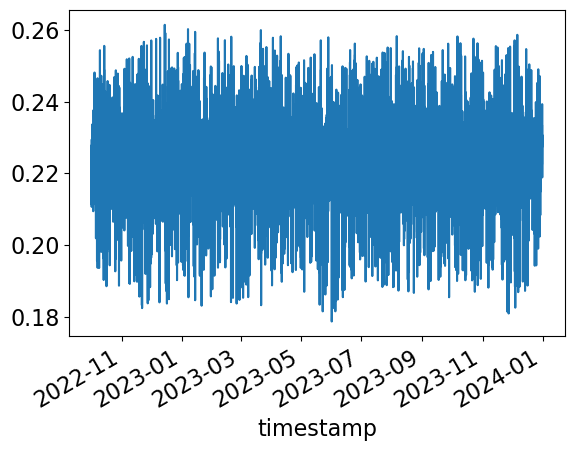

In [28]:
tracked_modes['mean_frequency'].plot()

<Axes: xlabel='wind_speed', ylabel='mean_frequency'>

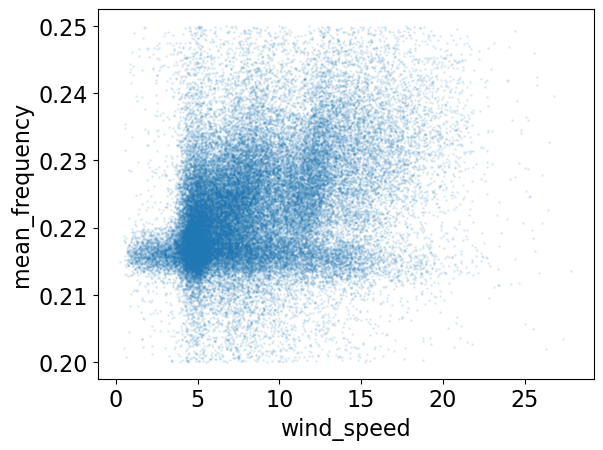

In [37]:
fa1 = mpe_fa_data[(mpe_fa_data['mean_frequency'] > 0.2) & (mpe_fa_data['mean_frequency'] < 0.25)][['mean_frequency']]
fa1['wind_speed'] = turbine_data.loc[fa1.index, 'mean_NW2_C02_windspeed']
fa1.plot.scatter(x='wind_speed', y='mean_frequency', s=1, alpha=0.1)


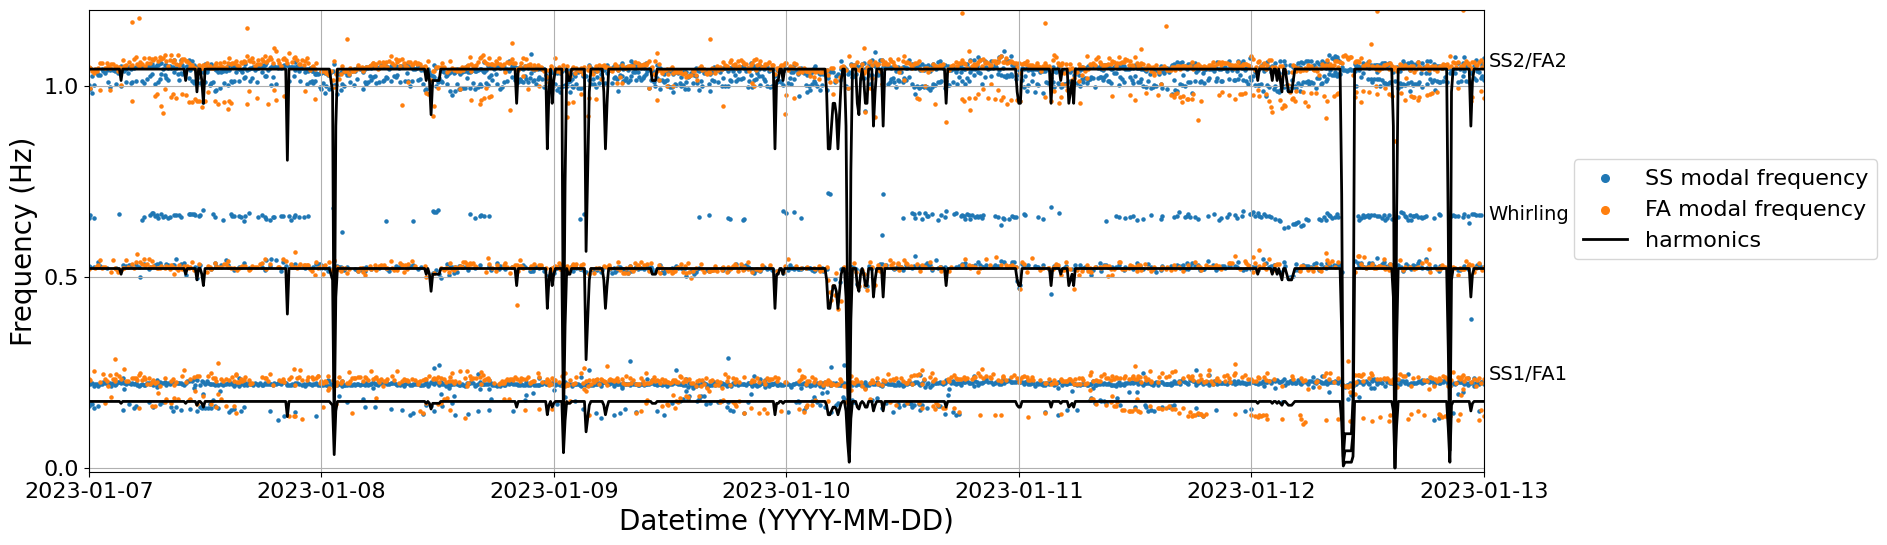

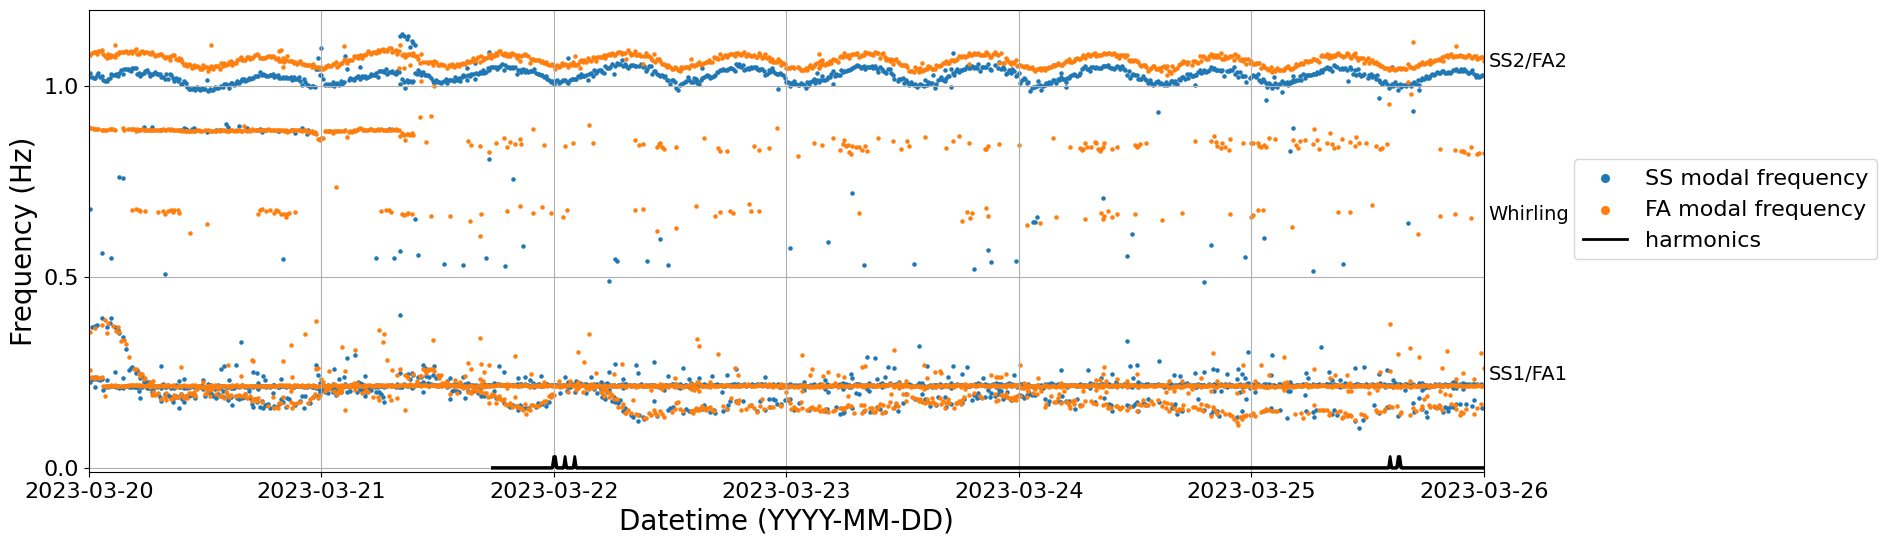

In [ ]:
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
def figure_harmonics(start, end):

    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')

    mpe_ss_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
    mpe_fa_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
    harmonics_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
    plt.rcParams.update({'font.size': 16})

    plt.figure(figsize=(18,6))    
    plt.scatter(mpe_ss_data.loc[start:end].index, mpe_ss_data.loc[start:end]['mean_frequency'], s=5, alpha=1.0, color='tab:blue', label='SS modal frequency')
    plt.scatter(mpe_fa_data.loc[start:end].index, mpe_fa_data.loc[start:end]['mean_frequency'], s=5, alpha=1.0, color='tab:orange', label='FA modal frequency')

    colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    i = 0
    for harmonic in harmonics_data.columns[:3]:
        plt.plot(harmonics_data.loc[start:end].index, harmonics_data.loc[start:end][harmonic], label=' '.join(harmonic.split('_')), alpha=1.0, linewidth=2.0, color='k')
        i += 1
    plt.xlim(start, end)
    plt.ylim(-0.01,1.2)
    legend = plt.legend(['SS modal frequency', 'FA modal frequency', 'harmonics'], loc='upper right', bbox_to_anchor=(1.29, 0.7), fontsize=16)
    for handles in legend.legend_handles[:2]:
        handles.set_sizes([20.0])
    plt.xlabel('Datetime (YYYY-MM-DD)', fontsize=20)
    plt.ylabel('Frequency (Hz)', fontsize=20)
    plt.yticks(np.arange(0, 1.2, 0.5))
    plt.text(end+datetime.timedelta(hours=0.5), 1.05, 'SS2/FA2', fontsize=14, rotation=0)
    plt.text(end+datetime.timedelta(hours=0.5), 0.65, 'Whirling', fontsize=14, rotation=0)
    plt.text(end+datetime.timedelta(hours=0.5), 0.23, 'SS1/FA1', fontsize=14, rotation=0)

    plt.grid()
    plt.show()
    plt.close()
figure_harmonics(
    start = datetime.datetime(2023, 1, 7, tzinfo=datetime.timezone.utc),
    end = datetime.datetime(2023, 1, 13, tzinfo=datetime.timezone.utc))
figure_harmonics(
    start = datetime.datetime(2023, 3, 20, tzinfo=datetime.timezone.utc),
    end = datetime.datetime(2023, 3, 26, tzinfo=datetime.timezone.utc))

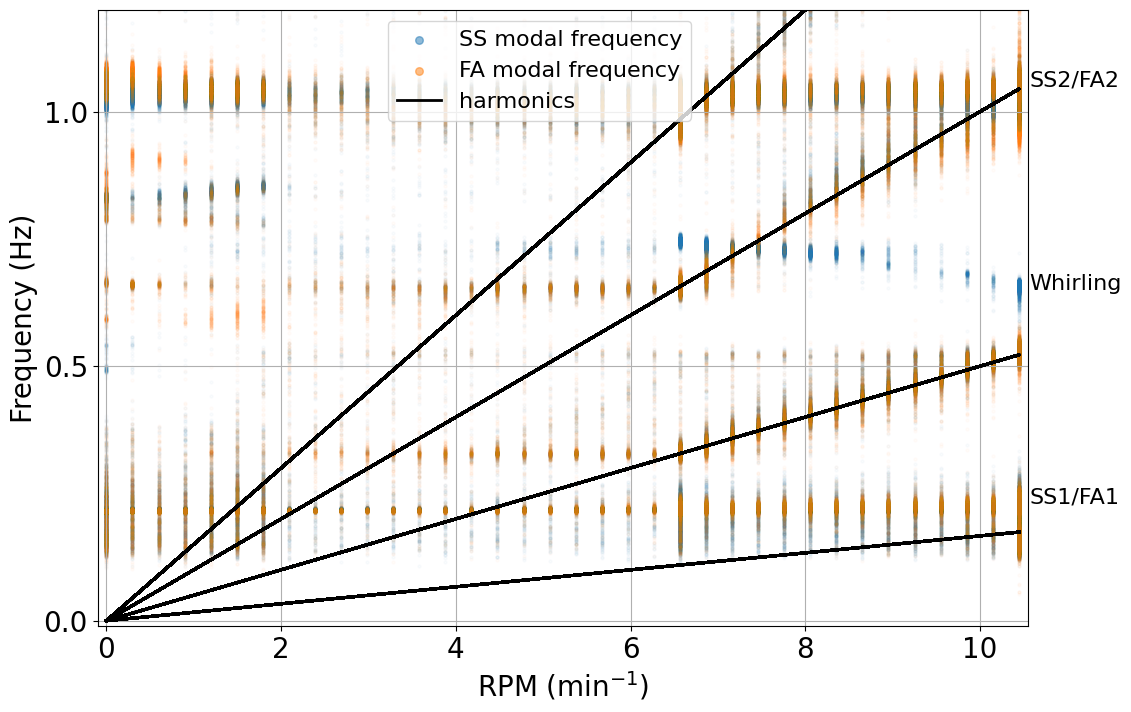

In [ ]:
def campbell_plot():
    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')

    mpe_ss_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_ss_data.parquet'))
    mpe_fa_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'mpe_fa_data.parquet'))
    harmonics_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'harmonics_data.parquet'))
    turbine_data = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.1', 'turbine_data.parquet'))
    mpe_ss_data['rpm'] = turbine_data.filter(regex='rpm')
    mpe_fa_data['rpm'] = turbine_data.filter(regex='rpm')
    harmonics_data['rpm'] = turbine_data.filter(regex='rpm')

    plt.rcParams.update({'font.size': 20})

    plt.figure(figsize=(12,8))    
    plt.scatter(mpe_ss_data['rpm'], mpe_ss_data['mean_frequency'], s=5, alpha=0.02, color='tab:blue', label='SS modal frequency')
    plt.scatter(mpe_fa_data['rpm'], mpe_fa_data['mean_frequency'], s=5, alpha=0.02, color='tab:orange', label='FA modal frequency')

    colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    i = 0
    for harmonic in harmonics_data.columns[:4]:
        plt.plot(harmonics_data['rpm'], harmonics_data[harmonic], label=' '.join(harmonic.split('_')), alpha=1.0, linewidth=2.0, color='k')
        i += 1
    plt.ylim(-0.01,1.2)
    plt.xlim(mpe_ss_data['rpm'].min()-0.1, mpe_ss_data['rpm'].max()+0.1)
    legend = plt.legend(['SS modal frequency', 'FA modal frequency', 'harmonics'], loc='upper right', bbox_to_anchor=(0.65, 1.0), fontsize=16)
    for handles in legend.legend_handles[:2]:
        handles.set_sizes([30.0])
        handles.set_alpha(0.5)
    plt.xlabel('RPM (min$^{-1}$)', fontsize=20)
    plt.ylabel('Frequency (Hz)', fontsize=20)
    plt.yticks(np.arange(0, 1.2, 0.5))
    plt.text(mpe_ss_data['rpm'].max()+0.12, 1.05, 'SS2/FA2', fontsize=16, rotation=0)
    plt.text(mpe_ss_data['rpm'].max()+0.12, 0.65, 'Whirling', fontsize=16, rotation=0)
    plt.text(mpe_ss_data['rpm'].max()+0.12, 0.23, 'SS1/FA1', fontsize=16, rotation=0)

    plt.grid()
    plt.show()
    plt.close()
campbell_plot()  

### 3.2. Machine Learning Model for Modal Frequency Prediction under Changing Conditions

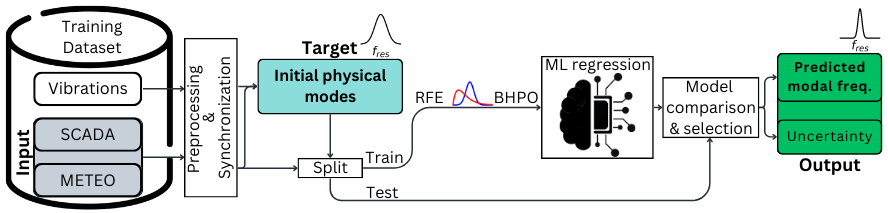

\caption{Flowchart showing the construction process of the EOV normalization models. The inputs and target data are summarized in Table \ ref{tab:data_description}}\label{fig:Flowchart_ML_model_preparation}


In [ ]:
%matplotlib inline
from IPython.display import Image
display(Image('figures/Flowchart_ML_model_preparation.png'))
print('\caption{Flowchart showing the construction process of the EOV normalization models. The inputs and target data are summarized in Table \ ref{tab:data_description}}\label{fig:Flowchart_ML_model_preparation}')


### 3.3 Automated Structural Health Monitoring: OWT Case Study

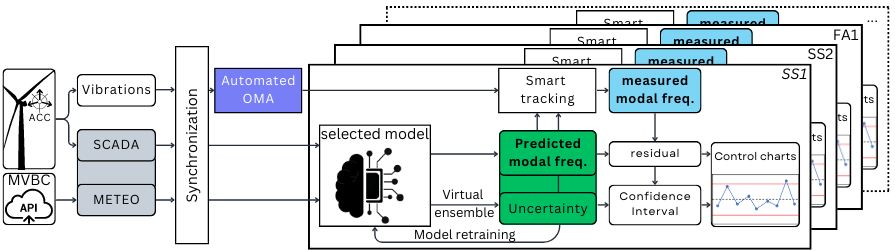

\caption{}\label{fig:Flowchart_automated_monitoring}


In [ ]:
%matplotlib inline
from IPython.display import Image
display(Image('figures/Flowchart_automated_monitoring.png'))
print('\caption{}\label{fig:Flowchart_automated_monitoring}')

### 3.3.1 Smart Tracking

Traditionally, the tracking of physical modes consists of applying OMA on a time-window of the vibration time-series data measured on the structure and 

None


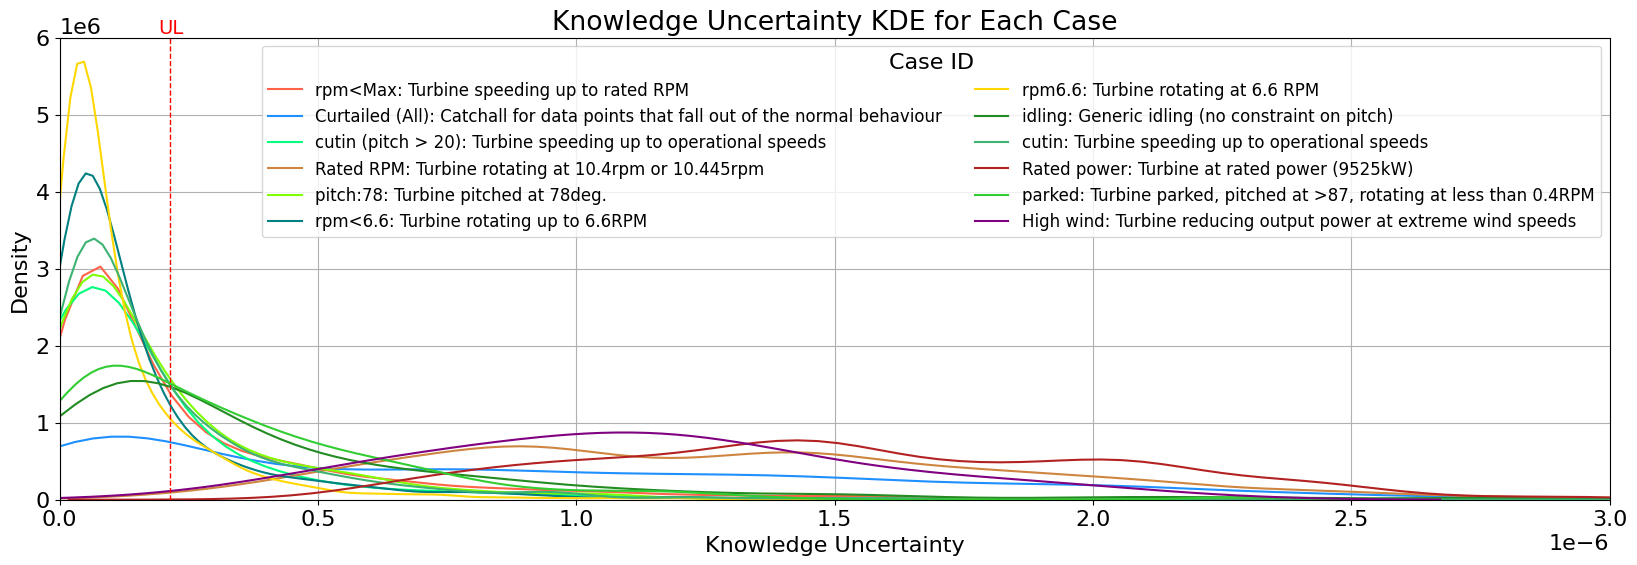

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def case_uncertainty_distribution_pots():
    import warnings
    warnings.filterwarnings('ignore')
    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')
    predictions_virutal_ensemble_plot = pd.read_parquet(os.path.join(data_folder, 'paper','3', '3.3', 'prediction_virtual_ensemble.parquet'))
    uncertainty_lim = 2.1331375333164705e-07 #3.778378113097412e-07 #5.902143777376365e-07 #1.199509060664933e-06 #3.215489902573316e-07 #2.6368465309163476e-07
    # Create a figure
    plt.figure(figsize=(20, 6))

    # Loop through each unique case
    unique_cases = predictions_virutal_ensemble_plot['case_ID'].unique()
    for case_ in unique_cases:
        try:
            # Filter the DataFrame for the current case
            case_data = predictions_virutal_ensemble_plot[predictions_virutal_ensemble_plot['case_ID'] == case_]

            # Get the color for this case
            case_color = case_data['case_color'].iloc[0]
            case_data.rename(columns={'knowledge_uncertainty': 'Knowledge Uncertainty'}, inplace=True)

            # Plot the KDE for this case
            sns.kdeplot(case_data['Knowledge Uncertainty'], label=case_, color=case_color)
        except:
            print(case_)


    # Add title and legend
    plt.title('Knowledge Uncertainty KDE for Each Case')
    plt.legend(title='Case ID', ncol=2, fontsize=12, loc='upper right', bbox_to_anchor=(1, 1))
    plt.xlim(0, 3e-6)
    plt.vlines(uncertainty_lim, 0, 6e6, color='red', linewidth=1, linestyle='dashed')
    plt.ylim(0, 6e6)
    plt.text(uncertainty_lim*0.9, 6e6*1.01, 'UL', color='red', fontsize=14, rotation=0)
    # Show the plot
    plt.grid(True)
    plt.show()
    plt.close()
case_uncertainty_distribution_pots()

dropped mvbc columns:  {'mvbc_WandelaarBuoy_Sea_water_temperature', 'mvbc_WandelaarMeasuringpile_Relative_humidity'}


C:\Users\Max\AppData\Local\Temp\ipykernel_16744\1164033745.py:103: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handles in legend.legendHandles:


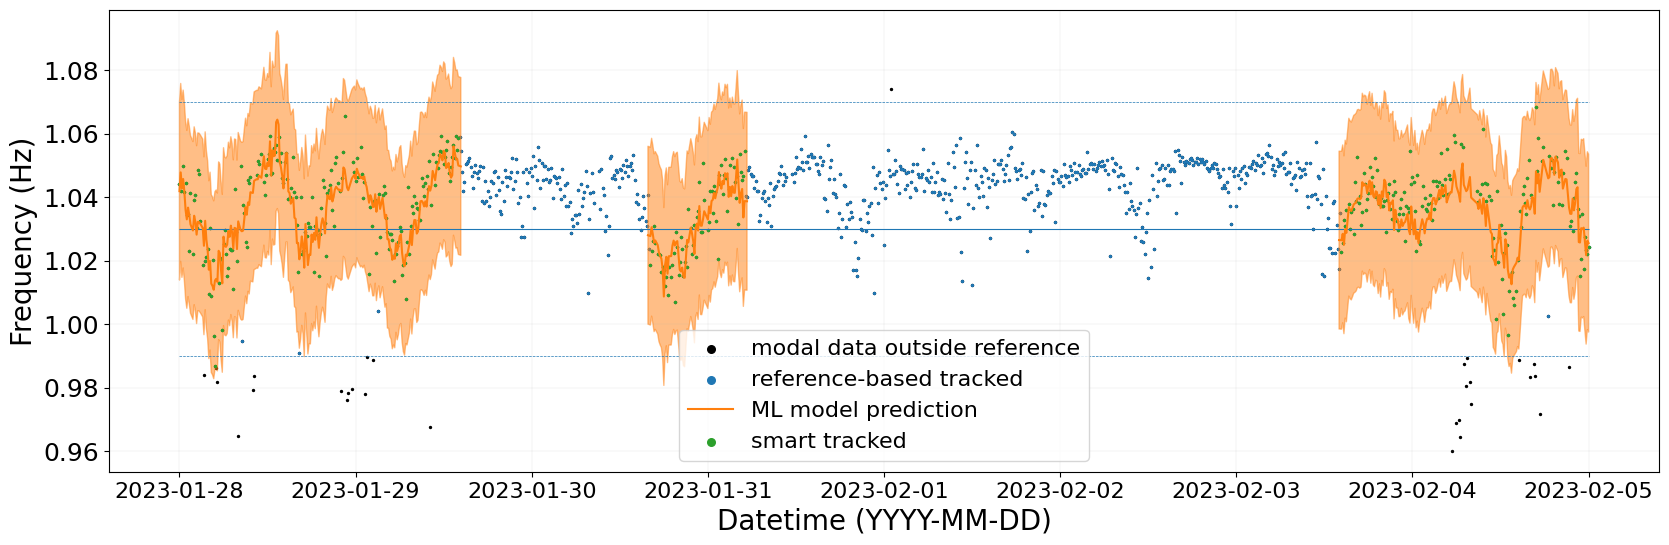

In [ ]:
from src.data.make_dataset import create_input_target_dataset
from src.smart_tracking.smart_tracking import smart_tracking
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import datetime
import os
import pandas as pd

def smart_tracking_concept(start, end, std_prediction_limit:int=2):
    package_folder = os.path.dirname(os.path.dirname(os.getcwd()))
    data_folder = os.path.join(package_folder, 'data')
    loc = 'nw2'
    turbine = 'c02'
    mode = 'SS2'
    X, y = create_input_target_dataset(data_folder, loc, turbine, mode)
    selected_data_large = pd.read_csv(os.path.join(data_folder, 'processed', loc, turbine+'_ss2_selected_data_large.csv'))
    
    # Remove the selected data with duplicated timestamps and keep the one with the biggest size
    selected_data_sorted = selected_data_large.sort_values(by='size', ascending=False)
    selected_data_unique = selected_data_sorted.drop_duplicates(subset='timestamp', keep='first')
    selected_data_unique = selected_data_unique.sort_values(by='timestamp')

    selected_columns = [
        'mean_NW2_C02_rpm',
        'mean_NW2_C02_pitch', 
        'mean_NW2_C02_power',
        'mean_NW2_C02_windspeed',
        'sin_mean_NW2_C02_yaw', 'cos_mean_NW2_C02_yaw',
        'sin_mean_NW2_C02_winddirection', 'cos_mean_NW2_C02_winddirection',
        'mvbc_WandelaarBuoy_Wave_height',
        #'mvbc_WandelaarBuoy_Average_wave_period',
        'mvbc_WandelaarMeasuringpile_Tide_TAW',
        #'mvbc_WandelaarMeasuringpile_Air_pressure',
        #'mvbc_WandelaarMeasuringpile_Air_temperature'
       ]
    
    y_train = selected_data_unique[['mean_frequency']].set_index(selected_data_unique['timestamp'])
    y_train.index = pd.to_datetime(y_train.index)
    y_train = y_train.loc[y_train.index.intersection(X.index)]
    X_train = X.loc[y_train.index]
    X_train = X_train[selected_columns]
    

    regr_model = CatBoostRegressor(iterations=1000, depth=3, learning_rate=0.5, random_seed=13,posterior_sampling=True, loss_function='RMSEWithUncertainty', verbose=False)
    regr_model.fit(X_train, y_train)

        # Full model predictions
    predictions = regr_model.predict(X)
    predictions_df = pd.DataFrame(predictions, columns=['prediction', 'spread'], index=X.index)
    predicted_value = predictions[:,0]
    predicted_total_uncertainty = predictions[:,1]

    # Virtual ensemble predictions
    virtual_ensemble_preds = regr_model.virtual_ensembles_predict(X, prediction_type='TotalUncertainty', virtual_ensembles_count=500, ntree_end=1000) #, virtual_ensembles_count=100, ntree_end=200)
    virtual_ensemble_preds_df = pd.DataFrame(virtual_ensemble_preds, columns=['prediction', 'knowledge uncertainty', 'data uncertainty'], index=X.index)

    virtual_ensemble_preds_mean = virtual_ensemble_preds[:,0] # mean values predicted by a virtual ensemble
    knowledge_uncertainty = virtual_ensemble_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
    data_uncertainty = virtual_ensemble_preds[:,2] # average estimated data uncertainty
    
    prediction_lim = (y - predictions_df['prediction']).loc[X_train.index].std()*std_prediction_limit
    uncertainty_ = pd.Series(knowledge_uncertainty, index=X.index).copy()
    uncertainty_moving_avg = pd.Series(uncertainty_, index=X.index).rolling(6*6, center=True).mean()
    uncertainty_lim = uncertainty_moving_avg.loc[X_train.index].quantile(0.99)

    smart_tracked_modes = smart_tracking(y, predictions_df['prediction'], uncertainty_moving_avg, uncertainty_lim, prediction_lim)

    analyzed_timeframe = (
    start, end
    )
    #prediction_lim = np.abs((y - predictions_df['prediction']).loc[X_train.index]).quantile(0.99)
    prediction_lim = (y - predictions_df['prediction']).loc[X_train.index].std()*2

    plt_selected_input_data = X.loc[analyzed_timeframe[0]:analyzed_timeframe[1]]
    plt_modal_data = y.loc[analyzed_timeframe[0]:analyzed_timeframe[1]]
    plt_predictions = predictions_df.loc[analyzed_timeframe[0]:analyzed_timeframe[1]]
    low_uncertainty = uncertainty_[uncertainty_moving_avg < uncertainty_lim].index
    common_indices = plt_predictions.index.intersection(low_uncertainty)
    plt_predictions_low_uncertainty = plt_predictions.loc[common_indices]
    resampled_plt_predictions = plt_predictions_low_uncertainty.resample('10T').asfreq()['prediction']
    resampled_plt_predictions.interpolate(method='linear', inplace=True, limit_direction='both', limit=2)
    plt_smart_tracked = smart_tracked_modes.loc[analyzed_timeframe[0]:analyzed_timeframe[1]]

    upper_ref = 1.07
    lower_ref = 0.99
    reference_tracked = plt_modal_data[(plt_modal_data > lower_ref) & (plt_modal_data < upper_ref)]

    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(20, 6))
    plt.scatter(plt_modal_data.index, plt_modal_data, color='k', s=2, label='modal data outside reference')
    plt.hlines(upper_ref, analyzed_timeframe[0], analyzed_timeframe[1], color='tab:blue', linewidth=0.5, linestyle='--')
    plt.hlines(lower_ref, analyzed_timeframe[0], analyzed_timeframe[1], color='tab:blue', linewidth=0.5, linestyle='--')
    plt.hlines((lower_ref+upper_ref)/2 , analyzed_timeframe[0], analyzed_timeframe[1], color='tab:blue', linewidth=0.8)
    plt.scatter(reference_tracked.index, reference_tracked, color='tab:blue', s=2, label='reference-based tracked')
    #plt.plot(plt_predictions['prediction'])
    #plt.scatter(plt_predictions.index, plt_predictions['prediction'], color='tab:orange', s=1)
    #plt.scatter(plt_predictions_low_uncertainty.index, plt_predictions_low_uncertainty['prediction'], color='tab:blue', s=10)
    plt.plot(resampled_plt_predictions, color='tab:orange', label='ML model prediction')
    plt.fill_between(resampled_plt_predictions.index, resampled_plt_predictions-prediction_lim, resampled_plt_predictions+prediction_lim, alpha=0.5, color='tab:orange')

    plt.scatter(plt_smart_tracked.index, plt_smart_tracked['frequency'], color='tab:green', s=2, label='smart tracked')
    legend = plt.legend(loc='lower center', fontsize=16)
    for handles in legend.legendHandles:
        try:
            handles.set_sizes([30.0])
        except:
            pass
    plt.xticks(fontsize=16)
    plt.grid(linewidth=0.1)
    plt.ylabel('Frequency (Hz)', fontsize=20)
    plt.xlabel('Datetime (YYYY-MM-DD)', fontsize=20)
    plt.show()
    plt.close()

smart_tracking_concept(
    start = datetime.datetime(2023, 1, 28, tzinfo=datetime.timezone.utc),
    end = datetime.datetime(2023, 2, 5, tzinfo=datetime.timezone.utc)
) 